In [2]:
!pip install seaborn
!pip install matplotlib
!pip install pandas

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_stata("https://www.chesdata.eu/s/CHES2019V3.dta")

print(df.columns.tolist())


['country', 'eastwest', 'party', 'party_id', 'eu_position', 'eu_position_sd', 'eu_salience', 'eu_dissent', 'eu_blur', 'eu_cohesion', 'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum', 'lrgen', 'lrecon', 'lrecon_sd', 'lrecon_salience', 'lrecon_dissent', 'lrecon_blur', 'galtan', 'galtan_sd', 'galtan_salience', 'galtan_dissent', 'galtan_blur', 'immigrate_policy', 'immigrate_salience', 'immigrate_dissent', 'multiculturalism', 'multicult_salience', 'multicult_dissent', 'redistribution', 'redist_salience', 'environment', 'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder', 'sociallifestyle', 'religious_principles', 'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism', 'regions', 'russian_interference', 'anti_islam_rhetoric', 'people_vs_elite', 'antielite_salience', 'corrupt_salience', 'members_vs_leadership', 'eu_econ_require', 'eu_political_require', 'eu_googov_require']


In [2]:
# Quick overview
print("Shape:", df.shape)
#print(df.head())
print(df.head()[:5])
# Summary statistics
#print(df.describe(include='all'))

# Check missing values
# print("\nMissing values:")
# print(df.isnull().sum().sort_values(ascending=False))

# find valid columns
valid_columns = df.columns[df.isnull().sum() < 5].tolist()
print(f"{len(valid_columns)} columns selected out of {len(df.columns)}")

# drop nan data
df_clean = df[valid_columns].dropna()
df_clean

Shape: (277, 55)
  country  eastwest   party  party_id  eu_position  eu_position_sd  \
0      be       1.0      PS     102.0     6.083333        0.288675   
1      be       1.0  SP/SPA     103.0     6.000000        0.426401   
2      be       1.0   ECOLO     104.0     6.583333        0.514929   
3      be       1.0  AGALEV     105.0     6.583333        0.514929   
4      be       1.0  PRL/MR     106.0     6.500000        0.674200   

   eu_salience  eu_dissent   eu_blur  eu_cohesion  ...   regions  \
0     4.272727        2.75  2.166667        6.250  ...  6.000000   
1     4.181818        2.50  1.714286        6.000  ...  5.333333   
2     4.818182        2.50  1.428571        6.000  ...  6.166667   
3     4.818182        2.50  1.285714        5.875  ...  6.083333   
4     5.090909        2.00  1.714286        5.500  ...  6.416667   

   russian_interference  anti_islam_rhetoric  people_vs_elite  \
0              0.111111             2.111111         3.363636   
1              0.111111

,country,party,party_id,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,lrgen,lrecon,...,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership
0,be,PS,102.0,6.083333,0.288675,4.272727,2.750000,2.166667,2.083333,2.250000,...,2.636364,3.454545,3.333333,6.272727,6.000000,0.111111,3.363636,2.181818,1.909091,7.500000
1,be,SP/SPA,103.0,6.000000,0.426401,4.181818,2.500000,1.714286,3.083333,3.083333,...,2.454545,3.083333,3.000000,5.727273,5.333333,0.111111,3.545455,2.090909,1.636364,6.818182
2,be,ECOLO,104.0,6.583333,0.514929,4.818182,2.500000,1.428571,2.083333,2.500000,...,2.000000,1.750000,1.800000,5.818182,6.166667,0.111111,5.636364,2.454545,2.363636,3.909091
3,be,AGALEV,105.0,6.583333,0.514929,4.818182,2.500000,1.285714,2.416667,2.666667,...,2.000000,1.916667,1.900000,5.909091,6.083333,0.111111,5.636364,2.363636,2.000000,4.000000
4,be,PRL/MR,106.0,6.500000,0.674200,5.090909,2.000000,1.714286,6.500000,6.916667,...,4.454545,3.333333,4.444445,2.727273,6.416667,0.111111,4.636364,1.727273,1.636364,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,ice,M,4504.0,1.200000,0.447214,5.600000,2.000000,0.500000,6.200000,6.200000,...,5.000000,8.600000,9.000000,8.000000,4.000000,0.800000,3.200000,4.400000,1.500000,9.400000
273,ice,Sam,4505.0,6.400000,0.547723,6.800000,2.333333,4.000000,3.200000,3.200000,...,2.000000,1.800000,2.000000,2.000000,6.000000,0.000000,5.000000,1.400000,5.800000,6.400000
274,ice,Pi,4506.0,4.800000,0.447214,4.600000,3.333333,4.500000,4.000000,4.200000,...,1.333333,1.200000,1.400000,1.600000,6.000000,0.000000,5.800000,6.200000,8.400000,2.800000
275,ice,V,4507.0,6.600000,0.547723,8.000000,2.000000,2.500000,6.800000,6.600000,...,2.000000,1.200000,1.000000,0.600000,6.000000,0.000000,3.600000,0.200000,4.600000,7.400000


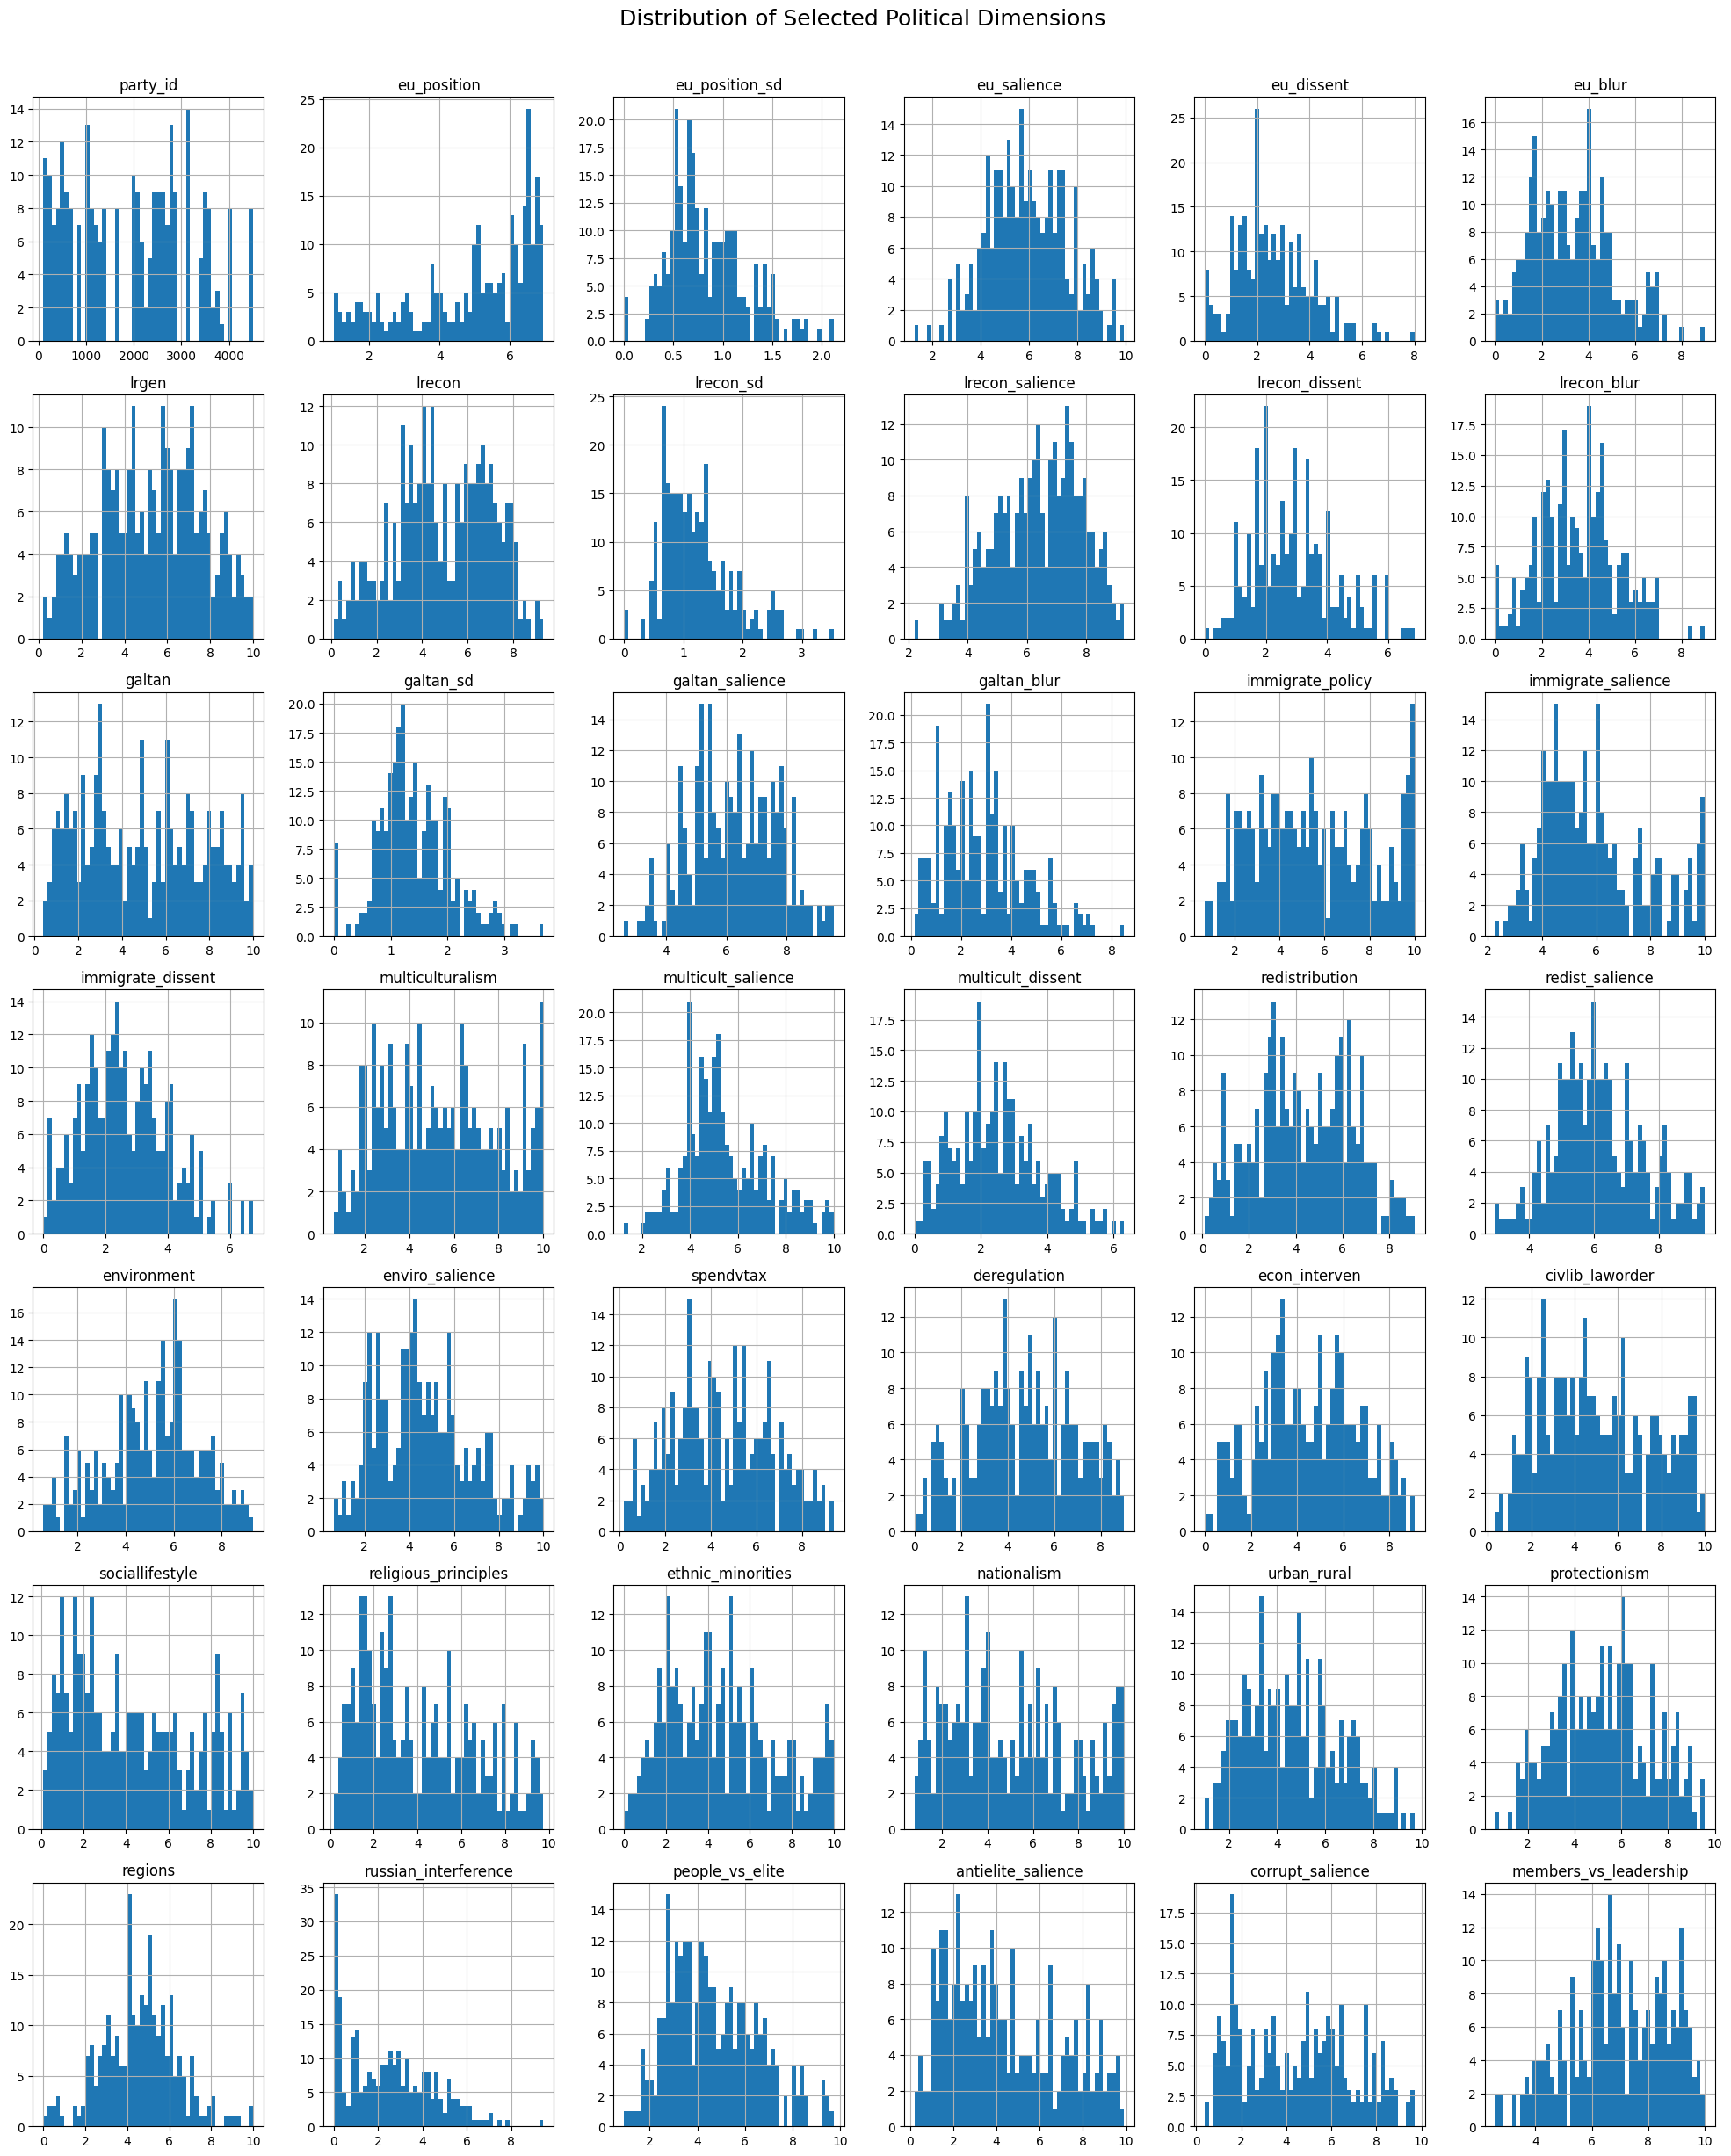

In [23]:
# plotting distributions + correlations on data

# plotting distributions
df_clean.hist(bins=50, figsize=(20, 25))

plt.suptitle("Distribution of Selected Political Dimensions", fontsize=18, y=0.98)  # y کنترل ارتفاع عنوانه

plt.tight_layout(rect=[0, 0, 1, 0.97])  # rect مشخص می‌کنه که layout چقدر فضا برای عنوان نگه داره

plt.show()


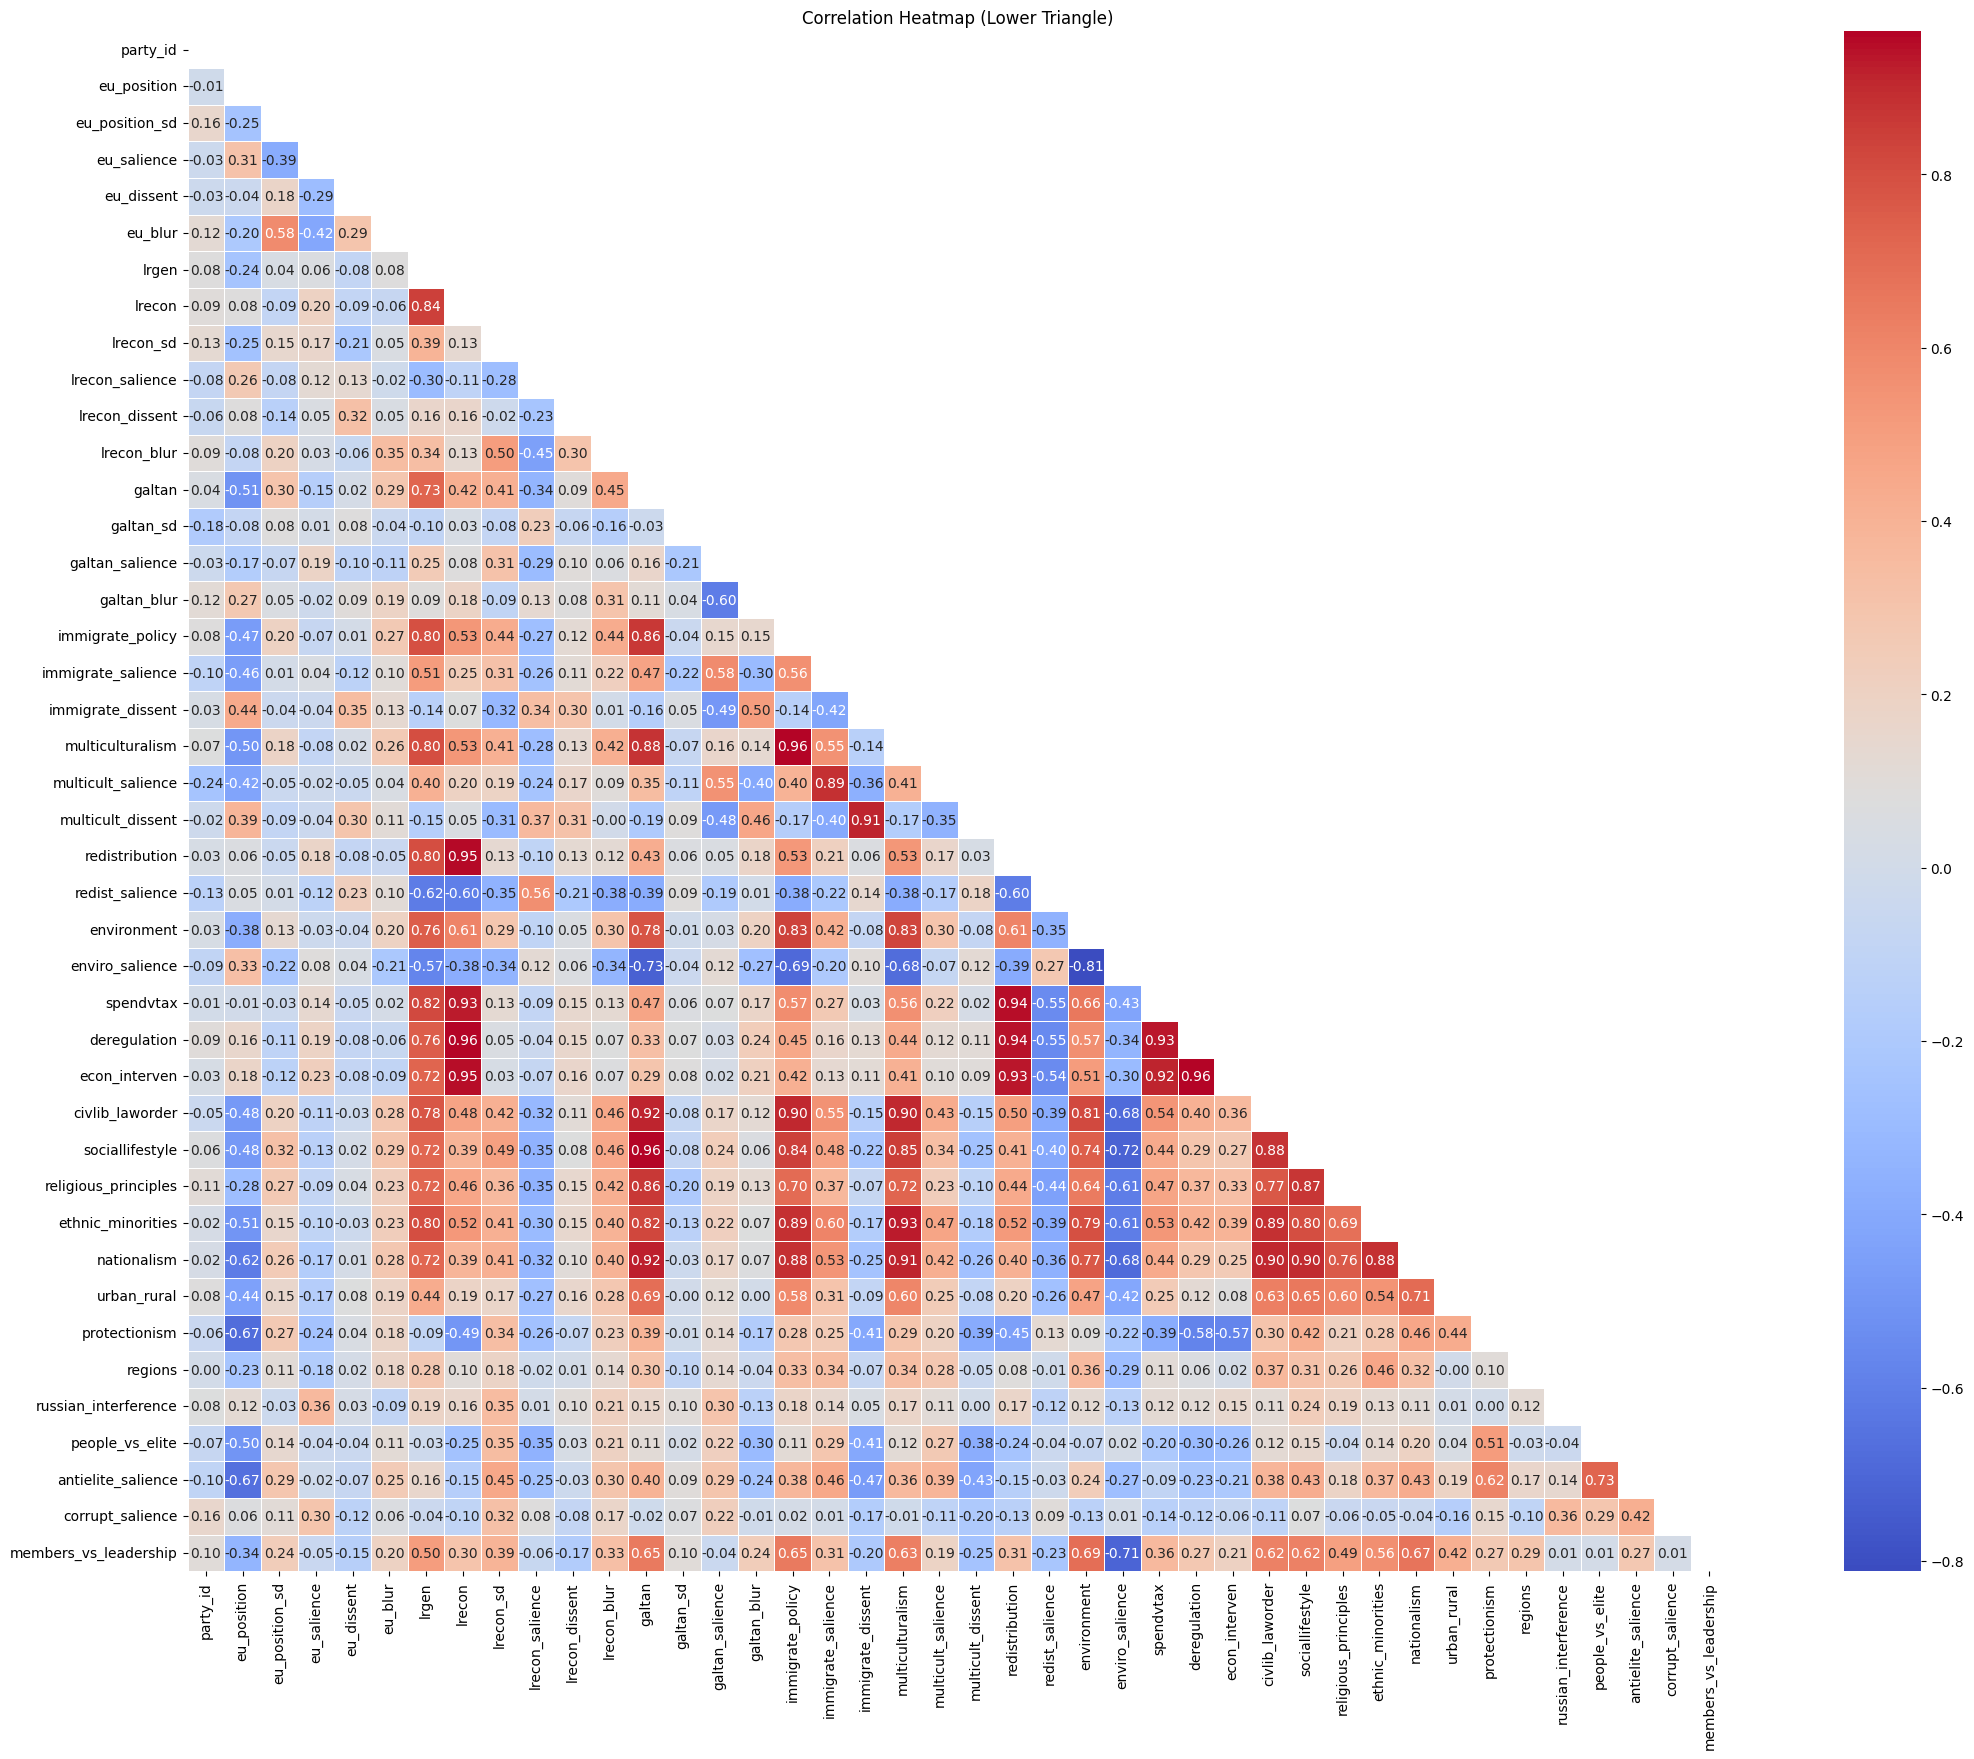


🔍 Pairs of features with correlation > 0.7:
              feature_1           feature_2  correlation
187    multiculturalism    immigrate_policy     0.964764
405       econ_interven        deregulation     0.961970
447     sociallifestyle              galtan     0.961624
358        deregulation              lrecon     0.959640
238      redistribution              lrecon     0.952717
385       econ_interven              lrecon     0.946632
347           spendvtax      redistribution     0.944179
373        deregulation      redistribution     0.941376
400       econ_interven      redistribution     0.934631
377        deregulation           spendvtax     0.930285
332           spendvtax              lrecon     0.929266
404       econ_interven           spendvtax     0.915432
418     civlib_laworder              galtan     0.915258
228   multicult_dissent   immigrate_dissent     0.909975
425     civlib_laworder    multiculturalism     0.904217
422     civlib_laworder    immigrate_policy

In [13]:
# finding and plotting correlations
# select numerical columns
numeric_df = df_clean.select_dtypes(include=["number"])

import numpy as np

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap (only lower triangle)
plt.figure(figsize=(30, 20))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

# Extract strong correlations (> 0.6), excluding diagonal and duplicates
threshold = 0.7
strong_corrs = (
    corr_matrix.where(~mask)
    .stack()
    .reset_index()
    .rename(columns={0: "correlation", "level_0": "feature_1", "level_1": "feature_2"})
)

strong_corrs_filtered = strong_corrs[strong_corrs["correlation"].abs() > threshold]
print("\n🔍 Pairs of features with correlation > 0.7:")
print(strong_corrs_filtered[:40].sort_values(by="correlation", ascending=False))

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB7YAAAbfCAYAAAAR4AkvAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3Qd0VNUahuEvIZCEGkIJLUACoUsHRVB6kS52ehOwoaAiiFKvgIiIoAiC0pEmvQoqKEgRFJDeQYrUNGpCkrv2xgwZSCA0M8D73DUrOefsc2bPmQl33fvN/2+3mJiYGAEAAAAAAAAAAAAA4KLck3oCAAAAAAAAAAAAAADcCME2AAAAAAAAAAAAAMClEWwDAAAAAAAAAAAAAFwawTYAAAAAAAAAAAAAwKURbAMAAAAAAAAAAAAAXBrBNgAAAAAAAAAAAADApRFsAwAAAAAAAAAAAABcGsE2AAAAAAAAAAAAAMClEWwDAAAAAAAAAAAAAFwawTYAAAAAJNLYsWPl5uamAwcO3LVrmmuZa5pr4/61bt06pUiRQgcPHkzqqbg883nv1auXXMHy5cvtfMzPWzVixAjlzJlTly5duidzAwAAAAA4I9gGAAAAkKT27t2r9u3bKzAwUF5eXkqbNq3Kly+vzz//XBcuXNCDYvLkyRoyZIhcScuWLZU6deoEj5vA7/XXX7+ncxg+fPgDEep3795dL730knLlyuXYV6lSJRUpUkQPktggODGPB535+4mIiNDIkSOTeioAAAAA8FDwSOoJAAAAAHh4LViwQM8995w8PT3VvHlzGwKaoGjlypV69913tXXrVn399ddJPc27Fmxv2bJFb731ltN+E4SaAD958uR6GJlgO2PGjDYkvF9t3LhRy5Yt02+//aYHXcGCBTVhwgSnfd26dbNfkDDhfmKYz7uHx/3/f0eYL+K0aNFCgwcP1htvvPFQhPkAAAAAkJTu//8lCQAAAOC+tH//fr344os22P3pp5+UNWtWx7HXXntNe/bsscH3nYqJidHFixfl7e193TGz37SPdndPumZWJgwzARnuX2PGjLEtqR977DE9KBL6u/Hz81PTpk2d9g0YMMB+OeHa/XFFR0fbL62Yz/qD9Hl//vnnNXDgQP3888+qUqVKUk8HAAAAAB5otCIHAAAAkCRMGHT27Fl98803TqF2rLx58+rNN990bF++fFl9+/ZVnjx5bIV37ty59f7771+3vq3ZX7duXS1ZskSlS5e2wZxpFRzbQnnKlCn64IMPlD17dqVMmVJhYWH2vLVr16pWrVpKly6d3V+xYkWtWrXqpq9jzpw5qlOnjrJly2bnZeZn5hkVFeXUktqE9Gb95dg2zWaeN1pj24T9TzzxhFKlSiUfHx81aNBA27dvdxpj1ik255ovAZiKZzPOzL9Vq1Y6f/687gVzv3v27GnfH/N6/f391aVLl+veBxP2mqAvc+bMdlyhQoX01VdfOY0x98BU5a9YscJxX8y9irueuane79ixozJlymRfn2lbbwLSkJAQW+WfPn16+zBzMGFsXIMGDdLjjz+uDBky2M9BqVKlNGPGjARbrk+aNEn58+e3wasZ+8svvyTqnsyePdu+1tut2DVV64ULF7b3yXyOzBc7zOuLNXToUCVLlsxp36effmqfr3Pnzo595jOXJk0avffee06BsmmBb65vXpcJps09DA4OTtTfze2Ke09jX9vixYvjXWPb/F28+uqr9t6b5zXvl+nkcO1a9rGfCfN3aV63+UyYv4+nn35aJ0+edBprXrd5DnM/zd9z5cqVtW3bNvs6E9MdILH/HpjPia+vr/13AAAAAABwb1GxDQAAACBJzJs3z66rbYLHxGjbtq3GjRunZ599Vm+//bYNnvr372/D3lmzZjmN3blzp13v2AR4L7/8sg3MYpnQ2VRpv/POOzaMNb+bEPmpp56yIZUJbU0Fd2ww++uvv6ps2bIJzsuEbaYNswnazE9zrR49etjA/JNPPrFjTIvm0NBQHT58WJ999pndd6O1rU1bazMfc39MOGdaNw8bNsyuPf7HH384QvG4VaMBAQH2fpjjo0ePtoHyxx9/nKh7e+rUqUSNM2Fh/fr1bdjcrl0725b6r7/+sq9p165dNuCNZUJsE2ia8abttHm/TXhprmGCW8MErqaFc9w21iZ4jcscz5Ili3r37q01a9bY1vQm4DZtv02VdL9+/bRw4UJ7r00rexN2xzLrtJvnb9KkiQ3DzZcaTGA6f/58+2WEuEy4PnXqVBuimxDWhM0m2Fy3bt0N18k+cuSIDh06pJIlS+p2mPfXvLZq1arplVdesZ9dc+9+//13G6SaFvXmCw7mvpn7bsJnw3wuzefU/Iz1559/2i+LPPnkk4595m/AfEbNlx3MazOdEr744gs7Nvb6ifm7uR3mb2HatGk24DYV3dd+bmOZ12reT9PBIUeOHDbQNvfAfMnBhNEmWL72M2G+zGD+Vs1Y8zkyz2Hev7jt0c2XZ+rVq6eaNWtq06ZN9qepQk/MvG/l3wPz3ifmSzAAAAAAgDsUAwAAAAD/sdDQUFNaG9OgQYNEjd+4caMd37ZtW6f977zzjt3/008/OfblypXL7lu8eLHT2J9//tnuDwwMjDl//rxjf3R0dExQUFBMzZo17e+xzJiAgICY6tWrO/aNGTPGXmP//v1O467Vvn37mJQpU8ZcvHjRsa9OnTp2btcy1zLXNNeOVbx48ZjMmTPHnD592rFv06ZNMe7u7jHNmzd37OvZs6c9t3Xr1k7XfPrpp2MyZMgQczMtWrSw59/o8dprrznGT5gwwc7h119/dbrOiBEj7NhVq1bd8L6Ye2zuf1yFCxeOqVix4nVjY+/1te9LuXLlYtzc3GI6dOjg2Hf58uWYHDlyXHeda+cQERERU6RIkZgqVao47Y99revXr3fsO3jwYIyXl5e9lzeybNkye+68efOuO2bmY15fQk6cOBGTIkWKmBo1asRERUU59n/xxRf2mt9++63dNsfSpk0b06VLF7tt7od5f5977rmYZMmSxYSHh9v9gwcPtu9PcHCw3Tbvk7nOpEmTnJ7X/G1cuz+hv5vEiO89NNcyc9m6det1480x89m90Wdl9erVdtz48eOv+0xUq1bN6TPRqVMnex9CQkLs9j///BPj4eER07BhQ6dr9urVy55vPvfX/rtgft7qvwex2rVrF+Pt7Z2IOwUAAAAAuBO0IgcAAADwn4tt/23aJieGqcg14rZdNkzltnHtWtymetlUZ8anRYsWTusGb9y4Ubt371bjxo11+vRpW71sHufOnVPVqlVtO2pTLZuQuNcKDw+355oKW9MKfMeOHbpVx44ds3My7ZJNi+NYRYsWVfXq1R33Iq4OHTo4bZvnN68l9j7fiGlPvXTp0ngf15o+fbqt0i5QoIDjPplH7NrCZp3h+O6LqVY340w753379tntxGrTpo1Ti+9HH33Uthw3+2OZNt2mfba5dlxx52Bab5vnNffGVLVfq1y5crZCN5apBjft301r7rht5a9l7rNhKohvlanMN5Xkb731ltM676ZaOm3atI7PtTlmOhvEtkY3XQrM83bt2tXei9WrV9v9pprYVJebivbY98u00jafm7jvl3mdpko+7vt1s7+b22Heb9OC/mbivk+RkZH2tZlW9+Z1xPdemW4BcT8T5j0175FpaW78+OOPdukC0yHg2krvm7mdfw/Me2+6Ktyr9v8AAAAAgCtoRQ4AAADgP2dCu9ggODFMYGXCPRN2xWVaVJvwKzbQihvQJeTaYybEig28E2IC0YSCS7NGtFmz27QvvjZIvpUAN1bsa4mvDbQJlU3QakI2s7Zw3BA2rti5mjA39l4nxITCpg12Yph7ZUJVs7ZxfE6cOOH43bRmNm2cTeh6beBn7osJXBPj2tcWe55Z2/va/deuG21ajv/vf/+zYWXcNcDjWws7KCjoun358uWzczfrN5vP2o1cu773nbzXpj2+aUMf93NtwtvYtvQmwDbr0psW2MWKFbPbJrw2rcpNW/q475e516Yt/c3er5v93dyOxF7PvCbTRt+0+zat3ePey/j+hm70eTdi79u1/16YL4rc7AsIt/PvQex8b3eNdQAAAABA4hBsAwAAAPjPmbA1W7Zs2rJlyy2dl9jgKG4F6M2OxVZfmjWaixcvHu85Ca2HHRISYqtSzevp06eP8uTJYyugTZXpe++9d8NK77vJhNN3K2y9EfN6HnnkEQ0ePDje47Fh8969e211q6nsNmPNfhPWmmpzsx73rdyXhF5bfPvjvl4T9pr1tc1602a9bBMEm/WkTXg6efJk3S0ZMmSwP68N1e+2ChUq2Gpm80UB89pM0G2Yn2bbdAcwAXzsfsPcZxNqT5o0Kd5rXvsFhRv93dyOxF7PVFKb98VUrpvKefMlBfO3btbcju+zci8/77fz74F578064Hf7/gEAAAAAnBFsAwAAAEgSdevW1ddff22DOhNm3UiuXLls4GSqKU3Vcqzjx4/bcNkcv10mjDZMOJ3YyuVYy5cvt+2KZ86caQPUWPv377/tUD72tezcufO6Yya8zJgxo1O19n/J3KtNmzbZ0PpGr2fevHm2Qnru3LlO1bXXtr6+l1Wu33//vf2Sgalw9/T0dOw3AeqNKnXj2rVrlw0sE6pQN0x4n9B7fivvtanQjmXak5vrxf08li1b1n45wITY5vHuu+/a/eZzN2rUKNt+O3Y77vtl2p2XL1/epUPXGTNm2ArpTz/91LHv4sWL9m/7dsTe1z179jhVjZu/1Zt9AeF2/j0w71Xcf5cAAAAAAPcGa2wDAAAASBJdunSxAW3btm1tQH0tU/X7+eef299r165tfw4ZMsRpTGzlcJ06dW57Hma9YRNmDRo0SGfPnr3uuKmCTUhs5WjcSlETSpoK4WuZ15qY1uSmsthUio4bN84p2DPV7T/88IPjXiQF0+batIo2QWp87aRNi/SE7ot57fGFyua+3G6AeSNmDiY0j7s+9oEDBzR79ux4x5svWMRdz/nvv//WnDlzVKNGjQQrhI3s2bPbivT169ff8hxNcGrC6qFDhzrdq2+++cber7ifaxPSlylTRt99950OHTrkVLFt7r25hvkcm89P3PfLvP6+ffte99xmDep7cd9vh7m/11ZbDxs27IZrm9+I+eKFh4eHvvrqK6f9X3zxxT3598B8bswa6AAAAACAe4uKbQAAAABJwoRHpiX0Cy+8YKsdmzdvriJFithg+LffftP06dPVsmVLO9asI2wqOk2Fd2z773Xr1tnwt2HDhqpcufJtz8Os3T169Gg99dRTKly4sFq1amXDShPgmgpjU7lpKpDjY8Iss9aumVvHjh1tkDphwoR4WyKbwGzq1Knq3LmzDShNO+N69erFe13TBtnMx1Syt2nTxgaXJugzLZrNOstJpVmzZpo2bZo6dOhg742pBDbho6kkN/tNdXTp0qVtGGwCW/P62rdvbwNCE4abttjHjh277r6YANKshW3WRDZjqlSpcsdzNaGw+eJDrVq11LhxY7ue9JdffmmfY/PmzdeNN5+9mjVr2vfRVHjHfjmhd+/eN32uBg0aaNasWfZ9v7YC3QSh5rVdy1QSN2nSRN26dbPPYeZpWqeb6m3z3OYz0rRpU6dzTIg9YMAA+zkwLeENc7/MGt3mvNi/l1jm78Tcf7N+tVln3Lwvph27qU43f1/miyPPPvusXKF7g/m7Ma+rUKFC9ksGptI8ts37rfLz89Obb75pK8DNPTX31nQaWLRoke14cKMuAbf678GGDRt05swZ+xkAAAAAANxbBNsAAAAAkowJnUzIaIJcUx1rAk4TKhYtWtSGUi+//LJjrAmbTLvmsWPH2hAxS5YsNhTs2bPnHc+jUqVKNkwzla2mqtMEseb6jz76qA0GE2KCt/nz5+vtt9/WBx98YENuE0aailETksb16quv2nDRVC2bdaZNu+SEgm1Tybt48WL72nr06GHDSBNSfvzxx06tlf9rJvQzFc9m/uPHj7fvg2nVbd4XEyTmy5fPjjNBq2kvbe7JO++8Y+/lK6+8Ylt6t27d2uma5vUdPHhQAwcOVHh4uH2ddyPYNtcwlc8mCDZrN5v7Zu6fqdqOL9g2z2u+SGBCZlMRbQJW81kzn8WbMa/JfG5WrVpl18KOywTqH3744XXnmM+ICbbNFxXMfTHnd+rUSb6+vmrXrp369etn3/f4gm3zhQrzXsTdb4LtuOtrxxoxYoT98sDIkSP1/vvv20rm3Llz28+p+WKCKzABu6naNmuBmxbkZl4m2L72b+hWmPfafDbNFyrMtcx7azoemPfHVL/frX8PzBcETLv9u/GZBQAAAADcmFtMfKUEAAAAAAA8JEwF72uvvZaoVtUJMUF1tmzZbOUxXJPp9mC+fGIq6Lt3737H1zPryJsvCXTt2tV+sQMAAAAAcG+xxjYAAAAAAHfIVFibVvOm+hxJz7Tvv9aQIUMcFdl3g+m+YKrqTWt+AAAAAMC9R8U2AAAAAOChdjcqtuFaTBt586hdu7Zdz37lypX67rvv7DrjZi14AAAAAMD9hzW2AQAAAADAA8WsjW7WEzdrt4eFhcnPz8+2CzdtyAEAAAAA9ycqtgEAAAAAAAAAAAAALo01tgEAAAAAAAAAAAAALo1gGwAAAAAAAAAAAADg0lhjGwAAAAAAAAAAAIDLWpA8f1JP4b5TJ3KnHjRUbAMAAAAAAAAAAAAAXBrBNgAAAAAAAAAAAADApRFsAwAAAAAAAAAAAABcGsE2AAAAAAAAAAAAAMClEWwDAAAAAAAAAAAAAFyaR1JPAAAAAAAAAAAAAAAS4pbcLamnABdAxTYAAAAAAAAAAAAAwKURbAMAAAAAAAAAAAAAXBrBNgAAAAAAAAAAAADApRFsAwAAAAAAAAAAAABcGsE2AAAAAAAAAAAAAMCleST1BAAAAAAAAAAAAAAgIe4ebkk9BbgAKrbhcipVqqS33nrrhmNy586tIUOG/GdzAgAAAAAAAAAAAJB0qNjGHenVq5dmz56tjRs33rVrzpw5U8mTJ79r1wMAAAAAAAAAAABwfyPYxm2JiYlRVFTUPbm2r6/vPbkuAAAAAAAAAAAAgPsTrcgfovber7/+un2kS5dOGTNm1IcffmgDamPChAkqXbq00qRJoyxZsqhx48Y6ceKE4/zly5fLzc1NixYtUqlSpeTp6amJEyeqd+/e2rRpkz1mHmPHjlXr1q1Vt25dp+ePjIxU5syZ9c0339xyK3Izj3r16snb21sBAQGaNGnSXb03AAAAAAAAAAAAAFwbFdsPkXHjxqlNmzZat26d1q9fr3bt2ilnzpx6+eWXbfDct29f5c+f3wbJnTt3VsuWLbVw4UKna3Tt2lWDBg1SYGCgvLy89Pbbb2vx4sVatmyZPW5C83z58unJJ5/UsWPHlDVrVrt//vz5On/+vF544YVbnreZx9GjR/Xzzz/bFuUdO3Z0Ct0BAAAAAAAAAAAAPNgIth8i/v7++uyzz2xltQmw//rrL7ttgm1TZR3LhNZDhw5VmTJldPbsWaVOndpxrE+fPqpevbpj2xzz8PCwVd6xHn/8cXt9UwXepUsXu2/MmDF67rnnnK6VGLt27bJV4iaMN/MxTNV3wYIFb3rupUuX7CMuU2luHgAAAAAAAAAAALg/uCWnCTVoRf5Qeeyxx2yoHatcuXLavXu3XSt7w4YNtt23qeA27cgrVqxoxxw6dMjpGqZdeWK0bdvWhtnG8ePHbTgdNzxPrO3bt9vg3LQ/j1WgQAH5+Pjc9Nz+/fvbCvK4D7MPAAAAAAAAAAAAwP2FYBu6ePGiatasqbRp09r1q3///XfNmjXLHouIiHAamypVqkRds3nz5tq3b59Wr15t1+I2a2M/8cQT+i9169ZNoaGhTg+zDwAAAAAAAAAAAMD9hVbkD5G1a9c6ba9Zs0ZBQUHasWOHTp8+rQEDBth25YZZgzsxUqRIYSu+r5UhQwY1bNjQVm2bcLtVq1a3NWdTnX358mVbUR7binznzp0KCQm56bm0HQcAAAAAAAAAAAAeDFRsP0RMW/HOnTvbYPi7777TsGHD9Oabb9r24yagNtumynru3Lnq27dvoq6ZO3du7d+/Xxs3btSpU6ec1rQ27cjHjRtn24m3aNHituZs1uquVauW2rdvb4N5E3Cb63p7e9/W9QAAAAAAAAAAAADcfwi2HyKmPfiFCxdUtmxZvfbaazbUbteunTJlyqSxY8dq+vTpKlSokK3cHjRoUKKu+cwzz9jguXLlyvY6JjCPVa1aNWXNmtW2Oc+WLdttz9tUfZvzzbrfjRo1snPOnDnzbV8PAAAAAAAAAAAAwP3FLSYmJiapJ4F7r1KlSipevLiGDBnynz3n2bNnlT17dhtMm0AaAAAAAAAAAAAAuFVL/Yok9RTuO9WPb9GDhjW2cddFR0fbtuSffvqpfHx8VL9+/aSeEgAAAAAAAAAAAID7GME27sla3gEBAcqRI4dtce7h4eF0zLQ7T8i2bdvsmt8AAAAAAAAAAAAAEItW5PhPXb58WQcOHEjweO7cuZ2CcAAAAAAAAAAAADzcaEV+62hFDtwhE1rnzZs3qacBAAAAAAAAAAAA4D7intQTAAAAAAAAAAAAAADgRqjYBgAAAAAAAAAAAOCy3JK7JfUU4AKo2AYAAAAAAAAAAAAAuDSCbQAAAAAAAAAAAACASyPYBgAAAAAAAAAAAAC4NIJtAAAAAAAAAAAAAIBLI9gGAAAAAAAAAAAAALg0j6SeAAAAAAAAAAAAAAAkxN3DLamnABdAxTYAAAAAAAAAAAAAwKVRsY2HzsbdJ+UqigdlSuopAAAAAAAAAAAAAC6Pim0AAAAAAAAAAAAAgEsj2AYAAAAAAAAAAAAAuDSCbQAAAAAAAAAAAACASyPYBgAAAAAAAAAAAAC4NI+kngAAAAAAAAAAAAAAJMQtuVtSTwEugIptAAAAAAAAAAAAAIBLI9gGAAAAAAAAAAAAALg0gm0AAAAAAAAAAAAAgEsj2AYAAAAAAAAAAAAAuDSCbQAAAAAAAAAAAACAS/NI6gngweLm5qZZs2apYcOGCY5p2bKlQkJCNHv27P90bgAAAAAAAAAAALj/uHu4JfUU4AIItnFXHTt2TOnTp7e/HzhwQAEBAfrzzz9VvHhxx5jPP/9cMTExciVmPtMnfaMfl8zTuXPhyl/wEbV99R1lze5/w/OWzP9e82Z+p5DgM8oVkEet2ndS3vyFHMeXLZ6jVcuXav/eXbpw4by+nbJIqVKn+Q9eEQAAAAAAAAAAAPDgoBU57qosWbLI09PzhmPSpUsnHx8fuZK530/Sonkz1Pa1d/TRp1/Ly8tb/Xp0VkTEpQTP+e2XHzV+9Bd65qVWGvD5N8oVkNeeExoS7Bhz6dIlFSv1qBo+3+w/eiUAAAAAAAAAAADAg4dg28VER0erf//+ttLZ29tbxYoV04wZM+yxsWPHXhcIm3bepv13YvTq1ctWTo8cOVL+/v5KmTKlnn/+eYWGhjo9f58+fZQjRw4bUJvxixcvdhyPiIjQ66+/rqxZs8rLy0u5cuWy841l5hLbYty8BqNEiRJ2f6VKlRytyOO2Kjfhb8eOHZU5c2Z7zQoVKuj33393HF++fLk9/8cff1Tp0qXtvB9//HHt3LlTd6tae+Gc6Wr0QnOVeewJG1C/1vkDBZ85rd9X/5rgeQtmT1HVmvVUuXod5cgZoLavvasUnl76eel8x5g6DZ5Xw+eaKSh/4bsyVwAAAAAAAAAAAOBhRLDtYkxIPH78eI0YMUJbt25Vp06d1LRpU61YseKuXH/Pnj2aNm2a5s2bZwNr0yb81VdfdWoT/umnn2rQoEHavHmzatasqfr162v37t32+NChQzV37lx7DRMsT5o0Sblz5473udatW2d/Llu2zLYonzlzZrzjunTpou+//17jxo3TH3/8obx589rnPXPmjNO47t2727mtX79eHh4eat269V25JyeOH1VI8Gk9UryMY1/KVKltS/HdO7bEe87lyEjt27NLjxQv7djn7u5ut3fv2HpX5gUAAAAAAAAAAADgCtbYdiGmcrlfv342CC5XrpzdFxgYqJUrV9oq6xo1atzxc1y8eNEG59mzZ7fbw4YNU506dWxgbNqIm0D7vffe04svvmiPf/zxx/r55581ZMgQffnllzp06JCCgoJsVbWpojYV2wnJlCmT/ZkhQwZ77ficO3dOX331la1Gf+qpp+y+UaNGaenSpfrmm2/07rvvOsZ+9NFHqlixov29a9eudt7m9Zgq74Tup3nEFV+bdLM+tpHO58ra4LHMdkiIc7geKywsVNHRUUrn43vNOb46evhgvOcAAAAAAAAAAAAAuD0E2y7EVFOfP39e1atXd9pv2n+bdt53Q86cOR2htmECdNN+3FRfmxbfR48eVfny5Z3OMdubNm1ytBE388ufP79q1aqlunXr3lHgvnfvXkVGRjo9Z/LkyVW2bFlt377daWzRokUdv5tW6MaJEyfsa0qo+r13795O+3r27KkM2YI06stPHPu69hx42/MHAAAAAAAAAADAveWWLHHL8uLBRrDtQs6ePWt/LliwwCl8jq00NpXTZj3ouEwo/F8qWbKk9u/fr0WLFtnKcrNGd7Vq1RzrgN9LJvCOFbuuuAnlE9KtWzd17tz5uvv4x45/FJS/kGNfZGSE/RkaEqz0vhkd+8127oC88V47bdp0cndPptBrKrrNtk/6DLf82gAAAAAAAAAAAAAkjDW2XUihQoVs8GrafZt1puM+/P39bWvv8PBw27471saNG2/pOcy1TVV2rDVr1ti1oU0Fdtq0aZUtWzatWrXK6RyzbeYWy4x74YUXbMvwqVOn2vWxr10P20iRIoX9GRUVleB88uTJY8fFfU4T1v/+++9Oz3k7zL00c437MPu8U6ZUlmw5HI8cOQNsGP3XxvWOc8+fP6c9O7cpqECReK/tkTy5AvPm01+bNjj2mZB9y6YNCipQ+I7mDQAAAAAAAAAAAMAZFdsuJE2aNHrnnXfUqVMnG5KadaxDQ0Nt6GtC2Xr16tl24e+//746duyotWvX2rWpb4VZj7pFixZ2Le2wsDB7HVN1HbsGtlnT2rTrNoFz8eLFNWbMGBueT5o0yR4fPHiwbQNuWqObQHz69On2XB8fn+ueK3PmzPL29tbixYuVI0cO+9zp0qVzGpMqVSq98sor9nl9fX1tW/GBAwfaluxt2rTRf8FUf9du8JxmTR2nrNn9ldkvq6ZOHK30vhlUptwTjnF9339TZco9qVr1nrHbdRq+qOGffaQ8QQWUJ19BLZwzTZcuXlClanUc54QEn7ZreP9z7IjdPnRgnw3WM2byU+o0af+T1wcAAAAAAAAAAADc7wi2XUzfvn1tZbZZH3rfvn02MDbtv02YbYLfiRMn2hDYVEtXrVpVvXr1Urt27RJ9fVP93ahRI9WuXdtWWZs1socPH+44boJuE6a//fbbdv1qUzU9d+5cBQUFOcJ3Ezzv3r1byZIlU5kyZbRw4UIbcl/Lw8NDQ4cOVZ8+fdSjRw898cQTWr58+XXjBgwYYIP8Zs2a2Yr00qVLa8mSJUqfPr3+K/WfaaJLFy/q62EDdf7cWeUv9Ii69flUKVJ4OsYc/+eIwsNCHNuPP1lVYaEhmjZxtA2vcwfmtef4pPd1jFm6cLZmfDfGsd2r62v25ytvva9K1Wr/Z68PAAAAAAAAAAAAuJ+5xVy7aDMeWCYEnz179i23L3/QbNx9Uq6ieFCmpJ4CAAAAAAAAAACAS/ulSImknsJ958ktf+pBQ8U2AAAAAAAAAAAAAJflnswtqacAF0Cw/QApXLiwDh48GO+xkSNH/ufzAQAAAAAAAAAAAIC7gWD7AWLWuo6MjIz3mJ+fn10f27QjBwAAAAAAAAAAAID7CcH2AyRXrlxJPQUAAAAAAAAAAAAAuOvc7/4lAQAAAAAAAAAAAAC4ewi2AQAAAAAAAAAAAAAujVbkAAAAAAAAAAAAAFyWm7tbUk8BLoCKbQAAAAAAAAAAAACASyPYBgAAAAAAAAAAAAC4NIJtAAAAAAAAAAAAAIBLI9gGAAAAAAAAAAAAALg0gm0AAAAAAAAAAAAAgEvzSOoJAAAAAAAAAAAAAEBC3JJRqwuCbTyEigdlSuopAAAAAAAAAAAAALgFBNt46BzfvkGuwq9gKU1eGSNX0riCW1JPAQAAAAAAAAAAAHBC3T4AAAAAAAAAAAAAwKURbAMAAAAAAAAAAAAAXBrBNgAAAAAAAAAAAADApbHGNgAAAAAAAAAAAACX5Z7MLamnABdAxTYAAAAAAAAAAAAAwKURbAMAAAAAAAAAAAAAXBrBNgAAAAAAAAAAAADApRFsAwAAAAAAAAAAAABcGsE2AAAAAAAAAAAAAMCleST1BAAAAAAAAAAAAAAgIW7ubkk9BbgAKrYfQm5ubpo9e/YNx7Rs2VINGzaUqxo7dqx8fHySehoAAAAAAAAAAAAA/gNUbD+Ejh07pvTp09vfDxw4oICAAP35558qXry4Y8znn3+umJgYPQxmLvxBU2bN15mQUOXJnVNvvtxChfLljXfs/kOH9c3k6dq1d7/+OXlKr7dupufrP3XduJOnz2jE+O+09o9NunjpkrJnyaJuHdurQN7ARM3J3Pvlc4bpj1+m6+L5MPnnLak6zXoqg1/uBM/5dcFI7fhjqU4d2yePFF7yz1NC1Z57WxmzXH3OsQOb6eDO353OK1XxBdVt3jtR8wIAAAAAAAAAAACSAsH2QyhLliw3HZMuXTo9DH5cuVpffjtRb7/S2obZ0+cu0ju9B2jSl58qvc/198CE1NmyZFbl8o9q2LcT471m+Nmzeq1rL5V4pJAGfthFPunS6vDRf5QmVapEz2vVotFau2yCGrYZoPQZc+jn2Z9r4uC2eu1/C+SR3DPecw7u+l1lKjdWtoBHFB0dpZ++/0wTP22rV/83Xyk8UzrGlXzyOVVu2NGxnTyFd6LnBQAAAAAAAAAAACQFWpHfhujoaPXv399WOnt7e6tYsWKaMWNGgi2yTdtv0/47MXr16mUrp0eOHCl/f3+lTJlSzz//vEJDQ52ev0+fPsqRI4c8PT3t+MWLFzuOR0RE6PXXX1fWrFnl5eWlXLly2fnG14rcvAajRIkSdn+lSpXibUV+6dIldezYUZkzZ7bXrFChgn7//Wrl7/Lly+35P/74o0qXLm3n/fjjj2vnzp2Jet2bNm1S5cqVlSZNGqVNm1alSpXS+vXrHcfNfc2ZM6e97tNPP63Tp0/rbpg2Z6Hq1qis2lUrKbd/Dr39Sht5eXpqwY8r4h1fMCiPXm3ZRFWfeFwpPOL/XsikmfOUOWMGdevYwYbl2fwyq2yJosqe1S/R1dprl43Xk3U7qECJqvLzz6+GbT5WeMgJ7fhjWYLnNe00WsUrNFLm7EHK4l9ADdr0V+iZozp2YKvTOBNkp06XyfHw9E6dqHkBAAAAAAAAAAAASYVg+zaYkHj8+PEaMWKEtm7dqk6dOqlp06ZasSL+MPRW7dmzR9OmTdO8efNsYG3ahL/66qtObcI//fRTDRo0SJs3b1bNmjVVv3597d692x4fOnSo5s6da69hguVJkyYpd+74W1ivW7fO/ly2bJltUT5z5sx4x3Xp0kXff/+9xo0bpz/++EN58+a1z3vmzBmncd27d7dzM6G0h4eHWrdunajX3KRJExvUm7B8w4YN6tq1q5InT26PrV27Vm3atLFh/caNG20A/r///U93KjLysm0pXrpoEcc+d3d3lSpWRFt3XrmXt2PVuj+UP2+gegwcovotOqhNp26a98NPiT4/5NRhnQ09qcBCjzv2eaVMoxyBRfX33o2Jvs6l8+H2p3cq58rzv9bM08A3H9PwD+tp2fefKvLShURfEwAAAAAAAAAAAEgKtCK/RaZyuV+/fjYILleunN0XGBiolStX2irrGjVq3PFzXLx40Qbn2bNnt9vDhg1TnTp1bGBs2oibQPu9997Tiy++aI9//PHH+vnnnzVkyBB9+eWXOnTokIKCgmxVtamiNhXbCcmUKZP9mSFDhgRblJ87d05fffWVrZp+6qkr60mPGjVKS5cu1TfffKN3333XMfajjz5SxYoV7e8mnDbzNq/HVHnfiJmzuU6BAgXstpl/3CC/Vq1aNlw38uXLp99++82pSj2h98o84jIV7rFCw8MVFR19Xctx33TpdOjwUd2uY8dPaM7iZXbt7abPNtSO3Xv1+ehxNuh/qsqTNz3fhNpGqrQZnPanSptR58JOJWoOMdHRWjyln12bO3OOfI79jzxaV+kyZFMan8w6fniXls0YpNP/HNALrw275dcJAAAAAAAAAADwX3BPlrjOyHiwUbF9G9XU58+fV/Xq1ZU6dWrHwwTRe/fuvSvPYVpux4bahgnQTftxU30dFhamo0ePqnz58k7nmO3t27c72oibyub8+fPb9uE//PDDHc3HvK7IyEin5zTV1GXLlnU8Z6yiRYs6fjet0I0TJ07c9Dk6d+6stm3bqlq1ahowYIDTvTTP8eijjzqNj/1Swc0q681a4XEfcVuy3yvRMdEKCsytds1eVL7A3Kpfs6rqVa+iuUvibyO+ec089Xu1pOMRFXX5juewYFIfnTiyW8+2H+y0v1TFF5S3yBPyy5FfRR+rp6fbfKwdfyzVmROH7vg5AQAAAAAAAAAAgHuFiu1bdPbsWftzwYIFTuFzbDWwqZw2ayTHZULh/1LJkiW1f/9+LVq0yFaWmzW6TWAcuw74vRTbPtyIXVfchPKJWVu8cePG9r6aeffs2VNTpkyx62nfrm7dutnA/Nr3KGTfFvt7ujRplMzdXcEhV9cvN86Ehso3vfM66bciQ/r0yu3v/NnIlSObVqy+0vb9WvmLVVaOnle/EHD5coT9eS7stK2sjmWqtf38C970+RdO6qPdm5ar5XsTldY3/ir8WNkDrzzvmRMH5Zs5502vDQAAAAAAAAAAACQFKrZvUaFChWw4alpnm3Wm4z78/f1ta+/w8HDbvjuWqZ6+Febapio71po1a+zaz6YCO23atMqWLZtWrVrldI7ZNnOLZca98MILtmX41KlT7frY166HbaRIkcL+jIqKSnA+efLksePiPqcJ68162HGf806ZFuNmvXJTYd6oUSONGTPG7i9YsKBdZzsuc09uxrxP5j7EfcRtRZ48uYfy5QnQhs1bHftMCP/H5q0qnP9qK/Rb9UiBfPr7yDGnfX8f/Ud+mTLGP0/v1PL1y+V4ZMqWV6nTZdK+7asdYy5dOKvD+zbLP0/xBJ/XfKHChNo7/lim5u+OVfpMOW46138O7bA/06S7GqADAAAAAAAAAAAAroaK7VuUJk0avfPOOzaANSGoWcc6NDTUhr4mOK1Xr55Spkyp999/37YBN4GsWZv6Vpj1qFu0aGHX0jatx811TNV17BrYZi1qU9FsAufixYvbANiE55MmTbLHBw8ebNuAlyhRwgbi06dPt+f6+FxfhZw5c2Z5e3vb9apz5Mhhn9u07I4rVapUeuWVV+zz+vr62lbpAwcOtC3Z27Rpozt14cIFe+1nn31WAQEBOnz4sA3Nn3nmGXvcvH7TBt3cjwYNGmjJkiU3XV87sZ5vUFv9Px+h/HkDVTAoj6bPW6QLFy+qdtUr64R/NGS4MmbwVftmV9Yzj4y8rAN/H77y++XLOnXmjHbvOyBvby/lyHrl/Xmu/lN6tWsvTZg+W5UrPKbtu/Zq3g8/6Z1XE3evTKX7o9Wa69f5I5TBL7d8MmbXz7OG2urtAiWrOcaN/6Sl3S5btandXjixj/5aO18vvvGlPL1SOdbq9vROo+QpvGy7cXM86JEnlTK1j11je8mU/sqVr7T8/PPflfsJAAAAAAAAAAAA3AsE27ehb9++tjLbrNe8b98+Gxib9t8mzDbB78SJE21Qa6qlq1atattst2vXLtHXN9XfpmK5du3atsq6bt26Gj58uOO4CXpNmP7222/b9atN1fTcuXMVFBTkCN9N8Lx7924lS5ZMZcqU0cKFC23IfS0PDw8NHTpUffr0UY8ePfTEE09o+fLl140z616bIL9Zs2a2Ir106dI2YE6fPr3ulJnj6dOn1bx5cx0/flwZM2a0r7937972+GOPPWbvpQnzzRxNW/UPPvjAvg93qmqFcgoJDdO3383QmeAQ5Q3IpUE9u8rX50q4f/zkabm5Xb1vp84Eq03n9x3bU2YvsI/ihQtq6Ecf2n0mIP+oayeNnDBV46bNUha/THqjTTPVqFgh0fMq/1RbRUZc0LxxPXTxfJhyBpVS006j5JH8asX5mZOHdP5ssGN7/fLv7M9xA5s7XatBq34qXqGRknkk1/5tv2nt0nGKuHRB6XyzqmCpGnqy7iu3de8AAAAAAAAAAACA/4pbzLULQiNJmRB89uzZt9y+HIl3fPsGuQq/gqU0eaVr/Qk2rnBlbXQAAAAAAAAAAABXsL5iuaSewn2n9IqrS94+KFhjGwAAAAAAAAAAAADg0gi2/2OFCxdW6tSp433ErpH9IHpYXzcAAAAAAAAAAACAO8ca2/8xs9Z1ZGRkvMf8/Pzs+timHfnD9roBAAAAAAAAAAAAICEE2/+xXLly6WH0sL5uAAAAAAAAAAAAAHeOVuQAAAAAAAAAAAAAAJdGxTYAAAAAAAAAAAAAl+XmTq0uqNgGAAAAAAAAAAAAALg4gm0AAAAAAAAAAAAAgEsj2AYAAAAAAAAAAAAAuDSCbQAAAAAAAAAAAACASyPYBgAAAAAAAAAAAAC4NI+kngAAAAAAAAAAAAAAJMTN3S2ppwAXQLCNh45fwVJyJY0r8I8xAAAAAAAAAAAAcCME23jobNh1Rq6iVD5fnf91ulxJyiee08Dvo+VKujzDqgkAAAAAAAAAAAAPM9IiAAAAAAAAAAAAAIBLI9gGAAAAAAAAAAAAALg0gm0AAAAAAAAAAAAAgEtjjW0AAAAAAAAAAAAALss9mVtSTwEugIptAAAAAAAAAAAAAIBLI9gGAAAAAAAAAAAAALg0gm0AAAAAAAAAAAAAgEsj2AYAAAAAAAAAAAAAuDSCbQAAAAAAAAAAAACAS/NI6gkAAAAAAAAAAAAAQELc3N2SegpwAVRsAwAAAAAAAAAAAABcGsE2bqpSpUp66623HNu5c+fWkCFDknROAAAAAAAAAAAAAB4etCLHLfv999+VKlUqPUhiYmI0Y9Io/fzDXJ07F658BYuq9atdlDWb/w3P+2HBDM2fOUmhwWeUMyCvWrTvrLz5CjuOj/5igLZsWq/gMyfl5ZVS+Qo+ohdbvKrs/rlveN2pP63RuCUrdTr0rPL5Z9F7L9VVkcAc8Y79ccNWfbNwhf4+cUaXo6KU0y+DmtUor7rlSjiNmbFinbYfPKrQcxc0pcdryp8z6y3foz+WDdPO9dMVcSFcfrlK6PEGPZUuY8KvZfua77R93RSdDT5it30y51WJKq/KP/+TjjFhpw9p3aKBOn7gD0VFRShH0BMqV6+7vNNkvKX5AQAAAAAAAAAA4MFFxTZuWaZMmZQyZUo9SOZ9P1FL5k+3YXbfQd/Iy8tbA3q8pYiISwmes/rXZZo4eqgavdRGHw0Zq5wBQRrQo5NCQ844xgTkLaD2b3bXoOFT1LX3EBsOm+tGR0UleN0l6/7Sp9MWqX29yprc41UbbL86ZKzOhJ2Nd3y6VN5qW6eSxnVrp2m9XleD8iXVa8ws/bZlt2PMhYgIFQ/KpY7P1Lzte7T5l9HatnqiyjfopfqvTJVHipRaMuZlXY5M+B6lSpdFZWp2VoPXZqjBa9OVLc9jWjbxdQUfvzK3yIjzWjymrVkdQ0+1Hau67ScrKipSP0x4VTHR0bc9VwAAAAAAAAAAADxYCLZdRHR0tPr376+AgAB5e3urWLFimjFjhj02duxY+fj4OI2fPXu23NzcEnXtTZs2qXLlykqTJo3Spk2rUqVKaf369fbY6dOn9dJLLyl79uw2rH7kkUf03Xff3fB617YiDwkJUdu2bW3gba5fpUoV+5yxevXqpeLFi2vChAn23HTp0unFF19UeHi40+sfOHCg8ubNK09PT+XMmVMfffSR4/jff/+t559/3t4HX19fNWjQQAcOHNDdYMLmxXOnquHzLVX6sSdt5fUrnXoo5MwprV/zS4LnLZz9nSrXrK9K1eoqR84AtXm1i537iqXzHWOq1mqogkVKKJNfVgXkza/nm7bX6VPHdfLEsQSvO3HpKjV6orQaVCilPNkyq3vT+vJKkVyzV26Id3zpAoGqUrKQArNlln/mDGpc7XEF5fDTn3sOOsaY6u329arosUJ5bvsebf1tvIpX7qBcharKN2t+VXxugM6Hn9DBbcsSPC9nwcryz1/RVnWnyxig0jXesoH4ib+vfD6OH/zTVnM/+Wx/+WbJZx8Vn+uvU0e26Oi+Nbc1VwAAAAAAAAAAADx4CLZdhAm1x48frxEjRmjr1q3q1KmTmjZtqhUrVtzxtZs0aaIcOXLYFuIbNmxQ165dlTx5cnvs4sWLNuhesGCBtmzZonbt2qlZs2Zat25doq//3HPP6cSJE1q0aJG9fsmSJVW1alWdOXO1cnnv3r02jJ8/f759mNc1YMAAx/Fu3brZ7Q8//FDbtm3T5MmT5efnZ49FRkaqZs2aNpj/9ddftWrVKqVOnVq1atVSRETEHd+fE8ePKiT4tIoUL+PYlzJVauXJV0i7d2yJ95zLkZHav2enihS7eo67u7u9xu6d8Z9z8eIFrVg2X5n8silDxiuv7VqRly/bduGPxgmgzXUfLZhHm/f9nagAeu32vTrwzymVCrpxu/NbER58WBfCTylbnnKOfSm80ihTjqI6cejqlxhuJDo6Sns3LdDliPPK7F/8yr7LEZKbm5J5pHCMS+bhKTc3d9uaHAAAAAAAAAAAwM3dnYf7rT0eRKyx7QIuXbqkfv36admyZSpX7kpwGBgYqJUrV2rkyJGqUaPGHV3/0KFDevfdd1WgQAG7HRQU5DhmKrXfeecdx/Ybb7yhJUuWaNq0aSpbtuxNr23maEJwE2ybamVj0KBBNsQ2FecmKI+tyDaV5yacNkx4/uOPP9qqbFO5/fnnn+uLL75QixYt7PE8efKoQoUK9vepU6fa80ePHu2oUh8zZoyt3l6+fHmC98fcV/OIK3aOcYUGn7Y/0/n4Ou0327HHrhUeFmKD2nTprz/n6OGrldLG0gXfa/LYL3Xp4gVlzZ5T7/f9XB7/frHgWsFnzysqOlq+aVM77c+QNrUNqxMSfv6iar470Abj7m7u6ta0nh4rnFd3iwm1De/UGZz2e6fOqAtnT97w3DP/7NK8ES8p6vIlJU+RUtWaDlN6vytzy+RfTB7JvfX74kEqXaOTYhSj9YsHKyY6SufDb3xdAAAAAAAAAAAAPDwItl3Anj17dP78eVWvXt1pv6lGLlGixB1fv3PnzrZVuGkFXq1aNVthbYJjIyoqyobqJsg+cuSIfU4TBid2DW3Tcvzs2bPKkME58Lxw4YKt0o5lWpDHhtpG1qxZbRhubN++3T6nqfJO6DnMPYp7fmy1edzniK8Kvnfv3k77evbsqfTZ8uubLz927OvSY5DupfKVaqpIibK2tfmCWZP1+ccfqNfAkUqR4vqQ/Xal8kqhKT1e04VLEbZi+9Opi5QjY3rbpvx27Nk4T6tm93Js12j+1W3PzbQhf/qNmYq4eFb7tyzRL9O7qfbL42247Z3aV1UaD9Fvc3pr6+qJtlI7sGhtZchWKNGt9gEAAAAAAAAAAPDgI9h2ASYYNkw7cFNBfW2F8c8//2xbTMdl2nMnllnjunHjxvb6pl24CXenTJmip59+Wp988omtljZrZpv1tVOlSqW33nor0S2+zdxNSG0qp68Vd13w2NbnsUxoaaqwDbOm+M2ew7RLnzRp0nXHzLreCTHtzU2of+39/H37CeXNV8iprbgRGnJG6X0zOvab7VyB+eK9dpq0PnJ3T6bQ4Kvt1mPP8UnvHPKbtubmkTWbv4LyF9HLL9XQ+tUr9HjF6yvN06dOqWTu7joTduUzEet02FllSOdcxR2XaVee0+/K8+bPmVX7j53Ut4t+ue1gO2fBKsrsX9SxHWVahpsvLJw9rZRpMzv2Xzh7Sr5ZC97wWqbNeNoMuezvGbMX1qnDf2nrbxNU4ekrXzrIEVRez7/zgy6eC5abezJ5eqfV5H5PKI2v/23NHQAAAAAAAAAAAA8egm0XUKhQIRu4mpbhFStWjDe8Ne26z507Z4NnY+PGjbf0HPny5bMPs3b3Sy+9ZFt5m2DbrFfdoEEDu563YcLmXbt22TklhllP+59//pGHh4etyr4dpjW6CbdNa3JTWR7fc5h25JkzZ1batGkTfV1zT+NrPe6dMpV9xDJfGjBh9NZN65X73yD7/Plz2rtrm6rVbhTvtU0r8YC8+bV183qVKVfRce/MNWrUeTbBOZlW2+b5EvpiQnIPDxXMlU1rt+9T5RKFHNddt2OfXqj8aKJfu3mOiMjLul0pPFPZR9zreafJqKN71yhDtitBtqnAPnl4swo8+uItXdtcKzrq+i9OeKVKb3+a57hw7rQN1wEAAAAAAAAAAACDYNsFmBbbZp1rEzqbENOsLR0aGmpDZxPk1qtXz7YGf//999WxY0etXbvWrledGKYluFlf+9lnn1VAQIAOHz6s33//Xc8884wjVDZrYf/2229Knz69Bg8erOPHjyc62Datzc264A0bNtTAgQNteH706FFbHW6C89KlS9/0Gl5eXnrvvffUpUsXpUiRQuXLl9fJkye1detWtWnTRk2aNLGV5SaA79Onj3LkyKGDBw9q5syZ9hyzfSdM9Xit+i9o1tSxypLNX5n8smr6xFHy8c2o0o896Rj3UffXVbpcRdWs+5zdrt3wJY34rK8C8xZQnnyFtWjOFNsevWK1uvb48X+OaM2vy/RIiUeVNq2Pzpw+obkzJiiFp6eKl76ylnp8mlYvrx7ffq9CubKpSEAOTV72m20x3qB8KXv8g29mKLNPWnV85krF9zcLV6hwruzKkdnXhtkr/9qlBWs2qluT+o5rhp49r3/OhOpESJjdjl2v21SBZ0yXJlH3qPDjzbXx5xFKmzGX0qTPoQ1LhyplmszKVaiaY9zC0a2Uu3A1FSrXxG7/vmSwcuR7Qql9siny0jnt3TRfx/avU62Woxzn7NowUz6ZAuWVylcnDm3Umvn9VKR8C/lkCkj0ewgAAAAAAAAAAIAHG8G2i+jbt6+tzDbrQu/bt8+28TaVyibM9vX11cSJE21APWrUKLsWtWkv3q5du5teN1myZDp9+rSaN29uA+uMGTOqUaNGjrWnP/jgA/t8NWvWtOG5uaYJqU2wnhgm8Fy4cKG6d++uVq1a2UA6S5YsevLJJ+Xn55fo1//hhx/aqu8ePXrYYNy0N+/QoYM9Zub1yy+/2PDbzN1Ur5uW7eY+3EoF943Ue6apLl28oNFfDND5c2eVr1BRde39mdM62CaoDg+7el/KPVFNYaHBmjFptEKCTytXYJA9J116X3s8RfIU2rF1kxbNnapzZ8OVzsdXBQoXV6+BX9vfE1Kz7CMKPntOX8350bYgz++fVV++1cLRivyf0yFyj7P+9MVLEeo3aZ5OBIfKM3ly5c6aUf9r85y9TqwVm3ao55iZju2uX0+1P9vXq6wODeJf2/xaRZ9sq8sRF7RqVk9FXAyTX66Sqtnqa3kkv3qPws8csi3FHXM7e1q/TO+q8+EnlcIrjXyz5LOhdvag8o4xoSf3a/2Sz3TpQqgNwItV7mCDbQAAAAAAAAAAAMPN/WougoeXW8y1izcDD7gNu5zXxU5KpfL56vyv0+VKUj7xnAZ+f2X9c1fR5Rn3pJ4CAAAAAAAAAABIIn/VrZzUU7jvPDL/Zz1oSIsAAAAAAAAAAAAAAC6NYPsBULhwYaVOnTrex6RJk5J6egAAAAAAAAAAAABwR1hj+wFg1riOjIyM99itrHMNAAAAAAAAAAAAAK6IYPsBkCtXrqSeAgAAAAAAAAAAAADcMwTbAAAAAAAAAAAAAFyWezK3pJ4CXABrbAMAAAAAAAAAAADAQ+zLL79U7ty55eXlpUcffVTr1q274fghQ4Yof/788vb2lr+/vzp16qSLFy/e0zkSbAMAAAAAAAAAAADAQ2rq1Knq3LmzevbsqT/++EPFihVTzZo1deLEiXjHT548WV27drXjt2/frm+++cZe4/3337+n8yTYBgAAAAAAAAAAAIAHyKVLlxQWFub0MPviM3jwYL388stq1aqVChUqpBEjRihlypT69ttv4x3/22+/qXz58mrcuLGt8q5Ro4Zeeumlm1Z53ymCbQAAAAAAAAAAAAB4gPTv31/p0qVzeph914qIiNCGDRtUrVo1xz53d3e7vXr16niv/fjjj9tzYoPsffv2aeHChapdu/Y9fEWSxz29OgAAAAAAAAAAAADgP9WtWzfbXjwuT0/P68adOnVKUVFR8vPzc9pvtnfs2BHvtU2ltjmvQoUKiomJ0eXLl9WhQ4d73oqcYBsAAAAAAAAAAACAy3Jzd0vqKdx3PD094w2y74bly5erX79+Gj58uB599FHt2bNHb775pvr27asPP/xQ9wrBNgAAAAAAAAAAAAA8hDJmzKhkyZLp+PHjTvvNdpYsWeI9x4TXzZo1U9u2be32I488onPnzqldu3bq3r27bWV+LxBs46FTKp+vXEnKJ56Tq+nyzL35BwcAAAAAAAAAAACuI0WKFCpVqpR+/PFHNWzY0O6Ljo6226+//nq855w/f/668NqE44ZpTX6vEGzjobNh1xm5Usi+fmewXEnp/Ol1cutauZJMhR/Vtz/JZbSuktQzAAAAAAAAAAAAuDvMWtwtWrRQ6dKlVbZsWQ0ZMsRWYLdq1coeb968ubJnz67+/fvb7Xr16mnw4MEqUaKEoxW5qeI2+2MD7nuBYBsAAAAAAAAAAAAAHlIvvPCCTp48qR49euiff/5R8eLFtXjxYvn5+dnjhw4dcqrQ/uCDD+Tm5mZ/HjlyRJkyZbKh9kcffXRP5+kWcy/rwQEXRMX2jVGxfXNUbAMAAAAAAAAA8N/Z9nTVpJ7CfafQrB/1oKFiGwAAAAAAAAAAAIDLcrtmPWc8nPgUAAAAAAAAAAAAAABcGsE2AAAAAAAAAAAAAMClEWwDAAAAAAAAAAAAAFwawTYAAAAAAAAAAAAAwKURbAMAAAAAAAAAAAAAXJpHUk8AAAAAAAAAAAAAABLi5u6W1FOAC6BiGwAAAAAAAAAAAADg0gi2Ea9evXqpePHiju2WLVuqYcOGSTonAAAAAAAAAAAAAA8nWpEjUT7//HPFxMTIFSxfvlyVK1dWcHCwfHx87so1zWubMWmUfv5hrs6dC1e+gkXV+tUuyprN/4bn/bBghubPnKTQ4DPKGZBXLdp3Vt58hR3HR38xQFs2rVfwmZPy8kqpfAUf0YstXlV2/9w3nc/3k8185ujcubP2vNavdFGWbDlvOp8FsyZenU+7t5UnznziXn9g707a/McadXr/Y5V+rOJN79H3i5bpu9kLdSYkVHly+6tT22YqFJQn3rH7Dh3WN1NmaufeA/rn5Cl1bNVYz9er5TQmKipa306dqR9++U2nQ0KVMX161a5cQS2eayA3t8S1FDGvY+X8odq0crouXQhT9sCSqtG4l3wzJ3x/Vy8eqV0bf9CZf/bJI7mXsucpoYoN31GGLIGOMcEnD+nn7z/W4b0bFHU5QgGFnlD1Fz5UqrQZEzUvAAAAAAAAAAAA3F1UbCNR0qVLd9dCZFc07/uJWjJ/ug2z+w76Rl5e3hrQ4y1FRFxK8JzVvy7TxNFD1eilNvpoyFjlDAjSgB6dFBpyxjEmIG8BtX+zuwYNn6KuvYfYINZcNzoq6obzmT9zgpbMn6ZWr7ynPp+Mlqentwb0vNl8lmrSN5+r0Ytt9b/Pxiln7iB7Ttz5xFo8d0qiw2Pjx5Vr9MWYyWr1fEN9M6iP8ubOqc59PlFwSFi84y9dilA2v0zq0Ox5ZfBJF++YSbPma/aSn9SpbXNNGjpArzR7XpNmL9SMhUsTPa+1P4zShp8nqGbjXmrWZZqSe3pr2tA2uhyZ8H36e/c6lazYRE27TNMLb45RVNRlTRvWRhGXztvj5ue0oa3t/XnprXFq+s53io6K1PfDOygmOjrRcwMAAAAAAAAAAMDdQ7B9n4iOjlb//v0VEBAgb29vFStWTDNmzLDHxo4de13oPHv27FsKLgcMGCA/Pz+lSZNGbdq00cWLF52OX9uK3Dz3I488YueSIUMGVatWTefOnXNUVJctW1apUqWy8ypfvrwOHjzoOHfOnDkqWbKkvLy8FBgYqN69e+vy5cuO42beo0eP1tNPP62UKVMqKChIc+fOtccOHDhgq7WN9OnT27FmbnfChM2L505Vw+dbqvRjT9pK51c69VDImVNav+aXBM9bOPs7Va5ZX5Wq1VWOnAFq82oXeXp6asXS+Y4xVWs1VMEiJZTJL6sC8ubX803b6/Sp4zp54lgi5tPq3/kE6ZVOPe18NtxgPovmfKfKNRqo4r/zaf3qe/L09NKKZVfnYxzYt0sLZk9Wu44fJPoeTZm3WPWqV1Kdqk8qwD+73m3fUl6enpr/04p4xxcMCtRrLV5StQqPKXny5PGO2bJztyqULanHSxdX1syZVPnxsipbvIi2796XqDmZ+7T+p/Eq99QrCipWTZlzFFDdlgN1NvSEdm1cluB5z7/xjR4p10iZsgXZc+o0H6CwM0d1/NBWe/zI3j8UevqIajcfoEzZ89tHnRYf69ihLTq4c02i5gYAAAAAAAAAAIC7i2D7PmFC7fHjx2vEiBHaunWrOnXqpKZNm2rFiviDxVsxbdo0u6Z2v379tH79emXNmlXDhw9PcPyxY8f00ksvqXXr1tq+fbsNshs1amSDRhNQmwC8YsWK2rx5s1avXq127do5QvZff/1VzZs315tvvqlt27Zp5MiRNpj/6KOPnJ7DhN3PP/+8vUbt2rXVpEkTnTlzRv7+/vr+++/tmJ07d9q5mDbpd+LE8aMKCT6tIsXLOPalTJVaefIV0u4dW+I953JkpPbv2akixa6e4+7ubq+xe2f851y8eMGGzJn8silDRr8E53Py3/kULnbtfApr986/bjyf4tfMp1gZ7d5x9ZxLly7qy097qGX7d+WTPoMSIzLysnbtPaDSRQs7Xbt00ULaunOPbleR/EHasHmbDh29EvLv3n9Im7fv0mMliibq/NBTh3Uu7KRyF3jcsc/TO42yBRTT0f1/Jnoely6E259eKa9UlpvW43JzUzKPFI4xyTw85ebmbluTAwAAAAAAAACA/5abuxsP91t7PIhYY/s+cOnSJRs6L1u2TOXKlbP7TKXzypUrbTBco0aNO7r+kCFDbJW2eRj/+9//7HNdW7Udy4TJJsA2YXauXLnsPlO9bZjwOTQ0VHXr1lWePFfWXy5YsKBTYN21a1e1aNHC8Tr69u2rLl26qGfPno5xpgrbhOeGee1Dhw7VunXrVKtWLfn6+tr9mTNnvmF7dHPfzCMuU1F9rdDg0/ZnOp8r141ltmOPXSs8LETR0VFKl/76c44evlqdbixd8L0mj/1Sly5eUNbsOfV+38/lkUAVsxFyg/mE3Gw+15yT1ie9jh454NieOHqI8hV4xFaCJ1ZoeLiioqPl65PWab+vTzodPJJw5fnNNG1UV+cuXFCTN7raoNx0JWjX+FnVqHg1qL6Rs2En7c9UaZ0D+pRpMuhc2KlEXcO0Fv9xej9lz1NSmbLns/uyBRRX8hTeWj7rE1Vs2Nl+YWPF7E8VEx2ls6FXnhMAAAAAAAAAAAD/LYLt+8CePXt0/vx5Va9e3Wl/RESESpQoccfXN1XXHTp0cNpnAvSff/453vGmDXrVqlVtmF2zZk0brD/77LO2NbgJnU0obfab+ZoW5aby2lSBG5s2bdKqVaucKrSjoqJsiG5eo2k9bhQterVq17Q0T5s2rU6cOHHLVe4mSI/LhOfps+XXN19+7NjXpccg3UvlK9VUkRJlbSvxBbMm6/OPP1CvgSOVIsWVkH3V8sX6ZvjV+bzb49N7Mo8Na3/R1s3r1W/IeLmCn35bp6W/rFbPTq/Y9uamYnvotxOV0ddHT1V+4rrxW9fN1ZLJV7/88OyrI+94Dj9M6a2TR3eryTuTHftSpvFVw5c/1w/f9dKG5RNspXah0nXk51/4ltr7AwAAAAAAAAAA4O4h2L4PnD171v5csGCBsmfPfl0FsgmgTVVpXJGRkfdsPsmSJdPSpUv122+/6YcfftCwYcPUvXt3rV271q4BPmbMGHXs2FGLFy/W1KlT9cEHH9jxjz32mH0tJmw21d7XMmtux7p2XWYTKJqK3lvRrVs3de7c+br79fv2E8qbr5BTG28jNOSM0vtmdOw327kCr1TxXitNWh+5uydTaPAZp/3mnGtbfJs24uaRNZu/gvIX0csv1dD61Sv0eMUrlfYlyz5h24w75nP5RvMJuvF8QpznExYSrHQ+V+azbfMGnfjniF5+yfkLEkMGdFOBQsX0Qb+v4r12ujRplMzdXWdCwpz2nwkJVQafK+27b8fwcVPUpFFduw63kSeXv/45eUoTZs6PN9jOW7SKsuUu5ti+bFqGSzoXdlqp02V27D8fftqunX0zS6f00d4ty9W480SlTZ/F6VhAoQpq33eZzp89I3d3D3mlTKsv3isvn4y1b/v1AgAAAAAAAAAA4PYRbN8HChUqZAPZQ4cO2bWrr5UpUyaFh4fr3LlztrrZ2LhxY6Kvb1qFm1DarH0da82aNTc8xwTN5cuXt48ePXrYluSzZs1yBMmmktw8TLhsqr8nT55sg+2SJUvatbHz5s2r25UiRQpHpfeNmHsWX+tx75Sp7COW+VKACaO3blqv3P8G2efPn9PeXdtUrfb1AbxhWokH5M1vK6DLlLvynpjg3VyjRp1nE5xTjPlPTIzTFw8Sns/v18xnq6o9dZP5bPpdpR+7Op8tm39XjTrP2e16zzZXpRr1nc7r+kYTNW3zpkqWuT5IjpU8uYfy5cmtDZu36slHSzmubdbHblS7mm7XxUuX5H5NBbQJ0BP6AoOnV2r7iHufUqXNpIM7V8vP/0q7+0sXzuro/k0q/sSVNvbxMectm9pXuzYu1UudJ8gno3+CY1OmvtLa/eCO1ToXftqG6wAAAAAAAAAAAPjvEWzfB9KkSaN33nlHnTp1sqFfhQoV7DrWpqW3adFdr14928L7/ffft5XSJqQeO3Zsoq//5ptv2vbhpUuXtkH1pEmTtHXrVrv+dXzM9X/88Ufbgtysc222T548aQPy/fv36+uvv1b9+vWVLVs2G2Lv3r3bEZqbENysv50zZ07bvtysrWzak2/ZssWu7Z0YJkQ3wfr8+fNVu3ZteXt7K3Xqq4HnrTLXqlX/Bc2aOlZZsvkrk19WTZ84Sj6+GZ3Wov6o++sqXa6iata9EhTXbviSRnzWV4F5C9iK60VzptiW6hWr1bXHj/9zRGt+XaZHSjyqtGl9dOb0Cc2dMUEpPD1VvHS5m85n9rTY+WTTjElf2/mUijOffh+8bkPsGv/O56kGL2nkkL4KyFtQefIV0uK5U3XJzKdqHXvchOXXVpMbGTNlUeYs2W54j16sV0sfDRulAnkDVDAoUNPm/aALly6pTpUr8+n7+UhlypBeHZo+b7cjIy/rwOEjV36/fFknzwRr9/6D8vbyUo6sfnZ/+TIlNH7GXPllzKCAnNm1a99BTZ23WLX/vWZi3rfSVZrrt4VfKX2mXPLJmEO/zvvcVm/nK341cJ8ypIWCildXqUpN7fbSKb217ff5atRhuFJ4pnKsm+3pnUbJU1zpGrD5t++VIUse25b86L4/tWx6P5Wp0lIZssT/NwEAAAAAAAAAAIB7i2D7PtG3b19bmW3Wjd63b598fHxs9bMJs8261hMnTtS7776rUaNG2fWve/XqpXbt2iXq2i+88IL27t2rLl262GD2mWee0SuvvKIlS5bEO96E6b/88ouGDBmisLAwGzR/+umneuqpp3T8+HHt2LFD48aN0+nTp+3a2q+99prat29vzzVrb5tAuk+fPvr4449ty/ECBQqobdu2ib4Xph27aWfetWtXtWrVyobmtxLkx6feM0116eIFjf5igM6fO6t8hYqqa+/PHOtgxwbV4WGhju1yT1RTWGiwZkwarZDg07ZNuDknXforVb4pkqfQjq2btGjuVJ07G650Pr4qULi4eg382v5+I3UbNbOh9DdfXp3Pe72GXDOfwwoPC4kzn+oKDw3RjMmjFPrvfN7rZeZzfZh9q6pWeEwhYeEa/d1M24I8b0BOffrhu/L9txX58VOn5e5+tfr6VHCwWr39oWP7uzmL7KN44QL6ou/7dl+nts00avL3+vTrcQoOC1PG9OlVv0ZltXquYaLn9WiNlxUZcUFLJvfQxfNhypGnlJ5/Y7Q8kl+9T8En/9aFs8GO7T9/+e7KnD5r5nSt2s3765FyVyrizxzfr1/mDNaFc6FKlyG7ytXqoDJVW97GnQMAAAAAAAAAAHfKLU4GgYeXW8y1izMDD7gNu5zXoU5KpfL5av3Oq6GrKyidP71Obl0rV5Kp8KP69ie5jNZ0JAcAAAAAAAAA4D+z66VaST2F+06+7xbrQeOe1BMAAAAAAAAAAAAAAOBGCLYfAoULF7ZrUMf3MOtpAwAAAAAAAAAAAIArY43th8DChQsVGRkZ7zE/P7//fD4AAAAAAAAAAAAAcCsIth8CuXLlSuopAAAAAAAAAAAAAMBtI9gGAAAAAAAAAAAA4LLc3FldGayxDQAAAAAAAAAAAABwcQTbAAAAAAAAAAAAAACXRrANAAAAAAAAAAAAAHBpBNsAAAAAAAAAAAAAAJdGsA0AAAAAAAAAAAAAcGkeST0BAAAAAAAAAAAAAEiIezK3pJ4CXAAV2wAAAAAAAAAAAAAAl0awDQAAAAAAAAAAAABwaW4xMTExST0JAAAAAAAAAAAAAIjP3uZ1knoK95084xfoQcMa23joHN61Ra4iR74imrkuWq6kUVl3hQ56U64k3Tuf66MpUXIV3V9MpnO/zZQrSfV4o6SeAgAAAAAAAAAAwD1DK3IAAAAAAAAAAAAAgEujYhsAAAAAAAAAAACAy3Jzd0vqKcAFULENAAAAAAAAAAAAAHBpBNsAAAAAAAAAAAAAAJdGsA0AAAAAAAAAAAAAcGkE2wAAAAAAAAAAAAAAl0awDQAAAAAAAAAAAABwaR5JPQEAAAAAAAAAAAAASIibO7W6oGIbAAAAAAAAAAAAAODiCLYBAAAAAAAAAAAAAC6NYBv3TK9evVS8ePEbjmnZsqUaNmz4n80JAAAAAAAAAAAAwP2HNbbx0Ju9YJGmzZyjM8EhyhOQW2+0b6MC+YLiHXvg4CGNnTRFu/bu0/ETJ/Vq21Z6pkFdpzGTp8/Uyt/W6NCRI/JMkUKFCuRXu5bN5J8je6LnFBMTo2Uzh+n3n6frwvlw5cpXQg1b9lTGLLkTPGf53K+1Zf1SnTy2T8mTeylXUAnVevFtZcoa4BgTGXFJCyd/rE1rFyoqMlJBj5RXg5Y9lCZdxpvOKUXxCvIsU0VuqdIq6uQRXfzxe0X9cyjesckLl1XKp5o4v6bLkQob8k6cQSnk9WQ9Jc9bVG5eKRUddkYRf/yiiE2rdCueLOKmEnnc5JlcOnxKWrQ+WsFnE3duuYJuqlLMXet2RmvpnzF2n1eKK9cMzOKmtCml85ekXUditOKvGF2KvPH1pv64WuMX/aLToWeVL2cWdWlSX0UC/eMdO3PFOs1f9af2HvnHbhfMnV2vP1PTafzp0HANnb5Yq7fu1tnzF1UiX26916S+cma5+fsFAAAAAAAAAADwIKFiG/e9yMibpI038POvqzRi9Fg1f+l5jRjyifIE5NJ7PfoqOCQ03vEXL0UoaxY/tW3RVL7pfeIds3nLVtWvU0tffNJfA/v2VFRUlLr06KMLFy8mel6/LBit336YqIateunVXlOVwjOlvh34sg2mE7Jvx+8qV62xXu05RW3e+0ZRUZH69uM2irh43jFmwaT+2r5xuZq8PkTtuo9XWMgJTfq8403nkzx/CXlVeloXVy/R2QmfKPrEUaV69hW5pUyd4Dkxly4obPgHjkf4172djntXeloeuQvq/MIJCh/TX5c2LJdX1WfkkadIou9TuQJuKpPPzYbZY5dGK/Ky9FIldyVLxL9sWX2lknncdDz4SqAdK423ebjpx43R+npxtOatjbYhd52yN77okrWbNXjKArVrUFWTe72uIP+seu3Tb3UmLP6UfcOOfar1WFF9/d7LGvvBK/Lz9dGrg77VieBQx5cbOg+boMMnz+izN5ppcq83lDVDenUY9I0uXIpI9D0CAAAAAAAAAAB4EBBsP+Sio6PVv39/BQQEyNvbW8WKFdOMGTPssbFjx8rHxzm8nT17ttzc3G7pOUaOHCl/f3+lTJlSzz//vEJD4w+Njdy5c2vIkCFO+0w7c9PWPJZ5/q+++kr169dXqlSp9NFHH+l2zZg9T7VrVlOtalWUO6e/3nq1vTw9PbV46Y/xji+QL6/at26hKk9WUPLkyeMdM6D3h1eulyunrQDv8tbrOnHylHbv2ZuoOZlAc9Xi8apcv4MKlaqqrDnz6/n2AxQeckLbNixL8LzWXUap1JNPyy9HkLLmKqBn2/VXyOljOnJgqz1+8Xy41q+YqTqN31Oewo8pe0BhPftyPx3c/acO7dl4wzmlKF1JEX/9psgtaxV9+rguLJ2mmMgIpSjy2I1eiGLOhzs94kqWPUCRW9cp6u89igk7o8jNq21gnixLTiVW2fxuWrk1RruOSCdCpblro20wnT/HjT+jyT2kBo+5a8Hv0bp4zfciToZK36+K1u6jUshZ6eAJaflf0QrKZj57CV9z0g+/6ukny6jBE6UVmN1P3Zs3lFeKFJrz6/p4x3/U/kU9X6Wc8ufMpoCsmdWjVSP73q/bduVzcuj4Kf2192+937yhCgf6K3fWTHq/eQNdiojU4jWbEn2PAAAAAAAAAAC437m5u/Fwv7XHg4hg+yFnQu3x48drxIgR2rp1qzp16qSmTZtqxYoVd+X6e/bs0bRp0zRv3jwtXrxYf/75p1599dU7vq4Jup9++mn99ddfat269W1Xeu/as1clixV17HN3d1fJ4kW1becu3S3nzl2pmE6TJk2ixgefPKzw0FPKW6ScY59XyjTyDyyqQ3sSH2hevHAlSPZOlc7+PLJ/q63izlv46nUzZwuUT4asOrT7BsG2ezIl8/PX5YNx70mMLh/apWTZEm6NrhSeStOup9K066WUDdvKPUMWp8NRR/bLI+8jckt9ZX7J/PPK3TeTLh/cmajX55NKSu3tpgPHr1Zcm1bhR05L2TPc+Nxapdy051iMDhxP1FPJK7mbvXaMc3G3Q+Tly9p+4KgeLZzX6bP0aKE82rwn/nbt17p4KVKXo6KUNpW33Y6IjLI/U5gUPs41U3h4aOPuA4mbOAAAAAAAAAAAwAOCNbYfYpcuXVK/fv20bNkylSt3JewMDAzUypUrbZV1jRo17vg5Ll68aIPz7NmvrC89bNgw1alTR59++qmyZHEOOm9F48aN1apVq5u+PvOIy1RjxwoNC7cV6+mvaSme3ied/j58RHeDuf6Xo8aoSMECCsiVuErk8JBT9mfqdM7pbOp0GRUeejLRzzt/Yn/lyldSWfzzXblu6Ckl80gu71Rp47nuleeMj5t3Krm5J1PMOeeKa7Pt7ps5/uc/c0IXFn+nqJNH5ebpZdfmTt34LdtyPObslYr9Cz/NkHeNF5W2Qx/FREXZ1PjCD1MUdThxle2pvK78PHdNh/dzF2OU+ko2HK9COd2UJb2bvv0hOlHP451CqlDYTRv3JpBqSwoJP6+o6Gj5pnVuze6bLo0O/JO492zo9EXK5JPWEY6bCu0sGXz0xYwl6t7iaXl7JtekJat0PDhUJ0Oc3wsAAAAAAAAAAIAHHcH2Q8xUU58/f17Vq1d32h8REaESJUrclefImTOnI9Q2TIBuQtedO3feUbBdunTpRFWj9+7tvK5zz5491bbxs/qvDB0xSgcOHdLnHyfcLv3PVfM0e8zVVust3v7qjp937rg+On54tzp8OElJIerYAfuIdf7ofqVu9b5SFCuvS6sW2n0pSjypZFlz6dzMrxUdFiwP/zzyrvasos+GKurQ9RXzhXO5qXbpq60zpv6SuGA6rjQppeol3fTdz9GKSsTpKTykFyq661So9MuWhIPtOzVmwXItWbfZrrft+W+L++QeyTTo9abq8+33qvR6HyVzd1fZQnlU/pF8unczAQAAAAAAAAAAcE0E2w+xs2fP2p8LFixwCp9jK5t//vlnu+bvte277yXTajkxz2nW1r6Zbt26qXPnzte9rpMHd9vf06VNY58vODjEaUxwSKh8r6nivt1Qe83vG/RZ/77KlDHh3tiFSlaRf96r7dCjIiPsz7Ohp5XW52pF9NnQU8qaq+BNn3fOuL7asXGF2nWfoHS+V788kCZdRkVdjtSFc2FOVdvmuuZYQmIunFNMdJTcUjm3Ujfb11ZxJyg6WtEnDsvd59/n8Uguryfq6vycb3R53za7K+LUUSXLlN1Wd5+PJ9jefSRGo09f/Wwkc79auX02TtV2Ki83HQ+OP/rNml5K7eWmNjWvrsLg7u6mnJmk0kFuGjA92tFu3ITaL1VyV0SkNH1ltKJvkCb7pElpg+czYVf+pmKdCQ1XhrQ3bkE/ftEvGrNghUa820b5/LM6HSuUO7um9Omo8PMXdfnyZaVPm1rN+36pgrlz3PCaAAAAAAAAAAAADxqC7YdYoUKFbNB76NAhVaxY8brjmTJlUnh4uM6dO+cIkjduvMFazPEw1z569KiyZctmt9esWWPD5Pz588c73jznsWPHHNthYWHav3+/bod5bXFbj18refLkypc3j/7c/JcqlHvU7jPV5H9u2qyGdZ7S7TLB/LCRo7Vy9ToN7t9bWbP43Xie3qnsI+75Jmjeu3WNsv0bZF+8cFZ/79usR6u+eMPnnTv+f9q2YZlefn+cfDM7h5/ZAworWbLk2rttjYqUudJm/uSx/Qo5fUw5g4onPMHoKEUd/1seOfPp8p6//t3pZrcj/vw1MbdEcnOTe8Zsurz/Sogtd3e5JfO4btHqmJhoubldrcqOK+KyFOGcG+vshRjl9nPT8ZAYRxht1tf+Y0/80zBran+96Mra1bHqlnXX6fAYrd4ec12obaq6p/168+ru5B4eKpg7m9Zt26vKJQs7Pkvrtu/VC1Wvrml+rbELV+jb+T/ri7dbq1BAwmF1mpRX+q4f+ueUtu0/oleedu6yAAAAAAAAAAAA8KAj2H6IpUmTRu+88446depkQ7gKFSooNDRUq1atUtq0aVWvXj2lTJlS77//vjp27Ki1a9dq7Nixt/QcXl5eatGihQYNGmRDanOd559/PsE25FWqVLHPYZ7bx8dHPXr0ULJkyXSvPNuwnj7+bJgNuAvkC9L3c+br4sVLqlmtij0+YPBQZczgq7Ytmjqqxw/+fdj+bipoT50+rT379svby0vZs12pth361Sj9+Muv6tu9q1J6e+tMcLDdnyplyhsG7bFMsFu+VnP9NGeEMmTJJd9MObR0xlCl8cmsQqWqOcaN7t9KhUpX0+PVm9jtOeP6aNPqBWr21hfy9Eql8JArazt7pUyj5Cm87M/SFRtpwaQB8k6VTl7eqW0QnjNvcfu4kYj1y+X9VBNFHT+kqGOHlKJURbklT6GILWvtcXPMtBC/9Ot8u+1Zrqaijh5QVMgpuXl62yps97TpFfHX6n8veEmX/94tr4oNdOFypKLDzsgjR16lKFRGF5fPTvT7t25njMoXdtOZ8BiFnJMqPuKu8AvSzsNXA/PGld2163CM1u+OseH4yStLfDtERkkXLl3db0LtxpXc5eEhzVkZLc/ksg/j/KXrsniHJjWeUM/R022VdeFAf03+YZUuXIpQ/Qql7PEPR01TZp+0euO5WnZ77IIV+mr2UvVr/6KyZUyvU6FXqt9TeqZQSq8rn5Olv/+l9GlSKYuvj/Yc/kefTJ6nSiULqVyRK+umAwAAAAAAAADwMHBzj78oDg8Xgu2HXN++fW2VtFmPet++fTZMLlmypA2zfX19NXHiRL377rsaNWqUqlatql69eqldu3aJvn7evHnVqFEj1a5dW2fOnFHdunU1fPjwG7YPNxXaZly6dOns/G63YjsxKj9R3ob5YydNsS3J8wQGaEDvDxytyE+cPOVUQXz6TLDav/mOY3varLn2UaxIYQ3u38fum7toif3Z+f0eTs/17puvqda/gfnNPFmnrSIuXdCsb3vq4vkw5cpXUq3e/VrJU1wNxk+fOKTz4VdCc2Ptj1Psz1H9Wjhd69mX+6nUk0/b3+s06SY3N3dNGvqmLkdGKF/R8mrQwnme8Ync+afcUqaWV/nackuZVlEnD+vcjBGKOX8ljDWhddzE180zpbxrvmjHxlw6byu+z343RNGnjzvGnJ83Tl5P1lPK2s3k5pXSrrN9ceUCRWxapcRavSNGyT2k2mXc5ZVC+vukNGWFc4V1+tSS982/T+CQxVfKnvHKe/5aXecvVXwxL0qh5+I/r+ajRRUcflZfzV6m06Hhyp8zq77o3EoZ0l1pRf7P6RC5x/ksTf95jSIvR+ndL53XQW/XoKo6NLzyBYZTIWEa/N0CnQ47q4w+aVT38RJ6uX7iPkMAAAAAAAAAAAAPEreYaxc0Bh5wh3dtkavIka+IZq67SZ/r/1ijsu4KHfSmXEm6dz7XR1OcW4gnpe4vJtO532bKlaR6vFFSTwEAAAAAAAAAgHviYLuGST2F+06urxPfIfd+4Z7UEwAAAAAAAAAAAAAA4EYItnHbChcurNSpU8f7mDTJub0yAAAAAAAAAAAAANwu1tjGbVu4cKEiIyPjPebn5/efzwcAAAAAAAAAAADAg4lgG7ctV65cST0FAAAAAAAAAAAAPODc3GlCDVqRAwAAAAAAAAAAAABcHME2AAAAAAAAAAAAAMClEWwDAAAAAAAAAAAAAFwawTYAAAAAAAAAAAAAwKURbAMAAAAAAAAAAAAAXJpHUk8AAAAAAAAAAAAAABLi5u6W1FOAC6BiGwAAAAAAAAAAAADg0gi2AQAAAAAAAAAAAAAuzS0mJiYmqScBAAAAAAAAAAAAAPH5+9VnknoK9x3/4d/rQcMa23jo7Nu7V64iME8efbfKtb5b8lJ5N+3Ye1iupECeHNq996BcRVCeXFq57ZxcSYVCqVzqsx37+QYAAAAAAAAAALgbaEUOAAAAAAAAAAAAAHBpVGwDAAAAAAAAAAAAcFlu7tTqgoptAAAAAAAAAAAAAICLI9gGAAAAAAAAAAAAALg0gm0AAAAAAAAAAAAAgEsj2AYAAAAAAAAAAAAAuDSCbQAAAAAAAAAAAACAS/NI6gkAAAAAAAAAAAAAQILc3JJ6BnABVGwDAAAAAAAAAAAAAFwawTYAAAAAAAAAAAAAwKURbAMAAAAAAAAAAAAAXBrBNu5IpUqV9NZbbyX1NAAAAAAAAAAAAAA8wDySegJAUps3b55mfP+9goODFRgQoFdeeUX58+dPcPyvv/6q8RMm6Pjx48qeLZtatW6tsmXKOI5fuHBBY8aM0W+rVys8PFx+fn5qUL++6tSpk+g5xcTE6OfZw/THL9N18XyY/POWVN3mPZXBL3fC81owUts3LNWpY/vkkcJL/nlLqPqzbytj1sB4rz/ps3bas+VXvfD6FypYstpN57Rg3mzN/n6agoPPKHdAHrV75Q3ly18gwfGrfl2hSRPG6MTxf5QtWw41b/2ySpd5NN6xw4d9piWL5qtNu1dVv+EzSoz58+Zq5vfT7XwCAgLV/pXXlP8G81n56y+aOGGsfd+yZcuulq3bqkyZsk5j/j50SGPGjNaWvzYrKipKOXPmUrfuPZQ5c+ZEzcnc1znfjdAvy2bp/Llw5S1QTM3avy+/bDlveN5PC6dq8ezxCg05Lf/c+dS4bRcF5iviOB4afErTxg3Rtk1rdfHCOWXJnlt1nm2j0uWq3pefbwAAAAAAAAAAgFtFxTbumYiICLm6FStW6OtRo9SkcWMNGzZMAYGB+uDDDxUSEhLv+G3btmnAxx+rZo0a+mLYMJUrV059+/bVgQMHHGPM9dZv2KAu776rr0eOVMOGDTX8q6+0Zs2aRM9r1aLRWrtsguo276W2H0xTCk9vTfi0rSIjLyV4zoGdv6tMlcZq+8FUNX/7W0VHXdaEwW0Vcen8dWPXLB0nubklej6/rvhZ344aoRcaN9fgYSMUEJhHvT58TyEhwfGO375tqwZ9/D9Vq/GUPhs2Uo+WK6/+fXvo4IH9141d/dtK7dq5Xb4ZMiR6Pr+sWK7Ro0bqpcZN9fmw4fZ96/Hh+zecz8CP+6l6jVoaOuwrPVbucX3Ut5cOxJnPsWNH1eXdTsqRw1/9Px6kL4aP1IsvNVGKFMkTPa9Fs8Zp2YLvbJjd/eNx8vT01uA+rykyIuH3bd3KJZo6ZrDqv9BOPT+dLP/cQfqsz2sKCznjGDP68x46fuSg3uj2mfoMmaaSj1XRiEHv6eC+Hffl5xsAAAAAAAAAgFvh5u7Gw/3WHg8igm3cNblz57YhWPPmzZU2bVq1a9fO7h81apT8/f2VMmVKPf300xo8eLB8fHyczp0zZ45KliwpLy8vBQYGqnfv3rp8+bLjuJubm0aPHm3PN9cJCgrS3Llz73jOs2bN0lO1aqlGjRrKlTOn3nj9dXl6euqHH36Id7yZZ+lSpfTss88qZ86c9rXmyZPHVsXG2r59u6pVraqiRYvaatbaTz1lX9POnTsTXfW7Zul4PVmvgwqUqKos/vn1dNuPFR5yQjv+WJbgec06j1aJCo2UOXuQsuQsoIat+yv09FEdPbDVadyxQ9v125IxatD6o0TfpzmzZqhGrdqqVqOWcubMrVdef8vep2U/LI53/Lw5M1WyVBk1evYF+efMpSbNWykwT5Ct+o7r9KmTGvXVMHV+9315JEt8A4nZs75XzVpPqXqNmraq+rXX37TzWfrDknjHz50zW6VKldEzzz4v/5w51ax5S+XJk9dWfccaP26MSpcuq9ZtXrbHsmbNpkcfKycfn/SJft+WzZ+sus+1VYlHK9nK6zZv9lHImZP6Y+3yBM/7Ye4kPVn9aVWo2kDZ/APVrEN3pfD00sof5zjG7N25SVXqvGCruDNlyaF6z7VVypRpdHDv9vvu8w0AAAAAAAAAAHA7CLZxVw0aNEjFihXTn3/+qQ8//FCrVq1Shw4d9Oabb2rjxo2qXr26Pvroo+taH5sAzYwxFaMjR47U2LFjrxtnwu7nn39emzdvVu3atdWkSROdOXO1qvVWRUZGaveePSpevLhjn7u7u93eviP+Slizv3iJEk77SpUq5TS+YMGCWrN2rU6dOmXDzk2bNunIkSM2uE+M4JOHdTb0pAILPe7Y55UyjXIEFtXhvRsT/fouXgi3P71TpXPsi7h0Qd+PfEd1mvZQmnSZEn2f9u7ZpWLFSzrdJ7O9c8e2eM8x+4uVKOW0r0Sp0k7jo6Oj9dmgAXr6meeVM1fCLdbjm8+ePbtVvHiJa963EtqxI/6gd8eObde9byVLlXaMN3NZ//s6ZcueXR9+0E1NXnpOnd96Q6t/W5XoeZ06fsS2DC9U7Gq79ZSp0igwqIj27twc7zmXIyNtOF0wzjnmtRQq+qjTOXnyF9PvK3/Q2fBQO9e1vy6x1fv5izjf4/vh8w0AAAAAAAAAAHA7WGMbd1WVKlX09ttvO7a7d++up556Su+8847dzpcvn3777TfNnz/fKbDu2rWrWrRoYbdN9aep/O7SpYt69uzpGNeyZUu99NJL9vd+/fpp6NChWrdunWrVqhXvXC5dumQfcZlq1VhhYWE2JEyf3rkiN72Pjw7//Xe81zTrFJvj1443+2OZNYzN3Jo1b65kyZLZanMT2j/yyCNKjLNhJ+3P1GmdW3OnSptRZ0NPJeoa5nUt/q6fXZvbL0c+x/4lU/rbtbdNJXhihYVdCVN9rrlPppI5ofsUEnzmukpns23Ww441c/oUe3/qNmiU6LnEfd9uZT7m/bl+Pj52nkZoSIhdO3rG9Km2mrtVq7basOF39fuoj/oN+ESPPFL0pvMy62MbadP5Ou1P65NBYSHxv2/h4SGKjo6K5xxfHTtytf33K+9+bFuPv9m8spIl87AV3a91/VR+WRNeu9tVP98AAAAAAAAAAAC3g2Abd1Xp0qWdtk17YtM+PK6yZcs6Bdum4tNUdset0I6KitLFixd1/vx523rcMK2PY6VKlcq2Oz9x4kSCc+nfv78NzeMyQXnzZs10L5kW6Tt27LDP5Zc5s/7askXDhw9XBl9flbimGtbYvHqe5o2/GuA3eWvEHc9h4cQ+OnFkt1p3m+zYt+PPn7R/+1q17zVTSW3P7l2aN3emBg8dYYPRpBYdE2N/PvbY42r49DP298A8ebR9+zYtWjg/3mB7zYqFGj/i6mf2ze5D79n8Zk0ervPnzurt3l8pTZr0+mPdzxrxyXvq2u8b5cgVpP/SrX6+AQAAAAAAAAAA7gaCbdxVJnC+VWfPnrUBdKNG11fumjW3YyVPntzpmAlETUVqQrp166bOnTtfV7F95PBh+7sJxk1r5rjVqEZwSIjS+zpX0MYy1a/m+HXj/62KNRXi48aN04cffGADfCMgIED79u7V9zNnxhv85S9eWdkDrwanUZcjrtyXsNNK45PZsf9c2CllyVlQN7NgYh/t2rRcrbpOVDrfLI79+7ev0ZmThzTg9SvzijXty47Kma+UWr03Id7rpU2bzt6nkGvuU0hIcIL3ySe9rz1+3fj0V8Zv2/qXrZJu2+JKBb5h3ssxo0do3uzvNWrs1UD++vmkveX5mPfn+vmE2HnGXtNUH5v1t+Py98+pbVu3xHvNYmUrqme+Ik5txY2w0DPy8b3a5j0s5LT8A/LHe400aXzk7p7MnhNXWMgZpfO5UrF/4tjf+mnhVPX5fLqy58xzZV4B+bR725/6aeE0NX+le7zXdpXPNwAAAAAAAAAAwN1AsI17Kn/+/Pr999+d9l27bdbmNZXdefPmvavPbULsuK3Hr2WC8qC8ebVx0yY9/vjjjnDVrAVev169eM8pWKCAPf50w4aOfWY9cbPfuBwVpcuXL19XheyeLFmCIbynd2r7iGXWLU6dLpP2b1utrP8G2RcvnNXhfZtVuvLVIPha5ryFk/pqxx/L1PK98UqfKYfT8Qp1XlbJJ5912vdVj/qq+WJX5S9e5Yb3KU/efNq86U899ngFx33avPFP1a539T7Elb9AIW3e+IfqN7xS/Wxs/HOD3W9UqlLNac1uo9eH76lSleqqWj3+1vJx55M3b5A2bdqoco+Xd8xn08aNqluvfrznFChQSBs3/qkGDa9+eeLPP/9QgQIFr34W8uV3fOkh1pEjh5U5s1+81/T2TmUfce9/uvQZtX3zOuX8N8i+cP6s9u3eokq1nov3Gh7JkytXnoL2nJKPVna8lu1/rVOVp16w2xERF+3P6z5T7u6KiYl2+c83AAAAAAAAAAB3ys3dPamnABfApwD31BtvvKGFCxdq8ODB2r17t0aOHKlFixY5BWM9evTQ+PHjbdX21q1btX37dk2ZMkUffPDBPZ+faZO+ePFiLV22TIcOHdIXX35pq1KrV69ujw8aNEhjxoxxjG/QoIE2bNhgq1P//vtvTZw40b6uev8GhalSprRrDX/z7bfavHmz/vnnHy1dulQ//vijI1y8GXNvHqveXL/MH2Hbhx8/vFOzRr9nq7cLlKzmGDfuk5Za++NEp0pt09b8mfaDlMIrlcJDT9pH5L/BaJp0mex623EfRroM2a4Lwa/V4Oln9cPiBfpp2RL9feigRnw5RBcvXVS16jXt8c8GDdD4MaMd4+s1aKQ/Nvyu2TOn6fDfh/TdxHHau3uX6vwbhJsq8Fy5A5weHsk8bEV3jhz+N71Hpl34ksUL9eOyH/T3oUMa/uVQp/l8Omigxo75xjG+foOG+mPDes2cOUN//31IkyaOt+3Q4wbhjZ55Vr/+ukKLFy/U0aNHNG/eHK1bu0a168YfAsf3vlWr21jzp4/WxnUrdPjgbo3+vIet3i75aCXHuE96tNePC6c4tmvUb6Jfls7Sqp/m6ejf+zRxZD9dunhB5atemVuW7LmVOau/bXu+b9cWW8G9ZM4Ebdu0ViX+DcPvp883AAAAAAAAAADA7aBiG/dU+fLlNWLECBtam6C6Zs2a6tSpk7744gvHGLPPrLndp08fffzxx7bStECBAmrbtu09n1/FihUVGhamiRMm6ExwsPIEBqpvnz6O1ssnTp50+hZQoUKF9F6XLho3frzGjh2r7Nmz68MPP1Tu3LkdY7q+9549NvCTTxQeHq7MmTOrRfPmqlO7dqLnVf6ptoq4dEHzxvXQxfNhyhlUSk07j1Ly5Fcr0M+cOKTz4VfbTK//+Tv7c+zHzZ2u1aB1P5WocH2b91vxRMXKCgsL1eQJY21r64DAPOrZZ4Cjlfepkyfk7n71ywoFCxXW2126a+L4bzVh7LfKlj27un3YxwbYd8OTFSspNCxUEyeMt/MJDAxUnz4fOd63k/HM590u3TRh/FiNHztG2bJnU/cPeyl3nPk8/ngFvfp6R02fNkVfjxiu7Dly6P3uPVS48NV24zfz1NMtFHHxgsZ99T+dPxeuoILF1enDL5Q8xdX37eQ/h3U27Gq777IVaio8LFizp3ylsOArbcs79fjC0YrcwyO53vpgmGZMGKph/d7SxYvnbdDdumNvFS11pYL+fvt8AwAAAAAAAAAA3Cq3GNM/F/gPvfzyy9qxY4d+/fXXJHl+sx6wqwjMk0ffrXKtP8GXyrtpx17nltxJrUCeHNq996BcRVCeXFq57ZxcSYVCqVzqsx37+QYAAAAAAAAA4E4d7ZTwUq2IX7bPrhREPkio2MY9Z9odm9bHqVKlsm3Ix40bp+HDhyf1tAAAAAAAAAAAAADcJwi2cc+tW7dOAwcOtG2LTcvooUOH/idtxgEAAAAAAAAAAAA8GAi2cc9NmzYtqacAAAAAAAAAAACA+5Sbu1tSTwEuwD2pJwAAAAAAAAAAAAAAwI0QbAMAAAAAAAAAAAAAXBrBNgAAAAAAAAAAAADApRFsAwAAAAAAAAAAAABcGsE2AAAAAAAAAAAAAMCleST1BAAAAAAAAAAAAAAgIW7u1OqCim0AAAAAAAAAAAAAgIsj2AYAAAAAAAAAAAAAuDSCbQAAAAAAAAAAAACAS3OLiYmJSepJAAAAAAAAAAAAAEB8/nm3aVJP4b6T5ZOJetB4JPUEgP/agT275Cpy582nfXv3ypUE5smjldvOyZVUKJRKZ/5aKVfh+0gFl7xHq7eHyZWUK5hWGyqXl6so9fOqpJ4CAAAAAAAAAAC4TQTbAAAAAAAAAAAAAFyWm7tbUk8BLoA1tgEAAAAAAAAAAAAALo1gGwAAAAAAAAAAAADg0gi2AQAAAAAAAAAAAAAujWAbAAAAAAAAAAAAAODSCLYBAAAAAAAAAAAAAC7NI6knAAAAAAAAAAAAAAAJcXN3S+opwAVQsQ0AAAAAAAAAAAAAcGkE2wAAAAAAAAAAAAAAl0awDQAAAAAAAAAAAABwaQTbuKFKlSrprbfeSuppAAAAAAAAAAAAAHiIeST1BICkNnf+As34fqbOBAcrMCBAr3ZorwL58yU4/pdfV2rcxIk6fvyEsmfLpjatWqpsmdKO48HBwfpmzFht+HOjzp07qyKFi+i1Du2VPXu2RM9p3rx5mvH99/ZaZk6vvPKK8ufPn+D4X3/9VeMnTNDx48ftnFq1bq2yZco4jl+4cEFjxozRb6tXKzw8XH5+fmpQv77q1KmT6DnFxMRozncj9MuyWTp/Llx5CxRTs/bvyy9bzhue99PCqVo8e7xCQ07LP3c+NW7bRYH5ijiOnzj2t6aNG6Ld2//U5chIFSnxuBq/3EXpfDLc8LozFv2kSXMX60xIqPLm8lfnNo1VOCgw3rFzlq7QohWrte/vI3Y7f2AudWjcyGm8eX2jps7R3GW/KPz8eRXNn1dd2jWTf1a/+/Yexc5p1ncjtWLpbJ0/d1ZBBYqqeYeuynKTOS1bOE2LZk20c8qZO0hNX35XgfkKO43Zs2Ozvp/0lfbu2iJ392TKGZBP7/QcqhSeXgleN1PDRvJ7obGS+/rqwt49OjT0M53fsT3B8ZmfeV6Z6j+tFH5+uhwaouAVy3Vk1AjFREZcN9bvpabK0e4VHZ8xTYe//Pym9wYAAAAAAAAAANw/qNjGbYuIuD5Yut8s/+VXfT1qtJo0fklfDh1iQ+TuH/ZQSEhIvOO3btuu/gM/Ua0aNTR86Od6vNxj6v2/j3TgwEFHiGi2j/1zXL0+7K4vh34uv8yZ1LX7B7p48WKi5rRixQp9PWqUmjRurGHDhikgMFAffPhhgnPatm2bBnz8sWrWqKEvhg1TuXLl1LdvXx04cMAxxlxv/YYN6vLuu/p65Eg1bNhQw7/6SmvWrEn0vVo0a5yWLfjOBrXdPx4nT09vDe7zmiIjLiV4zrqVSzR1zGDVf6Gden46Wf65g/RZn9cUFnLGHr908YIG935NbpLe7TNS3fp/q8uXIzXso7cUHR2d4HWXrVqnoeOmqs1z9TV2YE8F5fZXp/99pjOhYfGO/2PrTlWvUFZf9HpXX/d7X34ZffVW38E6cTrYMWbi7EWavnCZDbO/6ddd3p6edsyliMj78h7FWjhrvJbOn6oWHbqpx8Ax8vTy1qe931DEDea0duUPmvLtEDV8sa16D55g5zSo9xuOOcWG2p/26ajCxR9Vz0/GquegsapW+zm5uSf8XyvpK1dVjlfe0LFx32p7u9Y6v3ePggYOloePT/zjq1ZX9nYddHT8t9raorEOfDLAXiP7y+2vG5syfwFlqtdA5/fuvuk9AQAAAAAAAADcZ8z/98xDt/R4AD2Yrwr3RO7cuW1g2rx5c6VNm1bt2rWz+1euXKknnnhC3t7e8vf3V8eOHXXu3DnHeZcuXdJ7771nj3l6eipv3rz65ptvnILcsmXL2mNZs2ZV165ddfnyZad26OaaXbp0ka+vr7JkyaJevXrdldc0c9Zs1apVUzWrV1OunDnV8fVX5enlqSU/LI13/Oy5c1W6VEk990wj5czprxbNmipvnjyaM3++PX7k6FFt37FTb7z2ivLnyyf/HDn0xmuv6lJEhH5esSJRc5o1a5aeqlVLNWrUsHN64/XX7b354Ycf4h0/Z84clS5VSs8++6xy5sxp3588efLYqu9Y27dvV7WqVVW0aFFbrV37qacUGBionTt3JmpOJrBfNn+y6j7XViUerWSritu82UchZ07qj7XLEzzvh7mT9GT1p1WhagNl8w9Usw7dbTXvyh/n2OO7d2zUqZNH1bpjb+XIFWQfbTr21oG927Tjr98TvO53835Q/WpPqm6VCgrwz2bDaE/PFJr/08p4x/d+q52eqVVF+QJyKnf2rOrWoaWiY2K0/q/tjtc3dcEytXymrp4sW0J5c/urxxttdCo4RL+s++O+vEexc/ph3neq/3xrlXy0og2oX36zt4LPnNIfaxP+PC6ZM1kVazTUE1XrK7t/oFq80s3O6Zcf5zrGTP72M1Wr84LqPtNS2XPmUdbsuVW2QnUlT54iwev6PfeCTi2Yp9OLF+riwQM6NPgTRV+8pAxP1Y13fOrCj+jslr8U/ONSRRz/R+Hr1yn4p6VKVaCg0zh3L28FdO+pg4M+VlR4+A3vCQAAAAAAAAAAuD8RbOOWDBo0SMWKFdOff/6pDz/8UHv37lWtWrX0zDPPaPPmzZo6daoNul9//XXHOSZo/e677zR06FAbsI4cOVKpU6e2x44cOaLatWurTJky2rRpk7766isbev/vf/9zet5x48YpVapUWrt2rQYOHKg+ffpo6dL4w+fEioyM1O49e1SyeDHHPnd3d5UoXlzbdsQf+G7fscMej6tUyRJ2f+w1jRQpUjhdM3ny5Nq6dVui51Q8znOY88127HPEN6fiJUo4z6lUKafxBQsW1Jq1a3Xq1Ckbdpp7be59yZIllRinjh9RaPApFSr2qGNfylRpFBhURHt3bo73HNMy++De7SoY5xzzWgoVfdRxzuXICLnJTR5xwtDkKTzl5uZu227HJzLysnbuO6gyRQs6XbfMI4W0ZefeRL2eixGXdDkqSmlTp7LbR0+c0umQUJUpWsgxJnWqlCoUFKgtu/bed/co1kk7p9MqVLRsnDmlVp58hW84pwN7dzidY+ZUuFhZ7d35l902ldv7dm1R2nS++t97rdWxRU31795Ou7ZtTHAubh4eSpkvv8I2xAnjY2IU/sd6pS58te16XGe3/mXPSflvkJ0iazalfbScQtc6dxrI+dbbCl2z2l4LAAAAAAAAAAA8mFhjG7ekSpUqevvttx3bbdu2VZMmTfTWW2/Z7aCgIBtgV6xY0YbUhw4d0rRp02wIXa1aNTvGVArHGj58uK3k/uKLL+Tm5qYCBQro6NGjtsK7R48eNlAzTKVxz549Hc9hxv/444+qXr16gnM1leLmEZepfI4VFhZmWzn7+KR3GpPex0d//3043msGB4fY49eON/sNU6GdOVMmfTt2nN58/XV5eXlq5uw5NlA2a3jfTOyc0qe/fk6H//47gTkFJzCnq89n1ug270uz5s2VLFkye6/ffPNNPfLII0oMs86yYYLMuNL6ZFBYyKl4zwkPD1F0dFQ85/jq2JErbdLz5CtqW2PPGP+5GjV9XYqRZkwYas8zIXF8QsLDFRUdLd90aZ32+/qk1cEjxxL1eoZPnKFM6X0cQfbp4FDHNZyumS6tTofE397cle/RtXO6di3utOky2MD7RnNK53PNnNL56tjhK3M6cfzKWuWzp47Siy07KmdAfq36eYEG9nhV/xs6Jd71uz3S+cgtmYcuB19tZ25EBp+RV8741/s2ldoe6dIp/9Cv7GfWhOMn58zSP5PGO8aY1uQpg/Jpe4e2N7wXAAAAAAAAAADg/kawjVtSunRpp21T+WsqtSdNmuTYZyqCTTi7f/9+/fXXXzZINUF3fEwFt1kT2oRWscqXL6+zZ8/q8OHDtrV2bLAdl2lZfuLEiRvOtX///urdu7fTPhOOt2zaWPeKh4eHenR/X4M/H6pnX3zJUQFepnQpe1+Syty5c7Vjxw77+v0yZ9ZfW7bYLxVk8PVViWuqvY01KxZq/IiPHNtvdh96T+aVJl16dXj3Y00c0V8/Lphiq5DLPlFTuQIL2N/vhfGzFmrpqnUa3quLPFMkv+3ruOI9+m3FIo37qr9ju9MHn92TOcXEXFnbu3KNp227ciNXYH5t2/y7fv1xrp5rdrVjw51IXayEsjZprkNDPtW57VvllT2H/F9/U1matdQ/E8YqeabM8n/9rf+zdxfQUVxvG8CfhCQkQNzdDSe4u1tpixR3t0Jxl+LFi0uCu7u7FZcAwV3irpDv3BuyycIm2f5LP7bt8ztnTjIzd2bfvTMZevrOey8eDOqP1OSkr/KZRERERERERERERESkmZjYpj9FDAeemUhAd+vWTc6B/TmRlH748OFX+VwxlHdmIhEukufZGTZsGAYMGPBFxfabF8/k72KecJF4johQrqQOj4j4omI6nampidz/ZfuMimlPTw8snD9XzjOenJICE2Nj9P15ILw8PXL8nukxZa62VnyGmVkWMZlmEVPadxBV62Io91EjR8q5zAVXV1c8fvQIW7dtU5nYLlKqMsZ4FVQanlqIigyDiZmlYntURCgcXb1VxmVoaAJt7VzymMzEMNaZK4gLFi2LKYt2IToqHLly6cjhu3/uUBOlrO1VntfE0BC5tLURFqlcSR0WEQVzE2NkZ+3OA1i9fR/mjv5FzqOdztzUWHEOi0zXUnyGV6Z2mt5HxUpVgrtSTEmKym0TM4uM80eGwsnVK9uYIiM+iykyDMamaTGZmKady87RVamNnYMLQoPfqjxvSmQEUj+kQMdU+T7WNTVDcpjyZynO17ELQg8dROi+tPniE548hra+PpwHDsHbNQFymHJdMzP4LlmhOEZUhecrXBRWTb7H1VpVgRyeE0RERERERERERERE9M/AObbpLxFzNAcGBsLDw+OLRcwzLYa6FgnokydPqjxezP18/vx5pWrms2fPwtDQEA4ODn8pNpHEFonizEvmochFstzTwwPXrmfMNSxivX79BvL7qE5E+vr44PqNG0rbrl67LrereglAJLVfvXot580uWyZjHuWspMeU+TPSYlL9GYqYrivPbSzmQE9vL+aSTklJUaqKF7Rz5cry5QADg7ywtnVSLHaObjA2tcDdm5cUbeLjYvD4wW24eytX06fT0dWFs7uv0jHi8+7euqTyGEMjU5mwFe2jI8NQtJTqKn9dXR14uznj8q27SucV6wW93ZGVNTv2Y+XWPZg18mf4ergo7bOzspBJ8cznjI2LR+CDxyjo5f6P6aO0mBwVS1pM5rKSOnNMj4LuZBuTi7uP0jEiJrHu7p02dL2FlZ1M3r95lfaSSLq3r5/DwtJW5XlTU1IQF3QfRn6ZRn3Q0oKhX3HE3Lmt8hht/dzAp+pwxXnS71ktLURfvYI7HVojsHN7xRJ77y7CjhySvzOpTURERERERERERPTvIKer5II/s/wbMbFNf4mYC/vcuXPo3bu3TK4+ePAAO3fulOuCi4sL2rVrh44dO2LHjh1yePITJ07IebeFnj174sWLF+jTp48cKlscK4bLFpXW6fNr/52+b/Id9h88iMNHjuL58xeY9/sCJCQkoFbNtPnAp/02U86Xne67Ro1w+cpVbNm2Hc9fvMDqtetk0rpxgwaKNqdOn8GNm7fw5s1bnDt/AcNGjpJJ7eJ+fmrF1KRJExw4cACHjxyRc5TP//13WXWdPp/4jBkzsHLlSkX7xo0b48qVK7L6WvTlmjVr5HVo2LCh3J83Tx75gsHyFSvksPFv376Vc56LOcrLlSunVkziAVijQUvs2bwM1y+dxMtnD7BszmiZ3PQrXUXRbvrobji6b4NivVajVjh1eDvOHtuN1y8eY83iSUhMiEf5T8NXC2eO7sSj+zfx/s0LnD+xFwunD0HNhq1gY6+cfM7sp4a1sOvIKew9cRZPX77GtKVrkJCYiAZVy8v94+Yuw4K1WxXtRZX2kg07MKJne9haWsg5tcUSF5+g+H7N69eA/9Y9OP3HdTx89hLj5y2T1duVSvn9I/soPaZaDX/C7s0rcO3SSbx4+hBLZo+FqZkF/EpnJMWnjuqBI3vT/iaF2o1b4uThHThzbA9ev3iCVYumyJgqVm+oOG/d71rjyN6N+OPcUbx78wJb1y6Uie5KNRpnGc+7zRth0aAhzGrXhb6TM5x+/kVWYIce2Cv3uwwbCbvO3RXtI8+dhWWjJnIebT0bWxgWLymruCPOn5VJ64/xcUh4+kRp+ZgQj5SoKPk7ERERERERERERERH9e3AocvpLxNzXohp7xIgRqFixoqy8dnd3R/PmzRVtFi5ciOHDh8skdmhoqByiXKwL9vb22LdvHwYNGoQiRYrAzMwMnTp1wsiRI/9f4q9SqSIiIyOxas1aOfy3m5sbfh0/TjGMd3BwMLQzvdVSIL8vhg76BQGr18A/YBXs7O0wZuQIuLg4K9qEhYdh8bLliIiIgJmpKWpUr4aWLTL6IydiPvLIqCisWb0aYeHhcHdzw4Tx4xUxvQ8OhlampH/+/PkxZPBgBKxaBX9/f9mno0aNki8VpBs6ZIjcN236dERHR8PKygrt2rZF/Xr11I6rbpN2SEqIR8DCiYiLjYanb1H8PGo+dPUyquCD375ETFTGsOilKtSWw2fv2LAQUeFpQ3L/PHq+0jDbb189w9Y18xEbEwkLSzvU/7GTTPZmp0b5UgiPisayDTsQGhEFTxdHzBrxM8w+DUX+LiQM2toZ123boRNyWPjhMxYqnadT00bo3DwtEdv6u7qIT0zClMUBiImNQ2EfT1nd/Wfm4dakPkpXr0lbmZReuWAS4mJj4OVbBANHz4Veppjev32F6Ewxla5QC9GREdi+fjEiw9OGLR84Zq5STLUbtURychLWL5+JmJgoOLl4YtDY+bCyzXqkhfDjR6FjbAK79p3lEOLxjx7gwZCBSPk09L6elTVSP2aM3vBmdYCY0Bt2nbpCz8ISKRHhMqn9etkStb47ERERERERERERERH9e2ilZh4Dmug/4OnDIGgKFw8vOde1JnFzd8eZwFhokgr58yLs1hloCrNCFTSyj87fVZ53/Fsr62uEK5+q6DVB8eNnv3UIRERERERERERERPQ/CB7Z4VuH8I9jOTFj9N9/Cw5FTkREREREREREREREREREGo2JbSIiIiIiIiIiIiIiIiIi0micY5uIiIiIiIiIiIiIiIiINJaWNmt1iRXbRERERERERERERERERESk4ZjYJiIiIiIiIiIiIiIiIiIijcbENhERERERERERERERERERaTQmtomIiIiIiIiIiIiIiIiISKMxsU1ERERERERERERERERERBpN51sHQERERERERERERERERESUFS1trW8dAmkAVmwTEREREREREREREREREZFGY2KbiIiIiIiIiIiIiIiIiIg0GhPbRERERERERERERERERESk0ZjYJiIiIiIiIiIiIiIiIiIijaaVmpqa+q2DICIiIiIiIiIiIiIiIiJSJXRs528dwj+O+dhl+LfR+dYBEP1/exV0C5rC3qsQ1pzWrHdLWlfUwtt716BJbHyK4X3gZWgKq/wlsOXiR2iSH0trI+jRc2gSL3cnJOxdBE2hX787Xt+/CU1i5134W4dAREREREREREREpPm0OQg1cShyIiIiIiIiIiIiIiIiIiLScExsExERERERERERERERERGRRmNim4iIiIiIiIiIiIiIiIiINBoT20REREREREREREREREREpNGY2CYiIiIiIiIiIiIiIiIiIo2m860DICIiIiIiIiIiIiIiIiLKipa21rcOgTQAK7aJiIiIiIiIiIiIiIiIiEijMbFNREREREREREREREREREQajYltIiIiIiIiIiIiIiIiIiLSaExsExERERERERERERERERGRRmNi+1+gSpUq6N+/P/5LXFxcMHv27G8dBhERERERERERERERERH9P9D5//gQIk22Y+9+bNy2C2HhEXB3dUafbp3g6+Wpsu2TZy/gv3YDgh49xrv3wejZuT1+bNxAqc3OfQexe/9BvH0XLNddnBzRpsWPKF3CT+2YUlNTcXLnPFw7vRkJcVFw9PBD3dZjYG7tkuUxZ/Ytxr2rhxH65jF09PTh4F4M1X8cCAsbN0WbVdPa4FnQH0rH+VVujvptxuUY0/a9B7Fhx26EhUfC3cUJ/bp2gK+Xh8q2T56/wIp1m2U/vX0fgt6d2qJpo3pKbVau3wz/DVuVtjnZ22H1gplQx7Z9h7B+x16ERaTF079zO+T3cs8inpdYvn4L7j96grfBIejTsTWaNayr1KZp135y3+ea1KmBAd06qH3djm6bhz9OiOsWDWfPYmjUfgwsbLK+bid3L8Gdy4cR/OYxdHX14eRZDLWbD4SlrauizaXjm3Dz/B68fhqIxIRYjFx4EQZ5jdSKae/undi2dTPCw8Pg6uqObj16wcvbJ8v2Z06fxJrVAXj/7i3s7OzRvmNnlChZWrF/1sxpOHbksNIxfsVLYNyEyWrFs+HMdQQcv4KQ6Fh42VliaJOqKORso7LtkZsPsPzIJbwIiUTyxw9wtjBFmyp+aFgiv6JNaHQsZu85g/P3nyE6PhF+bvYY+n1VOFuaQl3b9x7Axu0Zz4C+XTtm/Qx4/gIr125UPAN6dRLPgPpfPAN27T+Et+/TnwEOaNuiKUoXL6Z2TERERERERERERESUQUuLtbrExPa/XlJSEvT09L51GBrr+OmzWLgsAP17dZWJrK279mLI6IkIWDQXpibGX7RPTEyErY01KlcoiwXL/FWe09LCHJ3btYaDna1MdB46egKjfp2GxbOnw9XZUa24zh1YhktHV6NxxykwsXDAiZ1zsG5WZ/SYsBc6urlVHvP8/h8oWbUlbF0K4ePHDzi+bRbWzeyM7hP2QC93HkW7YpWaokrjvop1XT2DHOM5dvocfl+xGgN6dEZ+Lw9s3r0Pv4ydjDULZqrsp4TEJNhZW6FKuTKYv2JVlud1dXLAb+NHKtZz5VLvH6ajZ85j/sq1GNi9o0xmb959AAPHT8G6+TOyiCcRtjKe0pi3co3Kcy6ZPgEfP35USob/PHYyqpbPSOrm5PTeZTh/eA1+6DIZZpYOOLx1Lvynd0G/yXugq6f6uj259wfK1GgJe9eC8rod2jwL/tM6od+UjOuWnBgPz0IV5XJo80z14zl5AsuWLkav3n3h5eOLXTu2YfSoYVi0ZAVMTL5M/N4NvIPpUyehXftOKFmqNE6eOI5fJ4zF7LkL4OySkWj3K14S/X/+RbGuq6urVjwHrt3HjJ2nMLJpdRRyssHaU1fRY8k27BzaHuaGGfdoOuM8+uhcozRcrU2hmysXTgU+xpgNh2CWLw/K+7jIv6/+K3ZDJ5c2ZndshHz6elh14iq6LdqKbYPbIU/unOM6Jp4BywPwc0/xDPDAll17MXjMr1i1cE6WzwA7GytUKV8Wvy/P+hnQpV0rxTPg4LETGPnrVCwRzwAn9Z4BRERERERERERERESkjK83/AuH6J4wYQLatm0LIyMjdO3aVW4/c+YMKlasCAMDAzg6OqJv376IjY1VStYMGTJE7sudOzc8PDywfPlyxf6TJ0+iVKlScp+trS2GDh2KlJQUpeHQxTkHDx4MMzMz2NjYYOzYsWrFLBI/oq2Tk5M8v52dnTxXuvfv36Nhw4YydldXV6xdu/Yr9Rawecdu1KtdA3VrVJOV1SK5JWLYf/iYyvY+Xh7o3rEtqlWqkGUyr1ypEihTwk8mtRzt7dCpbUsY6Ovj7v0gtfvj0pFVqNigO7yLVYe1ozcad5yK6Ij3uHftSJbHtfx5GYqU/x5W9p6wcfRBo46TERn2Gm+e3VFqJxLZ+YwtFUtug3w5xrRp5140qFUN9WpUkdWnA3t0hn5uPew7ckJle19Pd/To0BrVK5WDnm7W78/kypUL5qYmisXESL0q5I279qNhzaqoX70yXB0d8Ev3jtDPnRt7j57MMp5e7VuiRsWy0NNRHY+psZFSLOcuX4O9jTWKFvBV+7qdPbgKVRp1R/7i1WHj5I2m3abI63b3atbXrf2gpfCr2ATWDp6wdfLBj10mIyL0DV49ybhu5eu0Q+WGXeDoUQR/xo7tW1G7Tl3UqFUHTk7O6Nm7n7y/Dx86qLL9rp3bZdL6+x+bwdHJGa3btoe7uwf27N6p1E7c+6ZmZooln6GhWvGsPnkV35cpiO9KFYC7jTlG/lgD+ro62HHptsr2JT0cUb2wB9yszeFoYYJWlfzgaWuJa09ey/3PgiNw89kbjPixGgo62cDFygwjf6yOhOQUHLh2T62YNu/cg/q1qqNujaryGTCgZ1d5b+8/ksUzwNMD3TuIZ0B5tZ8BndukPQMC76n3DCAiIiIiIiIiIiIioi8xsf0vNGPGDBQpUgTXrl3DqFGj8OjRI9SpUwc//PADbt68iY0bN8pEd+/evRXHiET4+vXrMXfuXNy9exeLFy9GvnxpCc9Xr16hXr16KFmyJG7cuIGFCxfKpPfEiROVPjcgIAB58+bFxYsXMW3aNIwfPx6HDysPWazK1q1bMWvWLPmZDx48wI4dO1CoUCHF/vbt2+PFixc4fvw4tmzZggULFshk91+VnJyMoIePUbxIYcU2bW1tFC9aCIH37+Nr+PDhA46dOoOEhATk9/FS65iIkJeIiQyGq285xTb9PIawdyuMV4+uq/3ZiXHR8qdBXuWq09sXdmNG/zJYNLohjm79TVYDZyc5OQVBj56geJFCyv1UpBDuqJmsz8rL12/xffseaNG1Lyb8Ng/vVAwFnnU8BZXiKVG4IO7cf/CX4sn8GYdOnkG96pWhpaWl1jHhweK6hcC9QFml6+bgVhjPH95Q+7MT4tOuW558X1YL/9n7++HDIBQp6qfUT0WL+uH+vUCVx9y7F4iixZSHzC9WvATu3burtO32rRto/VNTdO/SAQvmz0FUVFTO8aR8wN2X71DGyylTPFpy/ebTN2q9OHAx6DmeBoehuJu94pxC7kwvK4hz6unkUiS/1XoGFFV+BvgVKYw7XykJnfYMOIuEhEQUUPMZQEREREREREREREREX+JQ5P9C1apVw8CBAxXrnTt3RqtWrdC/f3+57unpKRPYlStXlknq58+fY9OmTTIJXaNGDdnGzS1jXmaRSBaV3PPnz5dJPh8fH7x+/VpWeI8ePVomgoTChQtjzJgxis8Q7Y8ePYqaNWtmG6/4fFHhLT5bVECKym1RHS4EBQVh//79uHTpkkysCyKp7uubcxWtqEIXS2aiWjVdZFS0HHra1FQ5gWhqYoLnL1/hr3j89Bl6Dxohh4I3MNDHuBGDZTWoOkRSW8hrZK60Pa+RhUycqiP140cc2jhJzs1tZZ+RTCtYugGMze2Qz8QK718G4ejWGQh9+xTNes3L8lyRUVH4IPrps2GZxfpf6Scx7PPQfj3gZG+L0LAI+G/Ygj7DxsJ/7nTkyZP18OiR0dEyHjPjz+MxwrNXOScz1XH60mXExMahXrVKah8T/ena5DNWvm75jC0QE5F2TXMi7se9aybD2dMP1g5/LQkaFRX56f5WHnJcDEH+8sULlcdEhIfDxMTki/YR4WGK9eLFS6JcuQqwtrbFmzevsTpgBcaOHo7pv82RFfhZCY+Nx4ePqV8MOS7Wn7wPz/I4MW92zXFLZRJbJK2H/1ANZb2d5T4Xa1PYmhpi7t4zGNW0Bgz0dGVV+LuIGARHZYxIkRXFM0DVvf3qrz8Deg0Wz4Bk+QwYP3yQ2s8AIiIiIiIiIiIiIiL6EhPb/0IlSpRQWhdV1qJSO/MQ3qL6USR0njx5glu3bsmElEh0qyIquMuWLatUuVq+fHnExMTg5cuXMhGdntjOTAxZrk5lddOmTTF79myZTBeV5aI6XAw9rqOjIz9b/CxevLiivUisf558U2Xy5MkYN26c0jaReO/S8gf83cTww0vnTEdsXBxOnr2AqbPmY9bkcSoTW7cu7Mbe1WkvBAg/9V30lz9//9rxeP/qAdoPWae03a9yc8Xv1g7ecijyNb+1R9j75zCzyqik/f9Qpngxxe/uLs4y0d28S28cP3se9WtWw7e058gJlPYrAguzL+ehTnf93G7sXJkx3H7bgQv/8ufuXjUe7149QNeRX2+4/a+tUuWqit9dXF3h6uqGLp3ayiruzNXhX0ve3HrYNLA14pKScPHBC/y28xQczI3lMOVi3u2Z7Rti7MbDqDhyIXJpa6G0pxMqiPm38W2JZ8Cy2dMRExeHU2cvYMrs+Zg9SfUzgIiIiIiIiIiIiIiIcsbE9r+QGA48M5GA7tatm9K81elEUvrhw4df5XM/n29WJMJF8jwnohr8/v37OHLkiKwa79mzJ6ZPny7n9f4rhg0bhgEDBnxRsR3yLG2IYWMjQ1ltHh4eqdQmPCICZqY5J85z6gt7O1v5u5eHO+4/eIhtu/ZhQO9uX7T1KloV9q4ZLwWkpCTJn7FRoTA0sVJsj40KgY2jr1pJ7Qc3T6Dt4DUwMrPJtq0Y3lwIf/8sy8S2sZERcol+ivi8nyL/cj9lZpgvr5yT+NWbd9m2MzY0lPGERX4eTxTMP6u8/V+8fR+MKzdvY+LgtBEOsuJbrBoc3TNdt+S06xYTGQqjTNdNVNnbOud83XatmoD710+i84jVMM7huqnDyMj40/2tXA0dEREO0ywS9iampoiIiPiivYmpWZafY2NrKz9LjOKQXWLbNK+BTDyHRscpbRfrFp9VcWcmqrSdLNPuMx97Kzx5F4blR/+QiW0hv6M1Nv3SWlZ2J3/4ALN8edBq9noUcLRGThTPAFX3thovz6j7DPD2cMe9h4+wdfc+DOz15TOAiIiIiIiIiIiIiHKgrd60ofS/+/3332V+7u3bt3LK43nz5ilGWFZF5BNGjBiBbdu2ISwsDM7OzrKQVRSw/l04x/Z/gJ+fHwIDA+Hh4fHFoqenJ+ezFgnorBLJYtjv8+fPyyrvdGfPnoWhoSEcHBy+SowGBgaySlsMkX7ixAn5eaKSXFRnp6Sk4MqVK4q2Ign+efJNFZHENjIyUloyD0UuEk9eHm64evOWYpvoh6s3biG/t/dX+V6K86amyvl8Vcapnw9m1s6KxdLOQ1ZSP7l7XtEmMT4Grx7fhL170Sw/Q1wfkdS+f+0IWv/iD1PLnK/Nu+f35M98xhmJ2M/p6urAy91VJnuV+unmbRTw/npzBsfFJ+D123c5Jssz4rmjFM+VWyIez78cx75jp2BibIyyJTIqylXJbZAX5tbOisXKXlw3CzwOvKBokxAfg5ePb8LJo0i2100ktQOvHEHHoSthpsZ1U4e4vz08vHDzxjWlfrpx/Rq8ffKrPMbHJ7/cn9n1a1fh45N1Yj4kJBjR0VEwMzPLPh6dXPB1sJZV1xnxpMr1wi5pCWC1/5Y+za2dmaFBbpnUfhYcjsAX71CloHuO51I8A2589gy4eeurz4ctpgfI6hlARERERERERERERPQtbdy4URaLipGPr169KhPbtWvXznJkZjEVr5iK+OnTp9iyZYvM3S1duhT29vZ/a5ys2P4PEHNhlylTBr1795bzbYuKbpHoFtXRYh5sFxcXtGvXDh07dpSJZXGzPnv2TN6szZo1kxXU4g2LPn36yHOIm1Pc2OIGT59f+6/w9/fHhw8fULp0aeTJkwdr1qyRiW7xZoe5ubkcnlxUnIv5wMWw5GKucLH/a2j6XUNMmTVfVlT6eHlg6869SEhIRJ0aacMtT545Fxbm5ujSrpVcF4mpZy9eyt9Fwj0kNAwPHz+Bgb6+ojpzacBalCpeDNaWFoiLj8fRk2dw49YdTB03Uq2YRKV7qRptcWbvIphZu8DEwh4ndsyV1ds+xdLmQBdWz2gPH78aKFmttVwXSe3bF/egee/fkVs/r2Ku7twGhtDV05fDjYv9noUqwSCfCd69DMLhjZPh5FUC1o7ZJ/KbNa6PyXMWwsfDDT6eHtiyex/iExJRt0ba8PW/zvodluZm6Nr2p0/9lIKnn/opOfmD7KcHj5/KuYYdbNOqkResXI1yJYvLfgoNC8eK9Vvk/VSjUvkc+6h5o7qYNHcxfNxd4evpjs17Dsh46lVPi2finIVyGPHubVpkxPPyUzwpKQgODceDJ0/ldUuPJz2pue/YSdStUhE62cwXndV1K1+7LY7vXCQT3eLFgiNb066br1/GdVs+pQPyF6+BsjXT7qldAeNx88JetO4/X1636E/zcevnSbtugtgm5vAOffdMrotrp6efFybmtsiTL+sXAb5r8gNmzZwGD08veHl5Y+fO7UhITECNmrXl/pkzpsLc3ALtOnSS640aN8GwIQOxfdtmlChZGqdPnsDDB0Ho3Setej0+Ph7r161GufIVYGpqhrdvXmPlimWwtbWDX3HlKRBUaVPZD6PWH0QBRysUdLLBmpPXEJ+UjO9KFZD7R6w7ACujfOjXoEJaXx25JCuyHS2MkZTyAafvPsXey3cx4seMoeoPXQ+CaT4DOdf2gzehmLb9BKoWdEe5T/Nw56Rp4waYMvt3ObKCGA5/y65Pz4Dqac+ASbPmwdLMLOtnQFioWs+A67cDMW3sCLViIiIiIiIiIiIiIiL6/zRz5kx06dIFHTp0kOuLFi3C3r17sWLFCgwdOvSL9mK7qNI+d+6cYkRnkW/8uzGx/R8g5r4W1dhiOICKFSvKClF3d3c0b54x37JIGg8fPlwmsUNDQ+UQ5WJdEG9X7Nu3D4MGDZJJb1GZ2alTJ4wcqV6iNidivuwpU6bIRLlIcIsK8t27d8uktrBy5UqZkBdzgFtbW2PixIkYNWrUV/nsqhXLIyIyCivXbkB4eATc3VwwddwIRdXw++AQaGtlJO9FArZrv0GK9U3bd8mlSMH8mDV5vNwWERmJKbPmISwsHHnz5oGbi7NMapcolnXV7ufK1emM5MR47F01GglxUXDyLI6W/ZdCRzej4jw8+DniojOGmb5yYr38uWp6W6VzNeowCUXKf49cOrp4cvccLh0JQFJiPIzNbOHjVwsVG/TIMZ5qFcshIioKK9ZtRlh4BDxcnTF9zFDFcM3vQ0LkkNHpQsLC0PnnjAfdhh175FK0oC/m/Jo2n3hwSBjGz5iHqOhomBgboZCvNxZOmyB/z0n1CmURERWN5Ru2ICw8UsYzY/QQmH0aivxdcKjSnPAh4eHoOCAjqbhh5165FC3gi3kTM+7jyzdvy2PTE+R/VsX6nWXf7lg5Rl43Z08/tP9lCXT1Mq6beMEg83W7dGyD/LlsUjulc/3QZRL8Kjb51GYjju34XbFv6a9tvmijMp7KVRAZFYG1qwPkkORubu4YN34STE3ThiIPDn4PrUzXzTd/AfwyeBjWrPLHKv+VsLO3x4hRY+Hs4ir3ixcPnj55jGNHDiM2NgZmZuYo5lccrdq0h66uXo79U6eYN8Jj4rHgwHmERMXB294SC7o2gblh2vQJb8OjoZ3puomk96Stx/AuIhq5dXXgam2GX1vVkedJFxwVixm7TsohzS2N8qJBifzoVrM01FWtYnlERkbBf91GeW/LZ8DYz58BWkrPgC79ByvWN27fLRfxDBBzaAvhkZGYPHu+0jNAJLX/zDOAiIiIiIiIiIiIiOivSExMlEtmYmTjzKMbp1dfi5GTxRS/6WQhYo0acoRlVXbt2oWyZcuiV69e2LlzJywtLdGyZUtZbJvrTxYO/hlaqZnHlyb6D3gVlDHs8Ldm71UIa05r1p9g64paeHtPeTjqb83GpxjeB16GprDKXwJbLuY8f/z/px9LayPo0XNoEi93JyTsXQRNoV+/O17fvwlNYuedMU87EREREREREREREakWPrnntw7hH2dOohXGjUsryEonRmQeO3as0rbXr1/LIldRfS2S1ekGDx4sC2cvXrz4xbnFVMJiGPJWrVrJotmHDx/Kn3379pWf8XdhxTYRERERERERERERERER0b/IsGHD5GjJmX1erf2/ElO7WllZYcmSJbJCu3jx4nj16hWmT5/OxDb9s61du1bOka2KmEf7zp07/+8xERERERERERERERER0T+DlnbGtLGkHlXDjqtiYWEhk9Pv3r1T2i7WbWxsVB5ja2sr59bOPOy4r68v3r59K4c219PLefrS/wUT2/S3a9SoEUqXVj3nbfqE8kRERERERERERERERET0/0tPT09WXB89ehTfffedoiJbrPfu3VvlMeXLl8e6detkOzEftxAUFCQT3n9XUltgYpv+doaGhnIhIiIiIiIiIiIiIiIiIs0yYMAAtGvXDiVKlECpUqUwe/ZsxMbGokOHDnJ/27Zt5TzckydPlus9evTA/Pnz0a9fP/Tp0wcPHjzApEmT5BzbfycmtomIiIiIiIiIiIiIiIiI/qOaN2+O4OBgjB49Wg4nXrRoURw4cADW1tZy//PnzxWV2YKjoyMOHjyIn3/+GYULF5ZJb5HkHjJkyN8aJxPbRERERERERERERERERET/Yb17985y6PETJ058sa1s2bK4cOEC/j9xpnUiIiIiIiIiIiIiIiIiItJorNgmIiIiIiIiIiIiIiIiIo2lpa31rUMgDcCKbSIiIiIiIiIiIiIiIiIi0mhMbBMRERERERERERERERERkUZjYpuIiIiIiIiIiIiIiIiIiDQaE9tERERERERERERERERERKTRtFJTU1O/dRBERERERERERERERERERKpETu/zrUP4xzEeNA//NjrfOgCi/29nA2OgKcrnz4foS3uhSQxL1deoPkrvp5dBt6EpHLwK4vX9m9Akdt6Fce1BCDRJMU8LLDsKjdG5OnDidjw0SZWCBlh5HBqlQ9VvHQERERERERERERHRZ7Q4CDVxKHIiIiIiIiIiIiIiIiIiItJwTGwTEREREREREREREREREZFGY2KbiIiIiIiIiIiIiIiIiIg0GhPbRERERERERERERERERESk0ZjYJiIiIiIiIiIiIiIiIiIijabzrQMgIiIiIiIiIiIiIiIiIsqKlrbWtw6BNAArtomIiIiIiIiIiIiIiIiISKMxsU1ERERERERERERERERERBqNiW0iIiIiIiIiIiIiIiIiItJoTGwTEREREREREREREREREZFGY2KbiIiIiIiIiIiIiIiIiIg0GhPbOahSpQr69++P/6oTJ05AS0sLERERct3f3x8mJibfOiwiIiIiIiIiIiIiIiL6r9DW5qL9J5d/IZ1vHQD9szRv3hz16tXDv01qaip2rF+EU0e2Iy42Bh4+RdC22zBY2zlle9zRfZtwYMcqREaEwtHFE606D4abV0HF/sjwEGwKmIM7Ny4iIT4WNvbOaPBjJ5QoWz3b8246fAar9x1HaGQ0PB3tMKhtExR0d1bZdvvx89h75jIevXwr131dHdCzab0v2j959Q5zN+7B1XuP8OHDR7jZW2Na3/awsTD9R/bRjr37sWnbToSFR8Dd1QV9unWCj5enyrZPnz2H/9oNCHr0GO/eB6Nn5w74oXEDpTbrNm/DmXMX8PzVK+TW00N+H290bd8Gjg72UNf2vQewcfuuTzE5o2/XjvDNIqYnz19g5dqNiph6dWqPHxvXV2qzc99B7Np/CG/fB8t1FycHtG3RFKWLF1M7JnHdNq9dhmMHdyM2NhrevoXRqecvsLV3zPa4g3u2Yve2dYgMD4OTqwc6dPsZHt755b6Y6Ch5zpvXLiEk+B2MjE1RskxFNGvdBXny5lMrprN75uLm2c1IjI+CnZsfav00FqZWLlkec+3UOlw/tR5RYa/kurmtJ8rV6wm3ApUVbVKSE3F86xTcu7IPH1KS4OJbATVbjEFeI4sc49m9YSFOH9mG+LhouHsXRcuuw2Ftp/pvTgi6cwWHdgbg+eO7iAwPRo/BM1G0dDWlNlcvHMWpQ5vx/NFdxMZEYuSMDXB09cmxf9JjOr17Lm6cSesje3c/1P5pLMyss+6j8wcW4/61Qwh7+xg6evqwdyuGKk1+gbmNm6JNTGQwjm+bhqd3zyEpIRZm1q4oW7c7fPxqqxUXEREREREREREREdG38u9M1/8/SUpKwn+NgYEBrKys8G+zf3sAjuzdgLbdhmPk1ADkzm2A38b3RnJSYpbHXDpzCBtXzkSj5l0x5re1cHTxwszxvREVEaZos2zOaLx99Qx9h83E+NkbUbxMNSycMRTPHt/L8ryHLlzDrHU70aVJbayZMABeTnboM20JwiKjVba/cvcRapf1w6LhPbFyTF9Ym5mg97TFeB+WVmUvvHwXgs4T58HF1gqLh/fEhkm/oNN3NaGnq/OP7KPjp89i0TJ/tP2pGRbNni6TyENGT0B4RKTK9gmJSbC1sUbndq1hZqp6xIGbt++gUf06mD99MqZNGIMPHz5g8OjxiE9IUKt/jp0+i4XLA9CuRVMsmTUV7i7OGDzm1yxjSkxMhJ2NFbq2bZVlTJYW5ujSrhUWz5qKRTOnoFjhghj561SZFFfXrq1rcWD3FnTuNQgTf1uK3Pr6mDx6AJKyuW7nTh3B6mXz8ONPHTF5zgo4u3rIYyIjwuX+8NAQhIeFoHXH3pj++2r06D8C169cxKI5k9WK6dLhpbh6YjVq/jQWrQZtgl5uA2ye10kmprNiaGKDyt/9grZDt6HNkK1w9iqD7Yt6IeT1A0WbY1sm4dGt42jUeTZa/LwaMZHvsWNJ7xzjObjDH8f2rUOrbiMwdPJq5NY3wNwJPbO9t5MS4+Hg4oWfugzLuk1CPDx8iuH7Nv3wZ108tBRXjq9G7ZZj0XbIJujqGWBjDn30POgS/Cq3Qpshm9C830p8/JCCjXM7ISkxTtFmj/8QhL19gh96LESnUbvhVawmdi7tj7fPA/90jERERERERERERERE/5+Y2P4TXFxcMGHCBLRt2xZGRkbo2rWr3H7mzBlUrFhRJn0dHR3Rt29fxMbGKiWwhgwZIvflzp0bHh4eWL58uWL/yZMnUapUKbnP1tYWQ4cORUpKitJw6OKcgwcPhpmZGWxsbDB27Fi1q/5EWycnJ3l+Ozs7ea50q1evRokSJWBoaCjP27JlS7x//z7L86kainznzp3w8/ODvr4+3NzcMG7cOKX4xVDmy5YtQ5MmTZAnTx54enpi165dSue4c+cOGjRoIPtVxCL689GjR4r94nhfX1/5GT4+PliwYAG+FtFHh/esQ8OmnVCsdBVZVdy53zhEhAXj6sUTWR53cNcaVKrZBBWrN4K9oxvadh8Ovdz6OH10p6LNw/s3Ub1+c1mhbGXjgIZNOyNPHkM8e3Q3y/Ou3X8S31Upg0aVSsHN3gbDOvwI/dy62HXqksr2E3u2RtMa5eHtbA8XO2uM7NwcqR9TcSkwI+H3++Z9KFfEF/1+aggfFwc4WFugsl9BmBkb/iP7aMuO3ahXuwbq1KgGFydH9O/ZTd7fBw4fVdnex8sD3Tq2Q7VKFaCrq6uyzZRxo9LO5+wkK8AH9++N98EhePAw4z7Mzuade1C/VnXUrVFVxjSgZ1fo59bD/iPHVMfk6YHuHdqiWqXyWcZUrlQJlCnhBwc7Wzja26Fzm5Yw0NdH4L0gta/b/p2b0KR5O5QoU1EmqHsNGCWT0pfPn87yuL07NqJa7YaoUrM+HJxcZVJcL3dunDi8R+53dHHDgOGTULx0BdjYOqBgkeJo0bYrrl46iw8fUnKM6cqxVShTpwc8i9SAlYMP6rWbJpPQD24cyfI4j8LV4FawsqzqFlXGFRv/DL3cefD6yXW5PzE+GrfObUXVH4bC2bssbJwKom6bSXj9+JqiTVbxHN2zFvV+7IKiparKZHWHPhMQER6M65eOZ3lcQb8K+K5lbxT7rEo7szJVGqBBs27wKVw62z5RFdMfR1ehXN0e8Cqa1kcNOkxDTMR7BF3Puo+a912OwuW+h6WdJ6wdfFC/3RREhb3G2+d3FG1ePb6G4lVbw861MEwsHVG+Xk/kzmOEd5naEBERERERERERERFpIia2/6QZM2agSJEiuHbtGkaNGiWTr3Xq1MEPP/yAmzdvYuPGjTLR3bt3RpWgSISvX78ec+fOxd27d7F48WLky5c2XO+rV6/k0N4lS5bEjRs3sHDhQpn0njhxotLnBgQEIG/evLh48SKmTZuG8ePH4/DhwznGu3XrVsyaNUt+5oMHD7Bjxw4UKlRIsT85OVkm68Vni31Pnz5F+/bt1e6P06dPy+/Xr18/BAYGys8Rye9ff/1VqZ1Idjdr1kz2kfi+rVq1QlhYmKIPKlWqJBOTx44dw5UrV9CxY0dFcnzt2rUYPXq0PKfov0mTJsm+F33yNQS/e4XI8FDkL5KRfMqT1xBungXx6P5NlcekJCfj2aN7yF+klGKbtrY28hcuhUf3bym2eXgXllXLMdGR+PjxIy6ePojk5ER4Fyyh8rzJKSm49/QlShfwUjpvqQJeuPnwqVrfR1Qnp3z4AOO8eeS6+NyzN+7C2cZSVnLX7Dka7cbMxonLGXH+o/ooORlBDx/Br0hhpfP6FS2MwPvqJXzVERubVuUqXrTISVpMj1G86GcxFSmMO2omoXMiKsiPnTqLhIREFPDJuD+y8/7da0SEh6JQ0Yy+FEOFiyHFg+7dzvK6PXl4H4WKllT6LuIcWR0jiOHpDfLkRa5c2Y8CEBn6ErFRwXD2KafYltvAELYuRWQSWh0fP37A3ct7kZwUBzu3tGHZ3z6/jY8fkpXOa27jDiMzO7x+nHViO+TdK0RFhMA3U/LZIK8hXD0L4fH9G/gWIkPS+sjFN+O76BsYws61iExMq0sk+wWDPMaKbWJ48rtX9iM+NgKpHz8i8I+9+JCcCCevjL9TIiIiIiIiIiIiIiJNxDm2/6Rq1aph4MCBivXOnTvLJG3//v3luqhGFgnsypUryyT18+fPsWnTJpmErlGjhmwjqprTicpjUck9f/58WdksqpFfv34tK7xFMlcklITChQtjzJgxis8Q7Y8ePYqaNWtmG6/4fFGJLT5bVIWKym1RHZ5OJJDTibhE7CLJHhMTo0i+Z0ckrEWFebt27RTnEIlyUV2eHq8gkuU//fST/F0kpsXnXLp0Sb4U8Pvvv8PY2BgbNmxQVK56eWUk7sR5fvvtN3z//fdy3dXVVZFET/9cVUSlvFgyE8nzz0VFhMqfRsZmStuNTMzkvNCqREdHyOSakbH5Z8eY482rjAR0j0FT5bDafdtWQ65cuWS1cu+hM2Btq3p+44joWHz4+PGLSmozI0M8fZ11JX1m8zbugYWpsUyGC2FRMYhLSIT/7mPo8WNd9GneAOdv3sOguf5YNKwHivt65HhOTeqjyKhomQA3/Wz4blMTY7x4mTb/8l8lzv/70pUo6OsDV+fs5xBXisnE+IuYxJzdf8Xjp8/Qa/AIJCUlw8BAH+OHD5IV4eqICE97ecTYRPm6ifWILK5bVFTadVN1zKuXz1UfExmBbRv8Ub1Ooxxjio1Mmy88r5HyfSHWY6NCsj02+NV9rJ3RQg7HLaq1v+v6Oyxs0+5fcWwuHV3o5zFSOiaPoThv2meqjD0iRHFfZibu9azu7b9bTFQWfWSYcx+lE0nrI5snwcHdD5b2Gc/T77rMxs5lP2POwNLQ1taBrp4+vu8+H6ZWWc8nTkRERERERERERESkCZjY/pPEsN2ZiUpnUYUsqoozDyMrklxPnjzBrVu3ZLJOJLpVERXIZcuWlUntdOXLl5eJ5ZcvX8pEdHpiOzMxZHl2Q4ana9q0KWbPni0TziKJLKqlGzZsCB2dtEsvqqPFUOXie4SHh8u40xPi+fPnz/H84rizZ88qVWiLytKEhATExcXJocc/j19Unoshx9Pjv379uhx6XNVwzGJId1EV36lTJ3Tp0kWxXVRzi2R4diZPniwT75mJJHk+6/xYtWiSYlv/EXPwd9m+biHiYqPxy7iFyGdogmuXTmDh9KEYNmkZHJw9v/rn+e8+KufoXjy8F3Lr6SruR6Fy8QJoVTftPhTDlt948BRbj51Xmdg+f3Lfv7aP1DF30VI8ff4cc6YqjzzwLYghyJfNno6YuDicOnsBU2bPx+xJ41Qmt88cP4ilv09XrA8Zk/H73yUuLhZTxw2CvZMrfmzZ6Yv9gZd24dD6jJdcfuix+H/+LDEEebthO5CYEI2gqwexb9UQtPh5jSK5rY6Lp/Zi7eKMETF6D5+Hb+3OxV04sC6jj5r2+t/7KN2hDeMQ/OoBWg9ap7T91K45SIiLQov+/jDIZ4oH149gx9L+aPXLWljZe//lzyUiIiIiIiIiIiL6O2TOo9F/FxPbf5JIymYmEtDdunVTmrc6nUhKP3z48Kt87udJX/EHnJ6Ezo6oBr9//z6OHDkiq8Z79uyJ6dOny3m9k5KSULt2bbmIxLylpaVMaIt1sU8d4vuL5HF6NXVmYj5sdeIXc5Nnd35h6dKlKF1aeZ5a8cJAdoYNG4YBAwZ8UbF9+nYE3LwyhmNPSU77rlGRYTAxs1Rsj4oIg5Or6iGfDQ1NoK2dC1GRoV9UNhubWMjf3795gaP7NmLCnE2wd3KX28T5ggKv4di+zWjbY/gX5zUxzItc2toIi0wbQjhdWFQ0zE2yHxJ79d7j8N9zFAuG9ICnk53yOXNpw9XORqm9q50Vrgc9UXmuoqUqa2wfGRsZypEMwsMjlLaHR0TC7LMq7v81qX3hjyuYNXkCLC2UK2azoogpIvLLmD6bk/7PEn879na28ndvD3fce/gIW3fvw8Be3b5oK+a89vAuoFhP/nTdIiPCYGqW1ufp686uql8aMDJKu26iTWZi3cRUuYo7Pi4Wk0cPgIFBHgwcMUnxwsznc2OLYcbTfUhJiyk2KhT5jK0U28W6mEs6O7l09BSVxWIO7TfPbuHK8VWo3XI88hpZ4ENKskzaZq7ajosORV6jjHu2SMkqcpjxL+5tcV+aZrq3I8Pg6KLekO9/lUeRaujomtFHKVn1UXTOfSQcWj8eD2+dQKuBa2BkmvF3Hx78HFdPrEGn0XvkPNyCmIv7xcPLuHpiLeq0Gv+VvxkRERERERERERER0dfDObb/Ij8/PzkstoeHxxeLnp6enM9aJHBFIlkVX19fnD9/XlFVK4gKaDGvr4ODw1eJUSSORZW2GP77xIkT8vNEJfm9e/cQGhqKKVOmyIppMQy6OlXgn39/kThX9f3Th1HPiajmFnN1i3mKP2dtbQ07Ozs8fvz4i/OLIcmzI5LYojI88yK2GRjklcNcpy92jm4wNjVH4M1LimPj42Lw+MFtuHsrV8qn09HVhbO7D+7e/EOxTVznu7f+gLt3WtIsKSlB/tTSUu4H0S8fU1W/lKCrowMfFwdcCnygdN4/7jxAYQ+XLL9rwJ5jWLbzMOYN6or8bo5fnLOAqxOevVW+ts/fBsPWwlTl+TS6j3R14eXhjms3bymd99qNm8jv/b8nIsXfoEhqnzl/CTN+HQtbG2u1j02LyQ1XbyjHdPXmLbXnw1Y7zo8fVf6tCGKOaxs7B8Xi4OQKE1Nz3L5+RanC+uH9QHj5FMzyurl6eOP2jctK3+X2jStKx4jzTBr1M3R0dDFo1FTo6X05zL+gp59PJqPTF3NbD5lofn7/vKJNYnwM3jy9oZgv+090hiJRLhLd2rl08SzTecPePUZU2GvYuRVVbNM3yAsrWyfFYuvoDiMTC9y7pXxvP3lwC27eGcnmv1Puz/rI4lMfPb2n3Eevn9yQc2Rndw+LpHbQ9cP4qX8ATCyUnwXJSfFZ/L3lUvo3iIiIiIiIiIiIiIhIEzGx/ReJubDPnTuH3r17yyG1Hzx4gJ07d8p1wcXFRc4DLeay3rFjhxyeXCSXxbzbgqigfvHiBfr06SMTzeJYMVy2qDRWNzGcHX9/fyxfvhy3b9+WyeE1a9bIRLezs7OsKBfJ93nz5sl9u3btkvNj/xliHvBVq1bJqu07d+7IodXFXNkjR45U+xyir6KiotCiRQtcvnxZ9uHq1atlwlwQ5xbDiovEfFBQkEzKr1y5EjNnzsTXIKrHazZoiT2bl+PapZN4+ewBls0ZLSuT/UpXUbSbPrq7rC5OV7tRa5w8vB1nj+3G6xdPsHrxZCQmxKNC9bR5hm3sXWBl64hVi37F46Dbsjr5wM7VCLxxUem8nxPDhe84cQF7Tv+BJ6/eYbL/FsQnJqFhpbS50UcvWof5G/co2osq7UVb92N0l+awtTBDSESUXMS82una1K+CwxeuY/vx83jxLhgbD5/G6WuBaFq9/D+yj378riH2HjyCg0eP49mLl5i9YAkSEhJRu0Y1uX/KzLlYFrBG0V4kgh8+fiIXMYx9SGio/P3V6zeKNnMXLsWRE6cw4pf+yGNggLDwcLl8Pk97Vpo2boA9h47iwNETMqZZC5fKmOpUryr3T5o1D0sD1mYdU9iXMYn2N24H4u2793KubbF+/XYgalSuqPZ1q9u4GbZvDMDli6fx/OkjLJg5QVZvlyibcY4Jw/viwO4tivX63zXHsYO7cfLoPrx68RTLF8xAYkICKteonymp3R+JiQno1m8o4uNjEREeKpePHz7kGFPxam1xfv9CPLx5VM6bvS9gsKxM9ixSQ9Fu45x2sro43akdv+HFgz8QGfpSHiPWnz+4hPwlG8r9uQ0MUajcDzixdQqe37+At89vY/+q4bBzLQY716LZxlO9QSvs27IUN/44gVfPHmDl3JEwMbVE0VJp106YObYrju/boFhPiI/Diyf35CKEvH8lfw8Lzrh+sdGRctubF4/l+tvXz+R6ZHj282SLmEpWb4tz+xfiwY2jeP/qPvb4D0Y+Eyt4Fc3oo/Wz2uHK8Yw+OrR+HO5c2oVGnX6Dnn5exEQGyyX50wsk5jZuMLV0xoG1o/H6yU1ZwX3x8Ao8uXsWXpn6noiIiIiIiIiIiIhIE3Eo8r9IVBuLauwRI0bIqmdR9ebu7o7mzZsr2ixcuBDDhw+XSWxRIS0SymJdsLe3x759+zBo0CAUKVIEZmZmcj7pP5MYzo6JiYmsyBaJcjH3tagg3717N8zNzRWJbxGLSBqL6usZM2agUaO0pKM6xLDle/bswfjx4zF16lRZuSoqvzt37qz2OUQsx44dk30g5iIXQ4wXLVpUzjUuiHOJubrFEOqijRgOXnyP/v3742up26SdTLgGLPxVzvfs6VsUA0bNg26mKtT3b18iOipj+OtSFWohOiocOzYsQmR4KBxdvfDz6HkwNknrW1HJ+vPIudiyeh7mTvoZCQlxMonbqe84FC5eIctYapUphvDoGCzaegChkVHwcrKXldjmxmlDkb8NDYd2prkkth49h+SUDxgyN0DpPF2a1EK37+vI36uWKIxhHX6Uc3DPWL0dzrZWmNq3PYp6u/0j+6hqxfKIjIyE/9oNckhydzdXTBk3UjEU+fvgEKX5NkLDwtGt3y+K9U3bd8mlSMECmDk5bfjlXfsPyp8Dho9W+qxB/XqhzqeEeXaqyZii4L9uI8JkTC6YOnaEUkzan8XUpf9gxfrG7bvlUqRgfjmHthAeGYnJs+cjLCwcefPmgZuLM6aNHYESxdSvJG70Qyt53ZbOm4a42Bh45y+MoeN/U6qwfvf2FaKjMoZRL1epBqIiI7B5zTJEhIfB2c1THpM+FPmTh/dl1bfQv0vGs06Yu3wLrKzThk7PSqmaXZCcGI+D60YjMS4K9u7F8WPvZdDRzYgpIvgF4mPClYYU3xcwBLFR75Fb3xAW9t5o2ns5XHwzXs6o9uNwHNfSxs6lfWUlt4tvBdRokTF3dVZqf9ceSQnxWLNogry3PXyKoe+oBUr3dsjbF4iJzojn2aM7mDmmi2J9s/9v8mfZKg3Rvk/aC0IiUR7we8bnL5s5RP5s0KwbGjbvkW1MpWt1QVJivExCi+HVHTyKo3kf5T4KD36BuEx9dO3Uevlz3cw2Sueq13YyCpf7Hrly6aJp7yU4seM3bFnQHcmJcTCxdEKDdlPgXqhyjv1ERERERERERERERPQtaaVy/FH6jzkbmDZvtyYonz8foi/thSYxLFVfo/oovZ9eBt2GpnDwKojX929Ck9h5F8a1B9lXAv9/K+ZpgWVHoTE6VwdO3E4bjltTVClogJXHoVE6ZBSqExEREREREREREWmE6DkDv3UI/ziG/dIKsv5NWLFNRERERERERERERERERJrrK0zfS/98vAv+4dauXYt8+fKpXAoUKPCtwyMiIiIiIiIiIiIiIiIi+stYsf0PJ+bDLl26tMp9Yr5rIiIiIiIiIiIiIiIiIqJ/Oia2/+EMDQ3lQkRERERERERERERERET0b8WhyImIiIiIiIiIiIiIiIiISKMxsU1ERERERERERERERERERBqNQ5ETERERERERERERERERkcbS0tb61iGQBmDFNhERERERERERERERERERaTQmtomIiIiIiIiIiIiIiIiISKMxsU1ERERERERERERERERERBqNiW0iIiIiIiIiIiIiIiIiItJoTGwTEREREREREREREREREZFG00pNTU391kEQEREREREREREREREREakSs2Dotw7hHydfzyn4t9H51gEQ/X+7cC8SmqKMjzEeP3oETeLm7o5DN5KgSWoV0UPQo+fQFF7uTog7uQGaJE/lFrj/6AU0ibe7I94HXoamsMpfQqPiSY/palAoNImflzk2nNOcd95alNP61iEQERERERERERERkQbgUORERERERERERERERERERKTRmNgmIiIiIiIiIiIiIiIiIiKNxsQ2ERERERERERERERERERFpNCa2iYiIiIiIiIiIiIiIiIhIo+l86wCIiIiIiIiIiIiIiIiIiLKkrfWtIyANwIptIiIiIiIiIiIiIiIiIiLSaExsExERERERERERERERERGRRmNim4iIiIiIiIiIiIiIiIiINBoT20REREREREREREREREREpNGY2CYiIiIiIiIiIiIiIiIiIo3GxPZfVKVKFfTv3x//NlpaWtixY4f8/enTp3L9+vXr3zosIiIiIiIiIiIiIiIi+o/R0tLmovXnln8jnW8dAGk+R0dHvHnzBhYWFtCUlwmKFi2K2bNnf7VzpqamYvu6JThxeAfiYmPg6VMY7XoMgY2dU7bHHdm7Gft3rEFkeCgcXTzRuusvcPcqoNTm4b2b2LJmIR4F3YG2di44uXpi0Ni50Mutn+V5d+/ejS1btyI8PBxurq7o0aMHvL29s2x/+vRprFq9Gu/evYO9nR06dOyIUiVLKvbHx8dj5cqVOHf+PKKjo2FtbY3GjRqhfv36f6qP9m36HeeObkV8bDRcfYqieedRsLJ1zvKYh4GXcXSXP54/CURUeDA6/zIbRUpVz7L9hiXjcfbIZnzfbjCq1m+TbTx7d+/Etq2bER4eBldXd3Tr0Qte3j5Ztj9z+iTWrA7A+3dvYWdnj/YdO6NEydKK/bNmTsOxI4eVjvErXgLjJkyGujYev4iAQ+cQGhkDLwdrDPmpHgq6Oqhse/RqIJbvP40X78OQ8uEDnKzM0aZmOTQoW0TuT075gAU7j+LMrQd4GRKOfAb6KO3rhr7f14CViZHaMYl+2r51k6KfuvbonWM/rV3tr+indh27KPXTbNlPh5SOKSb7aYpa8Wzbdwjrd+xFWEQk3F2c0L9zO+T3clfZ9snzl1i+fgvuP3qCt8Eh6NOxNZo1rPtFu+DQMCxctQEXr95AQlIiHGysMaxPN/h4uP1jYxJ/b1vWLsOxQ7sQGxsNb9/C6NhzEGztHLM97tDerdi9bS0iw8Pg5OqB9t0GwMMrv9wXEx2FzeuW4da1SwgJfgsjI1OUKFMRzVp3RZ68+dSK6fiOebhycjMS4qLg5OmHBm3GwNzGJctjTu1ZjLtXDiPk7WPo6urD0aMYajYdCAvbjH7Y5T8ajwPPIzriPfRy50lr0+wXWGZqQ0RERERERERERET070zXa4ikpCT8G+TKlQs2NjbQ0fn3vgexb9sqHN67Ee17DMXo6SuQW98AM8b2RVJSYpbHXDx9GOtXzEbj5p0xbuYqOLp6ymOiIsKUktozxvVDwaJlMGbGSoyd4Y8a9ZtCSzvrP72TJ09iydKlaNWyJebNmwdXNzeMHDUKERERKtsHBgZiytSpqF2rFubPm4eyZctiwoQJstI+nTjf5StXMHjQICxZvBjfffcdFixciAsXLqjdR0d2rsDJ/evQvMsoDJy0FrlzG2DBr92QnE0fJSbGw97FC806jcjx/DcuHcXTBzdhbGqVY9vTJ09g2dLF+Klla8yet1D20ehRwxAREa6y/d3AO5g+dRJq1aqDOfMWokzZ8vh1wlg8e/pEqZ1f8ZJYtWajYhk0eDjUdfCP2/ht80F0a1AF60Z2g5ejDXrOWY2wqBiV7Y3zGqBzvUoIGNoZm0b3ROPyRTE2YAfO3Xko9yckJePu8zfo0qAy1o/sjt96NMeztyHo//t6tWM6ffI4li9dhBYt22DWvEVwcXPDmFFDs+2nGVN/Rc1adTB73iKULlsekyaMUdlPAWs2KZZBg3O+vsLRM+cxf+VatG/+PZb9NhEeLk4YOH4KwiMiVbZPSEyErbUVurVpATNTE5VtomNi0XPYOOjo5ML0UYOxeu409OrQCoZ58/5jYxJ2b12DA3s2o1PPQZgwYxly6+tjyuifs30mnT99BKuXzcUPP3XEpNkr4ezqIY+J/PRMCg8LRkRoCFp17I3p89ege/8RuHH1IhbPnaRWTGf2LcPFw6vRsO1YdBm1Cbp6Blg9szOSk7OO6dn9P1Cqekt0GbkRbX9ZgQ8fUrDqt85ISoxTtLFzKYDvOk1C70l70WbgMpFCx+oZnfDx4we1+4uIiIiIiIiIiIiI/v2Y2P6KXFxcZEKxbdu2MDIyQteuXeX2M2fOoGLFijAwMJDVz3379kVsbKziuMTERAwZMkTuy507Nzw8PLB8+XKlRGepUqXkPltbWwwdOhQpKSlKFczinIMHD4aZmZlMQo8dO1btuB88eIBKlSpBX18f+fPnx+HDylWrnw9FLqqIW7VqBUtLS/mdPD09ZTVwejK/d+/eMk5xPmdnZ0yenFHxKpKznTt3lseKPqpWrRpu3Lih2C/iFtXYq1evlv1pbGyMFi1ayCpjoX379rI/5syZI2MSS+YE7v9CVCEe3L0BDZt2hF/pynBy8UTX/mMRERaCqxdOZnncgZ3rULnWd6hUoyHsndxkUlxUYZ86slvRZt3y2ajZoDka/NgODk7usHVwRukKNaGrq5flebdv3466deqgVq1acHZyQp/eveW1P3RIuUo23c6dO1GieHH8+OOPcHJykvefu7u7rPpOd/fuXdSoXh2FCxeW1dr16taFm5sb7t+/r3Yfndi3BrW/74rCJavB3tkbbXpPQmR4MG7+cSzL4woUq4gGLfpmW6UtRIS9w5YVk9Cu7xTkUuMFih3bt6J2nbqoUasOnJyc0bN3P9lHhw8dVNl+187tMhn7/Y/N4OjkjNZt28Pd3QN7du9UaqerqwtTMzPFks/QEOpac/gcvq9QHI3LF4O7nRVGtGoAfT1d7Dh7TWX7Et6uqFbMF262lnC0MkPL6mXhaW+Naw+fyf2GefSx6Od2qFWiIFxsLFDYzRFDW9bH3Wev8SZU9UsOn9u5fStq1amXqZ/6y346cuiAyva7d2771E/NP/VTB7i5e8iq76/RTxt37UfDmlVRv3pluDo64JfuHaGfOzf2HlX9d+br6Y5e7VuiRsWy0Mvivli7bTesLMwxvE83WWVtZ22FUkULw97W+h8bk/h7279rE5o0a48SZSrJBHXPn0cjPCwEly+cyvK4vTs2oFrtRqhSowEcnFzRqedg6OXOjROH98j9js7u+Hn4JBQvVQHWtg4oWKQEmrfphquXzsqEc04xXTi8CpUadoePX3XYOHrj+y5TER3+HveuHsnyOJGoLlbhe1jZe8LGyQdNOk1GZOhrvH56R9GmRJXmcPEuCVMLB5nkrvZ9f0SGvUFEyCu1+ouIiIiIiIiIiIiI/huY2P7KZsyYgSJFiuDatWsYNWoUHj16hDp16uCHH37AzZs3sXHjRpnoFsnfdCIRuX79esydO1cmIBcvXox8+dKGhX316hXq1auHkiVLygTwwoULZdJ74sSJSp8bEBCAvHnz4uLFi5g2bRrGjx//RYJalY8fP+L777+Hnp6ePHbRokUyyZ4d8b1ElfD+/ftlvCKm9GHKxXfYtWsXNm3aJJOma9eulQnqdE2bNsX79+/lsVeuXIGfnx+qV6+OsLCMKmfRZ2J+7z179shFJLKnTEkb5lgktEVFcpcuXeTw6GIRLwT8FcHvXsuhxAsUKaXYJobldfMqgIf3b6k8JiU5GU8f3UOBIhnDfWtra8v19GNE5fajoNswMjbFhMGd0KdtHUwa3g1BgVnPVZ6cnIwHDx/K5H7m84r1u/fuqTxGbC9arJjStuLFiyu19/X1xYWLFxESEiITVOJeEveW6H91hL5/iaiIEHgXLqPYZpDHEC4ehfAkKOPFhP+FuAdXzRuO6o06wNbRI8f2oo8ePgxCkaJ+n/WRH+7fC1R5zL17gShazO+L4bPv3burtO32rRto/VNTdO/SAQvmz0FUVJRa3yE5JUVWV4uhwjPHJNZvPn6R4/Himly8+xhP34WguGfWwzpHxyXIlzlE0lvdfhL9kjkm0W+iP1QR24t81k8i0f15e9FPbX76ET26tMeC+bMRFRWpRjwpCHr0BMWLFFSKp0Thgrhz/wH+V2f+uAJvD1eMmjYHDdv1QMcBw7HrUNYvW2h6TML7d68RER6KgkVLKD2T3L3y48G921k+k548vC+T1Zm/S8GiJfHgvupjBDH1gkGevMiVK/sXSsKDXyImMhhuBcoptunnMYS9e2G8eJj1M+1zCfFpLykZ5DVWuV9Ucl87sw2mlg4wMrNR+7xERERERERERERE9O/37x1b+hsRFcgDBw5UrIvqZFHd3L9/f7kuqptF8rdy5coyIfz8+XOZBBZJ6Bo1asg2opI23YIFC2Tidv78+TKh5ePjg9evX8vk8+jRo2XiQhCVuGPGjFF8hmh/9OhR1KxZM9t4jxw5gnv37uHgwYOws7OT2yZNmoS6db+cMzadiLlYsWIoUSItgZI5cS32ic+vUKGCjFdUbKcTCf1Lly7JxLaoGk1/EUAksbds2aKocBeJTn9/fxh+qgJt06aN/C6//vqrrOAWSfg8efLIyvTsiEp4sWSW/rmZiaS2YGxiprTdyMRMse9z0VERcpjcz48R629eplXcvn+XVm24fcNStGjfD85uXjhzbC+mjuqFX+etVzl/t0ikiu9vamqqtN3UxAQvX6hOkIoKerH/8/ZiezoxR7e479q0bSuHlhfXpl+/fihUqJDKc34RV0RaPxgamyttF+si4f1XiCHORUyV67ZSL5aoSJV9ZGJimmUfRYSHw+SzPhLtI8IzXqgoXrwkypWrAGtrW7x58xqrA1Zg7OjhmP7bHBlfdsJj4vDh40eYGSnPU2xumA9P34Rkm6iuPeQ3mWAVf8vDWtZHmfyq53ZOTE7G3G2HUadkQTnftrr9ZKKin15l20+ftxf3UphSorus7CcbvH3zBqsDlmPc6OGY9tvcbPspMjo6rY+MlROapiZGePbqNf5Xb94FY+eBo2jWqC7a/NgY9x4+xpzlq6Cro4O61Sple6wmxiTj+tTfqp4vme/ZzKLSn0mmXx7z+tMz6YtjIiOwfeNKVK/dKMeYRFJbyGek/AzIZ2SBmEj1ngHifjywfpKcm9vawUtp36Vj63B40wyZ2LawcZXDluvoZD2yBRERERERERERERH99zCx/ZWlJ3vTicpYUaktKpczV2eK/8H/5MkT3Lp1Ky2pV7myyvOJimhRoSwSkenKly+PmJgYvHz5Ug49nZ7YzkwMBS4SyDkR5xeJ8/SktiA+LzsiSSoq0K9evSqHyxbzNZcrV04xVLhIpnt7e8tK9QYNGsg26X0h4jY3V06MxMfHyyrtdCJRnp7U/jPf5XNiCPRx48YpbRPJfyMbX/gvzBgefcCoWfg7pH5MlT+r1v5eDlcuOLt5I/DmZTlcebO2vfD/RVTRixcYxPe3trLCrdu35UsT5mZm8iWFz/1xeg82LBmvWO8+7Pe/Ja7nj+/IIc6HTN2kdI9/C5UqV1X87uLqCldXN3Tp1FZWJ2euDv+a8urrYcOo7ohPTJIV22KObgdLUzlMeWbJKR8wePFmpKYCw1s1gOb0k5vsq65/cz9l52PqR/i4u6Fb6+Zy3cvNBY+fv8DOg0fVSiJrQkxnThzEst+nKdYHj57xt8cYFxeLaeN/gb2jK35o2fmL/TfP78bugLSXpYRW/Rf95c/cu2Y83r98gI7D132xr3CZhnDPXw7RkcE4d2AFNi3oj04j1kNX98uXkYiIiIiIiIiIiOg/SPvb5hBIMzCx/ZWJ4cAzE4ncbt26yTmwPyeS0g8fPvwqnyvmvM1MJAlF8vzvIKq5nz17hn379slKczGUeK9evWT1tRjaWiTsxVDjohq8WbNmshJdVGSLvhBJ6hMnTnxxzszVtF/ruwwbNgwDBgz4omL73J1QuHsXUGxLTk6SPyMjwmBiljakevpQ4k6uylWF6QyNTKCtnUsek5lYNzZNS9ybmKX9tHNUTlLaObggLPityvOKecdF5W7mamshPCJCzmWsiqhcFvu/aP+pUldUrYuh6keNHCnnahdcXV3x+NEjbN22TWViu1CJqnDxzHhZIuVTH0VHhsLY1FKxXazbu/jgf/Xo7lXERIVhdM+0lx8EUXW6fdUMmfAe9/uXc2YbGRmr7KOIiHCYmilXG6cTVctifvfP25t8Vt2amY2trfwsMUJCTglb03x5kEtbG2FRMUrbQ6NjYG6sXMWdmfgeTlZp94m3oy2evA3Biv2nlRLbIqk9ZMkmvAmLwJIB7dWq1s7cT6IK+4vvnW0/fd5e3EvZ9ZOd/Kw3OfSTsaFhWh9FKg9bHh4RBXMT1cNSq8Pc1ATOjvZK25wd7HHy/B85HqspMYk5rz28VD+TTDM9k8S6i5unynMYpT+TPqvols+1z65ffFwspoz5GQYGeTBgxGToqJgr3LtoVdi7ZTwDPqSkxRQTFQpDEyvF9pioENg4+iIne1ePR9D1E+g4bA2MVQwxLoY1F4u5jQsc3ItgSq/SuHflMAqV+bYvchARERERERERERGR5uAc238zkegV81F7eHh8sYghtcVQ0CJpK+aRVkXMjXz+/HlZ5Z3u7NmzsqLZwcHhL8cnzv/ixQs5V3W6Cxcu5HicpaUl2rVrhzVr1mD27NlYsmSJUnK2efPmWLp0qZxTfOvWrXIObdEXb9++lUmUz/sifY5udYh++/DhQ47tRBJbxJJ5EdvEfLLWto6Kxd7RTSajA29mJJ3i42LwOOgOPLxVD9Wto6sLF3cfpWPEdRTV2OnHWFjZwcTMEm9fKQ8D/Pb1c5hb2ao8r0jqe3p44PqNG0rnvX79Onx9VCeQxXaxPzMxx3t6+5QPH5CSkvJFRbR2rlxZvjCgb5AXljZOisXGwR1GJha4f+uiUh89fXgLrl5F8L8qVakhhk7fiiHTNisWY1MrVG/UHj1HLMqyjzw8vHDzxjXFNvE9bly/Bm+f/CqP8fHJL/dndv3aVfj4ZJ2QCwkJRnR0FMyyeKFAKSYdHfg62eLivcdKMV26+wSF3Rz/VJV/UsqHL5Laz9+HYdHP7WCSL4/a50rvpxs3rirFdPP6NdkfqojtYn9m169dybJ95n7K6sWLjHh04OXuiis37yjFc+XWbRTwVp2sVUchHy+8eJXx/BJevH4DG8ucnymaEpN4JtnYOSgWBydXmJia4/aNy0oV1o+CAuHpkzEf+OfPJFcPb9y+eUXpu9y5cRme3gWVzjN5dH/o6Ojil5HToKenuiI6t0E+mFs7KxZLOw/kM7bE48DzijYJ8TF49egmHD2KZtkX4t8ukdS+e/UI2g/2l3Nn50j+c5eKlE/JdCIiIiIiIiIiIiIigYntv5mYC/vcuXPo3bu3TD4+ePAAO3fulOvpw26LBHHHjh3lXNOi2llUNIt5t4WePXvKxHOfPn3kUNLiWDGctKhETp9f+68Q1dReXl4yBjFU+OnTpzFixIhsjxFze4s4RLX5nTt3sGfPHpkgF2bOnIn169fLWIOCgrB582Y5F7aoyBafJYY5F0OXHzp0CE+fPpV9Iz7v8uWMBE5ORJ9dvHhRHh8SEvKXK9NFwrd2wxbYtWkFrl48hRdPH2LJ7LGyetuvTMYQ8VNH9cThvWnXRajTuCVOHtqJM8f24PWLJwhYNBWJCfGoWKOB4rz1mrTG4T0b8cfZo3j35gW2rl2EN6+eoVKNrOe0bdKkCQ4cOIDDR47IOcvn//67rLpOny9dVMavXLlS0b5x48a4cuWKrL4W94p42UDcZw0bpg1/njdPHvkCxfIVK+Sw+OLlAlFpL+YtTx9CXp0+qlKvNQ5uW4xbl4/j9fMgrJ4/XFZvFy5ZTdFu3vjOOHkgY5jhxIQ4vHx6Ty5C6PtX8vewkLSkX15DE9g5eSotuXR0ZBLd2k650j2z75r8gIMH9uHokUN48fwZFvw+FwmJCahRs7bcP3PGVASsXK5o36hxE1y98ge2b9uMFy+eY92aVXj4IAgNGjZWDIe/YvkS3LsXiHfv3uLG9auYOH4MbG3t4FdceXqBrLSuWQ7bT1/FrnPX8fhNMCat3YP4pCQ0Lp9WET9yxTY5R3a65ftP4ULgI7wMDpPtVx06i70XbqBe6cKKpPagxRsR+Ow1fu30g7zPQyKj5ZKckqJWTI2b/IBDmfpp4e9zZD9Vr1lH7p81YwoCVi5TtG/Y+HtFP72U/RQg+6l+pn5auXyxUj/9On602v3UvFFd7Dl8HPuPncLTF6/w2+KViE9IRL3qaX9nE+csxKLVGxTtxdzjD548lYv4zsGh4fL3l28yRjxo1rAu7gQ9xKotO+X2w6fOYveh42hSN+3v5Z8Yk/h7q9uoGXZsDMDli6fx/OkjLJw5XlZvlyiTMZT5xBF9cHDPFsV6/e9a4PjBXTh5dB9evXiKFQumIzEhAZU/PZPSk9riHujWdxji42MRER4ql485vCwkYipTsy1O7V6Ee9eO4d2L+9i+dAgMTa3g41dD0c5/WntcPLJGsS6S2mJY8x+7zYCeQV451LhYkpMS5P6w9y9was9ivH56GxGhr/H8wVVsWtAPOrq54VlY9RQdRERERERERERERPTfxKHI/2Zi7mtRjS2StxUrVpTVa+7u7rKiOd3ChQsxfPhwmcQODQ2VQ5SLdcHe3l4O+T1o0CAUKVJEVo926tQJI0eO/CrxieT49u3b5TnFMNUiaTx37lw5P3Z2FdNimG+RWDYwMJDfa8OGtMSPqCSfNm2aTKyKucNLliwp409PwovfRV906NABwcHBMuldqVIlWFtbqx3zL7/8IhPx+fPnl4k28TKAiPuvqPd9W5kA8l8wCXGxMfD0LYJfxsxRqmZ8//YVYqIyhrMuXbEmoqLCsW3dEkSGh8phy8UxxiYZc4jXbvQTkpOSsG75LMTERMHJxRODx82DtW3WVYtivvXIqCisWb0aYeHhcHdzw4Tx4xVDi78PDoZWppcaRD8MGTwYAatWwd/fX94zo0aNUuqToUOGyH3Tpk9HdHQ0rKys0K5tW9SvV0/tPqrRuCOSEuOxfvE4xMdFw82nGHoOXwTdTH0U8u4FYjP10fNHdzB3XEfF+vZV0+XPUpUboU2vX/G/qli5CiKjIrB2dYAcktzNzR3jxk9S9FFw8HtoZZpvwzd/AfwyeBjWrPLHKv+VsLO3x4hRY+HskpY8F/fn0yePcezIYcTGxsDMzBzF/IqjVZv20NXVUyum2iULIjw6Fgt3HUNoVAy8HWzwe982MDdKG4r8bVgktDNVzSckJmPSuj14Hx6F3GIEABsLTOz0gzyP/A4RUTh54778vcWEhUqftXRg+y/m4VbdT1URGRWJdav9Ff00dvzkz/pJW6mfBg4ejrWrVmK1/wrZT8NHjcu2n4rKfuqgVj9Vr1AWEVHRWL5hC8LCI+Hh6owZo4fA7NOw3++CQ5VGFggJD0fHARkv2mzYuVcuRQv4Yt7EtGegr6c7fh3SH0vWbETApu2wtbJEn46tUaty+Rzj0dSYhIY/tJbPpGXzp8pnknf+whg6bqbSM+nd21eIzvT3VrZiDURFRmDL2qWICA+Ds5unPCZ9KPKnj+7j4f206vT+XZspfd7cZVthaa16JIl0Fep1RnJSPHb7j0ZCXBScvIqj9YClSvNgh79/jriYjOHs/zi+Xv5cObWt0rm+6zQJxSp8Dx1dPTwPuoILh1chITYKeY3M4exdAp1HrEc+o4xnKRERERERERERERGRVmrmMa6J/gMu3FOeT/dbKuNjLOe61iRu7u44dEOzhgCuVUQPQY+eQ1N4uTsh7mRGFa8myFO5Be4/egFN4u3uiPeB6o/G8Hezyl9Co+JJj+lqUCg0iZ+XOTac05z/NGhRTnkaBSIiIiIiIiIiIvrviV36dQo+/0vydpmIfxtWbBMRERERERERERERERGRxso8+ij9d/Eu+Jdbu3Yt8uXLp3IpUKDAtw6PiIiIiIiIiIiIiIiIiChHrNj+l2vUqBFKly6tcp+uru7/ezxERERERERERERERERERH8WE9v/coaGhnIhIiIiIiIiIiIiIiIiIvqn4lDkRERERERERERERERERESk0ZjYJiIiIiIiIiIiIiIiIiIijcahyImIiIiIiIiIiIiIiIhIc2lpfesISAOwYpuIiIiIiIiIiIiIiIiIiDQaE9tERERERERERERERERERKTRmNgmIiIiIiIiIiIiIiIiIiKNxsQ2ERERERERERERERERERFpNCa2iYiIiIiIiIiIiIiIiIhIo+l86wCIiIiIiIiIiIiIiIiIiLKkzVpdArRSU1NTv3UQRERERERERERERERERESqxPmP+9Yh/OPkaT8G/zas2Kb/nKcPg6ApXDy8cDYwBpqkfP58CLt1BprErFAFBD58DU2R38MOF+5FQpOU8TFG/LHV0CQG1dog/vhaaAqDqq3wKugWNIm9VyHErdCs/7jI03EcRgckQVOMb6eHuLNboUnylP/hW4dARERERERERERE9J/Dun0iIiIiIiIiIiIiIiIiItJoTGwTEREREREREREREREREZFGY2KbiIiIiIiIiIiIiIiIiIg0GufYJiIiIiIiIiIiIiIiIiLNpaX1rSMgDcCKbSIiIiIiIiIiIiIiIiIi0mhMbBMRERERERERERERERERkUZjYpuIiIiIiIiIiIiIiIiIiDQaE9tERERERERERERERERERKTRmNgmIiIiIiIiIiIiIiIiIiKNpvOtAyAiIiIiIiIiIiIiIiIiyoqWNmt1iRXbGqtKlSro378//sm0tLSwY8eOLPc/ffpUtrl+/fr/a1xERERERERERERERERE9M/Cim36z9u1Zy+2bN2GsPBwuLm6omf3bvDx9sqy/anTZxCwZg3evXsPezs7dOrQHqVKllDsDw8Px/KV/rhy7TpiY2NQsEBB9OreDfb2dmrHlJqaih3rF+HUke2Ii42Bh08RtO02DNZ2Ttked3TfJhzYsQqREaFwdPFEq86D4eZVULE/MjwEmwLm4M6Ni0iIj4WNvTMa/NgJJcpWzzGmLfuPYe2uAwiLiISHsyMGdGqJAp5uKtvuPHwS+0+ex+MXr+S6t5szurf8Xqm9+I5LN+7EriOnEB0Xh8LeHhjctQ0cba3V6qN9e7Zjx9aNiAgPg4urOzp37wsvb98s2589fQLr16zA+3dvYWvngLYduqJ4yTKK/RvW+uPMqWMICQ6Gjo4O3D280KptJ3j55FcrnvTvtH3dEpw4vENeN0+fwmjXYwhscrhuR/Zuxv4daxAZnnbdWnf9Be5eBZTaPLx3E1vWLMSjoDvQ1s4FJ1dPDBo7F3q59bM994YTlxFw+DxCo2Lg5WCNIc1ro5CLvcq2R6/dw/IDZ/E8OAwpHz7CycoMbWuURoPShRVtRgXswu4LN5WOK5ffDQv6tFSjh0Q8fyDg0LlM8dRFIdes4rmL5fvPfBZPWTQokxFPZhPX7sWW01fwS9NaaF0949rmZMfe/di4bRfCwiPg7uqMPt06wdfLU2XbJ89ewH/tBgQ9eox374PRs3N7/Ni4gVKbnfsOYvf+g3j7Lliuuzg5ok2LH1G6hJ/aMW28+gABF+8iNDYBXlYmGFKjOAramatsu+vWY4zZd0lpm14ubVz8pZnSvbnwzG1sv/EI0YnJKGJvgeG1SsDZzBB/RrWiuVDcUxv6esDz96nYfSEFYdHqHVuxoDZqFtfB+cAP2P/HB8X2DrV14Gqj/J7dH/c/YPeFjDaqbDx6HgEHTiM0MgZejjYY0qohCro5qmx79MptLN9zEi/ehyLlwwc4WVugTe0KaFCumHIf7TiC7acuIzouHkU8nDG8bWM4W1uo9wWJiIiIiIiIiIiI6G/Fiu1/oKSkpG8dwr+mL06cOo0lS5ehVcuf8Pvc2TKxPWLUaERERKhsfyfwLiZPm446tWphwdw5KFe2DMZN/BVPnz5TJEbE+pu37zB21Aj8PncOrK0sMXTESCQkJKgd1/7tATiydwPadhuOkVMDkDu3AX4b3xvJSYlZHnPpzCFsXDkTjZp3xZjf1sLRxQszx/dGVESYos2yOaPx9tUz9B02E+Nnb0TxMtWwcMZQPHt8L9t4jpy9hLkBG9GpaSP4TxsDTxdH/DxxFsIio1S2v3rnPmpWKIX5YwdhyaThsLYwQ/8JM/E+NFzRZs2O/di874hMZi+fNAIGuXPLNolJyTn2j0hAr1y6EM1btsNvc5fIxPb4UYMREZFx/szuBd7GzGkTUL1WPfw2dylKl62AKRNH4dnTJ4o2dvYO6NK9H2b/vhyTps+FlbUNxo0ajMhI1feCKvu2rcLhvRvRvsdQjJ6+Arn1DTBjbF8kZXPdLp4+jPUrZqNx884YN3MVHF095TGZr5tIas8Y1w8Fi5bBmBkrMXaGP2rUb5rj0CsHL9/Bb1sPo1v9ilg/vLNMJPecux5hUbEq2xvl1UfnuuWxalAHbB7ZBY3LFsGYVbtxLvCRUrvy+d1xZEp/xTKlYxO1+kfGs+UQujWojPXDu8LLwQY9563NOp48BuhctyJWDe6IzaO6oXHZohizaifO3Xn4Rdtj1+7h5pOXsDT+c4na46fPYuGyALT9qSkWz54Gd1cXDBk9EeERkSrbJyYmwtbGGl3atYKZqYnKNpYW5ujcrjUWzZ6GhbOmoljhghj16zSZFFfHwbvP8duxa+hWviDWta8tE9s9N51AWGzWz5B8ero43KuxYtnXo5HSfv+L97D+ShCG1y6BVW1qwkBXB702nUBiSvbJ48wqFNRGaV9tmcxesi8FSSlA25q60FHjvyTszLVQwisX3oZ9VLn/ctAHTNuYpFgOXck+roOXbuK3jfvQrVF1rBvTC16Otug5cyXComJUtjfOmwedG1RBwIju2DS+LxpX8MPYFVtx7naQoo3//lNYf+S8TGavGtkDBrn10Ou3lUhMzvmZRERERERERERERER/Pya2/wFcXFwwYcIEtG3bFkZGRujatavcfubMGVSsWBEGBgZwdHRE3759ERsbq5SAGTJkiNyXO3dueHh4YPny5Yr9J0+eRKlSpeQ+W1tbDB06FCkpKUrDoYtzDh48GGZmZrCxscHYsWP/VOxv3rxB3bp1ZYxubm7YsmVLlm39/f1hYqKcKBJDmYvhytOJzy9atCiWLVsGV1dX6OtnX62ak23bd6BOndqoXbMGnJ2c0Ld3T+TWz42Dhw6rbL9j1y6UKO6Hpj98DycnR7Rr0xoe7u7YuWeP3P/q9WvcvXcffXr1gLeXFxwdHNCnV08kJiXh+MmTasUkkuOH96xDw6adUKx0FVnB27nfOESEBePqxRNZHndw1xpUqtkEFas3gr2jG9p2Hy6reU8f3alo8/D+TVSv31xWcVvZOKBh087Ik8cQzx7dzTam9bsPoVGNSmhQrQJcHe1kMjp3bj3sOXZGZftx/bvihzrV4OXqBBd7Wwzr3h4fU1Nx+dZdxXfcuPcI2v/QAJVKFYOHiyNG9+mEkPAInLp0Ncc+2rV9M2rWqY/qNevC0ckF3XsPQG59fRw9tF9l+z27tqJY8VJo8kMLODo5o2WbjnBz95RV3+kqVamBIsWKw8bWDk7OrujQpSfi4mLx7IlyUjcr4jsd3L0BDZt2hF/pynBy8UTX/mMRERaCqxeyvvYHdq5D5VrfoVKNhrB3cpNJcXHdTh3ZrWizbvls1GzQHA1+bAcHJ3fYOjijdIWa0NXVyzam1Ucv4vvyxfBduaJwt7XEyJ/qQV9PFzvOqx7+v6SXC6oV9YGbrQUcLc3QqlopeNpb49pD5YSsrm4uWBjnUyxGeQ3U6qPVR87j+/J+afHYWWJky/rQ19XFjnPXVMfj7YJqxUQ8lmnxVC+dFs8j5XjehUdhysb9mNSxCXRy/bl/1jbv2I16tWugbo1qsrL6555d5TNx/+FjKtv7eHmge8e2qFapAnR1dVW2KVeqBMqU8IODnS0c7e3QqW1LGOjr4+79jCRqdtb8cQ/fF3FH48JucLcwxojaJaGvq4Mdtx5nfZAWYJHPQLGY59VXujfXXb6PLmULoKqng0yUT2hQGsEx8Tge9BLqKuubC6dufsC9F6l4F56KbWdSYJgH8HHKvs/1dIAfK+pg5/kUxGfxLlJyChCTkLEk5pBLXnPwDL6vVBKNKxaHu701RrRtDH09Pew4fUVl+xI+bqhWvADc7KzgaGWOljXLw9PBBteCMl5KWnf4HLo0rIqqxfLLRPmEzk0RHBGN41cD1ewhIiIiIiIiIiIiIvo7MbH9DzFjxgwUKVIE165dw6hRo/Do0SPUqVMHP/zwA27evImNGzfKRHfv3r0Vx4hE+Pr16zF37lzcvXsXixcvRr58+eS+V69eoV69eihZsiRu3LiBhQsXyqT3xIkTlT43ICAAefPmxcWLFzFt2jSMHz8ehw+rTvqqImIVMYrPaNWqFVq0aCFj+SsePnyIrVu3Ytu2bX9pfu7k5GQ8ePgQfkWLKLZpa2ujWNGiCLx3X+Uxd+/dk/szK+5XTG5PP6egp6endE6RALtzR73kSPC7V3JI6vxFSiu25clrCDfPgnh0X3kI6HQpycl49uge8hcppfS5+QuXwqP7txTbPLwLy8rumOhIfPz4ERdPH0RyciK8C2YMpf655OQU3H/8DCUL+yqdu2Sh/Lh9X72kb0JSohz+1yhfXrn++n0IQiMiUbJwxjDf+fLmQX5PN9wOyv6coo8fPQxCkaLFleIpXNQP9+/dUXnM/XuBSu2Fon4lEZRFe/EZh/bvQZ68eeHi6qHWdwx+91petwKZrkGevPng5lUADzNdg8+v29NH91CgSEml7yLW048RlduPgm7DyNgUEwZ3Qp+2dTBpeDcEBWZ/7yenfMDd529Q2sc107m1UNrHBTcfpw0Rnx2R6Lt47wmevguFn6fyUOqXg56h6qCZaDxmAX5dtw8RMXE5nk8Rj+9n8fi64ubjl2rG8zgtHo+MeD5+TMVI/x1oV7McPOyscjyPUkzJyQh6+BjFixRW6v/iRQsh8L7qZ8Cf9eHDBxw7dUaO2JDfxyvnmD58wN234SjtnDEkv7aWFkq7WOPmq9Asj4tPSkHdhbtQZ8FO9N96Go+CMyrOX0XGIiQ2QZ4jnWFuPTm0+c3XWZ8zM9N8gGEeLTx6narYJpLPr4JT4WiZ8fKRKvVL50LQq494/Cbj2M8VdtPGkOa66NVIBzX8ckE3V9bnS05Jwd1nr1E6v4fSdSud3x03Hz1X714KfIinb4NR3NtFbnsVHI6QyGh5jnSGefRR0M1BrXMSERERERERERER0d+Pc2z/Q1SrVg0DBw5UrHfu3Fkmivv37y/XPT09ZQK7cuXKMkn9/PlzbNq0SSaha9SoIduIiul0CxYskJXc8+fPlxXRPj4+eP36tazwHj16tEwSCIULF8aYMWMUnyHaHz16FDVr1lQr7qZNm8pYBVF1LuKZN2+e/Py/Mvz4qlWrYGlpmW07UbEulsxEJWa6qKgomdw1MTFVamNqYoIXL1Qn2sLDI+T+z9uL7YKo0LaytMQK/wD0690b+vq5sW3HToSEhMg5vNURFZGWaDIyNlPabmRiJufOViU6OgIfP36AkbHyHLxGJuZ48+qpYr3HoKly6PG+bashV65csjK499AZsLZVPS+tEBEdjQ8fP8LM2Ehpu5mJEZ69eqPWd1qwZgssTU0UiezQ8EjFOZTOaWyE0AjVw5srvmtUWlLe+LPrJq7jqxeqE1BiHu7Pr7NYF/OhZ/bHpfOYOXW8vG9MzcwxduIMGBkbq/UdRVJbMDZRcd0+7fvyu6Rdt8+PEetvXqZVkr5/l5aE3r5hKVq07wdnNy+cObYXU0f1wq/z1mc5f3d4TBw+fEyFuVHaywTpzI3yyeRwVqLjE1Br2BwkJ3+QiefhP9VFWV83pWHIqxf1gb2FCV4Eh2P+zuPoNX8DVg1uj1zZDI2eZTyGefH0bUj28QydlSmeeiibKfm48tBZ+bktq2W8UKCuyKhoeS+Zmhp/8Tf9/GXOyf/sPH76DL0HjZDPKwMDfYwbMVhWhOckPC4JH1JTYZap4lowz6OPp6Gq/zaczYwwpl4peFmayPmzV1+6h/ZrjmBLp7qwNsqDEFECLf6+VJwzNDZere+TzyAteR2ToJycFuv5sinYL+iiLYchX7wnYzSQz918/BGRsamIigNsTLVQs3guWBhpYcMJ1ceER4t76SPMjPJ9eW+/SZvXXJXouATUHjhFJsa1tbQxrE0jlCmQNpd6SFTaROGqzinm8CYiIiIiIiIiIqJvTIu1usTE9j9GiRLKFbWiAlpUaq9du1apCk0kaZ48eYJbt27JxKVIdKsiqqbLli2rNMx3+fLlERMTg5cvX8LJyUmR2M5MDFn+/v17teMWn/H5+l+pshacnZ1zTGoLkydPxrhx45S2iSR9+9Yt8XfR0dHB6BHDMXPOXPzY4idFBXjJEsXl9VHl/Ml9WLVokmK9/4g5f1t829ctRFxsNH4ZtxD5DE1w7dIJLJw+FMMmLYODc1qC52tbtX0fDp+9hAVjByO3nuqhmzVFocJFMXPeMkRFReLwgT2YMWUcps5c8EVSXDh34gD8F05WrA8YNetviSn1Y9p9U7X293K4csHZzRuBNy/L4cqbte31VT8vb+7c2Di8C+ISk3Dp/lPM2HJYJrHFMOVCnZIFFG097a3gZW+FBqN/l1XcmavDv2o8I7qlxXPvCWZsOQR7C1M5THngs9dYd+yinK8787NME4ghyJfOmY7YuDicPHsBU2fNx6zJ49RKbv9ZRewt5JJ5/Ydl+7Dl+kP0qqT8DFdXYVdtNCybUTa99mjWiemsGOUB6pXKhYDDKUhRPbW2dOVBxs73EamIjk9Fh9q6MDUUSWx8NXn19bBhbB/EJybiYuAj/LZhHxwszeQw5URERERERERERESk+ZjY/ocQw4FnJhLQ3bp1k3Ngf04kpcVw3V/D53PIiuSRSJ7/HUQS+PPkb/rQ3tn1RVaGDRuGAQMGfFGx/eZFWiWsmK9cfGZEhHLVbnhEBExNv0xkCqamJnL/l+0zqrg9PT2wcP5cOd+5qAw0MTZG358HwstT9ZDWRUtVhptXIcV6SnLaJLRRkWEwMctI4IshqZ1cVQ9lbGhoAm3tXIiKDP2i+tvYJC3h9f7NCxzdtxET5myCvVNaxas4X1DgNRzbtxltewxXeW4TQ0NZERsWqVwtGhYRBXOT7KuZ1+48gNXb92Hu6F/kPNrpzD9VyIpzWGTqO/EZXpnaqfyuRsbyukV+dt3EdTQxNVP9HUzNvrjOYv3z66yvbwBbO3u5ePvkR88urXH00D780KzVF+csVqoi3L0zkrzJn65bZIS4bhbqXTejtOsmjslMrBubplXfm5il/bRzVE4a2zm4ICz4LbJimi8PcmlrITQqVml7aFQMLD6rSs1MVEU7WaX1o4+jDZ68CcGKA+cUie3POViays96ERyWbWI7y3iiY/9cPG9DsOLgGZnYvvrwOcKiY1F3+GxFe1EVPnPLYaw9ehH7J/VDdoyNDOW9FP5pBIHMf9Nmme7L//XZaW9nK3/38nDH/QcPsW3XPgzo3S3b40zz6CGXlhbCYtOqrNOFxiXAXM25zHVzacPb2hQvItIqjS3ypVVqi3NaZiqvFuf0tlL9rLv34iNehmQ863PlSntxIJ++FmLiM57TYv1NmOqXdkSltqj07t4g4z81xD3gbJ2KUj7aGL8mGare93kZkrbR3FAL4dFfNjA1FPeSNsKiYr64t82NDbPqFnmtnazT/p68nezw5E0wVuw9KRPbFkZpx4lzWmYaSUKc09sp7ToSERERERERERER0bfFuv1/KD8/PwQGBsLDw+OLRczvXKhQIZmAPnnypMrjfX19cf78eaVE8tmzZ2FoaAgHB4evFueFCxe+WBefrYqowo6OjpYJ4XR/pbpbJLFF8jrzknkocpF48vTwwLXrGfNWiz67fv0G8vt4qzynr48Prt+4obTt6rXrcruqBLxIar969VrO5V22TMac2ZkZGOSVQ4GnL3aObjKpGXjzkqJNfFwMHj+4DXdv1dWXOrq6cHb3wd2bfyh9l7u3/oC7d1rSPCkpLVGm9dlwHSLZ8zE165cVdHV14O3mjMu37iqdW6wX9M4YEvpza3bsx8qtezBr5M/w9VBOitpZWcikeOZzxsbFI/DBYxT0yvqcafHowt3DCzevX1WK59b1q/D2yUg0ZyaS1DdvZLQXbly7Aq8s2mecN1XlyxWCQR7l62avuG5/KF+3oDvw+HQNVF03F3cfpWPEdxHV2OnHWFjZyRcc3r5KeyEj3dvXz2FulXXCTVcnF3ydbHHp/hOl7yOqsAu72Wf7vZX6IDUVSSlZV+u+C49CRGycIjGYYzz3Povn3hMUdnP4c/Ekf5C/NyhdGJtHdpcV3emLpbEh2tUqi4V9v3wZ4YuYdHXh5eGGqzdvKfX/1Ru3kN9b9TPgfyXizupeUoopVy742pji4rN3SsdeevoOhe2VpxrIihim+2FwBCw+JcLtjfPCIq++0jljEpNx+3UoCtupPmdSChAWnbEEi0rquFS42WZUxufWBewttfAiWHViW8ypPX9nMhbuTlEsr0I+yqHHxe9ZDGIBW9O0z4jOYpR0XR0d+Drb4eLdh0rX7dLdRyjsrnpoflVSM93b9pamsDA2lJXc6WLiE3D78cs/dU4iIiIiIiIiIiIi+vuwYvsfSsyFXaZMGfTu3VvOYS2SqCLRLeawFvNgu7i4oF27dujYsaOce7tIkSJ49uyZHEa8WbNm6NmzJ2bPno0+ffrIc9y/f18O0y0qnNPn1/4aNm/eLIdRr1Chghw2/dKlS1i+fLnKtqVLl0aePHkwfPhwWYl+8eJF+Pv74+/0fZPvMGPmLFlN7e3lhe07dyIhIQG1aqbNSz7tt5mwMDdHx/bt5Pp3jRph0NBh2LJtO0qVLIGTp07LpHX/Pr0V5zx1+gyMjY3lXNtPnj7FoiVLZVK7uJ+fWjGJqviaDVpiz+blsLZ1gqW1nRxCXCQ3/UpXUbSbPro7/MpURfV6zeV67UatsWzuGLi4+8LVsyAO71mHxIR4VKjeSO63sXeBla0jVi36Fc3a9Uc+Q2NcvXQCgTcuot+IjIpXVX5qWAsT5i+Hj7sLCni4YsPeI0hITESDquXl/nFzl8HS3BQ9W/0g10WV9tKNOzGufxfYWloo5tQ20M+NPAb68js2r18D/lv3wNHWGrZWFli6Ybus3q5UKud+atSkKebOnAJ3Ty94evliz84t8rpVr1lH7p/z2ySYmVuiTfsucr1Box8wcmh/7Ny2CcVLlsGZU8fw6OF99OiTNm99QkI8tmxcg5Kly8PUzAzRkZHYt3cHwkKDUa5CZbWvW+2GLbBr0wqZ6BbXbdu6RbJ6269MxjmmjuoJvzJVULN+M7lep3FLLJ0zDq4evnDzLICDuzfI61axRgPFees1aY3t65fAycUTTp/m2H7z6hl6D5mSbUxtqpfGqIBdyO9ki4Iu9lh77CLiE5PRuGwRuX+k/05YmRii73fV5PryA2eR39kWjhamSEr5gDN3HmLvxVtynm0hLiEJi/aeQo1iPjA3zoeXweGYve0oHC3NUC5/zsM5t6lRFqP8dyC/sx0KutilxZOUjMbliqbFs3JHWjxNqn+K54yMXZxfJCDP3H6IvRduYnjLenK/Sb48cslMJ5e2nBfZxSajaj47Tb9riCmz5sPbwx0+Xh7YunMvEhISUadGVbl/8sy58hnQpV1aolwkp5+9eCl/T0lJQUhoGB4+fgIDfX1FhfbSgLUoVbwYrC0tEBcfj6Mnz+DGrTuYOm6kWjG1LumD0XsvIL+NGQrammHd5UR7JzIAAQAASURBVCDEJ6egcaG0Ph655wKsDA3Qt3LadVx89rZMUDuaGiI6IQkBl+7hTVQcmhRxU9xDLUt4Y9m5O3AyNYS9SV4sOH1LVm9X9VL/pYLzdz+gcuFcCI1OlUOEVy+WC9FxwL3nGS/GtK+lg8DnH3Hp3keZHBdDi2cmtsUnZmwXw42LYc+DXqYiPjEV1mZaqFtSB0/ffsS78NSs+6h2BYxetgX5XRxQ0NUB6w6fRXxiEhpXSHt+jFy6GVamRuj7Y225vnzvCRRwsYeDpXnavXTzPvaev4ZhbRpn9FHNcli25zicrC1konvB9sOwNDFEVb/8avcREREREREREREREf19mNj+hxJzX4tq7BEjRqBixYqy8szd3R3Nm6clOYWFCxfKJLFIYoeGhsohysW6YG9vj3379mHQoEEy6W1mZoZOnTph5Ej1Ei/qEnNcb9iwQcYg5udev3498udXnSQQMaxZs0bGtHTpUlSvXh1jx45F165d8XepUqkiIiMjsWrNWoSHh8PNzQ2/jh+nGKI6ODgY2pnm7i2Q3xdDB/2CgNVr4B+wCnb2dhgzcgRcXJwVbcLCw7B42XJEyOGMTVGjejW0bJFxXdRRt0k7mdwMWPirnBPb07coBoyaB129jIrz929fIjoqY1j0UhVqIToqHDs2LEJkeCgcXb3w8+h5MDZJq8jU0dHFzyPnYsvqeZg76WckJMTJRHenvuNQuHiFbOOpUb4UwqOisWzDDoRGRMHTxRGzRvwMs09Dkb8LCZNDRqfbduiEHIZ9+IyFSufp1LQROjdPSyS1/q6uTERNWRyAmNg4FPbxlNXd6szDXaFSNURFRmLDGn+Eh4fB1c0do8dPVQxFHhz8Xqky3Sd/Qfw8aCTWrV6BNQHLYGtvj6EjJ8DZJW3obDEc+MsXL3D86Bh5XkMjI3h4euPXaXPh5Kz+vNH1vm+LxIQE+C+YhLjYGHj6FsEvY+ZAT+m6vUJMputWumJNREWFY9u6JfK6iWHLxTHp102o3egnJCclYd3yWYiJiZIJ7sHj5sHaNvukZO0SBRAeE4eFe04iJCoW3g7WWNDnJ5n4Fd6ERSrNTS2ux6T1+/E+Ihq5dXVkcvjXDo3ledL6SQsPXr3H7gs3ER2fIKujy+Z3Q6+GlaGnm/M/JzKe6Fgs3H0CIWKIZxlPSzXiicqIp2MTRTxfQ9WK5RERGYWVazcgPDwC7m4umDpuhGIo8vfBIdDOdC+FhoWja79BivVN23fJpUjB/Jg1ebzcFhEZiSmz5iEsLBx58+aBm4uzTGqXKJaWiM5JbV8nhMclYOGZWwiNFcOFm+D3ZlVgnjdtSPG3UbHI9Ocmk9njD/wh2xrp68HX2hT+rWvA3SJjqoD2pX1kcnziwT9k+6IOlvi9WWXk1smYRzsnZ25/hJ6OFhqV1YG+HvD8XSpWH0lWmj/b1FALeXOrP9/5hw+Au602yvpqQcx8IUaqD3z2ESdvfsi+j0oVTruXdhxBaGQ0vB1t8fvPHRRDkb8Ni1B6JiWIe2n1LrwPj5TPGBcbS0zs0kyeR9FHdSvJe25iwHZExyWgqKczfh/QAbk/m5KDiIiIiIiIiIiIiL4NrdTPJzUm+pd7+jAImsLFwwtnA5Xnif3WyufPh7BbZ6BJzApVQODD19AU+T3scOGe8rzM31oZH2PEH1sNTWJQrQ3ij6+FpjCo2gqvgjKGHdcE9l6FELdiDDRJno7jMDogbc54TTC+nR7izm6FJslTPm10CiIiIiIiIiIiIvr/Eb9m0rcO4R/HoHVaseu/CSu2iYiIiIiIiIiIiIiIiEhzZR7Gkv6zvt5kyvSfIubLzpcvn8qlQIGvN0wwERERERERERERERERERErtul/0qhRI5QuXVrlPl3OR0pEREREREREREREREREXxET2/Q/MTQ0lAsRERERERERERERERER0d+NQ5ETEREREREREREREREREZFGY2KbiIiIiIiIiIiIiIiIiIg0GociJyIiIiIiIiIiIiIiIiKNpaXFWl1ixTYREREREREREREREREREWk4JraJiIiIiIiIiIiIiIiIiEijMbFNREREREREREREREREREQajYltIiIiIiIiIiIiIiIiIiLSaExsExERERERERERERERERGRRtNKTU1N/dZBEBERERERERERERERERGpkrBx2rcO4R9Hv/lg/NvofOsAiP6/3X/0AprC290RP8+PgSaZ1Tsf4s5uhSbJU/4H7L+WDE1Rt5gu7jx8A01SwMMWsed3QJPkLfsdnnX9DprCeckOJOyYC02i/11fJOycD02i37g35u/TnHfeetfTwtOHQdAkLh5eSNg0A5pEv9kv3zoEIiIiIiIiIiIior8VhyInIiIiIiIiIiIiIiIiIiKNxsQ2ERERERERERERERERERFpNCa2iYiIiIiIiIiIiIiIiIhIozGxTUREREREREREREREREREGk3nWwdARERERERERERERERERJQlLdbqEiu2iYiIiIiIiIiIiIiIiIhIwzGxTUREREREREREREREREREGo2JbSIiIiIiIiIiIiIiIiIi0mhMbBMRERERERERERERERERkUZjYpuIiIiIiIiIiIiIiIiIiDSazrcOgIiIiIiIiIiIiIiIiIgoS1pa3zoC0gCs2Ka/zYkTJ6ClpYWIiIhvHQoRERERERERERERERER/YOxYpv+3/j7+6N///4al+jeu3sntm/dhPDwMLi6uqNrj97w8vbJsv2Z0yexdrU/3r97Czs7e7Tr2AUlSpZW2XbBvNk4sH8POnXtgcbf/fCn4qpTSg9lC+hAP7cWnr75gM0nEhESmZpl+9ql9OQxmb0L/4gpa+MU6+J8fl66cLDUhr6eFoYtiUFCknrxbDx6HgEHTiM0MgZejjYY0qohCro5qmx79MptLN9zEi/ehyLlwwc4WVugTe0KaFCumKJNamoqFu44gu2nLiM6Lh5FPJwxvG1jOFtbqBfQp3Ps3/w7LhzbgvjYaLh6F0PTTqNgaeuc5TGP7l7Gsd0r8eJJIKLCg9Fx4BwULlldqc3aBSPwx6mdStt8ipRH92GLs41n/57t2LF1AyLCw+Di6oHO3fvC09s3y/bnTp/A+jXL5b1ka+eANh26oXjJMnJfSkoK1q1ajquXL+Dd2zfIkzcvChctjjbtu8LMXP0+2njkHFbtP4XQyGh4OdlicOvGWV63bScuYs+5q3j08p1c93WxR+8f6yi1F+eZu2k/zt8JQkxcAop5uWJI68ZwslEvpnxV6sK4VhPkMjZB0sunCFu/FElPH6hsaz1wIvS9C36xPe7WZQTPmyh/N27YAnlLVkAuUwukpqQg6fkjROxYg6Qnqs+pyoZztxBw6hpCouPgZWuOoY0roZCjdY7H7b/+AEPXH0LV/K6Y3a6e3Jb84QPmH7yIM/ef4WVoFAz19VDa0xH96paFlVHePxHTTQScvPopJou0mJxs1IgpCEPXHUTVAiKmBortR249xOYLt3H3VTAi4xKwsX8L+NhZ4s8Qf28XD8zDnfObkZgQBVsXP1RtOgYmli5ZHnPr7Hq5RIW9kuvmNh4oWbsXXHwrqTz/riVd8fzeadTrOB/uhWpkG8+uPXuxZes2hIWHw83VFT27d4OPt1eW7U+dPoOANWvw7t172NvZoVOH9ihVsoRif3h4OJav9MeVa9cRGxuDggUKolf3brC3t1Ozh4ANF+8g4MxNhMTEw8vGDEPrl0MhB6scj9t/8xGGbj6Gqj7OmN2qlmL7qG0nsOua8r1czsMBC9vVVTsmIiIiIiIiIiIion8LVmzTf9rpk8exfOkitGjZBrPmLYKLmxvGjBqKiIhwle3vBt7BjKm/omatOpg9bxFKly2PSRPG4NnTJ1+0PX/uDO7fvwszc/M/HVc1P11UKqIrk9mzN8cjMRno3sgAOrmyP+5N6AeMXhGrWOZtzUhqC7o6Wrj3LAVHLquZzf7k4KWb+G3jPnRrVB3rxvSCl6Mtes5cibCoGJXtjfPmQecGVRAwojs2je+LxhX8MHbFVpy7HaRo47//FNYfOS+T2atG9oBBbj30+m0lEpOT1Y7r6K4VOHVgLZp2Ho2fJ66DXm4DLJrcDclJiVkek5gQDztnb/zYYUS25/YpUgHjF51QLG37TMu2/ZlTx7By6QI0a9keM+YuhYurO8aPGpTlvXQv8DZmThuP6rXq47e5y1CqbAVMnTgSz54+ToszMQGPHwWh6U9tMWPuEgweMR6vX77A5PHDoa6DF29g5oY96Ppddawb1xeejrboNWN5ltftyr3HqFO6KJYM6Qr/kT1hbWaMntOX4X14pCLxOGDuKrwMDsOsvu2wblw/2FqYoPv0pYhPzPmeylOiPMyadkTEng14M3EAkl48hVW/MdA2NFbZPnjhFLz4pb1ieT2mD1I/fEDc5XOKNsnvXiNs/RK8GdcP76YNQ0rIe1j3HwvtfEZq9dGBGw8wY88ZdKteEhv6NoO3rQV6LN+N0Bjlv53PvQqLwsy9Z+Hnaqu0PSEpBfdeBaNrtRLY2K8ZZrapi6fB4ejnv1eteGRM14MwY/dpdKtRChv6tfgU0y41YzoDP9cvE7HxSSko5mKH/nXL4X919dgy3Di1GlWbjkWz/pugm9sAOxd1Rkpy1n9v+YytUa7BQLQYuBXNB2yBg2cZ7F3eC6Fvvnzx4PrJADnKhzpOnDqNJUuXoVXLn/D73NkysT1i1OgsX5y6E3gXk6dNR51atbBg7hyUK1sG4yb+iqdPnynubbH+5u07jB01Ar/PnQNrK0sMHTESCQkJasV04NYjzNh/Ad2q+mFDjybwtjFHj4D9CI2Jz/a4V+HRmHnwIvycVb+4UN7TAUcHt1IsU5tVUyseIiIiIiIiIiIion8bJrYpS9HR0WjVqhXy5s0LW1tbzJo1C1WqVJFV18Lq1atRokQJGBoawsbGBi1btsT79++zHJa8Q4cOiIyMlIkLsYwdO1at86QPaX706FHZLk+ePChXrhzu37//l7/jzu1bUatOPdSoVQdOTs7o2bs/cufOjSOHDqhsv3vnNvgVL4nvf2wORydntG7bAW7uHrLqO7PQkBAsWTgfAwcNg06uPz8wQuUiujh0OQm3n3zAm9CPWHckAUZ5tVDILftzffwIRMelKpbYz/Ixp24k4+jVZDx99/FPxbPm4Bl8X6kkGlcsDnd7a4xo2xj6enrYcfqKyvYlfNxQrXgBuNlZwdHKHC1rloengw2uBWUkkdYdPocuDauiarH8MlE+oXNTBEdE4/jVwP9j7y6gozraMAC/aEJClAhxF4JbsOLuVqC4a9EWKK5FSnF3C+7B3SnuDgkEl7g7/GdmySYbdpNAhW3/9+m5h1zN7Ozs3Z589/sGWSGucfqAD2o17YHCparJYHXbHycjPPQ9bl85pvE8r+IVUb9VfxTxzjgbNGeu3DA0NlMuennVB19T7Nm5FTXr1Ef1mnVhZ++Inn1/go6uLo4f3q/2+L27t6N4SW80af4DbO0d0KZ9Vzi5uMmsb0FfPy/GTZqBChWrwsbWHh6eBdGt9wD4+z1C4HtFRnVm1h86g6aVvdG4Ymk4i/etY1Po5s4F39OX1R4/qVdrtKxeDh4O1nCytsCYLt/Lfr50z0/uf/4uCLf9n2NExyYo6GwHRytzjOjQFPEJiTh44Uam7TGs2RiRZw8j+o/jSHzzEiHrF+FjQjzyVlDNmE/xISYKHyLClIuuVzF5fMzVc8pjYi6dRtz9W0gKeofENy8QunUlsufRR25bzVnEafmcuYFm3gXRpHQBuFiaYlTTKtDNlRO7Lt/XeE7yhw8YsekIetf0hq2p6rgwyKODJd0bo3ZRNziam6CIQ34Mb1wJ914F4k1oZNbbVEa0yUvRpmZVP7XpXsZt2ngYvWuWga3p50H9hiU90aumt8we/xpiHNw4tRala/WCc+HqMLP2QM02vyE64j2e3D6q8TynQtXg6FVZZnWbWDihXP1ByKWjh7fPbqocF/jqPq6fXIXqP0zKUnt27NyFOnVqo3bNGnCwt0f/vn2go6uDQ4ePqD1+1+7dKFWyBFo0bwZ7ezt0bN8Ori4u8N27V+5/9fo17j94iH4/9oaHuzvsbG3R78c+iE9IwIlTp7LUJp8/bqNZKU80KeEBFwsTjGr4neJ9u/Yw4/dt2wn0rlYCtqYGao/JnSMHzAz0lIthHp0stYeIiIiIiIiIiIjov4aBbdLop59+wrlz57B7924cOXIEZ86cwbVr15T7ExMTMXHiRNy8eRO7du1CQEAAOnXqpPZaIhA9e/ZsGBoa4s2bN3IZPHjwF11n5MiRmDFjBq5cuYKcOXOiS5cuf+r1id/r5/cIxYqVUG7Lnj07ihYrgQcP1AeQxPaixVOPF0SgO+3xHz58wMzpU9G0eUvYO2QtuJZWPsNsMNTPjkcvkpXbRLnwZ+8+wDF/xh9ZM+PsGNdZD6Pa66FdTR0Y581a9mNGEpOScP/Za5TxclXppzJeLrjl/zxr5Yvv+SHgbSBKeij641VgKILCI+U1Uhjo6aKQs22WrikEv3+JiLAguBcup9yWR88ADq5FEPBINWj2NfzuXcaoHpUwaVADbFk+AdGRYRmOJX+/h7JUeNo+EusPNYylRw/uqhwvFC/hrfF4ISY6Sj7koZ83b9bet4BXKOPlptKmMgVds9zHcfGJspS8ob6eXE9ITJL/5s6VS+WauXPlxI1HARlfLEdO5LZ3kUFopY8fEXf/JnScPbLUnrzf1UD05bMyuK3pdxhUrIUPMdFIePl5FYX0EpOSZWnusm62aV5PNpR1tcWt5281nrfk6GWY5M2DZt5eWWp3VFwCRCKyCHpnrU3vUdbVTrVNbna49SyjNl361KaC+DtEBL9ETGQg7NxTM7518hjA0qEI3gZk/lCD8OFDMh5d24fE+BhYORZTbk9MiMUhn8Go0nwM9A0zL48uPm+P/fxQolhRlXFYvFgx3HugPoh8/8EDuT+tkiWKy+0p1xRy586tcs1cuXLh7t17WXvfXgehrLNNmvOzoayLDW69UP/Al7DkxHWY6OuiWUnN019cCXiDKlN90Gj2Fvy6+yzCYrKWQU5ERERERERERET0X8M5tkljtvaaNWuwYcMGVK+uyKZctWoVrK1TS9ymDSw7Oztj7ty5KF26NKKiopA3XeBNBAuMjIxkUE5kZaeV1etMmjQJlStXlj8PGzYM9evXlyVidXV11b6G+Ph4uaQlsrFTRESEyyC0sYmJyjHGxiZ49eKF2muGhYbK/arHG8v5uVNs37oJOXLkQMPGTfE1DPQUweioGNX5tKNiPij3qfPsbTI2Hk3G+7CPMru7dunc6NcsD6ZtjJGlzL9WaGSMzCo0NVR9T/MZ5kXAm0CN50XGxKH2z1NlgDV7tuwY3r4RyhZUBFmDIhSZq+quKebwzorIsCD5r4GRaql3sS4C3n9GgWIVUNS7BkwtbBD07gX2bZqDJVN7YeDE9cie/fN68JEpY8nYVM1YUh9EFvNwpz/eyNhEblcnISEePquW4rvK1aGnl/lczWEp75uRah+bGhpk+L6lNXfrfpgbGyofanC0skD+fMaYv/UARnZqJsvHrz90Fu9CwhEYHpHhtXLkNUC2HDmQHKH6gEByZDhyWaUGljXJ7eiG3DYOCF4z/7N9eQqXgln3n5Ettw6Sw0PxbtZYfIjKPDs6NCYOyR8+Il9eReA+RT4DPTwNVF9C/trT19h5+T62DGyFrIhPTMLsA+dRt6gb8urmzrxN0bGKNhmka1NePTx9n1Gb7mHLwNb4u4igtqCXV/XzppfXDNGRGX/egl4/xLY5rZGUFI9cufVQv8t8mOZPfVDmzK4psHIsLjPBsyIiIuLT5031XmxibIwXL16qPSc0NEzuT3+82C6IDG0Lc3OsXL0GA/r2ha6uDnbs8kVQUJCcwzvrYymPynax/jRI/UMx1569xc5rD7GlTzON1y3vaofqBZxgY2KAFyERmHf0MvqsPQifHo2QIzufTSQiIiIiIiIiov8j/HsYMbBNmjx58kRmsHl7eyu3icC0h0dqZuXVq1dlOXGRaR0aGioDDcLz58/h5ZW1TMYvuU6RIkWUP4vS6IIoWW5vb6/2ulOmTMH48eNVto0dOxat23fF38Xv8SPs2b0Ts+YuyvJcsSXcc6JlldSA+7K9Gc/HqsmD56kZ3m+CRaA7FmM66qOYa05cvK/ItP0n6evmxqZx/RAbH4+L9/wxY9N+2JqbyjLlX+PK2b3Ysiz1/ezxy0L8XUqUr6f82dreXS6/DqgLv7uX4V64LP5pSUlJmD5lPD7iI3r+OOgf+Z2r9p6Qc3QvHdYTOrkVGdq5cubA9H7tMWHFNlT5cbwMrHl7uaJCEQ+Zmf93EtnaCS8DkBDw+dzMcQ9v483EQXJebZGxbd5zCN5MGYoPkYq5wf8q0fEJGLn5KMY2rwoTfdUApjqJyckYsv6Q7JuRTav8pW1RtikuASM3HcHY5tWy1Kasenh1D05sGatcb9h98VdfS5Qg/2HwTiTERcLv5iEc2TAMzfv6yOD2kzvH8fLxRfwweAe+JVEFZMzIEZg5Zy6+/6G1MgO8dKmSf8vYlmNp2wmMbVxRZmxrUrdIalULt/ymcM9vivqzNuPK0zco45KaHU5ERERERERERET0/4CBbfoq0dHRqF27tlzWr18Pc3NzGYgW6wkJCX/LdURJ2BQpQeOUILg6w4cPl+XU02dsB7xUlIU1NDSSwQuRhZ1WWFgojE1VMwFTiOxusV/1+DCYmCgyb+/evY3wsDB07dhGuV+0cdXyJdizaweWr17/2TXvPk3C9HepQemcORSvLa9eNkSkydrOq5cdr4NSj8uMKF8eGPZBlif/M0wM9GQAMyRCNZM6OCIK+YzUzwkriL61t1Rkd3rYW+Ppm0Cs3HdKBrbNDBXniWuKjOC01/SwVzy0kF6hklVlmfEUSYmK8REZHgwjk9TyxWLdxiFrpa2zyszSDvoGJgh891xtYNsgZSyFhXw+lj6NjfTE9vTHh6s5Xga1p45DYOA7TJg8M0vZ2vL6Ke9bugz4kIjIDN83Ye2BU1i17yQWD+0u5z9Py8vRFpsmDkRkTCySkpJhYpgXHSbMRwHHjLOuk6Mi8TE5GTkMVbNmcxgYySzrjIhMbP3S3yHMd6Pa/aI0eVLgWyDwLYKfPoL1xIXIW6EGIg5uz/C6Jnq6yJE9G4KjYlS2B0fGyLmM03sRHI7XoZHov2afctuHT0HPEsMXwndwW9jlM1IJar8Ji8Sy7k2ylK0t26SfR9GmyHRtitLQphDRpgj0X7338zYNmw/fIe2VbfoSTgWrwnJw6uctOUnxeYuJCoa+kYVye0xUEMytC2R4rRw5c8PY3EH+bGFXCO+e38GN02tRreUEvHx8AeHBz7F0ROpDVMKBVf1h7VwSzfr6fHY9MaWF4vOmOm5C5b1Y/b3bxMRY7v/8+NTx6ObmikXz58rvJVFpwtjICP0H/Qx3t9Ts8szHkuqDSWLdLF1FAOFFSCReh0Wh//pDn79vY5fDd0BL2KmZK13Mny5+1/OQCAa2iYiIiIiIiIiI6P8OA9ukligJLgLJly9fVmZEh4eH49GjR6hUqRIePHiA4OBgTJ06FXZ2irlgxdzXGRHlyJOTVQOzX3OdrBJB7LSlx9MTr8/V1R03b15D2fIVlEHoWzeuo37DxmrP8fT0kvsbN2mu3Hbj+lW5XaharYbKnN3C2NHD5PbqNeuovaYoEx4fnjYj8CMioj/A3TYHXgcpAvc6uQAHy+z4407Wa4qLJNt8RtkR8fDPZWvnypkTBRyscfG+H6qW8FL206X7/mhVLXV+68yIrMeEJEVbbMxNYGZkIDO5RdBbiIqNw50nL9Giahm15+vm0ZdL2usZGpvh8Z0LsHVUzE8bFxOFZ363UKFmS/yVwoLfIiYqDEbG5hrHkourB27duIYy5SqmGUtXUa+B+pL07p4FcfvmNTRs0kK57eb1K/D4NJbSBrXfvH6JCVNmywD6F71vjja4dM8PVUsWTH3f7vmhVfXUeZLTW73/JFbuOY75P3eFl5PmYLWBniI7+PnbINx7+hK9m9XKuEHJSUh47g9dzyKIvXFRsS1bNugWKILIE/szPFWvZAVky5kL0RdPIUuyZ0e2NA/CaCIy0AvYmOOi30tUK6ioJPDhw0e5/kP5wp8d72Rugm2DflDZtuDQRZl9O7RRReT/VPY9Jaj9PCgcy3s0gXEGGbnq22ShaFMhlzRteoEfyhdR36af2qRr03lExydiaKNKyjZ9qdy6eeWS9vOmZ2COF4/Ow9xGEchOiIvCu2e3ULj8F5ZA//hBGSgvWb07Cpb9XmX3hmmNULHJMDgWrKbx8+bm6orrN26hfLlyyrF948ZNNGpQX+05BTw9cePmTTRrknpvv3b9htyenr6+4j7z6tVrOZd3x/Zts/a+WZvh4pNXqObl+KlNH3HxyWv8UObzCiZOZkbY1jf1e0RYcPQKohMSMbReOeQ3VP8Ay7vwKITFxsFcTbCciIiIiIiIiIiI6L+OgW1Sy8DAAB07dsSQIUNgamoKCwsLWcZbZMmJbGkR7BaB6nnz5qFXr164c+cOJk6cmOE1HR0d5bzZx44dQ9GiRaGnp/dV1/krNW7aHLNnToOrmwfc3T2w23cH4uLjlEHoWdOnwjSfGTp27ibXGzZuhhG//ISdO7aidOkyOH3qhCw//mO/QcoscLGklTNHTpmFa2urCNxnxambiahZKrfMuA6J/Ii6ZXIjIvojbj9JDVL3bqyL20+Scfa2ItjdqEJumf0tjjfSz4Y63rkhEgCvPUoNhos5usViZqTICrfOlx1xiWI+5g+IUZ2OXEW72t9hzPJtMlu3kJMtNhw5h9j4BDT+ThHEH7VsKyxMDNH/+9pyfcW+kyjoaANb83wymH321kPsO38dw9srgkpiDLWpWR7L956AvaWZDHQv3HkE5sYGyuB5ZsQ1KtVtj8M7l8I8v4OcD3v/lvkwMrFA4VKpc/UumNgVRUpXR8U6iuBffFwMAt+mznsd8v4VXgY8gH5eI5iYWcn9B7ctRNEyNWFgZIbgdy+we8NMmFnaw7Oo4gEIdRo2bYF5M6fIseTmXgB7fLchPi4O1WrWlfvnzJiMfPnM0K5TD7neoFFzjB42AL47NqNk6bI4e/o4/P0eole/n5VB7d8nj8UT/0cYMXYKPiQnIzQkWO7La2CoUsFAk7a1K2Lssi0yQF3Q2RYbDp9FbHwiGlUsJfePXrpZvm/9WijauHrfSSzaeRiTe7aGtZkpgsIU81Tr6eaGnq7iIZEjl27BxEBfzrXt9/Itfl+/B1VKFES5Qu6ZtifiiC/MOg9AwjM/xD99DMMaDZEtty6izh2T+/N1HoDksGCE7Vz3WRnymBsX8SE68rNMbqN6LRBz85LM+s4hSpFXrYucxqaIuXIOWdG+YjGM3nIMBW0tUMjWAuvO3kRsYhKalFIEb0XpcQtDfQyoWw46uXLCLX+6Od3zKPolZbsIag9edxD3XwVhXqf6+PDxA4Iio+U+ozy6MgCatTYdVbTJzhLrzt5AbIJok+KzMXLTYVgY5cWAuuXVt+nTe5V2e3hMnMweDwxXtCXg03zdIgvczEA/S5+3YpU74MqRxTA2d4ShqQ0uHJgLfUMLOBeuoTxu58JOcr1oxXZy/Y+9M+BQoBIMTKyQEBeNR9f24qX/JTTuuVzu1zc0l0t6eU2sYZRP84MVzZo2wfSZs2Q2tYe7O3b6+iIuLg61airaMm3GTJjly4cunTrK9SaNGmHIsOHYtmMnvEuXwqnTZ2TQemC/vsprnj5zVk65IebafhoQgMVLl6Fc2TIoWUL1YSVN2pcvjNE7TqGgjTkK2Zhj3fk7iE1IRJMSis+GKD0ux1Itb8X7ZqlancEgjyKrP2V7THwiFp+4hhoFHeUc6y9DIjDr8CWZyV3eLfN56YmIiIiIiIiIiIj+axjYJo1mzpwpg80NGjSQpV+HDh2KFy9eQFdXV5YMX716NUaMGIG5c+eiRIkSmD59Oho1aqTxeuXLl5fXa9WqlczSFoFyMbf2l17nr1SxclWER4Rjg89qOb+3s7MLxk2YoixnGxj4Htmyp5byLuBVED8PHYH1a1fBZ/VKWNvYYMTo8XBwdPpL23X8WiJy58yGllV1kEcnG56+ScaSPbFISpPwbmaUHfp5Ukuxi2B2+9q60NfNhqjYj3jyOhmzt8YgOi71nPKFcsmAd4p+zRVZfxuOxuHyA82Z3bW9iyA0MhqLdh1FcHgkPOyssGBQZ2VJ67chYciePXVO8bj4BEz22Y33oeFyfmbH/Ob4tXtLeZ0UnepWksHxX9fsRGRMHIq5OWDBT52hk4WAbYrqjbogIT4Wm5eNQ2xMJJw9SqDnsMXIlTs1Uz/o3QtERaaWLH7ufwcLJnZRru/ymSb/LV2pMdr2mSTf79fPH+Hy6d2IjY6AoYkFPIuUR72WfZEzl+Zy0t9VqoaI8DBsXLcKYaEhcHJ2xegJ05SlxYMC3yF7mnnXPb0KYdCQ0djgswLr1yyHlY0Nfhn1KxwcFZnDIcGBuHxREZz9uZ/iwYoUE6bMQqEixTPtn9pliiret52HFe+bvTXm/9wl9X0LDlNp09bjF5CYlIwhC1QDyz0a10CvpjUVryM8EjM37UVweBTMjA3QoHwJdG+c+iBBRkSwOdTACMaNWiOHoQkSXj7F+7njlXNh5zQ1F6nBKufktLSGrpsX3s1Kne85xccPH5Arvw3My/0ig9rJ0ZFyDu6300Yg8c2LLLWpTlE3hEbHYuHhiwiKjIGHtRkWdmmAfJ/Kfr8Ni1Tpo8y8D4/GyXsB8ueWczar7BPZ26WzUD66TjH3NG2Khoe1ORZ2bZSmTVFf1Cbh5L2nGLPlqHL9lw2KEti9anijdy31VRLSK1GtGxITYnFiyxjEx0bAyqkkGvVchpy5Uj9v4UHPERed+nmLjQrBkfW/IDoiEDp5DJDPykMGte09ND8kkhVVKlWUVUTWrlv/6d7tjEkTxqe5dweq9FFBrwIYNmQw1visw+o1a2FtY42xo0bC0VFRIl0ICQ3BkuUr5PQSpiYmqFG9Gtr80CrLbapT2AWh0XFYeOwqgqJi4GGVDws71JVBaeFteLTKfTIz4thH74Kx+8YjRMYlwMJAD+VcbfFj9ZLInYUHJIiIiIiIiIiIiIj+a7J9FPVFibJAzDtqY2ODGTNmoGvXrvi3euiftYDXP8HDxQ6D5qvOgfytzeqbFzHnMp6b+J+mV6E5DlzPehn2v1vd4rlw1+8NtElBVytEn98FbaJfrgme9WgCbeGwdBfids2FNtFt0h9xvvOhTXQb98X8/drzvwZ962VDgN8jaBNHV3fEbZkObaLbcvC3bgIREREREREREdHfJm7HnG/dhH8d3WYD8F/DjG3S6Pr163IObG9vb5kZN2HCBLm9cWP1808TEREREREREREREREREf0dGNimDImy4A8fPpTzYJcsWRJnzpyBmZnZt24WEREREREREREREREREf0fYWCbNCpevDiuXr36rZtBRERERERERERERERERP/nsn/rBhAREREREREREREREREREWWEgW0iIiIiIiIiIiIiIiIiItJqLEVORERERERERERERERERNore7Zv3QLSAszYJiIiIiIiIiIiIiIiIiIircbANhERERERERERERERERERaTUGtomIiIiIiIiIiIiIiIiISKsxsE1ERERERERERERERERERFqNgW0iIiIiIiIiIiIiIiIiItJqOb91A4iIiIiIiIiIiIiIiIiINMrGXF0Csn38+PHjt24EEREREREREREREREREZE6cb7zv3UT/nV0G/fFfw0ztun/zu4rydAWjUrlwLl7UdAmFbzy4om/P7SJs4sL7vi9hbYo5JpfK/vo8sMwaJPSHsY4fTca2qJSQX3c938FbVLAxUYr7wHh145CWxiVqIHz9yOgTcoVMMSB64nQJnWL58LVRyHQFiXdTb91E4iIiIiIiIiIiOg/hnn7RERERERERERERERERESk1RjYJiIiIiIiIiIiIiIiIiIircbANhERERERERERERERERERaTXOsU1ERERERERERERERERE2itbtm/dAtICzNgmIiIiIiIiIiIiIiIiIiKtxsA2ERERERERERERERERERFpNQa2iYiIiIiIiIiIiIiIiIhIqzGwTURERERERERERERERET0f2zBggVwdHSErq4uypQpg0uXLmXpvE2bNiFbtmxo0qTJ395GBraJiIiIiIiIiIiIiIiIiP5Pbd68GT/99BPGjh2La9euoWjRoqhduzbev3+f4XkBAQEYPHgwKlas+I+0k4FtIiIiIiIiIiIiIiIiItJe2bNzyf6FyxeYOXMmunfvjs6dO8PLywuLFy+Gnp4eVq5cqfGc5ORktG3bFuPHj4ezszP+CQxs/587efKkLA8QFhaGf5PVq1fD2Nj4WzeDiIiIiIiIiIiIiIiISOvEx8cjIiJCZRHb0ktISMDVq1dRo0YN5bbs2bPL9fPnz2u8/oQJE2BhYYGuXbvin5LzH/tN9K8JGA8cOPBfF+j+sz5+/IjD2+fj4omtiI2OhKN7cTTrMgbm+R01nvPk/hWc3LcSr57eRURYIDoOmotCpVI/9EJ8XDT2b5qFu1eOIToqDKbmNviudjuUq/FDpu3ZtXExTh/diZjoKLh6FkWHnsNhaW2f4XnH9m/BwV1rER4WDDtHN7TtNhTO7oWU+8NDg7BlzRzcvXkRcbHRyG/jgAbfd0WpctUz7aM9e/Zg2/btCA0NhbOTE3r37g0PDw+Nx585cwZrfXzw7t072Fhbo3OXLvAuXVq5PzY2FqtWrcIf588jMjISlpaWaNyoEerXr4+sOLB3J3y3b0JYaAgcnVzQtdcAuHkU0Hj8H2dOYOO6lQh89xZW1jZo17kXSpYuq9x/4dxpHD7gC3+/R4iKjMD0ucvh5OKGL6FtfZQylrZvWIoTh33lWHIvUASdew9F/kzG0pF9W7Fv53qEhwbD3skNHXr8DBf3gmqv//v4Qbh17TwGjpiGUmUrZ6lNuzctxpkjOxETEynHd9seIzIc34/uXsUh37V45n9fjuM+v8xA8TJV//R1hf17dmHn9s3KsdS9dz+4ZzCWzp05iQ0+q/BejiVbdOjSHaXSjKWN61bj7OkTCAoMRM5cOeHi6o52HbrC3VPzNbX9HrD18Cms23MUweERcLO3weBOLVHQVf39cdexc9h35iKevHwt1z2d7NGnVSOV45du24cj56/iXXAocuXMIY/p3aohCrk6fVEf7dy4BKeO7JJ95OZZBB16Dct0bB/dvwUHdq6TfWTv6IZ23YfAOd3Y9ntwC9vXL4L/ozvInj0H7J3cMXjsXOTW0c20TQe2LsCF49vkd4mTR3G06Doa5lYOGs/xv38Fx/eswoun9xARGoguP89BkdKfvx9vX/ljz4ZZ8L93BR8+JMPSxhldfpoNEzOrTNu0bf0ynDi8G9HRkfIe0KXPUFhZ22V43uF927B3h7gHhMDeyRUde/4E1zT9tHz+VNy5eQWhIYHQ1dWDe4HC+KFjH9jYaf7eJCIiIiIiIiIion/OlClTZDZ1WqLU+Lhx41S2BQUFyexrEYNIS6w/ePBA7bXPnj2LFStW4MaNG/gnMWObSGSu712Bs4fWoVnnseg3YRNy6+TB8qk9kJjw+ZMrKRLiY2Bt74EmnUZrPGbPuml4eOsMWvf5DUN+34uKdTtg15pJuHv1eIbtObBzDY7u24QOPUdg1G9roKOTBzMm9M2wPZfOHsbmVTPRqFUPjJ2xHnaO7pg5oS8iwkKUxyyfMwZvXz1D/+EzMWH2ZpQsWw2Lpg/Dsyfqb0wpTp06haXLlqFtmzaYN28enJydMWr0aI0PQNy7dw9Tf/sNtWvVwvx581CuXDlMnDhRzrWQQlzvytWrGDpkCJYuWYImTZpg4aJFuHDhAjJz7vRxrF62AC3bdMTvc5fBwckFE0cPRnhYqNrjH9y7g1nTJqJ6rXqYPncZvMtVxLRfR+J5wBPlMXHxsfD0Koz2nXtm+vv/DX2UYu8OHxzeuwVdev+C8b+vgI6OLn4bOwAJGYylC2eOYP2KOWj6Q1f8OmsN7B1d5TnhacZSioO7NyFbtiw3R3HOzjU4tm8j2vUagRFT18jP2+yJP2Y4vuPj42Dr6I423Yf9pdc9e+oEVi5bhB/adMDMeUvg6OyC8aN/QVgGY2nGb7+iRq26mDlvKcqUq4CpE8fgWcBT5THWNnbo0bs/5ixcjim/z4GFRX6MGzUU4eFZf2BIm+4BIgA922cHujWvh7WTh8HNwRb9p85HSHik2uOv3n+E2uVLYdGoAVgxfjAs85mg35T5eB+S+vrtrSwwpFNLbPxtJJaO/QlW5vnQb/J8hEaov6Y6+3euxZG9m9Gx13CMmbYKOrp5MGN8vwzH9sWzh7Fp5Ww0+aEbxs/0kcH/6eP7qfSRCGrPmNAfBYuVwdjfV2Ps9NWoUa8FsmWhdM+x3Stx+uB6tOg2BoN+3SDH4OIpPTMe23GxsHbwwPedR2o8Jujtc8wd2wGW1k7oO2YVhv62HbWb9ULOXLkzbdOe7etwaO9WGcyeOH0FdHXzYOqYgRn20/kzR7Fu+Vw0a90Vk2avlg+3TB0zSOUe4OTqiZ4DRmL6wk0YNn62DKCL635ITs60TURERERERERERPT3Gz58OMLDw1UWse3PEol47du3x7Jly2BmZoZ/EgPb/3Ji8Ij69fr6+rCyssKsWbNQpUoVmXUt+Pj4oFSpUjAwMED+/PnRpk0bjRO9i7Lkona+GNiiPLlYUp7ayOw6KSXNjx07Jo8TdffLly+Phw8fZul13Lx5E1WrVpXXNzQ0RMmSJXHlyhWVTHJ7e3t53aZNmyI4OBh/FfHH+DMH16J6k54oVKq6DFb/0HsqIsLe4+7VYxrP8yxWCXVaDkDh0qpZ2mkFPL6OkhWbwMXLW2Zrl63WElb2HnjhfzvD9hzZuwENW3RF8TJVZOCl24DxCAsJxLWLJzWed2j3OlSq2RQVqzeCjZ0zOvQaIbMLzxzzVR7j9/AWqtdvJTM4LfLbomGLbtDTM5BZsBnZuXMn6tapg1q1asHB3h79+vaFjo4ODh8+rPZ4X19flCpZEt9//7183zp06AAXFxeZ0Zzi/v37qFG9OooUKSKf+qlXt66cgyErY2bPzi2oUacBqtWsBzt7R/Ts+zN0dHVx7PB+tcfv270NxUt6o0nz1rC1d0Tr9l3h5OIus75TVKlWGy3bdEKRYiUz/f3/hj5KGUsi8Ny4ZWeULFtZBqd6DRqHsJAgXL1wSuN5B3w3omqtxqhcoyFs7J3Ruc8wGRA/dTS1bcKzJ4+wf9d6dO+v+eEOdW06tncD6n/fDcW8q8hgdZf+E+T4vn5J8/guXKICmrb5ESXKVvtLr+u7cytq1amH6rXqyrHUu+8g+b4dO3xA7fF7fHegRElvNP3+B9jZO6Bthy5wdnGTWd8pKletjqLFSyK/lTXsHZzQpUdvxMREI+Dpkyz3kTbdAzbsO4Ym1cqjYZVycLa1wrCuP0A3d27sOam+BM3Evp3xfa1KcHe0g6NNfozs0Va+pst3UsdtnQql4V3YEzaWZnCxs8bAds0QHRuHx89fZbmPDu/ZiEYtu6BEmcqyj7oPGI/QkCBcu6h5bB/y3YDKtZoo+6hj7+Gyj04f2536elfOQo36rdCgeSfY2LvAysYR3t/VRK5MgsiiTacP+KBW0x4oXKqaDFa3/XEywkPf4/YVzd8lXsUron6r/ijirfm7ZN/mufAqVhGN2v4MW6cCMMtvj0KlqsLAKF+mbTq4ezOatOyEUmUryczr3oPGyHvAlQunNZ63f9dGVK3dCFVqNICtvRO69hkqPxenjuxVHlO9ThMUKFQc5pZWcHL1QMt2PREc9A6B799k2CYiIiIiIiIiIiL6Z+jo6MiYW9pFbEtPBKdz5Mghq8umJdZFTDA9f39/maTXsGFD5MyZUy5r167F7t275c9i/9+Fge1/uZ9++gnnzp2Tg+XIkSOytPG1a9eU+xMTE2UWqAgc79q1Sw60Tp06qb2WCETPnj1bDuw3b97IZfDgwV90nZEjR2LGjBkyKC0Gb5cuXbL0OkRw3tbWFpcvX5Z1/IcNG4ZcuXLJfRcvXpT1+fv27StLGogA+K+//oq/SkjgS0SGBcGtYDnltjx6BrB3KYJnj/9cCQVHt+K4d+0EwkPeyQCD392LCHobAPfCFTSeE/julSz/7FW0jHKbnr4BnN0Kwf/hLbXnJCUm4pn/A3gV9VaZ/8CriDf8H6YG0V09isiszqjIcHz48AEXzxxCYmI8PAqV0tge8d4/9vNDsWLFVK4t1u9rKEEhthcrXlxlm3hYIe3xBQoUwIWLF2WJC9E3Ymy9evUKJUqU0NiWlPaIcuFpA9CiPWL90YO7as8R29MHrIuVKI2HGo7/UtrWRykC372WY6lQmnGhp59XlhR/nGZcpB9LT/0eoGAx1bFUsGhp+D24rZJBvWDGaHTqOQTGJhkH19IKEuM7LAgF1IzvJxrG9991XU1jqWixknj44J7ac8T2IsVV+794Sc1jSfyOwwf2Qk9fH05OLll6Ldp0D0hMSsKDpy9QupCnynXF+u3HWQvUx8UnICkpGYZ59TT+jl3HzyGvXh6429t+WR8V+XxsZ9RHAaKPiqQf26l9JDK3nzy6A0MjU/z6Sxf071gbU0b2wKN7mX8XBL9/iYiwILgXVv0ucXAtgoBHN/G1xPt07/ppmFs5YtHkHhjVoxJmjmyNW5c1B8tTvH/3GmHiHlCsdLp+8sLjB3cyuAc8RKGipVX6SVzj8UP158TFxeLU0b0wt7RGPjPVckVERERERERERESk3XLnzi3jEyJ5Ne3fJcW6qDabnqenJ27fvi1jdilLo0aNZPxO/Gxnl/E0iH8G59j+l2drr1mzBhs2bED16or5OMV8vNbW1spj0gaWRabn3LlzUbp0aURFRSFv3ryfDVwjIyOZeZ3+CYysXmfSpEmoXFkxx64ITou5gOPi4qCrm/G8pM+fP8eQIUPkh0Fwc0ud23jOnDmoU6cOhg4dKtfd3d3xxx9/4ODBgxleMz4+Xi5pKZ5EUR32IqgtGBiplkvIa5RPue9rNek4EttWjMWv/aoie46csm+/7zYBzgU0B5IjwhTZ6CKwkpahsamcE1adyMgwOeeqYbrsPUPjfHjzKrW0de8hv8myw/07VJNP34hMxb7DpsPSSvNNJiIiQt7ATExMVLabGBvj5YsXas8Rc0yL/emPF9uVbendW46j9h06yLaIvhkwYAAKFy6ssS3ytUaIgFwyjI1V22NkbIJXL56rPUfMnSz2pyXOF9v/CtrWRylEQCtl7Hw2ljS89sgIxVgySneOWH/z6plyfd3yWXJOY5EJ/iXCNYxvA+N8cv7nr/U111WMpQ8wTve+ibHyMoOxpG7spX3fhMsXz2PGbxPlPcjE1BTjJ/0OQyOjLL0WbboHhEVEIfnDB5gaGahsF+vPXr/N0uuZv2EXzEyM4J0mOC6cuXYbo+auRFxCIsyMDTF/RD8YG6p+L2mS0g9Gxuler5F4vzPuo/RjW/Tzm5eKPnr/TpExvmvzMvzQqT/snTxw7sQ+TBvTB7/O3ZTh/N2p3yWqbRLrIuD9taIiQhAfF4Nju1egXst+aNjmJzy4eRarZg7Ej6NXwtUrNQCdXkpfqPs8a+ynlHuAyefnvH6Zeg8Qjuzbjg2rF8hy6lY29hgxcQ5yfnoojYiIiIiIiIiI6C/1pXNi0hcn0nbs2FFWZfb29paJsNHR0bLSsyCqztrY2Mh5u0XMr1ChQirnG3+Kd6Tf/ldjYPtf7MmTJzIbUAywFCIw7eHhoVwX2c+inLjI9BSBFxHESQkke3l5Zfl3ZfU6omRyClEaXRAly0Wp5cw+MN26dZMlz2vUqIEWLVrIsswp5ZhF+fG0xBMimQW2xYdr/PjxKtvGjh0LmBTD9hWKEutClyGL8Xc5e3gdnvvdROefF8DYzBpPH1zBrtUTYWhiDvdC5eUx50/tx9rFk5XnDBw5529rz84NixATHYnB4xchr4GxLNG86PdhGD55OWwdUh8m+CeIKgMPHjyQ74mlhQVu37mDhQsXIp+pKYqny2T+f/WlfXTu5EGsXDhVuT54zMy/pV1XL57GvVtXMGm2T6bHXji1H+uWTFKu9xs5F/8PChcthlnzlyEiIhyHD+7D71MmYNqsBZ8Fxf/r94A1voflHN2LRg+ETm7VgGcpL3esmzocYZHRMmN7+JwVWDVxyGdBdOGPUwewZtEU5fqgUbPwd/j4UfHdVrWWoqS74ODsgXu3LuPMsd1o0b6v8tgrZ/diy7LU75gevyz8e9r06fu2UMmqqFK/g/zZ1tETTx/dwLmjW1QC22dPHsKKBb8p14eOmY6/U4UqtVGouLcsbb5v5wbM+W0Uxk1bgty5Py9nRERERERERERERNqrVatWCAwMxJgxY/D27VtZkVbE4cQ0qSnxQFHZ8VtjYPs/TDxJUbt2bbmsX78e5ubmcuCJ9YSEhL/lOinlwwWRXSqkBMEzIoLmYt7uffv24cCBAzKQt2nTps8C2l9i+PDhMmCePmPb91K8LDOeIilJ8Roiw4NkwDlFVHgwrB1UMwy/RGJCHA5uno2Og+ahQHFFVquYv/v1swc4tW+1MrBdzLsynN1TM3CTEhXtiQgPgbFpantEiVx7J3e1v8vAwBjZs+dARHjwZ5mfRsaKTPT3b17g2P7NmDhni5w3VhDXe3TvOo7v34oOvUeovbYoTS9uVukzUkPDwmQmqjoic1ns/+z4T5mxIotVVBsYPWqU8sEMJycnPPH3x/YdOzIMbBsYGsnXGham2p7wsFAYp8swTCG2i/1phWVw/JfSlj4q4V1RlmJOkZSUqBw7JqZmqmPJWX0Q08BQMZbCw1QzusV6StanCGq/f/sKPVqrzgk8Z+oweHgVw6jJi5TbFOM79Qkt8TCOuvEdGRYMO6fUh3K+VErm7pdcVzGWsiMs3fsmxoqm902MGXVjL322vq5uHlhZ28jFw9MLvbu1x9FDB/B9qzafXVOb7wEigzpH9uwICY9U2S7W8xkbIiPr9h7Fmt2HZSa2m4PNZ/vz6OrALr8F7PIDhd2c0HzQOOw+8Qc6Nan92bHFvSvBJc04SukjkbltnHZshwdn2kfpx7boZ6NP5fSNTRTXsrZzUjnG2tYRwYGqGeoi0CzKjKdvU2R4MIzSfJeIdRuHrx/b+oYmsuJHflvVUvaW1s54+jB16hGhpPd3cHX3UikrLoSnuweIdQdn94zvAemqOohz0k87IMqai8XK2g5uHoXQvXUtXDl/CuUr1/rq10tERERERERERETfRt++feWizsmTJzM8d/Xq1fgnfPvQOn01URJcBJLFvNQpwsPD8ejRI/mzyPQMDg7G1KlTUbFiRVnmW2RPZ0SUI09OTlbZ9jXX+RqixPigQYNw+PBhNGvWTJZVT5lnWMyzndaFCxcyvZ4IYouAY9pFbNPNow+z/A7KxdLGFQbGZvC7m3rNuJgoPPe/BQe31DmTv1RyUhKSk5OUAf4U2bJnV2bgCXny6MsywCmLtZ2zDLLcu3VJeUxsTBSePL4DF4/UIEpaovSrg4sn7t9KHQvigYL7ty/DxUMRMEtIiFP8/myqH3sR2PvwKUtRHTHG3FxdcePmTZVri3kSCnwqHZ+e2C72p3X9+nXl8UnJyUhK+rxvsufIkemDEKI9Lq7uuH3jqkp7bt24BnfP1KBuWmL7rZupxwu3rl+Bh4bjv5S29FEePX3kt7ZTLjZ2TnIs3b2ZOi5iYqLg/+gu3D6NC3VjycnVU+Uc8fvu3roMV0/FOQ2/74jJc9dj0hwf5SK06zoQPfqPVrme+LxZWNkrFzm+jc3wQM34dtYwvrPCzNLmi6+bMpZu3bz22VgSwWh1xHaxP60bWRhL4rqJnwKf6WnzPSBXzpzwdLLD5TsPVa575e5DFHZz1vh61+4+ghU7DmDOsB/h5eKArPjw4SMSkpK+sI8uq/SRGNsZ9ZGji6fKOXL+6lupfWRmYS0fJkhbdl94+/o5zMwVVUjSjm3z/PbKRQSeDY3N8PiO6nfJM79bcHQvmqU+UNvunLlg71wQ718/Vdke+DYAJmapU4+ovQfYO8lg9N2bV5THxMREw//RPbh5FsrgHuCBu7euqN4Dbl6RwWtNPor/Pn5UPrxCRERERERERERE9FdjYPtfzMDAQNa7F3NTnzhxAnfv3kXXrl1lkEIEw0T5bxGonjdvnixbLsoaT5w4McNrOjo6ynmzxYTwQUFBiImJ+arrfInY2Fj5BIh42uPZs2c4d+6cDNaLgLbQv39/We5g+vTpePz4MebPn59pGfIvIfqqYp0OOLZrCe5ePY43zx9h0+JhMDS2QMGSirnLhSWTO+Pc4fXK9fi4aLwKuC8XISTwlfw5NOi1XNfVywvnAqWxd+N0+N+7hJD3L3H51E5cPbMbhUrXyLA9NRu0wd6tK3D90im8fPYYy+eMkcGWEmWqKI/7fUwvmX2Zonajdjh1ZCfOHd+D1y+ewmfJFDnv6Xefyunmt3GEhZUd1i6ehCeP7sjszYO+Prh386LKddURmfOiz48cPSqz9ecvWCAzimvWrCn3i/cm5UEEoXHjxrJ8vcgsfvHiBdatWyffu4YNG8r9+np6cp7oFStX4tatW7KsxZEjR+S4K19ekcmekYZNW+LooX04cfQgXj4PwNIFM+VrrVazrtw/d8YkrFu9VHl8/Ubf48bVS9i9YzNevniGzetXwd/vIeo2SK0IEBkZgaf+j/HiuSKg9frVC7keGqJ+Hlpt76OUsVSn0Q/YtWWVLB/+IsAPS2aNlxmuaefGnjzqRxzeu1W5Xrdxa5w87IvTx/bh1YunWLXoN8THxaFy9QZyvwiU2Tm4qCxCPvP8sMhvnWmbqjdog33bluPGp/G9cq5ifBf3Th2HM8b2xPH9m5TrcbExeP70oVyEoPev5M/BgW++6LrpNW7aAkcO7sPxo4fke794wWzExcehes06cv/s6VPgs2qZ8viGjZvh+tXL2LVji5yHe+O61fB//Aj1GjZRtDMuFj6rl+Phg3t4/+4t/B4/wrxZ0xASHIQKFbM2H7m23QPa1K8O3xPnsPfUBTx99Ra/rdyE2Ph4NKhcVu4fu3ANFmz0VR4vsrSXbN2L0T3bwcrcFEFh4XKJiVME1mPj4rFwky9uP36KN4HBuP/kOSYu9kFgaBiqlyme5T6q1bA19mxdKftIjO2ls8fJrOQSZVL7+bfRvXF035bUPmrcBqeO7MLZ43tlH61dPFX2UcXqDZXXrdukHY7u24zLfxzDuzcvsH39IhnorlSjcaZtqlS3PQ7vXIo7V07g9fNHWLdwBIxMLFC4VOp3yYKJXXHm4Ablupg/+2XAA7kIIe9fyZ9DgxRjW6jWsDOunz+I88e2IfDtc3n+3aun8F2tHzJtU51GrbBz82pcvXgGzwP8sGjmBHkPKFW2kvK4SSP74lCae0C9Jq1x4tDuT/eAAKxcOA1x4h5QQ3EPePf2FXy3rsETvwcIev8Wj+7fwpypI5FbRwfFSpXL5N0jIiIiIiIiIiIi+josRf4vN3PmTPTq1QsNGjSQGclDhw6VQTIxcbsoGS5S/0eMGIG5c+eiRIkSMrjWqJEiyKGOCJiJ64la+iJLW5QEF2XCv/Q6XyJHjhzyd4mJ59+9ewczMzOZsZ0yP3bZsmWxbNky2RZR21/MwT1q1Ki/NLhepUFXJMTHYtuKsYiLiYSjewl0+2UpcqWZJzT43QtER6aWIH755C4WT+qkXN+zTjGvacmKTfBDL8V8uW37TseBzbOwYeFQxESFy+y6Oi0HoFz1Vhm2p27TjjLYsmbRJDkfrluBYvhp9DyV9rx/+xKREamlrL2/q4XIiFDs2rQY4aGi/LI7Bo2ZpyzRLLL+Bo2ai20+8zB38iDExcXIIFfX/uNRpOR3GbancuXKCI+IwDofH4SEhsLF2RkTJ0xQll9+HxgoM9FTiHnXfxk6FGvWrpVjx8bGBqNHj5YPTqQY9ssvct+0339HZGQkLCws0LFDB9SvVw+ZqVCpGsLDw7Bp3UqEhYbAydkVoyb8riwtHhT4XiUr1dOrEAYOGY2NPiuwfs0yWNnYYuioSbB3TM04vXzhHBbMTp2feuZvivHXsk0ntGrbOdM2aVsfpWjQrL0cSysXTEFMdBTcvYpi6Lg5KnPgirLiacdS2Yo1EREehu0blsqxJEoWDx03W1mu+c+q07Sj/Lz5LP5VOb4HjJ6vMr4D375EVJo2PfO/h+ljeijXt6xSzB9ermpDdOk3PsvXTe+7ylURHhGGjT6rZCl5J2cXjJ3wm3IsBYqxlF11LP00dCTWr12JdatXwNrGBsNGT4CDo6J0tSjh/Orlc/w26RAiwiNgYGgIN3cPTP59DuwdVMtb/1vuATXLlURoRCSWbtuL4LBIuDvYyEzslFLk74JCkT1NZYEdR84gMSkJw2YvV7lOt+b10OP7+vLhq4DX77Dv9DI5v7ZRXn14udhj6dif4GKX8YMRadVr2kH20aqFkxVju0BR/DxmboZju4zoo/Aw7Ny4RPaRKFv+89i5yj4SajdqI7PrN66YiaioCNg7umHIuPmwsLLNtE3VG3WRY3DzsnGIjYmEs0cJ9By2WOV9C3r3AlFpvkue+9/BgoldlOu7fKbJf0tXaoy2fRTz0xfxroEW3cbgqO9y7Fg9BebWjuj80yw4e5bItE0Nm7eT/bR8/tRP94AiGDZ+lko/iUB1ZES4cr1cxRqICA/FtvXLESbvAW7yHKNPn4vcuXLjwd2bOLB7M6KjIuU0BZ4Fi2HctKXKKQuIiIiIiIiIiIiI/mrZPoq6kfSfIebDFgGyGTNmyOxt+tzuK6ql1r+lRqVy4Ny9KGiTCl555TzO2sTZxQV3/FTnt/2WCrnm18o+uvxQdc7ub620hzFO342GtqhUUB/3/V9BmxRwsdHKe0D4taPQFkYlauD8/Qhok3IFDHHgunaV3K5bPBeuPlKdF/tbKunOADcREREREREREf114vanVmmlrNGtl5os9l/BjO1/OTEnr5gD29vbW86vPWHCBGWZYyIiIiIiIiIiIiIiIiKi/wLOsf0fIMqCFy1aVJboFhnbZ86ckeW8tUnBggWRN29etcv69anzVhMRERERERERERERERERpceM7X+54sWL4+rVq9B2+/fvR2Ki+rKtlpaW/3h7iIiIiIiIiIiIiIiIiOjfg4Ft+kc4ODh86yYQERERERERERERERER0b8US5ETEREREREREREREREREZFWY8Y2EREREREREREREREREWmv7MzVJWZsExERERERERERERERERGRlmNgm4iIiIiIiIiIiIiIiIiItBoD20REREREREREREREREREpNUY2CYiIiIiIiIiIiIiIiIiIq3GwDYREREREREREREREREREWm1nN+6AUREREREREREREREREREGmXL9q1bQFqAGdtERERERERERERERERERKTVsn38+PHjt24EEREREREREREREREREZE6cYdWfOsm/Ovo1u6K/xqWIqf/O1cfhUBblHQ3xd5rSdAmDUrkxPn7EdAm5QoYIujOeWgLs0LlcPJOLLRJlUJ5cOK2drWpauE8iLxyENrCoFQdPPH3hzZxdnFBzJmt0CZ6FVtg+TFojW7VgQC/R9Amjq7ueOz/DNrEzcUB7+9dgbaw8CqFbRc/QJt8X4aFioiIiIiIiIiIiP7N+Bc+IiIiIiIiIiIiIiIiIiLSagxsExERERERERERERERERGRVmMpciIiIiIiIiIiIiIiIiLSXtmYq0vM2CYiIiIiIiIiIiIiIiIiIi3HwDYREREREREREREREREREWk1BraJiIiIiIiIiIiIiIiIiEirMbBNRERERERERERERERERERajYFtIiIiIiIiIiIiIiIiIiLSajm/dQOIiIiIiIiIiIiIiIiIiDTKlu1bt4C0ADO2iYiIiIiIiIiIiIiIiIhIqzGw/Tc6efIksmXLhrCwMPybValSBQMHDlSuOzo6Yvbs2d+0TURERERERERERERERET0/4OlyP9Bq1evlgHif3ug+/Lly9DX18d/ycePH7Ft/TKcOLwb0dGRcC9QBF36DIWVtV2G5x3etw17d6xHeGgI7J1c0bHnT3B1L6jcv3z+VNy5eQWhIYHQ1dWDe4HC+KFjH9jYOWbankPb5uPC8W2IjY6Ek0dxNO8yBuZWDhrP8b9/BSf3rsTLJ/cQERaITj/NReHS1VWO+bl1atvSatDmZ1Rt2CXTNu3cuASnjuxCTHQU3DyLoEOvYchvbZ/heUf3b8GBnesQHhYMe0c3tOs+BM6f+ijw3WsM6dlY7Xl9hkyBd4UaGq+7/cBRbPA9gJCwcLg62mNQ13bwcnNWe+yT56+wfNMOPHwSgLeBwejfuTVaNaitckx0bCyWbdyB0xevITQiAu5ODhjYpQ0KuKq/pqY+2rNpEc4c3YHYmEi4eBRDmx4jYGmt+X17dPcqDvuuwfMn9xEeGojeQ2eiWJlqf/q6KuduXoSzac5tLc7NYCw9vqfapl6iTd6qbbp+4RhOH94qj4mOCsfI3zfBzskz0/ZsOXwGPvuOIzg8Am72NhjSsTkKuahvy87jf2Df2cvwf/FGrhdwskOfVg1Ujh+3eD32nrmkcl65Ip6Y90tvZNWePXuwbft2hIaGwtnJCb1794aHh4fG48+cOYO1Pj549+4dbKyt0blLF3iXLq3cHxsbi1WrVuGP8+cRGRkJS0tLNG7UCPXr189ymzYfv4A1h84iODwK7nb58UvrBijkbKv22GNX72LF/lN48T4EScnJsLfMh/a1KqBBueIqx2w7dQn3n71GeHQsNo35ER72VvgSYiyd2zsXt85tRXxsBKydS6BW63EwsdB8P7twcAke3ziM4HdPkCuXLqydi6Ny08EwtUz9XIUGPsfJHb/hlf9VJCclwMmrIqq3HA19Q7MM27N77z5s274DIZ/etz69esLTw13tsQHPnmHtuvXw8/PHu/fv0bN7NzRr0vhPXVOdvXt2Y8f2rQgNDYGTkzN69v4RHh6aPxdnz5zGOp/VcixZW9ugU5duKF3aW+WYF8+fY9Wq5bhz+xaSxftr74DhI8fAwsIi0/bs2H8YG3ftk/dJF0d7DOzWEV7uLmqPffr8JVZs3IaH/k/xNjAI/bq0Q8uGdT87LjA4BIvWbsLFazcRlxAP2/yWGN6vJzyzeK8U4+jYjnm4fHIr4mIi4eBWHI06jYVZfs3j6NSepbh75QgC3yjGkb1bcdRu9TPMrZyUx1w6sQW3zu/F64B7iI+LxqhFF5FH3zBLbSIiIiIiIiIiIqJ/B2Zs0xczNzeHnp4e/kv2bF+HQ3u3ymD2xOkroKubB1PHDERCQrzGc86fOYp1y+eiWeuumDR7Neyd3DB1zCCEh4Uoj3Fy9UTPASMxfeEmDBs/W/5BX1z3Q3Jyhu05sWcFzhxcj++7jsWAiRuRWycPlk7tgcQM2pMQHwtrew806zJK4zFjF51UWVr1/FVWFSjiXTPTPtq/cy2O7N2Mjr2GY8y0VdDRzYMZ4/tl2EcXzx7GppWz0eSHbhg/0wd2jm6YPr4fIj71UT4zS8xedUBladq6h3wIoEiJ8hqve/TcRcxbvQldWjbByt/Hw9XBDj9NnI7Q8Ai1x8cnxMPa0hy927VAPmMjtcdMXbgKl2/exZj+PeAz81d4Fy2IAeN/R2BwKLLq0K7VOL5/A9r2HIlhU3xkH82d2CfT983W0R2tuw//S6+b4vCu1TixfwPa9BiJXyb7yLE0L5Nz4+MUbfqhm+Y2xcfHwrVAcTRtNyDTNijbcv4aZq3fie7NamPdr0Pgbm+NflMXISQ8Uu3xV+/7oXa5Elg8si9WjR8Ey3zG6Dt1Ed6HqD4cVL5IARxcMFG5TOrbMcttOnXqFJYuW4a2bdpg3rx5cHJ2xqjRozU+gHTv3j1M/e031K5VC/PnzUO5cuUwceJEBAQEKI8R17ty9SqGDhmCpUuWoEmTJli4aBEuXLiQpTYdunQbM7YcQM+GVbFhTB8Z2O4zezVCIqLUHm+knwfd6lfBmuE9sGVcXzSuUALjVu3EH3ceK4+JTUhAMTcH9G+u+kDHl7h0ZBmunfRBzdbj0HbIFjmWts7riqREzWPphd8lFK/cFu2GbEGL/qvwITlJnpMQHyP3i3+3zuuCbMiGVgPWoM3PG5GclIgdi3rh44cPGq978vQZLF22HG3btMaCubNlEHrk6DEa37f4+HhY5c+PLp06wtTE5C+5ZnqnT53E8mVL0LpNO8yZt1COpTGjRyAsTP095P69u5j222TUrFUHc+ctQtly5TFp4jgEBDxVHvPmzWsMHTIItrZ2mPLbdMxfuAQ/tG6L3LlzZdqeY2fPY/6q9ejUqhmWz/hVPgD084SpCA0LV3t8nOgjSwv0bP8DTE2M1R4TGRWNPsPHI2fOHPh99FD4zJ2GHzu3hcEXPOx2Zt9ynD+yDo07jUPvsZuRS0cPq3/vnuE96emDyyhbow16jdmEzr+sQHJyIlZPSx1HQmJ8LNwKV0Tlhj2z3BYiIiIiIiIiIiL6d2FgOwMi065t27YyO9nKygqzZs1SKcvt4+ODUqVKwcDAAPnz50ebNm3w/v17jWXJO3fujPDwcBlIFMu4ceOydJ2UkubHjh2Tx4mgcvny5fHw4cMsvY6bN2+iatWq8vqGhoYoWbIkrly5IvcFBwejdevWsLGxkdctXLgwNm7cmOH10pciF3/079atmwx4i+tXq1ZN/s4U4nUWK1ZMvk5xrpGREX744QfZvyk+fPiAadOmwdXVFTo6OrC3t8ekSZOU+1+8eIGWLVvC2NgYpqamaNy4sUog6c8QweaDuzejSctOKFW2ksy87j1oDMJCgnDlwmmN5+3ftRFVazdClRoNYGvvhK59hsq2nzqyV3lM9TpNUKBQcZhbWsHJ1QMt2/VEcNA7BL5/k2F7Th/wQY2mPVGoVDVYO3igdZ8piAh9jztXjmk8r0CxiqjbagAKl9ac5WxobK6y3Ll6HC5e3shnmXFmumjT4T0b0ahlF5QoU1kGqLsPGI/QkCBcu3hK43mHfDegcq0mqFi9EWzsnNGx93Dk1tHF6WO75f7sOXLA2MRMZbl64SRKV6gB3TyaH57YvOcQGtaojPrVKsLJzgZDenaEjk5u7D2m/v0SWdd9O/6AGt+VRa5cnxeqiI9PwKkLV/Bjh5YoVtADtlaW6NqqKWzzW2DnoeMZ9k3aPjq2dz3qfd8dxbyrysBw534TERYaiBuXTmg8r1CJ79CkTV8UT5el/Wevqzx333rUbf7lbWrcWnObhLKVG6B+i57wLFIGWbX+wEk0qVoejSqXhbNtfgzv0hK6Ormx+5T6gO+vP3ZAi5oV4eFoC0drS4zq3loGOy/dfaRynHhPzYwNlYuhftYfvNm5cyfq1qmDWrVqwcHeHv369pWf48OHD6s93tfXF6VKlsT3338v71MdOnSAi4uLzPpOcf/+fdSoXh1FihSR2dr16taFs7Nzlu/Z646cQ7OKpdD4u5JwsbbAyHaNoJs7F3advar2+FKezqhWwgvO1haws8iHNjXKw83WEtf9nimPEdnbPRtWQ1kv9dm6mRFj6erxtShbpzfcitaAha0n6nWchqjw93h886jG81r0XYFC5ZrBzNpNnlO3w1REhLzGu+d35f5X/tcQEfxKbje38ZBLvY6/4e3zO3j2SPODADt27kKdOrVRu2YN+b7179sHOro6OHT4iNrjPdzd0b1rF1SpXAm5cuX6S66Z3q6d21G7Tl3UrFVbZlX/2HeAHEtHDh9Se/xu310oWbI0mn/fEnb29mjfoRNcXFxl1neKtWtWoVQpb3Tp2l3us7KyRpmy5WBsrD44n9bm3QfQsGZV1K9eGU52thjcqwt0dXSw75j6e3YBNxf82KkNalQsh9w51Rf0Wb9jDyzM8mFEv54y89va0gLexYrAxsoy61n/h9aiSqNe8CpZHfntPdCi51REhr3H/Wuax1GnIctQomJTWNq6wcreE993n4Kw4Dd49VQxjoQKdTqicsPusHMtmqW2EBERERERERER0b8PA9sZ+Omnn3Du3Dns3r0bR44ckeVnr127ptyfmJgoM/VEEHfXrl0y0NqpUye11xKBaBEMFoHfN2/eyGXw4MFfdJ2RI0dixowZMiidM2dOdOmScenoFCI4b2trK0uIX716FcOGDVP+YT8uLk4Guvft24c7d+6gR48eaN++PS5dUi3tm5EWLVrIQPyBAwfk9UuUKIHq1asjJCQ1c9nf31++tr1798pFZElOnTpVuX/48OFyffTo0TIjcsOGDTIglNI/tWvXloF58R6I9yRv3ryoU6cOEhIS8Ge9f/caYaHBKFQstZSwnn5euLh74fGDO2rPSUpMxFO/hyhUNPWc7Nmzy2s8fqj+nLi4WJw6uhfmltYyU1mTkPcvERkWBPdCZZXb8ugZwN6lCJ49Tn1g4M8Sv+P+9dMoU7VZpscGvnuF8NBgeBXxTtdHBeH/8JbGPgrwf6ByjuijgkW94f/wttpzAvzu4/nTR6hUs5HGtiQmJuGhfwBKF/FSuW6pIgVx55F/pq9FbVs/JCP5wwfkzpVbZbtO7ty49UA1iKpJ0LtXiAgLQoE0gd48+gZwciuMJw+//n37M9cNep/BuY/+urGUFYlJSXjw9AXKFHJXed+8C7nj1uOsPaQSF5+ApOQPMEoXuBaZ3TV7j0SzwZMwZeUWhEVGZ61NiYl47OcnH7xJ2yaxfv/BA7XniO3FiqeW+BbEPTTt8QUKFMCFixcRFBQkA3ni3v7q1St5b8y0TUlJslx4mTQBaNGmMgVccOvJi0zPF7/v4n1/BLwNQkm3jKc8+BLhwS8RHREIB8/USgo6eQxg5VgUr59cz/J14mMVDzTp6isqJ4jS48iWDTlypn72cuTUQbZs2fHK72qG71uJYkVV+qh4sWK49yBrDw/81dcU5/v5PUaxYsXTjaXiePDgvtpzHjy499lYKlGylPJ48cDXlcuXYG1jg9GjhqNt6xb4aWA/nP/jXBbak4RH/k9RsmghlfaUKlIIdx+mZvJ/qbOXr8LD1Qmjp81Bw4690eWnEdh9OGsP/wihgS8RFR4El4LllNt09Qxg61wEz/2yfk+K+zSO9PKqr8BBRERERERERET/Qdmzc8n+hct/EOfY1kBkE69Zs0YGWEWQVhBzplpbWyuPSRtYFtl4c+fORenSpREVFSUDr2nlzp1bZiqLzGuRlZ1WVq8jMpgrV64sfxbBaTFfqwhM6+rqZvhanj9/jiFDhsDTUzHPp5ubm3KfyNROCbAL/fr1w6FDh7BlyxZ4e6vO86nO2bNnZRBcBLZFZpowffp0GcTetm2bDJSn/IFezDEugtOCCJ6LDHTxmkRfz5kzB/Pnz0fHjooSwiID8rvvvpM/b968WZ6/fPly2X8p74XI3hbZ7CLTUlPpWbGkldLGtETAVjAyNlXZLtZT9qUXGRGGDx+SYWTy+TmvX6ZmSQpH9m3HhtULZHlnKxt7jJg4Bzk1ZAwKEeFB8l8DI9X5ZQ2M8skg5V/l8mlf6OjqoXDpzMuQi/mxBSPjfCrbDY3yae6jyE99lK5fDY1M8eal+kDm6aO+sLZ1gpun5oy7sMhIGYQ2TVdS3NTIEM9fac6Ez4h+njwo5OGK1dt84WBrBVMjIxw9ewF3HvnBJn/WMhFT3hvDz/rIVNl/X+PPXDciVP25BkamiPgTbfoaItgs3zcjxT0ghamhAQJeq690kd68TbthZmII70Kp81+XK1oAVUsXgY15Prx8H4QFm/ei/7TFsnR5jky+uCMiIuS9xSRdaWoTY2O8fKE+iCzm4Rb70x8vtqcQc3SL+3j7Dh2QI0cOed8aMGCArIiRmdCoGEU/Gap+h+QzzCuD1ZpExsSh9pBpMjCePVt2DG/XEGULuuKvEh0eKP/VN1QdS2I9OiJr9yWRbX9822TYuJSAubXiAQdrp2LIlTsPTu/6HRUb/6SoWLFrBj5+SEZUhOJ3anrf0mcti/fhxYuXX/X6/uw1leenG0viehmNpfS/T3yvhYUqHgoLDwuT87Vv27pZZnN37twNV69exuRJEzB56u8oXLiIxvaEp9wnjVTvkybGhnj26jW+1pt3gfA9eAwtG9VF++8b44HfE8xZsRa5cuZE3WqVMj0/8tP3W14j1XGU18gMUWHq3+/0RD/vWzcFDm4lYGmb9fnPiYiIiIiIiIiI6N+PgW0Nnjx5IjOw0gZ3RWDawyM1oCKyk0WZbZGNJ/5ALf7YmhJI9vJKzSbNTFavI8raphCl0QURUBblcDPLPBelwkUp8Bo1asgMaxE4FpKTkzF58mQZyBYZhSIDWgSDszqHtmizCMDny6f6R2rxx3iRpZ1ClCBPCWqntD+l3Loo2yt+Z8oDBOp+h5+fn8r5ggjqp/0d6U2ZMgXjx49X2TZ27FiYWHtgxYLflNuGjpmOv1OFKrVRqLi3LG2+b+cGzPltFMZNW4LcuRVB9qtn92LbckVZeqHb0EX4J1w6tRMlKjRArk/tSOuPUwewZtEU5fqgUbP+9vYkxMfh/OlDaNSyK76F0f17YMqCFWjSXREQdXd2kKXLRXa4OhdP78P6Jb8q1/uOmIdvTbRpw9LUNv04/Nu36a+yevcRHD5/HUtG9YVOmvmFxRzcKVztreXSZNBEXL33WCUA/k8SVT4ePHgg7zeWFha4fecOFi5ciHympiieLkP3r6KvmxubxvyI2PgEmbE9Y/MB2JqZyDLlX+Pepd04vHGscr157yV/uo1HNo9H0OvHaPPzBuU2PQNTNOo2B0c2jcPVkz4yU7tAqfqwtCuofJDp/9WHjx/lv2XLlkeTps3lz84uLrh//x4O7N+bYWD772vTB3i6OKNnu1Zy3d3ZEU+ev4DvoWNqA9s3/tgD31Wp328dfv7z32971k7Au1eP0WPU+j99LSIiIiIiIiIiIvp3YWD7K0VHR8vy2GJZv369nF9aBKLF+peUx/6S66SdFzTlD/4pQfCMiKC5mLdblBsX5cJFsGXTpk1o2rQpfv/9d5ktLcqki2xCMZ+4mEM8q69BBLVFkFpkTqcnMs/UtT2l/Sltz5MnT6a/Q5T6Ff2TnugvTUR5cxHUT5+xffn+e7i6e6mUzBbCw0JgYpqaJS3WHZzVZ4MZGBoje/YcCP+UWZf2HGMT1SC/KNktFitrO7h5FEL31rVw5fwplK+syDQvWLIqHFwLf9YekdlmaJL6+iLDg2HjqMi6/7OePLiKwNdP0aG/+qB+ce9KcHFPLWGblKgYDyJD2DhNH0WEB8PeSUMfGXzqozDVPooID4FRuj4SLv9xHAkJcahQtX6GbTc2MJCB55CwcJXtIeERn2Vxfwkxn/aCicMRGxeP6NhYmJkYY/SMhbC2VD/GipauIkt6p+8jkQltlOZ9E6/XzvHrswoNjc2yfN3P2iTKPKs5NzI8RM63/U8yNtBXvG/hihLCKUIiIpEvXRZ3ej77jmP1nmNYOLwP3OxtMjzW1sJM/q4X74IyDWyLqSFEeea02dZCaFgYTExVKw2kENndYv9nx3/K1BUP6YhqH6NHjVI+GOXk5IQn/v7YvmNHpoFtk7x6in6KiFLZHhwRhXxGqlncaYnXYW+p+Fx52Fvh6ZtArDxw+qsD265Fqsky4ylkyXDxnRURjLxGFsrtYl3MnZ2Zo5sn4Mntk/jhp3UwMFGtWuLk9R16TDiKmKgQZM+eE7p6hlgwrAI8zepl+L6Fhal539JlTGfVn72m8vx0Y0lcL6OxlP73hYWFwfhTJRBxTZHxL+bfTsvOzh737qqf8iKFUcp9Mlz1PhkaFoF8f+I+mc/EGA52qp9BB1sbnDp/We3xBYpXg51Lkc/uk1HhwTA0Th1Hojy5lUOBTH//7rUT8fDGKXQb6QMjU9VxRERERERERERERP99/80C638BURJcBGPFvNQpwsPD8eiRYr5dkY0XHBws54WuWLGiLPOdkoGsiShHLjKk0/qa63wNd3d3DBo0CIcPH0azZs1kKW9BzFfduHFjtGvXDkWLFpWvO+U1ZoWYM/bt27dyzm9XV1eVxcxMtZS2JqI0ughui9Lkmn7H48ePYWFh8dnvEFn0moggtggMpF3Etjx6+shvbadcbOydZDD67s0rynNjYqLh/+ge3DxTg7tpiVLiTq4euHsr9RwRqBfXEMFrTT6K/z5+lNUAUujm0YdZfgflYmnrAgNjMzy+c1F5TFxMFJ7734KDm+YS3V/i4ontsHUqCGsH9QGpPHn0YWllp1ys7ZxlMPrerdTPQ2xMFPwf3YWLRxGNfeTo4qlyjugjse7iUVhtGfLipSvB0CjjIFKuXDnh4eKIK7fvqVz36q17KOSeOi/x18qjqyOD2hFR0bh04zYqllY/L7J43yys7JWLlZ2LDEI/uH1JpY+ePr4NZ4+vf9/MLG2yfN3P2mSbQZvc/5qxlFWiVLGnkx0u3X2k8r5dvvMIRTKYC3rNnmNYvvMQ5g3tBS/njKtTCO+CwxAeFQMzY8PM25QrF9xcXXHj5k2VNt24cQMFPk3dkJ7YLvandf36deXxScnJSEpK+izbOHuOHFl6EEn0UwEHa1y8/0SlTZcePEERZztklbjPJCQm4Wvl1s0LEwsH5ZLPyhX6huZ4/vC88pj42Ci8CbgJa+fiGbZDBLUf3ziCVgPXwNhM82vQy2sqg9rPHp5HTGSwDK5n9L5dv3Er3ft2E16eX5el/2evKc53dXXDzZs3VM6/eeMGPD3VB2w9Pb1w44bq/OTXr19THi/b5O6BVy9VS6G/evUSFhaWmd4n3V2ccPXWXZX2XL19BwU9Uqcj+VKFPd3xIt2UDy9ev0F+c/Xf9zp59JHP0kG5WNi4yrLjT+5dUB4TFxuFl09uwd61aIbjSAS17109ii7DVsHU3ParXwMRERERERERERH9ezGwrYEoey3mexZzU584cQJ3795F165dZUaWCFiI8t8iUD1v3jxZtlyUnp04cWKG1xTluEX2sQjgBgUFISYm5quu8yVESfC+ffvKjOpnz57JQLYI1hcoUEAZVD5y5Aj++OMPWRK8Z8+eePfuXZavL0qblytXDk2aNJFB84CAAHmtkSNH4sqV1KBvRsQc4b/88guGDh2KtWvXyvLiFy5cwIoVK+T+tm3byiC5CMCfOXMGT58+la+nf//+eJnuD/5fQ7yfdRq1ws7Nq3H14hk8D/DDopkTZGZyqbKppVUnjeyLQ3u3KtfrNWmNE4d24/SxfXj1IgArF06T5dEr12gg9797+wq+W9fgid8DBL1/i0f3b2HO1JHIraODYqXKZdieSnXb4+iuJbhz5TjePH+EDYuGw9DEAoVKpZZrX/RrF5w9lJrFHh8XjVcB9+UihAS+lD+HBqnOpyqC5LcuHkaZqs2/qI9qNWyNPVtX4vqlU3gR4Iels8fJDPcSZRTzvgu/je6No/u2KNdrN26DU0d24ezxvXj94inWLp4q5xqvWL2hyvXfvXmBR/euo1LNxllqT6uGtbHn6CnsP3EWAS9fY/rStYiLj0f9ahXl/olzl2LRutT3KjExCY+ePpNLYlIyAoND5c8v36SO9YvXb+PC9Vt4/S4Ql27eQb+xU2FvY4X61b7Lch9Vb9AW+7ctw83LJ/Hq2WOsmjsKxibmKOZdVXnczHE9cGL/JuV6XGwMXjx9IBch6P0r+XNI4Jsvuq7GNtVviwPbU89dPe/zc2eJNh3IoE3vVNskREeGy21vXioCsO9eP5Pr4Z/m9Vanbd0q2HXiPPaevoSnr95iyqqtsnR2w8pl5P4xi9Zh/qY9yuNX7zmKxdv2YUyP1rAyN0VQWIRcYuLi5X7x75wNvrj9OACvA4Nx6c5D/DxzGewszVCuSObZn4KoXHHw4EEcOXpUVsuYv2CBzLquWVMx9/z06dOVDwIJ4j4kpo8Q2dcvXrzAunXr5IM3DRsqxrS+np6sfrFi5UrcunVLPvgj7rHivl++fPkstaldzQrYefoKdp+7hiev32Pyut2ynxpXKCn3j1qxDXO3H1Yev2L/KVy464eXgSHy+LWHzmLfhRuoV7aY8hgR7H/4/A38P81nLubrFutB6TLoMxpLJat1wPkDi+B36xgCXz3E/jVDZfa2W9EayuM2z+mIayfXKdePbhovy5o36DwDuXT0ERUeKJfEhDjlMbfPb8frpzcQGvgcdy/6YvfygShVrRNMLTVnmzdr2gQHDh3CkaPH8Pz5C8xbsFDef2vVVLRl2oyZWLl6jfJ48TCRv/8TuYh5yMUDZeLnV69fZ/mamRHlwg8d3I9jRw/jxfPnWLhgLuLi41CjZm25f8b0aVi9SvG9JjRq3ATXrl7Bjh3b8OLFc6xftxZ+jx+hQcNGqW1q/j3OnDmFgwf34/XrV9izxxeXLl5AvQaq91B1WjWqi71HTuDA8dMIePEKM5askhUp6lVX3LN/nbMIi302qdwnHz8NkIvoI3GfFD+/fPNWeUzLhnVx95Ef1m7zlduPnD6HPYdPoGldxeclK+OoQu0OOOG7GPevHcfbF4+wbckwGBhboECJ1H5eMbUzzh9J/X7bvWYCbv6xB616/w4dXX1EhgXKJe04Euuvn91H8Ltncv3dy0dyPSZKtcICERERERERERER/XuxFHkGZs6ciV69eqFBgwYy21cEXkUgQwRiRQns1atXY8SIEZg7d67MKhYBkEaNUv8gnZ4IaojrtWrVSv5RXZQEF2XCv/Q6X0KUMRW/q0OHDjJgLQLEImM7Ze7pUaNGyYC6KH0u5tXu0aOHDFKL7PSs/pF6//79MpDduXNnBAYGIn/+/KhUqRIsLTPOKEtr9OjRMut7zJgxeP36tSxvLvpKEO06ffq0DH6LtkdGRsLGxkbOyS3el79Cw+btZMB1+fypiImOgrtXEQwbP0s5D3ZKoDoyIrVfylWsgYjwUGxbvxxhocFwcHaT5xh9KiObO1duPLh7Ewd2b0Z0VCSMjE3hWbAYxk1bKn/OSNWGXZEQHyvn3o6NiYSTRwn0GLZEZT7s4HcvEB2Z+gf7F0/uYtHEzsr13T7T5L+lKjVG696Tlduvn98vs9+KV1Bf5leTek07yD5atXCyoo8KFMXPY+aq9NF72UepbSrzXS1Ehodh58YlCA9VlC3/eexcGBmrliI/c3Q3TPJZoFCxsllqS40KZRAWHonlm3bKkuRuTvaYMepnZSnyd0HBKhmzQaGh6Dw4db7gjbsPyqV4QQ/MnzBcbouKicXi9VtlMMcwrz4qly2Fnm2ay3GZVbWbdEJCXCzWLZ6ImOhIuHoWR//RC1Xet6C3LxAVmVp++Jn/Xcwc2125vnX1DPlvuSoN0anfxCxfV5NaTTohPj4W65eknttvlOq5ge9eICpCtU2zxqW2adsaRZvKijb1VbTp5pWTWLsgtU+Xz/pF/lu/RU80bNVbfVvKlUBoZBQWb9uP4PAIuDvYYt4vvZDPSPE5fhsciuxp3rftR8/JBxF+mZMaWBa6N6uDns3rInv2bHj8/DX2nrmEyOhYmJsYoWxhD/RqUQ+5c2XtfatcuTLCIyKwzscHIaGhcHF2xsQJE5Tlp98HBiJb9tRnwLy8vPDL0KFYs3atvHeLe5G4f4kHl1IM++UXuW/a77/L+5WoNtGxQwfUr5e1z1xt78IIjYrGIt9jsgS5h50VFgzsqCxF/jY4TKWf4uITMHn9HrwPDYeOqJRgZYZfu7aQ10lx6uYDjF21I7WNSzfLf3s2rIpejVMfmMmId83uSIyPxaENYxAfEwEbl5L4vu9y5MyVOpbCAl8gNip1LN04s1H+u2l2e5Vr1W0/BYXKNZM/h7x7itO+MxEXHQ6jfDYoW6eXDGxnpEqlivJ7au269bKUvKg2MmnCeOX7Jr6L0vZRcEgI+vQfoFzftmOnXIoULoTfp07J0jUzU6lyFYRHhGOdz1rl+RMmTErTpvdyzKYo4FUQQ4YOh8/a1Vi7ehWsbawxcvQ4ODo6KY8pX/479OnbH1u3bMLSxQthY2uLESPHoGBBzZVBUlT/rhzCIiKxYtM2hISGw9XJAdPH/JJ6nwz8/D7Z5aeRyvVNvvvkUqxgAcz7dZSizW4umPTLQCxdtxlrtuyElYU5+nVph1qVKyCrKtbvJr/fdq0ai7iYCDi4lUCnwUtV7kkh758jJs198tJxRQB++eSOKtdq3n0ySlRs+umYzTi+a4Fy37JJ7T87hoiIiIiIiIiI/r0+pquSSf+fsn0UES7K8nzYIogxY8YMmb1N/05XH6nO+fwtlXQ3xd5rX18u+O/QoEROnL8fAW1SroAhgu6klkD+1swKlcPJO7HQJlUK5cGJ29rVpqqF8yDyykFoC4NSdeRc19rE2cUFMWdSqwtoA72KLbBc/cwQ30S36kCAX9anyPgnOLq647G/IjNYW7i5OOD9vaxVSvknWHiVwraLmZff/yd9X4aFioiIiIiIiIiI/q1ij/t86yb86+Sppppw9F/AjO0MiHlTxRzY3t7eMotrwoQJylK0RERERERERERERERERET0z2DqSiZEWfCiRYvKuaRFxraY41mU89YmBQsWRN68edUu69enzlFJRERERERERERERERERPRvxIztDBQvXhxXr16FthNzXCcmJqrd9yXzXBMRERERERERERERERERaSMGtv8DHBwcvnUTiIiIiIiIiIiIiIiIiIj+NgxsExEREREREREREREREZH2ysbZlYlzbBMRERERERERERERERERkZZjYJuIiIiIiIiIiIiIiIiIiLQaA9tERERERERERERERERERKTVGNgmIiIiIiIiIiIiIiIiIiKtxsA2ERERERERERERERERERFptZzfugFERERERERERERERERERBplY64uMWObiIiIiIiIiIiIiIiIiIi0XLaPHz9+/NaNICIiIiIiIiIiIiIiIiJSJ/bkxm/dhH+dPFVa47+Gpcjp/86Lx/egLezcvBB1cQ+0Sd4yDfHI/zm0ibuLPa49Coa2KOGeDwF+j6BNHF3dEXznD2iTfIXK46m/H7SFk4srgu6chzYxK1QOp+9GQ5tUKqiP1w9vQVtYexTBE39/aBNnFxfEnNsObaJXobnWfb898H8JbeLpYouOY95Cm6yZkP9bN4GIiIiIiIiIiOhfg6XIiYiIiIiIiIiIiIiIiIhIqzGwTUREREREREREREREREREWo2lyImIiIiIiIiIiIiIiIhIa33Mlu1bN4G0ADO2iYiIiIiIiIiIiIiIiIhIqzGwTUREREREREREREREREREWo2BbSIiIiIiIiIiIiIiIiIi0moMbBMRERERERERERERERERkVZjYJuIiIiIiIiIiIiIiIiIiLRazm/dACIiIiIiIiIiIiIiIiIijbIxV5eYsU1ERERERERERERERERERFqOgW0iIiIiIiIiIiIiIiIiItJqDGz/B508eRLZsmVDWFjYN23HuHHjUKxYsQyP6dSpE5o0afKPtYmIiIiIiIiIiIiIiIiI/n04x/b/gdWrV2PgwIHfPNCtrXz37seWHbsQEhoGFydH9O3ZDZ4e7mqPDXj2HKvXb8RjP3+8ex+I3t27oHnjhirHbNiyHWfPX8CLly+hkzs3vAp4onunDrCztclym7YcPYe1+08iODwSbnZWGNq+KQq52Ks9dseJC9h37ir8X76V6wUcbfFji7oqx5fsMFjtuQNa1UeH+lWz1KZ9e3yxY/tWhIaGwMnJBT17/wh3D0+Nx589cwrrfNbg/bu3sLa2Qacu3VCqdBnl/lkzp+H40SMq55QoWQrjJ05BVn38+BHb1i/H8cO7ER0dCY8CRdClzxBYWdtleN7hfduxZ8d6hIeGwN7JFZ16/gRXdy+5LyoyAls3LMft65cQFPgWhoYmKFW2Ilq26wE9/bwZXnf33n3Ytn0HQkJD4ezkhD69emocS8LpM2exZt06vHv3HjbW1ujauRO8S5dS7g8NDcWKVatx9foNREdHoVDBQvixV0/Y2FhnuY+2HziG9b4HEBIWDldHe/zUtS283JzVHvvk+Sss37QTD54E4G1gMAZ0bo1WDWqpHBMdG4tlG3fi1MVrCI2IgLuTPQZ2aQMvV/XX/KyP9uzFtu3b5WuTfdS7Fzw8PDLoozNY6yP66J3soy5dOsO7dOl0fbQK165dR3R0NAoVKog+vXrBxibrn7ftB45iQ5o+GtS1XSZ9tAMPP/VRf9lHtVWOSU7+gBVbduLw6fMIDguHmYkx6lX9Dp2+byQfOsrq2N69aTHOHNmJmJhIuHoWRdseI2Bprf4+kOLEgc04tGstwsOCYefojtbdhsLJrZBy//u3L7B19Wz4PbiOpMREFCxeHm26DYWhcb4Mr7tz30Fs3rn7033SAf17dEEBdze1xz59/gKr1m/GI/8n8j75Y9dO+L5xfZVjfPcfwu4Dh/H2faBcd7S3RYcfWqBMyeLIqj179qiMpd69e2c4ls7IseSjHEudu3RRGUuxsbFYtWoV/jh/HpGRkbC0tETjRo1Qv75q2zOy+dh5rDl4BsHhUXC3y49f2jZEIWf196NjV+9gxd5TePE+GEnJybC3NEP72t+hQfniKsdsO3kJ9wNeITw6FpvG9YWHvfU3+367decutmzfhcf+/ggOCcX4kcNQoVzqfT0r9u3ZhV3bt8jvEkcnF/To3S/D75JzZ05hvc+qT98ltujQpbvKd0laC+fNwqEDe9G1Rx80atL8i9rVtFpeVCmZB3q62fH4eQLW7InAu5DkDM8xMciOlrUMUMRNB7lzZcO7kCQs3xmOgNdJf+q6REREREREREREpB4ztulfLzEx8avPPXH6LBYvX4X2rVth8ZwZcHZyxLAxExCq4SGAuPh4WOW3RLeO7WFqYqL2GPGH/8b162Le9N/w28RxSEpKxi+jxyM2Li5LbTp84QZmbtiNHk1qYv2EgXC3t0bf35chJCJS7fFXH/ijdtliWDK8F1aN6QfLfEb48feleB8Srjzm0NwxKsvYbi1lgK1a6SJZatOZUyexfNkStG7TDrPnLYKTszPGjB6OsLBQtcffv3cXv/82GbVq1cGceYtQtlwFTJo4Ds8CnqocV6Jkaaxdt1m5DBk6Al9iz/Z1OLh3K7r2GYKJ05dDR1cXU8cMQkJCvMZzzp85Cp/lc9G8dRdMnr0KDk6u8pzwsBC5PzQkEGHBQWjbpS9+n78OvQaOxM1rF7Fk7uQM23Ly9BksXbYcbdu0xoK5s2WgbeToMRofKLl77z6mTPsddWrVwsK5c1C+XFmM/3USAgKeKQObYv3N23cYN3okFsydA0sLcwwbOQpxWRxLR89dxNzVm9ClZWOs+n0cXB3sMGjiDISER6g9Pi4hHtaW5ujdrgXyGRupPWbqwlW4fPMuxvTvjnUzJ8K7aCEMGD8dgcHqx0Jap06dxrJly9CuTRvMnzcXzs6ij0Zr7KN79+5h6m/TULtWLSyYNxflypXDhIm/IiAgILWPJv6Kt2/eYuyY0fKaFhYWGD5i5Bf10TzZR02w8vfxso9+mjgdoRr6KD4LfbRu1z7sOnQCP3Vrhw1zJqNP+5ZYv+sAtu0/iqw6uHMNju3biHa9RmDE1DXIrZMHsyf+iMQMxvbls4ewZdVMNGzZA6Onb4CtoxtmT/gREZ/GdnxcLGaP/xEitv7z+CX4ZfJKJCclYt7kgfjw4YPG6x4/cw6LVqxBxx9aYOms3+Di6IChYychNCxcfR/Fx8M6vwV6dGgLUxNjtceYm+VD945tsWTWb1g8cyqKFymEUZN+k0HxrDh16hSWLluGtm3aYN68efKeNCrTsfSbHEvz582TY2nixInKsSSI6125ehVDhwzB0iVLZDWRhYsW4cKFC1lq06FLtzBj8370bFQdG8b+CHc7K/SZuQohEVFqjzfS10O3BlWwZmQvbJnQH42/K4FxK7fjjzuPlMfExieimJsD+reoA234fhOfK2dnR/Tr1QNf48ypE1i5bDFatemAmfMWw8nZBeNG/5Lhd8n0335FjVp1MWveEpQpVwFTJo757LtEOP/HWTx6eB+m+TJ+SEOdet/po2YZPazeE4EJS4MRn/ARgzuYIFcGj3/q6WbDyG75kJz8ETN8QjF8XhA2HYxETOzHP3VdIiIiIiIiIiIi0oyBbS0kMsXatm0LfX19WFlZYdasWahSpYrMuhZ8fHxQqlQpGBgYIH/+/GjTpg3ev3+vsSx5586dER4eLgOZYhElwrNynZSS5seOHZPH6enpoXz58nj48OEXvZ4lS5bAzs5Ont+yZUvZFk0cHR0xe/ZslW2inHlKmwXRpkWLFqFRo0ayjyZNmoSvtX3XbtSrXRN1alaHg70dBv7YCzo6Ojh45Jja4z3d3dCzSydUrVwRuTT8ZXrqhDGoXaMaHB3s4eLshKGD+uF9YKDMgsuKdQdPoWmVMmhUyRvONvkxolNz6Orkgu+py2qPn9S7LVrWqAAPBxs4WVtgdNeW+PjhIy7de6w8xszYUGU5ee0uShVwga1F1gIAu3ZuR+06dVGjVh3Y2zugT98Bsp+OHD6k9vjdvjtl0LrZ9y1hZ++Adh06wcXFFXv3+KoclytXLpiYmiqXvAYGyCoR1DywewuatuyEUmUryQB1n0FjEBoShCsXTms8b9+uTahWuxGq1GgAW3sndO0zFLl1dHDyyF65387BBYNGTEZJ7+9gaWWLQkVLoVX7nrh26RySk1Oz8NLbsXMX6tSpjdo1a8DB3h79+/aBjq4ODh1WzUpPsWv3bpQqWQItmjeDvb0dOrZvB1cXF/juVbTj1evXuP/gIfr92Bse7u6ws7VFvx/7ID4hASdOncpSH23acxiNalRCg2oV4WRng6E9O0BHJzf2Hjuj9niRdd23YyvU/K6M2vEdH5+Akxeuok+Hlihe0AO2Vpbo1qoJbPNbYMeh45m2Z8fOnahTpw5q1aop+6hf377Q0dHFocOH1feRr+ijkmjxfXPY29ujY4f2so9E1rfso1ev8eDBA/Tt+2OaPvpR0Ucns9ZHm/ccQsMalVH/Ux8N6dnxUx+pH0MFZB/9gBrfldV4D7jz0A8VSxdH+ZLFYGVhjqrlSsO7aEHc83uS5bF9bO8G1P++G4p5V4Gtozu69J+AsJBAXL90UuN5R/asR8WaTVGhemNY2zmjXc+RyK2ji3PHFZ87vwc3EBT4Gp37jYetg5tcxM/P/O/hwW319xdhq+9e1K9VHXVrVIWjvR1+6tMDujq5ceCo+vfc080VvTp3QLVKFeRnXJ3y3qVQtlQJ2Fpbwc7GGt3at0EeXV3ce5Aa1M3Izp07UVeOpVppxpIODmsYS76+vnIsff/993IsdejQAS4uLjLrO8X9+/dRo3p1FClSRGZr16tbF87Ozln+zlt36CyaVSqNxhVLwsXGEiM7NIZu7tzYdeaq2uNLeTqjWsmCcLa2gJ1FPrSpWQFutvlx/ZHi4RZBZG+LQHlZL1dow/ebd6mS6NK+Lb4rXxZfw3fnNtSqU+/Td4kjevcdKNt09PBBtcfv8d3x6buklfwuaduhM5xd3GTWd1rBQYFYtmgefhoyAjlzfHnUuHY5Pew5HYXrD+Lx4l0Slu4Ih7FBDpTw1NV4Tv2K+giJSMbyXRF48ioRQWHJuOOfgPehyX/qukREREREREREpIHI2OGCL1r+gxjY1kI//fQTzp07h927d+PIkSOyfOq1a9dUMpRFptnNmzexa9cumXEm5qpWRwSiRaDY0NAQb968kcvgwYO/6DojR47EjBkzcOXKFeTMmRNdunTJ8mvx8/PDli1bZPDg4MGDuH79Ovr06YM/SwS6mzZtitu3b39Re9ISr/+Rnz9KFCuq3JY9e3aUKFYE9x58WfA+I9HRMfJfg7x5M29TUhIeBLyCd0F3lTZ5e7nhtl9qsCMjcfEJsqytob6e2v2ivPnZm/fRuJJ3lvvJz+8RihYrodKmYsVK4OGDe2rPefDgHooVTz1eKF6yFB48uK+y7c7tm2jXugV6de+MhfPnICJCfZasOu/fvUZYaDAKFUst3S1Khbu4e+HxgztqzxGll5/6PZTB6rSvpVCx0nj8UP05Qkx0FPLo6SOHhoCJ6KPHfn6fjaXixYppHEv3HzyQ+9MqWaK43J5yTSF37twq1xSBwrt31fe7apuS8NA/AKWKFFQ5v3QRL9x55IevkfQhGckfPkAnXbBSlNy/9eBxJu1R9FHa15zSRymvWW0fFU/XRyVLZK2P7t3Nch+JPkl7vuizO4+y9iCKOoU8XHHl9j08f62YHuBxwHPZP2WLF87S+UHvXiE8LAgFiqaWW9bTN4CzWyE8eXhL49h+5n8fBYqUUXktYt3/0zlJiQnIhmzImSu1v3Ll1kG2bNnhd/96BvfJJyhZrIjqfbJoEdzNYhA6M8nJyTh++hzi4uJR0FNz6f70Y0k89JS2TcUyGUvFiquWOS9ZsqTK8QUKFMCFixcRFBQkHy4Q342vXr1CiRIlMm9TUhLuP3uNMmkC0KJNZbxccMv/eabni9938Z4fAt4GoqSHY6bHa8v325e2yV/Nd0nRDL5LxPaixUt+9l2S9nhRbWDW9Klo2rwl7B2+vO/MTXLIYPNd/wTlttj4jzJY7Wqn/sEM2Q4PXQS8SsSPLY0xb6g5JvTOh8ol8/zp6xIREREREREREZFmLIaohdnaa9aswYYNG1C9enW5Tcz5aW2dOqdm2kCuyCabO3cuSpcujaioKORNFzwVAR8jIyOZ5SyystPK6nVERnTlypXlz8OGDZPzjYpypLq6mWcciePWrl2rnO9WlIwV54tAefr2fAmRXS4y0TMiyuGKJS2RGZYiPCJS/kHcJF05YRNjY7x4+Qp/BXH9hctWoKCXJ5wcHTI9PiwyWgYO8xmqvo/5jAwQ8EZ9Vn56czfvg5mJEcoUVD//7d6zV6Cvq4NqpbIWZIuICFf0U7rStMbGJnj5Qn3Z4LDQUBgbG392fFiooiSyULJkaZQv/x0sLa3w5s1r+KxZiXFjRuD3GXOQI0eOTNsl5scWjIxNVbaL9bS/R/W1hOHDh2QYmXx+zuuX6h8ciAgPw87Nq1C9diONbREBedFH4jV+NpZevFR7TmhomNyf/nixXRDZxxbm5li5eg0G9O0LXV0d7NjlK4NuYg7vzIRFRsqxZGpsqLLd1MgIz14pAq5fSj9PHhTycMGqbbvhYGslr3Xk7AUZKLfNb5nhuco+SleaWoyTFxrGUajacST6SPH67ewUfbRq1Wr07yf6SBc7d+1S9FHIl/SR6j3A1MgQz1+9wddq37Q+YmJi0ab/cBm4E6+7R5vmqF2pfJbOF/NjC4ZGquPUwDgfwkOD1J4TFakY24bpPg9i/e0rRbltZ/ci0NHNg+1r56Bpu77AR2C7z1x5nqbrar5PGuH5qz93n3wS8Aw/Dh2JhIRE5MmjiwkjhsiM8MykjKX09yTx+dF0TxJjRv3nLXWciDm6xfdg+w4d5D1IfG8OGDAAhQtnfq8MjYxRjKX0927DvAh4o5hHXJ3ImDjU/nmqDIxnz5Ydw9s3QlkN9+4v8U98v32plO8S4y/6Lgn57L4q1sX83Cl2bN0k368GjZt9VbuM8iqe8QyPUi3HHxGVrNynjghcVy2th0Pno2VWtrNNLrSrZ4ik5I84dyPuq69LREREREREREREmjGwrWWePHkis5q8vVOzaUVg2sPDQ7l+9epVmbEsssnEH+VT5kZ9/vw5vLxSMw8zk9XriLKsKURpdEGULBflXDMjjkkJagtiXlPxe0Rp1z8T2Bal0TMzZcoUjB8/XmXb2LFj0bVtS/xT5i5aioBnzzF7WsbzM/9VVu05jsMXb2Dp8N7Qya0+I8z39CXULVdC4/5/SqXKVZU/Ozo5wcnJGd27dpBZ3Gkz+lKcPXkIyxdMU64PHTP9b29jTEw0pk0YDBs7JzRv0w3/JFEdYczIEZg5Zy6+/6G1Mru5dKmSMrvzWxnTvwcmL1iJxt1/Qo7s2eHu7IAa35XBQ/+sVRT4q/to9KiRmDVnDlq0+kHRR8VFH5X6pn10/I9LOHzmAsYN7CnLmz9++hxzVm2AmYkx6lX97rPjL5zaj3VLUqdU6Ddy7t/SLgMjE/Qc/BvWL5mC4/s3yUxt74q1Ye/siWzZ//lAmyhBvnz274iKicHpcxcwdfZ8zJ48PkvB7b+DqJIiStuL7wlLCwvcvnMHCxcuRD5TUxRPl+39V9HXzY1N4/ohNj4eF+/5Y8am/bA1N5Vlyilzfo8fYc/uHZg5d7F8ECEryhXRRaeGqQ/8zFyf+UMw6mTPBjx9nYhtRxVzqD9/mwQby5yoVlpPBraJiIiIiIiIiIjor8fA9r9MdHQ0ateuLZf169fD3NxcBqLFekJCwt9ynbRzpKb84TglCP5XE4Gp9AGplHLDaYm5tTMzfPhwWdY9fcb2++eKEsNGhgby94WGqc75HRoWBpN0WaVfY96ipbh4+QpmTp0EczOzLJ1jbKAvg4XBEYo/lKctH25mpJp5m97a/Sexet9xLBraE272qRn+aV1/+ATP3gRi6o/ts/w6DA2NFP2ULks4LCwUJqYm6l+HiQnCwsI+O944XaZ0WvmtrOTvev36tdrAtpjz2tU9tax2YqJinIaHhcDENLV/xbqjs/qMR0NDY2TPnkOZ7Z32nPRti42JxtSxg5Anjx5+GjlFBlE1EaX+RR+J1/j5WFLfR2KMif0ZjT03N1csmj9Xfl5FRqexkRH6D/oZ7m6Zz7drbGAgx1JImGp595Dw8M+yuL+EmE974cRhiI2LR3RsrAzWjp6xENaW5hmep+yjTxnpKcQ40TSOTNSOI9U+dXNzw8L581X6aMDAQXJ71vtI9R4QEh7xWRb3l1iwdgvaNa0n5+EWXBzs8DYoGD479qoNbBfzrgxn90Kf3fMiwkNgbJrar5FhwbBzSn3IKa28BoqxHRGmOrbFuqFxPuV6wWLlMHnRbkRGhMrS+qLE+c9dasLcMvUBpLQ03yfFOPpz90nx3WJjrXhYysPVBQ/8/LF9z378/GPPLI2l9Pck+fkxVX+PEWNG/edNMZZEdQ9RLWX0qFHKB8ucnJzwxN8f23fsyDSwbWKgpxhL6e/dEVGy4oYm4nXYWyreHw97azx9E4iV+0796cD23/399jVSvktERY/Pv0vUv2/ivpz+viqP/3S/vnf3NsLDwtCtY2vlfvH/J6uWL8aeXduxbPWGz64p5rv2f6moiiDkyqH4/xqRRZ02u9owbw48f/P5/38o2xH1Aa8Dk1S2vQlMQmkvRTWblGt96XWJiIiIiIiIiIhIM9ZC1DKiJLj4Y//ly5eV28LDw/HokWIuU5FNFhwcjKlTp6JixYrw9PSU2dMZEeXIxRymaX3Ndb6GCJaLQGWKCxcuyD9sp81AT0sE2MU84GlLzj59+vSrfrcIYosASNolbSly0c/uri64dvOWyh/Er9+8DS9P9e3LChGYF0Hts+cv4vdJE2CVSYnmtHLlzAlPRxtcvvtYpU2X7/mhsKvmUuZr9p3Act+jmD+4O7ycNWc77jp1CQUcbeGuIfCttk25csHV1R23bl5XadPNG9fh4am+QoCnp5fcn9aN69fg6VlA4+8JCgpEZGQETDUEOMQc1/mtbZWLrb0TjE3y4c7NKyoZ1v6P7sHNMzVImFbOXLng5OqBO7euqryWuzevwM2jkMp1powZiJw5c2HwqGnInTt13GjqIzdXV1y/oTqWbty4qXEsFfD0xI2bN1W2Xbt+Q25X9yCHCNi+evVazi1crmzqPMqa25QTHi6OuHpbdS7aK7fuo5B75oHxzOTR1ZFB7YioaFy8cQcVSxfPUh/duHlDpT03bqh/zco+upG+j65n0kevFH1UThFUzkofifmw07bp6q17KOTugq8VFx8vy0pn9tBOCt08+rCwslcu1nbOMDI2w4Nbl5THxMZE4cnjO3D2SK2gkX5sO7gUwP0054jXItZd1JxjYGgig9r3b19CZHgIipZWTDeRnuI+6YxrN2+rXPfardtZmg/7S3z88EHtg0yax9LNLxxLqWNPuJ5mLCUlJyMpKemzrN/sOXJk6UEuce8u4GCNi/dT568X5126748iLplXN0khxkhCkmqw9Gv8Xd9vf7ZNLmq+S25l8F0itt+6cU1l243rV5XHV6lWA3MWLMPs+UuVi2m+fGjSvCXG/vqb2mvGJXzE+5Bk5fIqMAlhkcnwck6de15XJ5ssLe73QvN4fPw8AfnNVB94yp8vJ4LCFP+/FRia/FXXJSIiIiIiIiIiIs2Ysa1lDAwM0LFjRwwZMkQG+CwsLGRZVBEUEX9wF6W9RaBazFXdq1cv3LlzBxMnTszwmo6OjnLe7GPHjqFo0aLQ09P7qut8DTHnrXg906dPl0Hq/v37o2XLlhrLkFerVg2rV69Gw4YN5Vy6Y8aMydJ8y1+reZNGmDZrLjzcXODh7oYdvnvlvOB1aijmN586Yw7M8pmiWydFhrMIujz7NGeyCIIEBQfD78lT5NHVVWYeivLjx0+dxoRRw6Gnl0c5H7K+np5KYF2TdnUqY+yyTSjgZItCzvbYcPgMYuMT0KhSabl/zJKNMDcxQr+W9eT66r3HsXjHIUzq3RZWZiYI+pShq6erI5cUUbFxOHrpJga1afjF/dSkaXPMmjkNrm7ucHf3gK/vTsTFx6FGzdpy/8zpvyFfPjN07NxVrjdq3BTDf/kZO3dsRanSZXDm1ElZMrZvv4Fyf2xsLDZu8EH5Ct/JzLu3b15j1crlsLKyRomSmZeZF8TnoW6jlti1eQ3yW9vBwtIaW9ctldnbpcpWUh7368h+KF2uMmo3+F6u12/yAxbN+hXOrp5wdffCAd/NiI+LQ+UaDVSC2vHxcfj557GIjY2WizLjW8N4bNa0CabPnCWzqT3c3bHT11eOpVo1a8j902bMhFm+fOjSqaOiTxs1wpBhw7Ftx054ly6FU6fPyIDswH59ldc8feasnIpAzCP9NCAAi5cuk0HtkiU+z2hX54eGtfDrvOXwdHGEl5szNu89LIOuDaopsoYnzF0Gc1Nj9G7XQq4nJibh6UvFgyhJSckIDA7Fo6fP5TiytVI8oHHhuiLAaW+dHy/fvseCtZvhYGOlvGZGmjVtiukzZ8psamUfxYs+qin3/z59BvKJPurcSdFHjRthyC/DZMasd+nSOHnqNB4/9sOAfv3S9NEZZR8FBARg0ZKlKFe2bJb7qFXD2pg0bxk8XZxkH2351Ef1q1WU+yfOXQozU5N0faSYozhR2UfPoKerq+yjCqWKYc32PbA0N5WlyEUfbt5zSHnNrIzt6g3aYN+25TLQbWZpDd+Ni2T2dnHvKsrjZoztieJlqqJavR/kes2GbbFy3lg4unrBya0gju7ZgIT4WFSoljo//Lljvshv6yTLkj95eAubVkxHjQZtkd/GUWN7WjRugKmzF8hAaQF3V2zbvQ9xcfGoU10xncDkWfNgbmqK7h3bqr9Phnx+n1y2Zj28SxaHpbkZYmJjcezUWdy4cw/Txo3MUh81bdoUM9KMpV2+vjLruuansSS+c8RY6ty5s1xv3Lgxhv7yi3IsnTp1Co8fP0b/T2NJ3J/FXNorVq6U92nx3Xv79m35vdm9e/cstald7e8wZvk2eDnaopCTLTYcOSfv3Y2/U4zFUcu2wsLEEP2/V9w3V+w7iYKONrA1zyeD2WdvPcS+89cxvH1j5TXDo2LwNiQM78Mi5XrAW8Vc6CIL3CyDTPC/6/tN3LtfvXmr/B1v3r2TxxjkzQtLi4yrNsj3oen3mDPzN/ld4ubuiT2+21W+S2ZNnyq/Szp0Vkz90LBxM4z8ZRB27diCUqXL4sypE/B//Ag/9vtJmQUulrRy5sgpv1dsbbNe0v7Q+Rg0qpwX74KTZUC6WfW8Mih97UFqSfGhnUxw7V48jl6KUZzzRzRGdc+HBpX0celOnAxYVymVB6t2R3zRdYmIiIiIiIiIKIu+wXSKpH0Y2NZCM2fOlMHmBg0ayCzjoUOH4sWLFzJILDKaReB3xIgRmDt3LkqUKCH/gN+oUWrgIr3y5cvL67Vq1UpmaYtAuZhb+0uv8zVcXV3RrFkz1KtXDyEhIfI1iTlLMyofLjK0xXEiWCWC7V+bsZ0VVSt9h/DwCKxet0mWtXVxdsKUCWOUpVrfBwYiu5hI85PgkFD06p9a3nzrDl+5FClUEDOn/iq37dl/UP778/DRKr9ryMB+qF2jWqZtqlW2GEIjo2SwWpQgF9nV84Z0U5azfRscqpJVuO34eRlgGzpvrcp1ejSpiZ7NFMEC4fCFGxD5orXLfvlcsRUrV0F4RBjW+6yR/eTs7ILxEyYry/gGBr5HtjT9VMCrIAYPHY51a1dj7epVsLaxwcjR4+Dg6CT3iwc1Ap4+wfGjRxAdHQVT03woXqIk2rbvhFy5UrPbMtOweTsZlF4+/zfEREfBw6sIho2fqZJh/e7tK0RGpJYgLlexBiLCw7Bt/TKEhYbAwdlNnpNSijzA/yH8Ht6VPw/soTof+9zl22FuqQjwpFelUkVZXWHtuvWf+sgZkyaMT9NHgcie5n0r6FUAw4YMxhqfdVi9Zi2sbawxdtRIODqmZuaHhIZgyfIVsvy2qYkJalSvhjY/tMpy/9SoUAZh4ZFYtmmXLLft5mSPmaN+UpbZfhcUrNKmoNAwdBo8Vrm+YfdBuRQv6IEFE4bJbdExsVi0fpsM6Brm1UeVsiXRs03zDEu1p6hcuRLCI8Lh47NO2Ue/Tpig7CPxeUs7jry8vPDL0CFYs9YHq1evkeNozOhR8mEdZR+FhGLpsuXKPqpevTratP7hi/to+aadyj6aMepnlT5K+3kLCg1F5zR9tHH3QbmIPpo/YbjcNqhbOyzbuAPTl/ogNCJCZrY3rlkFnVukBiwzU6dpRxmU9ln8K2KiI+FWoBgGjJ6PXGnGduDbl4hKM7ZLf1dblhgXQfCIT2XLxTlpS5G/ff0MO9bPR3RUOPKZW6Pe911lQDwj1SpWUNwnN2xGSGgYXJwd8du4kTBV3ieDVMaRuE92HzhUub555x65FC3kJefQFkLDwzFl9nz5/unr68HZ0UEGtUsVL5ql/qlcuTLCIyKwzsdHPjzk4uyMiZ+NpezpxtJQrFm7Vn732djYYPTo0Spjadgvv8h9037/HZGRkTK43bFDB9Svp3iIKDO1vYsgNDIai3YdlfduDzsrLBjUOfXeHRKm8n0SF5+AyT678T40HDq5c8Exvzl+7d5SXifFqRv3MXbl9tQ2Lt4k/+3ZqBp6NVE8NPNPfr89fOyPwSNSv9sWL18l/61VvSqGDuqfaR9VrFwVERHh2OCzWrbJydkFYydMVd5/gwLfq7RJfJf8PHQk1q1dCZ/VK+U9YPjoCcrvkr/K/rPR0MmdDZ0aGUJPN7vMxp7uE4rENMnzFiY5kVc/NdP66eskzN0YhhY186Jx5bwyU3v9gUicvxX3RdclIiIiIiIiIiKirMv2UVNtVNIaYu5Y8Uf4GTNmoGtXRUYsfb0Xj1PLDn9rdm5eiLq4B9okb5mGeOT/HNrE3cUe1x6lzon6rZVwz4cAP8X0ANrC0dUdwXf+gDbJV6g8nvqnlmb+1pxcXBF05zy0iVmhcjh9V1ERQFtUKqiP1w9TS1h/a9YeReRc19rE2cUFMedSA87aQK9Cc637fnvgr8gA1xaeLrboOCY141wbrJmgvoINERERERERERGp0ra/x/0b6FVojv8aZmxrITHvp5gD29vbW2aATpgwQVlKlYiIiIiIiIiIiIiIiIjo/w0L0mspURZczIddo0YNmbF95swZmJmZQZsULFgQefPmVbusX7/+WzePiIiIiIiIiIiIiIiIiP4jmLGthYoXL46rV69C2+3fvx+JianzTaZlaWn5j7eHiIiIiIiIiIiIiIiIiP6bGNimr+bg4PCtm0BERERERERERERERET/cR+zZfvWTSAtwFLkRERERERERERERERERESk1RjYJiIiIiIiIiIiIiIiIiIircbANhERERERERERERERERERaTUGtomIiIiIiIiIiIiIiIiISKsxsE1ERERERERERERERERERFot57duABERERERERERERERERGRRtmYq0vM2CYiIiIiIiIiIiIiIiIiIi3HwDYREREREREREREREREREWm1bB8/fvz4rRtBRERERERERERERERERKRO9Pld37oJ/zr65Zrgv4ZzbNP/nSf+/tAWzi4uGLEiHtpkclcdhNw+C21iWvg7nL8fAW1RroAh7vi9hTYp5JofkZf2QZsYeNfHvabVoS28dh5D1OLh0CZ5e01B3PZZ0Ca6zQdh9UlojU5VgJeP7kCb2LoX0sr37WK5MtAWZc5fxOWHYdAmpT2M8fbBdWiT/J7FtapNoj1ERERERERERETaiqXIiYiIiIiIiIiIiIiIiIhIqzFjm4iIiIiIiIiIiIiIiIi01sdszNUlZmwTEREREREREREREREREZGWY2CbiIiIiIiIiIiIiIiIiIi0GgPbRERERERERERERERERESk1RjYJiIiIiIiIiIiIiIiIiIircbANhERERERERERERERERERabWc37oBREREREREREREREREREQaZcv2rVtAWoAZ20REREREREREREREREREpNUY2CYiIiIiIiIiIiIiIiIiIq32fxXYrlKlCgYOHPiP/15HR0fMnj0b/89Wr14NY2Nj5fq4ceNQrFixb9omIiIiIiIiIiIiIiIiIvp3+L+aY3vHjh3IlSvXP/57L1++DH19/X8seC8CxtoeSB88eDD69esHbbBnzx5s274doaGhcHZyQu/eveHh4aHx+DNnzmCtjw/evXsHG2trdO7SBd6lSyv3x8bGYtWqVfjj/HlERkbC0tISjRs1Qv369b+oXTVK5EApjxzIkxt49u4jfP9IQnDExyydW6lIDtQpnRPn7iRh38Vkuc04LzC0lY7a4zccS8SdgA8ZXnPbgeNYv/sgQsLC4epgh5+6tkFBN2e1x/oeOYUDp87jyYtXct3D2QG92jRTOf7jx49YttkXu4+eRmRMDIp4uGJoj/aws7LM0mtMucbOjUtw6sguxERHwc2zCDr0Gob81vYZnnd0/xYc2LkO4WHBsHd0Q7vuQ+DsXlDuC3z3GkN6NlZ7Xp8hU+BdoYbG6x7YuxO+2zchLDQEjk4u6NprANw8Cmg8/o8zJ7Bx3UoEvnsLK2sbtOvcCyVLl1Xuv3DuNA4f8IW/3yNERUZg+tzlcHJxw5fYcuQsfPafQHB4JNzsrDGkQ1MUcnFQe+zOE+ex7+wV+L98K9cLONmiT4t6KseXav+T2nP7/9AAHepXy7Q9JnUbI1+TlshpbIr4AH+8WT4PcY8fajzetEEzmNRphFxmFkiODEfEH6fxft1yfExM/Oprprflhj/WXn2M4Og4uJkbYWjVoiiU31TtsbvvPsP4w1dVtuXOkR3n+zdRri85fw+HHr7Eu8hY5MqRHQUsjNGnQkEUtlJ/TXU2nb+DNWduICgqFu7582FYwwoobJf5Z+PATT8M23wUVQs4Ynb7OmqPmbjrNLZduoch9cujXYUiX/R5O7NnLm6c2Yr42AjYupRA7TbjYGrpqPGcPw4swcPrhxHy9gly5taFjXNxVG02GPnyK+4FYUEvsWhkdbXnNukxGwVK1tV47V37DmDLDl+EhIbBxckR/Xp2hae7+s9HwLPnWL1+Ex75P8G794Ho060zmjduoHLMhq07cPaPC3j+6hV0cueGl6cHenRqDztbm3/t+2bZ/HtYtW2LXKb5EOP3GAEzZyD63j2Nx+dv9QMsmjaDTn5LJIaFI+TEcbxYtBAfExKUx+QyN4d9nx9hVK48cujqIO7lSzz5dSKiHzzI8jjavmEpThz2lfdt9wJF0Ln30Ezv20f2bcW+nesRHhoMeyc3dOjxM1w+3bfTX//38YNw69p5DBwxDaXKVs60TTv3HcKmXXsQEhoOF0d7DOjRGQXcXdUe+/T5C6zcsFWOpbfvg9C3awe0aFRP5ZhVG7di9abtKtvsbazhs3Bmpm3RxvYQERERERERERFpi/+rjG1TU1MYGBj847/X3Nwcenp6f+oaiWmCOP8FefPmRb58+b51M3Dq1CksXbYMbdu0wbx58+Dk7IxRo0cjLCxM7fH37t3D1N9+Q+1atTB/3jyUK1cOEydOREDA/9i7C+gmsi4O4P+6u7srUEpLcacUd3d33V3cFxZ3d3cWaHF3dyhWoKWlaN3dvvNeaJqUpA2sEPa7v3PmLDN5M3mZvJmw3Ln3RQjbsOPdu38fY8eMwfp169CqVSusXrMGt27dkrlfLDBd1VMJh6/nYs2RHGTnFqB3QxUoK5W+r5WxAiq5K+FTnHigOikNmL07S2w5dz8XWdkFePW+5KD2uet3sHzbPvRt3wJb50+Di70NfvljCeKTkiW2f/DsJRrUqISV08dg/eyJMDM2xKiZixEdlyBsszPoJP48cY4HszfNngQNNTXeJitb9rF+InA7zh7bh56DJmDq/C1QU9fAot+HIzs7S+o+t6+dwd7NS9GqUz/8vngHbOxdsPD34UhOjOevGxmbYemWk2JL684DoK6uCS+falKPe/3KBWzdsAoduvTEguUbYOfghJlTRiMpsegziwp5/hRL5s9E/YAmWLh8AypVrYn5f0xCZMQbYZvMrAy4e5ZD994D8T3O3HqIJbsPo3/rhtg581e42lpi+Pz1iE9Kkdj+/oswNKzqg7UTh2DLtBEwM9THsPnrEB1fdD2cWjFdbJnavxMUFBRQz698qf3RrV4HZr0HIWbfdrz5bRAyI8JgN3UelPT0JbevWQ+m3fvz9mHDe+PjyoXQrVEHpt36ffcxvzpHL99j8ZUnGFDFHbu61oOrsR6GHbqO+PRMqftoqSrj9IAmwuVYX/FApK2BDsbV9ca+7v7Y1KE2LPQ0MfTQNSSkSx+Xok4Fh2LhiRsYWL8i9g5tCzcLIwzechxxqRkl7vchIRmLT96Ej72F1Dbnn4XjybsomOh++2/SrdMbcO/CDjTqOh09x++HipoG9i3vi9wc6Z8r8tUd+Nbpih7j96PTyC3Iz8vF3mV9kZ2Vzl/XNbTA8PnXxJaazYdDVU0TTmVqST3uxavXsXbjVvTo3AFrly6Ak4Mdxk2diYTEJIntM7OyYWFuhn49u8HQQPLYCH76DC2aNsLKBXMwf+Y05OXlYezUGcjIlD4W5Pl7M6zvD9sRI/F+0yY87dUT6a9D4b5kGZQNDCS2NwoIgM3gIfiweSMed+qE8NmzYFTfHzaDBgvbKOnooMy69SjIzcPLX0chuHMnRC5fjtwUyfcUSY4d2oEzx/ajz+Bx+H3BJqipqWPetJEl3rdvXT2LXZuWoXWnvvhjyTbY2jvzfZK+3LdFnTqyFwoKMncHF67ewKrNO9CzYztsWDyHj6XR0+eUOJYszUwxoHsXqWOJcbC1xqGta4XLirnTf8r+EEIIIYQQQgghhBAiT/5vS5Gz8uB//PEHevTowYOsdnZ2OHLkCGJiYtCyZUu+zcvLC/fu3fuqnPaxY8d4Ri8LVrdr1w7p6enYtm0bP6aBgQFGjBjB/0FcWinykJAQ1KhRA+rq6vD09MS5c+d4YCgoKIi/zoKkbH3fvn2oXbs2b7dr1y7ExcWhc+fOsLKy4u9drlw57NmzR3jcXr168UDtsmXL+P5sKQy4Pn36FI0bN+afi2UQd+/eHbGxsTKft2HDhvFFT08PxsbGmDJlCs+KKsSyndm5ZJ+f9Y291+vXr6UeU1Ip8s2bN6NMmTJQU1ODhYUFfz+mT58+aNas2VeBflNTU2zatAl/RWBgIBo3aoSAgADY2dpi+LBh/P3PnDkjsf3hw4dR0deXf++2trb8Mzs5OfGs70IvXryAf/36fPywc92kcWM4Ojri5UvZM0irlVHCxUd5eBGZj88JBfjzci50NAFPu5IvWVVloGMdZQRey0FGUYIdx74uFl8RXTztFfEkPB/ZuSX3Z8/RM2jhXwvN6tWAg40lD0arqani2IVrEtv/PmoA2jaqB1cHW9hbWWDCoF7ILyjAvScvvvSlAPuOn0Ovts1Qq1IFONvbYOrwvohNSMSVOw9kOkfsGGeO7kGLDn3gU7k2D1D3H/k7EuJj8eD2Zan7nT68G7UDWqFm/RawsnFEz8EToKqmjivnj/DXFZWUoG9gLLbcv3UJftX9oa4hPah0NHA//Bs1Q70GTWBja4+Bw36Dmro6zp85IbH98SMHUMG3Elq17QxrW3t07t4XDk6uPOu7UJ16DdGhSy94efvie+w6eRmt6lRBi1qV4Ghljgm920FdTQVHrtyR2P6PId3Q3r863OysYG9phsn9OqIgvwB3nhddy8b6umLL5ftPUdHDGdampT+oYtSiHRLPnkDShdPIfv8Wn9YuRX5WFvTrS85Q1XQvg4yQp0i+egE5MVFIe3wfyVcvQsPF7buPWdzOB6/Ruqw9WpSxh6ORLib6V4C6shIOP30rdR92bzXWUhcuRlrqYq83drdBZTtTWOtrwclYF7/W8kJadi5ex0oOTBW341ow2vh5oJWvO5zMDDG5ZS2oqyoj6L70jNi8/HxM3Hceg/0rwtpQ8gNcUUmpmHv0GmZ3qA8VxW/7+WfX293z21G9yWC4evvD1NodzXrPR0piNF49Oid1v04jN8GrWhuYWLrAzMYdzXrNRXL8R3x++4y/rqioBG09E7GFHc+9YmOoqkuvdHIg6CiaNPRHI/96sLe1waghA/m9+9TZ8xLbu7s6Y2CfnqhXq4bUyi1zf58iOJ6dLc8AHztqGKJjYvE6NOyn/N4sOndG9JHDiD1+DBkR4QifPxf5WZkwadZcYnvtcl5IeRKMuDNnkP35E5Lu3Ebc2TPQ9izKirbs1h1ZUdF4M2smz/zO+iRol/VBUJ1DlnHEAs8tO/SGb5XaPPN60C/TkRgfi/u3pN+3Tx7eg7oBLVHbvzmsbB3Re8h4HhC/fK7ot5d5++YVTgTtQv8RU2Q+T/sPH0ezgHpo4l8H9rbW+G1wP6irqeLEuUsS23u4OGFw726oX6saVFWkFz5SUlKCkYG+cNHX1f0p+0MIIYQQQgghhBAiLwoUFGlR+Lblv+i/+alktGTJElSvXh0PHz7kZaJZsJcFKrt164YHDx7wgCVbFw3gsiD28uXLsXfvXpw6dQqXLl1C69atceLECb7s2LED69atw4EDByS+Jwt4swxeFvy9ffs21q9fj0mTJklsO378eIwcOZIHShs2bIjMzEz4+vri+PHjPFA9YMAA3uc7dwRBKhbQZhnE/fv3x6dPn/hiY2PDs4/r1auHChUq8EA96zcro92hQweZzxUL3CsrK/P3Yu+zePFibNy4USyozo7NHg64efMmP2dNmjSROdN8zZo1GDp0KP9MT5484cdxdhaU3ezXrx/vM/s8hdjDBey76NixI74X69vr0FCxALuioiJffyGlpCrb7l2hgtg29p2Itvfw8MCt27f5gwPsPDx+/BgfPnyAj4+PTP0y0AF0NRUQ9rEoizorB3gfUwBb05LT0FpUU0bIu3yEfSy9ZLmlkQIsjRRx71XRQxiS5OTk4uWbt/Dz8hA7T37lPPH0pWwBn8zsLOTm5UFXWxCo+hgdi7jEJPh5eQrbaGtpwtPFEU9fyXbMmKgPvCStp1cl4TZNLW1emjbsZbDEfXJzchARFiK2D/ssZcpXQtjLJxL3iQh9gcjwV6jVoEWJY4mVCxcNQLPjsvVXIYIAXnFse/GAtbePH15Kaf+tcnJzERLxHpXLuIr1qVIZVwSHFlUYKAnLBGTfm56W5IA+K29+7fFztKxddD6lUlaGupMr0h6LPLhQUIC04AfQdCsaB6LSQ57xfdS/BLJVzCyg7VsJqffvfPcxReXk5SMkKhGVbE2F2xQVFPj6k09fZ4IWysjORdONJ9Fkw0n8evgmwmKTS3yPQ0/Coa2mwsucl9qn3Dy8+BiDKs7WRX1SVEAVJ2sER0ZJ3W/dhfsw0NZAm4qSS9/n5xdg0p8X0KtmeTibyV4SvRArGZ6WHAN7j6KqBeoaOrB0KI8Pbx7KfJzMDEFmr4aW5HPx6e1TRL17gfLV25V4vb0KDYNPeS+xse3j7YXnL1/h75KWJsgql6XSi7x9bwrKytByc0fyXZGHWAoKkHT3LnTKlpO4T+qTYL6Plqfg2lGztIR+tWpIvHld2MagZi2khbyA86zZ8Dl+EmW3bYdJC8lTN0jCpnpg9+2y5b++b7+Wcg9m9+3w0BCU8S5+3/ZDaEjRPllZmVi1aAp6DRwDfQPZKsKw37dXYeHwLV9O7Nhs/dlfHEvvP35Gm16D0WnACMxctAJRMbE/XX8IIYQQQgghhBBCCJE3/1dzbBfHAq8DBwpK/E6dOpUHV/38/NC+fXu+bdy4cTxQzILA5ubmwn9QZ+1Y0JthmbssmM3asGxoloFdt25dXLx4UWLQ9ezZswgLC+MB8cJjzpo1Cw0aNPiqLcsub9OmzVdzUxdic1SfPn0a+/fvR6VKlXg2taqqKg+aFx6bWblyJQ9qz549Wyw7mgW9X716BVfXosCXNKwtexCAZSqybHUWfGbrLIjOMrNZIPr69euoVk0Q9GAZ5mwfloVeeD5LwrLnf/vtNx7IL8S+C4Ydk70nO89jx47l29gc1uy47JxLk5WVxRdRLKOvUHJyMvLz83mWuSgDfX28f/dO4jFZZjp7vXh7tr0Qm6ObPfzQvUcPniHFzhn7XCzDXhY6GoLgdWqGeHCarWt/eU0SL0dFHqxefaSU9Osv2Pzd0Qn5iIwuOQiemJLCswoN9cSzuwz1dfH2Q9HDBiVZvfMATAz0hYHsuIQk4THEjqmni7hE6UFCUWx+bEZPXzyAoatnxAMnkqSkJCI/Pw96+uIBIl09Q3x6LznYe+XcYVhaO8DFXXqp7ZTkJH5cfX3xsaSnb4AP7yIl7sPm4Wavi2L7s+1/h8SUtC/fm3hQzlBXBxEfo2U6xop9x2BsoMeD4ZIcu3oXWupqqFux9Pl+lXX0oKCkhNwk8dLsuYkJULOykbgPy9RW1tWDw6xlLE2aB+viTx1B7MHd331MUYkZWcgrKICRpvjc82w9IkFyaWV7A21MDfCBi7EeUrNzsOPea/Tedwl/9vCHGSur8MWVN58w8cQdZObk8azu1W2qw0BD8hz3ohLSM5GXXwAjbQ3xPmlrIDxG8hQJDyI+IfBeCPYPlx4M3nLlIZQUFdGlmmz3oeJYUJvR0hW/3th6WpJsAbKC/Hyc2z+bz81tYiV5TD2+fgBGFk68jTRJySlf7t3F78V6ePdetszh0rDjr9qwBWU93OFgV/Lcz/L4vSnr6/PrJSde/H7C1jXs7CTuwzK1lfX04bl2Pb/eFJWVEXXoID5u2yZsw4LdZq3b4NPePfi4bSu0PDxh/+uvKMjNQewJydUpRCV+uTfrFr8H6xsiScq9LyVZ8n2brX/6UFRZYefGJXBx9+KZ4LJKSk7m90k2dkSx9ci/MJbYfNjjRw6GrZUF4uITsXXvAQyfMB1bly+ApqbGT9MfQgghhBBCCCGEEELkzf91YJuVii7ESkYzosHHwm3R0dHCQDELGhcGtQvbsFLjogFWto3tIwkrR80CvqKBZxaUlqRixYpfZXuz4DQLZLMM4OzsbB64LW3+bpYxzALtkoLALMguS2C7SpUqPEBbiAX8Fy1axPvEMspZNnflypWFr7P5s1kwmr1WGnauPn78iPr160ttw7K2WXY7C2yzhwhOnjyJCxculHjcOXPm4PfffxfbNm3aNPTo3h3/JBbkZ+Xm2XuZmZriydOnWL16NYwMDfkDBsWVd1JEq+pFl+L2M98+n7qeFtCsijI2n8xBbskJ2Bybq7u8oyIvd/5P2x54Amev38Hq6WOhpiq5BLAsblw+iW1r5gjXf5m8BP+07KxM3LxyGi069MX/m61Hz/M5utdNHCr1e2MlzRtV8/1L32tJNMuUh3HbLvi0fjkyXr2AqoUlzPsORW77boj9cyd+BC9LI74I1y2M0G7bWRx8Eo4h1YpKNvvZmGBPt/pIzMhG4JNwjD9+B9s614GhpnjZ8r8qLSubZ/ROa10bBlqSA1TPP8Rg140n2Dusndh9vCRPbx/BqV3ThOsdhq37y309ved3xH58jW5jBA8mFJeTnYnnd46hetMh+NGWr92AiMhILJs36x85/j/1vf0VOhV8YNmzFyIWzEfq82dQt7aG3ahfYdm7Dz5u2SxopKjIM7bfr13DV9NfvYKmoyNMW7WRGNi+fukUNq+eK1wfPXXxP9L3+7ev4HnwPcxaugPyoIpv0W+9k70dDyx37D8MF6/fRNMG9f7v+0MIIYQQQgghhBBCyPf6vw5si86zWfiPxpK2scwtSfsUtpG0TXSf76WlJT6/6IIFC3gZcDZfNwvAs9dZVjcLcJckNTUVzZs3x7x58756jc1l/aNpaJSeLcRKwrPS7KzM+Y0bN+Dg4ICaNWuWuM+ECRPw66+/fpWx/eH9e/5nXV1dXuJTNNuaSUhMhIGh5JKvLLubvf5V+y9Z3+xBA1a2fcrkycIHFlhf34SF4eChQxID22we7XfRRd+hspJg3LHs7BSRrG22/ile8riyNFbkrw9tVTQWlRQVYG+ugCqeSpi6NZvPsV2orIMi2FScD0NLD2zr6+jwjMH4JPFM6vjEZBgVyyorbtfhU9gReALLp47m82gXMjLQEx7DWCTrkr2Hq0g7URUq1YKTa1nhem5OtjBzW9/QWLg9OSkOtg6SH9bQ0dHnc/omJYpnBiYnxUNPQunauzcuIDs7E9XrNi3xc+ro6vHjJiaKj6WkxAToG0geS2w7e11UYgntv5W+jtaX70088zg+OQVG+iWXVt5x/CK2HjuP1eMGw8XWUmKbhy/f4O2naMwZKtuDIrkpSSjIy4OynniWurK+AXKLfR+FTLv0RuLls0g8JwiYZUWGQ1FdAxaDf0HsgV3fdUxR+hpqUFJQQFy6eGUHtm4sYwBaRUkRbqb6eJ+YJrZdQ0UZNvrasNEHylkYotWW0wh6+hZ9KhXNDy6JgaY6v3bjUjPE+5SaAWORjPBC7+KS8TEhBSN2nBRuY/PZMz6T1+HwL514ZnB8WgYazS96GIBlFy86cRO7rgfj5NhuXx3XpXw9XmZc2D5XcL2lJcdBW6+odDtbZ3Nnl+b0nhkIfXIJ3UbvhK5B0YNdokIenOLB7XJVWpV4LD1dnS/37uL34iQYFsvi/t6g9q2797FkzkyYGMtW0lpevrdCuYmJKMjNhUqx3zK2nhMn+dqwHjAQsadOIuboEb6eERbGrzeH8RPwcesWXso8JzYWGeHhYvtlRETAsG5dicf0qVSTlxkX9itX8OBWcmI8DETv24nxsHV0kXgMHV3J9222XpjFzYLa0Z8/YEBnf7E2y+aOh5unNybPFgTii9PT1eX3STZ2/omxJPwM2lqwtrTAh0/Sy9LLY38IIYQQQgghhBBCCJE3/9eB7R+BZTG/e/eOZx0XZoTfvXtXpn1Zqe+WLVvyOcAZFjxnpcRZ+fNCrBQ5y6IWxeZ2PnjwIM8sZ5nV34PNBy7q1q1bcHFx4aW22ZzSubm5vE1hKfK4uDienS7aN2nY/KWsb+fPn+dl3CVhGeBsbnJWgpwFt3v37l3qcVkQW7T0eHHsgQQXZ2c8evxY2G92Th89eoQWzZtL3MfD3Z2/3rpVUeCFzdHOtjNsPmJ2Lopn1ykqKUl92CE7B4gXS9IuQHJ6AZwsFfEpXvBdqqkA1iYKuB0iuWw4m4972SHxBxza1lRGTFIBrgTniQW1mYquSgiJzEdaJkqloqIMN0c73HvyArUrCcoDs8/C1ts1lp7ptTPoJLYeOo6lk3+Bh7O92GuWpsY8KM6O4eogKPOblp6B56/foE1AHYnH09DQ4kshNn85C0Y/D74LO0dBsDAjPRVhr56hbiPJpX2VVVRg7+TO9/GtUkf4Wdh6/SbtJZYhr+BXC7rFAqdfnyMVODm74smj+6hctabwuMGPHqBxs9YS93F1L4Pgx/fRrFXR+wY/vAc396Ig0F+hoqwMd3tr3Hn+GnUqlhP26e6z1+jQoIbU/bYdu4DNR85h5dgB8HSUXs778KXb8HCwhqudlWwdys1FZtgraHlVQMqdL3P2KihAq1wFxJ8MkriLArt+88UHLwtkF+77PccsHpR2N9PH3XfRqOtsKQwusvUO5Ysqc5SEBRpDY5NQw0FysLYQ+xg5xe7NEvukrAQPSxPcDv2Aep4Ogn3zC3A77AM6VS16sKOQg4k+DozoILZt1dk7SMvKwdhm1WGup41mFVxR2alo7mdm8NZjaObtila+koPSaurafBG93rR0TRARchNmNoL5oLMyUvEx/DF8aneW+nnYfmf2zsSrR2fR9dcd0DeWPqaCrx/kAXVNHcNSrzdXZyc8DH6CGlUrC8f2w8fBaNW0Mb4X6+uKdRtx7eYdLJ7zOyzMBb/RspCX7034WXJzkfYyBLoV/ZBw5Ypgo4IC9Cr64fOBPyXuo6SuzjotvrFwnV1vBQVIeRIMdVvxUubqtrbI+vxZ4jE1NLX4Uvy+/ewxu28LHkBK/3Lfrt9YfOoV0fu2g7M736filzLj7Pt+FnwXDZoK7p/N2/VEnQDxub4nDO+Cbn1HoYJfzRJ/31ydHHA/+ClqVvETHvtB8FO0btIQf5f0jEx8/BwFwzolP5Anb/0hhBBCCCGEEEIIIUTeUGD7X8bm0malzHv27In58+cjJSUFkydP5q+VVmqUBZIPHDjAM5ZZhvDixYt5gFw0eMwCxCzAHBERwUuPGxoaYujQodiwYQM6d+7MS3mzbaGhodi7dy82btzIg9OliYyM5NnPbE7yBw8eYMWKFbwUeWG/WMCdzbe9bt06Hqhm2dVWVlZ8uyymT5+OQYMGwdTUFI0bN+bnhQXy2TziouXImzVrxgP37Pz9HVq3bo1Fixfzz+Dm6oqgw4d51nXhnOcLFy7kQfXCQDr7PGPHjePZ15X8/HD58mU+x/iIL/3U0tTk2fSbNm/mQXX2edh85Cxoz86PrG48y0NdbyXEJhcgIaUADXyVkJIOPH9bFHTo21gFzyLycOtFPg+ORyWIBwCzc4H0zIKvthvqgGdybzst21zcTOfmAZi5chPcnexRxtkBe4+fQ2ZWFprVrc5f/335RpgYGWBI17Z8nWVpb9h3GL+P6g8LE2PhnNoa6mrQ1FDnY71jU39sPXgMNhZmsDA1xoa9gTx7u9aX4Hlp2DECmnfG0T83w9zSBsamVji0ey3PAvSpXDTH6rwpg+FbpS78mwqCSA1bdsGGZb/DwdkDji5lcOboHmRlZqBmffGHGaI+vcOr5w/xy5SlMvWneesOWLF4Dpxc3OHi6o5jhw/w49ZrIAi0LV80C4ZGJujWawBfb9qiHaaOH4Ejh/bBx68Krl+5gLDQlxg0fLTwmCkpyYiNjkJ8vGBe2o8fBHO/s6xuA8PSM0m7Nq6N6ev3wNPBBmUcbbH79GVkZGWjeS1BNYGpa3fD1EAXwzo24+ssS3vdwVP4Y0g3WBgbIvbLfOea7HtTL3pIJDUjE+fuPMaoLi3wLeKOHIDliHHICHuFjNchMGrWForq6kg8f5q/zl7LjY9F9M5Ngve5exOGLdohMzz0SylyK57FnXL3pjDgVtoxS9PNxwXTTt+Dh6kBypobYPfDUGTk5KFFGUHwbuqpezDRVsfwGoLg5PpbL3gGto2eNlKysrHj/mt8Tk5Hq7KChzcycnKx6XYIajtZ8rm12Tze+x+/QUxqBvxdxIOU0nSv4YUpBy6ijLUJylqbYuf1YGRk56CVj+ABDlbC2lRXCyMbVoaaijJczMUDwToaqvy/hdv1lZWgXywDXUVRkWcS25voy3y9+dXvgRsn1sDQ1A56xta4cngZdPRN4epdlCW7e3FPuFZogIp1uwnLj7Py4u2GrIaquhZSkwRzdatp6EBFtahP8dFvEfn6LjoMWy9Tf9q1ao55S1bwALe7qwsOHj6GzMwsNPQXPGwzd/FyGBsZol9PQT9ycnLw9p2gWgd7+Cg2Lg6hb8Khoa4OK0tB5ZLlazbg/JWrmDlpPDQ1NBD/pZoHu6+X9JCUvH5vn/bsgdOUqbx0eOqz5zDv1IlfGzHHjvHXHadOQ05MDN6tWc3XE65dhUXnLkh79Qppz55CzdoG1gMGIPHaVeH19nnvHniu3wjLnj0Rd/48tD09YdqyFcLnFk0TUdo4atSiE4L2b4GZpQ1MzSxxYNc6XnVDdG7s2ZOHomKVOghoJghcN27ZGeuWzuD3bSdXT5w6shdZmZmoXV9w79I3MOJLcUYm5jA1l1x1olCHlk0xZ9kauDs7wt3FGQeOnkBGZhYa+wv6M2vJKpgYGWJAD8EDHDk5uYj4MpZycvIQGxeP128ioKGhDmsLwQMuq7fsQDU/X5ix37/4BGzec4BXGfCvJfjN/Jn6QwghhBBCCCGEECI3/oXp+oj8o8D2v4wFkYOCgniQ1s/PD46OjrzEOCsVrs6ypUrAAuBv3rxBw4YN+bzaAwYM4FnMSUlFJStHjx7Ng74s2J2RkYHw8HAe7GZB4nHjxiEgIIAHbu3s7NCoUSP+D5uyYKXA2fFYeW32GUaOHMnfvxDLpGbbWOCZlUavVasWTpw48VWZdmlYnzMzM7FkyRL+GYyNjdGunXjWrb+/Py+dXqZMGVhalvwP1bKqXbs2kpKTsXPHDh7EcHJ0xMwZM4SlxaNjYqAgco7YeR03diy2bd+OrVu38uD9lClT+DkuNH7cOP7a/AULeICeBbd79uiBpk2ayNwvlmWtqgy0rq4MdVXgbVQBtpwWnz/bUEcBWurffiNn2drJaUDoB8nZ35L4V6+EhOQUbNwbhLjEZLjY22DJpF9g+KUUeVRsPBQVi/py6Mwl5OTmYuJC8fKvfdu3QL+OgocdurVqzIOsc9dtQ2paOrzcXbBk8i/fNF9zk9Y9ePB4y+rZSE9LhatHefw2dTlUVYuCUKw8bUpyUcniyjUCkJKUiMA965CUIChb/tu05dDTFw+KXD13BAZGpijrXUWmvlSvVQ9JSYnYu3MzEhPi4eDojMkzFghLi8fGRENBoWgsuXuWxagxU7Bnxybs2rYBFlbWGDt5FmztHYVt7t66jlVLi+anXTxPMGd8hy690LFr6VULAqpUQEJKKtYePIU4Vubd1gorxgyAkZ6gFPnnuAQoivxl4OD5G8jJzcO45dvEjtO/dQAGtmkkXD9z8yEKUIBGVb8urV+S5OuXoKSrB5NOvaBsYICs8DBEzhiPvCRBAFHFxJRnhRaK+XMnz/BkwWxlQ2PkJSci5d4tYeBblmOWeo7crJGQkYW1N5/zEuSuJnpY0bo6jLQE9+PPKelif19KyczBH2cf8La6aio843tzpzpwNNLlr7PzGZGQimNHbyExMxt66qooY2aAjR1qwclY0KY0jbyckZCWidXn7iI2JR1uFsZY3bspjL6UtP6cmAKRy+1fU6Vhf+RkZ+DkzqnITE+GjbMvOozYCGWVoustMfYdMlKLzv3Dy3v4f3ctEi9Z37TnHHhVayOWra2rbw5HT+nVBETVrVmd//Zt3bWXlyR3cnTA3N8nC8s1R8fEij0sxoJ5A0cWPTSyP/AIX8qXLYPFc2bwbUdOCh6G+HXiVLH3GjNyKBp9CZj/TN9b/PlzUDHQh3W/AVAxMkL661cI+WUUchMEJb3VWNUYkQztD1/KjdsMHAhVExPkJCQi8fo1vPsynzaT9uIFXo8fC5vBQ2DVuy+yPn3E26VLEHdGtgdJmGZtuvP79uZVcwT3bc/yGDt9WYn37So1GyA5KREHd6/n922W7T12+lKJU0h8q3o1qyExORmbd/+J+IREODvYYcG08TDU/zKWYmPFft9i4+PR75fxwvW9Qcf44l3WA8tmCealj4mNx4yFK5CckgJ9PV2U83DDmvkz+Z9/tv4QQgghhBBCCCGEECJPFApY1ID8UCzoXKNGDZ5FzbK55U2dOnXg7e3N5/b+kdhc4SyQzILobdpILlkqCzbftbxwdHLCxE3i8/v+aLP7qiH+yTXIE8NyNXDzhfgc3z9SVQ9dPA2VXHr3RynrbI6UO8chT3QqNcXz1vUhLzwDzyN17QTIE+1Bc5B5cAnkiXrbX7D1EuRGrzrA+1dPIU+sXcvK5fd2+0tpdnlQ+eZt3H0pPg/6j+bnpo/PIQ8hT8zdK8hVn1h/CCGEEEIIIYQQQuRRyt0TP7oLPx0dP9kTLn8WlLH9AwQGBvIy4az8NQtms0zn6tWry2VQWx6w+SVjY2N56XN9fX20aPFt5Y8JIYQQQgghhBBCCCGEEEIIIT83Cmz/AKw8NSsLzuatZiW3WYntwvmq/22sD6JzdBf3/Plz/Gisjw4ODrC2tuYlvpWVadgSQgghhBBCCCGEEEIIIYQQ8v+EIoQ/AJuvmi3ygM1V/ejRoxJfv3Tpx9akZfNXU8V8QgghhBBCCCGEEEIIIYQQQv5/UWD7/xzLfnZ2dv7R3SCEEEIIIYQQQgghhBBCCCFEMgXFH90DIgdoFBBCCCGEEEIIIYQQQgghhBBCCJFrFNgmhBBCCCGEEEIIIYQQQgghhBAi1yiwTQghhBBCCCGEEEIIIYQQQgghRK5RYJsQQgghhBBCCCGEEEIIIYQQQohco8A2IYQQQgghhBBCCCGEEEIIIYQQuab8oztACCGEEEIIIYQQQgghhBBCCCHSFCgo/OguEDlAGduEEEIIIYQQQgghhBBCCCGEEELkGgW2CSGEEEIIIYQQQgghhBBCCCGEyDUKbBNCCCGEEEIIIYQQQgghhBBCCJFrCgUFBQU/uhOEEEIIIYQQQgghhBBCCCGEECJJ8v3TP7oLPx1d34b4r1H+0R0g5N926WkG5EWdshqYtDkL8mRWHzU8Df0MeVLW2Rwvw95BXrg52eD8k0zIk/rl1PE29CXkiZ2zG9I3TYW80Ow7Q+7+8sP+YpF+ZT/kiWatDth5VX6eeetWUwHvXj+HPLFx8UTio0uQJ/redZCxczbkhUa3ifjzVj7kSfsqikhaOBLyRG/0Mmw4B7nR3x9IWfYb5InOyEU/uguEEEIIIYQQQgghRE5QYJsQQgghhBBCCCGEEEIIIYQQIr8UaHZlQnNsE0IIIYQQQgghhBBCCCGEEEIIkXMU2CaEEEIIIYQQQgghhBBCCCGEECLXKLBNCCGEEEIIIYQQQgghhBBCCCFErlFgmxBCCCGEEEIIIYQQQgghhBBCiFyjwDYhhBBCCCGEEEIIIYQQQgghhBC5pvyjO0AIIYQQQgghhBBCCCGEEEIIIdIUQOFHd4HIAcrYJoQQQgghhBBCCCGEEEIIIYQQItcosE0IIYQQQgghhBBCCCGEEEIIIUSuUWCbEEIIIYQQQgghhBBCCCGEEEKIXPupAtt16tTBqFGj/vX3tbe3x9KlS/H/SkFBAUFBQfzPERERfP3Ro0c/uluEEEIIIYQQQgghhBBCCCGEkP8TyviJHDp0CCoqKv/6+969exdaWlr/WvDe29tbbgPpNjY2+PTpE4yNjfFfUlBQgKN71+DquUPISE+Bk5s3ugyYCDNLO6n7vHp2H2cOb0PkmxdISojB4LGL4V253l8+bqH6FZTg56YEdVXgbXQBjtzIRVxygUyfp5aXEhpWVMb1Z7k4cTtP7DUbEwU08FXm/80vAD7FF2Dr6Rzkijf7ysljgTh8cC8SE+Jh7+CEvoNGwsXNQ2r7G1cvYs/OzYiJ+gwLSyt06z0Ivn5VhK/fun4FZ04eRljoK6SmJGPh8o1wcHKBrI4fPYzAg/uRkBAPBwcnDBg8DK5u7lLbX7t6Gbt2bEV01GdYWlqhZ5/+qOhXWWLb1SuW4tTJY+g7YDBatmorc5/Y931s32pc//J9O7p5o/OASTC1kP59v35+H2cPb8W7L+NowNgl8K5UNI7ycnNwZM9KPHt4DbFR76GhqQO3cpXRqttI6BualtqnI8eO48+DgYhPSICjgwOGDhoAdzdXiW0j3kZi+85deB0ahqjoaAzq3xdtWrX8S8csbt+D19h2JwRxaZlwNdXHOH8flLUwktz3J+GYdvKO2DZVJUXc/q29cP38q/c48CgULz4nICkzG3t7BsDNzADfYv+ZK9h57ALikpLhYmuFMT3boYyz5O8s8MINnLh6B2HvPvF1dwcbDO3YXKz99LU7cfyKeL+reLljxfghMvdp38Xb2Hb6GuKSUuFqY45xnZuirIO1xLbnHzzDphNX8C46Hrl5ebA1NUL3gOpoVtVbrM2By3fx4u1HJKVlYO+UIXCztcC3YOP78uEVeHj1T2SmJ8PG2QeNu02DkZm91H2unViHkAdnEffpDZRV1WHtVAH12/0GY3NHsXbvwx7iYuBSfHgTDAVFRZjbeKDLLxuhoqou9diHj53A/kNBiE9IhJODPYYN7Ffi2N66a8+XsR2Dwf37oG3L5mJtgp8+w/6DQXgdFoa4+AT8Pmk8qleVfI+Q5s/TF7Hr6FnEJSbBxc4av/XuhDLODhLbBp2/ihNXbuHNu4983d3BFoM7txK2z83Nw9p9Qbjx8Ck+RMdCW1MDfmU9MLRLa5gY6svUn713Q7Dt5lPEpWbA1cwQ4xpVQjkrk1L3O/U0HOMDr6COqw2Wdiy6H3nP3Cax/aj6vuhVrazM4+h84Arcu8TGUQpsXSqgRc9pMDaXPo4uH12P5/fPIubTG6ioqPN9Ajr8BhMLwblKT03EhcCVCH16HYlxn6ClYwgP3/rwbzMC6po6pfZJ1bsG1PzqQUFLF3kxH5B5/iDyPkdKbKtSphI0G3cV/0y5OUheOlqkkSrUazWHirMXFNQ1kZ8cj+wHV5D9+LpM56jwPF0/vhxPrv+JrIxkWDr6oEGn6TAwlX6eHl3ZjUdX9yA5/gNfN7JwQdXGQ+BYprawTW5OFi4dmouQ+yeQl5MNe88a8O84DVq6Jf+9TsWrOlR960BBUwf5sR+ReSkQ+VHvJLZV9vCDRkAn8c+Tm4PUVePFtikamEKtRjMoWTkCiorIj49CxvFtKEhJlOkcEUIIIYQQQgghhJD/Pz9VxrahoSF0dEr/B8q/m4mJCTQ1Nf/SMXJycvBfoKSkBHNzcygr/1TPRJTqdNBWXDixG10HTsL4OTugpq6B5TOHICc7S+o+2VkZsLZ3Ref+E/7W4zI1yymhqqcSDt/IxZqjOcjJKUCvhipQVir9s1gZK/CA+Kf4/K9eY8FsdpzQj/n8uGuO5ODWizwUlBIvv37lArZuWIUOXXpiwfINsHNwwswpo5GUmCCxfcjzp1gyfybqBzTBwuUbUKlqTcz/YxIiI94I22RmZcDdsxy69x6Ib3X18kVs2rAWnbp0x5IVa2Hv6IhpU8YjUUp/Xjx/hoXzZqFBQCMsXbEWlatWx+yZ0/A2IvyrtjdvXMPLly9gaCQ52FqSs0FbcOnEHnQeMBljZu+EmpoGVswcXPI4ymTjyA0d+0keR9lZmXgXHoLG7QZgwvx9GDBmMaI/RmDt3JGl9ufSlatYt2ETunXphNXLl8DRwR4Tp0xDQqLkoEFWVha/vvv06gFDA4O/5ZiiTr+IxKKLjzCwehns7hkAVxN9DNl/GfFpmVL30VZVwdkhLYTLiUHiwciMnFx4W5lgRG0vfI8zNx9g6c5A9GvTCDtmjeGB7eFzVyM+KUVi+/vPXyOgmi/WTB6Ozb//CjMjAwybuxrR8eKfv2p5D5xc/YdwmTWsl8x9On33CRbtP4mBzeti95TBcLU2x5Cl2xCfnCqxvZ6WJvo1qY1tE/pj/7RhaFndB9O3BuLG09fCNhlZOfB2tsOItgH4XjdObcSd8zvQpNt09Jm4HypqGti9pB8PlEkT+fIu/Op2Qe+J+9D1183Iz8vF7sX9kJ2VLhbU3r20Pxw9q6PPpP3oO/lPVKzXFQoK0v+KcvHKNazduAXdO3fE2mWL+DgcP3WG1HGYmZUFC3Mz9OvZXerYzszMhKOjPYYPGoDvcfbGXSzbfgB92zbFtrmT4GxnjZGzlyM+KVli+wfPXiGgmh9WT/0VG2eOg6mRAUbMWoboeMF9LDM7Gy/D36FP26bYPncS5v46CJGfPmP0glUy9ef0s3AsOnsXA2uVx57+zeFqZoAhu88hPi2jxP0+JKZi8bl78LH9+sGZc790EFumN68GBQD+HqU/rFXo6omNuHV2J1r2mo5BU/dBVU0T2xb2L/E+GfHyLirX74KBU/ai19hNyMvLwdYFfYXjKCUxGsmJ0WjUaSyGzzqCNv1n43XwVQRumlxqf1TcKkC9Tmtk3jyN1B0LkB/9EVrtBkNBU1vqPgVZGUhePVm4pKz/Xex1jTqtoWzvgfQTO5CyZQ6y7l+Cev22UHaSLfjP3Dm7AQ8v7eDB7K5j9kNFVQMHVvYt8XrTMTBHrZaj0X3cIXQbexC2rlUQtG4oYj8W3QsuHpiNsCcX0aLvUnT8ZQdSk6JxeMOwEvui7OINtZotkHX7DNL3LEFezEdothoABY2Sz1HqhunCJW3LH2KvK+gZQbP9MOTHRyP94Bqk7VqErNvn2BMdMp8jQgghhBBCCCGE/H8pUFCkReHblv+in7YUOSsP/scff6BHjx7Q1taGnZ0djhw5gpiYGLRs2ZJv8/Lywr1794T7b926Ffr6+jh27Bjc3Nx4sLpdu3ZIT0/Htm3b+DENDAwwYsQI5OXlSS1FHhISgho1akBdXR2enp44d+6cxHLd+/btQ+3atXm7Xbt2IS4uDp07d4aVlRV/73LlymHPnj3C4/bq1QuXL1/GsmXL+P5sYcdinj59isaNG/PPZWZmhu7duyM2Nlam83bgwAH+XhoaGjAyMoK/vz/S0tKE2egNGjTgGdh6enq8vw8ePJB6LEmlyEvrG/ve2DkdO3YsfziBBc6mT58udtzExEQMHDiQ78/OV9myZfn3VOjatWuoWbMm/wwsa5wdr/Az/FU8e+zYLjRp1x/eleryYHXv4TORmBCDR3cuSt2vrE8NtOoyDBWKZWn/1eMy1cso4dLjPLyIzEdUQgH+vJILHQ3Aw7bkS1ZVGehQWxlB13OQIeHfvptUVsbN53m4EpyH6MQCxCYX4Gl4PvK+joGLORq4H/6NmqFegyawsbXHwGG/QU1dHefPnJDY/viRA6jgWwmt2naGta09OnfvCwcnV571XahOvYbo0KUXvLx98a0OBx5EQKMm8A9oBFtbOwwZNgpqamo4d+aU5P4fPgQfXz+0adcRNrZ26NajNxydnHnWt6i42FisX7MSv42ZAGWlb3t4g33fF47vQqO2/VH+y/fdc/gfPAv78Z0LUvcr41MDLToPg3fl+hJf19DSwYip6+BbrSHMrOzh4OqFDv0mIPLNc8THCLKGpTkYeBiNGwWgYQN/2NnaYuSwIVBTV8PpM+cktndzdcGAvr1Rt3YtqdUxvvWYonbee4k2Xo5oWc4RTsZ6mNSwItRVlBH05OsHDIQUAGNtDeFipCWewdusjD0PlFexN8f32H3iIlrVrYYWdarA0doCE/p2gLqaKo5cviWx/R/DeqJ9g5pws7eGvZUZJg/ojIKCfNx9+kqsnaqyMoz1dYWLrrbsD0ftPHsDbWpW5AFqJ0tTTOrWHOqqKgi6LvneXNHNAfV8POFoYQobU0N08a8KF2szPAx9K2zDsrdZoLyKhxO+Bxvfd85tR81mg+BWoT7MbNzQss88HlAMeSj9u2dZ1+Wrt4GplQvMbdzRos8cJMV/xKe3z4RtzuybC7/63VG9yQDejmVzl/FrDGUVVanHPRh0BE0aNkCjBvVhZ2uDUUMH8XvAqbPnJbZ3d3XBwD69ULd2TaioSL62K1X0RZ/uXVGjWlFliW+x5/g5tKxfA83rVoejtSXG9+sKdVVVHL14Q2L7GSP6ol3DOnC1t4G9lTkmDeqB/IIC3HsSwl9nGdorJo+Cf9WKsLM0RzlXR4zu3RkhbyLxOTa+1P7suPUcbSq4oJW3C5xM9DG5aVWoqygh6FGo1H3y8vMxMfAKBtf2hpX+1w8Sil6LbLn08h387M1hbaAj8zi6cXo76jQfBA+f+jC3dUO7AXP5OHrxQPo46jl6A3xqtoaZtQssbN3Rtt8cJMV9wodwwTgys3ZFl+HL4V6hLozMbOHkWQUN2o1CyKOLyMsrOVCqWrEOsp/cQM7T28iPi0LG2f0oyMmGatkSxkFBAQrSU8QWUUpWDsh5dgd570JRkByPnOCbPGCuZG4r83l6cHE7qjQaDOfy/jCxckeTnvN5EDr0sfTz5FSuHhzL1uZZ3YZmDqjZ4hf+4MCnCMHf2bIyUvDk5kHUaTMetm5VYW5bFo26zcbHNw/xMVz6FDOqPrWQ8+wWcp/f5VnVWRcO8gxslr1e4ucQO0fiD+aoVW2M3IgXyLp+DPkxH1CQFIe88GcoyJD8AA8hhBBCCCGEEEIIIT9dYLu4JUuWoHr16nj48CGaNm3KA6os0N2tWzcenHVycuLr7B8IC7Eg9vLly7F3716cOnUKly5dQuvWrXHixAm+7NixA+vWrePBYElYwLtVq1Y8MH379m2sX78ekyZNkth2/PjxGDlyJF68eIGGDRvybDBfX18cP36cB4MHDBjA+3znjqBkLQtoV61aFf379+flvtnCgrgs6FuvXj1UqFCBB+pZv6OiotChQ4dSzxE7Bgum9+nTh/eDfd42bdoIz0lKSgp69uzJA8e3bt2Ci4sLmjRpwrfLQta+sQcHWDl3ds7mz5+PGTNm4OzZs/y1/Px8Hhi/fv06du7ciefPn2Pu3Lk8O5wJCwtDo0aN0LZtWwQHB/MHBlh/hw0rOcNIVrFRH5CcGAsPr8piwUQHl3J48/Lxv35cFh/Q0VRA2MeiaHNWDvA+pgC2piw3TrrmVZXx8l0+wj5+nYLN4oG2popIzSjAgKYqmNBZFf0aq8DOTKHUagOsXLhoAFpRUZGvvwopCk6JYtuLB6y9ffzwUkr7b8H6Exr6Ct7ePmL9Ke/tg5CQ5xL3YdvLVyhqz7BAt2h7Ng4XL5yL1m07wNZOeqlXaeKiBd+3e7Hv255936+C8XfKTE/lD5iw45d0nl6HhqKCt7fYeargXR4vQgSBs2/1V46Zk5fHy4VXtjcr2ldBAZXtzBD8UfpDOhnZuWi89igarTmCUYeuIiw26bv6LrFPubkICX+HSmXdivqkqMjXn7wuIdguIjMrG7m5+V8Fru+/CEXAoIlo+9sfmLtpHxJT0mTuEysXXtnDUaxPlT2cEBwmueyvKHZvv/0iDBGfY+Hr+u3jWJrE2PdITYqBg0c14TZW4tnK0QsfwqQHxIrL+hIA1NDS4/9NS47DhzePeenoLXM6YfEv1bFtfjdEvr5f4jh8FRoGH+/yYufIx9sLz0Ne4kfgY+lNJCqV8xDrk185dzx5XVSporSxlJebB11t6VOfpKZn8GufBb1Lvd4+xaGyg6X49eZgieD3MVL3W3clGIZa6mhdofRpIVh582uh73ngXFYJMWwcxcKpTFWxcWTt6IV3obL/3mZmCMaRprae9DbpKVDT0IZSSQ8pKSpBycwGuW9FH0wpQG7kKyhZlnD9qKpBZ8A06AyYDs1W/aBoJP5gTd6HcCg7l4PCl/4p2ThD0dAEuW9lG59Jce+RlhwDO7ei601NQwcW9uXxMfyhTMfIz89DyL3jyMlOh4VDBb4tKvIp8vNyYOdedFwjcyfoGFhKD2wrKkHR1Bp5ka/FzlFe5CsompeQqa+iCq3ek6DVZwrUm/WGoqGZ2BNLyg4eyE+MgUarAdDqPx2aHUdA2VH2jHZCCCGEEEIIIYQQ8v/pp64nzQKwLMuXmTp1KtasWQM/Pz+0by+Yf3XcuHE8UMwCrSxLuPAfxFk7FvRmWMY2C2azNizjmGVg161bFxcvXkTHjh2/ek8WjGWBVhYgLjzmrFmzeNZzcSy7nAWRRY0eXTQH4/Dhw3H69Gns378flSpV4hnTqqqqPGheeGxm5cqVPHA8e/Zs4bbNmzfzoPerV6/g6upaYmA7NzeX94NltTMse7sQC0qLYoF6ltXOMsebNWsm9bjf2jeWPT9t2jT+ZxY8Z/udP3+enzeW8c6C+yzwXtje0bEoqDNnzhx07dpVmK3P9mcPJ7DscvZdsgxvaWWV2SKKZfQVx4KRjK6+eOlpXT1DJCXG4Xt973F1NASBZhaAFpWaWQDtL69JUs5BEZZGClhzVHJ2mqGOYN/6FZRx8m4uPsUVoIKzIvo0UsHywByp83enJCfxfyDX1xcv36unb4AP7yTPQcrm4Wavi2L7s+1/VTLvTz70Db4+/od3kgN/iQkJX/WfjXM2P3ehg3/u5Q9TNG/Z+rv6lZQg7fs2Eo6FvwMr1xu4cykqVm8MjRJK5SYnJ/PzZKAvPhcvW3/3TjD/6rf6K8dMSM9GXkEBDDXFr1eWgR0RL7lUs52hDqY19uMly1OycrDj7kv02nkeB/o2gpnOX5segmHBZpahaqgn/oAAW4/4GCXTMVbsOQJjA12x4Hg1Lw/U9SsPKxMjvI+Kxer9RzFy3hpsnvErlBRLfp4sITVd0Cdd8e/WSFebB6ulSUnPRMOxC3iAVVFBERO6NkMVT2f8XVhQm9HSFR/fbF5eFqiURUF+Ps7sm83n5ja1EtzrE2IE1+yVIyvh334szGw98OTGYexc1AsDfz8qcf7upOSUL+NQ7+tx+P77xvZflZicKmUs6eLtx88yHWPVrkMwNtSDn0hwXFRWdg5W7j7Ey5eXFthOSM/i15uRtoTrTcrDIQ8joxD06DX2DRAv9y/NkeAwaKqqoP43lCEvHCvaeuLjSFvXGClfxlhp2Hd/Ytcc2Lr48ExtSdJSEnDxyBr41Sn5AUAFDS0oKCqhIE38YT62rmhoKvn946ORcWoPL8etoKbO5+bW7jKKlxwvSBWc24wLB/gc07qDZqCAVQAqKEDGmb3Iex8m02dkQW1Gs9j1pqljhLTkkq+3mA8vsXthJ+TmZvFs7Zb9V8HYQnAvYPsqKatAXVNXbB92XRe+p7RzlF8sK51lYCtJO0cJ0cg8uw/5sZ/4OVL1qQPNDsORtnMBP0eszLuCqjpUK9ZD1s1TyLt2DMr27lBv1hMZB9cg74NsD4MQQgghhBBCCCGEkP8/P3VgmwVLC7ES1sWDtoXboqOjhYFiFjQuDGoXtmGlxllQW3Qb20eSly9f8qCtaOCZBaUlqVix4lfZ3iwAzALZHz58QHZ2Ng+8ljZ/9+PHj3mgXbSPhViQvaTAdvny5VG/fn1+XljWeEBAAA/ms5LrDAvoT548mQfq2WdmfWRZ7ZGRkgOW39s30e+KsbCwEJ5jVtbc2tpa6udg78EytVk5d9GsRPaP2+Hh4fDwkBwEYAHx338Xn/eSBdc1TMti17qiuR6HTVyBH6m8oyJaVi+6FLef/fb52PW0gGZVlLH5VA5yi6roi1H4EhO/8zIPD14LssE/3cmDk6UifF0Ucea+lB3/D4S+foWjRwKxZPkang0piztXjmPP+pnC9cETVuKflpebg42Lx/AgSacBkitF/JeUtzLmi+h6200nceBRGIbWLLrX/yhbj5zF2ZsPsHbKcKipFpVuZ3NwF3K2teRL619m8Pm5RQPgfyctdVXsnToEGZnZuB3yBov2n4K1iSEvU/49ntw6iuM7BA8jMZ1HrP3LfTy5awaiP7xGr3G7hdtYGXfGp3ZHeNdoy/9sYeuJ8Bc38ejaQdRv+xv+H2wLOsXn6F497TexsVQoNzcPk5au59f+2H5d/vb3T8vKwaTD1zC1WVUYFHv4RJrDj16jSTlHqCkLqqtI8ujGURzZWjT1SPdf1/zlvh7bPgNRH16j/6SivxOIysxIxY7Fg2Bq6Yx6rYbi75b3KYIvhdI/hkO790Solq+OrOuC6TlUK9SCkoUd0g6tR35yApRtnKDh3w75qUk807m453eO4OyeouutzZB1390/VoK8x4QgZGWm4NXD0zi5Yxw6jtopDG7/G/I/v+VLoYxPEdDqPg4qZasi+9Yp4V9Ict88Q87DK/zP2bEfoWRhD5Vy1SiwTQghhBBCCCGEEEL+m4Ft0TlgC4NRkraxAKikfQrbSNomus/3YqW3RS1YsICXG2fzdbNAM3udZSGzAHdJUlNT0bx5c8ybN++r11iAuCQsA5Vlmd+4cQNnzpzBihUreOl0VhLcwcGBlyFnc3+zfrGMbpbRzLLcS+vTt/atpHPM5s0u7T1YZj6bV7s4W1vp81VOmDABv/76q9g29vkuBqfwcuCFcnMEnzU5MQ56BibC7clJ8bCxl/7QQGl09Y1lOi6bR/tdTNH5VlYSjFuWnZ0ikrWtra6AT/GSx6WlkSJvP7Rl0XlWUlSAvbkCqngoYdq2bKSkC47F5tYWxdb1tKUHc3V09aCoqITExASx7UmJCdA3MJS4D9vOXheVWEL7b6HL+6PIs7C/Or6hgZT+GHzVf1ZG3+BLf549e4KkxET07VkUMGLjc8vGdTgadAgbt34dQPHyq8PLjBfKzZU2juJgbe/2twW12bzaI6dvKDFbm9HV1eXnKSExUWw7Wzc0EM+4ltVfOaaBpiqUFBQQn54ptj0uLfOrebOlUVFShJuZPt4l/D1zsOrraPEM6vgk8UxEtm4kYX5hUTuOnce2I+ewauJQuNhaldjW2syYvxfL3i4tsG2grSnoU7L4Z4xLTuVZ29Kw78XWVJDd6WZrgfBPMdh84sp3B7ZdvevCysHrq/HNSofr6BdlabIMUHMbyQ8XFQ9qvw6+hB5jd0LXsOjBMG09wbGKB92MLZyQHC95Dnk9XZ0v4zDpq3Fo8J1j+6/S19WWMpaSYVgss7y4nUfPYPvhU1g5eRRc7KwlBrUnLl2PTzHxWD31l1KztRkDTTV+vcWlfn29sbmxi3uXkIKPiakYufeCcBub75vx/WM7goa0go1hUZbvg8goRMQlY16b2iX2w6NCPdg4eX31e5uaJD6OUpNjYWFb+jg6un0mQh5fRr+JO6AnMo4KZWWkYdvC/lBV10SXESt4dnJJCjLSUJCfB4Vi0zqw9eJZ3FLl5yM/+j0Uv/zmg2VE12yG9MObkPvmeVHQ1sSKZ3enSwhsO3vV42XGC+V9ud7Sk+OE1whfT4mDqbV7id1RUlaFgakgi57Nof357RM+X3dAlxm8wgL7LclMTxbL2mbXtZZu0e+WpHOkqKkD0b+BsKzr/G84R3kxH4TniB8zL4/PaS4qLz4Kypbfd88ihBBCCCGEEEIIIf8ffuo5tn8ENzc3vHv3jmc6F7p7965M+7I5pFu2bMnnAGeZ1KzcNivXLYqVImdZ06J8fHzw7Nkznlnu7OwsthQPnkvCgshsLnKWvczmI2fvERgYKOwTCxizsu5lypThgd/YWNnLJv/VvhVmc79///6rcyH6Hmze7eLHZwv7LNKwz8ICcaIL26auoQVTC1vhYmHjxIPQIU8Ec50zGempCH/9BI5uRf/Q/K2MzaxkOm52LhCfUrSwQDMLQjtaFl2eaiqAtYkCIqMllwtn83EvO5SNlUE5wuV9TD4eh+XzP7P4BIsFJqcVwERPPIhtrKeAxFTJxy18KMHJ2RVPHt0XC/oGP3oAV/cyEvdh24Mfi8+RG/zwHtyktP8WrD/Ozq54/PhBsf48hLu7p8R92Hb2uqhHD+8L29et54/lq9Zj2cp1wsXQyAit27bH9D/mSjzmV+PIWjCOXj65LfZ9R7Dv21W8YsH3BrWjP0VixNR10NbRl+k8uTg749Gjx2Ln6dGjYHi4lxwY+SeOqaKkBA9zA9x+GyUWOLvzNgpelkVZ2SVhpZ5DY5JgXKy88vdSUVaGu4MN7j57JfZ57j57iXIu0oMr24+ew6bA01g+bhA8HaU/XFMoKi4BSanpMNLXlalPHnaWuP3ijVif7rx4Ay8nG8iKVbXIzpU8LYEs1NS1YWhmJ1xMLJ2hrWfCM6kLZWWk4sObYFg5eZfYDxbUfvnwHLqN3goDE/HArb6xFQ9wxkWJz2keFxUBPaOi+aGLj0NXZyc8eBwsdo4ePn4CT/d/JiNeprHkaIu7T16I9enu0xCUcymaWqO4HYdPY/PB41g6YQQ8nOylBrXffYrGyimjoKejLVt/2PVmYYQ7EZ/Er7fwT/Cy/jqA6WCshwMDW/Ay5IVLbVcb+Nmb8z+bs7IgIgIfvoanhRHczEt+WElNQwtGZnbCxdSKjSNjhD2/JZZh/f5NMGycy5c4jlhQ+/n9c+gzbgsMi42jwuNsXdCXB7O7jVoNFdWvpx75Sn4e8qLeQdlW9CE2Bb6e97EoK7tECgpQNLZEQdqXKRUUFaHA5vX+8mBA0WfILyqdUoyqujYPRhcuRhbOPND89qX49fYp4jEsv8yXLSv2voWBcjPbslBUUkGkyHHjo94gJeEjLB2kXMf5eTxwr2QjOpe6Al8Xzcou9RwZWRSdI3bMqHdQFHkIjFHUN0F+ivhDaIQQQgghhBBCCCFCCoq0KHzj8h/0U2ds/whsTmhWypxlOs+fPx8pKSm8lDdTWgljNjf0gQMHePY0KwW+ePFiHiBn83oXYgFilk0dERHBy3sbGhpi6NCh2LBhAzp37oyxY8fybaGhodi7dy82btzIs7KlYcdic1mzEuSmpqZ8PSYmRli+m/WJzTHOyqaz+XPHjBlTaga1qL/St0JsruxatWqhbdu2/JywgHVISAg/n40aNeJzpVepUgXDhg1Dv379eMCcBbpZJjqbq/uvYu9Tv1lXnDiwgQcojU2tcHjPKugbmMC7Ul1hu8XTB6BCpXqo26QTX8/MSEfM56KS7bHRH/AuPARa2nowNLGQ+biSXH+Wh7rllRCXVICE1AL4+yghJUOQ3V2IzY39/G0ebr3I58Hx4pnYbFt6VoHY9qtP8lDfRwmf4gvwKS4fPi5KPNC950LJZcibt+6AFYvnwMnFHS6u7jh2+ACyMjNQr0Fj/vryRbNgaGSCbr0G8PWmLdph6vgROHJoH3z8quD6lQsIC32JQcOL5phPSUlGbHQU4uMF841//CCYa5dldRsYis8rWlzL1m2xdPF8OLu4wdXVDUcOH0JmVibqN2jEX1+ycC4MjYzRs3c/Qf9btsHEcb8i8NCf8POrjCuXL/Ly40OH/yLMAmeLKGUlZd4Xa2vZgons+67XtCtOHmTftx2MTK1wdO8qnr1dvlLRXPbLpvdH+cr1UKdxZ4njKC5KfByxoPaGhaMRGf4CQyas4MGywvm8WRvlYtUQRLVt3RILFi+Fi4sz3F1dcejwEWRmZqJhg/r89fmLlsDIyBB9e/Xk6zk5OYiMFHwPbK7m2Lh4hIW9gbqGOqwsLWU6Zkm6VXTD1BO34WluiLIWRth97yUycnLRspwgiDz5+C2YamtiRG3BgwDrrj+Dl6URbAy0kZKZjW13XuJTcjpaexUFCpMysvA5OR3RqRl8PYI9HfJlLmFJmanFdWlSF7+v3QkPRxuUcbLDnpOXeDnv5rUr89enrd4BE0M9DOvUgq9vO3IW6w6cwB/DesLCxAixiYJAjaa6Gl/SM7Ow4eBJ1KtUngeyWZb2it2HYWNmjKpesj1Q0K1BNUzdfAie9lYo62CF3eduIiM7Gy2r+wjO06YDMDXQxYg2AXx904nLKGNvxUuPs2D2tSevcfzWI0zoWjRXclJaOj7HJSH6S0ZxRJRgDBnpacO42LzQ0sZ3Jf8euHZ8LQzN7HlA+lLQch6Udq/gL2y3Y2EvuPv4w69eN77OgtpPbx9Dx2GroKauJZyrW01DByqq6vy4VRv2xeUjK2Bm7cazvx/fDELc5zdoN3iZ1P60bdUC85csh5uLE9xcXXDo8DE+Dhv5C8bh3EXLYGxkiH69ugvH9tt37/mfc/nYjkPom3BoqLOxLagukpGRgQ+fiubD/hQVxdvoaGvDzFRyNquozk39MWP1Vh6g9nSyx94T55GZlY1mdarx16ev3AITQ30M7dKar7Ms7fX7j2LGiL6wNDVC3JcMdA0+ltR5UHv8knV4GR6JRWOH8mu/sI2uthYPppekexVPTDl8jQegy1oaY9edF4LrrbwgO35y0FWY6mhiRH1fXk7c2VS84oWOuuDBseLbU7OycfbFW/zWQHy6FVmw77tawx64dGQtD3SzBx3OHxKMIw+fonG0eV5vePr4o0qDrnz96PYZCL51HF1HruTjKCVRMI7UNQXjqDConZOViS4D5/MgMFsYLV1DXnVEmux7l6DRuCvyoiKR9ykSqr61oaCiiuyngoeU2GushHjW1WN8Xa1qQx70zkuMhYKaBs/CVtQ1QPaTL8Hi7CzkvnsN9dotkZGbg/zkeChbO0PV0w+Zl4JkPk8+dXvg1qk1PNCtZ2SN68eW8ext5/JF52n/sp5wLt8APnUE19uVw4vg4FkLuoYWyM5Mw4t7x/Du9R20G7pJ0HcNHZSr2hYXD86FupYeD6hf2P8HD5ZLDWyzj/TgCtQDOiEv+h3yP0dCpUItfo5yngse3FMP6MzPUfaNL6XYKzVAHitH/uUcqfrW5eco81nRg1/ZDy5CvXF3qHx4g9z3oVC2c4eyoyefY5sQQgghhBBCCCGEEGkosP2NWKA2KCiIB1j9/Px41jUrMc7Kcaurl5xFyALgb9684XNds3m1BwwYgFatWiEpqaic6ujRo3nQnAW72T+yszmkWbCbZVazAC8LULN5uVnZcBb0ZeVYS8KylK9cucLLn7PANdtv0aJFaNxYEJDctGkT7wfLimZzh7M5wFkfZGVpafndfRN18OBB/r4sQJ6WlsaD23PnzhVmdF++fJmXUK9ZsybP3GIPF3Ts2BF/l4ateiE7MwM7185EeloKnN0rYMQU8Yyv2M/vkCqSSfQ27BkWT+svXP9z6yL+36p1mqPX8JkyH1cSFoBWVQZaVVcGiy28jS7A1tPi82cb6ihAU122+aAL3XieBxYLaVJJGZpq4AHuLadzeKZ4SarXqoekpETs3bkZiQnxcHB0xuQZC4SlxWNjoqEg8vSPu2dZjBozBXt2bMKubRtgYWWNsZNnwda+KCB599Z1rFpalA29eJ5gPvQOXXqhY9feJfanZu26SEpOwu4dW5GQkABHRydMnzFHOHd8DOuPyPjz8CyD38ZOxK7tW7Bj62ZYWllh4pTfYWf/95Y8bdCqN7KyMrB73Qz+fTu5V8CwyeLfd0zUe6QmF5Xyjgx7hqXTBQF45uC2hfy/Veq0QI9hM5EYH43ge5f4ttmjO4i936jpG+Fa1k9qf+rUqsnvL9t37v5ynhwxa8Z04XmKjokReyAnLj4eg0eMEq4fOBTIF69yZbFw7myZjlmShh62SMjIwpprT3lJZDdTfaxqX1tYipwFqBVF+sOC2TNO3+VtddVV4WFmgK1d68PJuOghhMuhHzHtZFFVhPFHBcGlgdXKYFCNsqX2KaCqDxKTU3mwOi4xGa521lg+fjCM9ATZ1Z/jEqCgWNSng+euIyc3D+OWbhY7Tv82jTCgXRMoKiogNPIjjl+9g5S0DJgY6KFyOXcM6tAEqiU8hCB2nvzKISElDWsOn+clyN1sLLBqZA9hKfLP8UlQFLneMrNyMHvXUUQnJENNRQX2Fsb4o287fhzheXoUgmlbA4vO0/r9gvPUvC4GtSh68KIk1Rr1Q05WBo5vn8pLGdu6+KLLqA1QVika3wkxkUgXuU/ev7SH/3f7gh5ix2rRezbKV2/D/1y5QU/k5mTh7L65yEhLgpmNG7r+uhmGptKz4evWqoGkpGRs3bmXj0MnRwfMmTFVWIqcjW32XRSKi0/AoBFFU1P8eegwX7zKlsHiuX/wbS9fh2H0xCnCNms3buH/DahfF2N/+XoqjOIaVPPjY2n9/iOCsWRvzTOxCzP1o+Lixfp06OwV/gDJhMXi8yn3a9cM/ds3R3R8Aq7eE1RH6D5O0MdCq6f+Ct8yJWenNyzjgIT0TKy5/AixqRlwMzPE6i7+MPrywMen5LRSH8iT5NSzCJ6N3KjM990/azbph+ysDBzeOu3LOPJBz9Hrxe6T8dGRSEstGkd3Luzl/900R/AQTqE2/WbDp2ZrfIx4jvdhggz+JWMbirX5beE5GJhIny4g5+VDXlZbvXoTKGjqIi/mPdIOrEVBuuCHkQVkRbOvFdQ0odGwE29bkJXOM75T9ywVK6udfnQb1Gs1h2aT7lBQ1+TzbGdeO47sx9dlPk+VGvRHTnYGzuyeiqyMZFg5+aLt0I1i11ti7DtkpCWIlSo/uX0c0pKjoaquAxMrNx7UtveoLmxTt91E/vt4ZMMIPsWAg0cN+Hcsmt9bktzXj5CloQW1Kg35586P/YD0oA0oSBc8PKCgow9F0XOkrgH1+u2F54hlfKfvX4H8+KJzlBv2FJkXDvIHA9TqtEZ+QjQyj29D3kfx6g2EEEIIIYQQQgghhIhSKGBRQvKXsMBujRo1eKYyC7gS+XbpqSCzUx7UKauBSZuzIE9m9VHD09CirEV5UNbZHC/DBJnE8sDNyQbnn4jPXfuj1S+njrehLyFP7JzdkL5pKuSFZt8ZSL5/GvJE17ch0q8IgszyQrNWB+y8Kj9/NehWUwHvXgvmKpYXNi6eSHwkeOBEXuh710HGTsEDKPJAo9tE/HlLdFbmH699FUUkLRwJeaI3ehk2nIPc6O8PpCz7DfJEZ6TgwUFCCCGEEEIIIYT8f5O3f4/7Geh718F/DWVsfwc2PzUrE87KeLNg9siRI/kc1hTUJoQQQgghhBBCCCGEEEIIIYSQvx8Ftr8Dm1ebld6OjIyEsbEx/P39eXnvH4H1QXSO7uLYXNS2ttLLuRJCCCGEEEIIIYQQQgghhBBCiLyjwPZ36NGjB1/kAZvj+tGjRyW+TgghhBBCCCGEEEIIIYQQQsjPqkBB4Ud3gcgBCmz/5JSVleHs7Pyju0EIIYQQQgghhBBCCCGEEEIIIf8YxX/u0IQQQgghhBBCCCGEEEIIIYQQQshfR4FtQgghhBBCCCGEEEIIIYQQQgghco0C24QQQgghhBBCCCGEEEIIIYQQQuQaBbYJIYQQQgghhBBCCCGEEEIIIYTINeUf3QFCCCGEEEIIIYQQQgghhBBCCJGmQIFydQllbBNCCCGEEEIIIYQQQgghhBBCCJFzFNgmhBBCCCGEEEIIIYQQQgghhBAi1yiwTQghhBBCCCGEEEIIIYQQQgghRK4pFBQUFPzoThBCCCGEEEIIIYQQQgghhBBCiCTxwVd/dBd+OoZeNb+p/apVq7BgwQJ8/vwZ5cuXx4oVK1CpUiWJbTds2IDt27fj6dOnfN3X1xezZ8+W2v7vovyPHp0QOfQi7APkhYeTFTL/XAR5ot7+N9x7mQB5UtHNQK76xPqTcWEH5IlGve74+DIY8sTSzQtnHmdDXgSUV0XYmzeQJ06Ojlh7GnJlUEMg4+IuyAuNul2Rfv0g5Ilm9bZ4EhoFeVLO2QwnHuRAXjTxUcGrsEjIE1cnW4xdmwF5Mn+QBtI3T4O80Ozzu1zdtwvv3TP35EKeTOlM/wtFCCGEEEIIIYSQ/5Z9+/bh119/xdq1a1G5cmUsXboUDRs2xMuXL2FqavpV+0uXLqFz586oVq0a1NXVMW/ePAQEBODZs2ewsrL6x/pJpcgJIYQQQgghhBBCCCGEEEIIIfJLQYEWhW9bsrKykJycLLawbZIsXrwY/fv3R+/eveHp6ckD3Jqamti8ebPE9rt27cKQIUPg7e0Nd3d3bNy4Efn5+Th//vw/OgwosE0IIYQQQgghhBBCCCGEEEIIIf8hc+bMgZ6entjCthWXnZ2N+/fvw9/fX7hNUVGRr9+8eVOm90pPT0dOTg4MDQ3xT6I6eoQQQgghhBBCCCGEEEIIIYQQ8h8yYcIEXl5clJqa2lftYmNjkZeXBzMzM7HtbD0kJESm9xo3bhwsLS3FguP/BApsE0IIIYQQQgghhBBCCCGEEELIf4iamprEQPbfbe7cudi7dy+fd5vNt/1PosA2IYQQQgghhBBCCCGEEEIIIYT8HzI2NoaSkhKioqLEtrN1c3PzEvdduHAhD2yfO3cOXl5e/3BPaY5tQgghhBBCCCGEEEIIIYQQQgj5v6SqqgpfX1+cP39euC0/P5+vV61aVep+8+fPx8yZM3Hq1ClUrFjxX+krZWwTQgghhBBCCCGEEEIIIYQQQuRWgQLl6v6T2FzcPXv25AHqSpUqYenSpUhLS0Pv3r356z169ICVlRXmzJnD1+fNm4epU6di9+7dsLe3x+fPn/l2bW1tvvxTKLBNCCGEEEIIIYQQQgghhBBCCCH/pzp27IiYmBgerGZBam9vb56JbWZmxl+PjIyEomLRwwVr1qxBdnY22rVrJ3acadOmYfr06f9YPymwTQghhBBCCCGEEEIIIYQQQggh/8eGDRvGF0kuXbokth4REYEfgfL2CSGEEEIIIYQQQgghhBBCCCGEyDUKbBNCCCGEEEIIIYQQQgghhBBCCJFr/5nAdp06dTBq1Kh//X3ZhOhsAvX/kuLn8r/4GQkhhBBCCCGEEEIIIYQQQgghP4//zBzbhw4dgoqKyr/+vnfv3oWWlta/FnBmk7X/20Hmf/MzloZNOB8UFIRHjx79bcc8cTQIgQf3ITEhHvYOTug/eDhc3Tyktr9+9RJ279iC6KjPsLC0Ro8+/VHRr4rw9T07t+LalYuIjYmBsooynJxd0a1HX7i6Sz9mcXtvPcO2a48Rm5oBV3NDjG9WHeWsTUvd72RwKMbvv4C6HnZY2rWhxDYzD1/FgbsvMKZJVXSrVk7mPhUUFODg7g24eOYw0tJS4epRDn0Gj4W5pW2J+505fgDHA3ciKSEetg7O6DngNzi5lpF4/Pm//4LgB7fwy8R5qFil9k/Xp72X7mHb2ZuIS06Fq7UZxnVsiHL2VhLbnn8Ygk2nriMyJh65efmwNTVED//KaFbZS9hmyrYjOHorWGy/ap6OWD28C2QVePwU9gUeQXxCIpwc7DBiQB94uLpIbBse+Q5bdu3Dq7A3iIqOwdC+vdCuZVOxNodPnMaRk2fwOTqGr9vbWqNHp/ao7FtB5j6x83pi/yrcOH8QGWkpcHD3Rsd+U2BqYSd1n9Dn93D+yFZEhj9HckIM+o1eivKV6kttv3f9DFw/9yfa9ByLuk27l9ifo0eP4uCBA0hISICDoyMGDx4MNzc3qe2vXr2KHdu3IyoqCpZWVujTuzf8KlUSvt6kcWOJ+/Xp2xft2rWDrOfo5onleHLzT2RlJMPSwQf1O0yHgam91H0eX92N4Ot7kBz3ga8bWbigcqMhcPAUjNvMtETcPLkCb0OuITnhEzS1DeFUzh/Vmo6EmoZOif3Ze+kutp25ITK2G6Ocg7Sx/QKbTl4rNrarolmVorEt6o9dx3Hg6n2Mbh+AbvWL7qWl2Xf+Jraduoq4pFS42phjXNfmKOtoI7lP959i07HLeBcdh9y8PNiaGaN7wxpoVq2C2DlfE3QOgVfuISU9A+Wd7TCxR0vYmRnL3KeTxw7hyMG9/PfEzsEJfQeNhIubp9T2N65exN6dmxDDf0+s0K33IPj4VRW+fuv6ZZw5eRhvQl8hNSUZC5ZvgoOT5OtXGva5Th1YhZsXDiAzLQX2bhXQvs8UmJRwvYW9uIcLx7bg/ZvnSE6MQZ9fl6Gc39fXW9SHMBzdvYS3z8/Pg5mVI3r/shQGxhZSj3386GEcOvgnEhLi4eDghIGDh8LVzV1q+2tXL2Pnjm38N9fS0gq9+vRDRb/KwteXLJ6PC+fOiu3j41sRv8+cg28RUFEZlTyUoaEGRHzOR+DVHMQmFci0bx1vZTSpooKrwbk4eiNHuN1QVwHNqqrA3lwRykrAy3d5OHwtB6kZJR9v34PX2Hb7BeLSMuFqqo9x/r4oa2kkse2RJ28w7cQdsW2qSoq4PbqD+Ni+9hSBj8OQkpWD8lbGmBhQEXaGJV/38nzfLlS7nCIqOClAXQV4F1uAk3fzEZ8q22eq5qGA+t5KuP0yH2ce5PNt6qqCYzqZK0BXE0jPAl6+L8ClJ/nIKvpqCSGEEEIIIYQQ8gMUQOFHd4HIgf9MxrahoSF0dGT/B7q/i4mJCTQ1Nf/SMXJy5Ptfyv6Ozyivrl2+iM0b1qBTlx5YvGId7B2d8PuUcUhMTJDYPuT5Uyya9wf8Axpj8Yr1qFy1OubOnIq3EeHCNpZWNhgweASWrd6IOQuWwdTUHNMnj0VSUqJMfTr1JAwLT97EwLq+2DukDdzMjTB46wnElfIv4R8SUrD41G342JlLbXP+eTievIuGic63f5/HDu3A6WP70XvwOMxYsBFqahqYO20UsrOzpO5z8+pZ7Nq0DG069cMfS7bB1t6F75OUGP9V21NH9kJBQeGn7dPpe8+w6OBZDGxaE3sm9uPBvyHL9yA+OU1ie10tdfRrXB3bx/TGn5P7o2XV8pi2/ShuPA8Ta1fd0wnn5o4SLnP7tIasLly9jjWbtqFnp/ZYv2QenOztMHbaLCQkJklsn5WVBUtzUwzo0RWGBvoS25gYG6F/z65Yt2Qe1i6eiwpeZTF51jweFJfVucObcfnkbnTsPwW/zd7Fv7fVswYip4TvLSsrA1b2rujQd1Kpx3985zwiXgdDz6D0h0EuX76MDevXo0vXrlixYgUcHRwwZfJkJCZKvl6fP3+OeXPnIqBhQ6xYuRJVq1bFzJkzERERIWyzc9cusWXUL7/wcVS9enXI6t65DXh0ZQf8O0xH51/3Q0VVA4fW9EVujvRzpK1vjhrNR6PLmEPoMuYgbFyr4MiGoYj99Jq/npoUzZeaLcehx/hjCOg6BxEvruLM7kmlj+0DZzCwWW3smTgArtbmGLJil/SxramBfo1rYvvYPvhzykC0rOqNadsP48az0K/aXngYguDw9zDR+7bf79N3grFo3wkMbFEfu6cNhauNBYYs3oL4ZMkRLT0tTfRrVgfbJg3C/hkj0LKGD6ZvPogbT18J22w9eQV7zt3kweztkwdDQ00VQxdtQZaMv9HXr5zHtg2r0L5LL8xfvhH2Ds74Y8poJEn9PXmCpfNnoH5AUyxYvhF+VWti/h+TEBnxRtgmKysTHp5ePOD9vS4c3Ywrp3ahfd+pGDVzN7/e1s4t+XrLZtebrRva9pE+NmKjIrF8eg+YWjpg6JQtGDPvIAJaD4KyiqrUfa5evoSNG9ahc5duWLpiDX+QZOqUCVJ/c188f4YF82YjIKARlq1YgypVq2PWzOliv7mMj68ftu/cJ1zGjJ2Ib8EC09XLKePQ1WysOJSF7Bygb1NVHowujbWJAqp4KuFjrCAwWkhFGejfVBUFBcD6o1lYHZQFJUUF9GqsVuL/gp1+EYlFFx5iYPWy2N2rIQ9sD9l/CfFpmVL30VZVwdmhLYXLicEtxF7fejsEe+6/wsSGFbG9ewNoqChj6P5LyMrNw8943xYNTFdyVcCJu/nYfDYPOblAl7pKUJIoe/ctAAEAAElEQVTh/24sDAEfZ0VEJYg/vKCjIVjOPszHupN5OHI7H04WCmhe6T/zv0yEEEIIIYQQQgghPzXF/2L5bFY6+48//kCPHj2gra0NOzs7HDlyBDExMWjZsiXf5uXlhXv37gn337p1K/T19XHs2DGeqccCuSyzLj09Hdu2bePHNDAwwIgRI5CXlye1THdISAhq1KgBdXV1eHp64ty5czygwbKMGRb8YOv79u1D7dq1ebtdu3YhLi4OnTt3hpWVFX/vcuXKYc+ePcLj9urViwdgli1bxvdnS2Eg5enTp2jcuDH/XGZmZujevTtiY2NlOm9paWnC82RhYYFFixZ91Ub0M7KMHZY1bWtrCzU1NVhaWvJzUmj16tVwcXHhn4v1RTQ7MT8/H3PmzIGDgwM0NDRQvnx5HDhwQPj6pUuX+Oc6f/48KlasyM9DtWrV8PLlS+F39Pvvv+Px48fCc8C2/RWHA/9EQKMmqB/QGDa29hg87Bf+uc6fOSmx/dHDh+DjWwmt23WCja0duvboA0cnF571Xah23fooX8EX5haWsLVzQJ8Bg5GenoaI8KJgRUl2XA9Gm4ruaOXrBidTA0xuURPqKsoIui84D5Lk5edj4p8XMLieL6wNdSW2iUpOw9xjNzC7fV2oyPKvvsUz/o7sQ6sOvVGxSi3YOrhg8C/TkBgfi/u3rkjd7+ThPagb0BK1/ZvB2tYBfYaMg5qaOi6fOybWLuLNKxwP2o0BIyb/tH3acf422lSvgFbVvOFkYYLJnZtAXVUFQTclVxfwc7VHPW93OFoYw8bEEF3rVYKLlRkehooHiFVUlGCspy1cdLU0IKs/Dx9D04D6aOxfF/a2Nvh1yACoq6ni5LkLEtu7uzhjUO8eqFerutQKGNUqVUSVij6wtrSAjZUl+nXvAg11dTwPKQoQlva9XTqxEw3bDICXXz1Y2bmh+7DZSEqIQfBdyf1iylSoiWadRpSY7cckxkfhwObZ6DliLpSUSy9KEhgYiEaNGyMgIAC2dnYYNnw4vwecOXNGYvvDhw/Dt2JFfm9j90F2/3RycuJZ36IPWokut27d4r857B4r6zl6cHk7KgUMhpOXP0ys3NGo+3ykJUUjLPic1P2cytWDQ5naPKvbwNQB1Zv9AhU1TXyOEIxBY0tXNO+7grfTN7GFrWtVVG82CuFPLyA/L1fqcXecu4k21X0EY9vSBJO7NIW6igqCbjyU2N7PzR71KrCxbSIY2/UrC8Z2mPjYjkpIxtx9JzG7T2sof+M9aefpa2hTyw8ta/rCycoMk3q0hLqqKoKu3pfYvqK7I+r5loGjpSlsTI3QpUF1uFib4+Grt8JzvvvsDfRvXhd1K3jyQPnMfu0Rk5iCiw+ey9Sno4H74d+oGeo1aMJ/TwYM+w1q6uq4cOa4xPYnjhyAt28ltGzbGda29ujcvR8cnFx51neh2vUa8kC5l7cvvgf7XJdP7kBA6wEoV7EeLO3c0GXIbCQnROPJvfNS9/PwrokmHUfAy89fapsT+5bzdi26/gZrBw8Ym9mibMW60NGTnFnMBAUeRMNGjeEf0Ai2tnYYMmwkv97Onjktsf2Rw4E8aN2mXQf+m9utRy84OTnj2NHDYu3Y/crA0FC4aH/jg441yinj/INcPI/Ix+f4Auy7mA1dTQWUsS85sq2qDHSur4oDl3OQkS0eIGVZ2gY6Cth/MZsfky3szywQ7mQlfbzvvBuCNuWd0NLLEU7GepjU0E/wd4AnJfwdQgEw1tYQLkZa6sKX+Ni+9xL9q5ZBXRdrHiif2awyYlIzcPHV+5/yvl2okpsirj7Lx6sPBYhOBA7fyudBaXfrkh9IYw8dtK6qhON38pGRLf5aTBJw4Fo+Xn8sQEIqEBFVgIvB+XCxYn/vlLlrhBBCCCGEEEIIIeQf8p8JbBe3ZMkSnh338OFDNG3alAd7WQCiW7duePDgAQ9EsHX2j3WFWBB7+fLl2Lt3L06dOsUDra1bt8aJEyf4smPHDqxbt04sGCuKBbxbtWrFA7K3b9/G+vXrMWmS5CyV8ePHY+TIkXjx4gUaNmyIzMxM+Pr64vjx4zxQPWDAAN7nO3cE5SVZQJtlBvbv3x+fPn3ii42NDc8qrFevHipUqMAD9azfrDxuhw5FJShLMmbMGB4wZ8EaFshhn5mdH2kOHjzIzy07D69fv+YBexaEZ9j7syD3jBkzeDCa9aVWrVrCfVlQe/v27Vi7di2ePXuGX375hX8f7P1FsXPGAuzseMrKyujTpw/f3rFjR/z2228oU6aM8BywbX8lUz4s9JVYwEBRURHlvX3xMkRyIINt96rgI7atgq8fXoY8k/oeZ04eg6aWFi+5WmqfcvPw4mMsqjhZi/RJAVWcrBD8LkrqfusuPoCBlgYPiEuSn1+ASX9eRK8aXnA2M8S3ion6iMSEOJQp7yfcpqmlzct3v375ROI+uTk5CA99ibLefmLnt2x5P7wOeSKWkbhq0VT0GjgG+gZGP2Wf+PcW+QmV3R1EjquAyu72CH4jKAtdEnYfuh0SjoioOPi4iJdRv/fqLeqOWYyW01Zj1u4TSExNL/V4vE85OXgV+ga+3l5in9WnvBeeyRiELg275124ch2ZmVko4+4q0z5x0e+RnBgLN6+iktMamjqwdy6H8FeP/1J/2MMz21dMRP0WvWFh4yzTOQp9/ZpP8SB6jth6yIsXEvdh2yuItGfYvVtae1be/O6dOzzDW1ZJce+RnhwDW7dqwm2sVLi5XXl8jJAcTC6OlYV+ef84crPSYWEvvUx8VkYqVNW1oaikXPLY9ig2tj0cEPzmvYxj+41gbDvbit2TJm8NQs8G1eBsKXuGpqBPuXjx9iMqezqLfW+VPZ0QHBYpW5+ehyLicwx83QSl3T/EJCA2KYUfo5COpjrKOlrLdEw2lli5cC/vimJ9Ksd/TyT/PrwKefZVwNrbpxLf/ndh11tKYixcy1YVu97snLwQ8frxX7rWnj+8AlMLe6ydMwBTBtbCksmd8eTu+ZKvt9BXKO/tU+x685H6mxsS8hzeX/3mVkRIiPj19vTJY3Tr3B6D+vfG6pXLkJycLPNnMdRRgK6WAl6/L3poMTMbeBedDzvzkv+a3KqmCkIi8xH6QTxbm2HZ3uxvmKJJ0SyjmP2108FC8nFz8vLw4nMCKtuZCbcpKiigsr0Zgj/ESe1HRnYuGq85gkarD2PUwasIY9HZLz4kpSE2LZMfo5COmiovbR78Ufox5fW+XUhfi2VWKyD8c9Hf41mpcHaarIxLjkA3rqjIA9fhUbKVmldTERxb5H8ZCCGEEEIIIYQQQsgP8p+ZY7u4Jk2aYODAgfzPU6dOxZo1a+Dn54f27dvzbePGjeOBYhYENjc3F/6jK2vHgt4My8hjwWzWhmU0swzsunXr4uLFixIDqmfPnkVYWBgPDhcec9asWWjQoMFXbVl2eZs2bcS2jR49Wvjn4cOH4/Tp09i/fz8qVaoEPT09qKqq8qB54bGZlStX8qD27Nmzhds2b97Mg96vXr2Cq6v0YFNqaio2bdqEnTt3on59QTYNy063ti4KqhYXGRnJ39/f359nSLGMRda/wtfYXNzNmjXjZeFZpjzrW2GJY9ZHlsHOzjvj6OiIa9eu8SA5y14vxM5Z4Tp7AIA9mMAC/yzLm30PLNgteg6kYe/JFlEsM6xQSnIS/wdVfQMDsTZ6+gZ4/05yIIPNm6qv/3V7FrwSdff2TSyaN5O/P8se+33WAujq6ZXa54T0TOTlF8BIWzwrl62Hx0oujfwg4jMC77/E/qFtpR53y9VHvARql6pl8T1YAJnR0xcPirP1wteKS0lO5MG14vvo6hvg4weRss0bl8LVvRzPuv5Z+5SQmi743nTF56I30tXmAT1pUjIyETBhGXJy8niwcGLnxqjq4ShWhry+tzusjPXxLiYBKw9fxNCVe7F9bC8oKZYccElKTuHj20BffNyx9cgPpQfbS/Im4i2Gjp2E7OwcaGioY8bEMTwjXBbJiYLzUTyrk62zwMlfwUrlKikpoXbjrrL1JTlZcI6K3QPYPeHde8lBW3atF79nsPXi9wBhn86d4/eubylDzoLajKaO+Dli6+nJJZ+j2I8vsXdxJ+TmZkFVTRPN+62CkYXkYFFGajxun16NctU7fvvY1tFCxOfYksf2+CUiY7sJqooEjbecuc7HcJd6RXOTyyohhfUpH4a62l9fb59ipPcpPRMNf5vLA+OKCoqY0L0FqpQRzFcdm5zC/yvpmGwO79IIfk/YvaXY2NA3xIcSf0+K378M+Pa/S0qS4DvSLna9sXUW8P5eqcnxyMpMx/kjm9C4w3A07/wrXjy+hi1LRmHI5M1w9ix6eKhQ8pff3K+uN/6bK3kqg0R2venrf9Ve9Bz5+vqhWrUaMDOzwKdPH7Fj22ZMnzoRCxYt4/eD0uhoCoKgqRniUcuUjAKe/StNeSclWBkr8tLlkkRG5fOS5mzu7VN3BOXsm1RW4b/Fhe9ZXEJ6NvIKCmAoknHNGGmqIyJOcrDezlAX05pUgquJPp8/e8edEPTaeQ4H+jaGma4mYlMFJcwlHTMurZTJvuXwvl2o8K9JxSu0p2UWQFv8o4opY6sACwMFbDwtWxl2DVWgZllFPAyjqDYhhBBCCCGEEEKIPPjPBrZZ2ddCrCQ2U5hZLLotOjpaGCRlQePCoHZhG1aGmwVTRbexfSRhWcosoCwadC0M+hbHSm0Xz3xkgV8WyP7w4QOys7N5ULS0ua1ZWW4WaBftYyEWZC8psM1eZ+9TuXJl4TZWNpeVYpeGPRjAypKzoHSjRo34AwTNmzfnwWYWwGfB7MLX2MIy3tlnCA0N5RnxxYP87P0Lg9+SvrvC0r3snLMg+rdgGeKsdLmoadOmoWP3/vinlSvvjSUrN/B/yD9z6jgWzJmB+UtWfRUU/6vSsrIx6cBFTGtVEwbF/tG60PMPMdh18ymfr1vW+aKvXzqFTavnCdfHTP26RP3f4f7tK3gWfA+zl27/Kfv0V2mpqWHfxP5Iz8rGnZcRWHjgLA9iszLlTCO/MsK2LlamcLUyRbOpq3gWt2h2+L+NlSDfuHQBUtPTceX6LcxduhJLZ/8uMbh99+ox7F0/Q7g+aMKqf6RPkW+e8VK54+bt/+a52v9JZ8+c4Q9EsQeTpHlx9wjO75smXG81cN13vx8rQd5tXBCyMlLw+tFpnN45Du1H7PwquM0ytYPWDYSRuROqNB6Gf2RsTxooGNsh4Vh44AysjA14mfLnbz9i94XbfL7uf/O70lJXxd7pw5GRlYXbz8OwaO8JWJsY8jLl/xX3rx3D/o1Fv3v9x67+R96nIF+QoVzWty7qNOnB/2xl746IV49w49x+iYHtf0qt2nWFf7Z3cICDgyP69+3Bs7hFs8MLVXBRQptaRVMtbDlRrBa1DPS0FNCiugo2HMsSy8gWxQKuO89mo01NFVQvp86zfR+F5uF9TP7fmvlb3sqYL6LrbTeewIFHoRhaq+jvU99CHu/bZe0U0NSv6IGuPZdlnx+8kK4mEOCriF0X85D3dZK95FLztZUQm1SAy09k2IEQQgghhBBCCCGE/OP+s4Ft0flhC/+xTNI2lj0kaZ/CNpK2ie7zvVhms6gFCxbwcuMsaMwC8Ox1ltXNAr8lYVnXLLA8b15RwK+QrPO5fgsWuGcBfJaFyDLUhwwZwvvOyomzLG1WxpxlrLOy5ixTns3HfffuXd5PhpVaZ/OIS8uiluV7ktWECRPw66+/fvVeb94Lsot0dPV4GVSWESYqKTGBZ1lLom9giMRECe2LZaCpq2vAwtKKL27unhjcrzvOnT6Jdh27lNhnA011ns0VlyqeRcXWjbW/fsjhXXwyPiamYMTOovlJ87/8i7nP1A04PLIjHrz9jPi0DDRauFvYhmVgLjp5C7tuPMHJ0V/3yadSTV7Su1BuriDbLCkxHgaGRf+AztbtHAUZj8Xp6OpDUVGJtxGVnJgAPX1B1tfz4PuI/vwB/TuLP/CwdO4EuHuWx+TZa+S6T4UMtDUF31tymtj2uORUGBfLABXFMlltTQVjzd3GHOGfYrH51A1hYLs4axMD/l7vYuJLDWzr6erw8Z2QWFSSlmHrhsUyIL8Vu0atLAX3FzdnJ4SEhuHg0RP4baigSoaochXrwt6lKLiSmyO4p6UkxUHPwES4na2zwNj3CnvxgGeRTh0SINzGMmgDty/kgZPfV309h6+urq7gHBW7B7B7gmGxa7oQu9aL3zPYevF7AMOmlXj//j3GT5hQYt/ZnNcW9uWF67m5gnOUnhIHbb2iMt1s3cS65HOkpKwKfRM7/mcz27L4HPkEDy9vh3+noiBVdmYqAtf0g4qaFs/oVlKSPJ96iWM7Je3bxvbnWGw+fY0Hth+ERiI+JQ2NJy4VuyctPnAWu87fxsnZI0v8jAY6rE+KiE9O/ep6M9KTPrcy+65tzQTXuZutJcI/xWDz8cs8sG2sK9iPHdNEX1fsmG62pf+WCn5P2L2l2NhIjOe/G9J/T8TvRWx/ae1lUca3LkY7f329pRa73ti6pb30h9hKo6VrwMvXm1mJT7FhZuWINy8lT2ei++U396vrjf/mSr7eWDUENuVK8fYlnSNzCwv+Xh8/fpQY2H4ekcezqUVLhjPaGgpISS+KOLMy1x/jJEeg2TzZLOt6ZLuiv7+w68TBogDVyiph4oZMHrx+/T4f8/ZkQVOd3Y8EJc6n9FDH42TJxzXQVIWSggLii6Uhx6VnwkirhPRxESpKinAzM8C7RMH1YfwlfZkd00SkGgw7ppup5PMuj/dtNo/2h7iiYLbylxg3e6bvS1L6l3UFfE6QfH5Zpra2ugL6N1QSu1fZmQJ+LkqYvT9P+NABC2p3qaOErNwC7L+aj3xK2CaEEEIIIYQQQn64AoX/7OzK5Bv8ZwPbPwLLdH737h0vXV6YEc6CurK4fv06WrZsyeecLgzkslLirPx5IZbxxzK7Rfn4+PB5r1lmOcua/hYsO50FqNh84IXZ0OwfnNn7ipYGL46V1WXBdLYMHToU7u7uePLkCe8L6wMrU84Wlh3NSoheuHCBZ2qzoDIrV17SsUsj6RxIw96veNBcFPvsTs6uCH78AFWq1RCe9+BHD9CkeSuJ+7AgNXu9Rat2wm2PHt6Dm3tRwFUSdtycL/8wXBIVZSV4WBrj9psPqOdpL5yL9vabj+hU+ev3cDDWx4HhRX1hVp27i7SsHIxtWg3melpo5u2Cyk7iDxMM3nqCb2/lIzmwoaGpxRfROWnZXNPPHt+FvaOgCkB6ehrCXj2Df2PxkvqFlFVU4ODsxvepWKW28Dw8Db6LgKaCKQGat+uBOgEtxPYbP7wruvUdCR+/mnLfJ7HvzdYCd16Go563m/B7Y1nYneqIV2coCXsoITs3V+rrUQnJSExLFwbhSsLGt6uzIx48foIaVSoJP+uD4Cdo3bQR/u7sTTaVgyTqGlp8EbYtKICuvjFePrkN6y8BkYz0VESEPkGNAOklsUtTqVZzuJUrmv+VWT1rEPxqNUOVuq2kniNnFxc8fvQI1apVE56jR48eoXkL8TFQyN3Dg7/eqnVr4baHDx/y7cWdOX2aH59VsSgJm+OaLaLnSFPXBO9e3YSptYcww/rz28coX6MzvklBPvK+BMoLjxO4pi8PgLccsAbKKtLvkWJjO4SNbfeisR0Sjk51/L5tbOcI7t3NKnuhSrEs6cHLd6FZlXJoWVV8/nLJfVKGh50lbr8IRV0fT+H3dudFGDrWK5pLujQFIteblYkBjPV0eCY3C3ozqRmZePrmPdrXrVx6n1RU4OjsiieP7qNS1ZrCPj159ACNmxWNFVGu7mXw5PEDNGvVQbjt8cO7fPv3knS96egb49XTW8IAZGZ6Kt6GBaNag6L3/VbKyiqwdSyD6E/hYttjPkXA0Fhw/iReb/w39yGqVqsuPEePHz1E0+YtJe7j7u7JX2/Zquie/ujhA7i7f329FYqNjUFKSjKvQCMJmys5K0c8SpmcVgAXKyV8issVzqlsY6qIm88k39fYnNqL9okHnzvUVUV0Yj4uPcz9KiM7/UtTJ0tFsPg0C65LoqKkBA9zA9x+G4W6rtbCa+dORBQ6+kp+YKs4VqY/NCYR1R0F34OVnhaMtdT5MVnAm0nNysHTj3Fo7+3809y3s3OB7GKzArBy8Q7mCohKLBAGo62MgPuvJUeh2Zzaa0+I/8a2qKyE2OQC3HhRlEnPjtO1rhLPxt93JV+m7G5CCCGEEEIIIYQQ8u+gwPbfiAVvWbC4Z8+emD9/PlJSUjB58mT+WmklFl1cXHDgwAHcuHGDZ/4tXryYB8hFA9sseM2C0BEREbz0OPtHWxZY3rBhAzp37oyxY8fybazs9969e7Fx48YS55dkx+jbty/GjBkDIyMjmJqaYtKkSTyjSpqtW7fywDIrX85KjLP5uVmgm5UgP3bsGN68eYNatWrxz3DixAn+j9Ys4M+yudkc4r/88gvfVqNGDSQlJfGAPsuaZOdMFuwchIeH88ASmwucHbek4HVpWrZuj2WL58LZxQ0uru44evggMrMyUb+BIPC3dOEcGBkZo3tvQfny5i3bYNK4XxB0aD8q+lXB1csXEPb6FYYM/42/npmZgT/37kKlKtVgYGDI5/A9eSwI8XGxqF5TtoB+9+pemHLwEspYmqCstQl23niCjOwctPIVBG9Z6XFTXS2MDKgENRVluJiJ/+O9jrrgfBRu11dWgj5LFyuW0WWsowl7E9kyd9n4bdSiI4L2b4W5pQ1MzCxxYNd66Bsaw1dkHurZk4fxgHFAM0GQuHHLzli3dCYcnD3g5OqJU0f2ISszE7XrNxX0zcCIL8UZm5jD1Nzyp+pT9/qVMWXbEXjaWqCsvRV2XbiNjKwctKwqyMSdvPUwTPV1MKJVPb6+6dR1eNpZwMbYANm5ebj2LBTHbz/h82wz6ZnZWHv8CvwruMNITxvvYxKw9NB52JgYopqnbKWT27dshrlLV8HV2Qkers44cOQ4MjOz0Ki+oHTv7CUrYGJoiP49BXObsuD023eCuaVzc3MRGx+H0Dfh0FBXF2Zob9i2C5V8K8DMxBjpGRk4f/kaHj19jvnTJ8nUJ/a91WnSDacPrYOphS2MTK1wbO9KngXo5Sc4N8yKGf3gVakeajcSVBRg8/nGfC6aqzgu+gPeR4RAU1sPhsYW0NLR54soJWVlHowxs5Se3c6mS1i8aBG/B7u6ueFwUBCfBqJw2oSFCxfy+2Pv3r35OnsAadzYsTh08CD8KlXi1Spev36N4SNGiB03PS0NV69eRb/+3z71ATtHPrV74PbpNTz7Ws/IGjeOL4OWnimcvPyF7Q6s7AlnrwbwriV4IOrakUWw96wFHQML5GSlIeTeMbwLvYM2gzcJzmFGKg6t7oPcnAw06r6AZ26zhdHQNuQZx5J096+KKVuD4GlnibL2loKxnZ2DltUEQejJW4IEY7t1fb6+6dQ1fh2wscoCx9eehuL4rWBM7NKEv66vrckXUcpKinw+a3vzouoLJenWsAambjwAT3trlHWwxu6z15GRlY2WNQQZupM3/AlTA12MaNdQ0Kfjl1DG3grWJkaCPgW/xPGbDzGhe0vhOe/SoBo2HrsIWzNjHuheHXgWJvo6wuB5aZq37oCVi+fAycUNzq4eOH74T2RlZqBuA8HnXr5oFv896dpLUNmgSYt2mDZ+BI4c2gtfv6q4duU83oS+xKDhY4THZAHa2OgoJMQLKo18/CC4BljGsoHh1/ep4tjnqt24O84GrYeJuR0MTa1w8s+V0DUwRbmKgu+LWf1HX5Tzq4+aDYuut1jR6y3mAz58ud4MjAX3grrNe2P7stFwcq8I5zKVEPL4Gp49uIyhU7ZI7U+r1m2xZPF8OLu4wtXVDYcPB/LfXP8Ggu9p8cJ5/Bz17N2Xr7do2RoTxv2GwEN/oqJfZVy9fAmhr19h2PBR/PWMjAzs2b0D1arX4L+5nz99xJbNG2FhYQkfX9kfKrr2JBf1fJURm5SP+JQCBPipIDm9AM9EAtD9m6niWXgebjzL48HxqGJZwdm5BTyALbq9opsSohPyeUaxnZkiL19+LTgXMUnS03+7+blj6vFb8DQ3RFkLQ+y+9woZObloWU5w35987BZMdTQworbgt2Xd9afwsjSCjYEOUjKzse1OCD4lp6N1eceisV3RDRtvPIOtgQ6s9LWw+uoTnr1dGDz/2e7bhe68zEeNMoqIT8lHYmoB6ngpIiUDCHlfdH671VXk6/deswdZgBjxIiZ8W0Z20fbCoLaKMhB0M48/5MAWJj2LBfllOmWEEEIIIYQQQggh5B9Cge2/EQsiBwUFoV+/fvDz8+NZeqxMN8tsVleXPP9xIRYAZ0Hhhg0b8oDxgAED0KpVKx78LcQCwywAzILd7B9zWYCXBXpZcHjcuHEICAjgARkWZGbzW5cUoC7E+ldYzpwFiX/77Tex9yyOZWDPnTuXl/hmAW5WNv3o0aM88MNeO3ToEC8/npmZyQNFe/bsQZkyguyzmTNnwsTEhM99zT4ra8+yvCdOnCjzOW7bti1/DzZnLStPumXLFvTq1Qvfq0btukhKTsSeHVt4trqDoxOmzZgnLHMaExMNBZHz6O5ZFr+OnYRd2zdj59ZNsLSywvgpM2BnL/gHWBYY+vA+EvNmnUZyUjJ0dHXh4uqG2QuWwdZOtjmRG5VzQkJaBlafv4fY1HS4WRhhdc8mMPoSCPqcmArFHzCHcLM23XkAeNOquUhPS4WrpxfGTV8KVdWiBwuiPr9HSnJR2diqNRsgJSkRB3ZvQFJCHC8RPm76EuhJCBz/7H1qWLEMElLTsebYZcQmp8HN2gyrh3fmwTrmU3yS2AMuLAg3e89JRCem8AcUWEBvVu+W/DiF5VFff4jG0VvBSMnIhImeDqp6OmJo89pQZf/iLoN6NasjKSkZW3fvQ3xCIpwc7TFv+iQYGggCCdExsWJjKS4+Af1HjRWu7ws8ypfyZT35HNpMQlIS5ixdifj4BGhpacLR3o4HtStWKCqlXRr/ln2QnZWBPet+R0Z6ChzdK2DIxLVQEfneYqPeIU3ke4sMe4blv/cRrgduX8D/W6l2C3QfOgvfi1WQSE5Kwo6dO5EQHw9HJyfMmDlTWFo8Jjpa7Byx++/YceOwfds2/qAPm1phypQp/F4sigW8mTp16nxXvyr690dOdgbO7Z2KrIxkWDr6os3gjWIZ1kmx75CRWlTWOT01js+pnZYUDVUNHRhbuvGgtp27IDs2+v0znvXNbJkpXmq/z7TzPIAudWynpGHN0UuIZaW5rdnY7iLD2E4uGtt9WgvH9t+hYSUvQZ+CziEuKQVuNhZY9UtvYSnyz/GJ/BoqlMn6tOMIohOSoKaqAntzE/zRvwM/TqFejWvxvv+xLRAp6ZnwdrHDql97Q63YlCTSVK9VH8lJidi7czMSE+Jh7+iMSTMWCn9PYmOixMaSu2c5jBwzFXt3bMTubRtgYWWNsZNnwda+6MGVe7euY9XSOcL1JfME12H7Lr3QsWvR9VCSes0F19v+jdP59ebg5oOB4yVcbylFY+ndm6dYNbPo+Id3zOf/9avVEl0GC643Lz9/tO87FeeObETgtjkwsbRHr1+WwNH96/LfhWrWrsN/c3ft2MZ/cx0dnfD7jNlF1xv/zS06Rx6eZTB67ATs3L4V27du4b+5k6ZMF/nNVURE+BtcOHcWaWmpMDQ0QgUfX3Tt3gsqKtLntS/u0qNcHtBsW1sV6qpAxOd8bDqeLTZ/tpGeArQ0vu2310RfAY0rq0FDDUhIKcCFB7m4Giy9KgfT0MMWCemZWHPtCeLSWLlwfazqUAdGrOY2G9vJaRA5RTyYPePUXd5WV10VHmYG2NrNH07GesI2vSq78+D4H6fv8vbe1iZY1aE21ArrsP9k9+1CN14UQEW5gM+9zb63yJgC7L4kPn+2gbYCNHkXZYtIWxgqwNpYcIKHNRf/rV1+JBdJ4rMyEEIIIYQQQgghhJB/mUIBqy9I/jEs6Myyk1kWNcvmJj/ei7APkBceTlbI/HMR5Il6+99w76X4HKg/WkU3A7nqE+tPxoUdkCca9brj48tgyBNLNy+ceVx6Cf5/S0B5VYS9eQN54uToiLVfT//9Qw1qCGRc3AV5oVG3K9KvH4Q80azeFk9CoyBPyjmb4cQDyaWzf4QmPip4FVaUrSsPXJ1sMXZtBuTJ/EEaSN88DfJCs8/vcnXfLrx3z9xT8gMB/7YpnenZYEIIIYQQQggh5N8W8+z2j+7CT8ekTOnTLP5s6F9l/maBgYG8xDfLVmbB7JEjR6J69eoU1CaEEEIIIYQQQgghhBBCCCGEkO9Ege2/GZtXm5UFj4yMhLGxMfz9/bFo0Y/JyGV9EJ2ju7jnz5/D1tb2X+0TIYQQQgghhBBCCCGEEEIIId/kB0zRSuQPBbb/Zj169OCLPLC0tMSjR49KfJ0QQgghhBBCCCGEEEIIIYQQQuQdBbb/w5SVleHs7Pyju0EIIYQQQgghhBBCCCGEEEIIIX+J4l/bnRBCCCGEEEIIIYQQQgghhBBCCPlnUWCbEEIIIYQQQgghhBBCCCGEEEKIXKPANiGEEEIIIYQQQgghhBBCCCGEELlGc2wTQgghhBBCCCGEEEIIIYQQQuRWAeXqEsrYJoQQQgghhBBCCCGEEEIIIYQQIu8osE0IIYQQQgghhBBCCCGEEEIIIUSuUWCbEEIIIYQQQgghhBBCCCGEEEKIXKPANiGEEEIIIYQQQgghhBBCCCGEELmmUFBQUPCjO0EIIYQQQgghhBBCCCGEEEIIIZJEP7/3o7vw0zH1rIj/GuUf3QFC/m1hb95AXjg5OmL0mnTIk4WDNRH79CbkiXHZqrj2PA3yooanFp6HfoQ88XS2RMrdE5AnOn5N8KxlPciLMocvIHXtBMgT7UFzkHl4JeSJesth2HIRcqN3XeDjy2DIE0s3L2QGLYc8UW81Ajcq+kFeVLt3FzdfJEOeVPXQlbv/AWL/cyFP45uN7eMqbpAnTXNeImXFGMgTneELcOZxNuRFQHnVH90FQgghhBBCCCHkH1egoPCju0DkAJUiJ4QQQgghhBBCCCGEEEIIIYQQItcosE0IIYQQQgghhBBCCCGEEEIIIUSuUWCbEEIIIYQQQgghhBBCCCGEEEKIXKPANiGEEEIIIYQQQgghhBBCCCGEELlGgW1CCCGEEEIIIYQQQgghhBBCCCFyTflHd4AQQgghhBBCCCGEEEIIIYQQQqQpUKBcXUIZ24QQQgghhBBCCCGEEEIIIYQQQuQcBbYJIYQQQgghhBBCCCGEEEIIIYTINQpsE0IIIYQQQgghhBBCCCGEEEIIkWsU2CaEEEIIIYQQQgghhBBCCCGEECLXKLD9D5o+fTq8vb1LbBMREQEFBQU8evTob3tfe3t7LF26FD/K1q1boa+v/03ngRBCCCGEEEIIIYQQQgghhBBCpFGW+gr52/Xq1QuJiYkICgoSbrOxscGnT59gbGz8j70vC5wHBgaiVatW+BFGjx6N4cOHQ14dPXoUBw8cQEJCAhwcHTF48GC4ublJbX/16lXs2L4dUVFRsLSyQp/eveFXqZLw9SaNG0vcr0/fvmjXrp3M/Wrop4LKHsrQUAPCP+fj0JVsxCYVSG0fUFEFAX4qYtuiE/Ixf2+mcF1ZCWheTQXezsr8zy/f5fHjpmaU3p+DJ89h9+GTiE9MgrO9LX7p2w2eLo4S276J/ICNew/h5ZsIfI6Jw4jendGxWUOxNnl5+di0PxBnrtxEXGISjA300aRuDfRq14KPWVkUFBTg8J61uHIuEOlpKXB2L4/uAyfCzNK2xP0unNiHU0HbkZQYBxt7V3TpNxaOrmWFryclxGL/tqV4/vg2MjPSYG5lj6bt+qJi1folHvfEsUAEHdyHxIR42Ds4od+gEXB185Da/vrVS9izczOioz7DwtIaPXoPgK9fFf5abm4udm/fhPv3biPq8ydoammhvLcPuvcaAEMj2e8X+89ew47jFxCXlAIXW0uM6dEGZZ3sJLYNvHgTx6/eRdj7z3zdw8EaQzo0/ap9+IcoLN97FA9CwpCXnw9HSzPMH9kb5sYGpfbHsElLGLXqCGUDQ2RGhOHz+hXIeB0ivX3ztjBs3AIqxqbIS0lC8o0riNq+AQU5Od99zK/O0aMwbL//GnFpmXAx0cPYuuVR1txQYtsjz97i9zP3xbapKini5oii++u6m89x+uV7RKVkQEVJER6m+hhSvQzKWUg+piR7bwRj2+UHiE1Jh6uFMca3rIVytual7nfy0SuM330adcs4YGnPZsLt556E4s9bT/HiQwyS0jOxb1QnuFua4Fuw6+3q0eV4fO1PZGUkw8rJBw07T4ehmb3UfW6eWoeXD88g/vMbKKuqw8qxAuq0Hg0j86J7R2pSDC4emo+IFzeQnZkGQzMHVG08CO4+4veM4gKPn8K+wCOIT0iEk4MdRgzoAw9XF4ltwyPfYcuufXgV9gZR0TEY2rcX2rVsKtbm8InTOHLyDD5Hx/B1e1tr9OjUHpV9K8h8jvbeeIJtVx5++d6MBN+bjVmp+5189Brj95xBXU/2vTXh23Ly8rDy9G1ce/kW7+OSoaOuisouNhjZuCpMdbVk6o95+/aw7N4NqkZGSHv9GuELFiD12XOp7S06d4Z5u7ZQNTNDbmIS4i6cx9uVq1CQnS1ooKgImwEDYNK4EVSMjJATG4voo8fwftOmbxpHgXvW4fLZIKSnpcLF3Qs9Bo2HeSn37XMn9uNk4E5+37a1d0G3/mPg6FqGvxYT9RFjBraUuN+QMXNQqbp/icc+dOIM9gQd579vTva2GNWvJzxdnSS2DY98j017DuBlWDg+x8RieJ9u6ND869/9mLh4rNm+F7cfPEZmdhaszc0wYfhAuDtL/t38J8e2qN0HArFh+260bd4Ew/r3hqzsBneB4699oWZuguTgEDwbNRNJd59IbKugrAyncQNh3b0V1K3MkPYqHCETFiLmzFWxdmqWpvCYMwYmDWtCSVMDaWFvEdxvIpLuP5WpTyrlqkHVpzYUNHWQH/sJmVeCkB/1TmJbZfeK0GjQUWxbQW4OUtdMFK6r+3eEikdFsTa5b18i48hGmfrDj1lQgBP7V+HG+YPISEuBg7s3OvabAlMLyb+7TOjzezh/ZCsiw58jOSEG/UYvRflK0v++sXf9DFw/9yfa9ByLuk27y9w3QgghhBBCCCHkZ1cA2eIG5L+NMrZ/MCUlJZibm0NZWf6fMcgu/Iftb6StrQ0jIyPIo8uXL2PD+vXo0rUrVqxYAUcHB0yZPJk/gCDJ8+fPMW/uXAQ0bIgVK1eiatWqmDlzJs+8L7Rz1y6xZdQvv/BAbfXq1WXuV11vZdQop4yDV7Kx/GAmsnMK0L+ZGg9Gl+RzfD5+35ouXFYGFQW1mRbVVeBpp4QdZ7KwOigTupoK6NlQrdT+nLt+Gyu27kWfDq2wecHvcLazwa8zFyIhKVli+6zsLFiamWBwt/Yw0teT2GZn0HEEnb6IX/t1w+5lszGkewfsCjqJAyfOQVYnA7fh3PE9PJg9ad42qKlpYPGMocjJzpK6z51rp7Fvy2K06DgA0xbtho29C5bMGIrkxHhhm43LpiLqw1sMn7AEM5buh0+Veli7cBzevpEeLL125QK2bFiDjl16YtHy9TywPWPKWCQmJkhsH/L8KRbPn4n6AU2waPkGVK5aA3P/mIK3EeGCc5iViTdhr9Ghc3csWr4O4ybNwIf37zB7xiSZz8+ZWw+xZFcQ+rduiJ1//AZXW0sMn7cO8UkpEtvffxGKhlV9sHbSUGyZPhJmhgYYNm8touOLrof3UbHoN3M57C1NsW7SUOydPQZ9WwVAVaX0e5hujTow6zMYMfu2482vA5EZHga76fOgpFdU4UGUXq16MOvRHzF7tyF0WC98WLGQH8O0e7/vPuZX5+jleyy+8gQDqrhjV9d6cDXWw7BD1xGfLn7tiNJSVcbpAU2Ey7G+jcRetzXQwbi63tjX3R+bOtSGhZ4mhh66hoR06eNS1KlHr7Dw6FUM9K+EvSM7wc3CGIM3HUFcanqJ+32IT8bi49fg42D51WsZ2bmoYG+JUY2r4XvdPrMB9y/uQMMu09Fj3H6oqGpg34q+yM2R/rkiX92BT+2u6D5uPzqO3IL8vFzsW94X2VlFn+XY1nGI/xyOtoPXoO+Uo3Ct0ACHN4zC50jpAdgLV69jzaZt6NmpPdYvmQcnezuMnTYLCYlJEttnZWXB0twUA3p0haGB5LFhYmyE/j27Yt2SeVi7eC4qeJXF5FnzeOBQFqcev8bCY9cwsL4f9o7o8OV7Oyrj93YdPg4WYtszs3MR8iEGA+pVxL6RHbC4e2NExCRg5NbjMvXHqEED2P8yCu83bMTjbt2R9uo1PFesgIqB5AdQjBs2hN2woXi3fgMete+A0JkzYdygAeyGDhG2serZgwe+w+cv4G3erlgBqx7dYd5RPGBYkhOB23H22D78j727gI7i+v4A/t24u7snJCEJCe7u7u5uBVoobqVAKVBcirtLcHd3AoEIEgiBEHeX/3lvk5Wwmyy0tOnvfz/nzCGzOzP7duTtsnfuff2GT8HMRVugrqGJJXPGIKeUfvvujXPYu3kZ2ncfjDlLd/B+e/GcMaJ+29jEHMu2nJaaOvQYCg0NLfj4l37OX7xxG6u27EL/bh2xcck8fuPWj3MXyj2XsrKzYWluhmF9uss9l1LT0jFyyhyoqCjj9xmTsGPFIowa0Au62mXfkPA9zu1iIeGvcPzMeTg5yA+yymLZpQUq/D4F4fNW40bVDkgNCkG1k5ugZir7Zh33ueNgP6QbD35f9WmJd3/uRcDBVdDzE9/opWKgh5pX96AgNxf32gzBVZ9WeDnxN+Qmyn6fJam4+kK9Thtk3zuPjL3LkB/3EVptB0OgKX8fF2ZnIm3TXNGUvnX+F8vkvQuRWibz7C58jQuBm3H19G50GzIDP87fxb+XrPl1WKnfS7KzM2Ht4Iaug8r+fH967yIiwoOgb2j2Ve0ihBBCCCGEEEII+V9Bge0i9evX51nF48aNg6GhIczNzbFhwwakp6djwIAB0NXVhYuLC06fPi2z3DbDMrHlZZqyctzbtm1DYGAgX4ZNV65ckVmKPDg4GK1bt4aenh5/3Tp16uD169eidrI2SmKZ2CwbXF5ZcqZDhw78dYrn2fIlM7jZdtn2JffJ6NGj+eMso7xZM2H23NKlS1GxYkVoa2vzjPORI0ciLS1N7r4tWYqcve+qVavy9dk+ZAHfd+/eSS27efNm2NnZ8aA4235+fj4WLVrEbwIwMzPDr7/+ir8Dy2Rv3qIFmjZtCjt7e4weMwbq6uo4d+6czOXZ8QuoXJlnXrP29e3bF87Ozjzru5iRkZHUdOfOHfj4+MDSUjpoUZo6Pqq48DAXwRH5+JRQiL2XcngQ2tux9Mh2fgGQmimeJGNzGmpAVQ8VHL+Vi1dRBYiKK8S+yzlwtFSGnXnpXcG+42fRpnE9tGpYB4621pg4rB/U1dVw4uI1mctXcHHC6H7d0bh2dajKCXg+D32FOlUqoWaAHyzNTNGgRhVU9fXCi1dvFM6KunBiN1p3GYxK1erzzOtBP8xFUkIsHt29Ine9c8d2oW6TDqjdqB2sbJ3QZ/g0qKlr4MbFQNEyr0OfomGrbjyL29TCBm26DIaWli7evX4pd7vHjhxAk+at0KhJC9jaOWD46AlQ19DAxXPCPqOkE8cOoVJAVXTo1B22dvbo2WcgnJxdedY3o62tg9m/LkatOg1gbWMHdw9PDBnxA16/CkNszGeF9tGu01fQvkENtK1XDU7WFpgyoAs01NVw7OpdmcvPG9kHXZrUhru9NRyszDF9SDcUFhTiXnC4aJnVB06hpm8F/NCjLTwcbGBjboJ6Ad4w0tctsz3G7bog8dwpJF08g+zId/i09g8UZGfDsLHsKgeaHt7IePkcydcuITfmM9KfPOB/a7p6fPM2S9r5KBwdvB3Q1ssBTsZ6mNq4EjRUlBH4XNgnycL6UhNtDdFkrK0h9XwLD1tUszeDjYE2nE30MKGuD9Jz8hAep1jAZsf1J+hYzQvtq3jC2dwI0zs2gIaqCo7elx/oZZnzU/ecw4gm1WBjpPfF820CPDC8SVWe8fst2PV2/+J21GwxAm5+jWFm44HWAxYhLSkGYU/k34zSbewm+NTsCFMrV5jbeKBVv4VISfiI6PfBomWi3jxGQIPesHL0gYGpLWq1HAl1LT18llimpAOBJ9CqaSO0aNwADna2mDByKD+3T1+4JHN5D1cXDB/QFw3r1oKqqnRli2I1q1ZG9cr+sLGyhK21FQb36QlNDQ28CAlT/LhVZcetgvC4dahfdNxeln7c9p7HiCZVYWMkfROQrqY61g9ph2a+rnAwNYSPvQWmtKuLF1Gx+JQo++YUSVa9euLz0aOIOX4cmW/f4s2CBcjPyoJZ27Yyl9f19UHK0yDEnT2L7E+fkHz3LuLOnoOOl5d4GR8fJFy9isSbN/ky8RcvIenuXehKLFPWeXTu+B607ToQ/tXq8QD1kB/mIDEhDo/uXpW73tnA3ajXtD3qNGoLa1sn9Bsxhffb1y4e488rKSvDwNBEanp45wqq1GoMDU2tUtu079hptGnSAK0a1YOjrQ1+Gj4QGurqOHlRdnsquDpjVP+eaFynBtTk3JS46/BxmJkYY+qYYTzz28rcDFX9fGBtWXb2/vc4t5nMzEz8umQFfho9HLo6imX8F3McNwCRm/bjw7bDSHv5Gs9GzkJ+RhZs+3eSubx1r3Z49ds6xJ65hsy3H/B+/R7EnL4Kp/EDRcs4TxyCrA/Rwgzt+8+QGfEBcRduIuONYjeSqPnVRW7wXeS9fICCxBhkXz7MM7BVPcUVdGQpzEgVT5lffnctzM+TWgbZCpS0KV63sBBXTu1Es45D4VOlIazt3dFn9HwkJ8Yi6L7s48d4VaqD1t3HlpqlzSQlfMbBzfPRb+xCKP8HboglhBBCCCGEEEII+R4osC2BBZ5ZAPfevXs8yM1KUnfp0gU1a9bEo0ePePCzT58+yMgoPftKXjnurl27onnz5rz0OJvYdkuKiopC3bp1eXD10qVLePjwIQYOHMjLEn+L+/fv83+3bNnCX7N4/mv2iZqaGm7evIl169bxx5SUlLBixQoegGfPs3ZOmjRJoe2x98EC6vXq1UNQUBBu376NoUOHSt0QwIL47AaCM2fOYM+ePdi0aRNatWqFDx8+8Azr3377DdOnT8fdu7KDc4rKzc3Fq/BwqaA7e29sPuSl7EAEe7xSifHCAwIC5C7Pypvfv3ePZ3grykhXAD1tAcI/5Isey8oB3scUwL6MALSpvgAz+mpgSi8N9GykBgMd8X61MVWCirIAYRLbjU0qRGJq6dvNzc1D6OsIVPHxlNpPlX288DxMeMPFt/B2d8GDZy/w/qOw7HV4xHsEhYSjeqWKCq0f9zmKlwz39K0mekxLWxdOrt54HRokc5283FwenK4gsQ57L54+1aTWcXb3xf0b55CWmoyCggLcvX4WubnZcPcOkHsusYCzr1+A1HZ9/PwRGiI7OBca8kJqecbPvwrC5CzPZKSn82tFW0dH7jKiNuXlIeTtB1TzcpNqU1UvVwS9kh+0lZSVnYO8/ALo6wgDQ2xf3HzyAvYWZjyTu8nIGeg36w9ceSC7HG3J0rSazm5IfypRxruwkM9ruovPLUmZIc/5OsWBbFVzS+gGVEPaw7vfvE1JufkFCPmchKp24sw3JYGAzz/7JM7g/6JdOXlotfE0Wm44jQmBt/E6LqXU1zj87C101FV5mfMy25SXj5dRMajuIg5AKykJUN3VFkHvhNeKLOsv3IOhjiYPrH4PyXEfkJ4SC4cK4s8tDU1dWDn68sC0orIzhQFZTS3xvmDlyV8+PI3M9CQUFhTgxf2TyM/Nhp1bVbnXW9irNwjw85E6t/19fRCsYBC6LOxmqkvXbiIrKxteHuJrqPTjFovqrjYSbRKguosNgt6XdtzuFx23ss9XJi0rB+zjkgW9S8OuDR0PDyTfvSd+sLAQyffuQddHdh+b+jQIOhU8oOMlbIu6tTUMatXkQWzRMkFB0K9SBRp2wrLhWq6u0PX1ReKtWwq1P5b32/Hw9BEfWy1tHTi7eZXab0e8DpFahx1vL9+qeB0qu++JePUS79+GoW4T2UF8yc+3sNdvEeDrXeLzzRvBoeIber7WjfsP4e7iiBmLlqNNvxEYOGEqjp2TH9j8J87tZes28Rs3JLetCIGqKvT9vRB3UeIYFxYi7tItGFSXXaZfSV0VBeyLi4SCrGwY1vQXzZu3boikh8/hv2c5GkfdQu37R2A7qItijVJShpKZNfIjJY9RIZ9XsiglG11VDdr9pkK7/zRotOoPJaMvbzRQsXaG9qBZ0O49Eer1OwIapd8YISk+5gNSkuLg7iMcUoTR1NKFg0tFvA17ir+Cff5uXzkVjdoOgKWty1/aFiGEEEIIIYQQQsh/Gd3uL8HX15cHTJkpU6Zg4cKFPNA9ZMgQ/tjMmTOxdu1aHpD9WizzWFNTk5eMZFnH8qxevRr6+vrYu3evKPPGza3sH9XlMTUVjqHKMqNLe115XF1deaa0JMmMcZYBPm/ePAwfPhxr1qwpc3spKSlITk7mGeks05mpUKHCFz/esYxtlq3u6emJBg0aIDQ0FKdOneI/8LLxr1lw+/Lly6hWTRygLIntazZJYjcMSLaFvRbL0JdkYGiIyA8f5AaqDWQszx6X5cKFC/y4f00Zcl0tYTA6NVN6PO20jELRc7K8j8nH3ksFiE0qgK62gI+5Paq9Ohbvy0J2rnC7efmFPEguKTWjkGeDy5OUmsqzCo1KlBQ30tfD+6hP+FZ9OrRCRkYmeo6dwo8rOxZDe3ZCs7qKlUpm46wyevrSpVD1DIz5D8uypKYmoaAgX8Y6RvgUJS4nP2Lib7z0+A99G0BZWYVnBo6avATmlrLHgE1NEQbA9Q1KnBsGhoiKfC9zHTYOt4GM5eWdS2wogO1b1qNOvYbQ0io72y4pNV143EpkUrP5iE8xUMTKvSdgYqiHqkXB8YSUNGRkZWPriYsY0bkFxnRvg9tPX2Li8i1YN3UkAirI/7FdWU8fAmVl5JUozc7mtWxk71eWnc3Wc1iwXFjpQkUFCaePIe7g7m/epqSkzGzkFxbCWEs6SMjmI+RkxDoY6mBmU3+4mugjLScXOx6EY8C+KzjQtzHMdcUBkGtvPmHqqXvIys3nWd1rOtaCYRnBSCYxPRP5BYUwltgWb5OOFt7GyD43Hr39iCP3X2D/uB74XtJShONOa+tJDyuhrWuM9BTZ11tJLGh94cB82Dj7w9Ra/LnWfsgyBG4cj+U/VoOSkgpU1TTQcfgqGJrJDlAlp6QK++4SfRKbfx8Vhb/iTcQ7jJo0DTk5udDU1MDcqRN51mxZEjOyhMet6CaQYuw4vo0t7bi9xP5xipXxzs7Nw7LTt9HC1xU6rARHKVQMDPj1kpMgfYNGbkICNIsqt5TEMrXZet4bN7KyBFBSUUH0wYOI2rJVtEzU1m1Q1tZBpYMH+PEUKCnh/Zq1iDtz5qv6bX0D6fNIT9+YB7xL67f1DUr02/pG+PRB3G9LunYhEFY2jnD18C29PcWfb/olzyU9vIv6iG/16XMsAs9cRNe2LdCnczuEvHqD5Zu2Q1VFBS0a1pXfnu90brObNMLfvMG6JQu/el01E0N+LmTHSB+f7M/x0HaXPV547LkbcPyhP+Kv30fG6/cwaVgDFu2bsPF3RMtoOdnCflgPvF22hWd361euCK8/pqMgJxdRO46W2iZWblygpIyCDOmM68KMNCjLKdFdkBSLrIsH+FjcAjUNPja3VudRSN+1BIXpyaIy5Lmvn6EwJQFK+sZQq9ECWm0HIePAKh7ML0tK0fmtqy99frN5ed9LvqbEORu+qF6LXn9pO4QQQgghhBBCCCH/dRTYlsDKRRdjPx6xcaFZye1irDw5ExOjWFDoW7CS5Kz0eGnlJP9JLBtZVrB2wYIFCAkJ4cFhloWdlZXFM9m1tErPbGGluVkZdFbWvEmTJmjcuDHPZJcs082C5SyoLbnf2fFgwU/Jx8o6DqyNc+bMkXps1qxZ6NO3L/4p58+d44F5lvUuTyVXZXSuJ35+00nFxuEtKeR9gehvVr78/edsTOutCV9nZdwLEWdplxeXbt3Duet3MHvcMF7ePPzteyzfshsmhgZo2aD2F8vfuXoK29eJS9D/MG3Fd2vbkd1rkJGehh/nrIWuriEe3buMdb//jMnzN8HG3hX/NHaNLV4gPJeHjRr/j7zm1mMX+BjdbBxtdTVVUZlVpp6/N3q1EA5bwMqWPw2PwKGLt0oNbH8LLW9fmHTuhU/rlyMz7CXULK1hMXgUTLv2Ruz+nfg3+FgZ80k0b2mMztvO49CztxhZU5wtXcXWFHt6N0JSZg6OPHuLySfvYVuP+jDSki5b/lelZ+Vg2t7zmNWpIQy1Nf+27QbfPYYzu2eJ5ruMWv+Xt3lu7xzERoWj90ThjQnFrh1bjqyMFHQftxWaOoYIf3IBRzeMQ6+fdsHM2h3/JFaCfOOy35GWkYFrN+9g4bJVWDZ/jkLB7a+Rnp2DafsuYFanBgodt9z8fEzcdZZfg9M6iIcM+TvpBfjDZsAAvFn4G9KeP4eGrS0cf/oRNoPi8GHTJr6McZPGMG3eHGHTpyPz9Rtou7vBYcIE5MTGIvbkl2N/37p6GtvWLhDNj5/+B763nOws3L52Fm27DsK/paCwAB7OThjWW3jTgpuTA968j0Tg2YulBra/h5jYOKzasAW/z51R6neRv9OLCb+i4rp5qP/8ND9nM15HInLbYanS5QIlAZIfPkfoDOE5kfLkJXS9XGE/tHuZge1vURD9jk/FMqMjoN1rIlS9qyPn7ln+WF64OKu6ID4a+XGfoNNvCpStnZH/4dUX27x//QT2/jlXND98ymp8D+/fBPMS5z//tl/ukEeEEEIIIYQQQggh/19QYFtCyWAy+/FI8rHiH5NYNg0LshYHeSRLSP5VLLu3NH/X6yq6HTYOtiQ2JjjLtmZl2tk41yxQfePGDQwaNIhnlJYV2C4uiz527Fheanzfvn08S/78+fOoXr26Qseh+DF2HErDsu4nTJjwRcb2h6KsJzaGOdsPJTNkkxITYVQiK7sYy+5OkrF8yaxv5vnz57x8+uQpU0pt54uIfCz9LB4MW6UooUlXU8CzqYvpaAnwMa709yyJZWbHJRfAWJ/dEJDPt8VKkbNEP8msbZbJnSLxOiUZ6OpCWUkJCUnS4wMnJKd8kcX9NVZv34/eHVrycbgZZ3tbRMfFY8fhEzID275V62GWm7dUeVomJTkBBkbCygR8Piketo6yg2G6ugZQUlLm60hKSUoQZRDGfIrEpVP7MHf5AVjbCasK2Dq6IfzFY1w6tR99R0z7crt6+vxcSi6ROZyUxDL8pbMMi7HHk2QsX/Jc4kHthXMQGxuNOfOXKpStzbevqy08bsnSmcds3lj/yzGYJe04eZlnZa+ZPAKudlbS21RWgqO1dPlWNv8ktPSx0fNTklGYnw+VElnqbD4vUXbZb7OeA5B85TySzp/i89nv3kJJXQNWoyYg9sCub9qmJANNdSgLBIjPkL6ZhM2bKBiAVlVWgruZAT4kpUs9rqmqAlsDHdgaABUtjdB+y1kcff4OA6uWHqhlQU5lJQHiU6WHvIhPy4BJiSxuJjIhGR8TUzB26wnRYwVFfbv/5FUInNgHtsZff526+DbEQEdxtmtenrDTSE+Jh46+OCMyPTWej7ddlnN75uLVsyvo9eNO6BmKq4ckxr7Hoys7MWjmCT4ON8PG4o589QCPruxC817ioFExfT1dYd9dok9i80YGBvgr2GeNtZXwRit3F2eEvHqNQ8dP4cdRw0pdz1BLQ3jc0koct1Q5xy2eHbdUjN128svjNmUNAn/qJTpuxUHtT0mp2DCkfZnZ2kxeUhIK8/KgZiTd/6gaGSE3XnZmtN3w4Yg9dQoxgYF8PuP1ayhpasJ52lR82LyZZ6w6jP0BUdu2If7cedEy6paWsB7QX2Zgu1LVunCW6rdzRJnbBkYmosdTkuNh5+hWar+dnFSi305OgL6hdGYsc//WJeTkZKFWg1Yoi37x51tyyXMpBcZ/4fPN2NAA9rbWUo/Z21jj6u3Sh4P5Hud22Os3SExOxtDx4iFj2PenoOCXOHLyDM4d2s1vHpQnJy4RBXl5UDeT3tfq5sbIjo6Tu87DzqOgpK4GVWMDZH+Mgcf8n6TGz876FIvUl9LDmaSFvIFlh7KHbinMTEdhQT6UtHQg+a1IwObZuNiKKChAfmwUlEpUD5B6nZQEFGSmQUnfRGZgu2LlBnBw9fni/E5Njoe+ofh7CZu3dii7n5Tn9ctHSEtJwMyRTSWan48j2xfzgPec1cLAPCGEEEIIIYQQ8r+uUECjKxMaY/svlfhOTU1Fenq6VLZ1aVimDBu3s6ys8evXr8sNVrPXZWNlF2PbYwHUsn6oL/m6JbejSPsZNuY3+0F0yZIlPBDNyqR//Pj15TorVarEA8+3bt2Ct7c3du+WzuD7O7AgNgteS06SpcjZfnFxdcVTiffN3hvbDx4lyqMXY4+X3E+PHz+Wufy5s2f59p2cZJfqLMbKhMenFIqmz4mFSEkvhKuN+IdmdVXAzkwJ7z4rHthWUwGM9ZREwfEPsQW8FLnkdk0NBDDULX27qqoqcHd24ONhS+6nh0Ev4O0mDPx+i6zsbCiV+CCSdcNFMU1NbV4KvHiysnWCvqEJXgaJx5DNzEjDm/DncHaXPYaoiqoq7J0rSK3D3svLZ/dE67CACFMyK0rYNtn7iZ1Lzi5uCHrySGq7z548gruH7DGP3T08EfRUvDzz9PFDuEksXxzU/vjxA2b/ugR6eooHWljJWw9HG9wLDpNq0/3gcPi4yB+DdNuJi9h49BxWThoGTye7L7bp5WSHdyVKmb//FAtLE9kB/GIsyJb5OgzaPuIxVlm5YzafGSo+tySxIDYLPkhtp3heIPimbUq9H2UleJgb4H5kjFRwkc2zYLQiWPnpV3HJvNx4aQoKhQHKMtukoowK1ma4+0o8HEJBQSHuvoqEj/2Xw0k4mhri4ISe2Deuh2iq7+mIKs42/G8L/bLHY5dFXUOHlwIvnkwsXaCtZ4qIkNuiZbIz0/Dx7VM+RrY87HpmQe2wJ+fRY9w2GJhIZz7n5mTyfwVf9AXKcvsCdr25uTjh0dNnUuf2o6BnCo2H/TXY+abIzWPC42Yq47h9gI+dnOM2vjv2/dBNNNWv4IgqTtb87+LjVhzUfh+XjPWD28GgjPNM1O68PKSFhEC/ahXxgwIBHx87NUj2uNRKGhrsDUs/WFB0zhb1h0oa6uJrsPi18gvkZpEK+21b0STst43xIui+VL/9Oiy41H7bwdlDah12vNm8s3tFmWXIK1WpCz192Teolfx8c3N2xMOgYKltP3z2HF7u316do6KHGyJLDNUR+fETLExNymjP339u+/tUxOaVS7Bx+e+iid200bhebf53aUFtpjA3F8mPgnk5cRGBAMYNaiDpzuNS1y3IzuFBbVYW36JDU3w+flH0XOKtR9Bxc5RaXtvVAZnvFSi5XpCPgpgoKNtIVgkRQNnWRSoru1Ss3L6JJQrT5QfCBdr6EGhooSAjRebzGpraMLWwE00WNs7QMzBB6LO7Uud3xKtncHQrvSx+aarWbYPJvx/Cz4sOiCZ9QzM0atsfI6et++btEkIIIYQQQgghhPwXUWD7G7GxnVl28tSpU/H69WsemN26VTwOpSysxDYbn5uNFx0XFyfzx/LRo0fz8t7du3fHgwcPEB4ejh07dvB1mIYNG+LkyZN8YqXAWeZ0UlJSma978eJFREdHi7KT2XbY9rdv385fg5XoLitAzri4uPB2r1y5Em/evOFtW7dO8R/V3r59ywPat2/fxrt373Du3Dn++iXH2f6ndOjQgWeOXzh/Hu/fv8fqVav4uNysTDqzePFinmFerF27djy4f/jQIURGRmLnzp28/W3atJHabkZ6Or9BgZVc/xbXg3LRKEAVng7KsDASoEcjNZ5V/fytODA2rI06anmLiy60rqEKJ0slGOoKYG+uhP7N1Xkw7XF4Hn+eZWnfC8lD25qqcLZSgrWJAN0aqCEiOh/vywiYd2vTDMcvXMWpyzcQ8eEjFv+5nQemWzWsw5//ZcWfWLvzgGj53Nw8hL19x6fcvHzExifyvz98+ixaplZlP2w7dBy3Hj7Bp5hYXL37EPuOn0Xdal+Wv5eFBVIat+6JEwc24sm9q/jwLhwbl8/k2dv+1cSlen+fOQwXT+0VzTdt2wvXzh/BzUvH8THyDXaun4/srEzUatSWP29h7QAzS1te9vxN2HOewX02cAdePL2LStUayG1P2w5dcP7sCVy6cAaR799h/eo/eIn+Rk2a8+eXL5mPHVs3iI9X2054/PAeAg/vx4fI99i7aytevwpFy9YdREHtRfNn4VV4KMb/NA0F+QVITEjgk6JVGli58KNX7uDEtXt4G/UZC7YcRGZ2DtrUE45NP3PdLqzaJ8703Xr8ItYdPI2ZQ7rzQHVcUgqf2Ljaxfq0bIDzd57gyOXbiIyOxb5z13H9cTC6NC57HPn4wAMwbNoK+g2aQs3GDpbDx/FgWuIF4fi81uMmw6zPYNHyqfdvw7BFW+jVaQBVMwto+wbArNcA/nhxwLusbZalt78rjjyLwPHgd3gbn4IFFx8jMzcfbb2Ewf+ZZx5g5Q1x3/jnnZe4/e4zz9B++TkRM87cR3RKBtp7C8ctzszNw6obz/HsUwI+pWTwZeace4jYtEw0drVRqE196vjh8L1gHHvwEm8+J2DekcvIzMlD+8qe/Plpe89h+elb/G91VRW4WhhLTboa6tBWV+V/s4Ark5yRhZCPsXx7TERMIp+PS5XONC/teqvSqC9unV6L8KcXERMVihNbJ0HHwAxufo1Fy+35ox8eXhaXiT+3Zw6C7x1D20FLoKahjbTkWD7lFt1AYmzhBENTe5zZNRMf3wbxDO675zfj7cubcPMVb7ekLu1a48S5izhz8QreRX7AH2s3ICsrG80bCa/R+X+sxIZtu0TLs2vm1Zu3fGLXVlxCPP876qM4+MiWf/r8BaI/x/Cxttn8k+cv0Lhena84bi9w7GFI0XG7ws+H9pWFn2+s9Pjy07flHzdNdtzURMeNBbV/2nkGLz7EYkH3Jry8NTtebGL9alk+7toN8/btYdqqFR9X22nKZChraiLm+HH+vMuc2bAbNUq0fOL16zDv1AnGTZtA3coK+tWqwnb4cCReuy663hKv34DNwAEwrFWLZ2ob1a8Pq149kXDlisLnUdM2PXD8wGY8vncVkRGv8Oey2TA0MoF/tXqi5X6bMQIXTu4XzTdr1xNXzx/FjUsn8DHyLbavW8j77TqNpD97P3+KRNiLx6jbpB0U1a1tC5w4fxmnL11DRGQUlqzfgsysbLRsJGzPvOVrsW7HXqnPt/C3EXzKzcvjn2/s7w+fokXLdG3TAsFhr7D9YCB//Py1mzh+7jI6tBB+tyjN331ua2lpwtHeTmrS0FCHnq4u/1sRbBxs20FdYd2nPXQ8nOC9ejZUtDV5eXHGd8tvcJ8nrpBjUNWHj6mt6WgDw1oBqHpyIx+P/fXijeJtrtgGg2q+cP55GLSc7WDVvTXsBndFxFrFbnTMeXINql7VoOIRACVDM6g36AiBihpyXwhvgNBo0p2PkV1MrUpjKNu6QaBnBCVTa2g07QElXUPkBhcFoVXVoF6rFZTM7SDQNeRBc83W/VGYFI/8d8Lv4Iqc3/Vb9sbZw+vx7MFlfHwfhh2rpvLsbZ8qDUXLrZw7GFfPiN9ndlYGPkSE8ImJj4nifyfECY+htq4BrOxcpSZlFRUeRDe3kr45gBBCCCGEEEIIIeR/HZUi/0asBDcLak6cOBEbNmxAo0aNMHv2bAwdOlTuOkOGDMGVK1dQuXJlpKWl4fLlyzzoLImN633p0iW+3Xr16vFMGj8/P9SqJQwaDRw4EE+fPkXfvn2hoqKC8ePH8zGcS8Oyq1lJbtZOa2trXk6cBVxnzJiBSZMm8eAb2y7b5rNnsjO5ivn6+mLp0qX47bffeIC6bt26fCxrtq4i2M0ALCC/jZUyjY/nY2uPGjUKw4aVXub1e2H7OCU5GTt27uQBQydnZ8z95RdROejYmBgoSWSieXp6YtLPP2P7tm38Rga2P9l+LHkcr169yv+tX//bxkK9/CQPaqoCPva2phrwNroAG05kQzKWYawngLaGuG362gL0aqLGH0vLLMTbTwVYeTgL6eIq5zh2M5dVk0W/Zuq85HloZD4OX5OoSy5H41rVkJScio17j/CS5K6Odlgy/UdRKfLPcfFSGXtxiYkY8JN4fN49x87wqZKXO1bNFZZmHz+4NzbsOYzFf+5AYkoKH1u7XZP6GNBF8YBEiw79kJOViW1r5yEjPRWuFfwwfsYqqKqJM/Njoz8gLUV880fV2s2QmpKIo3vXIiVRWLZ8/MxVolLkKiqqGDd9JQ7uWIGV88chKyuDB7oHjp0Dn4AvS6QXq123IT+X9u7cisTEBDg6OWPm3N9EpchjY2OkslI9PL0xfuJ07N6xGTu3bYSltTUmT/8F9g7CH6kT4uNw/64weDlhzBCp1/plwR/w9vErc/80rV4JiSlpWHfoDOKTU+Bmb80zsY31hWPYR8clSp3fhy7e5AGzn1dI36QzpEMzDOskDNA3qOKDKQO78DG4F28/AntLU/z2Q3/4uZdemYBJuXEFKnoGvMS4iqEhst6+xrs5PyM/WXjDjaqJmVQ2aOz+Hbz8sVmvgVA1MkFeShLS7t/G552bFN5mmfvI3QaJmdlYd/sFL0HuZqqPlR1qwbgoMzY6NaM4WZVLzcrFvPOP+LJ66qo843tz9/pwMhaWd2f7MyIxDSeO30FSVg70NdTgZW6IjV3rwtmk9BLwxZr7uSExPRNrzt3lQUx3K1OsGdQWxkUlraOT0qSOmyKuvHiLmfsviOZ/3i0sXTu8cVWMaCq80aEs1ZoOQU52Jg9CszGxbVwC0G3MRqioiq+3xNhIZKSJ9/3ja3v4v7uX9pHaVsu+C+BTsyOUlVXRZfSfuHJ0CQ6uGY7c7AwYmNqhdb+FcK4oDnSW1LBOLSQnp2Dr7n1ISEyCs5MDfps9DUaGBqJxhSX3UXxCIoaME5di3nfkOJ98vT35GNq87cnJWLBsFRISEqGtrQUnB3ssmj0NlSsplmnZ3NdV4rhlwN3KBGsGtpY4bqlfddxiktNx5UUE/7vr8n1Sz20c2h5VnKVLXZcUf/48VA0NYDd8GFSNjZEeFoYXY8YiN0F4c4O6hYWwlECRyE2beZa83YgRUDM15eXME65dx/s1a0TLvPn9d16y3Gnyz/x6y42LQ/Thw/iwQRywLEvLDn15UHrLmvnISE+DWwVf/DhzBdQk+u2Y6CikSvTb1Wo3RWpyEo7sWY/kRGHZ8h9nrRD128WuXzgGQ2MzePsJh7hQRKPaNZCUkopNew8iITEZLo72WDzzZ/HnW+yXn28DJ4iHpNgbeJJPfl4VsHLedP5YBVdn/PrzOPy5cx+27T8CSzNTjBnYG03rlX0D0Pc4t/+qTwdOQ83UCG6zxkLdwhQpT1/iXuvByIkRlrXXtLWU6ruV1NXhNmcctJxskZ+WgZgzV/Gk/yTkSQyNkfzgGR52Hg33XyfAdfooZL79gBc/zsfHPcIbL8rCxsPO1tSGerVmEGjroiD2IzKObURhZhp/XqBjACWJqg8CdU1oNOzMly3MykRB7AdkHFiFgsSiih1smCFjS2h6VIZAXQOF6SnIex+GnDtnxZULFNC43UDeT+5ZPweZGalw8qiEkVPXSX0vifsciXSJ8/v962CsmDNQNH9k++/836r12qLPqF8Vfm1CCCGEEEIIIYSQ/w8EhfJqfRLyP+r1m9LHAv4nOTs54ae10mOy/tsWj9BC3HNxueHywMS7Bm68UCyz9J9Q21MbL159fQn+78nTxQqp94VjUZcXulVaIridOEvt3+YVeAlp60of8/6fpjN8AbICV6E80Wg3Glsuo9wY0AD4GBqE8sTK3QdZR1egPNFoPxa3KkuUHv+X1XxwH7dfyi7h/G+pUUEPMS8eoDwx86xcrs5vdm6fVHVHedIqNxSpKyeiPNEd8zvOPS37xsB/SlNftX+7CYQQQgghhBBCyHdXnn5D+a+wkjP8338ZlSInhBBCCCGEEEIIIYQQQgghhBBSrlEpckIIIYQQQgghhBBCCCGEEEJIuVX4lcMzkv9NlLFNCCGEEEIIIYQQQgghhBBCCCGkXKPANiGEEEIIIYQQQgghhBBCCCGEkHKNAtuEEEIIIYQQQgghhBBCCCGEEELKNQpsE0IIIYQQQgghhBBCCCGEEEIIKdcosE0IIYQQQgghhBBCCCGEEEIIIaRcU/m3G0AIIYQQQgghhBBCCCGEEEIIIfIUQvBvN4GUA5SxTQghhBBCCCGEEEIIIYQQQgghpFyjwDYhhBBCCCGEEEIIIYQQQgghhJByjQLbhBBCCCGEEEIIIYQQQgghhBBCyjUKbBNCCCGEEEIIIYQQQgghhBBCCCnXKLBNCCGEEEIIIYQQQgghhBBCCCGkXBMUFhYW/tuNIIQQQgghhBBCCCGEEEIIIYQQWSLDX/zbTfjPsXX1xP8alX+7AYT80/bcLD/3cvSoJcDcXXkoT2b2UsH90CSUJ1XcDfAoLB7lhb+bcbncR6GvI1GeuDvbIuvYapQXGm1HIeHZDZQnRhVrI/75LZQnxt41y10/GfPiAcoTM8/KiHgVhvLEwcUNmZd2oLzQbNgHV55nojyp762J1JUTUZ7ojvkdC/bno7yY0lUZWSfWojzRaD0CNysFoDyp9fghlgaWn35yQjtBufq8Lf7MJYQQQgghhBBCCPm7USlyQgghhBBCCCGEEEIIIYQQQggh5RoFtgkhhBBCCCGEEEIIIYQQQgghhJRrFNgmhBBCCCGEEEIIIYQQQgghhBBSrlFgmxBCCCGEEEIIIYQQQgghhBBCSLmm8m83gBBCCCGEEEIIIYQQQgghhBBC5CmE4N9uAikHKGObEEIIIYQQQgghhBBCCCGEEEJIuUaBbUIIIYQQQgghhBBCCCGEEEIIIeUaBbYJIYQQQgghhBBCCCGEEEIIIYSUaxTYJoQQQgghhBBCCCGEEEIIIYQQUq5RYJsQQgghhBBCCCGEEEIIIYQQQki5RoHtrzB79mz4+fmVukxERAQEAgGePHnyt72ug4MDli1bhn9L/fr1MW7cuHLTHkIIIYQQQgghhBBCCCGEEPL/R6FAiSbB103/i1T+7Qb8l/Xv3x9JSUk4evSo6DFbW1t8+vQJJiYm3+11WeD8yJEjaN++Pf4N9+/fh7a2Nv6XFBYW4vLRlXh07QCyMlJg6+KP1n1nwdjcQe4610+ux8uH5xH36Q1U1DRg61IJTTr/CBNLJ5nb3/XHULx6fh3dRq9CBf/GZbapvo8SKrkIoKEKRMYW4tT9AiSkKvZ+ankK0KiSMu6EFODcwwL+mIaacJtOlgLoawEZ2UBIZCGuBBUgO7fsbbL3cGj3n7h8LhAZ6Wlwq+CDASMmwcLKrtT1zp88gJNHdiE5MR52jq7oO/RHOLt5iZ6fN3UEQp4/klqnYfMOGDhyskJtOrhrIy6dO4b09FS4V/DBwJETYWllW+p6504ewvHDrE0JsHN0Qf9hE+Di5smfS0tNwYHdG/Hs8T3ExUZDT88QlavXQdfeQ6GlrfOf20cnjwfiyKH9SExMgKOjM4aOGA03dw+5y9+4fhW7dmxFzOdoWFlZo9/AIahcpZrMZdesXIYzp09g0NARaNe+ExSx9+ZTbLv6CHGpGXCzNMHk9vVQ0c6izPVOPwnD5F1n0MDLCcv6t5ba52vO3cXhu8+RmpkNPwcrTOvYAPamBlDUwdOXsOvYGSQkJcPF3hYTBvWEl+uX1zETeP4qTl+9jTeRUXze3ckew3t2lFqetWnDvkAcu3ANqRkZ8HF3waShfWBraa5wmw6dvohdgaeFbXKww4RBveApp01v3kdh494jCHkTgejYePwwoAe6tW4qtUx6ZiY27DmCq3cfITElBW6Odhg3sCc8XWRv87/QTx4+dQ57jp7k+8jZwQ7jBveDp5uzzGXfvv+ATXsOIvT1W0THxmHMwN7o2qaF1DJdhv7AnyupQ/PGmDBsABRx7MRJHDx0GAmJiXBydMTI4cPg4e4md/lr129g286d+Pw5BtZWVhg0oD+qVqksej4xMRGbtmzFw8dPkJ6eBm8vb4waPgzW1lYKtWfvlQfYdv424lPS4GZjjp+7NUNFB2uZy158HIJNZ27ifWwC8vILYGdmhL6Nq6F1NR/RMjO2HcPxO0FS69X0dMKaMT2hKHacj+9di+sXDiMzIxXO7n7oOXQqzK3s5a4TFvwQ5wK34f2bl0hOjMWISUvhV62h1DKP7lzEtXMH8P71S6SnJWP64r2wdZTf10lSrVgTav71INDSRUHcJ2RdO4qCz5Eyl1XxqAzNJt2k31NeLtLWThXNazTuBtUK4uPI5L0LReaxjfgadbwE8HMSQF0V+BAPnH1YgMQ0xdat7iFAAx8l3A8rwIUnhaLHlZWARn4CeNoK+N9vPgu3y74TlGbvjafYduWBsO+2MsHkDg0U67sfh2LyztPCvntgW+m+++wdHL7zTNh3O1phWqeGsDc1VOwNArDo2gXW/fpCzdgY6WHhePPbIqQFB8td3rJnD1h26Qw1CwvkJSUh/sJFRKxchcKcHOG+0dKC3cgRMGrYAKqGhkgPDcXbRYuR9uKFwm1i7+vBuZUIuXcA2ZkpsHDwR50Os6BvKr+fDL69By9u70FqovBzxdDcBQGNR8HOo67UctHvHuP+mWWIeR8EgZISjK0qoNXgjVBR1fjHPnMvPHuFA7ef4WVULJIzsrBvXA94WJsquHcIIYQQQgghhBBC/rr/zXD9v0hZWRkWFhZQUfnfvWfA1NQUWlpa+F9y8/RG3L2wA637zsbg6fuhpq6JHUsGIzdX/i+9EaH3UaVhTwyevg99f9yMgvw87Fg6GDnZGV8se+f8NnZHgsLtqekpQFV3AU7eK8Cms/nIzQN6NVDmP0KXxcoI8HdVQnSi+IdsRldTOF14VIB1J/MReLsALlYCtKmuWDdw4vAOnDuxHwNH/Iw5v2+CuroGfpv1A3Jy5O+jO9fPY9em5ejQfRDm/bENdg4ufJ3kpASp5Ro0bYdV206Jpu79RyvUpuOHduLMiQMYNHIiflm8EeoaGlg4c3ypbbp9/QJ2bFyBTj0GYv6yLbB3dOHrFLcpMSEWSfFx6DVwNH5ftRPDx03D00d3sX7F/P/cPrp+9TI2bViH7j374I+V6+Dg5IRZMyYjKSlR5vIvXwRj8W+/oknT5li2ch2q1aiF+b/MwruIt1/ux1s3EBr6EkbGxlDUmSdhWHz8OoY1qYa947rD3coEIzYGIj7ty2tGUlRCCpaeuA5/xy+DeVuuPMSeG08wvWMD7BzTDZpqKhix8Siy2UWjgAs372HFtn0Y1KUtti6aBVcHW4yf9wcSklNkLv8oOBRNalfFqtkT8ef8qTA3McK4X5YiJl68T3cePY0Dpy7wYPam+dOgqa7Ol8nOyVWwTXexYuteDOzaDlt+n82D7eN/WSK3TVk52bAyN8WI3l1gbKAvc5mFa7bg/tNgzBw7BDuX/oKqvt74Yc5ixEq0+7/UT168cRurtuxC/24dsXHJPB78/3HuQiQmJctcPis7G5bmZhjWpzuMDGXf9PDn77/g6ObVoumP2VP44w1qyb6xo6Qr167jzw0b0atnD6xesYwHtqfNmMlvgJMl+MVLLFj0O5o3bYo1K5ajZo3qmDPvV0REvBMFyNj8p+jPmD1jGlavWA5zM1NMnjYdWVlZZbbn7INgLDl0HsNa1cGeqYN5YHvkij1ISEmXubyetgYGt6iF7RMH4MD0IWhXwxezth/HrRevpZar5emMCwvHiaaFAzsotH9E7Tq6FZdO7UavYdMwecEOqGtoYsUvI5FbSj+Zk50JGwc39BgyRf4yWZlw8aiEjn1++Kr2qLj6Qr1OG2TfO4+MvcuQH/cRWm0HQ6Ap/wa+wuxMpG2aK5rSt375+ZD3LkRqmcyzu76qXSwwXdlVgDMPC7DtYgH/HtCtrpJC3wMsDYFKTgJ8TpL+HsA09hPAxVKAI7cLsOtKAXQ1gE61St/omcehWHzsGoY1rY6943vC3coUI/48gvjUsvruZCw9fh3+Tl/eTLHl8gPsuf4Y0zs3ws4fukNTTZVvU9G+26RpEzj+OAGR6//Ek569kB4WBq81q3hAWubyzZvDYewYvF+/AY87dsarOb/ApFlT2I8ZJVrGZeYMGFSvhvDpM/Ckazck3b4Dr3VroWaqeOD26ZWNeH5zB+p0nI0OY/ZDRU0TJzcNRl4p/aS2vjmqtfgRncYeQsexB2HtUh1nt41CQnS4VFD79KYhsHGrxbfbccwBeNfsBUEpd15/j8/czJxcVHK0wriWNRXeJ4QQQgghhBBCCCF/p//ZwDYrnz1mzBheQtvQ0BDm5ubYsGED0tPTMWDAAOjq6sLFxQWnT5/my2/duhUGBtI/drNMbJYdLa8s+bZt2xAYGMiXYdOVK1dkliIPDg5G69atoaenx1+3Tp06eP36tcwy3wzLxGbZ4LKwMuBMhw4d+OsUz5fm6dOnaNCgAX9t1oaAgAA8ePCAPxcfH48ePXrA2tqaB6srVqyIPXv2lLq9kqXI2Y/2gwcP5gFvtv2GDRvy1yxZwn3Hjh18XX19fXTv3h2pqeL044KCAixatIgfE3V1ddjZ2eHXX38VPR8ZGYmuXbvyY2RkZIR27drxff13YMGDO+e3o26b4fCo1AgWtu7oMPg3pCbFIOTRBbnr9ZmwEZVqd4SZtSss7DzQfuACJMd/xMcI6WyhT+9f4tbZLWg3UPx+ylLNQwnXnxcg7EMhYpKAo7cLoKsFeNiWHvRRVQE61FLGibsFyBImIInEJgMHrhcgLKqQZ3xFfC7EpacFcLNm52/Z++jMsb1o13UAAqrX41nFw8fPRlJCHB7euSp3vdOBe3hAtl7jNrC2c8KAkZN5sPfqheNSy6mpa8DA0Fg0aWmVnhld3KbTx/ajQ9f+qFy9Lg9Qjxw/E4kJcXhw55rc9U4e3YuGzdqifuPWsLFzxKCRk6Cmro4r50/w523tnTF+6nwEVK0Nc0sbePtWRrc+w/Do3k3k5+f9p/ZR4JFDaNq8JRo3bQ47O3uMHD2OX18Xzp2RufzxwMPwD6iCjp27wdbOHr37DoCTswvP+pYUHxeHP9euwo8Tp0BFWfGbeHZce4yO1bzRvoonnM2NMb1jQ2ioquDoPfnZcPkFBZi6+yxGNK0OGyP9LzN8rz/BkEZV0cDbmWcRzuveFLEp6bgU/EahNu05fg5tG9dF64a14WhrxYPR6upqOHHphszl54wbik7NG/KMZwdrS0wZ3h8FLEPv2UtRm/advID+nVqjbtVKcHGwxcwxgxCXmIRr96Sz7uXZK2pTHTjaWmPSsL7CNl28LnN5lnU9ul83NKldDaqsEyghOzsHV+48xMi+XVHJyx02luYY3K09bCzMcPjspf9kP7nv2Gm0adIArRrVg6OtDX4aPhAa6uo4eVH2tVbB1Rmj+vdE4zo1oCbnxjNDfT0YGxqIplsPHsPawhx+XhUUatPhI0fRvHkzNGvSGPZ2dhg7eiTUNdRx9tx5mcsfPXYMlQP80aVTR9jZ2aJfn95wcXZG4AlhXxT18SNehoRizKgRcHdzg62NDcaMGonsnBxcviq/Tym24+JddKxVCe1r+sHZ0hTTe7SEhpoqjt6WPVRKFTcHNPTzgJOlCWxNjdCrYVW4Wpvj8SvpzGVVVWWY6OuIJj1tTSiKnUcXT+xCy85D4Fe1AQ9WDxjzC5ISY/Hk3mW563n710b7nqNRqUSWtqTq9Vujdddh8PBR7EaEYmp+dZEbfBd5Lx+gIDEG2ZcP8wxsVc+qpb+XjFTxlPllGnVhfp7UMsjO/Kp2VXEV4ObLQoR/FH5+n7hXwG9OY5/ZpWFdQNvqSjj94MvvASzz29dRgItPC/AuBohOBE7cL4CNiYDfFCfPjmuP0LG6N9pX9YKzhTGmd2pU1HcHl9537zqDEc1Y3633Zd997TGGNK5W1HebYl6PZsK++7n0jRTyWPXujc+HjyDm2HFkvnmL17/OR35WFszat5O5vJ6vD1KePEXcmTPI/vQJSXfuIPbMWeh6efPnldTVYdyoISKWrUDKo8fIivzAg+ZZkZGw6NJZoTax9/Xsxnb4NxoOB69GMLZ0R4NuvyEjJQYRwfL7SQfPhrCrUI9ndRuYOqJq8/FQVdNCzHvxd+nbxxfCu1YfVGowFEYWrjAwc4Kzbwsoq6j9Y5+5TJuAChjepBqquZZeiYYQQgghhBBCCCHke/mfDWwzLPDMSoLfu3ePB7lHjBiBLl26oGbNmnj06BGaNm2KPn36ICOj9MwFWX766SceaG3evDkvPc4mtt2SoqKiULduXR5MunTpEh4+fIiBAwciL0+xjBRZZcCZLVu28Ncsni9Nr169YGNjw5dlrz958mSoqqry51jWFwt0nzx5Es+fP8fQoUP5PmH7TFFsn8bExPCbBNj2/f390ahRIyQkiDNOWSCf3Shw4sQJPl29ehULFy4UPT9lyhQ+P2PGDLx48QK7d+/mNyMwubm5aNasGQ/MX79+HTdv3oSOjg7f9zlF5SP/isTYD0hLjoWTp/j4aWjpwsbJBx9eKz5WelamMFCvqa0vlWV2aP1PaNV7JnT1Fcv4MdBhmdUCvIkWZ1qxUuFRceA/PpemZRUlhEcV4q3EuqVhZc7ZtgvLWDz280deJtvbV/xDPyvLzcplh4c+k7lOXm4u3r4KgZefeB0lJSV4+VbBqxDpdW5dPYvhvZpi8uge2LdtNbKzy85GjPn8EUmsTX6VS7TJE+Ehz0tpUygPVku2yduvCsJDZa/DsLLimlraUC4liFve9hG7bl69CoOfn7/Utn39/BESIvtHbfa4byXx8gwLdEsuz25CWbp4ITp06go7+7JvrBG1Jy8fL6NiUN1VXCZeSUnA54PefZK73vrz92Coo4mOVcWl2SWzylh51WoS29TVVEdFO/NStylqU24eQt+8QxWfClL7qEpFTzwPVSy4wrKl8/LzoacjzO78GBOH+KRkVPERlrZndLS1eBnx52GvFWvT6whU9vGSbpOPJ56HvcK3yCvI58EK9aJ+v5i6mhqCQsQZgf+VfpLto7DXbxHgKwxIFe+jyj7eCA5V7P0o8hrnrt5Ay0b15N7gJr18LsJfvYK/n69Umyr5+eFFSKjMdV6GhPDnJQX4V+KPF2+TUVNTk9om+/wODn5R9vX2/hOqeThKrCtANQ8HBL0RljsuK0B3N+QtIj7Hw79EAOtB2Ds0mLgU7Watwa+7TyGpjOxPSXGfo5CSFIcKEsFnTW1dOLpWxJtQcRDvH6OkDCUza+RHSp43hXxeyUJ+aXSoqkG731Ro958GjVb9oWT05TADKtbO0B40C9q9J0K9fkd2wSjcLANtQEdTwG9AK8Y+qz/GA9ZlFMlo5i/Aq0+FiIj58jkLQ1ZZiG1X/Bgb4iQ5vRDWcr5f8HPpg4y+282u9L773F0Y6mjxwKrcvtutZN9toVDfLVBRgU4FDyTdlfiuWliI5Lv3oOtTUeY6KU+DoONZATpewr5V3doahrVqIfGG8CYmgbIy325BicoBBdnZ0KskfZ3Kk5rwARmpsbB2FfeT6pq6MLP1wed3ivWTBQX5ePXkJHJzMmBuL3zdzLR4HuTW1DHC0dXdsX1uLRxb2xuf3j78Rz9zCSGEEEIIIYQQQsqD/9162QB8fX0xffp0qcApC3QPGTKEPzZz5kysXbsWQUHS40UqggVWNTU1kZ2dzUuPy7N69Wqeobx3715RMNnNTf54m2VhWdEMy1wu7XUlvX//HhMnToSHh3CsSVdXV9FzLFObBemLsRsAzp49i/3796Nq1dKzlZgbN27wIDgLbLPgPbN48WIexD548CAPlBcHw1hWPAtOMyx4fvHiRZ6VzTK3ly9fjlWrVqFfv378eWdnZ9SuXZv/vW/fPr7+xo0bRQEGFthn+4BlybMbFGRhx4ZNkoRtlM5uSUuJ5f/q6En/WqytZ4K05C/HW5WFte/Mnvl8zFlzG/HxPbt3AR9TlmU4KkqnaKjE9BLJXWlZhdApJTHOy14ACyMBNp7OV+h1NNWBOhWV8OhV2UFwFkBm9AykU7rYPBunWpbUlCT+A61+iXXY/KcoYaldpmbdpjAxs4ShkQneR7zC3m2r8CnqPcZN/a3UNhW/rqztJ8lpU0pxmwy/XOfjh3ey10lOwpF9W9ComXhs0P/CPkpJSebnpUGJsqwGBoaIipQ9dmxSYiJ/Xnp5Az4+d7FDB/byIRfatPu68sOJ6ZnILyiEsY50cIfNv42RXQ770duPOHI/GPvHyx6/lwVG+DZ0v9xm8XOlSUpN5QFfI33pbEIjAz28iyo7uMKs2XkQpoYGokB2fGKyaBtS29TXQ3xSiuJt+mJ9fbyLisa30NbUhLe7M7YcPAZ7G0u+rfM37vBAuY2FYuN+l6d+Mll03KSzCQ35cfuIv8P1ew+Qlp6Blg2lx7iVJyUlRXi9lbh+DA0MEBn5QeY6iYlJ/PmSy7PHGZahbWZqis1bt+GH0aOhoaGOw0cDERcXx8fwLk1iWobwetOTLqdtrKfDg9XypGZmoemU5cjNzedBsKk9WqBGBSepMuSN/DxgbWKAyNhErAq8jFGr9mL7pP5QVir7XkkW1Gb0DKTPIz19IyQnyW/X98LKjQuUlFGQIZ1xXZiRBmVDM5nrFCTFIuviAT4Wt0BNg4/NrdV5FNJ3LUFherKoDHnu62coTEmAkr4x1Gq0gFbbQcg4sKrsO8nYdVX8PaDE/Uvp2YWi52SpYCuAuYEAWy8UyNmuAHn5hTxILrXdLPFryu27ZfSzb2Nkf7Y9ehOFI/eCsX9CL5nPxxWVwzfWLXF+6mqJniuNqqEBD0LnJkifMznx8dCXU8mIZWqz9Spu2cSOPJRUVfDpwEF82LyFP5+fkYGUp09hO2QwMt++RU58AkybN+OBcpa1rQgW1GY0daTPb01dE2Sklt5Pxn8KxdHVPZCfl82ztZv1XcXH2mZS4oWv/+D8KlRvNQkmVhUQ9jAQJ/7sj64Tjsscv/t7fOYSQgghhBBCCCGElAf/04FtHx8f0d8sEGNsbMxLbRcrzghmQdnvhZUkZ6XHi4Pa/4YJEybwUuGsFHjjxo15hjULHDP5+fmYP38+D2Sz7HKWAc2CwYqOoc1KjqelpfF9KykzM1NUbp1hJciLg9qMpaWlaL+/fPmSvybL8pb3Gq9evZJavzjbXPI1SlqwYAHmzJkj9disWbOQreOP49tniR7rNW4d/qpTO+ciJiocA6fsFj0W8vgS3r68i2GzD5e6rreDAK2rigMCe64oFpiWpKcFNAtQws5LLDOz7OXVVICe9ZURl1yIq0FfrnDzyhlsXiPOqP9p5lJ8Lw2biwOktg4uMDA0wYIZo/D50wdeCrzYjStnsXH1ItH8pJmL8b1lZKRj0dyfYG3riE49B5f7ffS9vQoPw/FjR/DHirUKZbH+FelZOZi25xxmdW4Ew68odfxP2n7kFM7fvIc1sydBXe3f6+MVMXPsUMxfvRnthkzgAUg3J3s0rl0Noa9l39ARdPt4ueon/2knLlxBNX9fmBjJHq/3n6CiooKZ06Zi6fIV6Ny9hygDvErlAJ5R/T1oq6tj39QhyMjOwb3QCCw+eJ4HsVmZcqZ5FXEWp6u1GdyszdB65mqexS2ZHV7s7rWT2LV+nmh+9NSV+K8riH7Hp2KZ0RHQ7jURqt7VkXP3LH8sL1ycfV4QH438uE/Q6TcFytbOyP/wZeUFLzsBmgeI+9T9NxT4IC+BlSlvUkmAPVcLFPoe8H377rOY1aURz/wtL/QCAmAzcADeLFiI1GfPoWFrC6eJPyFnyGB82LCRLxM+fSZcZs9ElXNnUZiXh7SQEF6uXKeC7OEIwh8dx7XD4n6yxYBv7ydZCfLO444gJysVb56dxeX9k9F2+A4e3C4sFB7QCtW6waNKJ/63ibUnol7dRsiDQ3x87v8Pn7mEEEIIIYQQQkghvu9v0uS/4X86sF0ymMwCMZKPFQdmWJYV+8G45A/FxWVA/wqW1V2a7/W6ktgY1z179uTlxlm5cBbcZRnkbJzu33//nWdLszGzWdBfW1ubj/mtaIlvFtRmQWqWOV2S5Jjlso4F2++K7CP2Gqxc+q5du+RmsMvCsvRZUL9kxvae6zmwdhLf9JCfJ3yvaSnx0DUQZ2ilp8TBwq7ssVVP7pyLsKdXMGDyTugbibPo3768g4TY91g4Wjrzff/qsbBzC8CAn3fweTaO9vo4cTBbRVn4L/tdMU0iW0tHQ4DoRNnBDEsjAS9bOrSFslTJSXszoKqbMn7dmy9KEmNB7V4NlZGdW4h9VwtQIGOT/lXr8BLaxfLyhOdkSlICzxouxubtnMQVACTp6hlASUkZyUnSGV1svmSGsiRnd+HrlgzasjGvXSTalJubI9qeZJvYvIOcNukVt6lEBjVbx6BEFndmRjoWzhoPTU0tTJi2gAeZyvs+kn6v+rx/YVnYkpKSEmEgJ1jHsrvZ89LLJ8GwaN8EBz9DclISBvUTZ3Ox63jLxvU4fvQwNm798hotxn4oV1YSIL5E2WI2b1IiE5CJjE/Gx8QUjN0iHmucjWXN+P+8EoET+4jWi0/NgKlEZirbprtV2SWtDXR1eZA3IVk6kzohKQXGBl+OLSppV+AZ7DhyCitm/sTH0S5mbKgv2oaJobgPZK/hJrFcmW0qkd2dkJz8RRb312Djaa/5ZTIys7KRnpnJ2zZjyRpYmcveT+5+DcpVPylJX3TchNmxxRIVOG6KiI6JxcOg55g3aZzC6+jp6QmvtxLXTyK/fmRfb4aGBvz5L5cXnzeuri5Yu2oF0tPTkZuXBwN9fYwd/yPcXIWZnPKwEtD8eiuR/RqfkgYTPR2567HPDTsz4fXuYWuBt5/isPnMLVFguyQbU0P+WpGxCTID275V6vMy48XyivrtlKR46BuKz72U5ATYOnx7NZtvVZiZjsKCfChp6UAyFixg82xcbEUUFCA/NgpKJbLQpV4nJQEFmWlQ0jeRGdgO/1iIjwniD2PlonvdWBa1ZNa2troAn5Nkfw9gZcZZRvbAJkrSx9MUCHARYNGhAqRnFUJFWYmPtS2ZtV3ydWT23amy+m7pjGsmMj4JHxNSMHbzsS/77onLEfhzP5gU9dfxqenSfXdqBtytFRiOIDGJB55VjaT3uZqxMXLiZWdG240cgdiTp/D5yFE+n/HqFZQ1NeA8fTo+bNzEM+mzPnzA88FDoaShAWUdHeTGxcF94QJkRcku32/v2QCd7b7sJ1npcG09cT+ZmRoHY6vS+0k2Vra+ibD8vamNN2Ijn/Pxuut2mgutom0VZ3AXMzBzRlrip3/sM9fWRLrCBCGEEEIIIYQQQsi/4X86sP01WICUlcRmPx6z4G5xtnVp2LiXLOO5rKxxNtY3C1bLytpmr8vGyi7GtsfGum7QoIHcbbLtlPW6JbHy52waP348evTowUt5s8A2G6+6Xbt26N27tyhIFRYWBk9P8fiwpWHjaUdHR/OgH8vK/hasNDoLbrPS5CyzXNZrsHLkZmZmPHigKBbELi6PLvW4phrUNcU/7LMbC3T0TfH2xW1YFgVosjLT8OFNECo36CF3+2y9U7t+QcijC+j/83YYmkoHGGu3GgL/up2lHls7sy2adZ8Md7+Gosdy8oAc6SqoSM0shKO5AJ+LAtksGG1tAjwIl/2DNhtTe+0J6XHb29ZQRnxKIW4GF0gFtXs3VEZeAbC3lKwuNp40myTfq76hMYKf3oe9kzD4kJGRhtdhwWjUoqPMbaioqsLRxYOvU7l6PdH5FRx0H01adZFfOv9NGP/XwNC4zDaxZZ4/fQAHUZvS8TrsBZq07FBKm9zxPOghqtSQaNPTB2jaSpgFVbydhTPHQUVVDT9NXwQ1NfX/xD4q2U+4uLjh6dNHqF6zlmjbQU8eo1WbdjLX8fDw5M+3ay/eF08eP+SPMw0aNpYas5uZNWMyf7xRk+Zy28Lbo6KMCtZmuPsqEg29hRUjCgoK+Xz3muJxiYs5mhni4I/SZWxXn7mN9OwcTGpXDxYGujxAw36gZ9vwKAqGpGVl49n7z+hSQxxskL+PVODuZI8Hz16iXlV/0T5i851biK/RknYePY2th09i2fTxqOAi3e9ZmZnw4CrbhpujcGzi9IxMvAh/g45N6yvWJmcHPHz2AvWqSbQp6CU6tVB8SAN5NDXU+ZSSlo67T55jZJ+uMpdjfWR56idL7iM3Z0c8DApG3WqVRfvo4bPn6NhC9tAUX+PUpWs8gFyjciWF12HXm6uLCx4/CULNGjVEbXry5Cnatm4lc50KHh548vQpOrYXX4+PHj/hj5dU/L0kKuojH8u7X59eZV9vdpa4F/oWDf3ci9pTyLOwu9cX7jNFsMBWTp70Z4ukz4kpSErPgImedEWVYhqa2nySPB/0DEwQ8uwebB2F7zMzIw1vw5+hXjP5fd53U5CPgpgoKNu4IO9NcNGDAijbuiA36JZi2xAIoGRiifyIEPmLaOtDoKGFggzZwxHI+h6QllkIBzMBYooC2ezz28oYeCSnUM27GGDDGenvhqwaDPsecDukkH8PiE5k3zPZdoHQolitkS6gry1AVFyB/HPJxgx3wyPRsKKLuO8Oj0T3WrL6biMc/En4nbLY6tO3kJ6di0ntS/Td4azvNpPou6PRpWbZfTfPpn4ZAv1qVZBQfGOlQAD9qlXwad9+mesoa2igsOiGStF2iufZja4SN5kWZGXxSVlXFwY1ayBi2XKZ21TT0OGTaHuFhdDSNUVU+G1eLpzJyUpDTGQQPGvI7ydlvsfCAlGgXNfQmge3k2PfSi2THBcBW/c6/9hnLiGEEEIIIYQQQkh5QIHtItWqVePlt6dOnYqxY8fi7t27fEzo0rBALhuPOjQ0lJfiZmNplzR69GisXLkS3bt35xnEbJk7d+7w8avd3d3RsGFDnlXMsqlZefClS5fyDMmyXpcFgWvVqsUDt/KywYpLgrPxtTt37gxHR0d8+PAB9+/fR6dOnURBZTYW9q1bt/h22Ot//vxZ4cA2K21eo0YNtG/fHosWLeLB848fP/L3wwLnlSuX/QO6hoYGfv75Z0yaNInfLMDeV2xsLIKDgzFo0CD06tWLZ5azAPzcuXNhY2ODd+/e4fDhw3wdNv9XsOzx6k364tqJdTAyd4ChqTUuHVnBsxI9/BuLltv2e38+X61Rb1EG4rM7J9Bj7GqoaWgjNVk4tqKGpi5U1TSgq2/Kp5L0ja2+CO6UdDekAHW8lZCQWoCk9ELU91ECS5YKiRT/8NqnkRKfvx/GAg9ArHTyInLzgIxs8eM8qN1IGarKwJFr+Txji00MW660yrZsHzVv2x1H92+BuZUtzMytcHDXehgYmSCgKCDLzJ8+CpWr10fT1sIARYt2PbB+2Vw4ulSAs5snzhzbi+ysLNRr1FqUcXzr6ln4Va4JHV19Pn70rk3L4OFVCXaOsrOcJdvUom1XHN23DRZFbTqw80+eLV25unhc3HnTxvAgdrPWwuBZq/bdsfaPeXBy8YCLmydOB+4Ttqlxa1FQe8HMccjOzsKPP85CZmY6n0QZ38rK/5l91K5DJyxbugguru5wc3PHscDDyMrOEgWh/1i8EEbGJug3QHhDSZt2HTH15wk4cvgAqlSphmtXL/Py46PGjC96//p8kqSirMKz3W1sys5G7lO3EmbsOw8vG3N425pj5/UnyMzJQ/sqwv6GlUE109fGDy1rQV1VBa4W0oF7XQ3hDQaSj/eq44cNF+/D3sQA1kZ6WH32Ds8AbOglHhe4ND3aNMUvqzbBw9kBXi6O2HvyArKys9G6gfBmgDkrNsLU2BAjewn7TJalvWFfIOaMGwJLUxPRmNosWKylqcHPg26tGmProROwtTSHpZkJNuw9wjOk6xYFz8vSvU1TzFu5kbfJ09UJ+06cE7apYW3+/NwVG2BqZIARvYXnUG5uHt5+EI4tnZeXj9j4RIS9fQ8tDXXYWAqH3Ljz+Bn/187KAh+iY7B6+z7YW1uKtvlf6ye7tW2B+SvWw8PZERVcnXHgxBmejd6ykfBam7d8LS8jPrxPd9E+ivggHOuaZT6zfRT+NgKaGhqwsRRnkLNg9KlLV9Gifh2oyLnW5enYoT0WL/2DZ1O7u7nhSGAgHzKjaRPh/lm0ZClMjI0xsH8/Pt++bVtMnDwFBw8fQdUqlXH12nUetB43ZrRom9eu3+DfG9hY228jIrDuzw2oUb0aAvzLPpf6NKqGGduOwdPOEt4O1th16S4ys3PRroYwqDV9ayDMDHQxtr3wBoJNZ27C094StiaGyMnLx43gVzh59xkfZ5vJyMrBupPX0LiSB4z1dfAhNhHLDl+ErakRano6KXweNWrdC6cOboCZpR1MzKwRuGc1DAxN4VdVfEPf0tlDUalqQzRoKTx+WZkZiI1+L3o+LiYKkW9DoK2jDyNTS/5YemoyEuI+ISlBeI5FfxSWC2eBdH1DcRWNknKeXING427Ij/mAgs+RUPWrA4GKGnJf3OfPazTpjoK0ZOTcPs3n1ao0Rn70exQkx0GgrsnH2FbSNURW8F3hBlXVoF61CXJfPUNhRiofY1u9VisUJsUj/10oFHU/vBA1PQVISCtEcjpQ11sJqZlAWJT4w7pHPSU+//CV8HtAXIm4OXssM0f8OMvSfvq2EI38lJCZU8Cfb1JJCR/iWMa4/Lb0qeuPGXvPwcvWHN52Fth57REyc3LRvmpR3737rLDvblVb2HdbSu9vXc2ivlvi8V51K2HDhXvCvttYnwe/ed9dFIQty8edO+E6dw7SXrxE2vPnsOrZE8qamogJFGaKu/4yBzkxsXi3chWfT7h2DVa9eyE9NFRUitxuxAgkXrvGs+4ZA3ZTigDIjHjHn3cY/wMy30Yg5pg4i7ms87ti7b54dGkd9E0coGtkjQfnVvCgtIOXuJ88/md/OHo1hnctYT959/QS2LrXha6BJXKy0/HqyQl8fHMPrQZtFG3Xt94gPDy/EsaW7jz7O+zhUSTFvEGTPsv/0c/c5IwsfEpMRWxRNYiIWGGVCnajQnEmPiGEEEIIIYQQQsj3RIHtIkZGRti5cycPAm/YsIGP98xKeA8dOlTuOkOGDOEluFnwlpXLvnz58hdZyyzgfenSJb7devXq8bG+/fz8ePCWGThwIB9Dum/fvjzrmWVUl5atzSxZsoQHw1k7ra2tERERIXdZ9nrx8fF8+yxgbWJigo4dO4rGnp4+fTrevHmDZs2a8cA+e78sSJ1cosSrPOzHtlOnTmHatGkYMGAAD0hbWFigbt26ojHMFTFjxgzheKIzZ/LAOCtvPnz4cP4ca9e1a9d48Ju1nWXWs/fNjtHXZHCXplaLwcjJzsTxbTORlZECO9cA9J6wAaqq4kzdhJj3yEgVl5l9cHkP/3frb32lttVu4HxUqi07Q1dRt14UQk2lEK2rKUFDDXgfU4hdl6XHzzbUEUCLN0+xsVZZuXIbE2H5/THtpC/95Ufz+A/npWndsQ+yszKxefUCZKSnwc3TF5NmL5fKZo6JjkJqivjGjOp1miAlOQmHdv+J5MR4nsk8afYyntnMqKio8mzls8eFwVwjEzNUqdEA7boNUOg9tenUm6+3cdVvvE3unj6YPGepVJs+l2hTjTqNeZsO7tqApMQE2Du58nWKS5FHvA7Fq1Bh5t64odLZrCs2HoKpueV/Zh/VqdcAySnJ2L1jKxITE+Hk5IzZcxeIboaJjY2BQElctraCpxd+nDQVu7ZvwY6tm2FlbY2pM+bA3uHLEsPformfGxLTM7Hm7B3EpabzcuFrBreDcVFZ1OikVCh95djdA+oH8B/q5x68hNSsbFRysOLbZD/SK6JxrapITEnFxr1HEZ+UAlcHW/wxbTyMikpaf45L4OV8ix0+d4UHRqcuXiu1nUFd2mJwN2Hmbe/2LZCZnYOF67chLT0DPh6u+GP6eIXH4W5cqxqSklOxYe9RJCQlw9XRDkunT5BoU7zUfopLTEL/n8TjvO4+doZPlbzcsXruZFHW+NpdB3lAV09HG/WrB2BYz05flNj/r/STjWrXQFJKKjbtPYiExGS4ONpj8cyfxfsoNl5qHPi4xEQMnDBNNL838CSf/LwqYOW86eL2Bj3n6xYHyL9G/bp1+Gfn9p27iq43J/w6d47E9RYrddy8PCtg8sSfsG3HTmzdth1W1laYNX0aHByE5YiZhMQErN+4id/wZmRoiMaNGqJn924KtadZZS8kpmVg7YmriEtJh7uNOdaM6QHjolLknxKSpfYRO2fn7zmNmKRUfv04WJjg1wHt+HYYdh2ER8Xg+J0gpGZmwVRfFzU8nTCqTT2oKXi98Xa174+crEzsXPcLMtJT4eJRCWNnrIGqRD8ZFx2JNInz6N3rYCydNUQ0f2DrEv5vjfpt0H/ML/zvp/evYNtq8XWwcenP/N/WXYehTbcRctvDxsPO1tSGerVmEGjroiD2IzKObURhpjCFWqBjACWJO79YMFujYWe+bGFWJgpiPyDjwCoUJMYIF2DD2xhbQtOjMgTqGihMT0He+zDk3DnLM8QVdSekkN+I1iJA+D0gMg7Yf0260oqBDlAUM1bYhSeF/FtDx5pKYPduvI0Gzj4qfVDu5pXci/ru24hLYeXCTbBmSHsYF5Uij05KgUQ3qZABDSoX9d0XkZqZjUqOVlgztIPCfXfcufNQMTSE3YjhvAR5emgYgkeNQW6CMEKvbmGBQomxViKLyo3bjRwJNTNT5CUm8WD3u1WrRcuw8uP2Y0ZD3dwMeckpiL94Ee9Wr+EZ4oryrT8YuTmZuHZoJnKyUmDhEICWgzZARaKfTIl/j6x08fmdmZaAy/t+RkZKLNQ0dHnwmgW1bdyE/1dgfOr0Q35eNm4dX4jsjGQYW7mj1ZDN0DcWVgb5pz5zrwS/wcz9F0TzP+86w/8d3qQqRjSt/lXbIoQQQgghhBBCCPkWgsKSAzwT8j9uz83yc8r3qCXA3F2K/2D6T5jZSwX3Q0uvGvBPq+JugEdh8Sgv/N2My+U+Cn0difLE3dkWWcfEQYN/m0bbUUh4dgPliVHF2oh/rmDJ43+IsXfNctdPxrx4gPLEzLMyIl4JhwQoLxxc3JB56csxyf8tmg374MrzTJQn9b01kbpy4r/dDCm6Y37Hgv1fN7zM9zSlqzKyTkjfuPNv02g9AjcrBaA8qfX4IZYGlp9+ckI7Qbn6vC3+zCWEEEIIIYQQQv5O5e33uP8CBxfhsKn/SyhjmxBCCCGEEEIIIYQQQgghhBBSbhUKxNVHyf9fdBb8D/Dy8oKOjo7MadeuXf928wghhBBCCCGEEEIIIYQQQggh5C+hjO3/AWyM69zcXJnPfc0414QQQgghhBBCCCGEEEIIIYQQUh5RYPt/gL29/b/dBEIIIYQQQgghhBBCCCGEEEII+W6oFDkhhBBCCCGEEEIIIYQQQgghhJByjQLbhBBCCCGEEEIIIYQQQgghhBBCyjUqRU4IIYQQQgghhBBCCCGEEEIIKbcKIfi3m0DKAcrYJoQQQgghhBBCCCGEEEIIIYQQUq5RYJsQQgghhBBCCCGEEEIIIYQQQki5RoFtQgghhBBCCCGEEEIIIYQQQggh5RoFtgkhhBBCCCGEEEIIIYQQQgghhJRrFNgmhBBCCCGEEEIIIYQQQgghhBBSrgkKCwsL/+1GEEIIIYQQQgghhBBCCCGEEEKILK/fvPm3m/Cf4+zkhP81Kv92Awj5pz0Ki0d54e9mjKxTf6I80Wg5FDdepKM8qe2pjQehiSgvKrsbIv3WYZQn2jU74n34S5Qndq4VcPpxLsqLFpVUEfb6PcoTN2c7bLiAcmVIYyDr3BaUFxpNByDj+gGUJ1p1uiAoPAbliY+rGY7ez0d50b6KMt6+foXyxNHZBZM3ZKE8WThEA1l7fkN5odHjZ5x6VH76baalvyoW7C8/5zYzpasyLrv6orxoEP4UJx7loTxp7a+C5cfL1/3TP7QR/NtNIIQQQgghhBBCyF9EpcgJIYQQQgghhBBCCCGEEEIIIYSUaxTYJoQQQgghhBBCCCGEEEIIIYQQUq5RYJsQQgghhBBCCCGEEEIIIYQQQki5RoFtQgghhBBCCCGEEEIIIYQQQggh5ZrKv90AQgghhBBCCCGEEEIIIYQQQgiRp7BQ8G83gZQDlLFNCCGEEEIIIYQQQgghhBBCCCGkXKPANiGEEEIIIYQQQgghhBBCCCGEkHKNAtuEEEIIIYQQQgghhBBCCCGEEELKNQpsE0IIIYQQQgghhBBCCCGEEEIIKdcosE0IIYQQQgghhBBCCCGEEEIIIaRcU/m3G0AIIYQQQgghhBBCCCGEEEIIIfIUUq4uoYztv8/s2bPh5+dX6jIREREQCAR48uTJ3/a6Dg4OWLZsGb7ne+nfvz/at2//t74GIYQQQgghhBBCCCGEEEIIIYQoijK2vxMWDE5KSsLRo0dFj9na2uLTp08wMTH5bq/LAudHjhz5WwPRy5cvR2FhIcqDK1euoEGDBkhMTISBgcHftl32/g7u2ohL544hPT0V7hV8MHDkRFha2Za63rmTh3D88C4kJybAztEF/YdNgIubJ38uLTUFB3ZvxLPH9xAXGw09PUNUrl4HXXsPhZa2Tqnb3XvjMbZdeoC41HS4WZlicseGqGhvKXPZC0Hh2HT+LiLjkpBbkA97E0P0qV8ZbaoI28HEp6Zj2fHruB0agdTMbPg72/Bt2psaftU+CtyzDtcuHEFGeipcPHzRZ9hUmFvZlbrepVP7cObodiQnxcPWwQ09B0+Ck5u36PmYT5HYv20Zwl8+Rl5uLrwr1UTPIZOgb2CsUJsO7d6Ay+cCkZ6eBrcKFTFwxCRYlNGmcycP4uSRnaLj1m/oj3B285K5/UVzxiPo0R2Mn/obKlevV+p29128je2nryE+OQ1udhaY1KstvJ1kn0MXHzzH5pNXEPk5Hnn5+bAzN0Hv5rXRuqa/1OuvO3oBR67eR2pGJnxd7TG1T3vYWSjehwSeOIUDh48gITEJzo4OGDVsCDzc3WQuG/HuPbbt2o3wV6/xOSYWI4YMRMd2baWWCXoejAOHjiDs9WskJCRi9rTJqFWjusLtKX5fpw+sxp1LB5GZngpH90roMmgGTC3t5a7z+uUDXDq+BZFvXyAlMRYDf1wOnyqNpJbZtWYa7l8LlHrMw7cWhk9ZX2p7Th4PxOFDB5CYmABHR2cMGzEKbu4ecpe/cf0qdu7YhpjP0bCyskb/gYNRuUo10fN/LF2ESxfOS63jH1AZc35ZgK/ZRzdPrsCzmweQnZkCKyd/NOk+G4ZmDnLXeXJtN55c34OUhCg+b2zpihotRsLJS3zePr2xDy8fnEBMZDBystIx+vf70NDSK7M9e689xLaLdxGXkg43azNM7twEFR2sZC574UkoNp27jci4ROTmF/B+pk/DqmhTVXzd+45ZKHPd8e0aoH9j8b4szb5Ld7Dt7A3h9WZrgZ97tIa3k43MZS8+DMamU1cRGZNQdL0Zo0/TWmhdo5LUMgev3sPLdx+RnJ6JvTNHwd1Odr9b2nHbt2sTLp49zvskjwoVMWTkj7C0Lv2z5MyJwzh2eA+SEhNg7+iMgcPGwdVd3Ifn5GRj+6bVuHntInJzc+HnXxWDR0yAgaGRQm06f2gV7l0+gMyMVDi4VUKHATNhYiH/XHoT8gDXTm7Gh7fBSE2KRd9xK+BVubHUMqnJcTi9dynCnt1EVga7jiujXb+ppW6XOXb8BA4eOsQ/x50cHTFyxHC4u7vLXf7a9evYvmMnPn/+DGsrKwwcOABVq1QRPc+2s2nLFjx69Bjp6enw9vbCyOHDYW1tja/RJEAFVTyUoakGRHwuwNEbeYhPUey7Tz1fZbSoqoobz/Jw4k6e6HEdTaBlNVW4WitBXRWITS7E5cd5eB5RUOr29t57gW03nyMuLRNuFoaY3KIGKtqYltmO08/eYPKhK2jgbodlPaSP15vYJCw7fx8P30Ujr6AQzqYGWNK1ISwNSv8+InkenTm4GrcvHURWeiocWL89UIF++8QWfHjzAilJsRg4YTkqlui3x/cQ9wuS2vScgIZtBpbZrjpeAvg5Cfj+/RAPnH1YgMQ0hd4SqnsI0MBHCffDCnDhifhYKysBjfwE8LQV8L/ffBZuNyO79O1Z9+oG28H9oGZqgvSQMITNXYjUoOcylxWoqMB++CBYdGgDNXMzZL6JwOvflyHh+i3RMvpV/GE3uD90vSpA3dwMz0aMQ9yFy/ga7LidPbhK6vO208CZZR63Kyc2i45b/wkrvjhuP/b48jsT07rnj2hQxnFjbbp/diVe3BV+vlk6+qNux1kwMJXfdzy/tQfPb+9BatHnm5GFCyo3HgX7CnVFyxxd0wcf39yXWs+zejfU7zyn1PYQQgghhBBCCCHkv4Uytv9BysrKsLCwgIrKf+t+An19/b81iFweHT+0E2dOHMCgkRPxy+KNUNfQwMKZ43kwQZ7b1y9gx8YV6NRjIOYv2wJ7Rxe+TnJSAn8+MSEWSfFx6DVwNH5ftRPDx03D00d3sX7F/FLbcuZxCBYfvYphzWpg74994G5lihHrDyE+NUPm8vpaGhjcpBq2j+uBgxP7oV1Vb8zaewY3QyJEPyCO2xSID/FJWDaoPfb91AeWhnoYtvYAMrJzFd5Hp49sw4WTe3gwe9pv26Curomlc0cht5R9dO/GWezbshRtuw3FrCW7Yevgij/mjkJK0T7KzsrE0jmjIAAwce56TFmwGXl5uVj56zgUFJT+wz9z4vAOnD2xHwNG/Iy5v2/kbVo4a1wZx+08dm1ajo7dB2PeH9tg5+DK1yk+bpLOHNvLbxZRxNm7QVi69ySGtmuE3bNHw9XWEqOWbEZCiuxf2PV1tDCodQNsnT4C+375AW1rB2DOpkO49SxMtMy2U9ew5/wtTO3bHttmjISmmhpGLd2M7FzFjtuVazewfuNm9O7RHWuXL4WTowOmzJyDxKQkmctnZ2fD0sICg/r1hZGh7JsesrKy4OTkiDHDh+FbXTy2GdfO7EKXwTMxft5uqKlrYt2CYaWeS+xcsbJ3R+cB00rdtodvbcxdd0U09R2zqNTlr1+9go0b1qNHz95YtnItHJ2cMHPGFCQlJcpc/uWLYPz+23w0bdocy1euRfUatfDrL7PxLuKt1HL+AVWwfec+0TRx0lR8jXvnN+DxlR08mN1r4n6oqmni4KpByMuVv490DS1Qt91P6PPzYfSedAh2btVxdP0oxH0MFy2Tl5MJR886qNZsuMJtOfPwJRYfuYRhLWpj76QBcLc2w4g1+/gNM7Loa2tgcLMa2D6hDw5OHoh21Sti1q6TuPnyjWiZi7+Olprm9GoJdqk19pMf4JR09t4zLNl/GsPaNMDumSN5YHvksq3yrzdtTQxuVR/bpgzF/tmj0a6WP2ZvOYJbz8X7JjMnB36u9hjbqRm+VeCh3Th9/BCGjvoJC5ash7qGJubN/LHUPokFq7dtXIUuPfrjt+Ub+WfJrzN/RLLEObh1w0o8uHcTEybPxZyFK5EQH4fF80u/FopdPbEJN8/tRIeBszB6zl5+vW36bWip11tOdgYs7dzRvt8Mmc+zz5Xtf4xBQkwk+o1fhR/mHYKBiSU2LBiEnKwM+W25eg0bNmxA7549sWrlCt6XTJsxg98IKMuLFy+w8LdFaNa0KVavXIEaNWpg7i/zeAWc4nbM+WUeoj9FY9bMGXybZmZmmDJ1Gu+rFMUC0zW9lHH0Ri5WB+aAdbEDW6hCRbnsdW1MBKhWQRmf4r/8zOpaXxWm+gJsO5eDZYdyEByRj56NVGFlLP9z5czzN1h89h6G1ffD3mFt4W5uhBE7zyI+LbPUdkQlpmLpuXvwtzP/4rnIhBT033wSjiYG2Ni/JQ6OaI+hdf2gpsgbLHLpeFG/PWgmxv2ym3/erltYer+dk50Jazt3dBoo/1yds/aK1NR92C/8c9enahOFAtOVXQU487AA2y4WIDcP6FZXiQejy2JpCFRyEuBz0pc3LzT2E8DFUoAjtwuw60oBdDWATrVK36hZy2ZwmfoTIlatx4P23ZH2MhS+m9dC1Uj2zSeO40fDqltnHvy+16IDovYegPeaP6DjKb6pSllTE2khoQibo/hNUSVdPr4J18/sQudBs/DDL3v49f/nwrKu/0xY2bmj48DpcpeZtfaK1NRt2DyFj9vjyxsRdGMH6nWajU5j90NFTRMnNgwu9fNNR98cNVr+iC7jDqHLuIOwdqmO01tHISFa3IczntW6oP/M66KpZuuJZbaHEEIIIYQQQggh/y3/LwPb9evXx5gxYzBu3DgYGhrC3Nyc/9DKMn0GDBgAXV1duLi44PTp03z5rVu3fhHYZZnY8gJerJT3tm3bEBgYyJdhE8s0llWKPDg4GK1bt4aenh5/3Tp16uD169eidrI2SmKZ2CwbXF5ZcqZDhw78dYrny7Jw4UK+D9jrDxo06Isfg0uWIj948CAqVqwITU1NGBsbo3HjxnzfMex9Vq1aFdra2nyf1apVC+/evROty/aJv78/NDQ04OTkhDlz5iAvT5zdxNq9ceNG/h60tLTg6uqKY8eO8efY/mPZ2gw7bmxZefviq7NHj+1Hh679Ubl6XR5UGDl+JhIT4vDgzjW56508uhcNm7VF/catYWPniEEjJ0FNXR1Xzp/gz9vaO2P81PkIqFob5pY28PatjG59huHRvZvIzxe/55J2XHmIjjUqon01bzhbGGN6lybQUFPF0bvPZC5fxcUWjXxc4WRuDFsTA/Sq5w9XS1M8fiPMankXm4igd58wrXNjeNtZwMHMCNM7N0ZWbh7OPH6p8D66cGI3WncZjErV6vPM60E/zEVSQiwe3b0id71zx3ahbpMOqN2oHaxsndBn+DSoqWvgxkVhVm14yBPExX7EwLFzYGPvyqdBY+cg4vULhDy7X2abzhzbh/ZdB/DjZufoihHjZyEpIQ4PSzlupwP3oEHTdqhXdNwGjvwZ6uoauHpBeNyKRbwJw8mjuzF0rPwfdiXtOncdHepWQbs6leFkbY5pfdtDQ00NgdcfyFy+socTGgZ4wcnKDLZmxujZtBZcbSzwJFwcsNl9/iYGt2mA+v6ecLO1xNwhXRGbmIorj14o1KZDRwPRollTNG/SCPZ2tvhh1Aioq6vj7PmLMpd3d3PF0IH90aBeHaiqyr4Bp2rlAAzo0wu1a35dlnYx9r6und6Bph2GomLlhjxY3WvUfCQnxuDZA9ntYjwr1UGrbmPhU1U6C7EkFVU16BmYiCYtHf1Slz965BCaNW+Bxk2bw87OHiNH/8D30flzZ2UufyzwCA9ad+zcFbZ29ujdtz+cnV1w4rh0priqqioMjYxEk46uLr5mHz26vB3Vm4+Ai29jmFp7oGW/RUhLjsGrpxfkrudcsSGcvOvxrG4jc0fUaTseaupa+BQh/swJaNgf1ZoOhaWDr8Lt2XH5HjrW8EX76j5wtjTB9G7NhX3S7SCZy1dxtUcjX3c4WZjA1tQQvepXgauVGR6//iBaxkRPR2q6EhTO17MxUewmqp3nb6JjncpoVzsAzlZmmNa7rbBNNx7Kv978PcXXW+OacLUxx+NX4s8nlr09rE1DVPd0xrdgx+1k4H506tYXVarX4Z8loydMQ2JCPO7fvi53vRNH96FRszZo0KQVbO0ceVCc9ZOXzp/kz7PMb/Z3v0GjUdE3AM4u7hg1bgpCXz5HWEhwmW26cWY7GrYbBq+ARjxY3XX4QqQkxSD4ofzrzcO3Lpp1+QHeVWRfb3HR7/D+1VO0HzATts4VYWrliA4DZiE3NxtPbp+Su93DR46gefPmaNq0Cezt7DBm9Gje/549d07m8kcDj6FyQAC6dO4EOzs79OvbBy7Ozjzrm4mK+oiQkBCMHj0K7m5usLWxwZhRo5Cdk4PLV65CUbW8VXDpcR5evCtAdEIh9l3JhZ6WAJ72pX9NVlMBujVUxeFreciUEZOzN1fCreA8fIgtREJqIS49zkdmDmBtIn+7O24/R0d/d7Sv5AZnM0NMb10LGqoqOPpYfNNTSfkFBZh6+CpGNPCHjeGXfc3Kiw9R29UG45tWQQVLY9ga6aG+hx2MWUq5Ath5dLVEv91z5HyklNFvV/Crg5as35ZzHjGS/TWbnj+8DBfPqjAxL73KAVPFVYCbLwsR/pFlwwMn7hVAVxNwsy79hjT28da2uhJOPyhAVo70cyzz29dRgItPC/AuBohOBE7cL+A3MFiVUiDBdmAffNx3GNGHApHx6g1CZ85DQWYWLDvLrqBk0a4V3q3biISrN5AVGYWPuw8g/uoN2A7sK1om4dpNvP1jNeLOX8Jf+bxt3GEYvIuOW4+RC/hxe17GcWvR7QdULPW4mUpNzx9egrNnVRiXcdxYm4Kub0dA4+Fw9G4EEyt3NOr+G9JTYvD2ufzPNwevhrCvUI9ndRuYOqJ6i/FQVdNC9LunUsuxILmWnqloUtNQrCIBIYQQQgghhBBC/jv+Xwa2GRZ4ZiXB7927x4PcI0aMQJcuXVCzZk08evQITZs2RZ8+fZCRIT/zSJ6ffvoJXbt25T/estLjbGLbLSkqKgp169blQZRLly7h4cOHGDhwoFSg92vcvy8MBG7ZsoW/ZvF8afbv388D8fPnz8eDBw9gaWmJNWvWyF2ebbdHjx68nS9fvuSB7I4dO/Ifqli7WQC8Xr16CAoKwu3btzF06FDRDQDXr19H37598cMPP/AsrPXr1/ObBn799Vep12DBbrb/2DZatmyJXr16ISEhgZdyP3ToEF8mNDSUt4WVSf+rYj5/RFJiPLz9KoseY6XCnd08ER4iu4QkK5n99lUoD1YXU1JSgrdfFYSHyl6HyUhPg6aWNpSVZQcNc/Py8fLDZ1R3E5fSVlISoLqrHQ9Ol4Udh7th7xARm4AAZ2vRNhl1iUAl2ybL1Hr85iMUEfc5CsmJcfD0FZcI1tLWhZOrN16HBsndR+9ev0QFiXXYPvL0qSZaJy83BwIIeDCymKqaOgQCJV6avDSxRcfNy7dKiePmhfDQZ6UfN78q0sfNtwrCQ8TrZGdnYfWSmeg/bCIMDMsuiZ6bl4eXER9RzctFarvVPJ0R9Oq9YsftxStERMfC392RPxYVm4i45FSpbepqacDb2VahbbJyxWGvXsPfz0eqTf5+vngREop/S3zMB6QkxcGtYg3RY5paurB38UFEmPQP1N/i1Yv7mD60Ln4d3xr7N85FeqrsTNDiffTqVRh8/fyl9pGfnz9CQ2TfPBAS8gJ+lcTLM5UCKiMkRPomkefPnqJ3jy4YPmQA1qxajpSUFIXfQ3L8B6SnxMLeXfy5oa6py4PRH9+Wfl0UKyjIR8iDk8jNyYClo7jc9tfifVJkNKq7O0j3Se4OCIoQ3jxT5rkdGoGImAQEuMgOeMSnpON68Gt0qOGjYJvyeLlwdn2J26SEahWcEfQmUrE2vXyNiOg4BLgqdgOYImI+f+KlxCtKfJZoa+vAxb0CQuUEoNk5+OZVGHz8AqTei49fZVHQ+s2rUOTn5fHHilnb2sPE1Bxhcj6jiiXEfuAlw129pa83W2cfvA8X3/DwtfLyhNFAVVV1qXarqKghIuyR3Pca/uoVKvn5Sa3D5l+GhMhchz1eqZJ4eSYgwF+0PNsmo6amJrVNdmNJ8IvSg/7FjHQFPIj9Kkqccc2KmUTGFvLAdGna1VJF6PsCvPoou8LIu88F8HFWhqY6eGUSHyclqCoDbz4VyL/ePsajupOV9PXmZIWgD7Fy27H+6hMYamugo/+Xw0wUFBTiengk7I31MXzHWdRftBu9NhzDpZfimzoU6bdTWb9d4jyyd/ZBRPhf77eLsdd48fgaqjXoWOayBtqs1LsAEZ8LpY7bx3jAuoyP7Wb+Arz6VIiImC+fszBkFZbYdsWPJaQCyemFsDaRHTAXqKpAx6sCEm/dET9YWIiEW3egV0l2v6akpoaCbOmoekFWNvQDpM/3vyJBdNyqSx03O2cfvPubj9tLBY9bSsIHZKTGwtZV+vPN3M4H0e+eKPz5Fv5Y+PlmYS+9v8IeHcfmmdWx9/c2uH1qCXJzSq90QAghhBBCCCGEkP+e/1ZN7L+Rr68vpk8XZmJOmTKFZy2zQPeQIUP4YzNnzsTatWt5cPVr6ejo8GxmVtaXlR6XZ/Xq1bzM9969e/mPsIybm+yxbxVhaiocf5FlSpf2upKWLVvGs7TZxMybNw8XLlyQW8KTBZNZAJsFs+3thePzsexthgWfk5OTeQa6s7Mw4FChQgWpgPXkyZPRr18/Ps8ytn/55RdMmjQJs2bNEi3HsrBZ8JxhAfcVK1bwGxDYjQJGRSUdWanRssqjs/3PJknsJoKS2DjLjL6BdCoOm2dBCllSUpL4D2v6hl+u8/GD7B+LU5KTcGTfFjRqJj1msaTE9EzkFxTCWFdb6nFjXS28jZHdFoaNm91k9nr+ozj7EXxq50aoURSIcjA3gqWhLlacuI4ZXZtAU00VO64+xOekNMTKKdtbEhsfm9HTl36/egbGPEgps02pwn305TpG+BQlzEp2dvPhpXoPbl+Ojr1HA4XAwR0r+HoskF4aFtSWf9ziZbep+LiVWEfPwBAfi9rE7Ny4DG4eFXkmuCKSUjN4xpyRnnRmkJG+Lg9Wy5OakYXmExbwQJ2SQAmT+7RDdS9X/lx8cqpwGyW2aaynwwPeZUlOSeXl3A1LXCeGBvqI/CDOnP2nsR/AGV196cgDm5d3Limqgl8t+FZtDCMza8R9jsTJvcuxfuFwjPtlF5SUviy5m5KSLNxHJcquGxgY4kOk7ABpUmLiF30PW16yrwgIqIKaNWvD3NwSnz59xI5tmzF75lT8vmQ5H5KiLCyozWjpSe8jLV1jpKeUvo9io0Kxe3F35OVl82ztdkNWw8RSfHPE10pMZ+d2IYz1SvZJ2nj7WfZ1xqRmZqHJ9NXiPqlrU9TwEN60UdKxe8+gpaHGs7wValOa7OuNXRssWC23TRlZaDZxkeh6m9K7DapL3DjyVxX3O+x8kGTA+iQZQx3wNvFz8Ms+Sd/AEFFFnyXs3FJRUYW2jq7Cn1Gi7RddUzp6JlKP6+gZ84D3tzKzdISBsSVO7/sDHQfN5uWNb5zejuSEaD4mryzs5g52vRkYlrx+DBAp53pLlHm9GfDHGVtbG5iZmmLLlq0YO2Y0rwZz5OhRxMXFISFB9nACJRUnLadlSpekZvMscCoPC1KzQOeqo/KHhth9MZeXHp/VV4NfR6xU9o7zuXLH7k7MyEZ+YeEXmdTG2pp4Gyf7Jp1H76Jx5FEY9g+XnRmckJ6JjJw8bL4RhNEN/TGucWXcfPUBE/ZdxMb+LVDZoexx5IvPFZ0S/TabLz7H/g73rh2DhoZWqRnexbQ1hP+ml/i6mp5dKHpOlgq2ApgbCLD1guybC7Q1BMjLL+RBcqntZolfsyRVQ0MoqaggJ066T8yNj4e2s+x+L+HGLZ7lnXT/ITLfR8KwZjWYNm0IgQKfEYpKKTpuuvomf/vnraT71wKhrqGFilXKLkPOgtqMpq70uaSpY4KM1NLbFP8pFIdW9kB+XjbP1m7RfxUfa7uYq39r6BpaQVvPDPGfwnD75GIkxUSgRf+V3/zeCCGEEEIIIYSUL4U8dYD8f/f/NrDt4yPOoGCBBlZSuzhAy7DS3ExMjIx0jr8JK0nOSo8XB7X/DSzrevhw6bFW2RiWly9flntDQKNGjfi+atasGc9s79y5Mw8MsaAzC0qzx5s0acJLlLPMa5YFzjx9+hQ3b96UytDOz8/nQXSWGc9Kj5c8NqykOSvT/i3HYcGCBTyYLokF0I2s3LBxtXjc3UkzF+N7y8hIx6K5P8Ha1hGdeg7+27evra6G/T/1QUZOLu6GvceSo1dhY2zAy5SrKitj6YB2mL33LOpMWw1lJQGqudmjdgVHnrkoy52rp7B9nfg4/TBtBb4HXX1DDJ/4G3auW4CLJ9l41kqoWqcZ7J08+N+Sbl45g01rfhPNT5y55Lu06eHdawgOeoD5y7bje9PWUMOeOWOQmZ2Dey9e8zG6bcyMeNnk/xUPbpzA/g3i63Doz/IrQvxV/jVbiv62snPj07wfWuBV8H24Vfy20unfom494ZAJjIOjIxwdnTBkUF+exS2ZHV7sxb1jOL9HfHNPx5Hrv/m1WQnyvlOOIjsrFWGPz+L0jp/RbdzOvxTc/hba6urYP3kgMrJzeMb2kiOXeJlxVm68JFbSvGVlT6mqEt+lTRpq2DtzFL/eWMb2kn2nYWNi+M3X2/XL57B+tfjzY8oscf/0b3l88zgOb54tmh/w07rv8jrKKqroM24FDm6YjjnDavAbR1y8asDdt47cz5XvQUVFBTOmT8Mfy5ejS7fuwgzwSn6oUrmy3Hb4OSuhQx3x966tZ0rUolaAvjbQpoYqNp3OQVFRFJmaVlaBhpoAG07mICOrEJ4OSjzQve54Dj4n/vX9lJ6di2lHrmFW21o8Y1uWgqKXaeBuhz41vPnfHpbGeBoZgwMPQmQGth+yfnujuN8eMun79duS7l09Av9arXnllpK87ARoHiD+z+v+G7ID06VhZcqbVBJgz9UC5H/96n+r8HmL4D5vJqqdPcrP1az3H/DpUKDc0uWKYMft4Ebx9T940lr828eNZVBfOSj+fGs16Nv7JFaCvNuEI/zz7XXQWVzcOxntR+wQBbe9qncTLWts6Q4tXVMcW98fyXHvoW8iroRECCGEEEIIIYSQ/7b/t4HtksFkVi5b8rHi8tksu4j9UFryB9Li8pd/BcvqLs33et2/gt0EcP78edy6dQvnzp3DypUrMW3aNNy9exeOjo68DPrYsWNx5swZ7Nu3j2fFs+WrV6+OtLQ0Hmhm2d4lsSyr0o4NOw5fi2XiT5gw4YuM7QcvP8PFzUv0WG6u8Eft5KQEGBqJs1rYvIOTMHu2JD09A/5DfnG2t+Q6BiWyuDMz0rFw1nhoamphwrQF/Id4eQy1NXngOT5VOGZ5sfjUDJiUyJiUxDIi7UyFWYIe1mY8k3LThbs8sM142ppj/8S+PLM7Nz8fRjpa6PXHLnjZCm/gKMm3aj3MchP+AF5cwptJSU6AgZGwMgCfT4qHraPsLEtdXeE+YutISklKgL6BOFPH268GFq47htSURF6inZU4Hz+gCaqaC0upF/OvWoeXGRe1KS9X7nGzl3PcdIuPW4nsyZSkRFGbXgQ9REx0FIb0kM48WrZwCjw8fTF9/pc/FBvoakFZSQkJJTLgE5JTYaynW+o1bmcubLu7nRXefozB5hNXeKDNWF+4HtumqYGeaJ34lDS425adYaevp8u3n5gkneWXmJT8RYby9+Qd0ICXGS/Gys8zqcnx0DcUn0ts3tpesYxdRbExWrV1DRH7+b3MwLaenr5wHxVlfxZLSkqEoZHsfWRgaIikEvuULV/yupdkYWnJX+vjx48yA9suPg2lxrzOLyrznJESDx19M9HjGanxMLPxKPU9K6uowdBMGDy2sPNG9LtnfLzupj3n4lsYarNzW8DLhUtifZTCfZKNubBPOnfni8D2o1eRvEz5ogHtFG+TjuzrjV0bxvo6ZVxvwuvc3c4Sbz/FYvPpa98c2K5crTZc3D2/6CeF54+4T2LZ2g6O8vokfZl9UjI/p4RtZecW6+/S01KlsrZlfd54+jfkZcZFbSo6l9JS4qAncb2lpcTDyq70c6ksNo5eGDf/CDIzUpGflwsdPSOsmtUNNo7izw5J7CY1dgySEkteP0lyrzdDmddbklQf5urqijWrViE9PZ1n4xvo6+OHceP547K8eF+AyMPiYHZxgizLzk6VyNpm85/iZX/3YGNk62oJMKaDuAQ6u04cLAWo4aWM6ZuzYagjQE0vFSw9mI2YoiD2p4R8OFgo8WWO3vhy2BlDLXUoCwSIT5MunxyfngkTHeHNf5IiE1LwMSkNY3eLxyYuKPre6D9nCwLHdIKFnjZUlARwMpXOfHc0NcCT9xL1tiV4BTTATzL67bQS/Tabt3L4e/rt1yEPEfPxLfqO/V3m8+EfC/ExQXx8lIvufWPxfMmsbW11AT4nyb5pgJUZZxnZA5soleirgAAXARYdKkB6ViFUlJX4WNuSWdslX0dSbmIiCvLyoGYinYWsamyM7FjZWci5CYl4PnI8L0muYmiAnM8xcJo4jo+3/a3YcbN3qfhFn8Qy7vVKft46/LXrv9ibkIeI5cdN9k2iDp4N0G2Czxefb5mp8TyzulhmWhyMrcRVnuR9vumbCD9DzGy8ERv5HEE3tqN+Z9mfb6y8OZMc/44C24QQQgghhBBCyP+Q/7djbH9tie/U1FT+o6lktnVp2HiPLBu5NCwzmY07LS9YzV6Xlf4uxrb3/Hnp42myoHBZryuJlQpnQWlJd+5IjBEoAws016pViwepHz9+zN/rkSNHRM9XqlSJB5VZ8Nvb2xu7d+/mj/v7+/OxsV1cXL6Y2I/diigeR1OR98iC2OyHdMmJPcbGuLawshFNNnaOPIDw/OkDqQzr12Ev4Ooh+wd6FVVVOLq443nQQ9FjLPge/PQBXN29pbazYOY4Xkb2p+mLoCYjm0WSqooyKtiY86xr8XYLcTf8PXzsyw5mitYpZCVPv9xHuprqPKj9LjYRLyI/o7637CxOTU1tmFvaiSYrWyfoG5rgZdA90TKZGWl4E/4czu4+cveRvXMFqXXYPnr57J7MdXT1DHlQmy2fmpwAv6r1pNvEj5utaGLZ7+y4BT+9X+K4BcPVvWKpx01yHdam50H34eohXKdN575YsGIn5i/fLpqY3oN+wNCxM2RuV1VFBRUcrHjWteR27718DR8Xu688bsJgh7WpIUz0daW2mZaZheevIxXaJusL3Fyc8fhpkFSb2Lynx98bQC6NhqY2TC3sRJOFjTP0DEwQ/lzcz2RlpOHdqyA4uImDu3+HpPhoZKQlQd9A/IN+yX3k4uKGoKePpfbR0yeP4e4hDlhK8vDw5M9LevL4ETw85P8gHxcXi9TUFNFQCiWpaejwYHTxZGzpAm09U7wLvS1aJjszDZ8insLqK8fLLiwsEAUSvgXvk2wtcDcsQrpPCnsHHwfpm08UPbclHbn9FJ62FnC3Mf+KNqmggr0V7r58I9GmAtwLeQMfJ9njeMvCbhzLYbWhv5GmlhYsrWxEk42dAw80P3/yUKpPehX6Eu4eXrLfi6oqnFzc8Oyp9GcJm3crWsfJxR3KKipSy0R9eI+42M9wK/EZpa6pDRMLe9Fkbu3CyxC/Cpa+3iJfB8HO9e8Zy5eN2cuC2nHREfjwJhieAQ3lvldXFxc8efpE6r2y71MVPGQH2djjT55IjwX86PFjmcuzCi8sqB0VFcXH8q5RQ3aVhpxcdhNEoWhiQeeUjEK4WIu/h7Cgpq2pgI+RLQsbU/uPg9lYcThHNEXGFuDJqwL+N4stFxcgKJk4zuYFpV1vVsa4+/ajxD4qxN03H+Fj82U/5miij4MjOmDf8Paiqb67Hao4WvK/WVCbbdPLyhQR8clS676LT4alnBtBZPXbugYmCCvZb78OgoPr39Nv3718GDaOnrC2l30u5OSxYQjEU1yKsFy8g5l4b6qpAFbGQJScURLexQAbzuRj07kC0fQpoRDB7wr53+zYRCey75hsu+L1jHRZlr4AUXGyA+aFuXlIC34JwxrVxA8KBLy8eMrj0oc0KsjJ4UFtgYoKTJs1QtwF2RWTFKFR8vovOm7hz+9KHbf3r4Ng/7cdt0P8JhcrOceNfb6xYHTxZGjuwjOpP4SLP99ystLw+X3QF+Nll6WwoPTPt7iPIfxfLV2Jg0kIIYQQQgghhJD/vP+3Gdtfo1q1arxM9tSpU3k2MgsEb926tdR1HBwccPbsWR7IZWXO2VjaJY0ePZpnPHfv3p0HgtkyLKhctWpVuLu7o2HDhjzj+OTJk3zM6qVLl36RuSTrdS9evMgDzyyIW1Zm5g8//MDLh1euXJmvs2vXLgQHB/Pxr2Vh751tn5UgZ+Ncs/nY2FgeIH/79i3+/PNPtG3bFlZWVvy9h4eHo2/fvqJxy9n423Z2drx8OQtms/LkLFjPxvZWBBvXmwXWT5w4gZYtW/Ksdzam+V/BtteibVcc3beNB0zNzK1wYOefPONOcozledPGoEqNemjWujOfb9W+O9b+MQ9OLh5wcfPE6cB9yM7KQr3GraWC2tnZWfjxx1nIzEznkyjjW844in3qB2DG7jPwsrWAt70Fdl59hMycXLSvJgxgTNt1Gmb6OvihdR0+zzKzWUa2rbEBcvLzcf3FW5x88BLTujQSbfPck1Ce5WhpoIvwT3FYdOQyGlR0QU0PB4X3UePWPXHiwEYe6DYxt8KR3Wt59rZ/tfqi5X6fOQz+1RugUcvufL5p217YtGIWHJw94ejqhQsndiM7KxO1GonHGb9xMRCWNo48sP06NAh7Ni1Gkza9YGHtUGabmrfthqP7t/LjZmpuhYO7/oSBkQkCJI7b/OmjUbl6PTRt3YXPt2jXA+uX/QJHlwpwdvPEmWNFx61RK/48C5YXZ0pKMjG1gJmFldz29GpaB7M2HoCngzW8nGyx+9xNXvK4be0A/vyMDfthZqCHMV2a83mWme3paA0bU2Pk5OXhZlAoTt1+jCl92oveX88mtbDx+CWeZWplYoS1R87D1FAX9f1lB11L6tS+HRb9sRxuri5wd3PFkcDjvPR/s8bCc+O3JctgYmyMQf378Hl2k827orFuWRAyLj4Br968gaaGJqythDdWZGZmIkrihpvozzF8GT0dXZiZyQ4gS2Lvq26LPjh35E+YWtjz8bBP7V8FfUMzVKwsPmdX/zIIPlUaoU7znnw+OysDsdHiGz4SYqLwISIE2jr6MDSx5M+fObgGvtWa8EBe/OdIHNu9FCbmdvDwrSW3Pe07dMIfSxfBxdUNbm7uCAw8gqzsLDRu0ow/v3TxbzA2NkG/AYP4fNt2HTDl5x9x5PABVK5SDdevXsGr8DCMHjNOtH/27N6BmrVqw9DQCNGfPmLL5o2wtLSCf0BlhY4b20f+Dfrizpm1PNCtb2yDmyeW8+xtF1/x2LP7l/eDi28T+NfvzeevBS6Bo2dd6BlZIicrHS8fnEBk+D10HrVJtE56ciwfpzspVrgv4z6GQU1dG7pGltDUls7oLNanQVXM2HkCXnaW8La3xM4rD/i53b668AaVaduPw8xAFz+0FfYFm87dhqedBWxNDPm5fT34NU7eC8a0bsJ9WiwtM5v3TT92kB0ILU3vJrUwc/MheNpbwdvRBrsv3OJtaldLeL1N33SQX29jOzUVtunUVXjZW/NS/yyYfeNZGE7eeYIpvcR9UXJaBqITkhGTlMLni8frZlng7CYTRY5bq3ZdcYh9lljbwMzcEvt2boShkTGq1BD218ycqT+gao26aNGmE59v3b4bVv8xH86u7LOkAk4GHuD9ZIPGwtL62to6aNikFbZtXAUdXT1+k8/mdct4ULs4+F1am2o374tLR9fDxJzdOGGDcwdXQM/ADF4B4uvtz/kD4F25MWo27cXns7PSEf9Z4nqLjcLHdy+hqc2uN2E/GHT3DLR1jWBgYonoyDAc37EAXpUbwa2i/OutY4cOWLx0Kc+mdndzw5HAQH69NW0irJDx++Il/DvTwAH9+Xz7dm0x8efJOHT4MKpWqYIrV68hPPwVfhgzRrTNa9ev8+9PbKztiIgIrF3/J2pUr44A/y+rI8hz83keGlZSQVxyIRJSC3kJcRbsfvFOHNge3FIVwREFuP0inwfHS5YSZ/cosnLjxY/HJhUiLrkAHWur4uTdXGRkAV4OSjyAvu2s/Oo7rFz4jCPX4WVlAm9rU+y8E4zM3Dy0r+TGn592+CrM9LTxQ+PKvHy/q7n09zxdDeENgJKP96vljUkHriDA3gJVHCz5GNvXQiP5GNuKYOdRvRZ9cP6ouN8+fWAV9Er022vmDUJF1m83E/fbcRL9dnxsFKIiQqBV1G9LBluf3j2Htr1+wte4H16Imp4CJKQVIjkdqOuthNRMICxKfGx61FPi8w9fFfLgOAuIS2KPZeaIH2dZ2k/fFqKRnxIycwr4800qKeFDHMsYl9+WyM074LHoF6Q+D0ZK0HPY9O8NZU1NfDp0lD9fYdE8ZH+OwZslwqFd9HwrQs3cDGkvQ6BubgbHMSMgUFLC+w3i/18oa2lC0158I5uGjTV0KrgjNykZ2Z+iFf68vcCufws7GJvZ4PSBlfy4eUsct7XzBvLjVruZ+PqXPG4JsR8QFfGy6LhZSR23oLvn0KbXxDLbItkmnzp98fDiOuibOkDPyBr3zqzg2duO3uLPt8B1/eHk3RgVaws/326fWgJ797rQMbREbnY6wh6fQNSbe2gzZCN/npUbD398AnYV6kJDy4CPsX3z2AJYOVWGidU/dzMfIYQQQgghhBBCvj8KbCuAZdnt3LkTEydOxIYNG/gY07Nnz8bQoUPlrjNkyBBcuXKFB4xZCW42ZjULOktiP95eunSJb7devXq8zLefnx8PMDMDBw7kgV8WGGblq8ePH48GDcRjt8qyZMkSHgxn7bS2tuY/8pamW7dueP36NSZNmsQDXp06dcKIESN4UF4WlvV87do1LFu2DCkpKTzQzF6zRYsW+Pz5M0JCQrBt2zbEx8fzsbVHjRqFYcOG8XXZ2NssID137lz89ttvPHvLw8MDgwcrPuY0e08sU3zy5MkYMGAA3zdl3WSgiDadevPg5sZVvyEjPQ3unj6YPGepVIb15+gopKaIbyyoUacxUpKTcHDXBiQlCstfs3WKS8NGvA7Fq9Bg/ve4oV2lXm/FxkMwNZedgd28kgcS0zKx5sxNxKVkwN3aFGuGdYKxrrDsb3RiCpSKSuUzLOg9/+BFfE5O4z9yO5oZ4tfeLfh2isWmpGNx4BVe0txUTxutK3thWNOvG3O4RYd+yMnKxLa185CRngrXCn4YP2OV1JiKsdEfkCaxj6rWbsZLjB/duxYpicKy5eNnrpIqRR4d9Q6Hdq5CeloyTEyt0KrzIB4QV0Trjn34cdu0eiE/bm6ePvh59rISx+1DiePWBKnsuO3egOTEeH7cfp79B/RlBLO/RrNqPkhMTcPaoxcQn5zKSx2vmjBAVFI8Oj5J+rhl52DB9kDEJCZDXU0VDham+GVIN76dYv1a1kVmTg7mbT2C1Iws+LnZ822qlyjXL0/9urWRlJyMbTv38HLbzk6OmD93FgwNhQHMmNhYCJTEbYpPSMCIseLy/QcOH+WTj7cXliwUjrkeFv4KP00VZ66v27iZ/9ukUQNMGv+DQu1q1HYgcrIzsW/DbF7G2MndH8Mmr5M6l+I+RyItVVwi/P3r51j9y0DR/NEdi/i/Veq2Q6+Rv/KAwMf3Ybh/7Rgy01P4D/cePjXRsutoqKiKywWXVKdefSSnJGHXjm18Hzk5OWPO3Pmim4JiY2Ok9lEFTy/8NGkKdm7fiu1bt8DK2hrTZsyGvYMjf57dsBPx9g0uXTiP9PQ0GBkZo5J/AHr16Q/VUtpRUtUmQ5Cbk4lzu2ciOzMF1s4B6DRqI1RUxfsoKS4SmemJUqXKT2//GekpMVDT0IWptTsPajtUEAcan9zYi9unVonm9/4hvNaa914A7xpfDhPBnwuogMS0DKw5eR1xqelwtzbDmpHdYKxXSp+0/xw+J6UK+yRzY/zatw3fjqQzj17y9NUWJR5XRLOqFZGYlo61gRdF5flXj+snKkVe8nrLys7B/F3HhdebqiocLE0wb1AXvp1iV5+GYNaWw6L5yX/u4/8Oa9MAw9uJg0CladepJ7KyMrF+5e+8T/LwrIhpcxeX6JM+IjVFnD1bq24j/lmyb+cm/lni4OTC15EsM95/yBh+bi2eP52XF/b1r4rBI6WH2pCnXutB/Ho7tHkWsjJS4eDmj4GT/pS63hJiIpEucb2xzOs/5wuDy8yJXcLxwwPqtEfXYfP536lJsTixaxHSkuOga2AK/9rt0KjD8NLbUq8uklOSsWPHzqLrzQnz5s4VXW8l+yRPT0/8PGkitm3fga1bt/HrbeaM6VLfpxISEvHnho38xj8jQ0P+Ha1nD+HNVYq6+jQfaioCdKyjChYXjvhcgC1ncqXGzzbWU4K2huLjYrOxrdk2WlRVQb+majwLnGWIH7iSi9BI+cOrNPd2QmJ6FtZcfoS4tEy4WxhhTe+mMNYRDl8TnZwudW4rolEFB0xvXRObbwTht9N34GCsjyXdGsLf3kLhbTRsI+y3928U9tuOcvptyfMo8o10vx0o0W/3HCH8TGEe3T7NKyj41xLezKGoOyGFUFUGWgQo8eMWGQfsvyY9fraBDqBZerGcL1x4Ugh2pDvWVOKl6t9GA2cflT4kTsyps1A1MoTjDyOhZmqCtJehCBo0Ernxwmi4upUFr6BRTEldDU7jR0HD1gb56RlIuHoDLyZOQ15qqmgZXW8vVNolvjHJdZowgPzpcCBCfp6p0Htp0EZ4/R+UOG5DJ6+XOm7sRrD0VPH3pMg3wVj7ywDR/LGi4/Z/7N0FdBRXFwfwf9w9JMRdCBAgwd2d4lDcnWItFClOcXd3dw0Ed4pDCCEEIoQEiLvbd97bZCXsJguFsu13fz1zyuzOzt7Mm8xM5s59r2r99ugxQvD7zzy958PbrcoXtluVRoORm52B60dnIDsjGRYO3mg7ZIvE+S05Llzi/JaRGo8rB9n5LQYamnowsXTjSW0bV8H5TVlVDRFv7uL5rV183bqGFnCs2BxVm474otgIIYQQQgghhBCi+JQKig/iTMh/3JMgGX1U/gBeribI9NkMRaLZeihuB0iOp/uj1fXQwaPXkuMg/0hV3YyQdleUAFMEOrU7IfzNKygSW5dyOP9UdmXiP61VFTUEBYuq0BSBq5MttoiGx1UIQ5oCmRd3QFFoNh+A9FtHoEi063WF35toKBJPFzOcfCj/UCTfW4dqKggNfgtF4uDkjMlbZAyU/IMsHKKJzAOCBwcUgWaP3+HzRHGO20xrLzUsOKw4+zYzpZsKrn2j7ry/hUZvnuPsk68fWuF7aOulilVnFOvPzLHtvuyhEEIIIYQQQgghiuV1sKC3USI/Nyf5h278t6AxtgkhhBBCCCGEEEIIIYQQQgghhCg0Smz/x5UvX56PQS1tYuNpE0IIIYQQQgghhBBCCCGEEEKIoqMxtv/jfHx8kJMjvUtJc3PzfzweQgghhBBCCCGEEEIIIYQQQgj5UpTY/o+zs7P70SEQQgghhBBCCCGEEEIIIYQQQsjfQl2RE0IIIYQQQgghhBBCCCGEEEIIUWhUsU0IIYQQQgghhBBCCCGEEEIIUVgFUPrRIRAFQBXbhBBCCCGEEEIIIYQQQgghhBBCFBoltgkhhBBCCCGEEEIIIYQQQgghhCg0SmwTQgghhBBCCCGEEEIIIYQQQghRaJTYJoQQQgghhBBCCCGEEEIIIYQQotAosU0IIYQQQgghhBBCCCGEEEIIIUShqf7oAAghhBBCCCGEEEIIIYQQQgghRJYCKP3oEIgCUCooKCj40UEQQgghhBBCCCGEEEIIIYQQQog0r4Ijf3QI/zrlnKzwX0MV2+T/jiId/NhB5U3wOygSFyc7PHydCEVSzc0QMS/vQ1GUKV8DdwJSoUjqeOjiQWASFEl1dwO8bN8YiqL8qavw0XaHImmdHogPr/2gSCzdPHHjZToURYPy2ogMegFFYuVaERFB/lAk1q4VkHl8FRSFZqexCnl+CwoOhyJxdbJVuPNb2qZpUCQ6w/5EwvMbUCRGlRoo1P7N9u3UjVOgSHSHL0B0wCMoEjOPqgr3dwAhhBBCCCGEEEK+DI2xTQghhBBCCCGEEEIIIYQQQgghRKFRYpsQQgghhBBCCCGEEEIIIYQQQohCo8Q2IYQQQgghhBBCCCGEEEIIIYQQhUaJbUIIIYQQQgghhBBCCCGEEEIIIQpN9UcHQAghhBBCCCGEEEIIIYQQQgghshQUKP3oEIgCoIptQgghhBBCCCGEEEIIIYQQQgghCo0S24QQQgghhBBCCCGEEEIIIYQQQhQaJbYJIYQQQgghhBBCCCGEEEIIIYQoNEpsE0IIIYQQQgghhBBCCCGEEEIIUWiU2CaEEEIIIYQQQgghhBBCCCGEEKLQKLGt4Bo2bIhx48YJ5+3t7bFy5cpv/j39+/dHhw4dZH7v9/wuQgghhBBCCCGEEEIIIYQQQmQpgBJN+LLpv0j1RwdAvszDhw+ho6Mj17IsCc6S0/IkqFetWoWCggJ8S2FhYXBwcMDTp09RuXLl7/pdf4fPmZM4cewQEhPiYe/ghCEjfoGrWzmZy9+5dR379+xAdNQnWFhao+/AIaharabw/QN7d+L2zWuIjYmBqpoqnJxd0bvvILi6y15ncWfPnMbxY0eQkBAPBwdHDBsxCm5u7jKXv33rJvbu2YmoqChYWlqh/8DBqFatusQy78PDsWPHVvi/8ENeXh5sbe0wZdoMmJmZyRUTa7Nj+zfj2sVTSE9LhWs5TwwYMQllLW1L/Nylc0dw7sQ+JCXEwdbBBX2H/gon1/LC9+dNHYFA/ycSn2ncsiMGjpxc4nqPnb+MAyd9EJ+YBCd7G4wf3AceLk5Slw0Jj8C2g8fxOjgMn2JiMWZAT3Rr11Jimby8fGw/dBwXb95FXGISTI2M0LpRXfTr2h5KSkpyb6OTBzbi5uUTfBs5u1dC32FTYF7KNrricxgXTu5GUmIcbOxd0GvwJDi6VhC+n5QQi8O7VuHl8/vIzEhDWSs7tO0yCFVrNZErpuOs3S6dFLSbuyf6j/hdrnbzObmXtxuLqe/Q3yTa7c9pwz9vtxYdMWDklBLXa9y6PUw6dIeqkTEyw4LxafMaZLwJlL18u84wbvUT1EzNkJeShOS7NxG1ewsKcnK+ep3F2Q3rCYdxg6BhboqUF4F4+es8JD16IXVZJVVVOE0cCqteHaBpaY60oFAETl+K2Eu3hcu4TBvNJ3Gpr0Nws0pruWM6ce4CDp04jfiERDg52GHM0IEo5+oiddnQ8PfYse8QgoJDEBUdg1GD+qNL+zYSy5zy8cXp8xfxKTqGz9vbWqPvz11Rw7uK3DGxfen0wQ24dekEMtJT4OReCb2GToW5pZ3MzwS9fIyLp3bjXXAA349H/L4cVWo0+tvrZU6eO49Dx0Xb6Jdhg2Rvo3fvsXPfQeE2GjmYbaO2n22jM+d98SmqaBvZoM/PXVCjqpfc24jFdPj4qcKY7HlM7jJiCnsXXiymAehcLKb9R47j9t2/EB4ZCQ11dXi4u2Fo/z6wsbaSK56D915g181niE1Nh2tZE0z+qR4q2piX+rnzz99g8sFLaOThgJV9Wglf33D5AS74vcWnxFSoqajAw6oMRjevAU/b0tepyOe3c2dOicXkxGNyLTGmG9i7Zxe/DiiKqWq1GsL3VyxfjKuXL0l8xsu7KmbPXSBXPIp4fjv07C12PwpCXFomXMsYYFKjKqhgYSx12dMvwzDL95HEa+oqyvhrbCfh/Ma7L3HxdQQ+paRDTUUZ5cyNMKpOeVS0MIG8jl64hr1nLvLt5GxnjV8H9kB5Zwepy568fAvnb95DyPsPfN7N0RYjenSUWP7a/Sc4cekGAkPCkZyaht2Lp8PV3uZfvW8ffhaM3Y/f8HZz4e1WCRXKymq3d5h98fFn7XZvjOhh1E33AuD7OgJRKRmCdjMzxEjebtLXKc1xn4s4cPJc4f5ti3GD+8HDVfr+Hcr27wNH8To4lO/fvwzsjW7tRMckpuvQsfy94jq2bIoJwwb8K/8OIIQQQgghhBBCiGxUsf0Pyc7O/ibrKVOmDLS1tfGtsJtk+fn5MDAwgKGhIf4J/+R3leb2jWvYvmUDfu7ZF8vXbIK9oxNmT/8diYkJUpcPDPDHskXz0LR5Kyxfsxk1atXBwrkz8C4sVLiMpZUNho4Yg1Xrt2LBklUwMyuLWX9MQlJSolwx3bxxHVu3bEKPnr2xas16ODg6Ysb0qTJjehXwEosXzUez5i2xes0G1KxVG3/OnYUwsZg+fvyASRPHw9raBgsWLcXa9Zvwc49eUFdXk3tbnT2+BxfPHsbAEb9j9pJt0NDQxKKZY5GdnSXzM3/duoR921ah48+DMG/FLtjaO/PPJCXGSyzXqHl7rN3lI5x+7i+ZFCzuyu2/sHbHfgzo1gHbls6Bs70tJsxZgoTEZKnLZ2Vlw9K8DIb36QYTQwOpy+w7cRYnfa9i/OC+2Ld6IUb06YZ9J31w1EcyOVGS8yd24fK5g+g7bCr+WLQLGhpaWDZnNHJK2EYPbl/EoR3L8VP3oZi5bB9s7F2xfM5oJItto62rZuBT5DuMmbIcc1YegnfNxtiwdDLehZSevD13fDcunjuEASMmY9aS7dDQ1MLiWWNKbbf921eiY/fBmLt8N38ggX2meLs1bN4Ba3b6CKef+/9SYiz6dRvCfOAIxBzajZAJw5AZGgy7WYugYiD9eGBQvzHM+w5BzMFdeDu6PyLXLOXrMOsz+KvXWZxF51ZwXzgZb+evw53anZD84jWqn9oK9TLSb9K7zhwL20HdEfDrPNz0aoPwbQfhfXAt9CtJ3rBOeRmEyw51hdO9pj0hr6u37mDDtl3o93NXbF6xCE72dpg0808kJCZJXT4rKwuWZc0wtG8vGBtJ/7nLmJpgSL9e2LRiETYuX4gqnhXwx5+LeFJcXr4nduLquQPoPXwqpizczffvVXNHlbh/Z2VlwNreFT2HTPmm673GttHWXejboys2rVzMk8i/z5hX4jayKGvOt0FJ22hwv97YuHIxNqxYxLfR9D8X86S4PFhMG7fuRN8e3bBx5RKebP99xlyZMWVmZfOY2HfKisnP/yV+atMSa5cswOK5M/k5e9KMOcjIzCw1ngt+b7D03B0Ma1IVB0d3hZuFKUZsP4u41PQSPxeZkIzlPnfhZW/x2Xt2poaY8lM9HBvXHTuHd4SlkR5GbD+D+NQM/FvPb7fEYlq5ZkNhTFNKjGnJovlo3rwlVvGY6vCYxK8DGC/vati995BwmjhpqlzxKOL5zff1eyy/4YehNT2wv3dTuJQxxKjjtxCfLns/1FVXxcVhbYXTucGSD/bYGenh98aVcbhvM2zv3hCW+toYdewWEtJl/96Lu3T3IVbtPoLBXdpi16I/4GJng3F/rkJ8kvTt9CTgNZrVqY51M3/Flnm/w9zEGGPnrUR0vKidM7OyUMndBaN6iRLw8lLEfZs9OLD85gsMremOfb0aw9XUAKOP3ymx3XTUVeE7tLVwOjtI8iEJW9ZujSrjUJ+m2NatASwMtDHq+G252+3K7XtYu2Mf+nfvhK3L5vH9+9c5C0s4TmbBwtwMw/r8LPM4uXnJXJzcvk44rZglON80qiN62OTf9HcAIYQQQgghhBBCSkaJ7e+EdeU9evRoXi1tamqKFi1awN/fH61atYKuri7Mzc3Rp08fxMaKKgzS0tLQt29f/r6FhQWWLVv22XrFuyJnVW6zZs2Cra0tNDQ0YGlpiTFjxgi//927dxg/fjyvximqyNm5cydPKp8+fRoeHh78c+Hh4VK7B8/NzeU/A0tEs59h+vTpEpXWbJ0nT56U+AxbN/sOhlVrM1WqVOHLspiY4t/FEg4sblZ9oqmpibp16/LK9CLXr1/nn79y5QqqVq3KE/u1a9fG69ev8XedOnEEzVu2RpPmrWBja48Ro8fzbXLl4nmpy585dRxe3tXRscvPsLG1Q6++A+Ho5MKrPYo0aNQElap4o6yFJWztHDBw6Aikp6chLDRErphOnjiGFi1boVnzFrwyZ9TosTymSxd9pS5/+tRJeHtXQ+cu3WBja4s+ffvDycmZVw4V2b1rB6pWrY6Bg4bw9ywsLFGjZi0YGhrJFRNr9wunD6J9twHwrtmAJzqHj5+FxPhYPP7rhszPnT91gCetGzRtBytbRwwYOZknxG9cPiOxnLqGJgyNTISTtrZuifEcPHMB7Zo1RJsm9eFgY4WJw/pDU0MDZ69Kj6WciyNG9euBpnVrQk1N+g1h/9dvULe6F2pXrQwLszJoVLs6qleugFdvQuTeRpfO7ke7roNQpUZDXuU8eOxsJMbH4Mn96zI/53t6L+o364h6TX6ClY0j+g6fyrfHrSunhMu8fe2HJm268ypus7LWaNd1MLS19fAu+FWpMV04cxA/dR0I7xoNYGvvgmHj5Gm3/TxpXb+o3UYI2u1msXZjrxkamQonrVLazaR9VyRc9EHilQvIev8OHzesQH5WFoyaSlZfFdFyr4D0V/5IunkVOdFRSHv2iP9by8X9q9dZnMOY/ni/4wgi9hxHamAw/H+ZibyMTFj37Sx1eaue7RG8ZBNifG8iIywC4VsO8n87jJGsCivIy0N2VKxwyomT/4b2kVNn0aZ5E7Rq2ohXDU8YORSaGuo4f/mq1OXdXZwxfEBfNK5fR+b+Xbt6VdSs6gVrSwvYWFlicJ+e0NLUREBgkFwxsX3p8tn9aNNlCCpXb8ST1QPGzOX799MH12R+rqJXXXToOQpVajb+pus9cvIMWrdoilZNG/NtNH7kUH6cPH9JxjZydcbwgWwb1ZV7Gw3qK9hGr17Lt42OFsbUsjCmcSOH8ZguXLoiM6ZhA/uVGNPC2dMF67Oz5cn7SeNGIzomFm/eBpcaz55bz9Gpmgc6VC0HJ3Nj/NGhATTVVXHykewHYvLy8zH10GWMaFoN1sb6n73furIrajrbwNrYAM7mxvitTR2kZmXjzac4/FvPb0UxNW3eksc0stSYTvCkdScekx16C2MSHbMZ1qZGxsbCSVdPT654FPH8tu9xEDpWcED7CvZwNNHHtKZe0FRVwSn/MNkfUlKCqY6mcDLR0ZR4u1U5W9SwM4e1oS6cTA0woUElpGbnIihWvmPlgbOX0L5JXbRtVAcO1pb4fUgvaKqr4+y1O1KXnzNmMLq0aMgrsO2tLDB1eF/kFxTg0QvR70Or+rUwqEtbVKv45ZW1irhv733yBh0r2OOn8oJ2m9q0SmG7vZP5GaXS2s3dBjXszGBtqAMnU31MqO+JtOxcvImVnpgu7tDp82jXrBHaNGkABxtr/DZ8IN+/z12RtX87YVT/nmharxbUVaV3NGZkoA8TI0PhdPfRU1iVNUfl8uX+lX8HEEIIIYQQQgghpGSU2P6Odu3aBXV1ddy5cwcLFy5E48aNeZL30aNHuHDhAu96sFu3bsLlJ06ciBs3buDUqVO4ePEiT+g+eSLZ1a+4Y8eOYcWKFdi0aRPevHnDk8wVK1bk7x0/fhzW1taYM2cOPn78yKci6enpWLRoEbZu3YqXL1/K7M6Qxa+qqooHDx7w7sOXL1/OPyMv9jnm8uXL/PtZTNJMmjSJ/yzs+9jP6+zszB8EiI+XrA6dNm0aT/az7cfiGjhwIP6OnJwcBL8Ngmdlb+FrysrKqFTZG68DA6R+hr3uWUWyW9oq3tXwOvClzO+4eP4stHV0ePem8sT09u0bVK5cRSImNh8YKD2JGRgYgMpVqnzW5WnR8qwi/9HDB7C0ssL0P6agV4+umDDuF9y7K/3mrzQxUR94l9QVKom6yNTW0eVdU795Lb3L5tycHIS+DUT5ytUlfpbylarhbaDkZ+7e8MXwXs0xeXQPHNq1DllZsquJcnJyERQchqqe5SXWW9XTAy9fv8XXquDmgsd+AQj/IPhdeRMaDr9XQahZxVOuz8dERfJt5FFJVCGkraMHR5cKCH7tJ3MbvQsOhIfYdmU/i4dndQSLbVdnN09e2Z2aksTb8/4tX+TkZMGtQtWvajdH1/J4W0K7hQUH8nb6rN2KfebujQsY0bsZJv/yMw7tLrndWBfeWk6uSHsu1s1pQQGf13LzkPqZjEB//pmiRLaauQX0vGsg9fH9r16nRExqatCvUh5x1+5KfD726j0Y1RANnyBOWV0deZmSlWksEW5UW3QcYbSd7NA4+CYavryEStuXQNP68+pXWceAoLch8K7sKbH9vSp54qWcSejSsKrfqzfvIDMzC+XdXeX6TGxUJJITY1Gu2P7t4FIBITL27++1XuE2qiS5jbwrV0TAN3jgSbSNbiMzMxMecmwjQUzBvJ3EY/Kq7IkAORPj8khLE1Rb65WSJM3JzcOrDzGo6WwtFo8SajpZwy/8k8zPbbryCEY6WjwhXhr2HccevISepjpc5eg+WhHPb4KYglCpslexmLxkXgcIYip+HSCKqYj/i+fo3aMrhg8ZgPVrVyE5OVmOeBTv/JaTl49XUYk8mSmMSUmJJ6X9Psp+oCEjOxett/ig1eZzGH/qDoJLSHyy7zj+IgS6GmpwLVN6bxs5ubl4HRIukYBm24nNvwiSL3nIekzIy82Dvq58w/v86/btvHwERiWiuq1ku7H5Fx8lr6+Lt1ubrefRest5TDh1D8GxyaW0WyhvN9bNuXz7dyi8K1Uotn9XwMvXb+T6ueT5jos3bqN1kwaldrOviH8HEEIIIYQQQgghpHQ0xvZ35OLigsWLF/N/z5s3jye158+fL3x/+/btsLGxQVBQEK+23rZtG/bu3YsmTQTj5rJEL0tOy8IqrcuWLYumTZvyKh1WuV29uiCBZWxsDBUVFX7zmy1T/CbL+vXrUalSpRLjZ7GxxDm7MeTm5oYXL17w+SFDhsjdbTpjYmLyWQziVeobNmzgVd6smp3ZsmULLl26xLcHS/YX+fPPP9GgQQP+78mTJ6NNmzY86cCqvKVhleBsEseqMIqkJAuShIZGkpUvBoZGiHgfLnWdbPy94pUybPmEBMkuCx/ev4dli+by72eVWrP/XAJ9g9Jv+rEb39JiYt8Z8V56d7jsu4vHxCrnWaxMUmIiMjIycPTIIV4RNGDAYDx+/BDz/5yD+QuXoGLF0m9sJyYIbl7rG0p2z8zmkwq/p7iU5ETk5+fBoNhn2PzHSFG1UO36zWFqZgEjY1OEh73FwV1r8TEyHOOmLpK63qSUFF5VaGwoWU1obGiAd5GiBzi+VO9ObZGWkYFev0zmNzZZOwzt2QXNG9SW6/PJiYXbyEDKNip8r7iUFME20jeQTArpG5rgY6SoEm7ExEW86/ExfRvz32tW0T168lKYW9jI1W7S2oAlvL+k3djP8SFC1G616reAaZmyMDIuw9vt0O61vLv0sVMEx7ziVPQNoKSigtxi3XuyeW1r6eN9s+ps9jn7BasEPU+oqiL+/GnEHt3/1esUp25qBGVVVWRFSW6LrOhY6LpJH6c19vJtOPzSH/G3HyE9JBymjWqhbPtmgIqKcJnEh8/hN3QK0t6EQqOsGVymjkKty3txs+pPyEtNKzGmpOQUvu8ZFetSmM2zcZb/jpCwdxg1aRqys3OgpaWJOVMn8spiebDkM6P32f5tgmQZ+9L3Wq9wGxkV30aGCI/4+9to9ES2jbL5Npo9bZJc20gUk+Fn7fb+b8ZUhK1/3ZYdqFDOHQ52Je/fCemZyMsvgImu5NAlJnpaCI2R3sXuk7CPOPHoFQ6PET1wJ82NV2H4/eBFZObkwlRPBxsHtuPJ8H/j+S258DrA6AtiSuQxGX62fFFMDKvErV27LszNLXh30nt2bcesGVOxZNkqfgyXRRHPb4kZWcgrKICxtuS1lrG2BsLipSc9WTfjM1tUhYupAVKzcrD7cRAGHLyGI/2aw1xPtE/eDPmAKefuIzMnj1cHb+hcD0ZaGqXHlJwqdTsZGeohrDB5X5p1+47B1Njgq6qz/w37dlG7mWhLbk82H5aQIvUz9ka6mNHcS9Bu2TnY8+gNBhy6jiN9mxZrt4+Y6vNA2G7rO9WRq92E+3ex62EjQ328ixSMff533XrwCKlp6WjduH6pyyri3wGEEEIIIYQQQggpHSW2vyNvb1EFwPPnz3Ht2jXezXhxwcHB/OYVu5Feo4aoao0lp1lCWZauXbvybskdHR3RsmVLtG7dGu3atePVzCVhVeSenqUnM2vWrClR7VCrVi1eMc0q2Uq6Mfsl2M/OEu116tQRvsaS9CxB/+qVZJWLeMysq3YmOjqaJ/SlWbBgAWbPni3x2syZM9G9j3yJ+b+jYqXKWLF2C79pfvHCOSxZMAeLV6yTu/vIb4l1tcnUrFkbHToKuld2dHLCq1cBOO9zVurN0TvXL2D7+oXC+d9mLP9u8TVu2VH4bxt7Z96l9YLpoxD1MQLmFrIf7PjWrt59gEs372Hm+BG8+1dW0bZ6+16YGhuiVaN6ny1/74YPdm8UPagybtqq7xbbif0bkJ6Wgt9mb4CuniGePriODUsmY8r8rbC2c5Fotx0bFgjnf52+4rvF1LhFsXYzNsHCb9xu2hUqwbRLL3zctAoZQa+gbmGFsoNHoUy33og5vBc/QsDEP1Fh3Vw0eObDu9FOD3nPuzEX77o85uIt4b9T/IN4ortR4FVYdG6JiF3H8KOw7rW3rlyC1PR03LzzFxauXIuV82dLTdzev+GDvZvmCedHT1uN/wdsG21ZtQRp6em4cecvLFqxFisWSN9G/7TVG7cgLDwcqxb9+c3XnZaVjWmHL2Nmp4alJqmrOVnh8C/dkZiegWMPAzDxwEXsHdn5syS6op7f/gn1GzQS/tvewQEODo4YMqgvr+IWrw5X1PPb31XJ0oRPRTwtTdB5py+O+YVgZB1RtW41GzMc6N2MJ2FPvAjF72f/wu6ejT9Lon9ru0+ex+U7D7Fu1m/QkHO86v+HfZu1E5uE8xYm6LLrEo69CMXI2qJeBKrZlMGB3k2QmJHN223yuQfY1aPhd283eZy9fB01vCrB1Pifv95W1L8DCCGEEEIIIeS/pAAl985F/j9QYvs70tERdW+YmprKk86sC/DiWJL27dsv72KSVVSzcaZZV9+swnnkyJFYsmQJ785c1jiLjJaWVqnd88mDrUN8zG2GJam/F/GfqSh+Vmkhy5QpUzBhwoTPKrZDIgorBPUNeOUSq74Sl5SYwKsrpDE0MkZiopTli1V7aGpqwcLSik9u7h4YMbgPLvueR5fuPUv8GfX19aXGlFhCTOy7i8eUmJjIYy1aJ3sQgY3hKM7GxhYBL/2lrtOrej3ezXiR3FxBuyYnxvPK6iJs3tZRlFgVp6dvCGVlFSQlSlZ0s/ni1cDinNwE3ysrQWqgpwcVZWXEJ0pWisUnJsGkWJXrl1i/6yB6dWrLxynlcdjZ4FNMLPYcPyv1xn/l6g3g6Cro+p/Jzcnm/09OioehsaC3AuE2cpDelbGenmAbJSfFfVb9bWAo2M7RH9/jis8hzF11GFa2gm4s2fqCAp7iqs8R9B0xVaLdnAu3H5NTGBPb5oZi7cbm7WTFJKPd2M/Bxj+XxclVkKyI+vhearvlJSfxcadVi93UZfO5Mqr+zXoOQNL1S0i85MPns96FQllDE5ajJiDmyL6vWqe47NgE5OfmQsNc8ufSMDNFVlSszM886T4ayhrqUDMxRNaHaLjN/RXpodKr8pjcpBSkvQ2DjqNdqTEZ6OvxY0BComS3vWzeuFiV6NccQ60sBQ8FuTk7IfBtMI6d8cGvo4Z9tmyl6g3gUNim/GcoPLanfLZ/x8HGQfYDWKXRL9zPv2S9wm2UUHwbJcK4WMX039lGrs5OeP3mLY6f9sGE0Z9vI+kxJX7ebn8zpqKk9l8PH2PFgrkoY1p6t99G2ppQUVZCXKqg6/IicSkZMBWrvCzyPi4ZHxJSMGa34HdNPLHmNW0DTk3oCRsTwfFVW10NtqYGsIUBPG3Lot3SfTj56BUGNZTsjl9Rz2+SMQmuAxKkxiQ9AcWqO1kMxZcvikmashYW/Ls+fPhQYmJbUc5v4gy1NKCipIT4dMmhJuLTsz4bf1kWNRVluJsZ4n2iZI8VWmqqsDXS5RNLqLbffgEn/cMwsLp7yTHp60rdTgmJKaVup32nL2L3yQtYM308XOy+zUNYirhvF7VbXLpkz0Vs3lRb/nZzMzNEhJR2szHUhY0hUNHCGB12+OKk/zsMrF7yuUC4fycVP3Yn/639u8in6Bg89vPHvEnj5FpeEf8OIIQQQgghhBBCSOlojO1/iJeXFx/P2t7eno8hLT6xBLiTkxO/oX7/vmDsWIbdaGXdlJeEJalZwnz16tV8TO579+7xLsOLKrNZdfXXEo+F+euvv3j36kXV2qyrcfGxu9k432z87iLs+5mSYmA/d9E45OLJ8YcPH8LDo/QxPkvCktjsxqD4JN4VOdveTs6u8HsuGsecJcr9nj3hN6GkYa+z98U9e/oIbu6iZKI0bL1FScaSsJicnV3w/Pkzic8+f/YM7u7Su8t0d/fAs2dPJV57+vSJcHm2ThdXN0RGREgsExkZATMzc6nr1NLWQVlLG+FkZeMAAyMTvHz+ULhMenoqgoNewsVNlNwVp6qmBgdnd4nPsJ/lpd9DOLtL/wwTHiLY52UlUdXUVOHqZI/Hfi8l1svGDy3v5oyvlZmVxcefFMduwMp6eEJLS4d3BV40Wdo48m0U4CcYW57JSE9FyBt/OLl5ytxGdk7ueOUnuY1evXgIp8Ltmp0tSCYoKUkernl3sgX5n7WbeExWhTGxbS4RU9BLOJfQbvZO7ggoFtNLv0cyP8OEhxa2m1gCXVxBbi4ygoOg4ymW1FFS4vMZr6WPZcmS2Ci2/QuK5tmDNV+xTol15eQg+elLmDSsJfF5k0Y1kXBf9DsoTX5WNk9qs+7Ry3ZojqhzV2Uuq6KjDW0HG2R+iik1Jvb76ursiCfPX0hs/yd+L+QeD1tebFvKehhJU0sHZha2wsnCxpEnoV/53ZfYl0Lf+MNRxv4tD1Nzqy9er3Ab+RXbRs9fwKOEXk6+BkvuyvPAliAmJzwtFtPT537wcPv6dmMPj7Gk9u17D7D0z1mwKCv9mP1ZPKoqKGdZBveDRd2g5+cX4H5wBE9GF+dQxhBHx3bHoV+6CaeG5RxQzdGK/7uswee9zQjXW1CA7Ny8f8357fOY2HXA02IxPZV5HcBiYu+LeyYWkzSxsTFISUnmPfGUHI9inN8kYlJRRjlzQzwIjxbFVFDA51lFrzxYt/hvY5N5t9Wl7e9y7UuqqnBztMVD/0BRTPn5eOj/ChVdHWV+bs+pC9h+7CxWTh2Lck72+FYUct9mDxOYG+Lhe8l2Y/MsGS1/uyWV2m75BWy8bXmOAWz/dvh8/37hj/Ju0h+S/BI+V2/C0MAAtapKjl0uOx7F+zuAEEIIIYQQQgghpaPE9j9k1KhRiI+PR48ePXjSlnXB7evriwEDBvDEL+uifNCgQXxM6atXr8Lf3x/9+/fnyStZ2LjUbBxqtmxISAgfn5sluu3sBFWBLIl+8+ZNREZGIjZWevVhSdgY3qzimVWFHzhwAGvWrMHYsWOF7zdu3Bhr167F06dP8ejRIwwfPlyiqtrMzIzHc+HCBURFRSGpWIUGw5L6I0aM4D83Wy4gIICP4c0S5Gx7fG/tO3bFpQvncPWyL96Hv8PGdSuRmZWJJs1a8vdXLl2APTu2CJdv174Tnj5+iJPHD/Px9w7s3YngN0Fo3a4Dfz8zMwN7dm7F68AAREd9wts3QVizYjHi42JRp55gfPDSsC4nfS/44Mrli3gfHo7161bzmJo2a8HfX7Z0MXbu2CZc/qf2HfDk8SMcP34U79+HY9/e3fx727b7SbhMp85dcOvWDVy44IMPHyJx5swpPLj/F1q3bSdXTKxCvuVPP+Pk4R14fP8m3oe9xaYVs3kS07um6Oea/8coXDx7RDjfqn0PXL94CjevnEPk+1Ds2LAIWZmZaNCkrbAq+8TBbQh9+woxUR/4ujeunA338lVg6yD7JufP7VrizOUbOH/tFsIiIrF00y5kZGWhTeGYinNXbcLGvYeFy+fk5OJN6Ds+5eTmIiY+gf874mOUcJk61apg99HTuPvoGT5Gx+DGX49w6MwF1K9RVe5t1KxtT5w9sg1PH9xAxLs32LpqBq9C9arRULjckhnDeQV2kRY/9caNSydw5+oZfHgfij2bFiArMwN1mwjar6yVPcwsbLB7458ICfLnFdwXTu1BwPP7EuuV2W7tfsapw9vxpLDdNq6c9Vm7LZg+EpfOibZXq/Y9ebvdunqWt9vOjazdMlC/qajdTh4StRtb96aVs+DG2s1edrvFnToCo+ZtYNCoOdStbWExfByUNTWRcPkCf99q3GSY9RksXD7l4T0YtfoJ+vUaQc2sLHQqecOs1wD+elHCu7R1liZ09U7YDOgKq14doOPmiAqrZ0FVW4t3L854blkIt9minh8MqnnCvH0zaNlbw6i2N6qd2gIlZWWELN8qXMZ9/iQY160GLVsrGNaoAu+Da1CQl4+PR87KFVPX9m1x9uIVXLhyHe/eR2DFhi3IzMxCyyaC7o3nr1iDLbv2CZdnide3IaF8ys3NRWx8HP93pNhYs2z55/4B+BQVzceRZvPP/APQtIF83RCzfalp257wOboVzx5c5/v39tXT+f5dpbqo2+XlM4fhqs9B4XxmRjreh77mExMbHcn/HRfz8YvW+9k26tAO53wvw7dwG61cX7iNmgo+s2D56pK3UVy8XNvo+YuXaNJQvm3URRjTtcKYNvOYWjRtzN9fuHw1tu7aW0JMn7fb6g1bcPn6TUz7bRy0tbQQn5DAJzZua2n61KuE4w8DcPpxIEKi4zHv1A1kZOeig7egGpZ1Pb7qwj3+bw01VbiUNZGY9DTVoaOhzv/NEuXp2TlY7fsX/MI/8erugMhozDh6FdHJaWhW0flfe36TjOndZzEtX7oIuyRi6ognjx/ixPEjPKb9wpja8/fZ0DLbt21GYGAAoqI+4fmzJ5g3ZyYsLCzh5V36+UQRz2+9vF15l9NnXoYhJC4Z8y8/QUZOLn4qL0gOTz//AGtuiR7q2HwvAPfCPiEiMRWvohLwx/kH+Jicho4VHQTbKCcXa26/gN+HOHxITkNAVAJm+T5CdGoGmrnKV0Xdo20znL5yC+eu30VoxEcs3roPmVnZaNNQMLTN7LXbsX6/4DjOsCrtzYdOY9qIfrAwM0FcYhKf0jNFlehJqWkICnuPsAjB7+C7D5/4PFvu37hv9/ZywYkXYTjz8h1C45Kx4MpTZOTk4afygr8TZlx4hDW3RdXfm/96hXvvoniFNmu36Rce4lNyOjpUsBe229rb/njxMR4fk9P5MrMvPkZMagaausjXbt1/aoWzl67h/NWbCHsfiWWbdiAjMwutmwiuSeat2oCNew4W27/D+MT37zi2f4ch4uOnzxLHPldvoFXDelD9guGSFPHvAEIIIYQQQgghhJSMuiL/h1haWvKq5N9//x3NmzfnN6VZApqNjV2UvGbdiBd1Wa6np4dff/1VajK4iKGhIRYuXMiTzyw5XrFiRZw5cwYmJoIKmjlz5mDYsGG8Kpp9X/Fuw0vTt29ffoOWjXfNqrRZUnvo0KHC99l42ywxX69ePf7zrVq1Co8fPxa+z8b6ZpXkLI4ZM2bw5VhVeXHsZ2A3pPr06YOUlBRUrVqVJ/2Ld+v3PdRt0AhJyYk4sGcHr5B3cHTCzDmLhF1BxsRE86RVEXePCpgwaRr27d6OvTu3wdLKCpOnz4GdveBmLevCOTIiHIv+9EVyUjL09PV5xc38JatgaydYpjT1GzREUnIS9u7ZzWNiY6jPmfOncHuwmJSVRZVX5TzKY+KkKdizeyd279wBSytLTJs+C/aFMTG1a9fFyNFjcOTwQWzeuB5W1taYOm0GypcXdTVcmrad+vDk5vZ1C5CelgpXj0qYNGsV1NVFVfDRnyKRkizqorVmvWZITkrEsf2bkZQQBztHV0yatZJXETOqqmq8otv3zEGe8DY2NUO1Wo3QvvuAEmNpUrcmEpNTsPXAcd5Fq7ODLZZNnwjjwq4so2LjJLZRbEICBvw6XTh/4NR5PlUu7461cwVdeY8f3Adb9h/Dss27kJCcDFMjI/zUvBEGdBXcrJRHq479+DbateFPPia2S7nKmDB9DdQktlGExDaqXrc5UpITcPLgRr6NbBxcMX7GGhgYirbR+D9W4+ieNVg9fzwyM9N5onvQmNnw9K5bakxtOvXl23b7+vmCditXCRNnlt5uLKaidmNdn7PPiMfk//wBfM8cKGw3c1St1Qgdug0sMZbk29ehqm/IuxhXNTJCZmgw3s3+HXlJgm491UzNRBXZbF8/vIeV8MGs10CoGZsiNzkRqQ/vIWrvNrnXWZqPx85DvYwxXKf/AnXzMkjxe4UHHYYgO1rQPbyWjaWgHK2QioYGXGeM5RXYeanpiPa9geeDf+fdjRfRtDJH5V3LoGZsiOzYeCTcfYx7Dbvzbszl0bheHSQlJWPn/kOIT0iEk6M9Fs2aJuzSOjomVqL6Mi4+AUPGTRLOHzpxhk+VKnjwMbSZhKQkLFi5FvHxCdDR0YajvR0Wz5qGqlUqQV4tOvZHVlYG9m6cx/dv53KVMXb6Oon9O+bTe6SK7UvvggOwbMYQ4fyRHcv4/2s1aocBv8yRe73FNapXB4lJydix7yDv/ptvo9nFt5GyxDYaOnaicP7widN8YttoxQJBHIlJSVi4Yo3ENlo0+w+5txGLiZ2zdwpjcsDC2X9IxCQ+DAiLadjY36TEVB7LC2M6fd6X/3/C1BkS3zVx7Ci0LEyYy9LS0wUJqZlYf/kBYlPS4WZhivUD2sKksCvyT4mpn1XxloR1axwak4DTT14jMS0DhtqaKG9thh1DO8DZ3Phfe36rx2NKxL49uwpjcsLsOfMlYlIqFtNvk6ZgrzAmKx6T6DpAGWGhIbh6+RLS0lJhbGyCKl7e6NWnP9TUBD3Z/NvOby3cbJCQnoUNdwMQl54JtzIGWNuprrAr8k8p6RL7UnJWNuZeesKX1ddQQzlzI+zo0QiOJvqCbaSkhLD4FJx9eQ+Jmdkw0FRH+bJG2Na9IZxM5euSulntanw7bTl8GnGJyXCxt8aKqWNgYij4jk+x8RK/b8cv3eCJ0anLN0msZ1CXthjSTZBMvvXoOeat3yl8b/rKLZ8t82/at5u7WSMhIwsb77F2y4JrGQOs6VhHot3EDwEpmTmYx9sti7cbq/je/nNDyXZLSMXZM3+J2s3cCFu71YeTqWCZ0jSpW4u327aDRxGfwPZvOyyd8bto/46Jk2g3tn8PnDBNOH/w1Dk+VS5fDmvm/SF8/ZGfP/9sUYL83/x3ACGEEEIIIYQQQkqmVPCl2U5C/uVeiXXN+qOVc7LCm+B3UCQuTnZ4+Fpy/NAfrZqbIWJeSnaN/yOVKV8DdwJSoUjqeOjiQWDpVWX/pOruBnjZvuTk2z+p/Kmr8NEueezWf1rr9EB8eO0HRWLp5okbLyXHZv6RGpTXRmSQqBpUEVi5VkREUOnj3P6TrF0rIPP4KigKzU5jFfL8FhQcDkXi6mSrcOe3tE2iRKIi0Bn2JxKe34AiMarUQKH2b7Zvp26cAkWiO3wBogMeQZGYeVRVuL8DCCGEEEIIIYTIz/+tZA9epHQVnD8flvDfjiq2CSGEEEIIIYQQQgghhBBCCCEKqwDy9z5I/rtojG1CCCGEEEIIIYQQQgghhBBCCCEKjRLbhBBCCCGEEEIIIYQQQgghhBDyf2zdunWwt7eHpqYmatSogQcPHpS4/JEjR+Du7s6Xr1ixInx8fL57jJTYJoQQQgghhBBCCCGEEEIIIYSQ/1OHDh3ChAkTMHPmTDx58gSVKlVCixYtEB0dLXX5u3fvokePHhg0aBCePn2KDh068Mnf3/+7xkmJbUIIIYQQQgghhBBCCCGEEEII+T+1fPlyDBkyBAMGDICHhwc2btwIbW1tbN++Xeryq1atQsuWLTFx4kSUK1cOc+fOhZeXF9auXftd46TENiGEEEIIIYQQQgghhBBCCCGE/IdkZWUhOTlZYmKvFZednY3Hjx+jadOmwteUlZX5/L1796Sum70uvjzDKrxlLf+tUGKbEEIIIYQQQgghhBBCCCGEEKKwCgqUaCr4smnBggUwMDCQmNhrxcXGxiIvLw/m5uYSr7P5T58+SW0P9vqXLP+tqH7XtRNCCCGEEEIIIYQQQgghhBBCCPlHTZkyhY+bLU5DQwP/ZpTYJoQQQgghhBBCCCGEEEIIIYSQ/xANDQ25EtmmpqZQUVFBVFSUxOtsvmzZslI/w17/kuW/FeqKnBBCCCGEEEIIIYQQQgghhBBC/g+pq6vD29sbV65cEb6Wn5/P52vVqiX1M+x18eWZS5cuyVz+W6GKbUIIIYQQQgghhBBCCCGEEEII+T81YcIE9OvXD1WrVkX16tWxcuVKpKWlYcCAAfz9vn37wsrKSjhG99ixY9GgQQMsW7YMbdq0wcGDB/Ho0SNs3rz5u8ZJiW1CCCGEEEIIIYQQQgghhBBCCPk/1b17d8TExGDGjBn49OkTKleujAsXLsDc3Jy/Hx4eDmVlUUfgtWvXxv79+/HHH39g6tSpcHFxwcmTJ1GhQoXvGicltgkhhBBCCCGEEEIIIYQQQgghCisfSj86hP+80aNH80ma69evf/Za165d+fRPUiooKCj4R7+REEIIIYQQQgghhBBCCCGEEELk9OxNzI8O4V+nsksZ/NdQxTb5v3PZLwuKoqmnBoKCw6FIXJ1s4f/2ExRJBeeyuPIiE4qiSUVNJD69CkViWKUxwt+8giKxdSmHvtM/QlHsnmuB/rOioEh2zjLHqjOK9XzZ2HZKSF45AYpCf9xyHH+QD0XSqboylh5XrJh+66SMxccUJ6ZJnZURGvwWisTByRknH+ZBkXSopoIXbxXnuFTR2Vyh9qOifenofcWKqUsNZXwMfAZFYeFeWSHbzedJDhRJay81xPrfg6IwrVAL/WYo1jX3rjllf3QIhBBCCCGEEEJIiUSdoRNCCCGEEEIIIYQQQgghhBBCCCEKiBLbhBBCCCGEEEIIIYQQQgghhBBCFBoltgkhhBBCCCGEEEIIIYQQQgghhCg0GmObEEIIIYQQQgghhBBCCCGEEKKwCqD0o0MgCoAqtgkhhBBCCCGEEEIIIYQQQgghhCg0SmwTQgghhBBCCCGEEEIIIYQQQghRaJTYJoQQQgghhBBCCCGEEEIIIYQQotAosU0IIYQQQgghhBBCCCGEEEIIIUShUWKbEEIIIYQQQgghhBBCCCGEEEKIQlP90QEQQgghhBBCCCGEEEIIIYQQQogsBQVKPzoEogCoYvsHadiwIcaNGyect7e3x8qVK6GI+vfvjw4dOsiMnRBCCCGEEEIIIYQQQgghhBBCvieq2FYQDx8+hI6OjlzLsiQ4Syz/qOTy8ePHoaamhv+SgoICnDu0HneuHENGWgoc3Svj5yF/wMzCTuZn3gQ8wuXTO/E+5BWSEmIwdOJKVKreWGKZc4fX4/GdC0iI+wQVVTXYOnqgXY9f4ODiWWI8586cwvFjR5CQEA8HBycMGzEKrm7uMpe/fesG9u7ZheioT7C0tEL/gYNRtVoN4fsrli/G1cuXJD7j5V0Vs+cugLzOnz2BU8cOIjEhHvYOThg0fCxc3MrJXP7urWs4sHc7YqI+wcLSCr0HDId3tZrC9/+6cxMXz59C8NsgpKYkY+nqrXBwcsGXtttZ1m6XjyMjPQWObpXRY+i0UtrtMS6dEmu3SStQWazd8nJzcPrAWrx8ehuxURHQ0taDW8Ua6NB7LAyNzUqM54jvdew7cwlxSclwsbXGrwO6o7yzvdRlT165DZ+bfyEk4gOfd3ewxYifO0gsv+XIWVy69whRcQlQU1Xhywzv3h4VXBzk3kanzvrgyPETiE9IhJODPUYNGwJ3N1epy4a9C8euffvx5m0woqJjMGLIQHRq/9PfWqcsnRrromFVbWhrKuNNeDZ2nk5CVHxeiZ8x0lNGtxb6qOSiAXU1JUTF52Lr8SSEfsiBijLQuakeKrlqwMxIBemZBXgZkoXDF1OQmJJfajwdG+mggZeWIJ732dh9NqXUeAxZPM104eksimfbqWSEfcj9W+st2rcf+q5BwP0jyMpIhoWDF+p3mgnDMtL3J8b/7gH43zuAlPhIPm9c1hlVm46CXbn6wmVOru+DDyEPJT7nUbM7GnaZXWI8ap51oFG1EZS09ZAf+wEZ104gPypc+rIe1aDVvIfkz5Obg5S1v0u8pmxkBo26baFq7QQoKyM/Lgrp53aiICWxxFiE6ywowOXja/Dw2hH++2/nWgUd+s+EaVnZ2+j66c3wf3QJMR9DoKamCTuXKmj5868oYyH6nXpw9TCe3TuLD2EByMpMw4yN96Gloy93TI8vr0HgwyPIzkiBuV0V1O0wEwamsmMK+OsAXt0/iJQEQbsZmTnDq8lI2LiJ2i09JQb3fZYg8u095GSlwaCMPao0Gg6HCs3liunJ5TV4/UgUU+32Jcf0isX04CBSC2MyNHNGlcaSMSXHhePB+cWICnuCvLxsWLvUQ61206ClZ1piPKfPnMXRY8eQkJAARwcHjBwxHG5ubjKXv3nrFnbv2YuoqChYWVpi4MABqF6tmvB9tp5tO3bgyZOnSEtLQ4UK5TFy+HBYWVmVum3Et9GlY2vxoHBfsnetgo4DZpS4L4UEPsLNc9sREfoSKYkx6DtuNcpXbSqxTEpSLM4fXI6gF3eQmZ4CB7eqaN9vaonrZc6fPY7ThedbO+H51qPE8+3Bvdskzrde1WoJ3//rzg1+vg0pPN8uWb3tq86332M/Yvv2g/NL8EFs367UUP59+wo7Blw/wrcv+33+qZRjwI0zm/FS7Bhg61IFLbqLjgHpqYm4cnwt3vrfQWLcR+joGcPDuwmadh4DTW29EuM5cc4XB0+e4edGZ3s7jBk6AOVcnaUuGxr+Hjv2H8br4FB+vh01qC+6/tRG5rr3HT2JLXsOoHO7VvhlcP9St42it9uFo+tw7+pRZKalwN6tCroOnI4yJVy7Bb96hKtndyAiJADJiTEYOGEVKlZrIrHM+B4VpH62Xc8JaNxuoMx1Hzt/GftPnUd8YhKc7W0xflBveLg4Sl02JDwSWw8ex+uQMHyKicOYAT3QvW0LiWXy8vKx7fAJXLx5D3GJSTA1MkTrRnXRv8tPUFKSv7KgI7tO8i68fgjPxq4zyfJdJzXXg6f4ddKJJMnrkq9YLyGEEEIIIYQQokioYvtvys7O/ibrKVOmDLS1tfFvYGxsDD29km/u/dtcOrUD18/vx89Dp2Pign1Q19DC2nnDkZOdJfMz2VkZsLZzQ7dBU2UuwxKs7P1py45jwtxdMCljibVzhyMlKV7mZ27duI6tWzahR8/eWLlmAxwcHTFj+hQkJiZIXf5VwEssWTQfzZu3xKo1G1CzVh38OXcW3oWFSizn5V0Nu/ceEk4TJ8mOu7g7N69i55Z16NazH5as3sJvtM+d/huSZMQUGOCPFYvnoknz1li6eguq16qH5sVyyQABAABJREFUxfOmITwsRLhMZlYG3D0qos+AYfhal07uwHWfA+gx9A9MnL8XGhpaWDN3RMntlpkBa3s3dB88Rfr7WZl4HxqIVl2GYsriQxg6cTmiP4Rh48KxJcdy9xFW7TmGQV3aYNeCqXC2s8bYBasRn5QsdfknAUFoXqca1k8fj61zJsHMxBhj5q9GdLwoqWdrYYbfBnTH/sV/YPOs32BRxoQvk5CcItf2uX7zNjZt3Y7ePX7GhlXL4ehgjykzZiMhUXriMCsrCxZly2JQv74wNjL6JuuUpk09HTSrqcOT2bM3xSIruwAT+xlDrYRHrbQ1lfDHEBPk5RVg6e54TF4dgwPnk5GWIUhasxu49hZqOHU9FdM3xGL1gQRYmKhifC/pP4e41nW00ayGNnadTcGcrfE8nl/7GJYezyBj5OUBy/YlYOq6WBy8mIq0jIK/td4iT69thd/tPWjQeRY6jzkMVXUtnN0yGLk5svdtXQNz1Gr9K7qOO4au447Cyrkmzu8chfhPbySW86jRFf1n3BJOtdtOLDEWVdfK0KzfHll/+SJt/3LkxXyATsehUNLSlfmZgqwMpGyeKZxSt8+VeF/JwATa3X5BfkI00o6uR+repch6cAnIFd18L83Nc1tx9+JedBgwCyNnHYK6hja2Lx5S4u9/SOBD1GraEyNnHsSg37chLy8H2xcNQnZmunCZ7OwMuHrWQ8OfvvzY9PzmVry8uxd1O8xC+5GHoKaujfPbh5TYbjoGZVGtxQR0HH0UHUYdgaVTTVzcMxrxUaJ2u354MpJiw9C87zp0HncK9uWb4cr+8Yj9EFBqTH43tyLg3l7UaT8LP404BFV1bfjukC+m9qOOon1hTJf3jkZCYUw52em4sGMwa0m0GrwTbYft59vy4p6RKMiX/SDJjRs3sWXLFvTu2RNr16yGo6MDpk2fjkQZx4+AgAAsXLQYLZo3x7o1q1GrVi3MmTsPYWFhwgTZ7Lnz8OnjJ8ycMZ2v08zMDFOmTkNmZmap20YY19ltuHNxLzoOnInRsw/ya4Bti4aWcg2QDgtbN3ToN13q+yy23St+QXz0e/QbvxZj5x2DoakFtiyQ3N+Ku3PzCnZtWYeuPftj8eqtsHdwxrwSz7cvsHLxHDRp3gZLVm9FNSnn26ysTJTz8OQJ76/1PfYj5sYRwb7drM86dBx7CnYezXDtgHz79q1zW3Hv0l607z8LI2YegpqGNnYuKfkYEBr4EDWb9sTwGQcxoPAYsHPxIN6eTEpiNJ9a9piEMfNPo/PQ+Qjyu4Xj2/4oMZart+5i/fbd6N+9M7YsXwgnBztMnDUfCYlJss+35uYY2qcHjI0MS1x34Ju3OON7GU72tvgvtNvVM9tx88I+dB00A+Pm7ufXbhsXDiv1mtvK1g2dB06TuczsDdclpp+HzeWJZM/qzWR+5vKd+1iz8yAGduuA7Utmw9nOBhPmLkWCjGu3rOwsWJqXwYjeXWFiaCB1mb0nz+Gk7zVMGNwb+1fNx8g+3bDv5Hkc9bkMebWuq8OvH3aeScaczXH8+uG3vkalXpdMGyy4Tlq2JwFT1sTi4IUUpItfl3zFegkhhBBCCCGEEEVDie0vxLrhHj16NK+WNjU1RYsWLeDv749WrVpBV1cX5ubm6NOnD2JjY4WfYRVEffv25e9bWFhg2bJln61XvCtydjN01qxZsLW1hYaGBiwtLTFmzBjh97979w7jx4/nN2vkefKfLd+uXTsYGRnxqvDy5cvDx8eHv5eXl4dBgwbBwcEBWlpavGpq1apVpW4D8WpxdnPut99+49VRbP01atTA9evXhe/v3LkThoaG8PX1Rbly5fh2aNmyJT5+/Cix3u3bt/PY2M/MthPbzkXYTe/BgwfzBwD09fXRuHFjPH/+HN8C297Xzu1Fy85DUKlaI1jZuaLf6D95Ne/zh1dlfq58lXq8+rpyDcmKEXHV6rWBu2dNmJpbw9LGGZ36TURmRioiw4NkfubkiWNo0bIVmjZvCVtbO4wcPZZvk0sXfaUuf/rUCZ607tSlG2xs7dC7b384OTnj7JlTEsuxKnsjY2PhpPsFDyecOXEYTVu2ReNmrWFja49ho3+FhqYmrlwU7EfFnTt9FFW8q6ND5x6wtrVHjz6D4ODkyqu+izRs3ALdevaHZ2VvfG27XT23T9Bu1RvB2t4V/X6ZJ2i3ByW0m1dd/NRjtMx209LRw5gZm+BduwXMrezh4OqJboOnIDwkAPExkvusuAPnrqB94zpo17A2HK0tMHlwD2iqq+PM9XtSl5/zy0B0ad4ArvY2sLcqi2nDeiO/oACP/AOFy7SoWx3VK5aDlXkZONpYYmyfLkjLyMTbd4IqqtIcO3kKrVo0R8tmTWBna4Oxo0bwfcn30hWpy7u5umDowP5o1KAe1GTc5fzSdUrTopYOTt9IxZPALLyPysWmY4kw1FOBVzlNmZ9pW08X8Un5vPIoJDIHsYl58A/ORnSCoMooI6sAi3fF44F/Jj7F5iE4Ige7zyXDwUodJgYln+qa19TG6ZtpePo6CxFRudhyIhlGLB53DZmfaVNXB3FJebxCOzQyF7GJ+XgZnI2Ywni+dr1F+7bfrd3wbsqq35rA1NINTX5ehLTkaIT6y74xbl++MezKNeBV3YZlHFCz1XieWP30TvJYyZLk2vplhJO6puwENaPh1QA5/n8hJ+Ah8uOjkHnlKK/AVitfveSfIz1FbEqVeE+zdmvkhr1C1u2zyI+JREFSHHJDXqIgQ3K5krbRnQu70ein4byakiUYuw1byBNSAY9lb6OBk7bAu35HmFu7wMLOHV2GLuBVmZFhL4XL1G3ZDw3bDYGtcyW5YhGPyf/Obl5Jbe/RBCYWbmjYbSHSU6LxLkB2THblGsHWvQGvoGTtVq3FON5u0eGidosKf4bytXrBzMYT+sY28Go8AuqaeoiNfFlqTC/v7kblRsNh59EExhZuaNC19JhsyzWCjZsgJgNTB1RtPo4nxKLfC2KKeveUV3PW77IAxmVd+dSg6wLERvrjQ8hfMtd7/MQJfv5v3rwZ7Gxt8cvo0dDQ0ITvxYtSlz956jSqenuja5fO/JqoX98+cHZy4lXfTGTkBwQGBmL06FFwc3WFjbU1fhk1ClnZ2bh2/UaJ20Z8G92+sBuN2w9D+aJ9afhCJCdG4+Vj2cc190r10aLrWFSoJlmlXST20zuEv32ODgNmwMapIspYOqDjgJnIycnCs3vSz53SzrdDC8+3Vy+ek7q8z+mjqOxdHe2F59vBhefb48JlGjRuwRPlf+d8+z32IyY6/Bk8avVCmcJ9u0rhvh0nx759x3c3GhYeA8rauqFr4THg1RPZMfWfuAVe9QqPAbbu6DKk8BgQKvg+c2tX9ByzGuWqNIKJuS2cPGqiWddxCHx6DXl5sh+8OXLqHNo0b4JWTRvB3tYaE0YMhqaGOnwuX5O6vLuLM0YM6I0m9euU2AtSekYm5i1fi99GDeXXz/+Fdrtxfg+adxyKilUbw9LODT1HzkdyQjRePJL9+1aucj207j4GnjJ+3xh9Q1OJyf/xNTh7VIepuY3Mzxw644t2TRugTeN6cLCxwsRh/aChoY6zV25Kj8PZEaP7/YymdWvKvE7yf/0W9apVQW3vyrAwK4NGtaqheqXyCHgretikNC1qaePMzVQ8LbxO2nw8SXCd5K5Z4kOD8cl52HoyWep10teulxBCCCGEEEIIUTSU2P4Ku3btgrq6Ou7cuYOFCxfyJGuVKlXw6NEjXLhwgXeX2a1bN+HyEydOxI0bN3Dq1ClcvHiRJ32fPHkic/3Hjh3DihUrsGnTJrx58wYnT55ExYoVhd2AW1tbY86cOTwxXDw5LM0odpM3Kws3b97EixcvsGjRIuHNsfz8fL6+I0eO8MqoGTNmYOrUqTh8+LDc24MloO/du4eDBw/Cz88PXbt25TeuWexF0tPTsXTpUuzZs4fHER4ezpPhRTZs2MDjHDp0KI/x9OnTcHYWdd/I1hkdHY3z58/j8ePH8PLyQpMmTRAfL7vyWV5x0ZFIToyFW8WaEslNe+eKCH39bZLnTG5ODu5cPsq7tmaV3tLk5OTg7dsgVKrsJXxNWVkZlSt74XWg9CqYwMAAVK4iWp6p4l0VgYGvJF7zf/EcvXt0xfAhA7B+7SokJ0uvRpEWE+suXPyGOIuJzQcFSr+ByV4vfgO9slc1vJax/N9pN3fPGpLt5lIRIUF++JYy01P5QyRs/dLk5OYiMDQc1Su6S2yjahXd8SJIvhuZmVnZyMvNg76MIQnYd7Duy3W1teBiZy1XuwW9DYZXZU+JmLwqV0JA4Gu5Yvoe6yxjpMJvor4MFlVmsaR0SEQ2nG3UZX6uirsGQj9kY3R3Q6z93QxzR5ryrjRLoq2hhPz8AqRlFpQaT0BItkQ8LDHuZC07nspuGgj7kINRXQ2wemIZzB5mzLsc/7vrZZLjI3g3rzYutYWvaWjpwdzWE5/ePYM88vPz8ObpOV5ZW9aussR7QU/OYPuMmji4pB3u+SxDTnaG7BUpq0DZzBq578UfxilAbngQVCxK6E5ZTR26A/+A7qDp0Go3EMrG5mJvKkHVoRzyE2Kg3XEodIfOhs7PY6HqJL0bWWkSYiJ4N8/OFUTdLbNugm0cPXkyUV6ZGYLeD7R0pFfefYmUhAhkpMTCylkUE0v0sMRPlFiSurR2C34uaDdzW1G7sX8H+51HZnoir4hmy+TlZsPCobpcMVk6FYvJ2lMicS5PTLnZ6TCzEcSUn5sNKClBRVW0L6uoakBJSZl3TS7r+PHm7VtUqVxZ4vjB5l8Fih7oEcder1JFcv/19vYSLs/WyX8mdXWJdbJE4csA+c438YX7kovYvsTO0zZOngh/I9/vmzS5bBvxh8o0JGJTVVVHWJDsbcS6C/esXFXiMxUre8s8f0o/31aXeX7+Gt9rP2LMbCsj1O88sorv247VSz0GpCbFwqm85DHA+iuPAdq6so8BrJtzDS1dqKhIT2Tm5OTidXAIvCsJrtWL2o3NB7yW7DHjS63atA01vaugqth599/cbnHREUhJjIVrsd83OydPhL35dtfc7DsCnt5EjUadZC4jaLcwVPP0kGi3qp7l4R8U/NXfXcHNGY9eBCD8wyc+/yYsHH6Bb1Czimj/kO86SfL6gSWrnW1kPwRRxU0TYZE5GNXNEGsmlcGcESZoIHad9LXrJYQQQgghhBBCFA11PPYVXFxcsHjxYv7vefPm8aT2/PnzJSqPbWxsEBQUxKutt23bhr179/JEbFFinCWTZWFJ37Jly6Jp06b85iyrUqpevbqwG3AVFRXeFThbRh5sfZ07dxYmxx0dRePGsfXPni0aW5VVbrMkNUtsiyfnS1r3jh07+P/Zz8qwhDVL8LPXi7YLu1m7ceNGODk5CZPhLDlfhG3HX3/9FWPHirp7rlY4hubt27fx4MEDnthmlaEMS5KzhP/Ro0d5Mlwalsxnk7iiz4tjyVFG39BE4nU9QxMkJ8bh73rx+Aa2r5iEnOxM6BuWwS/TN0FXX3r3yMnJSfxhA1ZdL87Q0AgR799L/UxiQgKviC++PBubs4i3dzXUrl0X5uYW+PjxA/bs2o5ZM6ZiybJVfH8qSQqPKY+vU5yBoREi30sfY5d9N3u/pJj+rqQE6e2mb8DaTdRjwt/FusY8sXclqtZpBS1t6dVSicmpyMvPh7GB5Di8bP5dZJRc37Nu/wmYGhnwZLi4249f4I/V25CZnQ1TQ32smTYGhvqlV20lJacI9qVi+4aRoQHeR0TIFdP3WKeBruB5qqRUye6Kk9LyYVj4njRljFTRuJoqLtxNw5mb8XCwUkPvNgbIzQNuP/s8McsKqbo118dfLzKRmVXwxfEkp+UL35OGjePduJo2LtxLx5lbCTyeXq30kJtXgDvPM796vQxLajNaepL7tpauKdJTSt634z6+xrE1PZCXm8Wrflv1X8vH2i7i4tUWekaW0NE3Q9zHINw7txSJ0WFo1X+N1PUpaelASVmFV12LY/MqMsacZ92LZ146hLzYD1BS14K6d0PodB+D1D2LUZCaBCVtXSipa0KjWmNk3T2P3NtnoWrnDq22/ZF+dAPyIoPlSlowugaS20jXwBQpSYLtVxq2L5/duwB2rl4oa/NlY8RLwxJIjJbu5+2WUdimssR/CsKpDaJ2a9Z7DYzMRe3WpOcKXDkwAXvm1oKSsipU1TT5Mgamdl8fU2rpMZ3ZKIqpqVhMZWwqQVVNCw8vLEXV5uNRgAI8urAcBfl5wv23OPYwFdvmhsW6XWbnr/cyzm8JUs9vhvx1xsbGGmZlymDHjp0Y88toaGpq4sTJk7zXnPh46V13y9yX9CXHBtfVN+EJ769lZuEAQxMLnD+0Ap0GzeLdm98+vxtJ8Z/4GMElnW8/P38al3i+Ze+LM/jG59vvtR8xjXuswLWDE7B3nmjfbtJ7DfRNSt63i9pG2jEgVcb2LY7tj+fYMcDFi1dqS5OWkoDrpzagWkPZ18RJhfu2cbGuqdm5MTziA77WlZt3EBQSio1LRX9j/HfbzUT4u/gtPLh5Gpqa2iVWeCempAiu3Yq1G7t2C48s/cFhWfp0bIP09Az0HDOFJ8rZvjG0Z2e0qC96WK0kMq8fUvNKvH5gietG1bThe49dJ6XCkV0ntdYXXJc8y/zq9RJCCCGEEEKIIilA6T0Yk/8+Smx/BW9vUWUM6w772rVrUrsHDA4ORkZGBh+Hm3XPXYQlp1mX37Kw6mTWLTlLQLPK59atW/OuxFVVv665WDfmI0aM4NXiLFnOktyenqLKj3Xr1vFkPEtOF8VbWayiqiSsupp1Z+7qKnlDkCWUTUxEN63Y+OFFSW2GdTXOEtUM+/+HDx+Eif/i2DZOTU2VWB/DYmXbWJYFCxZIJO2ZmTNnQr2MJw5sEiXVR05Zh+/JtXw1TFlyhN8cvXP5OLYt/42P461X7Kbe91S/QSPhv+0dHODg4Ighg/ryKm7x6nBF9uDmORzYLBqnd8SUtd/9O/Nyc7B1+UTWdyZ+Hip7XMe/a9cpXz5G9/oZ46GhLlk1413eFXsWTUViSipOXbmDqSu3Yvu8SZ8l0RVVLU9NDPhJdNN42V75kk3FKSsBoR9ycPSyIMH67mMurM3UeHK5eGJbRRkY1d2IFZRi5xnJ8U1rVdREv3aiyvsV++QfG1ycUmE8x64Ius4O/8TiUUWjqlo8sf0lWAX19aMzhfNtBm3E12JdWXefcAJZmSkI9vPFlYOT0WHEHmFyu3zN7sJlWVfZ2nplcHpTfyTFhsPA9MvHb5Um7+M7PhXJ+BgK3b6ToV6xFrLuXRBsPFbRGvwS2U8F3b1mx3zgFeDqnrWQISWx/fTOGZzcMUs43+/XDX87ztO75iAq4g2GT9/3VZ9/+/QMbp0UxdSy39fHxLr87fTLcWRnpSL0hS9uHJ2CtkN2CxNJjy6tRnZGCloP2g5NHSOEvbyCKwfGo92wvbwbcGFMz87gjlhMzfv+vZg6spgyUxHq74ubR6agdWFMWrrGaNxzJe6emo2X9/bySm1Hz9YwsfSQa4iUb4VdF03/YxpWrFqFrt1/FlSAV6mMalWr8i6PpWH70vHtom004Lev/30riYqqGvqMW42jW/7A7GG1oKysAufyteBWqZ7M2BTFP7UfMU8K9+1WA7dDQ8cI7wKu8LGa2wyV3Lef3T2DU2LHgL7f4BhwZvccREW+wdA/pB8D2NAxu5cNRxkrZzTpOAr/pOiYWKzdugtL50yDhliPBP+2dnt8+ywObxVdiw+ZtB7/hAc3TsCrTluoqZc89Mf3cPXuA1y89RdmjRvGuzd/ExqOVTv2w9TIEK0b1ZV6ndS/neiabvm+v3udJLousTJnDwVq88Q2IYQQQgghhBDyX0GJ7a/AxpEuwhKuLOnMuvcujiVv3759+8XrZ9Xer1+/xuXLl3Hp0iWMHDkSS5Ys4d2ZlzQOnyxsbGo2Fvi5c+d4cpslfNk437/88gvvPpxVWLP5WrVq8Upw9l3379+Xa93s52cVv6x78OKVv+LJ/uJxsxvfRTd22djepX0H25bi43YXKV7JJW7KlCmYMGGCxGt8rOpnabyb8eLdhbLqbAOjMsLXUxLjYG0v+wEEeWloasPMwhawsIWDayXM+qUt7l49gRYdB3+2rL6+Ab8xX1SNViQxMQFGxtKrvA2NjPgY5MWXNzSSrOASV9bCgn8Xe6CgtMS2Ho9Jha9TXFIJ38FeZ+9/SUyl8azWkHczXlq7JSd9m3YrSmqzcbXHztois1qbYRXUKsrKiE+S7N6dzRsblpyA3nvmEnaf8sXaaWOldjGupakBm7JmfKro4ojO42bg9LW76N+hZYnrNdDXE+xLxfaNhMSkz3oEkNfXrJON4xgcIarCUlMVJL1YdZB41ZCBjjLefZI9fmliah4ioyXf/xCTi6rlNaUmtU0NVbBwe9xn1dpsvOvgSEH3xYxq4WGreDz6Osr8prDMeFLy8SEm7/N4ygluohetS5712ns0QvcJooeNWHeuTEZKHK+sLpKRGgsTy3IyY+I/v6q6sIrXzLoCYt77w+/2bjTsInqYRxzr3pzHG/dOamK7ICONV+EqaUt2w8/m89Mkq7hlys9HXnQElA1NRevMy0Ne/CfJxRKioWLpIHUVHl6NYeMsto1yBNsoNSkO+oaibcS6JrawK3kbMad2zUXgsxsYOm0PDIzl6/2kOFuPxuhkIxZTXmG7pcZBu3i7WcjfbmWsyiMm4gX87+5BvY6zkRwXjoB7+9B53GkYm7vwZUws3PEp7BFe3tuPeh1FiSzbco35ONyf7UtSYjKWI6ai6ktTq/KIjXiBl3f3oG5HQZLK2qUOuv12EZlpCbyqX0NLH/vn14OesfTxbPX19fnxIzGh+PkqUeb5zUjq+S1R4njDetFZv3Yt0tLS+JANhgYGGDtuPH9d5r7k5PnZuSQ1ORb6YueS1OQ4WNpK9qDxpawdymPc/BPISE/h5xRdfWOsndkd1g4VSjzffn7+jC/xfMvel/f8LI9/aj/i+/Zf+9Bp7GkYie3bUWGP8Oqv/ajTQbRvl6tSrN3+5jHg9O65eP3sBgbLOAZkZaRh15Ih/Bqu15g1/EEFWQwK9+34xKTPzo3GxXookNfr4FAkJCVhyPjJwtdY5a/fy1c4cc4Xl47ugwo74Sl4u5X3boTfnKW3m/i1G5u3/AbXbkxw4GNEfwhF3zFLSlzOUE9PcO1WrN0E125fPzzFut2H0btjaz4ON+NkZ4NPsXHYc/ys1MS24DpJ1EOUmor06yR9XRWEfxRdvxSXmMquSySvLz7G5KKah2bJ1yWlrJcQQgghhBBCCFE01O/Y38TGen758iXs7e35mNDiE0uAsyplltQVTxSzpCXrprwkLNnLEuarV6/mCV3WPTirji4aS5JVSX9psnz48OF8jG7W5feWLVv462yc8Nq1a/PkOetSncVdUhV0cewzLBZWdV3855e3q3SWTGfb78qVKzK38adPn3hlVvHvMDWV7Dq0eBKb3UgXn9hrmlo6PNFcNFlYO0Hf0BSv/UVtlJGeirC3L+DgVgnfWkFBvvDGXnFsX3F2doXf86cSNzKfP3sKN3fRGIDi3N09+Pvinj19And32TctY2NjkJKSzHsPKA2LycnZFS+ePZaIye/ZE7i6l5f6Gfa633PR8ozf00dwk7G8PGS224ti7fbmBRxdv3wsSmlJ7eiP4RgzYxN09Uq+Ma2mqgp3B1s89H8tsY3YfEVXUdf/xe05fRHbj/tg5ZTRKOdUcvedRQryC/i4kPK0m6uzE54+95OIic17uH/dzeOvWWdmdgGi4/OEE0tOJ6bkwcNRVEWlqaEER2t1vH0v/feCeROeAwtTyWexypqqIC4x77OkdlkTFSzaEY/UjIJS42HJaR6Pg7pEPE7WagiOKCGe99n8eyTiMVFBbJIgnpgE+derrqnLk5pFE6uIY5XUEW/uCZdhVXNR4X6fjZddGjb2aVFyQ5rYD4KxirX1pHcrjvw85EdHQNVGPEmoxOfzPobJF4SSEpRNLZCfVvjgR34e8qLCoWwk+Z3KhmVQkCy9Uk1DSwem5nbCyczKGXoGpgh++ZdEdeX7ED/YOss+brMHqlhSO+DxZQyesgPGZqWPVy+LuoaOZLuZOUNLzxSRwX9JtFvMez+Y237ZuYTFWdRuuTmCSjtWFS2OJZNRkP9ZTCwZVTQZFsb0oXhMEX4w+4qY8guT9+JYBTlLarPvyEiL48k1WccPF2dnPHv+TOL48ezZM5Rzl55AZq8/eyY57u6Tp0+lLs+uuVhSOzIyko/lXauWIKkkdV8qayeczAv3pbfi+1J6Kt4H+8HW5ct+32RhYwizpHbspzBEhLyEh7fsbeQo5Xz74tkTmedPdr598VxyzO7nTx/KPD/L45/aj0rat9m1UvF2MzG3E07sGMC6HQ8JkDwGRMhxDGBJbXYMGDh5B4zLfH4MYOvZsXgQT2b3Hr++1KpfNTVVuDk54omf4Dq9qN0e+/nDw036Axal8fasgO2rl2DrykXCyc3ZEU0b1OX/Lp7UVtR2Y9duZcraCqey1k7QMzRFkL/k79u7YD/Yu3yba+77147D2sEDVnbucrSbPR8PW7LdAlDBVdTL1JfKzMqCcrFtwx58kNVTw2fXSTFF10mS1w+sa/G372UnoN+EZ6Ns8eskE1XEJha7LvnC9RJCCCGEEEIIIYqGEtt/06hRoxAfH48ePXrg4cOHPCns6+uLAQMG8IQvq1oeNGgQJk6ciKtXr8Lf3x/9+/fnNzhk2blzJx+Xmy0bEhLCx+dmiW47O0HiiyWBb968yW/esnEkSzNu3DgeU2hoKJ48ecK7Ti9XTpD0ZBVNjx494u+zZPv06dP5zyEv1gV5r1690LdvX540Z9/BxsNmVeGsQlxes2bN4lXjLJH/5s0bHueaNYIxX1n36ayavEOHDrziPCwsDHfv3sW0adN47H8Xqx5v1KY3LhzbDL+H1xD5Lgi7107jlSSVqoluPq+aPRjXzx8QzmdmpON9aCCfmLjoSP5vVuHLZGWm49T+VQgNeo64mA8IDw7AnvUzkBgfjSq1msuMp0PHzvC94IMrly/iffg7rF+3GplZmWjarAV/f/nSRdi1Y5tw+Z/ad8STxw9x4vgRvH8fjv17d+PtmyC0bdde2GX79m2bERgYgKioT3j+7AnmzZkJCwtLeHlXlWsbtevYDZd9z+Ha5QuICA/D5nXLkZWZgcbNWvH3Vy/7E3t3bhYu3+anLnj2+AFOHz+EiPfvcGjfDgS/fY1WbTsKl2GJ9dDgN/xnZD5EvufzCfFxcrdb4za9cP7YFvg9vI7Id2+wa80fgnarLtZus4aU3G5Rku3Gktpblv6Gd8EBGDB2Ab/JycbzZlNujuwbfz3aNMGpq7dx7sY9hEZ+xKJtB/jNzbYNavH3Z63biXUHTgqXZ1Xamw6fwR/D+8CyjAniEpP4lJ4puGGckZmF9QdO4sWbEHyMicOrkHeYu3E3YhIS0aSmfN3Hd+7QHj6+l3DxylW8e/8eq9dvRGZmJlo0FXT7v2jZSmzbuUe4fE5ODt6GhPCJVT7GxsXzf0d++Cj3OuXBxn9s31AXVdw1YG2uimGdDfnN1ievRF1l/t7fGE1raAvn2djaTjZqaFdfB2bGKrzrzkZVtXH5fhp/n93j/+VnIz7W9YajiWCHWFaVxKZShpHHxb/S+Xoru2nw7sSHdtRHAosnMEu4zKS+hmhSXdS7xMV76TxJ3baeNo+nZkVNNPTWxtUHGV+0Xln7tme9vnh8ZSNCX17l42ZfOfA7r952qCAaL/TUxv54cXuvcP6ezzJ8CH6I5PgI/hk2HxnyAK5e7fj7rLvxR5fWIzrCny/D1n3l4O+wdKwKU0vZDztkPbkBtQo1oVauKk9GazbpAiU1deQEPODvazbvAY06bYTLq9doDhVbVyjpG0O5jBW0WvaCsr4xcsQeHsp+fB1qrpX5epUMTKFWqS5UHT2Q7Xen5MYS20Z1WvbF1VMbEfDkKj69D8KRjZOhZ2gGD2/RNtq6YADuXhJ1M3xq1xzepXH3EUugoamDlMQYPuVki/Y9Nv/h3SvERQmOTZ8igvh8empiqTFVqNMXT69uxLuAq3yM2utHJvOHBuw8RDGd2zoAL++KYnpwYTk+hj5ESkIk/4xg/gGcK7cVdi+vb2KL2ydmIvq9H6+W9Lu1A5Fv78LOo0mpMZWv3RfPrm3Eu1eCmG5Iicln6wBeFV7koa9kTIL5B3CqJIiJCXp8HNHhz3g8b5+extX941ChTj8eryydOnbE+Qu+uHT5Mh/+ZM26dfz81rxZM/7+kqXLsH3HTuHyHdr/hEePH+PY8eN8HO49e/fhzZu3+KmdKI6bt27huZ8fPn78yB8CnDLtD9SqWRPeXvIdJ9k2qsv2pZObEPD4Kj6+D8KhTZN5FXB5b9H23Tx/AO5eFG2jrMw0vl+wiYmPieT/TogVjansd/8CggMeIC76PV4+voKtCwejfNUmcK1Yp5Tz7Vlcv3yen2+3rFvGz7eNmrUWnm/37dwkXL41P9/ex+njBxHJz7fbEcLPt50+O9+y9TEfIsO/+Hz7PfYj4b59ciZ/AITtSy++YN+u06Ivrp3aiFeFx4CjmwTHgHJeopi2LRyAe2LHADYEwfMSjgEsqb1z8SBkZ2eg46B5yMpIFS7Dxj+XpWv7Njh78SouXL2Bd+8jsGLjVmRmZqFV04b8/fkr1mLz7v3C5dkDam9CwviUm8POtwn83xEfBT1ZaGtrwdHOVmJiY8jr6+nyf/+b261Bqz64dHIz/B9dw4fwIOzbMBX6RmaoWFX02fXzBuGWr2h7sWvqyLBAPjFxMZH83wmxkmNhsyT58/sXUbNRZ7m2Ufd2LXDm8g34XLuNsIgPWLp5N792a9O4Hn9/7urN2LD3iES7BYW+41NObh5i4hL4vyM+RgmXqVO1MnYdO4O7j5/hY3QMbtx/jENnfFG/hmgoq9L43kvHTw10UaXo+qGTgeA6KVB0rprU3whNq4uuk3zZdRK7Lim8TuLXJVW1cOVB+hetlxBCCCGEEEIIUXTUFfnfZGlpyauef//9dzRv3pyPLc0S0Gxs7KLkNevau6jLcladzCqmk5Iku70r3r32woULeTfaLDlesWJFnDlzRjjG9Jw5czBs2DBeDc6+r7SxGtk6WAI+IiKCVy2z2FasWMHfY+t5+vQpunfvzm82sQQ9q94+f/683Ntgx44dmDdvHv+5WLKdVVHXrFkTbduKbjyXpl+/fjw5xuJiXaOzdXTp0oW/x+Ly8fHhiWz2wEBMTAyvBq9fvz7Mzc3xLTRrPwDZmRnYv2kO7zLUyb0KRk3bIFGlExsVwcfJLhIe8hKrZg0Szh/bJejysEaDn9B39DzenWhUZBi2XP+Vf05HzxC2TuUxYc5OWNoIxiiUpl6DhkhKTsS+Pbt4db+joxNmz5kv7Ho1JiYaSmwgvULlPMrjt0lTsHf3TuzeuQOWVlaYNn0W7OwFyQW2H4aFhuDq5UtIS0uFsbEJqnh5o1ef/lBTk2/cxjr1GyMpKREH925HYkI8HByd8cecJcKuTmNZTGLVKe4eFTBu4nQc2LMN+3ZtgYWVNSb98Sds7UXVyw//uoN1KxcK55cvEnRv261nf3TvNUCuuJp1GICsLEG7pacJ2m30H5LVVTFREUhNFiWkwoNfYuUsUTfwx3Yt5f+v2ZC121z+4IHfI0G39/N/6ybxfeNmbYVrhWrSY6ldFYnJqdh85CziEpPhameNlZN/gUlhV+RRsfFQFht79vilmzx5PGWFoPeEIoM7t8GQrm15u737EAWf5ZuRmJIGAz0dlHO0w6ZZv8LRxlKu7dOwfl0kJiVh194DfF9ycnTA/DkzYVTYNWp0TIzEvhQXH48RY0Td9x85fpJPnhXKY9nCP+VapzzO3UqDhpoSH3tbW1OZVxkt3R0P8UJ0dlNWT1u0T4VG5mD1/gR0ba6H9g31eAXSPp9k3PMT3Iw10leBVzlBd5t/jhJ1b8rM3xaHwDDZVcs+d9Khoa6EAe30eDxB4dlYtjexWDyq0NMWPdgQ+iEXaw4loksTXbRvoMsrofZfSMG9F5lftF5ZqjQajNzsDFw/OgPZGcmwcPBG2yFboKom2rdZMiEjTXRMykiN54nqtOQYaGjqwcTSDe2GbIWNqyCJpqyqhog3d/H81i6+bl1DCzhWbI6qTUeUGEtu0DNkaulCo1ZLKGnrIz82EuknN6MgXTCOp7K+EfIhOg8paWhBq2k3vmxBVjrvhjzt0Grkx4tu/OcGv0DmlaNQr9YEmg078m7IM87uRN6HUMirfpvByM7KwIntM5GZngw7Vy8MmLhZ4vc/Ljoc6WLH7ftXDvL/b5nfT2JdXYbMh3d9wYM3968ewpUT64TvbZ7X57NlZKlUX9But07MRHZmMsztvNBywObP2i0zXazd0uJw/fBkpKfEQF1Tj49P22rAFt7VN9++Kmpo2X8TT3hf3D0SOVnpPKnUsMsC2Lo3KHU7eRbGdEcsphbFYkqJD+ddihfJTI3DzSOSMbXsvwVWhTExSTGheOS7AlkZSdA1tESlRsN5YrskDRrUR1JyEvbs2Vt4fnPEvDlzhOe34sckDw8P/D5pInbt3oOdO3fx89uM6X/wB/yKxMcnYPOWrbyLcmMjIzRp0gQ9e/xc6naRiKvtIL4vHeP7UgrsXb0wcJLkvhQf/V7iGoBVXm+e3184f3afYEga73od0G3YfMF2TYzB2X2LeffYeoZl4FW3PZp0HF5iLHXqN0Gy2PnW3tEZ0+YsFTvfRkmcS9w9KmLsxBk4uGcr9ss43z7i59sFwvkVhefbrvx8O1CubfQ99iO2bzfvtwmPfAX7dm62YN+u32UBbNxK37frFR4DTu4oPAa4eKH/b8XbTfIY8OCq4BiwtdgxoPOQ+fCq1xEfwgJ4tT6zfKLggcIivy27DKMyVlJjaVyvNhKTk7Fj/2HEJyTC2cEei2dOgXHhkDlRsXFQEnuoNTY+HkPG/y6cP3TyDJ8qVfDAqj9n4ltRxHZr3G4gb7fDW2fxa24HNy8Mm7yx2DW35O/b+xB/rJsr2ldP7VnM/1+tfnv0HCG4PmGe3DvP/y7yqiN4EKQ0TevUQGJSCrYePMG7JHdxsMWyP34VdkXO203s9y02IQEDfhO1z4HTF/hUpbwb1s6Zwl8bP7g3thw4jqWb9yAhOZmPrd2+WUMM6Cp44FQePrfT+PVD/5/0RddJexIkr0uMVKGrI3ldsvpAIro2E1yX8Ouk8ynC6yR510sIIYQQQgghhCg6pYLSsqKE/Mdc9iu5WvKf1NRTA0HB4VAkrk628H8rOfbtj1bBuSyuiCUMf7QmFTWR+PQqFIlhlcYIfyOoHFQUti7l0He6ZDXVj7R7rgX6zxIlVxXBzlnmWHVGsU7DY9spIXml6AGHH01/3HIcfyDZve2P1qm6MpYeV6yYfuukjMXHFCemSZ2VERr8ForEwckZJx9+2VAu31uHaip48VZxjksVnc0Vaj8q2peO3lesmLrUUMbHQFG3+j+ahXtlhWw3nyeK1cV1ay81xPqLhvn40Uwr1EK/GYp1zb1rjnxDSRFCCCGEEELIj/DotfRhDIlsVd0EBSX/JdQVOSGEEEIIIYQQQgghhBBCCCGEEIVGie3/gFatWvGxvKVN8+cLusMkhBBCCCGEEEIIIYQQQgghhJB/Kxpj+z9g69atyMjIkPqesbFgTEZCCCGEEEIIIYQQQgghhBBCCPm3osT2f4CVldWPDoEQQgghhBBCCCGEEEIIIYQQQr4b6oqcEEIIIYQQQgghhBBCCCGEEEKIQqOKbUIIIYQQQgghhBBCCCGEEEKIwiqA0o8OgSgAqtgmhBBCCCGEEEIIIYQQQgghhBCi0CixTQghhBBCCCGEEEIIIYQQQgghRKFRYpsQQgghhBBCCCGEEEIIIYQQQohCo8Q2IYQQQgghhBBCCCGEEEIIIYQQhUaJbUIIIYQQQgghhBBCCCGEEEIIIQpN9UcHQAghhBBCCCGEEEIIIYQQQgghshQUKP3oEIgCUCooKCj40UEQQgghhBBCCCGEEEIIIYQQQog0DwKTfnQI/zrV3Q3wX0MV2+T/zqvgSCiKck5WWHo8H4rkt07K+PDaD4rE0s0Tj4PioSi8XY3x6HUCFElVNyPEv7gNRWJcsS6C+7aBonDafQ4Jf46AIjGatgFp905CkejU6oAbL9OhKBqU10ZQcDgUiauTLdLvHIMi0a7TGYFdm0NRuB+5iGdvYqBIKruUQcDbD1AkHs6WCnXsZsftJ03qQpF4XbmNzJOroUg0O4zBnYBUKIo6Hrp41rweFEnli7cU8jipaO2miNclq84o1nPvY9tRRQYhhBBCCCGEEBEaY5sQQgghhBBCCCGEEEIIIYQQQohCo8Q2IYQQQgghhBBCCCGEEEIIIYQQhUaJbUIIIYQQQgghhBBCCCGEEEIIIQqNxtgmhBBCCCGEEEIIIYQQQgghhCis/B8dAFEIVLFNCCGEEEIIIYQQQgghhBBCCCFEoVFimxBCCCGEEEIIIYQQQgghhBBCiEKjxDYhhBBCCCGEEEIIIYQQQgghhBCFRoltQgghhBBCCCGEEEIIIYQQQgghCo0S24QQQgghhBBCCCGEEEIIIYQQQhSa6o8OgBBCCCGEEEIIIYQQQgghhBBCZCkoUPrRIRAFQBXbhBBCCCGEEEIIIYQQQgghhBBCFBoltv9Drl+/DiUlJSQmJv7oUAghhBBCCCGEEEIIIYQQQggh5Juhrsj/Q2rXro2PHz/CwMAA/2X29vYYN24cn74FnzMnceLYISQmxMPewQlDRvwCV7dyMpe/c+s69u/ZgeioT7CwtEbfgUNQtVpN4fsH9u7E7ZvXEBsTA1U1VTg5u6J330FwdZe9zuIKCgrw+PIaBD48guyMFJjbVUHdDjNhYGov8zMBfx3Aq/sHkZIQyeeNzJzh1WQkbNzqC5dJT4nBfZ8liHx7DzlZaTAoY48qjYbDoULzUmM6ce4CDp04jfiERDg52GHM0IEo5+oiddnQ8PfYse8QgoJDEBUdg1GD+qNL+zYSy5zy8cXp8xfxKTqGz9vbWqPvz11Rw7vKF22no/u24NrF00hLS4FrOU8MHDkJFpY2JX7u4rmjOHt8H5IS4mHr4Ix+wybA2bW88P2taxfC//kjJMTHQFNTG67lKuLnfiNhZWNfajzH9rN4TiEtLZV/buCISShraVtqPOdO7BXFM/RXOInFI77+xbPHw+/JXxg/dRGq1mxQ6jY6ev4q9p2+gPjEJDjb2WDCoJ4o7+IoddlTl27g/I17CHkv2IfcHO0wvGcnieVZDFsOncLpyzeRkp4OTzdnTBraBzYW5pCHfpM2MGzdGSoGRsh+H4rYPRuRFRIkdVnLKQugVc7zs9fTnj3Ep+WzhPNqljYw6TYAmu4VoKSiguzIcEStmY/cOMG+VRoN7wbQqNkMyrr6yIuKQPrFQ8j78E7m8koaWtBs2B7q7pWhpKmN/KR4pF86gtzgl/x9VRtnaNRqBtWytlDWM0TqkY3ICXqOL3Ho8l3sPn8TcUkpcLW1wKTe7VHBUfp+ffz6fZy9+wTBEVF8vpy9FUZ3aSmxPFvP6sPnce9lEFLTM1HF1QG/924P27KmcsfE2v70wQ24dekEMtJT4OReCb2GToW5pZ3MzwS9fIyLp3bjXXAAkhJiMeL35ahSo9HfXi9z7swpHD92BAkJ8XBwcMKwEaPg6uYuc/nbt25g755d/NhtaWmF/gMHo2q1GsL3VyxfjKuXL0l8xsu7KmbPXQB5HbpyD7su3EJcUipcbcri917tZLbblcf+2Hb2Bt5HxyE3Lw+25qbo06Iu2tauIrFtNpy8jBM3HyElPQOVnO0wtW972JnL126GLdrB5KeuUDE0Rta7EERtX4fMt6+lLms7awm0y1f67PXUJ/cRsWA6/7eSpibMeg2CbrXaUNHTR070JyT4nETipXNybiHBz3Rk3zZc8T3Dj9tu5Spi8MjfYGFV8nHb9+wxnDl+gJ+r7RycMGDYeDi7eQjfv3zhFO5cv4TQ4CBkZKRj+8Hz0NHVkysmn7MncFLsOmDw8DGlXgcc2LtddB0wYCi8xa4DDu5j1wFXBdcBqoLrgF78OkAU77/puM2Ytu8E8249oGZsjIzgYLxfswLpr1/JXL5Mp64o81NHqJuZIzcpEQk3r+PD1k0oyMkWrK9dB5T5qQPUzS34fMa7UHzasxPJD/6SO6aDd19g182niE1Jh6uFCSa3r4+KNqX/TOefvcHkAxfRyMMBK/u15q/l5OVhre993H79DhFxydDTVEcNFxuMbVULZvo6csfEtvXJAxtx8/IJpKelwtm9EvoOmwLzUq4DrvgcxoWTu5GUGAcbexf0GjwJjq4VhO+z4+fhXavw8vl9ZGakoayVHdp2GYSqtZqUuF7Tdh1h1rUHVFm7hQQjct3KktutY1eYtO0gaLfkRCTeuoGP20Ttxt4zZe+bl+Xzmazd9u1EysP7/9rjpCK2myJel7Bt9NB3DQLuH0FWRjIsHLxQv9NMGJaRfW3sf/cA/O8dQEq84PhkXNYZVZuOgl050d8mJ9f3wYeQhxKf86jZHQ27zP6i+AghhBBCCCGE/P+giu3/EHV1dZQtW5ZXbUuTl5eH/Pz8fzwuRXb7xjVs37IBP/fsi+VrNsHe0Qmzp/+OxMQEqcsHBvhj2aJ5aNq8FZav2Ywatepg4dwZeBcWKlzG0soGQ0eMwar1W7FgySqYmZXFrD8mISlJ/kr65ze34uXdvajbYRbajzwENXVtnN8+BLk5WTI/o2NQFtVaTEDH0UfRYdQRWDrVxMU9oxEf9Ua4zPXDk5EUG4bmfdeh87hTsC/fDFf2j0fsh4AS47l66w42bNuFfj93xeYVi+Bkb4dJM/9EQmKS1OWzsrJgWdYMQ/v2grGRodRlypiaYEi/Xti0YhE2Ll+IKp4V8Mefi3hSXF5nju2F79kjPJk9d+k2aGpqYeGMccjOlr2d7t26jL1bV6NTj0H4c+VO2Dq4YOGM8UhKjBcu4+DsjmFjp2Hp+oOYPHslv5nH1pufl1diPGeP74Hv2cMYMOJ3zFmyFRoaWlg4s7R4LmHftlXo9PNgzFuxC7b2Lvwz4vEUuXD6oMzfb2ku33mA1bsOYVDXn7Bz8Uy42Ntg/LwViE9Klrr8k5ev0axudaydNRGb50+Fuakxxs1djug40e/D3pPnccTnMk+KbJs/DVoaGnyZrOycUuPRqVEPpj2HIOHkfkTMGIPs8FBYTJwLFT3pD+N8Wv0nwn7pLZzCp4xAQV4e0h7cFi6jalYWVn8sRvbH9/iwYDLeTxuFhFMHUZAtuAlfGrVy3tBq2hmZt84hedt85EVHQPfnMVDSlpEQU1aBbs8xPFGYemwzkjfOQrrPPhSkiP1+q2sgLyoS6b4H8TV87z/H8oNnMbRDE+yfPQYuNhYYtXQb4pNTpS7/ODAELWtUxubfh2LnHyNhbmyAkUu2IjpB8PvJ9t8Jq3cjIiYeK8b0w/7ZY2FhaojhS7YgIytb/rhO7MTVcwfQe/hUTFm4m+/fq+aOQk4J+3dWVgas7V3Rc8iUb7reWzeuY+uWTejRszdWrtkAB0dHzJg+Reax+1XASyxZNB/Nm7fEqjUbULNWHfw5d5bEsZvx8q6G3XsPCaeJk6bKtW34z/HAD8sO+WDYT02wf+YouNpYYOTyHTLbzUBHG4PbNsSuacNxeM4YtK/rhVnbj+Guv+hBj53nb+LA5Xs8SbP7jxHQ0lDHqGU7kJVT+u+bXu0GMOs3DLFH9iLs95E8sW0zbT5U9KUfkyOWzsGbId2FU8j4Ifz3LeXeTeEy5v2GQ6dyVXxcvQih4wYj/twJmA8aDd2qoqRuaU4f24fzZ45i8Kjf8Oeyzfy4PX/GhBKPk3dvXsHurWvRuccALFy1DXYOzvwzSWLtzc47lbxroEO3PvgSLAG9Y8sGdO/ZD8tWb+aJ7TnTJ5V4HbB88Vw0ad4ay1ZvQY1adbFw3vRi1wHWGDJ8LFau24b5S1bDzLwsZk+X7zpA0Y7bjFHDxrAePhofd+9A4PBByAh+C+dFy6FqKH1fMmrcDFZDhvPlAwb0wrulC2HUsAksBw8VLpMTG4PILRsROGIQAkcORurTJ3CcswCadg5yxXTh+RssPXsbw5pUw8Ex3eBmYYoR284gLjW9xM9Fxidj+bk78HIQJNSLZGbnIjAyBkMbV8Whsd2wvE8rhMUkYOxO+R/aYM6f2IXL5w6i77Cp+GPRLn48WzZndInHswe3L+LQjuX4qftQzFy2Dzb2rlg+ZzSSxa4Dtq6agU+R7zBmynLMWXkI3jUbY8PSyXgXEihzvYYNGsNy2Gh82rsTr0cORkbIWzjOXyaz3QwbNYXFoGH4tHcHAgf3xvvli2DUoDEsBoq3WzQ+bNuI16MGI2j0EKQ8ewKHWazdSn7wT1GPk4rYbop4XcI8vbYVfrf3oEHnWeg85jBU1bVwdsvgEv820TUwR63Wv6LruGPoOu4orJxr4vzOUYj/JPrbhPGo0RX9Z9wSTrXbTvzqOAkhhBBCCCGE/PdRYvsfxJLKCxYsgIODA7S0tFCpUiUcPXpUohvxK1euoGrVqtDW1uYV2K9fCyqrgoKC+PuBgZI3QlasWAEnJyepXZHv3LkThoaGOH36NDw8PKChoYHw8HAkJCSgb9++MDIy4t/TqlUrvHkjusFQ9DlfX1+UK1cOurq6aNmyJa8GL9K/f3906NAB8+fPh7m5OV9+zpw5yM3NxcSJE2FsbAxra2vs2LFDIt7379+jW7dufHm2TPv27REWFvbZepcuXQoLCwuYmJhg1KhRyCm8OdWwYUO8e/cO48eP5z/rlyT5pDl14giat2yNJs1bwcbWHiNGj+fb6crF81KXP3PqOLy8q6Njl59hY2uHXn0HwtHJhVd9F2nQqAkqVfFGWQtL2No5YODQEUhPT0NYaIhcMbEklP+d3byS2t6jCUws3NCw20Kkp0TjXcBlmZ+zK9cItu4NeFW3YRkHVGsxjifEo8NFFRlR4c9QvlYvmNl4Qt/YBl6NR0BdUw+xkYKKDlmOnDqLNs2boFXTRrC3tcGEkUOhqaGO85evSl3e3cUZwwf0ReP6daCmpiZ1mdrVq6JmVS9YW1rAxsoSg/v0hJamJgICg+TeThdOH0KHbv1RtWZ9Xuk8YvwMJMbH4tFfokRMcT4nD6BRi5/QsGlbWNs6YNDISbzNb1w6K1ymScsOKFehCsqYW8DB2Q3deg9DXGwUYqI/yhHPgMJ4XDBi/Ewez+MS4jl/6gAaNW+PBoXxDBz5OzQ0NHHjsigeJiwkCOdO7sfQMX9AXgfOXMRPTeujbeO6cLCx5EkNDQ11nL0qSgyLmz1uKDq3bAxXB1vYW1lgyvD+yC8owKMXr4Q/46Fzl9G/c1vUr14FzvY2mPHLIMQmJOLmgyelxmPYsiOSr19Ayq3LyPnwHjE716IgKxN6DaT3GJCfloq8pAThpF2hCgqys5D64JZwGeMufZH+/BHiD+1A9rsQ5EZ/QvrT+8hLkf7QRXGaNZog69kdZPvdQ37sJ6T7HABys6FeqZbU5dUr14aSlg6vdsqLCOFVUbnhb5AXLahGYliFVOaN08h5/WXVUEX2+d5CxwbV0b5eNThamWNav47QVFfDqZuSFU1F/hzeA92a1IKbnSUcLM0wY2AX3lYPAt7y98OjYvEiOBxT+3VAeUcb2FuUwdS+HXlS68Jfz+SKia3v8tn9aNNlCCpXb8ST1QPGzEVifAyePrgm83MVveqiQ89RqFKz8Tdd78kTx9CiZSs0bd4StrZ2GDl6LP89vnTRV+ryp0+d4EnrTl268WN377794eTkjLNnTkksx45XRsbGwklXT76KX2av7210ql8N7et5w4m1W9/20FRXx8lbj6UuX9XdEY29y8PR0gw2Zibo2awOXKzL4mnQO+G22X/pLoa0a4RGVTx4Amju4K6ISUzBtSclP4zEGLftjKQr55F0/SKyI8LxafMq5GdnwaBxC6nL56emIC8xQTjpeHohPysTyfdEv29arh5Iun4Z6QF+yImJQtJlH54w13SWXSkvjv1MPqeOoFP3vqhWsx5PUI+a8AcS4uPwUOx7ijt38iCatGiHRs3a8OPk4FEToa6hiWtix+027buhQ9c+cHH7vLeLkpw+cQTNWrZBk2aC64DhoydAQ1NT5nXA2dPHUIVdB3QWXAf07FN4HXD2hHCZ+g2bSlwHDBgykl8HvAsN/tcdtxmzLj8j1ucM4n19kPkuDOErl/B9w6RlW6nL65SvgFT/F0i4egnZUZ+Q8vghEq5dho5YhX3SvTu8OjsrMgJZEe/xYftm5GdkQMdDvqr2PbeeoVP18uhQrRyczI3xR8eG0FRTxcmHsquR8/LzMfXgJYxoVh3WxpIPVOlpaWDTkPZoUckF9mWM4GlXFlPa10dAZAw+JqTIFRPb1pfO7ke7roNQpUZDXsE7eOxsfjx7cv+6zM/5nt6L+s06ol6Tn2Bl44i+w6fy/fvWFdHx6e1rPzRp051XA5uVtUa7roOhra2Hd8ElVF937o6482cQf9EHWeFhiFi1lLebcQvJHnSK6HhUQNpLfyReuyzRbtpivRck/3UXKQ//QvaHCGRFvsennVt4u2mXK/+vPE4qYrsp4nUJ20Z+t3bDuynr5akJTC3d0OTnRUhLjkaov+y/TezLN4ZduQa8qpv9bVKz1Xj+t8mnd5JxsCS5tn4Z4aSuqftVcRJCCCGEEEII+f9Aie1/EEtq7969Gxs3bsTLly95crZ37964ceOGcJlp06Zh2bJlePToEe++cuDAgfx1V1dXnvDet2+fxDrZfM+ePWV+Z3p6OhYtWoStW7fy7zQzM+PJY7Z+lvC+d+8ev1nRunVrYfK46HMsubxnzx7cvHmTJ8R/++03iXVfvXoVHz584O8vX74cM2fORNu2bXnC/P79+xg+fDiGDRuGiIgIvjxbf4sWLaCnp4dbt27hzp07wqR5tlh15bVr1xAcHMz/v2vXLp5oZxNz/PhxnjBnSXSWaBdPtn8pFk/w2yB4VvYWvqasrIxKlb3xOlD6zTD2umcVL4nXqnhXw+vAlzK/4+L5s9DW0eFd5cojJSECGSmxsHIW3cBiyecyNp6IEktSlyQ/Pw/Bz88hJzsd5raVha+zfwf7nUdmeiIK8vP5Mnm52bBwqC5zXexnCHobAu/KnhLbyauSJ17KmYQuDetN4OrNO8jMzEJ5d1e5PhMd9QGJCXGoULma8DVtHV04uXrgTaC/1M/k5uQg9O1rVKhUTeJnYet481r6ZzIzM3iSuYy5JUxMZXdxGlMYT/lKxeMpjzevX5QcT+Vi8VSqhjeBos9kZWVi3bIZ6D9sIgyNTCCPnJxcvA55h2qe5STWXa2iB/xfl55cYTKzs3jXn/q6gm5YP0THIi4xCdU8RYkHXR1teLg4wj+olHWqqELD3hnpL8USqQUFyAh4JndSTK9+c6T+dZMntzklJehUqoacT5GwmDgH9mv3wWrmcmh7yVk9qqwCFQtb5IaKPzBUgJzQQKhaS+/2V93FE7kRIdBu+TMMxi6C/pDp0KzdksfyLeTk5uJVWCRqeLhItFuN8s7wCw6Xax2ZWTmCdtPR5vPZObmC2MUeMmHrVFdTxbMg0YNFJYmNikRyYizKVRJ13a2towcHlwoIee0n98/3LdbLjklv3wahUmUviZ+ncmUvmcfuwMAAVP7s2F0VgYGSyQX/F8/Ru0dXDB8yAOvXrkJysvQqWant9u4Dang4S8RUw8NJrnZj5+H7AW8R9ikG3m6CysfImATEJqXwdRTR09ZEBUfr0tepqgpNRxek+T0V/xKk+z2Flqt8w2IYNGmJlLs3+MMnRTKCAnh1tqqx4DjEui5Xs7BC2nPpSSlZx+2KxY7brEvxko7bIW+DULFyVYlty+bfyDj3ful1ADvvi6/bk+9L0tfN9jHx5ZnKXtUQJMd1gL2DaP/4Vxy32WFWVRXarq5IefJI9GJBAZ/X8ZCezGTJUW1XN2FCVN3CEgbVayLpwT3pX6KsDKNGTaCsqYm0gNLbNCc3D68iY1DTxVpsFUqo6WwNv/BPMj+36fJDGOlqoVN1+ZLnqZnZ/NDOkt7yiImKRFJCHDyKHc8cXSogWMbxjO3f74ID4VGpukSbe3hWR7DYtYOzmyevEE5NSeIPyt6/5YucnCy4VRD9XnzWbi6uSH0q9rtZUIDUp4+gIyMJnRbgzz8jbLeyFtCvXlN29/DKyjBs+CXtpmDHSQVsN0W8LmGS4yP4cEY2LrWFr2lo6cHc1hOf3j2T+2+TN08Ff5uUtRP9bcIEPTmD7TNq4uCSdrjnsww52RnfLHZCCCGEEELIf0sBlGjCl03/RTTG9j+EdZHJqpsvX76MWrUECUtHR0fcvn0bmzZtwtChgm7+/vzzTzRoIBg3d/LkyWjTpg0yMzOhqamJXr16Ye3atZg7d66wivvx48fYu3evzO9lN1TXr1/Pq8MZVpnNEtosqcwqwouS4zY2Njh58iS6du0q/BxLwBdVg48ePZonk8WxiuvVq1fzGzlubm5YvHgxT4hPnSrounXKlClYuHAh/xl//vlnHDp0iN/UYUn2okprVtHNqrdZtXnz5oKqTZYYZz+niooK3N3d+TZglexDhgzh38leZ8lx1u16aducTeJYRV+RlGTBTSZDIyOJZQwMjRDxXvrNMDb+pqHh58uzKnhxD+/fw7JFc/n3s6q/2X8ugb6cY5+zpDajpSuZwNTSNUVGSsljBsd/CsKpDT2Ql5vFKyKa9V4DI3PRDcQmPVfgyoEJ2DO3FpSUVaGqpsmXMTCVPZZtUnIK305GhpLxs/nwSFE1yNcICXuHUZOmITs7B1pampgzdSKvCJcHuwnJGBgaS7zO5oveKy4lOZHfWDMw+vwzHyIkxy68dO4Y9u9ch6zMDFhY2WLq3FVQlVF9ziSWEE9iafEU+4y+oRE+RIoSjnu3roSre0VeCS6vxJQUXp1mbKAv8bqxoT7eRcr3QMj6vUdRxshQmBCJK+zamq1DYp0G+ohLLDkByMbjZeNf5yVLdsXLxl7Vsii9zTUcXaFhY4+YbatE69Q3hLKWNgzbdkX80T2IO7QT2p7eKDtmGj4smIJMGQ8rFFHS1oWSsgry0yRjL0hLhoqJ9IcYlA1NoWrvhmz/B0g9tA7KRmX4zWSoqPBuQ/+uxJT0wnaTrFYy1tdD2Ef5xgxffcQHZQz1hckDewszlDUxxNoj5zGtfyfeTes+39uIik9CjIzujYtjyWdGz6D4vmqCZBn79/dab3LhsZudK8SxY3PEe+lDGSQmJPBzTfHl2TG9iLd3NdSuXRfm5hb4+PED9uzajlkzpmLJslX8vFOShKJ205dsNxN93RLbLSU9Ey1+XcgTPspKypjS5yfULC94qCE2WVAlKm2dbGzakqgW/r7lJkmem9i8diljWTOazm7QtHXApw3LJV6P2rYOZYeNg/OmAyjIzUVBQT4+bVyJjFfSH94prmh7s/OmODafKGX4BVF7f36clHbc/lJF1wHF42H7RuQXXAcYSrsOeHAPyxfNKbwOMMGseUtLvQ5QtOM2o2pgACUVVeSK/a4wbF7TRvq1A6vUZp9zXbVe0LuOqipiTp9A1P49EstpOjjCbc1GKKurIy8jAyEzp/KK8NIkpGciL78AJrqCh3eKmOhpIzRGehfyT0I/4MTDVzg8rjvkkZWTi5Xn76FVJRfoaqrL9ZnkRMExS/+z45kxH4NZmpQUwXWAvoHJZ8fAj2LXASMmLuJdWI/p25gfj1hl8OjJS2Eu4/ypoi9ot5xi7ZaTkAANGe3GKrVZuzkvXydst9gzJxF9sFi72TvCZdUG3m6sWjt09jReEV4aRTtOKmK7KeJ1CcOS2oyW3ud/m6QX/t0iS9zH1zi2RvS3Sav+a/lY20VcvNpCz8gSOvpmiPsYhHvnliIxOgyt+q/5JrETQgghhBBCCPnvocT2P+Tt27c86dusWTOJ11mlcpUqVYTznp6iqljWFTcTHR0NW1tbnhxmVdN//fUXatasyRPSXl5ePPlb0rjb4ut89eoVrwSvUUNUlcC6+2aJafZeEdZFeVFSuygWFoe48uXL86R2EdYleYUKFYTz7AYOW3fR554/f863A0tKi2OJe1ahLb5e8SQC++4XL+S7aV68Qn727NkSr7Gq8u59huB7q1ipMlas3cJvyF+8cA5LFszB4hXrPrsZzrx9ega3Ts4Szrfst+Grv5d1Q97pl+PIzkpF6Atf3Dg6BW2H7BYmtx9dWo3sjBS0HrQdmjpGCHt5BVcOjEe7YXthXFa+SulviXVBvnXlEqSmp+Pmnb+wcOVarJw/W2py+/Z1X2xbt0g4P2nG0u8aW52GLVChSnXelfi5E/uxatEfmLV4E9TVBQ9H3Ll+AdvWi+KZOGPZd4nj8f2beOn3CPNX7sY/afcJH1y68wDrZ02ChrrshP4/hVVrZ4WHIitErJeAwgdk0p78hSRfwXAA2eGsW+Ry0G/cutTE9ldRUkJBWgofv5JVv+V9CkemniE0azX7ZjeQ/44dZ6/xMbo3Tx4mbDc1VRUs/aUP5mw7ioajZkNFWRnVPZxRx9ONV8BJc/+GD/ZumiecHz1tNf7r6jdoJPy3vYMDHBwcMWRQX17FLV4d/i3paKrj4KxfkJGVhfsBwVh20AfWZYx597s/kkHjlsh8F4LMt4LhUIoYtWoPTVd3RCycwbsi1/KoCPPBo5GbEIf0F2LV4YVuXbuILeuWCOcnz1yM/xcVPStj+Zqt/Drg0oWzWLpwNhYtXy/1OuC/dtzWrVQFZXv2wfvVy5D2KgAaltawGTUWOb1j8WnvLuFyWe/DETh0AJR1dGFUvyHsfp+GNxN+kSu5/SXSsrIx7dBlzOzcCEY6WqUun5OXh4n7fPnxcVrHhjKXu3fDB7s3zhfOj5smevDqWzuxfwPS01Lw2+wN0NUzxNMH17FhyWRMmb8V1naiHj7+Dl3PyjD/uQ8i1ixHemAANKysYDViLMzj+yFqn1i7RYTj9YiBUNHRgWG9RrCbOA1vfvtFruS2Ihwn/2vt9j2uS1gF9fWjM4XzbQZt/OrwWBfk3SecQFZmCoL9fHHl4GR0GLFHmNwuX1P0sAkbfklbrwxOb+qPpNhwGJjafvX3EkIIIYQQQgj576LE9j8kNVVQNXDu3DlYWVl9VkVclNgVH4+4qKqZVRMxrEK5cePG2L9/P09ss/+PGDGixO9lY3l/zTjUxcdFZusongCRtoy014riZ9vA29v7s+7UmTJlypS43qJ1fAlWMT5hwoTPtnVIRGGFoL4BT8yzSj5xSYkJvMpaGkMjYyQmSlm+WOWgpqYWLCyt+OTm7oERg/vgsu95dOn+ebfxth6N0clG9PBBXp6gW/aM1Dho65sJX89IjYWJRcldyKqoqgurr8tYlUdMxAv4392Deh1nIzkuHAH39qHzuNMwNhfcTDOxcMensEd4eW8/6nUUJdfFGejr8e2UkCg5ZjGbNy5WAfmlWFtbWQoe4HBzdkLg22AcO+ODX0cN+2xZ7+p14ezqIdENJJOUGA8jY1Ph62zezlF6kl6PVfgqqyCpWAUT+0zxLr5Z97hssrC0gYtbBQzp0RyP7t1A7cLxoL2q1+PdjAvjyS0pHpeS4ylWqZicmAADQ0E8AX6PEf0pEkN6SD4Us3LhFLh7VMIf86U/CGGop8cTmPHFKnLjE5NhUqz6vrh9py5gzwkfrJ7xGx+PtYiJkYFwHaZGorZn3+Eqtpw0eSnJKMjL41XW4lQNDPn42SVRUteAbs36SDi+9/N15uYiO1KysjL7w3toiu0rshSkp6IgPw/KOvrIE/8+Hf3PqqWK5KcmsYMyv3ksjCPuE5R1DXgXosgXX9OXM9TTLmw3yUqz+OQUmBiUPN7z7vM3sOPcdWycNISPMyrOw94aB+eOQ0p6BnJz82Ckr4u+c9ainL2oK19xlao3gINrhc9+31KS4mFoXEai0s3GwQ1fS9/Q9IvXq1947C5eIcuOzUbG0pOGrGeOxMTEz5Znx3RZylpY8O9iQ26Ultg2Kmq3ZMl2i0tOLbHd2M9hay74XXeztUToxxhsP3eDJ2xM9QWfY+tkFfji63SzlWzf4nILf99UDSS3B5vPlVEZXURJQxP6dRoi9tAuydfV1VGm5wBELJmNtCcP+GvsYRNNeycY/9RFamK7ao26cBEbVzknJ1vsPCt+nEyQ2U23oL0/P05KO25/qaLrAPb98u4b0q4DEuW4Dhg5pDeuXPRB5269ZMajaMdtJjcpCQV5uVAttj3YfE689GpWywGDEX/JF3E+gjHQM0NDoKKlCdvxk/Bp327h8ZMdv7M+CHp+yXjzmneBXaZTV7xfIXoYQhojbU2oKCshLjVd4vW4lHSY6klWcTPv45LwISEFY3aJknxsHHLGa8p6nPqtF2xMDCSS2h8TU7BlSIcSq7UrV28AR9eKom1VuH8nf3Y8i4etg4zrEj3BdUBykuS2ZMdAg8LjY/TH97jicwhzVx2Gla3goVO2vqCAp7jqcwR9Rwh6ShKXlyxoN7Vi7aZmZIRcGe1Wtt9gJFy5iPgLhe0WFgJlTS3YjJ2IqP2S7ZYtbLcgaLu6o0zHLnwM73/DcVKR201RrkvsPRqh+wSxv01yC/82SYnjldUSf5tYyv+3iZl1BcS894ff7d1o2EWyJ7AirHtzJinuHSW2CSGEEEIIIYRIRWNs/0M8PDx4UpWNVe3s7CwxsW7A5cW6I2dderOxsUNCQngV95coV64ccnNz+RjYReLi4vD69Wse4/fEqstZV+hsnO/i28BAzm66i6rQ2ZjMpWHbW19fX2IS74qcJVWdnF3h9/yJ8DWWQPd79oTfhJaGvc7eF/fs6SO4uUsfr1B8vUU39D/7eTR0+A2fosnIzBlaeqaIDBaNaZidmYqY934wtxV0KS8v9jBC0c2o3BzBOKlKSpK/9qzLQxTIfnCAbSdXZ0c8ef5C4ud54vdC7vGw5Y6XbyfRWO/itLR1UNbSRjhZ2TrwpMbL56JxP9PT0xAcFAAXd1FCThzrStzB2Y1XQIv/LGwdLHktMy72X0GBRGyfxWNTFM/DYvG8hItbxZLjEfsMi8ff7yFc3AWfadelLxas3ov5q3YLJ6b3oLEYOma6zJjV1FTh5miHRy9eSaybzVdwkz3e+96T57Hj2Fms+GM8yjkLxrAsYmlmypMr4utMS89AwJsQVHAtZQz5vFxkhb2FdnmxcRWVlKDlURmZb8XHkvycbvV6UFJVQ8rda5+vM/QN1C0kk7NqZS2RGyfZw4RU+XnI+xjOu/AUCwpq9m58vEpp2Ousm0+2XBEVYzPkpyT+7aQ2j11VFeXsrfAg4K0ozPx8Pu/pJPsG706f69h6+grW/joQHg7Sk9WMnrYWT2qHf4pFQGgEGnpJP9ZpaunAzMJWOFnYOPIk9Cs/0bkjIz0VoW/+x95dQLeRLGsA/s3MzMzhOMzMzMzMzLxhhg1zHGZmZuY4iSFkJzEz0zvdsgW2JCu7995o99V3jk4iazRuTY9m2lNT1W/g6iW6+P2rzK3sfnm97Jjkzo/dzyW20csXz2Ueu729ffnr4l48fwZvb9kX5KOjo5CUlMinwFCo35xs8TCwUL8Fhsjtt8LYcSYzWzAnup2FCcyNDHiGYoHktHS8CQ0rfp3Z2UgPDYJeScnvm27JMkj7KDmveGGGVQTft4RbVyV+zsoas58jN6/IcbvweaWAjq4urG3thQ/7/OP26xeSx+3gD/KP267unngtNo83P06+fAqPYs69xRGOA8TO62zdr/k4wE/2OEBs3MC8fP4UnsWOAyTPIf+I43Z+EDP140cYlBWbV1xFhT+XNa+yqpZ2kZsh83LyxxlybrZUUVWBqpwpPwqwKhQ+dhZ4GBwmsX3Z81KORaepcbEwwZExnXFwVCfho7aPCyq42vH/W+dP/VAQ1P4anYBN/VvBWE9bbjt0dPR4SemCh62DK4xMzPDuleDGj4LjWWjQG7jJOJ6x/dvJzRuBryTHAYGvH8Mtf+yQmSl9/MYCvrkyxm+834I+Ql98PngVFf48JVBGv2lr8++zxHoKxtvybpLl/ab5jzlOKnO/Kcu4RFNbX/JvEyt3nkkdFnRf4m+TiK+visyXXRy2jxX8bSJN9HfBmFDXQBRAJ4QQQgghhBBCxFHG9v8IK7/NyoiPGTOGX/ioXr06EhIS+FzXLODq5CR7jmNxbdu25Vna7FGnTh3Y2tr+Ujs8PDzQqlUrPl81m9ubtYvN5c2yyNnP/5tYUH7p0qX897D5uu3t7fHlyxccO3YMEydO5M8V4ezsjFu3bvGgPgtUm5uLsr5+Vas2HbB6xSK4e3jBw9Mbp08eRXpGOuo1aMxfX7VsIczMzNGjj6B8eYtWbTFt0hicOHYI/hUq4/bNawgJ+oihI8bx19PT03D4wF5UrFwVJiamSExMxPkzJxAbE41qNQRzpxeHZaiXqNYTz69thJGZEwxM7XkJcXaBx8m3vnC5s1v7wNm3PvyqCrK/Hl1YAQevGtA3tkVWRgqCX5zBj0+P0KTPFmEpQEMzR9w5PguVmk6Etq4xPr+7ivDge2jUU3758w6tmmPRqj/h6e4GH093HDl1FunpGWhcT1C6d8HKtbAwNcWAXoK2sIv3X74JLjizGymiY2MQHPoJOtrawgztLbv2omL5srCyMEdqWhqu3ryDF2/eYcnsaQpvp8YtO+H4wZ08sGxhZYPDAVtgbGouMRf1/GnD4V+lFho1F8wf37R1F2xcOQ+u7t484/r8yQO8HH6t+s356xE/w/Hg9hWULFsJhobGiI2JxKkje6CppYUy/lWKbc+JQwXtscWRvZt5e8qLtWfB9OHwr1wLDfPb06RVF2xaNQ8u7j5w8/TFhVMHkcHaU6+ZoN9MzKRmJZpbWMPSWv73v0uLhpi3bhu83Zzh5+6CA2evID0jA83rVOOvz1mzFRZmJhjarR1/zrL9thw8iTmjB8DGwlw4N6uOthZ0dbT5Z+zUrD52Hj0DBxsr2FiaY8uB4zwLsGbF4ks1x184DssBY3kwOj30I4watuLZoUm3LvPXLQeO5SWNYw9LZooa1GqAlGf3kZucVHSd547CatgkpH14g7R3r/gc23plK+H7wslQRPrDq9Br2YtfSM7+/hnaFesCGlrIfCW4eKvbohe/OJx+4yR/nvH0FrT9a0GnYQdkPLkBVVNLaFdtjIwnYkF3DS2oiWV9qRqbQc3KHrlpKchLlJ+dznRrVAOzthziAWo/V3vsu3QHaRlZaFnDn78+Y/NBWJoYYkSHJvz5zrM3sOH4JSwY1AW25qaIjhdsJ11tTehqC27mufzoFUwM9Phc28FhP7F072nULueHKiUUuzmF9X395l1x7shWHuhmAemT+9fz7LayFUUlvFfMGoQyleqgblPBTVfpaamI+ima9zo6MhzfPn2Arr4hzCxsFF5vYa3btMPKFUvg7uEJT08vnDx5nB+76zdoJGjHssX82N2rTz/+vGWrNpgyaRyOHzsM/wqVcPvmDQQHfcTwEaP562lpadi/bw+qVqvOj90/f3zHju1bYWNji3LlBdu9ON0bVcfMrUd4dnwJF3vsu3wXaRmZaFVd8N2YvuUw77eR7QVt3Hb2Bvyc7WBvYcaDNHdefcDZ+88xpYfgXMy2TdcGVbH1zHU4WpnzAM7645dhYWyAOjJuSBAXe+YobIZNQFpIEL95xKRZWx5wTLh+kb9uM3wCz9yM2re9SBny5Mf3inzfctNSkfr2JSx7DEBEZgayoiOh61sSRrXqI3LXJoW2EftMTVt1wPGDu2Bj5wBLKxscDNjK56CuUKWGcLl5U0ehQpWaaNxCcGxq1roz1q+cDzcPdtz2wbmTh5CRnoba9QXHSSY+LobPf/3zhyCT9OvnUB5YN7ewgr6B5PzS4lq26YA1KxbBzcMTHp4+OHPyCD8nFIwDVi9fAFMzC/ToLRgHNG/ZDtMnj8bJY4dQvkJl3Ll1DSHBHzBEbBxw5GAAKlSqxqu/JCUk4NxZNg6IQtXqxY8DlO24zUQeOcDLhKd+fI/U94GwaNeRZ/LGXBRkQDtNmo6s6Ch83ybYDxLu34Vl+05IC/4oKEVuZwebPv35z3lmKQu49xuExEcPkBkZAVVdXZjWbcBLmAdPlqy0I0uPGmUw49BV+NlbooS9JQLuvERaVjZa+wtuVmGlxy0N9TCqSRVoaajDw1ryPGqgIzg2FvycBbXHB1xAYHg01vZuxgOP0Ukp/DUjHW0eTC8O29YNmnfFmcPbYGXjyMcBrBQ1O56VqyQqab505mCUq1wH9ZoKSjA3atkdW9fMgrObD1w8SuDymX18/65eryV/3drOGZY2Dti9cT469hoNfQMjPHt0A+9ePsSoaatktifq6EE4TpiK1KD8fmvbgfdb7MVz/HXHCdOQFRONH9sF/Zb44C4s2nbixwxWilyTVRzo1R8JD0T9ZtN3EBIfP0AW6zcdXZiwfitVFiFTBfv/P+04qYz9pozjEraNStXoiadXN8LIwhmGpnZ4dGENz952KSH62+Tkxt5wLVEfJat358/vn1sOJ6+a0Dex4X+bfHx+BuGhj9BiwFb+Ois3HvT8DBx9avK/S9gc23dPLYStqz/Mbf96NRhCCCGEEEIIIf9uFNj+H5o3bx4vuc3mfmbZ1sbGxjyLeerUqQqX2maB6BYtWuDQoUPYvl3yYrSiduzYgVGjRqF58+Z8ju+aNWvi3LlzRUqA/6exebtZQHrSpEk8QJ+UlMQD6vXq1ePBfUWxoPigQYP4HOAZGRky54hVRPVadZCQGI/9e3bwsrYurm6YNXexsARpVFQkVMTmEff2LYGxE6dh7+7tCNi5DbZ2dpg8Yy6cnF3466wsYXjYVyyefxGJCYkwMDSEh6cXFixdDUcnwTKKKF2zP7Iz03D7+CxkpifCyqkcGvfZDHUNUcY5Ky2eniq6GJWWEoMbhyYjNSkKmtoGfM5sFtS29xBcDFdV00Dj3pt4APzS7qHIykjlge7a7RfC0Vv+xfa6NaohISERO/cdRGxcPNxcnbF49jSY5pc1jYyKhqpYNk9MbBwGjJ4ofH7w+Gn+KF3Cl8+hzcQlJGDhqnWIjY2Dnp4uXJ2deFDbv6ziWekt2nXnFxG3rluE1JRkePqWwuQ5K4XzYBcEqpMSRWXUq9Soj8SEOBzZu5UHQliZcPYeo/w+19TQxPu3L3H+1EGkJCfByNgU3n5lMHvJZv5/eZq37cGD0tv+FLVn0uxVhdoThqREUUnkKjUaICkhHkf2bUFCfnsmzWbt+Xsldpn61SoiLjEJWw+cQEx8IjycHbBy2hiY5pe0jYiOhaqqqN+OXbqBrOxsTF0meaNDvw4t0b+T4CJy99ZN+EXoRZt2ITklFaW8PXiWoCLzuaY8vI0YAyOYtO3OSyJnfA3Fj6UzkZO/PdTNLIpOeWBtBx2vEvi+WPoNDylP7yNq558wbt4B5t0HIetHOH6uXYD0j+8U2kZZgU+RpqcP7VrNBaU/I8KQfGAtn6+SUTUylSjvmZcUh6T9a6HboAO0BkznF5czHl9H+n1BsJB/DhtHGPQQBWfYskzGy/tIPVP8XOmNKpVGXFIKD1bHJCTx0qssE7ugVOvPmHiJ79vhaw+QlZ2DCX9Klmof2Ko+BrcRlLCPTkjCigNnEJOQDHNjAzSvWg4DWtVTaBsJ29WmNzIy0hCw8Q8+Z6i7TxmMmvEnNMT2bxbEThbbv7+EvMPymQNEbd0hmIu+Sp0W6DNirsLrLaxGrdr82L13zy5+7HZ1dcOcuQuE5aAFx27RNvLx9cP4iVMQsHsndu/cwY/d02bMFjt2q+Lzp1Bcu3IZKSnJMDU1Q9ly5dGtR29oKJCJyD9HxVKCfjtxRdBvDjb4c0wfUb/Fxkt839IzMrFgzylExiXw74+ztQX+GNCRr6dA7yY1+fftj13HkZSajjIeTvhzbB9oKXC+Trp3E2qGRrDo1BNqxibI+ByKb/OnISdB0D8a5pYS+zajaWsPXZ+S+DpP+o0h4asWwKJrX9iMmgw1fQNkRUUiav9OxF8SlC5WRMt23fhxcvPaJfw46eVbElPmLpdy3BbtR1Vr1kNiQjwOBbDjdiycXd35e8TLhV8+dwJH9u8QPp89eRj/d8joqahdv6nM9lSvWReJCQk4ELATcXGxfBwws/A4QEVyHDBmwnTs27MdAbu2woaNA6bPkxgHhH37hutXZ/H1snEAu3lu/pI1Co0DlO24zcTduManjbDp3Z+Xtk4LCUbw5HHIzp8OQNPSSqLyy4+AXfxYbtNnADTNLZAdH8+Do9+3bRYuo25iAqfJ06FhaoaclBSkhYbwoHbSU1E2vzyNS3sgLiUN6y89RHRSKrxszbG+b3OY5Zci/xmfJHGcLE5kQgpuvBPMEd1x9UGJ17YObI0KbpLTCMnSpE0vPi7ZtWE+P555+JTB2BlrJY5nkYXGARWrN0RSYhxOHNjIxwEOLp4YM3OtcEoSdXUNjJm+Bkf2rMWaBWOQnp7KA6b9Rs5BqfLVZbYl/mZ+v/Xsx0vHp4UGI3TaeGTHi/eb6BjAysTzfuvVHxqs3xIE/fZzh+AGSd4WY2M+p7Y667fUFKSHhvCgdvKzJ//I46Qy9psyjkuYsnUEf5vcODITmWmJsHEpj+YDthT52yQtRexvk+RYXD0wCSmJUdDSNoCZrRcPajt45v9toq6BsKB7eHl7F1+3vrENXEs2hH99+VNtEUIIIYQQQv7/ysv79Wl3yb+PSt7fiQoS8g8UGCLI5lIGPm52WHbs1+cP/28a31YV3z+8gjKx9SqFpx/lzwv7v1Te0xRPPhSf4fK/5O9lgtjXd6BMTEtWR0hPUUbl7+a2+yzi5ivXxVKTaRuQcv8ElIlelda4+VZy7trfqZafLj6GSM6j/rt5ujki9e5RKBPdau3wvkNDKAvvw5fwIigKyqSMhwXeBX+HMvF1t1WqYzc7bj+rJzvo9juUu3oH6SfWQJlotx6Ju+8k54r+nar56uNFQ1HVA2VQ5tJtpTxOKlu/KeO4ZPVp5bo8MKoFXbgihBBCCCGECCjT33T/FNV8BVOw/ZvQHNuEEEIIIYQQQgghhBBCCCGEEEKUGgW2CSGEEEIIIYQQQgghhBBCCCGEKDUKbBNCCCGEEEIIIYQQQgghhBBCCFFqFNgmhBBCCCGEEEIIIYQQQgghhBCi1NR/dwMIIYQQQgghhBBCCCGEEEIIIUSWPKj87iYQJUAZ24QQQgghhBBCCCGEEEIIIYQQQpQaBbYJIYQQQgghhBBCCCGEEEIIIYQoNQpsE0IIIYQQQgghhBBCCCGEEEIIUWoU2CaEEEIIIYQQQgghhBBCCCGEEKLUKLBNCCGEEEIIIYQQQgghhBBCCCFEqan/7gYQQgghhBBCCCGEEEIIIYQQQogsuXm/uwVEGVDGNiGEEEIIIYQQQgghhBBCCCGEEKWmkpeXR/c4EEIIIYQQQgghhBBCCCGEEEKU0q23Kb+7Cf84Nf308G9DpcjJ/zvKdPBjB5W0G/uhTHRqd8Gh+7lQJh2rqOJTSDCUhYubO96HhEGZeLvZ48hD5eq39pVUMWBBDJTFlqlmWHZMubbR+LaqWHtWue4vG9FMBWEf30BZ2HuWQFDIFygTDzcnrDunXP02vKkKmvZ9DWVxbntJPPkQB2Xi72WiVPt2wf69+yaURs9aQOuhH6FMTqz3xPFHOVAmbSqq4UvwBygLJ3cvtB2pPOMk5tgad9wLTIIyqepjoFTHAPb9X3xEucYlk9qrIvnhaSgT/UotUL2F8hwo75yu9bubQAghhBBCCCH/r1EpckIIIYQQQgghhBBCCCGEEEIIIUqNAtuEEEIIIYQQQgghhBBCCCGEEEKUGpUiJ4QQQgghhBBCCCGEEEIIIYQorTyo/O4mECVAGduEEEIIIYQQQgghhBBCCCGEEEKUGgW2CSGEEEIIIYQQQgghhBBCCCGEKDUKbBNCCCGEEEIIIYQQQgghhBBCCFFqFNgmhBBCCCGEEEIIIYQQQgghhBCi1CiwTQghhBBCCCGEEEIIIYQQQgghRKmp/+4GEEIIIYQQQgghhBBCCCGEEEKILHl5Kr+7CUQJUMY2IYQQQgghhBBCCCGEEEIIIYQQpUaB7d/sxo0bUFFRQXx8PJRV79690bp1a+Hz2rVrY/To0b+1TYQQQgghhBBCCCGEEEIIIYSQ/z+oFPlvVrVqVfz48QNGRkb4pzh27Bg0NDTwb5KXl4dTBzbi9uXjSE1Ngrt3aXQbOBVWto5y33f9/EFcPLEbCfExcHD2RJf+E+HiUUL4euTPbzi8cxWC3z9HdlYW/MpWRdf+E2FobCZ3vQeuP8Kuy3cRk5AMT3trTOrcBCVd7KUue/XZO2w7fxtfo2KRnZMLR0tT9GxQFc0rlxYus+H0dVx8/AY/4xKhoa4GX0cbDG9dT+Y6ZW2ja8fX4snNw0hPTYKjR1m07DkLZtbOMt9z88xmBD69jKgfodDQ0IaDe1k07DgOFjYu/PXU5HhcO74OwW/vIiHmB/QMTOFTrh7qtR0JbV0Due05dfoMjhw9iri4OLi6uGDokMHw8vKSufyt27exe08AIiIiYGdri759+6BihQrC19PS0rB9x07cv38fiUlJsLayQquWLdGsWVOFt9HZ0ydw4ughxMXFwtnFDQOHjICnl7fM5e/evom9e3YgMuInbG3t0bPvAPhXqCR12fVrV+Li+TPoN3AoWrZu90v9dvXYWjy+Ieg3J9ZvvWfBXF6/nd6Mt09E/cb6ulEnUb8xj64fwqv7Z/D98ztkpKdg+oaH0NEzVLhdLWvqoEYZbehqqSA4LAt7L6QgMi5X5vItauigZQ1diZ/9iMnBzE2Cm4LMjFSxaJiJ1PduPJaEp+8z5W6jp1fW4v3jw8hMS4KVU1lUbz0LRuayt9G7B/sR+PAAkuLC+XMTS3eUqzcUDl41hcukJkXh4bmlCA++j6yMFBhZOKNsncFwKdFQzpYRtenRhbV4++AwMtISYeNSDrXbz4Kxhew2vb67H2/u7UdirKBNptbuqNhwGJx8akpd/+ktA/H1/W007bMOriXry23PibPncejYScTGxcPNxRkjBvWDt6eH1GU/f/mKnXsP4GNIKCIiozC0fx+0a9VcYpl9h4/hzr0H+BoeDi1NTfh6e2Fg7x5wsLeDos6cPoVjRw/z75uLiysGDRkGLznftzu3byFgz05+DLC1tUPvvv1RoUJFiWW+ff2KHTu24s3rV8jJyYGjoxOmTJsJS0tLhdrEtutD1m/3DyMjPRE2zuVQp0Px/cYeBf1mZu2OCo2GwVlGv53anN9vfdfBrZh+K9C9tSUa1zSFnq4a3gWn4s/d4fgeKfs7sWOJF6zMNYv8/My1GKwP+M7/P7ynLcr66sPUWAPpGbl8vTsO/0TYzwy5bWGf4ei+Lbh+6SRSUpLh6VMSfYdMhHUx59tLZ4/g7PEAJMTFwtHFHb0GjoObp5/U9S+ZMwavnj3AmKmL4V+5FoqjjPs3+xy3Tq3B89uCY4C9Wzk06TYbplay96W75zfhw7NLiPkZCnVNbdi7lkXdduNhZu3KX4+PDsOfU+tJfW/bgavg499Ebpu6NDdDg2pG0NNRxfvQNGzcH4kfUVly32NqpI6ebcxRzlcPWpoq+BmVhTV7fiLkq2A/MTJQQ6/W5ijjowc9XVW8DUrDlkPFr7dgG10+tg6Prx9GWmoSnD3LonXvmXLPb9dPsfPbFUTmn9+cPMqgSWfJ81tWZgbO7luCVw/PITsrEx4lq6N17xkwMDKX255TZ87i8NHjiM0flwwbPBDeXp4y96PdAXsRFByCiMhIDB7QD21bt/pb65Slc1NTNKhiCF3Wb5/SsflQlAL9poYeLVm/6UJTQwU/o7Owbm8kQr4J+k1bUwXdW5qhUil96OuqIjI2G2dvxuPS3USF+u3E/k24ycbcKcnw8C6NHoMnF3sMuHruEM4f38PH3I7OHug2YAJcPQVj7uiI75gwqKXU9w2dsAgVqtX/x33/n19diw9sXJKeBEunsqjaUv64JPDhfrx/eADJ8YJzibGlO8rUkRyXJMZ8xaPzSxD55RlycjJh51EDVVpMg46+/H2bOXTlLnafu4GYhCR4ONhgYo82KOEmvc+OXX+As3efIiTsJ3/u42yPYR2aSCxfvud4qe8d1akZejarA0X16+aMFg2tYaCnjteBiVi2PghhP9JkLq+qCvTt4oyGdSxhZqyJ6NhMnLv6E7sOfhUuU7OKOVo3sYGXmwGMDDXQe+QTBH9KUbhNhBBCCCGEEEL+uyhj+zfT1NSEtbU1z9qWhl1Yz82VHez5HUxNTWFgID/o+E9z4fguXD27H90HT8XURbugqaWDVfOG8Yubsjy+cxGHdqxAi44DMWPZPtg7e2DV3GFIjI/lr2ekp2HVnGFgXTtuziZMWrAdOdlZWLtgtNw+ZQHo5UcuYlCz2tg/bRA87a0wdE0AYhOTpS5vqKeD/k1rYvek/jg8cwhaVS2LWbtO4N7bYOEyTlZmmNylKY7MHIIdE/rC1swYQ1btQWyS4hdpbp/bigeXA9Cy12wMmnkQmlq62LV8gNxt9Pn9Y1Ss2xUDZxxArwnbkJuThV3L+iEzI5W/nhQfyR+NO03EiPmn0Lb/AgS9vo3j26fLbcvNm7ewZcsWdO/aFevWroGrqwumzZghs/LBu3fvsGjxEjRq2BB/rl2DKlWqYO68P/D582fhMpu3bMGTp08xYcJ4bN60Ea1bt8KfGzbg/oMHim2fm9exfctGdOraEyvWboSLqxtmz5iE+Pg4qcsHvnuLZYv/QP2GTbBy7SZUqlINC+fNxJfPn4ose//eHXz8EAhTM/k3REht19mtuH85AK16z8aQWQehoaWLnUvl99un949RuX5XDJ55AH0mbUNOThZ2LhH1G5OVkQaPkjVQq8WgX25T48raqOevjYDzyViwMwGZWcDozoZQV5P/vvCobIxbHSt8LNmdIHwtNjFX4jX2OHkrFekZeXgTIjuAx7y8tRVv7wWgeuvZaDX0IDQ0dXF++wBkZ8neRnpG1qjQaCzaDD+C1sMOw9atMi7tGY7YiCDhMjcOTUZC9Gc07Pkn2o0+CWe/Bri6bwyiv78rdhs9u7YVL2/vQe0Os9Fh9CFoaOrg1Kb+ctukb2yFKs3GodPYo+g45gjsPSrj7PZhiPkZJOUz74IKFJuT5vrtu9i4dSd6dumIjauWws3FCZNmzkNcvGj7i0vPyISNtRX69+oOUxNjqcu8evMWLZs1xrqlC7Fk3ix+rps4cy7S0tMVatOtmzewdcsmdOnaHavXroeLqytmzpgq9/u2ZPECNGjYGGvWbkDlKlUxf95sfBb7vv348R0TJ4yBvb0DFi5ehnXrN6Fzl27Q1FT8Ri7eb7f2oE6H2ejI+k1LByc3FtNvRlao2nwcOo87ik5j8/tt2zDE/Cjaby9u7pI5XpClfRNztKxvjnW7wzHmjxAehJ43zgUa6rLXM2peMLqNDhQ+pi4L5T+//VjU58Ff0rByexgGTfuI6cs/8b3pj3HOUC2meWeO7cHFM4fQZ8gkzF26FVpaOlg0azQy5RyT7t++jL3bVqNt5/74Y+UuHtRi70nIP9+Ku3DqwC9tI2Xcv/lnvrgFj6/tQZPus9F7imBf2r+6n9x96evHRyhfpxtfvuvoHcjJyca+VaJjt6GpDUYtvSPxqNlyBD+fu5UoeiOFuDYNTNC8tjE27o/AxKVf+bF11gg7ufsRC4AvGu+AnJw8zPszHCPmfcaOY1FISRWNgaYMsoWVuQYWbArHmAVfEBWbhTkj7XkQvDg3z27DvUsBaN1nFobNPsC30fYlA4s5vz1B5fpdMGzWfvSbtJVvo22L+yMzXXR+O7N3EQJfXEfX4SsxcNpuPk4JWD1Kbltu3LqNTVu2oXvXzli/ZiVcXZwxdcYsxMkYl2RkZPDxf9/ePWFqYvIfWac0beobo1lNI2w8FIXJK8KQkZmLGUNsi+23BaPtBf224TtGLfiKnSeikZyWI1ymdxtzlPXRxardERi54CvO3IjHgPYWqFBC8gY0ac4d34XLZw6g5+ApmLFkJzS1tbFizgi5/fbwziUc2L4SrToPwOwVAfxm0uVzRgjH3KbmVli144LEo3WXQdDW1kXJclX/cd//17e34t39AFRtNRsthhyEhoYuLu4sZlxiaA3/RmPRcugRtBx6GDaulXF173DE5Y9LsjJTcXFnf358bNxvJ5oN3MfH5Zd3D0VeMX9rXnrwAiv2ncLA1g2wd+5oeDraYvjSLYhNTJK6/NP3IWhUuQw2TRmMHTNHwMrMCMOWbkZkrGi7XlwzU+Ixq39H3ra6FUopvJ26tXNA++Z2PJg9cPxzpKXnYMXckvxmDNnvcUTrprZYuTEY3YY+xoadoejW1gHtW4huPNDRVsWrd4nYsEtw7iOEEEIIIYQQolwosF0MFoBcuHAhXFxcoKOjg9KlS+PIkSMSZcSvXr0Kf39/6Orq8gzsDx8+8Nc/fvzIX3///r3EOleuXAk3NzeJdRQE5Hbu3AljY2OcOnUKvr6+0NLSwtevX3lWas+ePWFiYsJ/T5MmTRAUVPSitzRfvnxBixYt+Hv19PTg5+eHc+fO8dfYxZZ+/foJPx/LeF29erXc9RUuRc4uzo0fPx52dnZ8/ZUqVeKfq0DBZ7p48SJ8fHygr6+Pxo0b80x1cdu3b+dtY5/ZxsYGw4cPF77Gtk///v1hYWEBQ0ND1K1bFy9fvsR/As9oPbMPzdr3R5mKtWHv7Im+I+ciPjYKzx+JPkdhl0/vRY0GbVCtXivYOrii+6Bp0NTSxt1rJ/nrwe9fIDrqO/qMmAN7Jw/+YP//EvIO718/lrnePVfuo231cmhdrSzcbC0xvVtzaGtq4MS951KXr+DlgrplfeBqYwEHC1N0q1cZHnZWeB4syjxoWrEUKvu4wd7CFO62lhjXoRGS0zMQFBah8Da6f2k3arUczDOqrR280G7AIiTFRSLw2RWZ7+s1fgvK1WgDKzsP2Dh6o23/hTwz+/vnt/x1K3tPdBmxBt5l68DU0hGuvpVRv91ofHhxnV9sluXY8eN8H2rYsAGcHB0xYvhwaGlp4+KlS1KXP3HyFPzLl0eH9u3g6OiIXj17wN3NjWd9F3gX+B7169VD6VKleLZ20yZNeMD8w4ePCm2jk8ePoGHjpqjfsDEcHZ0xZPhovi9fuXRB6vKnTx5DufIV0LZ9Jzg4OqFbzz5wdfPgWd/iYqKjsGXDWoydMBXqar9WZIP1292Lu1G75WD4lq8Ha0cvdBi0iF+kl9dvvSfk95u9oN/aD1iI+JgfCP8k6DemWuNeqNViABzcRZUBFFWvog7O3k3Dy6AshEflYPvpZBgbqKKsV9EMUXHsumtiSp7wkZyWJ/ZZJV9jj7KemngSmIGMLPnb6M3d3TyT2tm3HsxsvFC74yKkJkXiyzvZ28jJpw4cvWvx7CljCxdUaDSaB8Qjv4qOSxFfX8CvSjdYOpSCoakDytUdAk1tA0SHi7ajrDa9vLUb/g0Gw7VEPZjbeqF+18VISYxE6BvZbXLxqwtn31o8O9jE0gVVmo7hbYr4LHmsjAoPxPMbO1C383wo4siJ02jaqD4a168LZ0cHjB46iO/bFy5flbq8t6c7BvXthbo1q8us7rFozgzB+pwceYbcxNHDERkVzbMXFXHi+FE0atwEDRo24lnVw4aP4m26fOmi1OVPnTyB8uUroF37jnBwdESPnr3h5ubOs74L7N61A/7+FdG33wD+mo2NLSpVrgJjY+lBJ2n99uLmblRoOBiuJQX91qCg317L6bcShfqt2Rh+A8rPL9L7rZ6C/VagdQNzHDgdiQcvkvA5LB3Lt36DmbE6qpSTXWEhMSkHcYnZwkfF0ob4HpGB1x9EN0NduBmHNx9TERmThZCv6dh9PAKWZpqwlJLpLb6NLpw6iNYd+8C/ck04unhgyJhZiI+NxtMHt2S+7/zJ/ajTsBVq1W8Oe0cX9B06iR/zb14RHcOZz6EfcfbEPgwcKf/mKGXfv3nFhiu7Ub3ZEHiVqQ8re2+07LOEH7s/PJe9L3UZtQ2lq7aFha0HrBy80aLPIiTGfsfPL4JjjqqqGvSNLCQebH0sU1tTW09um1rUNcGhC7F49CoFX8IzsXrXT56NXam0vsz3tG1oiui4LKzdE4GgL+mIjMnGi8BUnv3L2FpqwNtVBxsPRCL4Swa+R2bx/2tqqqCGv0Hx57cLu1G35SD4la8HG0cvdBq0CInxkXj3VHrfMX0nboZ/TcH5zdbJGx0GLuDnt7DPghuOWGWTJzePonnXSXD3qwx7Fz+0HzAfX4Ke42uw7HHn0eMn0aRxQzRqUJ+PS0YNHwotbS1cvCS9v7w8PTCwXx/UqVVT5n70q+uUpnktYxy5FIfHr1Pw5Xsm1uyJ5NnYFUvJ7u829U0QHZ+NdfsiEfw1g2djv3yfhoho0bjM20UbNx4l4W1wGqJis3H5XiI+f8+Au5N28Vn2p/ejRcd+KFepNhycPTBg1FzExUbh2UPZY+5LJ/eiZsPWqFGvJewcXNFzyBQ+5r59VXAMV1VTg5GJucTj2YPrPFNbW0f3H/f9f3t3N0rXHgwn33owtfZCzQ6LkJYUia+Bsvve0acOHLwE4xIjcxf4NxwNdU1dRH0T7LeRX54jOS4cNdothKm1J3/UbL8Q0d/f4Huo/Js4Ay7cRJvaldCyZkW42lljau920NbSwMmb0v+emT+kGzrWrwYvJzu42FpiRr+OyMvNw6N3or9dzY0NJR43nr2FP/tbxVLxmzg7tLTD7kNfcOdhDEI+p+CPle9hZqqFGpVlZ6CX8DHEnQfRuP8kFj8jM3DjXjQevYiDj4fomHPxeiR2HviCJy+k3yxHCCGEEEIIIeT3osB2MVhQe/fu3di4cSPevn2LMWPGoHv37rh586ZwmWnTpmH58uV48uQJ1NXV0bdvX/5zT09PHvDeu3evxDrZ865du8r8nampqVi8eDG2bt3KfycrgcrmuWbrZwFvViqZXfRo2rQpsrKKL9U4bNgwHny+desWXr9+zdfNgssFgXt7e3scPnyYZ7XOnDkTU6dOxaFDhxTeRiwAzdp04MABvHr1Ch06dOBBR/HAO/tMy5Ytw549e3g7WLCeBcMLbNiwgbdz4MCBvI3sc7q7uwtfZ+uMjIzE+fPn8fTpU5QrVw716tVDbGzRbK1fFR0RjoT4aPiUFpWA1tUzgKtHCYR+eCX1Pays+JeQQPiUEr1HVVWVPw/Jfw8rX8kyItU1RBf5NTS1oKKiiuBA6UHqrOxsBH79jko+rhLrreTtilehYYqVwQ0MxeeIGJTzcJL5O47efgp9HS14OlhBEXFRYUhOiIabbxXhz1ipcHu3UvgWovgNBulpgswOHT0jucto6ehDTUYQl+3zQcHBKFumjMQ2Ys8DC91EUoD9vGxZ0fJM+fLlJJb39fHGg4cPER0dLQgsvnyJ8PDvKF+uXLGfi7UpJPgjSpcpJ9Em9vzDe+nZueznpcuWl/hZ2fL+Esuz7+fKZYvQpl1HODrJLj9ZbL/5Feo311JyL9DL6jdd/b8/ZYK5sSqM9VUR+El07ErLyEPo92y42skP3FuaqGHpCBMsGGKM/i31YWoo+xTmaK0GR2t13HkpvyxyUlwY0pKiYecu2kYs+GzhUAoRYkFqeXJzcxDy8izPhrJyFO1n7P8hr84jPTWeZ0OxZXKyM2HjIln+urDE2DBextzBU5RlpqVjACvHUvj5+YXCbfr4XNAma2dRm7Iy03ApYDxqtZsJPUMLhfbtj8EhKFe6lMS+Xa5MKbxT8KYPRaSkCLIlFakGwtoUHByEMmXKSrSJPX//PlDqe96/f4cyZUXLM+XK+wuXZ9+1J48fwdbODjOmT0G3Lh0wdvQI3L93V+HPkBgjo9+cfrHfnp1FVkYqbAr128U941FbwX4rYG2hwUuFv3gnqviRmpaLD6Gp8HErPrOSUVdTQZ3Kxrh0R/YFfpZd26C6CX5EZSI6Vva4JCriO+LjYuBXWjQNhK6ePi8pHvThtczz7afgDyhRpoJEf5coXQFB70XvychIx5/LZ6L3oAkwNlEsMKKM+3dByfCUxCg4+1SVOHbbuZRGeKj08YM0GfnHbm0Z59wfX94g4lsgylRvL3c9VmYaPIj96r0oqzk1PRcfP6fDy1V2IJMFT1nAekJ/G+xc7IoVUxx5KfMCBVnDWVmSNyllZ+fB101Hbptio8KQlBAN9xKS5zcH11L4EqzY903i/Ja/jcI+veU31rmLnTctbV1hbGaDL0EvfnFcUlrmuKQ4/4l1Wpmpw8RIHS8/SPZb0JcMeDnL7rcKJfV4qfjxfayxY74zlk10QP0qkjfCsJLmFUro8SA5U8JDB7YWmngpto9IE8XG3OwYUKpioWNACQTLOQZ8DnkPv0Jjbt/SFREsY5z+OTgQXz99RI0GRcu7K/v3n49LkqNh61ZoXGJfSuLmueLOJaGvziI7MxUW+eMSNv5gZaTU1EV/l6ipC/4uifjyTOa62N8N7z+Ho6Kfp8R2qujrgdfBXxRqD8t0z87JgaGe9PMOK29+52UgWtWUPz4SZ2ulDXNTLTwWCz6npObg3cdElPCWfePWm8BElC9tAgdbwTHG3VkPpXyM8ODp3/+bkhBCCCGEEPLfx64b0AO/9Pg3ojm25WDB4AULFuDKlSu8dDHj6uqKO3fuYNOmTTwIy8yfPx+1agnmcJw8eTKaNWuG9PR0aGtro1u3bli3bh3mzZsnzOJmgdmAgAC5F1rWr1/Ps8MZFiBmgd67d+/yjPCC4LiDgwNOnDjBg77ysCByu3btULJkSeFnKMCyDebMmSN8zjK3WZCaBbY7duxY7DZi696xYwf/19bWlv+MBawvXLjAf862X8FnYjcHFGSqs2D43Llzhev5448/MG7cOIwaJSr1WCF//mO2vR89esQD2yyLgmFBcvbZWfZ8QT9I6z/2EFfwfnFsrj7G0MhU4ucGxmZIiIuWuu7kpHh+0cjQWPI97PnPcEF5a1fPUtDS1sHR3avRpvtwIA84umcNf5+s9cYlpyInNw9mBpIZUGaGevj8U/p7mKS0dDSctBxZWTlQVVXB1K7NUMVXsK0L3Hr1AZO2HkF6ZhbMjQywcXRPmOjLz9ASft4Ewe/WN5IMFugZmiM5IUqhdbDA0bl9C+HoUY5nakuTkhSHG6c2wL+W7H0vMTGRr8u4UAlIVhXg27dvUt/DKh6w1wsvz35eYMiQIVizZi269+wFNTU1qKqoYNSokShZUjRnuuw2JeS3STKzk2V6hsloU3xcbJFMUPaczRdc4NjhA7wtzVu1xV/BLvpL6zd9I3Mkxyveb2cDFsJJTr/9CiM9QTA6MUWy7GVSSq7wNWk+hWdjx5lk/IzJ4YHx5jV0MLGHIWZtiUeGlErj1Utr43t0NkLCZWf+MyyozejoS24jNt9kWpL8bRT78yNObuiCnOwMnhndoPtamFiJbsip13Ulru4fiz3zqkBFVR3qGtp8GSNz6TedFEhNFPxeXQPJNukamCM1v72yRH//gKNruiA7v01s/mw213aBOycWwsa5LM8EV0RCYhLfB0wKfd9MjI3wLUwwj+ffxdb/55YdKOHjDRcn+XOsSh4DFP++CY4BhZc35t9DJiE+HmlpaThy+CDP5u7Tpz+ePn2MBfPnYsGipShZsvjSqCyozegW2pd09c2RokC/HVkt6rdmfSX77XZBv5VUrN8KmBgKMgpZ1rW4+MRsHvBSBMvs1tdVw5W7RQPbzeqYom8Ha+hoq+Hbj3RMW/YJ2TmyR8wsqM0YFTp3sucFrxWWlCg43xZ+j6GxCb7nn2+ZgK2r4OldkmeCK0oZ92+GBbUZvULHAD1DMyQnyt+XCrCbaS4fXMDn5ra0k37sfnHnCMxt3Pgy8hjnBy/ZfiMuITEHJoay9yNWYrxxTSOcuhqHIxdi4eGkjf4dLHjg+vrDRIT9zOQZ/z1amWP9vgheJptlhpubaBS7fybHF5zfJDMz2fmuYMyiSN+cCVgEJ89ysHYQzKnM3qumrgEdPcOi500Z6y04JpkUGmew59++/bX96D+xTuP8vklIEpUQZ+KTsmFiqCY3IN6ouiFOX4/H0cuxcHfURr925vy7zbK0ma1HozCkkyW2znPhP2d/KG/YH4l3IfLLbQvH3MaS+zYbg7OAtzRJMsbcRkam+BkmOgaIu3XlJGztXfj83f+077+scYk2G5ckFz8uObNJNC6p120tTCwF5xILx9JQ19DB44vL4N9gDPKQhycXVyAvN0fueCc+KQU5ubkwMyz0t4mRAT7/iFToM605eBbmJkao5Cd97vIzd55AT1sLdf0Ff6sqwtREEKCPi5e8mSouPlP4mjQBR75CT1cNezdUQG5uHv+7afOeT7h8U7HPQgghhBBCCCHk96PAthzBwcE807hBgwYSP8/MzERZscyvUqVEF7xZCW2GBWFZyePOnTvzQO+DBw9QuXJlHpBm2cbe3t5y590WX2dgYCDPBGclvguYmZnxsuHsteKMHDmSB+0uXbqE+vXr8yC3+Pr//PNPXgacBafZhX32+cqIZYjIw7KrWTlzlp0ujgWUWRsLsPLpBUHtgu3EtlHBtvr+/TvPwJaGZc4mJydLrI9hbQ0JCZGbbS8etGdmzZoFXUs/BGwSlXIdMW0N/hsMjEwwaPxi7N20ENfOsTk/VVGxRiM4unpDRfU/WyxBT0sTB6cPRmpGJh69/4Rlhy/CztyElykvwP7PlolPTsWxO88wcfNhBEzuD9NCF6qYl/dO49Su2cLn3cds+NttPLNnLiLDgtB/mmQFgwLpackIWDkYlrbuqNt6GP7X2M0jLAtq9qyZvErCmzdv8Of6DXxO+XKFMj3/F4KDPuL0qWNYsWajwvPFvrh3Gid3iPqt57i/32+nd89FRHgQBk6X3m/FqeSnie5NRPvY2kOJf2k9b0JFFy5Z+XKW4b1omDEq+GgVycrWUBf83jN30oqsJ/j5adw+IdpGjXv99W3Eyn22HXEMmRnJ+PT6Im4emYLmA3YLg9tPLq9BZloSmvbbDm09E3x+exVX949Bi0EBvARogQ9PT+PG4VnC5837b/zLbWKlrDuNO47M9CQEv7yIK/sno+2wPTxI+unNNYQFP0SnccegTNZs3ILPX79i9eJfK7H9n5Sbf/ti5cpV0bpNO/5/Vzc3BAa+w/lzZ6QGtlm/XT8k6rcWA/5ev3UeL+q3y/smo91wQb+Fsn4LeojO44vvt9qVjTGip+AmM2bWKsWy6eRpWMMET14nITa+6E0i1x/E4/nbZJgaq6NtIwtMGeKI8QtCkJUt2J53b1zAtvWLhctPmLkc/w1PH97C21dPsGDVbigbRfbvNw9P4VyAaF/qNHzT3/69F/bPQdT3IPScuE/q61mZ6Xj76AyqNxta5LWaFQwwpIuoossfG/5akI+du1iZ+oBTgoDlp7AMONpqolENIx7YzskFFm/+juHdrbB3uTuf05ll/D59kwI+abuY53dP47jY+a33uL/+fStwctc8/AwLwpAZsm82/Sep6a+PQZ0shc/nb/r+1/vtWzr2nhHc+PMpLBOONppoVM1IGNhuVtMYns7aWLD5Oy9FzjLsB3SwQGxCNl59FJ177988j10bBDe5MqOnr8J/W2ZGOh7cuoCWHfvjn/D9D3lxGndPivbtBj3/3rik9fBjyExPxuc3F3H7yBQ0YeMSS3fo6JmibpdVuHdqDp+/m/1d4lqqKcxsfRUeZ/4VO05fw6WHL7B5yhBoaUov337y1iM0qVJO5utMg1qWmDBMNHaaOFd6hn9x6la34OuasywQn76mwsNVDyP7uyM6NhMXrik2RRMhhBBCCCGEkN+LAttysGAqc/bsWT5/dOHM34KgqvgcawUXBtgd+oy1tTWfD3rfvn08sM3+ZUFmedhc1//JCwxsbupGjRrxz8GC2yzgy0qnjxgxgpcPZ4F39pxlpbMyeUuXLsXDhw8V3kYso5RlobN/xRWUO2cKz0PHPh8r91zweYv7HSwQLj5vd4HCWbjipkyZgrFjxxbpt5uvE+DqKcrCLSjnnpgQC2NTUYnXpPgYOLh4SV23voExn6syMV6ybB17Lp6F4lemChZsOIWkxDheWpuVOB/XtwEsrCT3pwIm+rpQU1VBTJKobCwTk5gCcyPZ81iykoCO+XPSeTvY4NOPKGy/cEcisK2jpcmXYY9Srg5oMWMNjt99jn5NahRZn3fZurzMeIFsVr6QZzLFwMBYdNE0JTEa1o4+KM6ZPfPw4eVN9J+yB0am1kVez0hLwe7lA6CprYsuI9bybClZ2Bzr7PPGxwnmpRefh93EVPpcuGx++YJ57CWWz8/4ZDdi7Ny1GzOmT0OlioIyiK4uLggJCcXRY8eKDWwbGhrlt0kyozE+Pg4mppIZRgWMTUz560WWNxEs/+7ta55F2r9XF+Hr7LiyY+tGnD5xFFt2Fg1W+JStCwfxfssS9ZuhWL+xrDMbp+L77dTuefjw4ib6T5Peb4p4EZSJ0O+iba+hJji2GeqpIiFFlEVmoKeKbxHys6vFsfLlkbG5sDApmnVW3lsTmhoquP+maBlyR9+6aOsg2kY5OYJtlJYcA11D0TZiZUDNbORvI1bOsyD72sLOD1Fhr/Hm3h7UaDMHiTFf8e7+XrQbfQqmVoIMJTMbb/z8/ARv7+9DjTaii9gufnV4mfHCbUpNioGeWJtYtra5XfFtMrYQtMnSoQQiv73h83XX6TgXYUEPkBDzFVumSZb6PL9zJGxcy/MAeGFGhgZ8344r9H2Li0+AaaEst7960f/B46dYuXAeLMwVKx8tOgYo/n0THAMKLx/Pv4cF62TnMDb/tjgHB0e8e/tG6jp5v40X67f842Rqcgz0jMT6LTkaFra/1m8RX9/gxa3dqCvWb5unFuq3HSNhy/ptuKjfHr5I5GXGC5d6Zlm1cQnZEpmcoV/lZ1bytphpoIyvPuavkx4gZ2XNU9My8T0yE+9DvuLQOl9ULW+Imw8T+OvlKtbgZcYLZGcLzrcJ8bEwMRVl2rLnTq7SM/kMDAXnW7aMuMT4OBjln2/fvXqKyJ/hGNBF8kbEVYumwNu3NKYvkB4oUpb926N0XfR3KV1kX0pJKnzOjeFzZxfnwr65CHp1Az0nBMDQRPqx+/3TCzy4XbJK6yKvPXqVzMuMF96P2H4Tlyg6bhsZqvFgtSxsn/v2Q7KkBsvSrlJWVJI55FsGxiz8Cl1tVairqyAxOQdLJjjwuZ3F+ZarCwd3se+b8PwWDUNj0diNne9snIrfRid3/YH3L25i0LTdEuc3lpmdk52FtJREiaxt9nsKZ4cXPibFFRpnsOd/dT/6K+t89DoFHz9/K9JvRgZqEv1mbKAut99YZj7rJ3FhEZmonD+fOju/dm1uhiVbf+DpO8Hxhs3f7WKviVb1jCUC22Uq1pQYcxeMSxLjY2AsdgxgY3AHF+mVBQxkjLkTEmJhKGXagSf3riIzMx1V6zSDPMry/Xf0qcunPyn8/S88LklPjoapAuMSQzPBucScjUvCX+PdvT2o1lpwo6+dRzV0GHcJ6SlxUFFVg5aOIfYvrAEDUweZ6zQ20IOaqipiEgv9bZKQBHMj2SW/md3nbmDn2WvYMHEQPBxFN12Je/4hFF9+RGHRsB5y13XnUQzefXwifK6pIbhJ2MRYAzFxov3VxFgTwaGSbRU3tI8r9h75hqu3BVnqoV9SYG2hjR4dHCmwTQghhBBCCCH/EBTYlsPX15cHQlkmc0GpcXHysoXFsXLkEydORJcuXRAaGsqzuH+Fj48PsrOzebC5oBR5TEwMPnz4wNuoCFa2fPDgwfzBAr5btmzhge2C8uZDhw795c/FsMx1lrHNsq5r1CgaIFUEC6Y7Ozvj6tWrqFOnTpHXWYb7z58/edY6W05RrO+klR7X1tHjjwIswG5kbI73rx7BMT+QnZaajNCgN6jVWHqZd3UNDTi5+SDw1SOUrVRHGHRkz+s27VT0MxoKAqiBrx8hKSEWpSsU3Z8YDXV1+Dja4lHgJ9Qt4yNc76P3oehcp+IvZR9mZssPEublyl5GS0ePP4TL5uXxC7qh7x4IA6Iswzos5BUq1JG9P7P3nQ34A++eXkG/ybtgYmFfZBm2nt3L+vOLcd1GrefzkMvDbpLwcHfHi5cvULVqFeE2evHiBVq0aC71PT7e3njx4iXatBZdwH/2/Dn/OcPm/WPfMVUVyUx6VTVVvp2Kw9rk5u6JVy+fo3LV6sI2vXrxHE1bFA0aMF7evnj14hlathZkhzIvnj/lP2dq160vMWc3M3vGJNSu2wD1GjT+5X6zFe+30FeoVE9+v53eI+i3/lN2wVRKvymKlQmPypQsOx6fnAtvZw18ixRcaNfWVIGrrTpuPis+0FZASwOwMFFFwhvJdReUIX8ZlInk1KJ9p6mlxx/in1XHwBzhIQ9glh98ZJlOUd9ewbfSrx2r2boKLkhnZwk+C8uIEscuJCNPss2a2vr8Ib4eXQMLhAXdh4WdqE0RX1+hRLUuv9imXGGgvFy9AfCtLDmX7v6lLVG91WS4+NWVuW97urvh+avXqF6lknDffv7yFVo3a/JLbZFsVx7WbtqKO/cfYcXCObCxFmWHFoe1yd3dAy9fvkCVqtWEbXr54gWat2gp9T3e3r548eI5WrUWlfV//vwZvL19RMcVTy+Eh4VJvC88PAyWltLbJqvfvn0s1G9fXqFk1V/rN7aPFOxL5esNgF+hftu3pCVqtJ4M50L9lpaei7R0yYBUbHwWSvvqI/SbYJ/U0VaFl6suzl4vfj5RNm92QmI2Hr0SZGnKpSIZTOO/S1ePP4QfKy+Pz3/99uVjOLsKglipqSkI+fgW9Zu0lXm+dXH34u/xr1xL2N9vXj1Gw2aCc3SL9j1Ru6Fk308e0Q3d+41CuQqyxybKsn9raevzh/j72VzqnwPvw9pBsC9lpCUj/NNLlKsle19i77u4n92QdBk9xu2BsbnsYNWLu0fhWbou9AyK3gySnpGHn1GS5X1ZJm4pL11hQJTtRyxj98ItwU0M0rwPTYOdleSNaraWmoiSMg87m/uZsbHQgJuTNvadiSn2/GZgZI7gt5Lnt2+hr1C5mPPbqd3z8fbpFQycuhOmlpLnN3sXP34jYvC7ByhZoSH/WdSPT4iP+QEnjzLyxyUvXqJalcpi45JXaNlcfnBVlr+yTt5vGYXKMrN+89TF53DBcUFHWwUeTlq4cEd2vwWGpvN+Esfmz46KE6yb3cfKvueFh0fsnt7CN+bq6Ojxh8SY28QM7149hqOraMwd8vEN6jQWjYcKHwOc3bzx7tUjlKtcW7gtAl89Rr2mHaWWIS9boSYMjaTf7Khs338NLT3+EH8/mw7le2ihcUnYK3j/4riE1YgvOJeIY1VkmO8hD5CWEgNH77qy26euDm9nOzx+G4Q65UsIt9Pjd8HoWF9wDpZm19nr2HbqKv6cMAC+rrKPRSduPoKPsz08ZQS+C6Sl5SA8TbKsfnRsBvxLmyD4Uwp/rqujBl9PQ5w4J7tagbaWmrBKSwE2DZTqfy9pnRBCCCGEEELIfxgFtosJuLJs5jFjxvA/4KtXr46EhAQeDGaZFE5O8udJLdC2bVuepc0eLHBbMBe1ojw8PNCqVSsMGDCAz+3N2sXm8mZZ5OznxRk9ejSaNGnCy4WzeUavX7/Og+UF6969ezcuXrzI59fes2cPHj9+zP+vCLZOFrjv2bMnz/pmge6oqCgepGblztl844qYPXs2D7qzEtCsrUlJSXw7s+A7K5/Osslbt26NJUuW8N/JSpezDPQ2bdrA398ffwe7CFeveVecPbIVljaOMLeyxcn9G3j2dtmKggtozPJZg3gQu25TwUWlBi26YfvaWXB294WLhx+unN6HzIw0VKsrurh+9+pJWNu78LLkoR9e4cC2ZajfvBus7WQH6HvUr4IZO4/D19kWJZztsPfqA6RlZqFVVUHW8PQdx2BpbIiRberz59vO34avky0cLEyQmZ2DO2+CcPbBK0ztJtj2aRmZ2HLuFmqX9uJza7NS5AdvPEJkfCIalPdTeBtVadgTN05vhKm1E0zM7XH12BoYmFjCp5ygHcyOxX3gU74+KtfvJiw//ur+WXQdtQ6a2npIyp/XWVvXABqa2vwi9K6l/XjWWNdBS/iFe/Zg9AxNeYaONG3btMGyFSv4/uvl6YnjJ08iPSMdDfOnDVi6bDkvXd+3T2/+vHWrlpgwaTLPvq5YoQJu3LyFoKBgjBoxQvC7dHX5HPRbt2+HppYmrCwt8er1a1y9eg0DByhWyrJVm/ZYvWIx3D084eHpjdMnj/I21W/QiL++ctkimJmZo2cfwfpatGqLaZPG4MSxQ/CvUBm3b15HSNBHDBsxVpgFzh7i1NXUeUa3vb2Dwv1WrVFPXD+5EWZWTvzGgitH1/AMQPF+27aoD3zL10eVBoJ+O7VrLl49OIvuo9dBS0q/MexnbA7vmAhBJmdE2Efex8ZmNtDVl5/pdPVRGppV00FkXA6i43PRqqYu4pNy8fyD6OLr2K6G/Pn1p4JgXPu6ungVnImYhFw+x3bLmjr8ovqjd5JZZyzY7eGojjUHkxTeRiWq9cTzaxthZOYEA1N7XkJc18ASTr6ibXR2ax84+9aHX1XBNnp0YQUcvGpA39gWWRkpCH5xBj8+PUKTPlv468YWLjA0c8Sd47NQqelEaOsa4/O7qwgPvodGxZQZZW0qXbMnnlzeCGNzZxiY2uHhhTU8e9u1hKhNJzb05s9L1ejOn987sxxOPjVhYGKDzPQUfHx2BuEhj9By4Fb+OguUsUdhBia2MDSTffNC+9YtsHjlWh4A8Pb0wNGTZ5CenoFG9QUXwhetWANzM1P079VdWAXjyzdBgJjdMBIdE4Pg0E/Q0daGna1guo41G7bg6q3bmDdtMnR1dBCbn33NvovSbkgqjJULX7liKT8GeHp64+TJYxLft+XLlvBjQO8+/fjzlq1aY/Kk8Th27AgqVKiIWzdv8HL/w0eMEq6zbbv2WLJoAfxKlkSpUqXx9OkTPHr4AAsXL4MiWL+VqZXfbxbOMDS1w4Pz+f1WUtRvx9f35s9Ly+m3sJBHaDVIfr/pm9jCSE6/FThxORqdm1vie0QGIqIy0aONFWLis3H/mWhagAXjXXDvWSLOXBMFE1l8qkE1E1y5F8cDVuKsLTRQs4Ixnr1N4vP3sjmROzS1QGZWLh7LCYKzbdS4ZSecOLQT1rYOsLCyxZG9m3nmZnmxubEXTB/Og9gNmwsC101adcGmVfPg4u4DN09fXDh1EBnp6ahVT3CeY8Fy9ijM3MIaltbyx1zKuH+z7VSxfk/cPbcBppZOMDa3x82Tq/mx26usaF/au6IXPMs0QIW6grZd2DeHlxfvMHQ9Px4nJwiO3Vo6omM3Exv5BV+DHqPziM1Q1OlrcejQxJRn57N5sbu2MOfB7ocvRZmRc0fa48HLZJy7KciAPXUtDovGO6J9I1PceZYETydtNKxuxOfTLlC1rD7P0mblrJ3sNNG/gyUevUzGi8DUYrdRtcY9ce3kJphbO/EbsC4dWcOrk/iWF01ts2VhH/j510fV/PMbKz/+4v5Z9JRxfmP/+tdqh7N7F0NXzwhaOvo8EO7oXgaO7rLna27XphWWrlgFDw93eHt64tjJU0hPT0ejBoK2LFm+EmZmpujXu5dwP/r6VZBdncX3o1heJUZbh+1HtgqtUxFnbsajfSMT/IjKRERMNro0M0VsQg4evRIEApnZw2zx8FUKzt8WBLvP3IjHgjH2aNfABHefJ/NAeIOqhth4UDCFUFp6Ht4EpaFXKzNkZuXxGxX83HVQq4IBdp6ILrbfGrTogtOHt8HK1gHmlnY4vm8DTEwtUK6SaMy9ZMYQHsSu30xws2jDVt2wdfVsPuZ29fDDpdP7kJGehur1WkisP+LHN3x89xxjZqxWaPso6/ffr1pPvLwuGJfom9jj2ZU10DGwhKOP6Pt/flsfPk7xrSLYt9l82faeNaCXPy4JfSkYlzTqLRiXMB+fHoOxhSu09UwR+e0FHp5ZAL+qvWBkIf/vvu6Na2HWlgPwcbFHCVdH7Lt0m/990bJmBf76zE37YWFihBEdm/LnO89cw8ZjFzF/SDfYmJsgOl5wvtHV1uKPAslp6bjy6CXGdJXsR0UdPhWOXp0c8e17Gn5EpKN/d2fExGbg9gPRfrjqj1K4dT8ax84Kgt13H8egZ0cnRERl4NPXFHi66qNTa3ucu/xT+B4DfXVYWWjB3FTQVkc7Xf5vbFwmv1mMEEIIIYQQQsjvRYHtYsybNw8WFha8fDfLtmalr1kG8dSpU4XlxovDAtEtWrTAoUOH+FzWf8WOHTswatQoNG/enM+BXbNmTZw7d65IiW9pWEb1sGHDEBYWxgPyjRs3xsqVK/lrgwYNwvPnz9GpUyd+IYVllbPs7fPnz/9S2/744w+MGzcO4eHhMDc352XXWVsV1atXL36xjrWL3UzA1tG+vSBDjbWLfdZp06ahT58+PHDOSryzbWBlpXiWnzyN2/TiQek9G/9AakoSPHzKYNSMdRLZw1E/w5CcKCpXWKF6I15inAXBE/PLlrP3iJci//n9C47tXYeU5ASYWdiiaft+PCAuT6MKJRCXnIINp64jOjEZXvbWWD+yO8zy58L+EZsgkRHDLiwt2H8WkXGJ0NJQh7O1Oeb3bcvXw6iqquDzz2iMe/CSB7WN9XTg52yH7RP6wt1WVOKwODWa9kdWRhpO7ZiF9NREOHqWQ89xmyW2UWzkV6Qmicr9Prp2gP+7fZHgQm6BNv0WoFyNNvjx+R3PHmZWThQEpAqMXXoFJhbSS7bXqlUTCYkJ2LMngN+s4erqij/mzhWWFo+MioKKWOoFq2wwaeIE7Nq9Bzt37oKtnR1mzpguUQFgyqSJ2LFzF5YsXcZvrGA3WfTq2RPNmjZVbPvUqoPExATs27OTt8nF1Q2z5i4SljqOjorkfVHAx9cP4yZOQ8Du7dizcztv05QZc+HkrNhNJYqq0aw/37dP5Pebk0c59B6vWL9tXSDZb+0GCPpNsMxBXDvxp/C1LfN7FFlGlgsP0qGpqYIeTfShq62CoG9ZWH0wEdliiTgWxqrQ1xVtLxNDVQxoZQA9HRUkp+YiKCwbC3cmFMnKrl5KC3GJuXgnNid3cUrX7I/szDTcPj4LmemJsHIqh8Z9NkNdQ7SNWGnx9FTRNmIZTjcOTUZqUhQ0tQ34nNksqG3vIcheUlXTQOPem3gA/NLuocjKSOWB7trtF8LRW3rFBnHl6gradP3wTGSkJcLGpTxaDNwi0aaE6K9ISxFrU3IsruybhJTEKB7IMrPx4kFtRy/ZGVWKqFOjGr+pa+feA7xkq5urCxbNmS4s1RoZFS1xTIqJjcOgUeOFzw8dP8UfpUv4YcXCufxnp85f5P+OnTpT4ndNGDUMjfMDCvLUrFWbHwMC9uwWHgPmzp0vPAZESfm+TZg4BXt278TunTtga2eLaTNmw1ns+1a1anUMHT4Shw8dwOaN62Fnb4+p02bCz09URleRfsti/XZI1G8tBxXtN1YGVrzfLu+V7DcW1P67/VbgyPloaGupYkQvO+jrquFtUCpmrvgknAebsbHU5OWKxbES5Jbmmrh8W7KEO8OCWX6eemjVwAz6emq8dPGbD6kYtyCEB7rlad62Bw9Kb/tzEVJTkuHpWwqTZq+CptgxKeJnGJLEzrdVajRAUkI8juzbgoS4GF62fNLslTzz8+9Sxv2bf+ZGA/g591zATH7sdnAvj86jtkrsS3FR35CWLOqfZzf3838DlkuW9G3eeyFKVxVlxL+8exSGxtZw9RVUGFHE8ctxfD8a2tUKerqqCAxJw9x14RL7EbvhwVBftB8Ff8nAok3f0aOVOTo2NUVETBa2HYnCrceimx9MjNTRt70FjAwE5fJvPEzEofOS2dqy1GrWj5/fjm1n57ckOHuWQ58Jkue3mMhvSBE7vz24Kji/bS50fms/YD78awrOXc27TebVNgLWjEJ2VhY8S1VD614z5Lalds0afD/aHbBPeEyaP3e25LhEYj+KxZCRo4XPjxw7zh+lSpbAskULFFqnIo5fiYeWpioGd7aEno4qz8aet+G7ZL+ZF+q3rxlYvPUHurcwQ4fGJoiMycb2Y9G49UR0E8OKnT/566N7WkFfVxVRcdnYdzYWF++IbpiRpSkbc6enY+f6BXzM7elTBmNnrpHot8hCY+5K1RsiKSEOJ/Zv5McARxdPjJ21VjgdQYHbV07BxMwSfmUEWe7/1O9/yRqCMcDdE4JxiaVTOTTqLTkuSYotOi65dUQ0LjGx9uRBbTt30bkkIfoTnl5aiYy0BH5jXunag+FXTfK7IE3DymUQl5TMg9WsBDnLrl47oT/MjATTCvyMiZPYTkeu3UdWdg4mrt0tsZ6BrRtgUFvReP/Sgxdge2KjyvKn/JFl79Fv0NZWw8ThntDXU8frdwkYN+s1P0cVsLPWgbGh6O/llZuCMaCbM8YN8YCJkQafW/vUhR/YcUA05Ub1SmaYNlo0pcHcSYJqStv3fcb2/dKn5iCEEEIIIYT8b+QWlAwk/6+p5BVMdEzI/xO33oqyVH63mn56SLshuBCtLHRqd8Gh+4rdtPG/0rGKKj6FBENZuLi5432IZMni383bzR5HHipXv7WvpIoBCxQLUPwvbJlqhmXHlGsbjW+rirVnles0PKKZCsI+Sp9X+new9yyBoBDlupDs4eaEdeeUq9+GN1VB076voSzObS+JJx+KBsV/J38vE6Xatwv27903oTR61gJaD/0IZXJivSeOP5J/w8T/WpuKavgS/AHKwsndC21HKs84iTm2xh33AhWrnvK/UtXHQKmOAez7v/iIco1LJrVXRfLD01Am+pVaoHoL5TlQ3jld/A2KhBBCCCGEkP+Oq68Vn8qSCNQrKari928hOfknIYQQQgghhBBCCCGEEEIIIYQQomQosP0vwOak1tfXl/pYsEBQzpAQQgghhBBCCCGEEEIIIYQQQv6paI7tf4GtW7ciLS1N6mumpoL5fQkhhBBCCCGEEEIIIYQQQggh5J+KAtv/AnZ2dr+7CYQQQgghhBBCCCGEEEIIIYQQ8l9DgW1CCCGEEEIIIYQQQgghhBBCiNLKy1P53U0gSoDm2CaEEEIIIYQQQgghhBBCCCGEEKLUKLBNCCGEEEIIIYQQQgghhBBCCCFEqVFgmxBCCCGEEEIIIYQQQgghhBBCiFKjwDYhhBBCCCGEEEIIIYQQQgghhBClRoFtQgghhBBCCCGEEEIIIYQQQgghSk39dzeAEEIIIYQQQgghhBBCCCGEEEJkycv73S0gyoAytgkhhBBCCCGEEEIIIYQQQgghhCg1CmwTQgghhBBCCCGEEEIIIYQQQghRaip5eZS8TwghhBBCCCGEEEIIIYQQQghRTpdfZvzuJvzjNCithX8bmmOb/L/zOjgCyqKkuxVeBUVCmZTysMTTj7FQJuU9TfHj/QsoCxvvMnj0PgHKpKK3Ed4G/4Ay8XO3waumtaEsSp27gSv2JaFM6oe9RvjH11Amdp4lceddCpRFdV89/Hz/HMrE2rusUvZb2r6FUBY6XacgKOQLlImHmxNCQkOhTNxcXRH19iGUhYVfJSSuGA1lYjh2FZIenYUyMajYDIEh4VAWPm52SFo9DsrEYNRyxL+4AWViXKY23gV/h7LwdbfFBUMfKJPGiYEYtiweyuTP8caInNITysJy4W7M3ZsNZTKzG13WIYQQQgghhPz/QaXICSGEEEIIIYQQQgghhBBCCCGEKDW6tZcQQgghhBBCCCGEEEIIIYQQorTyoPK7m0CUAGVsE0IIIYQQQgghhBBCCCGEEEIIUWoU2CaEEEIIIYQQQgghhBBCCCGEEKLUKLBNCCGEEEIIIYQQQgghhBBCCCFEqVFgmxBCCCGEEEIIIYQQQgghhBBCiFKjwDYhhBBCCCGEEEIIIYQQQgghhBClpv67G0AIIYQQQgghhBBCCCGEEEIIIbLk5v3uFhBlQBnbhBBCCCGEEEIIIYQQQgghhBBClBoFtgkhhBBCCCGEEEIIIYQQQgghhCg1CmyTv2X27NkoU6bM724GIYQQQgghhBBCCCGEEEIIIeRfjObYJv9TO3fuxOjRoxEfHw9lcf7MMZw6egDxcbFwcnFDv8Gj4OHlK3P5e7ev40DANkRF/ISNrR269xmMchWqCF9/cPcmLp0/idDgj0hOSsTSNdvg4ubxS23Ky8vDwb3bcPXiaaSkJMPbpyQGDB0HGzsHue+7wD7Lsf3Cz9J30GiJz3L5wincuXEZn0I+Ii0tFTsPnIOevoHCbTqydwuuXzqFlJQkePqUQt+hE2FjK79Nl84ewZlje5EQFwtHF3f0GjQW7p5+wte3rluENy+fIC42CtrauvD0KYnOvYbCzsFZ7nqPn72IAydOIzYuHu7OThg5sA98PN2lLvvp6zfs2HcIH0I+ISIyCsP69USHls1krnvvkRPYsmc/2rVoghH9e0NRbBsd27cZ1y+fQGpKMjy9S6H3kEmwtnWU+77LZw/j3IkAJMTFwMHZAz0Hjoeb2DaaP20w3r95JvGeuo3aoM/QKcW26fyZ4ziRv387u7ij/+CR8PDykbn8vds3sD9gGyL5/m2PHn0GoXyFyvy17Oxs7Nu9Dc+ePEDEzx/Q1dNDqTLl0aP3QJiamSuwhQCz5q1h0a4z1E1Mkf4pGOEb1iDt43uZy5u3ag+zZi2hYWGF7MQEJNy5iZ87tyAvK5O/btGxK4yq1oSWvSPyMjOQEvgWP7dvQkb4NyjKvldnOA3uDU0LcyQHfsCHGQuR+OKN1GVV1NXhPLw/bNq3hJa1JVJDPyN4wUrE3LgrXMauR0fY9+wEHXtb/jz5Ywg+rdqImOt3FG7TibPncfDYKb5/u7k4YcSgfvDxlH4c+fTlG3buPYCPIaF8/x7avzfat2ousczJcxdx+vxF/IyI4s+dHR3Qo3N7VPIv90v798n9G3HrynGkpiTB3bs0egyaCqti9u9r5w7iwondSIhn+7cnuvafCFfPEsLXI398w6FdqxAU+BzZWVkoUbYqug6YCCNjMwWPAQlwc3bEqGKOAdv3Hebb6GdkNIbzY0BTiWV27D+MnQeOSvzM0c4We9avwD+13w48CsSue28Qk5wGT2tTTGpSCSXtLIp934U3oZh89BZqezlgVed6wp+XmbNT6vKj6/ujdzVRn8pz5vQpHDt6GHFxsXBxccWgIcPg5eUtc/k7t28hYM9OREREwNbWDr379keFChUllvn29St27NiKN69fIScnB46OTpgybSYsLS0VatPp06dx9MgRxMXFwcXVFUOGDIGXl5fM5W/fvo09u3cL2mRnh759+qBCRVGbmjZpIvV9ffv1Q/v27Yttz9HzV7D/xDnExrN92wFj+veAr4eb1GVDv4Zh24Fj+BDyGT+jojGyT1d0bNFYYpn2g8by1wpr07gexg3sBUVolK4OLf+6UNEzQG7Ud6RdP4rcn1+lL+tbETqNu0r8LC87C0lrJgifG45dJfW96bdOIvPJdYXadOjyHew5dx0xCUnwcLDFhJ5tUMLNSeqyx6/fx9k7TxAS9pM/93Gxx9AOTSWW9+8xVup7R3Zujp7N6hbbnnOnT+D40YP551s3DBgyAp5yzrd3b9/Avj07hOfbnn0HwD//fMvsD9iJO7euIzoqCuoa6nBz90T3nv3g6S17nYVplKoGzfK1oaJrgNzo70i/cRy5EdLPj+o+FaDTsHORfkv+c7LEz1RNLKFVvTnU7FwBVVXkxkYg7ewu5CUpNrY/fPE69p6+jJj4BHg42WNcn87wc3eRuuyJq7dx7tYDhH77zp97uzhiSJfWwuWzs3Ow8eAJ3Hv+BuGR0dDX1UGFEj4Y1rUNLEyNFWrPOT5OEvUbGycV12/7A7aL+q3PwCLjpKdPHgrHSaXLlPulcRLjOKArXEb2haaVOZLevEfghPlIePpa5rjEddxA2HVtBS0bK6QEfcLHWcsRfUX6mMNlTH94zRmHz+t34/3khfgVzappo1pJTehoqSD0ezYOXE5DVHyuzOWbVtVGs6raEj/7GZODeTuShM9HddKHp4PkJYnbLzJw4Eqa3LboVK4H3ZpNoapvhOyf35B0ag+yw0JlLq+irQu9hu2h5ecPVV095MTHIPlMADI/vBIuo2poAv3GHaHpVRoqGprIiYlA4pGtyA7/BEXVLqWKsu4q0NYAvkXl4dzjXMSKPq5c1XxVUK+sGh68z8Wlp6Lt2qyiKlysVWCgA2RmA2FRebjyIhcxiQo3ixBCCCGEEEL+VShjm/y/dvfWVeza8ic6dO2NJWu28sDfHzPGIyE+Tury79+9xqolc1GvYTMsXbMVFarUwJI/puHrZ9GFlIyMdPj4luIB77/q5NF9OH/6KAYOG4+FyzdBS1sHf8wch8zMDPmfZes6dOjSG4tXb4WTizvmzxwn8VkyM9JRpnwltOnY45fbdPpoAC6eOcyD2fOWbYO2tg4WzRwtt033b19BwNY1aNulH+av2glHFw8smjkGCfGxwmVc3L0xaNQ0LFt/AJPnrOLBM7be3Jwcmeu9dvse1m/fjd6d2mHLikU8gDRh9gLExSdIXT4jIwM2VlYY2KMLTE3kX+h8HxSM0xev8EDZrzp7bDcunT2IPkMmY/bS7bzflsweKXcbPbh9Gfu2r0KbTv0xb8Vuvo3Ye8S3EVO7YWus3XlO+Ojce0Sx7blz6xp2bFmPjl17Y9maLfyC7dwZExAvc/9+gxX5+/fyNVtRsUp1LP5jOr7k799s3w4N+YgOXXpi2ZrNmDhtLr6HfcPCuVMV2j5GNevAZsBQROzbiaARA5AWGgKXeUuhZiS9T4xr14N1n4GI2LcLHwb1QtiqJTCuWQfWvfsLl9EvUQYxZ04geOxQhE4bDxU1NbjMXwoVLckLqbJYtWgEz5kTELpyIx416Yikdx9RNmATNMxMpS7vNnEE7Lq3x4eZC/GgbmuE7TmEUltXwcBPFJjL+BGB4IWr8LBpJzxq2hlxdx+i9LY10POUHpgq7Prtu9iwdRd6dumATauWwM3FGZNm/iF//7a2woBe3WTu3xbmZujfqzs2rlqCDSsXo2ypEpgxfwkPrirq/PFduHJ2Pw9mT1u8C1paOlgxdxiy5Ozfj+5cxMEdK9Cy00DMWr6P37ixcu4wJObv3xnpaVgxZxhUAEyYuwlTFm5HdnYW1s4fjdzcXLnHgD+370GvTu2xZcVCfgwYP3uhzG2UnpEJWytLDOzRVe4xwMXRHsd2bhQ+1i6arfD2UbZ+u/jmE5ZfeoxBtcpg/6CW8LQyxdCAy4hNkR8sCI9PwopLT1DO0arIa1fGdZR4zG5ZjfddfV/pwcTCbt28ga1bNqFL1+5YvXY9DyLPnDFV5jEp8N1bLFm8AA0aNsaatRtQuUpVzJ83G58/i4IMP358x8QJY2Bv74CFi5dh3fpN6NylGzQ1NRRq082bN7Fl82Z07dYNa9euhauLC2ZMny7zBrx3795h8aJFaNioEdauW4cqVapg3rx5+Pz5s3CZgL17JR6jx4yBiooKqlWrVmx7rt55gHU79qFPx9bYtmwu3J0dMXbuUsTFS49gZPB92wKDe3SEmbGR1GW2LJmNk9vWCB8rZ03kP69TVfIGAVnUPctCu1ZrZDy4gJSAZciJCode28FQ0dGX+Z68jDQkbZwhfCRvnSPxuvhr7JF2cR/y8nKRFSQKMslz6cFzrNx3EgPaNELAvLHwdLTFiCWbEZsgPYL0NDAEjaqUw8apQ7Fj1khYmRpj+JJNiIwV9fOFtbMlHjMHdOb9VrdC6WLbc+fmdWzfsgGdu/bEirWb4OzqhjkzJsk93y5f/AfqN2yCFWs3o1KValg0bya+iO3btnYOGDhkJFav34qFS1fD0tIas6dPREKCYgFkdY8y0KrREhkPLyF1/0rkRH2HbuuBxfZb8pbZwkfKjj8kXlcxMoNuh+HIjY1E6tENSNm7HBkPr7CIrkJtunzvMVbvPoJ+7Zph16JpcHeyx6gFaxCbIH3/fvb2IxpWrYD1M8di67xJsDQzwcj5qxEZK9iu6ZmZ+PDpG/q2a4bdi6Zh0djB+PrjJ8Yv/VOh9gjGSRvQqWsvLF+zOX+cNLGYcdI81GvYFMvXbEGlKtWx6I8Zwn4TjJOC0LFLDyxfswmTps1FeNg3LJg7DYqybtsE3gsmIXjRn7hXox2SXn+A/7Et0DSXPi7xmDEKDn064t2E+bhTsTm+bT+IsnvXwqBU0eC8YbkScOjTCYmvZd9QKEuDilqoXVYLBy6nYuneJGRmAcPb60FdTf77vkfnYMr6BOFjxYHkIsvceZkhscyJW/LPU1olK0G/WVekXD2B2HUzkf3jK4z7TuA33kilpgbjfhOhZmKOxH1rEbN8EpKObUNuQpxE4Ntk8HTk5eQgfscyxKycjORz+5GXlqLgFgKq+qqgopcKzj7KxbaLOcjKBrrVUYOaAldcbE2Bch6q+BmXV+S1H7F5OPUgB+vP5GDvtRywE2/3umpQYSdgQgghhBBCCPl/iALb/yBHjhxByZIloaOjAzMzM9SvXx8pKSno3bs3WrdujTlz5sDCwgKGhoYYPHgwMjMFGY0MCxAsXLgQLi4u/P2lS5fm6ytw48YNfvHu6tWr8Pf3h66uLqpWrYoPHz5ItGHRokWwsrKCgYEB+vXrh/T0dOFrly5dgra2dpGLwaNGjULdunX57+jTpw8SEhL472IPVsqc2bNnD/+9bL3W1tbo2rUrIiMjheuYO3cubG1tERMTI/xZs2bNUKdOHbnBj+KcPn4I9Rs3R90GTeHg6IyBw8dBS1sb1y6dlbr8uVNHUKZ8RbRq1wX2js7o0qM/XNw8edZ3gVp1G/FAOctk/StYYPfsyUNo16knKlSuwQPUw8dOQ1xsDB7fvy3zfWdOHES9Ri1Qp0EzODi68KC4ppY2rl0WfZZmrTqiTYfu8PTy++U2XTh1EK079oZ/5Zo883rImJmIj43Gkwe3ZL7v3In9qNOoJWrXbw57Rxf0GzoRWlpauHn5jHCZeo1bw6dEWVhY2cDF3Qsduw9CTHQEoiJ/yFzv4ZNn0axhPTSpXwfOjvYYO6Q/tLU0ce6K9Cwvbw93DOnTHfVqVoOGhuxgR2paOv5YsQ7jhw2Evr7sC78yt9HpA2jZoS/KV6oFR2cPDBo9m2+jpw9uynzf+ZP7eNC6Zv0WsHN05UFxLS1t3LpyWmI59jNjE3PhQ0e3+PadPn4YDRo3Q70GTfj+PWj42Pz9+5zU5c+cOoqy5SuidbvOsHd0Qtce/Xi1AZb1zejp6WP2/OWoVqMO7Owd4eXth/5DRiEk+COiIiOKbY9Fmw6IvXAWcZcvIOPbF4SvW4G8jHSYNpTMnC2g61MCKe9eI/7GVWRF/kTy8yeIv3kVup6ii7WfZk5E3JULyPj6GemfQvBtxSJoWlpD18MTinAc2BPh+4/ix6ETSAkKxfvJc5GTngbbzm2kLm/Ttjk+r92KmGu3kfY1DOF7DvH/Ow4SZT1GX7kpeP3TV6R++oKQJWuRk5oKo3KlFGrT4ROn0bRRfTSpX5dn6I4ZOpB/b85fviZ1eW9Pdwzu2xN1a1aXuX9XreiPyv7lYG9rAwc7W/Tr2RU62toI/PBR4f37ypl9aN6hP8pWqs0zr/uNmov42Cg8e3hD5vsundqLmg3aoHq9VrB1cEWPwdP4cenO1ZP89aD3LxAd9R19R86BvZMHf/QbOQefQ97h/evHMtd76ORZNG9YF03r1+bHgHHCY4D0tvh4uOUfA6pCU0N2sRo1NTWYmRgLH8aGhlCUsvXbngdv0bacJ1qX9YCbhTGmN68CbQ11nHgeJPM9Obm5mHrsNobULgM7k6LHGHN9XYnHjQ9fUcHFBvYmilX+OHH8KBo1boIGDRvxrOphw0fxbXT50kWpy586eQLly1dAu/Yd4eDoiB49e8PNzZ1nfRfYvWsH/P0rom+/Afw1GxtbVKpcBcbGJgq16fjx42jcpAkaNmwIRycnDB8xgreJjWmkOXnyJMr7+/PMa0dHR/Ts2RNubm4867uAqampxOPBgwcoVaoUbGxsim3PgdMX0KJBbTSrVxMuDnaYMKg3tLW0cOaa9POIj4crhvXqgvrVK8vcj0yMDCX263tPXsDO2hJlxW7IkUerfG1kvbmPrLePeHZu+pXDyMvOhEaJSrLflAfkpSaJPSSDWZKvJUHdrSRyvgUjL0E0zpNn7/mbaF27MlrWrAhXO2tM6dMe2loaOHXrkdTl/xjaHR3qV4OXkx2cba0wvX8n5OXm4dE70ffB3NhQ4nHz6Rv4+7jD3lJ+9Qjm5PHDaNi4Keo1FJxvhwwfw/ejq5fOS13+9MljKFe+Itq07wwHRyd069kXrm4ePOu7QK069VC6bHlY29jC0ckFfQcOQWpqCj5/kp2VKk6zXE1kvX2A7HePeb9lXDvKM7A1/OTf0CCv37SqNEH250Bk3D2D3Khw3l85n94iL61osFKa/WevoFW96mhRpxpc7W0xuX83aGtq4vT1e1KXnzuyH9o3qg1PZwc421lj2uCeyM3Lw5P8wCzL0F47fTTqV/GHk601Snq6YnyfLngf+hU/oyVvEJTmVKFx0uD8cZKsfisYJ7VpJ+i3rj3y+01inLRMbJzkiwG/ME5inIf3wrddhxG+9zhSPoTg7ejZyElLh12PtlKXt+3cEqHLNyP60i2kfQ7Dt20HEHXpFlxGSFYcUtPTRemtS/F25Exky7hRRp465bRw4UE6XoVk43t0LnadS4GRvipKu8u/iYj9mZaYmid8pKQVDdyyLGTxZdJFf8JKpVujMdIe30D609vIifyOpBM7edUeHf9aUpfXLl8Tqjp6SNizGllfgpAbH42sTx94prdwnbWaIyc+FklHt/LM79y4aGQGvUFOrOjv0eJU8lbF7Te5+BiWh8h44MT9XBjoAt4O8iPQbFjSppoazjzMlfrZnwXn4WskkJAC/IwDrr/MhZGeCoz1FG4aIYQQQggh/xp5eSr0yPu1x78RBbb/IX78+IEuXbqgb9++CAwM5EHitm3b8mADwwLSBT/fv38/jh07xgPdBVhQe/fu3di4cSPevn2LMWPGoHv37jxTSdy0adOwfPlyPHnyBOrq6vz3FTh06BAPRC9YsIC/zi7Qrl+/Xvh6vXr1YGxsjKNHRaVcWUnQgwcPolu3bjxQvmrVKh54Z5+HPcaPH8+Xy8rK4hlPL1++xIkTJ3jmEwvYi7fL2dkZ/fsLMjX//PNP3Lt3D7t27YKq6l/bjdnvZOXCS5XxF/6MratkmfL48P6t1Pd8fP+2SMC6TLmK/Of/KZERP3g5xJJi7WIXyty9fGS2S/RZykt8FvbZ/hNti4z4jvi4GJQoU0H4M109fbh5+iLovfSSzayk8KfgDyhRuoJEm9g6gj5If096ehpuXjkDCytbmJkXzRZksrKy8SEkFOVLl5RYL3v+7oPsgI0iVm/ahsrly8K/jGIBSHFREd95KfESpStKbCNXTz8Ef3gtcxt9DnkPv0LbiD0v/J57Ny9gSPcGmDyiMw7u/pNnBcnD9omQ4A9S9gm2f79TeP8uW66izOUZVnKd3aSiV8yNAKxUpo67F5JfPBX9MC8PSS+eQtdbeun/1MA30HX3go6nIPiiaW0DA//KSHz8QObvUdMTtCM7qfi6jyoa6jAo6YvY22Lry8vjz43LSc/QU9HSRG6GZIZyTnoGjCuUlf5LVFVh1bIx1HR0kPD0ZbFtYv32MZjt36Uk9+8ybP+WvNHor2LH5Wu37vAbk3y9FbsBIDoiHAlx0fAtLQpk6eoZwNWjBELEyngW3r+/hATCR+w97LP4lqokfE92ViZUoAJ1DU3hMhqaWlBRUeWlyWUdAz6GfJJ6DHirYKBelrDvP9G29xB0HjgS85avRYSU8s3/hH7LyslB4PcYVHIVBVJVVVT481dhgrLm0my6+RKmetpoU674/YKVN78TFMYD54puo+DgIJQpU1ZiG7Hn798HSn3P+/fvUKas5HerXHl/4fLsxrYnjx/xcuAzpk9Bty4dMHb0CNy/d1fxNgWxNpUp1KYyeB8oo02BgSgrtjxTvnx5mcuz8uaPHz3iGd7Ft4ft25/hX8pPoj3+pXzx9kOwQp9Jkd9x6dY9NKtbkx+7i6WqBlUre2R/Ef9u5fHnajZypgzR1IR+/5nQHzALOi37QdXMWuaiKrr6UHfxReabB4p9huxsvP8chkp+nhLbqaKfJ14FizLn5WFVHLJzcmCkpyv1dVbe/M7Ld2hVq/isdsH5tugYrLSc8y37eamyklMKlC1fQe4479L5M7y0tYuLm2L9ZmmPnK/i46I85Hz9CFVrORUWNDSh12ca9PrOgHbzPlA1FR+LqUDdxQe58VHQaT0QegNmQ7fTSKi7llC830K/omJJH4ntVKGkN14HhSrcbznZOTDUlx3RS05N4/s2C3or0m+sn8TbU6pMOZn9wPpNfHmmTLkKcsfaqSkpCo2TGBUNDRiW8UPM9fuiH+blIebGfRhXlDzuCNuspcnHIeJy09NhUlmynb7LZyDq4k2+rl9lZqTKg9gfvogy81kA9vOPHLjYyp/ZzMJEFfMHG2JOfwP0bqoLE4Oix50KPhpYPNQQ03oboGUNbR7olUlNDeq2zsgMFtvmeXnIDHkHDUfp05Fo+ZZD1tdgGLTqCfOpa2E6agF0a7eAeMqzlk9ZXnLcsOtwmE9bB5MR86BdoTYUZawPGOioIPSnKHCfkQWERwP25vKPtU0rqCIoPA+fxN4ri4YaUMZVFXFJeUhIVbh5hBBCCCGEEPKvQnNs/0OwIDCbt40Fs52cBBekWPZ2AU1NTWzfvp1nWvv5+fEM5wkTJvBgMbtww4LRV65c4SUzGVdXV9y5cwebNm1CrVqiu9vnz58vfD558mSeFc0uorNMbBaUZlna7MH88ccffJ0FWdss061z587Yt2+fcBkWcGcZ3O3ateNtNDIy4hd3WFa2OPEAOmvbmjVrUKFCBSQnJ/PMWbbugIAAfrGZtYu9vnXrVp4tJQsr88oe4lj2TIGkxATk5ubAqFBWl7GxKcK/SZ83kgWc2evi2PvZz/9TWABZ0I6i7YovVJ666Gcp2rbwsC9/u00sYCtYX+H1mwpfK9qmeEGbTIq+53uhNl0+exT7dv7JyxLb2Dli6rzVUJeReZaQmMiDGaaFSq6aGBvha5hgDsa/4uqtu/gY+gkbly34W/32l7ZRofcYFtpGVWo2grmFNUxMLfD1czAO7l6Hn+FfMGrKEpntEewTuUX2V7Zf/af2b1Zifc+Ozaheqx50deWnjagZGvEy4dmF1pUdHwdtB+nfY5apzd7ntnStoMqDujpizp5E1KG90n+JigpsBw1HytvXyPhS/HyIGqYmUFVXR2aUZP9kRsdAT8Z8n7E378FxQE/EPXyKtM/fYFq9Miyb1IOKqmQtTj1vD1Q4GSC44JySipcDRvOM8OIkJCbxfjMxKbx/G+NrWDj+jtDPXzB8wjRezUNHRxtzpk3kmcWKYPNjM4ZGhfdVMyTGSw/+JiUJ9u+i7zHFj3BB8MnNsxQv2X9k92q07T6cZ3ke2bOGv48F0qW2JTGRZxaz73zRY8Bf30Zsfu7Jo4bA0c4GMbHx2HngCEZMmY2da5ZCt5gAibL1W1xqBnLy8mCmJ9lu9vxztPTS6M+/RvBs7oODWyrUrlMvg6GrqYF6PopN25CYf+w2Nil8bjNB2LdvMoPCRc+FxsJjUkJ8PNLS0nDk8EGezd2nT388ffoYC+bPxYJFS1GyZCmF2mRSuE0mJvgWFia7TVKWZz+Xho2TWKUcRcqQJyQl8X3b1FiyUgA7330Jl13F5FfcevQUySmpaFq3hkLLq+jo8eMby94Vx56rSQQ9RXLjIpF+8QByor/zaSE0y9eBXudRSN61CHnJCVLn5EZWOrIVLEMen5Qi2E5GkpUCTA0N8Pm7YtmVaw+egbmJEQ+GS3Pm9mPoaWuhjn/xN7oJz7eF9gt2/gyTe74tunzh/ejxw/tYvngeH8+amJpizvylMDSSXnJeWr/lFum3ZKiZWsrut8sHkRv9Q9Bv5WpDt+MIpAQs5f3GbkBQ0dSGpn9dZNy/gJw7Z6Du7A3t5r2QdnQDcsLln+PiE5Ol95uRIb58F8x9Xpw/9x6DuakRKogFx8VlZGZh3b5jvHx5cYHtgn4r+ndAceOkosvL+v6z4/buHZtQo1bdYsdJjKaZsdRxSUZkDPQ8pY9Loq/egfPw3oi79wSpoV9hVrsKrFo04GOuAtbtmsKwtC/u1+6Av8JQTxCYTUyVrJKVlJorfE2azz+ysed8DiJic3hgvGkVbYztYoA/diTyoC/zJDATsYm5SEjOhZ2FGlrV1IGViSq2nJIetVXVNeCfLTdZMus8NykB6hbSq2KomVhAzdUH6S/uI37ncqiZWcGgdS8eJE+9KqiSoGZqAZ1KdZF65wLir5+Gur0LDFp0B3Kykf5M+nzl4vTzZ8ApPNtHcnoe9OXsin5OKrA2VcHW87KnYGL8PVRQv6wqNDVUEJ2Qh4BrOTwbnhBCCCGEEEL+P6LA9j8EKx3OMqJZMLtRo0a8ZCYrg1lwMZa9zoLaBVgAmwWFv337xv9NTU1FgwYNilxsKVsoE4qVyixQUDKTlQRnAWSWEc5KnItjv+f6dVH5Z5aZXblyZXz//p2XDt+7dy8PjrML0fI8ffqUZ4OzjG12caigvPjXr1/h6+srDHgvW7YMgwYNQqdOnXi5cnlYlrp41joza9YstOs+BMrk9vVL2PTnMuHzKbMW43e7c+Mitv0pasfEmaL2/TdUq90IJcpW5GW7zx7fh9WLp2P2kk3Q1BTdiPDfFBkVjXVbd2HZ3GnQ0hRljspz98YF7NiwUPh83IyV/7X21W0kKovt4OwOY1MzLJoxDBE/wmBlY4/fgd1os2zhHOQhD4OGjfmv/A69kmVg2bE7vq9fhdQP76BpYwfbQSNg2aUHIvfvKbK83dDR0HZyQcj44ucf/6s+zFwEnyWzUfXGKV4xI+3LN3w/eBK2nVtLLJca8gkPG7WHuoEBLJs1gN/KP/C0fR+Fgtv/LayU9ZbVS5GSmoqbdx9g8cp1WLlwjtQg6YOb57B743zh81HT1vxX2mRgZILBExYjYONCXD17gGdqV6zRCE6u3vz//0usWkMBN2cnHujuNGA4rt+9j2YN6uKf0G9/VUpGFqYdv42ZLarCRFex+elPPg9C05Ku0FL/fUNJVpKYqVy5Klq3acf/7+rmhsDAdzh/7kyxge3/hcuXLvFpU9jNfcrg7NWbqFSuFMxNFSvV/lfk/PjMHwXSvn+Cfu8p0CxVFRn3ipZ4ZiXNswKf8gDS/8LO01f5HN2bpg6Dloy52FlJ88ZVy8t8/X+lZOkyWLluCxITE3DpwlksXTgXS1b+qXCp/V+R+/MLfxRI+/EZej0mQaNEFWQ+uCDMbs0OfYus54JpaDKjv/PMfY2SVYsNbP9du05c4HN0r581Tmq/ZGfnYNqqzTx7d2J/+X8j/C/HScx/a5zEBE5cgBJr56LGk7OCccmnbwjbexz23QWly7XtrOGzeAoet+qH3IxianyLZVB3aSD6u3L9McVKzRf27pPoO83Kl3/+kYJ5Aw1RzksT998I2nL3VabEMgnJeRjVSR/mRumITvgPRW5VVZGbkoSk49v5/pH9/TNUjUygW6OpMLANFVWesZ1ySTBVV/aPL1C3tufBbmmB7RLOKmheUTRO2X9DfmBaGkNdoFF5VR6kzinmo77+nIfQnzk8SF7FRxXtqqthx6Xi30cIIYQQQggh/0YU2P6HYBnLly9f5uW32byPa9eu5eW5Hz58WOx7WWCbOXv2LOzs7GRmMDPi8zMWlKj8lTmsWZY1m2vywIEDGDJkCJ+7cufOnXLfw+YJZ8F69mCBcDZPOAtos+fi84Qzt27d4tuClSpnF4xYuXRZpkyZgrFjxxb5vB+/CeYANzA0gqqqGhLiJbMsWFa0caEs4wLs54Wzptn7ZS2vCP9K1eHu5StRvlfQjjiYmJpLtMvZRXrJV9Fnkda24ueGLKx8xepw9yzaJrZ+8Tax506u0rOdDAyNBW0qlKHL3lO4TaxkN3vY2DrAw6sEBnRpiCf3b6JqrYZF1mtkaMhLRcbGS2Z9xcUnwNRE/g0UsnwI+YS4hAQMGDNZ+DO23796G4jjZy/i8pG9UFOTDLKVq1gD7mJzlWdlZYo+X+Ft5FLMNirUb4lStpE4N09B2c+IH99kBrYF+4Rqkf2V7Vd/d//mF2sXzUZUVATmLlihUBZSTmIC8nJyoF5oXerGJsiKlZ4Rbt2jL+KvXULsRcE88emfP0FVWwf2I8Yh8kAAvzhZwHbIKBhUrIKQiSORFSO71LK4rNg45GZnQ9NCcltrmpshMzJG5nte9R/FM7E1TIyR8TMS7lPHIO2LZHZnXlY2z+hmkl6/g2HpEnDo153P4S2PkaEB77e4uML7d/xf3r/Fj+92toIbljzd3fAhKBjHTp3D2OGDiixbumItzMrfz8SPAYkJbP+2EP48MT4GDi5eUn+fgYFg/2bvKbx/GxmLtnmJMlWwaOMpJCXGQU1NnZc4H9OnASpaSZ6vxI8Bamwb/QePAVLbr6/H57YO/1H8vKjK0m8FTHS1oKaigphCqWPsubmU1LFvcYn4Hp+MUfuvFgkal5+7CyeGt4GDqSiL+NmXCHyOScTi9oqXaWXTkPBjUqHMRsG5Tvoxid28x16XXD5eeExi62RjAjb/tjgHB0e8e/tG4TYVzrZkbTQtlH0r0SYpyxfO+mbevHmDsLAwTJ4yBYowMjDg+3Zsoflv2fnOrFCFgr/iZ2Q0nrx6i/kTRyr8nry0FOTl5kBFVzLLlj3PTVFwnt7cXOREhkPVWHTsKKBm58ozv9PO7FK4TcYGeoLtlCCZjRybmAQzY/nzve85ex07z1zF+klD4OFoK3WZ5x9C8eVHJBYO66FQe4Tn20L7RYKcfVtwvpWyfKH9SFtbBza2dvzB5mse0r8Hrlw8j/aduirUbyy7VXwUz7KuWYBP4X6LYv1mLlpnTg5yYySPiTmxEVC3lZ5NLM7YUF96vyUkFqnCU1jA6UvYffIC1k0fDQ8ne6lB7amrNuNHVCzWzxxTbLa2eL8V/TuguHGSlGNYoX4TjJPmICrqJ+YoOE5iMmPipY5LtCzNkBEhvYpJVkwcnncdIRiXmBoj40ckPOeMQ+pnwbiElTbXsjRH1duiqaJYVrhJNX84DuyKS+alBRNhi3kVnIXPP0T9pJ6f/G2oq4rEFFEA10BXFWGRigd00zLyEBmXw8uTy/L5pyAYzpaRFthmVQjYfqiqL1nZQtXAiGdtS5ObGA/k5kiMG9nc3GqGxjxrG2y/TopHdqRkhRW2jJafaGoocWwe7U3ROUW2ESuUkiw2W5C+tgp+xkkvMW5jqgJ9HRUMbCLKrldVVYGTJVDRUw3zD+QIm8wy3NkjNgkIi87FxA5qfO7ut1+KL19OCCGEEEIIIf82NMf2PwgLNLNSliwL+fnz5zz7hwWOGZbpzMpxFnjw4AEv4e3g4MAznllAlwWL3d3dJR7sdUX5+PgUCaSz31MYy9pmAerTp0/zC0YsY7sAazObJ1Tc+/fvERMTg0WLFqFGjRrw9vbmWeKFsbm62dzhbB5x9llYmXV52GdmF63FH+KBfBYscHX3xGuxOX9ZMPP1i2fw8hYFLMV5evvh9ctnEj97+fwx//lfpaOrCxtbe+HD3tGZXzh7I9au1NQUBH8IlNku4Wd5WeizvHz6l9qmo6sHa1sH4cPO0YUHWt++fCLRppCP7+DhLX1uRVZK3MXdC29fPZFoE1sHC17LwjKAWcYJK6Ev/bOqw8vNFc9evZZY79NXb+Drpdhcr4WVL1UC29csxdZVi4UPL3dX1K9Vnf+/cFC7YBtZ2TgIH3YOrjBi2+jVY+EyaanJCP34Fu5eomkDCm8jZzdvvBN7D99Gr57IfA/z9ZNgrlPxALq0fcLN3QuvXjyTDNa/eMovjiu+fz+RWL4gqP3jexhmz1/OLwwrIi87G2nBH6BfWmxOUTYHZpnySJUxB6mKlhby8gpd1GQXJvPfKx7UNqpSHaFTxiArQrFyprxNWdk86GxaXTQHNFsvKy8e/0z+fNgs64kFtVl5dMum9RF1SVS5QupnUVWBqgIZm6zfPN2L7t/PXr6Gr5f0APJflSvne6ajw/ZvR+HDlu/f5gh89Uhy/w56AzevUjL3byc3H4n3sM8S+PqR1PcYGJrwoDZbPikhFmUqiqbJKHwM8HRz4d958fU+e/UGfl6KzRmuiNS0dHz/GaFQYFpZ+k3YHjU1+Nia4VHoD4n3seel7IsGF13MjXBkSCtehrzgUcvLARVcbPj/rY0kgzLHn3+Er40ZvKwVv6mLbSN3dw+8fPlC1KbcXLx88QLe3tLLCnt7++LFC8m51p8/fyZcnq3Tw9ML4YXKhoeHh8HS0kqxNnl48DaIt+kFa5OPjDb5+PDXJdv0XOryly5e5OtnFWcUIdi3nfH01dtC57d38POSPnfsrzh77RZMDA1Rpbz0uXqlys1BbkQY1B3Fz68qUHf0lMjKlktFBarmNlID4RolKiPn51fkRis+lYiGujq8ne3x6F2QxHZ6/DYIpdxlz/u968w1bD15GWsnDISvq+zx78kbD+HjYg9PJzvF2sPPt5549bLw+faZzPMt+7n4+Zl5wc+38sdsbL0FN9LJXzAHuZFhUHOQ7Df2XDwru9h+M7NBXkG/8X3hG1RNJI8h7IaF3CTppbiL9JurIx6/DpTstzfvUdJD9ndkz8mL2H70LFZNGQkfN2eZQe1vPyKxbsZoGBkUP5e1RL8VGifJ+zuA91uRcZLkWLsgqP09f5xkqOA4icnLykLii7cwq11Z9EMVFZjVqoz4R5LHHanjkh+CcYlVqwaIPCu4USnm5n3cqdQS96q1FT4Snr3G90Nn+P+l1bNmAdSo+Fzh40eMoFS4l5PohmJtTcDZRg2fviteaUFLAzA3UkVisuybpu0tBEFe9vukysnhGdeabmJ9pKICTTdfPo+2NFlfPkLNzFJi7Khmbo2cxDi+PsEyQVAzlyxlzpbJzZ+KpbDMbCAuWfSISgCS0vLgYiX6HZrqgJ05C0RLDz6zObU3nMnGpnM5wkd4TB7Pzmb/F4vDS1DJfxQE0wkhhBBCCCHk/xvK2P6HYAFlNl81K0FuaWnJn0dFRfFg86tXr3hmM5vXevr06TybmZXcHj58OA8sGxgYYPz48RgzZgy/YFO9enUkJCTg7t27PNjbq1cvhdowatQo9O7dG/7+/jzAzoLXb9++LXLBlgW2WVlxNl83K5cuHkx2dnbmGeTssxSUT2dlzlnAm2Whs1LnLMOpcNCaZTyxDPDFixfz9u/YsQPNmzdHkyZNeOnzv6pFm45Yt2Ih3Dy84O7pg7MnD/N5nus0aMpfX7N8PszMzNGttyAzrmnL9pg1eSROHTuA8hWq4M6tqwgN/oDBIyYI15mUlIjoyAjExQoyK76HC+bpY8FqE1MzhW5gaNaqI44e3AVrO3tYWtngYMBW/t4KVURzYs6ZOgoVq9REkxaC8qvNW3fCnysXwM3DW/Kz1Bd8FiYuLobPD/jzhyAI8PVzKLR1dWFuYQUDA0O5bWrcshOOH9zJA90WVjY4HLCFB1b9K9cULjd/2nD4V6mFRs0Fc/g1bd0FG1fOg6u7N9w8/XD+5AE+J3ut+s356xE/w/Hg9hWULFsJhobGiI2JxKkje6CppYUy/oL54KXp0KoZFq5eDy93N/h4uOHI6XNIT89Ak/qC7MEFK9fB3MwUA3sKMpqysrLx+ZvgM2dnZSM6Jg5BoZ/5fLX2NtZ8/lxXJ8mMPzavvKGBfpGfy91GLTrj5KHtsLZh28gWR/Zt5NuofGVRgG7hjKHwr1wbDZp15M+btOqKzavnwMXdB64efrh4+gDvt5oF2+hHGO7fuojS5atC38AI3z4HY+/2lfDyKwtHZ/mB/BZtOmDtioVw9/CCh6cPTp88goz0dNRt0IS/vnr5Ar5/d+89kD9v3rIdZkwehZPHDqJ8hcq4c+saQvj+PU6w7bKzsXTBLISGfMTUWQuRm5ODuFjBBT99A0OJig/SRB0/DIexU5AW9AGpHwNh3qo9VLW0EXdZUJrWYdwUZMVE4+fOLfx50qP7MG/TAWkhwbwUuZatHax69EPio3vCC7G2Q0fDpHZ9fJ47DblpacKM8JyUZOQVqvggzdfNu+G7cj4SX75FwovXcOzfA2o6OvhxUFCa0m/VfKT/jETIotX8uWHZktCytkTy2w/8X9exQ3j5yi8bdgjX6TZ5FGKu30F6+A+o6evBunVTmFSpgOfdJKdykKVD6xZYtHId37+9Pd1x9ORZvn83rl+Hv75wxRqYm5lhQK9u/DkLcn4p2L+z2f4di+DQT9DR1hZm+m7ZtRcVy5eFlYU5UtPScPXmHbx8/RaL50xXeP+u37wrzhzeygPd5la2OL5vA8/eLldJlLW7dOYglKtcB/WadubPG7bshm1rZsHZzRcuHn64cmYf37+r1RPN43zn6knYsLksDU0Q8uEV9m9bhgYtusHaTnaAqiM/BmyAt7srvD3c+TEgjR8DBN+1+Sv/hAU/BnQpcgzIysrh20j8GMCs37EHVSuU59soJjYO2/cf4efQ+jWr/SP7rUdlP8w4cRu+tuYoYWeOvQ/eIS0rG63KCI4b04/fhqWBLkbWL8/LibtbSmYcGrCoBVDk58kZmbj87gvGNZSexSYPKxe+csVSeHh4wNPTGydPHkN6RjrqN2jEX1++bAnMzMzQu08//rxlq9aYPGk8jh07ggoVKuLWzRsIDvqI4SNGCdfZtl17LFm0AH4lS6JUqdJ4+vQJHj18gIWLFZtCo02bNlixfLmgTV5eOHniBJ/PuGD6FjYFCmtTnz59+PNWrVph0sSJOHb0KCpUrIibN28iKCgII0ZKZkGnpqTg9u3b6D9gwC9to84tGmP+2i3wdneBj4crDp2+hLSMDDSrKzjXzlu9CRZmJhjcvaNo386fxz0rOxtRsXEI+vSF70f2NqLgPhv/nbt2G43rVIe62Ny7ish4egM6jbsiJ+IbD0JrlqsFFQ1NZL0V3Oyo3bgbn4M5484Z/lyzciMe9M6Nj4aKlg60/OtC1dAEWa/vS65YUwsanqWRfvMkflW3JrUwe/N++Lo4wM/VEfsu3kRaRiZa1KzIX5+5cR8sTQwxvJPgXMqytDcdvYA/hnaHjbkpovOz4nW1tfijQHJaOq48eonRXRWba75AqzYdsHrFovzzrTdOnzzK9+16DRrz11ctW8jPtz36CPaHFq3aYtqkMThx7BD8K1TG7ZvXEBL0EUPzz7fp6Wk4fGAvKlauChMTUz4f/PkzJxAbE41qNaTf9FNY5rNb0G7YGTmR35D78ys0ytYU9Ns7wc1G2g27IDc5AZn3zvHnmhUbIIeVI8/vNzY3Ouu39Px+FqzzOrSb9IBGeCiyw4Kh7uQNdVdfPse2Iro0q4+563fyALWvmzMOnLuK9IxMNK9dlb8+e90OWJgaY1hXwRQsLEt786HTmDuyH2wtzRCTX6lDh/ebNg9qT165CR8+fcXyicP4fl6wjKG+Hg+my9OyTQesWbEIbh6efJx05uQRPk4t6Dc2TjI1s0CP3gOE46Tpk0fj5LFDEuOkIWLjpCV8nBSEabMWIDcnF3H5VWn0DQyKHScxn9ftQsmNC5Hw/A0SnryG89CeUNPVQXiA4GbmkpsWIeN7BD7OEUyBY+RfCto2Vkh8Hcj/dZ8yjE/l8Wn1Nv56TnIqkgNFN4Hwn6WkISs2vsjP5bn+LAONK2vxjOuYhFw0r6bDg88vg0U3Wo3soMef33wuGH+1qaWN1yFZiE3Mg5G+CppV1UZuHvDkveA9LMjt76OBt5+ykZKWBzsLVbSro4Ogb9m8LLksqbcvwLDDAF46POtbKHSrNYSKphbSngpK5Bt0GIjcxDikXDzMn6c9vAadKg2g37w70u5f5nNs69VugdR7l0TrvHsBJoNnQLd2C2S8fgh1ezfoVKyDRFa+XEEP3+eiRglVxCblIj4lD7VLqSIpFXj/TRSh7lFPlT9//DGPB8dZQFxcVjaQmiH6ubG+YB7u0B95SEkXlC+v5qeKrBwgKJyytQkhhBBCyP8/sm4AJf+/UGD7H4IFoFkZ7lWrVvGLW05OTli+fDkP7LJMZjb/NrsoW7NmTX5BtkuXLjy4XIAFilmJbzbvdGhoKJ/zuly5cpg6darCbWDzWoeEhGDixIn8ok+7du14sPnixYsSy7FM8IoVK+LRo0e8veKqVq3Kg9dsXSxLmwXgWTtZuXLWljVr1vB2sQvJLVsKLiqy7F0WUGfrZMF6hpUpZ7+7e/fuPHOKZaf/FdVq1kNiQjwOBGznAV9nV3dMm7tMWIIwOioCqmJ393v7lsSoCTNxYM9W7Nu1BTZ29pg4fT4cnUXB/ScP7uLPVaK5l1cuFsyv16Frb3Tq1lehdrVq15Vf1Ny0dilSU5L572XtEp9zOuLndyQlJhT5LAcDtkn9LMzlcydxeL8oADdzsmB7Dh09RSIALk2Ldt15QGrrukW8TZ6+pTB5zspCbQqXaFOVGvWRmBCHI3u3Ij4uBk6uHvw9Rvlt0tTQxPu3L3H+1EGkJCfByNgU3n5lMHvJZv5/WerWqIr4xETs2HcIsXHxcHdxxpJZU2CaP5d7RHQMVFRFWdbRsbEYMGaS8PnBE6f5o3QJX6yePwv/Kc3a9uSB4+3rFwi2kU9pTJi1WmIbRfJtJCiHz1Su0YCXYD66bzMS4mLg6OLJ31NQqlldXQNvXj7CxdP7+bpNza3gX6UOWncsfl+qXrMu3yf2B+zg+4SLqztmzF0iZ/8ugTETZmDfnm3Yu2srbOzsMGn6H3DK379jY6Lw+OFd/v9xI/pL/K65C1eiRCnRHMXSJNy6DnVDY1j16MMD0Omhwfg0cyKy88t6alhYIY9d8cwXsX8P//5b9+wHDTNzZCfE86D2z12Ci7WMeXPB3NZuSwSB5wLfVixC3JULxW6jiNMXoWFmCtfxw6BlYY6kd+/xvMdgZEYLAvbadjYSbVLV0oLbhBHQcbRHTmoqYq7dxptRU5GdKCrZqWluygPiWpYWyE5KQlJgEA9qx94uFNSRoU6NaohPSMSOvQcQFxcPN1dnLJ4zTZg5zOaEVxWbf5oFYQeOEt1cc+j4Kf5g+/fKhYLS5/EJCVi0ci1iY+Ogp6cLV2cnHhz1L1saimrSphcy09Owa8MfSE1JgodPGYyZsQ4aYvt31M8wJIvt3xWrN+L794kDG5AYJyhbPmbmOolS5D/Dv+BowDqkJCfA3MIWzdr34wFxeQqOAdv3Hc4/Bjhh6azJwmNAZHQ0L+cpfgzoLzbVwIETZ/ijTAkf4TEgKjoWc5etRWJSEoyNDFHSxwsblszj//8n9lujEi6IS03HhhvPEZ2cxrOr13drALP8UuQ/EpLFk9cUduHNJ/5XROMSimUhi6tZqzYSEhMQsGc3L//NboybO3e+sIxvVFSkRL/5+PphwsQp2LN7J3bv3AFbO1tMmzEbzs6issdVq1bH0OEjcfjQAWzeuB529vaYOm0m/PxkVwYRV6tWLSQmJGBPQAAPQLE5uufOmydqU2SkxHGSVcGZOGkSdu/axccubIqXGTNm8Bv3xLGAN1O7tuLl2pl6rGJEYhK27j/GS5C7uzhi+YwJwlLN7PwmsW/HxaHPuBnC5/tPnuePMn7eWDdPNMZjJcjZe5vVE92Mpqjsj8+RrqsHrapNoKJriNyocKQe24S8VMFUN6oGJsLS9QwLiuo06MSXzctI5QHxlP2rkRsrWcJaw4tV8FBB1nvJDFhFNKxcFnFJydh49AJiEhLh6WjHM7HNjASlyH/GxEn029Gr95CVnYNJayRLng9o0xCD2gqCmMyl+8955ZjGVeSfzwqrXqsOEhLjsX/PDr5vu7i6YdbcxcLzLdu3xccl7Hw7duI07N29HQE7t8HWzg6TZ8yFU/6+zaZxCA/7isXzLyIxIREGhoa8OsGCpavh6FR82W8mO+gFMnT0oFW5kaDfosORemKLsN9U2HQR4v2mrQPteh2E/cYyvlMPrZXot+yQN0i/dhRaFepCq3Yb5MZFIv3sLuR8/6RQmxpUrYD4xGRsPnQKMfGJ8HS255nYZsaC42xETKzE/n3s8i1+w8aUFZsk1tO/fXMM6NACkbFxuP1EUGGlx6Q/JJZZP3Msyvt5KTBOSsCBgJ2I4+MkN8ws3G9ix23BOGk69u3ZjoD8cdLk6fOE/cZuPHj88B7//9gRkje1zOPjpOKrJfw8dh6a5ibwmDoSWlbmPGD9pN1AZEYJxiU69jYSWdZsXOIxYyR0nB2Qk5KKqEu38GrgJGQXKvn+d11+lAFNDRV0bagLHS0VhIRn48+jKcgWK8RlbqwGPR3RD4wNVNGnuR70tFWQnJbH37NsbzL/P5OdmwdvJw3UKa8FLQ0VxCXl4sXHLFx4IFbLWwoWeE7WN4Be/ba8BHn2j6+I37EUecmCG1bU2BhDbN/OTYjlrxs06wqdkX/woDcLaqfeFNyMw9sS9gkJAWug36gD9Oq2Qk5cNJLO7EXGC8XGbsy9d3nQVM9D80qqPKP9a2Qe9l6XnAfbRF8FunzYpNjVOLZ9HS1UUMlLFTqagjLnbL07LubwADghhBBCCCGE/H+kkseiBuQfjQV92ZyTJ04IMgyJfK+Di58v9X+lpLsVXgUVLbv+O5XysMTTj9LnPP5dynua4sd7+SUY/5dsvMvg0Xvp8/j9LhW9jfA2WFR2WBn4udvgVdNfC+r8N5U6dwNX7GWXeP8d6oe9RvhHUflqZWDnWRJ33qX87mYIVffVw8/3kuWofzdr77JK2W9p+0Q3Vf1uOl2nIChEwZLH/yMebk4ICQ2FMnFzdUWUWEbs72bhVwmJK0ZDmRiOXYWkR2ehTAwqNkNgiOR8vL+Tj5sdklYLsoaVhcGo5Yh/cQPKxLhMbbwLVrzs/X+br7stLhhKn/bgd2mcGIhhy0Q3qCmDP8cbI3JKTygLy4W7MXev4iXY/xdmdqN8BUIIIYQQ8v/DuWfyp+cjRTUtV3z1sH8ammObEEIIIYQQQgghhBBCCCGEEEKIUqPANiGEEEIIIYQQQgghhBBCCCGEEKVGNav+Bdgcj4QQQgghhBBCCCGEEEIIIYQQ8m9FgW1CCCGEEEIIIYQQQgghhBBCiNLKhcrvbgJRAlSKnBBCCCGEEEIIIYQQQgghhBBCiFKjwDYhhBBCCCGEEEIIIYQQQgghhBClRoFtQgghhBBCCCGEEEIIIYQQQgghSo0C24QQQgghhBBCCCGEEEIIIYQQQpQaBbYJIYQQQgghhBBCCCGEEEIIIYQoNfXf3QBCCCGEEEIIIYQQQgghhBBCCJElL+93t4AoA8rYJoQQQgghhBBCCCGEEEIIIYQQotQosE0IIYQQQgghhBBCCCGEEEIIIUSpqeTlUfI+IYQQQgghhBBCCCGEEEIIIUQ5nX6a/bub8I/Tovy/b0bqf98nIqQYn4M/Qlk4u3siIvAplImVT3nceJMGZVK7hA5i3tyDsjArURV33yVDmVTz1ceD9wlQJpW9jRDSsxmUhdvuszir4QVl0izrAz6GfIUy8XRzxJMPcVAW/l4mSnmcDAkNhTJxc3VF2o39UBY6tbso5TZ6F/wdyuT/2LsLqDaW7w/gX9zd3bUtFepuUHd3d29f3d376vKq1BVK3d3dgRar0FLcXf5nJpAQmkD6rLzf/37OyWmT7C7D7GSz7N17x93RHEnPLqOs0K7ihYwjK1CWqHabgqh3T1CWGLtXRcT71ygrLJwrIOPYapQlql0m4cv7NyhLLJ3L49OHAJQV1k5uuGhQDmVJs9i3GLEyAWXJlsm6SFo7EWWF9vg12HiubOUGjG4ph8sm5VGWeH0vW59/QgghhBBCyP8OKkVOCCGEEEIIIYQQQgghhBBCCCGkTKOMbUIIIYQQQgghhBBCCCGEEEJImZWfL/erm0DKAMrYJoQQQgghhBBCCCGEEEIIIYQQUqZRYJsQQgghhBBCCCGEEEIIIYQQQkiZRoFtQgghhBBCCCGEEEIIIYQQQgghZRoFtgkhhBBCCCGEEEIIIYQQQgghhJRpFNgmhBBCCCGEEEIIIYQQQgghhBBSpin+6gYQQgghhBBCCCGEEEIIIYQQQog0efm/ugWkLKCMbUIIIYQQQgghhBBCCCGEEEIIIWUaBbYJIYQQQgghhBBCCCGEEEIIIYSUaRTYJoQQQgghhBBCCCGEEEIIIYQQUqZRYPsXa9iwIcaPH4//T239L/3OhBBCCCGEEEIIIYQQQgghhJBfT/FXN4D877px4wYaNWqE+Ph46OrqCl/39fWFkpISyopTZ87i+AlfxMXHw97ODiOHD4Ori7PU5W/dvgOf/fvx/XsULMzNMWhAf1SvVlX4Pvt9d+7eg6fPXyA1NQXly5XHqOHDYGFhLnObfM9dwmG/M4hLSISDrTXGDekHd2dHicuGffqCnQeP4X1IGCKjYzB6YB90bdvih+WiY+Owde8hPHz2EhmZmbAwNcX0scPg6mgvU5vy8/Nx+vAW3L7ii/S0ZDi4VELPoTNgYm4jdZ33b5/ikr8PPoUGIDE+GiOmrEGlGo3Flnn24CpuXTqGTyEBSE1JxKxVh2Fl51pqe06cv4oD/ud5HznaWmPioF5wd5L8u4R+isCOw34IDA1HZHQsxg3ogW6tvcWWSU1Px/ZDfrj58Bnik5LgbGeN8QN7wl3G/inso5OHtuLWFT+kpabA0bUi+g6bDhNz6xLXu3ruKC6c3IvEhFhY2Tqh1+ApsHcuL3w/MT4GR33W4e3Lh8hIT4WphQ1adx6EqrWayNQmv4N/4Mblk7xNTq4e6DdiKkxLadOVs8dw/uR+JMYL2tR76G9wcC4ntkxw4Csc378FIe/fQl5eAdZ2Tpg8bz2UVVSlble7SSvotuwEBR09ZH0OQ8y+rcgMfS9xWfPpS6Hm5vHD66kvHiNyzTzhcyVzKxh0HQBV1/KQU1BAVsQnfN+wBDmx0ZCFzYiesJ84CCqmRkh6FYi34xci8fFricvKKSrCYeowWPZpD1ULE6S+D0Pg9FWIvnRbbDkVc2O4LZ0Mo2b1oKCuhtSQj3g1eAYSn76RqU1nT/vD98QxxMfHwc7OAcNGjIKzi/TPxZ3bN7F/nw+ivkfC3NwC/QcORtVqNYTv/75mBa5duSy2ThXPqpi/cClkxcbSiYPbcf2SPz+2ObtVwMARU0odS5fOHsdZPzaW4mBt54h+Qyf9MJYKt79i/gS8evYAE2YsR9WaDf7V4+SuQ8ex54iv2GvWFmbYv2k1ZHX69GmcOH6cfw/Y2dtjxIgRcHFxkbr87du3sW/vXnz//h3mFhYYOGAAqlWvLny/ZYsfj+XMwEGD0Llz51Lbc/j6I/hcvovYxBQ4W5piavcWqGBnKXHZq8/eYef52/gUHYec3DxYG+ujr1dttK5ZUbjMltPXcfHxG0TGJ0FJUQHu1mYY3b6J1G3+F/qIOXfGDydPHEFCfBxs7RwwePhYOLu4SV3+7u0bOLR/F/+8mZlbou+AofCsVlP4/uEDe3Dn1jXEREdDkR0zHJ3Rq+8gOLu6y9Seo5duYv/pq4hNTIKTtQUm9++Cco62Epf1u3oX524/QsiXr/y5q501RnVrI3X5pTsOwffqXUzo0wk9WzaSqT38d3r4Dj53XyMmJR3OJvqY1qoWKlgalbre+dchmHbsBhq5WmNtTy/h67N9b+HUiw9iy9Z2tMCWvs1lbhM7Bhw6eVZ4DBg/mB0DHKQfAw4dR1DBMWDMwN7o2kbyudKWvYcF50pZmbA0NcH0MbKdK508ex5HfE8hLj4BDnY2GDNsENycnSS35+Nn7DlwGO9DQvE9KhojB/dH53atxZbxP3cRp89fROR3wXeZrbUV+nTvjBpVq8jYQ8DhB2/hc+elYL+Z6mNa6zqoYGlc6nrnXwVj2tFraORmg7W9mklcZqH/bRx/HIDJLWuhd+0KMreJ9dNRX/+CfrLl/eQqpZ/CP34q1k8D0KlYPx085os79x7gU0QEVJSV4e7qgqH9+8DK0kKm9vifOYdjvn7C9owaNkTq3wGsPT4HDuJDcAhvz4ghA9GxXVuxZV69eYtjJ/zwPiQEcXHxmDdzGurUEh0fZGE1qAfsRg+AsrEhkt8GIXDaEiQ+k35eYj9+CMy7t4WKmQnSgsPxfv4axFy7I3F5u3GD4TxnAj5u3YfAmct+ql2t66iirocy1FTkEPo1BwcvpSM6IU/q8q1qq/J1ioqMzcX8XcnC5xO6acLZWvySxK0XmTh0Ob3Etih51IFK1UaQU9dCXsxXpF/3Q973T5KXda8GNe8eYq/l52QjeeNU4XPt8Wskrptx+zSynl4vsS3Cbebn4+GFDXh7/xgyM5JgZlsFjbrMha6R5OMx8/ruIf5Iiovgzw1MHVGt2SjYutWXuP1TfwzFp8DbaDlwIxwqNC21TZYDusN2pGAspbwLQuCMJUh6/kbqWLIbOxhm3dpBxdQYaSHh+LBwDWKv3xVtr183WPbvBjUrwd+1KUHBCF29FbFSxhshhBBCCCGE/BMoY/s/LDc3F3l50i8mlFX6+vrQ0tJCWXDj1m38sX0HevXsgU3r1/LA9szZc5CQkCBx+bfvArB0xUo09/bG5vXrULtWTcxftBjh4R+FFxzY82+R3zFv9kxsWr8OJsZGmDZzFjIyMmRq09U797Fp1370794RO9Ys5kHb3+YvQ3xCosTlWZDa3NQYw/p2h76e6AaCopJTUjBq2jwoKihgxewp2LthJUYN6AUtDQ2Z++riyT24du4geg2biWlL90FFVQ3rF45Edlam1HWyMtNhaeuMHkOmS18mIx2OrpXRsc84mdty5e5DrN9zGAO7tsPulfPgaGOFCQtXIy4xSeLy7OK0uYkRRvTuAgNdHYnLLNu8G49fvsWcsUOwf81CVK9YHuPmr0J0bLzM7Trv54MrZw+j77AZmLXcByoqali9YHSJffToziUc2b0GbbsNxdzVB2Bl64w1C0YjKSFOuMyOdXMQGfERY6evwYK1R+BZszG2rJqGj6GBpbbpnO9eXD57BP1HTMOclbv4fls1byyySmjTw9uXcWjXWrTrNhjz1+yFlZ0TX6dom1hQe9X8cShfqSbmrtqNeav2oGmrLpCTl/61olGjHgx7DkH8yYP4Mmcssj6FwWzyQihoSd4nkesXI3xMb+Hj0/QRyM/NReoj0cUzRWNTWMxagaxvn/F16TR8njkK8f6HkZ+VBVmYdWkBt5XT8WHRJtyp3gHJrwJR4+xOKBvpS1zeZcF42AzpxoPfNz1a4uMfh+F5fCO0K4mCYIq62qh98xDysrPxqM0Q3PRohYDJy5EdL/kzXNztmzewY/s29OjZG2s3bOHBvzmzpyMhQfJYDHj3FiuXL4G3d3Os27AFNWvVweKF8/AxPExsuSqe1bB3/xHhY/KUGfgZZ3z34eKZoxgwYioWrNzBx/eyueNLHEv3b1/GgZ3r0LH7YCz63QfWtk58ncQiY6nQhVOHIScn98uOk4ydtSX8dm8WPjYunQtZ3bx5E9v/+AM9e/XChg0b+PfJ7FmzpH6fvHv3DsuXLYN3s2bYsHEjatWqhYULFyI8PFy4zP4DB8Qe4ydM4H1Up06dUtvDAtCrj1/EsFYNcWjmMDhbmmDk+v2IS0qRuLy2hhoGt6yPvVMH49icEWhXuzLm+pzEvbfBwmVsTAwwrUdLHJ8zArsnD4S5gS5GrN2HuOTU/2QfMSwAvXv7FnTr2Q+r1//BA9sLZk+R+nkLfPcGa1YsRBPvlli9fjtq1KqLZYtmi33ezC0sMWT4OKzdtBNLVq6HsYkp5s+egsREyb9nUZfuP8XafX4Y3KkF9i2ZCicbC4xZtglxiaJAUFFPAz7Au7Yntswah13zJ8HEQBejl25CVNyPP+v645d4HRwOIz3Jx1xpLrwOxaoLDzGsYWUcHt4OLqb6GLH3AmJTSg48RcQnY83FR6hiYyLx/TqOlrg6uYfwsbyL7IF2dgzYuPsA+nfriB2rF/FjwKQFJR8DzEyMMaxPSedKqRg5fT4UFRWwcvYU7Fu/QuZzpeu372LLDh/07dEF29au4AHSqXMWSW1PJmuPqQmG9OsltT1GhgYY3K83tq5dgS2/L0dlj/KYvXgFD4rL4sLrEKw6fx/DGnni8MiOcDE1wIg952TbbxceooqNqdRlrr4Lw+vPUTDSUsfPYP20dcce9O3RFVvXruQ3AEyds7CE/ZbF+4n1g7R+YoHktq2aY+PKpVixcC7/+2jKnAVIl+G8+8atO9i2Yxd69+iOLevWwN7OFtPnzEe8lGOSYL+ZYlC/vtDX05Pc5owM2NvbYczwYfgzTNs3h+vCKQheuRn3G3dB8psgeB7bBmVDyeclTjPHwrJ/FwRMW4K7tdvi854jqLR3HbQq/HgznHbl8rDsJ9jmz/KuroJGVVRw8HIaVhxIRmYWMLaLBhQVSl7va3Qupm5OFD5WHfrxO+j2y0yxZfxuljxGFZ0rQbV+O2Q+uIjUg2uQG/0VGh2GQk5NU+o6+ZnpSP5jrvCRsmuh2PtF32OP9EuHkJ+fh+wPLyGrZ9d24OWtfWjUZR66jj8KJRU1+G8djJxs6edJmjomqN16ErpPOoFuE4/D0qkmzu4chdhv4jf+MC9u+sh8nsSYtGsOl/lTELp6Cx56deE3SVQ5vA1KUsaSw7QxsOjbBUEzluB+/Xb44nMUFXevg1Z50VjK+BaJ4EW/46FXVzz07oa4O49QyWcDNFwk31RECCGEEELI3y0/nx75P/n4X0SB7X9Ramoq+vbtC01NTZiZmWH16tU/XCz57bffYGFhAQ0NDdSoUYNnPRfas2cPz3w+deoU3N3doaKigk+fPpW6HrN9+3ZYWVlBXV0dHTp0wJo1a8SyqPv374/27duLrcPKhbOy4dLs27cPVatW5UFqU1NT9OzZE1FRUfw9dtGZZWszenp6/I9w9jMklSJnWVusX9hyrH0tWrTAhw8ffvi9L168CDc3N95/zZs3x7dv3/BX+fqdRPPmzdDMqylsrK0xdvRIqKiq4OIl8czGQidPnUJVzyro0qkjrK2t0K9Pbzg6OMD/zBn+fsTXrwgIDMKYUSPg4uwMK0tLjBk1EplZWbh+86ZMbTrqfw6tvRuhZZOGsLWyxKQRg6CqooKzVyWv7+bkgJH9e6FJvdpQVpRchOGA72kYGxpg+tjhPKPR3MQY1St7wMJM8sXm4ljA/uqZA2jZeQgqVW/Eg9UDxixEQnw0XjySnsVQvkpdtO85GpWLZWkXVbNha7TuOgyuHqLs0tIcPn0JbZvWR+vG9WBnZYEpw/pCRUUZZ66KZ80WYlnXo/t1g1fdGlBS+rGPMjOzcOPBU4zs2xWVy7nA0swEg7u1h6WpMXwvXpO5jy6fOYg2XQahco2GPMt58Lj5SIiLxrOH4p/Hoi6e2o/6Xh1Qr0lbWFjZo+/wGTzj+fZVf+EywUGv0KRVN57FbWxqiTZdBkNdXQsfQwJKbdPF04fRpstAVKnRgAcVh46fh4S4GDx7IH08XvA/iAbe7VG/aRtYWNvzoDhr060rp4XLHNy5Fl6tu6F1536wtHaAmaUNatT1gpKSstTt6jbvgKQbF5B8+wqyv35G9J6NyM/MgFYD8ez5QnmpKchNjBc+1MtXRn5WJlIeifazfue+SHv5BHFHdiPrYyhyoiKR9vwhcpNlCyLbjR+AzzuP4ouPL1ICQvB65FzkpmXAqn8nictb9GqH4OVbEX3hFtLDvuDTtkOIOn8T9hMGCpdxmDwEGV8iBRnaj18jPfwLYq7cRVqobMGIk34n0Kx5CzT1bg5raxuMHD2OH+8vX7oocflT/n48aN2xc1dYWdugd9/+cHBwxJnTojHEsEoZevr6wofmT9xgxMbShVNH0L7rAFStWZ9n54+YMJePpacPbkld77z/ITTybocGTVvD0toOA0dOhYqKKm5eERwzC4WHvsfZkwcxdOysX3acZBTkFWCgpyt86GprQ1Z+fn5o3qIFvL29YW1jg9FjxvD9dunSJYnL+/v7w7NqVZ5VbG1tzb8HHRwceEZz0RvBij4ePHgADw8Pfg5Rmn1X7qNj3SpoX6cyHMyNMatXa6gqK+HkvecSl6/mYofGld1gb2YEKyN99GpSE04WJngeLMqAa1ndAzXdHGBppA9Hc2NM6tIMKRmZ+PDl+3+yj5hTfsfg1bwVmni1gJW1LYaPnggVVVVcvXRe4vJnTp1AZc/q6NCpO/+89ewzEPYOTjzru1D9hk1RsbInTM3MYW1jhwFDRiItLRUfw0JKbc/Bs9fQvnFttG1YC/aWZpg+qDtUlZVx6sZ9icsvGt0fXbzrw8XWErYWppg1tBf/vD4uFrhige5Ve45h4aj+/Ca3n7Hv3ht09HRB+yrOcDDWw6w2daCqpIiTzyRX22By8/Iw4/gNjGhUBZZ6kj9HyoryMNRSFz601VRkbtORU+fRxqsRWjVpADsrS/w2fGCpx4BR/Xuiab1apZ4rzRgzjGd+83OlSrKdKx07eRotmzVFi6aNeWb1hJFD+dg+f1nyOYSrsyOGD+yLxvXrSq1iVLt6VdSsWgWW5mawsjDHoL49oaaqioAg6f1e1L67r9Cxqivae7oI9lvbeoL99jSo5P127BpGNPaEpb7k/fY9KRXLztzDki6NoKTwc39KHi/op+YF/TR+5DDeTxcuX5XaT8MG9iuxn5bNny3Yno01v6FgyvjRiIqO4VnVpTlx0h8tmnmjuVcT2FhbYdyoEbw9F6W0x8XZCUMH9kejBvUknk8y1at6YkCfXqhb++eytAvZjOyHL/uO4+vBk0gNCsG7SfORm54Bi14dJS5v1rUNQn/fjpgrt5H+8Qs+7z7C/287SvB3VyEFDXV4bF2OtxPmIlvKjQQlaeypgvMPMvAqOAcR0XnYcy4VOpryqORUchWu3HwgKTVf+EhN//GqSna2+DIZpdybqFKlAbLfPED2u8fIi/uOjKvHeQa2UjlRNQ9J8tOSizxSSngvGYoO5ZH7ORj5ST/eiCdx2/n5eHFzL6p5D4d9hSYwNHeBV8/lSE2KQujrK1LXsyvfGLbuDXhWt56xHWq1mgAlFXVEfhQPqEdHBOD5jd1o0n0xZGUzvC++7D+Or4dPIvV9KAImLxCMpR4dJC5v3qUNwtZtR8xVwVj64nOE/99mhGgsxVy6yV9LC/uEtNCPCFm6HrmpadDxFFV3IYQQQgghhPz/EBcXh169ekFbW5vH7wYNGuqc6FYAAQAASURBVISUlJQSlx8zZgyv3Kimpsav9Y0dOxaJiT//NyoFtv9FkydP5tlK7EItu4jLgs/Pnj0Tvj969Gjcv38fhw8fxqtXr9ClSxcewC0a5E1LS8Py5cuxY8cOvH37FsbGxqWud/fuXQwfPhzjxo3Dixcv4OXlhcWLZf+jWJrs7GyeOfXy5UucPHmSB7MLg9csiH7ixAn+/6CgIB6EXrduncTtsHWePHnCA/bs92AXBlq2bMm3X/T3XrVqFQ+m37p1iwf0WTD/r7b/Q3AwqlQS/SEuLy+PypUq4V2g5It+AYGB/P2iPKtU5q8XbpNRVlYW2ya7GPf27TsZ2pTDS+VW9Sgvtr5nxfJ4G/TjnfuyuvvoGVwc7TFnxVq07TccgyZMx+lLsgVsmZjvEUhKiIFbkeCzmoYW7JwqIDRI9kyGvwPro6CQcFT1KCfWR9U83PHmvSiz8Gfk5OXyi7kqxS6aspKWrwJl6/fo7xG8bLd7RVEfqWtowd6pPEKCXkn+udnZ+BgSCPeK1cV+F3eP6ggJEpWcdHTx4JndKcmJvErDw9sXkZ2dCZfyVUtp01fepnJFtq+uoQl753IILrL94m0KDwlEuYrVxNrEnheuwzK3Q96/gbaOHhZOGYQxfZtjyYxheP/uhfTGKChCxdYRaW+LLJOfj/R3L6DqWHrpeUarvjdSHtziwW1OTg4aFashOzICZpMXwHbjAVjMXQP1KrJdTJZTUoJOlXKIuXpPrE0x1+5Bt2ZlievIqyghr9gV17yMTOjVFpWGNWndGAlP36DKoXVoGnEPdR/7wWpQF5naxI4hwcHvUbFSFbH+r1SpCoICJR9DAgPfoVJl8dK0lT2rIjBQ/MaHN69fonePLhg+ZAA2b1yHpCTJFQ6kjaUEPpaqiY0lVlL8QwljKSw4COUriY+l8hWr4UOgaJ3MzAxsWj0H/YdNhq6ewS87TjJfvkWiw4CR6DZsHBas2Yjv0TGy77cPH1CpyPeDYL9VQmCA5BtQ2Os/fJ94ekpdnt0E9vjRI569XGp7cnIQ8OkrarjZi7Wnhqs9XoV+ka2cakAowr/HooqTjdSfceL2U2iqqcDZyuQ/10eFbQrhnzdPsTZ58M/bW4nrsM9h0eWZSlWq4b2U5dnPuHT+DNQ1NGBrJ7lUvnDZnBwEhn1G9fIuYu1hz19/EK/AIA3LcM3JyYW2piiTln1vzN20F71bN4GDlWwBf1GbchHwLQY1HUTTqcjLy/Hnr74IbmaUZNuNF9DTVOMBcWmehEei4fIDaLvuOBadvouENNkq2xQeA9hnXtQmeX5M+CvHgDuPn8LF0Q6zV6xDm34jMHDiDJyS4VyJ7eP3waHwrOghfkyqVAHvgn4+M1YSloV87dYdng3s7uos2377yvabZbH9ZoFXn6XfiLLt+jPoaajxgLgkeXn5mHnsOvrX9YCjieSsz5L7KQRVivVTlUoeeCdjsF4Wqalp/N/SqkMJ21OpeHsqSv074J/Gzku0K7oj9maRG1ny8xF78wF0q0kOHMorK/PzkKJyMzKgV0P8vMBtxSxEX76FuJsPfrpdhjryPIgd+DFH+Bo7FQr7lgs785JnNjPWlcfSEdpYOEQLA1qpQ0/rx4zjau5KWDlKG7P7a6FdPVVIuWdAQF4B8saWyPlcdMzkI+fTeyiYSS/5DSVlaA6cBc1Bs6HWZiDk9aV/b8mpa0LR1h1Zbx9BVkmxX5CWHA0r59rC11TUtGBi44HI8BLOj4vIy8vF+2dnkZ2ZBjNb0XdfdlY6Lu77DQ07zYGGdulTQPDfQUkRWh7uiLtdZH/n5yPu1gPoVJU8luTYWGKp+EXblJEJ3eqSz4khLw+T9i34lDuJT2T7HQkhhBBCCCH/O3r16sVjlJcvX8aZM2d43G7o0KFSl//69St/sDjfmzdveELrhQsXeED8Z9Ec2/8SdqfCzp07sX//fjRpIpgX18fHB5aWggtOLFC7e/du/q+5ueDiIQvcsh3LXl+yZInwIszmzZtRsWJFmddj5T5ZFnRhINjZ2Rn37t3jg+2vGDhQlKFob2+P9evXo1q1avx3ZVnVLHOKYcH3otnhRbHgOwtos+B77dqCCwEHDhzggXEWLGdB+sLfe+vWrTxTi2HB/AULFpTYPpbJzh5FsSyMQiyowy726uqKlxLU09XF58+SL/zHxyfw94svz15nWIa2sZERdu3xwbjRo6GqqgLfk/6IiYnhc3iXJjE5mQdY9YqVy9bX0cGngvkz/4xv36Pgf+EKn1O2d+f2CPwQgnU7fPjcny0a/ziHW3EsqM1o64oHnbR19Pm80P+mhII+0tfV/qGPPkZE/qltaqipobyLA3YfPwUbSzO+rct3HvBAOZtfUxZJBf3A+qQobV3pfZScnMAvYmnrFOtXXQN8ixCV2h0xeTkvPT62b2MoKCjw7OnR01bBxMyqxDaxoDajoyuhTfFS2pQkaFPxddjzb18EJfejvgvmAfQ7vB3d+4+Djb0z7lw7i+WzR2HxhkMS51xW0NLm81/nJomX98xJTIBaKb8Ho2LvDBUrW0TvFN0go6CtC3k1dei27oK44/sQe2QP1D08YTp2Jr4unY6MoJLns1Y21IO8oiIyo8T7IvN7LDRcJM+nGn3pDuzG9Ufs7cdIC/kEw8a1YNreCyiSAalubwWbYT0QtnY3z+7WqVoB5X6fhbysbETsO1lim5KSBDcvsAoWRbHj1JfPkjO+E+LjfzjGsuXZfMGFPD2roXbtujAxMcO3b1+xz2cX5s2ZgZWr1/ExVRoW1GYkjYvC92QdS9q6evhaZHzv37EWzq4VeCa4LP6p4ySrZjF97DBYW5gjNj4euw/7YvSMBfBZvxzqamolrlv4ffLDftPTw+cv0r5P4vn7xZdnr0ty5coVfjejLCW241PSkJuXDwMt8bKsBtoaCI+UHqxPTs+A99TVyM7O5UGwGT1boZa7eHnRW6+CMHXHcWRkZcNQRwtbx/eFnmbppZrLWh8xyQWfN51i5wHs8xPxWfJcrexzVfy8gT0v3qbHj+5jzfIF/DxET98A8xatgrZOySXAE5JSBN9vOuIBOX0dbYR/lS0rfsNBfxjq6aB6kdKxPqcuQ0FBHt2bS6/CI018WoZgLGmIfwbY87BoyXfUPvsYCb9nQTg6QnJWIFPbyQJN3G1goaeFz3FJ2HDlKUbuu4h9Q9pAoYQpLYoeA9hnvig9XW18jPgr50rR8L9wlZ8r9encDoHBoVi3cy+USjlXSkxKLhjbxduji09fBN+Xf1Zo+EeMnjwTWVlZUFNTxfyZU3ims8z7TbPYftNUQ1iM5DLbz8Ij4fc0CEdHSa5Ywuy+/QIK8nLoWUt0U4GsRP1U/DxaB5//Yj8VYtvftH03yru5ws7GWrb26EpqT+k3AP0TlA10JZ6XZEXFQsPJTuI6sdfuwnZkP8Tff4K0sM8waFATJq2a8nOuQqYdWkDbww0Pmnb7U+3S1hAEo5NSxafASk7NE74nSfi3HOw9n4vv8bnQ1pDnc25P6qGFhbuTkFlw//LjgCzEJuUhMSUPFkYK6NBADSb68vjDX3CDQnFyahqQk1fgWdVFsecK+pLnj8+Lj0LG5SPIjfkKOWU1KHs2hEa3sUjZtwL5KT8ex5TcqgHZmcgJlnxjqiQsqM2oa4qf06trGiI1ueSb5GK+BuH4uh7IycmEkrI6Wg3cCH1T0Y1Qt08uhZltZZ4JLitlfcE5blZ0sbEUXcJYunEXNsP6IoGNpfDP0K9XE8Ytm4iNJUbTzQnVzh6AvIoyz9Z+OWAczwgnhBBCCCGE/P8REBDAY5CPHz/mVZ0ZFodkCasscF0YqyyqfPnywmRYhsX6WAJu7969kZOTw2NVsqLA9r8kJCSEX5RiZcILscAvS7tnXr9+zbMxWNC5KHZB1MBA9AcyywRmJTYLybIey5hm5ceLql69+l8ObD99+hTz5s3jGdvsgm7hfN8syM5Kpcv6AWADtmi/sHazfmHvFWIlyguD2gwrMVpY9lyapUuXYv78+WKvzZ07F/1798Q/hf0uc2bOwJp169G5ew9hBni1qp48A+5XycvPg4uDPYb26c6fO9vbIuzTF5y6eEXixdqHt87iwLZFwuejZ2zA/7o5Y4diyaZdaDdkIr+o7mxvg6Z1ayAoRBDMLe7+zXPYu1VwwwkzfqbkigR/B7+DW5CWmozf5m+BppYunj+6gS0rp2H6kh2wtHESLnfvxgXs2bJU+Hzi7N//kfbk5wnGcqNmHXm5csbG3gXvXj3h5cq79h31t/9Mlq2d+SkMmaFFMnQK5hlMffYAiRcFAeOsT6FQdXSDduOWpQa2/4x3ExejwtZFaPjmPP9Mp4V8xmcfX7HS5XLyckh8+gZBBf2f9CIAWuWcYDO0e6mB7X9K/QaiuWtt7exgZ2ePIYP68izuotnhhe7euICdm5cLn0+eIz51xt/l6cNbePvqCZas3YtfraanKDvKwdYabk6O6Dp0LK7deYDWXrLP/ftPuXzpEp/io2hFkL+bhooyjswajrTMLDwKDMOqYxdhYajHy5QXYv9nyySkpMH3zjNM+eMY9k8bDH1t6XOb/i/1kawqeFTCmg07+M0qly+cwapl87F8zeYfguJ/pz3+l3D5/lNsnT0OKsqCCiQBoZ9w+MIN7F8y9afmZv2zUjOzMPPETcxtWxd6GqpSl2tRQXRO52SiD2cTfbRaewxPwiJRo0h2+L99ruTqYI9hvbsJz5VCP32G/8WrMt0E+E9gJci3r1uJ1LQ03Lz7AMt/34jfl86XKbj90/vt+HXMbV9P6n57FxGNA/ff8Pm6/42x9Ges37od4Z8+Yd3yv16Z6r8iYMZSlFs7H3UfnOHnJenhnxFx6CQsegr+9lM1N4Xrkml40mnID9m40lRzU0JPb1HVh80npJeSK8nbMFGGNytfHv4tFYuHacPTVRn3XgvacueVqE1fY/J4KfLx3TRhqJuBmATxQPqflfvtI38USv8WBs2+06BcoRYy71/4YXlW0jw78CmQK2p/cUFPT+P60bnC522GbP3T7WMlyLv/5oesjGQEv7yIywenodPofTy4HfrmGr58eIjuv/ninxY0axncV89D7bunhWOJlTE3L1a6PDU4DA8ad4KithZM2nij3PrFeNKhPwW3CSGEEEIIKaMypSSAFk0C/Vms8jJLtCoMajNNmzbl8bCHDx/+EI+UhpUhZ6XMfyaozVBgu4xgWc4sa44Fi4tnz7Hs50IsE6noxSRZ1ysNG3DFA69FS4FLmi+8WbNm/MEyrI2MjHhAmz1nAfy/W/F59VgflBYonj59OiZOnCj2GvuwfvssuLDBPjDs905IEM+yik9I+CGjrBDLMmHv/7i8KNvDyckRWzau533Eyorq6uhg7IRJcHYquQQpo6OlxYOq8cXmvotLTIR+sQyXn2GgpwdbKwux12wszXHzvuQSexWrNeRlxgvlZGcJs5J19EQl8JIS42BlW3pJzL+TbkEfxSUk/dhHxbK4fwabT3vzwmlIz8hEano6DPV0MXv1ZpibSC75V6l6A9g7S+ijxDjo6hfpo4Q4WNtJ7iMtLV3IyysgKVE8m4L3s64h/3/Ut8+4eu4IFq47CgtrQSCAbe/9u+e4du4Y+o6YIVyvcvV6cHARlWjPLmhTYgJrk6FsbWJZ0PIKfJ2i2HOdgjLRuvqCf82txDM+zC1tERctOWs+NzkJ+bm5PMu6KEUdXT5/dknklFWgWbM+4n33/7jNnBxkRYhnVmZ9/QxV59JvrsmKiUdeTg5UjMWza1RMDJApJauVrfO08yiepaJkoIvMr1FwXfKb2PzZGd+ikRwgPrdnSmAozDqUXh5ZW1uHH5eKZ3+y45SevuTjEstgTSh2XGLL6+pJLxNrambGfxYr/yIpsF2FjSVn0VjKyckWjgO9ImOJPbexF91cIctYSkqIh05B9Yd3r54iKjICQ3p4iS2zdtl0uLpXxKwlW/614+QP7dfUgJW5GSIiS8+ULfw++WG/xcdDX+r3Ccuq/3F5Sd8/rDzPly9fMG36dJnarqepzrMqY5PFgxGxSakw1JF+bsB+B+uCz4OrlRnCvkVj14U7YoFtNRVlvgx7eNhboc3s9fC7+xyDWtT7T/URo1XweUssdh5Q0ueHvV78vIF/Pou1SVVVDWbmFvzh4uqOkUN64+qlc+jUtZfU9uhqawq+3xLFMxHjEpNgUMr3274zV3hm9qYZo+FkI/q+fx4YgvikFLQZM0f4Gst2XrffF4fPX8epDSVXv9FTVxWMpdR0sdfZc0OtHysZfI5LxteEFIw9eFn4Wl7B+VqVebvgP7YzrCTM3czmc2Y/61NcUqmB7cJjAPvMFxWfwPqp5Kz4khjo6cLmh3MlC9y8/7jk9mhrFYzt4u1J+MvHJHb+a2EuKB/v7OiAoA/B8D11DhNHD5Ntv6UU228p6TAsUqa+EMua/5qQjLH7L/643+Zsh/+4bjwTPy41Hc1XHRQuw7LCV59/gAP3XuP8bz1l7Kfi59F/z7GbBbUfPH6K35cuhJFh6dNaCNvzw3l9otS/A/5pWbEJEs9LlI0NkBUl+bwkOzYeL/qMFZyX6Osi81sUnOdO5HMkM9qV3KFibIha148J12GZvHq1q8JqcA9cNqvMUt3FtvkqOBvh30THIcWCPzFZ1nVSaq7wdS0NeXyJEj0vTXpmPr7H5cJIV3pVhrBvgmAyW0ZSYDs/PRX5ebmQUxevbMGe56WKHzulystDbtQXyBecaxelYG4HBX0TpJ/bV+Im7Mo1gslvopvNc3ME59xpKbHQ0BFljqelxMDI3K3EbSkoKkPXSDDth7FVeXz/9AYvbu1F464L8OXDAyTGfsIfM8TnDz+/eyzM7T3RcbTkdmbFCc5xlY2KjSUjA2SWMJZe9h8nGEt6usiMjILjrAnCsVQoPzuHB72Z5FfvoF2pHKyH9OZzeBNCCCGEEELKnqVSEkBZ0uqfFRkZySs1F8WC0yyZl70nC1blmE11XFL5cmloju1/Ccs2Zhen2N0KhdjF3ffvBdmHlStX5pnXLAvZ0dFR7GFqaip1u7Ksx7KfWUmAooo/Z4FpNg92UWw+bmkCAwMRGxuLZcuWoV69enB1df0hg7owY4q1Txo3NzdeZqBov7DtsixzWbO+pWFBbHYhveij6F0obH84OTri+QtRmTmWdf7ixUu4u0qeE9LN1RUvXorPKf3s+Qv+enEaGho8qB0R8ZXP5V2rpigrXRolJUU4O9jh6au3Ym169uotyrlIDh7JooKrMz5HiO/fz18jYWL04wUdRlVNA8Zm1sKHmZUDtHUNEfhaFAhPT0tB2IfXsHeRPE/bP4X1kYuDLZ6+fifWR09eBaC8c+k3D5RGTVWFB7WTUlLx8MUb1KsmeV45NTUNXgq88GFuZc8Dv+9eifdR6Ic3cHARXfgqSlFJCTYOrgh49Vjsdwl4/RgOLoKgeVaWYM5ROTnxwzW7GMuyy8TapC7eJgthmx6Lt+n9WzgWbF9Sm2wdXMXWYW1i2diF6xgam/PgfWSEeDZ75NdPMDCWMn9rbg4yw4OhXq7IfLlyclBzr4SMYMEc9dJoVq8HOUUlJN+7/uM2wz5A2Uw0hyijZGqOnNiSKzow+dnZSHz2lpcTL9omg0a1kPDgeYnrsqwnFtSWU1SEaQdvfD99Vfhe/L1n0HQWD/prONki/VPppVbZccnR0RmvXj4X6/+XL57z4Jgkrq7u/P2iXjx/BldX6RdSY2KikZycJJwyojg2lkzNrYQPCys7Pv/125eicZGWloqQ92/hVMJYsnN0EVuH/S5vXj2Gk6tgnTad+2Lp+v1Ysm6v8MH0HjQOQ8fO/lePk8WlpWfwoDYLdsm035yc8LLI96bg++QFXN0k7wf2evHv2efPn0tc/tLFi3z7bNoPWbDSyW7W5ngUECbWnkeBofCwF/+8lIQFtrJypGesFVZwKG2ZsthHhW1yYJ+3F8/E2vT6xTO4uIpu7CiKfQ5fvRQtz7x8/hTOUpYXbTe/xBsGeXsUFeFqZ4XHb4LE2vP47XtUkFI6ltl76jJ2+l7A+mkj4e4gPid6y3rVcHD5dOxfNk34MNLTQe82TbF+eunVNZQUFeBmZoiHod/EfpeHoV/hYflj2V87Qx0cH9UBR0a0Fz4aulijmq0Z/7+ptuSy9d8TU5GQngEjCcFyWY8BT1+/+QfOlb7BVMq5kqg9SnB2tMezV6/F2vPs5Wu4F1Rm+ruwz2Rp40i438zZfov4cb9Z/TjFip2hLo6P6YwjozoJHw1dbVDNzpz/31RHA60rOeHYaPFljLTU0a+uB7b0a1l6m3g/OeB5sX56/vIV3F3+/E2S7EZXFtS+c/8RVi2eBzMZp5ARtuflqx/bI+XvgH8aOy9JevkO+vVrip+X1K+BhMfif39IPC/5JjgvMWnthajzgvnhY289wN067XC/QSfhI/H5G3w7fob/v3hQm2FlwqMT8oSPb7GCUuEu1qJ74lWVATszBYR9Lf34X0hFSRCwLl7SvChLY0EUXeoyebnIi/oCRauin3U5/jz3m2iakxLJyUHe0Ax5qeI3yTJK5Wsg9/tn5MWUPK2BsqomD0YXPlh2tbqWET6/F82PnpWRgu8fX8G0yHzZMsnPEwbKPZsMQc/J/ujxm5/wwdRrPw1NeiyVvonsHB501q9X5O9POTn+PPGJDGMpUjSWoi8WO/8uRk5ens/1TgghhBBCyL8hH3L0wM89WAIoy4wu+mCvSTJt2jSeVFrSg8UG/yo2ZWGrVq14DPDPBNgpY/tfwrKn2STokydP5qW22d0MM2fO5MEphpUSZ5Ot9+3bF6tXr+YB6+joaFy9epWXHmc7WRJZ1hszZgzq16+PNWvWoE2bNrh27RrOnz8vlvnduHFjrFy5Env37kWtWrX4XOAs+4ltTxJra2seuGZ184cPH86XZXdXFGVjY8N/Bit5zmrrs2zz4lnkTk5OaNeuHYYMGYJt27ZBS0uLf3gsLCz46/+0jh3aY9Wa33k2tYuzM/z8/ZGRkQFvr6b8/RWr18DQwAAD+/fjz9u3bYvJ06bjuK8fqleripu3bvOg9fgxo4XbvHX7DnR0dPhc22Hh4dj6x3Ye1Pas8mNWpCRd27XE0nVb4eJoDzcnBxw7fR7pGRlo2aQBf3/x2s0wNNDHsIKy4tnZOQgvmBOcZYjHxMXhQ2g4n4vR0kxwc0OXti0wcto87Dt2Eo3q1kTA+xCcvnQNv40cJFOb2H5s0roXzh3fzgPdhsYW8D+0Cbp6RqhUXVSid828oahcvTEatRS0LSM9DdGRomzamKgIfA4LhIamDvSNBAHQ1ORExMV8Q0KcYG66yK8FGfW6htDRk3wxuXsbbyzasAOuDrZwd7LHkTOXkJGZidaN6/L3F6zfDiN9XYzoXThHew7CCubezcnJRXRsPN6HfYK6qgoszQQXQB88F1xotTY3xZfIKGzaewQ2FmbCbcrSR16te+LMsZ0wMbOGkYk5LyHOAsBVaojmNV05Zziq1GyEJi0FpU6bte2NHevnwtbBDXZO5XH5zEFkZqSjbpO2/H1TC1sYm1lh79bF6NpvPDS1dPDs0Q28e/kQ42auLbVNzdp0x6mju3igm7XJ9+BWnr1dpaZgPDHLZ49ElZoN4dWqK3/evF1PbF83H3aObrB3KoeLpw/zNtVr2lq43ZYdesPv0B+wtnWCdcEc298iPmL01GVS25NwwQ/GQybyYHRG6HvoeLeDnIoqkm8JMvuMh05ETnws4o75iK2n1cALqc/uIy/lx0ychHMnYDJqKtKD3iD93Ss+x7ZG5Rr4unSaTPuNzYNdcddyJDx9g8THr2A7th8UNdR4eXGm4u7lyIj4jqBZa/hz3eoeUDU3QeLLAP6v85wx/IJeyKodom2u90HtW4fgMHUYvh0/D91qHrAe3BWvR4gyJkvSvkMn/L5mBRydnOHs7AJ/fz9kZGagqZcg43vNquUwMDBEvwGCz2/bdh0wfeok+PkeQ9VqNXD75g0Ef3iP0WPG8/fT09Nx6OA+1K5TF3p6+oj89hW7d+2AmZk5qniKysWUhO3z5m274eTRPTzQzcbS8QN/8LHkWWRu7CWzRqNqzQbwbi347LVo1wPb1i7kY8nB2R0XTh1BZkYGGjQRfKexYDl7FGdoZApjU/N/9Ti5afcB1KlWhd/wE8Pm2D50nH9HN61XW6Y+YiV21qxezb/XnF1c4H/yJC/z4+UlyEZn88uw7/8BAwbw5+w7buqUKfA9cQLVqlfHzZs38eHDB4wZO1Zsu2mpqbh9+zYGDxmCn9GnaS3M3uMHd1tzlLe1wIGrD5CelY12tQXf67N2+8JYVxtjOwi+73aevw13G3NYGekhKycXd958wNkHrzCjl2BfpWdmYfu5W2hY0YXPrc1KkR+58QhRCUnw8iz3n+wjpm2HLli/ZhkcnJzh5OyGM/7H+XlAE6/m/P11q5dA38AIffoLtt26bSfMmjYe/r5H4VmtJu7cuoaQ4CCMGDOJv5+RkY7jR/ajWo060NPXR3JiIs6dPYm42GjUris67krTs1VjzN+yD2721ijnaItD568jPTMTbRoIAl1zN+/lgenRPQTnSCxLe9uxs1g0uh/MjAwQU1DNhH2/sYeuliZ/FKWooAADHW3YmssWAOxTuzxm+91COXNDlLc0wv77b5CelYP2VQTBSFZ63FhbHeO8qkFFSZGXFi9KS1VwU2Hh62mZ2dh64zmautvyOZ+/xCXj90uPeCZ3bUfZbrzo1rYFlqzfBlcHO8Ex4MwFXnGl8BiwaN0WGOrrYXjRY8AX0TGAnQd8CAuHmqroGNC1TQuMmD4fe4/7o3GdGgj4wM6VrmPyiNLPlbq0b4Nlv2+Ei6MDXJ0dccL/LDIyMtG8qeAcaema9fx8ckg/QcY+C05/LDgmsRs8Y2LjEBwaxttTmKG93ecAqntW5sektPR0XL15By9fv8Xy+bNk6qM+dTww+8QNlDM3Euy3e6/5MaC9Z8F+O34dxtoaGOddXab9pquoAF118TLlSgryMNRSh62RbBnXndu3wfLfN/CAsquzE074n+H91KxpY/7+Mt5P+hjcr7eUfor9oZ/Wb9mOq7duY+HMaVBXU0NcQZUHDXX1UsuqdWrfDit+X1fwd4AT/PxP889/s6aCuYyXr17L99ug/n2KtOez6LuE77dQqKmqCdvDvnMjitwsHPk9ii+jrakFY2PJVYCK+rjZB+U3LUHSi7dIfPYaNsP6QEFdDREHBQHN8puX8AD2h4WCc0AdzwpQMTNB8utAqJgZw3HqKEBeDmHrd/H3c1PSkBIYLPYz2LzI2XGJP7xekmtPM9Gylgqi43MRk5iHNnXVeLD7xQfRjRbjumrw5zefC4KyHRuq4nVwNmKT8qGrKYfWdVTBZrN5HCBYx1BXnpc9fxuag5T0fFgayaNzYzW8/5zDS5dLk/nsJtS8e/AAdG7kJyhXaQA5JWVkvxPcXKrq3QP5qUnIvHuWP1eu4c2D3nkJMZBTUYNK1UaQ19ZH9hvRjdWCBVWg5FQRGbdO4Wex86RKDfriyeWt0DWyhba+BR6cXw8NbWPYVxB8zzJ+m/vz5xXrCcb4vTOrYeNWH1p6ZsjKSMX7Z2fwJeQR2g0TnFdqaBvxR3GaeubQMSj5ePlx615eJpyNpaTnb2A9tDcfS6y8OFNuwxIewA5eLBhL2lUqQNXUBMlvA6Fiagz7ySP5WArfKBhLjOPM8Yi5ehsZEd+gqKkB046toFe7Gp51K7mKBCGEEEIIIeTXUfmJsuOTJk1C//79S1yGJZWwpNriia7s7/a4uLgSE3WZ5ORkNG/enMcC/fz8fqjWLAsKbP+LWOCYlQ5nwWW209ggYXdHFNq9ezcWLVrEX4+IiIChoSFq1qyJ1q0FwSRpSluvTp062Lp1Ky83MGvWLF4ufMKECdi4caNwG+y12bNnY8qUKfyCzsCBA3mwnM3hLQnL8N6zZw9mzJiB9evXo0qVKvyCdNu2gmAcw4LT7GeyQDW7SM22x9aR1P5x48bx9rIy5iwIf+7cuT81oH9Ww/r1+D7Yu/8Az6BnH8rFC+YLSxCymwTki9wAUM7dDdMm/wafffuxx2cvzC3MMXfWTNjaijKk4uLjsG3HTl4amJVXbdqkMXp2FwQxZdGkbi0kJCZh16HjiItPgKOdDVbNnQb9gvKa36NjxbJ3Y+LiMWiiqBz14ZNn+aNSOTesXyzIeGQXfRdPm4Bt+47A56gfTE2MMGZQH3g3kC1oyzRr3x9ZGenYv3Uhn+/Z0bUyxs7eDCVl0UExJvIzUpJFJVo/hrzFmrmiQMOxPYJ5ems1bIP+YwQ3Qrx8fAM+m0Rz1O1YM5X/27rrMLTpNkJiW5rWqYGExGRsP3wScQmJcLKzxppZE0V9FBMrtt9i4hPQ/zfRzzh46gJ/VC7ngk0LBAHQ1LR0bDlwnF/s1tbUQMOanhjWs9NPze/QokM/HgD22bKY95GTWyVMnL1BrI+iIr8gOUlU9rJ6XW8kJ8Xj5OGtSIyPhZWdMybM2SAs1ayoqIQJs9bj+L4NWL9kAjIy0nige9DY+fDwLH3/tezYlwcS92xegrTUFDi5VcRvc9dBWaxNEUgp0qYa9byQlBQP34N/8DaxsuVsncI2Mc3a9kB2VhYO7vwdKSlJPMA9Zf4GmBTLni4q9eFtxGrpQK9jbyjq6CHzUyi+rZyD3IKfrWhg9MMUA0qmFlBzKY+vy2dK3ubT+4jeswm6rbvAsPcwZH+LQOSGJch4L8roL8m3Y+ehbKQP57ljoWJqhKSXAXjUejCyogTl4dWszJBfJJtJXkUFzvPHQ93eil8sjrpwEy/6T0FOkdLBiU9e42nn0XBZPBFOs0YhPewL3k1agq+HTsvUpnoNGiIxKQEH9vkUHJccMH/BkiLHpSg+j3chN/dy+G3KdOzfuwd79+yGuYUFZs6eBxtbQYYnC86Gh4Xi2pXLSE1Ngb6+ASpX8USvPv2hpCR7hk3rjn34WNq5aRkfS87uHpg6b63YWPpebHzXqueF5MQEHD+4nY8lVrZ86rzfhWXt/6x/4jgZHRuL+as3ICk5Bbo62qjg5oytyxfw/8uiQYMGSEpMxL79+xEfFwd7BwcsWLhQtN+iosSOS+yOxClTp2Kvjw//bmTfmex72NbWVmy7LJjLNGwoukFGFs2qlUd8Siq2nLqOmKQUuFiaYvPY3jAomAv7W1yi2A1uLHC95NBZRMUn8SCXrakhFg/syLfDyLOL25ExmPTgJQ9q62qooZytBXZNHghHc+P/ZB8xdes35m06vH8P4uPjYGfvgDkLlgtLkfPPW5Gx5OpeHhMmz8LBfbuw32cHzCwsMG3WwiKfNwV8+fwZ16/O5dvV0taGo5MLFq9YD2sb6VnXhbxreSIhKQXbjp9FbEIynG0ssH7aKGEp8siYOLH9duLybR5gm7p2p9h2hnRqgaGdJd8U+bOaV7BHfFoGNl97ipiUdLiYGmBzn2Y8KM3blJgitt9Kw8bS+8g4nHrxAckZWTDWUkctBwuMauIJ5cKax7IcA5KSsfMwOwYkCo4Bc6YWOwYUPQ+Ix8CJou+Rw/5n+YMdAzYsmiU6V5o6Hn/sF5wrmRkbYczA3vBuUKfU9jSqV4cfk3YfOMxLbTvY22L5/JnCEttR0TGQLzKOYuPiMXTcZOHzo36n+KNieXf8vlRQzjchMRHLft+AuLh4aGiow97Whge1q1aWrVJO8woOiE9Nx+arTxCTkgYXMwNs7tcSBgWlyCMTfm6//R1YP7Hz7j3CfrLDsvmzxPqp6H5j/TRs3G8S+qkc1hT006nzgvLpE2eI3zw2edwoNC8ImEvTsH5d3s8++w/x71vWniUL5gqnGIqKjhb7vo2Ni8OIsaJpjo75nuQPj/LlsHqZYF7v9x+C8dsMUcWRrTsEQUGvJo0wZcK4Uvso8uQFKBvqw3HaaF5CPOlNIJ52HYas6ILzEgszlrovdl7iNGMs1GwsecA6+sotvB4xDTlJMpblltGlR5lQVpJDz2bqUFeRQ0hEDjYcT0VOkcJcRroK0FQTvaCnKY+BbTSgoSrHA9chX3Kw4kAK/z+Tm5sPVxslNPZUgYqSHOKT8/D8fTbO3xdUK5Im5/0LZKhpQqVWc8ipayMvJgJpJ/9Afppg+g15bT3kQdRHLJit1rQrXzY/M42XIU89sh55ceJTjSg5sxu/5JAdVHLVHmmqNB6M7Kx0XD86B5npSTCz80TbYduhqCQ6T0qM+YSMVNHfSukpcbh8YCpSk6KhoqYFAzMXHtS2din9uFOa7/4XoGygB4cpgrHEAtbPegwXjiVVPpZE57gKKipwmDZGOJZYAPvtqOliY4mNzfIblkDFxAg5yclIfveeB7Xjboky1QkhhBBCCCH/XUZGRvxRGpYcy+JfbIpkT09P/hpLqGWV0GrUqFFipjaLRbJA+6lTp6CqKn4Dvazk8kubqJj8T2IZ0qxkAMtw+v8mPFhQ/r0ssHV0xveApyhLTNw8ceON+JyMv1rD8mqIfXMPZYVB+dq4+0587tpfrY67Jh4Eis/v+avVdNVBSN+/J7Dyd3DYexZnlX5NeVFpWmUH4X2I+Bzhv5qzgzWeBJU87/m/qaqLXpk8ToaEhqIscbC3R/qNQygr1Br2KJN99C645PKy/zZ3R3MkPRPNR/2raVfxQsaRFShLVLtNQdS7JyhLjN2rIuK95Js/fwUL5wrIOCa4ebCsUO0yCV/ev0FZYulcHp8+BKCssHZyw0UD2Spe/Fuaxb7FiJXi847/alsm6yJpreiGgl9Ne/wabDxXti6hjG4ph8smghvRygqv72Xr808IIYQQQv43+D6SXt2JSNax+j8zI3WLFi3w/ft3nlTLKpyx5NaqVavi4MGD/H2WhNukSRNeJbp69eo8qO3t7Y20tDSeqc2m8i3EgukKCrIlOzCUsf3/BMumZqU+2WBhZch9fHywefPmX90sQgghhBBCCCGEEEIIIYQQQsh/xIEDBzB69GgevGYVQzt16sSrOxdiwe6goCAeyGaePXuGhw8FU0I5OjqKbSssLOyHCo0locD2/xOPHj3CihUreP16Vm6bDbDBgwf/6mYRQgghhBBCCCGEEEIIIYQQQv4j9PX1hdnZkrBAddGC4WwKwb+rgDgFtv+fOHr06K9uAiGEEEIIIYQQQgghhBBCCCE/La9szQpEfpF/prg6IYQQQgghhBBCCCGEEEIIIYQQ8jehwDYhhBBCCCGEEEIIIYQQQgghhJAyjQLbhBBCCCGEEEIIIYQQQgghhBBCyjQKbBNCCCGEEEIIIYQQQgghhBBCCCnTKLBNCCGEEEIIIYQQQgghhBBCCCGkTFP81Q0ghBBCCCGEEEIIIYQQQgghhBBp8vN/dQtIWUAZ24QQQgghhBBCCCGEEEIIIYQQQso0CmwTQgghhBBCCCGEEEIIIYQQQggp0yiwTQghhBBCCCGEEEIIIYQQQgghpEyTy8+nqvSEEEIIIYQQQgghhBBCCCGEkLLp2IO8X92E/5wuNf/38psVf3UDCPm3BYREoKxwc7BA9NuHKEuMytXA1dcZKEuaVFBFwvNrKCt0KzfG3XcpKEvquGvi1ttUlCX1y2ng49D2KCts/jiJC9puKEuaJwWUqWNS4XHpXkAyyorablqIevcEZYmxe1UEh4ShLHF0sEPqPV+UFRq1OyI0JARlib2DA94Ff0VZ4u5ojviXN1FW6FVsgAz/jShLVNuNxtegVyhLzF088PnDO5QVVk7uyDi1CWWJattR+BgchLLExtEF4cHvUVbYOjrjskl5lCVe399g1KoElCWbftNF2s45KCvUBy3A9isoU4Y0Ba47VURZ0ujDS5xVckFZ0Sq7bB2PCCGEEEIIIX8eBbYJIYQQQgghhBBCCCGEEEIIIWUW1Z8mzP9eDjohhBBCCCGEEEIIIYQQQgghhJD/KRTYJoQQQgghhBBCCCGEEEIIIYQQUqZRYJsQQgghhBBCCCGEEEIIIYQQQkiZRoFtQgghhBBCCCGEEEIIIYQQQgghZRoFtgkhhBBCCCGEEEIIIYQQQgghhJRpir+6AYQQQgghhBBCCCGEEEIIIYQQIk1evtyvbgIpAyhjmxBCCCGEEEIIIYQQQgghhBBCSJlGgW1CCCGEEEIIIYQQQgghhBBCCCFlGgW2CSGEEEIIIYQQQgghhBBCCCGElGkU2P4ft2fPHujq6v7qZhBCCCGEEEIIIYQQQgghhBBCyJ+m+OdXJf8F3bp1Q8uWLX9qnYYNG6JSpUpYu3Yt/j84d/ok/E4cQUJ8HGztHDBkxBg4u7hJXf7u7Rs4uG83or5HwszcEn0HDkHVajWF7x/avwd3bl1HTHQ0FJUU4eDojN59B8HZVfo2iztx/goOnTyHuIREONhaYcLgPnB3cpC4bOinL9h52BdBIeGIjI7B2AE90bVNc7FlcnPzsOuILy7duofYhEQY6umhZaO66NelHeTk5GRqU35+Ps4c2Yy7V3yRnpYMe5dK6DF0JozNbKSu8+HdU1z234PPoQFIjI/G0Cm/o1L1xqJ25WTj1KGNePv8DmK+f4GauhZcKtRA+97joKtvXGJ7jl28gQOnLyM2MQlO1paYNKAbyjnaSlz25NU7OHfrAUK/fOXPXe2sMaJ7e7Hltx87g8v3n+B7bDyUFBX4MsO7tUN5JzuZ+qewj04e2opbV/yQlpoCR9eK6DtsOkzMrUtc7+q5o7hwci8SE2JhZeuEXoOnwN65vPD9xPgYHPVZh7cvHyIjPRWmFjZo3XkQqtZqIlObTh3eituX/ZCWlszb1GvojFLbdP38EVwUtskZPQZPgZ2TqE1RkZ9xbM9aBAc+R052NspVro2eg6dAW9egxO1qNmwBHe8OUNDRRdaXcMQd2o6s8A8SlzWZtAiqLqKfWSjt9RNEb1gEKChAt10vqFXwhKKhCfLS05AR8BIJvnuRmxgPWVkP6Qm7sQOhbGKI5DeBCJi8GIlPX0tcVk5REfaThsKiZzuomJkg9UMY3s9djZgrd4TLOE4fBcfpo8XWS3kfijtVW/2nj0uC8b0NN9lYSk2Bk2tF9Bk+DaYyjO/zfvv4WLJm43vIZOH4jvn+FZOHtZW43sjJy1CtTlOp2/U9dwmHTp4tOE5aY/zgfnB3lnycDGPHyUPHERQSxo+TYwb2Rtc2LX5YLjo2Dlv2HsbDZy+RkZUJS1MTTB8zDK6O9pDFmdOncOLEccTHx8POzh7DR4yEi4uL1OVv376F/fv24vv37zA3t8CAgQNRrVp14futWoofywsNHDgInTp3KbU9R67ex97ztxCbmAJna1NM6dUW5e2tJC7re/MRztx9jpCISP7czdYCozs1E1s+NjEZ649dwP23H5CSloHKzraY2qstrE0NIavTp0/j+IkTvI/s7ewwYsSIUvroNvbu28f7yMLcnPdR9WrVhO+np6dj9+7duHf/PpKTk2FiYoJ2bduiVauf+Lyd8cPJIp+3wcPHlvp5O7R/l+jzNmAoPAs+bzk5OTi4dyeePnmI75HfoK6hgYqVqqBP/6HQN5Ctn45fuI79py/xse1oY4lJA3ugnKPk76KTV27j/K37CP0s+H5zsbfGiB4dxJa//vAZ/C7fRGDoJySlpGLvitlwtpU8DqQ5fO8VfG4+Q0xyGpzNDDGtXX1UsDYtdb3zL95j2sGLaFTODmv7teavZefmYuPFB7gT+BFfYhOhpaqCGk6WGNeiNox1NGVuk9/ZCzjidwpx8QlwsLPB2KED4ebsJHHZsE+fsfvAEbwPCcX3qGiMGtQfnduJjxH/cxdx6vwlREZF8+e21pbo270LanhWlqk9/mfO4ajvyYL22GL0sMFwdXGWuGz4x0/Yc+AQPgSH8PaMGDIQndq1EVvm1Zu3OHriJD6EhCA2Lh7zZ05DnVo18DMO330pvt/aN5B9vx24gEbl7LG2v2C/MVdeB+PY/dcIiIhGYloGjozvAVcLo59q06kzZ3HshB/iCo4Bo4YPLbGf9u4/UNBPURg+ZBA6tm/3l7Ypad3jJ3yF644cPqzEdW/dvgOf/fvx/XsUPyYNGtAf1atVFb7Pjm07d+/B0+cvkJqagvLlymPU8GGwsDCHrCwHdIftyAFQNjZEyrsgBM5YgqTnb6Sel9iNHQyzbu2gYmqMtJBwfFi4BrHX74q2168bLPt3g5qVoA0pQcEIXb0VsddE5y6yaFVHFXUqKENNRQ6hX3Nw+HI6ohPypC7fsrYqWtVWFXstMjYXC3cnS1x+ZCcNlLNTwraTqXgVnF1iW448+wCfR4GITc2As7EupjatgvJmks9BT70Ow9zzj8ReU1aQx8NJou/Rq++/4PiLYARExiMxIwuH+3nDxUQPP4OdJ909ux6v7x5DZnoSzO2rwKv7POgZS/77hHlx6yBe3D6EpLgI/tzAzAm1WoyEfbkGwmVysjNxw3cZAp+eQ252Fmzd66Jpt7nQ0C79O8WiVzdYDe4HZSNDpAa+x/sFy5D8SvpYshk+CKYd2kDZxBjpoeEIWbkWcbfvCZexHjYQRt5NoG5vh7zMTCQ+e8GXSQ/7KFMf2YzoCfuJg6BiaoSkV4F4O34hEh9LP+d2mDoMln3aQ9XCBKnvwxA4fRWiL90WW07F3BhuSyfDqFk9KKirITXkI14NnoHEp5J/T0IIIYQQQsh/H2Vs/49TU1ODsXHJAcJ/SlZWFsq6OzevY9f2Lejesy/WbNgGW3sHzJ89FQkJkoNige/eYPXyRWjq3QJrNvyBGrXqYNnCOfgYHiZcxtzCCkNHjMW6zTuwdOU6GBubYt6sKUhMTJCpTVfvPMDG3QcxoGt77Fy1AI621pi4YCXiE5IkLp+ZmQVzEyMM79MVBro6Epc54HcGJy9ew4TBfXFg/TKM6NMVB06ew/FzlyGryyd348a5Q+gxdBYmL9kPFRU1bFg4AtlZmVLXycpIh6WtC7oNni75/cwMfA4LRIvOQzF9xREMnbwGUV/DsXXZuJLbcu8J1u07gUGdW8Fn6Qx+4X/c0vWIS5TcR8/evYd3nWrYPHsCdiyYAmMDfYxdsh5RcaJ9Ym1mjN8GdMPBFbPwx7zfYGZkwJeJT5J88U2S834+uHL2MPoOm4FZy314H61eMLrEPnp05xKO7F6Dtt2GYu7qAzyIvGbBaCQlxAmX2bFuDiIjPmLs9DVYsPYIPGs2xpZV0/AxNLDUNl3w88HVs4fQe/gMzFjmA2UVNaxdOKrENj2+cxFHd69Bm65DMXvVQVjaOmHtglHCNmVmpGPt/FFg90RMmr8NU5fs4jcpbFgyHnl50i9wqletA/0uA5Fw5jC+LZqIrM/hMB43F/Jaksdt9JZl+Pxbf+Hj69wxyM/NRdoTwQU2OWUVKFvbI/HMUb49trySqQWMRs2ErEw7toDrkqkIXrYJ9+p1QvLrIFT13Q5lQ32JyzvNHgerAV3xbvJi3KneGp93HUHlAxug5SEeBEt+9wHXHOsJHw+9e/2nj0vMOT8fXD5zGH2HT8fsFXugrKqKNfPHlDiWHt65hMO7fke77kMwb81+Pr5Xzx8jHEv6hiZYu/uC2KN9j2FQVVVHhSq1pW736p372Lj7APp364gdqxfx4+SkBcsQn5AocfmMzEyYmRhjWJ/u0NeTXMUkOSUVI6fPh6KiAlbOnoJ961dg1IBe0NLQkKl/bt28ie3bt6Nnz95Yv2Ej7OztMXv2TCQkSO7jd+/eYcXyZfD2bob1GzahVq1aWLRwAcLDw4XL7Nt/UOwxfvxEfjNS7Tp1S23PxYevsObwWQxt1wQH542Gk5UZRq3ehbikFInLPw0MRfOaHvhj6hDsmTUCJvq6GLlqF6LiE4UX7Cdu2Icv0XH4fUwfHJw3BmYGehi+aifSM2X7vr958yb+2L4dvXr2xIYNG3gfzZo9u8Q+WrZ8OZp5e2Pjhg28jxYuXCjWR2x7T54+xZTJk/HHtm1o3749Nm/ZggcPHsjUpju3rmH39i3o1rMfVq//gwe2F8yeUuLnbc2KhWji3RKr129HjVp1sWzRbOHnLTMzA6EhH9C1Rx+sXr8NU2cuQMSXz1iyQLbj0uV7j7Fu7zEM7twaPstnwcnGCuMXryvh+y0IXnWqY9PcSdi+aCpMDPQxbtFaRMXFi43/iq5OGNWrI/6MCy/eY9Xp2xjWtDoOj+sOFzNDjNh5CrEpaSWuFxGXhDVn76CKnXhALyMrB4ER0RjapBqOjOuONX1bIjw6AeP2nJW5Tddu38WWnT7o170L/vh9ORxsbTBl7mKpx4DMzEyYmxpjaN9eUo8BRoYGGNKvF7b9vhxb1yxDZY/ymLV4OQ+Kl+b6rTvYumM3+vTohq3rVsPezhbT5ixAvJSxzY9JpiYY3K8P9PUkB88yMjJgb2+LMcOH4i/tN68aODy+O1zMDTFih79s++3M7R/2G5OelY3KduYY31L68bkkN27dxrbtO9G7Z3dsXv8776cZs+dK7Se230xNTTGwf1+p/fSz2yy+7h/bd6BXzx7YtH4tD2zPnD1H6jHp7bsALF2xEs29vbF5/TrUrlUT8xctRnj4R+Fxkj3/Fvkd82bPxKb162BibIRpM2fx/SkLk3bN4TJ/CkJXb8FDry5IfhuEKoe3QUnKeYnDtDGw6NsFQTOW4H79dvjicxQVd6+DVnlX4TIZ3yIRvOh3PPTqiofe3RB35xEq+WyAhovkm8Ek8aqugoaVVXD4chpWHkhGVjYwurMGFBVKXu9rTC6mb04UPtYclvwd1MhTBciXrS0XAz5h9fUXGFanHA7284azkS5GHr2JuFTpfayprITLI9sKH+eGi99Ikp6dg0oWRhjbwAN/1qPL2/H8xj4ezO41+SiUlNVwfOMgHpiWRkvPFPXb/YY+U33Re8oJWDvXxMltoxDzVXTT5/XjSxDy+jraDlqLbhP2ISUxCv7bxW+glMS4ZTM4zvgN4Ru34Un77kgJCELFXVugpC95LNlNGA3zbp158PtRiw6IOHwM5Tf/Dk130VjSrV4VEQeO4GmXPnjRfxjklRRRafdWyKupldoesy4t4LZyOj4s2oQ71Tsg+VUgapzdCWUjye1xWTAeNkO68eD3TY+W+PjHYXge3wjtSqJzbkVdbdS+eQh52dl41GYIbnq0QsDk5cguOHchhBBCCCH/e/Lz6ZH/k4//RRTY/huwQM7SpUthZ2fHA8kVK1bE8ePHhe+/ffsWrVu3hra2NrS0tFCvXj2EhIQI112wYAEsLS2hoqLCM6UvXLggXJddvGUXsX19fdGoUSOoq6vz7d+/f/9PlSKfN28e/xn79u2Dra0tdHR00L17d57lxPTv359feF63bh3/uexReAH5zZs3aNGiBTQ1NXlGVJ8+fRATEyOW6T169GiMHz8ehoaGaNasGXr27MmzxovKzs7m7+/du1em/rtx4wZvx9WrV1G1alXeB7Vr10ZQUBD+Kn+/Y/Bu3hJNvFvAytoWI0ZP4Pvh6qXzEpc/7e+LKp7V0aFzd1hZ26BX34Gwd3Di2ZWFGjRqgoqVPWFqZg5rGzsMHDoCaWmpCA8LlalNh09fQBuvhmjVpD7srCwweVh/qKqo4My1mxKXd3Oyx6h+PdC0bk0oKSlJXOZN0AfUrV4FtatWgpmxERrVro7qlcoj4INsbWIX6q6dPYDmnYagYvVGsLR1Rr8xi3gW9stH16SuV65KXbTtMRqVakjOLFbT0MLYOdvgWbsZTCxsYefsga6Dp+NT6DvERX+Tut1DZ6+iXeM6aNOwNuwtzTBtcA+oKivj9A3Jn4sFYwais3cDnqFma2GKmcN6Iy8/H0/eiALDzepWR/UKbrAwMYK9lTnG9emM1PQMBH+MkLmPLp85iDZdBqFyjYY883rwuPlIiIvGs4c3pK538dR+1PfqgHpN2sLCyh59h8+Asooqbl/1Fy4THPQKTVp141muxqaWaNNlMNTVtfAxJKDUNl09cxCtOg9GpeoN+X4bOHYBb9PzR9LbdPn0AdTz6oA6TdrB3MoevYfN5G26e03QpuDAF4iJ/ooBY+bD0saJP9j/P4a8Q+Drx1K3q+3VDsl3LiH13jVkf/uCuANbkJ+VCc06ksdHXloK8pIShA9V90p8+bSngiyk/PQ0RK2dx5/nfP+KrLD3iDv4B1RsHaGgL1tmpO3ofvjscwwRB/yQGhSCt+PnITc9AxZ9JAeAzLu3RejqPxBz6RbSw7/g887DiL50C3Zj+ov3fU4OsqJihI/sIjdR/BePS3x8nz6ENl0HoUrB+B4ybgHiSxnfl/wPoL53e9H4HjG9YHyf4u/LKyhAR89Q7PHswXWeqa2qpi51u0dOnUcbr0Zo1aQB7Kws8dvwgfw4efaqtOOkA0b174mm9WpBWVFysZoDvqdhbGiAGWOG8cxvcxNjVK/kAQszE5n6yM/PF82bN4eXtzesrW0wevQY3qZLly5KXP6U/0l4elblmdfW1tbo07cfHBwcedZ3IX19fbHHgwf34eFREWZmZqW258Cl2+hQvxra1asKewsTzOzbnh8n/W8/kbj84mHd0bVxLbhYm8POzBhzBnTk+/3RO8H5yqfvMXgd8hkz+rZHOXsr2JoZYUbfdsjMysaFBy9l7CM/tGjeHN7e3rCxtsaY0aP52L506ZLE5f39/VHV0xOdO3fmfdS3b184ODjwrO9CAQEBaNqkCTw8PPi5ScsWLWBvby/zOcIpv2Pwat4KTbwEn7fhoydCRVVV6uftzKkTqMw+b50En7eefQo+b2f8+PsaGpqYt3gV6tRrBAtLa7i4umPIiHEICX6P6Kjvpbbn0JnLaNekLlo3qgM7S3NMHdKL77czRbIvi1owdjA6N2tY8P1mhhnD+wq+316Lvt9a1K+FQZ1bo1oF2Ss0FLXv9gt0rFEO7au5w8FEH7M6NoKqkiJOPn4ndZ3cvDzMOHQJI7xqwFJfW+w9LTUVbBvSHs0qOsHWWA8eNqaY3r4B3kVE4Vu8bDeTHfM/g1beTdCiaSPYWlth4sihUFVRxvkrks9JXJ0cMXxAXzSuX0fquVLt6lVRs2oVWJqbwcrCHIP79ISaqireBb4vtT0nTp5Cy2ZeaO7VBDbWVhg/ajgf2xcuX5XcHmcnDBvYH40a1IOSkuRjUvWqnhjYpxfq1hZV3/gZ+249R8ca5Qv2mwFmdWws2G+PStlvBy9ihHdNWOr/eNNZG083DPeqgRpOJVfqkOaEnz9aNPdGM6+m/BgwbvRIqKiq4OKlKxKXd3F2wtBBA9CoQX2p++1nt1mUr99JNG/eTLjuWOG6km/8PHnqFKp6VkGXTh1hbW2Ffn16w9HBAf5nzvD3I75+RUBgEMaMGgEXZ2dYWVpizKiRyMzKwvWbkr+firMZ3hdf9h/H18Mnkfo+FAGTFwjOS3p0kLi8eZc2CFu3HTFXbyP94xd88TnC/28zQnReEnPpJn8tLewT0kI/ImTpeuSmpkHHsyJk1aiKCi48yMCrkBx8jcmDz7lU6GjKo6Kj5P1SiN3vmJSWL3ykpv94VcXSSAFNqqpg/4WSb7ootP9JEDp62KNdBXs4GOpgZrOqgrH9WnRD3w/kAENNNeHDQEM8k7x1OVseKK9pW3pFA0nY9+Wz63tRs/kIOFZsCiMLV7Tst4IHoYNfSh+LDhUaw758A57VrW9ih3ptJ0BZRR3fwl/w9zPTk/H6/gk07DgN1i61YGpdHs17L8HX0Of4GiZYRhqrgX3w9YgvIk/4Iy04FEFzFiEvPQNmndtLXN60XSt83LoDcTfvIONzBL4ePIbYm3dgNbCvcJlXg0Yi0vcU0oJDeAZ4wNQ5ULUwh1b50r9f7MYPwOedR/HFxxcpASF4PXIuctMyYNW/k8TlLXq1Q/DyrYi+cAvpYV/wadshRJ2/CfsJA0X9N3kIMr5ECjK0H7/m5+YxV+4iLbT0G5IIIYQQQggh/10U2P4bsKAsC9Ju3bqVB7EnTJiA3r178wBxREQE6tevzy9uXbt2DU+fPsXAgQN5qUqGBZBXr16NVatW4dWrVzwY3LZtW3z4IF6ad+bMmfjtt9/w4sULODs7o0ePHsJt/CwWVD958iTOnDnDH6ydy5YtE7aHZUQNGTIE37594w8rKyueudC4cWNUrlwZT5484cF3Vha0a9euYtv28fGBsrIy7t69y/ujV69e/AJ0Soro7vyLFy8iLS0NHTp0KLX/ivcB6yv28xUVFXk//hUswM4uNHtU8hS+Ji8vj4qVPBEUKPmiH3vdo3IVsdcqe1ZDUOBbqT/j0vkzvBSpnV3pWRHZ2Tl4HxKOqh7lxNpU1cMdb4OC8WeVd3HC01fv8OmrIFj8IewTXgW8R83KsmUlxEZFICkhBq4eNcSC0rZOFRD6/hX+ThlpKfxGBrZ9SbJzchAY9gnVK7iK9VG1Cq54/V62IF1GZhZyc3KhLSUTk/0MVr5cU10NTjaWMm0z+nsEEuNj4V5R1EfqGlqwdyqPkCDJfcRKeH8MCYR7xepiv4u7R3WEBInK8jm6ePDM7pTkRH4jyMPbF5GdnQmX8qLSl5LEsDYlxMBNQptCS2xTANyK7GvWJva88PfIyc6CHOSgqKQsXEZJWQVycvIIDnguuTEKilC2dkBGQJGfm5/PS4er2EsvQ1yUZt2mSH18hwe3pZFXV0d+Xh7y0lJL3Z6ckhK0K5VD7PUiN0Tk5yP2xn3oVq8kefsqysjNEP/5eRkZ0KspOo4w6g42aBh0E/VfXoLHjhVQtSw9EFlWj0tFx3c5D9FYVdfQhINzeQQXGavFx1J4SCDKFRtLbLyzmzUkCQ8OwKew96jn9WOpWfHjZBg8K5Yvdpwsj7dBksvay+LO46dwcbTD7BXr0KbfCAycOAOnLkm/cUe8TdkIDv6ASpUqi7WJPQ8MlHwDCnu9UmXxEsdVPD2lLs/K2z5+/IhneJfanpwcBIR/RY1yjmLtqeHugFfBn2T6nTIys5GTy46TgiysrOxc/q9ykSAc2ya7UeDFh/DS25SdjQ/BwfzmuqLrs+cBgZKrT7DXi/eRp6en2PJubm548PAhv9GOBRZevnzJz72qVKki8+eNfb6KtsmjUhWpnx/2eSu6PFOpSjW8l7I8k5aayr/XNDQ1S91vQaGfxALQgu83t5//ftOUrdJAabJzchEQEYWajqLS5fLycqjpZIVXHwVl6yXZduUR9DTV0LG66HymJCkZmbwKCAt6l9qm7Gy8Dw6FZyUPsX6qUtEDb2UIQssiNzcX127dRUZGJsq5OsvQnhBUqVRRvD2VPPAu8K/fhPmX9puTpP0m/cbBbZd/br/9VJsKjgGVix0DKleqKPUY8E9us3Dd4vuNbUvafmPbLPqzGM8qlYU/i22TYX8LFd0mC8q/fSv9hoJCckqK0PJwR9ztIhUn8vMRd+sBdKpKDkLLKSsjr1jVjLyMTOhWl1JCX14eJu1b8JLNiU9KDowWMtCR50HsoI+ivz0zsoDwb7mwMy95ZjMjPXksHq6N+YO10L+lOvS0xKdAYl8p/Vur4+iVNB74Lg2byoCVC69hK7rpTF5ODjVsTPDqq+iG6+LSs3LQYutpNN9yCuN9byMk5u/N6E2M/YLUpGjYuIiqGaioacHMtiK+hkk5Ny4mLy8XgU/OIjsrDWZ2gv33/dMb5OVmw8ZVtF0DUwdo6ZmXGNhmY0mznBvi7xUbS/ceQFvK33/yUsaSjqfkc2JGseB7LUdKZTFRe5SgU6UcYq7eE2tPzLV70K0peazKqyghL+PH9ujVFn2/m7RujISnb1Dl0Do0jbiHuo/9YDWo9KlaCCGEEEIIIf9tNMf2X8RK5C1ZsgRXrlzhAWGGZQrduXMH27ZtE2ZFHz58WJhpwALThVhAe+rUqTxrmlm+fDmuX7/O57fetGmTcDkW1C6cL3L+/PkoV64cgoOD4eoqCu7JigXGWCY3yx5nWOY1y4ZevHgxbyu7GMOyolnpv0IbN27kQW32uxbatWsXD3q/f/9e+Ds5OTlhxYoVwmVYZpWGhgbP0mI/hzl48CAP3rOfX1r/NWggml+Mta/w+bRp03h/sLJ+qqqqUvcNexTFbjAolJwkCBLqFittqKOrhy+fJV/4Z/Nv6ur+uDwLOBT1+OF9rF6+kP98PX19zF+8Eto6ksstF5WYnMyzZfR1xbOb9HV18DFC+oXI0vTu2Bqp6enoNWYav8DGfu+hPTvDu4FspSTZHM9M8fmTtXUMeMD778JKGvvtX4uqdVpATV1yACAhKUXQRzrF+khHGx8jSs+GYzYd9IOhng4Phhd15+lrzFq/ExlZWTDU1caGmWOhqy3bfJ9JCbH8X20d8XJ62rr6fG5hSZKTE/hFLNaP4usY4FuEKFA0YvJyXnp8bN/GUFBQ4Bmvo6etgolZyXOkJkppk5augXCfFpdS2CbdH3+PyII22Tt7QEVVDSf2rkOH3qN56cgT+9bz9aRtV0FTC3IKCshNEs9czk1OhJJZ6TcPKNs6QdnCBrE+G6UvpKgE3Y79kPb4NvIz0kvfpoEu5BUVkRUtvn8yo2Kh4Sx5PtuYq3dgO7o/4u89QVroJxg0rAWTNl78dyuU8OQVXo+YweffVjU1gsO0UahxYT/u1GyD3FJKwJbF45LYWPrhGKDPA94SfxcpY0lHRx+RXyQHQm9d8Ye5pR2fv7vU42SxtuvpsmOAYJ7hP+Pb92j4X7iKrm1boE/ndggMDsW6nXuhpKiIFo3rl7huUlJSwX4TL3HMKqZ8/iw5a4jtn6IVVQqXL77fCl29coVXNaldp06pv0tCcpqgj4odv/R1tBAeKZg/uDTrj52Hka62MDjOMrRNDXSx8fhFzOzXAWoqSjhw8S6+xyciOqH0LNvCPtIrNrb1dHXxpYQ+Yu8XX75oH7E5utevX48+ffvy4yMLII8bNw4VKlQotU2Fnzf2eSmKfZ4ifuLzxp5L229sWpa9u7ehXoPGUFcvOdgs/H4rdg6gp6uF8IIb00qz6cAJGOrr/Ons7OLiU9ORm5cPAy3xCgoGmuoIi5L8Oz8L+wq/x+9wdHwPmX5GZnYO1p67hxYVnaGpKgoISpOYlCwYS8WmX2HPP0XIVmVFmtDwjxg1ZSaysrKhpqaKBTMm84zwP9ceXXz+8tfa85f3m+bP7re3ODqh5z/SJuExQMJn+vPniH99m8LjdrHPs2DdLxLXiY9PkHJMEpzbsAxtYyMj7Nrjg3GjR0NVVQW+J/35jTdsDu/SKOvrSTwvYc81nCSfl8TeuAubYX2RcP8J0sI/Q79eTRi3bCJ2XsJoujmh2tkDghv0UtPwcsA4nhEuC20NQTA6KU18upnktDzhe5KEf8vBvvO5+B6XywPjLWupYmIPLSzanYTMgim0OzdSQ2hEDs8El0V8WhZy8/Ohry7+9x/LwA6PkxxctdHXwtwW1XjJ8uTMbOx7HIT++6/i+KDmMCl2bPuzWFCbUdcWP09S1zJAalLJfytFRwTh4KruyMnJ5Nna7YZsgqGZ4LuXraugqARVdfHvBQ1ttl3p3+dKegVjKUZ8LGXHxkLDQfJYirtzj2d5Jzx+ivRPn6FXuwaMvBv/MJaE5OTgOGsKEp48R+qHkm/AVjYUtIedYxeV+T0WGi72EteJvnQHduP6I/b2Y6SFfIJh41owbe8FFGmPur0VbIb1QNja3Ty7W6dqBZT7fRbysrIRsU9UuYgQQgghhBDyv4UC238RCy6z7GMvL68fLmSyQDDLdGalxyWVz2MXVL5+/Yo6xS5Ss+cs46goVmKzUGEJ0qioqD8V2GbB9sKgduH22LZKwtrDAu6sDLmkDPDCwDbLpCqKZVazrO4DBw7wwHZqaiovLcoC/bL0nyx9wMqTSsIywdlNAEXNnTsX3foMwT+tQsVK+H3jdiQlJeLShbNYuXQBVvy+6YeLZ/+Wa/ce4fKt+5g7YQQvb84yttfv2g9DfV20aFTvh+Uf3TqLQ38sFD4fMb2EYOLfhM3RvGPNZH73fvehss+R/LN8/C/yObo3z5kAFWXxz6VnOWfsWz4DCckp8L96FzPW7sCuRVN+CKIz92+ew96tohs9xs9c94+12e/gFqSlJuO3+VugqaXLy4hvWTkN05fs4GXACz24eQ77ty0WPh8zc/0/0h4tHT0M+205DmxbimvnDvNM7er1msHa3hVy8v9MIRCWrZ31JRxZ4VIychUUYDRsMi81GXtgK/4pAVOWoPyGBaj35CzPDk0P+4wvB/xg2VtUujzm8m3h/1PevueB7gZvrsK0QwtE7DuBX+Vnjkv3b56Hz5Yi43vW2n+8fVmZGXhw6wLadh2MXyEvPw+uDvYY1lswfYazvS1CP32G/8WrpQa2/w2XL19Ew0aNxTIB/ym7z97AxUev+HzbKgXnL0qKClg1ujcW7DqBhqMXQEFeHtXdHVCngrOs06L+I06dOoXAwED+/W5ibIzXb95g8+bNMNDX/+E84t/GKuusWio4Dxk2asI//vP2njyPK3cfY9O83374fvu3pGZkYebhy5jbqTH0CrL9S8u+nLz/Ap/zaWbHRvjVWAnyHWtXIiUtDbfuPsCytRuxdsn8UoPb/3V8vx26hLmdm8i034hk7O+eOTNnYM269ejcvYcwA7xaVU9+zvBPCJq1DO6r56H23dOC85Lwz7yMuXmx0uWpwWF40LgTFLW1YNLGG+XWL8aTDv0lBreruSmhh5co4LvZV/K82KV5FyYKVrPy5eHfUrFwqDaquCjj/pssVHBQhLO1IpbtlW0Kgj+rooUhfxR93mnneRx/EYJR9Uq/CUqSd49O4fKhucLnHUdu+9PtYyXI+04/icyMZLx/fhHn901Ft/H7hcHtf8uHRSvgsmgOalw8ycdSxqcv+HbCX2rpcud5M6Dh5IDnPcSn4/m7vJu4GBW2LkLDN+d5e9JCPuOzj69Y6XI5eTkkPn2DoNm/8+dJLwKgVc4JNkO7U2CbEEIIIYSQ/2EU2P6LCktsnz17FhYWFj9kB7P5pv8ORQPjLBuJYVkGf3VbhdsrbVvs92zTpg3PKC+u6FyfLDu7OFaOnGVasyD05cuXecYZm4e0cLsl9d9f6YPp06dj4sSJP2wz9IvgrnktbR1+wSmhWAZFYkI8z2aURFdPHwkJEpYvloGmqqoGM3ML/mDza44Y3AdXLp5H524lZ8HoaGnxYEFcsXJucQmJMCiWCfQzNvscRq+Orfk83IyDjRUio2Owz/eMxMC2R7WGvMx4oZycLGFWso6ekfD1pMRYWNrKVkZalqA2m1d73LztUrO1GZZBzfsosVgfJSb9kOVW3P7Tl7HX/yI2zhwnscS4mqoKrEyN+aOCkz06jZ+DU9fvoX97wXgtqlL1BrB3LtJH2QV9lBgHXf0ifZQQB2s7yWVMtbR0IS+vwPuxKN7PuoILcFHfPuPquSNYuO4oLKwFZaPZ9t6/e45r546h74gZxdokKs9cWBKzeJuSE2JhZSd5v2kWtikhrlib4sSydctVqoUlW04hOSkeCgqKvMT5pIFeMDIR/xwXyk1JRn5uLhS0xTOdFLR0kJtYchaTnLIKNKrVRYL/IelB7aGToahvhO9r5siUrc1kxSYgLycHykbi2TUqxgbI/C45uyY7Nh7Pe47hGU9K+rrI/BYF5/mTkBYuObuLyUlMRlpIODTsS5+TtKwclypVry82loTjOyEWukXmL2djy6q08V1sLCUmxkFbT7zPmSf3riIrKwO1Gwmqk5R6nEwULyMan5D0l46TBnq6sLESH782lha4eV/6vPGFtLW1C/abeEUCdnObnr7kG5rY/mHv/7B8sf3GvHnzBl++fMHUaaLPe0l0tdQFfZQkHoyIS0yGgbbkaR4K7T1/C7vP3sTWyYPgbCVeQt/d1gKHF4xFcloGD9rqaWui78JNcLO1lLmPimc2x/M+kjy2WV+w939YvqCPWPUBNgXK7FmzUL26oEy+nZ0dQkNCcMLXt9TAduHnjX1eimKfJ/a5kvXzxp4X3288qL1sPqKjIzF/yZpSs7XFvt+KnQPEJySXOrYPnLqEvScvYMPsCTJPoSELFuRUkJdDbLJ4tYnYlDQYSsh0/ByXiK/xSRi7RzDnMMPm/GaqTNsI/8l9YGWgIxbU/paQhO1DO8iUrc3oaGsJxlJC8WNAIvSLZdP+LHauaWEuGPcujg4IDA7BidPnMGnUsD/RHjZW/1p7/vJ+S5Fxv8UW7Lfdp3/cb1M3CPab4V/7XYTHAAmfaf0/2U9/ZZvC43axz3PRY0xxbH9KPiaJfpaTkyO2bFzPb+Zl0wvo6uhg7IRJcHYqPUiZFRcv8byEPc+Mkn5e8rL/OMF5iZ4uMiOj4DhrAp9vu6j87Bwe9GaSX73jU7FYD+nN5/Au7lVwNsK/iYLNigUJstrq8khKFUxLwWipy+NLlOh5adIz8xEVn8vLkzPO1kow1JXHyjHix7chbdURHJGLdUd+DKjrqStDQU4OcWkZYq/Hpmb8MG+2NEoK8nAx0cXn+D8XsGccPRrzMuOFcgv+VkpLioWmjrHw9bTkWBhblnwjuoKiMvSMbfj/2RzakR9f8/m6vXsugIa2If87KSMtSSxrOzUpFhraonP74rLjC8aSofhYUjIwQGa0lLEUF483IyfwkuSKerrI+h4F+8nj+XzbxTnNmQ6DRvXxvOdAPuZKkxUjaA87xy5KxcQAmZExUtd52nmUYGwb6CLzaxRcl/wmNn92xrdoJAeEiK2XEhgKsw6lT9tCCCGEEEII+e+iObb/Ind3dx4s/fTpExwdHcUerEw3yzK+ffu2MMBU/IKKubk5n4+6KPacbfdXYdlgbG7BothclWz+a5btXfz3lBTMLqp27dq8L44cOcIzt7t06SIMUpfWf38F2y7r46KPosFy1gYHR2e8evlM+BoLlL968YwHfSRhr7P3i3rx/AlcXEuei5BtN7sgMFQSJSVFODvY4umrt2Lrsvmxy7n8+bv2MzIz+fxzRbGL59JuDFBV04CxmbXwYWbpAG1dQwS9fihcJj0tBeEfXvOy1H9HUDvq2yeMnbONB1ZLwsoCu9pZ4/Eb0fyH7Pdgzys4Sy5lx+w7dQm7fM9h7fTRcHMQXDwqTX5ePp/PVxI1NQ1eCrzwYW5lDx09A7x79Uisj0I/vIGDi+Q+UlRSgo2DKwJePRb7XQJeP4aDiyBozgJ9DMuKLoqXlM/PK3G/8TbpGiJQQpvsS2yTGwKKrMPb9OqRxN9DS1uPB7UDXj9CcmIcKlYTTR8gJjcHWZ9CoOpaZBtyclB180BmaMlzkKp71oGcohJSH96UHtQ2NsP33+ciL1X2rJ/87GwkvXgLg4Y1xdpk0KAmEh6VPO8km4OQBbXlFBVh0s4LUWevSl1WQUMdanZWyPxeegnosnJckj6+H4uNpZD3b+BYMFYljSVbB1exz4RgLD3m88ZLKkNeuVp9aOvoyXCctPvxOPn6Dcq5iCoY/KwKrs74XGzKh89fv8HUSBTIl94mJTg6OuHFyxdibXrx4gVcXSWXhGavv3whPs6eP38mcflLly7w7bOpOmTBjpNutuZ49C5ErD2PAkLg4Sj9Bos9525ix+lr2DhpANztpAdHtdRVeVD7U2QM3oVFoGFlN5n6yMnRES+KVKQp7CM3KdVn2Ovs/aKeP38uXJ7NAc4CyIU3uxWSV1CQ6eY/4eetyOeHrfeaf97KSf+8Ffl8Mi+fP4VzkeULg9pfv37BvMWroa2tI/N+c7Fn32+Bxb7fAkr+fvO/gF0nzmDtjHFwc7DF34ll6rtZGONhsChIlpeXj4fBn+FhI5qyppCdkR6OT+yJI+N7CB8N3e1QzcGS/99UR1MsqP0pJgHbhnSA7k9kCbP95uxoj2cvXxdpUx6evXpd6nzYPyufHyezZWiPA569fCXWnucvX8Pd9a/f/PfX9ttnCftN/IYVxs5YD8cn9cKRCT2Fj4bu9oL9NqEnTHW1/nqbCo8BL4ofA15JPQb8k9ssXPf5C/H9xrYlbb/xY1KxqlrPnks+hrG/j1hQOyLiK5/Lu1bNGqX+Piz4zILO+vWKLCsnx58nPhH/uRLPSyILzktaeyH64vUSl2cVdlgAUxJWJjw6IU/4+Babh8SUPLjYiO6JZ/eh2JopIOyrbCXEGRUlwFBHHkkpguPz5YcZWOKTjKV7RQ/mxPV07L8geeoWJQUFuJnq4eHH72I3YTz6+B0e5qV/XzNsyofg6EQYasoWCJdEWVWTB6MLHwZmjjzQ/DHovnCZzPQUfAt/CfOC+bJllZ+fJwyUm1iXh7yCEj4V2W7c91Akx3+FuV2lEsdSytsA6NUSH0usvHjSc9GYlyQvK4sHtdlYMmrWBDFXrv8Q1DbyaowXfYYgQ8bpFtg5d+Kzt7yceNH2GDSqhYQHz0sf218F7THt4I3vp0Xn3PH3nkGz2PRBGk62SP/0a6aBIIQQQggh/zx2DzY98FOP/0WUsf0XsZLebP7rCRMm8IshdevWRWJiIg9Os0Dq6NGjsWHDBj6HNssgZnNYP3jwgGcWubi4YPLkybx8JpuLulKlSti9eze/iMsCwL8KC14/fPgQ4eHhvPS4vr4+Ro0ahe3bt6NHjx6YMmUKf42VEWclxXfs2MHntSxJz549sXXrVj4fNytpLmv/9evX7x/9Xdt16IJ1a5bB0ckFTs6uOO1/AhmZGWjiJcjQXbtqKQwMDNFngKB8eZt2HTFz6gSc9D2KqtVq4vbNawj58B4jx0zi72dkpOPY4QOoXrM29PT0ebn582dOIi42BnXqSQn4FdO9TXMs3rAdro52cHOyx9HTl5CemYlWBaVwF67bBiMDPQzv3ZU/Z4HX8IKLCiwzJDouHh/CPkJNVRWWZib89TrVKmPv8VMwMTSAnbUF3od+xJHTF9BSxvK6LGjQuFUvnD+xHcZmNjAwtsDpw5t49nbF6o2Fy62bNwQVazRGwxaCeTUz0tMQHSmapzT2ewQ+hwVCQ1MH+kZmPKi9fdVv+BQWgJHTN/AxUDhHM1uGBcYk6dGqCRZs8YGbvTXcHW1x+Nw1Hrxv3UBwsWTepj0w0tfFqB6C0nksS/uPY2ewYMwAmBsZILYgq4plaKurqiI9IxO7/c6jXlUPGOrq8FLkxy/dRHR8AprUrCJzH3m17okzx3bCxMwaRibmvIQ4y5SuUqOhcLmVc4ajSs1GaNJSUO64Wdve2LF+Lmwd3GDnVB6XzxxEZkY66jZpy983tbCFsZkV9m5djK79xkNTSwfPHt3Au5cPMW7m2lLb1KR1T5w9voMHug1NzOF/SNCmytVFbVo9dxgq12iExi278+debXph14a5sHV0h51TOVw5fRBZmemo01jQJubuVX+YWtrxsuShQa9weOcqNG3di7dXmqTL/jAcMA5ZH4ORGfYB2k3bQE5ZFSl3BReoDAaMQ25CLBL89v9QhjztxcMfg9a8/PgUKFs7IGrjIhbth3xBRnheagoPppcmfKMPKmxdisTnb5D45DVsR/aFgroaIvb78fcrbFuGzK/f8X6+oMShTlUPqJqZIOl1AP/XcfooftNB2Lqdwm26LJqMqPM3eIaLiqkxHGeMYVdR8fXYWfxXj0t8fLfpgdNsfJtbwdDYgo9vvWLje8XsEahSsyGathKMb+92vbBj3Tw+luydyuHS6cLx3UZs+9+/feZVCCbMlq2kf7e2LbBk/Ta4OrDjpAOOnbnAP8ctmwh+n0XrtsBQXw/D+3Qvcpz8IjpOxrLjZHjBcVIQnOvapgVGTJ+Pvcf90bhODQR8CMHpS9cxecQgmdrUoUNHrFmzCk5OTnB2doG/vx/fb15e3vz91atWwsDAAP0HDOTP27Zrj2lTJ8PX9wSqVauOWzdvIPjDB4wZM05su2lpqbhz+zYGDx6Kn9HLux7m7jjGs6zL2Vvh4KW7SM/MQtu6gilDZm8/CmNdbYzpIhhXe87exJaTl7FkWHeYG+ohJlHweVNXUYa6quCmsMuPX0NPSwOm+roI/hKJlQdPo2EVd9QqL1swsUOHDli9Zg3vIxdnZ5z09+dZ14XTkaxatYr30YABA/jzdu3aYcrUqTz7unq1arh58yY+fPiAsWPG8Pc11NX5XNo7d+3iN64Zs1Lkr1/j6tWrGDJEtmlH2nbogvVrlsHByRlOzm44438cGRmiz9u61Uugb2CEPv0F22vdthNmTRsPf9+j8KxWE3duXUNIcBBGFHzeWFB7xZK5CA35gJlzlyAvNw/xcYKqBZpaWhKnpimqR2svLNy0G272NnB3tMORc1eQkZmFVg0F09bM37iLf7+N7CmY/oBlaW8/egrzxw6CmfGP329MYkoqvsfEISZOkGn68Wsk/9dAV1umKgd96lXC7KNXUM7SGOWtTLD/zgukZ+WgfVXBzTYzD1+CsY4mxrWoDRUlRTiZimfkaRWMn8LXWVD7t33nERARjQ0DWvObtGKSU/l7OmqqPChbmi7tWmPZ2k08oOzm7Ijjp84iIyMTzZsIypkv+X0DjPT1MaRfL8HPzM7Gx4J5k9k+iomLRXBoGD8GFGZob/c5gOqelWFiZIi09HRcvXkHL968w4p5pU+P0ql9W6z4fT1cnBzg4uwEX/8zfBw1b9qEv79s9ToYGuhjcP8+ktsT+2N70tPTEfFNsK+Yb9+/82W0NDVhYiw9U7NQn/qVMfvIZZSzNBHst9sF+61awX47xPabBsa1rCPTfmMS0zLwLT4Z0UmC/RUeLch2ZlnghtqlVyXo1KEdVq5Zy7OaXZ2d4et/ivdTMy9BP61Y/TsMDPQxqH8/YT99+vRZeOyOiY1DSEgoVNVYP5nLtM2SdOzQHqvW/M6zqdkxyc/fn6/r7dW0oD1rYGhggIEF7Wnfti0mT5uO475+qF6tKm7eus2D1uPHjBZu89btO/zvPTbXdlh4OLb+sZ0HtT2ryHY++XHrXl4mnN14l/T8DayH9ubnJay8OFNuwxIewA5eLDgH1K5SAaqmJkh+G8jPOewnjwTk5RC+cZdwm44zxyPm6m1kRHyDoqYGTDu2gl7tanjWTXolguKuP8tE85oqPOM6NjEPreuo8WD3y2DRjR9ju2jw5zefC4KyHRqo4nVINuKS8qGjKYdWtVWRlw88CSyoKJSWzx/FxSXn858hTe+qLphz7iHcTfVR3swAB58EIT07B+0qCAKcs84+gLGmOsY2ENxEt+3uW3iYG8BKTxPJGVnweRSEb0lp6OAhumEoMT0TkUlpiEoRVP0JjxN8B7IscENNNZnOk6o06osHF7bwQLeOgSXunlnHs7cdKwrGE3N0XT84VvRClYa9+fNb/qth514f2vpmyMpIRcCTM/j84RE6jxKcV6qoaaFCrU64fmIZVDV0eED92tFFPFheUmCb+bxrH1xXLETym7dIevUGlv17Q0FNDd9OCMaS24pFyPwehdDVgqmLtCtWgLKJMVICAqFiYgy7MSP4DRCftu8RKz9u3KYF3owYj9zUVGFGeE5yCvIyM0tsD5sHu+Ku5Uh4+gaJj1/Bdmw/KGqo8fLiTMXdy5ER8R1Bs9bw57rVPaBqboLElwH8X+c5Y3h7QlbtEG1zvQ9q3zoEh6nD8O34eehW84D14K54PWJOqfuMEEIIIYQQ8t9Fge2/wcKFC2FkZMTndA4NDYWuri7PcJ4xYwa/QHvt2jUewGbluFkAmAWwC+fVHjt2LA/kTpo0iZfqZhnMbL5IdtH3V2GBZhZQZm1hF9XCwsJ4sJsFm6dOnQpvb29+IdrGxoaXFGeZo6Vh5cgXL17M1yk+p3hJ/fdPq9ugERKTEnBo325eHtXO3gFzFywXliCNjo4SmzPY1b08Jk6ZiQN7d2H/np0wt7DAtNkLYGMruJDCyu5GfPmE5YsvIikxCVra2nBydsGSletgbSN+N7k0TerWREJSMnYc8uUlyB3trLF69mToF1x8/h4TC3l5UXZaTHw8BkyaLXx+yP88f1Qq54qNCwV9OGFwH2w/eAKr//BBfFISDPX00Na7EQZ0kTxnmiRe7QcgMzMdB7ct4PM9O7hWxuhZm6GkLMqCj/7+BSlJohKNn0LeYu080Xy5J3xW8X9rNmyLvqMXIiEuCq+e3OCvLflNEKgvNH7eDjiXrya5LbWrIiEphQerYxOS4GxjibXTxvCL9II+ihPLUPe9fItfEJ3++3ax7Qzu1ApDurTmY/jj1+84t+YPJCSnQkdLgwcVts2bBHsrwYVTWbTo0I8H7Xy2LOZ95ORWCRNnbxDro6jIL0gu0kfV63rzct4nD29FYjwrEe6MCXM2QKeg7LeiohImzFqP4/s2YP2SCcjISOOB7kFj58PDs26pbWreoR8PSu/bukjYpnGzN4rvt0jx/VatbjPeJhYETyooW87WKVqKPPLrR/ge2IjUlEQYGJmjZedBPCBekrQndxGvpQPdtj2goK2HrC9hiFo/H3nJgkAMKyVe/DYyRRNzqDq582zs4hR0DaBeSZCJYj5HPMgfuWoWMt+/KbV/In3PQ9lQD04zxkLFxJAHrJ90GoqsaEF5eDVLM5bCJVxeXkUFTrPHQs3WCrmpaYi+dAuvhk7l5cYLqVqYouKuVVDW10VWTBziHzzD/SbdebnQ/+pxiWnJxlJGBvZsXsLHkjMb33PW/zC+i46lGmx8J8bj5CHB+GZl9CfOFY3vQrevnIKegTHKVSqSPV+CJnVr8ePkzsPHERfPjpM2WDVnqug4GR0rlsXLjpMDJ4qCU4f9z/JHpXJu2LBoFn+NBcgXTx2PP/Yfgc9RP5gZG2HMwN7wbiD+nSVN/QYNkJiUiP379vH9xrKrFyxYJCxpK9hvojax79jJU6Zi314f+OzZAwsLc8yaPYd/3xbFgrlMg4aiGwhk0ayGB+KTU7Dl5BXEJibDxdoMGycOgIGOIPMyMjZB7Dh57PoDZOfkYvIm8RvrhrZrguHtBRflYxKSsObQWcQmpcBQVwuta1fGkLaim5tKw86DEpOSeB/FxcfDwd4eCxcsEPZRVHS02NhmfTR1yhT47N2LPbyPLDB79myxPpo2dSp/b8XKlUhOTubB7X59+6JVy5Yytalu/cZISkzE4f17EB8fxz9vc4p/3uTEP28TJs/CwX27sN9nB8zY523WQuHnjd0w8vjhPf7/iWPEg+sLl/6O8h4lByK8alfjY5sFq9n3m5OtJX6fMVb4/RYZEyc2tn0v3+TfbzPWiM/vOqhzawzpKrgZ6faTl1i0WRSYmL12+w/LlKR5JWfEp6Zj86WHPADtYm6EzYPawqCgpHVkQsoPVWFKEpWYihvvwvj/u649LPbejmEdeJZwaRrXq4PExCTsOXgEcfEJcLC3xfJ5M4Xlp6OiY8TaFBsXjyHjpwifH/E7zR8Vy7vzObSZ+MRELF27EXFx8dDQUIe9rQ0PaletLCo3LE2j+uzGzCTs2X+Yf/4d7O2wdMEcYYlqNraLnrux9gwfK5ou55ivP394lC+HNcsW8deCPoTgtxmi87utO3bzf72bNMKUCWNl328XH4j22+B2RfZb8k/tN+bG21DMOXpF+HzqgQv83+Fe1THCu/Tjd8P69fjfPXv3HxQeJxcvmCd+DBDbb3EYMVY0rRMLKLOHR4XyWLVsiUzblK09B4qsO7/IcTtarI/Kubth2uTf4LNvP/b47IW5hTnmzpoJW1tRJaC4+Dhs27GTTy2hr6eHpk0ao2d3wc1esvjufwHKBnpwmDIaKsaGPGD9rMdw4XmJqoX4eYmCigocpo2Bmo0lPy9hAey3o6YjJ0l0XqJsqI/yG5ZAxcQIOcnJSH73nge1426JsoBLc/lRJpSV5NDTWx1qKnIIicjBphOpyClS5MtQVwEaaqIXdLXkMaC1BjRU5ZCSns/XWXUghf//r2jmZo349ExsufOGlyB3MdbFpi4NhKXIWYC66H5jwewFFx/zZbVVleFmooc9vZrAwVB0Y8/N4K+Ye15UYWbaaUHfDKtdDsPriqZmKUl1ryHIzkrHpYNzkJmeBAsHT3QatQOKSqLzpISYz0hPjRcrVX5+71SkJkVBWVULRhYuPKht6yY692jUeQb/bjy1fSyfHsrOrS6advvxvLi4qHMXoaSvB7txI6FsZIiUgCC8GjQS2bGCm61UzE15dnghVvLbfsIoqFoJxlLczTt4N3kmHzOFLHoJxnLlA6IbJ5iAqbMR6XuqxPZ8O3Yeykb6cJ47FiqmRkh6GYBHrQcjK6rgnNvKjFfJELVHBc7zx0Pd3gq5KWmIunATL/pPETvnZjelPu08Gi6LJ8Jp1iikh33Bu0lL8PWQaFoFQgghhBBCyP8eufz8/9VkdEIkCwgpO6XJ3BwsEP1WVN67LDAqVwNXX4vPW/erNamgioTn11BW6FZujLvv/vy8fP+EOu6auPVWkEFVVtQvp4GPQ2W/eeKfZvPHSVzQLr1k8r+peVJAmTomFR6X7gXIXtL9n1bbTQtR756gLDF2r4rgEEFgrqxwdLBD6j1B1lNZoFG7I5/ruiyxd3DAu+CvKEvcHc0R/1LCNAu/iF7FBsjw34iyRLXdaHwNKrl07r/N3MUDnz+8Q1lh5eSOjFObUJaoth2Fj8ElTzXyb7NxdEF48HuUFbaOzrhsIlvQ9N/i9f0NRq0Sn0f8V9v0my7SdpadDFz1QQuwXXR/R5kwpClw3an0m3D+TY0+vMRZpV8zHYMkrbLL1vGIEEIIIYT8OQfvUDjzZ/Ws+3M3tf8X0BzbhBBCCCGEEEIIIYQQQgghhBBCyjQKbP/HtWjRgs+DLemxZImgRB8hhBBCCCGEEEIIIYQQQgghhPyX0Rzb/3E7duzg82BLoq8vmB+SEEIIIYQQQgghhBBCCCGEkP+qPKpETiiw/d9nYWHxq5tACCGEEEIIIYQQQgghhBBCCCH/KCpFTgghhBBCCCGEEEIIIYQQQgghpEyjwDYhhBBCCCGEEEIIIYQQQgghhJAyjQLbhBBCCCGEEEIIIYQQQgghhBBCyjQKbBNCCCGEEEIIIYQQQgghhBBCCCnTFH91AwghhBBCCCGEEEIIIYQQQgghRJr8fLlf3QRSBlDGNiGEEEIIIYQQQgghhBBCCCGEkDKNAtuEEEIIIYQQQgghhBBCCCGEEELKNApsE0IIIYQQQgghhBBCCCGEEEIIKdMosE0IIYQQQgghhBBCCCGEEEIIIaRMk8vPz8//1Y0ghBBCCCGEEEIIIYQQQgghhBBJ9t361S347+lTH/9zFH91Awj5tz0OSkBZUc1FF1P/SEdZsnyoGuJe30FZol+hLq6/Ljv91KiCGp6+j0NZ4umsj5QHp1CWaNZsi6BuzVBWuBy5iPT9S1CWqPWegQz/jShLVNuNxtaLKDOGNwM+fQhAWWLt5IaMIytQlqh2m4LrThVRVjT68BL3ApJRltR200L0u0coS4zcq+PL+zcoKyydy+OmWyWUJQ0CXiB5w2SUJVpjVuL882yUFS0qK5XJ/ZZx4neUJaqdJuDCiyyUFc0rKSNtz3yUJer952L58TyUJVM7y+NVy4YoKzzO3UCH0R9QlvhtdELK5mkoSzRHLkPGqU0oK1TbjkLG5T0oS1S9+v/qJhBCCCGE/OdQmi5hqBQ5IYQQQgghhBBCCCGEEEIIIYSQMo0C24QQQgghhBBCCCGEEEIIIYQQQso0CmwTQgghhBBCCCGEEEIIIYQQQggp0yiwTQghhBBCCCGEEEIIIYQQQgghpEyjwDYhhBBCCCGEEEIIIYQQQgghhJAyTfFXN4AQQgghhBBCCCGEEEIIIYQQQqTJy//VLSBlAWVsE0IIIYQQQgghhBBCCCGEEEIIKdMosE0IIYQQQgghhBBCCCGEEEIIIaRMo8A2IYQQQgghhBBCCCGEEEIIIYSQMo0C24QQQgghhBBCCCGEEEIIIYQQQso0Cmz/DcLDwyEnJ4cXL17IvA5b/uTJkxLXv3HjBn+ekJDwp9qzZ88e6Orq4r9g3rx5qFSp0q9uBiGEEEIIIYQQQgghhBBCCCGkDFP81Q34X2BlZYVv377B0NDwl6xP/rr8/HycOPgHrl/yR1pqCpzdPDBgxBSYmluXuN7ls8dw1u8AEuNjYW3nhL5DJ8HBuZzw/UUzRiDwzTOxdRo374CBI6eV2iYvT0VUd1OEmjIQHpkHvzvZiE3Kl+n3aVhRES1qKOHO6xycvp8tfF1TDWhVUwlOFgpQUQKiE/Nx7Xk23oTllbrN4+ev4cCpC4hLSISjjRUmDuqJck72Epf1v3wT52/eR+jnCP7cxd4Gw3t2FFue9fn2I/44deUWktPS4OHiiClD+8DKzESm37FwG6ePbMGdK75IT0uGg0sl9Bg6AyZmNlLX+fDuKS75++BTaAAS46MxfMoaVKreWGyZ5w+u4talY3yZ1JREzFx5GFZ2rjK15/iB7bh+6RRSU5P5OBo4cgrMzK1KXO/S2eM448vGURys7RzRb9hEOBYZRzs2LsObl08QHxcNVVV1OLtVQPd+I2FhZVtqm45euYu9528iNjEZTlZmmNK7Pco7SB7Xvjce4uzdpwj5Esmfu9laYFTnFmLLp2VkYsPRc7jx7C0SU1JhbqSP7l510blxLchC17sN9Nt0hoKuPjI/hiJq92ZkhARJXNZqzgqol6v4w+spzx4iYvkc/n85FVUY9RwEzWq1oKCljeyoSMSf90filbOQ1eHHgfC5/waxKelwNtHH1ObVUcHCqNT1LrwJwzS/W2jobIW13URjKC0rG+uuPsX1oM9ITM+Eha4melR3QxdPF9nbdO8VfG4+Q0xyGpzNDDGtXX1UsDYtdb3zL95j2sGLaFTODmv7teavZefmYuPFB7gT+BFfYhOhpaqCGk6WGNeiNox1NGVuExvf98+tx+v7x5CZngRzuypo0nUe9Iylj8OXtw/i1d1DSIoVHAsMzJxQo/lI2Lk34M8zUhNw//wGfAy8g6T4b1DX1IdDhaao3WocVNS0SmyP/5lzOObrh7j4BDjY2WLUsCFwdXGWuGz4x0/wOXAQH4JD8D0qGiOGDETHdm3Flnn15i2OnfDD+5AQxMXFY97MaahTqyZ+xuGH7+Bz9zViCsbStFa1UMGy9LF0/nUIph27gUau1ljb00vsvdDoBKy99BhPw78hJy8fDka6WN29Ccx0S993Fr26wWpwPygbGSI18D3eL1iG5FdvJC4rp6gIm+GDYNqhDZRNjJEeGo6QlWsRd/uecBnrYQNh5N0E6vZ2yMvMROKzF3yZ9LCP+JlxdPLQNty87Me/b51cK6LP8Gmlft9ePXcU5/32ITEhFta2Tug1ZDLsncsL30+Mj8GRPevw9uUjZKSnwtTCBm06D0TV2k1KbdOJc5dx6OQ5/v3mYGuFCYP7wt3ZQeKyoZ++YOehEwgKCUdkdAzGDuyFrm2aiy3TeegE/l5xHZo3waRh/Uttz8mz53HU1184tscMGwRXZyepY3vPgcN4HxLKx/bIwQPQqZ3gs1/o4DFf3Ln3AJ8iIqCirAx3VxcM7d8HVpYWkJV5z26wGtgPyoYGSAl8j+DFy5H8WvpYsh46ECbt2kDFxBhpYeEIXb0O8Xfu/eltSqJUoTaUqzSAnLoW8mK+IePWSeR9/yxxWUXXqlDz6ib2Wn5ONlK2zBA+V23aDUpuVcWWyfkYhPRTO35qfJ8/tgkPrh1Hemoy7Fwqo8ug2TAq4bwkJOAJrp3ejc9h75AUH42Bk9bBo5r4uD2weSYe3/IXe821Yh0Mn77tP7ffDt9/A5/bLwTHSVMDTGtTBxWsSj/3O/8yGNOOXEEjN1us7SP6zG258hgXXoUgMjEFSgrycLcwwmjv6vCQYZvF99v9qycK9lsldBk8G8Yl7Lfgd2y/7RHut0G/rZW43x7dPPXDfhsxY2uJ7Tny9D18HgYIzkuM9TDV2xPlzSX/nXjqVSjmnn0g9pqygjweTuku9vttuf0afi+CkZyZjYqWhpjRrBps9LUhK7aN51c3IOjxMWRlJMPYpjJqt50LHUPp5wABDw8h8OFhpCQIzgF0jR1RqdFIWLnUFy6TFPsJj86vQNTHZ8jNzYKFUz3UajMTapol/11s0Lo9jDp1h6KePjLCghGxZT3S3wdKXd6wXWcYtGoLJSMT5CQlIvHOTUTu2Y787Cz+vkZ5D749NUdnKBkYInzhLCTdv4Of1aOVPprW1oGGmjwCQzOw7UgUvkWL/haTRF9HAX3bGaJKOQ0oK8khMiYbG/Z/R8inTP6+qrIc+rQzRHUPDWhpKCAqNhtnbybi4p3EUttz9GUo9j79gNi0DDgZ6mBKQw+UN9WXuOypdx8x//KzH8bS/dHtJC6/5Opz/B97dwHeRPb9Dfxbd3d3h+LFpbi7u7vv4i4LC4u7u7u7u0uBFiiFtpS6u/d97k2bNG2Shv2tdP/v+TzPPDDJZDrJTO7czJlz7sn3wfilQUX0ruIMeRx5+Fa8f9uxofz924NX4OvliDUD24odl5uuPcWpp++RkpGFyvaWmNXZF3Ym8t/kf+TuS+y9+RSxyalwtTLF9G7NUdHeUuKyN958ws6rj/A9NgE5efmwMzFAvyY+aOdTUWy5r5GxWHPmNl5++Y7c/Hw4mRth5dDOsDDUk3u7CCGEEEKIZAXyhUfI/3GUsf0XUFJSgrm5OZSVlf+V1/8X5OTklOt1Xzi1H9cuHMPgUdOw4I+dUFNTx7J5E5CdLbigIMmT+9dxcOdadOo5BItX74WtvTN/TVJivNhyvs07YMPeS8Kp58CxZW5Pw0rKqFtBGafvZ2PDmSxk5wJDWqtCWans92JtooCaHkoIjysdrO7hqwoTPUXsuZqF1Sey8P5bHvo0UYWlkYLMdd54+Azr9h7FkG7tsWf5PLiwC/+LVyM+KVni8q8+fEKzej7YMH8Kti2ZCTNjQ0xctArRcQnCZQ6cuYzjl27wYPbOJbOgoabGl8nKln9/XjuzB7cvHULv4bMwbcl+qKppYP2i0ciRsd+yMjNgbe+KnkNnSF8mKwPOHlXQqe8E/IzzJw/g6oXjPJi9aMVOqKtr4Pe5E2UeR4/v38CBHevQudcQ/LZmD79B4ve5k8SOIwdnd4yYMAsrNh3B9AVr+EUctt78vDyZ23Pt6RusOnwewzs0w8EFE+FqY4mxK3YgPjlV4vIvPwahRa3K2Dp9BHbPGQszQ32MWbEd0fGiC2erDp3Ho3efsGhEL5xYOgW9m9fH8v1ncPfVhzI/H53aDWHSfzhiTx5EyPQxPLBtPfM3KOlKvsjzY+UifBneUzh9+2U4CvLykPLkvnAZ0/4joFW5OiI2LMe3ycOQcOk0zAaPgVY1+QKSVz98w8rrzzGiQSUcHtYOrmYGGH3oBuLTMmS+7kdiKlbdeIGqtqalnltx7TkeBYXjt471cWpUR/Su6YnfLz/FnU+hcm3TlTefseL8fYxo6oMjE3rCzcIYo3aeQ1xquuxtik/GqosPUNVB/GJcZnYuPv6IwfAmNXB0Qk+s6t8awTGJmLBH/uA/8+LGdry5tx9Nu89Hr8nHoKKqgVObhyA3R/rxra1vjnrtfkXvKafQe8pJ2LjWwrntYxAbEcifT02K5lP9DtPQf/oFNO+zFMEB93Ht0CyZ23Ln3gNs3bELfXv1xOa1q+DoYI8ZcxcgQUqlk6ysLFiYm2PIgP4wNDCQuExmZiYcHR0wbuQI/BlX3n3FiitPMaJRFRwZ2QFu5oYYte8KD0zI8iMhBauuPkNVu9JBmO/xyRi44wIcjPWwY3BrnBjTCcMbVYaqHCcD09Yt4DzzVwRv2IoXHXsiNeATKu3aDBVDyRe0HSaNhWWPrjz4/axVJ/w4chwVNq2Gtqfoph59n+r4cfAoXnbrhzcDR0BRRRmVd2+BooYG5HXp9F5cv3AE/UfOwJzle6Cqro5VC8bJbLefPriGI7tWo0PPYZi/6gBs7F2xcsE4JBdrJ7evmYfI8BBMmLkSi9YeQbVavti0YgZCvkoPdDA3HzzBht2HMKhHJ+xcuQjO9raYvHA5EhIlBwyysrJhaWaKkf26w8hActu1/Y8FOLtrvXBaPX8af9y3bs0yP5/b9x9iy4496N+rO7as+QNODnaYNneR1O3JzMqGhbkZhg7oC0MDyRfy2U0b7du0xIY/lmL5onnIy8vD1LkLkZGZCXmYtGoOp2m/IHjjVrzs0gupnz6j4vZNUDGU/F2ynzAGFt278oDn87adEX70BLzWr4K2h9ufXmdJyi6VoFa/HbKeXUf6kTXIiw2HZvuhUNDQkvqagqwMpO5cKJzS9iwptUxuyEexZTKuHsTPuHluF+5dOYhuQ+di0uJDvF+yZemIMvsllnZu6DpIdrvnXqkeFm65I5z6j1v+n9tvV/y+YMWlRxjRpDqOjOkCNwsjjNp9UY52MhmrLj9GVXuLUs/ZGetjRvt6ODmhO/aM6AhLAx2M2nUR8WWss9R+u3wI3YfOwaTfDkJVXQNblsjeb9lZGbCyc0XXwbL3m0fluli09bZwGjB+mczlr/qHYOXNVxhRrwIODW4FVzN9jD56G/Fp0r+v2moquD6uk3C6NEY8ELnnSQAOv/iEmS19sG9Ac2ioKGPM0dvIypXdjyzu3f0d8H98AHU6zEe7UUehoqKJq3uGyewDaOmao3qLyWg/+gTajz4OC8dauHlwLBKiBH2AnOx0XN0zlFcqazlkD9oMP4T8vBxc3zcaBfnSb7rVa+ALi2GjEXVoDwLHDUPG1yA4LPoDSnqS20D9Rk1gPmg4og7txacRAxC2Zjn0G/jCfOBQ4TKK6urI+BaEH5vW4M/q1NQAbRrqY+uRaExb8R1Z2fmYO8YKKsrSf2exAPjSyTbIzQcWbfqB8b+FYPepWKSli97/oC4mqOKpiTX7ojBucQjO30nEsG4mqFFRenvHXPschlX332F4TXcc7OULVxM9jD3zCPHpMvaZqjKuDm0lnC4MaiFxuVtfwvEuMgEmWuqQl7B/26wmjkzsCTdLY4zacVa+/u2F+6X6t8zuOy9x+MEbzO7siwPjekBDVRmjdpxBVk6ufNv00h8rTt/EiFb1cGTaYLhZmWHUxqOIS0mTuLyepjqGtqyDfb/0x4kZQ9ChljfmHbiIh/5fhct8j0nAwFX74WBuhB0TevPlhresB1WV/7vXegghhBBCCPmnUWD7J+Tn52P58uVwdnaGmpoabG1t8dtvv4mVEmfLWFtbY/PmzWKvff36NRQVFRESEiJ3KfOHDx/C29sb6urqqFWrFt6/lz8borigoCB06NABZmZm0NbWRo0aNXDjxg3h8xs2bECFCqKsJ1YinW3Pli2ibIKmTZti9uzZwnn2/pycnKCqqgo3Nzfs379f7G+y17Nl2rdvDy0tLf45Mb///jvfDh0dHQwZMoQHEkrasWMHPDw8+Pt2d3fHpk2bSn1WR48eRcOGDfkyBw/+3EXHkliQ8Mq5I+jQfRCq1WrIA4sjJ81HYnwsXj65K/V1l88e5kHrhk3bwcrWEYNGT+cB8bs3zostp6qmDn0DI+GkqVl2ll29isq49ToX/iH5iIwvwLHb2dDVVICXvexghqoy0NNXFSfv5yAjq/TtS3Zminj4IRdhMQWIT2HZ2rnIyAasjGU3BYfPX0P7pg3QtnE9ONhY8mC0mpoqLtySnMmwYOJwdGnZGK4OtrC3ssCMkQORX1CAF+8ChJ/50Ys3MLBLWzTwqQJnexvMHTcEsQmJuPdMPFNAGraOmxcPolWXYajs48uD1YPGLUJiQgzePLst9XUVqtZDh15jUaWmeJZ2cbUatkWbbiPg7l12EKL49lw5dxQduw9E9VoNeOb1qElz+XH04sk9qa+7dOYwfFu0R6OmbWFt64Aho6fy9uXu9QvCZZq07AiPClVgYmYBB2c3dO87AnGxUYiJjpC5TQeu3EOnhjXRvkENOFqZYebAzlBXVcHZe88kLv/byN7o3qQO3Oys4GBpijlDuqEgvwDP/AUXIBm/L8FoW68aqns48Wztzr61eCb4h6+Ss+SKM2jTGUk3ryD5zjVk/whF1I51yM/Ogp6v5Itm+WkpyEtKEE5a3lWRn5WJlGKfp4abJ5LvXkeGvx9yY6KQdPMyD5hrOMuXHb3/iT86V3FBx8ouPBN2dpvaUFdRwpk3X6S+Ji8/HzNP38OohpVhpV86q/htWAzaeTuhhr05z9buWtWVB8zfh8fKt03336BzTS90rOEJJzNDfrFOXUUZZ577y96mw9cwqllNWJfIwNLRUMPWYR3RopIL7E0N4G1njhkdG8L/RzQiElLkPr5f3d0Hn+aj4OTdFCZW7mjZbznSkqIR5Cc6n5TkVLExHLwa8qxuA1MH1G07CSpqmogMFpzvjC1d0W7Ier6cvoktbF1ro27bifj2/hby86RflDx55ixatWiOls2awM7WBhPGjOLfm6vXb0pc3s3VBcMHD4Rvw/pQkXJh0ad6NQzq1wf16vxclnaR/Y/eo3M1N3Ss6gonUwPMbldXsN9efZa9307cwSjfqrA2KJ05t/7GC9RztcakFj7wsDCGjaEuGrnbwYiV3yiDzeB+CD96CpEnzyL9y1d8mrsY+RmZsOjaUeLy5h3aIGTLDsTffYDM7z8Qfug44u4+gM3g/sJl/IaMRuSpc0j/EsQzwAOmzYW6lSV0KnjIfRxdP38Y7boPQdWajWBj74JhExbyahSvnt6R+rprZw+iQfOOqN+kPaxsHNF/1Ax+br1/U5QJ+eWTH5q27sGzuE3NrdG++1BoaukgOEh2YPvIucto16wR2jRpAAcbK0wZOQjqamq4cFNyu+3h4ogxA3uhaf3aUFFWkbiMgZ4ujAz0hdOjF29gZW6KKl5lV/44ceY8WrdoipZNG8Pe1gYTR4/gx/YVKce2u6szRgwegMYN6kFFRfL2/L5gjmB9drY8A3zqxLGIjonlFQzkYT2gHyKOn0LU6bNID/qKwPmLkZ+ZCfPOko8ls/ZtELptJ+LvPUBm2A9EHDnO/289sP+fXmdJqpUbIOfDU+QGvEB+QjSybp/iGdgqnj4yX1eQniKaMkrf5FWQlyu2DLLkD46y4/ve5f1o3mk4KlZvzIPVfcYsQVJCNN69kLz/GM8q9dGmx3h4+zSVuX5lFVXo6hsLJ01tvf/cftv/wA+da3igYzV3wfmtQwOoqyrjzMuPstvJozcxqml1WBuWPue2ruyCWs7W/NznbGaIX1vXQWpWNgIj4+Teb3cvHUDzzsNRsUZjWNm5oS/fbzF49/yW7P3Wczwq+ciuCqGs/HP77cCzj+hcyQkdvJ3gZKyHWS19oK6sjDN+sr+vxtoawslIS0Ps/R16/hHD6laAr6s1zwBf1LY2YlIycPtz2X23onV8eLgPlRqNhJ1nExiau6FBt9+RkRKN0ADpfQBbD1/YuDXkWd16xg6o3nwilFU1EfP9LX8+OuQ1UhN+oH6XpTA0d+VTg65LERv+HuFfxbPQizPp1A3xVy4i4foVZH0PwY8Nq1CQlQnD5q0lLq/pUQFp/u+QeOcmr+yT+voFEu/ehKar6NyV8uIZovbt/FNZ2kXa+urj+NV4PHuXhpDwbKzdF8WzsWtWkh6A7tzMALEJudhwIAqBIVmIjsvF24/pPGu7iLuDOm4/TcGHwAzExOfi+sNkBP/Igoud7KDygVdf0MnLHu297OBopIuZjStDXVkJZz8ES32NAhRgrKUunIwkBK6jUzPwx923WNyyOpQV5b+ctP/ea3SuWaGwf2uE2Z0bC/pJz8ro3x66ilHNa8G6RLYzOy4P3n+DYU184FvBCa6WxljcszliktNw68NX+bbp1jN0rlMJHWt7w8nCGLN7thS0SY/9JC5fw9UOTSq5wdHcGDYmBujjWwMulqZ4Xex30Przd1HPywmTOjaGh405X66RtwuMdGTfiEAIIYQQQgiRHwW2f8KMGTN4YHbOnDnw9/fHoUOHeJC2OBa87tWrF3+uOBZ8rVu3LuzspJe0K2nKlClYuXIlnj9/DhMTE7Rr1+5PZSenpqaidevWuHnzJg+wt2zZkq8rNFSQPcgCxOz9xMTE8Pm7d+/ysuhsrG+G/c3Hjx+jUaNGfP706dOYMGECfvnlFx5sHzFiBAYNGoTbt2+XGj+7U6dOePfuHQYPHoxjx47xx5YsWYIXL17AwsJCLGhd9DnNnTuXB8IDAgL4suzz3rt3r9hy06dP59vAlmnRQnJQTF4xUeG8lHiFSqKLoZpa2rykeOCndxJfk5uTg29fPsKrso/YvveqVANfPoq/5tHdqxjZpzmmj+2Fo3s3IitLdoaUoY4CD2IH/hBlUWTmAN+j82FrKvsr27GeCj5+z8eXH5KzHEKi8lHJUQkaauzCBVDJSQkqSsDXCOlZETk5ufj0NQQ1vD3E3muNip54/0m+i+KZ2VnIzcuDrrbgB314dCziEpNQw9tTuIy2liY8XRzx/rN864yN/oHkxFh4FAs+a2jpwMGlIr5+Flww+ydFR4UjkR1HlWuUOI48EfjxvYzj6BMqVKoh9tmydQR+kvyazMwM3L1xASZmljAyll5mMyc3Fx+Df8DHy0Vs3Wz+3Rf5ygazTEDBftMUPubtbI97r/15Fje7oPQ84AtCo2JRq4LkEtBCSspQd3RB+rtiNy4UFCD93Wuou4iOA1lYADzl0V0UZIkyTTI++UOrei0oGxjxeQ2vSlC1sEKa38sy18dKdAdExKFmsQwQRQUFPu8XJmgPJdl6zw+GWuroVEVyaeBK1ia48/k7opLTBJ9RcARC4pNR29Gy7G3KzUPAj2jUchaVr1dUVEAtFxv4hURK36Ybz2CgrYHOPqIS9rKkZmZBQUEQ9JZHUlwY0pNjYOtWR/gYKxVublcJ4cGv5VpHfn4ePr28iNysdFjYV5G6XFZGKlTVtaGoJDkAzc5Jn78EoWplb7Fju2rlSvD/KLms/d+N77eIWNRyshTfb07sWIqW+rqtd94I9puEMvX5+QW4/zkMdkZ6GLn3ChotO4g+W8/hVoD0C9JFFFSUoe3lgYRHxQIDBQWIf/QEulVEn1txiqqqyM/KFt+GzCzoVass9e8oawtu1MpNlFy9o6SYqB/8fOvlXfJ8WwFfZJxvWXDaq1hbz/a3ZyUfHswu4uzmjWcPryM1JYnfZPj0/lWebeleoZrM89vnoGBUr+Qltu7q3l748En6zS0/g/2Na3cfok2ThvzGPNnLFh7blUoe297w/yT9BomflZYmyI5jNxnKcyzpsGPp8VPRgwUFfF632Hew9LGUJeFYqvKn1yn+B5SgaGqFvO+im66AAj6vaC6jn62iCq0BM6E1cBbU2wyEomHpc6iylRO0hsyDVt8pUGvUGVAXnf/KEhcdxvslrhVFQ3NoaOrAztkbwX9Bv+SL/3PMHt4Av01qi2M7FiItRXKFivK633g7GR7Dg9Di7aQ1/EKjpL5u662Xgnayuodcf+Pkc3/oqKvC1ULQL5B/v9Uqsd8q4lvgX7HfXmDWsIb4bWI7HNuxSOZ+4/2SyHjUdDAX75fYm8Pvh/Sb4zKyc9Fq4xm03HAGE0/cRVCM6G/8SExDbFomX0cR9vmw0uay1llcSkIYMlJjYekkOrZV1XVgYu2N6NC3cvcBvvpdRG52OkxsBeeVvNxsdjc0lJRVhcspKatBQUERUSGvpJbMZzcvpr4p1s8rKEDKm5fQdJfcn0wPeA9NZzdouApuLlI1t4BO9VpIfi49eP6zzIyUYainzIPSwr+bmY/A4Ey42UsPQLOs6y+hmZgy2Bx7ljpg5TQbNKsjfqPbx2+ZfDkWJGcquGjA0lQVbwIkZxUzrEz2x+hE+NiaiB1LbP5dpHh1seIycnLRZtcVtN55BZPPP0ZQnPj5nd2oPOfqC/Sr6gInI/lL2Qv7ty6S+rfSb9Tdel16/5ZlcrOS5jWLrZP1ayvamslcp9g2fY9ELTcH8W1ys4ffN0H5fFlYH//pp2AER8ejWuGwTbzv9iEIdqaGGLnhCBpNX4s+f+zBrbd/3TmcEEIIIYQQQmNsyy0lJQVr167l2c0DBgzgj7GM5Xr16vEs4uL69OnDA9IscMyyutkF1iNHjohlPMtj3rx5aNZMMNYmC+yyTHAWVO7evftPradSpUp8KrJo0SK+nnPnzmHs2LE8W9vQ0JAHtLt27coD2ixozd4v8+zZM36xtU4dQUBjxYoVGDhwIEaPHs3nJ0+ejCdPnvDHfX19hX+nd+/ePOBdpGfPnjxLm03M4sWLeeZ48axt9p7ZZ9e5c2c+7+DgwIPuW7duFX7uzMSJE4XLSMNKz7KpOJb1VBILRjK6+uLlWdk8G/NYkpTkRH6BRq/Ea9h8xA9R0LBOg+YwNrWAgaExQoO/4MjeDYj4EYqJM6WXIdTRFFz4Tk0Xz7hOzSiAjozrqyxIbWmsiA2npZeXO3gjm5cenz9AA3n5BWBV2vZdy5Y5dndiSgq/W95QT/zihaG+LkJ+lH3RgNl04ARMDPSFgey4hCThOsTWqaeLODkDJMkJgotxuvriFy519AyRnChfls5fiQVrGEnHRNFzUo8jg9KvCQ8TDz5fv3gSh/Zs5CVLLaxsMXPRWihLyc5jElPS+H4zKjGGMpsPjpAeaCtu3bFLMNbXRU1PUQB3ar+OWLz7BFpNWgwlJUV+kWz2oK6o6i55vPUiSrq6UFBSQm6S+AVdlomtWsYY5Iy6kxvUbB0QuWW12ONsjG6z4RPgtOUQCnJzUVCQj6hta5ERUHaFi4T0LOQVFMBIW/yCI8tOCY6VXPb3dWgUzrwJxNHh7aSud3rLmlh48TFarD0BZUUFHsya26YOqtmVPYZgQloG/24alfiyG2lr4lu0qJR/ca++heP0c38cm9gL8mDlGddceoRWlVyhrS66mCwLC2ozmjri3zc2n54s+8J4bPgnHFnVE7m5WVBV00S7oRthZCF5LMaM1Hg8vboJFeuKj4VbXFJyCj+vGuiLlxw10NfD97Aw/BsS0jMF+61YlhzD5r/FSD6WXoVE4vSrTzg2qpPE51k5fDZe+677fhjbpBomNq+Bh4FhmHzkJnYMbI3qDqVL8hZRMTCAorIysmPF256cuDhoOTlI/nsPHvEs78TnL5ER+h0GdWrCpHlj/r2VSEEBzrOnIvHFa6QFyhcEZuNjS2q3dfVktJMpgnay5DlaT88QkWGi/tfoKb/z0uPj+jXhQ7ywjO5x01fAzEJ6+5IkPL/pSTi/heOvcO/ZS6SmpaN14/plLis8tg0kHdtlX2SXB1v/xu27UcHDHQ52ssc1Z1T0DXggiR07xbF5TQfJY+vGP3gM64H9kPTileBYql0Txs1Ex9KfWWdxrNy4gqIS8tPFM64L0lOhZGAq+X0nxiDz5nE+FreCqjofm1uz6xikHVyJgrQkYRnynKB3KEiOh6KeEVRrt4Jm+yFIP75BrkG8UhIFbaGOXsl+iREPnP4vWDnrSj5NYWhqhdio77h4ZC22/j4SExcdhKKi0n9ivwnbyRIVJ9j8t2KB2OJeBUfg9IuPODauq8x13/0YgmlHriMzJxfGOprYMrgtDEq0x9KkFLZLkvZb0T79szwq1eOZ+EaF++3C4XXYsnQUJi0+IHG/FfVLDDUl9EtKBBiL2BnqYF6bmjwTOyUrG/ufBmDg/us4MbQNzHQ1EVs4tAq7Ia/kOuNklDcvLiNF8DloaIt/RuraxshIlX4jIBMf+RkXtvZCXm4WVFQ10aTPehiYCvoAJraVoKyigedXV6B6s0koQAFeXF2Fgvw8ZKRIXi8bvob3J0v8RstNTIC6jeQ2jWVqs9c5/bGe98nYcRx38Sxijv1vVb+K09cVXFZJShEv756Ykid8ThIzYxW0rK+Hc7cSceJaApzt1DCkqwly8wp4ljaz/XgMRvcyxc7fHPnjrJrSpsPR8A+Svv8SMwr7uJriv32NNNURHC95SCJ7A23MbVYVLsa6SM3Kxf5XgRh07C6O920KMx3B92nPi89QYjfyV3b6iU+nWP+22M2y8vVvP+DYpN4Sn2dBbb4OCX3moudkblNquuQ+t64WvkVJ/y2ZkpGJZrM28MA4C4TP7NECtT0Efav41DSkZ2Vj1/UnGNu2ASZ29OVlyifvOIkd4/ugukvZ511CCCGEEEJI2SiwLSeWGcyCpE2ayC43x1SuXJmX0mZZ2yyzmAWMo6Oj0a1bt5/6m7Vri+6KZ4FnVvKbbcefydhmmdIXL15EREQEcnNzkZGRIczYZj/wGzRowAParOQ4CySzoDUru/7x40e+/ax8uaam4Ecf24bhw4eL/Q2WjV4UCC9SvXp1sXn2upEjR5Z6j0WZ3mlpabxsOgt8Dxs2TLgM2169EhedS65bkqVLl2LBggVij7HAub6FO3Zt+l342K9zV+Hv0rilKGBhY+8MfQNjLJ0zBlERYTCzEGSsVHZWQuf6ogDl7iviGXPy0NNSQLvaKthxiWVGS1+ueXUVqKspYNuFLKRnFvDS5n2aqmLLuSxEJpR90fbP2Hf6Eq4/fIZN86dCTVV6ILYsT+9dxKFti4XzY2asx7/pwZ2r2LlRdIPC1Lkr/ta/V7dRC1So4sNLm188fQhrl83G/OVboaoqX8btz9p94RYfo3vb9JFi++3I9Qd4HxSK1RMHwcJIH68+fcOy/WdgYqCLml5lZG3/D/Qat+AlxjODxDNy9Vt2gIaLO8KWzUVubDQ0PCryMbZzE+J4NvhfKS0rB7POPsDctrVhUOKic3GHnwfgXVgM1vZoDAs9LbwKjcLSK09goqOBWnJkbf/UNmVmY9aR65jXpbFcF/FZNtiUA1d4jGZWZ9GNSCUFPD+Hm0fnCec7jtj6p7eRlSDvO+0MsjJSEPjmKq4emIZu4w+UCm6zTO0zW0fAyNwJtVqNxf9laVnZmHXyLua1rwcDKeNTsqwoxtfdFv3qCIYLcbcwwtvv0Tj+4qPMwPafEbh4OdwWz0XNq2d4FlJmaBgiTp6VWrrcdf5MaLk44XWvgVLX+fjuZezdLBrHeOLsPz92aVlOHdqMjLQUTFmwCdq6+ry0+aY/pmPGkh38/PtvuXjjLmpW9YaxnGMQ/93WbdmO4NBQrF0mGCLm7xC0ZDlcF85FjYuneUA443sYIk+fg3ln8XF//0n5kSF8KpIRGQytPlOgUqEWsp9e5Y/lFsvOzY+LRF5sBLQHzICSlRPywkrfvPHiwQUc2y7qZw6fJl6F6K9UtY6oxLKlrSufFk9ohS8fnotlGv9f2m+8nTx+C/M6NSzz/FbD0RLHxnVDYlomTj4PwJTD13FgVGeJwza8uH8BR7cvFM6PmL4Rf5eqdVuV2m+LxrdG4IfncPuL9hurEsMm4byVCbpsu4ATrwMxpqHoxuafEfTmPB6enS+cb9ZffIitn8HKkHccewrZmakIfn8V90/MQKth+3hwW0PLEI17rcGjcwv4+N0sU9vRuzWMLD3LrHDxM7QqVoZp974I37QG6Z/8eWUfyxHjYNqrH6IPiw+nJa8G1XUwspfoRprfNv+5m6HY+wwKzcTB84JA6rewLNhaqKFFPT1hYLtNQz242qvjty3hiInPgaezBoZ3N0V8Ui78Psk/XEJZvC2M+CSaN0TX/Tdw8v03jK7tiYCoBBx5E8TH6/4r94/U/u3ha5jXtYncN6n8U7TU1HBsxmCkZ+XwjO2Vp27C2kiflylnGduMb0UX9GssqE7jbm2Gt1/DcPzBKwpsE0IIIYQQ8hehwLacNDR+7gcVy9ouCmyzf1n5byMj+Uri/dV+/fVXXL9+nWdUs/HB2XthmdnZ2aIAKiszvm3bNty/fx9VqlSBrq6uMNjNAtusXPnPYmNr/2wAntm+fTtq1hQf25hlX/3sulnpeJZNXjJj+6l/LC8zXiQ3V1DePTkxnmdWF2Hzto6SSw3r6OrzTIukRPFsATZfMmO3OCc3wd8tHtj2D8njZcaLKBe+VW1NBaRkiILN2hoKCI+THHy2Mlbgmd7jO4uCnEqKCnCwKEBtLyXM2pkJA20F1K2gjFXHMxFVGMSOiM+Fvbkiansp4/QDyWXu9XV0+J358UnimSLxickw0pc9TuDBs1ew//QlrJv7Kx9Hu4iRgZ5wHcbFMtPY33AttlxxlWo04mXGi+Sy8oV8P8VBz0B0QS8lKZ6Pt/13q+ZTD86unmLlcouOgeLHEZu3c3SVfRyVyDphr2HjsRfHyvWyycLSBi5uFTCsV3O8eHwXdRo2l7hufR0tvt/iksSzMti8sZ7s8rP7Lt3Bnou3sXnqcLjYigKxmdk52HjiClaMH4D6lQUlQdnzn0LDsf/yXZmB7bzkZBTk5UFZTzwTUUnPgGfZyKKgpgadOo0Qe2yf+OMqqjDpNRA/VixE2mvBuOFZod+gZu8Iw7ZdywxsG2iqQUlBAXGp4hkvLIOJjVFZ0veEFIQnpmLCkVulgo/VFu/DmdEdYaKjifW3XmNVd180cBF8x13NDPEpMgH7nnwoM7DNLt6x725ciUyTuNR0noVWapvikxCekIzxey6U2qaq0zfg7JR+sDHSEwtqRyQmY/vwTjKztdmY1xb2lUp939JT4qCtJ7qQy+ZNrGWPG8xKjOqbCMoDm9lWQGToO7y+uw9Ne4oCC+yC9+nNQ6GipsUzupWUpN8Eo6erw8szJySKZ/glJCbBwODfCR6yGx34fivMjCvC5o0Ls5yK+x4vOJbGH7peer/N34Wz47vCXFeLZ/w7moh/ZxxM9PAmRHrZXiYnIQH5ublQNRZvR1SMjJAVIzkDMSc+Ae9HT+LliJUN9JEdFQ3HKRP5eNslucydASPfBnjdezCyIqVXgKjs04CPeV0kN0fUbusXP98mxcPGQUo7qSNoJ9k5ubikpHjoFraT0RFhuHnpGBavOworW0EWma2DKwL93+DW5WMYMGqmxHXrCc9vSRLOb+Kf+58RGR2LF37v8dvUCXItLzy2E0of24Ylsrj/bFD7yfOXWL10EUxKHBvS5CQm8GoY7Ngpjs1nx0o5lhIS8GHcJCioqkJFXx/Z0dFw+GUCH7f5z66zuIKMNJ7RqaipjeIDqSiweTYutjzy85EX8wOKJaoHiP2d5HjkZ6RCUc9YYmC7QjVfXma85PGdklSyXxLHx23+Kxmb2UBLxwAxUaESA9vlcb8J28nUEu1kaobk81tcMsITUjB+/+XS7eTsrTg7qafw/KapqgJbIz0+eduaod3KQzjzIgBDGlUttd4K1X1h5yLnfrOXfX77s/stNjJUYmC7qF8Sn166X1Kyuow0KkqKcDM3wPcEQf/PuDAoGJ+WCZNifRu2Tjczye2KrUdjmNiIPiNeMpxXVYmDpq6oD5CZGgtDC48y+wC6RoI+gLGVF2J+vIP/o/2o21FwU4iVS110++UaMtMSeCUGNQ1dHF5aHzqGkn8P5CUnCfqTJaodKesbICdecqUt836DkXjrGuKvXhRsd/A3KKprwHrcL4g+ckCuigwlPXuXis/Bov2koiwI9OrpKCEhWXSXsb6OEg9WS5OQnIvvkeI3NYdFZqN2ZUHFJVUVBfRpZ4xl28Px8oOgb8jG73awVkOHJgZSA9v6GoV93HTxvx2XngljLTX5jyUTPYQlCkqevw6PQ3x6FtrsEtwMxLCs8NX33+HQ6yBcGNyi7P5tqpz927jC/u3u86W//9PW8/5t0etYn9lEV0tsnW6Wou+y1G3S1pTc505Og7GueMWr4liWtq2JoTBo/S0yDjuvPeaBbbZONu64o4Woj8M4mBvjTbFxuAkhhBBCyJ/3J7rv5P8gGmNbTi4uLjwgzMaplgcrw83Gn3758iVOnDjBA90/i5X3LpKQkIDPnz/zTPCf9fDhQ146nI13XbFiRZibm5cqn140zvbx48eFY2mzf1mpcPb6oscYtg3ssZJ/w9NT9ji57HVPnz6V+h7ZeOWWlpb4+vUrD8AXn1hJ8p/FgtgsQF98Yo9paGrB3NJGOFnZOEDPwAgf3j4XvjY9PRVBnz/AxU0USC2OlYB2cHYXew0r7/nB7zmc3SW/hgn9Khhfq3jQMjuH/YAuEE4s6JycXgBnS1EwX00FsDFVRGixAHhxX8LzecB67cks4cSC5W++5PH/swZfVVly48/mZd10r6KiDDdHO7x4FyD2Xtl8BTfpZegOnLmM3ScvYPXsSfBwFi9RaWlqzIPixdeZlp4B/8CvqOAqeZ3qGlowtbAVThbWTtDVN8bHd4KAJpORnopvge/g6PrnMlR+RqnjyNaB79cPb18Il0lPT0PQZ3+4uIsCO6WPIzd88Hshfhy9fcGD19KwUo0so5INESCNirIy3O2t8Nz/i9i62XxFZ+ljkO69eBs7zt3Ehl+GwtNB/KIiG2+bTaz8eHHsolBRhoJUebnI/BoIzYrFxlZWUIBmhcrIDPSX+VKdWg2goKyC5Pvi7S8rJckeR0GJ70V+vuyDupCKkhI8LIzwLDhC7KLZs28R8C6W/VTEwVgPJ0a052XIi6aGrjaoYW/O/2+up4Xc/Hw+KSqUvghWdEFO5jYpK8HDyhRPv4hKarPP9umX7/CWUMrcwcQAJyb3xtGJvYRTI08H1HCy5v83LyxFXxTUDo1NxNZhnaBfRvYLG+OaBaOLJiNzZ2jqmuD758diGdaRIW9hKWO8bIkK8oUXyYvWc2rTECgpq6DD8M1QVpF9wVVFRQWuzk54/dZP7Nhm857uf23wSF58v1kY4+nXCPH99jUc3tamko+lMZ1wdFRH4dTIzRY17C34/1lQm63Ty8oEwXHiQdeQuGRY6Eu/4MoU5OQi9UMALyUspKDAy4snvxZ9bpLkZ2fzoDb7fpm0aILYG4KqKsWD2ibNGuNNv2HCgJc0GhpavBR40WRp48jPt/5+z8Xa7aDP7+Es43xr7+QOf79nYvs7gJ1v3QSBl6wsQXCBZfsVp6CoyEu2yjq/uTrZ46Wfv9i6X777AC+3/z3L++KtezDQ00Xt6tLHKZd4bPu9K31su/35G7bY+YIFtR88foYVv82HhbmZ/K/NyUUKO5Zq+YgfS7V8kPxG9rFUwI6l6MJjqVkTxN288z+vk8vPQ370DyhZF99HClCycRbLypZJQQGKxhYoSJMeCFfQ0oOCuiby05Ol9ktMzG2Fk3lhvyTwvahvm5meipAvfrD/i/sliXGRSE9NhJ6+yX9mv/F20tIET7/8EG8ng37wYHRJDib6ODG+O46O7SacGrnbo4aDFf9/0flNEva1z5ZSwkjafvv87mmJ/fYODi5/z37TLRZAL9UvMTfE0+Ao8X5JSCS8rcQDZdKw4RW+RCfBuDAQbqWvBWMtdTwNjhQuk5qVg/fhsVLXyW4yY8HookmfZVdrGyP86xOxG9JiwvxgavuTn1FBgVgfoIi6lgEPaocHPUFGWhxs3RtLfjmrPPblE7QrFbtpQUEB2pWrIf2jv9QbJNlQNWLyC4+PP5l5nJlVgMjYHOHEgtMsg9rbTRSk1VBXhIu9Oj4VC4CX9PFrJqxMxW80tDRV4ZnZjJKSAg+al+xCsq5uyb5myaC0u6k+nn+PETuW2HxFc+k3YRfHynR/iUsWBsJbu9vgSJ8mONS7sXAy0VLn421v6CQYsqzs/u13Cf3b0hVoHEwNcOKXPjg6qbdwauTpKOjfTuoNc30dWBnq8uB28XWmZmbhXWiUxHVK3CYbc551LbZNn0Pg7WAl12fEX8N+kxW2N7zvZmeB4BKlzEOi42FReGM3IYQQQggh5H9HGdtyUldXx7Rp0zB16lSoqqry0tsxMTH48OGDxPLk9vb2fExqVlY7Ly8P7du3/+m/uXDhQp7lzQK+s2bNgrGxMTp2lFwStKyg/KlTp9CuXTteNmzOnDn8Qmlx3t7ePNONZZdfuCDI/GPBbJbtzV7D3m+RKVOm8HG+WWY3K11+/vx5vn4WBJdlwoQJPMDOyoiz9R08eJB/fo6OorF5Wenw8ePH89LjLMudlX9/8eIFD+yXzL7+q7D317J9T5w5thtmljYwNbPEiYNbeTZZtVqiTPUls8egeq1GaN5WUFK+VYde2LpmIRycPeDk6okr544gKzMTDZu0FWZlP7p7FZWr14G2jh4fY/vgzjVw96oCWwfJmeBFHrzLReOqyohNzkdCcgGa11Dhwe4PwaKLdMPaqOJ9cB4ef8jjwfGiLOwi2bkFYAkfRY9HJxYgNikfneqr4OKTHP4cK0XubK2IPWWUP+/VrjkWbdgJdyd7eDk74MjFG8jMykJbX8FxsWDdDpgYGWB0ny58nmVpbz96FgsmDoOFibFwTG0NdTVoaqjzz7xHm6bYc/ICbCzMYGFqjO1HTvPs7QY+VeXeb03a9MHlk9t5oNvY1ArnjmyEvoEJKvuISiyvnj8clWs2hm+rnnw+MyMdMZGCMvxMbNQPfP/2EVraejA0EVwESUtJQnxsBBITBBeDosIFF8rZhU89A2MZx1EPnD66hwe6TcwscPzAdn4cVa/VQLjcb7PGonrthmhReBy17tgLW1YvgqOzO68kcPnsET7ufMOmhcdR5A88uX8DFavUhK6uPuLjonHuxH6oqqmhcnXRcAWS9G3ZAPO2H4WHgzUqONrg0NX7yMjKRvv6Nfjzc7cehomBHsZ1F5Q4ZVnaW05dxW8je8PC2ACxheOda7L9pq4GbQ11VHN3xNqjF3h5crbMy49BuPjwJSb1kj7mdJGEi6dgPvpXZAZ95iXFDVp3gqKaOpLuXOPPm4+Zgtz4WMQe3i32Oj3flkh98Qj5qeIBiPyMdKR/eAuTvsN4MC43Jgoant7QbdAUMfu2QR79anliztkH8LQwQgVLYxx8FoCMnFx0qCQImMw+cx+mOpoY36Qa1JSV4GwqnhGsU5j1XPQ4uyhdzc4Mq2+8hJqyMiz1tPAiNAoX/ILwS7Pq8m1T/cqYc+wGvKxNUcHGDAcevEFGdi46VhfcPDTryDWY6mljQqs6UFNRhot5iXFB1QUXIIseZ0HtX/dfRsCPGKwf1Bb5BfmITRFk3+hpqPOLcGVhx3fVhv3x9OpmHujWM7LGo4troaVnCifvpsLlTmwYAGfvZqjcoC+ff3BuJew9G0DHwAI5WWn4+OICvn95hs6jdhYLag9Gbk4GWvb7g18oZxOjoW0ocQxSpkvHDli+ei1cXZzh5uqC02fP8+9Ni6aC8/GylWtgbGSEIQP7CT6DnByEfBdc+MzJzUVsXDy+fP0KDXUNWFkKvvdsiI4fEaLAdGRUNF9GV1sHpqZlZ/6wcuFzTt+Dl6UxKlib4MDj94L9VlUQkGSlx011NTGhWQ3BfjMzlLzfij0+oG5FTD1+m4/PXsPBEg+/hOHep1DsGCQqSyzN91374b58EVLef0Cy33tYD+wLJQ0NRJw8w5/3WL4YWVHR+LpyHZ/XrVQRqmamSA34CDUzUziMG8UDw6Hb94iVHzdt1wrvR01EXlqaMCM8NyUV+VnSM9KKH0fN2vXC+eM7+fmWtdunD22GgaEJqtYU3UC3fM4oVK3VCE3bCMZab96hD3asnQ97Z084unjh2vlDyMrMQL0mgnbHwtoephY2vOx5j4EToK0jKEXu//YpJsxaLXOberZvhd/WbYO7kwM8XBxx7MJVZGRmoU0TQbu9aO0WmBgaYGQ/wbbk5OQiuCiDNTcXMXEJCPwWAg11dVhbiIJzrJ916dY9tGxUH8rSximXoGvHdli2ej0PcLu7uuDk2QvIzMxCi6aCIM/vq9bB2MgQQwf0LXZshwmHbomNi8OXr9/49hQd2+s2b8fNe/exaNZ0aGpoID5BUCVDS1OT3/BXlrC9++G+lB1L/kh59x5W/ftAUUMDkafP8ufdfl/Eb4b4tlowRIiOdwV+DKUGfOL/2o0Zye7uQejOPXKvsyzZb+5BvWkP5EWHIT/qO1Qq14eCsipy/AU3Tag364n81CRkPxZk+6rWaIq8yFDkJ8VCQU2Dj7GtqGOAzA+FwUwVVaj5NEPOl3coSE/hY2yr1W2DgsQ45IWID4EhDR/ap1U/XDu9DSbmdnw87EvHNkDPwBQVq4t+K2xcNATeNZqgfkvBuLFZmeL9kvjoHwgLFvRLDIwt+PNXTmxCpZrNoKNnjLio7zh3aBWMzWzhXqnuf2q/9avnjTknbsPL2gQVrE1x4KEfMrJz0LGq4KYkVnrcVFcLE1rULDy/lWgnNQTn3KLH07NzsOP2KzTysOcBrsT0TBx58h7RyWloVtFJ7v3WsHVfXDu9FSYWtnw87EtH2X4zQcUaouDqhkVD4V2jMRpI2W9xhftNk/UnhfttMx8bXUffmI+xfe7gKhib28JDxn7r6+OOuRcew9PcEBUsjXDo+SdBv8Rb8Htp9vlHgn5JI8ENM1sfvIO3pTFsDHT4GNt7nwQgIjkNnSo7C99f7xru2PHoPWwNdWClp41N9/z48Ci+rjZyf0Zedfvj7e0t0DOyg7aBNV7dWAcNHVPYeoj6AJd3DoKdZ1N41hbc0M3Gy7Z2rQ8tfUveB/j69gIivj1Di4Hbha/5/PIU9E0coa5liOjvb/D0whJ41RkAPRPpNzXHnD4Om8kzkBH4CemfA2DcoSvvTyZcF3zfbX6ZgZy4WETuEfydlGePYdypGzKCvvBS5GqWVjDrNwTJzx4JIsTsBkR1DahaioKZqmbmUHd0Rl5KMnJipFcmKe7C7UR0a2mIiJgcRMXloHcbI8Qn5eHpW0Gfi1kwzgpP3qbi8j3Bb6PztxKw9BcbdGlugIevUnkgvHldPWw+LPibGZn5eB+YjgEdjZGVE8MD3l7OGmjko4Pdp2RXSuhb1Rnzrr2Eh6k+Kpgb8KzqjJw8tPcU3OA69+oLnsU/rq6goti2px9R0dwANvraSMnKwf6XgYhMTkdHL3thFjibimPZyezGCXsD2dWgmH4NqmDO0evwsjYT9G/vF/ZvaxT2bw+z/q0WJrSuK1f/lulTvzK233wOO2N9HujeePUJz95u7CW6viBzmxr7YM7+C/CyNUcFe0scuP0cGVk56FhLcOPcrH3nYaqngwkdBH2UnVcfwdPWAjYm+vzmmfsfgnDx2XvM6inKVh/QtCam7jqDas62qOFqy8fYvvc+EDsm/HyiAyGEEEIIIUQyCmz/BBYQVlZWxty5cxEeHg4LC4tSY0YXx7K02VjV/fv3/+lS5szvv//Og8GBgYF83G4WQGZB9Z+1atUqDB48mAfaWXCcBeiTk5NLXbCoX78+H4e7Xr16wmA3y3JmY3sXL/3NgutsPG1W2pxtH8um3r17t1hWtyQ9evTgY2izmwNYAKJLly4YNWoUrl4VlTMbOnQoH8v7jz/+4AF09ndZlvnEiRPxd2rbuR+/SL5r41Kkp6XC1bMSps5fKzZ+cXTkD6Qki8qD1qrfDMlJiTh5aBuSEuJ4uemp89fwbDRGWVmFZ3RfPS8IeBsam6JGbV906DGozO25+zaXZ1h3qa8KFjcLjszHrsvZYuNnG+oqQEtd/iwDlr3C1tGqpgoGtlDjWeCxyQU4dicHn75LzgQv0rSuDxKSU7DjyBnEJSbDxd4Gq2dNgmFhKfKo2HiekVrk1LU7/IL/zBXiY/IN6dYeQ3sIxmrs27EVD7L+vnUvUtPS4e3uwrO7f2Yc7uYdByIrKwMHty5CeloKnN2rYNzsTVAptt9ior4jNVlU6jok6ANWzxeN4X5i70r+b61G7TBw7CL+/7cv7mDfRtH4wjtWT+P/tuk2Au16jJK6Pe269OXH0Y4NvxceR96YvmC12HHEAtUpyaIMzNr1myI5KQEnDu5AIj+OXPhr9ApLLKqqqOLjh7e4fO4o0lJTeKl7d6/KmL98m8yy9/zzqVkZCclpPFgdl5QCV1tLrP91KIwKS5FHxidCodh+O3HrMc84mLpBfLzB4R2bYUQnQcnzJaP6YMPxy5i95RCS09JhbmyA0V1bomtj2UF2JuXxXSjp6sG4e38o6RsgK/grwpbOQl6S4HulYmQivMBYRMXCGpoeFfB98QyJ6wxfuxQmvQfDYtw0KGnr8IuPsUf2IPG6qDS3LC28HJCQnonNd98gNjUDbmaG2NS7qXBcTnZx+GfHEVzWuSHW3XqJmWfuITkjm4+zPda3CrpVky+buGVlVySkZWDTtac8AM3KKW4a0h5GhSUXIxNTS2XNyxKdlIY7/t/4/7uvOSL23I4RnXj2izyqNx2GnOwM3DgyF1kZybB0rIbOo3aIZVgnxX5HRqro+5aeGsfH1E5Lioaqhg6MLd14UNvOXXBRPzrsA8/6ZnYvaib29wbPu8kD6JI0alAPiUlJ2HvgML/xycnRAUsWzoNBYbnm6JgYsWM7Lj4eo8aLbo46fuoMn7wreGHl74Kxhj8HfsGvM+cIl9myYxf/t1kTX0ydVHYp6ZYVHfmxtOnWS8GxZG6ETf1aCI+lyKSf229ME097zG5XF7vuvcWyS09gb6yHlT2aoKqE7P2Soi9dhYqhARwmjIaqiTEPVvkNGY2cOEGpVjVLc7EMNkU1VThOGgN1G2vkpaUj/u4D+E+ZhdwU0Q0lVn0Ewd0qBwWfTZGAaXMQeeqcXO+pdacByM7MxJ5NS3i77epRGZPnrhNrt6Mjw5Ba7Hxbs15zpCQl4MzhLfx8y8qMT563HnqFZaRZ32zSnLU4sW891v42GZmZ6TxDfOj4+ahUXdCnkaZJvVpI5Oe3k4hPSIKzgy1Wzp0iOr/FxIntt9iEBAyaPFs4f/jsJT5V9nLHhsWzhI+/8PvAX1sUIJeXb/26SEpKwp6DR3hJcnZs/75gtrAUeXRMrFibFBefgBETfhXOHzt9jk+VKnhh1VJBuf9zlwX9rMkz54r9rSkTxqBlYcBclpjL16BiYAD78aOgaiw4lt4NFx1L6hYWgk5GIUU1NdiPHwMNdiylpyPu3gN8nDYbecWOpbLWWRY2HnaWhhbUaraAgpYO8mPCkX5uBwoyBDfGKGjrQ7FYiiMLZqs37sqXLcjMQH5MGNKPb0B+QmHAilXaMLKAhnt1KKipoyAtGbmhn5H95Koos1MOTdoPRnZWBo5un4+M9BQ4ulXFiOlbxI5vFuBMTRG1k6FB77Fx0WDh/Jn9y/m/NRp0QJ/Rv/EbTMJDP+P5vXPISEuGroEp3L3roHX3sVBWUf1P7beW3s5ISMvEphvPEZuSDjcLY2wa1KbY+S1FZhZqSazU8reYRJx7fZWPr62vqc5vCts9vAOcS9w8JNd+27agcL9VwcgZ4vuN3VCQliJql0KDPmDDwmL7bd8f/F+fhu1F+y3kM57dFew3PUNTuHnXLnO/tfC0E/RL7vsJyoWbGmBjd18YFVZaYYHG4m1SSmY2Fl5+ypfVVVflGd97+jWDk7EoO3RgLQ8eHF98+RlfvrKNCV8nu2FPXhXrD0VudgYenpmH7MxkmNpVRYuB28T6ACnxochMFx3bLPP63onpSE+Jgaq6DgzMXXlQ28pZFNhPiv2Gl9dWIysjCdr6lqjUaCS86g6QuS1J925DWVcfZv0G8ZLkmV+/4NvcqcKhbVRMzMSqdUQd3s8rV5j3HwIVI2PkJiXyoHbkXsFNdoyGixuclq0RzlsOH8v/jb9+BWGrf5frMzp9IwHqagoY1csUWhqKCAjKxKJNP5CTK9oWc2MV6GqLPvcvoVlYtj0CfdsboXsrQ0TH5WLXyRjceyH63q3cFYm+HYwxaYA5tDUVEROfi0MX4nD1gXhFl5Kau1ojISMLW54E8JLkrsZ6WN+xDoy0BNn8kSkZYucTdmwsvvmaL6urpsIzvnd1bwhHI138FYT926tPRP3boR1KfP9/rp80qFE1HhxfeOIWUjKzUMXekq+TBcbl2qZqnkhITcemi/cF22Rlik1jusOosLR5ZHyy2DaxG3GWHLuKqMQU/jcczIzw24B2fD1FmlRyw+yeLbHr2mMsO3Ed9qaGWDm0M6o6yXcjCSGEEEIIIaRsCgXsVx4h/x95/kl87Mp/Uw03fUzbJnlstH/LsuEaiH/3AOWJYcV6uP2u/HxOvhU18PKzfBdx/ynVXA2R+kS+wNI/RbtWe3zqIX28vX+a29GryDiwBOWJRt+ZyDy7AeWJeoex2CK63+hfN7IFEBooGragPLB18UDmUUHwqbxQ7zEVt//isrn/C9/At3gUIOd4x/+QOh46iPEXlTQvD0w8fRD2+T3KC2vXCrjrIV/p9H9Kw4A3SFk/BeWJzrg/cPm19OFA/mmtqqiUy/2WeVJ2xYR/mnqXSbjyRnaVon9Sy8qqSN8jGGu6vNAcOA/LTsi+4fWfNq2rIvxay76B+p/kfekOOo0NRHlyeoMLUjdNR3miPfp3ZJ7biPJCvf0YZF4XVaAoD9SbDfy3N4EQQggh5D9n161/ewv+ewaXndPwn0NjbBNCCCGEEEIIIYQQQgghhBBCCCnXKLD9H9SqVStoa2tLnJYsKV/ZiIQQQgghhBBCCCGEEEIIIYT8L9ioQzThp6b/i2iM7f+gHTt2ICNDcllmQ0P5x5MjhBBCCCGEEEIIIYQQQgghhJD/Agps/wdZWVn925tACCGEEEIIIYQQQgghhBBCCCH/GCpFTgghhBBCCCGEEEIIIYQQQgghpFyjwDYhhBBCCCGEEEIIIYQQQgghhJByjQLbhBBCCCGEEEIIIYQQQgghhBBCyjUaY5sQQgghhBBCCCGEEEIIIYQQUm4VFPzbW0DKA8rYJoQQQgghhBBCCCGEEEIIIYQQUq5RYJsQQgghhBBCCCGEEEIIIYQQQki5RoFtQgghhBBCCCGEEEIIIYQQQggh5RoFtgkhhBBCCCGEEEIIIYQQQgghhJRrCgUFNNw6IYQQQgghhBBCCCGEEEIIIaR82n7j396C/55hTfF/jvK/vQGE/NO+BH1DeeHs5IBp2zJQniwbroH0u0dQnmg27Inrb7NQXjSrpIYPXyJQnng5WyDt0SmUJ1p1OiN0ZGeUF7ZbTiHz4haUJ+ptRiJ970KUJ5oD5mLt+fJzz9uEdgoI+voV5YmToyMyDy9DeaLeaxouqrihvGiT8wkP/VNRntT11Ebyq+soT3SrNkNgUAjKCxcnO7z0rYvypNrth8g4sATliUbfmTj2OB/lRffainjRsDbKk+p3HyPj9kGUJxq+fXDgfvk5v/Wtr4DMcxtRnqi3H4Olx/JQnszoroSvA9uivHDccwFthr5HeXJxRwVkHl+J8kS92y/l6rcJ+12S8uwiyhMdnzZ4VL0GypM6L57/25tACCGEECJTfvn5KU7+RVSKnBBCCCGEEEIIIYQQQgghhBBCSLlGgW1CCCGEEEIIIYQQQgghhBBCCCHlGgW2CSGEEEIIIYQQQgghhBBCCCGElGsU2CaEEEIIIYQQQgghhBBCCCGEEFKuUWCbEEIIIYQQQgghhBBCCCGEEEJIuab8b28AIYQQQgghhBBCCCGEEEIIIYRIU1Dwb28BKQ8oY5sQQgghhBBCCCGEEEIIIYQQQki5RoFtQgghhBBCCCGEEEIIIYQQQggh5RoFtgkhhBBCCCGEEEIIIYQQQgghhJRrFNgmhBBCCCGEEEIIIYQQQgghhBBSrlFgmxBCCCGEEEIIIYQQQgghhBBCSLlGge3/kPnz56Ny5co/9RoFBQWcOXOG/z84OJjPv3nzhs/fuXOHzycmJgqXZ8s6OztDSUkJEydO/IvfwZ/bbkIIIYQQQgghhBBCCCGEEPL/r4ICmgp+cvq/SPnf3gAiv19//RXjxo37y9ZXp04dREREQE9PT/jYiBEjMGjQIIwfPx46Ojr/899o1KgRD8avWbMG5dWF8+dw8uQJJCQkwMHBESNHjYabm5vU5e/fv4cD+/chKioKlpZWGDR4MGrU8BFbJjQ0FLt378T7d++Ql5cHW1tbzJw1B6ampnJvV7NqyvDxUIaGKhAcmY/TD3IQlyxfS9SokjJa1VTBg3e5OP84R/i4tgbQppYKXKyUoKYCxCQV4NbrHLz/ll/mOo/efoq91x4hLikVrtZmmNarNSo4WEtc9uYrf+y8fB/fo+ORy96/qRH6NauDtrUr8edzcvOw6exNPHgXiLDYBGhrqKOmhyPGd24KU31duT+jgoICXDy2CY9unkRGWgoc3Sujx9DZMLWwk/qaL/4vcOPcHoR+C0ByQgyG/boGlXwaiy3D1vnq0RUkxEVCSVkFto6eaNdzHOxdvGVuz+ULp3Hm5BEkJsTD3sEZQ0eOh4ubh9TlH92/g8MHdiI6KhIWltboN2gEqtWoxZ/Lzc3FoX078erFE0RFRkBTSwvelauh38DhMDQylvszOnrzMfZdvifYb7bmmNqnPSo42khc9tTdZ7jw8DWCfkTyeQ97K4zt0kJs+bikFKw7fgWPPwQiNT0TVVztMa1Pe9iay7dN2g1bQrd5Ryjp6iM7LBgJR3cgO/iLxGVNJy+EumuFUo9nvHuJmI2/AYpK0O/QG+oVqkLZ2Az5GenI+uiHxNP7kZeUIOcnBBx58AZ7b79EbEoaXC1NML2TLyramUtc9oZfIHbeeIbvsUnIyc+DnbEB+jWqinbVPUWfUUoa1lx4gMefQpCSkYWqjlaY3tkXdiYGcm/T0RefsPdpAOJSM+BqZoBpzaujgmXZn/GVD8GYcfYhGrlaY3XXhqJtSs3A2ttv8PhbBFIzs1HV1hRTm1eHneHPfd+eX10P/6fHkZWRDAuHqmjQeR70Teylvub9o8N4//gwUuJ/8HlDc2dUbzoGdh4NhMuc2dQP4V+fi73Os1YPNOq6QOb2nD9/HidPFLbdjo4YNWpUGW33fezfV9h2W1lh8KBBqOEjarszMjKwe/duPH70CCkpKTAzM0P7Dh3Qpk0byOvIM3/sffgesWy/mRtgeqvaqGhtUubrLr/7iukn78DXzRZrejUVe+5rTCLWXH+OlyGRyM0vgJOJPlZ2bwwLfe0y12s3qjccJw+BmrkJkv0+4sPERUh6/k7isgrKynCaNgLW/TpC3coMaZ+/4eOMFYi5dl9sOTVLU3gsnQKTFvWhpKmBtKAQ+A2diaSX7yHvcXTm8Bbcu3Ea6WmpcHavhP4jZsDM0lbm625eOoYrZ/YhKTEONvYu6DN0KhyLtQ9JCbE4tnctPrx9isyMNJhb2aFt1yGoXrtJmdt07NpdHDh/E3FJyXCxtcKUgd3g5Sz5uD598yEu3X+GoLBwPu/uYIsxPdpJXX7pjsM4dfMhJvXrgt6tfSFvv+TUyeNISIjn/ZIRo8bAzc1d6vIPeL9kj7BfMnDw0FL9ku+8X7ID79/5FfZL7DBj1ly5+yUmHTvDrEdvqBgaIiPoC0LXrUb6xwCpy5t26Q6T9p2gamaG3KREJNy9gx/bt6AgJ7vUsma9+sJ6+ChEnTiGsI1rIa8jzz9i7+P3he2kIaa19EFFq7K/b1fef8P00/fQyNUGa3qIzv/p2TlYe/Mlbn/6jqSMLFjpa6OXjwe6VZPerkg6vm+dXo8Xd48jMz0Fti5V0L7/PBiZS28n717YhoCX1xET8RUqKuqwca6C5t1/gYmFg2C7UhNx6/QGfPnwEElxEdDSMYRH1SZo0nk81DVl99VNOnaBec8+fL+lB33B97WrkPbRX+rypl17wLQD22/mgv125zbCtm9GQbZgv1kOHALLQUPFXpMREoIP/XvK/RkdufNc0J9MLuxP9miFig5WEpe9+ToAOy8/QGgM60/mw9bUEP2b1kbbWpL7Y4sPXsSJ+y/xa7fm6NtE0J+Sd7/dPbser++z/ZYMG+eqaNV3HozMpO+3B5e24uOr64iL+AplVXVYO1VBk66/wNjcUbjMvuX9EPJZ/PxWtWEPtOkn+/x25OFb7L37CrEp6XC1MMb0jg1R0VZyv6S4y28+Y/rBK/D1csSagW2Fj9949wXHH79DwI8YJKVn4ujEXnCX47tSUn0vBVR2VOC/IcLigKsv85GQKt9ra7krwNdbEc8/5+PGG9HvGSVFoEllBXjaKPD/f40SrDc9S/b6dJu0gV6rzlDSM0B26DfEHdiKrG+fJS5rMX0pNNwrlno8/e1zRK4uvS+MB4yBrm8rxB7ahuRr5/Az+nYwRYv6BtDSVELAl3RsPBCO8OjS7V6RXb+7wsxYtdTjF27FYfOhCGhrKaFve1NU8dKGiaEKklJy8eRNCvafiUJ6Rtm/3448+YC9D94W9ksMMb1tXVS0Lrvdv+z3BdOP3YKvhx3W9GkhcZlFZ+/jxPMATGldG33rlP58/wu/S5hj1x9g/6XbfF0uNpaY0r8TKjhJ/i15+vZjXHzwAkFhhdvkYI3R3VqLLV+932SJrx3fsy36txH/zSmNebdusOzXF6pGRkgLDMS3P/5A6gfpbbdFr14w79pFcM5NTELcrZsI2bBR2HZDURE2w4fDpFVLqBgZISc2FtHnLyBs5065tocQQgghhJDyhjK2/0O0tbVhZGT0l61PVVUV5ubmPDuaSU1NRXR0NFq0aAFLS8u/JLBd3t27exfbt29H7959sW79Bh4cmTNnllgWe3H+/v5Yvux3NG/eAuvWb0Tt2rWxeNFCng1fJCIiHFOn/AIbaxv8vmw5Nm7ajJ69evPPW14NKymjbgVlnL6fjQ1nspCdCwxprQplpbJfa22igJoeSgiPK32xo4evKkz0FLHnahZWn8jC+2956NNEFZZGgmNAmqvP32Pl8asY0bYRDs0eAVcbc4xeux/xyZKvZulpaWBo6wbYO30ojs0djQ51K2P+3jN49EEQwMzMzkFAaASGtW2Iw7NHYuWoHgiJjMXEjYfxM26c3Y27lw+h57A5+HXJQaiqaWDjbyORky39alhWVgas7N3QY8hMqcuYWtqh2+CZmLniFCYv3AtDE0tsWDwSKcnxUl/z4N4t7N6+Cd17D8SKddth7+CEhXOmIDFRcoD1o/97rFq+EE2at8HKdTvgU7seli2ejZDgr4XbmYmvQZ/RrVd/rFi3DVNnLUR42HcsXSh9u0u6+tQPq45cxPAOTXBo/li42FhgzMpdUvfby49f0bKWN7ZNG4Y9s0fBzFAfo1fsQnRCkvDC7+T1+xEWE4/V4/rh0PxxsDAywMgVO5GRJf2iXRHNanVh0HUQki4cQ8SSX5ETFgzTcXOhqCO6uaa42C3LETZ1sHCKWDABBXl5SH/1iD+voKoGFVtHJF86jsglvyJ263Iom1nCePQMuT+jK68/YcXZexjRohaOTO4DN0tjjNp2CnEp6RKX19NUx9CmNbFvQg+c+LUfOvh4Yt6Ra3j4MVj4GU3cdR5hcUlYM7g9jv7SBxYGuhix5STSs0Q3mchy1T8YK2++woh6FXFocGu4mhpg9JHbiE/LlPm68MRUrL71ClVsxC9Ws22adPIewhJTsKZrQxwe0hoWuloYeegmMljjIqfXt3fA78F+NOwyH13GH4OyqgYubB+K3Bzp3zdtPTPUbv0Luk08iW4TT8DKuRYu7xmD+MhAseU8a3bDwLn3hVOdtlNkbstd1nZv24beffpg/fr1cHRwwJzZs2W23ct+/x3NW7TA+g0beNu9aNEisbabre/lixeYMnUqtm7bho4dO2Lzpk148uSJXJ/PlfdfseLqM4xoVBlHRrSHm5khRh24yoNusvxISMGqa89Q1das1HPf45MxcNdFOBjrY8fA1jgxqiOGN6gMVTlOBhbdWsHjjxkIXLwRD3w6IcXvI2pe3AlVE0OJy7stnAi7YT148Puud2uEbDuCaic2QLey6OYcZX1d1Ll7GPk5OXjWbhjuerdBwJRlyClsI+Rx+fRe3Lh4BP1HzMTsZXuhpqaBlQvHymy3nz24hqO7V6F9j+GYt/IgbOxdsWrhWCQnitrkHWvnIvJHCMbPWIWFa46iWq3G2LxiOkK+fpS5Pdcev8Sa/acxtEsr7F8yDS52Vhj3+0bEJ6VIXP5lQCCa16mGzbMnYNeCX2BmpI+xSzciOr70sXf7+Vu8+xIMEwPJbZwk9+7ewY7tW9Grd1+sXb+J90vmzpkp9VwS4P8By5ctQbPmLbFu/WbUql0Hvy2aj+DgbyX6JZNgbW2DpctWYMOmrejZqw9UVVXk2iYD3yawHjUOEXt3IWD4YB4gdVm+Csr6+pKXb9IMVsNHInzfLnwY0BvBf/zO12E1bESpZTXd3GHSrgPSg8TbhLJc/fANK68/x4gGlXB4WDt+A9DoQzcQn1bG9y0xFatuvOA395S04tpzPAoKx28d6+PUqI7oXdMTv19+ijufQuXervuXduDJ9QNoP2A+Rsw9ClU1TexdOUzm8R388Tl8GvfG8DlHMGDKTuTn5WDviiHIzhKch1ISo/nUssdUjPvtHDoPXYLAd/dxetdsmdvCPnObMeMRvncn/IcNREZQIFxWrIayvuSbrAybNuc3GITv3YX3/XsieNkSGDRm+22k2HIZX4PwplMb4fRpXOn9Ks3VFx+w8sQ1jGD9v5nD4WptjtHrDyI+OU3i8rqaGhjaqj72TR2M43NGoEPtypi376ywP1ncrdcf4fctDCZ6P//75dGVHXh2cz9a952PwTOPQUVNA4dWyz6/hX56jhq+vTFo5lH0mbwL+Xm5OLRqqHC/FanSoBsmrbwvnJp2lX1+u/LmM1acv48RzWriyMSegn7JjrOIS5XcLynyIz4Zqy7cR1UHy1LPZWTnoIqDJSa2roM/iwWmq7so4MrLfOy9mY+cXKBHA0UejC6LhQFQxVEBUYmlb9BtWlkBzhYKOP04Hwfv5ENHHehSV/ZKtXzqw6jnUCScOYwf8yYg+/s3mP+6UGp/Mmr9bwiZ0Fc4fZ85mvcnU58/KLWsZtXaUHNyQ25CHH5W15bGaNfEiAezJy8JQmZWPhZNsoeKsvTfWRMXB6Hv5I/CadZKQdv94GUy/9dITxmG+srYeTwSo+d9werdP1DNSxsTBki+GaS4K++CsOLyY4zwrYYjozvDzdwIo/Zckq9fcuUpqkq5yZO56f8N775Hw0RHE//V3yXMtSevsfrQWQzr1AIHFk2Gq60lxi3fJqMPEIQWtatiy8zR2D1vPN+mscu3ivUBrqyfLzbNHdaTX29pXENwg3dZjJo1g/2kiQjbvgNv+/ZD2udAeK5fDxUDyW23cYsWsBs7Bt+3bcebbt3xZdEiGDdrBrsxo4XLWA3ozwPf35b/wZcJWb8eVv37wbxHD7m2iRBCCCGEkPKGAtt/gxMnTqBixYrQ0NDggeimTZsiLS0N+fn5WLhwIaytraGmpsYzma9cuSL22rCwMPTq1QuGhobQ0tJC9erV8fTpU4mlyJ8/f45mzZrB2NiYZ103bNgQr169kns7i5ciZ/8vCmQ3btyYP84eYx48eID69evz92NjY8Ozudn7KbJp0ya4uLhAXV2dZ7h17dqVPz5w4EAefFi7di1fH5u+ffvGS52vWLFCbFtYeXT2/JcvkjM3v3//ju7du0NfX59/Nh06dBALSPxZp0+fQsuWLdGseXOevTR27Dioq6nh2rWrEpc/d/YMqlWrji5du/Es7H79B8DJyZlnVxXZt3cvqlevgcFDhvLnLCwsUatWbb7t8qpXURm3XufCPyQfkfEFOHY7G7qaCvCylx3MUFUGevqq4uT9HGRklb54ZGemiIcfchEWU4D4FJatnYuMbMDKWHZTcOD6I3SuVw0d6laBk6UpZvVpC3VVFZx5+Fri8tXdHNC4igccLUxgY2qI3k1qw8XKDK+/hPDndTTVsWXSADSvXgH25sbwdrTB9N5tEBASjog4yYGpktjFjNuXDqBF52HwruELKztX9B/7G5ISYvD2+S2pr/OqUp9nX1fykZ7FV6NeG7h714KxmTUsbJzRuf8UZGakIjxEciYIc/70cTRr2QZNmrWCja09RoydDDV1ddy6dkni8hfOnUSVaj7o2KUnrG3t0LvfEDg4ufCsb0ZLSxvzf1uJuvV9YWVtCzd3LwwdNQFBXz4jJjpKrs/o4LX76NSgBjrUrw5HKzPM6t8R6qqqOHv/hcTlfxvRE90b14abrSUcLEwxd1Bn/jk/8w/iz4dGxeJd0HfM7N8RXo42sLcwwcz+HZCVnYMrT96WuT06Tdsh9eF1pD2+hdyIMMQf2or8nCxo15GcvZCfnor85EThpO5RCQXZWUh/KQhsF2SmI2btAj6fGxWO7G+fkXBkB9TsnKFkIF+mxv67r9C5VgV09PGCk7kRZndtCnUVZZx5Jjn7tIazDZp4O8PRzAg2xvro06AqXCxM8PqbIHszJCYRfiERmNW1MSrYmsPe1BCzuzZBZk4urryWHWArcuDZR3Su7IwOlZzgZKKHWa18oK6shDNvBftBkrz8fMw89xAj63vDWl/8on5ofAre/YjFrJY+8LI0gr2RLma28kFWbh4u+8vXjrLjwO/+PlRrOhIOFZrA2NINTXouQ1pyNL69vyH1dfZejWHn0ZBndeubOKBWq0lQUdVEZIj48cKC5Jq6JsJJVV12NvLp06fRslUrNGdtt50dxo4bx8+r165dk7j82bNnUa16dX5+Ym13//794eTkxLO+iwQEBKBJ06bw9vbm57JWrVvD0dERnz59kusz2v/4PTpXdUPHKq5wMjXA7LZ1BcfS68+y99upuxjlWxXWBqWDMetvvkQ9F2tMal4DHhZGsDHURSN3Wxix8htlcJg4CN93HkPY3lNIDQjCu9HzkJeeCZuBXSQub9WnA74s24KYK/eQ8S0MoVsPI/ryXThOGixcxmnKMGSGRQoytJ+/Q0ZwGGJvPET61+9yH0fXLxxCu25DUKVmI555PXTCAiTGx+DVU0GfQ5Kr5w6gQbNOqN+kPaxsHNF/5Eyoqqnj/s2zwmW+fPJDkzY9eBa3qbk12nUbCk1NHYQESc8qZg5dvIWOjeugfaPacLS2wIwhPXk7ee7OY4nLLx47EN2aN4CbvTXsrcwxe3gfQTWD9+LHCbvIvWLPcSwaMxDKSnLclVbozOmTaNGyFZo1b8H7JWPGTuDH9nWZ/ZIa6NK1O2x4v2SghH7JblSv7oPBQ4YJ+yU1eb9EvioSZt16IPbiecRduYTMkGCErvoD+ZlZMGolyggtTturIlLfv0PCzevIjopEyotnSLh1HVru4hVMFNU14DBrHkJWLENeiuQggjT7n/ijcxUXdKzswqsYzG5TG+oqSjjzRnI/Uvh9O30PoxpWhlWJdpJ5GxaDdt5OqGFvzrO1u1Z15QHz9+Gxcm0TOw4eX9uHhu1H8oxqcxs3dBn2O1ISohHwSno7OeDX7ahavxPMrFxgYeuOzkOX8szs8OAP/Hkza1f0GrcO7lV8YWhqC0fPWmjaZSI+vbmNvDzpNyeZde+F2AvnEHf5It9vISuX8/1m3Fr2fou/cQ3ZkZFIfvEM8TfZfvMUf595eciNjxdNSfLf2LL/xmN0rlsVHetUhpOlCWb3bgN1FRWceSS5P1nDzR6Nq7gL+pMmhujTpKagPxkk3uZEJSTj96OXsWRwJyjLE2kt/n5YP+fGPtRvOxJuVZrAzMYNHQYv4zcTfHwtfb/1nrQDlep2hqmVC8xt3NF+8FIkxYcjIkSw34qoqGpAW89EOKlpyD6/7b/3Gp1rVkDHGp5wMjPC7M6NC/sl/rKP7UNXMap5LVgblg7utqvmgZHNaqKmi+zKGLLUcFHAw4ACBIazik/AhWf50NEAXK1k3xyrogy0r6WIyy/ykVki1sgyvys5KODm23yERAORCcCF5/mwNlaApeR7sDi9Fh2RfPcqUh/cQE74d8TuZZmpWdBp0Ezi8vlpqchLShROGhUq8+XTnokHtpX0jWDcdwSit6xAgYzvljQdmhrh6IVonlEdHJaFlbvCeFC6dhXp1XGSU/OQkJwrnGp46yA8OgvvPgl+a4eEZ2HJ5u949jYFkTHZ8PuYhn2no1Czkg5LwpVp/0M/dK7ujo7V3AT9kvb1BcfSy0+yj6XjtzCqcTVYS6nqE5Wcht8vPMKSbr5Q+YnvW3n7XcK36fJddGxUC+0b+MDRyhwzBnWFupoKzt17JnH5xaP7olvTunCzs4K9pRlmD+2Bgny2TaKbs4z1dcWmuy/fo7qHM6xN5UtQsOzTG1FnziD6/HlkfPuGr0uXIi8zE6bt20tcXqeSN5Lf+iH26lVkRUQg6elTxF69Bm0vL9Ey3t6Iv3sXCQ8f8mXibt5C4tOn0Cm2DCGEEEIIIf8lFNj+i7HS3iwwPXjwYH6RnAWHO3cW/AhjAd6VK1fyoK6fnx/PjG7fvj0CAwOFGdMsOP3jxw+cO3cOb9++xdSpU3lAXBJWKnXAgAE88MwyylhwuXXr1vzxP1OWvOji/cmTJ/n7YI8FBQXxwG+XLl34Nh89epT/vbFjx/JlX7x4wQPdLGDPXs8C9Q0aCErMsvfLsuKGDRvG18cmFlBgnw0r91ocm2evY0HvknJycvhnxQLvrJTsw4cPefY6267sovJafwJb75cvgahcuYrwMUVFRT7/UUp5TfZ45Sqi5Zmq1aoJl2f76vnzZ7CyssKc2TPRu1cPTJo4gZe2lZehjgIPYgf+yBM+lpkDfI9mJRhlf2U71lPBx+/5+PJD8jETEpWPSo5K0FAD2GWoSk5KUFECvkZIL2WXk5vLs6tZqfDinxOb95MjmMGO/acBXxEcFYtqLtJLOqakZ/KbG1jQWx5x0T+QnBjLA9BFNDR1YO9cEcGf5buYIY/c3Bw8vHGCr9vKzk3qsRT05RMvFV78M2Lzn6SU/Pz88YPY8kyVqj5Sl2dY2V72GWlpl12CmO+34HDU9HIW32+eTvD7Il/2WWZWDi8lr6slCKJl5wiOSVV2lbLYOlWVlfEmsIwAqZIyVG2dkBngJ3qsoIDPqzrKV+ZVq24TpL94wC9GSqOgoYmC/HzkZ0jO/iqOlcQPCItCLVfRhV5FRQU+7xccId+x/TkUwTHxqOZoJVwno6Zc/DNS4Bm2RcFvmduUl4eAiHjUtBdlySgqKKCmgzn8fkgPrmx78B6GmuroVLl0G5qdV7jfimX5snWqKinhzfcYyCM5PgzpKTGwcRFle6lp6MDM1huRIW/kWkd+fh4CX19ETnY6zO1EN2kxn1+dx665tXDkj3Z4fGklcrIzZLfdgaztrlyi7a6MjwFS2u6AAFQptjxTjbXdxZb38PDA0ydPEBsby/ctOwez83HVqlXlO5bC41DL0VL8WHK0hF+Y9M946903MNBSR+eqrqWey88vwP3A77Az0sPI/VfRaPkh9Nl+DrcCBDcIyaKgogK9ql6IvVns3FNQgNhbj6BfS/wcJtxeNRXkl4g6sCCYQR3R+zdr2xiJL9+j6uG1aPrjEeo9Pw2bId0gr5ioH0hKiINnpZrCxzS1dODoUgFBn4q1DcXk5uQgJOgjPCv5iO1vT28fBH0SlVV3dvPmmd2pKUn8XPz0/lXk5GTBrUJ1me3kx2/f4VPBTWzdbP5doCjjWZbMrGzk5uZBV1uUtcb+/ryN+9C3bRM42VjItZ4/3y/xl9AvqS7WL3nx/Bkvvz9n9gz06dUNkyeOw+NHD+XaJlaiXtPVDckvi5VTLihAyqsX0PYqPVQEk/rhHX+NZmEgW9XCEro1ayPpqXj1A9uJvyDpyWO+rp8haCfjULNYZqqgnSzj+3bPD4Za6uhUxUXi85WsTXDn83cetOE3KwRHICQ+GbWLfa9lSYgJQ2pSLJw8awsfY6XCrZ288T1I/n5JZoagH6+hpSdzGRYgVVJSlrrftCTsNzavVcZ+Kwpks/2mV6sOkp6K3+ShZm0D75PnUPHwCTjMng9V09LVJqS2k7w/KSixXtROsnm/r2HynXM/sv5kHKo624q1lbP3nMGAZnXgbCn/kD9FEmPZfouBg0cdsf1m5eiNH0Hynd+YrHTJ++39k/NYMbEWtsxth5snVyInK0P2Z/QjGrVcbMTPJS42/KY5abZefwYDbQ109vl7glT6Wmw4IwUER4lummVFaMLjAKsyYnUtqirgS0QBgqNLP2duACgpsfWKHotPAZLSCmBlLCVgrqQMNXtnZPgX2zcFBcj48AbqTtKHbChOt35zpD69J96fVFCA6fDJSLx8Cjnh8ldpEL4XYxUY6qvgTYCo/8lKhX/6mgF3p7JvRmOUlRTgW0sf1x/IvslXU1MJ6Zn5kHKJoFi/JBa1nKzFjyUnK/h9l36D7Nbbr2CgpcED4pKw79us47cxsJ43nM1k3H1Q3n+XFPUBgsNQ08tVvA/g5Qq/L8Hy9wHy8qCnJTlznZU3f/DWHx0aig8PIg1ru7Xd3ZH0tFhgvaAASc+eQcdbcrn3lLd+0PZwh7aXoO1Ws7KCft06PIgtXMbPD3o1akDdVtB2arq4QKdSJST8xDUKQgghhBBCyhMaY/svxoK3bGxcFsy2sxOMtcSytxkW0J42bRp69hSMQ7ds2TLcvn2bjz+9ceNGHDp0CDExMTwTm2UlM5ICvUVYZnVx27Zt41nBLEu6bVvJ2RjSsDLZReMssr/NSpQzS5cuRZ8+fTBx4kQ+z4Ln69at4wH4zZs387GkWWY5+3ss8Mzec5XCC6wsi5ytV1NTU7i+okzuuXPn4tmzZ/Dx8eEXctl7L5nFXYQF09mF2R07dgjLprNAOHuv7MYBlrEnSVZWFp+KY1lPRZKTk/l69Q3EM6nZelmGuCRsLNeSmddsnj3OsOx3Nk7r8ePHeDb3wEFD8PLlC/z22yIs/X0ZKlaUPUYzo6NZWBo+XTzjOjWjALKqvbEgtaWxIjaclh70O3gjm5cenz9AA3n5BbyM4L5r2TLH7k5ITed37xvqigdTjXS0ERwRKzNQ3WLaSuTk5PKLBDN6t0EtTyeJy2bl5GDdqetoWaMCH29bHiyozejoiV9RY/PJiT9fPrCkdy/vYveaqcjJzoSuvgnGzt4KbV3J2W0pyYJAir6++AUelg3347vkizVsHO6Sy+vpG/DHJcnOzsL+3dtQr2ETaGpqlbn9iSmS95uhng6CI+ULZq47fhkm+rrCi1AsE8LcSB8bTlzFrAGdoKGmgoNXHyIqIQkxibJvqFHS1oGCkhLyksUv1uWnJELFvOxyiqr2zlC1skP8/o3SF1JWgUGnfoLgd6bsMotMQloG/x4Ylfhisflv0dLH6GbjZjdbsJ1fNGQXCWd2aYzaboL23t7MABYGOlh38QHmdGsKDVUVnhUelZiKGCmlVsW2KT0LeQUFPPgitk1a6giOE5SlLOn192icefsFR4a0lvi8vZEezHU1sf72G8xu5QMNVWWeFR6Vks7HXJQHC2ozGjri3zcNbWOkp8jOZoyL+IST63shLzeLZ2u3GriBj7VdxKVqW+gYWEJL1xRxEZ/x+OIKJEYHo9XA9RLXV9R2G5QoyahvYIDvYWHS224Jyxe13Qwbo5ud3/r36wclJSV+vpkwYYLwHC7PfiuZSW2kpYFvsZIvUL8KicTpV59xbGRHic+zksrp2bnY9cAPYxtXxcSm1fHwSxgmH72JHQNbobq99ICpqrEBFJWVkRUt3hZmRcVBy010k1JxMdcewGHCQMTdf470oFAYN64N847NWNRBuIymow3sRvTCtzW7eXa3XvWK8Fo9G/nZOfix/wzKUtQ26+qJt326+oZ87GxJUlIS+U0RuiXael19I0T8EF14HjVlGS89Pr5/Y77/WEb32OkrYGYheexOJjE5VdBOlihdbKini+Bw+SpjrD90FsYGevCpIAoC7D13HUpKiujZshF+hqhfUuJY1TdAmMx+Scnl9YXnkqTCfsmJ40d5NvegQUPx8uVzLPltIZb8/keZ/RJlPX0oKCkjt8S5KSchXniBvNQ23bwOZT09uK3bLKjYo6yMmLOnEXlwn1iZbE0XVwSMFB+vWR6i75uEdjJWcvbw69AonHkTiKPD20ld7/SWNbHw4mO0WHsCyoqCSkNz29RBNRnleItjQW1Gu8SxqqVrzAOn8mD7/9KhpbB1qcoztSVJS0nAnXObUb1hd9n7TVmZ76fi2H5Ut5U8dizL1Ob7bcMWHuRjbUj02VOIPLBX9B4DPiDj98XIDA2BipExH3Pbbf1mfBjYF/kZsktlC/qTBTDSFe/DGOloIThSRn8yIxPNp69GTk7hObdXa9Qu1p/cfe0hlBQV0buxfIGjkor2jZaupP0mZ7Z+fj6uHV3Cx+Y2tRLttwo120LPyBLa+qaIDvuMmydXIC4yGN3HrJfdLyl2owzD5qX1S159C8fp5x9wbFJv/F2KuiQlR0RJyyoQPieJh40CzPQVsOeG5AislroCcvMKeJBcbL2Zor9ZkpKOrqA/mSR+bmX9SxULURBXGjUHV6ja2CNm1zqxx/Vbd0VBfh6Sr//cmNpFDPQEl1VY1nVxicm5MNCTb9iHWlV0oK2phBsPpfdBdbWV0KutCa7ckz48Et+O9MzCY6lEv0RbRr8kOBKnX37CsTGSK7swu++/gZKiAnrXlnyDzH/ld4lgm9Ik9wF0dRAcLuFODAnWH70g6AMUC44Xd+H+c2ipq8G3etnXABg2xAdru7PjS5xz4+OhYS/5BnGWqc1eV2HHDmHbHXniBH7s3iNc5seevVDS0kaVE8d5e6WgqIjQTZsRW6J6ICGEEEIIIf8VFNj+i1WqVAlNmjThF8JZljELurLSp+wia3h4OOrWrSu2PJtnWWFF5bhZULgoqF2WqKgozJ49mwd32djYeWzs2fR0Hmz+q7BtY5naBw8eFMuYYBfeWFlxVgqdBbNZuVaWQc2mTp068WC2NGz87jZt2mDXrl08sM1KwbIAdLdu3aRuAytRXnLM78zMTJ5RLg0Lyi9YsEDssXnz5qFvvwH4u7DPhmGlxzt16sz/z8rdBgT449KlixIvIFd2VkLn+qILHruv/HwWup6WAtrVVsGOS1koTBiVqHl1FairKWDbhSykZxbw0uZ9mqpiy7ksRCZID27/GVrqqjgyZyQf44xlbLMxuq1NDHiZ8uJYcHDq1uPsZnTM7CP9hozn9y/i8LaFwvlRM2QEOP8Crl41MOOP40hNTsCjm6ewa/WvfBzvkoH0fwK7WWbF0gUoQAFGjJn0j/zN3Rfv4OozPz6unZqK4PhUUVbCirF9sXDXSTQau5BfSPbxdELdiq74a4+e0rTqNEV2WDCyg6WUmVVUgvGwX/kFHVbi/G/dFjVVHPulL9Kzs/E08DtWnr0HayM9XqZcRUkJqwa2w/yj11F/9mZ+8Y+V/qznbv+3fEZpWTmYfe4R5rSuCQMp1Q5YmciVXRpgwcWnaLj6BJQKM8DrOlkK26ySWAb1nRPzhPNthmz509vISpD3mHwaWZkpCPK7iptHpqPjqP3C4LZXLdH4fkYWbtDUMcG5rQORFBsKPeM/Xzb1Z7FKKR8/fuTnCVMzM7x/944PtWFoZCS8Yeuv3G+zTt/DvPZ1eca2JPmFu8bXzRb9Ci8gu1sY4e33aBx/8VFmYPvP8J/8GypuWYxG7y/z4yI96Du+7z0lVrpcQVEBSS/f49Oc1Xw++U0AdLxcYDe8p8TA9uO7l7BvyxLh/MRZa/F3OX1oM9LTUvDrgs3Q1tHH62d3sPmP6ZixZAes7SRn6P6v9py9huuPX2LLnAlQKxyvOuBrKI5cuYMDS6YJb8b7N+UL+yV10LGTYF86FvZLLl+6INcNdz9Lu1IVWPTpj9A1K5EW8AHqVtawGTsB5v0GInL/HqiYmMJm7EQETpmIgpw/X3nnp75vZx9gbtvaUttJ5vDzALwLi8HaHo1hoaeFV6FRWHrlCUx0NMSqMRR5++g8zu2dL5zvO2nz/7ytF/YvRHRYIIbOEvW7i2PDohxYPRKmls5o3HEM/ko6ldl+G4DQ1X8gLcAfamy/jZsIi/6DELFPUGkpuVjWPRtrm+3fikdPw9C3CWIviYZ2+Ctpqanh6KwRSM/KxrOP37DixDVYGRvwMuX+IeE4dOspH69b3u/buyfncXG/6PzWa/yfP78VuXxwIaJ/BGLgtENij1dtKDq/mVm78VLkB1YORHx0KC8r/79Ky8zGrMPXMK9rE55l+1fxslVAy2qiz/PYAxmpwVKwMuXNqijg8N185P38y/82rFx51vdvyPomGiZE1c4Jus3b8/G65dWoph7G9hO1C/PXlV1NpSzN6xngxfsUxCdJLoOuoa6I+ePtEBqehYPn5Au8yistKxuzTtzGvI71pfZL/H/E4ODj93y87n/6/Fbefpcwe87f5GN0b505RtgHKImVNG9Zp5rU5/8KutWqwnrQIHz9fRlS37+Huo0NHH79BdZDYhG2cydfxqhZU5i0bInPs2cjI+grtNxcYT95MrJjYhBz8eLftm2EEEIIIX+Houtl5P9vFNj+i7EA9vXr1/Ho0SM+1uf69esxa9Ys/lhZ2BjWP4OVIY+Li+Mlv1lwmWUjs9Lf/0t57pJYefQRI0bwcuMlsbLiLCObjevNguvs/bJMbDYWOMs6lzWm9NChQ9GvXz+sXr2aZ1/36NFDajCcbQMrGVs8uF7ExMRE6t+YMWMGJk+eLPYY+4y+hwnKAevq6vJM4sQE8bvWWda1gaHkzFyWIcieL7V8YXYVWyc7BthnU5yNjS38P4iPuVfEPySPlxkvUlQtWFtTASkZopaalQAMj5PccrNyfSzTe3xnUUY6C6g5WBSgtpcSZu3MhIG2AupWUMaq45mIKgxiR8Tnwt5cEbW9lHH6QY7k96ytyS8UxCenij0el5IKIz3pJbHZZ2tbOJaYm40FvkXGYtfl+2KBbRbUnrbtGCLiE7Ft8kCZ2doVqzeCvYsoczK38GJ4SlIc9AxExwGbt7aXr7S1LGrqmjAxt+WTg2slLBjfFo9unUaLTqWzy3R09QTHUqL43fWJiSxLVPKNKuzxkssnSVieB7V/n4+YmCgsXLJKrmxtvn4dyfstPikFRrqlxxYtbt/le9h98S62TBkC1xJldD3trXBk4Xiekc+2zUBXG/0XbYSHvewsmbzUFD4up5KueLugqKNfKou7JAVVNWjVqIuk80ekB7WH/wplIxNEr54rV7Y2wy4Cs+9JXIp4lhmbN5ZRHoFljNmaCN6Hu5UpvkXFY+fN5zywzXjamOHYr315ZjcrmWuorYk+aw7Dy6bscq0Gmmo88BxfIi0qLi2TZ/+WFJaYgvCkNEw8drdUIKv60kM4PbIdbAx04GlhhKNDWyMlMxs5efk8I7zfnivwNJd8fNp7+qLHZFHAKy9X8H3LSInjmdVFMlJjYWQpPm5uSUrKqtAzFmQImlpXQMz39/B7sA+NuopuVCmOlTdnkuJCJAa2i9ru4tnWTGJCAgxLZLqKtd0Sli9qu9nNVXv37sXsOXP4DVeMg4MDgr5+xamTJ8sMbBftt7gSGfBxaRkwLpF5x3yPT0Z4YirGH7pRar9VXbAbZ8d1gbmuFs8adSw81oo4mOjjTajsbOLs2ATk5+ZCrcR4jmpmRsiSkhnJXvOy6xgoqqlCxUgfWeHRcF/yq9j42ZkRMUgJEL+hLPXjV1h0aiFxnZV9GsLRtXS7nZwUD31DUbudnBgPWwfJ2U46OvpQVFRCclJcqexvPX1j/v/oiO+4eekoFq09BitbQSYnW99n/9e4dek4+o+aKXHd+rragnYySTyzKz4pGUb60sdEZfZfuMEzszfOHAsXO1HVidcfg5CQnIp24+YKH2MZYWsPnMKRy7dxbr3k4168X1LiWE1MgIGUmx4F/ZKSyycKzyVF/RI2/nbpfsl7lCU3KZGPNatc4tykYmDIM8gksRw8DHHXriKuMNCZ+e0rFNXVYffLNJ79y8pdqxgawmPbLuFrWFa4tndlmHbqjFfNfVnqshzft9LtpLGE8ee/J6Tw79uEI7dKfd+qLd6HM6M7wkRHE+tvvcaq7r5o4CI4n7maGeJTZAL2PfkgMbDtXqUxLzMu/KwK28nUpDjo6IvaybTkWJjbym4nmQv7F+HT27sYOmM/9AxLZ4lnZaRh38phUFXXRK9x66GkrCJ7v+Xm8v1UHNuPOfGSqyNYDhmOuGtX+HjqRYFrvt9+nY6I/Xt4OdyS8lJTkRUWyoPgZRH0JxUQV6J6SVxKGoxLZHGWOueaCt6Hu425oD959QEPbL/6Eor4lDS0mrlGtE35BVh14joO3nyKy0tKBypdK/vCyqH0fktLlrDfbDzkCmoH+t1B/6kHoCthvxXHypszCdEhEgPbwn5Jaol+Sarkfsn3uCSEJyRj/O7zpc8l09bj7JR+sDGW/ntMmsDwAoTHi/Z30TDKLN5ZvHuipaaAqETJv01YmXGWkT24mWKJ/hNQzVkBy0/mIy2zgI+JzsbaLp61XfLvFJeXkizoT+qJvy/Wv8xLkp7pXNSf1K7ZAPGnxX9Tqrt5QUlHD7YrRUNlsaxwo55DoNe8A77/OqTUup6+ScGnb6LzoYqyINBroKuMhGKBaX1dZXz9Xna/1MRQBZU9tbFkk+Qb1DXUFLFooj0yMvOxeGMoCkeZkYrdxCM4lkr0S1Jl9UtSMP7A1dLH0tztODuhB680w6rJtFxxSOz7tvLyExx89A6Xf+39n/ldItgmLcl9gOQUGOnL3qb9F29jz4Wb2DRtFFxsJQ9X8frTV4RERGPpmH6QV26ioO1WLXHOZ+fMnDjJbbftyJGIuXQJ0WfP8vn0oCAoamjAadZMhO3axdtu+/ET8GPvXsRduy5cRs3CAlaDBlJgmxBCCCGE/CdRYPtvwO5gZpnYbGKBXhZ0vnnzJs9UZuNDszLeRdh80UV0b29vXm47Pj5erqxt9lqWTcbG1WZY+Ww2NuhfiY0t6u/vL7MkurKyMpo2bconlunGAtq3bt3i5dhZ4JtlkpfEtpmVMGflzNm43Pfu3ZO5DawcOSuVzi7QyosFsYuXHi9JRUUFzs4uePP2DWrXEYyrxzLRWeZ823aSS1W6u3vg7Zs36Nixk/Cx169f8ceL1uni6oqwEuVww3/8EJZ6Lyk7B4jLEb8olJxeAGdLJUTECS6MsAs+NqaKeBIgOfj8JTyfB6yL69ZQFTFJ+bjzJpdfi1Qt/LaXvC7J5mXddK+irAwPWws+rqFvFQ/h5/Qs4Bt6+Mpf9rEgvwDZxdLJi4LaodHx2PbLQOhLuMhSnLqGFp9E210AXX1jfHr3FNb2ghKwGempCP7yDvWaSy/P+WcVFOQLgzIlsf3u5OwGvzevULN2feFn5PfmJVq3FR0rxbm6e+Hd21do11FUqeDt6xdwKxzbsnhQOyI8DAuXruEBdHnx/WZviWf+QfCt6lVsvwWhRxPR+J8l7bl0F7su3MaGXwbD00H6RaGisdBDI2Ph/+0HRnVqJnuD8nKRHRoEdXdvZLwtHDdOQYHPp965JPOlmtXqQEFZBWlPRcHbUkFtEwse1M5PE79gJgvL9PCwNuNZ140rOgvHDmTzPetVkns97MJf0djaxemwwezZ2PYxCfD/HoUxreqUvU1KSvCwMMTT4Ej4utkI1/8sOBI9qrlJLDN+fGgbscc23nuL9KwcTGlWnZcgF9smdVXBNsUnwz8iHqMbSH6fqurafCr+fWOZ1GGBj2FsJWgHsjNTERXqB6/avfAzWAnEokC5JLHhH/m/mjqm0ttuFxfeFtcp0Xa3a99e4mvcPTz48x07FW+7X/PHmbzcXP59K5mBxC54snXLdSxZGuHpt3A09rATHUtfw9HTp3RgxMFYDydGibcNG2+9RFp2Dqa2rMWD2mydXpYmCI4TL60cEpcECxk3FTEFOTlIevWBlxOPOndT8KCCAox8ayNk0wGZr83PyuZBbVYK07xTc0ScuCx8LuHRK2i7ilfd0HKxR0boD4nr0tDQ4pNwuwoKoGdgBH+/Z7B1cBO2218D38O3ZVeJ61BWUYGdkzsC/J6jak1fwTbm5yPg3XM0biVo67OzBec/BQVRAIVhQeL8gnyZ7aS7gw2ev/+ERjUqCdf9/MNndGveQOrr9p27jl1nrmL9jDHwdBIv69y6fg34VBT/ro5fuhGt6vugXcNaUtdZvF/ylvdL6gq3hx3rbdtJObbdPfHmzWt06CioEiO5X+KGHyX6JT9+hMFUjrGR2QX29M+foFu1OpIe3hc8qKAAnarVEH36pMTXKKqrsS+6+HqKvkcKCkh59RIfBvUVe95+2ixe3jry8AGZQW1RO2mEZ8ERaOxuK2onv0WgZw13yd+3EeKf34bbr5HOvm8tfGCup4Ws3Dzk5udDsUR/iAXiioI7JalpaPFJ+B4LCqCtZ4yv/k9gYechzLAOC/JDDV/BMESSsNddPLAY/i9vYMj0vTAwKX3uZevZt2Iov1Goz4RNUFGV3r/l68zNRdrnT9CpVh2JDwr72AoKfD9Gnz4h8TWKauq8ryOm2H6TFNhmwRM1S2vkxF+Rr520teBZ140ruwvbSTbfs1GNMl8v3KSCAuHYum1reqOWu/jwCqPWHUTbWhXRoXZlia9XU9fmk/h+M8G3gMfCGxCyMlLx46sfqjWSfn5jr7tyaBE+vb6BflP2SdxvJUWFCs5v2nqm0j8jK1M8/fIdjSs4ic4lX76jZ53S52sHUwOc+KWP2GMbrzzm2bdTOzSEeRnBOWmyc4HsEt0pNiSSvakCogsD2ex3haUR8EpK8ayQaGD7FfG+UVsfRT780eOPBfxwikwA8vLYeoFPhacRQx1BJaofsVLagbxcZAV/gYZnJaS/KqwgoKDA55NuXpD5vrR86rFGEamPbou/t4e3kfFBUEGtiMWvC5H66BZS7otuQCsuIysfGdHifZn4xBxU8tDC1++ZwgxrN0cNXLoju2w406yeAZKSc/HMr3QJbbaeRZPskZNbgIUbQvi/8vVLjPH06w809rQX75fULD0Wu4OxPk6MEz8Pb7zxnFe8mNqmDm8n21Z2QU0n8eGDRu25xB/vWNXtv/W7pKgPYG+NZ/6BaFS9YrE+QCC6N6sn9XV7L9zCrnM3sGHqcHg6Sh/u5Oydp/BwsIZrsZvfysLa7tSPH6HnUwPxdwt/9ygo8PGxI48dl/gadgNSyXMu8vPE2m52Xhaeh4v+Vl5+uagsQwghhBBCyJ9Bge2/2NOnT3kQm5UgZ4FMNs/Gzfbw8MCUKVN44JeVpq5cuTLPVGYX2osykXv16oUlS5agY8eOvIy2hYUFv/DOAuIsE7skNt71/v37Ub16dT4uI1v/z2Z9l4WNCV6rVi2MHTuWZ1mzYDQLdLMM9A0bNuDChQv4+vUrGjRowLOGLl26xH8QurkJftza29vzzyA4OBja2to8YM8uNLPsITbWNsuqZu9D0vsrwsb4/uOPP9ChQwcsXLgQ1tbWCAkJwalTpzB16lQ+/2excuGrVq3g2+Dq6oazZ08jMysTzZoJxu1eueIPGBkZYeCgwXy+fYeOmD5tCk6dOokaNXxw7+4dfAkMxLhxooyQLl26YtnvS1GhYkV4e1fiY2w/ffoEvy9bLvd2PXiXi8ZVlRGbnI+E5AI0r6HCg90fgkUXiIa1UcX74Dw8/pDHg+NFWdhFsnMLkJ4pepxdiIpNyken+iq4+CSHP8dKkTtbK2JPGeXP+zarg7m7T8PTzgoVHKxw6MZjZGRno0NdQRbj7F2nYKqvg/GdBRcRdl6+By87K156nAWzH7z7jItP3mJGYalxFgScsvUoPoZGYO3YPvyYiS28W15PS4NfaCgL+yHu27ovrpzaBhMLWxiZWuHikY08e7tSDdH48+sWDkUlnyZo2FJwcTIrMx0xkaJsiLjoHwgL/ghNbT0YGlvw56+e2s4zxNm6UlMSce/KESTGR6NqbcnjuTPtOnXD+lVL4eziBhdXD5w/ewJZmZlo3KwVf37tyiUwMjJG34HD+Xzb9l0wZ/oEnD11FNVq1MKDe7cQ9OUTRo77hT/Pgmx/LJmHr0GfMXPeUuTn5SGhMMtKW0eXByvK0qd5fczbcZxnM3g52uDQtYe8NHz7etX483O2H4Opvi7GdWvJ5/dcvIvNZ65jyYiesDQ2EO4TTTVVaLJABYDrz9/BQEcL5ob6+BIWiT8OnUejqp6oXUFytmVxKTfOw2jgOGSHfEFWcCB0GreDoqoav3DIGA0cj9zEOCSdEc+k0arTBOlvnpUOWrOg9ogpULVxRMzGJSwCAcXCjHC+bJ7kUo7F9WtYFXMOX4WXjSkq2JrjwN3XyMjOQUcfwUW3WYeuwFRXGxPaCi5w7bzxjGdk2xjr8WP7fkAwLr4IwKyuomPu2pvPMNDW4GNtB0bEYfnpO/Ct4IQ6heNwl6Wvjzvmnn/Ms6wrWBrh0LOPyMjJQwdvwcV7VnrcVEcD432rQE1ZCc6m4llLOmqC4HXxx68HhPDsHRboDoxJxB/XX6KRqzVqO8pXzpp937zr98fLm1ugZ2IPXUMrPLuyjmdvO1RoKlzu7JaBcKzQFBXrCYJWjy+thJ1bA2gbWCAnKw2fX1/Aj6/P0G7YDv48Kzce+PoCbD0aQF1Tn4+x/fDcUlg6VoexpfSLpGzIi1UrVwrabjc3nD1zhmdds+ExmBUrVvC2e9CgQXyenT+mTZ3Ks69r+Pjg7t27CGRtd2E1Ek0tLT6EyK6dO/kNUez8/e7dO34+HzZsmFyfESsXPuf0fXhZGqOClQkOPPmAjJxcdKwi+G7MOnUXprpamNC0OtRUlOFiZiDxpoPijw+oWwFTj9/hY/zWsLfgY2zf+/Sdj7FdFjYOdqVdy5D48j2SnvvBfvwAKGtp8PLiTKXdy5D5IwqfZq/i8/o+3lC3NEPS2wD+r+vccXwMxqAVO0TrXLcXde4dhtO0ETzgrV/DG7ZDu+PdKFF2clnHUbO2vXHh+E6YWdjCxMySlxBn2dtVa4rGo/5j7khUreWLJq0FZXxbtO+LHevmwd7JAw4uFXD9wiFkZWagXhNBsNLcyh6mFjbYt+U3dB8wEdo6enj17A783z7FhFmiTE5JerdpjAWb98PD0RZezvY4fPk2MrKyhEHoeZv2wcRAD2N7deDzLEt76/GLWDx2ACxMjBCbmMwfZ20km/R1tPlUnDLL/NPThb1l2YFkVi589ao/Cvsl7jh79hTvlzRtJsiKX7lieWG/ZEixfsmvOHXqRLF+yWeMLdYv6dylK5b/vgRexfolz54+wdJlK+Tab1HHj8J++iykff6I9AB/mHbtzi+kx10RZHnZz5iN7JhYhO8QlHROevQQZt16Ij3ws7CkNcviTnz8kAdK2VjMmcHfxP5GfmYGcpOTSz0uTb9anphz9kFhO2mMg88C+PetQyXBTUqzz9yHqY4mxjepVthOSv6+FT3OguXV7Myw+sZLqCkrw1JPCy9Co3DBLwi/NKsu9/Fdu3l/3Dm/BYbmdjAwtsbNU+ugY2AKj6qidnL3skHwqNYUtZr2EZYf93t8Eb0nbICquhZSEgXjzapr6kBFVZ0Htff+MQQ52ZnoPWI5D7qyidHSZf1qJcn77dhhOMyYg/SPH5H28QPMuvaEooY6Yi8Lgn/2M+ciJyYGP7YLSqgnPXoAs+69BPvN/wPUrdl+G84fLwpwW48ah8RHD5AdFQEVIxNYDR7KxyWOv3Fdvv3WtDbm7DkDTztLVLC3xMFbT/k5t0MdQRB69u4zgv5kpyZ8fueVB/C0tYCNiSGyc3Px4P0XXHzih5m9BTf1spsiS94YyTKAjXS1YW9uLPd+82naHw8uboGhmT30ja1w58w6nr3tXkW03/avGAj3qk1Ro3FfYab2+6cX0GPsRqipawnH6lbTEOw3Vm6cPe9SsQE0tPURFfYZ148uha1rdZjZSD+/9WtQBXOOXoeXtRkq2JjhwP03yMjORccaghsfWelxUz0tTGhdV3AuMRevzKFT2F8r/nhSeiYiElIQU5gtHxwjyGxmWeDGJcY8l+Z5YAHqeCogPrUASWlAgwqKSMkAPv8Q/f7o1VCRz7/8wm5AqxnPAAEAAElEQVRmBWIFzaMQeywjW/Q4y9J++60ATSorIiM7nz/frIoiwmJZxrj0bUm6egYmwyYh61sgsr5+5lnVCmrqSC0MQpsMm4zchDgknNgr/tnUb86D4flp4sFjNl/yMVapIjcpATmRkm/ckuTsjTj0bGOK8KhsRMZmo19HM8Qn5uLxa9EH8dsv9nj8KhkXboveIIstNqurj5uPE0vd18OC2osn2UNNTRErdoRCU10JRSMqJKXkyizD2K+uN+acvMNvkqtgbYIDj94J+rjVCvslJ24L+iXNfQr7JYaSj6XCx/WVlaBfYjgHNtwNO47sS1SX+S/8LuHb1Koh5m87DE8HG3g52uLQ1bt8m9o1ENy8PXfLIZga6GJsD8FvWJalvfXkFSwe3RcWxoal+gBFUjMycePZW0zsLfmmNFnCDx6Cy/x5SPUPQOqHD7Do3QtKGhqIPi+ozOC8YD6yo2MQulEwLFfC/fuw6N0bqZ8+IfX9B6jbWMNm5Egk3LsvbLsT7j+A9eBByI6MRPpXVorcDZZ9eiP63J8bU54QQgghhJB/GwW2/2Iso5hlH69Zs4YHm1m29sqVK9GqVSs+5nZSUhJ++eUXPia2p6cnH9OTXbxkWHYzK+fNnmcZzSywxZbZWPijpaSdO3di+PDhPKPZxsaGB8V//fXXv/T9sCxyFgBg5dTr16/PsxNYYJ6VDmdYdjYLMLPy42zMa/ZeDh8+DC8vQVCIbQ8rmc7eR0ZGBh+XmwW7mSFDhvBtLgo8SMNKlLPPlAXZWRZ4SkoKrKys+FjmP5PBLUmDhg2RlJyEA/v387K2bKzwhQsXC8vTxsRE8zFFi7D3MWXqNOzftxd79+yBlZUlZs+ZK3xPTJ06dTFm7DgcP3YUW7dshpW1NWbOmgMvL8EYqfK4+zaXZ0J0qa8Kdu01ODIfuy5ni42fbairwEv8yYtd+GDraFVTBQNbqPEs8NjkAhy7k4NP32VnR7WoUQEJKWnYfO4W4pJT4WZtjo3j+/ELh0xkfBIUi93xnZmVgyWHLiA6IZmPg8YuLi4e0oWvh4lJTMbdt5/4/3suEh+TcvsvA0uNwy1N0w6DkJWVgcNbFyIjPQVO7lUweuZmsUym2KgwPk52kZCgD1i3QFRS8NS+P/i/NRu2R78xi/kF4qjwYDxd+QvSUhKgqaMPOycvTFqwBxY20isX1GvQGMlJiTh8YDcSE+Lh4OiMOQuXC8vBxsZEiX1G7p4VMGnKHBzavxMH9+6AhZUVps1eDDt7QfAyPi4Gz58+5P//ZZx4+fOFS1ejgnfZY/62qOmNhJRUbD5zA3FJKXCztcCGyYNgpCfI4ImMSxTbpuO3nwhuOtgoHlge3qEJRnYUXNxlF3BWHb7IjwNjfR20rVMFw9qLgrqypL98CEUdXei168VLRmaHfUP0+kXITxFkpCoZGpfKFlM2s4S6iyei1y4otT4lA0NoVhJceLKYIwjOFYlaNQdZnyWX/y+uZRU3JKRmYNOVx4hNToeblQk2De8EIx3Bhd7IhBSxz4hdEFxy8haiElP4RUAHM0P81qclX08RduF4xbm7vKS5ia4W2lb3xIhmNSGvFp72SEjPwuZ7b3lpXTczA2zs4QujwhK7kclpYtskj5jUDKy88aqwVK862lZ0xPB68rdJTBXfocjNzsCdE3ORnZEMC4dqaDtsO5RVRN+35LhQZKSJvm8ZqfG4eWQa0pJjoKauAyNLNx7UtnEVZKMqKqsgLPAR3t7fy9etrW8Bx4rNUb3pKJnbwiqfJCclYf+BA0iIj+djBi9ctEjUdkdHi31GrO2eOm0a9u3diz287bbCnDlzxNruadOn8+f+WL6cn2dYcLv/gAFo3UY8I16alhUckZCWiU23XyE2NQNu5obY1Le5aL8l/fx+a+Jhj9lt62DXAz8su/yEZ+iv7NEYVe1kl7tlIo5fhqqJIVznjYeauQmS3wbgWduhyI4W3CCjYWMhlr2jqKYG1wUToelog7zUdERfuYs3A6cit1iJzqQX7/Cy61i4/TYZLrPHIONbGPx/WYLww/KPrduq0wAelN67+Tc+JraLR2VMnrNerN2OjgxDSrEhCnzqNUdKcgLOHNmCpIQ42Di4YtLc9dDTFwRulJVVMGn2OpzYvx7rlkxCZmY6D3QPGb8A3tWkZ10xzWtXQ2JyKraeuIi4xBSeWbVu+hhhKfLI2HixjKaT1+8jJzcX09YIxq0sMqxLKwzvKt+xIkuDho0K+yX7ivVLfhPrl7As4iIenl6YMnUG9u/bg317dsPSyhKz5syHvb3oPFqnTj2MHjsex48dwbYtmwr7JXPl7pck3L4JZT19WA4cysuhZgQFInDaL8gtLJmuamrGq7IUidi/l2eIsdLWqsYmyE1M4EHt8B3b8Fdp4eWAhPRMbL77RvB9MzPEpt5Nhd+3iOS0n85EW9a5IdbdeomZZ+4hOSObj7M91rcKukmoliFN/dZDkZOVgXO75yEzPRm2rlXR/5dtYsc3C3imp4jayWe3BMNs7Pp9gNi6Og1Zgqr1OyEi2B9hX/34Y6unipf9n/zHDRiYWEnfb/oGsBzM9psR0r8EInDKJOF+U2MZ+8XagPD9e3g/32rICKiamCAnMYHfpPCj8IYFhj3uOHcBlHX1eMnc1Hdv8XHUMF76XB4tqnsJ+pPn7yCW9yfNsGlcb2F/MiI+SWy/sQDTksOXEZ3I+pPKvD/52+BOfD1/pTotBfvt4r65gv3mUg29J4qf3xJixPfbyzuH+b/7/ugvtq72g5agUt3OvFT8t4BHeHZjL7KzMqBnaAH3qs1Rv63s81vLyq5ISMvApqtPEJuSBjdLE2wa2gFGhaXIIxPF+yXyuPPhK+YeE2UeTzsoyLAf2cwHo5rLriRR5MnHAqgoAa2qKfLfJt9jgWP3xMfP1tdmJbN/atNw400BHw+5cx124zPwLRK4+kr275K0Z/d56XCDTn2hrGeArNCviFw5Vzi0DRuapmQGq4q5FTTcvBDxx2z8XU5ciYW6miLG9beElqYS/APTMWdNsFiGtYWJKnR1xC/BVPbQhqmRKq49KF1K3dlOA+5Ogn2/c6l4sHbQtE+IjpNczYtpWdFJcCzdfIHY1HS4WRhh04DWMCq8GSQyMfWnj6X/RXn7XcI0r1WFb9OWk1cQl5QMV1srrJ8yvNg2JYht08mbjwRVx9aJ3zQxrFNzjOgsCMgz1x6/BjuyW9Yu+/daSXHXr0PFQB+2I0dAxcgIaZ8/w3/ceOHwH2rm5mIDS37fuYu33bajRvE2mrXN8ffuI3TTJuEyX//4g5csd5w+DcoGBsiJjUXkqVMI2y66eZEQQgghhJD/EoUC1gsm5F9w//59HpxmJdTNzMrOYvqrfAmSLxvon+Ds5IBp2+QbD/ifsmy4BtLvShnL+F+i2bAnrr/NQnnRrJIaPnyJQHni5WyBtEeCTMzyQqtOZ4SOFJXH/bfZbjmFzIuiC/TlgXqbkUjfK33M3X+D5oC5WHu+/HQNJrRT4GNdlydOjo7IPLwM5Yl6r2m4qCJ/AO7v1ibnEx76yz80wD+hrqc2kl/Jl1n6T9Gt2gyBQSEoL1yc7PDSV3DjSXlR7fZDZBxYgvJEo+9MHHtc9jAF/5TutRXxoqH06kf/hup3HyPjtnhA6t+m4dsHB+6Xn/Nb3/oKyDwn+Qbmf4t6+zFYeqyMAZz/YTO6K+HrQEHGbHnguOcC2gx9j/Lk4o4KyDy+EuWJerdfytVvE/a7JOVZ+RpPWsenDR5Vl38ohn9CnRfP/+1NIIQQQgiRaaNoxDwipzFlF378z6GMbfKPY+ViWXl2luXdrVu3fzSoTQghhBBCCCGEEEIIIYQQQv5bKE/3z/jnKjX9UxT/7Q0g//9hpcpZifbExEQsXy7/uNOEEEIIIYQQQgghhBBCCCGEkP8/UWCb/OMGDhyIvLw8vHz5ko9zSgghhBBCCCGEEEIIIYQQQgghslBgmxBCCCGEEEIIIYQQQgghhBBCSLlGgW1CCCGEEEIIIYQQQgghhBBCCCHlGgW2CSGEEEIIIYQQQgghhBBCCCGElGvK//YGEEIIIYQQQgghhBBCCCGEEEKINAUF//YWkPKAMrYJIYQQQgghhBBCCCGEEEIIIYSUaxTYJoQQQgghhBBCCCGEEEIIIYQQUq5RYJsQQgghhBBCCCGEEEIIIYQQQki5RoFtQgghhBBCCCGEEEIIIYQQQggh5RoFtgkhhBBCCCGEEEIIIYQQQgghhJRrCgUFBQX/9kYQQgghhBBCCCGEEEIIIYQQQogka89TOPNnTWingP9rlP/tDSDknxYaGIDywtbFA7tvo1wZ5AukPLuI8kTHpw0e+KehvKjnqYWPQWEoT9ydrJH4+hbKE/0qjRE6sjPKC9stp5B5eBnKE/Ve05B5fQ/KE/VmA8tVJ5F1viI/vkZ5Yu5eBZln1qE8Ue84Hk9r10R5UfPxU5x+lofypJOPEuLeP0J5YlShDn58fofywsq1IsLGdkN5Yr3hODKv7kR5ot5iCB4HJKO8qO2hi5DhHVGe2G07g6RXN1Ce6FVtirsf0lFeNPTSRObxlShP1Lv9gnn7clCeLOivgpjZg1BemCzejQFzI1Ge7F1ojoxDS1GeaPSeUa7abtZuZ9w5jPJEo1EvfO7VEuWJ6+EreFLTB+VFrafP/u1NIIQQQggh5RCVIieEEEIIIYQQQgghhBBCCCGEEFKuUWCbEEIIIYQQQgghhBBCCCGEEEJIuUaBbUIIIYQQQgghhBBCCCGEEEIIIeUaBbYJIYQQQgghhBBCCCGEEEIIIYSUa8r/9gYQQgghhBBCCCGEEEIIIYQQQog0BQX/9haQ8oAytgkhhBBCCCGEEEIIIYQQQgghhJRrFNgmhBBCCCGEEEIIIYQQQgghhBBSrlFgmxBCCCGEEEIIIYQQQgghhBBCSLlGgW1CCCGEEEIIIYQQQgghhBBCCCHlGgW2CSGEEEIIIYQQQgghhBBCCCGElGv/XwW2GzVqhIkTJwrn7e3tsWbNGrlfHxwcDAUFBbx58wb/ZXfu3OHvIzEx8S9bJ1vfmTNn/tVtIIQQQgghhBBCCCGEEEIIIf/35BfQlP+T0/9Fyvj/2PPnz6GlpSX38jY2NoiIiICxsTH+y+rUqcPfh56e3l+2TrY+AwMD/BedvXAJx0+dRnxCIpwc7DFmxDC4u7lKXDY4JBR7Dx5C4JcgREXHYNT/Y+88wJpKuj7+p4fee+/dAmKviL333nvvbe26rrqrrr333hUVFezYuyIWQDoinRB6/56ZAEkggejufsv7vvN7nvvAvZk7mdw7mXsy/znnjBuN3j26i5QJCv6IcxcuITQ8HGlp6VixeCGaNWn8Q20qLS3Fw6tb8f7ROeTn8mBq64EOg1ZAx9BK4jlPb+5ByNsApCVEQF6RA1Ob+mjday50jWwqymRlJOPexd8R9fkJCvKyoWNojSadJsLJo0ONbTp76xGOXb+H1IxM2JubYN7wXnCztRRb9tK9p/B79ArhcQl039naDJP7dRYp32DYbLHnTh/YFcO7eEPa6+R7ajcCb19CTnYm7JzqYtiEX2BoYlHteXevn8HNy0eRwU2FuZUDBo+dDxsHt4rXk77H4uyRzQj7/BZFhYVwq98Ug8fNh6aWbrX1+l29jMsXziI9PQ1W1rYYP2kaHBydJJZ//PABThw7hKTEBJiYmGH46HFo4NVIbNmd2/6E/41rGDN+Mrr37ANpOed/Hyeu3kJqBg/2FmaYM2oAXO3E96PLdx7heuAzRMTF030nawtMGthTpPy+c9dw6+krJKamQ0FejpaZOKAH3OytpWqPWquO0GjfE3IaWiiIi0L6mf0oiPoqtqzB7FXgCN2XcnI/vEbyjjWArBy0egwGx80D8nqGKMnNQf6XIHAvHUNxRrqUVwg4/eITjjwORkpWLhyMtLGwUxO4m+nXeN6NDxFYeOE+2jhaYPMgH5HXIpK52HzrJV5HJ6CopBS2+lrY2N8bxlpq0rXpwWscufMcKbwsOJgaYGG/9nC3MhFb9va7EBzwf4LYlHQUFpfAUl8bw9o2RLeG7qJtSkjB5sv38PprLIpKSmBrpIuNY3vDWEdT6u/bS/9t+PScPy4ZW3ugZe/l0NKXPC4FPzmF4KenkJn2je7rGNmhgc8UWDq3rChzeecwxEe8FDnPpfEAtO67str2XPLzx+nLV5GWngFbKwvMGD8Kzg52YstGxsTi4MlzCA2PQEJSCqaOGY5+3TuLlDl06hwOn74gcszC1ATHdm6CtJx+8gFHAt8iJTMHDsa6WNijJdzNDWs878a7MCw8FYA2LtbYPILfrsLiYmz3f45HIdGIS+VBnaOIRvbmmNGpCQw0pLNdDPv0hfGQIVDQ0UXO1zBEbdqI7E+fJJY3GjAQBr16Q8nIEIXcDKTdu4vYXTtRWlBQUUZBXx8Wk6dAs0lTyHGUkBcXh4hfVyP7yxep+9Gti9vx8t455OZkwsqhPnqOXAY9I8n96N6Vvfj46jaSvkdAQYEDS/t66DRwDvSNBeNOYUE+/E7+jqDn11FUWAB79+boOXIp1DVrttku3LiDE743kMbNgJ2VBWaPGQIXe8GzU5iImG/Yf/oSvkREISE5FTNGDcKAru1FymTn5mLfqUt48PwN0nk8OFhbYObowXCxE19nZS773cCZi1fK7BJLTJswBs4O9mLLRkbH4vCJ07RvE7tk8tiR6Nujq0gZ3+v+uHrDHwmJyXTfysIcwwb2RaMGHpAW1ZYdoN62Ox27C79FI/3cQRRGix+79WesgJK9a5XjucFvkLp7bcW+RpcBUG3aFrLKqsiP+ALumX0oSubbDdJwOvANjtx9gRReNn+c7OsDd0tjsWVvvw/FgYCniE3hCsbJNl7o1lDQzrrTfxd77qwerTCyrfhns7j+fenUHjy4dRk52Vmwd6qD4RMXwqgGu+T29bO4cek4tUssrOwxdNw82Djw25acGI95E3qIPW/yvLVo2Ez0+SOMWutO0GzfC3Ka/Gdu2ql9KIgKE1vWcM6v4DhWfebmfHiF5G2/AnLkmTsEyu6eFc/cvM/vwb149IeeuecCHuD41dtldokp5o7sX41d8hh+D5+L2CWTB3QXKb/3vB9uPX0tYpdMGtANbnbS2SXl9+3K6V14eOsSHZdsnepiyHhiT4q3cwmhH18jwPcoosM/ISM9BZMWbEL9Rm3+cr2E088+4sij92V2iQ4Wdm0GdzODGj/HjaCvWHj2Lto4W2LzEPG2/Wrfhzj/8jPmdW6CoU1F7YSaaFNXFp72suAoAjHJpbj2rBhpmdKd29xNFu085PD0UzFuvioRW2ZoWznYm8ri1L0ifImtfvaF08gbKs07QVZNE0UJMci6dgJF3yIllpfhKEPVpw8UXT3pmFPMTUX29VMoCA2qUla5ZWeote+HnCcBtMyP0MtbDa09laHCkUVYTAGOXOUhMa242nO01WXRv7066tgrQVFBBolpRdh/KQNR8UX0dU9nJXh7qcDKRAFqKrJYujMFMQn812ri9IvPOPIkGKllfWlBp0ZwN63Zxr0ZTGzcQLR2NMfmgW0rjtdbeVhs+Zk+DTCymdt/5Lh9+t4LHLn1GKkZWXAwM8KCgZ3gbm0mtuydN59w4MZDxCSnoai4BBYGOhjerim6Nq5bUWbX1XvwfxmMhHQeHZNcLIwxtWdbiXWKQ7NdN+h06ws5TW3kx0Qg+fBO5IWHii1rtvR3qLjUqXI86+0LxP++jP7vcOqm2HOTT+xH+rXzNbbHsG9fmAwZCgVdXeSEhSFy44bq7cmBA2HYuw+UDA1RmJGBtLt3EbNzR4U9Wf/SZSiZVP1dk3D+HKL++KPG9jAYDAaDwWAwGP81wnZBQQEUFRV/6Bx9/Zp/1AkjJycHIyMj/CdTWFhIr9Pf/Tn+U6/L/cBH2LP/IKZPmQRnRwdc9L2CRctW4uCeHdDW0qpSPj8/H8ZGRmjZrBl27z8ots68vDzY2FijQzsfrPxt3U+163nAPry+dwxdRqyDlp4ZAq9swZltYzBu+XXIKyiJPScm9AU8Wg2BsZU7SkqKEXh5E85sHYOxy/2gqKRCy1w7vAD5OTz0mbQLKmra+PjyKnz3zYTWogswsnCR2J6AZ2/x50lfLBrVD262Fjh1MxDTft+LC78vhI6mepXyrz+Ho0MTD9Sxt4KSgjyOXLuLqb/vwdm182Ggw7+uN7etEDnnSdAXrN5/Bt5egomBmrhx6Qhu+53CmOmroGdogssnd2HTqin4det5KCiKv04vHvnjzKFNGDbxF9g4uOPW1RP4c9UUrNl+CRpaOsjPy8WmlVNgbmWPeav20HMundyFbWtm4pf1RyArKz7QxcMH93Bw325MmjoTDk5OuHr5IlYsXYCdew9DS6vqoo/Pnz5iw/pfMWzkWHg1bIzA+3exdvUybNq6G5ZWopOxT588QmjIZ+joVi+sV+bWk1fYcuwCFowdBFc7a5y+fhcz1m7F2U0roKOpUaX8m0+haN/MC3UcbKCooICjVwIw/betOLVhWcV9szA2wNxRA2BqoIf8gkKcun6HlrmwZRW0Nar2BWFUPJtBu+8opJ3cg/yoUGh4d4XBtGWIXzENJZkZVcqn7P4dkBc8puRU1WG0ZBNy3jyh+zKKSlCwsAHv+jk6YS+rogbt/qOhN3kREtfOl+oakYm7Df4vsKRrUzrRd+LZR0w67g/fqX2gq6Ys8bxv6ZnYFPACHhZVRcvYNB5GHvRDr/oOmNTGA2pKCghP4kJRXk66Nr3+hA2X7mDJgI5UzD5x7yUm7TgD32XjoateVdDUVOFgbMemsDbUhYKcHAKDv2L5cT/oqKmimQtfSItNTsfITcfQq2ldTOrSAmocJYR/T4GigvRmwNt7+xH06BjaDlwHdR0zvPDfgmv7xmLgPD+J45KapiGadJ4DTT0yiV+KL68u48bhKeg/6yJ0jARCnUujfmjYYXrFvryi5GtPuPvwCXYcPIbZk8bCxcEO565ex9wVa3F85yZoa1UV6vPyC2BiaIDWTRtj+8GjEuu1tjDDxlVLKvbl5KQPbHPzfRg2XHuEJb1aw93CECcevcekA1fhO3cwdNX4Y7A4vqXxsMnvMTysRSd28wqK8OVbMsZ7N4CjiR54OflYf/UhZhz2w6np/Wtsj05bH1hMn4HI39cj++NHKlo7/bkF7wf2R1F6VRFKt317mE+ajIjffkVm0AcoW1jAZslSoswgZusW/vVQV4frnr3gvX6DkNkzaT0ccwsUZUqpbAB44HcATwKOo9/436Cjb4aAC1tx8PfxmLXuqsRxO/LLKzT2GQRzGzcUFxfD/9xmHFg/FrPXXYUip+z5dmIdvrx/gMFT/wRHRR1Xjv6K41tmYNKyE9W25/bj59h6+DTmTRgOV3sbnLl2C7NWb8SpbWvFjpN5BfkwMdRHm6Ze2HpIvOCxbuchKoAvmz4O+jpauBn4FDNWbsDJzWugr1v9IsB7Dx9j1/4jmDllPBWzL1zxw4Jlv+LI7q1i+zbfLjFEq+ZNsHO/eMFBX08XY0cMhZmJMRXaAu7cx9I1v2PP5j9gbWmOmlD2aAqtXiOQfmYvXYik1qYL9KcsRsKqGSjJ4lUpn7JvA2TkBGOLrKoaDBdtQO7bpxXH1H16QK1VJ6Qd247i1CRodB0IvSlLkPDrLKCosMY23XzzGRsu3cOSAe2pKHLiwStM2nkWvkvGSh4n2zcpGydlEfgxHMtPXoeOugqaOfOfuXd+nSxyzqNPkVhx6gZ86jpCWq5fOopb185g3IwV0Dc0wcWTu7Fx5TSs2XYWihL69/NHATh9cDNGTFpIF9kFXDmFDSunYd2O89Qu0dUzxOZDN0TOeRBwiQrhdTyaSmyLSoNm0Ok3GqkndqEgMpQuTDCYsRzxy6aIfeYm71pX5ZlrvGwzcl4JnrmKFjbIuHYWBXGR9JmrM3Asvy/8Nleq60ME6M3HLmLhmIFUnD594x6mr9uOcxuXS7AnQ9GhaQPUcbDm2yVXb2Ha2u04/ccSEbtk3sj+1C7JKyjAqRv3MO237bi4eUWNdkk5/pcO467fKYwi9qSBKXxP7cSW1VOwcssFieNSfn4uzKwc0My7B3b9Pudvq/fmh3BsuPEUS7q3gLu5AU48+YBJh6/Dd+aAmu2Sm8/hYSn5N9mdT5H4EJsEfXXJzyRJNHeVRSNnWVx6XAxuZim868thmI88dvgWoUi8Tl2Bia4MGtjLIiFNsljdxFmWPG6kQsmtIdQ6DUTmlaMoio2ActN20Bw5B2mbF6E0W8zzSE4OmiPnoSSbB96pHSjhpUNOSw8leTlVisqbWkPZqzWKvsfgR+ncXBXtGqlg36UMpKQXo7e3GuYO18Yv21NQKEGHVuHIYPFYXXyJzMfGY+ngZZfASFcOObmCi6GkKIPQmAK8CM7D6J7SL0z3D47ExoCXWNyFv2DzxLNPmHz8Fnyn9oKOajV9iUts3Fdibdzbc0Ttj0dh37DyymP4uFS/WKO2jttEgN543h+LB3eFu7UpTtx5hslbj8N35VToaFRdjKqhqoyxnVvCykiPitaBQaFYfuQydNRV0dSVv7jS0lAXCwd1hpmeNvIKi3Di9lNM2nwMV36dTsvVhFrjltAfNg5JB7Yh72sItDr1hOnCNYiaMxbFvKpjd/ymVZCRV6jYl1PXgOW6nch69rDiWPjEQSLnqNZrAMPxs5D14lGN7dH18YHljJmIXL8OWcSeHDgQzlu24l3/fhLsyQ50AWT4r78i60MQOBYWsF26jNqT0Vv40RI/jBoJGVnB7yJlWxu4bN+BtDt3amwPg8FgMBgMBoPxHx2KnIQVnzp1Kg0tTjyoO3TogODgYHTq1AlqamowNDTEsGHDkJKSIrGOyqHIv3z5gubNm4PD4cDFxQW3b98WCbEtLhT5gwcP0LBhQygpKcHY2BgLFy5EUVFRteHO69WrhxUr+KIemWAk/1tYWNA6TExMMH26YHK/Okjdq1evxqBBg6jnuampKXbs2CFShrR3165d6N69Oy2zZs2aKmHADx8mwpsW/P394ezsTK9fx44dqRe2MAcPHoSrq2vFZyXXX/h9Kl+n06dPU+9wcj3d3NzotaqOR48eoUWLFlBWVqbe8eQ6ZGdnV7y+c+dO2Nvb0/rI/e3bty/+Khcu+6JTh/bo2K4tLC3MMWPKJPr5/G+J/1Hl6GCP8aNHok2rFlCQIAg1bOCJUcOGoHnTH/PSFvGKvHMUTTtNgkM9HxiYOaHrqN+RxU1C6LvbEs8bMP0A6jTtDX0TexiaOVFRnJcWj4SYjxVlvkW8hWeboTCxrgMtfXM06zwZSioaSBQqI44TNx6gZ+vG6N6yIWxMjbBoVF9wlBRwJfCF2PK/Th6Kfj7N4GhpCisTQywZOwClJaV48UngJaSnpSGyPXgdjAbOdjAz0JX6Ot2+dhJd+41F/Uatqef1mBmrwE1Lxpvn9yWeF3DlBFq264XmbXvAxNwGwyYuhqISB4/u+NLXw768Q0pyPEZPXwkzS3u6jZm+ElHhn/Dlg6hXqTC+l86jfcfO8GnfERYWVlTgJn3pdoD4FfJXfS/Cw9MLvfsOgLmFJYYMHwUbW3vq9S1Makoy9u3ahtnzfoG8kFAgDaf87qCHdzN0a90UNmbGWDh2EDiKirh6XyAuCLNq2mj0bd8KDlbmsDI1wuIJQ1FSWopXwQJPzA7NG6KhuzNMDfVhY26CGcP6Ijs3D1+j+R651aHu0w1Zj28h++ldFH2PowJ3SWE+1JqK99AvyclCCY9bsXGc66K0IB85r/mT7KV5OUjespLuFyXG04n79NP7oWRpBzlt6SJrHHsajN4ejuhZ3wG2BtpY0rUZOAryuPxWvFcEobikBL9cfEBFazPtqpPm2+68RnN7M8xq7wVnY12Y62igtZNFtRPSIm26+wK9m9ZFzyZ1YGushyUDO4KjKI/LT6t6FRG8HCzRtq4jbIz0YK6vjSFtvGBvYoC3EbGCNl19gOautpjV0xvO5ka0XOs69mInEiV934IeHoWnz0RYu7WFnokj2g5cj2xeEiKDJY9LVq7esHRuRb26tfSt0bjTLCgoqiAh+r1IOSJkq2joV2yKnOo928/6+qFre2909mkNKxKJYNJYcJQUcf22+O++s70tJo0airYtm1Yr5pMFbLraWhWblkZVYVMSxx6+Q++Grujp5QxbQx0qcNO+9PJz9X3p9C1MatcQZpU859WVlbBnXA90qGsPK31t1LE0wqIeLfHpWzK+p9csJBsPGoSkK75I8buG3KhIRP6+DiX5edDv2k1seTX3Osj8EITUgAAUJHxHxovnSL0VADUXgWeUydBhyE9MQsSa1dRTJ/87v1z+t5q//+X96PHNo/DuPgGunm1hbOGIARPWgcdNwqfXkiczR8/fiwYte8HQzB4mlk5UFOemfkdcFN9bKC8nE68eXEDXwQtg59oYZtau6DtuDaLD3iLmq2hfq8zpqwHo7tMSXb1bwNrcFPMnDIeSkiKu3RFMCAtDvK6njhiAds0bibUD8vMLcP/Za0we3h/1XR1hZmyIsQN6wszIABf979Z4jc5dvorOHXzQycebelbPmjyePktu3BJ/rpODHSaOHg7vls2hoCCY2BamacMGaNzAgwrb5qYmGDN8MJQ5HHwOkTzOCaPu3RXZT+4g59l9FCXEgXt6L/W6Um0ifuwuJWN3Jrdi4zjVoWO3sLBNxHGe/wXkfXiFwvgYpB3dTj3TlOt6SdWmY/deoXfTOujZ2J0/TvbvAI6iAi4/+yC2vJe9BdrWdYCNkS5/nGzdAPYm+ngbEVdRRk9DTWS7/yGMnmemV3Who9jPTRYNXD2F7v1Hw6NRK7pAbtyMlUhPS8Gb55JtYH/fk2jVvidatO0OU3MbjJi0iNolgXeu0Ndliae0tp7I9vrZfXg18wFHWbJAqdGuBzIfBSD7yV0UkmfuiV30Pqg1E3hfVvvMdalX9sx9zP98uTlI2ryC7pc/c9NO7oWSlR3kdKR75p70u4Oe3k3RrXUTvl0yZmC1dsnqqaPQt31LgV0yfgjfTg4OqSjTsZkXGro7wdRQD7bmJpg5tDe1S8Jivv2QPdml7zjUa9iGitWjpq+m9uTbF/cknufu0Rw9B09B/cbef2u9xx4HoXcDJ/T0dOTbJd1b8J8lrwWfWeyz5NxdTPL2hJmO+OdWIi8b6649wW/92lCR8Edp7CyLwKAShMSWIpELXHxUDKKPO1nIVHueojzQp4UcrjwrRm6BeOXaSBto4iIL3yfVezaXo9ysPfJeBSL/zSMUJ8cj68pRlBYWgOPZQmx5jkcLyKqogndiG4pivqKEm4rCqBAUJ8RWaqwS1PuNR+blw2JF75ro0EQFVwOz8PZLPmITi7D3Yga01OXg4cSReE6XFqpI4xVj/2UeIr4VIoVbjODwAiSlC67Fk/d58L2fjY8Rgugp0nDs2Uf09nBAz/r2NHLQkq5Nymxc8VEbBDbuQ0xqXQ+m2lVtMT01FZHtfkgMvKyNxdrD/wnj9rHbT9G7uQd6NqsPWxMDLBnSld+mJ2/Ft8nRGt71nWFjrA9zfR0MadsY9qaGePtVsBCic8M6aOxsCzN9HdiZGGBOvw7IystHWFyiVG3S7tIbvLs3wXtwCwXfYqjATcZijdbiozCUZGfRqBnlm4p7fWrvZT4PrCgj/DrZ1DybIPfTexQm1RwlxXjQYCT5XkbytWvIjYxE5Lp1KMnLg0E38fakeh13ZAYRe9Kfbyc+f46UgACougoW0RdxuShMS63YtJs3R15sLHhv3kh1jRgMBoPBYDAYjP9YYZtw5MgR6n38+PFjrFu3Dt7e3qhfvz5evXqFmzdvIjExEf371+zVRCAeQD179oSKigqeP3+OvXv3YvHixdWe8+3bN3Tu3BleXl54//49FZAPHDiAX3/9VerPcOHCBfz555/Ys2cPwsLCqDjs7i59WLg//vgDdevWxdu3b6moPmPGDNy6dUukDBHOe/XqhQ8fPmD06NFi68nJycGGDRtw7NgxBAYGIiYmBnPnCrwvyGebMmUKxo8fT+u5cuUK7OzEh3wtZ968eZgzZw5tW5MmTdCtWzekpqaKLRseHk7F9D59+iAoKAhnzpyhQne5eE7uKRG6V61ahZCQEHp/W7YUhLL9We/10K/h8KgnCN1FvHE96tXFpy+SJ4/+aTJS4pDNS4aVs8ALh6OsDhPrulSYlpb8XL7woawiEEtIePLPr28gN5uL0pISfHrph+LCfFg4NJRYT2FREb5ExaGRq4PIdWro6oCgr1FStYV4SxYVF0NTVfwELAlv/uj9J/RoJbkdlUlJ/EZDP7rUFYSZU1FVh429G8JDxAuAJKx4dPhnOAudQz6LS51GFeeQELYykIG8giACBPGqkZGRpaHJJfWl8K+hqFvPQ6Resh/yRXyYNnK8bn1PkWP1PRuIlC8pKcGfG9ahV5/+sLCUHKZX4n2LjKGTvcJt8nJ3wofQCKnvW3FRMTQkpGwg70HCl6upKMPesobwenLyULSwRd5noXtTWkr3FW2k86pQbdYWOa8e0ckdScgoq9C+XZIrWBQjicKiYnyOT0VjG0EoPFlZGbofFMcP2SuOPQ/eQVuVQycLK1NSUoqHYbGw1NXExGP+aP37SQzZdwV3P0dL9Rlpm2IT0NjRWrRNjlYIiqx5kp5MpD8PiUJUUho8bS0EbfoYDksDHUzcfhqtF27BkD8O4+576UQtAi8tDjmZyTC3F4xLSsrqMLSog4RowWKv6iCRJMLe+qGwIAdGlvVEXgt9cxUHlzXG6T+64en1jSgsyJVYT2FhEULDI+FZ112kb5P9j1IKdZKIi09A75GTMHD8dKzeuA2JyZIXx1W5b9+S0djeTPS+2ZkhKEbypOGe2y+hraaM3g0lR8wQJiuvADIyfNG7OmTk5aHq6ATeS6HFR6WlyHj5Eupu4m0M4lVDzlF14beFhIjUatoU3Kd8UYug3aIlsr98ht2a3+DhdwNuR45Cv7v4EMniSEuOQ2ZGCuzcmlQcI97V5jZ1EP1Vun5EyCt7vqmo8p9vcZEfUVxcBDtXQb0GJjbQ0jVGdNi7avtSSHgUGtRxFR0n67ggOFR8mO2aKCoppsKAUiWRWUlREUFfJIsJArskAp51Re0Sz3ru+BTy99glxN69G/iIRpdxcRKfdkUEOXkomNsgL6TS2B0SBEVrB+nG7qZtaaSN8rFbTteAH171i0DMIAuViDe4opXjD4yTVpXGSUsERfJDVtc8TkYjKikdnrbiPdZTedl4+DECvRpXDe8qiWRql6TCpY7AllFRVYOtg2u1dklU+BeRc8g9d63bEOEh4sWeqK+fERMZipbtRFPhSPfMfQ8lKZ+5as19kP2y+meurErZMzcnW0q7JBZebpXsEjcnfAiT3i4pInaJhCgY1C65+5jaJQ4WZlLbkzxuiohtSOxJa3s3REi4b/9UvXy7JAWNbSs9S2xNERQrWRTbc+8NtFWVqSAuDmIHLD53DyOb14Gdoc4Pfxaib6qryCDiu8A1O78Q+JZcCnP96oXtLo3kEBZXgojv4kVtBTkifMvD70UxsvKkaIycHORNrFAQLrQot7QUheGfoGAu/repolN9FMaEQ63bUOgu3Aztaauh0qoLWZktUk692zAUhLyndf0o+tpyVMT+GC4Qn3PzS6lYbWcuftERob4jB1HfCjGlvxa2zdfHqkm6aOUp3ULI6iDpTIiN28hGEA1GVkaG7ldv476HjioHvcTYuJUh4c0fhcVR4fw/cdwm48XnmHg0crYRGZMaOdkgSEg8r7ZNnyMQlZgKD3tLie9x4eFrqCkrwUGK1DRk7OZY2yM7WOg3Z2kp3Ve2d5bqc2m27oDMpw9Qmi9+7CapKVTrN0TGPf8a66L2pJMTMl68rGJPqkmYsyJRf8g5wvakNrEnHz+R+B56HTsh6epVqT4fg8FgMBgMBoPxHx+KnHjv/v47P68SEZOJqP3bb7+JeBgTz9/Q0FA4OFT/44yIwURcJd7M5WG1iXdzu3btJJ5DPIhJ/du3b6ceyk5OToiPj8eCBQuwbNkyiSGLhSECMnk/Hx8f6mlDPLeJB7i0NGvWjAraBPIZichPhHLhdg8ePBijRo2q2I+IiBA7mbp7927Y2trSfSIoExG5HHJ9iUhNhPNyiKBfHaQOIlSXC+NEjCbC//z5VUMEr127FkOGDKEe+OX3duvWrWjVqhU9l1wn4nHetWtXqKurw9LSkt7v6iDhOckmDPF6KieDl0mFw8ohx0moz9i4mn/M/lNk8fiTDaoaop7Lquq6yOZJJ7KQScbb536Dma0H9E0Ffb/nuM3w3T8LW+Y0gqysPBQUOeg9cTu0DSSHj+NmZtNJ+sohInU01BEVnyRVe7aduQY9bU0qhovj2sOXUOUooU0D6SeQSR5Kgoam6ASdhpYunUgURybxHispFnOODr5/44v0tg51oMRRxvmjW9B76FQSPRnnj22l5xEhXRw8XgbtS1qV8syTEORxsZW8QcrgpqdVCVFO9kl+7nIunjtNPUi79uiNH4XLyyq7b6KeO2Q/+pt0HgM7Tl6i942I4cI8ev0BS7YeoCE/ibf9tsXToSUmXJ8wcmrqkJGTQzGPHymiHOLNp2BkWmNbFK3soGhqibRjolEpRJBXgHavYXzxO0+yMFpOek4+iktLq3hS66oqIzJFtJ3lvIlOwKU3oTg7safY19Oyc5FTUISDj4Iw1duD5hx8/DUOs8/cwf6RndDAyrj6NmXloLikFLqVwoTqaqgiMlH8wiBCZm4e2i3eTicOyUThLwM6oElZmMa0rGzk5Bfg4K1nmNq1JWb2bIPHnyIwe/8F7J8+BA3sq8/9SiCiNkFZXXRcUlbTQ05m9eNS6vcQXNg2CMVF+dRbu9PI7TTXdjn2Hl2hrm0CVQ0DpH4PxVO/DeAmRaHTyG1i68vg8WjfrhyWmezHxEnnoScOkp974YxJsDA1RmoaF4dPn8e0RStweOsfUFGpfpI5PSePf98qiS3kPkYmi889+yYyHpdefsbZmQOkal9+YRE233iKTnXtoUYSnFaDvJYWnSgsTBOMJwSyr2wpfrwnntrymlpw2b2XTvbLyssj8eIFxB85UlGGTE4a9uqN76dPIf7IYag6u8Bq9myUFhUi5fr1Gj9DVtnYrFYp77Wapi6yMqR7vpGx9trxdbB08ICROX8ynZwrJ68AZVXR8Y68T3X1cjMz+eOkVuVxUhPR36TP9SyMqrIy3Bxtcej8FViaGdO6bj16RoVyM6PqJ7Ur7BLtyn1b6y/1bUJEVDSmzltMU/coK3OwcvF86hFeE7JlY3fl0NUlvAwoGNY8ditY2kHBxIJ6C5dD8nQTijNFx1myX/5adaRnSxgn1ck4KdrnhcnMzUe7pTsF42S/dmjiJH7R2JUXwVDhKFJvwR+1SzS1RMdJDU1dKnhXZ5doalWySzR18D1O/OLBwNu+MDGzhr1T3R9+5hZnZkDBuGbBV9HKnj5zU49sl1xIXgFavUcg5+VDqZ65Arukkj2pqY7oeOm+b9tPXubbk0LiOOHhG2KXHEReQSG1S7b/Mq1Gu6SccptRXZw9KeG+/VP1Cp4llewStWrskqgEXHodgrNT+L+5xHHo4TvIycpgcJOacyCLQ02ZLwBXFp7Jfvlr4nCzkoGxjgz2+kn2xO7oJYvY5FLqCS4NsiplY1KlNAglWRlQ0BMfhl1ORx9yWs7IC3qKjKN/Qk7HEGrdhwGy8si5x4/YpOTeEPLGlkjfvRI/g6Ya/3d/RpZoXHZeVnHFa5IE8TZeKvB/mk29vW1MFTC0swaKikvx+J00Sn8NNm6lkONkPyqlajhrwtuYROrNfWZiNYtmhLjy/itUFBXQ1tniP3LcFtjcalVs7qiElGpt7vYLNqKwsKxNg7ugiQt/DqWcwKAQLNh/nj8maapj98zh0FarOUqSnIYGf+zOqDR2Z3ChaFLzM5tj6wAlC2sk7v1TYhmNlj4oyctF1kvBwsW/1570h4KWJlz37hPYkxeIPSk+XYp2q9aQV1NDst+1GtvDYDAYDAaDwWD8Vwjbnp4Cb0fiMX3v3j0aRrsyRLCuSdgmXsBEpBbOFV2TwPz582fqiUxEbWGhOSsrC3FxcVSkrol+/frRUOU2NjbUY5l4gBPPZnmhHHfVQd6/8n7l0OcNGjSosR7iqV4uahNIqPGkJL5oSf4Swb5tW/GhC6VpG/k8pB3kmomD3D/iqX3ixAmRVdBkgjcyMpIK9UTMLr9OZCNe6KTdkiBi+cqVopMTy5cvx+gh0okI/198fH4FN08ur9jvN4Wf1/mvEHB6JZK/hWHovJMix0mu7rwcHgbOPAxlNW2EvbuNy/tmYsjcEzAwlT6H5I9w+OodmqN7zy9ToKQo3mOBhDTv2NRT4uuEZw+u4+juNRX7MxZv/Ufaq66pjYnz1uP47rW443eaemo3bNEBljZO9P//L76GheLqlYs057bwGPP/xRFff5qje+eyWVXui6erA46t/wXczCz43nmMXzbvx8Ff54vNR/t3odrUh+bRJh59YpGVg964uXQChYQ4/yfIzi/E4kuBWN69GfXYFkdJ2bxsG0cLDCubQHYy1sX72CSce/WlRmH7Z1FVUsLZRaORk19IPbY3XrwDM10tGqaceGrRNrnbY5g3/7nmZGaI9xFxOPfojVhhm3hQ3z8vGJe6jNn9020jIcgHzL6E/LxMhAf5487pheg56ViFuO3aWDAm6xo7QkVdH1f2jERGSgw09Wp+jv5dNPYULJaytbKkQveAcVNx7/FTdGknPtTsz5KdX4DFZ25jeZ821MtOGs+reSf86XNxca/W+CdQr+8BkxEjEfXH78j69BEcMzNYzpwNk1GjEX/oIL+QrCz12I7bzRcpc0JDoWJjA4OevcUK228fX8WlQ/zUK4SRc36+H5Xje2Q1EuLCMGnpcdRWlk0fj992HESPcbMhJysLBxtL+DRvhJBw6SI3/BOQEOT7tvyB7JwcPHj8DOv/3I4/166UStz+K5Bw5QXfolEY/XMe8H9rW5QUcXbBSLrQ53loNDZevkfD1ZKwtZUhoXE7N3CBUjWpC548uIEju9ZW7M9aIllI+LsoyM/D00B/dO8/5h99H+KtzX/mSogyICcH/QnzABkg9cRf/15LwxHfAJqje9fSmVXskgYuDji+bhFdjEk8thdtOYBDq+eJzdv9/MF1HN8jiK419R+yJ/8/oM+S8/ewvGcLiXYJSV9x4mkwTk/uLbU96W4tg26NBflvT9yVLkS4MBoqQCcvORy9JTkHt6OZDKyNZLH7moQE1H8XMjI0v3bW5cPU27QoPhqyGlpQbtGJCtuymjpQ6zIY3EMbAKGUYtXRpA4HI7sJ7N5NJ8QvYqsJWRkgMr4Q529n0f2YhCKYGsrD20vlLwnbP2fjPsSybk2hrSI5dLowvm/D0NndBkpSzlvUhnH772rTmSUTaZtefInEhnP+MNXTpmHKyyH/kzLcrBxcfPQG8/eew/GFY8Xm7f470WjdEfkxkcgLlxzBSLNVB/Ae30VpYeE/0wYPD5iMHIXI339H1sdgcMzM6SJI09Gj8e1gmT0phEH37uA+fYrCalIIMhgMBoPBYAhTKt2aWMZ/Of/Rwjbx4C2HiMlEEF6/fn2VckSk/bcgXttkIrqyd3Q5REwnojrJ5028xidPnkzDi5N81JJyJf6V6ySJyu9FJj7K201yXv/TkPs3YcIEsfnFyQIBEnL+zZs31KM+ICCAesSTEOsvX76k+cHFsWjRIsyePbuKx3ZiDN9jXVNDnd6f9LJc4+WkczOgXcnz9p/Erq43RlsLvG6Kivgh7LJ5qVDTNKg4np2ZSvNt10TAqVX4+uE+hsw5Dg1twUKN9OQYvLl/HGOWXaN5uAkkF3fs11d4c/8EOg4ReOgLo6WuSifm0zJEc7qm8TKhq1V9PrVjfvdw+Nod7FwwCfYWgnDPwrwNiUD09ySsnTKs2rrqNmyF5Q5uIuE7CbyMNGjp6Fcc53FTYW4tXqRXV9eCrKwcPUcYHjdNxMPKrV4TrNt9BZm8dMjJydPQkbNGtUNDCd5pGhqatC9x00UntbjcdGjriA/5qKWtQ1+vUl6bX/7Txw/I4HIxdsSgitfJQo9D+3fj6uUL2HdYdNFClfo11Mrum6hHC9mv7J1YmeNXb+Gorz+2L54hNsS4MkcJ5kYGdHO3t0Gfmctw5d4TjOzZUWKdxVmZKC0uruKNJ6uuVcWjrDIyikpQ9WqGjKunJYva4+dCXlcfSX8uk8pzjKCtogQ5GRkaSlGY1OxcmjewMrFpPMRzszD9pCCnNMlBTvBYeQi+0/rASEMV8rIysNEX/ZzW+lp4F1Ozp7y2mgr1qkrNzKkSXpHkDpQE8Rix0NepEK0jE1JxIOApFbZJnfKysrAxFvWStTbSwzuhPNzCWLm0wYDZgggKxWXjUm5mKvWsLic3KwW6JtWHRpSTV4SmHt+rw8DMDcmxwQh6dBSt+4ofc0h4c0JGarRYYVtTQ4P2bTJWC0P2dbSly6koDepqqjQn8bfvUtw3FQ7/vmVVum+ZOdCr5J1EiE3NQHx6JqYf8avalxbthO/cITDX1RQRtb9zM7FvXM8avbXLcxeWFhVBodL4Q/YLU8V7RpmNn4CUmzeQfJWf1zc3PByyHGVYL1yE+MOH+KFeU1JofkVhcqOioNOmjdg6XTy8YW4n1I8K+f2IeFFraAnG7ayMVBhb1vx88z3yK768e4AJi49CU8dIxDO7uKgQudk8Ea9t8j6VvcOF0VJX54+T3MrjZEaN42R1kHzaO1cvRG5ePrJzc6GnrYWlG3fCxFDwmcVRYZekV+7b3L/ct4mdZ2rCt4cd7GwREvYVF69cx+ypE6o9r6Rs7JZVF/Uil9XQlGrsVvFsBp7fGZHj5efJqWvRXM7lkH0iptaEtqqEcTIzG3rqqjWMk9qi4+StZ1UEkjfhsTSdw++jqvdarN+wJWxF7JKCCs9tLaGc07yMVFhICNtebpdkcCvZJRlp0NQW9fwmvHxyFwUFeWjWpku1bZP0zJVT16T5VWt+5jYH1/eUZFF7/DzI6+gjcZP0z1yBXVLJnswg9mQNdsm12zhyJYB6YttbmlZjlwDu9tboM2tFmV3SQaw9aS3Gnsz8AXtSGjS09H64XsGzpJJdklWdXZKJ6cf9qz5Llu2D74wBNNIMiSbTcYPAbiReqhtvPMOJJx9wY+7gKvUS7+lvKQKBtzwltxoHEG4a2U9IFz+rZKIrQ725J3QVTDeQz2ZpWIqGTrJYfaII1kYyIKmZFw4UnZIY0EoO0UmlOBxQVVAvySkbk9RE+4ysmmYVL+6Kc0h0iJJikRmw4uTvdMzhhza3pOdrTxYsxCJeswqWDlBu1BYpK8ZVmT0jebTD4wSe9wpy/EUDxDtb2GtbQ00OMd8lC4jcrBLEJ4uK6d+Ti+DlIp24XKONmy3Oxq362z42nW/jzjh1p0pf8lx1BJen9oK5UP72N9GJiErlYX1f6Rbb1ZZxW7zNnVXV5taszuaWhYUBf3x2MjdG5PdkHLz5SETYVlZSpGXIVsfGHN2WbsWlx28xppP4PPDlFPN4/LFbs9LYramF4kq/Gysjo6QE9aatkHruqMQyyo6uUDQ1R/xWQZTDn7UnC9LER54wmzARKTeuI/mKb4U9KafMgfWiX/DtEN+eLEfRyAiaXl4IXbhAqvYwGAwGg8FgMBj/FcK2MB4eHjRftZWVldTezsI4OjoiNjaW5uU2NOSHiiSiaXU4OzvT9yQCcPkKeBIKnITKNjPji0H6+vr4/v17xTk8Ho96IAtDhGMiypON5LEmIc1JHmvymWri2bNnVfZJu/5OyOch1/XOnTtoI2HyWlLbyvNgFxUV4fXr1xU5sytDPuunT5+qzdtN7isJ2U424nlNBO27d++id2/xYZqJiC0celzcJC+Z3H37PgjNmjSuEA7Jfo+unfH/hRJHjW7lkP6kqqGPqC9PYWjOv5f5uVmIj3yP+i0FImdlyHm3Tq9G6LtbGDz7GLT0RL2wynPWVvY6JhOqlRdfCKMgLw8nKzO8+BSG1g3cK67Ty49h6N+uucTzjly7i4NXbmP7/PFwsZHsEeZ7/zmcrc3gIGaiUhhlZVW6CX9eTW09fA56AYuyCcLcnCxEhAWjdcd+YuuQV1CApa0zPcejUZuKz/L5wwt4d6rqya+uwZ9IIeXJxGS9hq0k9iVbOwcEvX+Lxk2bV9Qb9O4tOncTH7La0ckFQe/eoHtPQejId29f0+OE1t4+Ijm7CSuWLkBr73Zo206ygCxy36wt8DI4BK286gnuW3AI+nWQPAl17EoADl26gS2/TIOzreQQ9cKUlpTSXLXVUlyEgphwcJzqIPd9Wd5fGRm6n3W/+hDGKp5NISOvgOznDySL2vrGVNQuyRadnKoOBXk5OJvo4nlkPLyd+Z+VeDc/j4jHwIZVx1FrPU2cn9RL5NiOu6+RXVCI+R0bU1Gb1Olqoo+oVFFhKjo1A8bVTJKJtMnciHpde5eFUqRtCo3GwJaiOdmrg0xGkrCN5XW6WhrTHIAibUpKg3GlkMflKHLU6Cb8fSOe1HFhT6Fnyr82BXlZSIwJgmsTyeOSpFQJ5UK5OFLiv9C/KuoCAV0YBQV5ONha43VQMFo09qro22+CgtGrc1UR42fJyc1DfEIidFpXPwlZcd9M9fH8axy8XW0E9+1rHAY2rZqD0FpfG+dnDRQ5tsP/OfW+m9+9BYzK+kq5qB2TkoH943tCS4JHXmXIJGR2yBdoNPBCemAg/6CMDDQbeCHh/Dmx58hxOKTRogfL94mNU1qKzA9B4FiIjgscCwvkJ4gPI6ykrEq3inaVlkJdUw9fPz6DiSW/H+XlZiE2IgiN2w6U/HlKS3Hl6Bp8fH0b4385DB0D0QU3ZtaudBHS10/P4O7Vnh5L/h4Jbup3WNqL5nOv3Jccba3w+sMntGrkUdGXXgV9Rp9OPxalRhxEbCMbLysbz98FY/Kw/tWW59slNngT9AHNmzQU9O33H9CzSyf8ndAxQhpvreIiFMZGgOPojrygMrtYRgZKDu7IDrxZ7anK9ZvQEKY5LwNFq0xNouKqkqMbCsvSgMhwlGnKiaxH/tKPk6HR8K5jL/i+hZBxsmbbuRwSzKJ8nBTm0tMPcDE3hKOpwU/YJbr4FPQSljYCuyQ89CPadOwr0S6xsnWi53g2bl1xz8l+2879xIYhr+/VEhqa2tI/c989Fzxznesg815Nz9xmkp+55aK2gTESNy5FSbaoSF2zXWJO7ZDWXnUF37ePIejXXrx9RTh65RYOXb6JrYumwkVKu4T0hwIJnrccZVW6Cd83IkJ/DnpeITiT+xYZFoxWEuxJadAzNP3hevl2iR6eR3yDt4uVqF3SyLVKeWs9LZyfJtq3dtx+Sb1v53dpCiNNVXStZ49GtqI29qTD1+nxnh7iBfaCIiCt0q3NzCmFjbEsEtL5zwUlBcBUXwYvQ8W7Y5Oc2juuiI4xPZvKgUTBfvSxmGpbj4JL8Oar6PlTuivg5qsShMRJcPMuLkZRfBQUbVxQ8LksD7GMDBRsnJH7XCDKClMU8xVKdRpXPMsIcnpGKOal0/oKwz8jbesSkXPUe49Bccp35AReF+sSkldQirw00fGDm1kMFxtF6nVN4CjJ0NDid1+IirnChMUUwEhPdO7CSFceKdwf95IXRkGOb+O+iPgOb6cyG7e0lO4PbOgkwcbtIXJs+903NL3O/I4NaV8S5tLbULgY68LRSLqc7bVl3BZtkzycLUzw4nMkvOs5V4xJL75EYGAb6VPDkesqabwR/q1UUxlKcRHyIsOg4lYP2a+e8o/JyEDFtR64AdXnoFZv1JKO3bxHdyWW0WjTEXkRoSiIEZ2Pqtae/PKFis/pgWXPBBkZaHg1QOI58fakLEdJEMKqvJ5K9mQ5Bl27oTA9HemPaw6LzmAwGAwGg8Fg/FcK20QQ3rdvHwYNGkRzOOvo6ODr1684ffo09u/fT/PUVgcJdU1CcY8YMYLm7c7MzMSSJfwfuJLCthHvahL2e9q0aVSwJZ7XRHAlXsLl+bW9vb1x+PBhKloTIZZ4Ggu3hbxWXFyMRo0a0bDax48fp0I3CbstDURIJ+3t2bMn9fg+d+4c/PwEHmB/F8Q7euLEiTAwMECnTp3o9SHvTT67JHbs2EFzZROhneT9Tk9Px+jRo8WWJXnJGzduTK/j2LFjqZc5EbrJZyI5zK9du0ZzgxOhnHhTX79+nf7wJAsS/gp9evbA739ugYO9HRwd7HHJ9yry8vLQwYc/ob1+42bo6epizEi+NzGZBI4uy5lcWFSElNQ0fI2IgDJHucITKjc3F9+EFjMkJCbRMhpq6jAwqN5bq7y/ebUdjic3dkHHwBKaemZ4eGUL1LQM4FDPp6LcqT9HwKFeO3i2GUr3A06txKeX19Bn0k4oclSRlcHPiaukrE5zaesa2UBb3xI3TyyDd58FUFbTQui724j8/Bj9JlcfunlIp1ZYsfcUXKzN4WpjgZP+D5CbX4BuLfk/+pftPgkDbQ1MHdCV7hMv7T0XbuLXyUNhrKeDlDJvOBWOEt3KycrNw+0X7zFzsPSr64Wvk0/Xwbh2bj8MjS2gZ2iCSyd3Ua8Yj0YC4faPZRPg0bgN2nbmiybtuw/Bga3LYWXrAmt7V9y+dhL5eblo1lbQhkd3fGFsZk2F7fCQIJw6sAHtug2Bkan4nG6EHr36Ysum9bCzd4C9gxOu+l5AXn4efNrxhbY/N6yDrq4eho8aS/e79eiNxQtm4fLFs2jg1RgPH9xDeFgopkybXeEFTjZh5OXkqUe3mZl0oWMHdWmLVbuOwNnGAi52Vjh9/S7y8vPRtRU/TcCKHYehr6OFKYP44jvx0t577hpWTRsFE31dpJZ5xBJhRoXDod6HRPRu0aAO9LQ0aSjy8wEPkJzORdvGNU9KZd6+Ct2R01AQ/RX5UWFQ9+4GWUUlZD3hT8DojpyOIm4qMi4LUhIQVJu2Rc67F1VFayJqT5gHRXMbJO/4jYZJJqElCbRscc0TSCRc+NJLD+Fqogc3U30cf/YRuYVF6FmfLyovvvgABhqqmOHTgIY2tDcUFRPUy7xnhY+PaOaG+efuw9PSCF5WxjTHdmBILM2xLQ0kXPjSY9fgamEENysTHL/3Ern5hejZmO/5uvjoVRhoqmNGD34/P+D/BC4WxjDX10JBUTEefgyH34tgLB4oEHlH+DTC/IOX4WlnAS8HC5pjOzA4DPtnDJH6+1anxXC8vrMbmvpW0NAxxYubW6n3trWbYFzy3T0SNm4+cG/OH5eeXt8IS8eWUNM2RmF+NkLfXsO3iBfoNm4/fZ2EGw97ew0Wzi3BUdGiObYfX1kLE5sG0DORPL7379EFa7fsgpOdDZzs7XD+6nXaPzv58MWRNX/ugL6uDsYP54vuZOFFVGxc2f/FdOwOi4iiuYbNjPmevzsPHUNTL08Y6ushNS0dB0+dp89yn5bNpLtvLeph6dk7cDUzgJuZAY4/es/vSw34k6Uk9DjtS52a8PuSkag3proyf2wsP05E7bnHb+LztxRsG9kFJaUlSMnMpq9pKnPoJHF1fD91CrZLl9HQ4VkfP8Fo4EDIcjhIvsbPYWizbDkKk5MRu2sn3U9/9BDGgwYjOzQU2R+DoWRmDrPx48F99LBC4E44fQoue/fDZMQIpN65AzUXFxj06InIdYJwzDX1o2Ydh+Ou7x7oGVlCR98MAee3QkPLAC6eAiF539pRcG3gg6bthlSEH3/31A/DZ26HEkcVmVz+842jwn++kb8NWvWB34n1UFHVhJKyGhXCLezqwcJOch5iwsBu7fHrtv1wsrWCi70NzlwL4I+T3vxFSqu27qPj5KSh/Sr6UmRcPP2/qKgYyanpCI2Moc82M2P+wshnbz/QvxYmRohLSMKOo2dgaWpcUWd19OvZDev+3A5HO1s4Odjhgq8f8vLy0dGHvxhr7aat1C4ZN2KIkF0SV7GIkG+XREKZw6mwS/YdOYGGnvVp387JzcWdB4/w/sNHrF8pKuRIIvPuNegMm0KFUpIOQq1NF8gqKSH72T36uvawqSjOSAPvyskqYchzg16KXXCUdc8PGh37oCg5AUWpSdDsMoCK3bnvq19UWs6wNg2w9Ph1uJobwc3SGMfvv0JuQSF6NuIvJFl8zA8GmmqY0Z0/JhwIeAYXCyOY65WNk5/C4ffyIxb3byfartx8BLwLwZyePx7yn/Tv9t0G4eq5gzAyMYeegSkuntwNbR09eDQSCLfrl06CZ+M28OnCX+jQocdg7NuyEtZ2zrCxd0XA1VPULmnRtptI/YnfYxH66S1mLRVNOSQJ3i1f6I2awX/mRoZBw6cbZBQ5yHrMF/90R81AMTcV3EvHq4Qhz3n3vKpoTcOPz4eihS2Stv/6U8/cwV3aYuWuo9QucSV2yY27yKV2CX+B6fKdR2CgTewSvsBGvLT3nvPD6qkjYaxP7MkMIXuyzC65fBMtPIldokFDkVfYJY0E6SWksSevn98PA2pPmsL31E5qT9ZvKFjQu2n5BNRr1AbeZfZkXm4OkhMEUU9Skr4hNjIEKmoa0NU3lrreygxrVgdLL9yni+TczPRx/MkHft/2LLNLzt/jP0vaNyyzS0SFRfUyO7v8uJa8HLQqhZZWkJOl0USsKkWXqY5nn0vQ0l0WqbxSpGeVwrueHIjz7ZcYgUg1op0cPseU4kVICRXHkyoFdSDHcvJLK46THN2V83YTMrJLwa1mnWLu4wCo9xmLwvgoFMVFQLlpexppIO/1I/416DOWRoPIvnWeX/7FPXAatYVa58HIfXYbcrqGUGnVBblP+RF4SgvyUJz0TeQ9SgvzUZKTVeV4dfg/zUH3VmpITC1GcnoxerdVo2L3my+CDzl/pDbefMrH7TKx2/9JNpaM00XXlqp4EZxHhfDWDZRx6IrA+1xVWQa6mnLQUufPL5QL4cQzvHJOb2GGNXbF0ssP4UJtXD2cePaJ2iU96vGF5SWXHsJAXQXTfTxpOHE7A/E2buXjWfkFuPUpGnPa15zurLaP28N8mmDp4UtwsTKBm5UpTtx5RtvUoyl//Fhy6CIMtDQwvRff1j1w4yFcLE1grq9N2/QoOAx+z4LwyxB+FA3y+3jf9UC0rutIc2uTUORn7r9AEpeHdp5VF6eII93vIowmzUV+RBjyvoZAq1MvyCpxwHsQQF8nrxWlpyLl9CGR8zTadEDWqyc00oo4ZJVVoN6oBZJP7P2ha/T91EnYLluOrM+faaoa44EDIcdRrrAnbZevQEFyEmJ38u1J7sNHMBo8CNmhIcgK/giOuRnMx08A96HAnqTIyEC/a1ckk7mr4r+2kIPBYDAYDAaD8b/Hf42wbWJiQoVWIpC2b98e+fn5VBwmuZjLRebqIGLz5cuXqajq5eVFczmTkOBEkOYQLyYxmJqaUoF13rx5qFu3LhXTx4wZUyGIl4fDJh7aXbt2haamJlavXi3isU3E7nXr1lExnAjc7u7uuHr1KnR1q4YfFMecOXPw6tUrmktaQ0MDmzZtQocOf5/HWjlE8CeCLxGo586dCz09PfTtK977pBzyucj27t076ol95coVep446tSpQ8OvL168GC1atKDeE2ShwYABAyqu08WLF6nATtpBBPNTp07B1VW6H4iSaN2yObgZGThy/BQV3m1trPHbquXQLgv5mZScDBmS/KyM1LQ0TJouCG9+7uJlutVxc8XGdfz8z6FhXzH3l6UVZXbv5+eSate2DebPmiFVuxq1H4eC/FwqQpOc2GZ2nhgwbT/kFQSicHpyLHKyBCHJ3gbyQ0ae3CQa0rvz8LWo07Q35OQU0G/qXty/vBHnd05EYX4OtPQt0HXEOti6S/aUIbRvXB/pmVnYfeEmUjN4cLAwxbZ546FblrswITUdskILQC7ceUJX0y/YekSknnG92mNCb4G3ccDTtyhFKTo2kW7ysTKdeo1AQV4ujuz6FTnZmbB3rodZS7dDQVFwnZIT4pAlFOq0YfMONMT45dO7wEvnh4OctWy7SCjyhG/RuHB8O7KzMqCnb4IufcdQQbw6WrRqAx4vAyePHaZ9ydrGFstXraMhxwkpyUk0nF45zi6umDN/MY4fPYhjhw/CxNQUi5augqWVIIzdX6Vd0wbg8rKoWJ3K5cHB0gybF06rCPmZmJImct8u3gqkCzYW/blPpJ6xfbpgXL+udCyNjk/E9U176eSxproqnG0ssWfFHNiYiw81L0zO68eQVdeAZrdBNDxqQVwkkratRkkmf6JaTkcPpaWiE3Tyhibg2LsgacvKKvXJaetApS5/cYXx0k0iryVuWor80I81tqmjmw3Ss/Ow894bpGTlUs+TnUPbQ7csTGNCRrbINZKGts5WWNK1KQ4+CsL6G89gpauJjQO84WEpCJ1cbZs8XZCelYOdfg+pkEm8T3ZO6Q9dDb63TEIaT6RNZALut7P+SORm0klua0NdrBnRjdZT0aa6jlgysCMOBjzF+vO3YGWgg41je8PDVvr8uvXbjEVRQS7un1+GglwejK090XXcPpFxiZcag9xswbiUm5WGO6cXIJuXDCWOOnRNHKmobe7AF4tl5RUQF/YE7x8eoXWraRnDxr09GvhMqrYt3i2agsvj4eDJc0hL58LO2hJ/LF8InbLUFEkpKSLft5S0NIydtbBi//Tla3Sr5+aMLWv4ucSTU9KwasM28DIzoaWpAXdnR+z6fTX9Xxo61rVHenYudgY8R0pmDhxN9LBzdFfoloUiT+Bm/lBfSsrIxv1PfG/W/ltEQzkT722vSh54lUm7cxsK2lowGzseCrq6yAkLxZdZM1GUzg95rESi0whNMH4rCzduPmECFPX1UZjOBffxI8SW5dMmZH/+jLCF82E+aTJMR41B/vd4RG/+E6kBNXvZltOqyxj6fLt4cDnycjJh5eCBUfP2iozbqUmxyM4U9KNnd/hpCPb+NkKkrr7j1qBBS34Uha5DFtKIJMe3zqChhR3qNEPPEYJnsSR8mjUCNyMT+05fRho3A/bWFti0ZDZ0tPgLixJTUkXuW0o6FyPnCvLPn7xyk271XR2xYxW/j2Xn5GLXifNU9NZQU0Xrxp6YMLiPVBGF2rRoBm4GD4dOnEZ6Ohe2NlZYv3JxRSjypOQUyApFXiGLMMbPmFexf/bSFbrVdXPBn2v54f6JnbPuz21IS0uHqqoKbKwsqajdoH71on85uW+egKumAY0uA2joXuJlnbJjTcXYLU/CblfyaJQ3MIGSnTOSt68WW2fmbV/IKHGgPWgCnWzPD/+ClJ1rSFxoqdrU0cMZ6Vm52Hn9EVJ42XA0M8DOSf0E42S6mHHyXAASuVn8cdJAB2uGd6H1CHPzzWf6WToJjZ8/Qudew6kofWjnb8jJzoKDc13MWbYVikL9OynhGzKF7JJGzdsjM4OLS6f2ICOdH7Z8zvKtInYJ4eHtK9DWNYBbPb4IXBM5rx4jXV0TWt3JM1eb/8zdulLovulXvW9lz9zEPwV9vBw5LV2o1GtE/zdZJiquJ2xYgvzQ4Brb1K6JJ9J5mdh7ntglmTRaz5aFU4TsElF78uKth9QuWbiZvxiqnLF9OmN83y7ULomKT4Rf4D6+XaKmChdbC+xdPhu2Utgl5XToNRL5+bk4vptvT9o518OMpTsq2ZOxIvZkdPgnbFw2rmL/3KGN9G+TNt0watoqqeutTEd3W/6z5M4rpGTlwNFYFztHdIZuWSjyBG7WD9slfwePPpaApC7u1kQORO+MSSrF8dui+bO11WWgwvnnE97lB7+AjKo6VNv2pCHEi77HIOPIJpRm88VgWfLdEerbJRlpyDiyEWqdB0F7KrE705H79BbfG/tv5PqjbCgpymBkdw2ocGSpN/aGY+kQDmpkoC0PNVXBOBcZX4Stp7jo104NPVqpUU/tEzcy8TRIIIbXd+RgXG/BYtcp/fnPg0v3snD5nuQVAB3crJGek4dd998KbNwh7Sps3O8ZWdSB9ke5GRxJry+xoX+E2jhud/ByQ3pWNnZduYcUXhYczYywc/pQ6Jal//meliHi5ECE699O+SEpnUfbZGWkhzWje9N6CMT2jEpIwZxn76moraWqDFcrUxycNxp2JtJ5k2c9C0SKhiZ0+w6DnJY28qMj8G3dEhRn8McfeT2DKtHWFIzNoOLkhrjfFkmsV71JK0AGyHx8/4euUert25DX0ob5+DJ7MjQUX2bOQGGaeHsy7tBB2j7zCRP59iSXSxdPxu4S2JMEzYYNoWRsjOSr1XuiMxgMBoPBYDAY4pAprS4G8f84RChv3rw59fwmImttg4QHnzlzJt1qE1FRUbC2tsbbt29Rr57kEKD/FjFhn1FbsLB3xiG+w1OtYVQbIPPF3+/1/1dQb9gFjz7xPRVrA81dVPElnO8hV1twsjUD963k0HP/Blr1vREzUXyqgH8Di90XkXdqPWoTnEELkHfrMGoTnHYjseVq7TENZnSTQcKXsnCjtQQjp/rIu7wVtQlOz+l43oQvOtUGGj19jksvapcHTq+GckgNfoLahK5bU3wL5Xt41wZMHdwRN/Xnwy//E5htP4c8/wOoTXA6jMHTz+Lz+f4bNHHWQPR48alP/i0s915Gxhu+R2xtQdPDBw8+Sg4L/f9NK1cV5J3jC+K1BU6/OVh+VLoFJv9frByugOQlo1Bb0P/1EEYsE5+C49/iyCoj5J6ULnrK/xfKgxfVqrGbjNu59/kLwWsLyq0HIXRQzSmm/j9xOHUTzxpJH4r9n6bx87IUVgwGg8FgMBhlbLxce+Ys/1OY0/P/f3H0P81/jcf238GlS5egpqZGvYGJmD1jxgw0a9asVoraDAaDwWAwGAwGg8FgMBgMBoPBYDAYDMb/AqUlTNj+cZiw/V8NyRtNQpnHxMTQkNk+Pj7YuPHfWUX/8OFDmstaEllZ1SQeYzAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYjP8imLAtxPDhw+lWG2jQoAHNTV1TyO/aCAmRziLcMxgMBoPBYDAYDAaDwWAwGAwGg8FgMBiMvwsmbNdSlJWVYWdn9283g8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMP51ZP/tBjAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDUR1M2GYwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAxGrYaFImcwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGLWWktJ/uwWM2gDz2GYwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAxGrYYJ2wwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8Go1TBhm8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBi1GiZsMxgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBqNWw4RtBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYNRq5P/tBjAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDIYkSkv/7RYwagMypaWsKzAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYjNrJ+vMl/3YT/uNY0Pe/L3A389hm/M/x6Ws8agsudiaYszMbtYmNk1WR+Pk1ahOGzp548DEHtYVWrip4HZqG2oSngw4y3txGbULTwwcfe3ijtuDqexfZexajNqE6YQ3yfLejNsHpMRX7alFXGucDJHx5i9qEkVN95F3bhdoEp+skvO/YErWFujcDcTsoH7UJnzpK4L67j9qEVr3WCI+IQG3B1sYGj+t7ojbR7O1rpK+ZhNqE9uJduPamCLWFrh7yuG3mjtqET9wH5J5ci9qE8uBFuPq69ty3bp7yyN63BLUJ1XG/1rqJIjIJ86lXW9QWXC7dwYhlCahNHFllhKzdi1CbUJu4FnmXt6K2wOk5HXl+u1Gb4HSZWCufubXt91v8rEGoTZj8eerfbgKDwWAwGAzG/zz/fVI9g8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMP6rYMI2g8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMGo1TNhmMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMRq2G5dhmMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBi1lpKS0n+7CYxaAPPYZjAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDEaNpKWlYciQIdDQ0ICWlhbGjBmDrKysmk8EUFpaik6dOkFGRgaXL1/Gj8KEbQaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWDUCBG1P378iFu3buHatWsIDAzE+PHjaz4RwObNm6mo/bOwUOQMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPxX0R+fj7dhFFSUqLbz/L582fcvHkTL1++RIMGDeixbdu2oXPnztiwYQNMTEwknvvu3Tts3LgRr169grGx8U+9P/PYZjAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYjP8i1q5dC01NTZGNHPsrPH36lIYfLxe1CT4+PpCVlcXz588lnpeTk4PBgwdjx44dMDIy+un3Zx7bDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaD8V/EokWLMHv2bJFjf8Vbm5CQkAADAwORY/Ly8tDR0aGvSWLWrFlo2rQpevTo8ZfenwnbDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaj1lJa+m+34D8PpR8IO75w4UKsX7++xjDkP8OVK1dw9+5dvH37Fn8VFopcClq3bo2ZM2f+pTru379Pk6Fzudy/rV219f0PHz5MwxDUBGnP5cuX//H2MBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgM8cyZM4cK19VtNjY2NIx4UlKSyLlFRUVIS0uTGGKciNrh4eFUOyTe3WQj9OnTh2qwPwLz2K4k/rZp0wbp6elSCbM/AnGv//79O41f/2/w//n+AwYMoEniy1mxYgUVsElSeGFIe7S1tfFvc/3aJVy+cAbc9DRYWdti7MTpcHB0llj+8cP7OHX8IJISE2BsYobho8bD06txxZf35NEDeP3qORITvkNFVRV163lg2Mjx0NHV+6F2dfBSQGMXeSgrySDyewkuBOYjJUPykqT2Xgro4KUociwpvQTrT+VW7JP66tvLw0xfFhxFGSzen428Aunac/F6AE5fuoY0bgZsrSwwY9wIuDjYiS0bGROHAyfPITQ8EgnJKZg6ehj6d+8kUubgqfM4fOaiyDELU2Mc37HxB1ZoleLK6V14eOsScnMyYetUF0PG/wJDE0uJ54R+fI0A36OIDv+EjPQUTFqwCfUbtfnL9Zafd/7EPtwLuILs7Ew4ONfB6MnzYWxiXu15AX7nce3iCWSkp8HC2g4jJsyGnYNrxev7t69D8PtXSE9LBoejAgdndwwcMRmm5lY1XqNzAQ9w/OptpGbwYG9hirkj+8PVTvx5l+88ht/D54iIi6f7TtYWmDygu0j5vef9cOvpaySmpkNBXo6WmTSgG9zsrCENOp17QLfnAMhr6yAvKhwJe7chN+yL5PLd+kCnU3co6BmgODMDvCeBSDy6D6WFhT9dZ2XOvPuKo69CkZqdBwd9TcxvUx9uxjpiy175GIUV/q9EjinKyeLZjN70/8LiEux8HIzHkQmIy8iGmpICGlkYYHoLd+irKUvdptNPgnDkwRukZObAwVgPC3u0hLtFzXlHbrwLxcKT/mjjao3NI7pWHL/94SvOPQvG52/JyMjJw5mZA+Fkoo8fgfTvx35b8eHxOeTn8mBi44F2A1dA20ByP3wXeBLvHp4CL+0b3dc1tkeTTpNh49qqokxRYT7uX1yHL6+vo7iwAFYuzeEzYDlUNaofMy/5+eP05atISy8bk8aPgrPEMSkWB+mYFIGEpBRMHTMc/boLnlOEQ6fO4fDpCyLHLExNcGznJkjL6UfvceT+K/59M9HDwl5tpLtvb0Ow8PgNtHG1webR3UWu+U7/Z7j47AMyc/NRz9oEi/t4w1JfumenbrdeMOg7kH43ciPC8W3nFuSGSl5VqdezH3S79oCiviGKeBnIeHgf3w/tRWkh/0FhMGAINJu1hJKZJUoK8pHzKRjfD+5GflysVO0p/0x+Z3bi8Z0LyM3OhI1TPQwctwQGxpLH17BPr3D7ymHERnxGRnoyxs/bjLoNvUXK+J3didePbyI9NQFy8gqwsHFBt0HTYG1fp8Y2nfO/hxNXbyGVmwF7SzPMGTUQrhLGtMt3HuJ64DNExArGyUmDelaULyoqxu4zl/HkbTC+JaVATUUZXm7OmDK4F/R1pLMtr169igvnz1N71NrGBpMmTYKjo6PE8g8fPsSxo0eRmJgIE1NTjB41Cl4NG1a83rmT6PO3nNFjxqBv375Stcmofz+YjhgORV1dZIeGIWL978j6+FFieePBg2Dcry8UjYxQxOUi9fYdRG3bjtICfl+SU1GBxeRJ0PFuAwVtbWSHhCDy9w3I+vQJ0qLk2QpKjdtBVk0DxYlxyAk4g+L4aInlZZSUwWndA4pO9SDDUUFJRhpybp1DUfjHn65TXP/2P78dz+6ep/3b2rE++oxeBv1q+nf451e4f+0g4iI+gcdNxsjZW+Hu1VakzJxBAptAmK6D56BNt9ES6zYbMRCWE0dCUV8PWZ9DELJ0LXjvgsWWlZGXh9XUsTDu2x1KRgbIiYjC19/+ROr9xxVlTIf1h9nwAVA2M6H7WaHhiNy8G6n3HkFaTr/4jCNPgpGalQsHIx0s6NQI7qY1P49uBkdg4YVAtHY0x+aBgutTb+VhseVn+jTAyGZuP3Tfnt8ru28O9dFbyvv2LbLsvs3aCrdK9y0/Lxt+p/7Ex9d3kZ3JhY6BKZp3GIqmPgOqbc+Zt19x9GVImV2ihfltq7FLgqOw4ubLqnbJrD4Cu+QRsUu+I45bZpdYGmJ6yx+zS8g1entnG0JenkNBXiYMLOujaffl0NSTbAN8fn4KX56fRhaXbwNoGdihXpvJMHdsWVGGlxqDFzd+R1L0GxQXF8DUvgWadFsMZbXqbQDtTsT26w95LR3kR4Xj+/5tyAsLEVvWcvVGqLrVq3I889UzxK5ZTP+X09SG4fBxUK3nCTlVNeR8DELC/u0o+M5vu7T08lZDa09lqHBkERZTgCNXeUhMK67+s6jLon97ddSxV4KiggwS04qw/1IGouKL6Ouezkrw9lKBlYkC1FRksXRnCmIS+K/VxNl34Tj6Ooz2JXtq49aFm5EkGzcaKwNeV+lLT6f3rNjf8/QT/EPikJiZCwU5WTgbaGFyM1e4S+iflTn95AOOBL4ts291+fatuWGN5914F4aFpwLQxoXYt3z7rbC4GNv9n+NRSDTiUnlQ5yiikb05ZnRqAgMNVanaQ9v06B2O3HuNlMxsOJjo8203S/G22+2gMBy4/QKxKRkoLCmGpZ42hrX2QLcGLhVlUjOzsfnaIzwNiaa2m4eNKRb2biO17VYbn7m18febSrN2UPPuBjl1TRTGxyDj4mEUxoRLLE+e+xpdBoBTxwuyKmooTktBxuWjyP/Mn6OSUeJAvVN/cNwbQE5NE4XfopBx6QgKYyOkbhODwWAwGAzGfwP6+vp0q4kmTZpQJ9rXr1/D09OzQrguKSlBo0aNJHqDjx07VuSYu7s7/vzzT3Tr1u2H2sk8tv+fUFRUpCsViJfyf/P7FxYWQllZuUp8fXGQ9vzVWP5/lUeBd3Fo3y4MGDwCG7fupcL2qqXzweWmiy3/5VMwNv2+Gm3bd8bGrfvQqElzrPt1KaKjIunr+fl5iAgPQ/9Bw7Bx6x4sWLwK3+Ji8dsq/qSJtLSpr4AWdRRw/kEBtlzIRUFRKcZ35UBervrzvqeWYMWhnIpt+yWBqE1QkAdCYopx57XgR6U03Hn0FDsOHsfIgb2xf9Ma2FlZYO7KdUjnZogtn5efDxMjA0wYPhA62pIn8q0tzHDp0M6Kbfva5T/ULv9Lh3HX7xSGTvwFi9YdhZKSMrasnoLCgnyJ5+Tn58LMygGDxy36W+slXL1wHP7XzlExe/WGA+BwlLFu2UwUVHPe04e3cXz/VvQeNAZrNh+GhbU91i2bhQxuWkUZazsnTJixGBt2nsbClZvp5CKpt6S4+okyIkBvPnYRY/t0xtHfFlLBZvq67UjLyBRb/vXnUHRo2gC7lszAgZVzYairjWlrtyMpTRDpwcLYAPNG9sep9Yuxd/lsGOvrYtpv25HOE1+nMBrNW8Nw9CQknzmKiNkTkBcZDssV6yGnKb6PaLb0ppOMyaeP4OvUkfi2bQOtw2DY2J+uszL+IbHY9CAI4xu74ORQH9jra2HKxYdIy8mTeI6aojwCJnSt2PzGCgTSvKJifEniYmxjZ1rfhm5NEJ2eiZm+TyAtN9+FYsPVh5jg0xCnZwyEo7EeJh24gtSsnGrP+5bGwya/R/Cw5gsOwuQWFKG+lQlmdmqKn+XFrX14e/8YFbOHzDsLBUVlnN8+hgrTklDXNkLLHnMxbMFFDJ1/ARYOjXF5zxSkxIdVlLl3/jeEf7iH7mM2Y8CsY8jKSILvvqnVtuXuwyfYcfAYRgzoi32b1sLW2hJzV6ytZkwqgImhAcYPG1zjmHTx8O6Kbdu6FZCWm29DsOFKICa0b4zTswbD0UQfk/ZeQmpmTfctA5uuPqQTn5U5dO8VTj18iyV92+L4jIFQVlSgdeYX1jyhrdXSGybjpiDh+GGETh2LvIivsFmzAfISvhtarX1gPHo8Eo8fxpfxwxD753potfKG8ahxFWVU3esh5eolhM2aiIhFs6kQZrNmI2SVOJCWW76HcP/GSQwcvxTz1p6AopIytv86sdrxtYCM25aO6D/mF4lliDBOXl+88SJmrz4CXX0TbF89EZkZadW358lLbDl6HmP6dMGRdYthZ2mGGb9tRVoGT2z5Nx9D0b6pF3Yum439qxfAQFcb09dsQVIa327IKyhASGQsRvfpgqPrFmPd7ImI+Z6AuX/skOr6PHjwAPv27sXgIUOwbds22FhbY+mSJRIj7nz69Anr161D+w4dsG37dvrDYvXq1YiKiqooc/zECZFt5qxZ1B5s1qyZVG3Sa98O1nNmI3bPXrwbPATZoaFw3bmdTo6LLd+xI6ymT0PMnn1427svvq5cDb0O7WE5bUpFGbtlS6HVuBHClizFu/4DwH36DK67d0FRih9PBAVnTyj79EHeQz/wDvyG4qQ4qA2cDhkVdfEnyMpBbfB0yGnpIOvCXvB2r0DO9RMozeT+fJ1iuHf1AB7ePIG+Y5ZjxupTtH/vXTe+xv5tYuGI3qOXSCyzfNd9kW3AhF/pPazTsJ3Ecwy7dYDDsnmI+HM3XnTqj8xPoah/fA8UdMULULbzp8F0aF+ELFuLZ949EXfsLOrs3wx1V6eKMvnfE/F17WY87zwALzoPRPrj56h7YCtUHWyluj7+wZHYGPASE1rVw6kJ3eFgqIPJx28hLVvUXq3MN24mNgW8godFVQHs9pz+ItuK7s1Afu34uFS/GLHyfXvkfwJ9Ri/HdHLfOMrYJ819s3REr1GS79uVY78jJOgRBk1eh/kbrqJlx2G4fHgNFbol4f8lFpvuv8f4Ji44Oawd7A00MeV8INKya7BLJnWr2PzGd6lkl6RjLLFzhrfDhh5NEZ2WiZmXBAsWpOHDw/349PQ4mvZYgW6TzkBBQQX+h8dVawOoahihQYfZ6D75PLpPPgdjm8a4c2Iq0hP5NkBhQQ78D4+lfbnjmMPoMv4kSooLcevoZJSWlEisV6NZaxiOmsi3/eZMpKKY5TLJtl/s+hUIGdW3YgufPhqlxcVUbCvHfNEqKBgaI3btMmpPFiYnwWLFH1TskpbOzVXRrpEKDl/lYdXeVOQXlGLucG36+0sSKhwZLB6ri+LiUmw8lo5F21Jw+mYmcnIFi5mVFGUQGlOAswE129rCBITEYVPgB4xv7IQTQ7zhoKeJqRcfV2vjqirKw39854rt2piOIq9baKtjQZt6ODPMBwf6t4KxpgqmXHyE9JzqfyMRbr4Pw4ZrjzChrRdOT+9fZt9eldK+fQwPa2OR43kFRfjyLRnjvRvgzIz+2DSsE6KS0zHjsF+NbRGx3XwDMaFDY5yePQSOJnqYtPeiRNtNU4WDsT6NcHTGAJyfOww9Grpg+ekAPP7Cf+aS32gzD15FXGoGXah4Zs4QGGtrYMLuC8jJL/yPfObWxt9vnHqNodlzGDL9LyB54y8ojI+G7oSFdFGaWOTkoDvpF8jp6CP98GYk/TYb3LP7UCxkI2oNGA8lR3dwT+xE0h/zkR8SBN1JiyGr+e87YjAYDAaDwWDURpydndGxY0eMGzcOL168wOPHjzF16lQMHDgQJib8uelv377BycmJvl6uB7q5uYlsBAsLC1hbS+c09z8rbJMVA2vXrqUXigiwdevWxfnz5+kEIPHWJhAvYvIDe+TIkSLnzZ8/nyY/JzeAeCELQ8rv378fvXr1goqKCuzt7WnM+OpCgZObTVzsSXnynh06dKDeOTVBzpk2bRoNj07OMzQ0xL59+5CdnY1Ro0ZBXV0ddnZ2uHHjhsT3Lw8X7u/vTzuhmpoa7YjEi1r4M69atQpmZmZUgK5Xrx5u3rxZ8Tq5ZqTOM2fOoFWrVuBwODhx4oRIKHLy/8qVK/H+/XtalmzkmLhQ5LGxsejfvz89l1xnkkBeeGKWfIaGDRtCVVWVliETstHR0nvRiOPKpXNo17EL2rbrBHMLK0ycOhtKHA7uBAiunTDXrlxAfc+G6NVnIMwtLDF42GjY2NpTr2+CqqoaVqzZgGYt2sDUzAKOTi4YN2kGwr+GIjkpUep2tawjj9uvC/AxqhjfU0tx6k4+NFRl4GZdvbJdUlqKzFzBVnkO7GFQEe6+LUR0YvWCaGXO+l5H1/Zt0Llta1iZm2HOpDHgKCnB784DseWd7W0xeeQQtG3RFIplISXEIScrB11trYpNS0PCj1ExkImD29dOokvfcajXsA0Vq0dNXw1uWjLevrgn8Tx3j+boOXgK6jf2/lvrJefdvHIGPfuPRIPGLann9aRZy8BNS8GrZ4KJs8pcv3wKbTp0R2ufrjCzsMaYyfPp9+3BrWsVZdp27Alnt/rQNzSGtZ0j+g+dgNSURCQnCb6v4jjpdwc9vZuiW+smsDEzxsIxA8FRVMTV+0/Fll89dRT6tm8JBytzWJkaYfH4IfRzvQwWeMB0bOaFhu5OMDXUg625CWYO7Y3s3DyExdTs0aLbox/SA66De+cm8mOj8X3XnyjJz4e2j3hvQmUnN+R8DkZG4F0UJiUi+90r+r+yvdNP11mZE69D0cvNGj3crGCjq4HFPh7gyMvBN1gw9lRBRgZ6qpyKTVdVMOmprqSAXX1bor2jOax01FHHRBcLvOvjc2I6vvOqn7gr59jDd+jdyBU9vVxga6iDJb3bgKMgj8svJXtVFJeU4JdTAZjUrhHMdKp+j7p5OmFiu4bUk+VnIP3gzb2jaNxxEuzq+kDf1AmdR/xOReiv729LPM/W3Rs2bq2oV7eOoTVadJ8FRSUVfI/ie0fk52biw9MLaN17ISwcm8DIwg0dh/6G+Ii3iI8UjfIhzFlfP3Rt743OPq1hZUHGpLHgKCni+u37EsekSaOGom3LplCsZoZZTu7nx6RjgW/Qu7EbejZ0ha2RLpb0acu/by8+Vn/fTtzEpA6Nq9w3cs1PBL7FOJ9GaONmS72Ifh3UAcm8bNwNluyRUo5e7/5Iu3kN6bduID8mGnHbNqI0Pw86HQSChzCqLm7I/hgM7v3bKExMQNabl0i/fwcqQhFMIpfMQ/qtm8iPjqKTkDEbf4OioRGU7SV7E1f+TPf8jqNjn3Go69UGppYOGDF1DfXCfv9SstDjWr8F9b6u10jUG1IYrxZd4FSnMfQMzWBibofeI+YhLzcL32JCq23TKb/b6NG2Obq1aQYbMxMsHDuEP07eE78YZdX0MejbobVgnJw4nD57X33gexkRD+1tS2bCp0kDWJoYwd3BBnNHDcKXiBgkpFQvshMuXbqEjp06oX379rCwtMTUadPoMyEgIEBseV9fX3g2aEA9r8kPgeHDh8PW1pZ6fZdDbCrh7dmzZ6hTpw6MjUVFAkmYDB2KxIuXkHTlKnIjIhG+5jcU5+XBoGcPseU16tYB7917pNy8ifzv38F99gzJN/2h7sr/wSKrpATdtt6I2rwVvDdvkRcbRyfw82JjYdRPOg9yTqO2yH/3GAVBT1GSkoCc66eAogIo1m0itrxivaaQUVZF1rndKI6LoN7aRTFhKE769tN1iuvfgTeOwafXBLg18Kai56DJa8FLT0LwqzsSz3Ou1wKdBsyAu5ePxDIaWvoiW/Dru7B1aQhdQ8ljusX44fh26gK+n72M7LAIfFm4CsV5uTAZ2EtseePeXRG1bT9S7z5Ebkwcvh07S/+3mDCiokzK7Qf81yNjkBMZjfDft6E4JweaHjVHRiAce/YRvT0c0LO+PWz1tbCkaxP+OPlWsNhJ7Dh58SEmta4HU221Kq/rqamIbPdDYuBlbQwzbXWp79vDm8fg07Psvlk4YuCkteBxpbhv/au/b1Fh79CgRQ/YuTSEjr4pGrftD2MLR8SEf5B4zolXoejlbo0e7taw0dPA4nae4Cj8RbukXyu0dxKyS9r+mF1CrtHHx0dRt/VEWLq0hY6RI1r2W4fczCTEfJZsA1g4t4G5Yyvq1a2pZ40G7WdCXlEFybHv6etJ0W+Rlf4NLfqshY6RA91a9l2LlPhgxEc8k1ivbve+4N66joy7/iiIi8b33Zup7afVVlSELackKxPF3PSKTbWuJ0ry88B7wv8do2hiBhVHFyTs2Yy8ryEoiI/D9z2bIaukCM0W4n8viKNDExVcDczC2y/5iE0swt6LGdBSl4OHk2RxvEsLVaTxirH/Mg8R3wqRwi1GcHgBktIFv9WevM+D7/1sfIyQMsxWGcffhKGXmxW6u/Jt3F986pfZuNVEtqimLxE6OZmjkaUBzLRUYaungdkt6yC7oAhhKeIXFlaxbxsS+9aZb9/2al1m336u/vt/+hYmtWsIMx3RyHPqykrYM64HOtS1h5W+NupYGmFRj5b49C0Z39OlWwRw7EEl262vT5ntJj6yhZedOdrWsYONoS7M9bQwpKUH7I318TaSH8UlOpmLoOjvWNzXG24WRrAy0KGLE/MKi3Dz7Zf/yGdubfz9pta6C3Ke3kXuiwcoSvyGjHMHqHe6SiPx4StVGrWhXtppBzaiIDIUxekpKAj/jKL4GH4BBQVw6jQE7+pJFER8QXFKIhXNi1ISoNpU8gIyBoPBYDAYjP91Tpw4QYXrtm3b0gjOzZs3x969e0WcYENCQpCTI91vzx/hf07YJqL20aNHsXv3bnz8+BGzZs3C0KFDqUB64QI/BCm52ETg3bJlS8V5R44coYLq8+fP8fvvv1PB99atWyJ1EwGXCLNBQUH0Rg4ZMoTGlBcHCctNbriLiwuePn2KR48eUXf74ho8MIXbo6enR1c7EJGbhKns168fDTn+5s0bOiE6bNiwajsNeW3Dhg04duwYAgMDERMTg7lz51a8Tj7/xo0baRnymYjw3r17d4SFhVUJITBjxgwaX5+UqRyWnMTld3V1pdeUbORYZUgnJ+cSUZ6E1CSif7nYXlBQQEN89+zZkwropC3kmo0fP/4veaCT9ySCc916/FAJBFlZWdSp54GQL+KFiJAvn0TKE+p5eCFUQnlCTnY2baeqWtXJOHHoaMhAQ1UWobECTwUSLjwmsQSWRtUL23qaslg2Qhm/DFHGEB8laKn9dQ/9wsIiGlK8QR03kevkWdcNH0MkT0RKQ9z3BPQaNRkDJszAqk3bkZicIvW5KYnfwOOmwLmuILSFiqo6rO3dEBES9NNt+tl6kxLjwU1PhVs9L6Hz1GDr4IKwL+InR4oKCxH5NQRudb1Eri2pIyxE/Dl5ebl4cPsa9A1NoKsnOXRfYVERvkTGwsvNSaRusv8hTLqQasTLlYTV1VBTkfgel+8+pkKOg4VZtXURz05lWwdkvxcKcVhaSveVHQXh+4TJ/RJMzymfCCGeNOqejZD1+vlP1ynS/uISfE7k0gm6cmRlZGiIzqDvqRLPI97PnfddR6e9fpjl+xjhNUzmZeUXUu8xMrlcY5uKivH5WxIa2wnECllZGTS2N0dQdILE8/bcfgFtNWU6YfhPkJEah2xeMiwdBR7fSsrqMLaqi/jIt1LVUVJSjC+v/KiHlrF1fXosMSaYemdZOgnq1TWyhbq2iURhu3xM8qzrXmlMcsfHkOpFzJqIi09A75GTMHD8dKzeuE3qMYnet7gkep8EbZJBYwcLOsEpiT0Bz6GtpoLejdzEeiiRUJ2NHMxFJnFJaPPq6iz/bqjYOyDzrVDYfLLw6e1rqDiL7yPZn4LpOcoOfCFb0cgYGl6NwXshWVyQU+E/14ozxXs3VyY1iT++Orrz03cQlFXVYWXnjsgQvtDxd0DG1se3z0NZRZ16elc7TkbEoKG7s+g46f5j42QxHSclhz3NysmldgAZK2uyS76GhdGFhMLtIftfPouf+CfH6wuVJ5AQUJLKkwWUL1+8oB7e0kD6kpqzE7jP+atrKaWlyHj+Aup1BN9BYXjvg6Dm4gw1V35fUzI1hXazZkh/xA9XLSMnR+sl4eyFIZPaGvWrhguugqwc5IwtUBQpLBKUojDyC+TNbMSeomhfB0VxEVDpOBCaM9ZDY9xScJp2pILgz9ZZmbSkOGRyU+DgJtS/VdRhYVsH0WF/X/8m7/H5bSAateGnwBCHjII81N1dkPZQ6PtbWkr3tTzqij9HSZHeA2GK8/Kh5cUfr6sgKwvD7h0hp6yMjNc1fz4SNvhzfCoa2RiLPnNtjBEUlyzxvD0P3kNHlYNeHg41vgcJb/4oLI4K59JSft/s/4H7ZmVfDx/f3ENGWiIVh79+fI6UhCg4uDerxi5Jp3aIyDWyMERQfA12yR4/dNpzDbMuSWGXFEhvlxAy0+OQm5UCE1vBIg9Fjjr0zeogKea91DZARJAfigpyoG/B/54XFxXQ76CcvCCVkpy8EmRkZJEY/UZ8RfLy4FDb742o7Rf0horT0qDl0wm8R/foYi+CjDz/OpSUpd0or5OETVZxli6cvb62HBWxP4YL6sjNL6VitZ255Otc35GDqG+FmNJfC9vm62PVJF208pQ+RLwkSF/6kshFQwtRG5fsf/ieVm1f6rL/Bjrvu4HZvk8RnsKr9j0ufoik4e1JmPOa7dtkNLY3E7WT7MwQFFOdffuyzL6V7t5m5RXQYZ3YS9LZbonUVqtiu0VVb2cRyHf6eWgMopLT4FkWdYfUSVASWthN6lSUl6sQv/+Tnrm18fcb8b5WMLNGfqjQb+XSUuSHBUPBUvzYz3H1QEFUGDT7joLhqt3Qn/871Hx6VNgAMrJy9DqVp96pqLawAIo20i3eZDAYDAaDwfhfREdHBydPnkRmZiYyMjJw8OBBqumVY2VlRe3m6vJnk9eJ7vej/E/l2M7Pz8dvv/2G27dv01CNBJLonIjKe/bsoUIpgYTRrpxjm3i2LF/OD5NMvLG3b9+OO3fuoF07wQpO4uE9aNAg+j95n61bt1LhmYizlSHieIMGDbBz586KY0T8lRbiab5kCT/03aJFi7Bu3ToqdBPXf8KyZcuwa9cuKgI3biyYqKk8gUoEfuLZQyChAohgXw4RtBcsWEDDBxDWr1+Pe/fuYfPmzdixQxBSk3iO9+4tfnKNeMWTzkwSwUtKGk8gXt/EQ5x4vZeL1YcOHaL3gXhqk2tFvhxdu3ataC/xNK/pfpNNGOHQ55m8DPqemlqi4aW0tLTxLbZs9W4lSB5uLTHlJXnaE1H+6KE9aNHKGyoq0uX60lDhf37icS0M2S9/TRxE+D59Nx/J3BJoqMjSnNtTenGw4XQupIx8JpaMzEy6Wl5bS3TCQkdTEzFluZh/BpKfe9H0CTSHbWp6Og6dvoipv6zCka3roaJc84QOEUcI6pqiITU1tHTBS5c8+fdP1ZtR9pqmluh5ZL/8tcpk8rh0ok9Tu+o58XGi3hS3/C7g5OEdyM/LhbGpBX5ZvQXyCpInyri8LHrfdDRFPZbIfnS85AkkYbafvAw9bU00FBLHCQ/ffMCSrQeRV1AIPS0NbP9lGrQ0ql+4IaehSScMiiqF+Sf7KmaCCSVhyOp+cp7V2i38iA/y8ki7cQUp50/+dJ3CcHPzUVxaCh0VUW8UHRUlRKWJn8iz1FbH8g4NYK+nSQXro69DMer0PZwb0R6G6lUXAOQXFWPLww/o6GROJ/5qIj07F8UlpdCtVJeumgoik8SPM28i43Hp5Secncl//vwTEFGboKKhK3JcRV0X2bzqxd/kbyE4uWEgioryqbd2j3E7oGfMz4VNziX5kDkqot7KqhqkXvFCRwaPJ3ZMIvsxcT+WC1MYkp974YxJsDA1RmoaF4dPn8e0RStweOsfUKlBkKz+vomfQH4T8Q2XXnzE2dlDxL6ewsvm16Eu+uwg71H+miT43w15Md+NNCiZi/9uEE9teU1N2G3cXvF9S7l2GUlnjot/ExkZmE6chuyPQciL5qfjkHZ8JeOpMOpkfOX+/LhdzofXD3Dwz/koLMijXq3Tlu6Bmob2T4yTGlKPkztOXISejia8hMRxYfILCrH95EUavrwmYZvH41G7hETjEUZLWxuxcXFizyH2h5aY8pLsEmIDE9tM2jDkCtpatC8Uponen4LUVGhaic+tS7zGyHnuhw6QjgJZBXl8P3cecQcP0deJhy/v/XuYjxuL3MhIFKSmQb9jBzppTzzIakJGRY1OQpdki47Tpdk8yOmKX/Alq6UHeStHFAS/QNaZHZDV1qciN5kgJ6HHf6bOyvAyyu0H0dzA6pqkf0u/cK8mXgb6QomjAncvyV5kCjrakJWXR0FypfuWkgpVCfnj0x48gcW44Uh//hq5UbHQad4YBp3a0usijKqTPbx8j1Nv1uLsHLwfN5N6hNcECVVMnrm6qqLfA7IfJUGIfRuTSL25z0zsDmm48v4rVBQV0Na5ZhugnEwJ901NU7fitZ+l18jFOLd/OVZP9YasnDwdW/uNXQlb5wbV2yWVvGTJflSaeA9USx11LO/YgKZSoXbJyxCMOnkX50Z1kGyXBAaho7OFVHYJITeTfx2U1UTHbo6aHnKzJC9KIKQlhOLankEoLsqHgqIK2g7ZBm0Dvg2gb1EX8grKeOm/AQ3azUIpSvHKfxNKS4qRmym+Xnn1Mtsvo6rtp2Rac1Qajr0jOJY2iN+xoeJY/rcYFCQlwmDo2DLP0TzodutL8wOT/L/SoKnG9xfIyBINoc7LKq54TZIg3sZLBf5Ps6m3t42pAoZ21kBRcSkev5McMrwmyvuSroqowEv2oyR4M1tpq2FZew++jVtQiGOvwjDqzH2cG+4j0pcCI77jl+svkFdYTL26d/ZuBu0ahOT0nDy+nVRpsSyxaSKTq7NvP+PszOpz0pdD0rRsvvEUneraQ40jWCzxw7abumSbm0DyZrdbuY+K2ES0/qWPN5o48lMfWBlqw1hbHVv9HmFpPx+aQoZ4hSdys2jEnf+0Z25t/P0mq6pBzye5u4UpycyAokHVdEz0PXUNoGSvj5zXj5G2dz3k9Ayh1Xc0WUmDLP8LdJEL8eRWb98b6YnxKMnkQtmjGRStHFCcIp09yGAwGAwG4/+PUlHJhPE/yv+UsP3161fqpSwsRpeLj/XrS/BGEBK2hSHhG5OSkiSWId7dGhoaVcoIe2wTD+ufRfi9aOhUXV2aaL0cEp6cIOn9CSQEerlIXPkzkcnV+Pj4KhOfZJ+EFReGiM5/FVInuT/EY1uYvLw8hIeHUw90snCAeHWT++fj40O946sLo0m884kXvTBkcUL/ofwFDP80xMt8w1r++0+YMktiOQ97OfRtLZgM2O/3c5MYX2IE3v7fU4tpuPElw1RQ104eLz7XnI/1/5vGnoIV4rZWFnC2t0P/8dNx99EzdG3HTwsgzPMH13F8z68V+1MXb8W/yaP7/jiwY33F/vxlggmyf4JmrTvArX5DGtrc79JJbFm/BCt+3wNFxX8mT/0R3wCao3vX0plQUhSd+Gzg4oDj6xaBm5lNPbYXbTmAQ6vnVRGH/ioqbnWh13cIvu/ZgtzQz1A0NoXR2CnQ7z8UyWcliG3/MHVNdOlWDgnp2eewPy4ERWByM7cqniwLrvG95Ra19fhH2pOdV4DFp29heR9vaFcSC/4Kn15cwa1Tgpz3vSfv+em6SAjy4YsuIz8vE6Fv/XHj2AIMmHm8QtyuLTT2FNgBtlaWVOgeMG4q7j1+ii7tpA9FKvV9O+WP5f3aUk+k2oBqnXowGDAU33ZsQs6Xz1A0MYXpxOkoHDwcSSePVilvOmUWOFbW+DpHcj70Fw/9cGqPYMHc5EXS5Zn+WRxcvbDoj3PIzkzH49sXcWDTXJrHmwiL/wRHLt+kObp3Lp9TZZwkkIgXizfvpb+65o8djNrArYAAmnpHUbHmSf+fRcPTE2ajRyFi7TpkfggGx9wcNvPmomDcWMTt20/LhC1ZBrsVy+AV4I/SoiJkfflCQ6eq1bBo8aeRkUFpdibNq03uR3FCDPLUtcBp0o4K2z/D60fXcH6/IDXR2Pm78P/BiweX4NGsKxT+5ud/yLJ1cP59BZrev0JXTOdGxyL+jC9MBoqunM4Jj8TzDn0hr64Ogy7t4Prnr3jdd5RU4vaPkJ1fiMWXHmJZt6bQrrQATRK+b8PQ2d1GxFuyMm/IfTsguG9j/sH7RvJ2x3wNwqg526Gtb4KIz69w6fCv0NA2gIO7dCHuf8ouOXQTF95HYHJzMXbJ1ackGAEW+Ui2S8LfXcVjX8E1ajf8568RCUPec+pFFORlISrYHw/PL0KncUepuK2sqgPvQZvx5MpKmr+beGrb1OkMXROXvxSVqzq023ZGXlQE8sIEaXZQXIy49cthMnUunI770vzbxHs08/Vzie1oUoeDkd0Ei/I2nag5nZg4ZGWAyPhCnL+dRfdjEopgaigPby+VvyRs/wyk75CtYt9YF32P3MKFD5GY3FSwAN/LXB+nhrYFN7cAlz5EYqHfCxwZ1LrKQtG/QnZ+ARafuY3lfdpIZd+SiBDzTvjTsWtxL8neIH8HqkqKODtnKHIKCvA8LBYbfQNhpqtJw5QryMlh08huWHHmFlos2QU5WRk0srdAcycr8rX7n3jm1sbfb2RsKc7iIePsPmoDFMZFIlNTB2reXamwTUg/sQNaAyfCaOVOOgaQMrlvnkDB/MdyPTIYDAaDwWAw/n/4nxK2s7L4Pxj9/PxgasoPFyXsyUsEVEkoVPKMJD9yiVfNj5Yph3jL/BXEvZfwsfIf4ZLeX1Id5Mfgj0JE/L/j3pDQmSQuf2X09fUrPLinT59O83wTD2/isU7CwUvySCee7LNnz656n2P5K6DVNTRpiM+MSquFuVzi/SR+dT45zhVTvrJ3FRW1161EcnICVv62qVpvbZJHO/pMbsW+fJljjLqyDDJzBPeD7H9LlXw/K0PClydnlEBP869NDGmqq0NOVhbpXNFV0WkZGdDRFo1s8FdQV1OFuYkxviWIz0Vet2ErWDu4iYSaJWRmpEFLh99HCMTrz9z650OGaWjpSVWvZ8PmsHNwqdKeDG4atHUEXj9k39JGfPhMdQ0tyMrKISNd1KOTnKOlXckzVlWNbsYm5rB3dMO4Qe3x6ukDNG3VXmzdxIOa3Le0DFGvDLKvq1V93uDj127jyJUA6oltbyk6VhKUOUowNzKAuRHgbm+NPrNW4Mq9JxjZU3Jo22JeBp0kkK8U8YDsF1X6/OUYDB6FjPu3aB5FQn50JGSVODCZMhvJ5078VJ3CaCkrQU5GBmk5ohOHaTn5VXIKSkJBThZOBlqI5WZXmTxeeO0ZzV+5p19Lqb2iyOQdmQRLzRRNI5GalQM9MZ5XsWkZiE/nYfphQU52ku+X4LFwO3znDYO5bvXhIcVhV8ebhhkvh4YLJYIGLxVqmoKwljmZqTAwE/XorwwJMaptwPdkITm0E6I/0Hzd7QevgqqGHoqLCpGXwxPx2s7mpUJVQ/D9E0ZTQ0PsmET2/+4xyYyMSd/Fj0nS37eq439sKhfxaTxMP3il6n2btwW+C0ZAT4N/XmpmNvTL/ufv58DRVPy1KYf/3SgS893QkfjdMBo+Bul3A5B2ky/ykYl/WQ4H5tPnIenUMZElsaaTZ0KjUVOEz52GwhTJ3np1GrSmYcbLKSrrR2Q81dQWfIZMbirMrP56qEfixWpgbAEYW8DaoS5WTOuKJ3cvoUOvsT84TvKgUykiQGWOXw3AUd+b2L5kJuwtzcSK2r9s3ovvyWnYuWxWjd7aBLIgktgllb2tuenp0KlkZ5RD7A+umPKV7RJCcHAw4uLisHDRIkhLYTqXToIr6Ig+kxR1dVGQKt6b1WLyJCT7XUfipct0P+frV8gpc2C7ZAni9h+gfSkvLg7BY8fTPianpobClBQ4rluLvG81R10ozcmiHp3Ea0s4gY+MqkYVj+tySrIyiFEs0o+LUxMgq6ZJw5D/TJ2unm1gKdy/K+ySFGgI9++MVJhaVT9OSkvEl9dIjo/E8OnVL6YrTEtHSVERFPUr3Tc9XRQkpUo8J2jsDOqJTbz/8hOSYPfLLORGi0YLKC0soh7dhMwPn6BR1w3mY4bSHN7Voa3Cf+amZgtsXgLZ1xOzwCc2nYd4bhZmnLpTZZz0XHUEl6f2grmO4LnxJjoRUak8rO9bvajl4tkGs0XGJfH3LSsjFSaWP3/fSOSIG2c2Y8TsrXCp34oeI/m746ND8MDvkFhhu8Iuya5kl2Tn/aBdoo1YblZVu+TqU75d0r9VtXaJhbM39M3rVLEBcrNSoaIhsAHyslKgY+xcow2gocu3AfRMXZH87QM+PTmGZj35i39N7Zuh35wA5GWn0+gASsoaOLW2BdR1xHtfF2WW2X6aYmw/bvW2n4wSBxrNWyP59JEqr+VFhCFi9gTIqqhSD1PyHLVevx254eJTnJA82uFxgu+Sghz/9xbxzhb22tZQk0PMd8mhs7hZJYhPFl2A/D25CF4uf00kLu9LqTmi0cvIvp6K9H3J0UALcZVsXGUFeZhrqcFcC3A31kHPQ/64HByN0Q0lP8fJ4hRqJ2VVspMyJdi3qcS+zcT0I35V7aRFO+E7d0iFfVsuan/nZmLfuJ5SeWtXa7tJaFM5xEvbQp9vbzqZGiAyMQ0H7rykwjbBxdwQZ+cOpZ7dpG06aioYsvkUXM0N/+OeubXx9xt5JpPz5dQ1IfzNklXXRDGPK+FzcIGSIhEbgOTmliNRfeTk6OKW4tQkpO5YBRlFJchwlFHC40J7+HR6nMFgMBgMBoNR+/ifyrFN8lkTYZPkkrazsxPZzM3NK7xXpM1z/VcgHtcklHlthUyumpiY0FzXwpB9ch1/BHJda7qmHh4eNHc3CQNf+d5oagoml4lnPRGsnzx5Ajc3NxrDXxLkXpPPIbwJhyInwr6tnQOC3glytJGFAB/evYGjk/iw8I5OLggSzulGvM3fvoaDUPlyUTs+Pg4r1myEhkb1k+MkTHgqr7RiS0wvBS+7BPZmgq8nmXuyMJRFdIL0fVNRHtDTkAUv+6+tD1dQkIeDrTVeB30UuU5vgj7C1VH6HIY1kZObR0VtXQnCFEdZlQoW5ZuxuQ0VoT8H8fN1EXJzshAZFgwbR9EICz+CnqGpVPUqq6jCyMS8YjO1sKZi9Mf3gpy2OTnZCA/9BHsn8fn5SChxaztHfAx6JXJtSR1EvJYECdVIFqGQdAKSUJCXh5O1OV4Gh4jU/epjCNztJecLPXrlFg5cvIEtC6fAxZY/EVkTJSWlKCiqPioAmaQhk4OqdYQ8hEju+ToeyA35JPYcMglChQjhesr3yUKcn6iz8oSds6EWXsQkiUyakX3ipSINJITh1xQeDcVYWdSO4WZhd9+WdHJRWhTk5eBsaoDnX+NEru/zr7GoY1k1nYO1vjbOzx6MMzMHVWytXazhZWtG/zfSrD5EvCQUOWpUjC7fdI3tqNAcHfK0okx+bha+R72HSVm+bGkpLS2pmCQ3tHCDrJwCYoTqTUuMQGZ6PEys69UwJgVXGpOC4epYcw7WHxmT4hMSpRLL6X0zM6CeO4I2ldL9OpZVI4tYG+jg/NyhODN7SMXW2sUGXrbm9H8jLXWY6mjQiVXhOrPy8vEhJkFsncKQ70ZOWCjU63kKDpIcz/U8kPNZMJZX/b5Vel4Ifd+ERW3Npi0QvmAmChKrz0FZZdw2s6Xja0iw6Pga9fUDrB3F5/39K5C+VlQpX2KVcdLGAi8/fBbpSy+Dv1Q7Th7z9cfBC37YvGg6nG2tJIrasd+TsH3pTGiqS/c9JHaJnb093r97J9IeEuXHSYJXFTlOXhfm7du3YssH+PvT+kkaHmmhnl2fv0CzkZfgoIwMNBt6ITPog9hz5DgcwVhdXo+YvkQ/X14enWCXU1eHVtMmSLt/v+ZGlRSj+HsMDS0u1CgoWDnSPNriIMdJ+HFSrqKdOgY03Cip72fqJP1bz8iyYjM0s4W6lh7ChPp3Xk4WYsKDYGn/9/Tv5/cuwMzatUbBlYjPRHTWad5I6OPI0PDi3DfV50QuyS+gojYR9ww6+yA54F615WVkZSArRQQA4snobKKLFxHfRZ+5Ed9Rx6zqYh1rPU2cn9SDhiEv31o5msPL2pj+b6Qpumjo0ttQuBjrwtGo+tDRVe6badl9+/j33rfioiIUFxdRT0FhyOIVSQuJ+XaJtni7RMiTtma7JKOqXXL1KWLSs7C7X6sa7RIFJVUqRpdvWsS7Wk0P8RGCnO3EAzs5LggGFj94jUjEhDIbQBiOqjYVtePDnyE3OxUWThIipRQVIY/afvVFbT/3+sipwfbTaNoKMgqKyHhwW2KZkpxsKrwRL1OSyzvzuehv4XLyCkqRlFZcsX1LLgI3sxguNoLvAkdJhoYW/xor2V4PiymAkZ6or4GRrjxSuH9tPoIucDDUwstY0b5E9okY/bN9SRzEdCACbs32rb4Y+zYOdSwk2LezBuLMjAEVW2tna3jZmNL/y+3bclE7JiUDe8b2gJaUC0Aq2mRmKN52s6rezhKGXNfy3NrCkDzfRNSOTk7Hp9hEtHYTRMr7T3nm1sbfbyjzplYUWvBOzleyd0VhdJjYUwoiQyCnZyRyPeQNjFFMUhpU6rulBflU1JZRVoWSUx3kBQt+pzMYDAaDwWAwag//Ux7bJMz13LlzMWvWLDpR2Lx5c5q3mYi1RPQk4a2J1/K1a9fQuXPnivzQ/wREnCWhwydPnoyJEydS8ZfkrybhyUmu7NrAvHnzaOhuEq68Xr161GOaTJ6K86quDpIkPjIykp5rZmZG74OwwEwYMmQI/vjjD/To0YPm+SbloqOjcfHiRcyfP58KeHv37kX37t2p4B4SEkKF8OHDh/+lz9i9Vz9s3bQOtvYOsHdwxjXf8zT8edt2/LzoWzb+Bh1dfQwbyc9d3rV7HyxZOBO+F8/C06sxHgXeRfjXEEyaNqdC1P79t+WICA/D4uW/oaS4BOlp/JXHaurqVbzkJREYVAQfT0WkZBCxuwSdGipSgTo4UvDDa2J3Dj5EFOFxMF9Q7NZUER+jipCeWQpNVRl08FKkEw1vw4pEvL7VVWSgp8mfZDPWlUV+AZCeVYJc0QX9IvTv0Rlrt+yGo50NnO1tce7qDeTm5aFzW74HyprNO6Gnq4MJw/j52AsLixAVy5+4KCwqQkpaGsIioqCszIGZMX/yYsehE2jm5QFDfT2kkBzbp87TyT6fFk2lukbku+rTdTCun99PBRMiSPue2km9rOs3FIQy37R8Auo1agPvzvy25eXmIDlBMIGRkvQNsZEhUFHTgK6+sdT1imtPx+4DcOnMYSp06xsa49zxfdDS0UODxi0ryq1ZPBUNmrRCh678VASdew7C7j9Xw8bOCbYOrrjhe5r2wVY+XenriQnf8OzhbbjXbwQNDS2kpSbhyvljUFRSQr0G1YexHNylLVbuOgpnGwu42lnh9I27yM3PR9dW/CgHy3cegYG2FqYM6kH3iZf23nN+WD11JIz1dZBS5hGrwlGCCoeD3Lx8HLp8Ey0869Dc2iQU+fmAB0hO56Jto5rFzVTfczCdsRC5X0OQG/YFut36UM+B9Ns36eumMxeiMDUFScf4YfMyXz6Fbo++yI38itwQfig7gyGj6PHyCZOa6qyJIZ4OWH7zJVwMteFqpIOTb8KQW1iE7q58sWrpjRcwUFPGtBZ87669Tz/RCUHiqZJJclm+CsV3XjZ6uVtXTB7Pv/YUXxK52NKrGc1vmFLmeaXJUaQTjTUxrEU9LD17G65mBnAzN8TxR++QW1CEng34i4oWnw6AgaYaZnRqCiUFedgbVcpXzOGPr8LHM3LyqCdLcgbf6yaqLHcgEU7FeRSL698ebYbj2c1dVOjW1DXD42tbqPe2XV2finJnt4yAXd128Gg9lO4H+m6EtUtLaOgYoyAvG59fXUNs2Av0nULyAAJKyupwb9IH9y6sA0dVkwrqd8/+SsVyScI2oX+PLli7ZRec7GzgZG+H81ev0/7ZyadsTPpzB/R1dTB++KCqY1JhMVJSq45JOw8dQ1MvTzompaal42D5mNRSulzEw1p6YOnpAOqR42ZhhOOBb5BbUIieDcvu20l/GGiqYkaX5vz7ZlwpD2+Z0CB8fEjL+th3+wUs9bRgqquJHTeeUO9tbykmR1MunoX53EXICQtBTshn6PfqB1mOMtIC+B405nN/od+3hEN76T7v+RPo9+pPJxvLQ5ETL25yvPz7RsKPa7fxQeTKX1CSm1ORe7Q4OwulBZIFZOF+1KbLUNy8sBcGRhbQNTDFtTM7qPd2XS+BiLFl5VjUbdgWrTsNEhq3YypeT6Xj9heoqmlCR98Y+Xk5uHlxH/UQJx6X2TwuHvifBjctCfWbiI9qUc6gLj5YtfMwFahdbK1w+vod5OUXoGtr/rNoxfZD0NfRwpTBveg+8dLee/YqVk0fAxMDXaSWjZPKZeMkEbUX/rkHIZEx2Dh/CrU3y8toqKlSMb06evXqhU0bN8Le3h4Ojo7wvXwZ+fn5FWl0NmzYQNPPjBo1iu4Tu2nB/Pm4eOECvBo2xIMHD6h9NG36dJF6c7Kz8fDhQ4wdx7dnfoT448dhv2olsj59RlZwMEwGD4acsjKSfPkRB+xXr0RBUjKit22n+2mBgTAZOgTZISEVYVEtJk1CemBgRV/SatKEasy5UdH0datZM5AbGYWkK1elalPe8ztQ7T6CitFF8VHgNPQmahwKgviLZFS6jaCidd59X7qf/zoQnAatoNy+H/Jf3YesjgE4TTsi/9U9qeuUpn+37DQMty/vgR7t32a4cW4bDTvt1qBtRbldv46Gu1dbNO8whN+2vGykCPXvtOQ4fIv6DBU1TWjrmYiIrUHPA9BtyDyp2hOz9yhc/lwD3vuPyHj3ARZjh9H79v0M36vPdfMa5CUkIXzdFrqvUd8dSkYGyPoYQv/azJ5EVGtE7+LnaSXYLpyB1HuPkPftO+TUVGHUszO0m3jh7ZCJUrVpWGNXLL38EC4menAz1cOJZ5/oM7dHPf5CySWXHsJAXQXTfTxpOHE7A1GPPvUyT8zKx7PyC3DrUzTmtP/x9EjkvrXoOAx3Lu2BvpEFdPTNcJPcNy3R+7Z7zWi6L+1946iowcbZC9dObqBh48mxiM8v8erhFXQfOl9ie4Y0cMDyGy/4domxDk6+LrNL3MrskutldknLMrvkySe4mwjZJS9DyuwSG4FdcuUpviSlY0uv5j9ll5Br5NpsON7f2w1NXUuoaZvhze2tUFY3gIWzwAa4cWAULF184NKEf41IvmwzhxZQ1TJBYX42It5fw/fIF+gwcl/FOaGvL0JL3wYcVR0kxb7D82u/wbXpCGjqSw7/m3rlPEymL6DPK2r7deXbftw7/vR18lpRWgqSjvNtjXK0fTpRobo4s2oUBvWmLVGckYHClCQoWVrDaMwUZL54TEOSS4v/0xx0b6WGxNRiJKcXo3dbNSp2v/ki8MCfP1Ibbz7l4/YLvpew/5NsLBmni64tVfEiOI8K4a0bKOPQFUEbVZVloKspBy11/r0qF8KJZ3jlnN7CDPWwx3L/V3A20IabkTZOvv2K3MJidHflL1xddvMV9NU4mFYWsn7vs898G1eT9KUCHHsdhgReDnqW9T3SDw88/4JWtiZU7CZ5vM++j0ByVi587KtGLhFv397h27dmBjj+6D2ts2cD/kIsEnrcQEMVMzo1EW/flttJZceJqD33+E18/paCbSO7oKS0BCmZfDtXU5lDhesa29TKA0tP+cPV3IBvuz14W2a78RetLz55EwYaapjRtTndP3D7BfXINtfTREFRMR5+joLfq89Y3FdgwwS8C6VpZkiu7bDvqfj90n20cbNF07I83P9pz9za+Pst674ftAdPQmFsBAqjv0K1VSfqaZ3z/AH/8w6eREXrTL/TdD/7yS2otmgPjV4jkP3wJuT1jaHm0xPZgYL3UyIL2GVkUJQUD3k9I2h0H4yixPiKOhkMBoPBYDAYtYv/KWGbsHr1ahramuRfjoiIgJaWFvUW/uWXX2h4cpKTeeHChXTCkIimhw8f/kfa4eDggICAAPq+DRs2pCJ6o0aNMGgQfxK3NkDCfhPhf86cOTT3NvHUvnLlCp1s/RH69OlDBWqS05HL5VKBnOTLrpzvOzAwEAsWLEDv3r2RmZlJ70fbtm3pooPc3Fx8+fIFR44cQWpqKs2tPWXKFEyYMOEvfcbmLb3By8jA6eOHkZ6eBmsbWyxbtb4iFHlycpKIp4WTixtmzVuCk8cO4viR/TA2NcXCJathacWffElLTcFLIgIAmD1NdPJ49do/4VZHslAjzL23hdTjum9rRSgryiDyewn2XsuD8GJwXQ0ZOtFRDhGzh7ZTgipHBlm5pfScrRdyIRzNsImbPBW8y5naix/68fSdfLwMkexx27Z5E3AzeFToSUvnws7aEhuWL6wI1ZqYnCpynVLS0jFm9i8V+6cv+9Gtnqsztq5Zyr+2qalYuXEbeJlZ0NLUgLuzA3avX0X/l5YOvUYiPz8Xx3f/ipzsTNg518OMpTtE8k4SETtLKCxZdPgnbFwmuDfnDm3kX5s23TBq2iqp6xVHtz5DkZ+Xi/3b1yEnOwsOLnWwcOWfInmwiVCdyROEUG7Swge8jHScP7Ef3PRUWNrY03M0y/qgooIivnx8jxtXziA7KxOaWjpwcq2HFb/vpf9XR7smnkjnZWLv+WtI5WbCwdKUemKXhyJPTEmHrNDK9Yu3HtKFCAs38ycmyhnbpzPG9+1CRb6o+ET4Be6jorammipcbC2wd/ls2JoLJt8lwXt0H/IaWjREnby2NvIiwxG9cgF/tTzxnNAzEPE4SD7LD39sMGQ0FHT0UMTjIuvlUyQKTVTWVGdNdHA0R3pOPnY9+YTUnDw46mtie+/mFSE/EzJzRK4RL78Aq2+9oWU1lBSoZ9WhQW1go8u/pmRy70E43xtt4DFRj6C9/VqigbkghKckOtZzQHp2LnYGPKcTdI4m+tg5pjt0y8IiJnCzRNokDfc/RWLZWUF7FpzkT/5O9GmISe2FPPqqoWG7cSgsyEXAyWXIz+XB1NYTfabsh7yCoH9zU2KRm50uEqr8xtEFyOYlQZGjDn1TRypqWzkLxOI2fX+BjKwsruybTkNVWzs3h88AQX5vcXi3aAouj4eDJ89VjEl/0DGJ712dlJJCQ0WWQxbXjJ21sGL/9OVrdKvn5owta/jvlZyShlUbyJiUWTYmOWLX76ulHpM61nfk3zf/p0jhkXDhetg5rid0yxYOJHB5NJfmjzCqTQO6qGHV+Ts0pGV9axPsHN+LTvjWBDfwLuQ0tWA0bDQVoHMjviJyyVwUlaXTUDQwFAnJmEjyaJeWwmjEWCjo6qMog0tF7e+HBQKEXje+uGv3xzaR94rZ+BvSb0k3GdmuxygU5OXi5J5VyM3JhK1TfUxZvEtkfE1JjKN5sivqj/iILSvGVOxfOPIH/duoVXcMn/orTemQ+C0K++7PoeepqmvBwtYVs1cdhol59bnc2zX1ApeXhb1nryCVy4ODlRn1xK4YJ1PTRPrSxVuBdJxctEk07/zYvl0xrl83JKWl4+ErvkfssAW/ipTZuWw2PF2rD7neqlUrapccO36cLoyzsbXFqtWrK0KLJycliXz/iW02f8ECHD1yhNqsxHZaunQpXVQoDBG8Ca1b/3ju0ZSAW3R8tZg0kYZDzQ4Jxccp01BYtnBPycgIpULe/rFloU8tJk+GooE+itK5dOI9ersgxzoJhWo5bSqUDA1QlMFD6p07iN6xk3pySUPh59fIVVUDp1XX/2PvLKCjSLo2/Mbd3d1D0OAe3N3dXZZFdpHFbXF3d3d3grsTIoSQAHF3+0/VJDOZZCYZWGH2++/D6UO6u7qmusvr1r1XYD48MhwpB1ZzP9oMRT1DsfKdnxyP5P2rodm4M9QGT+NC78xH15Fx76LMccpCg9YDkZWZzn1vs/Lt4FYJQ6ZsFCvfsZGfkco0xQu/V8gbrJ8j2KjAOLV7Mf+/St226D58vvD6s3vnuKZvxVotZEpL5OmLUDEyhOOvI6FmYozkt+/xrPcwZMUIzCerW1mI5ZuimhqcJo6Ghq01ctPSEHvtNl6P/R05SaL3VzU25AJxNZavyclIfhfIhdpxt2UT/jf1dkB8WgbW33iGmJR0rl29rmdjGBWYIv+amFJcwVAmLrz+yPO7mbfs1ghKzTfXShgsQ75tmFsk3/aI8q3bMEG+9Rr9J84dWIF9aycjLSWRC7ebdxmDGo26Sk1LU/eCccmdNwXjEn2s6VRHNC5JYuMSiI9LLj4pNi5pCEfjouOSL/zvbrsui/3Wpi71UMW27HEJo1ydQcjJSsedE38gKyMJpnaV0LTfJrExQHJcGDLSRG0307y+dWQK0pKj+RjAwNyVC7WtnEVjgMSYj3hyaTky0xOhrW+J8vWHwatW31LTknTnBpR09WDSrR9vmzI/BiNs9hTReNLEVKz+M1QtraHpWQ6fZkreVKBiYATz/sO5ifPs+Dgk3riE6MPf5w/4nH8q1FQV0K+NLjTVFbk29pLd8cgu0qyZGihDW0ukwf3xSw5W7U9A58baaFtPm2tq7z2fjHsvRRO4im7qGNxBZAFsZBfBWOf49RScuC5ucr4oTdysEZ+eiQ332Bg3E64meljdvpbYGLdofUvOyMZcPsbN5GWJaXxv61ZfOMZlfU9ofArOnL6PhIwsvjHCy8wAW7rUhVNBeSuNZuVdioxv0+BmaYx1A1oVGd8mf9f4NioxFTfehvK/u6w8KHZvy5B28HWykm3slpKOdRcKx24mfJwlHLvFi6eJCb3nH72GyIRkPhZzMDPEvJ7NeDyFRCelYsmpm9ykOduM2KqKJ4Y2lm2sLY99rjzO3zKe30eiti50mnWCkq4+siM+IXbjQoHbEfa+BsZibUBeQhxiNyyEXrve0Jq4iP9O6q3zSLkqcgmkoKEJ3ZbdoKRviLy0FGS8eIikcwcFVl0IgiAIgiAIuUMh/0ecKhPEf5i3QYLFHXnA09kSE9aJ+y372SwdoYXId7JrJ/wbmHlUxs034v7Pfib1vDTx5EPZPsD+TSq7GiLxqXTTij8DvUqN8KatFFOSPwGvk9eQunEq5AmtofOQcVKgcSEvqLcdhc1yVJQGNwK+vX8GecLcvSIyzqyHPKHeajheNBNZh/jZlL9wC1delmIK5CfQyEcNCc9lMHX9L6JfoT6CQySbuv4ZODk64k7FIibs5YBaz54gft5wyBMGU9fjzFPZhPD/Bq0qKeOKtchvtDzQKPwV0vctgDyh0eM3nH4iP/nWurIyUjdPgzyhNXguFh2RrgX8M5jcSRFv24u05382nsevou+Mb5Ands42R8qG3yBPaA9bgIwTqyAvqLcbg4yzGyBPqLccJpd9rrzN376Mlx/lD4bl8v0/OwkEQRAE8f+aeQdo49n3MrVb2daM/mv8v9PYJgiCIAiCIAiCIAiCIAiCIAiCIAjiv0Me6ekSzKLUz04AIU5YWBj36y3tYPcJgiAIgiAIgiAIgiAIgiAIgiAIgiD+P0Ea23KGpaUlnj9/Xup9giAIgiAIgiAIgiAIgiAIgiAIgiCI/0+QYFvOUFZWhrOz889OBkEQBEEQBEEQBEEQBEEQBEEQBEEQhNxApsgJgiAIgiAIgiAIgiAIgiAIgiAIgiAIuYYE2wRBEARBEARBEARBEARBEARBEARBEIRcQ6bICYIgCIIgCIIgCIIgCIIgCIIgCIKQW/LzfnYKCHmANLYJgiAIgiAIgiAIgiAIgiAIgiAIgiAIuYYE2wRBEARBEARBEARBEARBEARBEARBEIRcQ4JtgiAIgiAIgiAIgiAIgiAIgiAIgiAIQq4hwTZBEARBEARBEARBEARBEARBEARBEAQh15BgmyAIgiAIgiAIgiAIgiAIgiAIgiAIgpBrFPLz8/N/diIIgiAIgiAIgiAIgiAIgiAIgiAIgiAkMWtP9s9Own+OP3qp4H8N5Z+dAIL4t3kb9AXygqezJfpM/wp5YtccCyQ/vgB5QqdKM5x5mgN5oVUlZbwJkq9883K2QMr9U5AntKu3QdiwDpAXbDccQ8a5TZAn1FsMQcbJNZAn1NuOwno5agKGNwM+BQVAnrBzdkPGmfWQJ9RbDcc1ex/ICw1DX+LJhzjIE5VdDRH99iHkCRPPqggK/gh5wdnJAXcqVoY8UevZE6SsmwJ5QnvEQuzzl5+9wT1qK+C6S3nIEw0CXyDjxCrIE+rtxmD3LcgNvesCGafWQp5QbzMSK07JT9lmjGujgA/dm0FecN1/Ae1HBUKeOL7GBRmHl0KeUO88Aan3TkBe0KrRTi7nuDc9KkCeqPfuOW55V4S8UPf1MwT2bAF5wmXvObkcKxEEQRAEQfx/gkyREwRBEARBEARBEARBEARBEARBEARBEHINCbYJgiAIgiAIgiAIgiAIgiAIgiAIgiAIuYYE2wRBEARBEARBEARBEARBEARBEARBEIRcQ4JtgiAIgiAIgiAIgiAIgiAIgiAIgiAIQq5R/tkJIAiCIAiCIAiCIAiCIAiCIAiCIAiCkEZe3s9OASEPkMY2QRAEQRAEQRAEQRAEQRAEQRAEQRAEIdeQYJsgCIIgCIIgCIIgCIIgCIIgCIIgCIKQa0iwTRAEQRAEQRAEQRAEQRAEQRAEQRAEQcg1JNgmCIIgCIIgCIIgCIIgCIIgCIIgCIIg5BoSbBMEQRAEQRAEQRAEQRAEQRAEQRAEQRByjfLPTgBBEARBEARBEARBEARBEARBEARBEIQ08vPzf3YSCDmANLb/x7G3t8eKFSv+1d8MDQ2FgoICnj9/zs9v3LjBzxMSEv7VdBAEQRAEQRAEQRAEQRAEQRAEQRAE8b8BaWz/j7Bjxw6MGzeuhPD40aNH0NLSws+kZs2a+Pr1K/T09CCPnDtzHCeOHkRCfBzsHZwwaNgYuLp5SA1/5/YN7N+zDVGR32BhaY0+/Yegsm91fi8nJwf7dm3Fk8cPEPntKzS1tFC+QiX07jcEhkbG35WuDg21Ub+KJjTVFREYloUdpxIRGZdb6jMGOoro0lQX5V3UoKqigMi4HGw5loiPX7KhpAh0bKSD8q5qMDVQQlpGPt6EZOLQpWQkJOeVmZ5Dl25j99lriE1MgoutFSb27QhvJzuJYY9fu4uz/o8Q/PkrP/dwsMGIrq1KhP8Y8Q2rDpzG03dByM3Lg6OVGRaPHQBzY0OZd2hdPLIG968dQXpqMhzcKqLjgBkwsZCcLkbwu8e4cWYbwkPeIikhGv1+WYVyvn5iYSZ095L4bKseE9Cg9QCpcZ/nZelAQVly5mXJpZSydJeXpa3CstS7/1BhWWLcv3MLF8+fQnDQB6QkJ2Hpqs1wcHLB93Doyh3sOn8TsYnJcLGxwKRe7eDtZCsx7LEbD3D2zhMEh3/j5x72VhjZqblY+LSMTKw+dA43nr5BYkoqLE0M0a1xbXRqWEOm9GjXawbdJu2gpKuPrPBQxB/cgqzQIIlhTX+ZDXVX7xLX0189QfTaeYCiEvTb9oC6dyUoG5shLz0Nme9fIuH4buQmxsv4hYAD/s+w89pjxCSnwtXSBFM6NEQ5OwuJYa+8DMTWyw/wOSYB2Xm5sDM2QO/6VdDa11MYJjY5FStO38a9gFAkp2eikpM1j9POxED2NN19iZ03nyImOQ2uFsaY0rYuytmal/nc+ecfMGXfRTTwcsCKvq1E6X4VhMP3X+NdRDQS0zJwcFw3uFua4Htg9e3++VV4de8wMtOTYOlQCQ07z4SBqb3UZ17478Mr//1Iiovg54YWLqjWdAQcPOvx84zUBNw7vxphAf5IimdtpiGcfBqhRouxUNPQKTU9p86cxeGjxxEXHw9HBweMHDYE7m6uEsOGfgrDrj17ERgUjMioKAwbPBAd2rX9S3FK4oD/C+y8wcpSGlwtjTGlfQPZ8u1ZAKbsOY8GXo5YMaCN2Ddfd/E+jt1/xctSBQdLTO0oe1my6t0VtkP7QdXEGCnvPuDDHwuQ/OK1xLAKysqwGzEQFh3bQNXcFGkhoQheuAJxN+8Iw7D7Jk39oOnkgLyMTCQ+fc7DsLCywt7pyN7NuH7pFFJTk+Hq4YMBIybBwtKm1OcunT2CM8f2IjE+DrYOzug79Bc4u4ra6i1rFuL1i8eIj4uGuromXD3KoVvfEbCykV4+Czl67jL2nziHuIREONnbYPygPvB0dZIYNiQsHFv3H0VAcCi+RcdgzICe6NK6mViYTkPG83vFad/MDxOG9iszPWdOn8LRo0cQHx8PBwdHDBs+Am5ublLD3759C3t270JkZCQsLa3Qf8AA+PpWFd5v2UI8fYUMGDAQHTt1hiyYd+kMq759oGpkhNQPgQhZtBgpb95IDW/RozssOneCqrk5chISEHvlKkJXr0F+VpYggKIibIcNhUmL5lAxMkJWdAyiTp9G+OYtkJVDL0Kw60kgYtMy4GKsh0n1feBtLnn8cOrtJ8y6/FTsmqqSIu6NErUDG++/w8UP4YhMToeKkiI8TPUxoqYnykmJU1r5vnFyNZ7eOoyMtCTYOFdCy95/wMhMejm8fXYj3j+9jJivIVBWVYeNU0U06jwBxuaOwjA7FvfGp4BHYs9VrtcVrfrMKjU9Vj27wmZQX94GpL7/gA+zFyL5ZSltwLCBMG/fGqpmpkhnbcCfKxB3+64wjJ5vJdgO6gcdLw+omZni1fBxiLlyHd/DgbuvsPPWs4L+zUjQv9mYlfnc+eeBmLL/Ehp4sv6tBb+WnZuLNRcfwD/gE8Jjk6CjropqLjYY27wGTHW1vivfbp5ahee3Bflm7VwJLXrOhGEp+XbnHMu3S4j9Jsg3a6eK8Ov4K4yK5BsjPPgZrh9fji8fX0JBURFmNh7oMW4rVFTVpX+jOy/ExwDt6sk+Bth7QdCX9Gsl3pdceoBjD14L+hJ7S0zt0AB2Jvrf9Y0eXVqNdw8EYwBz+0qo2+EP6JtI/0av7+7Hm3v7kRxfMAYwc0blxiNh515XLNy30Gd4cGEFosIE38jY0gOtBm+Bsor0b6TXuDUMW3eCkp4BMsNCEL1jHTKCP0gMaz19MTQ9fUpcT3n2EF8Wz+B/u+6/IPHZ6L1bEH/mCGSle0tDNKqpBy0NRbwPycDGg1H4Gp1d6jOGekro09YYlby0+PztW0w2Vu+JRHBYJr+vrqqA3m2NUdVHCzpaSoiKzcbZm4m46J9YZnoO3H+Dnf4vEJOSDldzQ0xpVQvlrE3LfO78yyBMOXQNDTzssKJnU4lh5py8jSOP3mFiixroVbMcZOHglbvYdf4Wn5e42rJ5SVt4O9pInZecufsUweGRwnnJqE7NxMKzeFYdOo97bz4gJS0DFV0dMLlXW9iayz7v/rvnuDM37MWZ2w/Fnqvh447Vk4fLnCbLHl1hM6AvVI2NkPL+A4LmLULyK+ltt+2QATBr25q3y2kfQxGydCXi/e/+cJzFsejWBTb9C54N+IDg+YuQ/PqN1PTYDGLpaQU1U1OkhX7Cx2UrEX/n7g/HKQm9xq1g0LIjbwOywj4iaud6ZIZIbgOspi6U2AaksjZgyUzhuYqlDYy79YeGRzkoKCohKyIMX1fOQ05s9H92rEQQBEEQBPG/Cmls/49jYmICTU3Nn5oGVVVVmJubc61tecP/1jVs37weXXv0xdJVm7hge/b0SUhIkCwUe//2NZYtngO/Ji24kLFajdpYOHc6PoV+5PczMzMQEhyILt17Y+mqjZg8dTYiwj9j/uyp35WulnW00Li6Fhdmz9oYg8ysfEzsawiVUraiaKorYNpgI+Tm5mPJrjhMWRWN/eeTkJouEFqzhRJ7CxWcvJGC6etjsGp/PCyMlDG+Z9kCkkv3nmL53uMY3KEp9sydCFdbS4xeuB5xickSwz95F4SmNSphw9RR2D5rPMyM9DFq4XpExYk2XoRHxmDQ7JWwtzDFxmmjcWDBZAxs1xSqKioyf6frp7fi9oW96DTwD4ydsx+qahrYtHAIsrMEC0GSyMpMh6WtGzoMmCY1zB/rb4gdXYfO5eXXp2rjMsrSOnTp0Q9LVm0uKEsTyyhLs+HXpCWWrtqCqjVqY9HcafgUGiIMk5GZAQ/Pcujdfwh+hEsPnmPZ/tMY0rYx9s4aB1cbS4xasgVxSSkSwz95H4ym1Stg45Sh2D59FMwM9TFyyWZExYkWzpbtO427rwIwZ2h3HFkwET2a1MHi3Sdw82nZCxGalWvBoFN/JJ45hK/zf0V2eChMR8+Aoo7kTS8xGxYjfNIA4fF11ljk5+Yi7algYURBVQ0qto5IOncY3+b/ipiNi6FsZgnjEb/J/I0uPHuPJSduYmjTGjgwoTfcLE0wfONRxCanSQyvp6mOQY2rYde47jgysS/aVvXGHwcu4M77UOHC77itJxEem4AVA9vh4K+9YWGgi6HrDyMtM1u2ND3/gCWnb2Noo6o4MLYb3CyMMXzrKcSmSE5TIRFxSVh21h+VHCxL3EvPykFFe0uMa14TP8rjq5vx7NZu+HWZiW7jD0FFVQPHNwxETrb0+qajb45arX9F91+PofuvR2HjUh2nt4xE7NdAfj8lMQqpiVGo03Yyek85gyY9FyD03W1c3l96m3nj1m1s3LwVvXp0w7pVy+HoYI/fp/+BeCmWQTIzM3k/NKBfHxgaGPwtcRbnwrMALDl1C0ObVMeB8T0EZWnTcallqZCIuEQsO30blRytStzbfv0x9t9+hmmd/LBnbDdoqKrwODOzc8pMj2mrpnCZNhGhKzfgUcuuSHkbgAq7NkDFSLKQzvHXUbDq0YkLvx80aocvew+j3Mbl0PZyF4bRr1YF4bsP4En7XnjeewhfvGRxKmpoQFZOH92Di2cOc2H2nCVboa6ugYUzxiGrlHb73u0r2LNlFTp0H4h5K3bA1sEFC2eMR2JCnDCMg7M7ho6diiXrDmDKrBW8LrJ483JL3xB21f8+1mzfh/5d22Pr0jlwtrfFL7MXIz5BssAgMzMLlmamGNa7C4wMJLddm/+chZPbVguP5TMn8+sNalUr8/vcunkTmzdvRo8evbBq9Ro4ODpi+vSpUq3evH37FosXLUSTJk2xavVa1KhRA3PnzObWcwrZvWef2DFu3C+8T6tZqzZkwbhJYzhM+AWfN27C8x49kfrhA7zWrYGKlLpk3KwZ7MeMRtjGzXjWoROCZs2BcdMmsBs9UhjGul9fmHfqhJCFi3mYT6tWwbpvH1h07yZTmi59CMey268wpJo79nZvAFcTPYw6cRdxadLLkZaqMi4Oai48zvQXF9bY6mtjcv3yONjLD1s714WFriZGHr+D+FLiLM6d81vw4MputOw9E4OmHuLjkj3LBpXaTn768Ai+DXpg4NSD6D1hG/Jyc7Bn6SBkZYq3HZXqdsaEZbeFR+POE0tNi2mLpnD+/VeErtmIx+26IeVdAMpvWw8VQ8ltgMP4UbDs2okLvx82b4+IA4fhvW45tD1FbYCShgZS3gfgw6wF+BEuvAjEkjP+GOrniwNjuhT0b6dl7N/uoJKD+KazjKwcvI+IxpCGVXBwbBcs690codHxGLvj7Hel696FzXh0dTea95qJ/r8fgqqqBvatKL1/+/ThIao06In+vx1Cz/Hbeb7tXT5QLN+YUHv/ykFw9KqNAb8fxsCpR+DboCcUFBTLHgM0roYD47rBzdIYw7eclO0bnbktcQyw/cYT7Pd/jmkdGmDP6K7QUFXG8C0nZOpLCnl+Ywte+e9G3Q4z0XG0YAxwZkvpZVtb3wzVW0xAp7FH0WnsEVg5V8eFHSMR900wBigUap/dOhg2rrXQccwhdBxzGN61Sv9G2tXrwqT3YMQe3YOw30ch81MIrKbMg5Ku5Db5y7LZCB7WXXiEThzKx5Mp928LwxS9z45vG5YiPy8PKQ/9Zf5G7RsZoGU9fWw8EIXJSz4jMysPM0ZaQUVZ+hyYCcAX/GKDnDxgzroIjJn3CduPxSA1TbTpuH9HE1T01MSKXZEYPfcTTt9IwODOJvAtV/rmjQuvgrHk/D0MbVAZB0Z0gJu5EYbvOIfYlPRSn4uIT8ayCw9QyU76Zoqrbz/i1ecomOjIvs5w8cELLDtwBkPa+WHfrDF8w+3IJVtLmZeEoFm1Ctg0eQh2TBsBM0M9jPhzC6LiBf0z6+d/WbUL4dFxWD6mL/bNGgsLY30M+3Mz0jMLBIM/YY7LqOnjgQtr5wiPeaP6yvydTJo3gdPkCQhduxFPOnbnQt9ym9dBxVByn2s/diQsunTigupHrTrgy8Ej8Fq9DNoebj8cp1h6mjWB06QJ+LR+I5527oHUgA/w3lhKekaPgEXnjgiavxiP23bE10NH4LlyKbTc3X44TkltgHHPwYg7tg+fp43mm1uspsyR2gZ8XTEXISN6Co9Pk4bxNiC5SP1WMTWHzYw/kfU1HBFzJyPstxGIO7Ef+dlZ/9mxEkEQBEEQxP8yJNiWE+rXr48xY8Zg0qRJMDQ05AvwM2eKdo8uW7YM5cqV49rXNjY2GDFiBFJSUoSmvvv374/ExES+UMmOwmeLmyIPCwtD27Ztoa2tDV1dXXTp0oVr+BTCnqtQoQJ2797Nn2Va1t26dUNysmhyd+HCBdSuXRv6+vowMjJCq1atEBwcLPXdipsi//TpE1q3bg0DAwP+Pl5eXjh37pxY2IsXL6JixYrQ0NBAw4YNERUVhfPnz8PDw4Onu0ePHkhLK32BRxZOHT+Mxs1awq9xc9jY2mPYqF+gpq6Oq5fOSwx/5tRRVKxcFe07doONrR169B4ARycXrvXN0NLSxsx5S1CrTgNYWdvCzd0Tg4eP5Rq30VGi71wWTWto4dTNFDx9n4nPkTnYeDQB+jpKqOQhXXOhVR1txCXmYcvxRIREZCMmIRevg7MQFS9Y1E/PzMfinXF4+DoD32JyERyejV1nk+BgpQojvdKbgr3nb6Bdg5poU686HK3N8duALlBXU8Wpm/clhp87sg86N64DN3tr2FuaYdrg7nxx6OEb0S7qtYfOoGZ5T4zt0Rbu9tawNjNGvcrlYKhXupZmIWwx49b53WjUfii8qzSEpZ0buo9YgKT4KLx+fFXqcx4V6qB517Eo59tIahhdfROx4/WTa3DyrAojM+kahaeLlaWhBWXp2iVB2ZZWltp17AZrXpYGcm1spvVdSP2GTdClR1+Ur1AZP8KeC7fQvl41tKnry7Xhf+/XAeqqKjh5S1yLoJB5w3qgi19NuNlZwcHSFNMHdkZ+Xj4evhUtQL4MCkWr2pVRxcOJa2t3aFCdL0y9CflcZnp0GrVGyp3LSL13DTlfwxG3byPysjOhXbOhxPB5aSnIS0oQHuoe5ZGflYm0JwLBdn5GGqJXzuLnOZFfkPXxA+IPbIGanTOUDGTT1Nh94wk61CiHdtW84WRuhGmdG/NvdOLBK4nhfZ1t4OfjAkczI9gY66NnvUpwsTDBsxCBNtKn6Hi8/PQVUzs1gretOexNDTGtUyNkZOfgwrN3sqXp9nN0qOaFdr6ecDIz5AvR6irKOPHordRnmMWD3/dfwvDG1WBtqFvifuvK7hjWuCrXZPsRWH17dnMXqjUZDqdyjWBi5Y6mvRZzoXTwqytSn3P0bggHr3pcq9vA1AG1Wo2HipomvoYKXFUYW7qi1cDVPJy+sS1sXGugZstx+Pj6GhcSSOPo8ZNo3qwJmjZuBDtbW4wdNQJq6mq4eElyWtxcXTBkYH80qFcXKlI2z3xvnMXZfespOlT3RruqXoKy1NFPkG8P35Seb3svYHjT6iXyjX3zvbeeYXCjamjg7cStCczt3hTRSam49lp6n1uIzaA++HLgKL4ePom0oBAETJ2DvPR0WHZpJzG8eftWCF27BbE3/JHxOQIRew4h9ro/bAf1EYZ50Xc4vh05hdTAYK4B/u7X6VC3toRuOZHFgtJg73Th1EG069IPVarX5ZrXw8fPQEJcDB7fvyX1uXMn9qNB0zao36gVrG0dMHDEJKipqeHm5TPCMH7N2sHDuyJMzCzg4OyGLr2GIjYmEtFRAq0qaRw4dR6tG9dHS7+6cLCxwsRh/aGupoYzVyWnx8PFESP7dUejOjWgoiy5LBno6cLIQF943H38HFbmpqhYZJOANI4fP4ZmzZqhcZMmsLW1w6hRo3l6Ll26KDH8qZMnULlyFa55bWtri959+sLJyZlrfRfCxpVFj/v378HHpzwsLCRbpiiOZa9eiDx2HFGnTiM95COC581HbkYGTCVYPWDolvdB0vMXiLlwAZlfvyLh/n1EX7gIHS+RBQ6d8uURd/MG4v39eRimpRR//z60vSRbTCnOnqdBaO9ljzZednA00sXvDStAXVkJJ99Itx6gAAUYa6kLDyMt8TFVc3cbVLM1hbWeFpyMdPFLnXJIzcpBYEzZWpGF5fvBlV2o22oY3Cv6wczGDe0GLkJyQhTeP5XejvQavwUVaneAqZULzG3c0XbgAiTGfcHXUPG2gwkStfVMhIeahnap6bEZ0BtfDh7Dt6MFbcCMuchLz4BFJyltQNuW+LRhC+JuCtqAL/sOI/amP2wGiNqAuFt38HH5WsRcvoYfgfdvVVn/5iHo39rXL+jf3pXeTh64jOGNq8LaUFxooaOhho2D26JpeRfYmxjAx84cv7Wti7cR0fgaL1kwJSnfHl7dhdoth8OtQiOYWbujzYDFPN8CnknPN6Z1Xb5WB5hYucDMxh2t+y9EEsu3T6J8u3xwAXwb9kat5kN4OKbN7enbAsoqqtK/0a1n6FDNu2AMYIRpHRoW9CVljAH2XcTwJtVLfCPel9x+jsF+VQv6EmPM7dZE0Je8CZH5G728vQuV/YbBwdsPRpZuaNhtEdKSovDxjfRvZO/ZEHYe9bhWt76JA6o1Hw8VVU1Ehr0QhrlzeiHK1eqNSg2HwNDcBQamjnAu3xxKytK/kUHLDki6dgFJNy9zjcqorav5+FC3vmTN4rzUFG7Jp/DQLFcReZkZSH4gaueL3meHduUaSH/7AtlRAitGstCqgT4OX4zDw1ep+PQlCyt3RXJt7GrlpQugOzQ2QEx8DtbsiUTgp0xExebgxfs0rrVdiLuDOq4/SMabwHREx+Xg8p0khEZkwsVO+ryQsfvOS3So4o52ld3gZGqAaW3qCMrSk4DSy9LhaxjesLLE8SQjMikVC8/cxfzODbh1C1nZe/E22terirZ1BPOSqX3bF8xLxK1RFDJvWHd08asBNztLPi+ZMaCToL6+FVh6CouMwavgMPzetx28HG1gb2GC3/u0R2ZWNi7cfy5bmv6BOS5DRUUZxvq6wkNXS/YNANZ9e+Pr4WOIPH4SacEhCJw5F3kZGTDvILntNmvTEmGbtiLulj8ywiPw9cBh/rd1vz4/HGdRrPr0wtcjxxB54hTSQkIQOHue4Nn2kp81bd0KYZu3Iv52QXoOHkbc7Tuw7tf7h+MsjkHz9ki6fgFJt1gb8BlR29YgPzMTuvWayN4GZGUi5YFoc4tRl75IffEYsfu38c0yrO6nPn2A3KTE/+xYiSAIgiAI4n8ZEmzLETt37uSC3gcPHmDx4sWYPXs2Ll++zO8pKipi1apVePPmDQ937do1LgQvNPXNhNdM4MtMfrPj119/LRF/Xl4eF2rHxcXh5s2bPO6QkBB07dpVLBwTUp84cQJnzpzhBwu7cOFC4f3U1FT88ssvePz4Ma5evcrT1r59ex6/LIwcOZJrz926dQuvXr3CokWLuKC9KEzAvmbNGty9exefP3/mAnj2jvv27cPZs2dx6dIlrF69Gn+F7OxsLnAuKjRk7+JToRIC3ksWRAS8f1tCyFihki8+SAnPSEtN5cJ6rWLvKA0TAyUuxH4TLNKAYELpkPAsONtIX+Sp6K6Gj1+yMKqrPtZMNsWcEcaoX7l0LTpNNQXk5eUjNSNfapjsnBy8//gZ1bxdxb5TVW9XvAyUzfxsRmYWcnLzoFcwqWdl5c7zt7CzMOW73BsPn4q+M5bhxuOXkJW4qHAkJ8TA1VtkultDUwe2Tj74FChaMPursN949+wWqjXoUEZZCoBPibJUmZcZSbAyUzQ8o2KlqlLDfy8830IjUNXLRTzfvFzwKujTd+RbLnS1RYsxPs72uPXsLdfi5mYp3wXxhaXqRcqHRJSUoWrrhIx3RfI4P5+fqzpKN7FbFK1afkh77M8XL6WhoKHJF5jy0lPLjC87JxfvwiNR3VVkal1RUQHVXWy5cFomIcaHTwiNjkNlJythnAy1IuYVWJyqykp4FvJFtjRFRKG6s02xNNng5Sfpi6sbrzyEgbYGFxj8EyTFhiMtKRo2riKNb2Yq3NyuPL5+fCZTHHl5uQh4ehY5mWmwcKgoNVxWRgpU1bWhqKQstb4FBgWhYoUKYmW7YoXyePf+/Xe9198Vp6AsRfF8Ej2vwMtWaWVp46UHMNDW5EIMSdp3zAxtNVcbMSEOM0dbVvlUUFGGjrcH4u4UWZjNz0fcnQfQrVRe4jOKqqrIK6bhxBYZ9Xyl55WyjqBfy5ai3VycqMgvSIiPhXcFX+E1TS1tOLl6IvC9ZHOYOdnZ+BgUAO/yvmJ5w+IIDJD8TEZGOm5eOQMTM0sYGUs3cZydnYMPwaGoUt5LLO4qPl54EyDZRcL3wn7j0s07aOlXr0zLNawcBgUFokKFimLpYefv30sW/LHrFSqK51GlypWlhmfmzR89esg1vGWBaeVre7gj4UGRDVH5+Uh88BA6PpJNzya9eAltTw/hwqualRUMatXiC7OFJL94Ab2qVaFuK2h/NV1doFuhAhKKmSqVRHZuHt5HJaCqrcidgqKCAj9/9U2kxV+c9OwctNx2AS22XsAvp+8hODap1N849joU2qoqcDGRzZVOQkw4UhKj4egpaifVNXVg7eiDz8GyCVkYmWkCgayGlvjvvrp/GovHVse66a1x5ehSZGeml9oGaHt5IP5usTbg7n3oVixpjlV6G5AJvcqidvGvIOjfolHdxVq8nXS2xsuw0vq3RwX9m2wbaFIyssCqGmsvvyffHDzE883KsTzCQ2Tr3xiZ6eL5lpoUi4iPL6ClY4QdC7th+S81sevPXggLfFz2GMBF0higlL7ksvQxgLAvcSnel5jJNNZhJMeFIy05GtYu4mMAU1sfRH56LvMYIPD5WWRnpcHMTlCm0lJiERX2Ahrahji2pht2zKqFE+t74evHJ9IjUlKGuoMLUl8XyZv8fH6u4SLd/U9R9Oo3RfK9m1wQJvEn9PShVbEqEq9L3lAkCTMjZRjqKXOhdCFpGXkIDM2Am710ATTTug4Ky8DEAebYscABSyfboHFNcYHy+48ZPBwTkjO8XTRgaaqK5+9SSy9LX2JQ3alYfXOywsvP0jdbb7z+FAZaGlwgLgk2b5x6+Dr61faBs5nhd81L3oVGoJqn+LykmpczXgaHyRRHRma2YF5SMJ/MKrA4UNTaF4tTVUUZzz+UPUf9J+a4RTW72fy2w6/zsGDbISQklz0vEY7fWNt974HoYn4+P9etUFrbnSmh7a74w3EK06OsDB1PDyTcF3+WneuUl5YeFZEp7cL0ZGZAr2Cs8iNxiqGkDDUHZ6S9LtL25Ofzc3WXsjcQMtgmmJSibQBbq6ngi+yvEbCcPAcO6/bBZtZyaFWu8Z8dKxEEQRAEQfyvQz625QgfHx/88ccf/G8XFxcu2GWC48aNG3P/2YUwTeq5c+di2LBhWLduHTf1zTSr2YIp0/SWBouLCZI/fvzItb4Zu3bt4hrTzBe3r6+vUOjIfHbr6Ag0Z3v37s2fnTdvHj/v2LGjWLzbtm3jJs+ZOUxv75KL88VhWuMsDqaBznB0FPdFx2DvV6tWLf73wIED8dtvv3GBe2HYTp064fr165g8WWDeUxJMeM6OojANr0KSkxL5u+rpi5uH0tc3QMRnyRNs5jtZX0J4tlAsiaysLOzavhF16jWEpqZsvv70tAX7TRJTxDcKJKbmQb/gniRMDJTR0FcZF+6m4vStODhYqaBXSz0wOZv/85KLn0zu1qWJLu6/ykBGpnTBNpuIs937xTWpDXV1EPolSqZ3Wn3gFIwNdFHVWyDAZCbnmK/mHaevYHjnFhjdrTXuvXyHiSu2cdNulT2cy4wzKVHgv1RHT1wzV0fPCEkJJX2b/iiPbp2EmromyvlKN0NeWJb09Q2/syyJh2dlkV3/OyjMNyM98Q0V7Dz0q2z5turQOa5lUHQRalLvdpi7/Qiaj58LJSVFLkyY1r8TKrmXrMdFUdLWgYKSEnKTxE315SUnQMW8pAnm4qjaO0PVyg5xu9dKD6SsAoP2vQXC74zSzSwy4lPTkZuXDyMd8bpppKOJj1HS84H5p2w8cyNfNGSLhL938kMNN4GPSXszQ1gY6GDVmduY3qUxNx29++YTRCakIFqKqUXJaRJfIDPSZmmS3M48/fgFxx+9xaFx3fFPkZos8C3HFuiLoqljhNTk0utbzJcAHFzeDTk5mVxbu9XAtTAyl1zH01Pi8ODiOnjXFN9wVZSkpCRe3wz0xX2DsvPPnwWa89/LX42z9HyTXJaehkTg+MM3OPRLT4n3Y5IEi6CSymfhPWkws4eKysrIiokVu54VHcv9Y0si9tZd2AzqjYSHT5D+6TMMalWDSTM/7mNQIgoKcJkxCQmPniL1g2xC4MR4QXr0SrR9hsJ7xUlmFhvycqFnUPKZL+Him3Qunz2KfTvWIjMjHRZWtvh9zkool+LeIjE5uaB/ExcgGurr4lNE2RtRZOHWwydISU1Di4Z1ZC6H+gbi5ZBZyGGb/CTBxh/sfvHw0sYlV69c4dZwahaMscpCxUCfL9hmxxUrS7Gx0LOX7FuXaR+x58pt38r1pBVVlPH18BGEb9suDBO+fQeUtLVR6fhR5OfmQUFJEZ/WrkP0eckWc4qSkJ6J3Px8GGmKCy6NNNURGie5nbU30MaMxpXgYqyLlMwc7H4aiP6HbuJwr0Yw0xFtArwV8hW/X3iEjOxcrtW9rn0tGMgoIGXCUYaWrng7qaVrjNQk2cYlbGPWhQPzuW9uU2uRsKVctVbQM7KEjr4pIsM/4MqRJYj9FoquI1d/VxuQHRsLLSltQJz/Xa7lnfDoCdLDPsOgZjWYNGnI++6/g/i0DEE7WWSznLDPjS6tf3uHQ+Ok9wlFYaa1V5y/h+blXaCtLn0zqEz5xvq3grGmLPl26cB87pvb1EqQb/HRgjp76/Qa+HWeBHMbD7y8dwJ7l/XD0JlnJPrvFvYl2t87BniDQ+N7SLzPhNo8Dgn9U+G9smBCbYZG8TGAtjHSyhgDxH4NwLE13ZHLxgCqmmjWdw33tc1IihV8o0eX16Bmq0kwsvTAhycncWpjP3SdcFqi/24lXV3BeDJRfDzJzlUty7ZKo+7kCjVbB0RuWi41jG7dRsjLSEfKozuQFX1dwbJKYrK4+4uE5FzhPUmYGaugWR09nLqWgCOX4uFsp4aBnUyQk5vPtbQZmw9HY0R3U2yd58ivM2tK6/ZH4W1whgz1TXyTMzv/GCPZtcXT0G84/iQAh0aKz/WLsv32cygpKqBHjbLn/EVJSE4r6G+1S84nv8rmv3jV4XMw4fMSQflh7qzMjfSx5vB5TO3XARpqqth70R+RcYmITkySIU1//xyXUaO8Bxr4+sDKxAjhUTFYe/AMxizewE2XKymWrleiom8g6HNjS7bdmg6S+9w4/3tcGzrx8VNB212jGowbi9ruH4lTmB4DwbNZsXElxwBSno2/c49rZCc8foqMz5+hX70qjP2KpOcH4iyKkk5hGyDeJuYkJUBThjZAzdEVajb2iNwksmqopKsPRQ1NGLTujNjDuxBzYDu0fCrDYtxURMybgnQpmy/leaxEEARBEP/L5EkXYxD/jyDBtpwJtovCTEQyE9yMK1euYMGCBXj//j1f+MzJyUFGRgY3xy2rD+13795xgXahUJvh6enJF0DZvULBNhOcFwq1i6eDERgYiBkzZnDN8piYGKGmNhNYyyLYZibXhw8fzrWuGzVqxIXcxd+96LmZmRl/x6ICcHbt4UPJ5pQLYd9r1qxZYtfYxoEuvX7MX/H3wvJoyQLB7w8dOV5quBo+6ujfRrSovnSP5IWrslBUAD5+ycaRK4JFkE9fc2BtqoKGvpolBNvMatzIrgZco2XHadk07X6UHacu49K9Z9g4bRTUVFWEmq6MepW80bN5A/43M+n2IjAUR6/ekSjYfuJ/Bke2iMzzD5q0Hv8GD28eR6VaraCiKtvC9v8K289c4z66N00ZJsw3xoHL/ngdHIbl4/rDwkgfTwM+YtHuEzAx0EU1rzK0tv8CWjUbISs8FFmhUgRoikowHvwrF7YxE+f/JFpqqjj0a2+kZWXjwYcwLD1xE9ZG+txMuYqSEpb1b4uZBy6iztS1fPGvmqsdans4CMv930lqRhamHriMPzo25Bo2fxfvH5/C1YOCjVaMtkN//JsyE+Q9J51AZkYyAp9fxKW9k9FpzJ4Swu3MjBSc2DQUhuZOqN58FP6X4fm2/yL+6OzHtezkgcBZi+C+8A9Uv3qSl9X0T+HcjLmFFNPlrnOmQsvNGU879ZMap/+Ni9i6dpHwfNKMJfgnqVW/KbwrVuWmzc8e34eVi6Zh5uKNUP2J7ffZKzdRrZIPjGX0G/lPc/nyRdRv0JBvivyn0K1cGdYD+iNkwUIkv3oNdRsbOE78FVmDByF88xahL0qT5s3w4fep3CyqlpsrHH6dgKzoaESfFpmY/7vwsTDih+jcEJ12X8HR1x8xooZIE9jXxgT7ezREQnoWjr8OxZTzD7Gza30YFhOiM17eP40zu0TtZI+xG/5yOs/unY2oiEAMmLJP7HrleiLBrpm1G3T0TLBrST/ERYXB0FRkdeSvEDh3MdzmzkC1iyd4G5ARFo6vR09KNV3+T5OamYWpB6/gj44NZOrfsnNzMXHvRZ72qe3rSw336v4pnNsjyrduo//6mOH8vlmI/hKIvpNE+ZafL5gfVazbFRVqCQSF5raeCH13D8/vHEXDDhP+pr7kEv7o5Pe3jgE+PD2Nm0dF36jlgB8v28wEeZfxx5GVkYzglxdx7eAUtB2+WyDcLvhGntW7wt1X8I1MrDwRHngP7x8d5f65/2506zdDZthHZASLm44uil69pki6cw352SJz4MWpW0UHw7qbCs/nrf+xzVBsY3pwWAb2nhYIxD6GZ8LWQg1Na+sJBdst6+nB1V4d8zZ8QXRcNjydNTCkiyniEnPwMqDsjZwy17cj1/FHuzowKOamoRBm4n/vvdfcX3dZFkj+brafuc59dG+aMlQ4L1FRVsKS0b0xe+sR1B85iwuNq3o6o5aP2z8y5pZljstgPrgLcba15Ee78XPw5G2gmAD87yJ4/mK4zp4B37PHuZZw+udwfDt+CuYdJJvA/qcJXvgnXGZOh+/pY8L0MJPjZu1/TnqKo1e/CW8DMkOKtAEF5Tn16X0kXDjB/876FAJ1Fw/o+bUoU7D9vzJWIgiCIAiC+C9Bgm05orjfTzZhZELj0NBQ7seaCYOZ1jTzj+jv7881mZlGsKyC7b+ajkKYf2w7Ozts3rwZlpaW/B4TaLO0yMKgQYPQtGlToUlxJoBeunQpRo8eLTEN7PfLSpMkmJY3M5leXGM7+LNg4UBHV4+bG0tMEBckJyTEQ7+YZlgh7HqChPDMX3gJofbCWYiO/oZZ85eVqq397H0mgsNF2g4qygpCze2iWtt6Wor49E26z9mElFxERInf/xKdgype6hKF2sb6Sli4LbZUbW3+zjpafKEgLlHcV2FcUjKMyvCHvfvsNew4fRXrfhsBF1sr8TiVFOFgJW5hwMHSDM8DJPv786rcAHbO5cTM0zKSE2OgayAyR5qcGAsre9nMkJVFyPsniP7yEX3GlC6MKSxLCQlx31mWxMMnlhL+eynMt9hEce01dm5cRr7tOncDO85ex/pJQ+Biaym8npGVjbVHLmDJmL6oU0Fg7pHdDwj7gt3nb5Yq2M5NSUZ+bi7fEV8URR39ElrcxVFQVYOWby0knj4gXag95FcoG5kgavkMmbS1GWwRmAmeY4uZB4xNToOxrvQ6y7S0bU0Edd7dyhQfI2Ox9coDLthmeNqY4dDEPlyzmy20G2proufyvfCyMfuONIlrUcWmpMG4mLYV43NcIr7EJ2HMDtHiRl7BYl6lKWtwcmJv2BjJZka3KMznNTMzXkhujqB9T02OhZaeaCE3LTmW+9suDeYnU9/Ejv9tZuONyLBX3F93o66zxcyPn1g/CKpqWmg9cC2UlKRr2TK3G6y+xSeIlxt2blhM01VW/mqcpedbybL0OTYBX+KSMGbbqZL5NnElTk7uKyyDrHyaFCmP7DfcrERtniSy4+ORl5MDVWNx7TpVEyNkRUvWrsuOi8erIeOgqKYKZX19ZEVGwWnKOKSHhZcI6zrrNxg3rIunXfoj85t0k6aVq9aGs6tniXY7MSEOBoYiaxvs3M5Rcvuhw7RoFJWQWMyaBXtG36CY9qCWNj8sLG3g4uaNwd2b4PG9m6gpxeeino5OQf8mvsErLiEJRsW0oH+Eb1ExePzyNeZNGvtd5TAhXrwcJiQkwECKYJyNP9j9EuGLjUsYr1+/Rnh4OCZP+V3md8iOT0B+Tg5UDIuVJSMjZMVKLku2I4Yj+uw5RB4XLA6nBQVBSUMdTtOmIXzLVr7QbT9uLNdEirl4SRhGzcIC1v37l7lYq6+hBiUFBcSmiVvliU3LgLGWbJsYmF9YNxM9hCeIt/8aKsqw0deGjT5QzsIQ7XZcwok3oRjgW1IY4Va+Aaz/EG3EzClsJ5NiuWZ1IUxb28ymbBPJ5/bORuCLG+g3eQ90DaVbYGJYOQp+Ny7qk0TBtrQ2QMXICJmltAGvR4znZm2VDQRtgOPEcdzf9t+Bgaa6oJ1MSSvZ50rq32JZ/5aMMTvPlmwnf1uHk7/2FPZvhULtrwnJ2Dy4Xana2q4VGnIz44XkZkvJt+RY7ju7LC7sm43AlzfQZ6J4vjE/6AwTSyex8MYWTkiM/VJ6X5Ii4xiAf6MkjNl+uuQ3mryajwEKn2PfWawvSUmDm6XkvsTeswHMbH1KjAHS2RhAt8gYICUGxpYeZY4B9IwFYwATa29EfX6NV7d3oV6n2dAsiMvQVHyjm4GZE1ISJJtJz01KEown9cTbaHaeW2yOVhwFNTXo1KzHNTKloeHmBVUrG3xZNb/UuB6+SsGH0IyS8zcdJcQnibS2mXspJqyWRnxSDj5/E59Dh3/LQo0KAs1mVRUF9GxtjEWbv+DJG0G5YP67HazV0NbPQKpgW1TfxO+zc+NiFgEYn+OS8CUhGWP2XCxZlmZsxsmxXfH00zfEpaaj2RLRBg6mFb70/H3svfsK53+VbDVA8B00C/rblO+eT+46fxPbz97AhkmD4WpjIXbP094aB+aMQ3JaOnJycmGgq40+s9fAw15kgv3fnONKwtrUmP/W58iYMgXb2Qnxgj7XqGTbnRUjpe2Oj8eb0eOhoKoKFTZ+i4qCw4Sx3L/1j8ZZNG72rKqRYckxQDGLIEWfeTv2l4L06CErKhoO48eI0vMDcRYlN7mwDRAf5yjr6iMnMa7MNkC7Rj3EHdlTMs6cHGRGiFtay/rymbcJ/8WxEkEQBEEQxP865GP7P8CTJ0+4EJcJf6tXrw5XV1d8+SK+IMI0b3JzxU2fFcfDw4ObsixqzpKZD2cLoExzWxZiY2MREBCAadOmwc/Pj8cpzdxlaTCtcWZK/dixY5gwYQIXkv/dMCE2WyQuehQ1Rc6E5U7Ornj5/KnwGvvOr54/hZu75AmMm7snXr4QhWe8ePYErkXCFwq1v3wJx8x5S6GrW7pQKSMrH1FxucKDCaeZ2TpPR1Fa1dUU4GitiqDP0jcPBIZlw8JYfK+KubESYhNySwi1zY2UsGh7HFLSy97NrqKsDHcHGzx880HsOz16/QE+LtLNhe08fRVbjl/E6knD4OloWyJOL0dbfCpmEjvsWxQsjCUv3qtraMHY3E54mFk7QUffGIGvRf65MtJSEBb8EnYukn3Ifi8Prh+FtYMXLO1KX9gUlCW3EmXp5fMnvMxIgpWZVyXK0mOp4b8Xnm/2Vnj0Nkg8394GoZyzYIFREjvPXseWU1exZsIgeDqIm3Njfu3YwcyPF4UtnDGfe6WSm4OssGCouxexzqCgwM+zQgJKfVSzck0oKKsg9cFN6UJtEwtErZiJvNSyzX0XwjQ9PKzNuNZ1Iew9HgSGwcdOfOGsNNjCX6Fv7aIwH5ZMqP0pOh5vP0eivrezbGmyMsWDoHDxNAV9ho9dSUGHg4kBjvzSAwfHdRce9T0d4Otkzf82L2byUVaYj2smjC48DM2doalrgs8f7olpWH/79KJUf9mSYFpshYvkhfEcWz8QisoqaDN4PZRV1Mqsby7Oznj+/IVY2X7+/CU83H9sU8tfjVNQlkzxIPBzsbL0WWJZcjA1xJFfe+HgLz2FR31PR/g62fC/zfV1YGWoywUSReNMycjEq7BvZZbP/OwcJL9+x00JC1FQ4OdJT0XvKAnmY5cJtJhJRZNmjRBz+UYJobZJ04Z41mOQcJFSGhqaWjC3tBEeVrYOXBj95oXIx2xaWiqCP7yFi7tkiy/MlLiDsxvevHwsljcsDia8lvoN2D9WN0vRuFNRUYarkz2evHwrFveTV2/g5VZ2fS2Ls9duwUBPFzWqVJC5HDo7u+D5i+fFyuFzuLtLFh6x6y+ei/u4ffbsqcTwly5d4PFLcgEjDbZQm/LuPfSq+YqVJb2qvkh++UriM0rq6tw0s1g8hecF/YeiujpftC0eRoGZn5FBKO1uqo9Hn6PF2mF2Xs5cts1hTBgTFJtUpiA8r8DftiTUNLRhaGYnPEwsnbkwM+RdkXYyPQXhIS9h4yS9DLByyoTa759eQZ+JO2BgUrZA5lvYe/6/TpGNRmJxZucg5c07bpK2RBvw7GWpcedlFWkDmvoh5sp1/B0I+jcTCf1bOHxspfRv47vh4NiuwqO+hwN8Ha3434X9W6FQOywmERsHtYW+FG3TQtTUtWFoaic8jAvyLfS9eL5FhLyAtWPFUvONCbUDnl1G7wk7YWAiPmbSN7bmgvLYbx/FrsdGhkLPyKqMMcBnCWMASX2JAY5M6ImD43sID0FfYs3/FutLgor3JZFS+xI2BmDC6MLDwMwZmjomCA+6J7YhLSrspdBf9o+MAXQMrLigPCFa/BslRodC20C0sVKM3BxkfAyEpneR31VQgKZXBaQHviv1t3Wq1eXjyST/a1LD6DZohoyQD8gKE09TcdjG4G8x2cKDCaeZBrWPm0horKGuCBd7dQQUEYAX531IBqxMxTdiWJqqcM1shpKSAheaF1dAZk1qac0lL0uWxngQEiFelkK+wEfCRksHY30cGd0JB0d2FB713e3g62DJ/zbX00KrCi44PEo8jImOJvrW9sH6vi3KnJd42FvhYbF5CTv3cZJudWLHuRsF85IB8HSQ3jbqaGpwoXbYtxi8/RiO+pU8f8ocVxKRsQlIZJtT9MV9p0sdv7G2u3pV8ba7elUkPS+97WZ+rZlQm7fdjf0Qe/XGX48zJwfJb99Bv5p4X6JfrSqSX8iSnmieHmOWnus3/nKcnNwcZH4MgqZXkfm+ggI0vCsgI1DQN0pDu1odQRtw51rJdiXkA1QtxMuYqrkVcmKi/pNjJYIgCIIgiP91SGP7P4CzszNfmF29ejXXlr5z5w42bBA3CcfMh6ekpHBf2OXLl+da3MU1uZnZb+bXumfPnlixYgUXwI4YMQL16tVDlSpVZEoL0wAyMjLCpk2buIlyZn58ypQp3/U+zF948+bNuYCeCcWZr2wmIP8ZtGnfGauWLYSTiytcXD1w5uQRbuLdr3Ezfn/l0vkwNDJB736D+XmrNh0xbco4nDx2CJV9q8P/1jUEBwVg+GiBqTz2TRfP/wMhwYGY+sd85OXmIT5OsHNYW0enhOa5NC7eS0Xb+tqIjMtBdHwuOvrpcGH303eihZHJ/Qzx5F0GrjwQ7N5nvrWnDzZC67paePA6A07WKmhQRRPbTiYKhdqjuxnAzlIFy/bEgbn4KvTnnZKeh9L2RfRsXh8zN+6Fp4MtvJxsse/CTaRnZqF1PcGEdMb6PTA10MOobq35OfOdvfHIOcwd2QcWJoaISRD4OdNUV+MHo3fLhvht9U5UcndCFU8X3H35DrefvuHm3GSBae3Xbd4bV05shLG5LYxMrXH+8GroGpjCu4qfMNz6uQNQztcPtZsK/NhmZqQi5ptIkBkXHY6I0HfQ1NaDgXER7eS0FLx8cAmte06UKT2t23fG6mUL4OzixsvS6ZNHkJmRgYaNmwvLkpGRMXr1GyIsS9OnjMXJYwfFytKwgrLESE5OQkxUJOIK/HVFRAgWJZlWt0GxHeGS6NWsLv7YfBAeDtbwdrTBvou3eb61qSOYdM/YuB8mBnoY3UWwGMW0tDccu4h5w3rwDQbF801bQx2V3R2x8uAZbnKPhXnyPhhn7zzB+O6CvC+N5CunYdRvNLI+BSEzNBA6DVtDUVUNKXcFiwtG/cYgJyEWiSf2ij2nVdMPac8flhRaM6H20IlQtXFE9Nr5TJUaigUa4TxsrnQLB4X0rl8Z0/ddgJeNObztzLHn5lOkZ2WjXTWBwGzq3vMw1dPG2FYC/7hMM5tpZNsY6SMrNxe3337E2cfvMLWzqMxdeh4AA21NWOjrIPBrDBYfv44G5ZxR071sv3E8TXUqYPqhK/CyNoW3jRn2+D9HelYO2lURLNJNPXBJkKbmNaGmogwXc/GyoFNQx4peT0zL4Jps0YkC7cTQAl+dbLFbkkaxpPpWsV4fPLy0ngu69YyscffcSq697VSukTDc0TV94eTTGBXq9uLn/qeXwt6jLnQMLJCdmYr3T84gPOgh2g/bKhRqH183ADlZ6WjW+0++UM4Ohoa2IdfUlUTH9m3x57IVcHFxhrurK46dPMXb7qaNBfmweOlyGBkZYmC/vvyc9aFhYYL6k52Tg5jYOAQHh0BdQx1WlpYyxVlmvtWthOkHLnHNfG9bc+y5VVCWqhbk276LMNXTwtiWtQX5ZmEsnm8FfnyLXu9ZtyI2X3kIO2N9WBnpYe35u1zjrqG3uAagJD5v2QWPpXOR/Ootkp6/gs3AXlDS1MCXwwLNEI+l85AZGYmQxav4uW6FclAzM0Xy2/dQMzeDw7jhUFBURNjG7WLmx83aNserwWORm5rKNcAZOUkpyMuUrpFWtBw1a9MVxw/u4IJuEzMLHN6zGfqGxqhSva4w3Lypo1ClRj00bdWZn7do1x0bls+Bo7M7nFy9cP7kAZ439Rq14vcjv0Xg/u0rKFexGnR19REXG4VTR3ZDVU0NFarUKDVN3do0x7xVm+Du5AAPF0ccOnMR6RmZaOknSM+clRtgYmiAYb0FpqCzs3MQWqh1lJOD6Nh4BH78BA11dVhbmIktjp+7dgvN6teB8nf4KG7fvgOWLVsCFxcXuLq64eTJ48jIzEDjxgKt86VL/uTjsH79B/DzNm3bYcrkiTh27Ch8favi1s0bCAoMxOjR4lribAOB/+3bGDTo+92xfNmzBy6zZyHl7TukvH4Nyx49oKShgaiTAosDLnNm8cXrT6vX8PO4W7dg2asnUgMChOY1bYcPR/ytWwJpDA9zG9YDByDz6zekBQdDy90dVr16IvLESZnS1KuSM/649AQepvrwNjfAvmfBSM/ORRtPwcatGRcfw0RbA6NrCTYebnrwHuXMDbg2dnJmNnY/CcS3pDS08xK0y+nZOdj6MAD1HC24b23mx/vQyxBEp6SjkUvp2nhFy3e1Rn1w+8wGGJnZQ9/YCtePr+LCTfdKonZy15/9+HlVP0E7eW7PbLx6cAbdRq+FmrqW0OezmoYOVFTVublxdt+lXF1oautzH9sXDyyAnWsVmNlI1/77vG033BfPQfLrN0h6+RrW/XrxfPt6tKANWDwXmZFRCFla0AaULwdVM1O+OM/aAofRBW3A5h3COFkbomEnEuSoW1tB28MN2QmJPC9l69+uCvo3a1Ps8X/Bv327KoJ5ADM9bqqrhbHNa0ju3wrbyYLrTKj9654LeBcRg9X9WiIvPw8xBVZY9DTUuXBPlnyr6tcH/mfXc0E3E0jfOLmS55tbRVG+7VnaF24VG8O3oSDfLuybhdcPzqDLyHVQlZBvLN7qTQfi1qnVXPObae2/vHscsd9C0HHYKunfqG5FTD94GV7WZoIxwO2CMYBvQV+yn40BtDC2RS2ZxwA961TA5quPBH2JoS7WXrwv6Eu8ZNvkwt7Fp04fPLm6AXrG9tA1tMLDi6u4xrWDl+gbMd/YDt6NUK6W4BvdP7cUtu51oa0vGAMEPjuDLyEP0WrQFmG85esPxONLq2Fk6ca1vwMen0B8VAia9F4pNT3xZ4/BfPivyAwJREZQAPSbt4eimjqSbgq0Gtm9nPhY7ie3KLoNmiLl8V3kpYhr6BbCfOzqVKuD6L2b8COcuZ6Azs0M8TU6G5Gx2ejR0ghxibl48EJkGWLWaCvcf5GC87cE87PT1+KxYIINOjYxwJ2nKVwQ3qSWHtbvFwjT0jPy8DowDX3bGSMzO5oLvL2cNVC/qg62Hytd27Z3LR9MP3oDXpYm8LY2wZ67rwTjksoCCynM9Divb02qCsqSmaHkslRwXV9ZCfqa6iU2GrGxpL1J2VZOejatgz82H+ICai9Ha+y75I/0zGy0qSNYh5i+6SBMDXQxurNg7rTj7A2sP34J84d2h6Uxm08K8k1TXVU4n7z88CUMdLS4r+2g8G/4c+9p1K/khRresrlH+rvnuGkZmdh87AIa+paHkb4OwiNjsGr/KdiYGaOGj2zrHeE7d8N9AWu73/I+1KpPTyhqaODbcUH/6LZwDt989HH5an6u4+PN2+yUdwH8f7uRw/icKGzrDpnjLI2IXXvgNm82Ut68RdLr17Du1UPwbEF/7TZ/DjKjohC6oiA95bx5X5L6PgCqpqawGzEUUFDE5207ZI6zLOLPH4fZ0F/4JhfmVsCgWVsoqqkh6eZlft9s2ATeBsQeFP0mQ69eE6Q+uSexDYg/exQWo5k/7VdIf/sSmj6VoVWpGsLnTv7PjpUIgiAIgiD+lyHB9n8AJqhetmwZFi1axM1r161bl5vv7tOnjzBMzZo1uQZ0165duVY18yU9c6bIH3Hh4sHJkye5yW8WBzN32axZMy4wlxX2zIEDB7ifbGZ+3M3NDatWrUL9+tJ92RWHaZaPHDmSm8NkWtQsDcuXL8fPoHbdhkhKTMSBPTsQHx8HB0cnzJi9SGgOOjo6CgoKIsMG7p7eGD9xGvbt3oY9O7fAwsoKU6bNgZ29A78fFxuDRw/u8r9/GS0QhhcyZ8FyePvIptVw9nYq1FQUuO9tTXVFBIZlYcmuOGQXkdOZGipBR1OUto8R2Vi1Lx6dm+igbX0dxCTkYu+5JNx7KRCGG+gqoZKHYDFi3khx04Pzt8bifah0bfAmNSohPjkFG46cQ2xiElztrLF68jAY6Ql2nn+LjRfT4j165Q7XYJ28UnxBaXCHZhjaUbBY0cC3PH4b0IX7J1uy6xjsLEyxaOwAVHArW2BTSIPWA5GVmc59b6enJcPBrRKGTNko5g87NvIzUpNFZlo/h7zB+jn9heendi/m/1ep2xbdh4vMDj67d45r41SsVboGgnhZSsD+PduRwMuSM6bPXiwsSzHRkWLfSFCWpmPf7q3YW1CWJk+bCzt70SLjo/t3sGaFyD/tskUC081devRFt56id5BGk2oVEJ+UyoXVsYnJcLW1xOpfBwnN632LSxDb8X3k2j2eb5PW7BaLZ0i7xhjaXiBUmT+8J9YcPo9pG/YhKTUN5sYGGNGpGTo1LF14xEh7cgeKOrrQa92dmyTPCv+IqNVzkJdcsPnC0Fjok7IQZTNLqLt4ImqlwF99UZQMDKFZXqB9YDF9mdi9yGXTkfnhTZlpalbRHfEp6Vh34Q5ikgQmntcN7QijAmHvt/gksXxjC4Lzj1xFZGIKXwRk2lLzejXn8RQSnZSKJSdvCM1+tqrihaFNqpeZFmGaKrgiPjUd6y494Av0zFTouoFtYFRgTvRbQkoJrfmyuPH2I2YcuiI8n7xPYGpyWKOqGN6kiMZEKVTxG8wF0FcPzkBmehIsHSuj/bAtYhrWCbGfkZ4qsuLBzJZe3DsZaYlRUNXQgbGlGxdq27nX4vejPr/hWt+MHXMai/1e/xlXuQBdEvXr1kFiYiJ27dnHN0gxDdR5s2cKzS9HRUeL+X+MjYvD8DHjhOdHjh3nh085byxZOF+mOMuiWUU3Qb5dvFdQloyxbnA7UVlKYGVJpqhE36BBFS7QmH3kKjdtX9HBEuuGtOdlryyizlyEiqEBHMePgKqJMZLfBeBF3+HIjhFstlJnriCK1Ddmgtzx11FQt7VGbmoaYq/74+3435GTJFr8sy4Q7lY6KN62v/11Gr4dEZlVL43WHXshMyMdW9YsRFpqClw9fTBl1nIxP9hMUJ2cJDIPXqNOIyQlxuPI3i1IiI+FnaMLf0avoH1VVVHF+zcvcP7UQaSmJENP3xDuXhUwc/Em/ndp+NWujoSkZGw5cBRx8YlwdrDF0hkTYagvsLYSGR0rVt9i4uPR/5dpwvP9J8/xo4KXO9bMnSq8/vjlG/5soYBcVurWq4fEpETs2b1bWA5nz54rLId8XFKkIDGLOxMnTcbuXTuxc8cOWFlZYtr0GXzDY1Fu3hRYvKj3HeM14TtfugxlAwPYDh/GzWqmBnzAm5GjkV2wcU/N3Bz5Rax2fC4woWk7YgRUTU2QE5/AF3A/rVkrDPNx0WJuhtPx9ylQMTDgJvK/HTmKz5tks+DTxNUa8emZ2HD/HTdJ7mqsh9XtasKoQFv3W3K6WBuQnJGFuVef8bC6aipc43tbl3pwNBKMY1geh8Yn48zZMCRkZEFPXRVeZvrY0qkunArCyEKt5oOQnZWO0ztnICMtCbYuldFr/GaxdjIuOgxpKaJ28vGN/fz/nYtF43pG2/7zUaF2Bygpq+Dj27t4cHknH/PoGVrAo3IT1G01vNS0RJ0TtAEOYwVtABN6vBw4AtmxBflmaS7W5/I2YPxIqNsI2oC4m/54O3EqcpJFbYCOtxcq7hVsTGK4TBVs/vt67CTeT55R5vdpVt6lSP/GTGEbY92AVkX6t+Tv6t+iElNx420o/7vLyoNi97YMaQdfJ9k2JdRoNhhZWek4u1uQbzYuldF9rHj/Fh/9WSzfnhTk2+4lvcXiat1vAcrX6sD/rtaoH3Kys3Dp4AJkpCZyAXeP8dtK9YsuHANcvC8aAwxq+8PfiNG/fuWCvuQakjMyUdHekscpS19SSIX6grJ988gMZGUkwdy+MloNEi/bSbFhyCg6BkiJw7UDk5GaFA1VdR0YWbhxobaNq2AMwChfpy9yszNx59RCZKYlcgF36yHboGcs/Rul3L+FGF09GHXqDSV9A2R+CkHEwmnITRSM95WNTUv4WFaxsIamuzfC5/8mNV6dGvUABSD5jrilElk5fiWeW9ka3t0UWhqKeBecgTnrIpCdI0qLubEKdLVFGy6CwjKxaPNX9GpjhC7NDREVm4NtR6Nx67Go3i3d9g292hpjfF9zaGsqIjouB/vOxOKiv7gbjeI0K+ckKEtXHyOGmZ63MMK6vi1gpP3j48m/QtNq5RGfnMqF1Wxe4mZryTWxhfOS2ASx9By+dp/PSyauFTcbPaRtIwxrLxgzxiQmY9mBMwJXS/o6aFWzEga3lW1D4j8xx2XuigLDvuDM7YdITk3nG4irl3PDsM4toCpjfYs+f4n3i/ZjhkPVWNB2vxoiarvVLSyYmRJheCbQtR8zEhqs7U5LQ+wtf7yfPA25RdrusuIsNT0XBM/ajWLPGiHlfQBeDxsp6kss2BigaF+iBvvRI6FhbcXTE3f7DgJ+m47c5BSZ4ywL1gYo6egK2gA9A+4PO2LRDKF7K+aequgYl6FiYQUNd29ELBCN1YqS+vgeoratgUGbLjDpMwzZX8PxdeU8ZHwQWfX5r42VCIIgCIIg/pdRyC8+6yOI/3HeBkn2a/cz8HS2RJ/pkn3I/Sx2zbFA8uMLkCd0qjTDmadla9/+W7SqpIw3QfKVb17OFki5L5tg6d9Cu3obhA0TLO7KA7YbjiHj3I9p4fxTqLcYgoyTgp378oJ621FYL0dNwPBmwKeg0s3V/9vYObsh48x6yBPqrYbjmn0RU/8/mYahL/Hkg2wLlP8WlV0NEf32IeQJE8+qCAou3eTtv4mzkwPuVKwMeaLWsydIWfd91oH+abRHLMQ+f/mZQvWorYDrf5Mblr+LBoEvkHFCumbyz0C93RjsvgW5oXddIOOUSIghD6i3GYkVp+SnbDPGtVHAh+4Ca1rygOv+C2g/KhDyxPE1Lsg4vBTyhHrnCUi9J7AQIQ9o1Wgnl3Pcmx7fZ87/n6beu+e45f19bob+Seq+fobAnrJtNP+3cNl7Ti7HSgRBEATx/4Wp28q2GEiIM29A6W7Y/ouQj22CIAiCIAiCIAiCIAiCIAiCIAiCIAhCriHBNkEQBEEQBEEQBEEQBEEQBEEQBEEQBCHXkGCbIAiCIAiCIAiCIAiCIAiCIAiCIAiCkGtIsE0QBEEQBEEQBEEQBEEQBEEQBEEQBEHINSTYJgiCIAiCIAiCIAiCIAiCIAiCIAiCIOQa5Z+dAIIgCIIgCIIgCIIgCIIgCIIgCIIgCGnk5//sFBDyAGlsEwRBEARBEARBEARBEARBEARBEARBEHINCbYJgiAIgiAIgiAIgiAIgiAIgiAIgiAIuYYE2wRBEARBEARBEARBEARBEARBEARBEIRcQ4JtgiAIgiAIgiAIgiAIgiAIgiAIgiAIQq4hwTZBEARBEARBEARBEARBEARBEARBEAQh1yj/7AQQBEEQBEEQBEEQBEEQBEEQBEEQBEFIIy8v/2cngZADFPLz86kkEARBEARBEARBEARBEARBEARBEAQhl0zZnPGzk/CfY+FgdfyvQRrbxP87QoKDIS84Ojnhj13ZkCdm9VFB5LsnkCfMPCrj3FP5+U4tKqkgOCQE8oSToyNiXt+DPGHsXQMZR5dDXlDvOF4uv1H024eQJ0w8q2LXTcgNfepBLtuklPunIE9oV2+DiLFdIS9YrTyIl4FRkCd8XEzxOfAt5AkbF0+8CoqEvFDO2QyJf46GPKE3cTXS7hyFPKFZqyP836ZCXqjtqYX4BSMgTxj8tg5JTy5CntCt3FTu8i3ulT/kCcNytbH7FuSK3nWB9D3zIS9o9Pod8w7kQp6Y2k0JyY8vQJ7QqdIM4R9eQ16wdvWWq3WAwrWA2JmDIE8YzdyCqN/6QF4wXbBLLvu3lLWTIE9oj1yM8FGdIS9Yrzn8s5NAEARBEMT/OORjmyAIgiAIgiAIgiAIgiAIgiAIgiAIgpBrSLBNEARBEARBEARBEARBEARBEARBEARByDUk2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiDkGvKxTRAEQRAEQRAEQRAEQRAEQRAEQRCE3JKfn/+zk0DIAaSxTRAEQRAEQRAEQRAEQRAEQRAEQRAEQcg1JNgmCIIgCIIgCIIgCIIgCIIgCIIgCIIg5BoSbBMEQRAEQRAEQRAEQRAEQRAEQRAEQRByDQm2CYIgCIIgCIIgCIIgCIIgCIIgCIIgCLmGBNsEQRAEQRAEQRAEQRAEQRAEQRAEQRCEXKP8sxNAEARBEARBEARBEARBEARBEARBEAQhjfy8n50CQh4gje3/MDdu3ICCggISEhLw/4nQ0FD+3s+fP//ZSSEIgiAIgiAIgiAIgiAIgiAIgiAI4l+ANLaJ//ecPn0aR44eRXx8PBwdHDB8+HC4ublJDX/79m3s2r0bkZGRsLK0RP8BA1DV11d4Pz09Hdu3b8fde/eQnJwMMzMztG3TBi1btvyudDUor4jKLopQVwXCovNx5n4u4pJle7a2tyIaV1LCvbe5uPBY8jamXn5KcLFSxP7rOXj/Ob/MOI+du4QDx88gLiERTva2GDu4LzxdnSWG/RgWjq37DuND8Ed8i47BqAG90aVNc7Ew2/YfwY6Dx8Su2VpZYM/apbLv0MrPx4Uja3Hv2hFkpCbD3q0iOg+YDhMLO6nPBL97jGtntiM85C2SEqIx4JeVKOfrJxZmfHdvic+27vELGrYeUGpZOnrkCC9LDo6OMpWl3bt28bJkaWWFAf37w7dq1RJl6d7du8Ky1KZt2+8qS0fPX8G+k+d5vjnb22L8wF7wdHGUGDYkLAJbDhxDQEgovkXHYkz/7ujaqqlYmNT0dGzefwy3HjxFfFISXB3sMG5AD3g4S46zOAfuvcbO288Rk5IOV3MjTGldC+VszMp87vyLIEw5eAUNPOyxoncziWHmnLiFIw/fYmLLmuhVywf/1W/E03TuMvafOFdQ32wwflAfeLo6SUlTOLbuP4qAYJamGIwZ0BNdWot/o05DxvN7xWnfzA8ThvaTub7dOrUKz24fRmZ6EqydKqF5z5kwNLOX+syd8xsR8PQSYr+FQFlVHdaOFdGw468wMhd8i4SYcKz9Xbz+FdJhyAp4VBFvN/7JNokRHRuHDbv248HTF8jIzISVuTl+GzMU7jLm3aErd7Dr/E3EJibDxcYCk3q1g7eTreT033iAs3eeIDj8Gz/3sLfCyE7NxcKnZWRi9aFzuPH0DRJTUmFpYohujWujU8MaMqVHq3YTaDdsDSVdfWRHfELC0e3IDguWGl5BQxO6LbtBw6cqFLW0kRsXjYTjO5H5VrCRTEFNHbotukLdxxdK2nrIiviIxGM7S41TUjk6uHcrrl48jdTUFLh7lMPgERNgYWVT6nMXzhzDqWP7kRAfBzsHJwwYOg4ubp7C+1lZmdi1dS3u3LqK7OxsVKhUFYOG/wJ9A8My03TyzDkcOnYCcfEJcHKwx6ihg+Du5ioxbOinMOzYux+BQcGIjIrG8MED0LFta7Ew+w4dhf+9+/gcHg41VVV4erhjcL8+sLG2kukbnWfvevSA8F0HDhsr9q7FuXv7Og7s2YroyG+wsLRCr/7DUMm3hvg337MNVy6eN1+rgQABAABJREFURlpqCtw8ymHIyF/K/OZFUa1YB2q+flDQ0kVuVAQyrh5B7rdPEsOqeFWDZoteYtfyc7KRtPyXIoFUoV63LVRcykFBXQt5ibHIenoTWS/uyJymg1fvYeeF24hNTIGrjTkm92wNb0fJ73T1yWtsPXMTn6NikZObC1szY/RuWhutalYUC3PkxkO8C41AYmo6DswcBTdbS5nTw98zPx8n92/ArSvHkZaaDGf38ug99HeYWUpuBwq5du4gLpzYhcSEWNjYu6LHoElwdBWNRaK+fsahnSsQ+O4ZcrKz4V2xJnoMngQ9faNS41WrVBdq1RpDUZvlWzjSLh1C7lfJ+cZQUNOAer02UHWrAAV1TeQlxSHtyhHkBL/54TiLc+jSLew5cw2xiUlwsbXCxL6d4OUsedx2/NpdnLv9EMGfv/JzdwcbjOzaWiz8zA17cPbWQ7Hnqvu4Y/WUET893xLjY3i+vX3xABnpqTC3skfLTgNRpYbkfq+QI+evYe+pC4JxiZ0NfhnYA15SxiUnL9/E+Zv3EPI5gp+7OdphWI8OYuHZ+20+eBKnrtxCcloafNycMWlIb9hYlD3+KhrHzVOr8Pz2YWSkJcHauRJalDUGOLcR74uOAZwqwq/IGKCQ8OBnuH58Ob58fAkFRUWY2Xigx7itUFFVlxr3gUfvsfPea8Sy8aSZISY3q4pyViZlvseF1x8x5fgt1He1wYquDYXXK8zZKTH8OL/K6FdT8rxAEnW9FVDRSQFqKkB4DHD+cR7iU2R7toaHAhqWV8TDgDxcfiaYm7F5IIvT0VwBuppAWibwISIfN1/lIzO77DgPXbqN3WeL1reO8HaSXt/O+j8S1jcPBxuM6NpKLPzMDXtx5rZ4favB6tvk4TK944mz53Ho2Elhfzt66EC4u7qU0t8ewIfgEN7fjhjUHx3bthILs+/wMfjfvY+wiAhBf+vuhiH9esvc38rrWoCabwNo1GoKRW095Hz7jLTz+5ET8VFqeAV1DWg2bA9Vj0pQ0BD0qakXDiI78JUgvir1oe5bH4oFfUZu1Bek3zyN7KDXMqVHo7ofNOu2EKYn+dRu5ISHlJIeTWg16QQ1rypQ1NRCbkIsUs7sQVbAS35fy689tBq1F3smJ+oL4pZPkSk9ctu/vQjBrqdBiE3LhIuxLibV84G3uYHEsKfehmHWlWdi11SVFHFvpPiYspD5117g6OtQTKjjjR4VJc8Ji6NVtyl0/NoI5wHxh7ch+1OQxLAmY2dCzcWrxPX0108Ru2EB/1u9fFVo124CFVtHKGnpIHLBRGRHhMqUFoIgCIIgiL8b0tj+j8IWbf/X0paVlYV/m5s3b2LT5s3o2aMHVq9ezYWR06ZPl6oF//btWyxctAhNmzTBmtWrUaNGDcyZM4drkRfC4nv85AkmTZyITRs3ol27dli3fj3u378vc7pqeymimociTj/IxeZzOcjOAXo3UoayDDXW0kgBVVwU8S1OurC6hoci8suWZQu56n8Pa7ftQb9uHbBl2Twu/Pt11kLEJyRKDM8EQpbmphjapxsMDfSlxutga43j29cJjzUL/pA9UWxB8fQ23LqwF50HzsC4OfugpqaBDQuHIjsrU+ozWZnpsLJ1Q8cBU6WGmbX+htjRbegcbiXAp2rjUsvS5k2b0KNnT16W2MLI9GnTSi1LixYuRJOmTbF6zRqJZYnF9+TxY0ycNAkbN23iZWn9unUyl6Urdx5g9Y4DGNClHbb9OUuwODpnCeITkySGz8zKhKWZCYb36gwjfT2JYRau245HL95gxpgh2L1sLqqW98LYWX8iOja+zPRceBmEJefuYqhfFRwY2RFuFkYYvv0sX5QsjYj4JCw7fw+V7C2khrn65iNefY6ECVv1+w7k7Rvxd/G/jzXb96F/1/bYunQOr2+/zF4stb5lZmbB0swUw3p3gZGB5DRt/nMWTm5bLTyWz5zMrzeoVQ2ycu/iZjy6thvNe81Ev98OQUVNA/tXDkROtvT6FvbhISo36MnD9xi3Hbm5Odi3YiCyMtP4fV1DC4z901/sqNtmNFTVNOHkXfdfbZOSU1IwcspMKCspYfH0Sdi1+k+M7N8TOlpaMn2fSw+eY9n+0xjStjH2zhoHVxtLjFqyBXFJkle0n7wPRtPqFbBxylBsnz4KZob6GLlkM6LiRO+wbN9p3H0VgDlDu+PIgono0aQOFu8+gZtPRYtw0tCoWAN67fsg+eJRRP05BdlfPsF4+O98sU4iSkowHjENyoYmiNu+HJHzxiP+wCbkJojKrX63oVBzK4f4PWsRuehXZL5/yZ9R1JO8aCeJk0f34fzpoxgy8lcsWLoRauoamDtjAhdMS4MJq3duWYPO3fth0cotsHNwxrwZE5BYJG07Nq/G44d38MuU2Zi1cDXiYmOwZL70dr6Q67f8sWHLdvTu3hUbVi6Fo4M9psyYjXgpbTcrSxbmZhjUtzcMDSS/98vXb9C2ZXOsXrIIi+bMRE5OLiZPn4X0jIwy08PfdfNadO7RD4tXbYG9gzPmTv9V7F2L8v7tK6xYPBt+TVriz1Vb4FujDhbPnYqwUNGC84kj+3COf/MJmL+MfXN1zJn+a6nfvCgqbpWgXr89Mu6eR8quxciLjoBW5xFQ0NSW+kx+ZjqS1v0uPJI3ivfvGg06QNnBA2lndyF52zxkPrkB9UadoewkmwDp4sOXWHrwHIa28cO+P0bC1cYCI5Ztl1rf9LQ0MahVfeycOgyHZo9B29qVMHPbUdx9/UEYJj0zGxVc7DCms+TNU7Jw/vhOXDm7nwtFpy7ayccly2aPLHVc8tD/Ig5uX4Y2XYfgj6X7YGPvguWzRyIpIY7fz8xIx7JZI6EAYOLsjfhtwTbk5GRj9bxxyMuTboNNxaMyNPw6IsP/LJK2LUBuZAS0u46Wnm+KStDuPgZKekZIObYZSZtmIe3cPuQnJ/x4nMW4dO8pVuw5jkEdmmH3vIlc0DZ64TrEJUreufnkbSCa1KyM9dNGY9usX2BmZIBRC9chKk68ftYo74Hz6+YKj3mjZNuw9U/mG2PLyhmIjPiE0b8tx+wVh1CpekNsWDIZn0LeS433yp2HWLXzIAZ2boMdi/+AC9vcNnc54qSMS56+CUDj2lWxZuZEbJr/O8yMDTFuzjJEFRlz7DlxHofPXeHC7K3zp0JDTY2HycySfc5278JmPLoqGAP0//0QVFU1eH9e2hjg04eHqNKgJ/r/dgg9x29HXm4O9i4XjQEKhdr7Vw6Co1dtDPj9MAZOPQLfBj2hoCB90nPxzUcsvfwIQ+uWx/7BreFqZoAR+64gLrWM8WRCCpZdeYxKtqYl7l0Z30XsmNm6Jq9zjTykb5YtTg13Bfi6KnBh9o7LeXz+1r2+IpRkmL9ZGAKVnBQQGS8+QdPRYIcCrj7Pw6YLeTj9II8LuVtWVZSpvi3fexyDOzTFnrkT4WpridEL10uvb++C0LRGJWyYOgrbZ42HmZE+Ri1cX6K+1fTxwIW1c4THvFF9y35B1t/evoMNW3agT/cu2LDiTzg52GHyjDmljN2yCvrbXlLHbqy/bdOyGdb8uQCL5/yB3NxcTJoxW6b+Vl7XAlS9fKHVtAvSb5xG4sbZyI38DJ1e46CgpSP5ASUl6Pb+BYr6xkg+tAEJa6Yh5dQu5CWJ2gD2d9qVo0jcOAeJm+Yi++N76HQfBSWTsjdvqZWrBu2WPZB69QTi1sxAztcw6A+YWGp69AdOgpKBMZL2rUbs0slIPrYVeYni45icb+GImTdaeMRvnAtZkcv+7UMElt1+gyHV3LC3Wz24Guth1Ml7iGO7UaSgpaqMiwObCo8z/SWvNVwL/oJX3+JgoiV9s09xNCrVhH77vkg6fxiRiyYjK+ITTEZOlToPiNm8BF9+Gyw8vs0dj/zcXKQ/uycMo6iqjszg90g8sUfmdBAEQRAEQfxTkGBbTrC3t8eKFSvErlWoUAEzZ87kfzOh2vr169GmTRtoaWlh3rx5wnB37tyBj48P1NXVUb16dbx+Ldp5Gxsbi+7du8PKygqampooV64c9u/fL/Y79evXx5gxYzBp0iQYGhrC3Nxc+LuyICltO3bsgL6++AT0xIkTPGwh7DfYO27ZsgUODg48/YwLFy6gdu3a/HkjIyO0atUKwcGya4N9D8ePH0fzZs3QpEkT2NnaYvSoUVBTU8OlS5ckhj958iSqVK6MTp06wdbWFn369IGTkxPf6V3Iu3fv0MjPj+cJ26HdonlzODo6IiAgQOZ0VfdQxK2XeQj4nI/IBOCYfy50NAF3W9H3k4SqMtCxjhJO3c9FepZkyTXbNFzDUxEn7+bKnJ5DJ8+hVZMGaOFXH/Y21pgwfCDU1dRw9upNieE9XJwwol9P+NWpCVVl6YYhlBSVYGSgLzz0daUIXKRpjpzfjSbth6BclYawtHNDjxHzkRQfhVePr0p9zqNCHbToOgY+vo2khtHVNxY7Xj+5DmfPqjA2sym1LDVr3pyXJVs7O4waPbrMslS5SpUyy5Jfo0bCstS8RYvvKksHT19E60b10LJhHTjYWGHi0L5QU1PFmau3JH8bZ0eM6tsNjWpXh4qKskQB6s37jzGyTxdU8HKDtYUZBnZtD2tzUxy/eK3M9Oz2f4kOvh5oV9kdTmaGmNa2LtRVlXHiifQF3ty8PPx+8CqGN6oCa0PJCyiRiSlYeNof87v4QUXx+7o1eftGjAOnzqN14/po6VdXkKZh/Xl9k5omF0eM7NcdjerUgIqyisQwBnq6YnXt7uPnsDI3RUUvd5nr28Mru1C75XC4VWgEM2t3tOm/GMkJUQh4dkXqc93HbkX5mh1gYukCMxt3tO6/EElxX/Dtk0Awq8gWmvRMxA4WH9PUVlXX+lfbpL3HTsPU2Ai/jRnGNb/ZZoGqFX1gJaNG254Lt9C+XjW0qesLRysz/N6vA9RVVXCymCZhIfOG9UAXv5pws7OCg6Uppg/sjPy8fDx8GygM8zIoFK1qV0YVDyeurd2hQXWuCf4m5HOZ6dGu3xKpd68i7cEN5ERGIOHQFuRnZUGzegOJ4dl1plUTu2UJsj4GcG3trOB3yPlSoKmiogKN8tWQeGovv54bE4nkC0eQE/MNWrWayFyOzp48hI5d+8C3eh0uoB71y1TEx8Xi0b3bUp87c+Ig/Jq2RoPGLWFj68CF4qpq6rh2+Sy/zzS/2d99B45CufKV4eTshpHjfkPAu9f48L70TQBHT5xCi6aN0ayxH+xsbTBu5DDedl+4LLkfYZplQwf0Q4N6dSS2AYyFs2egaaOGsLezhZOjAyaNH42o6Giu5V0Wp48fQqNmrdCwcQvY2NpjyKgJXBB97ZLgXYtz7tQRVKhcFW07doe1rT269x4EBydXrvUt+uaH0bFrb1StUQf2Dk4YPUHwzR/e84csqFZpgKyX95D9+gHyYr8h/dJB5GdnQdW7FMsB+fnIT00WHWnighQlSwdkv3mA3M9ByE+KQ/bLu8iLioBSKRZXirLnoj861PVF2zqV4WRlhql92kJdVRUnbj+RGL6KuyMaVvaCo6UpbEyN0KNxLbhYm+PZB5EmFtPeZoLy6p6SLT+UBfvWV87sQ6vOg1CxWn2uwTtw7GwkxEXj6YMbUp+7dGov6jZuj9p+bWFp44jew6by8u1/9SS/H/j+OWKiv2DAmFmwtnPhx8AxsxAa/BbvXz2SGq961YbIfHEHWa/u83xLu7AfyMmCqk9NieFVy9fkWmwpRzcgNyIEeYlxyPkcyDX0fzTO4uw7dx3tGtREm/rV4Whtgd8GdoG6mipO3ZQs8Jk7qi86N64DN3tr2FuZYdqQ7sjPz8OjIhsSeNqVlWGsrys8dLU1f3q+MYIDXqBhy65ci9vE3BqtOw+CpqYOPgW/kxrv/tOX0KZRXbRqWBsONpZcGM3HJdck19dZ44agY7OGcHWwhb2VBX4b1g95+fl4/OqdyGLD2Svo17EV6latCGd7G8wYPRAx8Qm49fCpzN/o4dViY4ABZY8BmNZ1+VodYGIlPgb4WjAGYFw+uAC+DXujVvMhPBzT5vb0bQFlFVWp8e6+/xYdKrqgXQUXOJnoY1rLGlBXUcKJ55I1EYXjyeO3MLxeBVjplxxPGmtriB03Aj7D194c1gZShHcSqOqmAP83+fgQAUQlAqce5HHBtJt16fM31pW0ra6Is4/ykFFsr0F0InD0Th4CvwAJKcCnKODGqzy4WLI5eOnp2Xv+hqC+1WP1zRy/DSijvo3sI6pvlmaYNrg78vPy8PCNeH1jfZ9YfdOSrb4dOXEaLZo2QjPWP7L+dsTQMvpbZwwd0BcN69aGiork8e3CWdMF8bH+1sEek8aNQlR0jEz9rbyuBajXaIzMp7eR+fwOcqO/IvXMHiA7C2oVa0sMz64zLe3kA2uR8zkIeQmxyPn0AbmR4cIw2R9ecO3tvLgo5MVGIv3aceRnZULZumyLRJp1miH90Q1kPLnNNb2TT+zgz2pUqSc5/ZXrQlFDC4m7VyL7UyDyEmKQ/TGAa3oXJT8vF3kpicIjP01G0wZy2r/teRaE9t52aONpB0cjXfzesDzUlZVw8m0pWuSs7dFSFx5GmiUF11Ep6fjzxivMbVoZyoplVPoi6DRsJZgH3L/BNxEkHNjE5wFaNUSWKorCvn9ecoLwUHf34flcVLCd9ugWH/tnBggsARAEQRAEQfxMSLD9H4IJgtu3b49Xr15hwACROeSJEydi6dKlePToEUxMTNC6dWuh1nRGRgYqV66Ms2fPcoH3kCFD0Lt3bzx8KL7QvnPnTi6UfvDgARYvXozZs2fj8uXLfzltZREUFISjR4/i2LFjQp/Zqamp+OWXX/D48WNcvXoVioqKPO7StFJ+BPaNAoOCuHC9EPZb7Pzde8mCNna9QkWR2UoG+75Fw3t4eOD+gweIiYnhC0EvXrxAREQEKlWqJFO6DLQBHU0FhHwVvS8zNRcRnQ8bk9InMy2rKSEwPA8hXyULtVWUmOBbGWcf5iJFto3syM7O4eZ7q/h4i32nyuW98SZAJID5EcK/fkP7/iPQdehYzF62BpESTCVLIzYqHMkJMXAtsrCuoakDOycfhAa+wN8F+423z26hWoMOpZaloMBAiWXp/TvJi5fsesUi4QvLUtHwrCw9uH//h8oSyzdmmtrXx1MsTVV8vPD6w49tFMnJy+ULg6rFFhuZ6b+X7z+Unp6cXLz7Eo3qztZF0qOA6k7WeBkWKfW5jdeewEBbAx2qeEi8n5eXj6mHr6FfnfJwNivb5LA8f6PCNH0IDkWV8l4l0vQmQPqC7ffAfuPSzTto6VdPbLNRaTCT4alJ0bD3EC3uqGvqwMqhPCJCxM3olUZmukC4pa4lWbP866fXiPz8DhVqd/rX26Q7D5/CzdkRMxavQJu+wzBw/G84fUm2zQjZOTl4HxqBql4uYmli56+CZDNhyDSTmInkogIZH2d73Hr2lmtxszbg0bsghEXGoLq3ZDPZQpSUoGLjiMwPRRae8vP5uaq9ZJOfGt5VkBUaCP3OA2A+dyNMpyyBduN2wpVzBUUlKCgpATniq+5MwKnmKN1kZ1GiIr9y89rlKlQRXtPS0oazmwcCpAigWfsaEvQBPhUqi31bnwpVhELrkKAA5Obk8GuFWNnYwdjEDB/eSzezyeL+EBSMShXKi8VdqYIP3r6XfTNaWaSmCrQTdbRL1/oRvWsVsfSUq1BZ6vdh36Dot2EwM+yF3ybqm+Cb+xT75i5uHqV+G1EClKBkboOcT0W/Rz4/V7KUboIYqmrQGTILOkNnQ7PdYCgamYvdzv3yEcpO5aCgLWgLlGxcoGhoipxQ6Rudita3d5++oFoRATT7TtU8nfAyOKzM51ldevA2CKHfolHZrZR3+E5iIiO46WnP8iJLGJpaOnB08UZwgfnV4jCz4kzI6VHkGfYunj7VhM/kZGdBAQpigj4VVTWu0cpMk0vPN1vkfBTPt+zQ91C2cpD4iKpLOW7qVrNJN+iNWQjdQdOgXqOpSHr2A3GWaCc/fkZVbzfxdtLbDa8CpZvYLdFO5uSVEFwzTdMmw35HxwlzsXDrQSQkp+Jn5xvDya08HvlfQkpyIp/HPLh9EdnZmXDzFq+zYuOSkE/w9fEQi9e3nCdeB8g2LsnIyizoSwSbw75ExSA2IVFsrKOtpcldrsg61mFjgJTEaDgUHwM4lkf4D4wBNArGAKlJsYj4+AJaOkbYsbAblv9SE7v+7IWwwMdS48jOzcW7r7Go5iDSNFVUUODnL8OjpT638dZLGGqpo31FyX1gUZglIf+gcC44lxV9LUBbQwGhkfni87dYwKp0jwFoVlkBQV/zESp9OCyGuooCj7s061uF9a1akfGCoL654mWgbKaDBeOSPG7xonh9azx8Kjr8Og8Lth2Sqb4J+9vyPiX724Cyx8ff3d/q6Pw31wKUlKBsaYeskLeia/n5yAp5BxUpQmhmWpuZBddq2QMGvy6D3ohZ0KjTQvrOBwUFqHr7QkFFFTnhwTKkxx5ZQW/E0xP8Fiq2kjeBqXlWQnZYEHTa9oHx76thOHY+NOu3LpEeZWNzGP22EkYTl0C36zAo6pVRUeS5f8vNw/uoRFS1MRFrl9j5q6/SLXalZ+ei5fZLaLHtIn45/QDBseKWOdgmpemXnqJ3ZWc4GcmuAAAlZT4PyCjah+Xn83NVhzLmEAVo1fRD2tO7XLhNEARBEAQhj5CP7f8QPXr0QP/+/YXnISECM5N//PEHGjduLBRQW1tb893HXbp04Zrav/76q/CZ0aNH4+LFizh06BCqFvHly3YUs3gYLi4uWLNmDRcqF8b7vWn7HvPju3bt4gL5Qjp27CgWZtu2bfw+M/3l7S27j7PMzEx+FIXtwC4kKSmJLzIZFDMlaqCvj/DPkrXhmO8tdr94eHa9EOaXa9WqVejdpw+UlJS44Gjs2LFcW14W2KIIo7jgmZ0X3pOEt70CLAwVsOmsdE3sZr6K+BydzzXBZSUxOZkL6gyKmV021NNDWPgX/ChMI5L5rrW1skRsfDy2HziGUb/Pxs5Vi6CpoVHm88mJAiG4drFJMDtnwui/i4e3TkFdXbNUDW9pZUnfwID7WJUEKzP6EsJLKkt9evf+7rKUUJBvhiXyTRdhEQLfed+LloYGvN2csePISdhZW/AycMX/Pl5/CIKVeelarfFpGcjNy4eRtnjesvOP0ZLN/T0N/Yrjj9/j0GjpQs7tt55BSVERPWrKVr/k+RsVrW/sObE06eviU8SP17ei3Hr4BCmpaWjRsI7MzzChNoMtPhdFS9cIKUmy1Tem9XP54Hzum9vUSvKiynP/IzC2cOJh/u026WtkFE5euMJ9b/fq1A7vA4OxcstOKCsro3lD6WbRGWxRl6XJSE9ccMnOQ79GyfT7qw6d45pP1TxFC+mTerfD3O1H0Hz8XCgpKfJFsmn9O6GSe+kaNopaulwInZcsbt4zNzkRaqaSzU4qGZly33ppT/wRu2EhlE3Mod95IBSUlLl2Rn5mBjI/BkCnSQdkf4vg2hwalWtB1d4VOdECP+FlkRAfy//X1y/W9ukbIqGI+d6iJCcxgVAu9PTFN67o6RsgIlywaYAJbpWVVaClLb6QzZ5h96SRmJQsaLuLlSXWr38OF2nx/BVY/Os2b4WXpzsc7EvXRha9a8nvE/FZssCWvR+7XxT2fOF7xxd+82L9TVnfphCmBcY2NeSniS+2Mg1sRUPJbVpefCTSL+xDbnQEFFQ1oObbENo9f0HytvnITxG09+lXj0CjSTfoDp/LTV0iPw/plw4gt6xFdvZOyWmCdlK3WH3TZfVNumArOS0DTScs5AIfRQVF/Na7DaoX2YzyV2F+lhm6euL5oatvhCQp45JkphmVlyvhGUN8LfBb6eTqw032H9m1Eh16jWJr7TiyexV/jglkJcFMp7J8yyueb6nJUDKSnG/MjK2ynRGy3jxCyqG1UDQwhWbTrlywkeF/7ofilNROGuqJ11N2HvpFNone6v2nYGygKyYcZ2aRG/iWh5WJEcIjY7Du0GmMXbQe22b/wscHPyvfGMMnLuKmx8f2aQAlJWWu0T1yylKYWdiWPi7R05UwBpBtXLJuzxGYGOgLBdmx8YnCOMTi1NNFbIJk8+bFYULtwj6/KGxMkFowHpdlDHDpwHzum7twDBAfLZhv3Tq9Bn6dJ8HcxgMv753A3mX9MHTmGYn+u+PTMpGbz8aT4pqNRlrqCI2RbNL6WVgkTjwPxMEhkn3XFufUy2BoqqrA7zvMkBdaCE4tNn9LzchHsaGvGJ62CjA3UMC2S7Jt4NZQZS6rFPA8OP/H6psuq2+yjUtWHyhZ35jZ/wa+PoL6FhWDtQfPYMziDdx0eWn1TdjfFjMpzvrfv7O/Xbt5O7w93OFgJ7mOFUUe1wIK29n8lOLtbBIUjMU3iBXCTH4rOrgj8+V9JO1dCSVDU2i17MmFtcyPtjCcqRX0Bv0GKKtwYWXywXVcI7w0FDV1BOPJYulh40tlE8kuopQMTKDk6IGM5/eQsGMp7x902vXlfUna1RM8TPbnYCQd3sSt/ijp6EPLrx0Mhk5F3IrfkZ9V+u57uezf0gvaJU3RWhODnYfGSzb9b2+gjRmNKsDFWA8pmdnY/TQI/Q/fxuGeDWHGTD0wNzuPA6GkoIDu5cvWrBd7X20difOAvKREqJiV7X9exc4ZKpa2iNu7/rt+lyAIgiD+LdjmL4IgwfZ/iCpVRNo2RWG+nQphpsTd3Ny4CSwG8zM1f/58LshmO4WZIJkJe5lZ8qIwwXZRLCwsEBUV9ZfTVhZ2dnZiQm1GYGAgZsyYwbXH2U7nQk3tsLCw7xJsL1iwALNmzRK7xoT3TEj4T3Lq1Cm8f/+e/5aZqSlevX6NdevWwcjQEBWL7fBmlHNQQOvqSsLzvddkNxFeCHMr3NxXCbsu5yBHyroIM4PnYK6IDWdyIA9UryzaHe9kbwsPF2d0GTIG1/zvo1XjkqZyn/ifwaEtovwcPGndv5LOhzePo1KtVlw76t+maFkyNTPD61eveFkyNDKSWJb+DaaPGYIFa7ei3WDBAparox03y800n/9OUjOzuCb2H+3rwUBL8org24ho7L37CgdGdZJZ8/h/6Rv9KGev3ES1Sj4wNpTuF/n1g1M4t0fkE7frqI1/+Xcv7J+F6C+B6DNpn8T72VkZePPwDGq3HIGfQV5+HtycHDGkdzd+7upoj49h4Th18UqZgu2/yvYz17iP7k1ThkFNVWRu88Blf7wODsPycf1hYaSPpwEfsWj3CZgY6KKal2waF7LC6lBuShI3Vci0OrLDP0JJzxDaDVtzwTYjfvdaGPQYBos5G7gwkoVJf3pHqhbR7euXsHHtEuH5b38swv83Vq3fhNBPYVixeD7+v5D7JZQfhaR9CYH2gGlQLV8LmXcEJtVVK9XlGt+pxzYiLykOytbO0GjUmZsjzRXTDv/70FJXxYGZo5GemYkHb4Ox9MA5WJsYcjPlP8L9m+ewa4PINdDYqavwT6CjZ4BhExdhz4YFuHr2ANfUrlqnKewc3Uv1Q/zdKCjwRfy083t5G5D77TMytPWgXr0xX/j/2ew4dRmX7z3FhumjxdpJ5oO7EGdbS360Hz+b++cuKpD7t/ONcXzfOqSlpmDCrPXQ0THA04fXseHPyZgyfys3Kf93s+v4OVy+8xDrZk4S+0bfy6v74mOAbqP/+hjg/D7BGKBvkTEAMyvPqFi3KyrUEmxsNrf1ROi7e3h+5ygadpjwl383NTMbU0/6Y0arGjCQYOZXEiefB6JFOUeoKYvmZ8XxslNAiyqisefBW99vWYy5mWpcSQH7r+chV4bHmcuprvUUweT3t17n/+P17dK9Z9g4bZRYWWI+uIvXt3bj50itb/8mqzZsRmhYGFYuEtXvn8H3rgX8ZRQUkJeahNTTuwRt99dPUNTVh0bNpmKC7dzYb0jYMBsKahpQ86wM7XYDkLRjcZnC7e9GURF5qclIPr6NpyfnSygU9QygWaeFULCd9UGkScz6GiboNpq8DGo+VZHxWLLrpf+1/s3HwpAfRc877bmGo69DMaKGB95FJeDAixDur/vfnucyc+XMJ3f2p7/HWhhBEARBEMQ/AQm25QRm9oqZqipKoTnxQpip8O/lzz//xMqVK7n/brZLmMUxbtw4LuAuSnG/VWzw/D2mv4unTZb3kfQcg5lSZwLvzZs3w9LSkqeDCbSLp7ksfvvtN27SvLjGdkSBBq2uri5PZ9Ed1oz4hAQYGEo2acx2dLP7JcIX7PRmmwaY1vz0adOEGvHMf3hIcDCOHjsmcTLLtKcjYkTCZqWCNUqmiJCSLgrHzr/FS17EsDRS4NrcQ1uJqrSSogLszPJR1V0Rc/bmwMFcAcxN3JRu4tW+az0lfIrKx45LkgXqejo6XDgXnyC+4zcuMRGGxXbd/xV0tLVgY2mBiG+StXa8KjfAr86iDRjMNCcjJTEWegaizRHs3NL+71lYCX7/BFFfPqLPmD9LDSetLCXEx8OwmBZAIazMJEgIX7wsTZs+XawsBYeE4NjRo2UujOgX5FtciXxLKqGh/D0wX9Fr5/yG9IxMpKanw9hAH9OXroOlmfgGleKwxURWJpl5x6Kwc2O2sleMz7FJ+BKfjDG7z5fYkVdp2kacHN+Na3THpaaj2eI9wjBMK3zpuXvYe+clzk/q9Z/6RkXrG6tfYmlKSIJRMQ2RH+FbVAwev3yNeZPGlhrOpXxDDHIQmWfOzRHUt9TkWOjomwqvMzOizG9mWVzYNxuBL2+gz8Q90DWQrHHy/skFLtwuV6NdqXH9U22SkYEB7G3EtRjsrC1x855kH9lF0dfR4mmKTRT3D8jOjYtpSxVn17kb2HH2OtZPGgIXW5E2dUZWNtYeuYAlY/qiTgWBWVp2PyDsC3afv1mqYJstcDLBs6KOeDlW0tFDbrJkCwm5SQkFmrOifiY7MgJKegZcowW5uciNjUTM6llQYGaQ1TWQl5QAg75j+XVJVKlWG85unmLmexkJCfEwMDQWXmfa2vYOkoU8Orp63Bd7YjGN7sQEZvVCoD2ob2CInJxspKYki2lts2fYPWno6eoI2u5iZUnQr//1+rZ6/SY8ePQYyxbOg4mx6H2lIXrXYn1DKe/BridI/DaC8AYF34j3L0W+Ofs29o5l+5LOT0/lfjAVNMW1PRU0dbgGmUzk5SEvKhyKhX21sgrU67RG2oktyAkRmDfNiv7CtcmYdndaGYJtAx1NQTuZVKy+JaXAqJT6xvLa1kzwPdxsLfHxazS2nb35w4Lt8lXr4Q9X7xLlOykxDvqGovY+KSEWNg6SxyU6Ovo8z9kzRUlKiIOevkg71rtCDSzccArJSfFc85eZyh7fvzGqStG8Yr4yWb4pauqi6OhOQUunhOZdIfx6sTaACUIUmbl4rrX//XFKaifjEsW119i5kQSfx0XZfeYqdp66grW/j4SLbenaZtZmxvy3mPa2JEHbv5VvUV8/49q5g5i98jCsbJ34NRsHVwS+fYZr5w6hz/Cp0scliUkSxgClj0v2nryA3cfPYdWMX7kf7UKMDPSEcbDxiDDOxCS4FglXFNcKDbmZ8UJyC8bcrM8XGwMk/8AYwFA0BtDWE3xvE0vB9ymEWW5JjJVsgcVAU41rMMYWM20Vm5rBfWMX53N8Mr4kpGDsgWslxpOV5+7CiRHtYGMoat+ehkUiNDYJizpI9h9cSGBEPrbE5peYvzHN7aJJ01JXQKSU+ZuFAZvfKWBgU0UxNz22JkAVFwUsPJwnrI5MqN29viKysoHD/nnIy//B+paUXGo7ydh99hp2nL6Kdb+NKLu+mQrq22cp9a1EfxtffB7998wnmVD7/qMnWL5gDkyMZTNpLS9rAUUpbGcVtIv1uVq6yE+RbJGAaeWyZ8Ta7uivUNTRF47fBBdzuY9tRtrXT1Cysod6tUZIPbNbanry0pIF48li6WHjy+LawMJnkhKA4umJ+gIl3WLpKfreGWnIZdrbMmhHy2X/plHQLqWJWwtk58YybqhRUVKEm4kewhMFpv2fRcQiLi0TLbeL3AMyrfDl/q+x73kwzvRvIjWuvJRkifMARV09Pt4vDTbG16xcC0lnD8qUboIgCIIgiJ8F+diWE5jW8tevX8VMY338KJu/ufv37wv/ZhOzDx8+cN9OjDt37qBt27bo1asXypcvD0dHR37/33if5ORk7i+7kEIf2qURGxuLgIAATJs2DX5+fvw9ik82ZYUJsdmEtehR1BQ5E+a7ODvj+QuRP2YmRGfp9HCXvEjDrhd/j2fPngnDM592OTk5JXbVKjJTUFI2CmTlAHHJoiM6kZnLzIejhah6qqkAViYK3Iy4JJhP7bWnsrk2duEREZOHVyH5/G82h/N/nYf1p0X3CzW3LzzOw4m70rXEVVSU4erkgCcvRb612Ls8ffkGXm5/n7ZJWnoGF2obSVncUNfQgom5rfAwt3aCjr4xPrwWlf+MtBR8Cn4JexfRYtxf4cH1Y7B28ISVXemLdqwsObu44EWRslFYltwL6mJx2HVJZakwPPMXK6kssUUqWTadsHxzc7LH41ciH23suScv38LbVXwB8UfQUFfjC6RJKal4+PwV6viW7jdORVkJHpYmeBAUIeYf+0FwBHxsSy5iOJjo48iYLjg4qrPwqO9uD18HK/63uZ42WlV0xeHR4mFMdDXRt055rO/f6j/3jQrT5Opkz9MglqZXrL6VLYQqi7PXbsFATxc1qoj7dy+Omro2DE3thIexhTO0dE24FlUhmekp3DemlaP0RTq2wYktaAc8v4xev+yEvrHkRXQG085yLd8QWjql+0r/p9qkcu6u+FzM1OvnL99gZlK2QFJFWRnu9lZ49DZILE3svJyzdFOmO89ex5ZTV7FmwiB4Ooh/G96fsEWpEm0A23hWxoo206b+HAI11yJmLxUUoObqzf1oSyLrYwCUjc3EfCAqm1oglwluii1CMhOWbOGSmalWdy+P9FeS/aFqaGrCwtJaeFjb2nOB6+vnT4Rh0tJSERTwDm7uIr/yxdtXR2dXvHrxROzbsnPXgmccnd2gpKwsFiYiPAwx0ZFwdZdu6YXF7ershKcvXorF/ezFK3i6//gGKVbumVDb/94D/DlvNixkcEMg9q7Pi73r86dSvw/7Bq9ePBW79uLZI+G3MTW34N+86Ldh3zww4F2p30aUgFyu2aRsV3QjhQI/L6qVXSoKClA0tkR+asEiOPfXrlzCQSzX3pRBK4nVNw87Szx4J17fHr4Lho9T2eZnRb+Xj6ycH7dio6GhxU1KFx6WNo7QMzDGu5eizTDpaSkICXwNJzdxy0iFKKuowM7JQ+wZ9i7vXj2U+IyOrgEXarPwyYlxqFC1Xin5FgZlsY1+ClCxc+N+RiXBfK0KNh+I8kDJ0Iy7HeBCih+Is0Q76WCDR28+iLeTbwJQzkW6D9Ndp69g6/GLWDV5GDwdy87fyNh4JKakwaiY6e1/O9+yCszplpgT8M2/edLHJY52ePzqnVi87NzbTfq4ZM+J89h+9AyWTxsPD2dx892WpsZcKF40ztS0dLwNDJE61ikxBrB05kLo0PfFxgAhL2Atyxjg2WX0nrATBibi/Zy+sTUXlMd+Ey8/sZGh0DOSLFBVUVKCh4URHoZ+FRNUP/z4FT7WJTcQOhjr4cjQNtwMeeFRz9UGvvbm/G9zPfFN1sefBcLTwghu5qWPRdj8LT5FdMQksQ3J+bA3E+U3E0Yz/9rMz7YkmE/tTedzseVinvD4EpuP15/y+d/FhdpMq/vQbdm0uwvr28Pi9e31B/i4lDTxXsjO01ex5fhFrJ4ka31L4PWNuVIpNT0F/e2zl6/E0vPsxUt4uv24BRpWxphQ2//eQyyZN1Pm/lae1gLEYM9/+QQVhyLzRwUFqDi6Iztc4IauONmfg7j58aL9JxMQ87ZbghBZFK0CoKwsQ3pCoerkJe6j28mT+9GWmJ5PH7h7G7H0GJsjNyleanqYMJW9A09zWchj/6akCHdTPTz6HC3WLrHzcmwHiwywzdlBsUlCQXgLdxsc6NkA+3rUFx4mWuroXckZa9rVKCOyHD4PUHcrPg8oh6yPpa8FalSsAQVlZaQ9+gc05wmCIAiCIP5GSGNbTmjYsCF27NjBtZX19fW5KW7mk0kWZs+eDSMjI5iZmWHq1KkwNjZGu3bthP6yjxw5grt37/KdxMuWLUNkZCQ8PUUaVP8E1apV4+bOf//9d4wZM4abFWfvVxYsjexdNm3axM2hM/PjU6ZM+cfS2b59eyxdtox/JzdXV5w4eZLvtC70Lb5kyRKenkL/4WyTwKTJk/mO66q+vrh58yY3nT5m9Gh+X0tTk2vGb922jQvRTZn5sVevuL/ywYMHy5yu++/yULecImKT8hGfko+GFZSQnAa8DxMtAvdtrIR3Yfl4GJDHF1eiis0D2bW0zHzhdaY9UNxvNyMxNR8J4kpPJejStgUWrNwAN2dHeLg44fDp80jPyEALP8GC6rwV62BsZIihBSZ8s7NzEPpZoBnPfFnGxMUhMCQUGhrqsLYQaGqs3b4XtXwrcaFRDPOxvf8IX+xrVKemTN+ITcbrNe+Nyyc2wcScLbxZ4fzhNdA1MEW5Kn7CcOvmDkQ5Xz/UadqDn2dmpCHmm8hXaWx0BCJC30NTWw8GxhZiQvIXDy6hTU+Rj/qyytKypUt5WXJ1c8PJEyfKLEuTJ03i2te+VasKy9LoMWP4fU0tLV6Wtm3d+sNlqWvrppi3ejPcnRzg6eKIQ2cuISMzEy0LfCvPWbWJm6Me3quzMN8+Fvi5y87JRXRsPD58/ARNdZZvgoWiB89eIR/5sLW0QPi3SKzddRC2VhZo2bB2menpXdsH049ch5e1CbytTbHnzkukZ2WjXSXBIgIzPW6qq4WxTatBTUUZLsUWFXWYY0HWrhVc11dWgn6xXfAqiopcA9zeRP8/+Y0Y3do0x7xVm3iaPHiaLnLt75Z+AnPYc1ZugImhAYb17ipMU6gwTTk8TYEfP0GjSJoYbEHt3LVbaFa/DpRl7F+K1reqjfrgzrn1fJGbLUbfPLmSL0i7VRT5n9+7rC9cKzSGb0OBtvyFfbO4efHOI9ZBVV1L6KdTTUMHKqqivIuL+oSwwEfoNnqTTOn5J9qkzm2aY8SUmdh9+AQa1K6Odx+CcfrSNfw6YqBMaerVrC7+2HwQHg7W8Ha0wb6Lt5GemYU2dXz5/Rkb98PEQA+ju7Tg50xLe8Oxi5g3rAcsjA0QU+DrVFNdjR/aGuqo7O6IlQfPcDOgLMyT98E4e+cJxncv209oyo2zMOg5AtlhwcgKC4Z2vRZ84TDtwQ1+36DnSC60Tjqzn5+n+l+GVp2m0OvQD6m3LkDJxBw6jdsh5eYFYZxq7oJNQzlRX7gPbt02vfjfhXHKUo5atu2Cowd3wtzKGqZmFji4ZwsMDI3gW0Pk833W72NRtUZdNG8tME3bql1XrF0+H04u7nB29cDZk4eRmZGOBo0E31JLSxsNG7fEzi1roK2jCw1NLWzbsIILbgsFvNLo2K4NFi9fBTcXJ7i5uuDYyTPIyMhAs0aCfmTh0pW8LA3q11tofeZTQVlii9cxsbEICvnI65uVpYXQ/Pi1m7cwe9pv0NTUQFzBBj02Rii6wU4Srdt3wZplC+Dk4ib+ro0F77pq6TwYGRmjZ7+h/LxFm074Y8oYnDp2AJV9a8D/1lWEBAVg2OiJRb55Zxw9sItvLmCC7gO7t/JvXrWGbG1S1uPr0GjRiy/6MhOnqlXqQ0FFDVkFG8s0WvTmi8OZtwUmT9VqNEPu11DkxkcLTJ5WbQRFXQNkvSwQimVlICcsEOr12iI9Jwt5SfHcFLmqZ1Vk3DguU5p6Na2NGVuOwNPeGt4O1th3+Q6vb21rCzYQTdt8GKYGuhjTqSk/33r2BrzsrWBtYsSF2f4vA3D23jP81rutME4mnPkWl4CoBIGGY+g3ge9gpt1YluWFwm/dqFUPnDm8hQtMjc0scXzfeq4FXKlafWG4P2cMRaXqDeDXQtA+NWnTE1tX/QF7J084uHjhypl9PM9r+bURPuN/9SQsrB24YDs44CX2b12Cxq17wtxKuoAq4+E1aLXqg9xvn7igRN23AcDyrSAfNFv15fmWcfMkP898ehvqletBo3FnZD65wX2QqtdsiszHN2SOsyx6tGiAWRv2wMPRBl5Odth//gbSM7LQul41fv+PdbthYqiHUd0E777z1GVsPHIOc0f1hYWJUYl2Mi0jE5uPnkfDquW5IJtpaa/edxI2Zsao4VO2JvE/mW8sb0wtbLjZ8y59x0NbRw/PHt7A2xcPMGbqSqnp6d66Ceas2Qp3J3t4OTvgwNkrfFzSqkEtfn/Wqi0wMTLAiJ6C9pFpaW8+eBKzxg2GhYmx0Kc221ynqaHO369ry0bYcfQMbCzMYGFqjM0HjvONd3WrVpL5G1X16wP/s6IxwA0JY4A9S/vCraL4GOD1gzPoMlLyGIDFW73pQNw6tZprfpsxH9t3jyP2Wwg6DpNuIr53dU9MP+nPBdDelsbY+/Ad0rNz0La8YAPgtBO3YaqjiTF+lbk5cWdTccGSjrpgPFn8ekpmFi6/+4QJjX/MxdbDgHzU8lJAXHI+ElKBeuUUkZwOBISL5m89GijiQ3g+HgeyjTWCDc1Fyc4F0jNF15lQu0d9RS5/POmfxzc7s4PBlENLcy/Ys3l9zNy4F54OtvByssW+Czd5O1lY32as3wNTA1bfBGOKHaevCOrbyD6wMDGUXN+OXUBDX1bfdHh9W7X/VEF9k7yRtyid2rXGouWruYDb3dUFR3l/m4mmjRry+wuXrRL0t317fUd/uxlXb93GnKlToKnxff2tvK4FZNy7DO32A5D75RMXqqpXb8T73Mxnd/h9do9tLky7eoyfZz66AfWqDaHZrBtvo5mAWKNOS2Q8uCqMU9OvA7KCXiEvMQ4KqupQK1eNC3HTd68oMz1pty9At/NgnhYmLNWs1YSPJ9OfCASfOp2H8H489eJhfp7+4Bo0ajSGdqteSL93mQvZteq3RtrdS8I4tZt3Q+b7Z8iNj+Vm07UbdeDWXTJe3JftG8lh/9arojP+uPwUHmb68DYz4FrV6Tm5aOMp2CAy49ITmGhpYHQtwTrcpgcBKGduABt9LSQX+Nj+lpSGdl6C8PoaqvwoirKiAhd82zMzfGWQfO0MDHuP5HOArNAgaDdoCUU1NaTev87vG/QeJZgHnNpXwgx5+stHyEstuUDEfJErGxgLrDmx9JgJLE0xLXCZNiUQBEEQBEH8jZBgW05gZrOZhnarVq2gp6eHOXPmyKyxvXDhQowdO5ZPqipUqIDTp09DVVUwCGaazyEhIWjatCkXNA8ZMoQLvROLmbn9u2G+vvfs2YOJEydyk+JM+3rmzJn890uDCTYPHDjAheHM/DjzF75q1SrUry9aWPo7qVevHhKTkrBn924+EXZydMSc2bOF5sSioqOhoCjSnGYbApgwcueuXVxQb2VlhenTp8PeXrSwOGXyZH5v8Z9/cq11NqHt26cPWrYQLErLgv+bPKgoA61rKIGtvYRF5WPPFXH/2QY6CtBU/2f9qxXiV7sGEhKT8H/snQV0VMnSx/+EuLu7C4QQSHB3d3d3XdxtgWVxWGRxggQNkAR3dwkSQgTXuAuR73RPMpNJZiYDb2Xe++p3zj1wZ/p2em5bdVdX1fb9h5GQmARnBzssnztN6K75a2y8WJzHuIREDJo4Q3gfeCyUXz5eHlj762z+WWx8POavWIeU1DTo6+mioocrNv22gP9fXhq2GYic7Ewc3DoPmRmpcHDzxbBpm8TiYcd9fY/0VJHV//uYZ/hj4UDh/fGAZfxfv7rt0HOEKCbbw1unuBWAb62WcrellORkBOzZg8SEBDg6OWHBwoXCthT77ZuY5SVrS2xjZPeuXVLb0tRp0/h3vy9bJmxLffv1Q8tWreQqU+Na1ZCUnIqtgUHc3baLgy1WzPpFVG9xrN5EZWIHDAZMEsVU3H/iNL8qe7lh/YLp/LO0jExs2nuIK091tbVQr3pVDOvZCcplnfgH0NzbGYnpWdhw/h7iUjPgZmGMDQNawajQFfmXpFQo/cOhshXtHTEa1a6OpBRWpiNISEyGMyvTnMli/U2pZJkmzhKV6fhJfvl4uWP9IpGr0/thz/mzRQryH6VGsyH4np2Jk3vmICsjBTbOVdB93FYoq4j6W2Lse2SmifrbwysCpemeFQKlYBGt+y9BpZodhfdPbhyBrr45HD1r/2tjElOQ/zptAjYHHMCug0EwNzPBmEF90LSefGVqWs0HiSnpXFkdn5wKV1tLrJs0WOjykynMyhVr4Icv3uKHI6asF3cBObR9EwzrIHAvuHhEL6w/dAqzNu1DSnoGzI0NMLJzc3RuWIalBttYfHSLu47UadmVu3/8/uEN4jYtEbqOLG9gJGY1mJcUj/iNi6HXoR+0pi7jm11pV04h7bxgU5ChpK4B3TY9UF7fiG94ZT65g5TQQIG1i5y069QTWVmZ2Lzudx571t2zImYuWA7VYuP21y+fkJoiklNq1W2ElOQkHNizDUmJAhfa7Jni7rn7DxnDZYjli2dx18KVfP0xeKR4OBJJNKhbG8nJKdi5J5B7iHFydMCSBXOErsiZHMBcwxYRn5CI4WNF+R46epxf3hW8sHLpIv5Z8EnBYYBfpgvaVhGTx48RbuBLo+i3Bu7ZLvG3Miv04v2fvb9xk+cgMGAr9u3aAgsra0yZ9Sts7UXutdt37onsrCxsXrcc6YXvfNZC8Xcui+8RD/lmpnqtVtwtZ963j0g/vAEFGQIFsJKOgZh2pZy6JjSa9uBpC7IzucV32r5VyI//IkyTEbID6nXaQrNVP56ebYpnXQ9BzuPrcpWpmb83ElPTsfHYed7f3Gws8MeEAWL9rXi9ZWXnYHHACXxLTOYHRezNTbBoSFeeTxFXHodj7vYjwvtpmwL5v8PaNsTw9iLlnSxadOiHnKxM7Nq4CBnpqXDx8MGE2evF5JLYLx+QVswVqH/tZtzF+LHAjUhJFLi/njBnvZgr8i8f3+LInvVIT0uGsYklWnUexBWrsvge/gCZrN7qtIaSli7yvn1A2sH1onrTZfUmGgMKUhORemA9NBt1htqgmYLDCvcuIev2WbnzLIumNXyRlJLGlWfxSSlwtbPG2mkjYFQo+32JTxQbJ4+cv8HHyamrt4vlM6Rjcwzt3JLXcdS7Twi9dhep6Zn88FC1iu4Y3rUlVEuEWfqn601ZWQXjZ63D4YC1WLd4PLKyMriie+DY+fCuIn1eaVzLH4lcBjjG35GLvQ1WzZxQTC5JEGvbR89e5ge2ZizfKJbPoC5tMbib4OBG7/YtuEJz6eZdSEvPgLe7C7fu/pE43DWaD0FOTiZCAwplAJcq6CFBBsgoJgM8uCyQAQKWi8sAbZgMUEsgA1Rr3J+HFzp7YAmy0pO5grvnhO0wNJVuLdzMywGJGVnYeOUx4tIy4WZmiA09G8Oo0BX555T0n4pJe/r5Gz6WNfeS7kFAFrdeFvD1W0s/Jb5+Y8abgVfELawNtAEN+YZeDjvLaWUs+C2jWosfSlwfnIdCr8VS+1tiaho2sf7GXM/bWWPd1OFi/a34fCLsb2t2lOpvwzq14O0u8t0nhBTrb9UrumF4F9bfypZxG9Spxfcgdu5l820Sn2+Xzp8ldEX+LTZOrN7YfDtsnOiA8cGgE/yqxObbJQv4ZydOneH/TpwxR+xvTR43Cs3LmG8VdS8g5/k9ZGhpQ6NBOy7H5X55j9Q9q4XhP5T0mPwmmnPZ/JkasAqazbtBf8Q8wXx65zwyr4vCObH5WLvDIO56m83LuV8/IDVgNb7HiDxESSP76R2kaetAq3FH7to69/M7JO34HQWFLrqZTFhcBmDKc/a9Tque0Bi7iJeHKbUzroQI0yjpGUK3+0goaWrzeNzf37xC4sYFPA62PCjk/OZqhcTMbGy6/RLx6dlwNdHFunbVYVR4CPtLaqZY+07NzsGii495Wl11Fbib6mN7lzpwNJJ/L0QWmQ9vIklbF7qtuqG8jj6+f3yDuD9+Fa4DlFl4mhInY5RNLaHm7IHY9Qsl5qlRsSpXlhdhNHAC/zfl5EGknBQcbCAIgiAIgvinKFdQMhAyQfyPw2JcKQpM+Tl3d+nY4/8m8/uq4Gu4yGWpImDmUQUnHyrOe2rpq8JjXSsSbCMm7pl8J8r/KYwr1EDWkVVQFNQ7TVDIdxT7ouwYzv8kJp7+2H0FCkPfelDIMSnt9gkoEtrV2+LjOIEVvyJgteYAwiIFsRwVBW8XU7yPLHsT95/ExsUTT6Mkxyj/N6jobIbk3wWWZ4qC3uR1yLghUjgrApq1OuH6CxkapX+Y2p5aSFwyEoqEwfQNSHkgUDopCrpVmilcvSU8le8wxz+FYcXaCFAwD7R96gKZexZDUdDoPQO/Bsp/oOufYGb38ki9L/KwogjoVG2OD6+eQVGwdq2gUPsARXsB8fMGQ5EwmrcV36b3haJgumS3Qs5vaX9MgSKhPWoZPowWeBhTBKzXk6KbIAiC+Pv4ZYPirOn+W1gxUjwE0/8CFGObIAiCIAiCIAiCIAiCIAiCIAiCIAiCUGhIsU3IZO/evdDW1pZ4eXnJjltJEARBEARBEARBEARBEARBEARBEATxV0AxtgmZtG3bFtWqVZP4ncoPxK4jCIIgCIIgCIIgCIIgCIIgCIIgCIL4WUixTchER0eHXwRBEARBEARBEARBEARBEARBEARBEP8W5IqcIAiCIAiCIAiCIAiCIAiCIAiCIAiCUGjIYpsgCIIgCIIgCIIgCIIgCIIgCIIgCIUlP7/g3y4CoQCQxTZBEARBEARBEARBEARBEARBEARBEASh0JBimyAIgiAIgiAIgiAIgiAIgiAIgiAIglBoSLFNEARBEARBEARBEARBEARBEARBEARBKDSk2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiAUGlJsEwRBEARBEARBEARBEARBEARBEARBEAqN8r9dAIIgCIIgCIIgCIIgCIIgCIIgCIIgCGkUFPzbJSAUAbLYJgiCIAiCIAiCIAiCIAiCIAiCIAiCIBSacgUFdMaBIAiCIAiCIAiCIAiCIAiCIAiCIAjFZPy6tH+7CP91rB6jjf81yBU58f+Ouy+ToSj4u+uh49goKBJH1zoj9W4oFAkd/1bYd11xzuD0rF0OEdHvoUi4Odkg9vkdKBImXtVw9Xk6FIW6XlqYtDEDisTyEZrIvLQXioRGg14IuAqFoU9d4GZ4KhSJmh46SHp0EYqEfuWGyArdBEVBvdVwPI6MhSLh42KCTxFhUCQs3bwR/CAXikKbKspIu30CioR29bZIvX8aioRO1eZYfCAPisKMbuWRfvMoFAmtmh2R8PQ6FAnDirXx2+F8KApTOythzq4cKBIL+qni46unUCSsXCvidbTirJccnJxx+I7itCNG52pKWHZEsco0pZMSBv8aB0Vh60xjDFkcD0ViywwjZNw4AkVCs1YnZB1bC0VBvf1YJD65AkXCoFI9pN0JhiKhXa0Nsvb/BkVBvcdUZB1ZBUVCvdOEf7sIBEEQBEH8hZArcoIgCIIgCIIgCIIgCIIgCIIgCIIgCEKhIcU2QRAEQRAEQRAEQRAEQRAEQRAEQRAEodCQK3KCIAiCIAiCIAiCIAiCIAiCIAiCIBSWgnzFCVdK/HuQxTZBEARBEARBEARBEARBEARBEARBEASh0JBimyAIgiAIgiAIgiAIgiAIgiAIgiAIglBoSLFNEARBEARBEARBEARBEARBEARBEARBKDSk2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiAUGlJsEwRBEARBEARBEARBEARBEARBEARBEAqN8r9dAIIgCIIgCIIgCIIgCIIgCIIgCIIgCGnkFxT820UgFACy2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiAUGlJsE2LUr18f48eP/0vz7N+/P9q3b/+X5kkQBEEQBEEQBEEQBEEQBEEQBEEQxP8fyBX5fwH29vZc2fxXKpwvX76MBg0aIDExEfr6+sLPjx49ChUVFfyVrFmzBgUK7iKCle/ovj9x6dwxZKSnwdXdG/1HTIW5pa3M586FHsLJY3uQnBgPG3sX9B06CU6uXmJpIl+G4dCejYh+9RxKSuVh5+CCKfPWQlVNXWbe3VsaokkNXWhqKOHl6yz8eTAWn2O/y3zGUK88+rQ1hq+nJlRVyuFL3Hes3/sN0e+z+fdH1zpLfG7XsTgcv5gkM++D564j4OQlxCenwsXGEpP7dkAFJzuJaYMu3ULo9fuI/vCF33s4WGNkl5Zi6av2mSjx2bHdW6Nvq4aQt94uH1+Hh1cPISsjBTbOvmjVZy6MzOylPnMtdDNePjyHuM8xUFZVh41TZTTu8guMzR0l5r9v9VBEPbuGbqPWw923sczyhAYfR9CRg0hMTICDgxOGjhgNVzd3qemvX7uCvQE78e3rF1haWqHfwCGo6ldNYtoN61bj9KkQDBo6Au3ad4K8HDl1HvuPnURCUjKc7G0wYXAfeLo4SUwb8+4DtgUeRUT0G3yJjcPYAT3RtU1zsTR5efnYfuAozl69ifikZBgbGKBlg9ro16UdypUrJ1eZ2Hs9EbgJ184FISMjFc7uldBr6AyYldHfLp06gDPHdiM5ifU3V/QYPAUOLhWE33/78h6Hdq5G1MtHyP3+HV6Va6Ln4CnQ1Tcqs0zN/FRQzUMZGmrA6y/5OHo1B3HJ8o1bDSoro1V1VVwN+44TN0R91Ei3HFrXUIGDRXkolwci3uUh6HoO0jLLzjPw8j3sOnsT8SlpcLU2w9RuLVDRwUpi2guPwrHt1HW8i01Abl4+bE0N0bdxDbSu7i0x/aK9oTh87QEmdWmK3o2qQ15YvV05sRaPrwn6m7WzL1r2mgdDGf3txknW384i/ougv1k7VUajTpNgVKK/fYh+hEtBq/DpdRjKKSnBzMYDPcdvg4qquszyHNu/GVdYO0pPg4t7JfQZPq3McfvCyYM4FRTA25GtvQt6DZkMR1dBO4r7+gmTh7WV+NzIyUvhV0v2GHDozGXsDT6H+OQUuNha45cB3eDlLPn9HLtwHSev3kbMh0/83t3BFiO6txdLv+VQCM7duo+v8YlQUS7P0wzv1g4VXBwgD4HXH2PXpQeIS02Hq6UJpnVogIp25hLTng+LxLbzd/E+Lhnf8/NgZ2yAPvV90aaqpzBNfGo6Vodcx62It0jNzIavoxWmdWwAOxMDyAurt0N7t+HCmWCkp6fCzaMiBo+cBAsrG5nPnQk5guCj+5GUmAA7BycMGDYBzm6isp0/fRw3Lp/D6+hXyMzMwPbAU9DS1pGrTEGhp3Eg6AQSEpPg5GCHsUMHwsPVRWLa1+/eY8feA3gVHYOv32IxalB/dG7XSmre+w4HYcvufejUpiVGDxmAH3lPZw6vx51Lh5GZngoH18roOHAOTCwkz7uM6PD7uByyHR9fv0BKUiz6T1iLCn6NxNJM6ikuoxTRqscvaNBmoNS8D56/gd2nrhTKABaY0rs9KjhJ7mtHL99B6I0HIhnA3gqjOrcQS5+RlY11B0/i8sPnSE5Lh6WJIbo3qY3ODWuU+W6EZTp7DQGhFwv7mxUm9+skXS65eBOh1+8h+v1nQZkcbDCyW2ux9PM27UXItbtiz9Xwdse6qSPwI9StUA4+juWgpgJ8iANOP8hHYpp8z9ZwL4cGlZRw91U+zj8SzUEsPy+7cjA3ANRUymHF0TxkyxYJOQcu3MLuU1cRn5wGV1tzTOnVFhUcJfe1o1fuIuTGI0R/FNXb6E7NxNKz+l976DRuPY9EWkYWKrvaY2qvtrA1N5bvBwI4fOoi9p44zeUSZzsbTBzUE14upWUwxvFzV3Dqyi3EvP/I790c7TC8Z0ex9KyvbDlwHCfOX0VqRga83ZwxZWgf2FiYyV0mlsejC+sQce8QcrJSYWpXGTXbzoWesfT5LfzOfry8E4i0JEHZ9E2d4dNgJGzc6grTpMS/w91Ty/Dt7UPk5eXAyqUOarSZCQ3tst9XQ5/yqOKiBHVV4N23AgTfzkVCqny/p04FJTSpooxbL/Jw6l6e8PMBzZThYC5+rv1eRB6Cb4vSSONY6CkcOCoaJ8cMGyR9nHz7Hjv3BgrHyZGD2TjZWizN8ZNnEHzqDL58jeX39rY26NO9M6pV9ZXrN54IDsHhI0f4WtbRwQEjRwyHm5ub1PRXr13D7oA9+Pr1K6wsLTFw4AD4+/kJv2f5bNuxAw8fPkJ6ejoqVPDCyOHDYWUlWfaS1o4uHF2He5eZnJQKO5fKaNt/LozNpbejK8F/4vn9c4j9HAMVFXXYulRGs26/wMRCMM9npCXhwtH1iHp2A0nxn6GlYwjPKo3QuNNYqGvqyFWmh+fXIeL+IeRkpsKMte12ZbTt2/sRfjcQaYmitl25oeS2/fWNoG1bF7VtHfnGgnZ1NVGnsjo01coh6sN37DmVhm+J+VLTt62jibZ1NcU++xyXi9mbRetXXa1y6NJIC54OqlBXLYcvCXkIvZ6BhxE5ZZanbV0N1PERlWfv6XSZ5WlTR4OXSaw88XmYU1geIz0lLB0lWTbadDQVD17mlDl27zp9TTB225hjaq82UsfuCw+eYVvIFbz/Fo/cvDzYmhmjT7PaaF2zslg72HjsPIKu3kdqRiYqOdthRt92sDOTr74Cbz7FrquPEJeaAVcLI0xrVxcVbcoeY089jsS0/WfRwNMBq/u15J99z8vD+jN3cD3iLT7Ep0BHXRXVXGwwrkUNmOpqQV4On76EPcFnC+cSa/wysAe8nCXLx8fOX8Opq2wuEcjcbo62GNGjg1j6S3ceIujcFbyMeYeUtHTsXjYbrvayZVOJstLJyyJZqU8H6bLSpdslZCVrjOoiSVYKxeUHxWSlpkxWqilXeQLvvsCuG88Ql5YJV3MDTGtRAxWtTcp87tTTGEw7chkN3Gyxuof42icmNgmrz93Dg7dfkJtfACcTfazo2hAW+trylenWM+y69riwTEaY1qaWfG3pSRSmHTiPBh72WN1HfH+iiIXHruLw3ReY3KometeSvA4mCIIgCOJ/B7LY/hfJySl7kfVPY2hoCB0d+TaC5UVPT09Mea6IhB7djbOhBzBgxDTM+3071NQ1sGzeWOTkCBTCkrh97Rz2bV+NDt0GY+HK3bB1cOHPJCcliCm1f58/DhV9qmP+8h1YsHwnmrTqwhU3sujQWB+t6uph08FYTFv5Adk5+Zg9whIqytIVh1oaSlg83hp5eQVYuPETxi1+h53H4pCWKdqsGjjztdi1fu9X5OcX4PYT2TuuZ28/wqp9xzGkQzPsWTgRrraWGLPsTyQkS95hexAejWY1fLFpxkjsmDsWZob6GL1sM74liDYfTq+bJ3bNGdKdK0Yb+lWCvNw4tRV3zgegVZ95GDzzIFTVNLBn5WDkfpdeb29f3YNfg54YNPMA+vyyHfl5udizYjBysjNKpb19bhcgp7L22pVL2LZlE7r37INV6zbB3tERc2dPQ1JSosT04S+eY/lvv6JJ0+ZYvW4TqtWohcUL5+Ltm9el0t66eR0REeEwNCpbQVucC9dvY/2OfRjQtT22LV8AZ3tbTFzwOxKTUiSmz87OgaWZCYb36QojfT2JafYGheDYmYuYMLgv9q5dihF9umLvsZM4fPKc3OU6HbQLF0L3o/fwGZixdBevt9ULR+G7jP527/oZHNyxEm26DsXs5ftgbe+C1QtGIaWwv2VnZWL1/FG8un6ZvxlTF29HXu53rFs8Hvn50jemGA18lFG7ojKOXM3B2iNZyPlegCGt1bgyuixsTJRQw1MZn+LE/4aqMngejE0nsrA+KAvlywMDW6ihrBZ15v5zrDh8FsNa18P+GUPham2Okev2IiElXWJ6XU0NDG5RB7unDMSh2cPQroYP5u4+jpvPo0qlvfjoJcJef4CJ3o+P87dOb8G9CwFo0XseBsw4CFVVDexbPaiM/nYXVRv0woDpB9Frwg7e3/auGiTW35hSe/+awXD0qo2BMw5h0MzD8GvQC+XKyR4nTwbtwrmQQPQdPh2zl+2Eqro6Vs4fI7Md3bl+FoHbV6Fd9yGYt3IPPyCxYv4YYTsyNDbD6h2nxa72PYZBXV0TFX1lbyKdu3kfawKOYFDnVti1ZAbfZBu3ZC0SkiX3t4cvXqFpLT9smD0BWxdMgamRIcYuXis2TtpamGLSgG7Yt2wW/pw3CRYmRjxNYkrZ2o3TjyKw/PhVDGtWHYETe8HN0hgj/jyK+NTSYx1DT1MdgxtXw+5x3XB4Uh+08/fE3MCzuPHyjXBTdPz2YHyIT8bqgW1x4JdesDDQxbBNR5Ahj4atkBNH9uJU8GEMHjUJv674E+rqGlg8Z6LM+fbm1QvYvXU9OvUYgKVrtsHOwZk/k1xsfM3OzkalKtXQvmsf/AgXr93Axm270K97F/y56jc42dthytxfkZiULDE9+zuW5qYY2rcXDA1kyzYvI6MQfPocHO2lK6OlcSl4G66f2YtOA+di7ML9UFXXwJalQ2W275zsTFjauaHDgFlS08zZcFns6jp0EZ97vf2bSH3m7J3HWLk/GEPbNcHe+ePhamOJ0cu3IiFFsuzw4GU0mlX3weZpw7Bj9mguA4xavgXfEkTvdOW+YNx8GoGFw3rg8JLJ6Nm0DpYFHMOVh8/lej9nbz3Eqr1BGNKxGfYsmiyQS5ZulCGXRAnkkpmjsWP+BJgZ6WP00o1i/Y1R09sDp/9YKLx+Hd0PP0J193Ko6lIOp+7nY+f5fHzPA7rXU0J5OVZcFoZAZady+JpU+lCVijIQ87kAN1/If1D0zJ0wrAwMxdB2jbBv3mi+yT5qxXYZ9RaD5tW98efUIdg5awSvt5HLt+NbYrJwDJi4LgAfYhOwakwf7Js3BhZGBhi+fBsys+Vb05y/cRdrdx3AoC5tsXPZXLiwA3eLVkkfJ59HoEltf6yfNxl/Lp4BM2NDjF+4Et/iRX1/z7FTOHTyPFdmb1s8ExpqajxNdo7849LTa1vx4tYe1Gw3D21GHICKiibO7Bwic37T0jVH1WYT0XbkYbQdeQgWjtVxYe9oJH6N5N9/z8nAmZ2Def9qPmgnWg3dh/y87zi3eyQKypBLaldQQjUPJa7M/vNkLnJygb5NVKAsRzuyNCqHqq7l8SVB8t+4/yoPyw7kCK+zD8pWal9i4+TWXejbows2r14GJwd7TJ2zSOY4aWFuhiH9pI+TJsZGGNyvNzatXoaNq35DZe8KmP3rMq4UL4srV65iy5Yt6N2zJ9avWwtHRwfMnD0bSUmSD+m+ePECS39bhmZNm+KPdWtRo0YNLFi4CG/eiOa3+QsX4cvnL5g7ZzbP09TUFNNnzERWVhbk5VroVtw6twft+s/DiLkHoKKmiZ2/D5E5br9+eQ/VG/fE8DmBGDB1G/LyvmPnMpGclJr0jV/Ne0zB2MUn0GnoYrwKu4aj26SP88UJuypo27XazUPbEQegrKqJMzvKaNt65vBrNhHtRh1Gu1GHYOlUHef3iLft0zsGAyiHFoN3ovWwfbzcZwPKbtuM5jU00MhPnSuzF+9MQvb3AkzooVem3P3xWy4mro4XXr/tFm9/g9rqwNyoPNYfSsHcLYl4+DIbwzvqwMZMdsbNq6ujUdWi8iSDDR3ju+uWXZ7YXPyyJkF4LStWnoSUfLHv2HX8agaysgvwLFr2eHnmbhhWHDiJYW0bYd/cUXC1scDIlTukjt16WpoY3Lo+ds0cjoMLxqJdbV/M234EN5+9EqbZeeoq9p+/xZXZu2eNgIaaKkat2IHs72WPk6efRGJ5yHUMa+SHwLFd4WZhjBHbghGfliH7/SSkYGXoDfg6WIh9npWTi5cfYzG0YVUcGNcVK/u0wJvYRIzbGQp5OXfzHtbsPoTBnVtj12+z4GJng/G/rpEhc0egSS1//DH3F2xZNBVmRoYYt2g1viWI5pIsJke6u2BUr474Gc7efoyV+05gaPsm2LtgPJdLRv++BQlSZHahrDR9OHbMGQMzIz2M+v3PErLSCdwMi8DC4T1weOkU9GxWF8t2yycrnX4Wg+Vn7mJYfR8EDmsLNzNDjNhzBvFlnLD+mJiKlWfvwte2tLL5fUIK+m8PhYOxPrb2b4nDI9pjaF0fqMqzaGZlCovC8pM3MaxRVQSO6gQ3CyOM2BEqR5lSsPLULfjai7el4lx4/hpP33+Fia74gROCIAiCIP53IcX2X+zGe/To0fxiylxjY2PMnj1baK3MLK8XLlyIvn37QldXF0OHDuWfHzlyBF5eXlBTU+NpVqxYIZbn27dvMWHCBL4xUtwi8vr166hTpw40NDRgY2ODsWPH8hPmxTcVpk6dyr9jeTs7O2Pbtm18Ec+stRkGBgY8T+YuvOjvFbcMZ6fXWXlZOk1NTbRo0QKRkYJFLWPnzp1caX3mzBl4eHhAW1sbzZs3x+fPAosYSa7IDx8+jIoVK/JyGxkZoXHjxsJyF6VdvHgxzMzMeN4LFixAbm4uJk+ezBXv1tbW2LFjx19Wb6x+TgcHom2XgahSrR634Bs2fh6SEuLw4PYVqc+dOr4P9Zu2R93GbWBl68iV4mpq6rh6PliYZu+21WjauhvadO4Ha1snWFjboVrtJlBRUZVZptb19HH4bCLuPU3H2085WBvwjVtj+3tLP8XcobEB4pJysX7fN0S9y8a3hFw8eZmJr3G5wjRJqXlil19FLTyLzMTXeFEaSew9dQXt61dH27r+cLQyx/QBnaGupoITV8Utm4pYNLI3ujSuBTc7K9hbmmHW4G4oyC/A3ReitmOsryt2XXnwDFU9nGFtaiR3vd05vxt1Ww+He+VGMLNxQ/tBv/HNn5cPz0t9rveErfCp3RGmVi4wt3FHu0FLkJzwCZ/fiC8Qv7wLx62zO9BuwK9yled40BE0bd4SjZs2h62tHUaOHs/73fmzpyWmDz5+FL5V/NCxczfY2Nqhd98BcHRy5lbfxYmPi8OfG9fjl8nToVz+x5xsBAafRpsm9dGqUV042Fhh8rD+UFdTQ8hFye3aw8URo/r1QOPa1aV6bngWEYna/r6oWdUHFqYmaFDTH/4+FRAeGSO/NUvIPrTqPBg+/vVhbe+KgWMXICkhFo/uXpb63LngvajTpANqNWoHSxtH9B42k3s9uHFR8L6iXj5GXOwnDBgzH9Z2Lvxi/38b/QIvn96TWaY63io4/+A7nr/Jw+eEAgRezIGuZjlUcJC9SGfK656NVXHocg4ys8WVDfbmSjDUKcfz+pJQwC/2f2tTJThbyZ56A87fQsdavmhf0wdOliaY1bMV1FVUcOzmI4np/dzs0bCyOxwtTGBjYohejarBxcoMj6LFN4e/JqZg6YFTWDywA5Tl0bKUqLe7F3ajdqsRcPNpDDNrd7QduIz3t4hH0vsbs7quVKsjTKxcYGbjjjYDliKF9be3ov527sAS+DXsg1othvJ0zJrb068llGWMk6w854L3o03XQfCtVp97zBgybgESE2Lx8I70dnT2+F7UbdoedRq1hZWNI/qOmM7b0bULJ/j3SuXLQ8/AWOx6ePsSt9RW15C9UbI/9ALaNayFNvVrwtHaAtMG94C6qiqCL9+SmH7BmIHo3LQetwaxtzLHzGG9kV9QgPvPXgrTNKvtD/+KHrAyM4GjjSXG9emM9MwsRL0VWFHJIuDKQ3SsXgHt/b3gZG6EWZ0bQ11FGcfuPpOY3s/ZBo28neFoZgQbY330qusLFwsTPHotsG55G5uEsLefMbNzQ1SwNYe9qSFmdW6ErO+5OP1IVGZZsHo7efwQOnbrC7/qdbiCetTEWUhMiMe9W9ekPhd6LBCNmrVBgyatYG3rgMGjJvN6u3QuRJimVbuuaN+lD1zcJFskS+PQ8RC0atoILRo34BaDE0cOhbqaKk6dvygxvbuLM4YP6IuGdWvJ9HCTmZmJX1esxaTRw6GjLb8FUtF7unY6AI3bD0OFqg1haeuG7iOWICXpG57dvyD1OQ+fOmjRdRwq+kn3LKCrbyJ2PX9wEU6e/jAyk26VtOf0VXSoVw1t6/rB0coMM/p3hLqqCo5LkQF+Hd4TXRvV5DKAg6UpZg/qUkoGCIt6g9a1q6CqhxO3QOrYoDpXvD6PKVupxdh76jLaN6iJtvWqw9HaHNMHduX1duLKbYnpF43qiy5N6sDN3loglwzpwRUwd5+LNv4ZKirKYrKJrtaPbZD6u5bDjRcFiPwExCYDwXfyoaMBuFnJPtLEFNdtqyvh5P18ZEnQedx7VYBbLwvwMV5+xfbes9fQoa4f2tWpyuttZt/2fEw6fu2+xPS/DuuOrg1rwM3WEg4WppgzoKNg7H8Rzb9/9zUOT6PfY0bf9vBytIG9hQlXkjAF8unbT+Qq0/7gs2jbuC5aN6wNBxtLroxWU1NFyMXrEtPPHz8UnZo3hKuDLeytLDB9eH/BOPk0nH/Pyncg9Dz6d2qNuv6V4WxvgzljBiEuMQlX7z6Uq0wsj+c3dqNS/eGw82wEQ3M31O2yFJmp3/AuXPr8ZuvRADZu9bjlq56xA6o2Hc+VhrHvBe/i29tH3OK1TqclMDR35VfdzksQ9+kZPsVIbqdF1PAoj6theXj5vgBfEwtw9HoudDQBd1ulMuWSznWUcfxWLjKl6M6+5wJpWaJLnnNJh44Fo2WzxmjRuCEfJyeMHMpl3FPnpIyTrs4YPpCNk7WljpM1/auielVfWFtawMbKEoP69oSGujrCI8T7pCSOBgXx9WbTpk1gZ2uLMaNH8zXYmbNnJaY/dvwEqlapgi6dO8HW1hb9+vaBs5MTt/pmfPz4CS9fvsTo0aPg5uoKG2trjBk1Ctk5Obh0WfpasGQ7unFmN+q3Hc4tqs1t3dBl2FIuJ4XLWJf0n7wFvnU6wMzaBRa27ug8ZAm3zP74WiAnmVm7oufYtfCo3ABGZrZw8qyOJl3G4+WjS8jLyy27bd/cDZ8GhW3bwg31uixFRuo3vH3x4237W2Hb/lrYtll7Lmrb9bosQdzHsts2o7G/BkKuZ+Lxqxx8+JaH7SfSoK+jhMpustfHeQVASnqB8ErLFB8PnaxVcOFeFl5/ykVcUj5Cb2QiI6sA9hay10+N/DV42ieR3/ExNg/bg+UrD9PhSysP2/4p/h27Kruq4n54dpl9bs+Z6+jIx+4qcOJjdzs+dh+79kBi+qrujmhYxQuOlqawMTVCzya14GJtjkev3haWpQD7zt3EkDYN0KCyJ1eULxzcBbFJqbj08EXZ8uS1x+jo74X2fh5wMjPErA71BfLkPcE4LIm8/HzMCDyHEU38YW0oflhaR0MNm4e0Q7NKLrA3MYC3nTmmt6uLFx9j8TlRPrcU+0POoV2j2mjdoBYcrC0xdUgv/o5CLt2QmH7B2MHo3Kx+ocxtgRnD+xbOJSL5tUXdGhjUuTX8KnrgZ9hz+go61K8m3C+Z0b8T3y85fkXyOvTXEb3QtXC/RCArdS0tK0UyWakq3yMRykq2TFZ6V2Z5Am49Q0dfN7Sv7AonUwPMal1LUG+PXsmut6NXMKKBL6wNSh+CXnfhAWq7WGNCUz94WBjBxlAX9d1tYaStIdc7Crgeho5+HmhfxV3QltrVhbqqMo49eCm7TAcuYETjqrA2lHww+2tyGpYGX8firo2gUoYBCUEQBEEQ/zvQrP8Xs2vXLigrK+Pu3bvcBffKlSuxdetW4ffLly9HpUqV8OjRI670fvDgAbp27Yru3bvj6dOnmDdvHv+cKYyLXIMzRS5T7jJlcZHCODo6mi/oO3XqhLCwMBw4cIAruplSvQimkN6/fz/Wrl2L8PBwbN68mSuemaKbKdMZERERPE9WVkkwRfP9+/dx4sQJ3Lp1iy+MWrZsie/FTvdmZGTw3xUQEICrV6/i3bt3mDRpksT82N/q0aMHBg4cyMvEXKJ37CjYOCvi4sWL+PTpE8+Lvb+5c+eidevWXLl+584dDB8+HMOGDcOHDx/wVxD79RN3JV6hkr/wM00tbTi6eiEq4qnEZ5ib4zfRL+FVSeTCTklJid8XPcMst6NfPYOungHmTxmEUX2bY9GMYYh48VhmecyMlGGgp4wnEaJT0BlZ+Yh8mw03e+lueZmSOvpdNiYNMMeOX+2xfIoNGtfQlZpeT6c8qnhp4cJtySebi/iem4uXbz6gmper2G/193LlG9PykJWdw12jsRPlkmDuuq4/eYF29UR1UBZJcR+QlhwLR0+RFSVzyWft6I330bLfcXGyMwQLaA0t0aL7e3Ymjvw5CS17zYG2Xtnuulh/iIp6BR8fX7F3VMnHFy9fSt4wYJ9XqizubpEpuounZ5bGK5cvRYdOXWFrJ91loOQy5eJV9BtU9fYSK1NVb088jyhtySsvFdxc8CDsBd59EoxFka/fISz8FapXls/dV9zXj0hOioNHJZHLdU0tHTi6VEBMRJjU/vY2Ohwe3tXEfgu7jy58Jvd7DsqhnJgyVEVVjVv9RoVLVggzmPKZuS6M/CCyWGJKhXff8mFnJnuK7FhXFeFv8xD5sbR1inL5cmCjWm6e+GYyG+qYa3JpfM/NQ/i7z6jmIXKNp6RUjt+HxXyQ78DHyxi8+RoPX2eRKzvmmWHWzmPo16QmnC1N8aMU9TcHD/H+ZuVYCR9ipL/fkmRnive39JR4fHz9BFo6Rti5tDtWTayJ3b/3xrtIyYqXImJZO0qMh5e3+Ljt5Fqh7HG7RDvyrOSPKClt701UON69foU6TdqVPU6+fgf/iu5ieftVdMfTVzFyj5N5uXnQ1dKS+jeY+3JtTQ242FmXUZ48hH/4iuqutmLtiN2HvREdPJPZjl69w5vYBFRxtBLmyVBTVhbLk1lpFCm/y+Lb109ISoxHRR8/sXpjLsUjXz6TWm8xUa9Q0adqsb+rxO8jX8pn3Str7H4VFYMqPt5ieftW8sbzl2UrV2SxetM2rrQpnre8JHz7gNSkOLhUEIUK0NDUga2TN95GyqdAlIfU5DiEP74K//ody5ABPsLfy6WEDOCCp1GCTXN5ZQBdbZEM4O1sj6uPXnDLJNbe7oVHccVp9QoiWUNmmV6/R7ViaXmZKrjyTWD5y5RfSi5hlt1NRsxEx0m/Ysn2g0hKlewpQxL6WoC2Rjm8/iqSaZkC41M8YFWGt9dmvuUQ/akAb77iL4G9o/A3n1DNy1nsHVXzdEJYVNkb4oys7O+CetMSbFjnMPNzpjxlWvhieaoqK+OxHO+dySURMW/h5+1RYpz0xLOIaPnKlJNd2JYE4+Snb3E8LIqftygsgbaWJjxdHPHslXx5piZ+QGZaHCydRG7wVdV1YGLtjW/v5Otv+fl5iAkLRW5OBkxsffhnebk53OtPeWWRXFJeWSCXfH0rXeluoA3oaAraQ/F29DG2ADYmsg9ItKpWHq8+5nPrfml4OyphajcVjGqrjMa+5aFSXs5xspL4OFnFpyJeRETgryAvLw8Xr17n1tGe7q5llicyKgqVfXzEysPuw19KVo6wzytXFqVnVKniK0xftK5VVVUVy5Mp5Z+/kG+eSYxlclIcnLxqlFqXvIuSf9zOKpSTNLX1pKfJSIWahjbKl3Hglbft1P+8bUc/EbRtUxvBO8yX1bbfyD5QYqyvBH1tJYS/EZ28YIdDYz7mwslKdjg0M4PyWD7WAEtGGmBwO20Y6orL6dEfvsPPUw1a6mxFAPh5qnJvZxFvv5ddntffxcvzKReOVrLfr6lBefw+xgCLR+hjcNvS5SmOrXl52Jor4/oT6ZbywrH77SdU85Qwdke/k09+exGFN19iUcVNsHb8GJuIuORUnkcROprqqOBoXWaeXJ78GIvqLtbi8qSzNcLeCVxoS2Lz+Xsw0NZAR3/R2CyLtKwc7nWLKb3Lgr2jiJh3YgpowVzi8eMy9w8ePCxbViohl3j+hKxUTC7xdmGy0nORrPQiCu++lC0r8Xr7FI/qjpbFylOO34d9EIR/kMTmK49hoKWOjr6l82dryWuR72FnpIfhAWdQf9k+9NpyAhfD5ft9gjLF8rYjViYn1pakCz+bLz4QtKWqkg8csHLNPHQR/etUgrOZoVxlIQiCIP77YYfB6Cr4oet/EYqx/RfDlMarVq3iVtAszhdTVrP7IUOG8O8bNmyIX375RZi+V69eaNSoEVdmM1xdXbm7tN9//50rlZmFcvny5bl7cHNzUVzMJUuW8GeLrKtdXFy4ArtevXrYuHEjVy4fPHgQ586d4xbRDEdHUTw6li+DuVmT5iacWWYzhfaNGzdQs6ZAmbF3717+G48dO4YuXboINwM2bdoEJyfBYokp15kiXppim1lfM2W2nZ3ANSez3i4OKxv7LWwxwN7hsmXLuPJ8xowZ/Pvp06dj6dKlXJHPDgRIg1mss6s4zLqgJGyTnaGnLy4Is3umOJFEakoSX+iXfEZX3xCfPrwVKl4YQYFb0KP/ONg6uuL6xVAsnT0KS9btlxoHVl9X0C2TU8VdAyal5sJAt7xMhXiz2roIvpSEI+cS4GyrjkGdjJGbV4DLd0uffm7gr4PMrHzcfiJ705Zt6rKTsoYlXBcb6urgzadvkId1B0JgbKAnttgrTsi1e9BSV0ODqvIrAJiSjaGlK27hraVrjPSUOLnyYNZapwMX89jcptaisp0+sAQ2zpW5Jbg8pKQkcyW0voF4LDV9fQN8fC/Z+iyJx7cvmV6fx+cu4sihQN7/27TrgB8lOTVVUG/64ocbDPX18PZj2YotafTu2BrpmZnoNWYa76Psdw/t2RlN68kX64vFNWbo6on3HR19IyQnSq63tFRBf2P9qzjs/stHwWa6o6s3DyFwZPcadOg9GkyrfCRgLX9OWr7872oKNolTS1h9pGUUCL+ThI9zeVgZK2HNEckuKt9+zeOuDFvVUMGpO9/5BlvL6ioor1SOW11JIzEtA3n5BTAqEWPOSEcLb75I/x2pmVloOm0Vvn/P45sEM3q0RI1iG1g7zt5AeSUl9Gwo/+ERufqbjhHSk+Xvb2cDF/PY3KZWgv6WGCvoH1eD16NRlykwt/FA2K1j2LuyP4bNC5Eav1vYjkrET2ftSuq4LaUd6ekZ4ssHyUqZq+ePw9LagcfvlkVSSlrhOFmiv+np4u1H+TRVf+wL4uMkU4YX5/qDp5i1dhuycnK4Bem6mWOhrys7jl1ieqagHZVobOz+9TfJ4REYLG52k/lb+OYTb0edGqKGm2CutjczgIWBDtaGXsfsLo2hoarCrcK/JqUhVoqb/JKw+NgMvRJjH7tPKhbGo/T4Wnq+1Ss23/4sySmpfAwzKBF6gd2/+1i2Vbw0Ll69gciYGGxasfSnFc4MHT1xbai2npHwu7+C+1ePQ4252fdrUqYMYKQn3ubY/ZvP8skAaw+e5G23mqdIOT6lT3ss2nEYLSYsQvnySlAqVw6zBnSGr7vkWMt/uVwSeALGBrrwryCKyVujkgca+HnDysQIH77F4Y8DIRi7bBN3Xc7Gz7LQKjx7mF5iWkjPKhB+JwlPGxY7uxx2nCvbha+8JKWyuSQfhiXGCvbOmMJDHtYeOgUTVm+FynFmoW1upI/1h89gZr8O0FBTwd4zN/A1MZlb/pVdplTJ46S+rtxyyYY9h2FioC9UZMcXukkvJevo6SJeStiVkjDFH0NDW3w+Udc2Rmaa7HeV8OUVQjb3QF5uNlRUNdGo1zoYmArel4ltJSiraODemeWo2mQCClCA+2dWoiA/D5mp0vNlhyMYaVkl5JKsAsgyiqtgr8TdkG8OkW7FGxaTj2RmPZoB3uaaVCkPY91yCLycW/Y4aVBynNTHuw8/P04yYt68xejJM3l4Lg0NdcyfOYVbhMsiJSWlUObWLyVDv5ciczMPZCXXuwKZWzAf2thYw9TEBDt27MTYMaOhrq6OoGPHEBcXh4RiroplUTQ2s3G6ONp6xkhLkq/Psd8VumcJ7Fx8uaW2JNJTE3H5+Eb41e/6021bQ862HbxJ1LYb914HA7PCtm1T2LZPL0fVpoVt+7SgbWfIaNsMPS3BWJqSLj7esXs9benjbMyn79genIuvCXk8XZs6mpjaVw9z/kxCdk6BMHb1sA46WPOLEV//stBCfxxOkRkrW1p5Ull5Cr+TxOuPudgRkoYv8XlcMd66jgam9NHF3C2sPKXT166kjk9xuYj+KNvKPlHK2G2ky+Zc6e82NSMLzX5ZyhWsSuWUML1PW1QvPJAWV+gKW1KeLIa3zPJkZAnkyWIH04TyZKzkvvHw9ScE3QvHwfHdIA/Z33Ox+tQttKjkAm112VbyYjJ3iXHfQJ/JAPLNJX/sPQJjQ72fts6WKiuVfMdszpVXVjoQytcB1YodJGQxuhdtP4QW4xeKZKWBXeDrLlrjSSIxIxt5BazexCcNIy0NvI6THLLh4dsvCHr4CgeHizwtFichPRMZObnYfj0Moxv6YnzjqrgR9QETD1zA1v4tUFWGm3DxtlSiTNoaeB0rpUxvPiPo/kscHNNZar47rj4SrHFriu8pEgRBEATxvw8ptv9iqlevLuYunMXwYq7F2Ul0RtWqIosjBrNabtdO3BKsVq1aWL16NX+GKbUk8eTJE26pzRTNRbBTnGxB/Pr1a65QZ88yRffPwsrGrM+rVRNZtzHX4UzZzL4rgrkoL1JqMywsLPDtm2QBnlmrM0U+U2Y3a9YMTZs2RefOnbk1dhHMLTtTmBXBXJJXqFBBeM9+FyuHtL9RXPk/f/58sc+Y9beeuQd2bFwi/OyX2avwd8BOjzIaNOvI3ZUz7B3d8CLsPq6cD0a3vqP4Z3WramNYN5EF5a+b5bN8Kwlrd9Hvs7A3RKAceP0hB7YWqmhWS0+iYrthdV1cu5+K77l/76mdncEXeIzuzTNGQU1V8kl85tK8ec0qUr9nhN0ORsjuucL7nuM2/cdlC927AN8+RmLgtH3CzyIeX8Sb8DsYNvco/k2iIl8h+EQQVq3dKDam/NtcvHkX567ewtwJI7h7c2axvXb7Hhgb6qNFgzql0t++chJ7NovcuY+ZufZvKZeOngGGTfoNezcvwcWTgdxqxL9OM9g6uovFtK/sUh6d64k2TbaFyrackISeVjm0q6WKP4OzxCyyi8MUGwFns7lVN4vfzSy1H0fm4UNsPrfk/qvRUlPDgZnDkJGdg7svX2P54bOwMjbgbspfvP2EfRfv8Hjd8ralp7dP4OQeUX/rPmbzf1zGU/vmI/ZTJPpNEfW3ggLBRmLlut3gU6sT/7+5rSfehN/C4xtH0LCj4CDYrSunsGvjYuFz42etxt9NTnYWbl89jbZdWRzJv5ddx8/wGN0b5kwoNQ5W8XJFwG8zkJSahuMXbmDG6q3YvmhKKeXQX4GWmioO/tIbGTk5uBP5HiuOX4W1kR53U65SvjxW9m+DeQfOoc6sjfyQRjUXW9R2t5fapq9dOostf/wuvJ82dxn+1/kWG4f1W3bg9wWzxaz/ZPHweggOb5snvB80ZSP+Ce5eDoJvrdbcu8XfxY6QizxG95/Thou17cBz1/Es+h1WjR8ACyN9PIx4jd8CjsHEgClSy7ba/k/YeeIczt56hM2zRouVicXgLsLZ1pJf7ScsxIMXkWIK8CK87MqhRRXRmHrw2o8rppmb8ia+5bDvcj7y/jq99n/MjtDLPM4ri7etVuhKWkW5PJaP7o0F24+g/ugFfCPZ39MJtSq6/i3zWkl2B53EuRt3sWHeFJnyYllEPw7GjeOi/tak78/3N+aquf3oo8jJSsObZ2dw7fB0tBiymyu3NbQM0bDHatw8MZ/HOGZyiaN3SxhZeorNxd4OSmhTQ7Te23tBtuJLEiykaEv/8th1Lhe5MtrRg0jRl9+SCvihvgHNVMA8zsrpAfgvhbkg37Lmd6RnZODKjdv4bdV6rFoyv0zl9l8NW+/OnjUTq9asQZdu3QUW4JV94Fe1qphXseI8vhmM4ztE7ajvL//5uB28ewG+fozE0Fmi9X1xsjLTsHvFcJhYOaNRB8E6sjhRrG0fE5Wp6X/YtjuMEbTt18/O4Oqh6WjJ2raZMzS0DdGw52rcPD4fz2W0bUY1LzX0aSlS9q09IDkue1k8ixZZVDP35TEfU/DbaAP4eagKraDb19OEpno5LN+bjLSMfO5KnMXYZrG4mYtxQXlU0buFqDzrDqb8XHliROVheTML76Wj9OHnoVbKKps5uWB/l7lf/7vQUldF4LwxyMzOxp0X0VgReBLWJobcTfk/SXp2DmYeOI+5nRrAoNDbhyy+5+Vh8t4zvJ/N7FD/Hynj7mOncP7GPfwxb9J/NJf8lewILpSVpo+QLCtNYLKSAR5GxOC33UGCQ2dyeLiRl/Ts75gZdBVz29biFtuSKDL0auBmiz41BHtz7hZGePL+Gw7df1mmYvvHy5TDLbHndqgntS0x9/V7bz5F4OjOCrVfQhAEQRDEPwMptv9htKS4GP1R0tLSuDtuFle7JCx2WFTUz7sa/lFKxk5jQqW0TQCmlGZW5Ddv3sTZs2exbt06zJw5k7sYd3BwkJqfpM+YEl8WzLJ74sSJpSy2bz+Ph3OxGJzfv+cIXYfrG4qso9i9nYPkBYOOrj6UlMrzNMVJYXkYCE7F6xsK/rWyEbkUZlha2yM+VuS66+7TdLx6I7IwYC7TilyFJ6aItGb6Osp4/UG6Ei4pJRcfvogfEf/wNQfVK5W27PNwVIe1mSpW7pDuQkz0d7X45mVCsviOV0JKKoz0Jcc5KiIg9BJ2hlzAhqkj4GIrcoVVnEcRMXj7+RuWjOojMy+3Sg1gPVdk0Z3L3OAVujLW0RcdDGDW2mY2ZZ++Prl3ASKfXEb/qXugayjyhvA6/DYSYt9h6Rhxy9aDG8bC1rUK+k8JKJWXrq4e3wRjVtjFSUpKhL6huGViEcy6m30vnj4JBgYCq8Tnz58iOSkJg/r1FH7P2vyOrZsRfOwotu6UvOlVhJ6OjqDeSlgsJSQlw6iEdeKPsGFXIHp1bM3jcDOc7GzwJTYOAUdDJCq2ffzrwdFVdDClyN1jSjLrbyI376lJ8bBxKK04YGjrCPob61/FYffFLXa9fGpg8cYTSE1J5O4ZmYvzXwY2gYmZwJUy48WbPKz8KjKnUy7cS9bRKIfUDNG4pa1ZDp/iJI8x1iZK3Jp7fBfRwp8p+RwslVCrgjKm/ZnJFdmvPuRj6b4saKoL4vAxF+dz+mkgIUW6CsBAW5PnFV/CAjY+NR3GMqx0mXWtramg7bjbmOP1lzhsP3OdK7YfRr1DQmo6WswQKYPZifmVh89h74U7OLV4XKn8XH0acjfjwvTfpfS31HgeO7ssTu9bgMiwy+g7Wby/Fbn6N7EUtzwwtnBCcrzokI+Pf12xdsRczzNSkuLFxm3WrmykjdtS2lFycgJ0C8ft4ty/eQE5OVmo2aBVmb+PWVALxskS/S05pZRFSUn2BJ/D7uNnsH7mOIkuxjXU1WBjbsqvii6O6DR+Dk5cuon+7ZtLzZNtAPF2lCoKacFg98YyXAbwdmQisGpztzLF668J2HbhHldsMzxtzHBwUm9u2c02Iw21NdFr9X542ZhJzK9qtdpwcfOUMN8mwkBsvk2EvYPI7Wbp8bX0fMvnbAn19iPo6erwsTsxSXyjnd0bSvFmUxavomOQmJyMoROmiI3dYc/DERR6GmeP7Ct1aNGzSgNMdBZZmuTmfhdaAOoaiMbJtOR4WNqV3d/kIeblA8R+fo0+Y5fLJQOUtOpi98YlLKZLsvvkZewMvYSNU4aKyQBZOd/xx+HTWD62H+r4COZr9n3Eu08IOHWlTMW2TLmkjDIFhF7kB+42TB8JF1vR3CAJa1Nj/rfef42TqNiO/FiAT8ViXpcvPEPF9oSLW20zt7hfkySP+xaGgu8HNVUq0Q+Bqs7l8NvhfD6f/Cj6OmwuUUJCini9sXdmpFtGvZ26ih2hV7Bp8iAei7U4nvZWCFwwllsHMg9MBrra6LvwD3jYW8tRJh3J42RSSplyyd7jpxEQdBJr50zicbSLMCq0ImZ5GBez4GV/g8VSlYStR0OY2IjkSe4ynFm3psVDU1c0v2WlxcHQQrY8yVwx6xoJvFoYW3kh9uNTvLgZgFrtBQdrrVxqocsvZ5GVnohySuWhpqGL/UvqQMdQVLaX7/PxoZi8Ub68YB2grV5OLGYvu/+cILkxMEttZuk9vLVoac/mADuzAvi7K2HBnu8S29GHOMGHRjrlkJhaIHucLLSOLyIxKQmGJaymfxS2vrOyFLQxV2cnRERG4eiJk5g4epjUZ3R1dQtl7qTSMrQUmZsdoGbfl0pf7GA18362Yf16pKenc6tXfT09jBs/gX8uCY/KDWHjVGxdUji/sXFat5icxNyTW9iVvS45sXshIh5fweCZAdArJicVkZ2Zjl2/D+FeNnqNXYfyyioS27apHG078yfadtyHp3h+MwC1OwjatrVLLXSdJN629y0Wb9uMx5E5eL01USxUD0NXSwnJaaJ1Lrt//1X+Qx3MXTiz3mbuwBkm+kpo5KeBOZsT8SlOkO+Hb5lwsVFBg6rq2HMqXViemE+itqBSvDzpovLo/ER5viXkw6SwPMWp4q4KVZVyuPWs7MO0BlLG7viUNJnzG+sTtmYCmcjN1hKvP8die+gVrtg2LhzzWZ5MIVo8Tzdb2cpIA011gTyZJp88+T4+GZ8SUzF2V6jwMxbLmuE7fQOOT+oFGyM9MaX256RUbBnSXi5rbTGZu8QaNzEptey55MRZ7D52GutmTygzrM+PIJSVStZbciqMyziIKpCVLmLjlGGlZaVDp7B8HJOVPEvLSjIU2waaaihfjtWb+GGK+PRMGJewvme8T0jBp6Q0jN13vnS9zd+B42M6wVxXC8pK5eBYuE4owsFEH49luBIv3ZZKlCktU0pbShG0pYBTpcs0azOOT+jOLbqZJXnzZXvE1rgrTt7C3hthODWld5nlIgiCIAjivxdSbP/FMAVtcW7fvs0XxNIsrz08PLir7+Kwe+aSvOgZZvFTZPFdhK+vL3dZ7uwseSOYWUSzjdQrV64IXZEXp8iKqGS+JcvGNq3YbypyRR4fH8/jcnt6yhcvSRJMKc2s0tk1Z84c7pI8KCiolBL6P4UpsSW5HtfQ1OJXEUwJr2dghOdh92DnKFggZGakIebVczRqLrAgLImyigrsndzxIuweqlYXnC5m7/t52H00aSlw0W5iagkDQxN8/ijuKvXLp3fwriJy25yVXYAvLHheMRKTc+Htqok3HwUbEhrq5eBip4bT16Wfcg+PyYKlqfiC0NJEFbGJpeOKNaqhi6h3WXjzSYKvtBKoKCvD3d4ad19Eon7VisLfeu95JLo2qS31uV0hF7H9xHmsnzIUno7SLS+OX74DDwdruNrJ3mBmseTYVbzemFIsJvwWzG0FmzPZmWn4EBOGqvV7SM2HPXdq30K8fHge/abshoGJ+KK2dssh8K0j7u5q49y2aNZ9GlwrNZS6Mefs7IonTx6ies1aIkXG40do1UZybF53d0/+fbv2ojb2+NED/jmjQcPGYjG7GXNnT+OfN2oiXaElKpMyXJ3s8SDsOepWqyIsE4uP3bFl6TFBXrKys7kbtOKwhby0gybqGlr8Eutv+sZ4GXYXtoWKbN7fIp+hXnNB35HU3+ycPBAedheVqzUQ/hZ237BlaTd3OrqCjcrwp3eRmpyASn4izxWsq2V/F9+8TUkvgIt1eXyKF2xgqakAtqZKuPVc8oZW1Mc8LD8gvijv1kAV3xILcOlx6c3jjEIFh7OVEncj+vyN9HGXWcR52Fpwq+uGPu5C7w/svnt9UVzismAL/6J4qK2reaN6CYuNEWv3onX1imhXQzzmZBFq6tr8Ktnf3rwU728fY56gSj3Z/e3M/oWIeHQOfSYFwMBEfCzQN7bmivL4L6/FPo//+gZOFeoK7zU0tPhVctxmY7Cto6gdRb96hgZljtt34Vts3A4Pu4dGLbtKdENe2a8udPUkb5SXGicdbHHvWQTq+fmIxslnEejSTLoFSsCJs9gRdAprZoyBh5NgA7ksWGwcFqtWdnnKw8PajFtdN6zoLGxH7L57bdlu1Uu2o6LY2sUpioH4NjYRL95/xagWkkMRaGhq8ktY9oICrox++vg+7B0FyoKMjHRERbxAkxbtpdabo7Mrnj55AL8adYXv9tmTB2jWWnpsaHlgY7ersyMePnmK2tX9hXk/DHuKDq3KHmcl4etdEdvXrRD77Lc1G2BrbYkendpLlAcljZM6+saIfH4HVvaC/paVkYZ30WGo0Vg+155lcffyEVg7eJWpKBfIAFY8rmODKhVEbftFFLo2lh6CYlfoJWwLvog/Jg2Gp4N4v2cxJNlVei5hhxYL5OxvNrj7/BXqF4YwEfS3V+jatI70MgVfwPbjZ7F+6gh4OkoOB1Ocr/FJSE7L4G7UJZGTC+SU8OLKFJH2ZuW4NSxDVZkpHYGHUs6bspjaW06L97FW/mxzvAC3Xxb8lFK76B152Fvi7otoNPD1Er6ju+HR6NZIFG+3JDtPXsH2kEtY/8tAeDpI3/Rn8VkZLNbni9cfMaJDk7LLpKIMN0c73H8ajnr+vsIysfvOLSTLV4w9x05h59FQrJ41AR7O4uEpLE2NuSKD5eHqIKjT9IxMvIiMQcemksdeFTUtfhXvb8w186eY2zCyFPQ3ZqUa+yEM7tWkhzySSEGBUJlYHHUtwTzyKfo2MtPjYeveUKwdJYid0SjgB+0cLcrhS2KBUC6xMimHuxGSZS0WU3v9cXF5v0Ot8ohNLsD1Z9IPR1gYFIVjkWOcDHuK2jWKjZNPnqJ9qxb4K+FzTuEBSFnlcXF2xuMnj1GzZg1heR4/fow2bVpLfMbD3R2PHz9Bh/aieebho0f8c2mH0D9+/MhjefftK/ngrZqGFr/E5SRjxLy4DctCRXZW4bqkWiPp7Yg9FxywCC8enMfg6btgWGJdUpTPzmWDoayiit4TNkj1sqGqpsWv4nlr6Bjzdveftm3uGS5PjrbtId6XmZvwb4WuwotISsuHh70q3n8VNDx11XI8nvXlh/JbNLM+wZTat58KlMVMcSwop3g6tjwpbsnJ3ITH5uSXKo+7vQref8sTlcdSGVceZv1QeUwMlJD8LF+iG/InkTk8zJFcY7edJe6ER6GBr6f42N1Q+tgtqb5ycgWyopWJAT+Ixiy5mdKbkZaZhWcxH9ClQbUyylMeHlYmuBP1AQ29HEXyZNQHdJfg+tnBxACHJ4i3rT/O3OHWt1Pa1oF5YViTIqX2u7hkbB3aHvqy4nWUKhObS5jM/RL1/CsXkwHC0aW5YJ0oiYDjp7Hz6EmsmTkeHk6SQx39LEJZ6XmkBFlJsDcgVVY6cQF/TB5Sar9EuqykJFTwSi9PeXhYGuHO609o6GEnqreYT+juX/pQi4OxHg6PEA999sfFB0jP+Y4pzatzpTbL08vSBG/ixfej3sYnw6JEuBrpZWJt6SMaejqIyhT9Ed0LLcDFymSij8Njxddnf5y7y63Lp7SuxdtS68quqOYkPmaO2BmC1j6uaF/lrzkIShAEQRCE4kKK7b8YFtuaKWiZNfXDhw+5RTJzRS4NFm/bz88PCxcuRLdu3XDr1i2sX78eGzZsEKaxt7fH1atXeTxppqg1NjbG1KlTudtzFs968ODBfBHOFN3MGpo9z57p168fBg4cyONVMxfgb9++5e67u3btypXJbJEXEhKCli1bQkNDA9ra4gIpU8gzN+ksPvjmzZt5nO9p06bBysqqlPt0eWFK8gsXLnAX5Cy+N7uPjY3lSvR/C/YemrfpjuMHt8PcwgYmZpY4vG8TtwKsUl2kEFsyeyRXYjdpJRCwW7TriT/XzIeDswccXbxwJjgQ2VmZqNu4tTDflh164+j+P2Fr78KV5tcuhuLTx7cYM1V23M2QK0no3MwAn2Nz8DU+Fz1aGSIhOQ93w0RWnPNGWeJOWDpOXRMsLkIuJ2HxBGt0amKAG4/SuCK8SU1dbDog7rKdKclr+mhj5zH543T2alEP8/7czzenvRxtse/MFWRm56BNXcEG15xN+2BqoIvR3QS/nVlpbz5yGotG9oaFsSHiCk9Ua6qr8asItqg+f/cJxvdsix+Fvd9qjfviWsgmGJnZQ9/YCpeC1nIlmbuvSHG7+/f+/N6/keDE7sk9C/D0Tgi6j/kDaupawtjBaho6UFFV58q7IivS4ugZWpZSghenXYdOWL1yGZxd3ODq6oYTx48iKztLqIRetXwpDI2M0W+AwK1xm3YdMWPqRAQdPQQ/v2q4euUSdz8+aswEoZUiu4qjXF4Z+gaGsLaWz0Vj9zbN8eu6LXB3doCHiyMOBp/lLupaNRQohxau2QwTIwMM7y1o00xZ9qYwXiKzVolNSETk67fQUFeHtYXAIrOWX2XsPnwCZsZGcLC1wquYtzgQfBotC/OUp94ate6J0MNbYWphC2MzSxzfv5Fbb1f2F21Cr5g7jCuxG7YUbI40adML29fNhb2zJxxcvHA+eB9ysjNRq6Go7dy4cBzm1g7cLXlMRBgCty1H49a9YG4le/PiWth3NKqiwjeAE1Ly0dxfBSkZBXj2WqRsGNZGjd/feJbLleNfSlhNsXja6eyQSrHP/dzKcyu99MwC2JkpoV1tVVx7kotYKZZ7RfRpXAOzdx6Dp50lKthbYu/FO8jM+Y52NQUK01k7jsFUXwdjOwhiwG87fR2ethawMTHkm1jXn0Uh9HYYZvRsyb/X19bkV3GUyyvxOHD25uIxfGXVm3+jvrgeuhGGpnZcIX35+Bre39wqi/rbnhX94Fa5CfwaCvrb6X3z8exOCLqO2gBVCf2N5Vu92SBcPbGOW34zbwthN4MQ/yUGnYZLd1vPnmvSpgeCD22DmaUNjE2tELRvIz9M5FtN1I6WzR7BldiNWwmUgU3b9cLWNfN4O2Lj9tngfXzcrt1IEC6iiK+f3+PVi0eYMHsN5KVHq0ZYsHEXPBxt4elsj8CTF/lBkNb1BBuR8/7YCRNDfYzqIdhYZ1bafx4KwYIxA2BpYoT4QqthZqGtqa6OzKxsrvSuU9Ubxvp63BX54bNXEJuYhEbVxQ+9SKJPPV/M3n8GXjamqGBrjj1XHvF21N5foOSaue80THW1Ma614IDStvN3uUW2jbEecnLzcC38DULvh2NmZ9Em9dnHr2CgrcFjbUd+jseyoMtoUMEJNQvjcJcFnxfbdUHQgV2wsLKBqZkFDuzZCgNDI/jVECkkF84Yx5XYzdsIDim0at8dG1b9CicXdzi5euDk8YO83uo3FlnTJyXG8xjeXz4LxrB3b2K4Ut3YxAzaOtKtZbq0a42lq//g1oIers44fCIUWVnZaN5IsDm6eNU6mBgaYki/XvyeKV3evv/A/88O/8UlxCMq5jUfJ5nloaamBhzsxJWm6upq0NXRKfW5rPdUp3kfXAjaDBNzW67oOH1oHbcCrFBV0O8Zm34dyO9rNxOULTsrHXFf3gm/T4j9gI9vwqGprQcD42JWQBlpeHLnLNr0mixXeXo3r4u5Ww7wQ2gVHG2w78w1LgO0rSM4bDNn836YGOhhTFfBmMOstDcdPYNfh/eEhbFBKRlAW0MdVdwdseZACHe5ydI8eBmN0BsPMKGHeF+URq8W9TFv8154OtjCy8kW+04XyiX1BJv0czbugamBHkZ3F+S3M/g8Nh8+iUWj+sLCpLRckpGVjS1HT6OhXyXujebD1zis3X8CNmbGqOEtv4x691UBankKrF+T0oG6FZS40jDio2jc71lfCREfCvAgiikegNgSZxbZuZXMHPHP2Z4/uwx0BBvcpnpAdi54rGTmDUTiO2paB3O3HuJW1l6s3s7eENRbbcFht9lbDsJUXxdjugjklJ2hV7Dx2DksHtYdlqzeCi3iNdVUhbLbuXtPYaCjBXNDfUR9+ILf9wWjvq8nasjpErVHm6ZYuH4b3J3s4eXsgMDQ84JxsoFg43/+2q1cLhnZS9D3mZX2lgPHMX/8EFiYGAtjavNxUkMwh3Rr1Rg7j4TAxsIMFqbG2BIYxK236xYqz8uC5eFVqy+eXNoEPSM7aBtY4+H5tdDQMYWth2h+O7VtAOw8G8OzhqC/sXjZ1q51oKVvie/Z6Yh5EoLPr++iWf8twmdePTgKfRNHqGsZ4tv7x7gTshheNftBz0Tcm1NJboXnoZ53ecSnFnAX4Y0qlwdzwPHynUhp1r+pMl68y8fdl/m8HRUdpiiCfZaZLfqcuRtnbs9ffSjg1qVmhuXQwk8Zb77k42uhAl0aXdq3wdJV6+Hm7AR3V2ccOV44TjYWjJNLVq6FsZGR9HEyPkFsnGRs2bUX/lUqw8zEGBmZmbhw5TqePH2O3+bPKrPOOnbogOUrV/K1qpurK4KOH+cyd9MmggMWvy9fwcNWDRzQn9+3b9cWk6dOw5GjR+Hv54fLV64iMjIK48aMEeZ59do16Onp8Vjbb968wcbNf6JG9eqo4it/O6rVrC8uHWfrEju+Zjh/RLAu8Si2Ltm2dAA8qzRGjSaCd3Vi1wKE3Q5F7/Hr+boktTAet7qmQE4SKLUHcQ8yXYYv44cK2cXQ0jXkHk1klcmrZl88vrQJusZ20DGwxoNza6GpY8rbchEntw6AvZeobd8rbNvahW07urBtN5fWtt89xu2QxahQqx/0y2jbjPN3M9Gqlga3uI5LyuMuxJNS8/EoQjSY/dJTFw9f5eDSfYFyuUsjTa4cjk/O5zGt29XV5ErrOy8Eim0W65rlx9yeH7qQXuiKXA2ejipYd0C2u/ELheX5lsjKk8/zLlmeiT11+f2lB4LydG6oibAoUXna1tXgrprvFpanCKbsdrFVxtoD8vv6792sNuZsPQxPe2tUcLDGvnOCsbtdbUFbnLXlEF93j+3cjN9vC70ML3srWJsYCdYBYREIvfUI0/u0E7aDnk1qYmvIJdiaGXNF94agczDR1xEqz2XRp44PZh+8AC9rU1SwNsWe60+Q+T0X7asK5kbmetxUVwvjWtSAmooyXMyNJB6GLPqcKbUn7TmN8I9xWNe/FfIL8hGXKtjj0NNQ5wrQsujRugkW/rEDHo528HR2wIGTbC7JQav6hXPJ+u1c5h7ZU3AAkllpbzl4AvPHDoKFaWmZm5Gclo6vcQmISxBY9L/9JPBsZ6SvK5e3s97N62HulsBCWckW+84Wykp1pchKIRcFstKIXrJlpcDislIMQq/fxwQ59k6Yu/DZQdfgZWmMClYm2HP7uaDeKgvm65lHrwjqrXFVQb2ZiR/k1Sm0oC/+eb9aFTDl0GVUsTOHn70Fj7F9NeI9j7EtD31qe2P24UvwsjYRtKUbYYK1ia/gkDJzPc7L1KxaYVsyFC+TRmGZCj/XVy4P/cKDdkWoKClxC3D7EpblBEEQBEH870GK7b+Yvn37IjMzE/7+/twqZ9y4cRg6dKjU9Mzy+uDBg9xymSm3WXzqBQsWoH9/wUKcwe6ZopzFsc7OzuYncL29vbk1NnPjXadOHf4Z+54px4vYuHEjZsyYgZEjR3JLa+ainN0zmHKaxZ9miuoBAwbwcu/cubNU+Xbs2MF/Q+vWrZGTk4O6devi5MmTpVyDywtzH8eU9CyGeEpKClewM8V/ixZ/7Yn/H6VVx77IzsrC9g2LkZGeBlePSpg8dw1Ui52I//blI1JTRK7Lqtdpwl0eH9n3J5IT42Hr4Mqf0SvmGrl52x74npODvdtWIS0thSu4p85fBzML2a6vgs4nQU1VCcO7m0JLQ4lbYy/c+EksHra5sQp0tUULv6h32fht62f0bmOELs0N8C0+F9uPxuHqfXFzotq+OmAHf68/KGFmJIOm1SsjMTUNm46cRjxz72hrhXWThwpdon2JTxQ7TXzkwk1u5Td17S6xfIZ0aIphHUVWcCzGZQEK0LyG4LT1j1KrxWB8z8lE8K45yMpIga1LFfSesAXKKqJ6Y27FM9JELvDuX97P/921rK9YXu0GLIZP7Z+3/qtTrwGSU5KxL2AnEhMT4ejohHkLlgjdHMbGfhOL9ezh6YVfpszA3t07ELBzOyytrDBj9nzY2Ze9ISQvjWpXR1JKKrbuP8pdkDs72GLF7MkwLFycf42L5y5Pi4hLTMSAX2YL7/cfP8UvHy93rF8oGDsmDO6DLfuOYMWfu5CYwlx/GqBt0wYY0EWytaUkmnfox5XSAZsWISM9FS4ePhg3e72YBUrslw9IK9bf/Go34/2NKcFTCt2Ws2eKuyL/8uktju5dj/S0ZBiZWKJl50FcIV4Wlx7ncksPFnubrZdff8nHlpBssfjZRrrluLvYH4G5RWxRXRmaaix2ZQEuPPiOq2FluzVsVtULianp2Bh8GXHMTaC1GTaM6ckV0YzPCcli1ids02Tx/lP4lpTCNwGYsvrXgR14Pn8lNZoPQU5OJkIDBP3NxqUKeozbKtbfEmPfi/W3B4X9LWC5uMVTm/5LUKmWoL9Va9yfu/A8e2AJstKTuYK754TtMDSVrQRsydpRVhZ28nE7Fa4ePpg4Z61YO/pWoh1Vq90UqcmJOLZ/k3Dcnjh3ndi4zbh2/gQMjEzh5SNwuS8PTWpWRVJKGldWxyelwNXOGqunjeEbYgy2WVZ8nDx67io/QDJ9lWijmDG4UysM6dKau5V8++krTq78E0mp6dDT0eIbeJvn/QJHG8mhHYrTvLIbEtMyseH0LcSlZMDNygQbhnaAkY7AmutLYqpYedjG0uIjF/E1KZW3IwczQ/zaqznPp4jYlHQsP3GFu6A00dVC66qeGNZEtrVPSdp26sXn2z/XLePzrZtnRUxfsEJsvv1aYr6tWbcRUpKTcHDPVq68tnd05s+wgz5FnDt5DIf37xDez5smiD86YvwM1G8s2ESURMM6tZCcnIKd+w4gITEJTo72+G3eTKGLXRYzu/h7ik9IxJDxIjfjB4KC+VWpgidWLxa4aP0raNBmEB8nD2+dh8yMVDi4+mLItM1i7Tv+63ukp4re0/uY59i0aIDw/sQeQUzzqnXboftwUYz6x7dOcrO2yjWlv5fiNK3mg8SUdL4By9xqutpaYt2kwSIZICEJ5YrNJYcv3uIywJT14qE7hrZvgmEdmvL/Lx7RC+sPncKsTfuQkp4Bc2MDjOzcHJ3ltEhrWsNXIJccPimQS+yssW7qcBgVuvwsJZecvyGQS9aI2ghjSMfmGNapBZ8LI999Qsi1u0hNz+Sbz9UrumF4l5ZQZQFS5YRZWTMr7RZVlcD2hN/HAgeuiMfP1tdmymL8EL5O5VCngkiG6NNIIP8F38nH0zeSlZLNqnnzd7Tx2Hleb8zl7PqJA4rJbkli7+jQpdv8HU3+QzzUydB2jTC8vUAJxjbeV+4P5e5WjfV10LpmZQxpK93auiSNa/kjkcklgcf4OOlib4NVMycUk0sSxOSSo2cv83FyxnLxWMGDurTF4G4CpU3v9i34PLh08y6kpWfA290Fq2ZN+KHYqRXrDEZuTiZuHJuLnKwUmNr5oln/P8Xmt9SEd8jKEM1vzDr16uFpyEiNhaq6DgzMXblS28pZZJ2XHPcaD86uQnZmMlcSVqo/HF61+pVZHmZlrapcDm1rKPN29O5rAQLOfxeLn80OOWipyS+XMCddThZKqOHBQjwxbzXAi7f5uBIm3YtMEQ3q1EJScgp27A1EYtE4Ob/kOKkkNk4OHSc6OHMw6AS/2Di5askC/llScjKWrlqHhIREaGlpwtHejiu1q1Yu26tIvXp1ucwdELCnUOZ2xKIFC4Qy97fYWLExiXkamzplMnbtDsDOnbu4zD1n9ix+ELwIVo4/t2zlLsoNDQzQqFEj9OzxY1bNdVoN5uP2sR1zuZxk5+KL/pP+FBu3E769Q0aqqB3dvRjI/926WLxddBqyGL51OuDTmxd4Hx3GP1s5WaDILGLSivMwMJHt8cq7bmHbDhK0bTPWtgdIaNvpojJlpcXj6iFR2zY0d+VKbeZav4jk2Ne4f6ZY224wnCu25eH0rUyoqZRD35baPCZ25PvvWB2YLCZ3M5feOhqiNmWgUx5D2+vwdXFqRj6i3udi8c4koRU0G2PXBCajU0MtjOmiCzXVclxRvf1EGp4Wi88tsTy3s6CqWg59WojKs+ZAinh59JV4mCJheXSVMKQdK085rkSP/JCLJTtZbG/x8bi2txoSU/LxolhM7rJo5s/G7nTR2G1jgT8mFBu7E5LExkmm0F0ccALfEpP5uGdvboJFQ7ryfIro36IuHycX7QrioSR8XOzwx8QBUJNjT6d5JRckpmdiw9k7iEvNgJulMTYMbA2jQvfRX5LE5cmy+Jacjssv3vD/d11zQOw7Zr3t5yS7TTOa1PTja1ymrBbMJdZYNWOsUOb+EpcgtlY6eu6KYC5ZuVksn0GdW2NIV4GS+Nr9J1i0QbQfNnv1llJpZNG0uo9ALikuK00uJivFJ4qVSSgrrdtdWlbqKOjri0f2xvpDJwWyUlqRrNRCLlmpeQVHJKZnYcOlh4hLy4SbuSE29G4KI+Y+jJUnOf2H6o3RyMMes1rXxPbrYfjt1G3YG+lhRbeG8LUrHT5BYpm8nQVlOn9P0JYsjLFhQKsSbemHikQQBEH8P4V5MiSIcgXSgiETP0z9+vXh4+PDlbaE4nL3pXR33v80/u566Dj2n4uHLg9H1zoj9a4oLpYioOPfCvuuK85Q1bN2OUREi+KiKwJuTjaIfS4eCuHfxsSrGq4+F48V/W9S10sLkzaKx4j7t1k+QhOZl2THS/+n0WjQCwFXoTD0qQvcDJff0uWfoKaHDpIeXYQioV+5IbJCN0FRUG81HI8jBZZnioKPiwk+RQgUBIqCpZs3gh/IH8fz76ZNFWWk3T4BRUK7eluk3j8NRUKnanMsPlC2QvCfYka38ki/eRSKhFbNjkh4eh2KhGHF2jxuuaIwtbMS5uwqOyzQP8mCfqr4+OopFAkr14p4Ha046yUHJ2ccvqM47YjRuZoSlh1RrDJN6aSEwb/K7yHs72brTGMMWRwPRWLLDCNk3DgCRUKzVidkHZPuNemfRr39WCQ+uQJFwqBSPaTdCYYioV2tDbL2/wZFQb3HVGQdWQVFQr2TwDMeQRAE8d/PqOWiA/6EfPwx6X/Pm4noGCxBEARBEARBEARBEARBEARBEARBEARBKCCk2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiAUGoqx/Rdy+fLlf7sIBEEQBEEQBEEQBEEQBEEQBEEQBEEQ/3OQxTZBEARBEARBEARBEARBEARBEARBEASh0JDFNkEQBEEQBEEQBEEQBEEQBEEQBEEQCkt+wb9dAkIRIIttgiAIgiAIgiAIgiAIgiAIgiAIgiAIQqEhxTZBEARBEARBEARBEARBEARBEARBEASh0JBimyAIgiAIgiAIgiAIgiAIgiAIgiAIglBoSLFNEARBEARBEARBEARBEARBEARBEARBKDSk2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiAUGuV/uwAEQRAEQRAEQRAEQRAEQRAEQRAEQRDSKMgv+LeLQCgAZLFNEARBEARBEARBEARBEARBEARBEARBKDTlCgoK6IgDQRAEQRAEQRAEQRAEQRAEQRAEQRAKyfDfEv/tIvzXsWmqAf7XIFfkxP87nkZ9haJQ0dkMgTcV62xJ95rl8C4yHIqErYsHgh/kQlFoU0UZz6M+Q5HwcrZA7PM7UCRMvKoh7fYJKAra1dvibVQEFAk7ZzfEPbsFRcK4Qg08ioyDolDZxRjPor5AkajgbI5PEWFQJCzdvJFx4wgUBc1anXD1eToUibpeWgpZb/cjFGdRVtXNAJmX9kKR0GjQC5kXA6BIaDTsg1vhKVAUanjoKmS9KZIMUCQH3ItIgqLg56aP19FRUCQcnJzxODIWioSPiwmyzu2EoqDepD+2X4RCMbAhFHL9Fhn9FoqCi5OdQq7fss5sgyKh3mwQMq4dgqKgWacLUu+d/LeLIYaOX0tk7f8NioR6j6nIuBIIRUGzXneERX6DIuHtYqqQewEEQRAEQfwc5IqcIAiCIAiCIAiCIAiCIAiCIAiCIAiCUGhIsU0QBEEQBEEQBEEQBEEQBEEQBEEQBEEoNOSKnCAIgiAIgiAIgiAIgiAIgiAIgiAIhaWgQLHCuhL/DmSxTRAEQRAEQRAEQRAEQRAEQRAEQRAEQSg0pNgmCIIgCIIgCIIgCIIgCIIgCIIgCIIgFBpSbBMEQRAEQRAEQRAEQRAEQRAEQRAEQRAKDSm2CYIgCIIgCIIgCIIgCIIgCIIgCIIgCIWGFNsEQRAEQRAEQRAEQRAEQRAEQRAEQRCEQqP8bxeAIAiCIAiCIAiCIAiCIAiCIAiCIAhCGvn5Bf92EQgFgCy2CYIgCIIgCIIgCIIgCIIgCIIgCIIgCIWGFNsEQRAEQRAEQRAEQRAEQRAEQRAEQRCEQkOKbeJvwd7eHqtXr/63i0EQBEEQBEEQBEEQBEEQBEEQBEEQxP8AFGOb+Fu4d+8etLS08N/AqZCjOHEkEEmJCbBzcMKg4ePg4uYpNf3Na5cQuGcbYr9+gYWlFXoPGA5fvxrC7wsKCnBgz3acPxOMjPQ0uHlUxNBRE2FhZSN3mVgel46tw4Mrh5CVkQJbF1+07jMXRub2Up+5GrIZ4Q/OIe5LDFRU1GHjXBlNuvwCYwtHYZoTO+cg5sUtpCZ9g6qapiBN10kwKZZGGsdDTuLQ0SAkJCbBycEeo4YNgbubq8S0b96+w669+xAZFY2v32IxYshAdGzXVixN2LPnOHQkCK+io5GQkIh5M6ehVo3qcr+jovd05vB63Ll0GJnpqXBwrYyOA+fAxMJO6jPR4fdxOWQ7Pr5+gZSkWPSfsBYV/BqJpcnOSkfo/lV4/uAi0lOTYGhqhdrNeqNm424yy3MqJAjHCtuSvYMzBg8fCxc3D6npb167jP17tuEbb0vW6DNgGKr4Cd5Bbm4u9u3ehof3b+Prl8/Q1NKCt08V9Ok/FIZGxnK/oyOnzmP/sZNISEqGk70NJgzuA08XJ4lpY959wLbAo4iIfoMvsXEYO6AnurZpLpYmLy8f2w8cxdmrNxGflAxjAwO0bFAb/bq0Q7ly5cosz8HzN7D71BXEJ6fCxcYCU3q3RwUnW4lpj16+g9AbDxD94Qu/97C3wqjOLcTSZ2RlY93Bk7j88DmS09JhaWKI7k1qo3NDUZ8sixMhobwtJiQmwtHBAaOGD5XZtnfv2VvYtr9h+JBB6Ni+3X+Up7R623f8FK83Z3tbTBjUG54ukvtpzLuP2MrqLYbVWzzGDuiBbq2blaq3bQeDcPbqrcJ60+f11r9zW7nqrai/Hdq7FRfPBCM9PRVuHt4YNHJSmWPbmZAjCD66D8mJCbB1cMaAYRPgXDjGpqWm8DzDHt1FXOxX6OoZwK96HXTtPQSaWtpl9rfjwv5WNHbL6m+XsH/PdrGxu6i/MW7fuIqzp44jOuoVL9fytVvh4OSCHyEo9DQOBJ0oHCftMHboQHi4Ss7j9bv32LH3AF5Fx/BxctSg/ujcrpXUvPcdDsKW3fvQqU1LjB4yQK7yHLhwC7tOX0N8chpcbcwxtVcbVHCUXF8XHjzDtpAreP8tHrl5ebA1M0afZrXRumZlsTaw8dh5BF29j9SMTFRytsOMvu1gZyb/mMTyOBG4CdfOBSEjIxXO7pXQa+gMmFlKHgcYr54/wJnju/E2OhzJiXEYOXUFKldr8B/nq6j1VvR7juzbgktnjyM9PQ2uHhUxcMQUmJfxe86GHkZo0B5hf+s39Bc4uXpJzH/Z/AkIe3gbE2b8hqrV68nMN/DyPew6exPxKWlwtTbD1G4tUNHBSmLaC4/Cse3UdbyLTUBuXj5sTQ3Rt3ENtK7uLUyzMfgyztx/ji+JKVBRLg9PWwuMbtcAFR2s5X5HgZfvY9e5W8XK1AwV7aWV6SW2nb5RokzV0LqaqEzFWbTvJA5fe4hJnZugd6NqcpeJvdeg/Ztx5dwxLgO6uHuj7/BpZdbb+ZMHcYrVW1I8bO1d0HvIZDgW1lvs10+YPKz0PMMYOXkJ/Gs1/sfqrTiL9obi8LUHmNSlKXo3kl9+U0Q5QNDf/uT9jdWbq4c3BsjR386FHkJo0F4kJ8bD1sEFfUv0t0UzRuDls4dizzRs3gEDR06Tme+J4BAcPnIEiYUyxMgRw+Hm5iY1/dVr17A7YA++fv0KK0tLDBw4AP5+fsLvMzMzsX3HTty6dQspqakwNzNDu7Zt0apVS8iLQAbYhgtCGaAiBsstA+wXrrOKywCM86eP48blc3gd/QqZmRnYHngKWto6ZZYn8MoD7LpwB3GsbVuZYlqXpqhobykx7fnHEdh25ibexyXie14+7EwM0KeRP9r4VxRLF/MlDquPXcKDqPfIzc+Hk7kRVgzuCAtDPbnf0fWQtXhy/RCyM1Ng5eiLpj3nwdBU+vrt1unNePX4LBK+xEBZRR1WTpVRr/0kGJmLZL7E2He4dOQ3fIh+gLzcHDh41kGTbrOhpWv8X7d+Cwk+gaNHDiExMQEODo4YNmIU3Nzcpaa/fu0q9gTs5G3b0tIK/QcOhp+fv1ia9+/eYceOrXj2NAx5TH6xtcP0mXNgamoqV5kUcf0WePUhdl28i7iUdEH77twYFe0sJKY9/+QVtp29hfdxSaL23cAPbfxFY1GlscskPjuhXT30l2OOO3DxNnaduS6SJ3u0RgVHyfP1hQfPse0kkycTCuVJI/RpWguta1QWS3P4yl2Ev/2E5PRMBM4ZBTdbyb9PGgfPXUdA6EXBXGJricl9O6KCk+Q9gKBLtxB67Z5oLnGwxsiurUqlf/3xK9YGBuPhy2jk5efD0dIMy8YNgLmxgVxlCrz7ArtuPENcWiZczQ0wrUUNVLQ2KfO5U09jMO3IZTRws8XqHuJzekxsElafu4cHb78gN78ATib6WNG1ISz0Za+TGAcu3RHIAMmFMkCPlqggRc668PAFtp26Jqo3UyP0aVITrWtU4t9/z83DhuMXcP1pJD7EJUJbQx3VPBwxtmNjmOrrQl74XplwLkmDu0dFDBn5S5lzyWm2Z1dsLhk4bLzYnl1OTjZ2b/sDN65ewPfv3+Hj64/BIyZC38Dwv3IvgCAIgiCIsiGLbUKMnJycvyQfExMTaGpqQtFhgu+uLX+gS8/+WLZ2K1/MLpo9CclJiRLTv3zxFKuXLUCjpq3w+9qt8KtRB8sWzcS7NzHCNMcO78PJ4CMYOuoXLF65GWrq6lg4exIXtuXl+smtuHMuAG36zsOQ2QehoqqBgJWD8f279DzeRtyDf6OeGDLrAPpO2o68vFzsXjEYOdkZwjSW9l5oP2gxRi8ORZ9ftrKlBQKWD0J+fp7M8ly+eh2bt25H7x7dsXHNSjg62GP6nPlITEqSmD47OxsW5uYY1K8vDA0kLwSzsrLg6OiAMcOH4We5FLwN18/sRaeBczF24X6oqmtgy9Kh+C7jXedkZ8LSzg0dBsySmuZEwDJEhF1Hj5FLMWV5MOo274NjO3/lim5pXL96ETu2bEDXnv2xfO0WrmhbMHsykqS2pWdYWdiWVqzdCv8atfHboll4W9iWsrOzEBP9Cl169MXytX9iyswF+PThPZYsmCH3+7lw/TbW79iHAV3bY9vyBVxBOnHB70hMSpGYPjs7B5ZmJhjepyuM9CVv4u0NCsGxMxcxYXBf7F27FCP6dMXeYydx+OS5Mstz9s5jrNwfjKHtmmDv/PFwtbHE6OVbkZCSJjH9g5fRaFbdB5unDcOO2aNhZqiPUcu34FtCsjDNyn3BuPk0AguH9cDhJZPRs2kdLAs4hisPn8v1ji5fvYbNW7ahd8/u2LB2FW/bM2bPldm2zc3NMbC/9Lb9o3mW5PyNO1i3MxADu7bH9t/nw9nOBhMXLkdispR6y8nm9Taidxep9bbnWCiOnbmEiYN7Y9+axRjJ6+0UDp88D3k5cWQvTgcfxuBRk7FoxRY+ti2ZM1Hm2Hbz6nkEbF2Hzj0GYsma7bBzcObPFI2xifFxSEyIQ++Bo/H7HwEYMX4mHj+4g01rlsgsy42rF7Fzyx/o2rMffl+7hW9wLJQ5dj/DqmUL0ahpS94//SWM3VnZmXD3rMg3KH+Gi9duYOO2XejXvQv+XPUbnOztMGXur0hMErXXkm3J0twUQ/v2gqGBvsy8X0ZGIfj0OTjaSz+0U5Izd8Ow4sBJDGvbCPvmjoKrjQVGrtwhtb/paWlicOv62DVzOA4uGIt2tX0xb/sR3Hz2Sphm56mr2H/+Fldm7541Ahpqqhi1Ygeyv3+Xu1yng3bhQuh+9B4+AzOW7oKqmgZWLxwlc9xm46G1vSt6Dpn2l+ariPVWRMjRAJwJOYgBI6Ziwe9boaamgaVzx8vsb7euncPebWvQsftgLFq1iytI2TPJSQml0p4+ESj3oRamgF5x+CyGta6H/TOGwtXaHCPX7UVCSrrE9LqaGhjcog52TxmIQ7OHoV0NH8zdfRw3n0cJ09iZGWFa9xY4PHs4dkzqD0sjfYxYsxcJqenyl+nIOQxrVQf7ZwzmG7Yj1+6XXiYtdQxuUQu7Jw/AoVlD0K5GJczdHYybL6JLpb34+CXCXn+EiV7ZyrWSnAzajXMhB9Bv+HTMWbYDauoaWDF/jMx6u3P9LAK3r0b77oMxf2UAbOxdsHz+GKQU1puRsRlW7zgldnXoMRTq6prw9q35j9ab8B09Yu/oww+/I0WUA4r629mQgxg4Yirm/74Namrq+G3uOJn1druwv3XoPqiwvznzZ0r2twZN22H9rpPCq3v/0TLLcuXKVWzZsgW9e/bE+nVruaw8c/ZsJEmRIV68eIGlvy1Ds6ZN8ce6tahRowYWLFyEN2/eCNP8uWUL7j94gMmTJ+HPzZvQvn07/LFxI27dvv1DMsApLgNMwq8r/oS6ugYWlykDXMDurevRqccALF2zjcsA7JniczUbUytVqYb2XfvIXZbTD15gedAFDGtRG4FTB8LNygwj/jiAeCnjh56mOgY3r4ndv/TF4emD0K66N+buCcWNFyIZ4H1sIvqvDICDuRG2juvJ0w1tXhuqKvLbAdw5uwUPLgWgWc956DPlIFTUNHBw7SDkyli/vY+8C996vdB7ykF0G7eDr98OrhskXL+xfw+uHcjH6x7jd6H3pP3Iz/uOIxuGoyA//79q/Xb1ymVs3bIZPXr2xpp1G+Dg6Ig5s2dIXSuFv3iOZb8tRpOmzbF23UZUr1ETvy6chzdvXgvTfP78CVMmT4C1tQ2W/LYc6zdsRvcevaCqqiJXmRRx/Xb6YTiWB13CsOa1EDi5H9ysTDBiw0HZ7btpDeye0BuHp/ZHu2oVMHffSdwIF72nC4tGil3ze7YAEwEaV5J+YKaIM3efYsXBUxjWpgH2zRnJFdsjV++UIU9qYHCr+tg1fSgOzhuNdrV8MW9HEG4+ixSmyczJgY+LHcZ2Ej+IKy9nbz/Cqr3HMKRDM+xZ9AtcbS0x5rfNSEhOlZj+QXgUmtXwxaaZo7Bj3jiYGRpg9G+b8C1B1Bc+fI3D4IVrYW9pis0zRyFw8WQMat9U7jHg9LMYLD9zF8Pq+yBwWFu4mRlixJ4ziE/LlPncx8RUrDx7F762ZqW+e5+Qgv7bQ+FgrI+t/Vvi8Ij2GFrXB6rK5cssz5l7z7Di0BkMa10f+2YNE9TbmgDZ9dayLnZNG4yDc0aiXS0fzNt1TCgDZOV8R/i7zxjCZIpZw7FiRDe8/RKH8X/sx49w/Mg+nOJ7ZZOwZAXbK9PAojm/yJxL+J7d1vXo0qM/fluzlc8lv875RWwu2bllHe7fvYGJ0xZg/tJ1SIiPw/LFM/8r9wIIgiAIgpAPUmz/P6d+/foYPXo0xo8fD2NjYzRr1gzPnj1DixYtoK2tDTMzM/Tp0wdxcXHCZ1JTU9GrVy9ukW1hYYFVq1bxfFge0lyRv3v3Du3ateN56urqomvXrvzkdRHz5s2Dj48PAgIC+LN6enro3r07/1tFHD58GBUrVoSGhgaMjIzQuHFjpKfLtwEqjeCgg2jcvDUaNmkJG1t7DB39C1fWXDwbKjH9yROH4VPFH+069YC1rT169BkMBydXbvVddAI19PghdOrWhytO2OJ4zC8zkZgQj7u3rstVJpbH7XO7UbfNcLj7NoK5jRs6DvkNqYnf8PKhdCUUU1RXrt0RplYuMLd1R4dBS5Ac/wmf3og29qrW7wZ7Nz8YGFtzJXfDjuORnPAZSXEfZZbpyLHjaNGsKZo3aQQ7WxuMGzUCampqOHPugsT0bq4uGDqwPxrUqwMVKYtB/6pVMKBPL9Su+WNW2sXf07XTAWjcfhgqVG0IS1s3dB+xBClJ3/DsvuRyMTx86qBF13Go6CfdwulN5GNUrdMOzp7+MDSxQvVGXWFh64Z30U+lPhMcdAhNmrdCoyYteFsaNnpiYVs6KTF9yIkjqFzFH+07dYe1rR169hnErUOZ1QBDS0sb835dgVp1GsDK2hZu7l4YPGIctyaN/SbqO7IIDD6NNk3qo1WjunCwscLkYf2hrqaGkItXJL8bF0eM6tcDjWtXh4qK5A2hZxGRqO3vi5pVfWBhaoIGNf3h71MB4ZGizUFp7Dl9FR3qVUPbun5wtDLDjP4doa6qguNX70pM/+vwnujaqCbc7KzgYGmK2YO6oCC/AHdfiDZGwqLeoHXtKqjq4cSttDo2qM4twJ7HvJfrHR0JOo4WzZuiWZPGsLO1xbjRI6GmroYzZ89Lb9uDBqBBvbpS39GP5lmSA8Fn0KZxPbRqWKew3vpBTU0VIReuSkzv4eyI0f26F9ab5P72LCIKdfwqo2aVwnqr4Qf/Sl54EVV2vRX1t1PHD6JDt36oWr0O31AYNXE2V0rfv3VN6nOhxw6gYbM2qN+kFaxtHbhSXFVNDZfPhfDvbewdMXHGYlSpVhvmFtaoUKkKuvcdiod3b/DNXXnH7mGFY/cFKf0t9MThwv5WNHYPKhy7Bf2NUb9hM76xySxrfoZDx0PQqmkjtGjcAPa2Npg4cijU1VRx6rzkAzHuLs4YPqAvGtatJbUtFVna/bpiLSaNHg4dbfk9oew5cx0d6/qhXZ0qcLIyw8y+7aCuqopj1x5ITF/V3RENq3jB0dIUNqZG6NmkFlyszfHo1VthG9h37iaGtGmABpU9uaJ84eAuiE1KxaWHL+QqE8vjQsg+tOo8GD7+9bmyeuDYBUhKiMWju5elPlfRtxY69BwF3+oN/9J8FbHein7P6RMH0L7rAFStXpdbgo6YMBdJCXF4cFvyOMA4dXw/V6LVa9ya97eBI6dyBd2V84L+VsSbmFcIPbYPQ8dKP+BVnIDzt9Cxli/a1/SBk6UJZvVsBXUVFRy7+Uhiej83ezSs7A5HCxPYmBiiV6NqcLEyw6No0bjc0r8iqns4wtrEAM6Wpvilc1OkZWUj8qN881vAhTvoWKuyoEwWJpjVoyWfT47deiy5TK72aOjDymQsKFNDf0GZosTniq9JKVh64AwWD2gP5fJKP1xvZ4P3o23XgfCtVo8rqIeMm8/HyYd3JM+7jDPH96Fe0/ao06gtrGwc0W/EdKiqqePqhRP8e6Xy5aFvYCx2Pbh9GX61GkNdQ/MfrTf+jhLZOzqFxQM7/PA7UkQ5QNDfAtGu6wBUqV6P97fhE+YV9rcrcvS3NrCydcSAkdMK+1uwWDpWl/oGRsJLU1O2ld3RoCA0b94cTZs24TLEmNGjeb5nzp6VmP7Y8ROoWqUKunTuBFtbW/Tr2wfOTk7c6ruIF+Ev0bhRI1Ty9ubW2i1btODKyYiIV3K/o5PHD6Fjt77cq4pABpjF1zf3ZMoAgWjUrA0aiMkA6rhUKAMwWrXrivZd+sDFrbRnCWkEXLyLjjUroX0NbzhZGGNW9+ZQV1XGsVthEtP7udqhUSU3OJqz/m+AXg384GJpikfF2si64Cuo7eWECe0bwsPGnKer7+0CIx0tud/R/Yu7UaPFCLhUagxTa3e07r8Macnf8OqxdPmv65htqFijI0wsXfgzrfouRUrCJ3x9J1i/fYx+iOT4j2jZdylMrNz41arfb/j87hneRtz+r1q/HQs6gmbNW6BJ02bcqnrU6HG8POfOnpGY/sTxY6hSxQ+dOneFja0t+vTtDycnZ271XcTuXTtQtao/Bg4awr+zsLBEteo1oK8vn4WtIq7fAi7dR8ea3mhfvaKgfXdtJpjfbkteh/q52KJRJVc4mhsJ2nf9qnCxNMGjmA/CNMa62mLX5aeR/DlrY9kH9Bh7zt1AxzpV0a52FThZmmJm77aC8lyXIU/6eorkycY14WLN5luBPMlg1tvD2jREdU/JXsTKYu+py2jfoAba1qsGRytzTB/QhctuJ67ckZh+0cg+6NKkNp9L7C3NMGtIN8Fc8lw0l/xx6CRqVvLAuB5t4W5vDWszY9SrUgGGch7gCrj1DB193dC+siucTA0wq3UtqKso49gj6eMsswqfcfQKRjTwhbVB6b+z7sID1HaxxoSmfvCwMIKNoS7qu9vCSFujzPLsOXcTHWtXQbtalQX11qu1oN5uSJYBqro5oGFlD4EMYGqIno1qFMpJgnrT0VTHpgn90LRqBdibG8Pb0QbTerbiVvef4+VT2Ar2yg6iU7G5ZPTEmWXOJSHHDgjnEhtbB64UZ3PJxXOCPTtm+c3+32/QaFSsVAVOzm4YNX46IsKf4dXL5/91ewEEQRCEfHMKXQU/dP0vQoptArt27YKqqipu3LiBpUuXomHDhqhcuTLu37+P06dPcwU0U0QXMXHiRJ72xIkTOHfuHK5du4aHD8Xd7BUnPz+fK7UTEhJw5coV/kxMTAy6dRN36xwdHY1jx44hJCSEXywtKw/j8+fP6NGjBwYOHIjw8HBcvnwZHTt2/I86JnNRFBP1Ct4+VYWfKSkpoaJPFURIEYCZYFxS6cHcHBUJzN++fObukYrnyRa4zJ3Zq5fP5CpXYuwHpCXHwtFLZIWjrqkDKydvvI+SvGEriaxMwaEADS3JFpzMAuDR9aMwMLGGrqG5zPf0Kioavj7eYu/J16cSXryMwL9FwrcPSE2Kg0sF0caKhqYObJ288TbyyX+Ut72LD54/vITkhK+8jUU9v4O4L2/gWrGW1HcUHRUh1jbYO2L3ES9fyN2WKvv6S03PYO4xmcWGlnbZrse+f8/Fq+g3qOrtJVamqt6eeB5R2vpKXiq4ueBB2Au8+/SZ30e+foew8FeoXtlbdnlyc/HyzUf4e7mIlYfdPy220SGLrOwc7hpNV1u0ke/tbI+rj15w6y1WV/fCo/DuaxyqVyjb1Rert8ioKFT28RErU2WfSgh/+VKuMv3VebJ6Y67g/bw9S9SbF569Km1ZKC8V3Jxx/ymrN4ELvsg37xD2MhLVK4u74ZTGt6+fkJQYj4rFxjbmKpy5E5U2tuV+/47XURGo6ONXYoytKnM8ZO1cQ1ML5csry+hvryT2t1c/NHb7SR3rfxTBOBmDKiXHyUreeP5SPsWBNFZv2obqVX3F8i6zPLm5fKOpmqezWHmqeTohLPpdmc+zvnTnRRTefIlFFTeBC9WPsYmIS07leRTBNrmYK0p58mTEff2I5KQ4eFQSub3U1NKBo0sFxERIVkj8nfkqWr0VEVvY37wq+Yn1N+biODLiqcz+VqFEf6tQyQ+RL0XPMGuyP1bMQf9hk7mSrSyY60lmoVPNw6FYvuX4fVixTXOZbellDN58jYevs63Uv3Hk2gNoa6hxq2K5y+Reokzu9giL+ShnmV4LyuQiKlN+fgFm7TiOfk1qwNmybNehJYll7TAxHp7e/qXqLVpKO2T19ib6pdgzrN68KvkjWkpdv4kKx7vXr1C3ibiL4H+i3vg72nkM/ZrU5AcSfgRFlAOK+hurtwqV/H+wv72El0/JevNDVLH+xrh55QyG92qKaaN74MCuP3gf/HEZwkeqDME+r1xZlJ5RpYqvWHpPD3fcvnOHH1Rm7+jJkyf4+PETqvj64sdkAL9SMkCkDBmArbOKyw1FMkDkfzD38rb9/guqu4m37epu9tzTglxtO+IN3nxLQJVCl/asXV97Hg07U0MMXx+I+tPWoNfvO3HxifzzQHLcB6SnxMLeXbR+U9PQgaVDJXx6LVmRJInswvWbuqZg/cZcjzPT2vLKqsI05ZXVUK6cEndN/t+yfmPliYqKhI9PZbHysPuXL8MlPvPy5Qv4VBalZ/hWqSpMz/YY7t+7C0srK8yeNR29enTBxPFjcOvmDbnLpHDrN2H7ti/Rvu0Q9vqTnO37Ld58S0QVJ8muneNT0nHteQw6SAkzIVmedBKXJz2cECbH4SFenvBovPkShyou0l3y//Bc8voDqnm5lppLwn5oLsmHXuFcwtrSjccvYGduyi25m4ycjX5zV+Hy/adylikP4Z/iUd3RUrzeHC0R9iFW6nObrzyGgZY6OvqWnq/4uBT5HnZGehgecAb1l+1Dry0ncDH8rXz1xmUAxxL15vgD9cZkANn1lpqRxds2Ww/Iw7evgr2yiiX2ypzdPKSuyUR7diX7KVtPCp6JiYpAXm6u2B6clY0djE3MZK45FXEvgCAIgiAI+aEY2wRcXFywbJkg7tKiRYu4Unvx4sXC77dv3w4bGxu8evWKW2gzRfi+ffvQqJEgLvGOHTtgaSk5phnjwoULePr0KV6/fs3zYezevRteXl48FrdfYQw4tqDYuXMndHQEp1WZpTh79tdff+WKbRaziimz7ewELj2Z9bYsmJsgdhWHnQovIjUlmbvg1itxoltf3xAf30vepGeCOPu+OOx59jkjMTFekEcJt0R6+obCNGXBlNoMbV3xDWdtXWOkJYss52XB3uXp/Yt5bG4za/GF0t2L+3Du4HKu2DY2d+Buy5WLbZaUJDkllednoC9+ottAXw/vP5S9Ofp3kVr4LnT0xOOVaesZCb/7WTr0n4lDW+di4eiGUCqvzBdsXQbPh5NHVcll4W0pv1TbYNYCP9uWSsLccwXs+BO16zWCpmbZ1iPJqan8FLhhiZhXhvp6ePtRoJT+GXp3bI30zEz0GjONL9LY7x7aszOa1pPuDpWRlJrOy2OkJ76pw+7ffP4m199ee/AkjPV1Uc1TtCk+pU97LNpxGC0mLEL58kpQKlcOswZ0hq972XHjU1JSpLRtfbx/X/bm6N+RZ5Kw3sQPpBjq6eLdf1BvfTq0QkZGJnqOnV6s3jqhWV3Z9SYsV2G7ZGNZqbEtSTDulSQlJalwjC39zMcPkvtFSnISjgbuRKPm0hU2RWN3SWscvTL6W+mxXnp/+1FE46R4vbH7dx9/ri0xLl69gciYGGxaITjkJS+JqRmCdqRbor/psv4WK3ODqtkvS/mGmFI5JUzv0xbVC5VQcSmCzXZJebLYffLA4gczdPXE24SOvhGPnf2z/Gy+ilZvRTAFktT+VvhdSVKl9DddfQN8+ihySbxn62q4ulfkluDykJjG2lIBjHTF5x1mxcg2qqWRmpmFptNW4fv3PL65O6NHS9QoYZl1NewVpm47wt1bGuvqYNO43jAoprD84TKx9v01XnaZpq8pVqYWqFFs03fH2Zt8HunZQKS8+5l2qKcvLr/p6rF2KKXeUqXUm54hPn8Q1Vtxrp4/DktrB7i4C+Je/pP1tuPsDZRXUkLPhuIxbuVBEeUAXq7CutEt1XcMeaz6H+lv7P7zR5HSoWbdpjA2tYCBoTHevYlC4K71+PzxHcbP+E2mDKFfIsyBPpchJCsjWBxu9n3J9OzzIkaMGIG1a9ehd99+KF++PH9H48aNRcWKFfBjMkDpeTdJQqgDwW9JlvqOPn2QT/kks23riI8VrK2/LqP/N5m5niugeNvu1gw1Cg9+JKSlIyM7B9vP3cbo1nUxvn0D7qZ84tYj2Dq2F6oWOwAjjbQUwdyqVWL9pqljhPQU+eY35lr8wqHFsHLyhYmVYP1m6eDDQ1JdDvod9dpP5AqnK8dWoCA/T7hm/G9Yv4nadmlZ7IPMtl0yvb6wPSYnJXHvKIcPHeDW3AMGDMaDB/ew+NcFWLz0d1SsKFtxq4jrt8R0Ke1bh7Vv6TJramY2mszeIGrfXZqghrtkheSJu8+gqa7Krbzl629S5ElZcwmTJycvE8mTvdugupfosOV/QtFcUtKSmt3LO5esCwyBsYEu/AuV48w9d0ZWNnaGXMCIzi0wpnsb3HoSjslrdmDTjJGo4iG77IkZ2cgrKChlSW2kpYHXcZKtmR++/YKgh69wcHh7id8npGciIycX26+HYXRDX4xvXBU3oj5g4oEL2Nq/BaraW/x4vemw+baMepu6gh+0ZuvF6T1bSbWqZ2GI1h49h+Z+FXi87R+Zb0v3a7aelDbfSptLDPCxcC5h/U9ZWQVa2jo/tAeniHsBBEEQBEHIDym2CVSpIjr9yE7wX7p0ibsMLwmzqGaLR3YK0d9ftKHF3Ia7uUmPz8QsrJlCu0ipzfD09OQLU/ZdkWKbuSAvUmozmBL92zfB4qRSpUpckc6U2cxdetOmTdG5c2cYSIlrw1iyZAnmz58v9tncuXPRqfcIKBJht4IRvGuu8L7X+E3/cZ6hexbg24dIDJyxr9R33tXbwMmzJlKTY3Hz9HYc3DAeg2buh4qKSOmviDy8HoLD2+YJ7wdN2fi3/S0Wt/tdVBgG/LIeBiaWiAm/j6Cdi6BrYArXijXwT8MOdSxfMh8FKMCwURPwb3Lx5l2cu3oLcyeM4G6ymcX22u17YGyojxYN6vxtf3dHyEUem/PPacOhVixuXuC563gW/Q6rxg+AhZE+Hka8xm8Bx2BioCt2kv//O6zezl67jXnjhwnrbc2OfTA20EfLBrVLpb9+6Qy2/PG78H7qXNH//y4yMtLx2/zJsLJ1QOeeg/D/nW+xcVi/ZQd+XzCbe1X5J9BSV0XgvDHIzM7GnRfRWBF4EtYmhtyt5M9w+8pJ7Nn8q/B+zMy1+F/nZ+rtxuXT2LZBpOiaPGfF31K2B3eu4nnYfSxevRt/N1pqajgwcxhXFt19+RrLD5+FlbEBd3ddBPs/S5OUloGj1x9iypYj2DN1EAxLKGP/0jLNGCIoU8QbLD98DlbG+txN+Yu3n7Hv0l3snz5Y7tjjN6+cwq6NS4T3E2atwt9NTnYWbl09g7ZdB/3j9fbi7Sfsu3iHx+uW9x0pohzA+tv2DaJDJ5PmrPzbytyweQfh/23snbkb+SWzR+Hr5w8ws7DGPwXzssUsxebNnQNTU1MeduqPDRthaGgI3xIWsYxrl86KyQDT5goOQP83w9r2wekDkZH9nVtsrzh6AdZGrP/bcctIRoOKLuhTeGjD3doMT2I+4ND1hxIV28/vnsCZfaL1W+eRm//jMp4NnI/YT5HoNUm0ftPUMUT7IWtwdv88PLgcwC21Pau2gpmN17/SDxWJ/ELPbdWr10T7Dp34/x2dnBAe/gKnToaUqdj+X1q/aamp4uDU/nzsvvPqLVYcu8TdjDN34yVhLs1bVvWE2g/Ej/8peXLOKGSy8oRHY8WBU7A2NvhpefKvZOeJ8zxGN4ujXTSXFHkBrOdbAb1a1Of/Z27Ln0S+wZELN8tUbP8o6dnfMTPoKua2rcUttiVROCyhgZst+tQQHEJytzDCk/ffcOj+S5mK7f+o3mYPL6y3GB6jm4WMYW7Ki8MOUEzZfAjstc3o1Vpqfmwu2fzHcuH99LmSD3URBEEQBEH8DKTYJnis7CLS0tLQpk0b/PZbaaGTKZqjon7ehXFZlIxRwxbr7LQjg1kXMBfmN2/exNmzZ7Fu3TrMnDkTd+7cgYODuKBdxPTp07nb9JIW26/eC07N6ujqQUmpPJKTRBYNDHZaVN9A/ERoEezzkqdJ2fNF6Q0K3XomJSZy6wxRmgTYO0peELn5NICVo2jhzV3O8ZP/8dDRF7l5TEuJg7mNB8oiNGABXj2+jIHT90BPgotx5tacXUbm9rB2qoSlo6rh5YNzqFhd8qJET1eHn9hNTBI/bZyYlCzzYMFfjWeVBpjoLLLSz839zv9l1tm6BiKXoWnJ8bC0c//pv/M9JwunDqxGv4lr4Vm5Hv+Mxe/+9DYCV0J3SFRsC9qSUqm2kVSsbfxoWxL9zlwsXzoPsbFfsWDxSrlO+zP0dHS4VVVCUorY5wlJyTAqYZ34I2zYFYheHVvzeM4MJzsbfImNQ8DREJmKbX0dLV6ekpad7N64jNhlu09exs7QS9g4ZShcbEXeIZiV3x+HT2P52H6o4yPoG+z7iHefEHDqSpmKbV1dXSltOwmGJayl5OU/zVNfWG/JYp8nJKeUsuL+Ef7YfRC9O7QUr7e4eF5vkhTbLOa1c7F4l9+/5wjHspJjm52DyHKuOLq6+oVjbMl2XnqMzcxIx5I5E6GhoYlfZi6GsrJ08aRo7Gb9Szxf2f2t9FgvPf2PIhonxeuN3RuWOLEvL6+iY5CYnIyhE6YIP2NzYtjzcASFnsbZI/v43CgJAx1NQTtKKdHfUtJgJKO/sd9gayaYx9xsLfH6cyy2h17hG5HMopbB8jQp5gmC5elmK3lzzce/HhxdRRaB7GAcIyU5AfqGonE7NSkeNg7SD8iVRZGF7I/mqyj15utfh7s9Ljm/SexvjpL7m46U/paSlCh8Py/CHuDbl48Y0qOJWJrVS6fD3bMSZi0ufWCMWVCXVyrHXZcWJz41ncfplAazGLM1FfQvdxtzvP4Sh+1nrosptjXUVHkadnk7WqPN7PUIuvkIg5qXHpPkKlNK2o+V6XMctp++yRXbD6PeISE1HS2KHb5gVnMrj5zH3ot3cerXMaXyq+xfF07F2neucJyMh36xektJjoetg+T5SEdHSr0lJ0BPgqv4ezcvIicnC7UatIIs/o56E76jGavF39Hhc9h74Q5OLR4ns0yKIgdI628pJfobu7f9wf7G7ktalRXHqXBelabYLpIhkhLFZYikpCQYGEqWuZkszr4vlb5QRmfeq3bu2o3Zs2aiWuHBZEcHB0RHx+DI0aMSFdtVq9WGi5unBBmg5PomEfYOktc3usJ1liQZoOwwCGW27dQMsc9ZWy+zbZsUtm1rM7z+Eo9tZ29xxTbLU1lJCY4W4l6gHMyN8ViK215n74awtBd5TcgtXL+lp8RDW0+0fstIjeexs8viXOACRD+7jJ4T90DXQHz95uBZG8MWnkdGWgKUlJShrqmL9VNrQd+4pdT8FGX9Vrptl5bFDAwNZbTtkumThLIby5PNpyz+dnFsbGzx4nnZIcAUcf1moCWlfbOxW0a8d0H7NhBv3+dul1JsP4x+z93wLxvQ9gf6mzR5UltOedJCIE+euvqXKLaL5pKEZIEnoSLYvZGeuKeykgSEXuJW2RumjRCbS3ie5ZXgYGUmlp7dP46IKbNMBppqKF+uHOLTMsU+j0/PhLEETzTvE1LwKSkNY/edL3VQw3f+Dhwf0wnmulpQVioHRxNxedTBRB+P3339uXpLlaPeTAvrzcZCIAOcuiam2GZK7al/HsTnhCT8ObG/TGttNpewkBXFQ1SI+r1ovGV9yl7KelK0Zyep3wnKyvofm8vT01LFrLYlrTkVfS+AIAiCIAj5oRjbhBi+vr54/vw5t552dnYWu5gC3NHRkSugmQvxIpKTk7mbcml4eHhw93nFXei9ePGCL0yZ5ba8MEV3rVq1uBX2o0ePuCVUUFCQ1PRMic0Ey+JXcVfk7Hc4Orvi6eMHYpvPTx8/hJu7aMOrOK7uXnj6RDye+JNH9/jnDFNzCy48P33yQMwKMTIiHK7ukt39qWlow8jMTniZWDpDW88EMS9uCdNkZabhY3QYbJzFY+gVh500Zkrt8Ifn0X/KTh47u0z4+qlAuBkjCfaeXJ2d8OhJmNh7Yvee7j+viPhR1DW0YGxuJ7zMrJygo2+MyOd3hGmyMtLwLjoMdi7S3XOWBYvPlJeXyy0iisMWKNJiurN35OTshrDHD8UVGY8fwM3d8wfa0n2x9EWbIp8/fcC8X1fwhZ28qKgow9XJHg/CnouVicXH9nL7+VPnWdnZ3IVlcdjCuegQitTyKCvD3d4K916IDsewZ9h9RWdBeAFJ7Aq9hK0nLmD9L4Ph6SAeK47F2WRX6fKwQzGS60qsTCoqcHF2xuPHT8TK9PhxGDzcf+5wxH+aJ6s3Nyd7Hg+7ZL1VcJXsCk7+epO/TbMY1+aW1sLL2taBbx48eyw+tkVFvJA6timrqMDB2Q3PntwX+y3PnjwQe4bls3j2BO5CbvLs36CqKtt7hKC/lR67Wf8rGotLwj4PKzYuM8J4f5Oc/kcRjJOOePjkqViZHoY9hZf7z3kO8PWuiO3rVmDrmt+Fl5uzExrXq83/L02pzcujrAwPO0vcCRfvb3fDo+FdGFNUHlj7yMnN5f+3MjHgyidmyV1EWmYWnsV8kJonG7dNLWyFl6WNI/T0jfEy7K4wTWZGGmIin8HR7ectq4zNrH4qX0WpN0F/sxFeVjaC/vb8yT2xfhL96jlc3CrK7G/Fn+H9LeweXNwFz7Tp3BdL1u7B4jW7hRej96BxGDp2tuR3pFweHrYW3HpXlG8Bv2fKaHlhG7Y53/PKbm/fBe1NFsIyRZQoU8QbeDta/ViZCtt362oVcWjmUG7RXXSZ6OnweNsbx/SU+LyGhhbMLGyEF2/fBkZ4EXZPrB2yenOS0g5Zvdk7uYs9w+qN3TtJqGvmhryyX13o6slWTP0d9da6mjcOzRrOLbqLLv6OmtbAxrG9ysxLUeQASf1Nr1R/S5Ojv7mX6m/Pw+7BubC/SeJdjGC9JE2xK5QhnjwWy/fx48dSZQj2eXGZg/Hw0SNhev6OCt0BF0epvBIKpL4jTYkywNPH90vJAC4yZAC+zio29xbJAC7/wdzL27aNObe6FuVbwK1UvR1+rP8zBU1Rnl52FqVCGbz9lgALA8myt5q6NgxM7YSXsYUztHRN8DZCtH7LzkzDp9dPYOlQ+vBA8XGPKbVfPT6H7uN3Qd9Yclxkhqa2IVdqv315C+mp8Vy5rujrt+LlcXZ2wZMSbfvJ48dwd5d8cNvd3ROPH4vHJ3/06KEwPe8vrm74WMK1+sePH2BqaiZXmRRu/VbUvl+9FW/fEax9Sw/9VhLWtYvad3GCbj2Fp40Z3KxM5SxPkTwZIy5PvoyBt6P0tvqz87u8ZXJ3sMbd56/E55LnkfCWNZeEXMDWY2exbsoweDralsrTy9EWb0u4Mn/3ORYWxoby1ZulEe4Ui4PO6y3mE7ytRQcui3Aw1sPhER1wYHh74VXfzRZ+Dhb8/0ypzcclSxO8iRc/fPk2PhkWMpTTRb+HyQB3Xpaot/DXP1Zv+UxOyiul1H73LeH/2DsLsCiX749/LUKku7sRQcRuUDGxO7C7r93d3WIHYgAiYHe31xYUu+gu8//MLOyysAur13tdf//z8XkffHfnnZ13zvSZcwbrR/aARjHHx7C+xNDIRHiZmFnwtbLC88nHUudkZaT0Jew+b95nZWOPUqVLi4Vhx17Fx8VInafK61oAQRAEQRCyQxbbhBiDBw+Gv78/OnXqhLFjx3IXdcxKOzAwEJs2beKuwnv06IExY8bw75g7O+bemylIpLlD8/b25i7Eu3TpguXLl/PJ3qBBg1CnTh1UqiT5zOKCMMtsdt42c0HOfpPdx8XFcaX5P6F5q/ZYvXQerG3tYWPniIjQ/cjJzkK9BoId8CuXzIG2tg66+PXn901atMW08cNwKDgQHp7VcPH8KTx/FokBQ8fw71keNPVth6DAHXzwzhTdgTs3Q1NLG5WrFW2BlAeLo2qD7jgfth7a+hbQ1DHG6ZCVUNXUg0NFb2G4bQv94FjRG1W8u/J7ptS+fzUcnYatgYKyCnc1zlBSVkUZBSUkxr7Bg+uHYeNSg7u1S038iIuH/VG6jCJsXQWWydJo09IXC5etgJ2tDeztbBESGobs7Gw08hacs75gyXLoaGujt183oVXeq9yNDOxsrfiERDx7/hzKSsowNhJY9jG39u8+iM4M/hgTy8OolVOFnp6uTPlUy6cbToVsgK6BGbR0TXB0/yqoaejBpZIgXYz1c3rx+5qNBIuuOdkZiP8oOjctMe4t3r18jLLl1KGpYwSlsuVg5eiJ8IDFKKOgyD97/vgGbl44hBZdRRZ4BWneqh1WLZ0HG1t72No5Iiz0AHKys1G/QWP+/Yolc3lZ6urXj983a9EGU8YPR2jwXnh4VsXF86cRzcvSaP49qyeL5k7D8+goTJw2D9++fkVSomDBrZyqWiEPB5Lo2NwHc1b5w8HGEo62VtgXdpy7GG5aX3C26qwVG6CrrYkBXdvnyu0LXr59J5RbXGISnr54BWUlJZgYChaIani6Y8eBQ9DX0YalmTGinr/C3rCjaJIbZ1F09amNaf574WhpAhcrUwQcu8BdnbWoJTiOYOqGPdDVVMfQ9oL6x6yz1gcfw5wBnWGoo4n4XOvzskqK/GI7xD0crLBibzh3JcfC3HoSjYhLtzCyU3PIQptWvli0dDlsbW3gYGeH4NBDgrLdQFCGFi5ZBm1tLfT265GbR5/x+rV42WZWT0rKSjA2MpIpzuLo0LyRQG7WlnBicgs/zhXTTesLLOJnrdwIHS1NDOzaTii3F0K5fUVcQhKiXrxC2fxyq+SG7UFh0NfV4q7Io168xt6wY8I4ZalvjX3bI2TvdhgYm0BP3wj7dvnz3faVqonimDVxGDyr1YZP87b8vmnLDli3bA6sbB1gY+eEw6H7eL2o4900n1J7BD7l5GDwX1ORlZXBL6HFtxTlLWu7WX2ztnWArZ0Dwnl9yxLWN9Z2a2nrCutb0xZtMZW33XtR0bMqLgnr21/CONPSUhEfG4PE3Hr2/p1AzmwBhrXhxdHOtxnmL1/DF5Id7Wxw4FAEsrNz4ONVj38/d9kq6GppoW+PLvnaybfC+h6fmIBnz1/w+sbaybJllWFpLr7wpqSkCDVV1UKfS6Jro5qYuukAnCxM4GJpgoATl3h9861ZkX8/2X8/9DTVMKxtI36/OeIsnC2MYaKrzZV9F+9FIuLKHUzo5issA50bVMem8DMw09fhiu61ISegq6GKehVl26TG4vBq1hkRBzZxRbeOvhFC96zjVtbulQWuHxlLpvWHe5V6qN+kI7/PzspE7EfR5rj42Hd4/SISKuXUoK1rKHO8f4Lc8vLJp0UHHNy3jSvedPWNcGD3Rm4F7JHvbOy5k4egUtU6aNhM0BY09u2EDctnwdLGEdZ2Tjh6aK+gvnkJ6htTTElSqOnoGkDPQPqCeTfvapiy7SCczI3gYmGE3aevIevTZ/hWF2y2m7z1IPQ0VDGslaCN23z0IpzMDGGqqyUoSw+eIeLqPUzsLGjbWTn0P3IBdV3toaNejrsi33vuJmKTU9HAQ7ay1M2rCqZsP8R/x8XCWJCmnM/wrSbY2DZ5W6ggTS0Fip/NRy/BydwQpjqafJH24sNniLh2n5+zzfOmXNlCC7SlS5Xk5/ZaGGjLLLeGzTshbP8WLjcdPWMEB6zn7WTFKqJx1oIpA+FRtR68mwr63ka+neG/YgaXm5WtM46H7eHtWS0v8X4s5sMbRD26g5FTlsuWR79YbtLzqBwsDMQtXf+kcYCgvnXEwX1boW9kyvu3A7s35NY3kdzmTh6MSlXrFqhvM/PVt8Dc+tZMaJV9+dwxuFWqjnKq6vyM7d2bl8PB2R1mUizTGK1btcLipUtha2sLezs7hISGIjsnGw0bCDwtLFq8BNra2ujV04/ft/RtgTHjxnPr68qenjh77jyePn2G4UMFXgZUypbl87BNW7ZAQVEB+np6uHf/Pk6dOo1+ffvInEdNfNvxMYChMcsjQ+zdtYn3jZ5iY4DhuWMAgVvopi07Yu2yObyvtrZzzB0DZKFu7hgg78xVdgbqxw+Ccczrl8+5MkRHV5+PdyXB3IVP2RkOZzMDXrZ3nbnB63/LqoINJJN2hEFPXRXDfQXt/+Zjl3PLtgav/xceRiPi+gNM6ijo/xg9vKtg7JaD8LAxg6edGT9j+/yDp9g0vIvMeVSpfndcPrwOmrrm0NAxwYWwFdx6285NNH8LXN4Dtm4N4FFXMH87ETgDj26Eo/WAtVBQVBGem62YO39j3LscBG0Daz5/e//8Dk7unwvP+n7QNrD6o+ZvzF34sqWLeNm2s3NAaGgwL9veDQRyWLJ4IS/bfj0FRy208G2J8eP+QnDwAXh6Vsb5c2fx7GkUhgwVeYdo3aYtFs6fC+fy5eHqWgG3bt3E9WtXMW+ByP1xUcjj/K1bvUqYsuswnE0N4GJuiF1nb/K2u2UVwaaZSTsjoKdeDsNbCNqnzcevwsnMAKY6ueX7UTQibjzEpPbi3lnSs3Jw/O9IjG5Z9LioIF0b1MDULUGCvoSNJ09eFownawiOs5u8+QD0NNQwrE1DQXoOn4OzuTFM9LS4Mvvi/ShEXP0bE7qIrMRT0jPxMTGF9/uMvPO6mTVxcR48GMxd+PQNAXyzk7O1OQKOnuNpal6nCv9+6vrd0NNUx5AOgvZ4W9gpbAg6gtmDunFFdcG+hOd7k3qYsHoHKjpYo5KjDS7fe4ILdx5yl+WywNyFTwm5AGcjHbgY62LX1YfI+vwFLd0FGyUnBZ+DnpoKhntX4m7gbfXFN6ipKgmOr8n/eY8aLhi7/yw8zA3gaWHIz9g+H/mGn7FdHF0bVMfUrSFwMjeGi6UxAk5eQdYnJjfBRpvJW4IFY4DWgnKy+ch5gdx0c8dJXG53MSHX1TibY47ZsBdPXn/AiiFduLI2PtdqXl1FmSvTi0OwVtYeQcL5pOS+ZMbE4ahcrTYa5/YlzVp2wJplc3lfIrZm5y0YK6iolEP9Bk2xfdNqXs/YBrYt65dzpba0Tc/yvBZAEARBFI+0DbrE/y9IsU2IYWRkhEuXLmHcuHFciczc15mbm8PHx4crrxlLly7FgAED0KxZM24FzRTgzBpbSUlJ6gA2NDQUQ4cORe3atXk8LD7mTlxW2O+cP3+eK8ZTU1N5mpYsWYLGjYsf1BdFjdpeSE1JRuCuLXxRhbkLnzRzsdBlEdvlmd8KxMGpPIaPmYrAnZsQsN0fhsYmGDt5DswsRAsLLdt25hPiDasWIyMjnT8zedbiYq0Q81OzSR98/pSFsG1TkZ2ZCjM7D3Qd5S92DnZS7Gtkpovcs904s4f/3bqgu1hcLXvPhXvN1ihdRgGvo27h6okdyM5IhYqaNsztK6HPpD0op1b0om3d2jWRnJKC7bv2ICkpCdZWlpg7cxo0c90pxcbFoURJUT4lJCZi4DCRG/j9wQf55erijCXzBeetRj19hr8miizE1m/awv828KqHsSOLdmeZR73mvfEpJwsHNk1HVmYaLO0qou/4DVwhLUxLzBtkpIlcQb15/hDrZ/cU3h/aJTg3sFJtX3QcMJf/v+vQRTgcuBwBa8YhMz2FK7cbtx+Gat4dpKalZu36vCzt2bWVlyVLKxtMmbmwiLLkgpFjpiBg52bs3r4JhsbGGDd5Nsxzy1JiQhxuXLvE/z96qPjC48x5y+DiKt36Iw+vmlWRnJqGTXuCuWtrG0szLJkyRujSOiY+gbuuyyM+KQk9R4tksif0CL/cnB2wetZE/tnIPt3gHxCEJRu3Iyk1FTqammjRsB56tmtZbHoaVnFDUmoGX6ROSEmDnZkRVv3VR+ga+WNislg5OnD6iuAMr9U7xeLp17IB+rcSLJ7MHdgFq/cfweT1AUjNyISBjiYGtfVB2/qynYVet3Yt7nVix64AXraZV4o5M6cL3TTysl2iYNkeIUpjcAi/XMu7YPH8uTLFWRzeNaogOSUNmwJDuNxsmdwmjxaTW/40cbn9JTrncc+ho/xyd7bH6pkT+Gcj+3SF/55gLN64M1duGvBtUBc92wmUlrLQok0Xvojgv2ohMjPSYe/kivEzl4i1bTEf3yEtVWRZUL22N68X+3dt4vWCuVFmz+TVixfPIrnFF2NEX/H6tZItlOlLdnFdo3Z9pORru1l9mzxzUb76FivmdYHVtxFjpmAPr2+S2+4bVy9hzXLRuatLF8zgf9t39kOHLqI2Qxr1a9VASkoqtgXsRWJSMqytLLBg+iSh2zl29nL+NiAhMQl9R4g2y+wNCeNXBRcnLJ8r+O1/QqPKrkhKy8C6gyd5fWMuBdeM7ClW3/LX/+ycT5i78xBik1K4gsjCQBez+7bn8eTh17g2XzicvT0EaZnZcLM1x5pRPaEow0JtHj6tevB2e+f62cjMSIOtoxuGT1kt1m7HfXyL9FRRu/0q+hEWTxUsKjP2bRWciVutXnP0GjpD5nj/BLnl0ax1Nz6W2LxmPq9vdk6uGDd9eYH69hZp+fKpWq0GSEtJxoEAf6QkJfD6Nm76MokurX+ERpWcBWUp7Czimet5E32sHdqZKzQZHxJTxNokVkbm7jnCF6zZ4i1Tes7p1YrHw2DjwJcfEzD6yn4kZ2RCQ0UZzuZG2PKXH2yM9GRPU3om1oWfQ3xqRm6aOsmQpjRRmnr6CtP0q2jSqjtvJ7eunSuQm2MFjJ66UkxuzB18frlVqdmQyy1kzwYuN+a2fPS0lUIX8nlcOHkImtp6cHETHCnxX8vtVyCP4wBRfcvCljXzcutbBYydvqJIuVWt1YD3b0EBG3Prmx3GTl8urG/MCwmz6D4WJlB4a+nowbNaPfh2KLo/qVOnNlJSU7Bz5y7hGGL2zJni45J8ecS8X40bOwbbd+zEtm3bYWRsjKlTJnPvW3lMGDcWW7dtx8JFi5GWlsY3Cffo3h1Nm0h3ZS15DJCNjcIxQHlMkDgGEOVR9dx51r7cMQCbZ7Fn8ruGPXH4IA7s2Sq8nz5eoEQaOGIi6uYqLQri4+HE6//aiAuIT8vg1qdrB7fnG1EYHxNTxdptphScu+8YYnLrv6W+Nub0aM7jycOrgj0md/TBluNXsODACVjoaWFJn9aoaC27dWOVhn35/O1YgGD+ZmLtgfZDN/FNxHkkxb1BVr75253zgvnbnmUC5XIeTbrPQ/lqrfn/E2Ne4HzoUmRlpEBd2xjVfAbA00uwseFPmr/VrlOXl+1dO3cIy/bMmXOEZTsuLlZsXOLo5IwxYydg545t2LFtK4yMjTBpynRYWIjcIlevXhODhgzD/n2B2Lh+LYxNTDBx0lQ4O0u30pT3+ZtPRUckpWdh7eGLuf2bHtYObCcq30kSyvf+44hJTheUbz0tzOnelMeTn6O3HzPTaTSWcQNZHo0ql0dSegbWhZ4SHD/DxpMjeghdWn9MSBZLDx9P7g4TjCeZVxJDHczu3Y7Hk8e5u08wbWuw8H78xr38b//m9TDAt3jlX8Oq7khKTcf6oKNISEmFnbkxt8QW9iXxSWJpCjp1SWBtvHKbWDx9WzVC/zY+/P/1PF0xoVc7fgb34h0hMDfUxYLhfnCzl819uo+LFZIysrH2zG3Ep2fB3kALa7s2hHY5ZUGaUjIKeRcpDi9HC0xuVh1bLt7DgiNXYaGtjiUd6qOieeHj5grSyNNFMAY4dFogNxMDrBnWTTgGYBsLxOX2GXMDwhGbxMYAbB7A5NaGx8OIS07FubuR/P8dZ4kfXeM/2q/QOdzS8G3TGdnZWdiwahHvS9haGVt/E+9L3ovNJ/PW7Pbu2ixxzY7h13coH18unjuZuzyvULEy+gwSP5bwT1kLIAiCIAhCNkp8l+aHlCBkJCMjA8bGxlzR3Lu3YIe1PHP/WdFnEv2XlLfRR+Bl+aqCHauXwOunjyFPmNk6IuzWr3Ff9ito7lEaD5+JrBXkAWcbQ8Tlc8suD+g6V0H61UOQF8pVbYFXzwQTcnnB3MYe8Q9EbivlAR2XarjzVGA5IQ+42+rgwbOPkCdcbAzwPlLk3lMeMLJ3RealIMgLZWu0wfmH4uf7/m5qO6vIpdxuRoqfIfo7qWSviawzuyFPKNfrgqzT4orN341y/W648lhg8SUPVHNUk0u5ydMYIG8ccCNS/NzL34mnvQZeRItcs8sDltY2+PupwGpYXnCz1UX2CXGF1O9EqYEftpyGXNGrPuRy/vY0WuRS+3dja20ul/O37GObIU8oNeqNzAv7IS+UrdUOaTcOQ55Q9WyC7D0LIE8odRqHzHOBkBfK1umIe0/FXbv/blxt9eRyLYAgCIL4cXrPkq/5yp/A5inFe8f90yCLbeKHYedbP3nyBJUrV+Y7EWfOnMk/9/WV3fKPIAiCIAiCIAiCIAiCIAiCIAiCIAhCVkixTfwUixcvRmRkJBQUFODh4YELFy5AR0e28/UIgiAIgiAIgiAIgiAIgiAIgiAIgiB+BFJsEz+Mu7s7bt269buTQRAEQRAEQRAEQRAEQRAEQRAEQRDE/xNIsU0QBEEQBEEQBEEQBEEQBEEQBEEQhNzy/dv3350EQg4o+bsTQBAEQRAEQRAEQRAEQRAEQRAEQRAEQRBFQYptgiAIgiAIgiAIgiAIgiAIgiAIgiAIQq4hxTZBEARBEARBEARBEARBEARBEARBEAQh15BimyAIgiAIgiAIgiAIgiAIgiAIgiAIgpBrSLFNEARBEARBEARBEARBEARBEARBEARBFEtiYiK6dOkCNTU1aGhooHfv3khPTy/2uStXrqB+/fpQUVHhz9auXRtZWVn4EUr/UGiCIAiCIAiCIAiCIAiCIAiCIAiCIIj/kG/fv//uJBC5MKX2hw8fcOLECXz+/Bk9e/ZEv379EBAQgKKU2j4+PpgwYQJWrVqF0qVL4+7duyhZ8sdssEmxTRAEQRAEQRAEQRAEQRAEQRAEQRAEQRTJ48ePcfToUdy4cQOVKlXinzFFdZMmTbB48WIYGRlJfG7kyJEYNmwYxo8fL/zM3t4ePwq5IicIgiAIgiAIgiAIgiAIgiAIgiAIgvgfIicnB6mpqWIX++yfwCyvmfvxPKU2w9vbm1teX7t2TeIzsbGx/Ds9PT1Ur14d+vr6qFOnDi5evPjDv1/i+3ey3ScIgiAIgiAIgiAIgiAIgiAIgiAIQj7xmx7zu5Pwx2GBdZgxY4bYZ9OmTcP06dN/Os65c+di+/btiIyMFPucKa3Zbw0cOLDQM1evXkW1atWgpaXFrbrd3NywY8cOrF27Fg8ePICtra3Mv0+uyIn/d0Q/fw55wdrKCm+jHkCeMLFzwa2oRMgTHnZayD6+FfKCUsOeePTsPeQJJxsjnH+YAXmitrMK4h9cgbyg41INMY9vQZ7Qd/RA9qkdkCeUvLrjwbOPkBdcbAzw6pn4IOl3Y25jj6S75yBPaFaoI1flm5VteZRb5qUgyBNla7TByXv/bJfsr8TbVRFxDyXvrP1d6DpXwYcnf0OeMHRwQ2T0G8gL9tamiHt0HfKErlNlvH76GPKEma0j7j+Tn0WQ8jb6cim3M/ezIE/UK68sV/MlNleSp3Y7r+2WpzzKy6c3Tx9BXjC1dcLHJ3cgTxg4uMtVHuXlU+rtE5AX1Co2kKv5ZN6c8l3UfcgTxnbl5arPZf2tPM0n8+aU8jQGyBsHyFPbzdptgiAI4n+TCRMmYNSoUWKfKSoqSgzLXIQvWLCgWDfkP8O3b9/43/79+/PzuBnu7u44deoUtmzZgnnz5skcFym2CYIgCIIgCIIgCIIgCIIgCIIgCIIg/odQVFSUqsguyOjRo+Hn51dkGCsrKxgYGHDX4vn58uULEhMT+XeSMDQ05H+dnJzEPnd0dMTr16/xI5BimyAIgiAIgiAIgiAIgiAIgiAIgiAIueX7NzpZ+d9EV1eXX8XBXIonJyfj1q1b8PDw4J+dPn2aW2VXqVJF4jMWFhYwMjIq5L48KioKjRs3/qF0lvyh0ARBEARBEARBEARBEARBEARBEARBEMT/OxwdHeHj44O+ffvi+vXruHTpEoYMGYKOHTty5TXj3bt3cHBw4N8zSpQogTFjxmDlypU4cOAAnj17hilTpuDJkyfo3bv3D/0+WWwTBEEQBEEQBEEQBEEQBEEQBEEQBEEQxbJ7926uzPby8kLJkiXRpk0brrTO4/Pnz9w6OzMzU/jZiBEjkJ2djZEjR3K35RUqVMCJEydgbW2NH4EU2wRBEARBEARBEARBEARBEARBEARBEESxaGlpISAgQOr3zPX49++FXcePHz+eX/8EckVOEARBEARBEARBEARBEARBEARBEARByDWk2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiDkGnJFThAEQRAEQRAEQRAEQRAEQRAEQRCE3CLJtTXx/w+y2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiDkGlJsEwRBEARBEARBEARBEARBEARBEARBEHINKbYBlChRAgcPHvzPfq9u3boYMWIEfifsfW1sbFCqVKnfnhaCIAiCIAiCIAiCIAiCIAiCIAiCIIiioDO2AXz48AGampr/2e8FBwejTJkyMod/+fIlLC0tcefOHbi5uf2SNPTv3x89e/bEsGHDoKqqiv/PhIWFIejAASQlJcHSygoDBw6Evb291PAXLlzAzh07EBMTAyNjY/Tq2ROelSsLv8/KysLWrVtx5fJlpKWlQV9fHy18fdG0aVOZ03Qw4gj2BYciMSkZ1pYWGNq/NxzsbCWGffnqNbbtDkRU9HPExMZhUJ+eaOPbTCxMwP5gXLx8Fa/fvYOiggKcHOzRz68bTE2Mf+j8igO7/XHm+CFkZKTBztEVvQaNhaGRaZHPHY84gPDg3UhJSoSZpQ169B8FGztn4febVs/Hg7s3kZQYByWlsrBzLI+OPQbB2NSiyHgDz9/C9lPXEJ+aATtjPYxv2wDlLYwkhj35dyQ2H7+CN/FJ+Pz1G8x1NdGtfmU0r+wiFu75x3gsDz2LW8/e4Mu3b7A20MaS3q1gqKUuUx4dDg/BwaC9SE5KhIWlNfoMGAY7e0ep4S9dOIs9u7YgNuYjDI1M0L1nP3h4VhW94+5tuHj+NOLj4lC6dGlY29ihS/fesHNwwo/I7VDgelw4EYLMzDTYOFRAl34ToW9kVuRzZ47sxbGDO5CSnABTCzt06jMWlrai/Ir9+Ab7ty3Hsyd38OXzZzi7V0fnPmOhpqFdZLxBR04iIPQIEpNTYGNhhpG9u8LJ1kpi2Oev32FTYDAin7/Ex7gEDOvZCR2aNRILk5GVBf89wTh/7TaSUlNhZ2mOEb06w9FGcpySCD58HIEh4TxN1hZmGN63B5zsbCSGffH6LTYH7EdU9At8jIvHkF7d0L5F40Lh4hISsX7HHly7fRfZOTkwNjDAhGH94SBjugLP3cT2E1cRn5oOOxN9jG/fEOUtJNfXk3eeYPOxS3gTl1u+9TTRzasqmlcpLwwzZUcYDl29J/ZcdScrrBvSSab0HAkPQWhQoLBs9x4wHLZFlO3LF87wsh3Hy7YxuvYcIFa2r146j+NHQhH9LArpaalYvHITLK0lt3HSOBQegf1BIUhMSoKVpSUGD+gHB3s7qe3kjl278fRZNGJiYzGgb2+0bun7j+KUxIGjZ7Ar7LigfJubYHSvTnC2sZQY9uDJCzhy/gqev3nP7+2tzDCwUyux8Geu3UbIiXN48vw1UtMzsGPhFNhZFN3m/ptle8ueA9i2N1jsMzNjQ+xas+SPltveU1ew/egFJKSkw87UAOO6NIeLleR8PnXrATaHn8Ob2AR8+foVZvo66NaoJppVdxdrd9cdPImQ8zeRlpmFCjbmmNjdF+b6OjKnicURsXctLp0KQlZGGqwc3NCx72ToGZpLfebpo5s4eWgb3jx/jJSkOPQbsxwVKtcXCxOxby1uXTqKpISPKFW6DMysnNC801BY2roW23bvOXg4tyyZYmSfbnCytZYY9jkrS6ztjmZtdzyG9eyM9s19xMJ8/foNW/YG4/j5y0hIToGOpiaa1KuJHu18+YZTWQiJOIbAg2F8rGRjYY5h/XrCUWr5foOtAfsQGf2Cj5UG9+6Odi2kj8t2HzgI/5170KZ5Ywzt4ydTeiLCQhEStA9JSYmwtLRGv4FDYGfvIDX8xQvnsHvnNj4GMDIyRo9efVHJs4rw++VLF+L0yeNiz7h7VMKMWfMhK0GHTxSQW3c42RUhtz1BIrn16lJIbm37jeTfFaSVjxdG95ctn0LDD2N/cIhwjDu4f98i24DtuwNy24A4DOzbC619W4iFuffgIa//UdHRSExMwvRJ41Gjmqi/KY4j4cE4lNu/mQv7N6ci+7fAXZvF+reKntXE6u7eXVtw8lgYMjPSYe9YHv0Gj4KhsekfLTf2XmF71+HiyWBkZabB2t4Nndh4ssg26RaOh27H69w2acDYpXDL1yZ9/fIZoXvW4MGdi4iPeQvlsqpwKF8FrboOg4aW3h85V5Kndlse84nV/33BB4XpGdK/T5H1f9vuPWL1v41vc/H07AvCxStX8ebtW0F6HB3Q16/7D8lN1JfkjpWK6Uu28LHSc3yMjccQ3pc0EQuzdc9+bAsMEvvMzNgIO9culTlNvzqfWDu5L+ggnkZHIyExCTN4Oynqb4pj3/Fz2BV2CgkpqbA1M8YYv3ZwtpE8Vw85dQmHL1xH9FvB+NbB0gyDOzSXGn7epj0IPnUJI7u1Qecm9WROkzzOKVl92xt8KFdu5ry+OUqpby9evSlQ3/zQtkB9Cz18DGFHjuFjTBy/tzAzRbeObVGlUsU/sr+V1zmlvI0D5K3dJgiCIAh55Y+w2P706dO/Gr+BgQEUFRXxX6GlpfXblMmfP39Geno6YmNj0ahRIxgZGf10Wv5tufwXnDt3Dv4bN6Jzly5YtWoVXxCfMnkykpOTJYZ/9OgRFsyfj4aNGmHV6tWoVq0aZs2axTcf5MHiu3XzJsaMHYsNGzeiZcuWWLd2La5evSpTms5cuIT1m7ahe6f2WL98EZ8UjZs6C0nJKRLDZ+d8gqGBPvr06AotTQ2JYdgkpEVTH6xeNA8LZ03D169fMXbqTGRlZ0NWwoJ24Vj4fq7MnrV4M5SUlDF/6gh8+pQj9ZkrF05i16aVaN2pN+Ys3wYzS1vMnzoSKcmJwjCWNg7oP3wSFq8NxPgZy/lEgMX77etXqfEevfUYi0NOo3/jmggc2xP2xnoYuHYvEtIyJIZXV1FCn0bVsGNUNxwY3wu+Vctj2u4IXHr8XBiGKQX9lu2Cpb42Ng3rxMP186kBhTKy7f9hCuit/uvQoXMPLFm5kU/UZk4Zi+TkJInhnzx6gKULZ8GrYRMsWemPKtVqYv7sKXj18oUwjJGxCfoOGI7lazZj7qKV0NM3wIwpY5GSIrl8SsyrkO04FbEHXQdMxMT526GgqIzlswbjcxFyu3HxGPZtXYrm7fthyuIAmFjYYvnMwUjNlVtOdhaWzxgMpnsYPWMDxs3dwhcnV80dgW/fvkmN9+Sla1i1LRC92rfElkUzYGNuilGzFiMpJVVi+JxPOTDS18XAru2grSF5c8H8tVtx4+5DTB3WDzuXzkblCs4YPmMR4hIk53tBTl28gjVbdsGvY2tsWjqHL4z8NWN+EfUtB0YGeujfvaPU+paWno7B46ejdKlSWDhlLHasWoTBPbtAVUVFpjQdvfkIi4NOon/TWgic0FtQvlcFFlG+ldHHpwZ2/OWHA5P6wrdqBUzbGYZLj6LFwtVwssKpecOF14JeLWVKz6Xzp7HNfw3ad+6BRSv9+YR/1pS/kFJE2V6WW7YXr/RH5Wq1sHD2JLx+Kapv2TlZcHAqj249++NnOHv+Ajb4b0bXzh2xduUyWFlaYOKUaUiS0nbn5OTwvr6XX3doSdnI9qNxFuTE5RtYsWM/+rRthu0LJsPW3BQj5qxAopTyfftRJBrUqIw100bDf/Y46GtrYfjs5YhNTBIrbxUcbDG4S2v8KP9G2WZYmpkgZOta4bV63rQ/Wm7Hrt/Dkr2H0b+FFwKmDYadqSEGLd2KxNR0ieHVVcqiT7O62D5pAPbNHAbfmhUxfUsQLj+IEobZduQ89py8wpXZOyYPhLKiAgYv2Yqcz58hKydCt+LskQB07DcFY+bt5m336tkDimy7P+VkwcTcHu17T5QahilY2PeTlgRj1Kzt0NY1wupZA5CWIuqXC3Lq4lWs3hqAnu1bYvPimbwsjZq5CEnJUtrunE+87R7Qrb3Utnt3SDgOHjvNFXa7V87HwG7tsfvgYRw4fAKycPrCZazdsgN+HdrAf+l8PlYaM32u1PLNypKhvj76detUZPlmPHn6DGHHTnIFh6xcOHcGm/3Xo2Pnbli2aj0srKwwbcp4qWOAx48eYvGCOWjQ0AfLV61HlWo1MHfWNLExAKOihye279onvMaMnSRzmoRy69AKm5fMypXbwiLyiMlNTyA3Tcly8180A6FbVgmvZdPH8c/r1ZBNQXL2/EVs2LQFXTt1xLoVS3l9nTB1RpFtgKGBAXr3kN4GZGdnw8rKEkMH/Hh/cun8KWz3X4N2nf2wcOUmWFjaYHaR/dt9LF84E14Nm2LRyk3wlNC/HTwQgMNhQeg3eDTmLt0ARSUl3mcWNV6Wd7kxjh/chjOHA9C53ySMm7uTt0mrZg0qsk1i40UTCzt07DNB4vefcrLx+sVjNGnbFxMXBqL/mCWIef8Sa+eP+CPnSvLUbstjPp05fxHrN21Ft04dsH7FEl7/x0+dKbX+s3GJID3dpNZ/lh7fpo2xavECLJg1HV++fMW4KTNklhvrS9Zs2YkeHdrCf+k8nkd/TZ9XZB6x+tavW+dix0rB29YLr1Xzp0NW/o18ErSTFhg6oB9+lONXbmH5zhD0adMYO+eOg625MYbOX4PElDSJ4W89foqG1T2wbvJwbJkxGvraGhgybw1iEwun/8yNu7j/7CV0pbRdf9KcktW3dZu2o3undtiwfCFXSI6bOrvocYmBPvr26CK1LOnqaPP6uH75QqxbtgDuri6YMmchV4r/af2tvM4p5W0cIG/tNkEQBEHIM3Kp2GauuocMGcJdZOvo6HAFLLPe+Pvvv4VhmOKRfXb27Fl+z6xtu3TpAl1dXSgrK8PW1pZbzeYpYFl8hoaGUFJSgrm5OebNmyfVFfm4ceNgZ2eHsmXLwsrKClOmTOEK4TymT5/OLad37twJCwsLqKuro2PHjtw6V9b3y+/+m8Uxd+5c9OrViyuZzczMsHHjRuH3zFqb4e7uztPKns9j06ZNcHR05O/l4OCAtWvXCr9jylYWfu/evahTpw4Ps3v3bqEiu379+mJ5ePHiRdSqVYvnn6mpKbfmzsjIEEsnU+J2794dampq6Nevn8zPFfV+jLdv36JTp05c6a+iooJKlSrh2rVrwu9DQ0NRsWJF/g5MJjNmzMCXL1/wTwkJCYFP48Zo2LAhzMzNMWToUL7J4fhxcQuZ/OnwqFQJbdu25e/B8sLa2ppbfefx+PFjeHl7w9XVlVtrN27ShKc5MjJSpjQdOBiGJo284eNdn+/KHTGoP0/T0ROnJIZ3sLNB/149UL92TameAObPmCKIz9yMT7LGjhiC2Lh4viNXFpiy+eihvWjZ3g+VqtbmltcDR05FcmI8bl49L/W5wwf3oF6jFqjr3QwmZpboPWgsf5dzJ8KFYbx8WsLRxR26+oawtLFH+679kRAfg7jYD1Lj3XnmOlpXq4CWVV1hbaiDyR18oKRQBgeviFuk5uFpaw6vCvawMtCBqa4mutT1hK2RHu5EvxWGWRV+HjWdrTGyZT04mhrwcHXL20JbVTZl5KGQ/Wjg0xReDRrD1MwCA4aM4pOYU8ePSAwffigI7h6V0apNR5iamaNzt16wsrblVt951K7rjQruHjAwNIKZuSV69h2EzMwMvHohu9xOhQegads+cKtcly8u9ho2E8mJcbhzXVDvJXEibDdqNWiFGl6+MDK1Qtf+k6CgqIRLp0P598+e/I34uPfoOXQGTMxt+cX+/yr6EZ7cvyE13r1hx9Dcuw6a1q8FS1NjjOnfA4qKCgg/JbkMsR3yQ3p0hHfNqigjYYMBW8w9d/UmBndvDzdne5gY6qN3h1YwMdBDyLHTMuXRvtDDaNawHpp41YWFqQlGD+wNJUVFRJw6JzlNttYY5NcFXrWqQ6G05E0Pu4PDoKejjQnDBnDrWLYAVtndFcaG+jKlaefpa2hdww0tq1WAtaEuJndqAiWF0jh4+a7E8J525vByc4CVYW75rl8ZtsasfIsverD06qiXE15qZZVlSk9YyD54+zRD/QZNeNnuP2R0btk+LDF8xKEDvGy3bNMJJmYW6NStNyyt7fgO/Tzq1m+E9p394OrmgZ8hKCQUjX0aolEDb5ibmWH4kEFQVFLEseMnJYa3t7NFv949Ua9Obant5I/GWZA94Sfg61UTzerVgKWJEcb17QIlBQWEn7kkMfzMYX3QtlFdboFtYWyIiQO649v377h5/4kwTOPa1dC7bTN4lpduyfBflm1GqZKloK2pIbw01NT+aLntOnYRrWt7wreWB6yN9TGpuy+X28ELtySGr+RghfoezrAy0oOpnjY6N6gBWxMD3Il6JWx3A05cRt/m9VDP3Ykrymf1aYe45DScuf1IpjSxOM5E7IJPm76o4FkPxuZ26DFkDrfmu3tDetvm7F6LW/G5VfGSGsazVlM4uFaFjr4JjExt0LrHGGRnpePda5FiviCBYUfRvEFdNPWqndt2+/GyFH5aWlmywuAenXLbbslyexD5FDUrV0T1Sm4w1NNFveqVUdnNBY+fihYGi2J/aASaNvRCY+96sDAzwaiBfaCkqIDDJ89IDO9ga4OBPbvCq3aNIr0mZWZlY/bS1fhrcD+UK1cOshIaEoSGPk3g3dAHZmbmGDRkBB/vnDx+VGL4sNBgrrRu3bYDHwN07d4TVtY23Oo7PyytmlpawqvcD2xGDTx0RFxuA3oK5Catz2Vy8+sE71rVUKa05DzSVFcTq/+Xb/4NYwM9uDtLt0zPT9DBUDRu1BA+DbxgbmaK4YMH8nw6JmWMy9uAXn6oV6eWxHEAo3IlD/Ts1gU1q/+Y1Zik/q1fbv92+niExPCHDx2Am0dl+Ar7tz65/VuwyGI3dD/adOjGF+DZJsehoychKTEB169c/GPlxseTEbvRuE1fuFWux8eTPYfOQnJSHP6+LrnOMVwq1oRvpyFwryJugZyHsooqRkzdgErVG8HA2AJWdq7o2Gc8Xj9/hMS4D3/cXEme2m15zKegg4fQpFEDYf0fMXhAMemxRf9i6v/8mVPRKC89VpYYO3IoYuPiZJbbvtAINGtYH0286/K+ZLSwLzkrdawk6EuqF7n5mR339tNjpX8hn1g72esn28mAiNNoWb86WtStBisTQ0zo3ZGPkw6dvSIx/OwhfmjXsDbsLUxgYWyAyf268Ppx44H4WghTdC/eth+zBvvxzcA/gjzOKffn1rfGufVt5KB+XG5HTpyWWt8G9OpeZH2rXrkSqlaqCBMjQ5gaG6F3985QVlLC48ii67489rfyOqeUt3GAvLXbBEEQ8sq3b9/p+vZj1/8icqnYZmzfvh0KCgq4dOkS1q9fX2x4pnxm1rRHjhzhisV169ZxpThj5cqVOHToEPbt28eVi0y5y5St0mDK123btvH4VqxYAX9/fyxbtkwsTHR0NFeGh4eH84tZ/s6fL7trwIIsWbKEK3OZu/FBgwZxd9h5itDr16/zvydPnuRu05krcwZ7j6lTp2LOnDn8nZnymOUDy7v8jB8/HsOHD+dh6tWrJ4w3KCiIx1e9enX+Pj4+PmjTpg3u3bvHleFMYc02BORn8eLFqFChAk8n+y1Znyvq/ZgFOVO8v3v3jsvp7t27GDt2rNDyk7n+Zgpk9g5MJhs2bODyYe/9T2CbFblDOYIAAQAASURBVJ49fSrm3r1kyZL8/snjxxKfYZ+7F3AH7+HhIRaebTS4dvUq4uPj+cCWvQ97N6aYlyVNUc+iUbGCq1iaKrq54pEMExhZycjI5H9ltdaPjXmP5KQEuLh5Cj8rq1IO1nZOePrkgcRnmHvqF88i4VLBU+xdWBxPIyU/k52dhXMnw6GrbwRtHclKwM9fvuLxm4+oai+qwyVLluD3916+K/ZdmEyuRb7Ey9hEeNgI3EGxBv7Cw2iY62lhwJq9qDthJbos3o7Td2XLcyY35v6qQr4JFXtXV7eKiHzyUOIzkU8eiYVnuFX0RJSU8Ow3jh8JR1kVFb6TWBbiY94hJTkejhVEFjllVVRhZeuC55H3pMrtVfRjOLpWEXsXdh+d+8yXz59QAiVQuoyCMEwZBUWUKFESzx7fkZL+L9xNpqerk1i8lVyd8SDq5yZVX759xddv36CQLx0M5mLr3pPiZcfSxNwuV3J1EUuTRwUXPIx8ip/l0vXbsLexwtSFy9GixwD0HjkBYcdlWxTh5fv1B1S1txQv3w6WuPdCtBGjyPL95AVexrDyLW5tePPpK9Qduwwtpq/D7D1HkJyeKXPZdi1Utj2kllX2uauEsi2tLvwoLE1Pnz0Ta4tZmtzdKuDxkye/Jc7PX74g8vlrMQU0e57d34+STVHHdtx//fIVauVk20zzO8o24+2Hj2jVcxA69B+OmUtXI0aCe9s/SW6PX71HFScbseerOFnjXvRr2erbo2d4+TEOHrl90ru4JMSnpPE48lAtqwQXKxOZ4mQkxL5DanI87MtXFVMAWdiUx4tIyRtcfgbW3l86eYC7/2UWg9LL0kveVou33U54GPnsp3/bxd4Wt+49wuv3AuXV0xevce9xFKq6F+9aV9CfPIdHhfIFynd5PPqH5XvFhs2o6uGOSm7Fp0OUns949iwKbm4VxdJTwa0injyRvJmBfV7BXXxcyBTdBcM/uH8X3Tq1xcC+fli7ejlSU1NkTFOu3CoUlJvzP5Jbwd84fu4SmnrVkcl9vHCM61ZwjFsBj57ItvnzV8LS85z3b5XE0lPezUNqfyW5f6ss7A9jP37grkzzx6miUo67WY2SMl6Wd7kx4nPbpPxjQ9YmWdqWx/OoX9cmMbIy03m6WPx/0lxJntptecwnUf2vUDg9v7D+C9Mjw8akvLGSpL7k4T/Mo7fvP6K130B07DcMs5as+qGx0n+RT7LCxklPXrxBZRd7sfSw+/tPxT2MFDW+ZZb0auXKCj9j6zzT1uxA12ZesDY1/LE0yeWcksmNjUvE65uHGxuX/Bq5MSvb0+cvcqtpJwe7P6q/lec5pTyNA+St3SYIgiAIeUduz9hmFtcLFy7k/8/v5lkar1+/5hbNTHnKyK+4Zt+x+GrWrMknysxiuygmT54s/D+L56+//kJgYCBXtuYfjDPlat5goFu3bjh16tRPK1ubNGnCFb55FuNMkX7mzBl+1jOzQmdoa2tzl5x5TJs2jSuMW7duLbTszlP89ujRQxiOWYfnhWHkudlm1tF58TELdmbxnmdJzvKLbQhgCme2SYBZSudZeY8ePVoYV58+fWR6rqj3CwgIQFxcHG7cuMHTxLCxES0yM+tsppzPeydm/cwsx5k8WB5Ig7lTYld+8rucT01N5XIseL66hqYmP6dLEswzgIaE8OzzPJjSnuVB927d+G5tVuaYUr58edGkWRopqWm5aRJ3I6SpoY43b4tX2soCi3+N/1a4ODrA0lw2N5spSQn8r7qGQD55sPu87wqSlpqMb9++Ql2z8DPv3wos2/I4ERGEgG1ruMtCQ2MzTJy1AqWl7DhNysjE12/foa0mrvxhltUvYiSnhacnKxsNJq/hikOmKJzYviGqOQiUh4npGcjM+YQtJ65iSNNaGOFbF5cePceozcHYNLQzKtkWnU9pqSk8X9U1CpQNDU28eyNZkcEmPBoSwucvS4wb169g6YKZvCxramlj+uzFUFOXzV0bOx+boaYuLgNVDW2kJEleYElPE8hNrYCs2f3Hd4K2mFnUKCopI2jHCrTqOgT4DgTtXMmfkxZvcloaXzDQKuD+TUtdDa/fSbfKKQoVZWW42Ntg24FQmJsYQktdHScvXsWDqGcwNijeOjolN02ahdKkjte558L9DB9iYhF69CQ/n7hr25Z48jQaKzZt5+ekN65fu8hnk9L/QfmeuBKfP+eW744+qOZoJXaetpebPYy1Nbjb/VWHzmLQmkDsHOOHUiVLFlO2vxYqq+rFlG1JdYF9/isQtt0aBdtJDbx58+63xJmcmp5bvsUtcjQ1VPEyV3FXHGt2B0FHS/2nrLP/q7LNPBCws+LZWZEJSUnYGhiMIRNnYvvKBSirrPzHyS0pjdW3b9BSE18A11Yrh5cfBOcZSiItMxuNRs/nC74lS5TEhG4tUNVZcPZdfKrAe4+kONkZ3jK9V7KgHVXT0C7Udqfmtuv/hPu3zmHLsrH4/Ckbahq6GDplA8qpaRZZlgqWbdaWv/rJtpvRtXUzfp5ll6Hj+aIdk2O/zm3RsE71Yp9NyZV7wf6Elfd/Ur5Pnb+EqOcvsH7x3B96jimbWXoKjQ95OynZXWgyG08Waic1+Pnc+RXd1arXhL6+AT5++ICd2zdjxtSJWLhkJR9fFoVQbgXGC0yOr979fB7l5/z1W0jPyEST+rVkCi8c42pIGuMWv3HrV5PXvxXur7SKGbsVHNeK+rek3DFxwbLAxr6y9IHyKDdGapKUNkld65e0SXkwl90hu1agUg0fKJct90fNleSp3ZbHfBLV/4LttsYvTc9a/81wdnKApUXR6z2CNKVKHCsJ+pKfTxM7n3v88IEwMzZEQmIytgUewNAJ07Ft5SKULcZb0n+RTz+CcHyrrlpo/vbyfYxMcawKCIWOpjoqu4g8RGw/dAKlSpVER5+6P54meZxTCutbYbn9k7LEeP7yFYaMmcS9UCorK2HGpLHckvdP6m/ldU4pb+MAeWu3CYIgCELekVvFNrOC/RGYMpFZDd++fZu7lWbnGjNLZIafnx8aNGjAlajMurhZs2Y8jDSY1TFTTDJrZGZNzFxeM9fb+WEK7/w73Jibc3Zu9c/C3FbnwRShTOFcVHzM1TdLX+/evdG3b1/h5yytzDV6fvKU/UXBrIqZxTWzAs9vicQGPi9evOBWyJLikvW5ot6PuZhnmxLylNqS0sYs9/NvGmA7Vtlu1czMTO4yXhJMWc+U4vlhivBu3bvj34RZnT958oT/lp6+Ph7cv89dxGtpa/P3/N2sXO+Pl69fY8UC6ZswLp49hs1rFgjvx05d/K+mqUbdRnBxr8xdm0eEBGDFgsmYvnADFBREGxH+KSqKitg3vhdXYDOL7SUhp2Gio8HdlDP3v4x65W3RrX5l/n8HE33cffEO+y/eKVax/W9S3tUNS1dt4gvnJ46GY/H8GViwdG2hSSHj6rnD2LVBJNehk1b+K2lSVddE/78WYPeGeTh9OJBbaleu1QhmVg4oUYSS9N9gyrB+mLdmM1r2HckVtHZW5tzNHNvJ/7v49v0b7K2t0K9bR35vZ2WBF6/f4tCxk8Uqtv9R+Z7QR1S+g07CREeTuylnNK4ksv5ibsrtTPTQdOpa3Ix6hSq5GzyI38eOg0dw8tINrJn+FxQVpLtJ/t1U9RBZRrPzhx1tbdC+3zCcvngVzRrUw/8XVJQUEDh9KLJycnDtUTSWBB6Gia4Wd1P+M1y/EIE9G2YK7wdNWIN/EztnT0xYtB8ZaUm4dDIYm5f+xc+DVVUXV8j8m5y+fB0nzl/BtJEDuRtRZrG9cssu6GhpoHE92RVuvwrmknH1pu1YPHMSt9CSB2rXEdUpC0srWFhaol/v7tyKm1mD/24iTp5DlYqu0NGSrlwj5A9Z5HbtfAQCNs4W3g+esOpfT9fXL5/hv3Qsn0eyc7zlfa70/7Hd/pl8+i9ZuW4jXr56jeULf2xz0q+Gef3Iw9rCnCu6O/QdgjOXrqBpA8lu+f9X2RZ6HCeu3ML6KcOF49vHz18j8OhZ7Jo7TmavEf9f55QM5oLcf8UiZGRm4tylq1iwbDWWzZtRrHKbIP6EdpsgCIIg/icV2+yc5TyYJQeDTXTzyH/mNaNx48Z49eoVDh8+jBMnTsDLywuDBw/mrrOZC2imZGVuypk77/bt28Pb2xsHDhwo9LtXrlzhFshMIcrO9mZKYmatzSyj81Pw/BI2KM9znf0z/Gh8TOHOYG7Sq1QRuYVjFLTiyJ+XRcXXv39/fj52QdhZ0tLikvW5ot6Pnc1dXNqYPPJbneeRZxEuiQkTJmDUqFGFLLbfvhPsdmSbFVjZKmghy6xotArssMyDWXcnSwifZ/XNrGqZK/jJU6agcuXKQkv66OfPERwUVKxiW11NNTdNAqv6PJKSU6BVYOfmzw5kr964hWXzZkFXR/pCiEflmrCxcxJze8dISU6EppbAxX/evbmVZFdYqmoaKFmyFFIK7Exlz2hoiv82c2vOLkMjU9jau6Bvp4a4eeUcqtcpvAFFU6UsSpUsgYRU0TnujIS0DOgUsHLND7NiNdPVFCqtmfXr5uNXuWKbxVm6ZElYGYiny9JAG3/nO4dbGqpq6lxuKckFykYys/CXvGGDfZ4sIXxBDwJKSsowNDLml72DEwb17crPoWrTvkuhON0q14GVnUuhdjI1JREaWgLPD4y05ASYWkp2X1hOVSC31GRxubH7/FYozm7VMHfdIaSlJqFUqdLcxfnoXg2gq28s+X1VVfkiQWKyuBvVxJTUQjvufwR29tmaWROQlZ3Drf90NDUwZclaGOmL3lca6rlpSiqUpn9W37Q1NWFhKp4P5iZGOHdFcKxEUWiW+wflW09Q1hxMDfDiYzw2H7ssVGwXhCm92W+9jksqUrEtKNulCpXVlGLK9o/UhR9F2Hbneh/Jg93/rNz+aZwaauVyy3dqgefToF1M+d596Dh2HDyKVVNGwtbcBL+Cf6tsF0S1nApMjQzx7mPMHyk3TVVW30oiMVXckjohNR3aBayT8sN+00xf0B7amxnhxYc4bIk4xxXbOmqC51icuvmsnFmc9maS3W26VqrL3dXm8eXLJ/6XWfmpa4q33SYW0l3PyoqiUlnoGZoBhmawtKuA6UOb4fLpEDRq1UdqWSpYtllbXlzZLoq12wPRpXUzvmjMsDY3xce4eOwMDi9Wsa2eK/eC/ck/GStFRr9AUkoK+o4cL/yMjVPvPXyMkIhjOHFgN7cuk4Ra7hig0PiQtXtSlIfMkqfwGCAZmkW0kwaGRvy3Prx/X6xiWyi3lAJtQHIqtAtYcP0MH2PjcfPeA8wZO1zmZ4Rj3EL1NaXQ2Oe/IK9/K9xfJRYzdis4rhX1b5q541s+NygwXrawKv4YGXmRWwXPutzNeLFtUkoiP2/7Vyi1Ny4di4S4Dxg5faNUa215mivJc7stT/lUKD2F2m3W7v3z9KxatxHXbtzE0vlzoJt7HF3xaVKTOFb6VXmUf6zEzkh+9yHmt+fTjyIc36YIvNHkn79pF/DkUpCd4Se5ZfaaiUNgay6aF915Eo2k1HQ0HzpV+BmzwF6xKxiBR87g0KqZRadJHueUwvpWWG7/tCyxdTRjI8H40c7GGpFPnyH40GGMGtL/j+lv5XVOKW/jAHlrtwmCIAhC3pHbM7bzk+eKm50HnQez8pUUjrmr3rVrF5YvX46NGzeKLX526NCBK4KZRTY7XzoxsbArmMuXL3NX5ZMmTeLWycy1NlOY/07YWeN5Vsp56Ovrw8jICM+fP+duu/NfTJH6ozDlP3NjXjAuduX9/q98Lj/MmpvJU5I88n6Dncct6TfyNj1IgimxmdzzX/ldkbNJgo2tLe7mK0tsEZOlxSHX0rwg7POCZY+dG54X/uuXL9xqvuDuYzb5kmXjA0sTm7DcuXdfLE137t6Dk/3PLxyxTSFsIHvxynUsnjMdhsW41FIuqwIDI1PhZWxmyZXRD+/eFIbJzMxAdNQj2DqIFKn5Ya7ELW3s8fDeTbF3YXEw5bXUtLJ/378X2rySR5nSpeBoaoBrUaLd0+yM7GtRr+BqIVmpKglmpc3cyObF6WxuyM/dzs+r2EQYaqnLJDdrGzvc+/t2vjR9w/2/b8PeQWQpmx+mpL53VxSecffOLdhJCS+KV3reKCmr8EWvvMvI1ArqGjp4cu+62NmFz58+gJW9q1S5mVs74nG+Z9i7sHtrCc+oqmlypfbj+9f5AmcFzzoS4y1TpjTsrS1w8/4jsXjZGasudqKzaH8WZSVFvgCRmp6B63/fRy3P4q3ZWJrsrC1x695DsTTdvvcQzvYCt8I/Q3kHO7wp4ArvzfuP0NctfqGNl28zQ251LUqT4Fx4V0uTnyrfkohJSkVyRiZ01cvJVLbv/30rX3q+8bIurayyz+/dFYVn3LtzU2pd+FFYmmxtbPD333cLtN334Ojg8FviLFO6NOytzHDjwROx5288eIzydtKteHeGHsWWoHAsnzgcjtaiI1T+Kf9W2S5IZlY2V2pry7DYIq9yczQ3wrXHz8Sev/44Gq7WsnvqYH3Wp9z6ZqyrCR11VW7JnUd6VjYePH8rNc6CbbehiTXUNHQQ+eCaWNv98tl9WNqLzt38VXz//g1fPguUMpLLkkWhssTabmf74hV10sjOyUHJnx4rsf7ECrcLjJVu3XsAp58s3x6uLtiychE2LV8gvOxtrOBdpyb/vzSltiA9ZWBjY4e7+fp0QTt5Bw4Ook2C+WGfs+/z8/edW1LDM+Lj45CWlgpNKR6OJMutQJ97/+E/klseEafPQ1NdDdUqibw4yDzGvXuv8BjX4Z8r/n4Ulh4rCf1bUWM31r/dLzR2uyHsD/UMDPni9v18fSAbLz+NfAw7KeNleZSbtDbpyX3x8eSLp/dhZVfhlyi14z68xoip6/kGyz9hriTP7bY85VPB9NwuVP/v/6P6z9LDlNoXr1zDojkzZU6P+FjpQYGx0gM4/4M8kjRWev8xRibF1L+VTz8LGyc5WJrixoNI8fHtwyiUt5W+5rTj0AlsDj6KleMHwclafJNtk1qeCFgwAbvmjxdeuprq6NrcGysnDC4+TXI5p2RyKzwuuc3kZv9r5cbneFLWAuS1v5XnOaU8jQPkrd0mCIIgCHlHbi2288MseqtWrYr58+dzpS1zYZ3/HGzG1KlTuftyZ2dnbjUbHh4udIO9dOlS7iqcWcsyRej+/fu5K2x2ll1BmCKbncnNrLQ9PT0RERGBkJAQ/E709PR4Hhw9ehQmJibcSplZkjMrZmYpzf7PXKyz97558ya3QC5oqVwc7NxrlsdDhgzh52Yzy2ymsGbW76tXr/7lz+WnU6dOmDt3Lncfz9yHM1kxZTFT3FerVo3LlrmPZxbgbdu25TJk7skfPHiA2bNFbvJ+hlatWmHpkiVc7nb29gg9eJDnI3Ndz2AW/+xs8549e/J7X19fjBs7lltfe1aujHPnzuHp06cYmmuxXlZFhZ+lvWXzZq5EZ7K7f/8+P389v8v4omjbsjkWLFvFB7UOdrYICg1HdnYOGnkLXJfNX7oSOtpa6NOjK79nE5tXbwRWxUypHp+QgGfPX0BZSUm4u3flOn+cOn8BsyaN5+egJuZaFamULSum7JcGU9T7tOiAkL3buKJbV98Q+3f5Q0NLB5Wqilwrz5k0BJWq1UGjZu34fZOWnbB+2SxY2TjA2s4ZR0IDuQv5Ot7N+PcxH9/h6oWTKO9eBWpqGkhMiMWhAzuhoKgIt0rVpKanW73KmLIrHM5mhnAxN8SuszeRlfMJLasKFK+TdoRBT0MVw1sIzu3afPwKnMwMYKqjyZUPFx5GI+L6Q0zq0EgYZw+vyhi7NRQe1qbcypWdsX3+wTNsGtZZJrm1aNUOK5fOh7WtHWztHBEeeoC/q1cDH/79iiVzoaWti25+gnLQrEUbTB4/AqHB++DhWRUXz59G9LNIDBwqOMM+OzsLB/bugmeVGnwROy0lBYcjDiIxIQ7Va0pWHkuSm1ezzog4sIkvuunoGyF0zzpuve1eWXSm2ZJp/eFepR7qNxG4zm7QvAu2rJoGCxsnWNo642RYAD7lZKFG/RbCZy6dCoWBiSV3S/488h4CNy+Gd7MuMDCWrpzr0LwR5qzyh4O1JZxsrbAv/DhXbjTNPedx1sqN3DXmwK6C8vP58xe8yD1Pip2NHpeQhKgXr1BWSQkmhoIJ2bU79/lmCDMjQ7z9GIM1O/byM+2a1q8pUx61922CeSvWcwWGo6019ocdQVZ2Npp4CfJ4zvK1vL71z3UrztL0Mre+McVxfGIinj5/yc88MzE04J+3a9EYg8ZPx879B1GvZlU8jopG2PHT+GtQb5nS1K1+FUzZcYhvtnAxN8KuM9eRlfMZLavllu9thwTlu6XATe3mo5fgZG4IU11NfPr8FRcePkPEtQeY1ElQ9jKzP2H94QvwdnfgZ3e/jUvCspDTMNXVQvV853BLo3mr9li1dB6sbR1ga+fAy3ZOdhbqN2jMv1+5ZA4v2139+vH7pi3aYur4YTgUvBcVPaviUm7ZHjD0L2GcTDkTHxuDxETBOWTv3wnOoWULAews+eJo08oXi5Yuh62tDRzs7BAceojXt0YNvPj3C5csg7a2Fnr79ciV22e8fv1GJLeERERHP4eSMmsnjWSKszg6NWuAWWu2wtHKHE42lth7+CSycz6had0a/PsZq7dAV0sDgzoLvI8wK23/fYcwY1hvGOppIyHX8oQtqLEyzkhJz0BMfCLiEwU791+9/8j/MiuZ4qxl/42yvWbrbtTwrMg3acSzM7b3HOB9snet4s9Flle5dW1UE1M3HYCThQlcLE0QcOIS7098awoWMif774eephqGtRX0F5sjzsLZwhgmutq8P7l4LxIRV+5gQjdfYbvbuUF1bAo/AzN9Ha7oXhtyAroaqqhXUbrSMj8sjnpNu+Jo0EboGZhBW88Y4XvXcCvACp4iN6YrZvRBhcpeqNu4E7/PzspE3EfRmYAJse/w5sUTqJRTh5auIXKyM3E02J9bGqpp6iIjNRnnjgUiOTEW7tWkH9HTsbmPoO22sYQja7vDjnM37E1zj1aYtWIDdLU1MaBr+1y5fcFLYdv9BXGJSXj64hUfl+S13TU83bHjwCHo62jD0swYUc9fYW/YUTSR8biGdr5NMW/FWtjbWPPyfSDsMB8rNfYW9G1zl63m5btf986FyveXz6wsJYmVb3buqVWBswbZeFtNtVyhzyXh26oNli9dCBtbe9jZ2eNQaDCyc0RjgGWL50NLWwc9egqsK5v7tsbEcaMQErwfnp5VcP7cGTx7GoXBQ0fy77OyshAYsAPVatTiVtwfP7zHti3+MDQ0QkWP4o8Y4nJr0RhzVm7kfS6XW/gxbonW1CtPbuuhq6WJAd06SJZbQmG55S2yHj59Hj51a6F0MWd9F6RNS18sXLYCdrY2sLezRUhomKC+egvq64Ily6GjrY3eft3yjXHF24Bnz59DWUlZOMZlefUu3+bnjzGxPIxaOVXo6ekW27+t5v2bPWzsHBERup/3b/UaNBH2b9raOujiJ7CMa9KiLabx/i0QHp7VcPH8KTzn/dsYYd1t6tsOQYE7YGhkwhe4A3du5v1a5Wo1/1i58fFk0y44EuQvGE/qGeNQ4BpoaOrCrbLIZf6y6f3gVqU+6jXuKLFNio8Rb5OYUnvD4jF48+IxBk9YydOYknueNwvDNlv+SXMleWq35TGf2rRsgYXLVsLe1prX/2Cenmz45Nb/+UtWCNIjVv+LS89GnD53HjMnT+Dt+I/KrT3vS9bBwcYKDrY2vC9h9a2xd+5Yadka6PK+pFPhsdLnr7xNKjhWWrt1J6p7evCxUkJiErbkjZVqC8aDxfFv5JOgnRSMIRkfYmJ4GNVy5aBfTDvZuWl9zFi3E45WZnC2scCeI2f4GKB5HYHHlWlrd3DF9JBOgnEQs9LesD8Cs4f0gKGuNuJzPb6U5eNbRWioluNXflibpK2uBgsj2RRu8jinbNeyOeYvW83HJQ52NggKjeD1zcdb0EbO4/VNG317dJEit8RCcvPfvhuVPdx5WcrMysKpcxdx9/5DLJghvhb6J/S38jqnlLdxgLy12wRBEPLK928ir87E/1/+CMU2Y8uWLfw8aaa8ZmdlL1y4UOycbGYdzFxPv3zJJhbKqFWrFldOM9hZ2Cw8U0AyN91MYc1clkuy9m3RogVGjhzJFbVMwdm0aVNMmTIF06dPx++idOnS/MzvmTNnciUve7ezZ89yRTI7X3rRokUYM2YMVyozpeqIESN++DeY1TRT0jJLdRY/29VnbW3Nrdz/jefyw2R3/PhxjB49Gk2aNOEDMicnJ6xZIzirjLmEZxsV2PsvWLCA72R0cHDg7/9PqVOnDlJTUrBz1y4kJSbCytoaM2fNErpoiouNFbMoYukaO24cdmzfjm3btsHY2JiXD3bmeh7jxo/n3y1auBBpaWlcud29Rw80adpUpjTVq1UDKSkp2LY7kLshsrayxPwZk4W7vNk5kPktwtmEuf9w0eB+X8ghflVwccbSeQJXXoeOHON/R00UufxijBk+GD65g+TiaN6mKx/kb1o9H5kZ6bBzcsX4GcvEzsFmiuq0VJELrmq1vJGakoQDuzchOSkB5la2/Bn1XFdNCmUU8OThXRw5tBcZ6WlQ19CCg7Mbpi/cyP8vDR8PRySlZ2JtxAXEp2XA3lgPawd14Eo7xsekVDG5ZX36jLn7jiMmOQ2KZUrDUl8bc7o35/Hk4VXBHpM7NMKWE1exIOgkLPS0sKR3K1S0lu38qpq16/OyFLhrG5KSEmFpZY2pMxcI3VLFxcXys6jzcHBywcgxkxGwcwt2bd8EQ2NjjJ88C+YWgt3vzC3W2zdvcObUNB6vqpoaXzCfs3AlzMxl98rg06oHV0rvXD8bmRlpsHV0w/Apq1Emn9ziPr5FeqrI5ZVnzUbcxThTgqfmui1nz+R3Rf7x/SsE716NjPQUaOsaoUnb3lwhXhTeNaogOSUNmwJDuPs4W0szLJk8Wug2LiY+QaxsM8VZz7+mCe/3HDrKL3dne6yeOYF/lp6ZhfW79/MFCrVyKqhTtRL6d27D201Z8KpZDckpqXzRKTEpGTaW5lg8bbwoTXEJYnKLT0xC71EThfeBByP45ebsiJVzpvDPmJJlzviR2LBzL7bvC4GBvi6G9u6GhnVkWxjxqeSEpPQMrA0/h/jUDNib6GPtkI7QVhMsAn1MSuGux8XKd+BR8fLt58vjYbCwUe9icejqPaRlZUNPXRXVHC0xuHkdKJQpPp9q1K6PlJRkBO7agmRetm0weeYiYdmOl1C2R4yZgj07N2P3dn8YGptg7OQ5MLMQKdFvXL2ENcvnC++XLpjB/7bv7IcOXQQbiYqibu1avJ3csSuAb+aysrLCnJnThW13bFxcgXYyEQOHifrGA8Eh/HIt74LF8+fKFGdxNKjuieTUNK6sTkhOha2FCZZNHCZ01fgxPlEsTcEnzvGFo4lLN4jF07ttM/RtL9hEcuHmXcxeu0343ZTl/oXC/JdlOy4hATOWrEJqWjo01NVQ3tEO6xfM5P+XBXmUW6PKrkhKy8C6gyeRkJIGe1NDrBnZU+iK/GNislh9Y5sV5u48hNikFH5epIWBLmb3bc/jycOvcW2uHJ+9PQRpmdlwszXHmlE9oShFSSOJBr498Sk7CwEbZiIrMw3WDu4YPGmdWNsdH/OWn7eax+vnD7FiumgDTdD2RfxvlTot0H3IbN6vxLx7Cf+zo/lzKqoaMLN2xqiZ22BkKt0a1KtmVV62N+0J5m23DWu7p4wRa7vz5xFvu0cLygxjT+gRfrk5O2D1LEEZG9mnG/wDgrBk43YkpaZCR1MTLRrWQ892LWXKn/q1qiM5NRVbA/bllm8LLJw2AVq5m1Z5f5JvnM82avQdOU54v/dgGL8quDhhxRxRP/Oz1KpTDympKQjYuS23HFpj+sx5ovEkayfzpcfRyRmjx07E7h1bsXPbFhgZG2PilBn5xgAl8fLFc5w+eQIZGenQ0tKGW0UPdOnWE2XKyOYRSSi3wCAkJuXKbWo+ucUliI2VuNxGiRbL94Qe5heX22zRmcc37z3kz+YpWn+EurVrIjklBdt37eH5xMa4c2dOE7rY5W1AyYJtgGiz7v7gg/xydXHGkvmC8yGjnj7DXxNF5W39pi38bwOvehg7smiX2zVqeyE1X//G3IROmrk4X/8WI5ZHDk7lMXzMVATu3IQAKf1by7adkZOdjQ2rFnPZsWcmz1osNl7+0+TGaNjSDzk5Wdi9YRYfT9o4uGPo5LXi48mYN0hPFbVJr6IfYtl00cbeA9sFR3tVrdscfkNmISkxFvdunuWfzf5LfO44cro/7F08/6i5kjy12/KYT/Vq10RKSiq27QoU1v95M6eK1f/8fQlLzwCx+h/KL1b/l84XbG4PO3yU/x09YYp4ekYMFSqCZOlLtgTsF46VFvGxUm6a4uPF+7fERPTJd2RF4MFwfrm5OAr7krj4RMxczMZKabljJXusWzhL5rHSv5FPkU+jC7STW/nfhrydLHykXH4aVvNAcmo6NhyIQEJyGuzMjbFy/GCp49ugExf4+Hbc8s1i8fRt0xj92sq2HlIc8jinZPWNjbu3CuubBRbMmCRW30rmG3czufUbLlCGitc3JyzLrW+sv5y/bBUSE5OgolIWVhbmXKldyb3CH9ffyuucUt7GAfLWbhMEQRCEPFPie/6Dqwni/wHsvGt5wdrKCm+jRO7P5AETOxfcipLsFv534WGnhezjggm4PKDUsCcePXsPecLJxgjnH4qfy/y7qe2sgvgHVyAv6LhUQ8xjcXdmvxt9Rw9kn9oBeULJqzsePBNZdfxuXGwM8OqZyAWiPGBuY4+ku+cgT2hWqCNX5ZuVbXmUW+alIMgTZWu0wcl7OZAXvF0VEfdQ5EpXHtB1roIPTwofQfQ7MXRwQ2S0wCpIHrC3NkXcI5GbaHlA16kyXj99DHnCzNYR958Vf87tf0V5G325lNuZ+1mQJ+qVV5ar+RKbK8lTu53XdstTHuXl05unInfRvxtTWyd8fCJ+BMTvxsDBXa7yKC+fUm+fgLygVrGBXM0n8+aU76JE7qLlAWO78nLV57L+Vp7mk3lzSnkaA+SNA+Sp7WbtNkEQxJ9AlwkCTyyE7OyeJ/vxrX8Kf8QZ2wRBEARBEARBEARBEARBEARBEARBEMT/X0ix/Yth53OXK1dO6sW+JwiCIAiCIAiCIAiCIAiCIAiCIAiCIP4Hz9j+UzAyMsLff/9d5PcEQRAEQRAEQRAEQRAEQRAEQRAEQRCE7JBi+xdTunRp2NjY/O5kEARBEARBEARBEARBEARBEARBEMT/BN+/f//dSSDkAHJFThAEQRAEQRAEQRAEQRAEQRAEQRAEQcg1pNgmCIIgCIIgCIIgCIIgCIIgCIIgCIIg5BpSbBMEQRAEQRAEQRAEQRAEQRAEQRAEQRByDSm2CYIgCIIgCIIgCIIgCIIgCIIgCIIgCLmGFNsEQRAEQRAEQRAEQRAEQRAEQRAEQRCEXFP6dyeAIAiCIAiCIAiCIAiCIAiCIAiCIAhCGt+/ffvdSSDkALLYJgiCIAiCIAiCIAiCIAiCIAiCIAiCIOQaUmwTBEEQBEEQBEEQBEEQBEEQBEEQBEEQcg0ptgmCIAiCIAiCIAiCIAiCIAiCIAiCIAi5psT379+//+5EEARBEARBEARBEARBEARBEARBEARBSKLT2Ne/Owl/HHsWmuF/jdK/OwEE8V9z5XEq5IVqjmoYvTYD8sSSQSr48ORvyBOGDm64GZkEeaGSvSZuRCZDnvC018Cbp48gT5jaOuF2VALkhYp22th1Qb72cnWtVQJZp3dCnlCu3w0rwuQnn4Y3L4HH0e8gTzhaGyPx3gXIE1qutfD66WPIC2a2jnj47APkCWcbQyT/fRbyhIZbXfifhNzQ1xty2ZdkXDkIeUKlWkvM3fsV8sLEDqXkUm5p1yMgT6hWborFwd8gL/zVuiT2XJKf/pbRqUYJuRpz54275W3+Jo/9W/B1+SnbjNaVS8pd/7bzPOSKbrWBt1EPIE+Y2Lng45M7kBcMHNzlsk16H3kP8oSRvSsS71+EvKBVviaeRL+FPOFgbYLMzVMhT5TtPVPu1kvksb4RBEEQhCRIsU0QBEEQBEEQBEEQBEEQBEEQBEEQhNzy7Zt8bQ4mfg90xjZBEARBEARBEARBEARBEARBEARBEAQh15BimyAIgiAIgiAIgiAIgiAIgiAIgiAIgpBrSLFNEARBEARBEARBEARBEARBEARBEARByDWk2CYIgiAIgiAIgiAIgiAIgiAIgiAIgiDkGlJsEwRBEARBEARBEARBEARBEARBEARBEHJN6d+dAIIgCIIgCIIgCIIgCIIgCIIgCIIgCGl8//79dyeBkAPIYpsgCIIgCIIgCIIgCIIgCIIgCIIgCIKQa0ixTRAEQRAEQRAEQRAEQRAEQRAEQRAEQcg1pNgmCIIgCIIgCIIgCIIgCIIgCIIgCIIg5BpSbP8hlChRAgcPHsSfTt26dTFixAjhvYWFBZYvX/5b00QQBEEQBEEQBEEQBEEQBEEQBEEQhHxT+ncngPj/zY0bN6CioiKmwA8JCUHLli3/03R8//4dIXs24NyJg8jMSIetgyu6DxgPAyOzIp87eXgfjoTsQkpyAswsbNG17xhY2Tnz7+Ji3mNMf1+Jzw0aMw+Va3gXGXcjzzKo6lQayool8OLDNwSdz0F8ynep4Rt6lkEjTwWxz2KTvmHBnizhfelSQIvqCnCzLc3/H/n6K483XRREKiERxxB4MAyJScmwsTDHsH494WhnIzHsi9dvsDVgHyKjXyAmNg6De3dHuxZNpca9+8BB+O/cgzbNG2NoHz/8iNyCAvxx5ngoMjLSYedYHr0Gji1WbscjDiCCyS0pEWaWNujRbzSsc+VWMP6FM0bi3u2rGDlxASpVrSNDejby9LByZOfoip4ypOdExH5EhOxGSlICzCxt0b2I9Czi6bmCERMXFpseRmj4YewLPsjlZm1pgSH9+8DB3k5i2JevXmPb7j14+iyay21g315o49tcLMy9Bw+xL+ggnkZHIyExCTMmjUeNalWKTUfB9ziwexNOHz+EjIw02Du6otegMTA0Mi3yueMRQQgL3i2Um1//UbCxcxJ+v2n1Aty/ewNJifFQUioLO0cXdOoxCMamFsWm51zoKty5sB/ZmakwtamIxl2nQVtf+nMXD2/Ak9snkPDhOUorKMHE2h1ebUdDx8BKGGbHwm54FXVD7LmKdTqgabcZxeZR4Nmb2H7iChJS02Fnoo9xHRqhvIWxxLCn7jzB5qOX8DouEV++foOZnha6e1dBsyquwjBTth9C2NV7Ys9Vd7LC2qGdISssn24cW4VH1/YjJysVhpYVUbv1NGjoSs+nB5f34MGVPUhLfMfvtQxsUMl7MMwdawvDHFzbDe+fi+eTU9UOqNu26Hw6HHYQIUF7kZyUCAtLa/QdOBR29o5Sw1+6cBYBO7ciNuYjDI1M0L1XX1TyrCr8fs+ubbh4/gzi4+JQukxpWNvYoWv33rBzkB5nQQ4cPY3dh44hMTkFNuamGNWrE5xtRWUiP6Enz+PIuSt4/kaQN/ZW5hjQqZVY+LPXbiHk+Dk8ef4KqekZ2L5wKuwsi25PxH4j/DD2B4cI6//g/n2LrP/bdweI1f/Wvi0K1f/9QSGIio5GYmISpvP6L8pDWTgSHoKDQYG5crNBnwHDYFuE3C5fOIs9uzYL5datZ3945Mrty5cvCNixGbdvXkXMxw8oq6ICVzcPdPPrBy1tHZnTtP/YGewOO4GE5BTYmptgdM+OcLaxlBj24KkLOHz+Kp6/ec/vHSzNMLBTS2H4L1++Yv3eg7h85wHexcajXFlleLo4YnDnVtDV0vih+nYpYiXuXxLUNyOrimjQcTo09aTXt7/PB+DvC3uQmlvftA1tUa3xIFg5i/qKL59zcDZ4Pp7cOoyvnz/BwqkmvDtMg4qazh/Xl+w9eRk7jpxHQkoa7MwMMbarL1ysJPcjwWevIfzybUS/jeH3jhbGGNLWRyw8i2flviO48jAK6ZnZcLezxLiuvjAzkL0sMWq7lICbVQkolgHexgNHb31DUrpsz1ZzKIF6FUrietQ3nLwjGvOx+JzNS8BAE1AsUwJLgr8i53Px8f1quQXsC8LFK1fx5u1bKCoowMnRAX39usPURHL/JIl9Jy5i5+EzPL9tTY0wpnsruFibSwwbcuYKIi7eRPTbj/ze0dIEg9o1EQtfqdsoic8O69gM3ZvWl7m+3Tq5Ck9u7MenrDTom7ujZstpUNeRXt8eXd2Dx9cCkZYkqG+aejao6DUIpvai/i0zLQ7XDi/Cu2dX8DknA+q6FnCvNwCWLg2LTc+Zg6tw+7xoXNKse9HjkgsRG/D41gnE545LTG3c0YCNSwytJMa/e1k/PHtwAR2GrIZjxaLnJPI45pbH+Zs89m8sj04Gr8KNM/uRlZkGczt3tPSbBh0D6WXp7KGNeHDzBOI+PEeZMkowt3WHT8fR0DUU9YufP+XgcMAC3L3G+pLPsC1fA75+U6GqrvPH9W98HnBoJf7OnQeY2FREky7ToVVEfbvE5wHHkfAx3zygzV/QzjcPYLyNvoMzIcvw/sU9lChZEvqmjug8YjPKKCgVmaaDEUewLzhU2HYP7d8bDna2RbTdgYiKfs7b7kF9eqKNbzOxMAH7g3Hx8lW8fvdO0HY72KOfXzeZ227ROkAKrC3MMLyYdYAtAft5ej7GxmMIXwdoIhZm65792BYYJPaZmbERdq5dClmRxzYpJOIo9oYcypUbWy/pBUcpcuPrJbv3CuU2uLcf2vpKXy8JOBAC/x0BaNO8CYb07QlZOHCEzUuOiuYlvTtLn5ecOFd4XtK5tVh4lif+e0Nx6OR5pGVmwtXeBmP7dYOpoT5kJSLsIA4G7UNS7vytH5+/OUgNf+nCOezOnb8ZCedvkseLa1ctw7Ej4ejdbxBatGwjc5r23n6K7defICEjG3Z6GhjnXREuhtoSwx66/wLTjlwX+0yhVElcG91OeH8q6i0O/P0Mjz8mISX7EwJ7NIS9vib+9PUSeatvBEEQBEEW28RvRVdXF2XLlv3dycDhkB04Eb4XPQZMwNSFW6GopIwlM4bi06ccqc9cu3gcgVuWo2XHPpixdCdMLWyxeMZQpCYn8u+1dfSxfOsRsatVp358AOlasXqR6annXga1XMvgwLlPWBGUhU9fvqNfMyWujC6KDwnfMH1rpvBaHSKusfatoQAni1LYcSwbaw9mQ02lBPx8ip5YM05fuIy1W3bAr0Mb+C+dzydqY6bPRVJyisTwOTk5MNTXR79unaClWfRC/pOnzxB27CSfJP8o4cE7cSx8H3oOHIeZizZBUVEZ86eNKFJuVy6cwO7NK9C6Yx/MXradL2ixZ1Jy5Zafo4cC+WaLH0nP8fB96DVwHGYs2gxFRSUsmDa8yPRczU1Pq469c9Njw5+Rnh6Zk4Mz5y9i/aat6NapA9avWAIrSwuMnzoTScnJEsNnM7kZ6KNPj27Q0pQ8+crOzoaVlQWGDuiHnyUsaBeOhu9H70FjMGvxJigqKWH+1JHFyO0kdm5aiTademHu8q0wt7Thz+TPJ0sbewwYPglL1u7BhBnL8P07MG/qSHz7+rXI9Fw+ugnXT+1Ek67T0WviPpRRVEbAsj58gUwaryNvwLNeZ/ScuBddRm3Bt69fELC0Dz7lZIqFc6/dDiOXXBBe3m3HFJs/x24+xJKgE+jftBb2TOzDFduDVu5BYmqGxPBqKkro07gGdozpif2T+8K3WgVM2xGGy4+ixcLVcLLGyfkjhNf8Xq3wI9w5swn3Lu5EnTbT0WbYPpRWUEa4f9H5VE5dH9WajEa7EUFoN+IAjG2q4si2wUj8+FQsnFOVdvCbekF4VW9WdD5dPHcGW/zXoWPn7li6agMsrKwxY8o4JCcnSQz/5NEDLFkwG94NG2Ppqo2oUq0G5s+ailcvXwjDGBmbot/AYVixdhPmLVoBPT0DTJ88FikpkutLQU5euo6V2/ehd7vm2LZgKmzNTTFyznIkpqRKDH/7YSQa1KyM1dP+wsY5E6CvrYkRs5chNkH0DlnZn+DqYIvBXWVfnMnj7PmL2LBpC7p26oh1K5by+j9h6gyp9Z+32wYG6N2jezH13xJDB/THz3Dx/Gls9V+L9p39sHilP1/QmjllTJFyW7pwJrwaNsWSlZtQuVpNLJg9Ga9ePs9NczaeR0ehXafuWLxyI8ZOmon3b99g3syJMqfpxOUbWLHjAHq3aYrt8yfBxtwEw+euLEJuUWhY3RNrp47CplnjoKetiWFzViA2UfAO2Z8+IfLFG/Rq0xQ75k/C/FED8PrDR/y1aM0P5dX1E/64c3YnX+zvMmYfyigo48Dq3kXWN1VNA9T2/QvdxgWj69ggmNlVxcENgxH/XlTfzhyYi+j7Z9Ci93J0GLkT6SmxCPUf8sf1Jceu3cXSwHD0a+mFgBnDYGtqiMGLNyMxVbIG+daT5/Cp4oaN4/ph2+RB0NdSx6BFmxCblCJcUBu1cgfexiVi2bAeCJgxHIY6GhiwyB9ZOZ9kTldVhxKoZFsCR25+w7aT3/D5K9CxTkmUkmHGZagFuFuXQExy4U2MZUoDzz98x+VH0jc4/hdyYxsSfJs2xqrFC7Bg1nS+kWPclBnIys6WKU3Hr97BsoBQ9G3VCLtmjYKdmRGGLtyIxJQ0ieFvPY5Go2oVsX7iIGydNgz6WhoYsnADYhNF73B01XSxa2rfjnzsVt+zAmTl7vlNeHh5F2q2nA7fQXtRRqEsjmzpW2R9U1E3gGejUWg15ABaDt4PI+uqOL5zCBJjRPXt7L7xSIl/iYbd16DNiFBYODfAqYCRiH//qMj0XDqyCddO7kSz7tPRZ/I+KCgqY+eSPvhcRHpesnFJ/c7oM3kvuo8WjEt2ShiXMK6e2M52E+NPHnPL2/xNHvs3xvmITbh8fBda9pyOQdP3QkGxLLYs7MsV09J4/uQGqnl3xqBpgeg9bjO+fv2MLQt641O2qCxF7J6Hx3+fRZchy9Fv0g6kJsdi94phf1z/xrhy1B83Tu1E467T0XPiPigoKCNgedHpeRV1HZXqdUHPCfvQZeRWXt92L+stVt+YUnvPij6wcq6JXhP3o/ekA/Cs1wUlShTdIZy5cAnrN21D907tsX75Ij7vHjd1ltR5d3bOp9y2u6vUeTdru1s09cHqRfOwcNY0fP36FWOnzpSp7WbrAGu27ESPDm3hv3QeT89f0+cVmR4jfT3069a5yHUASzMTBG9bL7xWzZ+OP7lNOn3hEtZt3o4eHdth47IFsLYwx9hpc4pcLzEy0EO/7l1kWy85egJWFpI3gUmfl+xF73YtsG3hNNhamGLk7GXFz0umj8HGuROhr6OFEbOWis1Ldh08gv2HT3Jl9ua5k6CsqMjD5HySYacd24DF52/r0YHP39bD0soa04uYvz1+9BCLc+dvy1Zt4PO3eQXmb3lcuXwRUZGPoaUtWSEtjWOPX2PJmb/Rv4YzAno0hJ2uBgbtO4fEDOl1o5xCGZwY1EJ4HR4gvgkw6/MXuBnrYlgd0SbzP329RN7qG0EQxPdv3+n69mPX/yKk2JbBdfaQIUP4pa6uDh0dHUyZMoUvgOUNSP/66y8YGxtzy+MqVarg7NmzYnEEBQXB2dkZioqK3PX2kiVLxL5nn82aNQudOnXicbC41qwpegH0zZs3aN++PTQ0NKClpQVfX1+8fPmy2Pc5fvw4lJSUkFxgUWv48OGoX19g1fDq1Ss0b94cmpqaPD0s7YcPH5Ypvx48eIDGjRujXLly0NfXR7du3RAfHy81fH5X5Oz/jFatWvFBTd49IzQ0FBUrVuRpt7KywowZM/hO9l8Bk+XxsD1o0b4XKlapwxc4+g6fwXcx3r52Tupzx0IDUKdhS9TyagFjUyv0GDgBCopKOH/qEP++ZKlS0NDUEbtuXT0LzxreUFIuWplf27U0Tt76hIcvv+JDwnfsOZXDldAulkVrtr99/460LNGVfzyupABUdiyNQ5c+4dm7b3gb9w17T+fA0rAUzPSLbgr2h0agaUMvNPauBwszE4wa2AdKigo4fPKMxPAOtjYY2LMrvGrXQJkyZaTGm5mVjdlLV+Ovwf14mflRuR09tBct2/dEpaq1uaXzwJHTkJwYj1tXz0t97kjoHtRr6Is63s1gYmaJXoPGcQX0uZPhYuFePo9CxMEA9Bs2+QfSEwjf9j3hUbUOT8+AkdNz03NOhvQ0h7GZFXoOGp+bnjCxcK+eR+Hwwd3oO2wKZCXo4CE0adQAPg28YG5mihGDB/B26OiJUxLDM0uA/r38UK9OLZRhq+gSqFzJA726dUHN6j9mpZk/n44c2odW7f243NiEa9DIqby+3SxCbhEHA1G/UQvUzZVb70FjoaCoiLMnRHLz8mkJRxd36Oob8klb+679kBAfg7jYD0Wm5/rJHajVbADs3b2gb2oP314LkJYciyd3Tkp9rvPITahQozX0jG1hYOqAFr3mISXxPT68eigWji3WlVPXFV6KysWX852nrqF1DXe0rO4Ga0NdTO7UBEoKZXDwyt8Sw3vaWaC+mwOsDHVgqquFLvUrw9ZYH3eevRFPS5lS0FEvJ7zUVJSLTUv+fLp3YQc8vJmlmRd0jOzh1XEBMlJj8eKB9HyycK4Pc8c63KpbQ9cSVRuP5AqDj6/uioVjSvKyarrCS0Gp6HwKDdmPhj5N4NWwMUzNLDBwyEhetk8dPyIxfFhoMCp6VEarth1hamaOLt17wcrallt951GnnhcquHvAwNAIZuaW6NVvIDIzM/DyhWCRuTj2hJ9AC69aaFavJixNjTC2X1duFRN++qLE8DOG90WbRvW4BbaFsSEmDPDjbfjNB4+FYRrXqcYV5Z7lRTvtZSXoYCgaN2oorP/DBw/keXRMSv23t7NFPxnqf89/UP/DQvajgU9TeDUQyK3/kFF8oeb0ccljjPBDQXD3qIyWbTrCxMwcnbv1hqW1LbeKY6iolMP0OUtQo1Y9GJuYwd7BGX0GDkf0syjExQosc4tjT8RJ+HrVRPN6NWBlYoTxfbpASUEBYWcuSww/c1hvtG1UF3YWprAwNsCkAd0Fcrv/hH/PLLRXTR4B72qVYG5kgPJ2VvirZyc8ef4aH+MLL+RIq2+3z+xAVZ+BsKngDV1jBzTpsZAv0j+7K72+WZevDyuXOtzqTUvfErVajORKjA8vBW1HTlYa7l8JQt3W42FmXw0GZi7w6ToX75/fwfsXktsXee1Ldh+7gFZ1KsO3liesjPUxqUcr3k6Gnhf3/pDHnAGd0N6rGuzNjWBppIepvdoK2v9Hz/j3r2PicT/6NSb2aAlnK1NYGOpiYvdWfLH26FXpeVPovexK4NKj73j6HohLAcKufYOqMmBvXPRiHcumFlVL4vDNb8iWoEe/EfUdV558x7sE2Sek/4bc5s+cikbe9WFhbgZrK0uMHTkUsXFx3MpbFnYfOYeWdauiRe3KsDI2wISebaGkWAaHzotbP+Uxe1BXtPOuAXtzY1gY6WNynw58Un79kUiZpaOhJnadu/UAlRxtYKIn2+I2KwcPLu3gltQWTl7QNrRH3fbzkZkWi1ePpNc3c8d6MHOow626Wf/m2WgE799iX4v6t5jXf8O5WhfombpCTcsUFesPhIKSKuLfPSwyPVdP7EDt5gPg4O4FA1N7tOqTOy65LT093UZtgnvN3HGJmQNasnFJwnu8fyn+Wx9eP8blY1vh22uOTPkjj2NueZy/yWP/xi2jj+5AvRYD4OThBUMze7TvP5+XpUe3pJelXmP94VG7FfRNbGFo7oC2/eYhOeED3uWWpezMNNw8F4ymncfB2rkqjC2d0bbvXLx6egevn/39R/VvvB84tQM1mw6EvZs39E3YmH4hz6PIouYBIzbzeYCusS30TR3QvOd8pBaYB5zYOw+e9buhRuN+PByz5nbybILSZcQ9rBXkwMEwNGnkDR/W1rK2e1D/YtpuG/Tv1QP1a9eUOu+eP2OKID7WdltaYOyIIYiNi5ep7d4XGoFmDeujiXddvg4wWrgOIL7mlYejrXXuOkB1KEjpSxilSpWCtqaG8NJQU8Of3CbtDw3Pt15iilGD+vF8OnLytNT1kgE9u6N+MeslWVlZmLNkJf4aMgCq5USeDotjT9hxtPCujWb18+Yl3aCoWMS8ZEQ/tPGpX3hecv+xMM/3RpyEX5tmqF3ZHTYWppg6tDfik5Jx/vptmdIUGnKAz9+8G/rAjM/fRvCyffL40SLmb55o3bZD7vytJ5+/Mavv/CTEx8F/3SqMGjMRpUv9mFPSXTcj0drVCr7lrWCto45JjSpBqUxpHLxfWHkupASgU05ZeGmriBuKNHO24IryqhYG+F9ZL5G3+kYQBEEQDFJsy8D27dtRunRpXL9+HStWrMDSpUuxadMm/h1TeF+5cgWBgYG4d+8e2rVrBx8fHzx9KlhwuXXrFldAd+zYEffv38f06dO5Ynzbtm1iv7Fo0SJUqFABd+7cwfjx47mi+cSJExLT8/nzZzRq1Aiqqqq4cOECLl26xJWC7Hc/fSraqsTLy4srw5myPQ+2Y3fv3r3o0qULvx88eDBX2J8/f56necGCBTIpHZmynCnH3d3dcfPmTRw9ehQxMTH8/WV1S87YunUrPnz4ILxn79i9e3eeJ48ePcKGDRt4/s2ZI/uCTFHExbzjLqCdXCsLPyurUo67yImOFHfdm8eXz5/xMvqJ2DMlS5aEc4XKiI68L/GZl88e4/WLKNRuIO7atSBaaiWgplISUW++CT9ji5yvY77B3KBoxbaOeklM7aGMiV2U0cVbERrlRAupJrolUbpUCUS9Fe3GjE3+jsS0b7AoQrH9+fMXREY/h0eF8mLvyu4fRYpbXf4oKzZsRlUPd1Ry+/HdrMxVYHJSApwreBaS21MpMmBye/EsEi5unmLv4lLBE0+fiJ5hVhJrlkyFX/8x0NDUljk9rBy5VKj8g+l5Ame3guXIE88KpWfKD6WHtRNRz6JR0a2CWNwV3Vzx6EkkfhexuXJzcatUIJ+c8PTJg6LlVqGSuNzcPPE0UvIz2dlZOHcyAnr6Rtz6RhrJ8W+RnhIHS0eRFY5SWVUYW7niXbTsyoycTIG1mbKKutjnD66GYfGIqlg/tTlOBS3B55yi/f5//vIVj19/QBUHkbvHkiVLoIqDBe49F7iGKwo28bz25AVexiSgoq24F4SbUa9Qb8xS+E5bizkBh5GcXtiKSxqpiW+5S1VTW1E+KSqrQt/MFR9fyZZP3759xdM7Efj8KRMG5m5i30XdDsOWqVURuKg5rhxegs+fsoos22xhl7nkzF8eKrh5IPKJZCs49rmre0Wxz9w9PBH55KHU3zh+JJy7/rS0tC723Xg7+fwVPF2dxNLk6eqIB1GyKcaZpS+zflT7gUWr4uu/a4H6X+G31X+B3CILyc21CLlFPXkoFp7hXrGy1PAM5o6WbY5TkWHc8vnLF65wrlzeUVxu5R1w/6mMcsv5hK/FyC09M4uniSm9ZSEl4S0yUuNgbi9e3wwtKuD9izsy17cnNwX1zdDSnX8W8/oBvn39DHMHUbzaBtZQ1TSSuvAvj30Jk9vjl+9QxclWLE1VnG1wL/q1THFk53zGl69foaYiUFR9+izYLKmQb3GZxckW5f+OKn7jKENDBSinXAIvYkTKZ+Yu/H0CYFyMd95GFUsg+v13vJRNX1Us/5XcMjIE/YiqrPXt5VtUcbYTS1NlZzvce/ZS5vrG5KaeK7eCMPfmF+8+gm8d0biqONKS3iIrLR7GNtWEnzHls66pK2LyKamLq2/RdwX1Td9M1L+x/0ffO4LszGR8//aNh/n65RMMLaWnLylOMC6xchIfl5hYueLtD4xLsrMKj0s+5WQhaMNfaNqVuYzW/WPH3PI2f5PH/i2vLKWlxMPGpZpYWTK1csXrZ7KVbUll6d2Lh9yK28ZZFK+ekRU0tA3x+unff0z/VvQ8oALePpctPXmK9fx5lJGagHcv7kJFVRvb5nfEslHVsWNRV7x+elO2trtCwfGbKx5FRuGXt92qqsWk5wuiol9IXAd4+A/T8/b9R7T2G4iO/YZh1pJViImTbgwh722SQG7P4VFw3F3BFQ+f/LN8Wr5+M6pWqigWt+zzkoLjWyc8iJRtI1r2pxzBOCl3fPs+Np4f2ZN/rlNOpSycbK3wIKr4OPPmbxXcKhaYv1Uscv7GNh3nx92jklj4b9++Ydni+WjVpj3MzIt2p10oTV+/cnfhVSxEawUlS5RAFXN93HsvvTxmffqCxuvD4LPuEEYEX0B0vGSr/P+V9RJ5q28EQRAEkQedsS0DpqamWLZsGZ9I2tvbc2Uvu2fKZaaEff36NYyMjHhYZr3NFLrs87lz53IlOFMmM2U2w87OjitnmSLbz090lnCNGjW4QjsvDFNWs99o0KBBofQwJTQbwDHlep67FvZ7TGHNrMUbNmxY5M5YpmQPCAhA7969+WenTp3iSuk2bQSuTtn7sP+XLy+YwDALaVlYvXo1V2qz985jy5YtPP+ioqL4exXnlpzB3sPAQLS7kVlns7zp0aOHMD3Mwn3s2LGYNm2a1PiYcp5d+WE7QgvCzldjqGuID6TU1LX5gokk0tKS+aRaXUOrwDNa+PBW8uLc+ZOhMDKxhK1D0a4R1coKZMosrsV+M+u78DtJMMV34OkcxCV/g1rZkvzM7cGtlLA4MIsvrKqWLYEvX78XsgRKz/zOv5NGSmoqL29aGuIKO00Ndbx+Kzhj9Gc4df4Sop6/wPrFovLyI7DBNaOgDNh93ncFSUuVIjcNTbx/J5Lbrk3LYedQnu9I/dH0qBWKW4ufKfQj6WH3H969ypeeZfzcQGYJLispqWlcbkxO+dHU0MCbt8UrSP8t8vJCstwk51NqXj5pFn7m/VtRPuWdKxWwbS1ysrNgZGyGibOWo3QRu+DZYhZDRU28/rPz+NJTZFtgYYvVx/fO5Wdg6hmL2jmXKs2grm2Echp6iH0bhVNBi5Hw8SXaD14lNa6k9Ex8/fYd2mriSjJttXJcWS2NtKxsNJywAp8/f+WK8ImdGqOao5WYG3IvNwcY62jgTVwSVoeeweDVgdgx1g+lSha/x40ptRnKquL5pFxOB5lpRedTwodIBK3qhK9fcrg1W2O/1fys7TxsKzbjC48qanpI+BCFKxGLkRz7Eo39JOdTWmoKL9saBVzlqmto4u0byUotVrY0NAqHT0oSd31349oVLFkwi/cdmlpamDFnEdTUxeuQxPjT0vGVtZPq4tYm7P7VO8HZsMWxdtcBfgbzz1hnS6//4q4NWXvAzsb9HQjlVqDuM7m8K1JuBeu9ptS2grnD27l1I2rW8ULZssVvEEhOzZObamG5vZdNbmt2B0NHSx2e+ZTj+WEWv6sDgrn7clkV22zRn1G2QLtUVlUbGalF17e4d5EIWNwRX77kcGs2375roGMoqG/s2VKly0CprHg5Ze1f3m/+CX1JclpmrtzElTtaaqp4+UHyexRk5f7D0NVQQxUnQd5YGOrBQFsDq/cfwSS/1lBWVMDuYxcRk5iCOCluOwuSZ7BT0HtlRvZ34XeScDJlZ2eXwNYTog2N/5T/Qm4s/rX+m+Hs5ABLGdyjJqdlSK5vTG7vY2X6zVV7w6Gjqc6V4ZIIv3ADKkqKqFdJdgUAU2ozlMsV7t+ycvs+aSR+jELoOlH/1qDrKmjqi/o3r87LcGrPKOycVQ0lSpZG6TJKPIy6jvT8Ss+ti+X+wbiEyeboHsG4RN9ElFfHAufxs7eZJfifPOaWt/mbPPZvPF3JgvJSTl08j8qp6yAtd/xbHOy9wnfNg7ldRRiYCsoSU5azvkRZRU1CvPF/TP9W5DyApedH5gGBc/nZ3HnzgKQ4gdek82Gr4dVuLAxMHXHvykHsXuqH/tPDpZ7fLWy7NSWN335d273GfytcHB1gaV70UWBsHeCrxL6ErQP8fHrY+dzjhw+EmbEhEhKTsS3wAIZOmI5tKxehrAxjJXlrk6T3uer8XPOf5fT5S3j6/DnWL5n/Q88lp6VJnpdosHmJdMvcQvMSTQ2hIjsh9+gWFodYnOpqSEgufpyUKmX+xtrJt2/eyDx/Y/fsfO48gvcH8jXOZr6t8aMkZX7C1+/foVVWfJDGLLBfJkp+J3MtVUxr7MldlqflfMbOG5Hw23UKB3r7QF+17P/keom81TeCIAiCyIMU2zJQtWpVsfM+qlWrxt2JMwU3s3YuqLBlC+LauWe7PH78mLsJzw9TYjP32+xZNgjLizM/7D7PRXdB7t69i2fPnhXaYcvOK4yOLn63JLPMZu/0/v17rpDfvXs3mjZtyhXKjGHDhmHgwIHcbbm3tzdXcru6Fr9AxNJ15swZidbdLF3FKbaLipcp+vNbaLO8Y++bmZkp9YzuefPmcaV4fpgiXNXAEdvXzRN+NnLyMvzbfMrJxpXzx9CivWAzQX4q2pZC27oihfumCNnOKSzIk9ciS+wPCV/xKuYrJncriwo2pXH98a9x2/6rYK7PVm/ajsUzJ3FXvbJw6exRbF67QHg/Zqq4S/9fxa1r5/Hw3k3MXb6j2PRsWSuaZP41dem/lp5H925izvKd+BO5ePYYNq1ZKLwfO3Xxv/p7Nes2Qnn3ytw1VnjIHqxYMAXTF66HgoKgjt2/GoaInaINMZ2Grf/Hv3lk90zEvnsKv3EBYp9XrNNB+H99E3vuinzXEj8kxr6Glt6PnylfFCqKitg7sS8ycz7heuRLLD5wgiuxmZtyho+nszCsrbEe7Iz10GzqGm7Fnd86PL8F9dkDonxq2vvn84m5aO0wKgQ52WmIvncMpwLHo+XAnULltnNVUT4xF7BlVXVxaIMfUuJfQ13n1+ZTcZSv4IZlq/354svxoxFYNG8mFi5bU2hR5VezI+QwTly6jrUzxkBRQfrCAiEddjzJ4nkz8B3f0X/wyP/kN7cfPMrP6F47bbREuTEL/EnLNzJXChjbp7PUeB5dP4QTe0T1rfWgDT+dJuaitfuEg7y+Rd05hiM7x6HDiF3CxX8C2Bp+hp/RvXF8f6HcypQuhcVDu2Hm5gOoO3gG3/BT2ckGNVzthccPFcTZvAQae4jmB/su/Lhimrkpb1CxBALOfsPXX6fX/k9YuW4jXr56jeULf26D4o+yLewUP6N7w8TBUttJ5tLcp7pHke3oszthuHBQdJarT491P50m5oa89dBgfMpJx4v7x3DuwAQ067tDqNy+eWIlPmWloUnvLVBS0cTLh6dwas9INO+/C1oGgnnRvSthCNshqv9dRvzzccnhXYJxSa8JonHJkzun8eLxNfSfHvzHjbkZl88dkav5mzz2b3cuheHgVlHZ7jH658t2Hoe2z0TM26cYMGX3Tz0vb/3b/auHcHiXKD0dh/58evI4EjADce+fosdYUX37/l3QoLvX7gC3GgLjAQMzJ7x8fAV/XwpC/daj8btYud4fL1+/xooFv8b73c/APLblwc6iZoruDn2H4MylK2jaQHA8nry3Sf/Jeon/ViyaOQUKMq6X/PJ5yfSxcj0vefY0CmGHgrF05fr/7HzmCsY6/Mp/32bzERz4OxqDa4k8G/zJ6yX/H+sbQRAE8WdCiu1/QHp6OldMM3fjeQrqPH70vOAf/V0PDw+ukJZm9VwUnp6esLa25u7TmQI7JCREzDV6nz59uDV6REQEV24zBTFT5A8dOrTYdLGzuZnr8oIYGhrK/H6S4mUK6tatC+/CZGduS2PChAkYNWpUIYvtSw8TYW3nIvzsy+dPwp3/GlqiQWpqSgLMLCUr41VVNVCyZCmkJIvvmExNSYS6BBc6Ny6fxqdP2ahRr2mh79g52q/2itzuls4tSqrKJZCWKVpMZffvEmRf9WSW2XEp36CjnmsBnvmduyJnZ23nt9ouV1b8dwqirqbG3QYlJou7WEpKToFWgd3kshIZ/QJJKSnoO1LgpYDBdvDee/gYIRHHcOLAbpQqJW5FWrFyLe7uKI8vXz7zv0wGmvnkxu7NrUTuSfOjqiZFbslJQouPR/duIfbjO/TtJO4tYfn8CXBwqoDJc9cVmZ7UAulh92Y/mB52n7e7lSm1WXr6dfIWC7Ni/njYO7kJ01MQdTVVLjcmp/wkJScXsgL4N/GoXBM2+fLps7C+FZabhZR8UsvLpwI7lNkzGgV2JTO3WOwyNDKFrb0L+nRqhBtXzqFGHYEnCzu3ejC2FG3U+fLlk9BloKqGnvBzZvnBrCtkUWo/vXcW3cfugppW0edoMffmjKTYV1IV25rlyqJUyRJISM0Q+zwhNR06atL7FWalbaYnyAsHUwO8+BCPLUcvCxXbBTHR1eS/9SYuUaJi28KpHjqMEuUTc53KyEpL4JbVeWSlx0PbqOh8KlVaQWidpmfigrg3D3Dv4g7UbTtTYnjm3pyRkvBKomJbVU2dl+3kAtbWKclJ3MpaEqycJCdLCF/AakBJSRmGRsb8sndwwsA+3XDy2BG07SBdKcnjVy3HFWGJBSw72b12AeuNguw+dAw7Dx7ByqmjYWNuil+BqP4ni33O2oOC7/xfIZRbgfaOyaVgPRaXW8F6Xzg8X/SfPx1xcTGYOXepzNZsGmp5chO4EM0vt4JeSgqyK+w4doQexerJI2BrbiJRqT1x+UZ8iEvE2qkji7TWtnGtz92wFqxvmakJKKcuqm+ZaQnQM3Eotr5p6gnqGztj9OOr+/w804adZ3KLz69fPiM7M1XMqo21fypqunLdl+RHQ7VsrtzSxT5PTE2DdgFr4ILsOHIOWyPOYv3YvrAzFR+bOlmYIHDWCKRlZnH5aaqVQ/eZq+FoUVi+jKfvvuN9vjOv84YtzDo7v9W2ilIJxCRLHmcZagm+792wpHh7rgtUsimBBQe+sX0RP8y/LbdV6zbi2o2bWDp/DnR1ivGznouGqork+sbkplG03HZGnMG28FNYO24gbM0EXrIKcifyOV59iMW8wd2KjMvMqT5am+br377m9m/pCShbsH8zlL1/0zV2Rtzb+3hweSdqtZqB1ITXeHRlN9qMOAQtfcH4RtvQAR9f3sTDKwGo1UqggLRn4xIr10L1P13SuMSs+HFJxK6ZiLp7Fj3H74J6vnHJi8dXkRj3GvOHiLtB37dmGMzsPNBz3E65HXMz3CvXlqv5mzz2b04V68PUJl9Zys2j9JQEqOUrS8zy39C8+LIUun0Wnvx9Dv0m7RQrS6rqgr4kKyNVzGqbxcu+k+f+zc6tPnczXjCPCs0D0hL42dnFcTQgdx4wRnwewDazMnSNxI+z0TG0RkrC++Lb7qTkXzbvLqjUvnrjFpbNmwVdneLd/rJ1gFIS+5Jfk5482NnRJkaGePdB8nkc8tgmydbnpkCrgPckWYmKfs7XS/qNHCthveQojgcFFFqDzENDVVXyvCRZhnlJ6FHsDDmMlVP/4udo56GtqS6MQyef7Nlv2OULJw01KfO35B+cv/Hwue3ko4f3kZKcjD49Oonl0dZN6xF2MAj+28Q3nRdEs6wCSpUogcRMccOShIzsQudmS6NMqZKw19fAmyTxMemfvF4i7/WNIAiCIPIgxbYMXLt2Tez+6tWrsLW15W63meVwbGwsatWqJfFZR0dHbm2cH3bPrJfzD0RZnAV/gz0riYoVK3J35Hp6elBTE3cFJCvMapspxk1MTPgAk1ls54e5Dx8wYAC/mILY39+/WMU2Sxc7u9vCwoKfSf4zlClThudpwXgjIyNhY/Nj1kZMiS3J9biysgq/8mCWOGwx49G9GzC3suefZWWmIzrqIer5tJUYN3PVY2HtwJ/xqFpXOIhm915N2kl0Y+fuWRtq6oUVCsxNeM5n8VXL1IxvsDUpife5imzFMoCZfklcfigYVMqCQmlAR60kbmUIrLXfxn3jrshtTUrh/nNBHutqlICWakm8jJGuMC9TpjTsra1w+9591KrqKXzXW/ceoFWTRvgZPFxdsGXlIrHPFqxcBzMTY3Rq3aKQUpuhXFaFX/nlxs7heXj3BiysBAtYmZkZXG7ejVtLlZuljT1/plKuW2/2Lg/u3UDDpgK5NW/bHXUbip+jN35oF3TtPRwVPWsVmR5Wjljc5sL0CMqRV5HpcSiUnof3bqCBMD09ULehuNeHCUM7o2vvEXDPlx5JdcnOxhq3795DjWpVhHHfuXsfvs0a479Cmtwe3L1ZQG6P0KBJqyLl9uDeLXhWy5dPd2+iYVOBFYQkmGUL+z12xlMeikrl+JU/PWzx6cXjK8IF45ysdLx7fg8edTtJj/v7dxwNmIXIOyfRbcwOaOpKVnzkJ+b1E/43/0JeQZjVoKOZIa5HvkB9N0F79O3bd26F3bGu6Mys4vj2/Ts+fZHuqSEmKRXJGZnQUZOsTFBQKsev/O/LLKnfPr0CHWNBPn3KTkfM63twriY9n6S5bMxb2JRE/HtBPpVV1ZNatq1t7HDv7m1UrV5TtNDz9200ad5S4jNMSc2+b9FS1Kb/fecm7B1Ek3ZJsHjzFheKgreTVua4ef8x6lR2Fz578/4TtPWpJ/W5XaFHsC3oMJZPHgFH6x87F67o9Ajq/x1e/6sK08PufZs1+WW/86Npsrax53KoUq1WPrndQpNmkuu+nYMz7t+9jeYtRf3qXS43p0KL/h/ev8XMecu5gkHmNJUuDQcrM9xgcvN0E6bpxoMnaNdIutx2hh7D1pDDWDFxuES55Sm133yIxdppo6CuWvRmR0n1jS3Ev4q8Aj1TUbv04eVduNX6wfr2XVTf9M1cULJUGbyOvAI7d0H/nRjzHGlJ72FkKX7uvbz1JWJpKl0ajhbGuP7oGep5OAvTxO47eInOSS3ItsNnsSXsNFaP7g0nS+lttmruJoTXH+Px6MVbDGwt+YifT1+ATwXWMdOzvsNCvwRicxXZbCxmpA3cfib5t9iZ2v5Hxce9TSuXRELqd1x9wvow/BT/ltxY2Vy93h8Xr1zDknmzYGig/2P1zcIE1x89Rd1K5UX17eFTtG8gaMslsT38NLYcOonVY/vByUr64nno2WtwtDSBnblxkelQUFThV/53UlbVwbvoq8KNWqx/i3tzD05VOsr8fnlx5dW3L58FC+UlSoiPaUuULMU6QuG9onI5fhUalzy6AsPccUl2VjrePr+HSvWKHpcc3j0LT26fhN+4wuOSmk37omJt8XnNuqkt0KjjeNi71ZfrMbc8zt/ksX9TVFbhV/48Yorm6IdXYWQuKktvnt9DFS/pZZs9d2jHbDy6dRJ9J26Hlp54WTK2dEapUmUQ/egqXDwF7WPchxdITvgAM1s3ue7fpM0DXj4pOA+4C486Rde3Y3vYPOAEuv21E5q64m2Tho4JV5QnfHwh9nlCzEtYu9Qufvx27z5qirXd99Cy6T9ru1dt2ISLV65j6bwZMrfdbHxrZ23J5/351wFu/4N1AElkZmXj/ccYaNWVPLeVxzapsNyscPvufdSsWjlfPt1Hq6Y++BkqupbHllXilrILVqyFmYkROrVpKVWpXXheUjHfvOQx2jYubBGfx66DR7AtOALLJ4+Eo434+NZIT4crxVkcdpaCjccZmVl49PQ5WjcUtKdFIZq/3Skwf7sjw/xNNN//+84tYTtZt7632JndjOlTxqFu/QbwalB8vpcpVQqOBpq49ioG9WxNhHPo669i0KGiZIVtQZjL92dxKahhZfg/s14i7/WNIAiC8f3bT06Uif8pSLEtA+zMaWb5279/f9y+fRurVq3iFsxMOc0UxN27d+f3TNEdFxfHz6xmrruZsnj06NHcQpqdCd2hQwdcuXKFn0W9du3aQsruhQsXomXLljhx4gT279/PLaYlwX6TndHNXJzPnDmTK6dfvXqF4OBgfu40uy8OFsf06dO5e++2bduKKYBHjBiBxo0b8/dj548y9+LSlOz5GTx4MFeAd+rUiadDS0uLu0xnluHsPPCiBt95MKU4yz/mrp2liVmWTZ06Fc2aNYOZmRlPK1PEM/fkDx48wOzZs/FPYW6LGjbvhLD9W2BgZAodPWMEB6znuxErVhGdabxgykB4VK0H76bt+X0j387wXzEDljaOsLJ1xvGwPfycmlpezcXij/nwBlGP7mDkFMmu5SVx/t4XeHsoID7lOxJSv6FxZQWkZnzHgxeixc8BLZRw//kXXHogUF41r66Ahy+/ICntO9RVSqCRpwJYO3/nqeB7ZqXNXJK3qKGAzOwcrlBvVUsBLz9+5edzF0U736aYt2It7G2s4WhrjQNhh5GdnYPG3oJJzNxlq6GjrYV+3QVWjZ8/f8HLN4JzXL98/oL4hCQ8ff4SyspKMDE04GdnWRU404tZ36upliv0eVFy82nRAQf3beNy09U3woHdG7nVhke+M3rmTh7CB9MNmwkG0I19O2HD8llcbtZ2Tjh6aC9ysrNRx0uwuYMN2tlVEB1dA+gZGBWTno44uG8r9I1MocfTsyE3PaJyNHfyYFSqWrdAembmS09gbnqaFZke7WLSw2jTsgUWLlsJe1tr2NvZIjg0nLvw9/EWnK04f8kKLrc+fgLrps+fP+NVnty+MLkl4NnzF1BWUoKxkWCylpWVhXcfRGfPfoiJ4WFUy5WDvl7xHiNYPjVu0R4H927ncmP5tH/XRl7f8p+tNHvSUD4pa9RMsDjZtGVHrFs2G1Y2DrCxc8KR0Fy5eQvyKebjO1y5cAqu7pX5juXEhDiEHtgJBUVFuFWqVmR6Knt3x8WI9fy8Ow0dY5w9uJIvRjm4i6zkdy72g0NFb3jW7yq01H5wLRwdhqyBopKK8Iw+RWVVlFFQ4u7G2fe25WtDuZwGYt5G4cTeeTCzqwR9U8ECrDS6eVXBlO2H4GRmCBcLY+w+fQ1ZOZ/hW01gYTJ5Wyj0NFQxrKVgYWLz0UtwMjeEqY4mPn35iosPnyHi2n1+zjYjM/sT1kech7e7A7TVy+FtXBKWB5+Cqa4WqjuJzuEuTm6utbrj1qn1UNe1gJqWMa4fXcmtty1dRPkUut4PVi7eKF9TkE9XDi+BuX1tlNM0xOecDETdCce759fRvO8m/j1zN/70TjjMHGtDqawGP2P70qF5MLKqBB0j6fnk26odViydDxtbe9jaOSAsNAjZOdnCRYzli+dBW1sH3Xr25ffNfVtj0riROBi8D5U8q+LCudOIfhqFQUMFriCzs7OwP3A3Kletzq0AUlNTcST8IBIT4lGjlmxn23dq1gCz1myBg7U5nG0sERhxEtk5OWhWrwb/fsaqzfwM7UFdBIsLzErbf28oZgzvC0NdHeHZdcpKiiirLLASSElLR0x8IuJzLXde5577zBaW8iwnpNGmpS8WLlsBO1sbXv9DQsN4/W+UW/8XLFkOHW1t9Bar/4Iz7j7z+p+IZ8+fQ1lJuUD9F53N9zEmlodRK6cKPRnqf/NW7bBq6bxcuTkiLPQAr8f1GwjK6oolc7ncuvr14/fNWrTBlPHDERq8Fx6eVXHx/GlEP4vEgFy5sXZq0dxpeB4dhYnT5uHb169IShSc9VZOVY0vohUrt6bemLl2G1dQO1lbIPDwKWTnfEKzugIF6fTVW7ncBncWLCQxK+2N+8Iwc1hvGOlpIyE5n9yUlLhSe/yyDYh88RpLxg7mizh5YdTKqXDlniz1rWK97rh6dB23TlPXNsGl8BV8U4xNBVF927eiB2wqNEDFuoL6dj50CSydakNNyxCfsjPw+GY43jy9jraDNwvbp/LV2uBM0HwoqahzZcPpfbNhZOkuVbEtr31Jl0a1MM1/H1dQO1uZIOD4Rd5Otqgl2AA0ZeNe6GmqYWg7QdnaFnEW60KOY27/TjDS0UJ8ssBquKySAsoqCcbAJ67fg6aqCj9r+9nbj1i0Owx1KzqjmovsR+lcj/qOGk4l+FgsOQOo7VISaVlA5DvRxLtz3ZKIfPsdt56xDUjMu454HJ+/AFnc647oM2Y4xC5NVYEXHj11IOcLkJop7oXn35Ybcz9++tx5zJw8gY/lEnMtr1TKlpW4mbQgXRrXwfSNe+BkaQpnKzMEHDuHrJxPaF5boAiYuj6Ay21IB0Hfzqy0NwQdxexBXWHI5SawPmMyy5MbIz0rGyev38WIzuILpLLA6ptLje64c3o91LXNoaplwl2Is81V5k6i+haxqScsnLzhXL0Lv79+dClM7WuhnIYR79+e/R2ODy+uo3FPf+ExHGraZrgYMg1VmozlfdzLR6fw7tllNOq+rsj0VG3QHefDBeMSTV1jnA7JHZdUFKVn+yLBuKSKV1ehpfb9q+HoNGwNFJRUhGcoK+WOS1TVdflVEHVto2I358nbmFse52/y2L+xPKrh0x2nQ9dD28AcWromOHFAUJacPERladO8nnCq5I3qDQRlO3T7TNy9EoFuI1bzMW5acm5ZKisoS+xvpTqtEbF7PpRV1KGkXI4rws1s3Pj1J/VvfB7gxeYB66ClZ84V0mdDV/A8ss83D9i1pAfs3RsI5wFHA2bwcX77wWt5fSs4D+D1uFFvnD+0ilt+67Mzti+HIOHjc7QZsLLIPGrbsjkWLFvFFdwOdrYI4m13Dhp5C8b985euFLTdPbr+QNvtj1PnL2DWpPEoq/xjbXd7vg6wDg42VnCwteHrAFl8HUBQz+YsWwNdvg7QqdA6wOfPX/l4Mv86AGPt1p2o7ukBfTb+TUzClj0H+BqPd23BmLk45LFNaufbDPOXr+FyY67VDxyK4HLz8RJslJy7bBV0tbTQt0cXyXJLFJcb62MLnoGupKQINVXVYs9GZ3Rq3hCzVm+Gg7WF5HnJyk3Q1dYUzUtCDgvmJSMkz0tYnndo6o1tQeEwNdSHoZ4O/ANDuPV27VzleXH4tmqLFUsXwMbWTmz+5t1AsEli2eL5vJ3s3rOPlPnbGT5/Gzx0lNAKnF35KV2qNJ/LmZjI5gWrayV7TD18DU4GWnAx1EbAzUhkff4C3/ICj2aTI65Cr1xZDKsj8Iax4dJDuBppw1SzHNKyP2H79Uh8SM1EK1fRnDolKwcfUzMRmy7wyvgyUTDmZFbgOuWU/8j1EnmrbwRBEATBIMW2DDDFNVuAq1y5MlfODh8+HP36CSalW7du5cpVpsB+9+4ddHR0+PnVTBGbZ228b98+rpxlym3mkpspo/38/MR+gz1/8+ZN7nKbWWEvXbqUuwOXBDtT+vz58xg3bhx3z52WlgZjY2N4eXnJbMHNrJ/Z+1y/fr3QWd7MYpopqd++fcvj8/HxwbJlxZ9jxs7rZgp6lq6GDRvys8bNzc3582yiIgtsgwDbRMAU5OydXr58yfMhPDyc5xtzc84m8g4ODtxl+q+iSavufFFj69q5yMxIh51jBYyeulJ4zgyDuclJSxW5BatSsyHSUpIRsmcDUpIEbu9GT1spdK2Tx4WTh6CprQcXN4HVnCycufOZW/m0rasAZYUSePHhGzaGZ+NLPqMebbUSUFEWnSXElNldGyhyl5bMYog9szIoS8wdZuilT/j+XQF+Pkpg+wwi33xF8LnirRHr16qO5NRUbA3Yh8SkZNhYWmDhtAlC11ox8QkokU/G8YmJ6DtynPB+78EwflVwccKKOaJzzf4pzVp344PjzWvmC+Tm5Ipx05eLyS3m41sxuVWr1YDL7UCAP5cbc580bvoyiS4Ify49WdiyZl5ueipg7PQVRZajqrUaIDUlGUEBG3PTY4ex05f/kvTUq10TKSmp2LYrkG9SsbayxLyZU4VuSGPj4rjL0zzYwsKAYSL3/fuDQ/nl6uKMpfMFm0gin0bjr4lThGHWb9rK/zb0qoexI4fJlK7mbbpyuW1avYDnk72TK8bPWFpAbuL5VK2WN8+nA7v9kZwkcHvFnslzrVWmjAIiH97FkUN7kZGexl25Ozq7YcbCDUK37tKo7tMHn3OyELFjKndhaGbrgc4j/FG6jCg9SXGvkZkmcoV26+we/nfHou5icbXoORcVarRGqdJl8OLxZVw/uR2fcrKgrmUIh4oNUavZwGLzp1ElZySlZ2Jd+DnEp2bA3kQfa4d2gnauK/IPiSli54gxpcDcPUcQm5wGxTKlYWGggzk9fXk8DCbjp+9iEXb1HtKysqGrropqTlYY3LwOFMrIPgxwr9cHXz5l4eyBqfiUlQpDSw806yueT8z1alaGKJ+y0hNxKnAcMlLjoKikCm0je67UNrUTLKqULF0Gb59ext0L23nc5TQMYVW+ISp5F51PNevUQ0pqMvbs3MrLtqWVNabNXCAsD3FxsWJtkoOTC/6PvbMAi3L5/vjXQgTp7m5FJezGTuzu7u7uuOq1u0XFxAADu7uwA8UOukvg/8wsbMCWXvXu/f/Ox+d9ZHffd/bs9MyZc87IsZOwc/tmBGzdBHMLC4yfMhM2toJNC+Yq7eOHd1gw5yQS4hOgpa0NJ2cXzP1rGaxtCrpql0adKuURm5CEjXsOIzouAU62Vvh70nChS2vWTxYWK7eDoee5AnniYkkFR682TdG7rcBLw+XbDzB7taCNMaaweM357pFFzepVERcfj20Bu4Xtf+7MaRLtv5BE+4/BAIn2f4hfrP0vni+Iw/ji5at87X8z/78ub//DFOZR1eq1eTveHbCFt2M7e0dMmblQWG5RkV8l8oiV24gxU7Brxybs3LYRZhYWGDd5NmxsBZtHbEPm1g2BV5xRQyTnBDPn/Y1SnqIYjrKoW9kXcQlJWL/3CC83Z1tLLJ0wFAa6gvnU1+gYiX7y4KmLvNwmLJGMy9m7dRP0adMU32Jicen2A/5el3GSh+9WTx0Jbw/5B1vyKF+3DzIzUhG6ayrSUxNg4eCNVoM2SrS3uKj3Eu2NuXI9vp21t29QU9eCkYUL3/S3dRNtFNdqPZG3jSMbhvJQDHZuVVGn3bT/3FhSv0IZxCYmc2V1dHwiXKzNsXJUT6Er8i/RcRJ1ad/Z68j8noUxqwIk0unbvA76txC4QIyKT8SSwGBExyfBUFcLTSp7oU9zgRJYWZiVNZu/NfQpzEO/vI8E9lyQjJ+tWxLQUKwDlsDLoRCqlRL1aV38BIdFj97IxsOInD9WbkePneD/j5ogKjvGmOFDhEoXedSrWA6xiUlYe+AEopn7UmsLrBjTV6zcYiXK7cCZq7zcxi3fJpFOnxb10K+lyBor9No9bnXUoJLiNi+NMtUF49uloGnISEuAiY0XGvRYX2B8S0sRG9+So3F+73ikJEby9sZiZjOltqVT7vhWpBgadF/HFeCh2wciMz2FK7prtp4Ha1f5B6aqNOzN5w5Ht4nmJZ1HbkAxMXnYATrxecntc4J5ydYFkvOS5j3nolxV6RZV/+U5t6qt31RxfGNUbyyoS0Gbp/G6ZOPshR5j1qOYWB5F56tLN84E8v83zO0mkVbrPnPhXV1wyKtxpwncG8HO5cO4W3hnzypo3m3qf258Y1Rq0AcZGakI2SFob1ZO3ugwTFKe2Mj3SEkquA7YsUgy9EHT7vP4OoBRoU53njehe+YhLTmeK7g7jtgsMxyR8HdUq4L4+Hhs3cn67jjed8+fMVno+pvFXhZfB7C+u9+w0cLXe4OO8KsM67vnCcL+HDl+kv8/cqJkGY0ZNggNFPTdefsAm3fty90HsMFf08YL9wG+RUVJjCVsH6C3WLixwEPB/Cpbyk24DxAZFYOZi1YgITERujraKO3mgjULZ/G//6t9Um1ebgnYumsPzycHe1ssmD5JotwK5yu3PsNFbsb3BB3lF9svWTp3xj+WR7AuScTGwENi65IRYuuSfPPbvHXJovzrkmbo3U6w5ujs35CvO+ev24ak5BR4ujrh78kjlI7DXa1GLSQkxGPXjq1i67f5Yv3kNwmZ3Nw9MGrsJARs34wdWzfz9dsEsfXbr6C+mzViU9Ox5vIj7oLcxVgXq9rUELoiZwpq8XJjyuyZJ2/xe7XV1eBmooetnfzgYChSsF949QnTjt8Uvh5/9Br/v19lD/SvKgqp8V/aL1G19kYQBEEQjEI5zK8IIZOaNWuibNmyBZS/vxJmpcyspNlF/H6uPZWMNfRvUslNG6NWS8bS/bdZPFATn5/dhyph5loWt59Lxlf6N/Fx0cOt55Kxz/5tfF108f7lE6gSVk7uuPtCYF2iCng5GyDgkmoNeZ2rFULqWVFcS1WgRO0uWHZUdfJpWNNCeBr+EaqEm4MFYsIuQZXQ96yGdy+fQlWwdnLD41ci625VwMPRDHH3z0OV0C1bExtOQ2XoUwcqOZYkXzsEVUKzkj/m7pF0If5vMrFdEZUst8Sb0r1P/VtolW+MRQfleyn6k4xuWRi7r6jOeMvoUKWQSs258+bdqrZ+U8Xx7eBN1anbjJblC6vc+LbjIlSKLtWBDy8eQZWwdC6FL8/uQVUwdS2nkn3Sp+dhUCXMXTwR8/AyVAX90lXxLFxgka4quDpYImWTcgdw/hQavWaq3H6JKrY3giCI/LQe9vrfFuE/x/5lynns/C+hnBktQRAEQRAEQRAEQRAEQRAEQRAEQRAEQfxLkGL7/yElS5aUeV269PMWZv3795eZLvuMIAiCIAiCIAiCIAiCIAiCIAiCIAjid0AxthVw/vzvd1nJ4kj/Su7fl+1GmsWt/llYjOvRo0Xxm8RRNrY3QRAEQRAEQRAEQRAEQRAEQRAEQfwI2TmqFYKH+Hcgxfb/QxwdHX9LusbGxvwiCIIgCIIgCIIgCIIgCIIgCIIgCIL4k5ArcoIgCIIgCIIgCIIgCIIgCIIgCIIgCEKlIcU2QRAEQRAEQRAEQRAEQRAEQRAEQRAEodKQYpsgCIIgCIIgCIIgCIIgCIIgCIIgCIJQaUixTRAEQRAEQRAEQRAEQRAEQRAEQRAEQag0Rf9tAQiCIAiCIAiCIAiCIAiCIAiCIAiCIGSRk53zb4tAqABksU0QBEEQBEEQBEEQBEEQBEEQBEEQBEGoNKTYJgiCIAiCIAiCIAiCIAiCIAiCIAiCIFQaUmwTBEEQBEEQBEEQBEEQBEEQBEEQBEEQKk2hnJwcckpPEARBEARBEARBEARBEARBEARBEIRK0mLwy39bhP8cQSud8P+Nov+2AATxp7nwOAWqQg0PDbQZ8QaqxL6/7ZB87RBUCc1K/rj3MgqqQjknQ1x7mgBVopKbNhJvn4AqoeXTAF+f3oGqYOLmjeP3MqFKNCxXDGl7FkKVUG83FgGXVOfMW+dqhXDnRQxUCW9nfSRfPQhVQrNyS6QFr4GqoN5kACJevYAqYevorJLltvuK6rS3DlUKIe3ERqgS6g16q2Q/OXFTOlSFub2KIy10C1QJ9Xo9kHZsPVQJ9UZ9MXPnd6gKUzsVxYn7GVAlGpRVw90X0VAlvJwNkHD3FFQFba+62HoeKkX3msDFx8lQJap7aGLvtWyoCm0rFcbBm6ojD6Nl+cIq2U+mHVwGVUG95TBEPboGVcKwVCXVHHMP/A1VQb3VCEQ/ugpVwqBUZcTM7gdVQn/yOnx7chuqgrG7Dz4/uw9Vwsy1LN729YcqYbNetfZLCYIg/lchxTZBEARBEARBEARBEARBEARBEARBECpLTrbqGAcQ/x4UY5sgCIIgCIIgCIIgCIIgCIIgCIIgCIJQaUixTRAEQRAEQRAEQRAEQRAEQRAEQRAEQag0pNgmCIIgCIIgCIIgCIIgCIIgCIIgCIIgVBpSbBMEQRAEQRAEQRAEQRAEQRAEQRAEQRAqDSm2CYIgCIIgCIIgCIIgCIIgCIIgCIIgCJWm6L8tAEEQBEEQBEEQBEEQBEEQBEEQBEEQhCxycnL+bREIFYAstgmCIAiCIAiCIAiCIAiCIAiCIAiCIAiVhhTbBEEQBEEQBEEQBEEQBEEQBEEQBEEQhEpDim2CIAiCIAiCIAiCIAiCIAiCIAiCIAhCpSHFNkEQBEEQBEEQBEEQBEEQBEEQBEEQBKHSkGL7F2Bra4ulS5cqff/06dNRtmxZ4evu3bvD398fqkyhQoVw6NAh/ndERAR/ff/+/X9bLIIgCIIgCIIgCIIgCIIgCIIgCIIg/gco+m8L8F9i69atGD58OOLi4iTev3XrFjQ1NX863WXLliEnJ0f4umbNmlzx/SPK8j+JlZUVPn/+DENDQ/x/geX/kcA1uHQqCKkpiXBwLYNOfSfCxNxG5jMvHt9B6OHteBv+BPGxURgwbgnKVaj1j9PNo10DXfhV0oKmemE8i0jHhn1R+BL1Xe4z+jpF0KmJPsq5lUDxYoX4/asCI/H6fQb/fN/fdlKf23EkBkfOxctNe8/pq9h+/CKi4xPhbG2GsZ2bo5S9ldR7D56/geCrdxH+4St/7WZrgcGtG0jcz9JZvvc4rj1+gaSUNJRztsO4zs1hbap8vWL5u2/nRpw9eRTJyYlwcfNEr4GjYWYhXa48TgYfwNGDuxAfGwNrO0f06DcCji7u/LOkxASeZti9m4iK/AptHT34VqyGtp37QEOzpEJ5gnavw4VTh5CSnAQnV0907T8epubWcp87fWwvjgcFID4uGta2TujcZwzsnT34Z5FfP2FMv+ZSnxs4Zh7KV6kjN+29oZewI+QsouMT4GRtgTHdWqGUg/T6F3T2KkIu30L4+8/8tZudFQa2ayJx//S1OxF86abEc5U8XbFi3AAow8FjoQgMCkZMXDwcbK0xrE83uDs7Sr33zbsP2LRrH16Ev8GXyCgM7tkFbZs1LHBfZHQM1m7fjRt3HyAtPR0WpqaYMLQfXB3tlZKJldvxfatw/ex+pCYnws6lHNr0mgIjM9ntNPzpbZw9ugXv3zxBQmwkeo5aBk9fP4l7dq6ehFsXD0u851qmCvpPWKdQpsAbT7DtykNEJaXC2UQf4xtXQmlLI4XPHX8YjvH7zqOWqzWWdqwrfH/KwYs4cv+lxL2VHS2wpmsDKAvLpwuHV+DepX1IS0mAlaMXGnaeBgMTW5nPXD62Ds/unkL059coqqYOS4dy8Gs9CoamorLZvrAL3r64JfGcV412aNxlhkJ59u/cgHOhR3j7d3bzRM+BY2FmLr/9h4bsR/DBncL2363fSDjmtjfGxpXz8ejBbcTGREJdXQPObqXRvttAWFjJ/p157DlzLbefTIKztSnGdmoms588c/sRNoecx/uv0fielQVrE0N0blAVTSp7SfzGtYdOI+jCLSSmpKKMkw0mdvFXup8MvPwA287fRlRiCpzNDTG+RS2UtjZV+Nzxe88xPuA4annYY2nPZhLyrD55HQevP0RiajrK2pljUqvasDHSg7IcCQ7B/gMHERMbC3s7Owzs3w+uLs4y77946TK2BQTg69dvsDA3R68e3VHe10f4eWxsLDZt2Yo79+4jOTkJpTxKYVD/frCwMFdaph8pt4MXbiL4yj2Ef/wiGt9a1S84vu07gWuPX+aOb7YY16nZD49v5w6twN2LovbWpKv89nYpZB2e3jmFqNz2ZuVYDnVZezOzl5r+zr/74tWjS2g3eCXcvOSPJYGX7mLb2VuISkiGs4UxxrfyQ2kbM6n3nn7wAptOXcf7qDhkZmXDxkgXXWr5oqmvqJ2lpGdg6dGLOBf2EvEpabDQ10GH6l5oW1V08PNP95OM15FxWBp6C3ciPuN7dg4cjHSxuL0fzHTlj//i1PEqAh+XIiihBrz9moPDV78jOkE0z5dHdc8iaOBbFFcefUfIjSz+Hvvqse2KS71/15lMPIrIlple4MU72HbmhqjcWtdFaVvpbeP0/efYFHoN76Nic8tND11ql0fT8qUk7nv9JQpLD5/HnVfv8T07Gw6mBljcqwXM9HWU+o2Bl+9h21nWLyXD2dwI41vWll2Xwl5i06kbgrqUnQUbQz10qemDpr6CORsjOjEZS49ewrXnEbxf8nKw5Gn+SL/EqOlZGOUcC0G9GPA+MgfHbmUjJlG5Z6u4F4JfuSK4/iwboXdE5dG4fGHYmRaCVgkg4zvwITIHp+9nIzpBuXnJtTMHcuclZdGm9xQYy5mXvHrC5iVbhfOSXqOXSp2X3LxwpMC8ZMDEtQp/o2DM3YizuWMum3P3HDhGiTGXzblFY253PuaKym/jygV4+OAWYmOicsfcUuigxJi7N/QCAo6eEc1vu7eBh6P0Z4LOXMGxSzcR/uGT4DfbWWNQu6Yy75+3cTcOnrmCEV1aoWMjybWdojy6dHQ57l/ah/TUBFg6eKF+x+nQl9NvXz2+Ds/vhSLmi6DftrAvh1otR8Mgd54UF/UBayZJlmMe/n2Xws27oUKZjgSu5WvRlJREOArXovLXJueO78HJQ9v52sTK1hkdeo+FnZOoL/j25T32bV2KV8/u4XtmJjzKVUbH3mOhrWugIJcEMp0NWoHbF9j4lghrp3JoxsY3U9n5dCF4PR/fIj+/RrFigvGtXttRMDITrW0Pb52G8MfXkBj3DWrqGrBm97QZBSNze4XynD64ArfO7ePrdRvncvDvPg2GcuQ5f2Q9Ht0WyWPjVA4N2kvKc/PsXty/FoxPEU+QnpaMqWtvoISmNv6NfpKPucGXcO7hq9wxVxsdqnmhbZUyyslz7SG2XbyPqKQUOJsaYHyzaihtZaLwueMPXmJ84CnUcrfD0i6iurrm9E2cCHuFL3FJKFakCNwtjDC4XgV4WitOM48Dx09j1+HjfE3paGuNEb06w91Jelm/fvcRGwMP4vnrCHyJjMbQHh3Qrkl9iXuysrKxaW8QQi9eQ3RcPAz1dNGoVlV0b92MG3Uow68ec8sMmS/12RHNa6F7nQqK5bn2CNsusXJLFZRb0ypKltsrjN9zGrXcbLG0i2ituOb0LZwIC8eXeFZuhXPLrTw8lUgzjwPHz2CnWLmN7NVJQbkF4VluuQ3j5VZP4p7k1FRs2B2ECzfuIjYhAc521hjesyPcldwHYBT3rgn1SnVRuKQOsr5+QPLJQGR9ipB5f6HiJVCilj/UXMqhUAkNZMfHICV0LzLDH/HP1Ss3gJprORQxMEXO9wx8//AaKWcOIjtGsDemzH7J7kMhwv2S4b3ZfomD7P2S3fvxPHe/ZEjPzmjbVHJcaNN3GP8sPy0a1MHIfj2Ukiko5CQCDx1FTGwcHG1tMLRvD7jJ3MN5jy279nKZvn6LxKBeXdGmWWOZae/cfwgbduxGq6YNMaR3dyhLyZoNoVOvBYro6CLjQwRidm9ARoTkfkceJqNmQ91Fcj7LSHl4G5ErZvO/dZq2h6ZvVRTRM0TO9+/IeBeOuEMByHgjPU2CIP5dsrNlr4GJ/x3IYvsXYGRkBA0NjZ9+XkdHB7q6uvivUKRIEZiamqJo0f8/5yJOBm3F2ZDd6Nx/IibM347ixUtg2axByMxIl/lMenoqLG2d0bHPhF+aLqN5bR00rK6N9fuiMWHpJ6SnZ2Nyf1MUKyp7UaVZojBmDTVDVlYO5q7/ghELPmLbkRgkp4g6+z5T30lcq3ZHIjs7B9fDkuXnz40HWBIYjL7+ftg1YyicrMwwaNEmxCQkSb3/zrPXaFChLNaP64utkwfCRF8HA//aiG+x8cINhJHLt+NDZAz+HtoNu2YMg5mhLvr/tQGp6QIlvDIcObATJ47uR+9BYzB78QYUV1fHvKkjkSEnf69ePI0dG1egdYeemLdsM2zsHPkz8XGx/PPY6Ci+uda552D8tWoHBgyfhPt3bmDtsnkK5TkWtB2ngvegW/8JmLpwC4qrl8DiGUPkynPjcigCNy+Ff/vemLFkB6xsnbBoxhAkxMXwzw0MTbB0y3GJq0WHvnzzz9Orslx5Qq/dxd87g9CnZX0EzB4DZ2tzDJm/BjHx0ndq7zx9hfqVvLB20mBsmTECJga6GDx/Db7FSB7mqezphhOrZgmvOYO7QRnOXL6GVZsD0L19S2xcMocvZkfPmI/YOOmHKpiS2tzUGP26toe+nvQ+MjEpCYPGT0fRIkWwcMpYbF/xFwb16AStHzhsdObIZlw8sRNtek/FiNm7oFa8BNbO6ye//aelwtzGBa17TJKbtmuZqpi59rzw6jpkoUJ5Tjx8jUUnbqBfzXII7N8cLqb6GLD9BKKTUuU+9zE2EUtO3oSXjfTNhSqOljgzpoPwWtBG+c1axtUTG3HzzA406jwdPSfuRbHiJbDr7974nik7n949vwXfWh3RY+IedBq5GdlZ37FrSW9kpKdI3FeuehuMWHxJeNVpPUahPEcPBOBk8D6uzJ61aBPU1Utg/tThctvbtUunEbBxOVp26IU5S7fC2s4J86eOQHxue2PYObqi37BJWLQ6EONnLOX9FUs3O0ugZJLFyRthWBIYgr7N/bBr+mBBP7l4s8x+UqekBno1qYWtkwdgz6xhaFbVGzM2HcDVhy+E92w7dhG7T13FxK7+2DZlIEqoqWHQks1Iz8xUmD8n7j3HoiMX0a9eRQSO6AgXcyMMWB+E6ETJvM/Px5h4LDl6CV72FgU+23LuNnZfuofJrf0QMKw9SqgV42mmZ8o/dJXH+YuXsH7DRnTq2AGrli/liu1JU6YWODCYx+MnTzFv4V9oUK8eVi9fhsqVKmLG7DmIiHjLP2dlw15//vIV06dMwqrly2BibITxkyYjLS1NKZl+tNz4+FbRE+vH9eFlZ6Kvi4GLNkuObyt2CMa3IV2wa/oQmBnoof+iTT80vl05vhE3Tu9Ak67T0XvyXt4v7VjcG5ly2lsEa2+1O6L35D3oOkrQ3nZIaW+M66e2MXc8Ssly4u4zLAo6j371KyNwTFdBXVqzjysUpaGjoY7edSti+/BO2D+uG5qXL41pu47jytM3wnsWBZ3D1advMLdLYwRN6IlONb0x/8BpnH/4SjmZfkM/+T4mAd03BsPOUAcbezbC/kEt0LdmWagVLQJlYYrpSu5FcPjKd6w5komM7znoUb8YlEnCwrAQyrsWwedoyUV6fDIwd1e6xHX6znekZ+TgxQfZC/oTd55iUdBZ9GtYFYFje8DFwhgDVu+RXW6a6uhdvxK2j+yC/eN7onnF0pi2MwRXnr4W5VFkLLr/HQA7EwNsHNqB39e3QRWoFVNuTXDi3jMsOnQB/epXQuCoLoK6tO6AzH5JUJcqYPvwDtg/htWlUpgWeAJXnkUI29vwTYfxIToOS3v5Y8/oLjDT00a/NfuQkq64n8yjsnshlHcphJCb2dh0MgusS+tUqwiKKLFSNtcHvJwK40tswcMLn2NycOR6FlYHZ2Hn2SygENC5dhGFTY/PS47vQtveUzBizk6oqZfA2rny5yUZ6amwsHFG657y5yVuZatg1rpzwqvb0AWKf2TumHsieB96DRyDWYs28jk3Gz8Vjbk7Ni5Hqw49MXfpFj7nLjjmuqD/sElYvHo3Jsz4G+ys97ypI+SOuaHX7mDpjiD0btUQO+aOg5ONBYbMXyVnfvsS9Sp7Y83kYdg8Y5RgfjtvVYH5LePcrQd4+CoCRnrKHdQQ5/rJDbh9dgcadJqObuMF86Q9y3vJnye9uAnvmp3QdfxetB+2hffbgct6CfttbX0zDFl4WeKq1nQI1IprwMGjukKZTgRtw5nctejE+dv4WLJUwVr01uWT2LtlCZq27Yspi3bB0tYJS2cOEq5N2Bx46YxBvB6PmrEO4+ZuRtb3TKyYO1ypTcZLxzbi+qkANOs2Hf2m7uG/ZdviPnJlinh2C+Vrd0TfKYHoNmYTsrMysW2RKJ8Y5rYeaNl7DobODUG3URt4/7BtUW9kZ8ufv10M2YiroQHw7zEdA6cL5Nm8UL48r5/dQqU6HTFwWiB6jduErKxMbF7QCxlpInkyMlLh7FkNNZv1w4/wq/tJxqJD53H1WQTmdm6EoPHd0am6N+YfPIPzjxSPuSfCXmJRyBX08/NB4OA2cDEzxIDNwYhOUjCfjE3AkmNX4WVbUCFvY6iLCc2q4cDwdtjavwXM9bQwYPNRxCgYw/M4feUGVmwNRM+2/tj81ww42lhh5KxFiI2XfmooPSMd5iZGGNC5DQx0pbftgEMhOHTyHEb27oxdy+ZiYJe22HnoOPYfO62UTL9jzD0zZ7DENaNTI97u6pR1USxP2CssOnZVUG6DWsHFzAADtoQoMU9KwJLj1+SUW1UcGNYWW/v555ZbyA+V23Jebs2x5a/pvNxGzFqMGBnllqZEuc1fvQW3HjzG1KF9ELBkFsqXKYVhMxYhMlqwt6MINXcfaNRtjdRLIYjfOAffv36AVoehKKShJf2BwkWg1Wk4CusYIOnAOsSvmYbkkB3IThSNJ0VtnJF2+zwStsxH4s5luc8MA4qpKbVfsnLLTnRv1xIbF8/m+yWjZsrfLzEzMUa/LrL3S9b/NQuHNq8SXn9PF+xf1qqi+HAE4+ylq1i9eTu6t2uFDUvmw8HOBmOmz5UpUzqXyQR9u3SQKVMez16+wtGTp7kC/0fQ8KkC/TY9ERcciM+zRyLjfQSMh01DYS3p9SRyzXy8H91deH2aNgQ5WVlIuX1VeE/m10+I2b0en2cMw9eFE/A96htMhk9H4ZLKHUgiCIIg/jz/U4rtEydOoGrVqlyJbGBggCZNmiA8PFzCvfbBgwdRq1YtrqguU6YMrl27xj8/f/48evTogfj4eH4fu5hLcWmuyNkGbe/evbnCW1tbG7Vr18aDBw9kyiXuipz9feHCBW7Fnfc9TDbGo0eP0LBhQ5QsWRImJibo0qULoqIKnryTxv79+1G6dGmUKFGC//Y6deogOTlZaHFet25dboHNlOw1atTA3bt3ZaYlzRW5ItmYFfrQoUMxduxY6Ovrc8V4Xv6J51u/fv348+rq6ihVqhSCg4OFn1++fBnVqlXjv4FZjbP08n7DP4Gf0g7ehcat+6Bs+VpcWd1j6CzExUTi3s1zMp8r7VUV/h0HoVzF2r80XUbjGto4EBqH249S8O5zJlbuioSedhH4lpZ9gMLfTwfRcVlYHRiFV+8y8C3mO8Kep+JrtEjhEJeYJXH5ltLA41dp+CZ2jzR2nryEFjXKo3k1X9hbmGBStxZQVyuGwxclrSzzmNO/A9r6VYKLjTnszI0xtWdrnh83nwgWz+++RuFh+DtM7OYPD3sr2JoZYWLXFkjPyMSJ68q5uOfWLIf3okW7bvCpWI1vlg0aOYUrpW9fuyTzuZBDe1C7flPUrNsYltZ2XCmuVrw4zp8S1DUrW3uMnDgX3hWqwtTMEqXKeKN91764e/MKsrK+y5Un9OhuNGvbE14VanAFdZ9hM7g8d29ckPncycO7UKOeP6r5NYOFlT26DZgAteLquHhGYFFTuEgR6OoZSlx3rp+Hb5U6UC8h/0DNzuPn4V+rMprVqAh7S1NM6NkW6sXVcOTCdan3zx7UFW3qVoOLrSVszU0wuU8H5GRn4+ZjkaKNUaxYURjqagsvbU3lDvbsPXwMTerVQiO/mrC1ssSoAb2gXrw4Qs5Izx83JwcM7N4JftUqQ03GQZqdB4/C2NAAE4b255bf5ibGKF/OExZmyp0cZ+V28fgO1GvRF6V9anNldadBcxEf+w0Pb5+R+Zx7uWpo3G4oPMvLt3IsWkwN2rqGwkujpOKN0h1XH6Gltwv8vZzhYKyHyU2rQL1YURy6K1kO4mRlZ2Pi/vMYUMsLlnrSF19qRQvDUEtDeGmXkG4BKA3efk9vR7Um/eFSzg8mVi5o3nMBt4p5dk/2hk/HERtRpkpLGFs4wdTKFc16zkN8zCd8fvtY4r5iaiVQUsdIeBUvodg7wokje+Dftjt8KlbnVmADRkxFHGv/1y/KfO7Yod2oVb8ZatZpwtt/r4FjUbx4cVzIbf8Mvwb+cCtVDkYmZnzDvW3nfoiO+orIbwJPBrLYGXoJLar7onk1H0E/2dUf6mpqOHzpttT7fVztUdvbA/bmxrAyNkDHelXgZGmK+y9FCptdp66gd9NaqOnlDmcrM8zs0xaRsYk4f/cJFLHj4l20rFgK/uU9uEXl5FZ+gnp0UzLvC9SjnScwoH5FWOprF7TwvXgPfepUQK1SDtyCaHaH+ohMSMbZR4K5lCIOBh1Cgwb1Ub9uHdhYW2Po4IEorl4cJ0NPSb3/0JEj8PH2QptWLWFtbYVuXTrD0cEBh3PnBh8/fcLTZ88xZNAAuDg7w8rSEkMGDUR6RgbOXZDd7/6TcpvTrz3a1q4EF2tz2JkZY2qPlrnjW7jY+PaeH0YQjW/Nc8c32XNBcVh6109tR/Wm/eFazg+mVi5o0Tu3vd2V3d66jNyIclVz25u1K/xZe4v+hE8RkmX++d1TXD25Bc17zlFKnh3nb6NlZU/4VywNB1NDTG5bj88BDl0XWKbkx9fJGn5lnGFvagArQz2utHYyN8K91x+F99x/8wlNy3vwey0MdNC6chk4mxvj0bvPysn0G/rJFadvo6qzJUbULw83M0NY6WujpqsNDEqWgLJU9iiCc/ez8PRdNld07rvwHVoagLuN/CWXWlGgXc2iCLqcidR85x+Yoo/tGYtf7raF8fBNNrcClsWOczfRslIZ+Ff0hIOZISa3ayAot2thUu/3dbKBXxkX2JsawsqIlZsvnMyNcS/8gyiPgi+iqocDRvjXgpuVKb+vZmknGGgpd5hsx/k7aFmpNPwrlBL0S23qCmS68VC6TI5W8PN0gr0Jq0u66FTDC05morr0NjIWYW8/Y1LrOihlbQpbY31Mbl0HaZnfceLeUyhLBdfCuPQoGy8+5OBbHHDoWjYvN1cr+Rpops9vUaUIgm9kI03KuZW7r3Lw7pvgcMKXWODcg2zoaBaCrqYC7yjHAlCvZV+U9q0NCxsXdObzkkg8vHVW/ryk/VCUKS/dujePokV/fF7C59xH9qJF7pjL5twDR0wVzLnljLkhhwJRO9+YKz7nlj7m9lU45u4KOQv/2pXRrGYl2FuaYUKv9rzfPnJesG7Pz+zB3dGmXnXB/NbCFJP7duK/6daj5xL3MUX3oq37MGtQd35g8kfg6Z3ZjiqNBsC5bB0YW7qiSY+FvN9+cV92v91+2CZ4Vm4JI3MnmFi5okn3+UiI+YQvufOkwoWLSMyP2MXSc/VpCDV1TYUyneFr0d4oW74mX4v2HDozdy16XuZzp47uRLW6LVDFrznMrezRud8kvja5clbghejVs/uIivyEHkNmwNLGiV/sb+bF7NnDWwpluha6HTWa9Yebl2B8a9VnPhJjv+GpnPGt2+gN8KrWAiYWTjCzdkXL3mx8+ywxvvnWbAtbF1/oGVlwJXedVsMQH/MZcVEf5cpz5cR21GrWH+7efjCzdkHbfvN5uT25I1uenmM3wLt6C5hYOsHMxhWt+85DXPRnfBSTp2qDbqjZtA+sHZWziv5d/STjfsQnbsHN7mUeUlpX9uTzuEfvviiW59IDtPR1h7+PGxxM9DHZvwbU1Yri0O1n8sfbPacxoI5vgfkko1FZZ1R0tIKlvg4cTfQxunEVJKVn4OWXaKXyaM/Rk2hapwYa164GOysLjOnXDcWLqyH4jPT+yM3RHoO7tUedqhX5OlYaj56/QjXfcqjsXRZmxkaoVckX5ct44MkrkaJZHr9jzDXULilxnQ97yZ+zNFRsFLPjchha+rrB39tVUG7NqwvK7Y6icjuDAXV8YKlfULHbqKwTKjpa8jLl5dao8g+VW+DRUDSrUx1NcsttbL+uueUmfe+GWV0P7tYOdatWkFpu6ekZOH/9DgZ2bYtyHi6wNDNB73b+sDQ1xsGTssdLcdQr1EH6vcvIeHAV2VGfkXJsJ5CZgeJlpRsQFC9bBYVKaCJp32p8/xCO7PhofH/3ElnfROWWtHs5MsKuISvqM38/+ehWFNExQFE5Xlfy2HPkOJrWrYXGfjVgZ2WJ0f17KtwvGdS9I+pUqyRzv0RPRxsGerrC6+rte7AwNUFZDzel8mjf4RA0rueHhnVqwdbaEiMH9OZ7SsdOS9/TdHVyxIAeneFXvQqKFSsmM92U1DTMXrISowf15fvIP4J23eZIvByK5Ktnkfn5A2J2rkFORjpKVpE+B8pOSUJ2QpzwUncvy+9PuXNFJM/Ni0h7GobvUV+R+fk9YvdtRuESmlCzVOy1jSAIgvh3+J9SbDMl6MiRI3H79m2cOXMGhQsXRosWLSROFk+aNAmjR4/mSltnZ2d06NAB379/R+XKlbnymimqmRtudrH7pNGmTRt8+/YNx48fx507d+Dl5QU/Pz/ExIhOp8uCKbQrVaqEPn36CL+HKXGZ0pcpyMuVK8flZ0r6r1+/om3btgrTZGmw39GzZ088ffqUK+lbthRsxDISExPRrVs3rji+fv06nJyc0KhRI/6+Migr27Zt27jL9hs3bmDhwoWYOXMmTp0SbGazMmCK8StXriAgIABPnjzB/PnzuXU4gx1AaNCgAVq1aoWwsDDs2bOHyzt48GD8U6K+fkRCXBTcyohOLGpoanF3a6+fh/3xdI0NikJPuygevhBZm6Wk5eDV23S42MpWRPl4aCD8fTpGdjPGxpnWWDjKHH4VZZw05daCheHlroGzN+SXc+b373ga8REV3J2E77G2U8HDEWHh76AMaemZ3NVungI0I9e6T01sosvSZBY/91/IdvskzrevnxAXG43SZUUuaZmrcOZS/MUz6ZvtzFXem1fPUbqsr8T3sjRkPcNgbsVLaGiiSBHZFkmRXz8iPjYa7p7lJeRxcPZAuIzyZvJEhD+TeIbJ41GmPMKfS9+8iHj1FO/evED1uiL3wLLK7dmb96hQylki7fKlnBGWqzhTRFp6Br5nsU1YjQKW3XUHTELL0XMwb/NexMk4iS4hT+Z37lLcx7OUhDzeZUrh8fOfd+905eZduDjaY+rCpWjWrT96jZiAo6HKLWQZ0d8+8HbqXLqS8L0SGlqwcfRExAvllFDyePXkFib3rY45I5pg78aZSBY7zS2NzO9ZePo5ChUdRG7rChcuxF+Hffgm87l15+9Dr2QJruiRxe2IL6i5YCeaLduP2UevIC5FOYvWPFeYSfGRsHMTLfLVNbRgYe+Jj+HKHUZhpKcI+psSmpIb6Y+uH8Wi4RWxdmpTnDmwGJnpqUq1/1JibVnQ3tzxUkH7L1VGsv2zNF4+l/5MWloqLpwOhpGJOfeeIL+f/MT7RfG0K7g7IOyV4n6Sjcc3nrxCxJdIeLkI3Fh+jIxFVHyiRJpaGuoo5WClME1ejz58Q0UnK8l65GzNlUCyWBd6A3olNdCyQkFXbR9jErhL8wrOojS1ShTnrs3lpSmUKTMTL1+9glfZMhJ5VK5sWTx5JqlcyOPps2f8c3G8vcrx9/PSZKipqUmkyTZRHj9WrPz/p+UmOb4JlJ8ZmQLLMHELVj6+FS0qPLSgiNhIQXuzd5dsb5b2nvjwA+0tLbVge2NWnQfWjUbjzlOhpaPYbTevS++/oKKzTb66ZIOwCIFbX4V1+/lbRHyLhbeDpfB95sb+wsNwfI1LFBwMePkObyNjUMlF8ebR7+gnmfeaSy8+wMZAB/23neB9Zad1R3D2qXJlxtDTArQ1CiH8k2hdwYyGmftpa2P5CtJmlYvi2ftshH9S7LLc3KAQzA0K4/aLLMXlJpafPI9cbBEWIVvJI1luEYj4FgNvRytRHj0Oh42xPvqv2oOaE5aj06JtOPtA9mGCAjJ9+Mr7IQmZnOT3SxIyvXiLiMgYeDtYCNNkFJdob4W4lf2914rrZ56rd60ShfD6S45EuX2MAiwN5ZdbI9/CePkxB2/EnpVFsSJAWfvCiE3MQXyKMvOSivnmJaXx5uWvmJfcxqQ+NTBneFPs3ThL4bxEcsz1+Ykx1+cHx9wQGMsZc/Pmt+VLueSb37rg4UuRVwiF89vvWdAuKZrfsrXotFXb0bmJHxyspLt8VjRPSk6IhK34PKmEFsztyuDj63v/qN8W5/PbR/j6/inKVGmt1Fo0Xspa1F7OWpSV29vwp3DzrCCRv+x13nrme2YGCqEQP7yZRzG14ihUqDBePb2nxPgWBQf3SpLjm4Mn3oc/+GX5xCy57146CD0jS2jrm8qVJzE+Co6lJOWxsvfEu1e/Th5l+R39JKOsrTkuPMo/5sYqHHO5PJ8iuTJTQh4HS4TJUYqvO3MbepoluEJcmd984OZjaKmrwdnMQKk15fPwCPh6ukvUUR9PDzx6odxBS2mUcnHE7YdP8O6T4He9jHiHsGcvUbFcaaV+w68ec/MTnZDMx+AWlTyVk0dmucl2h73u7B3BPMnHTblyu/Xkh8uNlZNIpsK8HB+9UM5bT36+Z2dxZXzxfMrT4mpqvOwUUrgIiphZI/ON+EG4HGRGPENRC+muzIs5e3LX4hoNOkJ3+F/Q7jsV6lUayvWCxFyX85RTk5XaL2H7I5J1+5/tl+T/jtALl9HIr4ZSLvYF5fYa3mVK59vDKY0n/1CmZes2oaJ3OfiUVVynJShSFGrWDlwJLSQnB2lPH6C4vWJvBoySVesg+dZlrtyW9R1a1eohOyUZGR+Um1sQBEEQf57/P76klYApRcXZvHkzt6pmStS8E2JMWd24sSD+x4wZM+Dh4YFXr17B1dWVWzOzwZ9ZG8uCKVtv3rzJFdvMCoyxaNEiHDp0iFtN9+3bV66M7DvYBi2zGBf/npUrV3LF8dy5cyXkZ0rvFy9ecCW8PMU2U84zZbaNjWBjkllv58GU0uKsX7+eW7Uzy3Fm1a4IZWXz9PTEtGnT+N9Mec6eYwcMmLX46dOneb4xxXve/fb2osnkvHnz0KlTJx7jPO/55cuXc+vyNWvWcAtvaS5w2CVOXpmIwzaPGFo6+hLvsxhhCbHKnT6Vxs+mq6slUObHJUluWLLXeZ/JUojXq6yF4PMJOHg6Do7WxdGzhT6+Z+Xgwq2CLlVrlNdCWlo2boTJdyMWl5jCFwz6OpKnKPW1tRDxORLKsHzfMRjpaqOCu0B5YGtmDFMDXazcdxyTurdEieJq2HnyMr7GxCNShiuqAnLFCg6K6OhK5i97HRcnPX8T2AnN7Cypz3z8IF2JkRAfh4OBW+HXQL4imcWgE6QlubDT1jHgCm9pJCZKl0dbRx+fP0jfTL94+jDMLe3g5Cr/9D9TNgvKTatguX2SvfEvzorAIzDU05bYPKxUxg21fD1hYWSAD9+isGpPMIYuXMtdlxcpLPusVHxiIpdHL58bMX0dHbzLjXn4M3z++g2HT5zmsbc7t/bHs5fhWLZxGw+V0LC2YheNicJ2Kllu7HVeG/5ZmLvPMuXrQN/YAlFf3yMkcBnWze+P4bN2cgscacSmpCErOwcGuUqyPNjrN5HS3X3dffsFQXefY++AFjJlqexkAT93G1joaXF3uytO38HAHSexo09TueWWB1OyMTS1JfNJU9uQb1AqA7P+D90zl8cKNrYQjVmlKjSBjoE5Suoa49uHFzhzYBGiv0Sg7aAVMtPKa1PS2rLM9pbX/vUKPvPpg8C1dR6nQg5g19ZV3N2mmYU1Js5ahqJyTpwL+0ntfP2kjhZXVssiMSUNDUbO4xv1hQsVxvguzVHRw0kYp5mnkS9NA+2SXOEtj9jkVEE9YiaH4s+W1MCbb9IP2d19/RFBNx9j78hOUj9n8QJ5GvksM9l35H0mj4SEBK440NWVjHurp6uL9+8/SP8dsXH88/z3s/cZzELb2MgIm7duw7DBg6GuXhwHDx3mHmNYDG9F/Gy5ibN833HB+JarHGcW2nx823+SezcpUbwYdp68gq+x8YiMU+7AYFKC4LtL/oP2xvL6xG5BezOxFLW3k4HzeGxSZgmuDDLrkpbsusRgsY7rTl3DNz7ZZurENnVRyVW04Tu+tR9mBoai3rS1KFq4MJ9fT2tfT+aG7u/uJ2OSU5GSkYnNl8Iw2M8bw+v54srLDxgZeAYbuzeCj51iRRdTjjKSUiWVnOx1ydzPpOFpX5grq1cfUc6lP4vf/S02G+++yVamxiazup0DA+387VUTb77KnoMmpqah7uRVonJrWw+VXAWHbWKSknmc1s2nrmNw42oY3rwmrjx5jZGbDmLjkI7wcbJWsi5p/nhdmr5OJFNrP6EyxtZEH2Z6WlgefAlT2tbl4RF2XLiDr3FJiJQRTiA/JXOXEMn5zlMlpbFyk/2ch00hmOoXwsbj8t0c+zgVQp1y7PBmIUTF5yDgbBbkeWtOzJ1PSpuX5M1Zfha3MlW5pxmD3HlJ8O7lWDtvAEbMDpA5L2Gw+Ngy59y5n8mccysx5rI43Lu2rhaEeeFj7lKZY25cQpL0+a2ONiI+KRe/dMWuwzDU00H5Uq7C97YdOYUiRQqjfYOa+BmYUlv6PMkAyT8wTzq9dy6PzW0kNk8S58GV/TAwc+D3KCJvbcLWFeJo6bK1iXSZknLXJtr51ya6+vjyUbA2sXf25OGWDmxfhhadBzM9EA7sWM6fk5WuMP3cvCipI218i1R6fDu2ax6snSTHN8aNM7sQuncxV2wbmtqh+5hN3EuBLPLaVH55SuoYIvEH5AkOmAcbZy+YWsnek1GG39FPMsa3qo2Ze06h3oz1ojG3XV2JA2dyx1uxQyACedh4K32edTfiM4JuP8XeofINMC48jcC4wFDuYcNQSxNrezblynBFxOWuKfULrCm18e6jcl5fpNGlRWOkpKSi49AJXHHHyrVvx1aoX11+6K/fNebm58jNh9BQV+NW3grlEZZbvnlSSVZucXLK7Rn2DpF/aObCs7cYF3gqt9w0sLZnkx8sN+0CewFvPyr2HCANzRIlUMrFAVv2H4GNpRlP69Tl61xRbmmq2HtbIY2SKFS4CHKSJefn2UkJKGYgfc+3iK4RCtsaIOPRDSQGrkARfWNoNOjAleRpl4KlfQs06rVF5vtXyIqUv+eRt1/Cfoc4erraePvx5/dLxLl08zaSklPQSIl9Ei5T7votf3tjezr/ZA/nzMUrePH6DdYuEu0hK0uRklooVKQIshIk63JWYjyKmcnv0xhqtk5Qs7BB9LaVBT4rUdoHhn1GoZBacWTFx+Lr39OQnaTc+o0gCIL48/xPKbZfvnyJqVOncothtumZZ6n97t07uLu7C5WveZiZCTaxmJKaKbaVgbkcT0pK4u6+xUlNTRW6Pf8ZWLrnzp2T6qKFpStPsc1cqjOLcabMrl+/PurVq4fWrVtDT0+wucysqydPnswtudlvzWKxRlJSeL78StnE8zYvf9n3MZiFvKWlpczfwb6DWWrv3LlT4mQrK8M3b97Aza3gqVKmDGeHE8RhinUN41IIWDdb+N7gScvxb1LVSxP92hoKX8/boNymTH4KFyrELbZ3HxMsMiM+ZsDKtBhXdktTbNcuXxKX7iYh87tiK5N/wpbgczxG9/rx/VBcTbBJVaxoESwa0gUzN+1HzUEzuGKtvLsjqni6CD0J5OfyuZPYsOov4etx00R//y5SUpKxYMYYWFjboXXHXhKfXb1wHNvWiOJuj5j892+XJyM9DdcunkSztpKy/A62HjmF0Gv3sG7yYGG5MVgM7jwcrc355T9iFu48eSmhAP9TZOdkw8XBHn27tOevne1t8ebdBxw5eVqqYvv25WDs3SDqF/qOW/3bZPOq3Ej4t7m1M79mD2uIV49vSVhi/ROS0zMw6cAFTGtWFXqaBQ/45NGwtIPwbycTfTib6KPx0n24/eYLKohZPebx8PpRhOwQHERidBi69h/LenznTHz7+BLdx+2SeN+rRjvh3yaWLtzNZsDi7oj59g76xgJFyeXzJ7FplSgO6Nipi/A7qVKzPkqVK89dm4cE7cKyBZMxfeE6qKkp775dGTTV1bB7xhAee5m5smaxni2N9bmb8j9JcloGJu0+iWlt/Lilxn8FdoBl6qSJWLJsOVq37yC0APf18ZY5lvxKtoScx8mbYTzedp61CB/fBnfGzM0HUHPwzNzxzQFVSjuzvX+phF07iqPbRe2t0/B/3t6OBQjaW88Jovb27N5ZvHl6A/2mH8TvRrO4GvaO7cYVoTdevMPiQ+dgaaDDXY8zdl+8i7C3n7CsD4utqY074R8wd/9pGOmUlLB4+lP9ZHZufanlao0ulQWWMq5mBnjw/hv23X4mVbFdxqEw/KuIllLbQ5WP6ZyHjibQpGJRbD7OLP8V389idZexL8zdnf8ONIsXx97xPQXl9jwCi4POcpenzPWpMI9KO6FLbYGnGVdLEzx48xH7Lt9TqNj+eZnUsHd0F37wQFCXLsDSQJe71C1WpAiW9GiO6YEnUW3SKhQpXAgVnG1Q1c1OZh9QyrYQmpQXHejaff7H81JbA6jvXZgrqbMUhBR+GJGD11+yuJK8klthtKpaBFtCRc/dvhSMPRtmCu/vN34VfhdezKos37xk1tBGePn4FlzE5iVszN24auEfG3Or1qyP0rljbnDQbixbMAXTF6795WMuY+vhUJy6dgdrpwwTzm+fvn6HwBPnETB3nFIWbIxHN47gxE5Rv9128Lp/LNvJ3TMQ9eklOo+RnCflkZmRhic3g1Gl8UCpn1+/cAwB60QhJob8pjWulo4e+o1egJ3r5uHssUBuqV2+Wn1Y27uiUL7Dkg+uHsWRbaLwY51HrPnH3x+8Yya+fXiJ3pNE+wJ5lKnUFI4elblS+vLxLdizagR6T9rFLcoZ964cxaEtInm6jfrn8hzZNhNfP7xE/ykF5flTyOsnGbsv3eMW38t6+cNcP3fMPXAGRtpszFXsHvmHxtu9pzGtZU2Fyk5fBwvsHdIOcSmp3PJ3zO5QBAxsVUCJ/qc4e/UmQi9dx/Th/bib7Jdv3mHZll0w1NNFo1pV//iYmx/m0ryRj7uEh5JfWm77zmJaixqKy83eHHuHtEFcchoO3HqKMbtPIWBAyx8K2/IrmTq0L+au2ozmfUbyObezvQ3qVK2A5+GSB6h+GYUKITs5EckhAdxKOOvLOxTW0oV6xXpSFdsaDTugiJE5Erb9/r0rZQg+fR4VvMrAUF/yoPGf5FtkFFZu3IZFMydx6/o/DbPWzvgQgYyIghbnac8f4vOsETyuNrPYNuo3Bp/njUV2ovSDswRBEMS/y/+UYrtp06bcYnnDhg0wNzfnSlEWxzkjQxQUTTwGSN7CVtxVuSKYUpspbJmSOD/MCvpnYeky+RcsEG3s51fAy4K582Yuv69evYrQ0FCsWLGCu1xnCn47Ozvuhjw6Opq7QWf5w6yamTt08Xz5FbLlj6/C8jcvb1ncbEXfweJvs7ja+bG2lr6RNmHCBO56Xhz2284/TICdcykJl2uMxPgY6OqL3HImxEXDyu7nFXUsbp0y6d5+nIJXi0QuqooWFdQ73ZJFEJcg2mxjryM+yS6T2IQsfPgquan68WsmKnoWjL/mal8cFiZq+Hu74pPouloafJEQEy+pHI9JSIRBPmuJ/Gw/foFv/K8d24fHhxXH3dYSgbOGIzEllbsD1NMuia4zV8LNVvopSxbz2tFF5LoqM1OQF/FxMdDTFx0MYK9t7ERu08XR1tblFinsHnHYa918FiWpKcmYN3UkSpTQwKhJc7kCRZxy5avDQaIe5ckTDV0xeRLio2FtJ/3AhpaWdHkS4mOgo1fQpdetq2eRkZGGKrUEXiXkoaulmVtuiT9cbjtCzmLr0TNYPWEgnKxFbuykYWlsyL/r/dcouYptHS0tLk9snOSiICY+Hvp6P983GujpwdZKUkYbS3NcuHZT6v2lvGtxN+P5yy0xPho6eqJ2yl6zuJa/EkMTK2hq6SHy6zuZim09DXW+MR+dz3SMvTbUKthPvo9JxKe4JAzdJYpRnKd88Jq+GYeHtuZxYvPDYqOx73oXkyBVse1cthYs7MTy6bsgn5IToqGlayx8PzkhCqZWbkoptV+GnUfXsQFyXUIymHtzRuy3t0LFtnf5qnB0di/Qb0tt//Yy2lte+4+V1v4l2xtzscouM3MrOLmUQp8O9XD72gVUrlFPfj+Zz0KQtT8DbdntjSlirU0E8rOYzW8+fcPm4PNcsZ3XTlmazCI4j+iEJLgocJPKNqV4PUqU9MgRnZTCrWLy8z46Dp9iEjB085GC9WjMMhwe1w2GuVYo0YnJMBKzSGHf4WKh2KU1C+XCfm9cnKSFT2xcnPCgXYHfoafLPy94v6jPcHJyxJqVy3m4GWb5rqujg6EjRsHZSeReXBY/W26M7ccvYkvIBawd00vK+GaBwJlDuUU+85jDx7dZq2SOby6sveXWe0ZWbntLktberBW3t5CAmXjx4Dx6jA+Ajlh7e/P0OmIi32H+YFH4C8beVUNh7eyNHuN2KF+XEqXXpTyY5ZG1kZ5Q+cksljadvsEV22kZmdzC9u9e/qjuITh042xhjOcfv2Hb2VsKFdu/o5801dZE0cKFYG8kOR7ZGeng/lvpBw5ZHO3330TzsqJFBPM3Zp2dKGa1zV5/jpG+ljA3LMw/H+QvmiOz32ZrWggV3Ytg6tYMHmM7j1J2hXlc53uv5Ctj9TRZ3S7EXZeKw9pvXltWutxCr/NNdpYms/RjsdPFsTM1wH2xmKCyZcqrS/llSlFeJgtjUV3KVdi4W5lg75iu3GIxMysL+iU10OnvnfCwkm6txeJor4vKkjgswGB7+UliETpKqhficdKlYaZfiJdb34ZFJOS0MQbKOxfBnMAsYbkxt+bsikkEPkRlY2ybIjx29+O3ghtK+dSCjZOS8xJb5Q5a/+i8JOrLOwnFtmDMVW7ObWuvYM4dq3jOnX/M7d2hPm5du4AqUsZcXe2S0ue38QkwyGcJmJ8dwae5ZfaqiYPhZCOaO957Fo7YhCQ0HTJV+B6zmlsWcBCBx8/hyArRwYM8nMrU5m7GhfeLzZNK6oj329E8drYiTu6eiVcPz6Pz6ABo60mfJz27e4Irt0tX9Jf6ednyNWAvtjbJC9eRkG8tmihnjVsyd22SkH9tEhfDvY7l4VG2EuauOYLEhFgeqom5OB/Vsy6MTCTn5K7lanM34/nnk0nxPze+Be+YhecPLqD3hB0S45u4G3F2GZjawtKhDOYOrMhjd3tWFKyd3L1qw0psHZCVKZJHW0weZlluZqNYnsPbZuHZ/QvoO0m6PD/K7+gn+Zgbchl/92iO6h6Cg5MsvjYfc8/flqvYFo63SfnnAGy8LaiAfh+dgE+xiRi6/VjB8XbSGhwe2RFWBgLLTw21YrA21IE1dOBpbYqmi3bi0O2n6FXTW24e6eauKWMKrCkTCliV/girtu9F5xaNeBxuhoONFb5ERWPHwWCFiu3fMeaKc/fVe+6mfGGP5kr9FlG55ZsnJSkotx3HC5bb5HU4PKK9ZLkZ6PDL09oETRfvyi03LyXLLaHgXoCCvlseLJ726lnjkZqWjuTUVH4QYcri1TA3Ubw2yUlJQk52FgppSs75mVIzO0m6IpO/n53Fldp5sFjahbV0uNU2/ywXjfrtUcypNBK3L0KOEmE/8vZLWJ6IExvHxrd/FuaA8eVbJO6EPcLssQIvmMqgk7t+y9/e2J7Oz+7hPA9/g9j4ePQZMV74HtsXDnv8FEEhJ3Fq/07uQUUWWUmJyMnKQhFtye8voqXDrazlwSyxNX2rIu7wbqmfM9fk3yO/AJFfEP3mBcxnrUbJKnWQcOLAD/9OgiB+LznZv9+QgVB9/mcU20xx+/z5c67UrlatmtBt+I/AXIQza2Z5sHjaX7584UowW9ufsziR9j0s3QMHDvA08yvYlIEpkatUqcIvZrXOFNhBQUFc8cviWq9evZrH1Wa8f/+eW7Qryz+VLc+a+8OHDzLdqrPvYC7jHR0Vb1SLK7GluR5XL6HJrzyYRQdTQj8NuyFc5KemJOHNy0eo0aANfhZDEwul0k1Lz8GXdEn3k7EJ31HKWV2oyC5RvBAcbYrj5FXZbnCev0mDubHk4QEz42KIjC3o2tKvgha37n4rR1GeR7GiReFma4GbT16hlreHcOLJXrfzk+2aa+ux89h89CxWjuoFdzvZLoG0NASb0O++ROHJmw8Y0FK64ojFuGaXeLkxZdSj+3dgm6vIYhbWr54/Qd2G0l2NMreGdo4uePTgNnwrVRf+lkcP7qB+E1GoApbOvCkjeOy4MVMWSLUYKVFCk1/i8jBl9JOwW7CxF5V3+IvHqNWgtUx5bB1c+TPeFWsK5WGv/Rq1keqGvJxvdWjr6ClVbq52Vrj5+AVq+ngK07716AXa1hP0gdLYdvQMNh8OxcpxA+Bur9j66mt0HOKZskzBgrRYsaJwdrDDnbDHqFbRVyjP3bDHaNFIepkrQ2lXZ7zP53bu/acvMDESbbwq0/5fProOy9wN47SUJLx9FYYqdeW70PtR4qK/ICUpDjq6shfazNrTzcwQN15/Rm03W2Fc0xuvP6F9+YJx6uwMdbB/kGR9X3XmDpLTMzG2UUWurJHG1/hkxKWmwUiKEohRXL0kv8TziVlSv3l6TbjxmJ6ahI+vw+Bds4PM38OeO7FrFp7fO40uY7bzWIeK+PpOED9ZfGNYVvt//OC2RPsPf/EEdRq1lNv+H4ex9l9DWAdZGvUay3a7l8P+5eQIN4hl95Pm3Oq6lpdYP/k0HO38RHEbFcE2kZhylmFhpAdDHS2eJlN6M5JS0/Ao/D3a1BLFvpQuTxG4WRrjxsv3qF3aUVSPXr5H+yoFwxjYGetj/+jOEu+tOn5VUI/8a8BUVwtFixTmm2EsDbZpyuVJS8fDd1/QprLi2GjscJuToyPu3Q9D5UqVhHl0//4DNGsi/bCOm6sr7j94gJb+oo28u/fu8/fzo6kpqB8fP37isby7demkWKafLLetxy5gc/A5rBzVU8H4pi42vn3EgBZ1pd5XvERJfhVob0+uwSy3vaWlJuHD6zD41JLf3o7tnIVnd0+j+7iC7a1q4z7wqi5Z19dMbYb67cfDpaxkWBqJumRlymN21vZ0EtWlF2/RvppiV7iSdVswt/2enY3vWdnc00z+Dd68jVR5/I5+kqXpYWGEiGjJjbu30QkwY0GYpZDBlJUS3UIOElJy4GBeGJ9j8mI/A5ZGhXDjmfTfxeJxLzsoORdrVa0oIuNzcDFMpBzNw8e5CJ69y0aymAJWfrlFoHYZ539YboI+ieeRjRnfXBfn7bcYmOkr3nAV9Esm3JqwdmmxuvTyHdpXLfuDMhVcj2mVEMzVWNzYJ++/YlDDKlKfz/gOZORzZMQOItiZFMLXXEW2WlHAwhC4/VJ6ubGY2muCJefXzSoVQXRCDq48zi5QbnkUyr3ylOny5iUvHt7INy95iKp1RR5OfuW8RFtMgS53zi1lzK3bSMGcO+yOlDFXMjyYtDE37wCbrPntrUfPUdO3jGh++/gF2tST7Vp1+5FT2HzoJFZMGAR3B0mlUaNqvihfWlLRO3TeKjSsVh5Na1RUep6kqW2EiGfXYGIlmid9evMAXjXk99uhgbPw4v4pdBq5A7qGssMxhF05wBXqGlqSBwPk1SUdXUM8C7sJa7G16Gs5a1xWbjYObngadhPlKtQS5i97XbtRwfqnpS1Ykzx9eJMf5i7jW0Myn0po8ktcJubm+/WT60LFMR/fwsPgW6u93HwKCZiNJ3dOo9f4bUrNJwVuUlhdypArj5aOIcIfX4e5mDzvX4ehgp98eY5sF8jTZ+I26BsrIY8S/I5+UjjmFs4/5jJ32zmK5TE3wo3wj6idqxTn8oR/QPtKBWNP2xnpYv8wyXqy6tRNbhE8tklVmOYLbZZf5gwlXJewNaWLgy2Ph129grewjt4Je4JWDZULsyKNtPR0HhYofx4p4wHod4y54gRdewB3K1O4WCp2ry1Rbq8+ora7nVi5fUT7SqLDLxLlls91vKDcMjG2SRUF5YYfKrc7D5+gRgUvYbndDnv6j8otjxLqxfmVkJSMG/cfYWAXJdbxLEb353coZueGzBcPct8shGK2rki7fU7qI98/hEPNg+1lsPYkqBuF9U2QzRTX+ZTaai5lkbBjCbJlhMmTt19SvYKPqG4/fISWDX9+vySPY2cv8gPAlXzKKf2MoNzscTfsocQeDlOQt2hU/6fk8PYshc3LJS3YFyxfA2tLC3Ro2UyuUpuT9R0Z78Kh7uqJ1Ps3BO8VKgR1N08knhMdqpGGhncVFCpaDMk3LignLAvdICccGUEQBPHv8j+j2GbWQMw9OIsfzayImZvt8eNFJ8SUgSlumeUwiwvN3HuzONjsEqdOnTrc2tnf3x8LFy7kStpPnz4hJCQELVq0gI+Pj1Lfw6ypIyIiuHtvfX19DBo0iCvlO3TogLFjx/L3WOzvwMBAbNy4kVtly4KlxWRmLsiNjY3568jISKH7bhaveseOHVw2FgNzzJgxCi2oxfknsuXBYmVXr16dx0FfsmQJV2A/e/aMK+QbNGiAcePGoWLFihg8eDB69+7NN7CZoptZorNY3f8E9h11mnTEsf0bYWxmzRXSh3ev5ifby5UXLOgZS6b1Q9kKtVC7kWCRm5aagsgv74WfR337iPdvnkOjpDYMjMyUTlcaIRcS0KquLr5Efse3mEy0a6jHLbJvPRSdlp46wBQ3HybjxGWBsjv4QjxmDzNHizo6uHY/mcfYrlNRC+v2Sh5SYEryimU0sf2I7Dhd+elUvxqmbdjLN/A97C2xK/QyUtMz0ayaoD5PWb8HxnraGNJG4OJwa8h5rAkKxdx+HWBuqI+o3LiiLC6Uhrpg4/HUzTDoaWnyWKSvPnzBXzuPoqaXByqVUi42Gcvfhs3bImjPNphaWMLYxBx7AzZwSxKfSiLF7ayJQ7kSu0FTwWZ+Y/92WPP3HNg7uXIL0GOH9yI9LQ016jQWbtTNnTIcGenpGDR6KlJTk/kltD6RUZ+ZPPWadsDRfZtham4FQ2MLHNy1lsvjVUG0ybNgygB4V6yFOo0Fi636zTtiw7IZsHN0g72TB0KP7uYxBqv5NZVI/+vn93jx5B5GTFmqfLk1rInp63bC3c4aHg7W2HXiAnd53LSGQCk2dU0AjPV0MLi94Lu2Hj2NdfuPYfagrjAzYuUmOFHNyoxdKWnp2HDwBGr7loGBrhY+fI3C8t1HYGViiEqeiq0a2jZvhHnL1sLF0R5uTg7Yd/Q4UtPS0MhPkD9zlq6GoYE++uW6Fc/M/I6I3Ni7bJEfFRODl68jUKKEOizNBFYRbZo1xMDx07Fj3yHUqloRT1+E42joWYweqJy7dlZu1Rt2QWjQehiZ2vB42Mf2roSOnjFK+4gW2atm9YKnrx+qNejIX6ensfYvCtcQ8+0jPkQ8g2ZJHegZmvHPT+xfjTIV6vINs+iv73Fk1xIYmljDtYz0zfY8mBvcKUEX4WFuiFKWRgi49gipGd/h7yVoG8ylrrG2BobV9eXu6JhrcXG0cttY3vsp6ZlYe/4e6rjbcjdxH2IS8XfoTW7JXdnRUul8Kl+nKy6HrIW+iS10DS1w/tBybm3jWq6O8L4di7rD1asOfGt3FlpqP7oRjHaDV6G4uqYwfmLxEloopqbO3Y2zz51KV0eJkrr4+uEFTu2ZB2tnH5hYybaY52NDs3YI2rOVtzcjEzPsC9jAvSX4VBRtbM+ZNBg+lWqgfhPBBm4j/w5Y+/cs2Du6wsHZA8cPByKNt/8m/POvXz7i+qXTKF2uAm/vMdHfcGT/DqgVL46yPvIV1J3qVcO0jfu4ta6HvRV2hV7h7a1ZVcGm25QNe2Gsy/rJBvw1s8x2t7OApZEBMr5/x5Ww5zh27R4mdPEX/saOdatg49GzsDYx4H3pmqBTMNLTQk2vgsq7/HSp7oUpgaHcarGUtSkCLt5FakYm/HMVf5N2nYSxjiaGNa4qqEdmhlKVROLvd6peDhtO34SNoS4sDHS48ptZb9cuJXJ1L4+WLfyxaMnf3JraxdkZQYcP8/yvV1dQhxYuXgJDAwP07N6Nv/Zv1gxjxk/A/oNBKO/rgwsXL3Gl9fAhg4VpXrx0GTo6OjzW9puICKxdvwGVKlaAt5dyG4k/Wm5bQy5gzaFTmNuvPcwN9YTxzjWKi41vtx4Kxjf93PFtFxvf3H9ofKtYtysuBgvam56RBc4G5bY3L1F72/aXoL1V8OsstNR+eD0YHYaugpq6pjA+qHpue9PSMeJXfliMe3lKgi41fTBl5zF4WJuilLUZAi7cFtSlCoLN0UkBITDW0cKwpoK2t+nUdb4Ba2Woyzc7Lz15jZBbTzCprUCxX1K9OHwcrbDk8AVe98yYW9RXHxB86wlG+ysX3/ZX95OMblVKY+y+c/C2MYWvnTmuvPqAi8/fYWMPUVgJRVx9nIVaZYsgKiEHsYk5qOtdBMzY/clbkcV2r4bF8DgiC9efZnPleJ4yVVzxmpKWU+B9fS1wS+5tJ5WLxd2lVnlMCQiGh7UZStmYIeD8bV63/SsKDqJM2n4UxrpaGNZMkOebQq/B3ZqVmx7vky49DkfIzceY1E60cdnNrzzGbjkMbwcr+Drb8BjbFx+9wsahHZWTqaY3puw6AQ8rU5SyMUXAhbuSdWnncRjrlMSwJoJ5HLM4ZBbZVga6yMhidekNQm4/xaQ2ovE59P5z6JXUgJmuFl5+jsLCoHOoVdoRlcViuivixrNsVCtVGDGJ2YhLzkFNz8K83J69F5VBF7/C/PWtF0z5AuQP557Jyi1d9D47D8HicL/+nMMPIjD35VU8CiMzC3j5MUdu+6/RqDNCg9bByMyax8M+tofNS4xQ2ld0AGXlrN7w9K2N6jLmJdG58xKNkjrQF85L1qBM+TrQ0jXkMbaP7FwCQ1NruCmYl/A5d7O2OMTm3OZWfM69L2C9YM4tNubOnjSEK7HrN8mbc7fHmr9n8zGXzbmPH96TO+cWjbnXLp2BZ7nyuWNuJA4rMeZ2bFwbM9bsgJu9NTwcbbH7+DmkpqcLldDTVm+HEZvfdhAcimJW2uv2hWD24G4wMzIoML/V1SrJL3GKFikCAx1t2Jorp0hieeTr1xVXj62BvrENdAwtcfHwMt5vO5cV9du7lnSDc7m68KnVWeh+nLkXbz1wNe+388+T8oj59hbvXt5C28HrlZInTya/Jh0RIlyLmuPw7jW5a1FRX7t4Wj+uxM5b49Zt2gmbV0yDraM77Jw8cProLmSkp6JK7WbCZ66cOQxTSzvulvz18zAEblqEOk06wdTCVqFMlep1xfmja6FvagM9Q0ucObgcWnrGcBMb37Ys6AE37zqoWKeT0P142LUQdBy2UjC+xeWObxp588n3eHjzOBxLVeFeCBJivuJiyAYULVYczmWqyz/836Arzh5eCwO2DjCyxKn9gvHW3Vskz8Z5PeDuUweV6wrkObxtJh5cC0GX4Sv5/Da/PAz2XmJ8FKK/Clwif/nwgt+ra2AGjZK6f6yf5GOugyWWHMkdc3n4j/cIvv0Eo5tLHkSQKk+1Mpiy7yw//FXKyhgBV8IE46234OANcz1urK2JYQ0qCcbbfF49tNQFrobz3mfu0jeeu4Oabrbc8wtzRR547RG+JSSjbu5hTEW0a1ofc1ZsgKuDHdyd7LE3OJQrphvXFuTJrOXruavlAZ3bCNeUbz4IPOQxhX9kdCxevHkLDXW2phS08So+ZbHtwFGYGOlzV+Qv3rzDnqMnhWn+G2MuIyk1nY9zo1pIP4AoU56qnpiy/xw8LI1QyjKv3DLh7yVYXzHX47zc6lfILbd886QSeeWmL1Zud3PLTQNxKWkIvJ5XbsqtA9o3rYfZKzbC1cGWl9ue3HJrUltgET9z+QYY6evmKzdBHOfvwnJ7x/vtvHK7fu8h/9/a3BQfvnzDqu17YGNhJkxTEWk3TkOzWXd8/xyB7x8joF7BDyimhvQHV/nn7DOmtE49d4i/Tr9zAeo+NaFRvx3Sbp3lMbZLVGnI/86DxdxWK1UeSXtXIycjDYU0BQYAOempzC2LXHnaNWuIucvX8brN90uCT3Br9Lz9ktnL1vC63V98v+SDaL+E5dHLNxEoweu2yIsEU0YfO3sBDWtW4+Pbj9CmeWPMW7YaLo4OXKb9R48hLS0dDesI6vLcv1fyPZy+XTsW2MP5nvkdUUwmsT0cDY0SsLeRNKBQV1eHtlbJAu/LIuHUYRj2GIaMt6+Q/uYltOs0RSE1dSRdOcM/N+gxDFlx0YgLCijghjzl/g3uTj6/JbdOozZIeXCTW30XYa7IazVEUV19pNy+8kP5RRAEQfw5/mcU2+y0JVO0MlfWzP24i4sLli9fjpo1ldtAY1SuXBn9+/dHu3btuAU4i9c8fbooRlPe4ujYsWPc1XePHj24AtnU1JQrbU1MlFsYjx49mrsHZ3G/WWxuFkOaKbuZZTVT8DIFdXp6Ore6Zkpf9tsUuf+8ePEili5dyhXX7LnFixejYUOBEnLTpk3o27cvt4q2srLC3LlzuQzKwty6/6xs4jCrb/a9TEHOXIoy5fb8+fOFFt0XLlzg+cos7tnJWQcHB14Wv4L6LbojPT0VAWtnIyU5EY5uZTFsyiphPC4GU2InJYhcCL0Nf4LFU/sIX+/bspj/X6lWU/QYMlPpdKVx+Gw81NUKoV9bA2iUKIxnb9IxZ90XiXjYJoZFoaUpmpSGv8/AX5u/olNjfbSup4tvMd+x9VAMLt+VdIlVxaskO9CIK3eTlM+fCmUQm5jMldXR8YncepBZquW5yv0SHSdhebXv7HW+aByzSnIi2bd5HfTPtVhjyoAlgcGIjk+Coa4WmlT2Qp/mP3Zat1mrTlwJvGHFQqQkJ8HF3RPjZy6WsLBmm2aJCaLdx8rV6yAhPg77AjYiLpa5LXbiz+S5RXzz6jm3+mYM7yNZv5Zv2g9jE9kugBu16Mrl2bJ6LpfH2a0MRk1dLiHPNy6PqB5VqFoPifFxCNq9DvGxArflo6Yth46Yuz/GpdNHoGdgjFJllY/NXK+SF2ITk7B2/zFExyfA2cYSK8b15xt1jC/RsRLlduD0FV5u45ZtkUinT8sG6NeqIT/p//LdJwRfuonE5FS+aVixtAv6t2kENSXifflVrYS4+ARs3r0fMbFxcLSzwaJp44Vu475GRvM4fXlExcSi18iJwteBh0L4VdbDDcvnTOHvscXVnPEjsG7HHmzbGwRTEyMM6dUF9WooHwvNr1lPvmG3Z8N0pKYkwt7FC/3Gr5Vop2wDOClR5NrqXfgjrJrVU/j60A5BLErf6s3RaeAcHmPw07sXuHXxCFKTE6CtZwxXz8po1HYw9wQgjwal7RGbkobVZ+8gKikVLqYGWN2lvjB22Zf4pAKWjvJg5fbiSwyO3H+JxLQMGGtpoJKDBQb5eUNN3GxMAZUb9EZmeipCtk9FWkoCrJ280XG4YNMwj9jId0gRy6c75wVuvrb/1VUirWY95qJMlZYoUrQY3jy9ipunt/Ey0NE3g6tXPVRrMkChPE1bdebtbePK+YL2xtr/jL/ltv9K1Vj7j8X+naz9Rwva/4y/oZPb/tWKqeHZ4wc4fmQPkpMSoaOrD1ePspi+cD3/Wx71K3jy9rbm0OncftIMK0f2kNlPss2uedsP41tsPI/zaWtqhFl92vF08ujWqDpSMzIwe2sQd2td1tmGp5kXz1keDcq5IDY5FatPXkNUAnMXbojVffxhkOs++ktcAvIZ7yikRy0fvpk5c/8Z7va3nJ05VvdtoXS8v5rVqyE+Ph7bA3YiNjYW9vb2mDNzhtAVOZszieeRh7sbxo8ZjW07ArB123aYW5hj2uRJsLUVWdvFxMZg3cZNiIuLg76eHur41UbH9srPDX603PadyxvfJGNp9m3uh/7+gk1wpjRZsjuEu40XjG/l0KfZj21IVmnYm7eJo9tE7a3zyA0oJtbe2MEQ8fZ2+5ygvW1dINnemveci3JVpXsyUIYGXq6ITUrB6mNXEJWQDBdLY6zu3xoGuR4hvsQmStbtjEzM3XcKX+OTeN1gHgHmdGnM08ljQbcmWHb0EibsCEFCShrfaB/cuCraVFHOIu1X95MMP3dbTG5aBZsvPsCCY9dha6iDxe384GWjvHtZZmXNrH1bVCkKtpf/9msOtpyUjJ+tr1UImuo/2PhyrbWZl9NXcpSi4jTwdhOUW8glRCUmw8XCGKsHthMrt4SC5bY3FF/jEgXlZmKAOV2b8nTy8Cvjgsnt6mPzqetYcOA0bI31sbhXC3g5WCknUzlWl1Kx+gSrS4IwBqv7tRL1S9Jk2n9GrC7pYU7nhjydPCITkrHo8HnuqpcdtGni44F+9ZSfKzGuPsmBWtEcNKlQmJfbu2852HlOMn62XslC0ODNT7n8Z2VubVQIFVwKg+kHmJtzlu6Wk1lcAa7UvGT9jNx5STn0nyA5L2EH5pLFXJu+C3+MlTPF5iXbBdZQ5Ws0E81L3r7AzQuCeYmOvjFcPCspNS8Rjblp2LhygWjOPWOJlDE3Lt+YG4f9OzeI5twzlgjn3MWKqeF5vjHXzaMsZixcJ3fMrVfJG3EJSVi3PwTRcYlwtrHA8vGDhK7Iv0TFSMTKPnDqEt/wH7d0k0Q6fVo1RN/WisP7KEvF+n2QmZGK4wGCftvK0Rtth26UmCfFRb1HapKo3753QdBv71zcRSKtxt3mwbNySwlrbW1dU9i7/1is3wYtuvG6tCN3LerE16Ir861xP0iscX2r1ucuxpkSPC+EFntG3BX5l09vcXDnSiQnxcPAyByNWvfiCnFlqNZIMJ88smWaYHxz9kLXUeslZMo/vt08G8j/3zxfcPAtjxa95sKrWguex29f3Ma10O1IS06Apo4BbJ190GfybpTULhjeSZzqjQXjbdBmgTw2zl7oMUZSnuh88tw4I5Bnw1xJeVr3mQvv6gIvBjfO7sGZoFXCz9bP7lLgnj/VTy7o2gTLQi5hQsCx3DFXC4MbVUGbygW9+BSQx9MJsUlpWH36JqJY+BkzQ6zu0QQGuS6tv8T92HhbpFAhvImMxZG7zxGXnApdDXV4WBpjS19/OOY7hCaLOlUqIC4+ERsDg7iLZCc7ayyePEq0poxia0qRTFGxsegxeprw9e4jJ/hVzsMFK2dO4O+N6N0ZG3YfxKL1OxCbkMBdWjevWxM92jT/18Zcxom7T7nb64b53lcoj6cjYpNZud0SK7fGYuXG5m74wXKLw5F7J3l8bVG5Nf/hctsQeEhYbksmj5QoN/E8ioqNQ3exctt15AS/WLmtmikwUkpOScWanfu5Qle7pCZqVvRGv46tlPYkmfHkNgpplESJGs1QWFMbWV8/IHH3cuTkKj4L6+hLuB3PTohF4q7l0KjbBjp9p3KlN1Nqp109IbyHKb4Z2l0l91STjmxFRtg1xfslCYnYFMj2S+IF+yVTx+XbL5Gs2z1HThK+Djwcwi+2X7Ji9mTh+7fDHvFn8xTkP0LtapURl5CALbv25u7h2GLhtAnQzw21ydub2L4vM0boM2Kc8PWeQ0f5VaaUO5bNEZXnP4Epm2O1dKDbrAOKaOsh48MbfFs+QxgLuygLv5HP20JRE3OoO7nj698FZcjJzkYxUwsYVRrHldpZyYk8BveXhROR+VlkzEQQBEGoFoVylPGtQxD/j7jwWDJG1L9JDQ8NtBnxBqrEvr/tkHxNcCJVVdCs5I97L5V3j/+7KedkiGtPJeND/dtUctNG4m3RgkoV0PJpgK9P70BVMHHzxvF78k9J/2kaliuGtD0CpbiqoN5uLAIuqc7UoHO1QrjzQnkPE38Cb2d9JF89CFVCs3JLpAWvgaqg3mQAIl69gCph6+iskuW2+4rqtLcOVQoh7cRGqBLqDXqrZD85cZMC7eQfZG6v4kgLlTyU9m+jXq8H0o4pb136J1Bv1Bczdypn8f4nmNqpKE7cVxwW6E/SoKwa7r5Qzm3qn8LL2QAJd09BVdD2qout56FSdK8JXHwseZj536a6hyb2XhM7HfIv07ZSYRy8qTryMFqWL6yS/WTawWVQFdRbDkPUI/nKwD+NYalKqjnmHvgbqoJ6qxGIfiSwelYVDEpVRszsflAl9Cevw7cnt6EqGLv74POz+1AlzFzL4m1fgUczVcFmvWrtlxLE/yJN+ggM0gjlCd6g2PPjfw3lzWkJgiAIgiAIgiAIgiAIgiAIgiAIgiAI4l/gf8YV+f9nWLxw5rZcFiwWtbW1crFKCIIgCIIgCIIgCIIgCIIgCIIgCEKVyMlRLS88xL8DKbb/H8BiXN+/f1/u5wRBEARBEARBEARBEARBEARBEARBEP9VSLH9/4CiRYvC0dHx3xaDIAiCIAiCIAiCIAiCIAiCIAiCIAjit0AxtgmCIAiCIAiCIAiCIAiCIAiCIAiCIAiVhhTbBEEQBEEQBEEQBEEQBEEQBEEQBEEQhEpDim2CIAiCIAiCIAiCIAiCIAiCIAiCIAhCpaEY2wRBEARBEARBEARBEARBEARBEARBqCw52Tn/tgiECkAW2wRBEARBEARBEARBEARBEARBEARBEIRKQ4ptgiAIgiAIgiAIgiAIgiAIgiAIgiAIQqUhxTZBEARBEARBEARBEARBEARBEARBEASh0pBimyAIgiAIgiAIgiAIgiAIgiAIgiAIglBpCuXk5FC0dYIgCIIgCIIgCIIgCIIgCIIgCIIgVJJGPR/+2yL85zi2uTT+v1H03xaAIP40X5/egapg4uaNV+FvoEo4Otjh3cunUCWsndyQfPUgVAXNyi1x5mEaVAm/0up4Gf4WqoSTgw1uP4+FquDjoocLj1OgStTw0EDKhUCoEho12uN1eDhUBXsHB1x5kgRVoop7SUQ+uQlVwsi9PO69jIKqUM7JUCXHt7h7Z6FK6JarjfsvI6EqlHUywuNXn6FKeDia4dGrL1AlSjmaIvjud6gKTbyKqlQ9yqtL5x+lQpWoWaoEgm5mQVVoUb4ITj1IhypRt0xxRLx6AVXC1tEZp8NUJ5/qeBZXyT4p9EEGVIl6ZdRw7qHq9AG1SpfAtacJUCUquWmrZD8Z/vo1VAUHe3vcfBYPVaK8q45KynTreRxUBV8XXRy/lwlVomG5Yvjy7B5UCVPXciq1P8H2JtJObYUqoV63O5KvHYIqoVnJH2mHlkNVUPcf+m+LQBB/nJxsstMlyBU5QRAEQRAEQRAEQRAEQRAEQRAEQRAEoeKQYpsgCIIgCIIgCIIgCIIgCIIgCIIgCIJQaUixTRAEQRAEQRAEQRAEQRAEQRAEQRAEQag0pNgmCIIgCIIgCIIgCIIgCIIgCIIgCIIgVBpSbBMEQRAEQRAEQRAEQRAEQRAEQRAEQRAqTdF/WwCCIAiCIAiCIAiCIAiCIAiCIAiCIAhZZOdk/9siECoAWWwTBEEQBEEQBEEQBEEQBEEQBEEQBEEQKg0ptgmCIAiCIAiCIAiCIAiCIAiCIAiCIAiVhhTbBEEQBEEQBEEQBEEQBEEQBEEQBEEQhEpDim2CIAiCIAiCIAiCIAiCIAiCIAiCIAhCpSHFNqGQ6dOno2zZssLX3bt3h7+//78qE0EQBEEQBEEQBEEQBEEQBEEQBEEQ/zsU/bcFIH6cmjVrckXz0qVL/5XvX7ZsGXJycvD/hYPHQhEYFIyYuHg42FpjWJ9ucHd2lHrvm3cfsGnXPrwIf4MvkVEY3LML2jZrWOC+yOgYrN2+GzfuPkBaejosTE0xYWg/uDraKyVT8NEjOHBgP2JjY2FnZ4/+AwbCxcVF5v2XLl1EwI7t+Pr1K8zNLdCjZ0/4+paXuOfdu3fYsmUTHj18iKysLFhbW2PipCkwNjZWSqbDwcew72AQYmLj4GBni0H9+sDVxVnqvRFv32Hbzl14+SocX79FYkCfnmjZvJnEPWGPHmPfgSC8CA9HTEwspk8ajyqVKkJZ9py5hu3HLyI6PgnO1qYY26kZStlbSb33zO1H2BxyHu+/RuM7++0mhujcoCqaVPYS3sPq9NpDpxF04RYSU1JRxskGE7v4w9rUUGmZWBrBe1bjyumDSE1JhL1LWXToOwnGZjYyn3n55A5OHd6K96+fIj42En3H/o2y5WsLP8/6nokju1fi8b3LiPr6ASU0tOBSugL8Ow+Drr6xUnXp4IF9iI2N4XWp34BBcHFxlXn/ZV6XtgrrUveevQvUpfe8Lm3Eo4dhuXXJBhMmTVW6LrF8OrBrA86FHkZychKc3Uqj54CxMDW3lvtcaMh+hAQFID42BtZ2jujWdxQcnD2kpr9wxgiE3b2OERMXwKdiDYXyHAlcg0ungni5ObiWQae+E2FiLrvcXjy+g9DD2/E2/AniY6MwYNwSlKtQ6x+nm8eeczewLfSqoH5bmmBch0YoZWcp9d4zd59g0/FLeP8tRlC/jQ3QpW5lNKlUhn+e+T0Lqw+fweWHL/EhKhYlS6ijgps9hrasA2NdbSjD0aNHsf/AAd4n2dvZYcCAAQr6pEvYvmMHr0cW5ua8Tyrv6yv8PDU1FVu2bMHVa9eQmJgIExMTNG/WDI0bN4aysPw9tHstLp4OQkpyEhxdy6BrvwkwUVCPzhzbixOHtiM+LhpWtk7o1Hss7J1LCT9n5bl32zI8fnADaanJMLWwQZPWveBTyU+hTAeOncLuQ8dyxxMrjOjdFe7ODlLvfc3Gk90H8Dw8go8nQ3t2QtumDSTuad13BP8sPy0a+GFUv+5QNp/27dyIsyePIjk5ES5unug1cDTMLKT3l3mcDD6Aowd3Cdtbj34j4Ojizj9LSkzgaYbdu4moyK/Q1tGDb8VqaNu5DzQ0S/7R8a1xI8k8y6Nnz15o1boNlGHfyfPYefQUouMT4GRtiVE92sHD0VbqvYfOXMaxi9fx+sMn/trVzhoD2vsL7//+PQtr9xzB1fuP8PFbFEpqlIBvKVcM6uAPI31dKIug3DbhjLDcSqO30uW2G3GxMbCxc5AoN8bpE4dx5fwpvAl/gdTUFGwOPA7NkloK5TkeHIRDBwJ5urZ2jujdfyicXNxk3n/10nnsDtiEb1+/wMzcEl169IO3r2CM//79O3Zt34S7t6/j65fP0NDUhGdZb3Tp3hf6BsqPuUymw0KZHNCr/zAFMp3D7oDNiOQyWaBzj/5CmRjXr1xE6PHDCH/1gtfxRcs3ws7BCT8CK7eT+1fi+tn9SE1OhJ1LObTqORVGcuYB4U9v43zwZnx4/QQJcZHoPnI5SvtK9jejOhQc6xhNOo5CraY9/zP1KE+mo2xszJ0rObiURUelxtxteJc7VxowdgnKVhDNlRh3r5/BxdB9eBf+FMlJ8Zi8KBBWdq5Ky3Tq4ErcOrePy2TrXA7+3afC0FR6P8A4d2Q9Ht8+jW+fX6NYMXXYOJVFw/ajYGRmJ7wnMyMdIbsWIuzGMXzPzIBT6arw7z4FWjqGCuUJ2bsaV88c4PXI3rUs2vWeLHc++erJbZw+shXv3jxFQmwk+oxeijJi80kGS/Pu1ROIjf6CIkWLwdreHU3bD4Gtk6fCPDoSHIL9Bw4iJnceMLB/P5nrAMbFS5exLSAAX79+4/OAXj26o7yvj/BzNgZs2rIVd+7d53PBUh6lMKh/P1hYmCuURSKf2LxbLJ/a95GfTy9z80k47x4jPZ/uXMmXTx2GwE5BPqlqn3Rs7yphXbLjdWmKwrp0htelJ7wu9eZ1SfYcKHD9TFw5vQ8tu41FrcZdlJLp6J41uCzWB3RgfYCC9ZJ4H9Cf9QH51kuHd6/CI7H1kmvpCmjReajC9RKTJ2j3Olw4dYjPJ51cPdG1/3iF65LTx/biOFuXxEXD2tYJnfuMgX2+dcmrZ2E4sHMNwl88QuHCRWBt54zR05ZDrbj6f6qfZOuAA/tz52729kqtA3Zsz527WVigZ48e8C0vmrs1alhw/4TRs1cvtG7dGsrA8ujgrvU4l1tuzq6e6D5gnMJyOxWyD8cOsfWkYB3Qte/oAuvJl8/CsC+AldtjXm42dk4YO125cvsdMs2Z1B/PHt2VeKZ2/RboMXCC3HTzZDrAZAo9LJDJzRM9lFh3M5lCgnZymaztmEyy191/8XX3NQyfuFCpdffxfask5kltek1ROE86e3QL3uf2ST1HLYNnvnkS48vHcBzd9TfCn9xGdnYWTCzs0XPkUugZmsmVKSjkJAIPHUVMbO5+YN8ecJO5H/gem/l+4Gt8+RaFwb26ok2zRhL3bNm9D1sDD0i8Z21hjh2rl0BZVG1/IvDCHWw7cwNRCUlwtjDG+Db1UNpW+nh9+v5zbDp5Fe+jYpGZlQ0bIz108SuPpuVLS9z3+ksUlh46hzuv3uN7djYcTA2wuHdLmOnrKJVHe05fzd0PTISztRnGdm4ucz/w4PkbCL56F+EfvvLXbrYWGNy6gcT9LJ3le4/j2uMXSEpJQzlnO4zr3Fzp/cDAqw+x7eI9RCWmwNnMAOObV0dpKxOFzx2//xLjd4eilrsdlnYT1KXMrCysPHkDl5+/xYfoBGipq6GCkxWGNawEY21NpeQhiP/v5GT//9FLET8PWWz/YjIyMqS+n5mZif8v6OjoQFdX+c1ZVebM5WtYtTkA3du3xMYlc+Boa43RM+YjNi5e6v1MSW1uaox+XdtDX096HiQmJWHQ+OkoWqQIFk4Zi+0r/sKgHp2gpancBOTihQvYsGEDOnbsjOUrVvLF45QpkxAXFyf1/idPnmDhgvmoV68+lq9YhUqVKmH2rJmIiIgQ3vP58yeMHTMKVpZWmL9gIVatXoP2HTpCTU1NKZnOX7yMdRs3o3OH9lizbAns7WwxYeoMxMqQKT09HWampujVrSv09fSk3pOWlgZ7ezsM6d8PP8rJG2FYEhiCvs39sGv6YDhZmWHQ4s2ISUiSer9OSQ30alILWycPwJ5Zw9CsqjdmbDqAqw9fCO/Zduwidp+6iold/bFtykCUUFPDoCWbkf4DbffUoS04f2w3OvSdjDFzA1C8eAmsmDWAb2zKIiMtFZa2LmjXW/rCNCM9De/fPEPD1n0xYeEe9B2zBN8+RWDt/GEK5bl44Tw2bliHDh07Y9mK1bwuTZ0yEXFxsVLvf/rkMRYumIu69Rpg+Yo1qFipMubMmo6IiDf56tIIWFpaYd6CRVi5eh3ad+gENbViUJbggztwMngvegwYh5l/beT5NH/acGTIyadrl05h56ZlaNm+N2b/vY1vILFn4uNiCtx74kggChUqpLQ8J4O24mzIbnTuPxET5m/n8iybNUhuuaWns3JzRsc+E35puvy5W4+weN9J9GtSE7sm94OzlSkGLtshu35rlkDvRtWxbXxv7J06EM2rlMX0bYdw9fEr/nlaRiaevvuMPk1qYPfk/lg8oB3efonC8FW7lcqfCxcuYP2GDejUsSNWrFjB69HkKVPk9knzFyxA/Xr1sHLFCt4nzZo1S6JPYundvnMHY8eMwfp167gXkNVr1uD69etQluNB23A6JBBd+03E5AXbeP4unjlYbv7evByKPVuWoFm7vpi2eCesbJ2xZOZgJIjVo43LpuLLx7cYOmEJZi7dA++KtbFm0Xi8ff1MrjxnLl/Hyi270KNdC2xaPIuPJyNnLpQ5nqSnZ8DcxBj9u7SFgZ70BfyGv2bg8OYVwuvv6eP4+7WqVFAyl4AjB3bixNH96D1oDGYv3oDi6uqYN3Wk3PZ29eJp7Ni4Aq079MS8ZZthY+fIn4nP7Ttio6MQGxOFzj0H469VOzBg+CTcv3MDa5fN++Pj246AXRLX8OEjefuvXKWqUvlz6uptLNtxAL1aN8a2eRPhaGOJYfOWIyY+Qer9d5+8QL0qvlg9ZQQ2zhwLYwN9DJ27HN9iBL8hLSMDzyPeoWfLRtg+bwLmj+yLd5++YvSiNfgRWLkd5+U2GnMWr4e6egnMVVhuZ7B940q06tAD85dt4uU2V6zc8sbnMt4V4N9WsfIhj8sXz2LLhtVo27E7Fi3fwBU2M6eMkTmWPHvyCEsWzoRfvcZYvHwjyleqigWzJ+NtxOtcGdLwOvwF2nToikXL12PspJn49OE95s2cqLRMVy6exdYNq9C2Yzf8tXwDV77OmjJa4rfml+nvhbPgV68R/w3lK1XDwtmT8C5XJkZaeipc3UtzJfzPcu7oJlw6sROte03DsFm7oVa8BNbP7yt/HpCeCnNrF7TsOVnmPdPWnJe42vWbzeu5Z/m6/5l6lMfJQ1tx9tgudOo3CePn7UBx9RJYPmugwjxiY24HOWMum085upZDyy6K50f5uRCyCVdDA+DfYxoGTQ9EseIlsHmh/HJ78+w2KtbpgEHTdqPXuI3IyvqOTQt6IyMtRXhP8M75eHr/HDoO/ht9J21HYtw3BCxTLN/pw1tw4fgutO8zBaPn7uT1aNWc/grnJRZsPtlLdjsyNrdBm54TMXHRQYycuQ36RuZYObs/EhMKzqXEOX/xEtZv2IhOHTtg1fKlXLE9acpUmX334ydPMW/hX2hQrx5WL1+GypUqYsbsOYiIeCvcWGevP3/5iulTJmHV8mUwMTbC+EmT+fpAWU4d3oLzLJ/6TsGYeYJ8Yr9HYV2ycUFbeflkZsM/n7T4IEbO2gYDlk+z+iMxPuY/1yedPryZ16V2faZg1NydfK60ek4/JeqSM9r2mqQw/Qc3zyDiZRh09JQ73MoIPbQV547tQse+kzBu7g5ebisU9AHpfL3kjPZy1kvsUEej1n0wcWEg+o1ZjK+fIrB6/nCF8hwL2o5TwXvQrf8ETF24hfdJi2cMkdtP3rgcisDNS+HfvjdmLNnBlZGLZgyRmE8ypfbimUPhUbYCpv21FdMWbUWdRm1QqHDh/1Q/ydYBG9avR8dOnfg6gLX/KZMny527LZg/H/Xq18eKlSulrgMCdu6UuIaPGMHHtCpVqigtV8jB7QgN2YMeA8Zj+l+beR4tnD5Ubrldv3QKuzYvRYt2vTFryXausGXPiK8nmVL7rxnDULpsRcxYtAUzF21F3cbKldvvkolRs54/Vmw9Jrzadx+i9Lo7NHgveg4Yhxl/bULx4upYMG2YQpnYurtF+165625H/ozsdTeU5syRzbh4Yifa9J6KEbN38fa/dp6CPiktFeY2LmjdQ3afFPXlHZZP6woTczsMnroFYxccQP2W/VG0mPz9rrOXrmLV5h3o1q41NiyZBwc7G4yePk/OfqBg/da3S0eZ+4EMO2tLHNy6VnitmD8dP4Iq7U+cuPMEi4LOoF/Dqggc1xMuFiYYsGoPohOTpd6vo6GO3g0qY/uortg/oReaV/TEtIAQXHkiGt/eR8ai+5IdsDM1wMZhHfl9fRtUhVox5WzvTt54gCWBwejr74ddM4YK9gMXbZK5X3Ln2Ws0qFAW68f1xdbJA2Gir4OBf23Et9h44bxk5PLt+BAZg7+HdsOuGcNgZqiL/n9tQGq69D1+iTx68BKLgi+jn58vAoe2hYuZIQZsOoroJNGcUBofYxKwJOQKvOwkD1+kZXzHs4+R6FvbB3uGtcWSLg0RERmLYVtDlMofgiCI/xVIsQ0gOzsbCxcuhKOjI4oXL84tWefMmcM/e/jwIWrXro0SJUrAwMAAffv2RVJSUgG33Ox+c3NzfnKVTdrZxHzPnj2oUaMG1NXVsXPnzgIuvRnM6trW1rZAejNmzICRkRG0tbXRv39/ocKcfc4WF8xqmn0Hu8QXCdJgJ2s7derE02O/w8nJiVvK5TFu3Dg4OztDQ0MD9nyTeYpcRXx+V+Qs/+bNmwc7OzuefpkyZbB//37h5+fPn+dynjlzBj4+Pvx7KleujOfPnxc4Cezr68vzy9DQEC1atJDYQBs9ejQsLCygqamJChUq8HT/KXsPH0OTerXQyK8mbK0sMWpAL6gXL46QMxek3u/m5ICB3TvBr1plqBWVPunaefAojA0NMGFof275zSa+5ct5wsJM8Wk9RlDQQTRo0AB169XjlrCDBw/hMoWGnpR6/5HDh+Dt7cMt01jd7dK1GxwcHLlVXB7bt22Dj48vevbqzT8zMzNHxYqVlD6gcODQYTSsXw8N6vrBxtoKwwYN4G3l5KkzUu93cXZC357dUatGNRSTMTkt7+ONHl06oWpl5a2089gZegktqvuieTUf2FuYYFJXf6irqeHwpdtS7/dxtUdtbw/YmxvDytgAHetVgZOlKe6/jBBOZHeduoLeTWuhppc7nK3MMLNPW0TGJuL83SdKycTSOBuyEw1a9UGZ8rX4oqLbkNn8xPyDm2dlPufhVRXNOgxG2QrSLSFKaGph6NR18K5cHyYWtrBz9kTb3hPw7vUTxER+livToaADqN+gIerWq8/r0qDBw3i5nZJbl3zRqnVbWPG61F1KXdoCH5/y6Nmrj7AuVeB1SU/pfDpxZA/82/aAT8XqfPE+YMQ0xMVE4c71izKfO354N2rVa44adZrA0toOPQeO4wvzC6eDJe6LeP0CIYd2oe/QyUrLczp4Fxq37oOyueXWY+gsxMVE4t7NczKfK+1VFf4dB6Fcxdq/NF1GwKmraFnVG82rlIODuTEmdWoCdbViOHTlntT7fVzsULucG+zNjGBlrI+OfpXgZGGCe68EG8haGupYO6Ib6vmUgq2pITztrTC+Y2M8ffsJn6Olb0qJExQUhIYNGqBevXqwsbbGkMGDeT0KDQ2Vev/hw4fh4+3NLS5Yn9S1a1c4ODjwPj6Pp0+foo6fHzw9Pbm1NrPcYONP/nFBrnVd8C40bdML5SrU5BuKvYfN4Pl794bsseHkkQBUr9sC1fyawcLKHl37T+TWF5fOHBbe8+p5GPwat+NW3Mamlmjapjc0NLTwNvypXJkCjxxH07o10divOuysLDCmfw/edwefkV6v3ZzsMah7B9SpVgnFiko/GKKnow0DPV3hdfX2fViYGqOch/JWiMcP70WLdt3gU7EaV1ANGjmFK6VvX7sk87mQQ3tQu35T1KzbmLc3phRXK14c508J2puVrT1GTpwL7wpVYWpmiVJlvNG+a1/cvXmFK3f+5Pimr68vcV2/fg2enmVgZibfOiOP3SFn0Lx2FTStWRn2lmYY37sDH0+Onr8m9f6ZQ3qidb0acLa1gq2FKSb164zsnBzcfiQ4+MAstFdMGoY6lbxhY26K0k72GN2zHZ69focvUfKVRxIWdof3oWW7rtwSXlBukxEbE41bcsstEH71m6KWRLmp41xuuTEaN28L/zZd4OQi3QJYGkeD9qFug8bwq9sQVta26Dd4JD8gcTb0mNT7g48cQDnv8vBv1R6W1jbo2KUXtzJk1owMTc2SmD5nMapUqwULS2u4uHqg94Bh3Cox8ttXJWXaizoNmqB23Ua5Mo3iMp2RIVPIkf25MnWApbUtOnCZnIUyMWrWrs+V98x6/Gdg5Xbx+A7UadEPpXxq803YDgPnISH2Gx7dlj5fYriVrYaG7YahtG8dmfdo6xpJXI/unIWDe3kYmFj9Z+pRnkxngndy5ZNwbBwyC3GxkbgvZ2wsxcfcwSiXz/pQnIo1m6BJ235w9azwwzJdObEdtZv1g4e3H8ysXdCu33wkxH3Dkzuyy63n2PXwqd4CJpZOMLdxRZu+cxEX/RkfIgTzxrSURNy+cABNOo6Do0dFWNp5oHWfOXj78h7evXogV55zxwJQv2UfePrWgoWNM7oOniOYT96SM58sV41bX8uzrPWt2hiunhVhaGIJMytHtOw6BmmpSfj0VnTQUxoHgw6hQYP6qF+3Dp8HDB08EMXVi+Nk6Cmp9x86cgQ+3l5o06olrK2t0K1LZzg6OOBwsKAOffz0CU+fPceQQQPg4uwMK0tLDBk0EOkZGTh3QfoaTGo+hQQI5t25+dRN2XzqMETmvJvnUzVRPpmzfOomyKeP71785/qk87wu9YWnb21Y2Ligy+C5PI/CFORRk/ZD5dYlRlzMV+zfPBfdhs5HERnrYmkynQnZiYatfrwPaN5Bdh/A1kvDp66DT+X6MLWwhb2zJ9r3Hq9wvcTkCT26G83a9oRXhRp8Ptln2Aw+T7p7Q3ZdPHl4F2rU8xfOJ7sNmMD7yYtnRPOTXZv/Rp3G7dCkVXdYWDvAzMIW5avWRTEFijZV6yfZOqBBw4Z8HWBtY4PBQ4YoXAd4+/jIXQcUnLtd52sCZedufD15NBDN2vSEd4Ua/MBzv+HTc9eTssvt+OFdXEFcvU5TWFjbcwU0W09ePC2SbeempajXpB2atu4GS1ZuljaooGS5/S6ZGOw9XT1D4VVCQ76HJKFMRwLRvG0PeFeswdfd/UcoI1PeujtXpoECmS7kk+nt6xc4dmgn+gydolAW8XlSvRZ9UTp3ntRpEOuTvuGhnHmSe7lqaNxuKDzLy54nhexZDvey1dCs0yhY2rnB0NQapXxqQUvHQK5Mew+HoEm92mhUpyZsmdemAb2hXlwNx06fl7kfOKBHZ/hVryxXCVukSBGJNZyutnJe0lRxf2LH2ZtoWbkM/Ct5wsHMEJPbN4C6WlEcuhYm9X5fZxv4lXGBvakhrIz00KmWL5zMjXHv9XvhPSuOXkBVDweM8K8NNytTfl9NTycYaClnDLTz5CW0qFEezav5CvYDu7Xg+yWHL96Sev+c/h3Q1q8SXGzMYWdujKk9W/P8uPlEYAjw7msUHoa/w8Ru/vCwt4KtmREmdm2B9IxMnLh+X6E8Oy7dR8vyHvD3dYODiT4mt6gJ9WJFceiW7P2DrOxsTAw8hQF1y8Myn5W6VoniWNenOeqXcYKtkR48bUwxoXl1PPkYic+xiUrlEUEQxP8CpNgGMGHCBMyfP58rdNkJ0127dvGN9uTkZNSvXx96enq4desW9u3bh9OnT2Pw4MESzzOFLduMP3XqFIJzF+yM8ePHY9iwYXwDn6WjLCw99gxT3O7evRsHDx7kim4GU2izU699+vTB58+f+WVlJd+dYN7vOn78OE93zZo1XHGch5aWFrZu3crvYekza6q///5baXmZUnv79u1Yu3YtHj9+jBEjRqBz585cAS/OpEmTsHjxYty+fRtFixZFz54i14khISFckd2oUSPcu3eP50F5MXdVLM+vXbuGwMBAhIWFoU2bNnxz/OXLl/hZMjO/c5fiPp4iF7SFCxeGd5lSePz859O9cvMuXBztMXXhUjTr1h+9RkzA0dCzSsqUiVevXqJs2XISMrHXz55JnxSx98uWE93P8PL2Ft7PDh7cunWTHwqYMnkiOnZohxHDh+Ha1atKy/TiVTi8ynpKyORVtgyePFNOCfUryfz+HU8jPqGCh6OEPBXcHRD26p3C59kE9saTV4j4EgkvF4G7yI+RsYiKT5RIkykDSzlYKZUmI/rbRyTERUlsFLBNFlun0nj9Qvqk/2dJS0nih0VY+r+2Lj2RUpd8JOrS7Vs3uUu5KZMnoFOHNhg5fAiuXb2itOyRXz8hLjYaHmVEbqmZ62Lm2uzl84dSn/memYk3r56jVFlfid9SqowvXj4TPcOsAFctnoru/cZAV0/+IjaPqK+CcnMrIyo3DU0t2DmVwuvnP19uP5sur9/vPnNX4RL1280eYWKLQbn1++lrRHyNgreTbBeqiSlpvA6xei4PVo9evnolcShLUI/K4ukz6RbM7P389cjb21vifjc3N1y/cQNRUVFc5gcPHuDjx4/w8hKFB5BH5NeP3DWee778tXcqhXAZ+cvq0dvwZ3AvU17it7h7lke4WN1zdPHklt1JifG8zt+4dBKZmelwKSVyoSp9PImATxkPibR9PD3w+LlgwfxPYd8ReuEKGvvVUNojwbfc9la6rI9Ee2MuhV88eyS3vZXO195YGrKeYTD3hiU0NFGkSNE/Nr5JO8jHxjtm4a0MrL09e/MO5Uu7SsjkW9oVD1+IrArkwSw3sr5nQVuOV5aklFReZkzp/WPl5lug3F7KKbfXr15IlHVeub189hg/Cyu38FfPJRQrLF32+vkz6Qe/Xjx7XEARU86rvMz78+oPyyPNkiWVlOmFVJnYdysrU1kvXzz/B3mTn5hvH5AYFwXnUqIDe8wdrrWDJ96+lK3I/FHYdzy9dxEVarX8z9SjAmNjvrmSHZsrPf91efQjxER+QGJ8FBxLVRK+p66hBSt7T7x9pXgzM4+0VMFGo4amYHPyw5vH/KCPo4coXWNze+gamOHty/tKzCcl65GtY2lEvPh1efT9eyaunN7P02YKT0XzADbvF68T5cqWlbkOYOM9+1wcb69ywnlA3gFqcc9RLM1ixYrh8WPlDpTm5ZNL6YqS827H0njzC+sSaxN5+cQsvf9LfVL0tw+CPJJSl978w7rE5kfbV0yEX7Me/JCEskR9k9MH/ML6zUhVYr0knE96li+wLpE3n4xg80mxZ1h5e5QRzSeZ5fbrF4+graOP2eN6Ymi3+pg3qS9ePLn/n+on+dzt5Uup64BnT2XM3Z4+Ldj+2dztqZy5282b3ML7R9aTrNxKlZEsN+YK/pWc9SQrN/E1qKDcfIXPMItk5jaehdiZMbYXBnVtgNkT++G5EuX2u2TK4+qFExjQuS7GD2mPPdtX8XXvz8qkeN39DB5l89dvX7wqsO6e8kPr7rw+ybl0JYk+ycbR8x+Nb6w/enLvIozMbLFmbl9M7lsdSyZ1QNgt2cpy8f1A7zKl8+0Hlsbj5/IPfCniw6cvaNl9ANr3HYpZi1fgq5TQUv+F/QkW0uzp+y+omLtvxihcuBAqutgi7M1H5fYmnkcg4lsMvB0E7u+zs3Nw6XE4bIz10X9lIGqOX4ZOf23F2QcvfmA/8CMquDtJ7pd4OCIsXLm9u7T0TB7CTVtTg7/OyBQczFYrVkwiTXZ44f4L+YZkPI8+RqKik6VkHjlaIuzdF5nPrTt9C3olS6BleVGoH3kkpWVw7whM6U0QBEEI+J+Psc1iezJl7sqVK9GtWzf+HjtRWrVqVa7gZe7QmNKWWQkz2H1NmzbFggULuPKbwT7buHGjcHGeZ0E9fPhwtGwpf9NJGiydzZs3c8tmDw8PzJw5E2PGjOEunJgbcPY5+8zU1FSp9Fhs5XLlynFraYa4hThj8mSRZSP7jFlGMwXy2LFjFabNLKnnzp3LFf5M4c5gVneXL1/GunXruMV6HsyqPe81U/qzWKosf5mFNvusffv2QgU+g1l+58nPLMzZ/8wqnsFkPHHiBH+ffb8s2dglDjtdnEd8YiI/JaenK3k6Tl9HB+9yY2f+DJ+/fsPhE6d57O3Orf3x7GU4lm3cxpX5DWtXl/tsQkICn5jr5nNrxCyr379/L3MxmN/ymr1m7zOYmzAWz3bfvr3c2q17j164c+c25syZhXnzF6B0afnx4uITErlMevm+g+Xb+w8f8KeJS0zh5aavLbn5ra+jxZXV8hR5DUbO4xPhwoUKY3yX5qjo4SSMp8PTyJemgXZJrvBWBhbHiKGtK7mw09Yx4AuIXwVzExUUsBQ+VRrKPaktqkuSltTMsvqD3LqU/35dHiuQEZ9bl/bv28OtuXv06I07d25h7pyZmDv/L4V1icE22Rk6uvoS77PXeZ/lJzEhjsfJyv+Mtq4ePn0Uc2u3cSmcXUtzS3BlySsbLZ38aRsgQYY8vzPd2CTp9dtAqyQiPkfJrd/1xy3mC3S2CJvQsTEqukuP7czc6y8/eAoNfEvxeNtyf0duPWIHvMRh/YG8elSwvxD1SQwWm2/58uXo0rUrP9HONh7ZQbDSpSVjb8mUK06Qh2zDUBxtXX0e61AaiYmCesTapOQzBvgsVo8GjFnAXY8P7Vqby8YscAaPXwQTM9mHyPLGEzZ+iKOvq423H39+PBHn4s07SEpOQaPa1ZR+Jq/tSm1vMvIpQUZ7Y68/fpC+WZAQH4eDgVvh16DZHx3f8nPm9GnuOaaykq4s4xKScstN0oqCvX77UTnL4VW7gmCop8OV4dJgJ/1X7gpCvco+Siu2ReUm2e7Y6zgpbiAZCQnxMsvt0weB94afIZGnmw3dfOmyseLj+3cy5c9/P5c993flh7nD3LFlParW8IOGhqaSMmUVGK90FMiUPz915cj0MyTE5/X7krH4tH7xPODWxcMorq6B0r51/zP1SJh+nKy5kuy++3eTlCtTyXzlVlLHAEm5ZaoI1kaCA+bDxtkLplaCuSV7lsVnLqEp2b+w75GXrmj+YCClHv3zPHp45wK2LB2LzIw0bv0/ePI6lNTWU9x356tHbFx//176OiA2Nk7GPEDgJYZZaBsbGWHz1m0YNngw1NWL4+Chw/ywG4vh/U/qkpbur8unzX+L8mnIFNn5pLJ9Um4+SK9L/6xPYi7O2RypRsNOPyaTjPUSmy//inKTXC8tg0+VBnLXS3n9jo6U9RtTCMqbTxZYl+jo4/MHwXzy21eBwufQng1o330orO1ccOVcCBZOHYjZywPlxjdWpX5S1jqArS9l7QPwuZuU+2XN3U7nzt1+xA25vPVk/A+vJ0XjGzvowAgK3IAO3YfB2t4Zl8+GYP6UQZi3YrfccvtdMjEqVa8PQyNT6Okb4V3EK+zZvpKHTRo2YaFMecRl0paSfryMvkaWTOz1548imQI2/s3j0TNL8B85mPc7+qSkhBikp6XgzJFNaNR2CJp2HIlnDy5jy5LhGDRlMxzdRQcHxIlPSJC6H8hev/ugWGkrCxafe/ywAbC2MEN0TBy2Bu7HkAnTsXX5X9BQYi2gSvsTgr2JHBhoCRTAeRhoa+LNV9myJKamoe6klVzpy5S8E9vVRyU3gXI8JikZKekZ2HzqOgY3qY7h/rW4m/KRGw9g49BO8HGyVm4/UCfffqC2FiI+y94PFGf5vmMw0tVGBXfBwSxbM2OYGuhi5b7jmNS9JUoUV8POk5fxNSYekTLCU+URm5ImyKOS+fJISwNvIqX3e3fffELQrafYO7ydUvKmZ37H0uPX0LCME0qqKxdOkiAI4n+B/3nFNrNgZspPPz8/qZ8x5WqeUpvBJtxscs8stPMU22wjXlqs4jxF8o/CvpMprvNgCmPm/pxt/NrY2PxwekyB0KpVK9y9e5e7kGJuxJkr8DyYy3SmYAgPD+ff8/37d+4CXRlevXqFlJQU1K0rubnGXKczZbo4zL1UHnlupr59+8ZdVN2/f59boUuDuYPPysri7tLFYeXG3MPLsyQXV5Qzpk2bhgHtmuJ3kp2TDRcHe/Tt0p6/dra3xZt3H3Dk5GmFiu3fATslyWCux1u0aCk8vPH06RMcOxailDLy/wOa6mrYPWMIj5Fz80k4j9FtaazP3ZT/DDcvhmD3+lnC1wMmrMTvJut7JjYuGcMKFe37Ko5796th7nYZFStWhn+LVvxv+9y6dPxYsNS6dOX8CWxavUD4eszUxb9Ftjs3LuJx2G3MXbpd7n03LhxDwLrZwteDJy3H/5f6HTilP6/fzGKbxei2NNLjbsrFYYvLsev2sSqEiZ2a/GvyHjlyBM+ePeN9somxMR4+eoTVq1fDQF+/wNjBuHbhGLavFR1iGj5p2W+TLWjXGqQkJ2L0jDUoqaWLezfPY81f4zFh7kZY2ohOhv9pQk5fQAUvTxjqy1ZAXD53EhtW/SV8PW6a6O/fRUpKMhbMGAMLazu07tgL/yanTp1EzVq1pc7JfgfbDp/kMbpXTx2B4moF3cl//56FScs2ADnA2F4dZKZz6VyoRLmNnyZ/o/L/E2zOuWjeDOQgB/0GjcB/iTuXg7F/oyhmYu+xPxZH/We5eSEIXlWaoJhacZWvRzcuhmCn+Jg7cQX+be5dOYqgLaJy6z5q7T9O8/C2Wfjy4SUGTAn44WdvXWLzyZnC1wMmrMLvxNnDFxP+2oekhFhcPXMQm/8ezeN4K3LX+ithh32nTpqIJcuWo3X7DkILcF8fb+G6JT83WT6tE+XTwD+UT8mJsbhy+iA2LRnN43j/yXz6UW5dCkagWF3q/5vy6N3rx9zF+bgFexV6kGF9wK71oj5g0IQVf2S9tGHJWF6XWBxvca5eOI5ta+YJX4+YrLyXuh8hJyeb/1+rniD8DcPG3gVPwm7h0pkjaNNlsEr3k3+SU6GhqFWrlty5G1tPbhErt1FTfk+5MUtSRq36LblrcIYtL7fb3A13u66D/rhMjNr1RSH6rGwdoatvwJXtXz9/gImZpYRMm1fPF74ePXXJb1t3szyZs3SH3PtuXw7G3g2i/bi+41b/FnlysgXtrZR3LdRs3JX/bWnrijcv7uPK6b0yFdu/i4reorWsg60NV3S36zMY565cQ+O6tf8n9ic0ixfH3gk9kZKeyS22Fx88A0sDXe6mXNjOSjuhS22BZwBXSxM8eP0B+y7fVajY/qdsCT7HY3SvH99PuH4rVrQIFg3pgpmb9qPmoBkoUrgwyrs7ooqni8x5yc+SnJ6BSXtOY1qrWtDTVHzQITMrC2N2nuRyTGpR85fKQhAE8V/nf16xzU6H/lPEFd/y3meL9vyDorxY1r+Khg0b4u3btzh27Bh3l86U+IMGDcKiRYu4e28Wf5spgJm7dGYRzqy1mctwZciLN85ciTNX17KsoxnMvVweeYtgdkhAUTmw72Anwu/cucP/F6ekHJeVzMX8yJEjC8gU91rgflFHS4tPWGLj4iXuiYmPh34+i7IfwUBPD7ZWknlhY2mOC9duKnyWHShg9SQu16IhD2Z1rSdDmcFOULPPC9yfe1KapcnyjR0gEMfKyhpPHit2d6ejrcVlis33HSzf8p/e/hPoamnwcotJEMW6Z8TEJ8JAW7arOfYbrE0E1jgu1uZ48+kbNgef54ptAx3BcyxNdnIzj+iEJLhYSY/15elbk7sZz+P79wz+P7M20NEzEr6fEB8NS1vZLh5/VKnN4sQNm75BYVwtUV2SPCUaFxcLPX3JU7qSdSn//XHQ1dOXqEss/nbBuiTdralX+Wrc3Zm468s8V296+iLrKPbaxl660lBLWxeFCxfh94iTEBcrtLB4EnYH3758RJ8Okodsls6fAFf3Mpg8V6BwKFO+BuycS0m4W2MkxsdAV1+s3OKiYWX38+WmrWv4U+nqlZRev6MTk2CQ71RygfptLMgLVmfffInC5uOXJBTbTKk9bv1efI6Jw/qR3RVaa4vXo/xWFqw/kFePCvYXoj6JHUratm0bpkyeLAw5YWdnh9fh4Thw8KBUxXbZ8jVg7yzW3jJz21uB/I2BtZ3kIag8tLQE9Yi1SXF4m80tr2+f3+PMsT2YtWwvj4fIYOm9eHIPZ4/tQ9cBE6WmnTeesPFDnJi4BBjks1r7Gb58i8LtsEeYM3aY3PtYzGtHsZi3mbn5JLW92Ulvb9oy2ht7ndcX5JGakox5U0eiRAkNjJo0lysr/uT4Js6jR4/w4cMHjBsvvYykoatdMrfcJE/is9fM2l4eAUdPYfvhk1g5aRicbESbiuJK7YnLNuBzZAxWTxku11rbp0JVOLm4Sym32HzlFgtbO+kuX7W1deSU288rYrR4uoULWPiysSJ/fciDvZ///ngp93Ol9vzpiIz8iplzlyhlrS2SqUiB8SpegUzsc2V/gzJ4eNeCjWNpKeNJFLTF5gGJ8dGwsJVu0f+jvH52B5Gf3qDr0EX/iXpUxrcmd59boO8uMFeKgZWt9L77V+PuVRtWjqKDeFm5MjEramaZm0dSfDTMbBSX2+Fts/Hs/gX0m7QdOvqmEpbZbO6WmpwgYbXNvkfcOry0T775ZK48rN6I51HiL5pPMmt/I1Nrftk5l8GMoU1w9WwQ6rfoLb/vztd+xMf1/Ojp6cqYB4jGQycnR6xZuZyH/mLelHR1dDB0xCg4O0mvm54snxwVz7sT435dPhmbWQNmgnyaPkR2PqlKn1TapxZsnTyVqkv/pE8Kf3qXW0hOHVhP+B6z8AzavogrvGesOim7D5BVbvExPN7rP4W1ufVLxiI68jNGTF9fYL1Urnx1OEisA/L6yWjoivWTbK6oaD5ZYF0SHwOd3H6SxUBmmFtJHjA1t7RFdOQXle8nFa0D2PpSX2b7Z54HCt4vb+42fsIEuXKw9aSs+a1ugfmt8w+uJ0XjG1MYMyyUKLc/JZM08urw18/vJRTbstbdLD3xeQBfL/3gupu9zrPiZkpttu7u20Ey5vXlie56AAEAAElEQVSy+ePh4l5WuO5mimbmZlypPklOSAxFaGrroXCRojC1lPRWZmJujzfP78p8ToftbUjZD2Sv/8l+YH60SmrC0twMHz9L9walyvsTgr2JQohOTJF4PzohGYb5PMyJw6y0rY30hUrrN1+isSn0GldsszSLFi4MezNJTzl2poa4r0ToNeF+YHy+/cCEROG+niy2H7+ALSHnsXZsHzjn2+dzt7VE4KzhSExJ5es4Pe2S6DpzJdxsC67zxNHTUBfkUVK+PEpMgWE+S3fG++h4fIpNxNBtIQUMSLwmrMbh0Z1gZaAjodT+HJeIDX38yVqbIKQcaiL+t/mfj7Ht5OTElaospnN+WAxQFveTLbjzuHLlCp/cu7j8+ITCyMgIX758kVBuM0vl/LDvZO5+87h+/TpX4ObF0manWZkF849+N3O1HhAQgKVLl2L9+vX8/atXr3IrcBb/mlmYs/xgSnBlcXd358pi5ibc0dFR4lIU+zu/Nbe0MmAwJQf7vcy6O/93yHPHzuRiizHxS1zZXqxYUTg72OFOmEi5yxTtd8Mew8Pl563ySrs64/3HzxLvvf/0BSZGkhM3aTDlv6OjE+4/uC8hE6snrq5uUp9h7z/IV4/u3bsrvJ+l6eTszBeN4nz6+BHGxsZKyeTs6IB7D8IkZGKv3V3/+cbRj1KsaFG42Zpzq2txeW4+DYeno/KnO9nkkW2kMSyM9GCooyWRZlJqGh6Fv5eZpnoJTb7hlXeZWTrwxcLzhzckYrtFvHwIe2fPX6LU/vb5HYZOXcetSJWtSw/y1aUHcuuSO+7fv6egLrngY7669PHjBxgbCzxY5IfF3DU1txJebKOALdQfP7glYfEZ/uIxnFyku6EuWqwY7BxdJJ5hv+VR2C04uQqeadq6K+YtD8DcZduFF6Nzr2HoO3SK7HKzsufl9jRMstzevHwEe5efLzdDE4ufSpfXb2sz3Hj2Ol/9fgNPe+X71JzsHGR8zyqg1H73LQZrR3SDbj5XWTLlYWXu6Ij7Dx4U6JPcXKVvirL3849t9+7dE97P4lkxhVZ+K5/CRYoIDzvlp0QJTe4KPO8yt7Lnm4dPwm5K5O/rl4/gICN/WT2ycXDF0zDJevT04S045Na9jAxBvLpChSSnR2zcZ944ZCEYT2xxJ+yJRNp3HrLxRPnYk7IIOXsRejraqOQjGbNQenuzFF6W1oL29uj+HYn29ur5Ezi7ijZQpLW3Rw9uS/yWRw/uSDzD0pk7ZQSKFi2GMVMWQC2f9eifGN/ECQ098X/snQV0VEcXx/8QiLsLJCFEgOAS3N2tuBSKlqJtseJOKe7u7u7u7u6ucQ8J7HfubHazu9lNQlt2X77e3zkPVt9O5s2buXMVdH4qh5JR6H7Lk8sTl24/UGsTPS/gr/s8q3YexNKtezF9cE/kze2l06j96t1HzB7aBzZWaTsimVF5GS3X7db1y6mum18a183H1x+3blxJdd388qQoOb8Vum65fQNw8/pVtfPevH4FAXm014TzzxOIWzfUFYk3rl1W+7zCqP3u7WuMHDdFGIa+rU3+uKUyruVtuip+W1ebbqr0DXFTtOnv9w2tJ46uXsrDJUduWNk64tHtlHk/PjYaL5/chJdfSn3if8KFY1uQI1cg3LUYXKU4jlKvuXJZ6f4t9bn7GclKAf9OH6WHCV03Fy/l4ezhK9LHP75zXvmZ+LhovHp6E16+uudc2s+RUfvOlcPoMngp7J3VFZ90nYyMsuHx3ZTzfnr3DOEh7+DlV1itjxSGZjpcdcmTj2/B27/Qd4ksVRgb0pIDrl1X3wdcv35D5z5AyAEqcgNx9Zp2uYEcwcmo/ebNW1HLu3SplNqfGZK7b6fup1wB+u0nKc1JGR1LZKz/uwRVqI9Bf23BwEmblIeNnTOqNuiAHkPmZ+i6aZ0D/uH4Vhi1P717ib7D52vdL+mWJy+ptYf2JWnJk96586h9R9T4vZkiTzo6uwvDkWrqZuL925dwdHKT/DypJrv5+anJYkrZLa8O2S1vXq37AG2fP3jggDh/erIbybeq180j+brd0bhuTx/egW8a+0lt140yfim+4+TsLtJ9a71uzm4GaZM2Xj6T1yJWNaDr2nfbpNp3R2dg350n1b6b/i5f5b77R4yfuQbjZqxSHkTbTn1T7bu1zUmPbqust7HRePH45j9a32gv4ukTiI9vn6m9/un9c9g5yksZaiNFH3hbQx94G4EB/54TSWxcPN6+/6DTWC5l/QRFMufN6SqirhVQxPWFhy9QMJd6ME/6urcvynMGernhuUYq8xcfQ+FmZ5NBfaAHLt59rNKmr+J5weQ63tpYvvc4Fu88gtm//YR8uXQbq63MzYRR++X7YNx99hqViqZdA1v0kYcTLjx+rd5Hj1+joGdqfXUuJzts7tcSG/q0UB6V8uZCCR8P8dg1OZhBYdR+GRyBBZ0bwtYi/aAEhmGY/xr/+Yhtqu88cOBAUU+aDMaUavzTp0+4c+eOiGSmNKlkEB45kiJKPqFXr15o166dMg35t1CpUiVxjkmTJuGHH34QNaL37duXKu03pfHu1KmTqH1N9bqpDT179hSKdUUd7AsXLoj3yOBtb2+vfE8bw4cPR7FixUS9boqU2717tzDaE2TIJqM0RWmXKFFCRF5v27Ytw3+TlZWVqHfdr18/IUxQbfKIiAjhAEB/l6JueXrQ30iR5JQim2ptk8KTIszp2lAKcroW7du3F5HkZOimfiRDOBnEqVb336V5wzqYMGM+Anx9kNcvNzbt2oe4+HjUqSqvFTRu+lw4OtijW3Jacapf+zy5nhwZRYNDQ/Ho6XOYmZkih5tcaGnWoDZ6DBqJVZu2o3K5Urj38Al2HTyK33tkLEUrpQufOnWyuDb+/gHYsWMb4hPiUb263Ct+yuS/RAr2Dh1/Es8bNGyEQQP7Y+vWLShRIggnTxzH40eP0KtXSmRf06Y/4M+JE5C/QAEULFhI1Ni+cOE8Jv6ZsTSVTRs1xKRpM0QURYC/H7bt2CXqo9esJk/h/+eU6XB0cECnDu2S+ykRL5Jrpop+CgnF46dPYWZqBg93+aaQnDfevEtxAHj/4aP4jLWlFZydUzxItdGmRnmMWLwJ+bw9EOiTE2sPnhEpmBuUKybeH7ZoI5xtrdGrWS3xnCKz8+XyQA4nB3xOSsKZmw+w99w1DG7XSLxPBrbW1cti8a6j8HRxgLujPeZtOwQnO6t0BVkFdI4qddtg35ZFcHbzgoOzB3atnyO8kQsFpaScmjGyCwqVrIJKteVpaePjYvHpfUr9vZAPb/Dq2X1YWNrA3slNnk5v8u94+eweegyeJe4zRT1v+gxtPnVB6cKnTf0reSzlwY4dW8VYqla9pnh/yuRJyWOpk8pY+h1bt25WGUsP0VNlLDVp+gMmTRyPQJWxdPHCeUz4c3KG+6lWgxbYvnG52HA7ubhj85qFYmNeTKU29vihPVG8VEXUqNdMPK/dsBUWTB+DXL55kds/H/bv3ICE+HhUrCq//0l5r82zneqRObu6p9meavVaY+/mxWIjSRu+HevmCmVUkaDKys9NHdENhUtWRpU6LVWuW4pHcfBHum4PYG5pDQcntwyfVxttq5fB8GXbkM/LA/lzeWDt4XOI+/wZDcvKI5mHLt0KZ1sr9G4ij05fsu8kAr1ofNsJY/bpWw+x5/wNDE5ONU6byP4LNuD+y3eY0bONGEOK2vE2FmZic5gWjRs3xpSpU8U4CvD3x/YdO8RaoihBQdk/aBx17NhRPG/YsCEGDBwooq+DSpTAiRMn8OjRI/Tu1Uu8b2FuLkp4LFm6VDgbkYMNlZygOV1XSQpt1616vdbYvWkJXNw8xTiiFOLUv0VLpqTo+mt4dxQtVRlV68jrV9Vs0BaLZ46Ad+68yOWXH4d2r0VCfBzKJaeJdPXwhrNbTqycPw7Nf+wLSysbXL14HHdvXECfIdPTbFPLBrUxbuZC5MmdC3n9fLBx9wHExSegblX5uB4zYz6c7O3QvV2LlPUkuX4bzZOfQsLw6NkLmJnSepIiY9D12nv0JGpVKo9sGllLMtJPtRs2x7YNK+DqkQPOLu7YuHqRiNooXjqlVveYP3qjROkKqFX/B/G8bqMWmDdtHHz88sDXPx/27tgov9+q1VUxavfF54QE/PL7cMTFxYhDGfGto53fY31TtOf0qVPo3LkrvpVWdati9LwVyOvjiXy+3li/9yjiExJQr2Jp8f7IOcvhZG+LX1rJ1wuK0l64aTdG9+oIdycHhCRHeZiZmsDc1FQYtQdNW4gHz15hysAe4vopPmNtaZHu/aa4bnUaNhPXzc0jJ5xd3LBh9WLY2TughNp165N83eSlIeo2aom508Yht18e5PbPm3zd4lAp+bop6i1SDdf37+Rj7+Xzp8Ig6ujkAksr7VHq9Rs3w6ypE+DrFwA//7zYtWOzGA9VqtcW78+YMh4ODo5o20He//UaNMWwQX2wY+sGFCtRCqdPHsWTxw/Qvddv4n2S8f4aPwJPnzzEHyMm4OuXLwgLlSu3qA2qGX50Ub9xc9Em+lv9/PNgt2hTnLJNM6eMg72Dk7JNdRv8gOGDemPn1g0oWqIUzijb9LvynFFRkQj++AGhyW15+0Y+x1MEJfV9Rq5bhdrtcHj7Aji6esLBOQf2bZoFaztn5C+eUvJo3tifUKBEVZSrKa9NmxAfg2AVOSD002u8eX4P5pY2agpZUv7evHAQ9dv0T7ctUhxHijZVrdcGezeTrOQJR2daG+fA1s4JhVXX3JFdUSSoCiqrrbkvNdbcFFmJiImKQGjwO4SHyusrvn8rN0yQEtcmOXpSV5vK1mqPozvounnB3ikHDm6eCWtbZ+QrlnLdFk3oiMDi1VCmehtl+vHr5/agfd/ZMDG1QFS4/HdNza2Q3dhU/F+8YlPsWfMnzC1sYGJmiZ0rx8HTtzA8fQul2Z7Kddpi/9aFcHKjceSBPQp5skSKPDlzdGcUCqqKirXk8iTVF1WTJz++wevn98U4snd0E+8f2LpIRIjTuaKjwnFy/3qEh35E0dIpkbfaaNK4ESZPnZa8D/DHth07xD6gRnV5tN6kKVPFPuCnDvJ9X6MGDdB/0GBs3roNQSWK48TJU8Jo3bdXSvrlk6dOi0xhVGv72fPnmL9wkTBqFytaNM22qPVT3bbYv2UhnMX95oHdG1L304xR8n7SKXdrjCXqp/1bF4kIccq8EBMZjhMH5P1UJI1+kuqcVKlOWxzYukDcb6KP1s8WfVRQpY9mje6MgkFVULFW6wyNJQsrW3GoYpQtm7jXXNxzpdumqsr9knwO2Lk+9RwwbWRXFC5ZBZVr65gDtOyXFkzuj1fP7uGXwTMzvF+i9tSo3wq7Ni0V+xJqz9a184WcVLRkSu3gP4f9jGKlKqNa3ebiec2GrbFoxiixL/HxC8TBXevE9S5ftX6K/NWoLbavXygiv+k4fXS3MJj2HPBn+n0koXmS9gFTp0yRy24BAdixfXu6+4CBAwZg65YtKBEUpNwH9OrdW+28sTExOEWyWwZlf80+qlW/JXZsXApXt+T95Nr5yfvJlOs2YVgPFC9VCdWTr1vthq2xUOW6Hdi1Xly3CtXqpaybjdti67qF8PT2g5ePP04d3YO3b16g18CJBmkTpRs/d/IAChUrI/Ylr54/xpql0xAQWES0Md02NWiJ7RuXwcWd5ADady9I1abxQ38RbVLfd49W2XevT95310tz3+2QgX03yUkHty2EE623zh7Yu5HmJGcUUJGT5ozphIIlqqK8jjkpNHlOorFt5ygf21Xqd8SKGb8jd97i8A0Mwv3rp3Hnygn0HL4szT5q3rAuJsyYhzy+Psjj54vNu/aK/Vvtasn6wGlz4ORgj67tW6XWByZ+EXouTX3g3GWrUKZEMRHYEhIahqXrNgt9bbUKGasjLzX9BKULH7ZqNwI9XZHf2x2rj11CXEIiGpWSG8OHrNwFZxsr9Gko34MvOXAW+TzdkNPJVugmTt15gj0Xb2NIS7kOivixWkkMWLodxXw9UcLfU9TYPnn7ERb3kctY6dGmZnmMWLRRGKgDfXJg7cHTok0NysvLgQ5buAHOdqQPlK/By/ccx7xtBzG+Wyuh6wsOl+tCzE2NYW4qd84+dPEm7KwsRK3tx6/f4681u1CpaCBK50/fyaFd+cIYtvEIAnM4I38OZ6w+fQNxiUloVFyud6fU487WFuhTuzRMsmeDn6tGnXkzeRsUr5NR+/fV+3HvTTBmdagrHOyDo+R7bRszU2FMZxiGYdiwLRg2bJi81tfw4Xj79q2o/9y9e3dR5/rAgQPo06ePMPrSc6pVPXXq36tVQ8ZkqiE6fvx4jBkzRpyLjMKK6GkFZOCljUOFChXEpqFVq1bCsK6AvkMGY4qWJuPgs2fPhLFbF2Swp7TcZAin6PTy5csLQzbRoEEDYZQmwzn9FhmJqT9Ufy896G+hiHCqaf306VPY2tqiaNGi+OOPP77J6L9p0yZxrokTJwqjOP39CpYtW4axY8fit99+w5s3b+Do6IhSpUqhXr1/ViO2arnSCI+IFMJmaFg4fHN5YfKIQbC3lXsKfvgUoha5Fxwahk6/pvxd67fvEUfhwLyYOU7unUoG8nGD+mHBqg1YsXEbXF2c0KtTO9SoWC5DbapQsSIiIiOwetUqkfaLPJhHjx6rTN/16dNHZMmaEulI46D/gIFYtXIFVixfDg8PdwwdNlxtTJQpUxa/9OyFTRs3YMH8efDIkQN/DBmGwEDtETuaVKpQDuEREVixep1oU26fXBg/eoQypeDHT5/U2hQSGoqfe6ekgd+0dbs4CuYPxJSJ48RrDx89xu9/pHj0zl+8VPxfvWplDOiXdrrdmiULIiwqGvO2H0ZIRBQCPN0w+9eOytRD70PCkVUlGpSM3hNW7sDHsAhRR8fb1QljurQQ51HwY50Kwng4dvk2RMXGo7C/lzinSQYU7AqqN+qIhIQ4rF0wWtTozZ2nCHoOnatWB/PTh9eIjkxJz/jyyR1MH5mS1nDLCrmBuFSlBmjfc4xQpN28fFy8Nv53+QZYQd+Ri+GfX3fNqAoVKyWPpZUqY2mc2liiNFEK8uYLRP8Bg7Fq5XKsXL4M7h7uGDJsJLy9U5RUZcqUQ4+evbFp43osnD83eSwNz/BYIuo1aSc2x0vmTERsTDT88xXEwJHT1SI+P7x/jSiVfipdvjqiIsKxee0iRISFiLTlA0dOU6b8+yfUbNxBXLfV88eK6+abtzD6DJujft3ev1K7bi+e3MWU4SmKmE3L5OUbSleuj469Rmf4vFrbUyI/wqJiMG/nUXk6/ByumNO7HRyS0329D41QG9/xCYkYv3Y3PoZFivHq7eqIsZ2aivOItodH4sQNeURqyzHqNWAX/dYhVR1uTSqKOSlSzEmh4v73wZjRo5XjSH7/Z1Wbk0ihtWLlSiwXc5KHWFdU56RBAweK9yb99ReioqKEcfvH9u1Rt04dZJTajX8Uip8V88aJ/vXLWxi/Dpul1r8fNcZRULkaiIoMw/b188U4ypnLH/2Gz1KmtCeP/35DZ2LzqlmYOb4f4uNjhaG7U+9RKFgs7Tm8arlSCI+MwuL1WxAaFgHfXJ6YMry/2nqiet2Cw8LQ8dehyufrduwVR+HAPJg9NqUm5OWbd8R3FQbyb6VB0zainxbNmiTut4B8BTFo9BSN++0NoiJT0vCVqVANkRHh2LR6sTBe0f1G31GkSH32+IGI+iT6dpEb6hXMXLJZGND0tb4RpDQlKlb69rpj1csUR3hktDBWh4RHwt8rB6YP6gWH5FTkH4JD1a7b1kMnhSPC4GmL1M7TuWlddGlWDx9Dw3Hqijyysd1A+XqnYO6wfigW6P8N1y0eC5XXrQAGa71uKeO7TIWq4rptTL5u3j6+4juqqW0P7d2OzetSlHwjB8nrRf7c9w9Uqqb9/itXoYo477rVy8R5c/n4YtjoScrzBn/6oNZHefLlR7/+w7B21RKsWbEYbh4eGDh0LLy85RFZoSGfcOnCGfH4t17qaX1HT5iG/AVTlyPQpGyFKoiICMf61UuVbRo6+i+VNn1Uk9+oTX37D8M60aZFcPPIgQFDx8EzuU3EpfNnMGd6iuJ66p/yupDNW3dAizZyhX16VK7fCZ8T4kTt7bjYKOQKKIqugxaozUshH14hJirlur16egfzxqScf+cqudNh8QoN0ern8crXr53bK6KEi5TN+DwppXGkoGajDvgcT2vjGPnamKcIeg9Tl5WCac2NSkll++LJHUwdobLmLk9ecyvVR4deY8TjG5eOY8WcEcrPLJ46UPxfr3k31G/xc5ptqlhXft22Lh2B+NgoePsXRcf+C9Wv20e6biltOn9EvpdaOF7difeHLuNQvIK8Hmq9NoPEOFw9s49ILepfsCwa/Zgi++qiWkO5PEk1pWkckTzZ44956n0k5En1Ppo5KsWJdutKeb31khUboN0vY0Vq2Q9vn+PClN/E32FuZQuv3IHoN2o53HKmnVmkUoXywnF55eo1yrl73OhRKnP3J7U5IDBfXgzq/ztWrFqN5StWCnlyxNAh8PZOyXARGhaKBYuXiPISlNK4WtUqaN1SfT1Jj+oNO4qxtFaln34ZkrqfVK8b1YeeMTKln7asSOmn9j2T++nNcyw6Lu8nMuB65g7Er6OXwz2NfpLqnFSt4U9ibK9bMEr0kY8YS/M1+uiVMOAr+0iMJbmDGbEteSwFibGkvq79HWo0ksvHaxakzAG9Uu2XXqUa39NGpswBm1fI54BSNAf0HIMwlf3S2N/Vx1G/kYsQkMZ+qU7j9kJOWjZ3vHxfkrcQfhs+U22e/KgxT5YkeTIiHNvWLRDyJBmufxsxUylPEjUbtBbpqdctmYro6EhhhOw/cjacVVJHZ4Z5kvYBkRERWLV6NcJCQ+GTOzdGjxmTcv9//Kh2/5PsRg6uK1es0LkPUJXdSA/0d6jbhK5bPJaqXLf+I2aked1K0X4yMgxb1i5UXjf6jup1q9WgFRI/f8aaJdOU123gqFlqKb/12Sbam9y+cREHhPNEPOwdXVC8dGU0ap5yj6a/747D0jkTkvfdhTBgZPptIjlA0SYy8A8YOf1f2XdXbSCfkzYskstJPgFF0W1Q6jlJdWy/fHIbc8ak/L3bk+WkEhUaok0P+ZxUMKgamnUejsM7FmPr8glwcvdGx1+nwSdP2s5SVcqXQXhkJJau3aTUB/4l9IHJeq7gYDV9CQW2dO43SPl8/fbd4iicPy9mjJPfW5+CQzF68ixERkXB1sYaBfIGYN6kMeJxZtRP1CqWD2HRsZi755QwrgZ4OGPuL83hYC0vIfQ+NFJd9/Y5EeM3HsCH8ChhxM3l4oBxP9YX51FQtVAAhrashaUHz+HPzYfg7WyPKZ2boGjujGWoq1mykFxfsu1gsj7QXURi69IHbjp6Xu7sP2e12nm6NqyG7o3lTjrk+D91/W6ERETD0dYK9coURZeGKQ4XaVGrkB/CYuIw9+AFBEfFIsDdEXN/qgeH5FTk78Oj1NqTHh8jYnD8rjxKvvmMDWrvLe7aCCVyZzxanmEY5v+ZLDLNos+MQenQoYPY4G/fvt3QTfm/5cM99bRvhsQlbzE8fqKeMsnQ+ObOhZeP7kFKePrlRczZrZAKFmWa4MgtecpiqVC1gCkePcl4GQF94JfbC5cfqNdYMyTFA+xw4o567SNDUzHQHLEn5MpxqWBesaWody0VSIF25q56DS1DUzafJT7dTUkRKQWc8gXh2iN5dJIUKOLnKMn1LfzaUUgJ2yJVcP2RPHJKChT2c8Kdx+rlVAxNoK8bbj9Wr21paPL7umL3VXk5EylQr2g2SY0jxVg6fjultJIUqJTfDNsufls5p+9J4yAjHLqRAClRvZAJnj+Wp7mVCt6+/jh8Uzr9VK2giSTnpIM3dKeUNwQ1Chnj2C3pzAGVC5jh3L1ISInSea0lOU8+eZpSEsnQkEPtxfvqNZANTVAeG0m26dKDFCOnoSkRYIt91+S1oqVC7SLZ8f6+etk1Q+Oap4ik9BOkm4g/tBxSwrR6B8Sck5Z+3KJ0I8RvnwmpYNpIPSMGw/wXqN5GOradzMKhNfIst/9P/OdrbDMMwzAMwzAMwzAMwzAMwzAMwzAMwzDShg3b/wdQ2nSqta3toPcYhmEYhmEYhmEYhmEYhmEYhmEYJrMi+yrj4+u3Hf+PcI1tiUF1iL6V0aNHi7rb2qBa1QzDMAzDMAzDMAzDMAzDMAzDMAzDMJkZNmz/H+Ds7CwOhmEYhmEYhmEYhmEYhmEYhmEYhmGY/0c4FTnDMAzDMAzDMAzDMAzDMAzDMAzDMAwjadiwzTAMwzAMwzAMwzAMwzAMwzAMwzAMw0gaNmwzDMMwDMMwDMMwDMMwDMMwDMMwDMMwkoZrbDMMwzAMwzAMwzAMwzAMwzAMwzAMI1lksq+GbgIjAThim2EYhmEYhmEYhmEYhmEYhmEYhmEYhpE0bNhmGIZhGIZhGIZhGIZhGIZhGIZhGIZhJA0bthmGYRiGYRiGYRiGYRiGYRiGYRiGYRhJw4ZthmEYhmEYhmEYhmEYhmEYhmEYhmEYRtKwYZthGIZhGIZhGIZhGIZhGIZhGIZhGIaRNFlkMpnM0I1gGIZhGIZhGIZhGIZhGIZhGIZhGIbRRuXmFwzdhEzHsY0l8f9GNkM3gGH0zYvHDyAVvHwDMHuvtHxLetbJgsirhyAlrItWx8X7EZAKQXlssP/6Z0iJWoWNEXrrNKSEfYFyiF06AlLB/KdRiD2zBVLCvGxTxO+ZDylhWrc7zkvofiuVxwa7riRBStQvlg1xx9dBSphVaoWPQzpAKjiPWy6p9Vax5l56EA4pUSLAVlJrLq23UhpHirEUe2oTpIR5+WbYdvELpELjICOEjOwMKeEwcjFCbp+FlHDIXwZrT0tH7m5dLoskx/bGc18hJZqXzoo3fVpAKnjM2IB6Xe5CSuxelA/xB5dBSpjW6IjoC7sgFSxL1kfozVOQEvYFyyNkdFdICYfhCyXVJmpP7IrRkBLmPw5H5PRfISWs+07F+/5tIRVc/1qN+O0zISVMG/VG1MU9kBJWQXURc3YrpIJFmSa4/fg9pER+X1dJtklq69udx+8gJQJ93QzdBIZh/gNwKnKGYRiGYRiGYRiGYRiGYRiGYRiGYRhG0rBhm2EYhmEYhmEYhmEYhmEYhmEYhmEYhpE0bNhmGIZhGIZhGIZhGIZhGIZhGIZhGIZhJA0bthmGYRiGYRiGYRiGYRiGYRiGYRiGYRhJk83QDWAYhmEYhmEYhmEYhmEYhmEYhmEYhtGF7OtXQzeBkQAcsc0wDMMwDMMwDMMwDMMwDMMwDMMwDMNIGjZsMwzDMAzDMAzDMAzDMAzDMAzDMAzDMJKGDdsMwzAMwzAMwzAMwzAMwzAMwzAMwzCMpGHDNsMwDMMwDMMwDMMwDMMwDMMwDMMwDCNp2LDNMAzDMAzDMAzDMAzDMAzDMAzDMAzDSJpMadg+fvw4smTJgvDwcPwX6NChAxo1avR/8TvLly+Hra2twdvBMAzDMAzDMAzDMAzDMAzDMAzDZA5kX2V8fP224/+RbIZuAMNoMmPGDMhk+rvhdu7eg01btiE0LAw+uXLhl+5dkSfAX+tnn794iZWr1+DR4yf48PEjunfphCaNGv6jc2qD/v4L+2fhzrlNSIiPhJt3UVRuNgK2Tt46v3PrzDpxRIa+Ec8dXH1RouYv8M5bQev5dy7sipf3T6HOT7ORu0C1dNu08eAJrN51BCERkfDz9ED/Ds0Q6Ku9PduOnMHeUxfx5PVb8TxPLk/80qK+zs9PWLwOW4+cQb92TdG6TuV026L6d2xduxDHDm1HbEw0/PMURIefB8LV3TPN7x3aswl7t69GRFgIcnr7oX3X35HbP1D5/rgh3XH/9lW171Sp2RgdewxOtz37Ns3BuSNbEBcThVwBhdGs8zA4u3np/M7ju5dxdNdyvHp2F5Fhn9Dp9+koWKKq2mfWzB2Ciyd2qr2Wp1BZ/PzHfKTH5n1HsWbnfoSGR8DXKyd+7dQagX4+Wj+749AJ7DtxDk9fycdQgI8XurduovZ5+hsXbdiBnYdPIio2FgUDfDGgazvkdHNBRthw9RFWXLiHkJh4+DvbYmC1Ysjv7qD1sztvPcWIvRfVXjM2yooLvzdXa8+807ex7cYTRCUkopCHI/6oURxe9lYZao9o05FzWLH/FEIiouGf0xUD29RHfp+cWj975MptLNl9Aq8+hiDpyxd4ujiiXc1yqFemiHqbth/GtpOXERUbh0K+XvijfUN4uThmuE3rT1/HimNXEBwVA393JwxqXBkFvFy1fvbwzUdYcvgiXgVHIPHrF3g52qFdpaKoXzyf8jMhUTGYvvs0zj14gai4BBT18cCgJpXh5WSX4TbR37Vt7UIcT77f/PIUxI8ZuN8O79mEfSr3W1uN+414fP8mNq+ehycP7yBrViN45vJD/5EzYWximmZ7DmyejQvHNsvvN/8iaPLTcDilcb89uXcZx3cvxRu638I/oUO/mcivcb/93lq9bQrqtvoNlev/lObfuv7YRaw4dEY+lnK4YmDL2iiQK4fWzx65ehdL9p3Cy0+hSPryFZ7O9mhfvQzqlSqk/My8Xcdw4NJtvA+LRPZsRsjn6YaejarqPKcmZiWrwrx8bWS1tEHS+5eI2r0aSa+f6fx8FlNzWFRvCpPAYshqZoEv4SGI3rMWnx/eFO9bVGkEi6rqjmdJn94hdHrac2NmWHO30FpycId8LclbEB1/HpChtWTPtjVibNOYbd/1t1RjW3H+v0b1w82r59D3j0koXqpipltvpTiWNhw9jxUHTqfM3a3qIb+Pjvvtyh0s2Utzd2jy3O2AdjXKol7pImqf2XziIu69eIuImDisH/4LAjzd8C3QtT60dTYuHduEuNgoePsXQaMOw+Hoqlt+O7ZzIe5cPoyP754ie3ZTePkVRu2Wv8HJLZfyM4mfE7Bn7STcvLAXSYmf4VegHBp1GAYrm7TXFZMSlWFWtmbydXuF2H3rkPQmretmBvMqjWGctyiymFnga0QIYvZvQOKjW/LzFa8E0xKVkNVWvm5/+fgWcSd2IfHx7Qz30ZZ9R7Bmxz65XOLtiV87tUE+HXLJ05dvsHj9Ntx/+hzvP4WgT8dWaFGvhtpnYuLisGjdNpy4cBVhkZHwz+WJvj+1Rj5f7efUdd2O75iFqyc3IT42Ejl9i6JuuxFwcNF93U7tWYD7Vw8h+N1TZDM2Rc7cRVCt2W9wdE353eWT2uHFg0tq3ytWsQXqtR+VKcf20W2zcPkE9VEUPP2KoEH7EXBIY2yf2L0Q964cwqfksZ3TtwhqNFcf2zuWj8CTO+cQFf4Rxqbm8KTPNPsNTu5pXz+LcjVgWaU+jKxtkfjmBcK3LEPiyyc6P5/FzBzWdVvCrGAQslpY4kvoJ4RvW4GEu9fl75uYwrpOC5gWLAEjSxt8fvMMEVtXpHlObbRp4ISa5W1hYW6Ee49jMXfNe7z9+Fnn55dM8IWLo3Gq13cfC8X8te/FYzpfpZI2yO1pCnMzI7TofR8xcV8z1J71J69gxZELCI6Mgb+HMwb9UB0FvN21fvbw9QdYcvAcXgWHIfHLVyEjtqsShPpB+dU+9/R9MKbvOI4rj18h6etX5HZ1wJROjeFmb5NuezYePoOVe48jJCIKfjndMKBdY+TPrX2t3XrsPPacuYInr+X9kNc7B35pVlvt88Xa/671u31a1EX7uhlb4zbvp73SgZS90k+tdO+VDp9MvVdq1Vjt88cvXMG2gydw/+kLREbHYMWk4WJe+hZorjUrU0M+d394LZ+73z7X+fksJjR3N4JxHpq7zfE1IhQxBzYo52bTsrVgkqcojBxdIUv6jKRXTxFzZAu+hnzIlO0hNlx+IN9TRsfB38UOA2sUR3739Pda++88x+AdZ1DJPwem/ZAij9F5Zhy7jnPP3iE6/jOKejpjgNhTWme4TdkLloVJ8crIYm6Fr8FvEXdsG75+eKn9s/lKwKxGK7XXZEmJiJo9UO21rHbOMClXD9ly5AayZhV9FLtnOWRR6Qf5mJepBouKdZHVygaJ714iavtKJL56mqbsZlm7GUzzl0BWcwt8CQtG5M7V+Hz/hnjfafA0GNk7pfpezNlDiNq2Ahlh/dlbWHHyGoKjYuHv5oBBDSugQM709Qj7rj/CoHUHUTlfLkz/sY54LfHLF8w+cAGnH7zA65BIWJkao6RfTvSpXRrO1hbIKBsPncaqvceS5yV39G9P85L2/eS2Y+ew5/TllHkpVw70aFZH7fPF2/2q9bu9W9ZD+7pVMqSbWLnvpFwG8HTFgDYNdOomtp64iN1nruHJG8U86YGeTWuqfZ7+rpmb9uPcnUeIjo1HEX9vDGzTAJ6uGddN7Nu9DTu2rEd4WCi8c+VGp+594BeQV+fnz546hnWrl+LTh/dwc/dA247dUaxEKeX758+cxMF9O/Dk8UNER0Vi8szFyJXbL8PtkWKbpLi+UR9tV/aRLzp3751OHx3HutVL8FH0UQ6069gtVR8d2LdT2UdTZi765uvGMAzzb8KGbRU+f/4MY+PUG0sm4wqPL1++IFu2fzasbGzS3xT/Wxw/eQoLFi1B7549hBJ86/ad+GPYCCxZOA92WiLLExIS4OrqivLlyorv/Rvn1MbVo4tx4+QqVG89EdYOOXB+3wzsmN8ZbQbtQbbsJlq/Y2njgjL1foOtk5e4FvcvbceeJb+g5W9b4eCmLmxcP7FCZD3IKAfPXcH0VdswqFML5Pf1xrp9x9Br4hxsnjIc9japDYhX7j1CjTLFUNC/GUyyZ8OKXYfQc8IcbPhrCJzt1fvg2KUbuPX4OZzsvv2679m6Egf3bEDXPiPg5OKOLWsWYNLI3pg4ewOMjbX30/lTh7B26XR0/HmQMEDs37VefGfS3E2wsbVXfq5SjUZo2rqr8rlJGgY2BUd2LsXJfWvRpsdY2Dt7YO/G2Zg/vhsGT9mB7Dra8zkhDh5e/ihZuTGWTumr89x5C5dF65/HKp9ny5Y93fYcPnMRM1dsEIZnUrhs2HMI/cZOw/qZ42Bvk3qTfvXOA1QvF4QCAb4wNs6O1dv3oe+YqVgzbQycHeQGUHpt097DGNazE9ydHbFw/XbxmbXTx8LEOO02Hbj3ElOOXsMQoXhwwNrLD9Bj43Fs71IX9hba+9fSODu2dZFvXgnNcbv8wn2su/IQo+uWhIeNJeaeuoVfNh7Hls51YJLNKN0+OnDxJqZs2Ish7RoJpfHaQ2fRY+oybB//K+ytLVN93sbCHJ3rVYK3m5MwNJ66cR8jl26BvbUFyuSXG9KW7zuJdYfPYXTnH+DhaIe52w7jlynLsGVcX5hkT/+67b/2AJN3nMTQZlVRwNMVa05exc8Lt2LHoA5wsDJP3SZzU3SuVhK5XOyQ3cgIJ+8+xYj1B2FvaY6yebzFfNB36S5kM8qK6T81gKWpMVYev4pu87dg64AfYW6SfpuIvVtX4tCeDejSZwQcXdyxdc0CTB7ZG+PTuN8unDqEdUun48fk++3ArvXiO3/O3QTr5PuNjNqTR/VBvaYdhNHbKGs2vHz+EFmypp1U5tiuJTh9YA1adh8v7rcDm2Zh0cSu6P/XzjTvN3evAARVaoIV0/po/czwucfVnt+/fhqbFg1DwaDqabaHDNBTNh/AkNb1UCCXB9YcOY8eM1djx6ieWseStYUZOtepAG9XRzGWTt58iBErtsPeygJlAn3FZ7xcHDCoVR3kcLRDfGIS1hw+h5+nr8LOsb3F59LCpEAQLOu0RNSOFUKJZV62Bmw7/I6QaYMgi4lK/QUjI9h2/B1fY6IQuXY2vkSGw8jWAbL4WLWPkUIzfOlfyueyr1+Q2dfc3VtX4eDujejWZ7hYSzavWYA/R/TBn3PWp7mWrFkyAx17DIQvrSU714vv/DVvo9paQtB7GV1ypbjeSnEsHbh4C1M27sOQtnJl39rDZ9Fj+nJsH9tXx9xths51Kynvt1M3H2Dksm2wt7JEmfxyGSnu82cU9vNC9eIFMGbldvwdTuxZgrMHV6NZ1/Gwd8qBg1tmYumkrug3cZfOeenZ/csoVa0VcvrkF3L0gU3TseTPzvh14i5h6CN2r5mI+zdOoHXPaTA1t8LOlWOxekYf/Dx8jc62GAeWgEXN5oghJ4Q3T2Faqhqs2vZF+OyhOq+bdbtfxXWL2jgfX6PCkNVG/bp9jQxD7OEt+ELGhyxZYFKoDKxa9UTE/NH48knuXJEWh89cwMzl69G/W3u5XLL7EPqNmYJ1syZolUviPyfA3cUJlcuUwMxl67Sec+LcZcIAPrx3FzjZ22L/yXPoM2oy1k4fB6dk2SU9zuxbjAuHV6FRp4mwc8yBY9tnYPXUzvhlrG65+8XDSyhRuTXccxXA169fcHTLNKye0hk9xu6GsUnKWl20QjNUbtRb+Ty7sVmmHNun9i7G+UOr0aTLBNg55cCRrTOxYkoX9Bq3W+fYfn7/EoKqtIaHT358/fIFhzdPw4rJndB7fEofuXsHolDperCxd0dcTDiObp+DFZM749fJh4SjmzbMipSGTeP2CN+4GJ+fP4JlpTpw/PkPfBjXD1+jI1N/wcgIjj2G4mtUBEKXTcOXiFAY2Tnia1zK2LZt2Q3Z3XIibPUc8b558fLiOx8m/IqvEWEZ6qOmtRxQv6o9pi19gw/BiWjbyBmj+3ri5+FPkJik3Wm737hnZKtS4uVhinG/euHM5ZS/w8Q4K67cjhZHh6YZcyQl9l+5h8nbjmJoi5oo4OWONccv4ee5G7BjWFc4aJEhbCxM0blmaeRycZDLk3ceY8SaPbC3MkfZvHLD7atPYegwbTUaly6En+uUg6WpCZ68D4Zx9vT3/wfPX8fUtTvxR4emQnm/9sAp9PxrEbZOGgB7ay3r2/0nqFmqMAr5ecM4e3as2HMUv/y1EJvG94dzshH9wMzhat85e/M+Ri/ZhColCmaoj+R7pY0Y0LUtAn1pr3QY/cZNx/oZY9PeK/nnTtkrjZ2GNVNHK/dKcfGfUTCPH6qWKY4J81fiWzHOVxwWNZohZs8a4YhkWrIqrNr0Qfic4ZDFapm7sxrBum0/fI2NQtTm+fgaGS6cj1Tn7uxe/oi/fExujM5qJByYrNv0Rfi8EeQ5lanaQxy4+xxTjlzFkFpBwpi99tJ99Fh/DNu71de5pyTehkdj2tGrKJJT3ThLe6V+W04iW9YsmP5DRViYZMfqC/fQfe0RbO1aH2bG6Y/vbP6FYVqhIeKPbsKX9y9hXKQCLBp3RfSKiZDFRWv9jiwhTryv8ora+1lsHGDevBcS71xAzPkDkH2Oh5GDK5CUlG57TAuVhFX9NojcsgyfXz6GRflasOs8EMGT+uNrjPZ50r7rIHyJjkT4qhli3stq5wiZyjwZPHO42v4sm2sO2HcdjIQb6o7outh/4xEm7z6NoY0roYCnC9acvoGfl+zCjt9bw8Ey9R5XwZvQSEzdcwZFc6k7ZMV/TsL9N5/QtUpxBLg7IjI2AX/uOoU+y/dgXe8UR/i0OHj+Gqat3YHBHZuJeWnd/pPoNWkhtkwapEPufoKapYuioJ+3XO7efRQ9Jy3AxgkDlHL3/lkjU81LYxZvQJUSKc7Lujhw4Samrt+DP9o3QgGfnFhz6Ax+mbIU2yb8plUGuHL/KWqVKohCvvXFPLx870n0mLwUm8f1hbOdjRjbv85ahWxGRpjWqx0szEyx+sBpdJ+8BFvG9YOZSfr67zMnj2L5ojno1vNX+AXkw+7tmzBm2O+YtXA1bGxTy1n3797GtElj0KZDFxQvURqnThzBpLFD8NeMRfD0lq8l8QlxyJOvAMqUr4x5M1P2AhlFam2S4vp2+uRRLFs0V/SRf0Be7N6+GaOH9ceshatgq6OPpk4ajbYduoo+OnniMP4cOxR/zVgIL2UfxSOv6KNKmDdz8jf1EcMwjMFTkVeqVAm9evVC3759YWdnBxcXFyxatAgxMTHo2LEjrKys4Ovri3379im/c/v2bdSuXRuWlpbi8+3atUNwcPA/OqeCM2fOoGDBgjA1NUWpUqXEb6ly+vRplC9fHmZmZsiZMyd69+4tzqvA29sbY8aMQfv27WFtbY2uXbsK43bPnj3h5uYmzuvl5YUJEyak2zetW7dGixYt1F5LTEyEo6MjVq6Ub2g2b96MAgUKiPY4ODigWrVqau3JKF+/fhVtypUrlzhXoUKFxLkVkFKsU6dOyvcDAgJEFLQq9Jlff/1VpAWntgwYMCBVlHR6v6NICU/XplixYjAxMRF9fuPGDVSuXFlcO+pXeu/y5ctq5z5w4ADy5s0rxkWtWrXw7t07nanIaYzQNaGDjN7Up8OGDftXorq3bNuB2rVqoGb1avDy9ESfnj1gYmqCAwcPa/18gL8funbqiMoVKyC7DgPVt55TE/q7rp9YiRI1usOnQFU4ugegeus/ERP5EU9v6T5HrvxV4J2voojqtnPOhdJ1+yG7iTnev5B72Cr49OYerh1fhqotxyGjrN1zFI2qlEGDSqXhk8MNgzu1hKmxMXYeP6f182N7dkCzGhUQ4J0D3h6uGNq1jfi7Lt1+oPa5j6HhmLx8E8b80kEI298CnY+M0g2a/YRiJSvC09sP3fqORHhoMK6cP6Hze/t2rBVG6wrV6sPD00cYuMloffLwLrXP0Wu2do7Kw8zcMt32nNi7GjWadEWBElXg4RWAtr+MR0TYJ9y6dFTn9/IVKY+6LXujUJB61Kgm2bIZw9rWUXmYW6ZvmFi36yAaVKuAelXKIVdOd2HgNjExxu6jp7V+flTfrmhaq4qIKvD2cMPg7h3wVSbD5Vv3lH8jKXw6NK2HCkFF4OudE8N7dUJwWDhOXlSPcNfG6kv30aRQbjQs6IPcjjYYUrMETLNnw/Zbuj3HkQVwtDRTHg4qygpqDxnHu5QORGW/HCICfEy9kvgUHYdjD1+n2x7RpgOn0aRCCTQsXwy5PVwwpH1DMba3n7qi9fPF8/igSrFA+Lg7I6ezA1pXLwu/HK649vBFSpsOnUWX+pVRuUg++Od0w5jOzfApPArHrt7NUJtWnbiKJqXyo1FQoIiCGfpDNXk/XdQeEVfCNyeqFvSFj4sDcjraok2FovBzc8K1Z3Ijw4tP4bj54h2G/FAF+T1d4e1sj6E/VBWG0v3X7meoTSI6etd61G/2E4om329dk++3q2ncb/t3rEVFlfutw8+DRBS26v22dsl0VK/XAvV++BE5PHPDLYcXSparjuzZjdNsz6n9q1CtUTfkL14F7p4BaPnzBESGf8Tty0d0fi9v4fKo3bwPCpTQnaXC2tZJ7bhz5Shy5wuCg4t2T3kFqw6fQ5NyRdGobBHkdnfG0Db1YGqcHdvPXtP6+RIBuVClSF74uDkhp5M92lQtBT8PF1x7nBLZUSeoIErlzY0cTvbwdXfGb81qIjo+AY9epx/RYl62JuIun0D81dPC4ERGSVniZ5gVS53FgzAtVgFZzSwRsXomEl8+xtfwYCQ+fyCiPFWRff2Kr9ERykMWq11Zl5nWXDI8N2zeEcVKVRSR1937ZWQtWYfKNRqiomIt6SFfS05orCUvnj7E3u1r0KX3sEy73kpxLK0+dAZNyhdHw3LFxP1GRkBxv51OY+4umi9l7q5WBn456H6Tz90ERbh2q18FpfLlznA71P4emQxn9q9ElQbdEFisKtw8A9Ci20QxL929onte+mnAQhSv0BguOfzg7pVHGMXDQ97h9XP5mkHRsZdPbEG91gPhG1gKOXIF4ocu4/Di0TW8fKwu46liWro6Eq6eQsL1M/jy6Z0wcJPBwKRIOa2fp9cpSjtq/RwkvaLrFoKkFw/x5UPKepr48IaI3v4a+lFEjcUd3QbZ5wRky5Gx6Oj1SrmkPHLl9MCAbu3lcsmRU1o/T1HXPX9sgerlSiK7FsNZQsJnHD9/BT3aN0eRwADkcHNB5xaNkMPVGVsP6Ja9UmVJOrwSFep1R54iVeGSMwCNOv0pIojvX9U9j7TttxiFyzWBs4cfXHPmQcNOExAR+hbvnt9R+xwZsi1tnJSHiZllphzb5w6uRMUG3ZG3aFW45gxA0y4TERX2EffS6KMff1+EouUbw8XDD26eedCk8wREhLzDW5U+KlGpObwDSsDOyUMYuas17YOI0HcID5ZHxGrDslJdxJw9gtgLx5H04Y0wcMs+f4Z5Ke0RTPQ6RR+GLJ6Mz88eiGjtz0/uIeltch9lzw6zQiURsXONeP1L8AdE7d+MpOD3sCirniEgLRpWtceGPcG4cCMaz98kYOrSN7C3zYbSRXRnEYqM/oLwyJQjqKCliPC+9TDFmLTzSCg27w/Bg6dx+BZWHbuIJqULoVGpgsjt5oihLWrJx9I5eeYMTUr4eaFqoQD4uDoip5Md2lQqAT93Z1x7kjIHzNp9EuUCc6Nfo8rIm9NVfK5SAT+thnJNVu8/gcaVSqJBhSD4eLgKA4CpSXbsOKGe1UDBuJ/boHm1sgjw8kAud2cM69RcpFG8ePeR8jOOttZqx/Grd1Cc5CZn7dmgNFm3+xAaVC2PepUVe6W2MDFOY6/Upwua1qyceq90W75XImpXLI1OzeqjRIGUzEnfgnzuPo2EG2fxJfidMCjL5+6yWj9Pr4u5e8NcJL16IjJtaM7dUWtnIuHGObEW0OvRO5YJh7NsaWQ5kmp7iNUX76NJYV80LJQbuZ1sMKR2EEyzGWH7Dd0ZFr58/Yo/dp5B9/IFkcNW/Z58GRqFW2+ChaE80N0B3g7W+KN2EBKSvmDfXd2R6Wp/d9GKSLx9Hol3L+Fr6AfEH9ksIrCzBwal+T1yDkg51OUg0zJ1kPT8HhJO78bXT28go758ekenoVwV8wq1EXvhGOIunxTZVSK3LoMsMQFmQdqzBpmVqIgs5hYIXz4Nic8fiWjtxKf3kfQuZV9CTnHkIKQ4TPIWQVLwB3x+mjL+02LVqetoEhSIRiXyIreLvTBwiz3upXtpX7f1h/Bz9SDk0MgKYWVmggVdGqJmIT94O9mhoJcrBjesgLtvPuFdmBanCy2s2XcCjSqVUs5Lgzv+IOalnSe1G+vH9miLZsnzkre7C4Z2bpHuvHTiym0Uz+uboXlpzcFTaCx0E8XhI3QTjcQ+YMcpdX2qgnHdWqJ5ldII8HRHLjdnDO/YRKzZF+/K74WXH4Jx68krYSgP9MkpnPMpk1zC50TsP69bhlRl17aNqFarHqpUr4Ocnt7o1vM3mJia4sjBvVo/v2fnZhQpFoRGTVshh6c3WrXrhFy5/UX0sIJKVWqieesOKFi4WIbaIPU2SXF927VtE6rXqouq1Wsn99Gvoo+O6uij3Tu3JPdRS+Tw9EJr0Ud+Gn1UA81b/4hCf/O6MQzDGLzG9ooVK4Rh8eLFi8Ig/fPPP6NZs2YoU6YMrl69iho1agjjdWxsrKiBXaVKFRQpUkQYNvfv348PHz6gefPmf/ucqvTv3x9TpkzBpUuX4OTkhPr16wtjMvHkyRNhMG3atClu3ryJDRs2CKMrGUdVmTx5sjDYXrt2TRhLZ86ciZ07d2Ljxo148OAB1qxZIwzg6dGmTRvs2rUL0dHRasZbanPjxo2F4bZVq1b46aefcO/ePWEUbtJELnR8K2RsJmP5/PnzcefOHfTr1w9t27bFiRMnlAbpHDlyYNOmTbh79y6GDx+OP/74Q/xNCqjfqN710qVLRb+EhoZi27Zt3/Q7CgYNGoSJEyeKv4scDagv6Pfpuly5ckW8r6qQpj6hfl+1ahVOnjyJly9f4vfftadZUR0jFAlOY4SM9FOnTsXixYvxT6Cx8ujxYxQpXFj5WtasWVGkcCHcu3/fYOeMDHmN2KhPyOlfRvmaiZkVXLwK4v1zebq89KDIkYdX9yAxIRZu3iltSfwchwOrfkelpsNhYe2Usb8pKQn3n71CUP4Atb+Jnt96pDudpSrxCZ+RlPQF1iqeuDROR8xZibb1qiJ3zm9Lh0h8+vBWpH/NXyhls2huYQkf/0A8fiBPmalJUmIinj+5j8BCJdT+Fnqu+Z2zJ/bj57bVMahXS2xYOQcJCfFptifk42tEhgfDv0BKqh4zcyt4+RbAs0cZ2zSkBaUsH9KlIsb1rY+Ni8cgJp30Y4mJSXjw9AVKFMyr9reSkuX2g4ylVaRIKUpraW0pV1a9/RiMkPAIlCiYoqixtDAXKURvP0z7nJQq7N77MJT0Sok0yZolC0p6u+DmmxCd34v7nITa83ai1twd6LvlFJ58ilC+9yYiBsEx8eIcCqxMjEU0+M23us+pbFNSkkjLWTKfb0qbsmZFyXy5cfOJ9rRxqZThdx/j+ftPKBYgXyfefApDcESUOIeyTeamIho8I+dMTPqCe68/oJR/ShqqrFmziOc3n7/LWJsevsTzT6Eo5uOhPCdhopJNg85pnM1IafzO6P0W+C/fb5HhoXjy8DasbewwZkAn9GpfC+P/6IaHyalBdRH68TWiwoPhl1/9fvPMXRAv/oX7TUFURDDuXT8pIrzTHUsv36JkckSTcizl8cHNp68zdt3uPcXzDyEo6uel8ze2nLoCSzMT+KeXss/ICNncvfH5sYozhUyGz4/vILundsOGSZ7CSHz1GFYN2sFx8AzY9x4L84r1RFSmKtkcXOAwcBocfpsE62bdkNVGPTo5s625utYSyjDwKI2x/ezxfQQWDko9tu+nfIfWjTlThqFDt/6wtXPInOutFMeScu7OrX6/5c2Nm0/Vjee677cneP4+GMX80pfxM0rop9dizvDNX1r5GkVX5/QpiBePMya/EfFxcmWsuYVcgfv62R18+ZIE38CU8zq7+8DWwQ0vHl1P47p54fNTjev29B6y6zBCGwcURtLrp7Co2xp2v0+FTY9RMCtfJ9V1U5IlC4zzl0CW7MZIep2+XCHkkifPUbxgoLpcUjAfbj98jL9D0tcvQumtmQ2FDFM376coB9MiPPg1oiM+wSdfGbXrlsOnIF49yfh1S0iOXDRLvm4Kbp3fhUl9SmHusPo4vGUKEhPiMt3YDvtEfRSM3PnUx3aO3NRHN755bGv2kYLPCbG4emqriAi3tnfVObaz5/RBwkOV+VkmE8+NvbWnwzTLX1xEdts2+wmuYxfAedBkWFZvpBzbWbIaIQs5/CTJ9QjK05LxzidlPk4LF8fssLfNjuv3UnQBsXFfhTE6j0/aUfoKKNEQpRw/dCb9FMMZkidfvUepZPlUKU8GeOPmc91OA2pj6cFzPP8YimK+cse+r19lOHXnCbyc7dF9zgZUGjwTbSavwNEbDzPQniTcf/4GQYH+6utbPj/cUnHCSHd9o32JhfbITkr/evrGPTSskLYhMfVeKZ/GnJQXtx8+zVibPivW3IynPU6TrEbI5uaJz89UDX0y8Vzn3O1fSMzBFrVbwe7XybDpPgJm5WrrnruTU4WLM8fFZK72KPaU70JR0ttVfU+ZyxU336QE0Giy8PRt2JubonHhlH2fgs9f5Hsl2hupntPYyAjXX31Kt03UT1mdcyDpleq9IEPSy4cwcktjLs5uDMufhsKy0zCY1f8JWe1V5fssyJYrL76GfYJ5466w7DoKFi37IFtu9dIAOudJj1z4/OiOugzw6A6ye6X++wnTfEWR+OIxrBv/CKfhc+Dw2wRYVGmg+7oZGcGsaFnEXdLtBJpqTnrzCaX8cqjPSb45cPOlPB2zNhYcvgQ7SzM0CcqYowilkacmk9E7Y/PSa5TUnJcC/XHz8fNvmpcoq5vueekuGlZMf14SMsDztyiZnLlLTTeh4vicdnsSk+dJ+T31OTF5bKs4B9I5jbNlw/VHzzO016K006rGXvo+PX94X92RTwG9rmkcLly0BB7o+Py3IrU2SXN9oz56oLWPHty/m+E+KlI0SOfnGYZhpMA354wmI/DQoUPF48GDBwuDJhmlu3TpIl4jI+q8efOEMfnw4cPCqD1+/Hjl98mQStHTDx8+hL+//zefkyKzFYwYMQLVq1dXGj7JmErGWTKck1GWDKwUCU74+fkJo3XFihXFuSgamyDD+2+//aY8JxlZ6bPlypUT0cgUsZ0RatasCQsLC/H7ZIQn1q5diwYNGojI5UePHiEpKUkYsxXnpOjtb4XSclJ/Ut+WLi1XLvj4+Ajj9IIFC8TfR0bkUaNSardRxPW5c+eEYVvhVDB9+nTR19QegozXZIj/lt9RMHr0aOV1UPQhOR3kyZNH2feaiyz9Xu7ccqUNORvQOdKCxsy0adPENaEI9Fu3bonnijGiq6/oUIWiyhVERkYKZa9mqlJ6/iq5bta38m+ck4zahLmluhLc3NIRMVG6N2tE8NsH2DyjFZKSEpDd2Bx1f5oNe9cUwfjU9glw8y4iIsEzSnhktFAaaqZiovRsz99mrA7WrLU74Ghng6D88jFBrNh5CEZGWdGyVqUMt0WtXWFyw6Vmyld6TkYKbURFhgujv+Z3KCXy29cpQmfpCjXh6OQKO3snvHz+GBtWzsb7Ny/QZ/Akne2JCpf/ppWN+nWj52SA+yfkLVQOBYOqwcHZA8EfXmH3upmYP+Fn9Bu7WmeaxvCoqOTrpp5Gz97WGi/epG8gJeau3gwnO1ulwickLEJ5DrVz2lgjJFxLSjMVwmI/44tMlio9nIO5KZ6HaP8u1TQbUScI/k62on72qov30WH1YWzuVBsu1uYIjpY7G2g7Z0hM+lEtYVGx8j7SSOvlYG2J5+90KzGiYuNR87eJYhOTNUtWDG7XAKUC5fNccKRcaavtnFQnK902xcThy1dZqpTj9PzZR92pMKludvVRi4TSgJQEfzStgtIB8rXG28UObnZWmLnnNIY1qwYz4+wiKvxDeDQ+RWYsa4jintJ273zr/UbP3yXfbx8/yOfFbesXoWWHPvDy8cfpo3vw57BfMG7WOp01jsl4RGjWl7Wk+y35vX+Dyyd3wMTUHAVKpJ2GPCw6Nvm6aV53C2Fg0EVUXDxqDJyCxMTk69a6LkprRNSdvPkAAxdvRvznRDjaWGF+3/awS0eBmtXcSijpKQpWFUrRms1Ju2HTyN4ZRraOiL9xDuErpsLIwQVWDdoLxVXs0R3iM4mvnyByy2JRC9nIyhYWVRrCrssfCJ05VKRHTAuprrmKtUSRGl99bId++9h+k7KWrF48TdSip0jwzLreSnEsye83HXN3Wvcbzd39J6XM3W3ro5SK8vCfEp281ltqmZfIKJgRaDzvXj0RXv5F4ZpTvq7Qd42yZYeZhfraS7+j67xZzC2FsU6mkZZZFhOJLI7aDYaUmjlrrjxIuHkekWtmiOtoUbeNUNhTHW3l55w9YNN5MJAtu4jWpqg8irpLD6VckkqGsMGL5NqQ34qFmRnyB+TGss074ZXDTZzr0OnzwlCewzVjKZvJqC3OZa0uv1lYOyImMmPXjbIP7F8/XtTmds6RotgsULIebBzcYWXrjA+vH+Lw5skIef8cLX6ZlbnGdvI4o7Gs2UeK/svI2N67dgI8/YrCRaWPiAtH1uLgxinCsO3omgsd+i8RmYq0kdXCWj4nRanPSV8oetBZe+1oIwdnmPgFIvbKaYTMn4hsTq6wbdYJWYyyichsWUI8Ep49gFWNJkh8/wZfo8JhVqwsjL39kfQpY2PTzkauVqGoa1XCo5Jgm/xeepQqYg1LcyMc+RcM22ExyXKJRp1Ziqx+9iEkTbmk+tA5KfJk8xoonUdeEz00OgaxCZ+x9NB59KxbHn0bVsKZu0/x65KtWNyrNYr76a4jHR4VI8Y2jWW19thY4fm7jxn6m2Zu2CPWt5LJMrcmu09fhoWpCaoUz5iOJTxKseam3tdkdE4SeyV7278dna1z7tZIFU2Rslkcday5dk7yufvWBUSumwkjO2dY1Gktn7tP7tb2K7Co2UJkVEmvhITU2kOExSZo31Na6N5TXnv1EdtvPMb6TinlrVTxdrCBq7U5Zh27jqG1g0TqcYoK/xAVi+Do9PeUFKEu+kkjNTs9p7VUG1/DPiL+0AZ8CX6LLMZmMC5WCRYteiN61STIoiPkfW9sCpMSVZBwdh+STu9GNq88MKvXAbGb5+HLG90OZVkttMtuX6IjYOys47o5OMPYzhFx184ibMlfyOboAuvGHYTsFnNIPQCGMA0sLmpyU0R4RgiLjZfPSZZa9riftO9xrz57i22X7mFjX/XMmLpISEzC9H3nULuQnyi9lR6KeSmV3G1thedvMzYvzdqwWy53qxg1Vdl96pKYlyoXTz99dLgO3QS1jxzpM8LMTfvgZGutNI5ThLargy1mU7msHxvDzCQ71hw4gw9hESKjXHpERUaIPY9m6mpK9/3mlXZjO9Vz1kwHTt+n1/8NpNYmKa5v8j76CluNvaptOn2k+Xmbf/G6MQzDSMKwTRG5CoyMjEQaa1UDLaUSJz5+/ChSUh87dkykm9aEIqoVhu1vOacqCoMrYW9vLwyeFDVM0G+TIZwirlU9j2lyf/bsmUiDTRQvXlztnJQGm4y0dC6K+K5Xr56IGE8PiiYmozH9Hhm2KcX4jh07sH79eqXxvmrVquLvIiM4nfOHH34Q6de/hcePH4uIZ1VDMkEp1MmJQMGcOXOEEwEZmePi4sT7hZMjmiIiIkQEecmSJdXaT32hiCDP6O9o60NKcd65c2cRkU3p1in6XmHEJszNzdWeU9p3zWurCTk0qNbWpWtPUeeUUp3GjDbIuUHVwK9whujYthWkxIMru3Bs4wjl8/pd5v/tc1EK8pa/b8Pn+Cg8vnEAh9YOQtOeq4Rx++nto3j96AJa/r4V+mT5joM4dO4K5g/ro6zBfO/pS6zffxyrxw/McK3vM8f3Y9m8lLIAvw2b9t3aXKVmY+XjnN6+sLV3wMRhv+DDu9dwcZN7GV8+tRsbFqU4ZHQbNOe7tado2drKx+6e/uIY07sOHt25hACVCPF/k5Xb9uLQmYuYO3JAurWzvxeFPBzFofq86eK92Hz9MX6pkLHaQt8DC1NjrB/ZC3EJCbhw9wmmrN8rUkVTOlCDtcnEGBt/a4vYz59x4dErTNlxEjkcbESacqqTOLVDfYzccAjlh86DUdYsKOnniXJUf1vH+c4e34/lKvfbr9/pfqOUW0Tlmk1EunLCyycAd29eFunKm7f/Rbx29fRubF6SUq+s04B50AcXj29D0bL1dNYP/Teu24ah3YWi+OL9Z5i86YCoy05pyhXQY/pMeHQstp6+igELN2H1oM5a66z9I7JkETX3orYvE1EdlKI1q7UdzMvXVhojP6tEyFHqyMTXT+HQf7KowRx/JWOKLUNDa8nSuSn1DH8fPvW7/M6VCyfFOB43fRUy23r7/zqWxNw9/BfEJXwWUa1TNuwT9ev/7tx97cwubFuWMi91+O3vy28KdqwYg/evH+HnYauhd5KvW8yuleK6fXlH180WZmVqqhm2v4S8R/j80SLCziRfMVg2+gmRyydlyLj9PRjeuyvGz1mKhl1+hVHWrPD38UK1ciXx4In2KJmb53dh98oUubt1n39+3fasGY2Pbx7hp0Fr1V4vVjFFGe+SIwBWNk5YObkDQj++hL2zbiOgocf2jbO7sHNFythu2++fr7m7V43Gx9eP0HlI6rrwhUrXh29gGURFfMLpfcuwYU4/dB6y9l9be2nuE3Vj1y8UYzvx9TMY2djDskp9YdgmwlbNgV3r7nAbMx+yL1/EZ+KuntEZlVqppDV+aZtiSB81K2PRdGlRo5ytqKMdGpF+/dzvhYWJCTYO+knIJRSxPWXbUeRwtBVpyinlNlG5gB/aVZFHjeXJ4YIbz95g0+lraRq2/ynLdh3FwQvXsXDwzzr3JTtOXkTt0kX1tm9R7pVG9TfYXill7o5CzO5VyXP3S/ncXbqmVkOyRZ1WMHJ2R+SySf+J9sQkJGLozrMYVqck7My119/ObpQVU5pWwKg9F1Bx2mYYJUeAl83t/q+Uv9MGrbF0KIh79wyW7QfBuEBpJJzbr4yUTnpyB5+vyeWiz5/eighw44KlEZeGYftvX7foSERuXiKX3d48F5l0LCrW1WrYppTmCQ9uiBrq34OYhM8YsuEwRjStDLvk6OP0Ivn7rzkgrteQxn8vcOJbWb7riKjRveCPX3TOAZTSvFaZYnqZI5btOY4DF29i4cAuykw22bMZYXLPthi9dAsq9Rwt5KSgfLlRtoC/Tj0Ao1+kuL4xTGZAJvtq6CYwmdGwrVnjkDaKqq8plGZkQKa03JQe/M8//0x1HjJm/p1zZhT67W7duom62pp4eqZsuijKWpWiRYsKwzfVjaZoZTJWk3FWtba0LihCnCKZyUh76NAhUZeajOMEGV/ptbNnz+LgwYOYNWsWhgwZggsXLoiI6m/5u4g9e/bAw0OeZlYzGpmM6ZTamwy/ZACmiPG//vpL/Na/+Tu6+nDkyJGi5jh9l/qRjMnUJkrJrut6f48NA0Wkk5Fds+3vX8lT7lD9b0rHEhauLozTc3s79eivjPJ3zpkrsDJcfk8x0n1J+iz+j40OgYVNiodvbHQwnNxT0kprwyibMWyd5FGazjnz48PL27h+ciWqNB+N14/OIyLkJRb+oZ6+Zt+y3nD3KYYmPbUr322tLYUAHBqh7tEZGhEJB42oG01W7T4sIsXm/NETfl4p4+ja/ScIi4xG/V7DU/7ur18xY/VWrN93DDtnpY7gLxpUHr4BKekrExPl/RQRHgpb+xTjJz33yqXdY9bK2lZEONNnVKF0yGmlic3tL0/59eHdK6VhO3/xyvDyS7luScntiYoIgY1dSpp3eu7hnRI592/g6JITFlZ2CH7/Uqdh29bKKvm6qXuuh4bTdUu7PveaHfuxattezBz+u6ijrcDBzkZ5DkeV8Uy/4a/yOW3YmRsLJUFojHokXkhsPBwysFlVKB0CXOzwKlw+PzlaypUTdE4nSzO1cwY4p+80ZGdlLu+jSPVI6pDIaOFhqwu6xz1d5OOF6lk9e/cJS/ecEApkR2v59+ic5C2tes4Az/RTANPGnQzPIVHqpTfouaNGFLd6m7LA00l+TfJ4OOPZh1AsOXJJGLaJfDldsPH3tiKymzb+9pbmaDN9HQJ1pLQuElQeuTNwv9G94/mN9xs9t0m+38hphHDPqb4OuufwRqhKlFS+YpXxq2+Kw1tScrpQis62VrnfoiNCRI3af4On96/g07tnaNd7crqftbM0T75ummMpBo42lmmPpeQ6WXlyusnH0v7TaoZtMxNj8Rk6CvrkRP1hM7HtzDV0ql1e53m/Up2+L1+Q1VL9Xs9qaZ0qekP5HSpvQKkYVdZjipyhaFqK1hDvaSCLj8WX4PciyiM9pLLm0lpCacY1xxKNZTvNse3j9+1jO9nTnYzaH9+/QddW6vXcZ0wchIB8hTF0/DzJrrdSH0vy+03X3G2Zwbk7+X7bd/JvG//yFa2CnL4q8lvyPEnRrda26vOSWwbmpR0rxuL+9RPoNmQlbFTSMFNk9pekRMTFRKpFbdPvaEaHK6A6nbKvX5DFUn3cZLGwFpFg2qAIWPqO+nV7h6ya1+3LF1Fjm4h99wJGHt4wLVlNbsRIA6VcopHhJTQiIlUU97dA9bTnjhmEuPgExMTFCflk2JS5cHfRXnInoFBl5BihIr8ly90xkSEisloBRWu75Exb7ib2rhmNRzeOo8PA1brTZyfj4SP/3dCPL7QatqUytvMUqSLSjGv2EY1lzT5y9Uy/j3avGoMHN06g8+BVamNbNa05HQ6u3siRuxDG9yglancXLFU31WfJ+ULMSVbqc5KRlQ2+6CjT8yUyXHxHdWwnfngDIxs75dj+EvIBwbNGIYuxCbKYmgljjd2PfcTr2rhwPRoPnqYYlrJnl1d4s7U2QpiKYdrWKhuevUo7CwXhZJ8dhfJaYPzc9FPOZwQ7i2S5RCMzT0hUDBw1orhTy5N2SqM1RXcvOXheGLbpnNmyZoWPq/qeKZerA66r1OHWhq2VhRjbNJbV2hMRBUeNiGlNVu49juV7jmLegG7w89QelX/twVO8ePcJE3+RZ87LCLZWijVXc07KwF5p5wGs2r4PM4f/Bl+vtPdA34Jy7tbI0JHFwkr33B0dkWp803oq7hHK7EXzejIWtVohu19BRK74S75WZ7L2EHbmJtr3lDHa95Svw6PwNiIGfTempMxWOGkUn7AW27rXR047K+Rzc8CGznUQFf8ZiV++iojwdsv3I59r+mVSKIW66Cdz9f0jPScjf4b4+hVfPr5GVlvHlHPS3BT6PlWkt5F72vpD+k1tspuRpU2qbBfK79A8qSEDJNE8aZ1adstq6wBjv/wIXzk9Y3+buG6m8jkpOmN73FchEXgbFoXeK/aktDG5bUUHz8WO39sgp4ONmlH7XXgUFnVplKFobdV5KZXcHRkFB4067Jqs2nMMy3cfwdyBP6czL33EhAzOS7Y6dBPUPodkHYMuVu47iWV7TmB+/07w1yg7lM/bA+tH9xbZXSiLqJ21JdqPmYO83ilp4XVhZW0j9jzh4epR9RHhYbC1035v0Ov0virhaXz+W5Fam6S4vsn7KCvCNfaqaf3N9Lrm59PqU4ZhmExZY/tbICMx1WamGtW+vr5qh6Yx9O9w/vx55eOwsDCR3lwRiU2/TfWlNX+XDmNj43QVpS1atMCiRYtEbe4tW7aIGtTpQTXBKWU2fYcitylSWdNAX7ZsWRFFTDW9qR2ada3TI1++fMI4S5HYmn8X/TZx5swZ0ZYePXqI6Gp6jyLkFdjY2AjHAlVDNwk4VA/7W34nLSgan2pykxGf0p0vW7YM/wRNozxde0pxritam6D207VUPVSN8nRt/Hx9cf16Sm04cp64fv0m8ianUf9W/s45jU0thTFacVB0tbmVE149PKf8zOf4aHx4cROuKvWyM4Tsq9JQXqxqF7TuvwOtft+mPIjyjQahaqsJuv+mbNmQJ1dOXLr9QO1vunTnIQr46d5Urdx5CEu27sfMQT2QL7d6Sv865Utg7Z+DsXriIOXhZGeDtvWrYeZgeYSmJmbmFnBxy6k8PHL6COPYnZuXlJ+Ji43G04d34BugPUVPtuzZ4Z07D+6qfIf+ljs3L+v8DvHymbxelqpBz9TMAk6unsrDNUduWNs64uGtlLEaHxuNF49vIZdfIfybhIe8R2x0uJpBT5Ps2bMhwMcLl2/dU/tb6Tml7dTF6u37sGzLbkwb2g95fdVrgrk7OwpFj+o5Y2LjcPfRU+T3131O0R4jI+R1tcOFFx/UNqcXn39AQY/0a88qjDGPP4XDMVlp4WFjAUcLU7VzRick4vbbEBR0T/+cNLbzernjwr3Han108d4TFMyd8agTcsz5nCRXYno42Yl00RTJrWxTXDxuP32doXOSV3XeHC4i6jqlTTLxvKB3xmvjUt8qamurQvXGyKj94lMY7r76gEr5c3/T/Xb3X7jfyOCn+I6jszts7Z1Eqn9V3r99CQeVVHl0vzm6eikPF4/csLJ1xKM76vfbyyc34fUv3W8Xj29BjlyBGTKUi7Hk6Y6L956pj6X7T1HQJ32lgfI7KmMprSj39D5Dyqekt89hnFslNSbVCsydD4kvtUd4JL54JFJGq9bSM3JwxZfIMK2GSHFKYxORYjEjykiprLk0tl3dcyoPj5y55GvJjZRxGhsbjScP78AvjbGdyzeP2nfka8kl+OaRf6f+Dz9i/Mw1GDdjlfIg2nbqi669h0l6vZX8WFLO3U+13G85v23uTvz7kZEmNC+5eCkPZw9fUR7h8Z2U/Ul8XDRePb0JL9/CabaDjNp3rhxGl8FLYe+sPmfQPGRklA2P76acl5xuwkPewcuvcBrX7QWy51IxOpLjsE8eER2vDaqLLlKmql03lxRHBR0IB+Rs6ftKC7kktzeu3LqrLpfcvIf8/v88bbaZqYkwakdGx+DC9dsoX0I9w5QCEzNL2Lt4KQ8nd19Y2jjh6b0UuTshLhqvn95EztxpXzcyat+/ehjt+y8XdaHT4/3L++J/KxXHVamObQcXL+XhLPrIEU/vqo/t10+ojwql2Q4yat+9chg/DViWoT6Sh5DJlA6jqaBo6ldPYeKvMj9nyQIT//yijrY2Pj97INLqqo7tbM5u+BIRmmpsU3p9MvBQamHTPIUQd+uy1nPGJXzFu0+JyuPl2wSEhieicJ4UHYeZaVYE+Jjh/tP0UxlXL2uLiMgkXLqVftmajCDkyZyuuPDwubo8+fAFCnqrO62nL08mKc8Z6OUm6m6r8uJjKNzs0zYEi/XN2wOX7jxSX9/uPkYBX92l31bsOYbFOw5j9u9dkC+Ne2D7iYvCSOOvwzDwbXul+8jvr9spZPWOfVi2eTemDemLvLn/vVr28gZ8QdK7l8ieS1WGySLm8rTnbtoTqszdivVUw4hsnKcwIldNxdfkElqZrj2KPaWbPS48f6+xp3yPgiqZvlTTjG/qXFekIVccFf1zoISXi3hMKchVsTI1FkbtF6GRuPsuFJX8MzD3fv2Crx9fI1tyCRE5WcTzL+8yVquZ5qesjm7CeUdxzi8fXiKrnfp6kdXWCTKSp9KC5sk3z2DsG6guu/kGijra2qD5M5uG7EYlZ75EpJbdzEtUFNHdCfeuf9uc5OGEC49fq89Jj1+joGdqh6dcTnbY3K8lNvRpoTwq5c2FEj4e4rFrsrOXwqj9MjgCCzo3hK1Givr056UcuHhXY1668wgFNfQgqqzYfRSLdxzCrP5d05yXdhy/gLy5csBfxeE0vfbk9XbHRRU9glI34atbj7B87wks3nUUs3/riHy5dK+zVuamwqj98n0w7j57g0pF8mZor5Xb1x+3rl9Ra9PN61fhn0dlfKlAr9+8kfJ54ua1ywjQ8flvRWptkub6Rn0UIPpEtU03r19BQJ58Ovvo1o2UzxM3RB/9O6U2GIZhJBGx/S388ssvwjjcqlUrDBgwQKQLpxTXFL27ePHiNI2SGYHqMlPackpVTtHPVJe7UaNG4r2BAweK9NVUv5nSYpMhnQzdFDU9e/ZsneecOnWqMPqSQZg8nDZt2gRXV1fYatRv1AVFKlP9aDKyUxp2VcPskSNHRApyZ2dn8fzTp09KQ3xGoehrisYmozEtTFQLnFKLkzGbDLc//vijMPiuXLlS1MymaHBKCX7p0iW1yPA+ffqIWub0WaqFTX93uErEU0Z+RxuU9pzqa1Oadfq9169fi99u2rQp/glkYKfoa4rCv3r1qoh4p4j0f0rTxg3x19Tp8PPzRR5/f2zdsRPx8fGoWV1eg3rSlGlwcLBHpw4/KuuDv3wpNzjRJj84JBRPnjyFqZkpPNzdM3TO9CAFYeGK7XH50HzYOnnD2t4D5/fNhIW1M3wKpER+bZvbQTwvVL6teH529xR45a0AKzs3fI6PwcOru/H6yUU07LZYvG9h7SQOTSzt3GHjkLaiqXXdKhg1bxXy+ngi0Ncb6/YdE2mY61eURwuPmLtSKMp7tmoonlPU2IJNezC2549wc3JAcHJ0jrmpiTjIQ54OVbJRGQIba3i7u2S4n2rVb4kdG5fC1S0nnFzcsXntfGF8Vq1nOmFYDxQvVQnV68rry9du2BoLZ4xCLt+88PELxIFd65EQH4cK1eqJ9ynd+LmTB1CoWBlYWtng1fPHWLN0GgICi8DT2y/N9lSs0xYHty2Ak5unqIe9d8NsEb1doEQV5edmj+mMgiWqoEKt1uJ5QnwsPr1PSV8Y8vENXj+/D3NLG9g7uon392+eh0JB1YQhj2ps71wzFY6unshbqGyafdSqfg2Mmb0EeXJ7I9A3F9bvOYz4hATUqyz/3qiZi+HkYIcebeT3J0VpL9qwA6P6doGbk6OypjYpi83NTMXf2KJuNSzfshs53Vzg5uyIReu3CUVyhaCi6V6ztiXyYPie88LzPb+bPdZefoi4xCQ0LCBXHg3dfR7OVmboXVGuJF1w5rYwUJMXPXnPr7h4H+8iY9G4kPzz1J7WxQOw+OwdeNpZwcPWAnNP3RLR25X9M2ZMbFuzHIYv3ox83jmQP1cOrD10RqTybFhO/vcMXbQJznbW6P1DTfF8yZ7jCPT2QA4nB2FcPH3zAfacu4bB7RqmtKl6GSzefQyeLo7C0D132yE42VqhctGMbQraVSyKYesOIDCnM/J7umL1iWuI+5yIRkHyjdeQtfvhbG2JPvXKydt0+KKIyM7paIPPSV9w6t5z7Ll8D0N+SBl3B68/hJ2lmai1/ehdCCZtO47K+XOjTHId7vSgv6tm/ZbYuXGpMHTT/bY1+X4rqnK//TmsB4qq3G+1GrbGIi33W/nk+43OW6dxW2xbt1DcX57JNbapTnHPgRPTbE/5Wu1whO43V0/YO+XA/k2zYG3rjPzFU+ba+eN+Es/L1WwjnifEx4hMBwpCP73Gm+f3xP1m5+iuZiS/ceEg6rfpj4zSrlppDFu+Dfm83ZHf2wNrjpwX161hGblxZeiyrXC2tUbvxvJ5fMm+U8jn5Y6cTnbiup2+/Qh7zt/EH23kEWo0DhftPYlKhQKEswSlIt9w/CI+hkeierH0N+GxZw7AumkXJL15JpSP5mVqCONh3JVT4n2rH7rga2QYYg7KM9LEXTwGs1LVYFm3DeLOHYKRoyssKtVD7LnDynNa1mqBhPvX8SU8RKSVtKzaSDhQxd+4kKnX3FoNWmL7xmVwcc8JZ1pL1ixItZaMH/qLWEtq1Gsmntdu2AoLpo8WYzu3fz7s30ljOx4Vq8rHNmUB0ZYJxMHJFc6u7plqvZXiWGpbvSyGL90i7iExdx8+K5+7yxYT7w9dsll+vzWVlxNasvcEAr08kMPZXhj8Tt96iD3nr2NwmwbKc0ZEx+J9aIS4xwhFTWOKlKV7MD2EA2ut9ji6Y4FwwKF56eDmmWJeylcsZTwumtARgcWroUz1Nsr049fP7UH7vrNhYmqBqHB5HUWKYM1ubCr+L16xKfas+RPmFjbCMLtz5Th4+haGp69uo2L8uUOwbPwTvrx9Ia6daalqyJLdBAnXzsivQeOfhAEv9oi8RE3CpeMwDaoC81otEX/xqDBEmJWvi/gLR5TnNK/aBJ8f38LXiFB57c8CJZHNOwBxqzIWtdWyfg2MnbVYyCX5/HywYfdBuVxSRb6ejZ65SNSr/bmt/D5LTEzCs9fymqtJSV/wKSQMD5+9FGM7h5t8/J6/Jk9r7+nuitfvP2LOyg3w8nBTnjMj161ktfY4tXs+HFy8YevogWPbZorI5DxFU+TulX91EM+Dqsrl7r2rR+PWhd1o2WuOuG6KWtMmZvLrRunG6X2/AhVgbmkramwfWD8BXv7F4ZIzINON7dI12uP4rvmwd/WCnWMOHNk6E1Z2zsir0kfL/uyIvMWqoVS1Nsr04zfP7UHrPrNhrGVsh358hVsX98E3f1mRiSgy9ANO7lmEbNlN4F+ogs72RB/fA7s2PYRzzeeXT2BZsY6Yk2IvHBfv27X5RRitI3evE89jTh+CRfmasGnSATEn98PIyRVW1Rsh+sR+5TlN8sjvpaSPb0UNbusGbcVjxTkzwo4joWhR1wlvPn7Gh+BEtG3ohNDwJJy7lhINOO5XL5y7Fondx1IMU2RHqlbWBkfOUU3M1OelKHCq4e3mLHfO985hith4uh8SER2rO6Ndu8pBGLZ6NwI93ZDfyw2rj18WY6lRKXk0/pCVu+Bsa4U+DeRpe5ccPId8nq7I6UhySRJO3XmCPRfvYEgLuQxM/Fg1CAOW7UCx3DlRwt9L1Ng+efsxFveW72vSom2tihixaL0w9OT38cTag6dEexpUKCHeH75gnVjfejWX10Fevvso5m89gHE/t4Gbo12q9U3VgfTwxRvo11pe0uZbaFWvOsbMWYo8ub2075VmLRFzknKvtH2ffK/UR/teiYiIisaH4FAEh8l1Ky/fyg2w5BysyH6VFmLubtRRPne/fSYyYmTJboyE68lzd8OOwkgce1TupJ5w+QRMS1SGea0W8rnbwQVm5eqIxwosareGcYEgRG2YK2rKKyKwZQlxlHYsU7WHaBuUB8N3nRNR1vndHbD24n3EJX5Bw4LJe8qdZ+V7yspFYJLNCL7O6ro8KxP5vaT6+qF7L0RUMRm6H30Kx1+HrqCSfw6U9smYY3HC1RMwq9EKXz68wpf3L2FctKLop8S7F8X7pjVaiVrlCWfkEcjGJWsIo/fX8GB5aY/ilZHV2h6Jt1PkoM9XjsOsTjt8efMUSa8eI5t3HmTzyYfYzXPTbU/syX2wadFNlFVIfPUEFuVryWW3S/LIdZuW3YTROnrfRvnnzx2GednqsGrQDrFnDiIbyW5VGiD29AH1E2fJArMSFRB3+ZSIMv8W2pUvjGEbjyAwhzPy53DG6tM3hC6gUXG5TpRSjztbW6BP7dIwyZ4NfhrZIchBm1C8Tkbt31fvx703wZjVoS6+yr4iOEqepcLGzFQY09OjTe2KGLlwHfLlyolAmpcOnBDzUv0K8iyHw+evFbqAni3k8j1FaS/Ysh9je7SFm6N9uvNS39Ypa3FGaFOjPEYs3iSirAN9cmLtQbluokE5uQwwbNFGIQP0aibPDLp8zwnM234I47u1hDvNk8nR5+Ymxsr2HLp0C3ZWFnC1t8Xj1+/x19pdqFQ0H0rn1551TZP6jZtj1tQJyO2XB37+ebB7x2axn69SXV4ub+aUcbB3cELbDl3F87oNfsDwQb2xc+sGFC1RCmdOHsWTxw/QvdfvynNGRUUi+OMHhIbKnVrevpHv9yg62C45o1tmapMU17f6jZuJPvL1C4Cff17sEn0Ur+yjGVPGw8HBUdlH9Ro0xbBBfbBj6wYUK1EKp5V99JvOPnrzjdeNYRgmUxm23d3dhSGUjMxk0E1ISICXl5dIz01G438KGWbJQPvo0SNRP3rXrl3KaGyq233ixAlh8C5fvrzwGKe6zhSJnRZk0J00aZI4JxneS5Qogb1792a4vZSOfNy4ceLvpOhsBWQMPnnyJKZPn47IyEjxPhlma9dOqZ2bUcaMGQMnJydRQ/rp06fC6E4R6n/88Yd4n4y/FBFOfyspIsixgKK3KS24gt9++03U2SYDNf1tP/30k0gVTsbrjP6ONqjPQkJC0L59e3z48EE4G1DEtmat62+FzkdG86CgIPEbdN27dpUvwP+EShXKi7955eq1Iurfx8cH40aPVNY+//jpk1pNypDQUPzcu6/y+eat28RRsEB+TJ44PkPnzAhFq3RG4uc4HNs4HAlxkXDLVQwNuskVPQoigl8iPiZFKRIXHYpDawYiJvKTUKo5uAUIo7ZnQNrGz4xQo3QxhEdGY8HmPQgJjxJepzMH/aJMjfo+OFStn7YcOiWMEAOnL1E7T5emtdH1h9RpBf8udZu0F8LZ0rnjERsTDf+8hdB/xAwYq9Tko1SwUSq1n0qVr46oyDBsWbsQEWEhIo0yfcfGVi6IZcuWHbdvXMSBXevEue0dXVC8dGU0av5Tuu2p2uAnfE6Iw4aFoxAXGwWfgCLoPni+Wo3AkA+vEKMSkfbyyR3MHp1y7u0r/xL/B1VsgDY9xiFL1qx4++IhLp7YKdKQ2tg7I6BgadRp3hPZsqedfaJa2SCERUZh8frtCAmPhJ93Tkwb0g/2yen1SOlCKQcVbD14XFy3Pyarp8jt1KwBOreQG1HaNqothPSJC1YgOiYWBfP4iejujNT7qZnXE2Gx8Zh3+pZIFxfgbIs5zSvBIdmz+n1kDFSaI4zZo/dfEp+1NjVGXhc7LG9bDbkdU5RCHUrmERvisQcuic8XzuGEOc0rCiVGRqgZVBBhUTGYt/2wSBcVkNMNc/p1VKYifx8artZH8QmfMX7VTnwMixB/s7erE8Z2aS7Oo2xT7Qqij8au2CZSfhX288KcXzsqa12lR60iAQiLjsPc/ecQHBmLAA8nzO3aGA5W8iig92FRyKpyv5HxdPyWo/gQHiWUALlc7DGuTS1xHgWfImMweecJke7NydoC9YrnQ7fqJfEt1Em+35Yn329+eQvhdy33W7TK/VayfHVERoZhq8r99rvK/SauQYNWSPz8GWuXTEN0dKQwcA8YNUuZ9l8Xlet3Evfb5sUjxf2Wy78ougxakOb99urpHcwf21H5fOdqeT2/4hUaomV3+RxOXD+3V6TiK1JGvvnMCDVL5EdYdAzm7TyGYEo9n8MVc3u3hUNyLex3oRFq8ySNkfHr9uBjWKS4bt6ujhj3UxNxHoLGHRkffjt/Qxi1bS3MhFPF0v4/wdc9/XTNCbcuItrCChZVG4v0jxRxE758ilCqEUY2DmrpBslQFb58MqzqtIZZr7HCUBl79hBiT6akAKRae9YtuiOruaVIc0iRuWHzx0AWG5Wp19x6TdoJZcjSORPka0m+QhgwMv21JDIiXLmWePn4Y8DI6co0+/9P660Ux1LNoALy+23HEXmpB5q7+/6oTNf8PiRcbZ4Uc/eaXfK5m7JJuDlibKdm4jwKTty4jxHL5EZeYtDCDeL/bvUro3vDjDlKVKwrn5e2Lh2B+NgoePsXRcf+C9XnpY80L6XIb+ePrBf/Lxyv7jT6Q5dxKF5BXsanXptByJIlK1bP7IOkxET4FyyLRj9qj/xX8PnOJcRaWMKsckOROj7p/StErZ6uvG5ZbRzUSgHRdYpaNU0YI2x/Himex184jLjT+9TSz1o27iTSm5IBIunDa0Stmo7EpylR2GlRrWxJhEdEYdH67QgNj4BfLk9MHfqrilwSonbdyDDU4feUethrd+4XR5HAAMwZPUiZOWbems3C6G1taYFKpYqhW+umyJaBKHIFZWvL5e5dK4YjPjYSnn7F0Lafutwd+uklYqNTrtvl43Kj6YpJ7dXO1bDjeBQu1wRG2bLj2d2zuHBohRgTNvZuyFusBirU+zlTju3ydTojMSEOO5fR2I6Ep39RtP9NfWyTMT9WZWxfPCof20snqo/txp3Go2j5xqJ/Xzy8jHMHVyI+JhIWNg7w9i+OLkPXwdJa91wad+2cGNNWdZqLNLmJr58jeP4EZYpdIzsa2ykGF3KgCZk3HjaNf4TFwEnC6B19Yh+iD+9QfiarqRms67eCka0DvsZEI+7GBUTuWa8WYZoeW/aHwNQ4K3q1c4eFeVbcfRSL4TNeIjEp5T5zdcoOa0v1sVk4rwWcHYxx6Iz2jBV1KtqjdYMU5+Q/B8gjCacte4MjZ7WnFSZqFcuLsOhYzN1zShh7AjycMbdHCzgkpyJ/HxaZWp7ceFBFnnTAuPb1xXkUVC0UgKEtamLpofP4c8theDvbY0qnxiiaO/2o1hqlCiMsKloo80nmpuizWf07p8jcIWFq69vmo+dE9qEBs1aqnadro+ro1iTF2H7w/HUR6F+zlPYsDenvlaKxeMMOlb1SX51zknKvNEVzr1QfnZvL90qnL9/A2Lkp2eqGTV+Y6jNp8fnuZcRaWMGsUgP53E3z7NqZkCWntKb1M9XcvWYGzGs0h233EcJhKf7iEcSdSXHcMC0hd16w+THFiENE71iGhBvnMlV7iJr5vBEWm4B5J2/I95QudpjTojIckktTyfeUKpvKDPApOg5TDl8V56NyV/UK+KBrOblMnhGSHl5HvJklTErXQhZza3wNfoPY7QtFOnciq7UdvqpUNSZjtlm15uKzsoRYkYY8ZsNMfA1NyUSW9OQW4o9shnGJqjCt1FikIY/bvRxf3qZkiNIFOQpmtbCGVc2mQnZLfPsCYYsniUhrwohSnmvIbmGL/4RV/bZw/HW8yLJDRu2YY7vUzmvsFwgjO0elgfxbqFXID2ExcZh78AKCo2IR4O6IuT/Vg0NyKvL34ep73PT4GBGD43flEfHNZ8jXNQWLuzZCidzpR0rXKFVEPi9t2Y8QKq/m6SEisVXnJdU2bTlyVsxLA2euUDtPl8Y10K2J3NhMHDx3DTLIUKv0t81LNUuSbiI6RTfh6YbZv6roJjRkgE3Hzov29J+zRu08XRtWRfdGcsczMppOXbdHyBSOtlaoV6YIujRIcYBPj7IVqiAiIhzrVy9FeFgocvn4Yujov5QpqoM/fRQyqoI8+fKjb/9hWLdqCdasWAQ3jxwYMHQcPL1TMmFcOn8Gc6anOLFP/VOuL27eugNatOmY6dokxfWtXIUqYq+6bvUyZR8NGz1JpY8+qI0l6qN+/YdhreijxXDz8MDAoWPhpdFHs6enlJqd+qe8pFXz1j+iZQauG8Mw/5+EhoaiV69ewi5LNkYKbp0xYwYsLXWX0nr//r0IjKUA5KioKAQEBAgb7rcGxmaRfY/ixgzzL1KpUiXhuEBOAf8GLx6npPg0NF6+AZi9V1q3YM86WRB59RCkhHXR6rh4X7fiRt8E5bHB/us6UiQaiFqFjRF66zSkhH2BcohdmqKQNjTmP41C7JktkBLmZZsifs98SAnTut1xXkL3W6k8Nth15e+nVP0e1C+WDXHJRg2pYFapFT4O6QCp4DxuuaTWW8Wae+lBxmo46osSAbaSWnNpvZXSOFKMpdhTmyAlzMs3w7aLGTd4fW8aBxkhZGRnSAmHkYsRcvsspIRD/jJYe1o6cnfrclkkObY3nvu2KLzvTfPSWfGmT9rO6frEY8YG1OuSMWcOfbF7UT7EH/xnpb/+bUxrdET0BXWjmCGxLFkfoTflmUakgn3B8ggZ/c+d9f9NHIYvlFSbqD2xK+TGE6lg/uNwRE7/FVLCuu9UvO8vzygiBVz/Wo347TMhJUwb9UbUxRQnSylgFVQXMWdTHM8MjUWZJrj9WL2uu6HJ7+sqyTZJbX278/gdpESgb8bL6DHM36FCY2npvzMDJ7dlLKPZt0JBuxQ8u2DBApF1sWPHjiJQeO3atTq/QwHQlDmasmpTUCx9dsSIEbh8+bLIoi2JiG2GYRiGYRiGYRiGYRiGYRiGYRiGYZh/guyrdJyV/8vcu3cP+/fvF2WIixcvLl6j8sF16tTB5MmTRTZvbZw9exbz5s0TmZmJoUOHYtq0abhy5co3Gbb/eT7w/whr1qwRIfTajsDA9GtdpoWu89Jx6pS0vIoZhmEYhmEYhmEYhmEYhmEYhmEYhpE2CQkJojyy6kGv/RPOnTsnShcrjNpEtWrVREryCxcu6PxemTJlsGHDBpHG/OvXr1i/fj3i4+NF1uZvgSO2M0iDBg1QsqT2eqTZM1g3VRfXr1/X+Z6HR/p1Yf7fOX78uKGbwDAMwzAMwzAMwzAMwzAMwzAMwzCZhgkTJmDUqFFqr1H675EjR/7tc1KtbGdnZ7XXsmXLBnt7e/GeLjZu3IgWLVrAwcFBfN7c3Bzbtm2Dr6/vN/0+G7YziJWVlTi+B9960RiGYRiGYRiGYRiGYRiGYRiGYRiGYXQxePBg/Prrr2qvmZiYaP3soEGD8OeffyK9NOR/l2HDhoka24cPHxY1trdv347mzZuLzNUFChTI8HnYsM0wDMMwDMMwDMMwDMMwDMMwDMMwDPN/hImJiU5Dtia//fYbOnTokOZnfHx84Orqio8fP6q9npSUJFKM03vaePLkCWbPno3bt28ryzsXKlRIGLXnzJmD+fPnZ/hvYsM2wzAMwzAMwzAMwzAMwzAMwzAMwzDMfxQnJydxpEfp0qVF5PWVK1dQrFgx8drRo0dF3WxdJZ1jY2PF/1SHWxUjIyPxvW+BDdsMwzAMwzAMwzAMwzAMwzAMwzAMw0gW2TcaQJnvQ968eVGrVi106dJFRFonJiaiZ8+eaNmyJdzd3cVn3rx5g6pVq2LlypUICgpCnjx5RFnmbt26YfLkyaLONqUiP3ToEHbv3v1Nv69uGmcYhmEYhmEYhmEYhmEYhmEYhmEYhmEYLaxZs0YYq8l4XadOHZQrVw4LFy5Uvk/G7gcPHigjtbNnz469e/eKiPD69eujYMGCwui9YsUK8f1vgSO2GYZhGIZhGIZhGIZhGIZhGIZhGIZhmHSxt7fH2rVrdb7v7e0NmUym9pqfnx+2bNmCfwpHbDMMwzAMwzAMwzAMwzAMwzAMwzAMwzCShg3bDMMwDMMwDMMwDMMwDMMwDMMwDMMwjKRhwzbDMAzDMAzDMAzDMAzDMAzDMAzDMAwjbWQMw3wT8fHxshEjRoj/pYLU2iS19hDcpszXHoLblPnaQ3CbMl97CG5T5msPwW3KfO0huE2Zrz0EtynztYfgNmW+9hDcpszXHoLblPnaQ3CbMl97CG5T5msPwW3KfO1hGEZ6ZKF/DG1cZ5jMRGRkJGxsbBAREQFra2tIAam1SWrtIbhNma89BLcp87WH4DZlvvYQ3KbM1x6C25T52kNwmzJfewhuU+ZrD8FtynztIbhNma89BLcp87WH4DZlvvYQ3KbM1x6C25T52sMwjPTgVOQMwzAMwzAMwzAMwzAMwzAMwzAMwzCMpGHDNsMwDMMwDMMwDMMwDMMwDMMwDMMwDCNp2LDNMAzDMAzDMAzDMAzDMAzDMAzDMAzDSBo2bDPMN2JiYoIRI0aI/6WC1NoktfYQ3KbM1x6C25T52kNwmzJfewhuU+ZrD8FtynztIbhNma89BLcp87WH4DZlvvYQ3KbM1x6C25T52kNwmzJfewhuU+ZrD8FtynztYRhGemSRyWQyQzeCYRiGYRiGYRiGYRiGYRiGYRiGYRiGYXTBEdsMwzAMwzAMwzAMwzAMwzAMwzAMwzCMpGHDNsMwDMMwDMMwDMMwDMMwDMMwDMMwDCNp2LDNMAzDMAzDMAzDMAzDMAzDMAzDMAzDSBo2bDMMwzAMwzAMwzAMwzAMwzAMwzAMwzCShg3bDMMwDMMwDMMwDMMwDMMwDMMwDMMwjKRhwzbDMAzDMAzDMAzDMAzDSJikpCSsXLkSHz58MHRTGIZhGIZhGMZgsGGbYTIxnz9/xuvXr/Hy5Uu1g1Hf/B8+fBgLFixAVFSUeO3t27eIjo7We1t++uknZRtUiYmJEe8Zom9Gjx4txhDDMP9teD3JPGsJz90MwzDpY2RkhI8fP6Z6PSQkRLxnCMLDw7F48WIMHjwYoaGh4rWrV6/izZs3kBqxsbGGboKkkIqclC1bNnTv3h3x8fGQGlKSlaTIq1ev1GS3ixcvom/fvli4cKFB28UwjP7XkwcPHog509A8efIEQ4cORatWrZQy0759+3Dnzh1DN41hGCZd2LDNMJmQR48eoXz58jAzM4OXlxdy5colDm9vb/G/vrCzs4O9vX2GDkPw4sULFChQAA0bNsQvv/yCT58+idf//PNP/P7773pvz4oVKxAXF5fqdXqNPO8NoRj566+/JCFQM8z3gBSOMpks1ev0miGUkYmJieK+u337NqSCFNYTXkv+P+buZcuWSdYQIhUFEq31CQkJWttnCDlAykjJQCI1x0QpGtukaLjVtv4TdA8aGxvrvT03b96Ev7+/WDsmT54s+orYunWr6C9DULVqVa3XhgxuhQsXNkibKBK5Xbt2cHd3F+sdOSGoHv9FOUmToKAgXL9+HVJCarKSNiIjI7F9+3bcu3fPIL/funVrHDt2TDx+//49qlevLu61IUOGCIdFhskopD9Slbnp/ps+fToOHjwIKSBFxxsptImuWadOnWBubo7AwEClvNarVy9MnDhR7+05ceKEmLcvXLggZBGFjH3jxg2MGDECUoBkOV3yHMMwTDZDN4BhpMrMmTMz/NnevXtDn3To0EFs9Hfv3g03NzdkyZIFhoCEZ9Xoh7Fjx6JmzZooXbq0eO3cuXM4cOAAhg0bZpD29enTB8WLFxeCmYODg/L1xo0bo0uXLnrdRCsEMlKMmpqaKt/78uUL9u7dC2dnZxiCKlWqCIGWlDNSgpR9tNEnr9GvX7+qvde+fXuDtOnIkSPi0NampUuX4r8+LxGrVq3C/Pnz8ezZM3H/kwKQ5glS/JGiS9/Q77579y7V/UXKdnqP7j99kj17dnh6eur9d6W+nvBa8v8xdw8aNEj0VbNmzYTSpkyZMpJQIJGyiBzLiIcPH8LHx0e85uHhIdqsTzp27IhatWqlmpNINqD3DLW+Xbp0SSjbta1vU6dO1Xt7SEFL/UQKPzJCkvLfyspKGEjoOa0z+oTGDykcqQ3aHBP1JQNoGtvIqH727Fm110nWpHncEOsMGW6rVasGGxsbPH/+XMyP5JBEylK6lvpy3lDIStQPZGS3tLRUvkf9cvLkSeTJkwf65tdffxVr7qRJk9TGUp06dYTByxDQnqRgwYKYO3cuWrRoIe5/MrCNHz8ePXr0MEibqI9ovNCab8h9rpTkJE3o2tB4ogjgYsWKwcLCQu19uqb6RoqyUvPmzVGhQgX07NlTzNfUPpqbaJ5cv349mjZtqtf2kGMrOSUQGzduRP78+XHmzBlhjKQo/OHDh8MQxr5Zs2bplAHIMUlf60dGMcT4VjjXnT59Wms/6XvfTfvqJk2aiHFDepOSJUuKfWZwcLCQ237++WfoG+qTcePGCRmNHJQUMjfN5bRfob3Bf71N5MRGc+Tx48eFnKuAZKeRI0fqfV9Cv0f7blpPVOUS2mfOnj0bhmTJkiWYNm2akHcJPz8/keGic+fOBm0XwzASQ8YwjFa8vb3VDgsLC1mWLFlkdnZ24qDH9FquXLn03jZzc3PZvXv3ZFKiSZMmslmzZqV6nV5r2LChQdpkb28vu3//vnhsaWkpe/LkiXj87NkzmZmZmd7aQWMla9asOg8jIyPZ2LFjZYZg3rx5MldXV9lvv/0mW7t2rWzHjh1qhyHYuXOnzMrKSvSbjY2NzNbWVnnQvWcIRo4cKa5VUFCQGM+NGjVSO/SFlOeluXPnyhwdHcVYpvtLcb8tW7ZMVqlSJZkhoP74+PFjqtefP38u5lFDsHjxYlmdOnVkISEhMikgtfWE15LMO3cnJibKtm7dKmvQoIEse/bssoCAANnEiRNl7969kxmK3r17y4oVKyY7deqUmBsV12779u2ywoULS2ZOun79usHWt3Hjxol25cmTR1axYkUxXyuOypUrG6RNdK+3bdtWlpCQoHbPHTt2TObr66u3dkRERMjCw8NF/zx+/Fg8VxyhoaGyFStWyNzc3GSGoEyZMrIKFSrI9u7dK7t27ZoYQ6qHIahataqsf//+4rHqdTtz5ozMy8tLb+1QyEh03XLmzKkmN/n7+8tq1KghO3/+vEzfWFtbi3Gk2T8kk5iYmMgMxezZs4Us0KpVK1np0qVl7u7usgMHDhisPdQ3NKalgtTkJILGtuZB+xTF/4ZAirKSi4uLcj5cs2aNWD9iYmLEnsUQMgDJIdQfRP369YWMRLx48UJmamoqMwStW7cW+7fu3bvLRowYIfa8qoe+UB3DUhzftJ81NjYWY5vWM9V1xRD7bgcHB9nt27fF40WLFskKFiwo+/Lli2zjxo1CnjMEo0aNkvn4+MhWr16tpgtYv369rFSpUtwmmUzm6ekpO3fuXKp58tGjR0L/ZYg56enTp6naQ/OUIeWSYcOGibYNGjRIubelx9RGeo9hGEYBR2wzjA4o4lDB2rVrhSc7eY0FBASI1yilJXkfd+vWTe9ty5cvn/DGlBIUTUeRNJqQJ6K+PQ9VPTS1RaxQykbNqJvvCXlAk2c4eT5u2bJFLZ0upUKkqFZKt2cIFNEY2iKyDBXx89tvv4koJIoWoTRNUoC8fJcvXy5SIxoSKc9L5O2/aNEiNGrUSC2VFkVH6DsFIXkdK8YweWSrjiMa05Ruy1ApNsn7+fHjx+Kep3tfM8pGX5ERUl1PeC3JvHM3RbRRZBYdFBWxevVqEelK9yBdP4qKqF+/PrJm1V8lJEo5umHDBpQqVUotyo7S/1FNOX1RpEgR8ft0UOpf6isFdK1obleN3NAnM2bMEBHHFJUoFU6dOiUikTXTRVN0jT5TWtva2iqvG6WQ1oReHzVqFAwBpSG+cuWKQSKP04r8p9TxmlB2BEq7q29ZqXLlyiJanMpdSAETExORxUkTiiBzcnKCoaC00bSe0dpLcxNFkhky40bOnDkllXZUanKS5n5AKkhRVoqIiFDuu/fv3y8itGlPULduXfTv31/v7SHZg/aU9PuHDh3CmDFjlJHAqlHu+oQyEVD2uLJly8KQSHFMq0KyLEXUU8StPuXYtDISKe4rivin6G1qF8m7lPXGEFBWFqoXT3IuRZIrKFSoEO7fv89tAkSJBm2ZGqm0jSGygZCcS9ntNMtqXLt2TchuhmLevHlCr0R1vxU0aNBAZGugrFtcuoFhGAVs2GaYDAqymzdvVhqPCHpMqVF++OEHtGnTRq/tIcXDgAEDhOGPaqJQ2iFVrK2toW9oM7Zjxw5hlFSFXjPURq1GjRoixS0JswQJi1Q3hurFUNo/fVGxYkXlho2UNVLYDCnQTKMlBUhpTem8pGLUVtSwlEJaXSnPSzS+yXijTZFLmzV9QpsxghSjt27dUjOO0GPazBqq3h8Z/qWE1NYTXksy79ytiouLC8qVKycMNnTQffjjjz8KAxPV4q5UqdJ/SoGkuO/JGElp9lVTI9OcRAZbfadEVUAyiaEV2lI1kEjZMVGKxjapGW4VtWylAillSRlLKYgJmoMo5fbAgQMNdv+HhYWJtJ5UaoecEqjEBa15lC7dUKnIab0lRzZqjxTKbUhNTiJo7pEaUpSVaN9N5Wxo7ibDNqUfV4x71dJg+hxL5Pz3119/CZmI9iPEzp07lSnK9Q0ZrwzleCD1Ma1pSG7ZsqVk9Di+vr7CeZPGEzkF9+vXT7xOadINMScpdDjULm0yXWJiIrcp2eF/z549wjhLKPYiVDZFUYJLn9CYJhlk06ZNoi3UL1QegfQkhiqPRNC1ob7ShEpvJCUlGaRNDMNIFGXsNsMwOqG0NRcvXkz1+oULFwySWks1JZPqYej0TJRSu169erIxY8aIgx5ny5ZNvGcIXr16JcuXL58sb968oh2UbojSNlF61A8fPhikTWFhYSK936pVq0QKS9WDkdO4cWPZhg0bZFJiwIABstGjR8ukhNTmJbrPKL2vZiqrmTNnyooUKSIzBB06dBApY5nMs57wWpK5ef/+veyvv/4S/UVpNVu2bCk7dOiQeC86OlrMpZSGT1+UL19ezEGKeUmRbq9nz56ymjVryvTN8uXLZXFxcTIp8eeff8r69OkjkxLNmzeXdenSRe26RUVFyapUqSLmdX1DqaIpxaeUOHLkiEgbTenZg4OD1dKkG2rd69SpkyjP8vnzZ+V1oxS7JAMYYowlJSWJ8h+UYpvSpFNqfdVD31Ba+2rVqonSOrTOUZp0KttAKeVpfjQElHa8bNmyyrlRkaKV0kpT2RRDQP1DKX9JBqFxpCi3ozj+63KSgpUrV4qSBFQOgeYoYtq0aUpZXN9IUVaaM2eOaAuNKUWqZoLkAkOVSaJ5iUpZqEJpfw3VR1TOolatWsoxJCXu3Lkj27dvnyTK7VCZjQkTJsikwqZNm8T6QXNQ9erVla+PHz9eXE9DULRoUaHj0tQFUDrwcuXKcZtkMlEaidpBqf9pn0SyEV0/Srt9+fJlvbeHSv507txZzJO0pinGFJUDornKUNA+rV+/fqlepxJcPXr0MEibGIaRJlnoH0Mb1xlG6lDqTPL2I0+6okWLitco/V/Xrl2Flyt52eoT8qbPSISwvqH0vjNnzsS9e/fE87x584rI25IlS8JQkEcfpSG9ceOG8Bqn60eRrGZmZnpvy65du8RvUzvIk1Y1Woweh4aG6r1N6aXxoZRb+oZSa1O7OnbsqDUygiJe9E2fPn1EKitKf0SHZpu0pQP+r81L1I6RI0diypQpIuUwPadUvxMmTBCPySOYkR5SXE94LcmcczfNSRQ1QimbKQKQPP1VI1wVkSSurq56izg/ffo0ateujbZt24pyElSm4e7duyLNNY198vw3VBYQ6gvNfvD09NR7W6gNlBaVomopClhzfaNUzvqGIrMpsp22qY8ePRJRG/S/o6MjTp48qTUK/3sTHh6Oixcvar1uhohqUUSNaWYeoD4zVDkCSvtLGWMuX76MqKgoEc1OKcgpColS3WqW3vje9OzZU9z3NL7d3NxS9RVluDEEFA2lupZUq1YNhoJSIQ8ZMiRVFCLdgySHU7pkfUMlLNKCIl3/63ISpWmldb5v374YN24cbt++DR8fHzHeqf8Mla2AZCWKir5586YkZCWC5qNXr16hevXqymwpFDFJKXgNka2E+ojS/dMeqXXr1iJamlKRk25ANZuLvqDMNs2bNxdrK2VL05QBDKGfePr0qYhEpmw/NG8rVNaKOdwQ6xv9Zr169RAXF6dVP2EIXQCtr5RGmiL/FXM4ySk0lgxRpoSya9H8TOnaaZ9CpVqoTBrpUCjlPd2D3CaIe5/KtqnKARQ1TePKUNAcSfcbtYcy8Pn5+cGQUEQ7XSPKukHp9RX6AcpyQzK36v1niHuPYRjpwIZthsmgwE8CEaWwUiyitCkhpRttIA2hYGMyH6Tsp1RsUqodrZk6mtL+UEppqrGXO3duvdf7JdJK8WUoZS3VaUyrTUePHoW+keK8tGbNGmHcVtSuJaU2bSDJ0G0IKN0wbRwpxaY2YwQpTgwxvtNKgWyI8c1kPqQ4d9N9TgbttFLp0baDlBL6TDkpJQUSGWd/+uknYViXijGSjH/kfETrHKWQ15yfKHX8f92ZRIqOiVI0tknNcEuOEKQYNVQaZIb5XpATEu0nqcwFGUbpfiPDNhm4qdSH1MoUGBpyJiMZieQjkpMMBdU+rlWrlpCDEhIShEMZXTdyoKbnVH9b39D8TO0hGU6bDKBvRxKFo6SRkZGQTaj2LxlrQ0JCRJmiyZMno3z58npv09ixY4UzCZX90uwnQ+kCpMipU6eEAVlVBqB+o1IF3Cbm39C9qcL3HsMwbNhmmG+ANh/3798Xj8kLkgyVhoIiRyiyVRHRFhgYKJSlNjY2BmkPKdHJuKZQFJN3JClDaeNNhi7VGrf6giJFaeNB/aLK0qVLhVGQFNv6hCJVyBOSNrBShuojdujQQXhKt2vXztDNYTJgKFHMA4ael1TrkNHG0dBOP61atRLKfxrH2qK1SJGkb2hu1DRIUk1wirAxpBMAXTNSbJHyTxXKUKBPeC35+/DcLX0oOoyU6lQ/VtucpKi3qU/IKEIRdhTVymQex0Qmfci5jiIjpSAXEZR5hGp90v+qzJ49G48fPxb1iQ2FVGQABeTkQ/VjVfe5lLGJjF2GMoxQzW9yiKRapJQZadWqVcLoVq5cOb23hxx8SCdBTmKqhm3aE9A1o6hSffAt2aEMkXGLxjVF/imyACgMyfQaXUNai/WJwhGBdDgODg7K60bzVJcuXcT10ze0plEdckPIH2k5JZGxisYy6bbIsE0GZXqNjNu0b9I3dnZ2IssHydlSQIrO20z6UPYaWscoEEEVynhF15CyTOmTpk2bIigoKNVedtKkSbh06ZJY7xiGYSSNoXOhMwzz7Vy6dEnUPvPw8BD1iOnIkSOHqGN15coVg7SpePHiss2bN4vHVLvGxMRE1LTz9fU1WO1GLy8v2ZkzZ1K9fv78eZm3t7fe2yPF2tG6uHnzpug/QyO1WqSKGnJ0SA2qg3Tt2rVUddv0BdVnfPjwYarX6TWqHWcIbGxsZKdPn5ZlBtasWSNr0KCB3n/348ePsrp166aqHak49A2vJZl37u7Vq5dsxowZqV6fNWuWwa7dnj17ZPv370/1Or1GdSX1jbm5uezevXsyKUE1z6XWJqoRuWTJklSv02sTJ040yHVT1GWUEmFhYbLJkyeL2tZ0TJ06VdRxNhRSmwOob6gW49evX2VSgOpZa6uhSXs32tMZAqnJAMSjR49kfn5+4r6j+ux00GOq1fz48WO9t4dkEjMzM1GHlGQSxVxA47p27doyQ0B1rBW1tFXrxlLtaOovfdcfT+8w1Fjq3bu3rFixYqKuLdWwVfQT9V3hwoX13h7S39y/fz/VdaN9Eo0xQ0Dj5dy5czIpQTXRaV9J+Pj4yI4ePSoe0/1vqH5ycXHRus81FC1btpS5ubnJBgwYIJs2bZps+vTpaochuHjxotgbaUKvkf7SEOTKlUsWHBysVX6i9/RNgQIFxN5EE6olX7BgQb23x9HRUewdNaHXnJ2d9d4ehmGYb4UN2wyjg379+smio6OVj9M69E25cuVkHTp0kCUmJipfo8c//vijrHz58jJDYG1trVQ2kNKxRo0a4jEZlcjobghI+aDYFKmiMJbom8WLFwsF8ogRI4SSZMeOHWqHlCAFAG0qDWWgHT16tFAAGhkZKTf9Q4cOFX1oCL58+SIbNWqUGOcKZR8ZTamd9J4hICWxoj+oz8qWLSuUR6S4OXbsmN7bU6FCBdny5ctTvb5q1SpZxYoVZYaAjI53796VZQZonNO10zetW7cWY4cUDvT7Bw8eFNeMFMi7d+/We3t4Lcm8c7cUjTZSUyCR4wZdIymxdOlSWfPmzWUxMTEyqSA1ZxIpOiZK0clVanNAo0aNhKxGyut69eop+0lx6BtaL8hoqwm9Zqi1RGoyAEHG4lq1aslCQkKUr5Fhgl6rU6eO3ttDBtAVK1akMkZevXpVGLsMwaJFi8Q9tX79enHd1q1bJxs7dqzyMSOH9t0Ko63qtaN7zsrKSu/tIfnszp07qdpDcoGhjEgHDhyQlSlTRuwd6T6LiIhQOwwB6bq2bdsmHpNzK937tA9o3769LDAw0GAOd+S8JRWk6LxdokQJ2aZNm1K9vmXLFllQUJBB2kS6kQ8fPqR6/f379zJjY2O9t8fU1FSrwz+9Rg5chmiPwtlGFXJ4pff0CcllijlHU14ztPzGMIx0MVyBGYaROJTiiFLEKh7rIq1aqd+Ly5cvY9GiRWo1oujxgAEDULx4cRgCcpRRpEA6fPgw6tWrJx7nzJnTYHW+6Lepzh+liVOFXqP0hPqGUowRVONHE0PV1pw5c2aq6/ju3TuRXk/fqZAUjBs3TqSMoxRIij4j8ufPL9I0GiJV85AhQ0TaOEr5RalkidOnT4vUyPHx8aLN+mbz5s1o27atsv4npRyjtIR07ai9NM71Cc2Tir5RpVSpUqKGqyEYM2aMqKFF40nK6WMpZSTdi5QWUd9QWj9K901rB9X/prSW1atXF3VkKQW3vtMT81qSeeduqn+orRwKjSVDXTtK60lp7DWhsg2U+lff/Pnnn0JWo5TWlG6f0u5r9pUhxhLVIad0+97e3qnaZIh67e/fvxep2jVxcnIS41zf0DzYv39/3L17V+t1M0SK3X79+onfVd0PUF1yqnPft29fnDx5Ev/1OcDW1laUZpAKlIZ8//79qWSiffv2GaxMkdRkAIJKyJw/fx729vbK1yhts6oMrk8ePHiAChUqpHqdxjqVBjMEdJ9TOvKhQ4eKdNutW7cW8siMGTPQsmVLg7SJ9iFSK7dF5WK0lUWiNM6G0OFQTV/ayy5cuFA8pzZQ6aYRI0aIcheGgGp+E1WrVk0lVxpKP0Hjmq6RQm9CewGqq03zwIYNG2AIKB06zZe7d+8WpRE05YCtW7fqPTW66hwpBUhGovrVmhQpUkS8p09UyyRQmm9V2YTGNKVwJ5lX31A7aK7U/G3ak1DZQn1DMi3dU6QvUYVKFGnbP33vvlHMy4Yqr8kwTOaDDdsMo4Njx45pfZwWr1+/FptKUgx8T0jZQHXQSDGryqtXr0TdJkNACpGxY8eiWrVqQiExb9488fqzZ8+EstQQkFGUlHvkoFClShXxGgmxpFSm+kz6RrP2kRSgWlGq0NglxfGPP/6IwYMHG6RNK1euFBt+2mB3795d+TrV/lLUuNc3ZBhdvHixmvKa6n6RIbJHjx4GMWyTktjV1VVZr6l58+aijiTVASbFlr6hjUhUVFSq1yMiIgyiFCGmTJkiOYMNKSJUlWmkOKJ+I8P76tWr9d4eUhwplH7UNlIC0jiija4h+ofXksw7d0vRaCM1BRKNa6kpkKnmp9SQmjOJFB0TpejkKrU5YNmyZZASv/76q+gbWmdV1xKSVQxVX1tqMgBhYmKiVZ4kA6CxsbHe20OyNq0ZmusIObga0pDbpk0bcZBhm/pGmwFX3/d/xYoVhQPyDz/8AFNTUxgamgv37NkjamoTCvmb9nSlS5fWe3voXqfaumQwIsdockggBzyqKb1u3ToYgozqufSJav1hGle0/w8NDU21h9K3o1STJk0gFaTovE1z94cPH1LNi+SQqCqr6FO2pfFCeyNVSB9A8zndj/qmYcOGYk+5bds25M6dW7xG6wvtJw3hJDls2DAxrklfoiqX0Hyk7/raqjKb1OQ3hmGkCxu2GeZfhDYp169f/+6b3BYtWohN4+TJk1GmTBmlso+iSVq1agVDQAoZ2lxv375dRIvSJkQRVapoo76h/qDoETI8fv78WbxGm+yBAwcaTPGvgDazUtjwk7FIarx580Y5fjQdAxRZFPQNbaY1HUkIeo3eMwRk5CPvZ4pqI0WywgBICi4jIyO9t4eiWSi6hzZCit8nZT+9Vq5cORgCKRpsyCCpqpRRGCRLliwpFDb6JiAgQEQj0QafnEcWLFggHs+fP19rxOT3hteSzDt3S9FoIzUFkhQVyBQpJjWk5kwiRcdEKTq5SnEOoCj248ePC6UtGZGob96+fSv6z9LSUq9tIcfDhIQE4QxJRgmC1luS39q3bw9DIDUZgKDozK5du4pMSUFBQeK1CxcuCGdXQ8zbNB/16dMHS5cuFfIbjZ9z587h999/F0YBQ0NGLSkYtsgRgowRinlAoa9QXENDQNlRKIsN7ZdoLiDHX3p89uxZ4Typb3LkyIEbN26IaMibN28KhwTqI5J7KQLfEJAzgpSgdZ/6gnRqlK1NgaGjk6VmaJOi8zZlJKB9EWUBUUTcUlaLP/74Q2QCMYTcRg6Sly5dEs4jUoAyElKWBJLdaD5QBEdRRgLS7eqb+vXriz03zZW016Z7j4I3KGua1OYGhmEYbWShfORa32EY5pshZQltVr63YZsU66RoJ6UDbdIIEmZ//vlnkaaNvCWlAhlwycilELbJ6EVKCX1GStGm8d69e0JQ8/PzM1j/kJGPhEa6buTN+vDhQzFWSClCGxJDpNiWIsWKFRMpNinNtuo9RZFShw4dwqlTp/TeJjI60qGZ/pciAGizRCkT9Q2lQSdFMSkeyZhN44nGNineKIqLlG76hBRFZNwmj3banBF0rSIjI0XqNlXlBCMdKEqc1pEOHTrgypUrYrNNzhoUFbV8+XKhmJQCvJZkDshAQ0YbUvwTtLbRXGUoow1ljKAxTdGtmgokShtJ89V/HTKEkrFG0T+UbnPt2rXCWZOMS4aAtqeDBg0Sa66mM4lmusT/qmNi7969hcOGNifXpk2bGsyQLKU54MWLF+L+JwcAMigr5G4yUtJzkscNBRn/aS3Rt3E9M8gAZAihCDsqs6NY86mNtOZTm/SdopTmI9q/kaMmydsErf9k2FY4KOgDSueb0WhVQ0XbK64VpQGma0WOt4psUu3atROOnPqGjH+kH6H9JMlxlCqZ1hLKSsBAXCOahxROyHPmzBH7SJIB6LEhnG5pnqb1jZxtpFQ2iuYChRMJrS/URuonMujqm1GjRknOaZGCE0gXQM7ANF8R5KBAxnfS4VA2Hka+plB/0JykMCRrK3fxX4Z0pbTGknPkx48fRZ+pYqhsgAzDSA82bDNMJjRsK6DNNW3WCIpEkoK3dnpQhIQ+otqlCBlmKV0U/U/e/7dv3xb9QHVtSAGpL0Pkt6TR0ne9KIK8fBXpdKmvaONG0SSUopzqWunb45cgr36qM+jp6alMXUfXiwwClAZcYcjVN+RZS21o1qyZ0ihBY4yMNRSpqG9IkT179my1jRpFbRjSy54UpNRPNFeSwp/aQgo/2mTrq6Y1RWVkFOozQ0LrCqX8o7EuFe92bfwX1xKpz91SNNpIUYFEDj8UFUkp0inNH81DVBudokoMkd2C1i8yYJPRgWpbkxGCHJEoPSo5bxnSkCwVZxIpOiZK3clVCnMAZW2hvRlF/lJtVsUejSK4SQ6nMc5IVwag66MoQZQ3b16t2Zz0fc9Rxg+al8iYpe+xrWrIIgebuXPninYo9iXkZHvnzh2RXYaM8IaGnEeojbSfo74jZwkqm/Tnn38aLBuAISAjP0WN0/ysWvdXG4bISEAGfromVOP71q1bIn07ZUahDDMUVWqISGWas0mOJdnI0JHaCsh4TXI4ZY6gvSVlu6AxTaXBpk6dKtZeRl7eYs2aNWoyN2WU1Iwo/56QUyTJteSEqBmUoM1JkJGvb2RA1sxQRLKAIaA5k5wSSY9E64WmU5ch9FwMw0gTNmwzTCY2bGdG9NlHJFiTck/h6acpqJFSWZ+QQoaU2VRbU7UfSGlDSomwsDC9tKNjx46ST7tFin8yaqt615Ny3RAe0apeyKSgUVWykfLIEPU+v1VhQcb3/6KXNBmUqaYtRfc8f/5cOEjQPTd06FCxWSJnCX1A6cZpQ5aeyGWIWq10n5FHtKZjFEUm/PXXXwaPjtTFf3EtyQxzN5M2W7ZsEQZkSjtKClvKdEFjmByCaJ6mQ99QNBYZREhJSwpAcrajyN+DBw8KBa6+ZSUpIhXHxP8XJ1d9QcZsSjlMY1t1zSB5gAyCiujb/3IEUmaVAfQd1U4GLSndW507dxbKfs2IcYrSJIdXyt5kKChDCv0+pdumrDrkrEzOP5QthYzzlMmJMoN8L+j83+IkqY89ADmNUQ10eiylPQBBDhq0pimya9BjcggmJ2AydlPb9Q1F+5ITCaUl9/LySpWdyRAZCcjRhxzdAwMDRY32WbNm4dq1a0Kuo3mSnPAMAWXaUPw2tU0RKf1fhhxFaR4iGYAep3XPGULGJRlA155S33M3OZBRRg2SlVQh+cRQcxJBMhvpAwsXLmyQ32cYJvPANbYZJpNAG2pK6UUbsPSitgwdqSWlTT9tQEiJrM3T779aOzozGDwogowi7KQERdVRes3MBilw9TW+yIOdlFXaNmqGSENKdf4ovSbVs1KtOUqKGqq1+V+uh6yAlIxkvNJU2JLCn95jpbZ01hIpzt3kdETKGTKOppcm1VCpUaWkQBo7dqyIsKX5kJT+CsqWLSveMwS0Piiie6mmniJijCK13r17Z5A2ScWZRAE5QS1cuFA4JtJ8qYDSpCqc3QwFzd1SSakrNcMtjRttv0kGNkPUISd5hJzqKNJfCvsSKckAJK+RkZYMWPQ4LSg6Up9QeSRFfW8qk1SzZk1RGsWQULYPMtxoQu2jiFtDGLbpupCcQk6kJGfTvEn/K4y5ZGAiXQYZUL8nlLUqvXtLn0Yb1fVLcy2TAhR1rHDyIRlAsV+jSOlvcRL4t7NtSA3qI8W6QY5/pI+jsV2qVCmRllzf0BrbsmVLkYFEUVaH9uGVK1cW8qUh0v4rDKUU7a9NdtPXeqK675baHpzWVXIoo3laCnIAySXZsmUTWRGl0B4FFJDBMZgMw2QENmwzzL/I9xQEKOJQcX4ybktF6JAy+/btw549e4TCWApQdAh5HpLnsSrkFW1o71rafJAigqDIFvIqZ1IgRQ15tFPKb03FEm10KRrhvw7VQqQoRIqw15yj6LEhDNtU/5yyJGhzUtBnBILmPS8lFMo9TSiyTSrp/wyN1NYSKc3dlApOYRSVoiJSagokulba0qCTjEcKSUNAET5kbKdyG+RQpogApNISFO3yX3YmkZpjotSdXKVmuKUsPxRRT04JBLWHZBSKaiWDm745ffq05CKQpCIDUOSj4l6ix1KCHHyoDvG6detEKm1yAqD9AMm8ivr2+oZS/FJmDSrRoAq9Rul3DcG8efNE5B/NA7pSjZOMQmmmvydkVJMqZOynuvWapSIoDTAZIw2xV6ISKORMQjIuOSdTJhKCSm4oylzpG0PUh04PkgG2b9+Oxo0b48CBA8LhRSGH6yPyXxMqFRMVFSXKD1AWOYKyAJFOgtJr03ylb6g2O6Vkp+h2V1fXVLoAdpaGkLdJjiP5VgpQWS+K+idnVilBstugQYOEHud7O0MxDJO5YcM2w/yLfE+vMtVILRKGmPShCDIpGWZImKfNBilISRlKSkfV2tGGgDyxf/nlF7GZVnitUxQCbbrnzJkjlO2GuG7alGz0GilraGNJSpNvScv7T6FaddoMpKSgoRpObNiGqMdGCi2qQyqVdI2kONIWbUDKGkN5shN031MKO0XqOFJIkIKCDJP6vs/ooJq6qvcczQWk/FeNTPwvI7W1REpzt6ryUYqKSKkpkEjRR+k1NZU0ZPAyVBkbqq1JilpKO0xrGUUhE1QLNCgoyCBtkpoziVQcE6Xu5Co1w+2UKVNEdC1dP6pJTJlaKJqMlO6GUPpLKQJJajKAqjFSaoZJimarV6+eOMiZddu2bVi7dq2IjCTDn6IUgD7p27evMCBRJhTFPH3hwgURqU2OJYaAHKOoHqtmum0a85Qend6j6ODvvWeqWLEipArtXWvVqpXKCZEMlPSeIQzbVAqFSmvRekbOCeT8q1iHqa1Mih6H1hAyaFP2FkVte4reNkSAAjnbUIS9wqhN0FpHewBDlW6jzEOU3W7gwIEwJOll/TBkBhByYjGUQ5Q2aMxQnXgpoKkDpOxNihI7mjXaQ0NDDdBChmGkCBu2GSaDRmVSFqdnrCEvSX3U261SpYowiirSDqkquili6ujRo9+9DZkBijqiTQjVRZSCoY0i2yiqlaLHKNUetY3SuNJr1atXN0ibqFYkRUaQYV2xQaNakX369EG3bt3UUqXqC+oX2hTVrl1bqawhD3LawJEhh1JKkTInKSlJtF8fUASSthpNpOSm9xh5RBt5iEvhXlNAaSPpftu4caN4Tpslul604W7atKlB2kS12Ch1HEWQKu45qm+bP39+cb/pq13kCU3KRnJGoKhWVUMoKR7J8KZo338dqa0lUp27pYjUFEh03egakfGB5iOKiqbrRumbDWWMqFSpklBqkQxJSiUF5LRlqPEuNWcSqTgmSt3JVUqGW4KMjhR5TPPhzZs3hbGWav1SpC1FvP6XI5CkLANQm2bMmJEqXTwpuckJ0JD1o2lOJGeJsLAwkX7YUHV1aRyRMxT1E9UAJ8jARXMERZUbAjJAUHS7ptGWDBC0hzJUrVa6VhQlrrhWZMghI7Ih1hhdGRKoPIIhnMkJcjjQto5NmzYNhoKcI9Jy3DLEWPrhhx9EdDuNcYUDIEFGbnIO1Dcki2ga+wh6zVAp7+le08xuZwgymvXDEM6BlJGIHKMMJfNrc24dMGCACEygsjaaY0qf2QhILmEYhvlWssiktPtkGIni4uKCuLg4IaiRQsTQSlIS9imNrubGkVIhkZetPtMifitkvCEPYFJ+fW/Ie5a86GmaIwWNpqBmqHqfUoIM7JROizZqqlDEDXlpkxJJ35Bhjwz9mpEipAgkr2gyDFK0K6WWvHXrlt42/eTRrqg9qmDHjh3C2E4KCalCikFS7H7vaEBKi0oGW0Mp1LQREREhFBFUh5CiIcjxiOZOUtbu3btXjH9DKP5IqU4Gd1Uo2pWUk/qO/KF0v7SmaVOOSJn/+loilblbV4YNbRjCu56cWKiMhFQUSDSGSHlEWUAUNS0pswQZthUpwBmIuZDWVyk5k9C9RfM2radkICXHRDJ4GyoySopOriSjUZS0FAy3UoTmS7rvyTFTKhFIJANQZgSKSpYKlH1Em4GUHHAo6wX1n75RRGqvWbNG1JAn2aNVq1ZCntN3Clf6+2kdIQcAQ6WK/hb9BDkAkDHZEHvKkydPon79+sJoTA6lBKXdpdIf5FiurTTI95IjSVai9YPKf6jeb2SkJadtkt0UjrjfG1onFAar9OpoGyLNNq3/qpBui4yVJBOQIw7p4/7rUMAEjWPKPqIIrCHnO5qTaK2h+Urf0HUpUaIEZ/xKA3JuJafIggULikNTDtB3BLkiw4bmXk7hhGMohySGYZiMIp0dDMNIGBISafND0REU2UIGIvL0pegN2mDrC4o2UI0OV60RS0IHRbQq0kcZMjqKDOyanqJkGCRu376tt7ZIrd4npWEjAVGhhKAoZPLYpM0+RUYZAqqfqc1DnF5TjdzSJ2SsIe9RTcgjmtJdE1QbkaIV9AUprygamYzECiUIKQNpc0LGXAaiPmv//v3F3KTN41fTKUAf0Dim1IhUc1DVGFGtWjUYClLWaks12LZtW5EKWB+oKrFI2UaOW3RIRaFF8FqSOeZuqXvXU/phcoKidI1SUCCRDDBkyBAxV1JKcpqTSAYg47s+oXmQjDM0VhQKd10YwnGDjKPkTEKOpVJxJilfvrxYT6TC8ePHxTypbcyTEd4QUHYrMgBKKXUkZUWgFOna1hOS6/SJFOdLcqgh+YOcEw213qvKJqRMp4OcEVVrRdM+lxwSNY2m+oDkfIpopTFNzpvkKGXIjDZkFJ00aZJB0lanlfZXUUNX1RmJrhulSDdUeQJyPqZ5iVJsk8OEok2Uepve05eDtEKOpHq2FPGvuuYrMiToM5MUrf0K5xFyjtImAxjSsEVGW03IUZmcAqgGuL4M2zQvkv6P5kZ6nBbkaKZPFA73NHYUTr6kayLHX0UWB31D5eJofqRMZNp0Afpec1UhmZvkStLjUMYWXdkT9KHPVcyHmntZQ7RHaqU/VOV8Gj80jhTOLpSRhPZMI0eOFPMmwzAMwYZthsngBpJSDNHx4cMHISySxygJbuRdS8I1eQNr1pT6tyEhSFEPjSI1NCEhjSJZDQHVrCPP8bNnz0pmUyS1ep9Ul4kM2FTrk5wSyLhGmw/y/qfnpAzQN0OHDhUKiVWrVimdNKgtpHQ3VIQbpYYjRxKqYaUKvaZIG0de/5opCr+34u/58+fCuK7wsicFKSmVKGpCylDkFBkHvjeKtPCakciEoT1+KRpJUauVvNsNCTlHkdGBNv+qkOKdDCf6QJcSSwpzN68lmWvu/t61Mv/fFEgKSCFDyhky5JDRPSAgQK1Ooj6UxhQpLlXHDam1SUqOiVJ2cpWa4ZYMElSage43cgZSvefpsb6V7FKcL8lQNHjwYGHoIwdFMnKT86ghsrgoZBNF3W9N6HWK1tQ3ZBClSFoySCqMo4aG9iPkYCuFzAiKtL8kp5GhWNXgQI8pbTNlJTGUMYtqR6teN3pM8hNFTepbjqTrRYZ2VacNQ0AZPRR7aqkatrRRqlQpva655CyqWDcMlSpeF2TMJuMfyZD3798Xr5EcaUjnbXIkJacNmpvoUMUQay4REhIiHJJonFMbaJ9JQUqkvyUHD3Kk1CdSu98qVqwIKUKyGwWxkGH76dOnYt4k55JNmzYJB0qpyZsMwxgOTkXOMH8D8jym+l5k3HZzcxP1ZEgwIi8yMlp8LyiVF92yJIyRUs3JyUlt40het4bacCvS2JEAQn2iqTBWrUWkT8iIRRta8tAkhT9t4mgTQIY+fSv+aIyQByspsGfOnCk8jimSlFI3UsomEtr0gWZ0Fgn4CQkJykhIqkFMCm8/Pz+DREUtWrRI1NAmxZqixvalS5dEpMb8+fPFRoQ2IXQPUB/qk4cPH4rIX3IiIUGbamwbEoq4o0NbJJIhaxBKBYr8VyiRCNrYUip7MgTSeNLXvLRz50616DFyYqG2kIKGoHmBNmqksNVH+jZNZYOUNry8lmTeuVthWNu+fbuyliUZTSiiRCrGAEND9z1Fi/Ts2VNkSSCjO6UgJdmO6gDrM2KLyTjkdKTqmEhGN3JMpHuQav7q0zFRtfaotm28wsmVHIT+65Din9ZUMtx+b+fjjEJrCO0X6X+qj0x7NyqrQfM4zZeGgORHMo6Qswalr6X5mqIjKaWtPmUAkk1oTJPzNslqqjWQaZ9LMrci5a6+oBTI5MRO+w9aW6UCtYdkRrpGxYoVS1VaxxBZkiibHY1pQ0f+a8qUJLNpOkuRnDJx4kQhfzOZA5KZaC6n+fLBgweGbg6TSaAgBNKTLF68WBj+FeXZKEMgObjcuXPnPx1BTpDDPQVCkC6S9BG0ryXH6Vy5cqUqeaUvyJGE9rKUAYj0OeSMQ9eMdKeURYUcThmGYQg2bDNMBqFIbVrgSRlBiz5tkMjARl6RFD1KUYqklCTj838R2lBTzSp91xlLL6qFrg8JRhRtS5sgEmQp0o0MAPr01CbIg5UixsjQRgoH2mxT/U9qCxm7daUC/rf5lmgHQ0UqktBKKbYUG1fqH1IeG7q+PaX9JCMECdmGrkdI15HmHaoZp80AaIjaWqqpUA0djUDQhowyItC4oRSyZFQiZwiKvKH7jpxK9EFGFeqGjmyXAryWZN65m5Q05JBE5Vtoziaor8i4tGfPHjFvGgqpKJDIqYYUM+SgQUYkuk6kZCNHSYp0UUS+MdJwJpGaY6LUnVylZrilKG3qI0POPZqG29q1awv5n2r/kgMQXUcysF2+fFmMd0ND8htlSBo3bpyIvjWETEJjnNYNqTgj0D1GWWSkZNhOq2+kIktSRhIyRpA8ZyiZjubqAQMGiD2kqjPpnDlzxH2nmimFypV8D2jtIsdoR0dHsZakJXvoq1yDauaP9Phe/ZIWmv2kKE9Aae4pc6IhHDekAMkf5GRHe2x6nBaGTPstJX2JqtxN2f4Uhm2S22hsU0kgKUSQkzOiISLIyYmMnDbJSYp03ZQJiNpDejgKAqDDEJCDFOkDaN2tXr066tWrJ0oA6ltvyjCM9GHDNsNkAEozTgIRRWh07txZeP6pepET5AlIgpNm1OS/GfFHyhBKDaca/acNQwj7JUqUwLRp0wzm1acNMkRQHUmqQ6YqyJJygtKCk4FCn5QsWRKVK1cWqf5q1KghNtYkZNP/FBnx+vVrSJV169aJcaUZEfA9IiMo9RCl0iWjpFT4X3tnAq71mP//O2SdwSgqQ/+ZX6nMiEhT/GypSJGtxZKfyMi+NUXZVbSQ7JVqyFahlamUJFtSlmQbIVsIFcnI9vyv1+26n/me73nOc0507vt+zvN+Xdf5e3rO7/qfe77LvXw+78/7g+URQRGSD0CAgmeJ7wiw++z37SCZzbPNYSQGCKJhy04VCUIgd424l4g5fPVDS0ICi3EQIOUwRMAWRTLf8T7itiH++4xzWEz3bPUd0NJaUphzN5DU5liBmMTtkQjgYG1LEJ7ktm9iCyAl5yT2klQfElzn3cPW2leArbzgeui+yLGISWITJsZObIlbElrMRSH2aLmgL3OnTp1slVhyLSH5jsVm6HMAbgSItEkcISLBNSlkRWss+xJaI+GGwnMsKu5IwhmX+TukI0l54gjWwcpudcPZkQpDniF3jgzdrsA5f5QXCg4lkkhfJ8aLwISzG/uXEHC2xVLfOaWlr52P60RshLUU0Va+OAn3zafgLuZ4CWst6xkJ0uS6y3WkvQTnhGKuIMcNjDWOcSWvD0Jb9nPJdjc+wbmFsxJnAWJIJNxp48Y+k3ky5rO3EMIv6rEtRAWg2oBFlIBEWbDZRplYWVAhzsaCseTrPRjqAIJFDAEkEltYNKd7s4WwJcO+miRWGjbWITZpXCP6tA8ZMsRuyJylLkIFZ7kdKySbOUyy0a1MeG5Qjobq710WWJ+x0Z87d661JHSw2b7qqquCHNQI9IWuYE9CdQ8HWZJ/rt82YNdKH6QQiW2CH1hVcTCi72j//v3t9wQjYqhmyQfzKCppxl6ZfP7559Y+koq6XPi+TlpLCnPuBvZJJEGSwj+CbyQDXI973xCs4RkiOZKszKI9AQEk34lt3ufnnnvOXiPmJIL9gMjGp8tF7L3puDfdunXLikmS4gnEJL6h0hjRFsJE3D/69euXbS3BMx6C8pL7BCl9w16IddYlbpMBSqp/fHPdddfZKh/etVzrydChQ72OhwponBrScLb74osvTKiqWvbdjIs9LmsFlVtUuoaqdI9tX/Ljjz/a9j7Yteey/fb9HMUKYpZLL7006xrFXhvnDc4GzAshEtuVGZupKC5ZzXNEnIZkGs4jIYnhupQF1wnXBgSIO+20k4kF9iTsJYlR5HJK833fYryHMcZLaCXDfsnt27hvFCKxv6TgxDc4/ZDETj/bJN5DOH8iHEWQlAZhKfN3KDinsBehbQTrCkltQCAZU/xLCBEeJbaFqAD0F6NaK1diiaAkwSM2SZXZbzdZCV5ZVeG/BTas0KpVqxLfV7YKOh8oownYpEE9mrRu9AX91wlcMaak2hhLKay1YsanuQfCDTaxJCRigfEQ5MPGLnmQJdiN3WYIcI8gEBmLCIBDI1a6zAHJPtEION58880gY6ICiiQIh0UU2SiPARWyOyDFCkpkHAwqmwsuuMAeXJ9//nk7RxGMpCqBIKTvpB9oLSncuZvrhFVkGqqQsUgOQWwBJN43AjVUALNn5J1zCQESb77wVRVWVcQkMQoTcSFJwnpBtRTvGnvKEInt2BK3JLZ5/11rhOT+LURSYttttzWffPJJqUo79iS+7fUdJNg4kyD24XrR3iY0se1LcGtwcQDW/SSheqI6Mdn1119vnREA1w/aNpDICcFXX32VFbYhJiGRzVyEIIhxhaAyYzPrC5bMnI/c/QpJTNcl13VirQ2xhuXj6aeftr2ImzRpEnoo0RJjvIQENmdKKrSJ3SKepioaNyJayviGFpa54n6Mh3OUb3AcpV0TjkTp592HKDoXnPXZA3A2Sjs0MDeEbLcjhIgPJbaFqACoxlEdEphJQgCX38Ww8WbxJ2ASCmw+YwO7SHoQ008X2GCjtMU+MoRqHFs2kgxug0ZQnWANVWSot8V/Ew7cNw4buSojQvSMonok/f67w0mooBa22iSSqSDBljF0JRJ9dXMlixHi+EjQ5gJLaw5qVG1zsCWZBASWzzrrrCBjig36H06ZMsUGs7H6I9hFLysqowlyE5D0idaSwoXKSIRao0ePzib7SEwQyA3VDzG2ABLzDteGOYn3zNmkEjxyjhIhYV1J2/6GcEmITUwSozAxVysNrPbPPPPMYEmk2BK3JEGptKXSLgawI2bdePDBB7NVY+x1sbcNdZZEnEHQP5Z+1qB9SflgF08MAgGnOxfxLHEv77rrriDOFrE4ksTcvo31n/kwxsQyVr+5rP9D7N9w+UC4kU62hYTnO6Yunjij5IK1hfeNM/mRRx5Zqn1iscVLcI5j74hrDE4yiG2ZN88++2xbeV/sFeS47CGUZK/EWHAiYh5nXxKqeILENW0bEQGlE9s+1xIhRIFAj20hRH6qVauWWbFiRanvX3755cwf/vAH7+MZOHBgZty4cdl/d+zY0Y5xxx13tGMSv7B69epM69atM9tuu21m4403zuy8886Z6tWrZw444IDMN9984308bdq0ydxxxx3286pVqzK1atXK7LTTTpnNN988c/vtt2di5ne/+13mnXfe8fK3/vSnP5X58+c//zkTgv333z9z8803Z6/Fu+++az+fc845mUMPPTTImA466KAyf1q2bOl9PHvttVfmnnvuKfW8XH311Zn99tvP+3gKHV/v3O9///vMe++9Zz/XrVs38/TTT9vPPONbbLFFpf/9QiC2tSTWuZt1rUOHDnY/summm9qfjTbaKHPUUUfZaxiCww47LHPZZZeVmLt/+umnTKdOnTLHHntsJjQ//vhj5qWXXsqsXLky2Bh4hs8+++zM9ttvb+9X+icE3bt3t8/N999/n71v77//fmbPPffMnH/++d7H8+2332bWrl2b/feyZcsyN954Y2bGjBmZ2HjhhRcyDRs2DPK3e/bsadf7Tz75xK4tb7/9tl1T/ud//idz1VVXeR8P++x///vfmVhYt25d5rTTTstssskmdp5kHeEd69q1q50LRNz7Ep5n3nnmA/j555+DjaVRo0aZoUOHlvr+hhtusL8LwW233WafbfZKu+++u11rgfMTZxNf8G599tln2c9l/YRY38aPH2/nw1tuuSXz7LPPZl555ZUSPyFgj8j9ctckeX1C7QGIl9SuXduuKffff39mypQpJX5CMHPmzMwhhxySnZtCwzu19dZbZ7baait7BueH/dI222yTad68uX0PiVO+9tprRR0vqShnnnlm5vPPP6/0v/Pqq69mdthhh0zbtm3tOYk47q677mr3K0uXLs34hnWsf//+9jly7z6xSXd2CkXTpk0zs2fPDjoGIURhoMS2EHlo0qSJDaKxqW/cuLH97H44AHDwJjjqGxJ8zzzzjP382GOP2Y0rm20CgSRPQ0FQ+/rrr7fj4IcDd6hgdpKnnnrKHrYHDRqUmTVrVrBx1KhRI7NkyRL7+c4778we+idMmBAsCBFjciRGeIa4BmeccYbd7BNY513jELBw4cLQw4uCyZMn28M0wpstt9wyM2TIEBvA5dDGPBWCu+66K/PII49k/92rVy87xn322ccmJmLG1zu39957Z5MzRxxxROakk07KfPTRR5nevXvb4FsoSCK98cYbUQT9YltLYp+7SSQReJw6dapNBIQktgASa8eoUaPsZxJZ//u//2uDSKwlTzzxRCYEZ511lr0mDz30kE0ajRkzJtOvXz8rvLv33nuDjCk2MUkhCRMRSnA+CUFsidtrr702c+6552ZiA5HGo48+apNcIRLv7nxbkZ8QxLYv+eKLLzIHH3xwNtnn1tRTTjklc9FFF2VCwHqWa33lu8022ywTUlgzceLEzJo1a7LfsQ934oRip6wEe6hEOxx++OGZI4880ib12DO+/vrrdr/7t7/9LTNv3rwgY4pNkADsR5xgk+tE0jj54xvEdcccc0zmq6++KrF3Yp87bNgwe47ivpKM90Uhx0vYN/k6L3GfSCYTR0aAe+mll2aWL1+eCQn7N0QQzz//fIn5OxTTp0+3e5Vp06bZa8NznvwRQghHNf6f0FXjQsTK1Vdfnf1vz549sza2QA877JGwIfXdO3KLLbawljpYImEdg3UkvQj5rnnz5jntCSsb+tZgp83YnAUpPRKx36bHZa4e5cUGdpX0Gq5bt67p3Lmz7Td05ZVXWktS+v/RGzFWsG565ZVXKq3XTll2WmmwSArRXw/effdda4HIdcDGimcaS0mffVHL4qOPPrL/TfeR9Q29x7BsTl6jK664wtpJhYD36o477rCWdthq0b8Ze/JHHnnE9nCbOHGiKdZ3Lmln+eOPP1qr1kWLFtm2G/QjZ127++67bd9Nn2Bjh73m9OnTc/4+RI/tQsbXc5TGHS9C9h9N9v3EgjA5L4WyIGSOpgchFrv8l3Fgc3vPPfdY+90Q/f7Yk2CLiN02Vr8vvviitbBkTA888ID517/+ZUJBj7/Fixdn7xtzeAhq1qxpbVHZt40aNcrccsst1k724YcftmtciJ6paYtd3jlswHnWOR+UNYf6ADtb+hJz3/bcc0/bYiYE9EXnvapRo4a9d+mWLTHvAXycb4Ez5O233277M++zzz72u/nz59sepLROYN/rm1z7EtpHsC/BZtv3vgSb+BUrVth3n/ZRbk2lfzvnF66Vb5ijaTnQo0ePEt8PHz7cnpNoSxAKrKzfe+89U69ePbvXFv+FNmT5CGFRzvrGPElbq2222cYsWLDAnp/4jvgXa50w9kyUj5NPPtn4hPYes2bNsnN3EuYjzt20CGM/x2daqfgi5nhJjOclkZtke5TkWZK9Lv9WPEAI4dBOU4g8kHRk0SSBzaYwRBA0F/QaIRlK4IoeVq4vIwt9qEX+wgsvtD2Y7rzzzuwhlqDEaaedZi644AIzb948L+O4+eabbc9D+q/wOR++ezUThCCQTaCNYAjXDAiWhOhhuT5w0E4HBDckFT00h0iS0B+awBF9hni+Y4F+TLz7BLA4OLpDGUGISy+9NEi/RPpGcciOBeZJ1/ebdw8hEvPD//7v/9okjjCma9eu2c/0tCfo5gQ4BLt8w3qxevVq25uZezRp0iTz2WefZZ91X8S8lsQ0d6ehvzbiERdUJ6HFPWUvEAoCtcyJMUBwsXbt2vYzCeNOnTqZBg0amFNPPdXcdNNNQcZEwsgF8tiL8G/Yb7/9bL/mkDAGfkKD8JD1FRBr0p+RNbZFixblJioqi6OOOqrU/oj+4wi5QgkAHawf/ISGnt/cq5CQ+KSX5lZbbVWuiHPo0KHezrcO5mbWMNfvM/l/wx4qBLHtS3jnObelxaOsb6Hef/b63LeXX37Z7LvvvvY7hFEk/kOtJcyT5557bjYBiOCetYXvSMJdcskl3sfENeIckN6nIQBaunSpGTZsmNfxxNhbm9iRW994v+ixS2Kbsb711lsmZkiWspciJlbZ+E5cV0S0SQwpndhGIPz1119n18B0z/Rii5fEAAJNen2zb+RzPhCYVDbsi1gr2POXt0cKJQBE9CuEEBVBiW0hymHjjTe2m7QQ1RhlwQbkhBNOsAdqKusOO+ywbHLQJXFCVGwnk9rA5969e9vKJF8QUD/xxBNtMoLPZUEA0Hcygqoe7hsJ7VatWmUrIwiYUNESM1TeFOvmlaQQVVkc1GKCRA1JpIEDB9pEratuu+qqq2wFzoABA0yxg8sGcyTBUN4zF1RmfsBNImZw4ahVq1al/52yAu3MkVwn1pQjjzzSbLfddsYHVIhMmTLFrhsEAAistWnTxh6+qQBo3769Kfa1JAkBKwJbCF2SuKRSZc/d6TWOxAxBbLe+4ZTAmkcFJ24OxRhASsI7/frrr1uhJMJEHCVcQoD9ZghIPFBdxzPTqFEjM2HCBOu8M23aNBsU9UXMYpIYhYnpdz4UMSZuHf/85z9NaDibEfB3n8silLvFgw8+aM9wuZLLrMNjxowxMThehXT+Wrt2rR1DGkRAm222WZAxITpCJIWIhTkbqCYfP3683bOFoE+fPrbice7cubbK3oHTBmeTEIltzm9pdwtADMD5yXdiG9555x37d11sicQkDnxUuIeA/RL37c9//rN1/hs8eLB1Rxg5cmT01avLli3Lzq++RADsBdy9wwmEwo4Q+zfec0SRzAHNmjXLuiX+4x//yArfqL5HPFnM8ZIYaNKkifn000/NDjvsYD+z3ucyzvVViYzg1+05+BwjBx54YOghCCEKBFmRC1EBONgPGjTIJiNjgA08amyU9Ni0uaQowXcUtyEqowjWYluZthwmAIiFGxV3wthNLVaRe+yxR7ailkMHgVECyr5hDPmCabL5+a9Km4OIC2bHwI477mgtBzlQJyEpiH0kFmSVDclOKjJQ+OMkke9ZclWAPiExSZUPcySWuiTXsCQlyNW3b1+vSb8kjz/+uP3JlZD0HURu2bKltarjXadCA7inBGmYk6jW4L4imkhXBVQGzIUkI3FKIal9//33W+EGiTcCSDG3bPAJFdEEtJ599tkS34e0aKNalITk8ccfX+J73j2S3b6sEFnXXADJrXEhA0hJCO4T0CaxzbPMu0ZihPcecSBCAN+wd+R9J1k8e/Zsc8QRR9jrxV6TRCQBdx8QVCfBxhzN57LgvmF16ZOHHnrIChN5XjgLIJQCxDY4EoW0/Q5t/c8agrMGIgg+lwVjQ7gk4oLkKAk+zpNJqObCPtbX+a2iLYlCCCTatWtnK8cRcHDOZo/C/uS4446zezjmB/FLNTKJdZwskra+VEYjTHBVpD5BKMVePy38Z0wkdBEC+4S4COc2zpROlEylPdcKMRlCTt8wJsQbFE5wXQ4//HC7N2Et5n7iAhIrPu2juTbMBZyv3XmJMxLV4o8++qh3YQJubcQlaCWDS6IrKiFmwb4OsRmODsDzVqzxkhieJZw9EI+yD4qxHUGs0OIOoT97fkR4OH8Qb+aMEIObkxAiDlSxLUQFwAIV9SMHWg62bBST+K7WQBHJeNKE3ETS76x79+7m+uuvL2GJRv+vdJC72ANIzobU4XqSh4BgZBIC2VSUYCOX7MFX7OCOQLUhz3SuOSBExSaJ4lxiCL7zlUR2YhoIUfVQHrfddpu57LLLrAgIFTlBGqBnY6h5ifeKZwnBFMmt0D2IXTU2lW1uLcPeDoEUh8a///3vWacJgl+VDcEiAkUkthEAcaDlMyKOWNqBxABJCAJY9IuP4Tly60cuhxbmTBd08wEiCJLs7nNMkNgmmM6chA25q/YjsRyimi29d6SyDjEQcySJAJ8V7cl7Fdt969ixo50PnTDRQZKbKu5QxGD9n3Tcic19h6Qs5yUnJEsLXCTe/KX9B9W/CNzceYRWIIhtfFbexdySiApW3nWEN7ik4EZGH1v22pwLQoBDCkIS3FFI3sYAFsgIytKQNA21R2Edwx3lnHPOKfE9YqQQ1cis86y5iEnS3yMkCZHYPvTQQ0tcL/YAPNvlCZaLDc76JK/nz5+fdbHCFQx3C35Hctu3KxmCSPYATuzHM833Dl8J7ZjjJTGQTFYrcV0xiNucdNJJtkiB/cm6deuyMYprr73WtiAQQghQxbYQFSDZqza5wQ9ZGZXLxorgRCjLKA76JLFJPrgANgl4giUc3nxZtcWm+C+EHja5oEoSlTbVv+KXSrKYqscAuzh+0patVEZiRcbBW8QHSUiCpBzWYgD1M33R09XYBG1x4KAygQMln31U3N577712DSFxS3INO0sCbNgiMpcioirGtSQNwSKuTwinj7Jg7mHdT18PEktY/yM0EXGBGIF3jL0bAUlROJRl/U/vWBInvqz/Y4ZWTTi1kNTKJQDyYdm8Pj2+Q50DsLLGCcydKbG0xqmhc+fOQcYTIwTTebeo6KNSkgrks88+O5jgjgQo7zv7JWyIsW096KCDbBXwFltsEWRMBxxwgBVsMSe5ynbOT/wb8Q0JZt8g0OD9J0bhKo8RumDfTBwF8aZPECG8+uqrpdZbKqQRkvmuIC90fFZss+/mbE1f7yT8fd475oUQUElOXJD3j3ffxSdDEGO8pKIQs6SICRe6DU2udghlkXbiqwxwsqvoM0IMIASMkb0szp/J9xwRHHs7nLmEEAJUsS1EBYitAqEsGysSE6FsrEg6EBTBlpHNNaBqzdWTrJgU/4XQwyYX2MjR61LEWT0GJEfpN4x1bDKoTSWgLxXr+tgK+nK2iLm/rhMBOVeLWIK1VLKlE9tU3rj7i8Us4/YBlQ8O1P5YtlE9goVbZQQbCmUtScP98mXtvb4VpNg0s4a4yj8SSwQmkmKByhQDxBZAirl3NEKE8uZJX8QmJoldmEh/dqq1ku4jPM+saySSfCW2Y07c0kIDK0vfVWtJCmHvTwJbSeyyYQ3DbvjSSy/N+Tv2J75BkEhSmzWWdghPPvmkXV+oaiPRzbPvG6roSDi8/vrrdmzEBfhMyxTGFwJatnBNBgwYYJNWgAsQ8yf7Et/gJoM9dDqxzXe5qt19QEU9RQhltUiKORnpE4o01qxZU+p7EtrEwXxDtTjzNnFKziKIR0j84aBItT3iDd/EGC9BUEMVu7OuRmTL3olzFJ+5VsCcUFm4nufl4atgqqLjCQnubYg1cu2pVq9eHWRMQog4UcW2EAUICjZso3LZWBFQDqWsE1UDKuv69OljbdrYVBYrFQ2ycwgJcXgEqmlvv/12m/hzVTb016b/dgw92kM4W5TXX9f9O5TbBlaDHLB9WnzmA4svBBE8wwRDgYp/qmxJwNPLaty4cbbNBDaclQ3JGP52WhTFvDRkyBBbpSiM7VWLzT6BZKpHSFCGbJEC+frr+uy1m3TZKW8cPuaAmHtHAxURBGzTe8pifX4cp5xyik0UUSnC53zQysE3CI6Yq3NV/mEp7SvwV961CXmdCFzfd9999twk8oN4LVdSK0TSlrkg397Sd692WkXQhiCdeCSxxHehLe1550luIXSdPHmyDfyHEr4hbmctSVa2s+9NV7mGAMEmFa1Jq2bfsMfFOpqYTbJ126BBg+y5M8TZAHEUwgOcpHI5W+DeECs+K7YRQhBjQ8CZbNtA1T9CXIRwPmE8zNmjRo2y5393HSiA4VnCeSvkekKSmyIX2iaFhLmH94v+6LglcNbl+jBn4noVYv8myodneeTIkbZFUvI9p6c8awyiKSGEACW2hVgPvv32W6vMTleu+a76i8XGKvZqFlE+6f5ZLAmokTn4Ewz0Uc0WK7EF2WNkfSowsEn0ARW+BGK5L3zOR4g+VwSIOJQxV/OTTkj6trUm8EhiizG5NhIEIU4++WQbfMN6j0oS8FH1FnsAORZc8jYdgAwp2qgoH330kRXfVDQBLSoXqnt5/9lT5uqJGMJqX5SPrP/LB7Evoq0RI0bYKk1RGqr8qGqlqjaWtYQ9SbplAvuQJUuW2L0JlcA+Ya2iXzvVtknYYyKeoOLVNwT8586da/fhVCTvv//+1oqcH/aWvtxkSBBRCc26QeU4ydrQiayY4b3CAp15afny5fY79kNYpePYEsIFCJEU/aGdC2AhQes0Wkqk9y2VAWIx5h/cEd3ZjXMTsRLiYb7dOWrXrm2T2HvssUeJxB8CSeaAENboxErZm9x9993Z2CRj4jtaXyHo8A1CFtYO9gBXXXWV/fzQQw9ZkQLJbllaxwkuoLQno50EbqS4EbLmsj9AAMQzJYQQoF2nEBVU+FKRQAVrLnwf+mOxsUrabJPcDmXJmg+qpOgdl0uQ4CPZHnsPGxJXyfERvOH5onezs2YqVmJrQZAGhTGHNfrZJXnwwQftwZLDd2XjK1m9PiST1SES1+WB7a9LEHO4ThJiDuUZwpKNucBVixKESFa0+LRxLas3HAGb7bbbzhTrWlJo81M+SASwX/FRYSPKh3mIqjoXhEwS476umEk6yXBvqNQqy/pfGNOlSxe7H3KtkdJCspUrV3ofEwH1staSEOeAbt262UTkI488krNaMwTsR3JBUsJnssa9b1wTAulJJxnO/rxvoWzuzzjjDHte69mzp3VqClWFfMstt9iKbBKLCIJzCRNDgiABsY+z2U7X9PiO4fAskZjhx9lak5QMCef9kPvrsuCelWWPTrILTjjhBK8CgClTplgxUNIprX79+iYECGpytfxjXcOFJwQ4/nFeQ3TTtm3b7PdU3TJ/h0hsYxPPPgBwtXD7I5759WmptqHvHaKkXPsA3y2JmANZc8val4TYJwHPCu99q1at7P3DlpznmvlcSW0hRBIltoWoABdccIFVaXKARQk9adIke1Dq379/EAtiLI/o10gSIpeNlS+S1j2+7ZcqAva5bF6xbSfwd8ghh9igLffu6KOP9jKGZA8bKumxjSao73oiz58/31pFEZQIAQEt+g8OHz7cPk8E3FDUYj+MZarrRyTiVLJShZSGgBLzg4/EdozOFrH11y2UhCRB0RA9x9PuEfw0aNCgRHCdQzfBbAK5xbqWFIKopKL4NosKHUCKrXd0ocxJocUkMQoTX3rppRL/psLe2f9CzZo17U9IC9KYErdURsYE1vb0aWbvTYIE0TT3Dkv5s88+O8iYEBktWrTIWrLGTteuXa0FMK1RfL5vrFk4pSX76PKZSkmC7CFgDqRCmv3JlVdeaecrV7HN2S1XwqsyoAqS55p9EdeJ1jZlCaNz9UutbHjXmIsQJsQi3HCETmg7qLinzQ9Vtr6em/K4+uqrrW373nvvHd19o7AkXVwSAlwacNtxveO5RiQCBw8eXGHXuQ0NrRDGjx9vxXbJe/bXv/41u0/xDfMh+3AcCRYsWGDHB5zjdtppJ+/jYV2hUpx4CecTEuy0juDdI4bjO7HNu4ZIEpEULa7Yoyxbtszey5Dtv3h+GAtuFkuXLrVxAGKoIVtJCCHiRFbkQlQANtQEIDhMU5lMsI3AOwkUNo9PP/20KXYbq4MPPtgeslGzJkEJSXI3hFUzSZoePXrYYJGzaCJZy3fcUzZyPjnttNPs33UHEAcBiQ8//DCrPvbJww8/bHtq0WeXZDb9aqiiu/XWW63lDz8iTmhJgGI8ba/JYQQFOVakxehskbY3ztVj2/eY8lkyQ4iDdWwQUOM+YYnK+pa09COAzHPuBEHFvpbEJCSJvSdieQEkHz2t0wFGknvYVzZs2DAbXMOCnyRlsba1WF8xiY+eiMn3ujxhIkIzUTJxi1VyOnE7YMAAU8yQPGbPT0/b5DxI8JiqKPbevqHfKNVahSBk5ZxCdbA7+/qC5xj7c2IAMfLVV19ZkTKOTQ888IDdB/tqS0byA9EhVbXp/XaSULb2vGdcm1CV9bFXkAOiCOZpxsJeO+1sEcJJgr01MTZiFCFJWu2XJ1L0LUxk/0H8Dccd9o6ItfmOtYSCF5xKfMPeGhcg1rXkGsd/EbYwV/mGMxL7NGJtxEm7d+9uv8c1gfeNfYtPEB8RR6aohLMu14Z3DuEW7crKa++4oeE54Rq0b9/e3jPEbu479rnY/QshRMyoYluICkAw1NlqoUImgcOGpHHjxkE2+zHaWGE5lA6sAwdrDpQh4JDGJs0lRriP7tpxEPCdjCDggCgiDRtZFMkhEtu4DrCxJoBMINmBqpXfiXhhTsLWOp3Y5oBUo0aNonW2SNrVYTlGEPTaa6/NJiOoJkGRzHchYHzumjhLTeZvlNIkBIq177BzGCBhjBNJOrAWktjWkpiEJLHDPTriiCOyASSCNMkAku+KaAKfvO8IOVxV26pVq+y9pPomBCTe8wkiQyTbmZ9JtjkxCUmlpJjEByQgk8JEAqJlCRPFL5D8J6FN4hYnp969e5dI3IaAuZDk2xtvvJGtHCMBgJgkRIDdOW1tscUW2TMcyRsq3EIktnH74j7xznGuTa+9IZK56cA+CTcsrjlDUXnrGx9Cml/Dl19+ad1IOIPzQ1KLdcXnWoJ4nR/2szwrb731VlRW5DvvvLN3l5hCqyBPusvFAjElN1eGBHHkDz/8kP0cC4yJPQn9vmfNmmX3SbyDzJ3sm3ztk9IQz6Jfu7OKds83FcGhxMl169a1rTYq2vKisiFxjOMe5332IevWrbP7JIQcnIV9J7bpMc7aD1RDO/HB4Ycf7n29XZ//7SHagAkh4kSJbSEqAFU1HNRIIGE7xmaEzwRKQ20cAaUv43JVAPTa8g2JNQfVvmyOksGkGTNmWGvrEHC4d0EjxoCClI0byTfXa8cnBLFQ0Kbtq/iO6tsQ8PzksoYjAcB1EvFC4JhDLYdZdw8JcJGsOe6447yPh+QHzhYcajms0d+6TZs2NtBFNZtLDPpOtjNPJyuRqABEUY5duwt0+4Tk9ejRo83AgQOtgARw/aD3GEKgYqxoS/Y4o3IEt4GyHAdCBNljW0tiEpLETmwBJO4NFchJq1Y+c9+oSkbg4pt0JRsBU64bz3molhaxiUliESbyvJIwZh4s79kNEfSLLXGLfSWODR9//HHWIYH9CMkugu++K9pq165tE/zsjwi2I7ThXPnee+8FS77R+xToY5mE8YSqsk06tgDzN/cPa2LmSd8w/7BnK6vfrw/njzTsQdjDsn5wBqBNGS1KQrm1kBBBxIUAiZ7tsYADEL1aXewmNOz3Y6ogT4u4YgExGZWiIYQsZQkTY2rbggCJGBzvP+fKWEAgddhhh9mYIM5EiBL5/Oyzz9oYRag1jr3ascceG7wQyN07J2JHBMS+Cac91r0QQklc4xCOsSdhT8QZBRcAnHZ892pPrv3sQTjb8h37bKBtCmdf32c3IUTcxLPrFCJiSBSx4LvNf9u2bc29995rg21U3fiGQBGWOtiNucM1AdsuXbqY2267rVRAoDLhYOb6ohJsTENg65ZbbjEh4KCPipXDf6dOnex9JPnGd+kAjq9ExJlnnmmr/LG1B5ISBERDHdwIshH4Sx/2OXj7sIkVvx4qx7Ad51l2QSTmA6rvQ1Qjx+Zs4ZIj6fYIwBzJtQsBawbK9WR/bwKRJEyZ14sxsc09Kq9qJWSQPba1JFYhSUXxWaEUWwAJEQdzYxq+c0lA35RVtYLYxrlKFLuYJBZhIs+te3987vULNXGL+I9ALeOgDYGrciXIze9IbvuEcxJtrBBw4dKAUIOe5IgmQgVqY0rWxFohTZKNpAwCjViqbLH/JpG92267BR0Ha5oTHPJc55ufQwgTiY0wJuYBRK1pRwLfThKxVZAnIWmUdLbgfoYCoS/uHzhvcUZK3zfftt9AqyQStenkKOdfKpR9O++xjjmhdCwgJEcYyZjYs7kkKW5prirYNzzLffr0sWdszkZcNwRvoZzBeK9IGrOfZA7H0YYWSbTaCDGf094H0Vbz5s3tc+yeK85L7FFCrf047nXu3NkWKDiHHWIA3MdY24IIIcKgHttCrCe8MlSS0duWoE3NmjWDHNKwQyJhnLTXJdhOojlpKV3ZvP/++/aakARdsGBBiapxEv8EkkPY/bnDKgcj+o+T8KNCC8UoG0msiJMVU76YMGGCPRS5gyMBdu4bG7cQkABBpMFhjKQIPbW5p2xkSbY7KykRL/QdxX6cwDuHRgLKIaBPI1WHVESTtCVZyfNFjyYCtySZQyQkSTpwWKxVq5b9jqpWkv/MDSHU44wHlT1J/7R7AvO3797oMbA+94EggG9iXEs41LtWBLzzVLbgAEACiSBOqEry2HpsU92H9ecJJ5xgK9q4ZiS0mBOwAEdc5hPmHqq1qNxOCtx69epl7WNDiCXLAtEbYwxhIc39QrTh+luy3z3yyCOtmIQgqe9qZIK0VInzDOUSJlIR6BP23Qgz2HOz9seUACRxgwgYoS3PNfOSS9wSLPUJfVFJaqcD6sw/jMu3cIP1gx8nRuS85tYSbPY5N4n4YD+LCMK57Ij/whkf8T/nfURkuZL+IYWJ5a2pvl1JSPSx/sdSQQ64EOD0hZ29EwMjIqNNCXNUCEdA/nZZ8CyFaJGSfNaTkJRE1EWFsk+I0YwdO9auH02bNrXrXYjkf7IP+bx586xrS0yuDcC6i0iCsxJVwNzLjh07mhNPPNH7uZL9EMJNnnHePc4Fbh/AnhIxYEiIKfPDeGjlFArmHQptnNtOMl7CM4ZIUQghQIltISoIwRiqWt5++237bxZ7KnAJ4viGjePMmTNL2OsCwVKqyVGOisKFSnwSg+kDSmXAEkB1LwlIlwjBdugf//hHqV6SIk7oQ0Yyi2qEkAdJBBIc6kkiofpnLiIhQqAW61QEOSESMyiRSf4TbAeSAczf9NysX7++9zGhiOaHhH86QIGCmyC8EIUoJEm+d/x9hCUk3VxQ28E7iEjAh+gttgAS6yzrK3/b9W1k3u7evbsZMmSIl3W/opD8p2Ji+fLl3v92jGKSmISJXBNEUvTUTVeRhyS2xC1V2vTWTPdqpdKegG2ovt+xwfmRRBuW2tju45LA+4+tdPqs6QPe71wJUr7juWfvxl6TqncfcB0Q/vLOx8RHH31kHQCorOMsECKphTCRhD/vfHkixRDCxNjg2WYfwHkphgpy4HzGu0+S1D3j2EeT9OddIy5RzOBKwD6We0ccMJnoR6xBn2vEbb73SrEk/3mGmYsQkJeV/I8J9pbcMxzSXn311SCCG1E+vG/EjxC1JsGtjPUfcbIQQoAS20JUACxiOCCSeEhWSNMrjspWen75hEpxlOPpCgQqkbDWYXPpAw7T9NFhQ8vnfCRtd32B/TFjc9eJjRAWN3/5y1+sxWaslRFU4mHj5NMKnIAIyQiqV7g+9EoTcUNghDnJVSOQvOWZ4TuCkr4ryHKNL6SzhYNtDlV+jAUI2tBvK5SVJIE/rNC4Lsn1hGQfgVOqNsUvz0+uYG2I/pExriUxCklQz/N3CabxfhEAZE7CvpEAhXp//xcEiE58gCgpndBmH0dS19moVyZpC2TmTAKTiAKoRo6x/2as+BQm4syA6Jbe1SI3CFmYv7lOyUp7Ku+pcGOu9MmMGTPs/toli6lqv/POO+1awucQgo2HH37YWmxTuUYym4QW8zZnXPYk/PgGITlJB86Y7r7hCsb149yNmJOx4uTAvfSx3rLus98mGRkDWMcy13Cv2N9iYUuLHeZvXC1CVLTGQtIenc/58G1pG1sFuWtrQTUrgskkvHO43lC9XcyU5UTg4Hc4usTU69onCNcQ+PGskGynIrqstQzBa0g+/fRTK7hjTnetAX0LynFmY552awlOiVwz9gFcQ98wJxGncS2sevfubdsAMB72tKGcAHECQGzTt2/fEvs3HJTYs4RoRyCEiBQS20KI/NSsWTNz//33l/qe72rUqOF9PCNGjMi0bt0688knn2S/4/MhhxySGT58uLdxVKtWLfPZZ59lP5f1s9FGG2VCsPfee2ceeugh+/mdd97JbLbZZpnjjz8+U79+/cz555+fiZXf/e53drxC5OO8887LNG3aNPPUU09lttpqq+wzM3ny5EyTJk1CDy/z448/Zl566aXMypUrM7Gz2267ZT744ANvf++jjz7K9O3bN3PMMcfYn0svvTTz8ccfe/v7MbNixYpM+/bt7bqR6ycEhbCWrF27NrNo0aLM559/HmwMJ510UubQQw/NfPjhhyXWsRkzZmT+8pe/BBnTt99+a6+NY9myZZkbb7wxM3PmzEzM/P73v/e2Dzj55JMz3bp1y/6ceuqpmYsvvjjoNeJZXrx4cfbfrGtHHnlkpk+fPpl169ZlYsXnfZs6dWpmv/32y7z66quZWJg+fbrdkzhuvfXWzB577GHnyxB7gVWrVmU6dOhgzyKbbrqp/WEdOeqoozKrV68Ostd49NFH7Weeb8bDM92iRQv77oWA/eLdd99tPyfn7RdffDFTq1atIGNiX3THHXeU+p4zLr+Dm2++2V5PX9eId5vrw9/cc889S/yEoFmzZpkrrriixH1bs2aNfd5vv/12b+N45ZVXKvzjC97xZHwi114yZHwiNnh+OK+lYQ7guQ/FCy+8kOnVq1emS5cumaOPPrrEj0/mzp2beeKJJ+wzM3HiRPtv9/Pss88W/flt0qRJdq1w71Rs8cCvvvoqM2bMGBs73WSTTTINGjTIXH311ZmlS5cGGU+bNm2y6xt7lB122CGz0047ZTbffHOvc7eD6/H444/bzzzPW2yxhY01H3HEEd7ftSQ//fRTZtCgQZkdd9wx+wzxme+IMQkhhEMV20JUACw+sYhN2/1RIYmCzLeSdc8997TVtevWrbNVf0BlGxbS6TGiRixWUCDzv59qqEGDBln1OhbuWBDSS4oKyWLvPyoKFxS048ePt9VayWeGuYFqjfKqFDY0tGagohVLXWy9UGVTiYwiGSvQgw46yMSK3rl4oGoM9fqwYcPsM4OKnb7o2G5T8esU5cW+luAUg6V1unqMSgAsrXGa8Q09Brku2Hsn3yksLqm0993PFqh+oCL5jDPOsHs1erVR1U5PRNT+Z555pomRYp+TqBzDdeTYY4+1zw+VI9xH9uLMAcwPxX7fkpa2PNPpXtshLG3ZAzBH4h6FxSd90nv27GmeeOIJ06hRI+t0EaIP+ccff1zCQj5EGxKgWnvJkiW2ty5uH3ymdQTrC9eMajLfsIZQpc2Y0vM27x22rSGuE85V6fvE/rZJkyZ2LcHxgnXFR/stqjHzEcLVgnvFNWJfwlxAL1JcHLh/WLdSve2zmrW8kKLPHtux2aPHXEEOPC/sj6jOxCkGmDPZj/NssQ/3DVW1OG7Qboe+5OzliLtxHqDFlM+1xMHZhLhbKMev2GFe5vnlPpXVl53zlG/YG/Ec4yjFM82+JCRURzMvMV+PGjXKOo+89NJL1j2Fs5vbq/jcAziHPdoP4dhEpTStbjiHf/755yY0bt4MMT8KIeInXDNOIQoI7E7uuOOOUpYn2LSwQfLNUUcdZQoBDkmIAkLBIZtef4DF1uGHH24/02uXoLYQhQwHjVw9rAjyhTh0E5zt2rWr/UzvKoJqHJSwi8SejSSgMDYYQ9C2U6dOJb6nryVJihA2hDFB0hjLTwIPBEwRcLRp08YeZukhHSKxHeNaQqCdZG06sc0zxO9CJLaZe3LZtJJgQ3gXAhJG2Nq6OYrkezKAFGti2ycksUgY16hRo9QeDpEUCS7fEBglgeXmRpIP999/f1ZMEmti2yc817EF2LGIJhkKvGP0sb722muziVvf8zaJUdeHPFQyOwkCBOZot5aQuHG9wH2LER3MiSSMSWwnIVEaSljD9WAfie14Er7jd269IbnrgxjbMdDuwLVqqVOnjk30kygBn/sS3vnYcMlqRD8kkGiHstNOOwUbD0k113eYuEiueZv5ymfyPwltB7C1Zw5gXwuIgrC3x7I5BKwbrHFnn322fc9vuukm2+u+R48e9nkPdT7R+a1sNt98c3vGZb8fIoFdFrRLbNWqVbmtfdhfcvas7PMKz4pbuxBtINpkbBQqIJ7wDc80raRIbDMeLMDd/UQsHQNKaAsh8qHEthAVhP5sLPaulx09PqiSJijhNgDgo99HRQ/YKG85+Pvo9UeFBgci19eTTT9BLQ4f9Gejgss3bE6p8qOfLgdbxAnuEF6rVi3v4xFiQz/fjz76qO2pDS5QgvrX9W72CYE0AqTAO88c0KBBAxtQIiAhfoHk7IgRI0p9T8Dr9NNPL/rACGuWE2wQDETAwXNEJWAoB5IY1xIXBE1DtZYL/PuG/vCo/Pv162f/zfgQBAwePNj23QtBbAGkGEGElCuYjisQVVshiFFMEhvdunUzsRFT4pb3nIQ2Adu0m1Uo6K3NmZFqUvrX4rrjhByhEm/0qD7//PPNmDFj7Jy9fPly67aDI8jll18eZEz8XURHVPq73pqIb9hbDh8+3P571qxZXqptY4U1DPEBDgSIRnBGwCVh4sSJ2ViFD0L1X60IVGzjYOPmoVCQEHX7Mp7p2GBdZX/NnI0gGXiu2POGAqGGE7KyrjjRNmKXgw8+uFwXhcpA57fy3zfmbd8Vx+WBOLoiHHbYYdYFo7IFXYjsJk+ebJ0HcLlyAq4VK1YESeByfU477TTrCMpexIkQEQWmBW++QZA8YcIEG3N3Qi5HMbuSCiFKosS2EBUAqziqVtxG29nI8MPvHLFVTqBqbd68uRfFPYGG++67Lxts4HA0Y8YMuxnp1auXDSj7hooeKurZPFIx6qo12CTtu+++3scjxIZWs3MIw0KSqgSSx3x+9tlny7XeqwxI8PH3EbPw7rvkH0HujTfe2Pt4YoXDGVUHuYKD/K7YwSr6rbfesodpBFEEkfjMGhOqSiOmtYRkP3sNfkj4J/cdJCexAqSSOwQksKmKWLhwoQ1A9O7d2wZGqNgO5dgQWwApJqhicXBtkhU2PEuPP/54sKBWjGKS2GBddVWASUjk8l2Iyr/YErcDBw60ZxCeH6oPQ0Nl5FlnnWXXDsb0xz/+0X4/ffp007Zt2yBjwvIfEQlzN/s12shQsUZi2wknQyTbqfznepGodXsD5gK35pLIrUxIRPLcctZ3625ZhLD9R0jv2nuQ5OMz7xsiDh8i+1zrSHlQFewbkqA8NyETNEkBRqxiDJ5vElwVTQJWNrxza9assZ+ZJ4m3IXDFScaJp3yj81v5IEQiORyz4KUsfHVoxS3qhBNOsOcR1l1XjECslOSyb2677TZz2WWXWZcGipKce9OiRYvM8ccfb0Jx88032zM3Ik6c3E455RQbh0fkhpODEEI41GNbiCqMz15/9K8hAIDqF+U/PdlISPAdyfVVq1aZWGBsBASrV6+erWznsO2jsr0iEHwjyOXswIQoCyxiUZDznhPUQoBDfyQO/76hXyQJQJKPBB149wmOUgV055132gqgWPE5V2L15Wz/knBo46D20UcfmWIG20OEGhxkOVQT7CdRQ8XG3XffnXUFKda1hGvA1h0nBN63ZDKSa0TwNoRjg+Orr76yz3dyTuK5DiVKIIFEAIkkHwEkJ7Jj3pw3b55da2OEpHtlV444W8Zc/VF5pnmW6GvvqqV9snjxYismIVhMotQ5FZFoYz7AlrzY1xLuHz2Z04ltKm7puxvCQpL7ReKWAOl5551nunfvbr8ngMs7SKDSJzH2Ia9oQh6Bks92ToiRsCRn3iapjD1pMcNaS9sD9rF8zkcxV2qWZ+/rCGWzjSiSxD/rSdOmTUvtz0Ik29k7ssYhsHPOJL7Hw1xMlTF2w+XNy8zlvmHfhsCN9R8XIPoQ0wuc4gn2lU7w4hOd38qHgpY+ffrYNT/X+7b77rubWPG5f2PvhjARAbebQxEDsvdv1KiR/TfPEz3vKzrHVjbs7a655hor9vIB14G9P8n15L1BGMDejXdRCCFAiW0hqjA+N2hsvFz1Gqp6Km2wIqbyrlmzZsF6x8USQBZiQ/LDDz9YRwbsGnOpx0PBHEBAm3ffVWcRECQ4S0AiVnzOlQgPqKqhDxmVUeB6AHbs2NFcf/31lT6GQoKkBNaIBJR8HaYLYS1xlWsuqR4DJLUQZOWqbON33MMQFGIAyeecxBpCBUTs7xdImPhLQgIIHBPwTyYgSRwh2MBenl7yseIrcVuoCclQ5xL2bxCDsJbKLPZJCDgRcSHg4N1iHXG9pGMjhCBB5Cffmh4i2Y6jFdbouVpq+BwP6z7uOlRn5jtHMibeQd+QuGK9Z1/mWtrgSIYjAdWliJZ8o/Pbr3vfnHgylLglxn13IcYnfY9nyy23tLb2VP+z/iNq4Rz39ttv23YbiFyFEAKU2BaiCuNzg3bOOeeYRx55xB44CKYRVCPYNm7cOHsYibkPiq/rxGY/n5VdzJt9ER9UanLAiCmxXRGoJqdPYgyBUwfVfyTefSRHqIo66aSTzIMPPmj7kQFBGwJdVJZQVVbMUJ2RC+ZOKkuwluZeheojHXItWR+BWAib7RitkWMN2FAZSeKG4ChVpOme6SSYCOiqjUMc943//0n+O4tGB7aoVI/5DPy7NZ8e8QjIks+Ic22gqga3pFiJLWBbzOc3qtmpaEUw4aytOb/hjkC1VAjxFMkiWu1gaY9Qg+A214LEMck4RJTF+FyXZ4leCG4ExQ5xkkMOOcRWHaqtRmGh81v5sC/JR8wW5bEltot9PPwdrNGxZ8e9gRYlFHXgvIWbitY4IYRDPbaFEBuEG2+80QbTCMaSyHYVJAS5sa4RxkyaNKlU1S0iACpKCCoJsT4cddRRtnes6xlbKCB64dn3BX1i+cll+YdNurO88wWBDxT/VNpxQCSpRbI/5sO+T5gTEUKRBMX9A7C1J3lDde3tt99ue2s+/fTT1i61mKAKrLygdsiqiHRy1kGyBFFCzPjS+ZLkx05/zpw59lpReUDwBstmkhZYf0NlC3/WxxI6hA1pbPeNdSvXO7Vu3Trz8ccfG5/QZxxatmxp7VhDVK7FfN8QADlhT3lioBACoNgggc1zxNnNtbGgdQztZZivXH97332/cf5C6EYwPdkvOWb70cqej6hcj521a9daYQIuLSQCC2Ut8cVnn31mn+uYktoIof7xj3/YCskktLMYMmSITcKHgDWX2AnCFmDPj7DVJZV9o/Nb+RTytaioaEj4gfV+6tSpNrFNf23iXYjaELcdc8wxoYcnhIgIJbaFEBsEFP0citIUWtKtMsllxYx1FZZ6HJRcL0IhKqr6JxjxzDPP5OxjpQCSsYIRrhFKX3r8xnRoRQhEEJReqKGCNDHiqrGx+nNJB/o2n3baaWa//fazim2ECKwtM2fONMXEE088YWKusuf9oj1CMjhKYPL55583TZo0CTjCeOC55X0n6L/rrrtmvyfZzXV0iW0fYsSKwD0t5rWEoJqD+SbZ055nG9EUc3kM8wHjefXVV21guRCT3RsK/rc754iyxECFYIvq07EGdy0qpJN9UBHX0NsyRGKb55hxpeGe5rJwLhZ+jXW+T3t0hInt2rWzLWRIcLOX436xJ+DehVpLmKdZ81yClLX3ggsuMK1bt/Y+Fs79c+fOtXv/mM5KPCPpxDb3kd+FSGy/9tprts0IrWScyHXQoEFm++23N9OmTbNtP0Kh81t+7rnnHlvBjggPkRR7EkQ5uM3E3JZMRrZxMXLkyGxBAj3scUyiHQHzApXbQgjh0EosRBWGjaRPCzlsNdm4JpW1HBxjsdCJFfrEnH766aGHIQqM0aNH20DVokWL7E+SYk9GODhY33XXXdY6LhYIFFEh5Xp/Uo3MHMl3f/zjH22lUjFDdQh9tJKVdCSTqB7DvvH888+3QTY+FxsHHnigiRHXy5egEAmJpB0jn+mJlkv4VoxgoUeCFAvptFCpPAvHyqj6FeU7o7g1NZ1UYn9NgNuXGCEN+2uqxRBFkqDF1p4gMskJWgMddNBBphjBDcG1qnDOCKJsNttss5ziDJIQoax12dsiTki32mGtYZ8kKs61115rOnfu7CWxjXDriCOOsHtv9m3z58+382TXrl3t3i0EuPzwt0kouzEwLhLwJLtJmPgEx4FOnTqZp556ys7f6ThNiLNbWW47VCWHavuDmBXhP9WZTqi1atUq061bNxszIcHlG53fygchFGc09icDBgzIiseYf4gRhkps03IDQQmxSsTROIEsX77cnjWdy+SaNWuCjE2U3cIx2bMd+3F+hBAijRLbQlRhlixZ4u1vEahFQUdVFj3RgEpSktsoa9u0aeNtLIUENl9YgipQI9YXJSbKBxvEfffd18REnz59bLCIA3bbtm2z31M5QvK22AMjVGdjG5+2Gf/888+ztrIESNIWl8UKgbZclp9U3PmuHMUq7qabbpK9bx6oYktXRQG94kgwibhw1SIk2OixXbNmTRML9PkkYQTss7FLf/PNN2211KWXXmr34MVIUgBUrMn99eGcc86x1rq4pLg5CIt9khL8LgQEry+++GL7jJNw4z3keUYgRT9bEWcVIv3FR4wYYZMRtI/hOSLxh809wqAQ9rEk9klgJ59lksfEKvid78T2Aw88YAVutGfhHJBMKPsWJbue7fw0aNCgxFhISNJGhkruEPAsJZPabrzMS82aNQsyJp3fyueWW24xd955pxUF4hbhwDktlMAV0Sj3i7MScxIxSRLbOADwb4Q4MSJRnrECINYUBAnYkBMvZY/LnhwXNyGEACW2hShAODDm2+yEsNZjM49SO7mJdd8TnIg5se2rst0dIJPBBtSh9Gi67777Kv3vi8LHWf6WB89ZqCqymEDxj50l9sixQF90Wg/g1JCcD6hM4OBW7KDmP/XUU+3z64JXJJQIiLjqyQULFtggXDG7pJDoJ5E8ffr0aPYBJEYKFV8BpP3339+MHTvWJpLc3yVpQ+Cfnskh4H3Lx5gxY0yxE6OQjP7HtWvXtp//9a9/2SpA5kXuJwIT8YsTwoknnmh/+FwoME9wNvABVdBYNeMigbsGkLxBLNWqVasSyUh6cfvAJRyxQ2ctQ+jGf6m0u+yyy7yMQaw/7H9chR3W467lBtXbH374YZAxrV69ukQS0oHrD/EJ3yA6wt6b+EiyGjEEVNASi2DNYEzJVhu4NeDksM8++wQZG2sZ/cg5GyVB+Fq/fv0gY9L5rWJ7JXoip0E0hbAzBDg1kFhnXcPO2nH00Ufb9lbFLkpinmatTZ+D+PvM23Xr1rX/RkjpU7j88MMPW8c99m/sUxAhOAE8ewT2vUIIAUpsC1GATJo0qcS/f/jhB7vgY43EwSQE2I9PmDCh1Pccljg4xYyvynYU48lNIwdaekU1b968qPshivW3/C0PqXx/4bvvvrM9mmbPnm0rWNNJx6FDh3ofEwlJAn5pOPDrvhmrzEYkRcUW1nFADzuqfVxf4EaNGplRo0Z5HxuBfoJqrorT4Q79Pl1SsPkjYEv/aqoS2RcQBOzfv39QUQsVNuwFclWR+0qKxBxAIoFNsojrxPXp3bu37SVJxXaoClvsPdN7Sp5lnq+DDz7YxExliklw06koIexja9WqZV5//XVTp04dM2PGjGwvZFwcqJaMGV+J27POOsuK2xCS7LXXXjYwSz97JwgIAQlaEiSubRNJERyvkvfMZ8AWB5Rjjz22xHcEuUPOxfTV5f3D0pb2FlSOkiyJXZzgU5AQI9wjhIjcJ5wTuH/02KbCLlRPZN4t9ke9evUq8f2UKVPM4Ycf7n08rPvMQaGT2uDaa1D9iLuVz/Z1uXCuTHDdddfZdZVKaBLJzkL+mmuusZW2IdD5rXx4lqi2Z2+WhD0KIpdQVb9Y16dbayDc+Pjjj00oli5dagURtJFh3Ui3BGB/t+OOO3q5Z7T+SD/bnEv4nRNKuz2mLzjPUk2PS8u4ceOy3+O2we+EEMJRLePTn0gIUakQvEFJymHNNwRBSBJRMZKEADeVdgS5fRNjZTubazZp7777rix1RNHOU1TlbrXVVpX+t/JVQDI30H/TNxxgmSfpyYYV2uLFi+37z7/ffvtte/gXxgaymScBK0vXAy0E3BdEWumefi4IEWItIZnFWv+3v/3NKuhJlFLhMnXqVJs8ffrpp72PicADAYhDDz3UWm1SEUUPQhLuVEaErOguL4BEVQIBJB8JQaoN6LNJ9QjPOQk3qhO5p7GAeOPMM8809erVs8l33/DOkyBJVtcAyXaul5sbKpN0f9+y4DnyMZ40BPwRjvLckMzmXaMqigp7rEDpt+0b3p9cAVKqy/kuxFwJXBuckbABpqKMvQFJbt+21sxD7du3Nx999JFp2LCh/e6tt96yZ6hHH33Uvm8hWiLxvrs9GZb2JN5JQjCX+4axYNOM4CemRDbj4v7lErexrsQK+0zWGubUyoZ9CE5kvF9cJ94v9k3cR+Yl5wjgExIg119/vU2GuOpjEqQIyXr27FmiAtGHQAnhJqL2vn37mlgFwWlRoq8qzXTcxoWp3XfJf4dYS3R+Kx9Ex+xNENh2797d/pu9N0IFPofokUzxiGuPmJwPOSch6uKM4hP2Q4hbiEHwLPPsMB7OmYzVtziZ945rwLyUtnDnmoWqtKdtE8l9BAjJ+8Z+m3ExVwkhBKhiW4gqBIrW008/PcjfxsqHv81mw/W0ZROJqrai9slVvbJdljqiqoOdJT+5An/OzhYrSd+9f2OCd/2www6zhzUqkrGM5TPBvyeffDL08KKBRLbPPtH56Natm60af+SRR2wSKYbKDAINLnlEIIRKEhLbjRs3Ni+++GKQMbleliRpCULwbBP069GjR7CkbVkBJAJuyQCSrwpFZ/mHHWmu37nq/9AQ6GLvhhtAiMQ2ybVcgWv2Tb4qbGK0H09C8JgqSEQZBNtdf2SSy6F6fZall+e+paulfMLcyL6fH5JaiDZo5eA7sU3ijPkH0cF2222XnaNIsvM7ktu+QWiI3Ti9dBGOcJakcpNKWwTLXCvfcw+JUK5LLIltnhn2rgT60894qCRbjGD362B/EkOib/To0XatZ5/NT9KpgN/57m/Ns4L4cObMmdE4SSGMYp2nGIH3Lo2v5zvGM1sSnd8q1gIM8SgtI3iumDcRjXKtQiS1AZEtIkAc3Ny7jqj0yiuvNO3atfM+HsQtnCldqwYHZxX23b4S2y4+y/WgZRuJ5OQ7jyNYkyZNTChw1kFMRmI7CYIEH0ItIUThoMS2EFUEFPfYtlEBHAI2RASy2Yz16dPHfsdGlsBbCItGF6xJ07FjR2v7R2U7gW2fyFJHVGUIGGMRR2ArluRfEiqkgD6SIcGZAdUx6nWSkFS2UoFIoJt/i/jAVm/RokXWAj0WqPaj0o8DP1VQWLjzmTUmVBKZqgyqEYEklrNnJIiDpXUIQVksAaTyLP8IJict/2KA++naAfgCxwEHgf9kz0+uDcKpdJCrmGFPW5a9rE+cbTvvO1VZSYcN7tu8efOCz58LFizIOltheZt2mPIByQ+SpC6pDbgSDBw40J4FQoAQyrX5wEkKi3vEt4hxsZL2ndgGrgfW0VifhrKwTkLSn70twoMY97f5KHZ79NgESljrux7E6fY1oZ4r3jWSyrxvCPBvu+02KyBjX8m76Avs64F9B0lkKlhDn9nS5zfOA1wTnd/KhgIOfkhsk0DOZd/uE/b5uI+4Kl+S7Yhca9asaV1cfMNzw/42/Wwj5EI85bu9HWIt5qWk+JDPnC1x3QwFRVP0R6cwgrlx+fLl9l1jTMSdhRDCocS2EAUIyuO0VRPWXxxcsdoLgQte88NYgER3jISqbCcJkcuujsAtVRJCFDIk1O666y4bFIkFqsZdz2EO125ewn6QiknfPe5wjaB6lQMZVrGiMCAYQvVaTHDYJ0EKVB20bdvW3HvvvTYYgStJqL2JW/8R2RG0JdjH+kaAKwSxBJAcaQt0B/MT9rshSLvqMEaeLZI4vpOkRx11lP0v1yj9t6lsI6kdooc8AfZ8OEcSHwlk9q88K+X1APcpKnWJUZ4d9gJJS3/mJCe6CW1BjsAGJykqlEO0t6Cq3s2R6fc/VEU7c7M7rzFfcm3YG3FWCjFHAgJgxkVgneuSTszS+9MnJEFI+tevX9/EBKIR3Mlcv3bEW8yhiLkcle0GRmIPwRHrPwnbfMnZUG4yFQG7bZKWlV0JWNGqZMS4FAj4OKdMmzbNjB071jq04GSBGIJnnT7JzJ8kKX3C8ztkyBDvjhoVgXYROr+VDWvsxIkTrSMCFcCuChgxGXNTiBZg7P8RlFNUgn086y3FLTzXIUQ/iH6T1dHJdc057/jAzUW881TU+2o5UFFwHiKO06pVK7sfIIbK9SGxjf2/EEI4lNgWogAhgJQ8OHLooS9K8+bN7cEyJFgQk8AFqjPS/VqKubJdljqiKkNPNteGIBZIXmM1mKyG4n3DSQLV9oABA7yOh8QMVVBSGhcWJEKwaaSChERt2joyRDAA61pH06ZNbQLizTfftFbWVCGEgKDDrFmz7DWiGpLkO0EsviMwEYJYAkgxW/65qo30npIEcnkJ3Q2Na2FB9To9tkM9y2lWrVpVSqSEcAPRBoFcn/t/grEktl0yORe+bHXTVZH01iWoHfos4uAc0qxZM9seARtUqpFDcvjhh1thAvuSv/3tb/Y73n0qgjt06BBkTCSw6Kl99NFHWxEQAmV3ngsV6MY2NiY4X3N+iymxTQ9ynplPP/0026+dvQpzN4lKX5XuuKO5tdQJkwqRstoohBRU+ki0u/2Q+zu88044QoVyCMcGYF3F4SImhxYEW2U57vBdTI47oZg7d26pHu3Amfupp54yoUAskTw3hQThCEKSfv36Zfdr7H1pUcAeyjf//Oc/s59pbeOzPVM+uC7EcXCUYP1FkMC8GEKUKISIGyW2hShA6PfJ5pDqB3paoyInUXvPPffYYCAHEd9QgXDWWWfZqggXmOQAgN0nllZJO8lirWyXpY6o6n21sPmM6VmmchVb1GTAmJ52zJfMV74T2y7wRxDZBY9F/LRu3dr+N52cddW3IYJZ6SpbB+Mh6UUAnoBz0vK2srn11ltt8AoIRiAAoPfgsccea/vtFXMAKWbLvxj7WsZmH0tVZBqeI4L+VHCFuC6xXaNczxJzI887lX8hkt0IbWPp0wwIa3Ei2GeffbICKWx32aNQMRUC7MaxZmVPwhrH2Fz1trNM9k0IO/18UB2G0w9J5FziNvaVIfbctNZauHBh9t1CgEOMAPEEa68PcIzJ9VkUTqKdpDbrCcJIxED02kZ4g0CCytsQ0Muaik3WD8SbW221VYnfhxAClXVP1q1bF8xxIxaohHbQd5y5MrkPmDFjhteikmRbm/Lw/Sxx/mCtZe5GBIBwGqESgpJnnnnG+IY9CK2i2J84dzuSx6x7zOnp9c43vFsktIUQoiyqZWKTJwohyoWKP+x+qdogmc0GkkMJQWUsxyrbdiwXJLAJ3N5yyy3ZoAhJWxK5VCEle0r7AlvkmCrbmW6p+KO3rrNldZY6LuguRKHCu04CiQAfP+mD0NChQ72PiQQfh+0GDRqUCnYzL+Hg4Btnjc6hNlewxmeVnagYVI1UpC+gT0jKYutJwMhVa2G7i6CMwCTPOOsfDgU+AgIERhC20McudFVkEqpqedewS6V6nABWMoDkMykZq+UfAW3uXzoBiP2us//2QXnW2jHOk7xn2Le6tgDFzgUXXGATf9h8Mjfh4sBZAIeCRx55xF6rEBA8pgLZCW8dJHJ8ngGohuIcQv/apH10CK5yYAAARE1JREFU6EpgkhA8wwhsnPUxPcmZp0L1Rn/nnXdsJRn/Zc6kInL69On2npHQ9UkuO2jW15DiNkTaJEbS14I1D5eCEPtbXDZ4xzhnJ8GVgL0JfcpjBTt+7IpjcVDzOR7cP7g/rKuzZ882RxxxhH22cSbh7Mb5zjf5LNh9v3Nub4L4h3hNsmKUccybN88sW7aslPtNMcH9cjG3XOkF5itihL5cgCpq4R9q/v7qq69s3JZ3nGQyZxScZerUqeN9LAg0cdq55pprSsRwcbdDjH/HHXd4GwutUCoKYxZCCFBiW4gCBAU9m2t6DyUPPmyoUbgmVZK+IDmDhV26WpzKcnp/Ygcagtgq212ATZY6oqqRr/qRg2OIvloE1/hJJ0xQIROAmz9/vvcxMffku07MVUJUxKqV9Y3Av0uSEiihiou1DYcQqvAIbrM2+4DkFckaqjNjIqYAUowgzCDYmK6SpGc7jhdYS4aeG2OdJxGSct0+//zzoE4NuQghJmOPPWXKFJvAwpmE94wqbvbd7AF8VyMhzuDZTlevhkhIkvBDbIewJqYq8ljFZJxnaSFD0oh1hXMubWVI5nKe80l5vcZDrHmIEEhIplsh8J6RiKTS1TdU+VJ92LFjx1IJCGzSSXDHSjEntnM974sWLbKCmxBuBLHh9iZcF/o1IwJIVpMi/iMpmBZ0FBNcG9ZVnldEUclWhFwjhEnJ61bMfPDBB9bqO1l8k/ydT8Ed4KpJARJrbnp/e/zxx9szlE/x76+xUBdCFDeyIheiAKFChCqIXBsT+v2FoEaNGjntxvkuVK+9ZGU7SX+sooANGpXTISrbQZY6oioSo50tdl/t27e3FQhJFTJVU6He/xjtY0XFwGmDoEO6f1yIwN+QIUNs7+pk5S/rLQr7Qw45xAa2sZjls8+gNj0hY0psuwAS1ugxBJCAxAxWn7mepRAVCOyPSCCladGihTnnnHO8jSPmuTGdUCaAS4Xro48+6tU2OV0RhmsD1fZp1wbcQEJAr9HatWvbz6yxnTp1so4pJJdDWG1jy0xvTarFEbLkCiT7ggoyEtpcIyW284MFMe42vHck+BwkcREp+SaWNe3rr7/Ofsb9iwpb1nzmakCsSYKNJHIIcJBDOJZLkM/vYibk3BADjz/+uP3J5WxBCzXf8Bznu1c+2165vQkCbvZooeJaMePmyPSzI3ILJcrq1c7vfFeQ4x6Zy5mJsfi22P81yWoEk4gp+d8hhChOlNgWogAhaETFb3oTguVoKKUx/TMJQFCV4YJaVI736tUrWM9dgiJUa1PZnrRCJ4DL74QQlcNHH31k/4uyPXQlIkKg22+/3bz55ptZmyv6a++4447exlHRKjuCNdiUi7igGhMVOTaouQhlY0cAMi2SYqwu+E1vxHTitDLhveJZRziSy2Y/hAAgtgASexH2JFi208MW4QHJyM8++8wcffTRJgTMO2vWrMn5jIV4tmMknVB2rW2Yr31Za6YFZFRkk/S7++67S/TYZa6it3wIaENAAoskMj01nYUloqAQ1VoIbag8DGWnnYaKY85FXJfddtst9HCihWpjWlukYR7/4osvgowJS3ScUpyFPGsvAjKf7SxY05MJWAQ2nTt3LmUBjJV0iLmbxAJrWToWwRqMwCRmYjOx9Jlop78uiWSSQ6EFQI5JkyaV+De26CSYeY5450LElpLrr3teYrhWsYFTCtcql0gCwW0IEG3gcJFsAULrlNatW3sfi3OMSYOjFK4uvkHAisU+SWWXHKYYaMCAAV7Frb8WKs3Z68XitiGE8E/cO0whRE6wGOUwjYKWjdHy5cttFSK9mkMlkQnSkGyn+slVQFGNxAaJQPuIESNKVJgUa2W7EFUVDq+ufzSHMyDo3rNnT1stWdF+V5VhjcrhLCQV7bumAEmcEPxgzcBGkx6xBNwI3rrnPQRHHnmkTajx9+mnCdjrsw+gJxpgB5juL1+ZHHfccaX6H4fuQxpbAAm3GIJrWDQzP1LFSoK9R48ewazR2SdR/ffAAw9kk4/cK74L1bKlvGSx7wqyGB1JePcRRySrx/jMvIRggrXXNyTVSbS55IgLGjN3hkguk3wMlQjNBaIWkvzYSFMJRd/RJCtXrgw2tpgggUsyNN2egL0Uezrf0M6jQ4cOpkmTJll3C6rE6G89bdo006ZNm6Kdh5Iw7/Tp08e2I3Aubuyd+vbt6+0alQdrG8IJKkyTcyfCxRDPVgyJdooA7rrrLutyFwu5zk2INnHhCCUChLFjx1rHJJK3wB4bsVJM1y4kd955p+3ZXLNmTVvoktx/8zlEYhtxO3FTWiS4fvG4W7Rr1y67H/cpcneOA7RvSs5L7JNYY0K8ayT+KUZgbwK0QUAY3apVqxJ9r2Psax2bKEkI4R8ltoUoUIs2kkhsNgiQEJQkgUxAm96xIXCB9JiIsbJdiKoKyevRo0fbiiQX+ONdwybxu+++C5JcRn1MD3vsUJM8+OCDdu70ZSEbezBS5Ieela5vLAINAqIEabEBJ/mH3b1vEItdeOGFNpmMFTFQycIzTaAGSCTRI7kYraRjDSBR9eeeFxJba9eutWPkXmKzS+WUb7CtZR+JnbWr9KV/O0Fknv0QUHmcrtZasmSJTZKke8r6erZ5z9IW0gS3q1evntPGsbLh/uTq7c13uSrwfcB6TyUyrg2su676B8EEZ5cQzzY9fxGUNG7c2N6rJMlWDj6g4leUD+vaxRdfbPdqzI+ceUkkc85FHOAbnl3maPa36e8Zp6+kLS5EMXP99dfbtYQ9EvbjQCUdTg44uoUSJvLud+/e3a79XMNnn33W7gloUYBYEXyJuJwTynbbbVdK1MIezs1JOF/4cpYigbXvvvua2OHasEfCkSBEIhmXFPaTVLEmz7lnnHGGFVAxRxQ7COs47zMvxoITlCarjxHgcg/5na/EthNrkIhFXJO0+eYzSWXWuBBCsmOPPbbEd7RwEkKIQqFaRhIXIQoWDiIkbqk8oiqBBE7sUBGE6j1tUVoZkHC49957bWUPQQf6/b3//vv24MHBJJQIQIiqCAEYVP+830lICGJR/PHHH3sfE0p6EoD0RUvy5JNPmtNPP926OghRkWDa4sWLbfKKgC0WqQRESHZRsYVIIhSs/++++679jGCrEPYBPnDvPO/6PvvsUyqAxL0kgOS71y0VEVSGEWjHmp3qtuOPP9667rRt29YGvUOA8w+9a6nSoIqUsREETAffQ0Jyi0ogbEhJVvqEZAhV5GkxFHtMxCNz5841viHBhwCBym362wOCDarHEChgUV7sJJ1i0hbOoVwkRMXOtyQbqCLlHpHwQ1hy4okn2u9829rj7kEiIr1e0EaCuRLxpg/YhyAc4bnmcz5CtP4AxFr33XdfibWENS4tKvG55k6ePNkKE/kvzxViUxLtCLcQTPi2zSUxy7koCeenqVOn2liFb0hCsncM5fq3PpBI5vqlxW8+wEGCxHpaXMNai6grJnFnyPNSbLbQPNuMqX79+qWEiQhwnMucT2cb3Jp8C+uqKrhfsd7E9MwJIfyixLYQospueJneUGKS4HaJB1fZTi8ZIcSGDfwRaEtbH5M8pjLyP//5T5Ax0Vs7XU23bNky218rxJhE4YHVN1UI9EVGuIG6nXXl5ptvNg899JCtwhXGBmVzQQKJd5GgUtpattgCSCeccIINsFNRzj7klltusbbys2bNMnvttVeUNn8xwXpChR02xT7h+aGNTjowiriU+xmivQ37WvaziDepaAcSgFQmYpXqQ0AKzIMIxXjH+ZyPZJsCHyBsCV0BS2W9m3/4nI9Y5qlYoPKfhDKJBxIQvoVIyeo1qjXT7j8TJkyw7yCtt3xAQvvTTz+1vcb57Fp9pJFo478wLzFPk+BmnqJSG+cEkpBUSJb3Tm5oEIuRTOcMkoSzCoLJL7/80vgGe2YsthEh8JMWIfDs+ya9lvCcs+4jSGDeRmAa4lnCOSZXghSxoi+BS8yw/+DMRBV7LLDvZv1A9Jd2mFi4cKEZN25csLGJ344S20IIWZELIbziU0vDwR57ZDayhVbZLkShQYCIir90MILvXM8m3xD8c5W2STgA1ahRI8iYROFB0M8l0q688kpbWUtFEpW/VI+J/7YkyRVoT/bZxu6Tqqlkb8vKbkcQE8yHLvjJ/oQAMrao2ABedtll3sZRCJV/uUBE4qz3fcKzm8ve29nKhoAEDb0jSWI7cQ3V7L4S2g4sPqmkJejv2iCUdQ19J7ZJgFDVjnML1wghEn10SY74Etkw17F+sB9BFJWsHHeogvy/7SPKgp6ooRJtf//7321SFHcUZ9lMchKr+/LGvSEhGbv99ttnP8cI7xmJ4zfeeMP+m3M3eyjmphBgg46td506dcyMGTPMHXfckRUG+a78h3Xr1uVcwxAnhRLbsgdwrVlI3CbJNV/5IL2WsFfh2cc1BaebEJDQRsxCz/gk48ePDya6iQ2uEZX/zNe52n/43gO4OQh7dJx1cHACxscc3rNnzxJxi8oaH32qOS8iXkv2rM6Fb4Ere6F877lzBYuVUHOUECIelNgWQlR5SD6wqRVCVB6DBw+2vWNnz56dPThir0vFTQhrPcD+kEMqal76/rkKLoJs9HAUoiJ07do1+7lp06a2pQXVNXXr1jU1a9YMOraYoOqYZC0BJGeNvGDBAhvkImm7zTbbmB49etgKt9GjR3sbFxUZBCOpqsPiNlQAiWA2PT2p/HeB2hB9h4Egtqv843NslX/pZJGr1nr00UdL2YH7gPUDlwba6bhkCNeF73z1Zi0Lrgs/jBHrX5ck9UUywRZbsu3hhx+2vVhJvNPfkqSSEyTg6ORjb4LdsbP057OCsPn7jzpwSGDObNiwYdb2m3ePNdg3rGHsI7H9d0k12u9gP+wzUUMrlFyfY2HmzJnW1YY1xfUgJnlEy5Zp06Z560Wedm3p3LmzTWzz7rVu3TrbtqFRo0bex8PeaOTIkdatJW1FHuLZBqzZYyO2tQSwIe/SpYuZN29eief78ccft3tMYeyzTQEJZ+20Y0oIcRtw3kBghsCFHwdCs+RZpDLHx/nHrf18jokLLriglMiG9RghULrKPUZkQCyEkBW5EMIrsosRoupCH20qyEj6AVZ79JEjABgCklgEtR988EFr0er6tNIfjSBSsu+uEGVxzTXX2GQsFZJJqK6hWvKKK64INraYoAKYoJaraHMQ+KPa7bXXXrPCF3oV+7JuxWKQ951k8mOPPWYOOeQQmyD57LPPzNFHH+29optniEq20EkJxBkIMwi08TkfIcbqeqSnq7UOPvhg+/y4+dwXBENJHBMIpX81UAmMjS3JSp5932BZS8KGpAT3ETtU9tZcH4K4JOGKHexHL7zwQjsHJM8fBG3pdYu4Q8QHFdlU19G71rl70FOXJCXvH1V2oXDODTxPsbT7yAUJ5hDvG2vtwIEDS3yPgIv1F7FCCHBqQGSLlTyW5MCzxXxOKxCfsB8iuY5dc6tWrex3JEZfeOEFe43c+iLihGeY+ck5EnDOZT7i2ReiKnHbbbdZYXAo5yvO2KSq3Nmbs8qkSZNssRJnOSGEcCixLYTwihLbQgjfkMhi3qGaDWu00EklUVhQJeasZNOJJb4rZvvYJLxfBGfTST56pFKlRJCCwASBQGxAfYCNNlXiZ599dnb/ge0e31HBRQWOT+gPTaLNdzA9H1QfIUZIJ4uplsQm3bldFDvLly+3VvJuLeHZOuecc7LVuL4hWbtixQozatQo+065vTVVk1S8IyTxwfpYMfu2kCYgiiiBdiTJ8wfWmgRHffdExa6W6nF+ZF1bNtjFk+Sj0jcJNskEtHkXfVePMh+m7xliEqx20+1uKgsEPhUhlNMG7QhY79PXiT0486V6EP/Cyy+/bEWR/NetJTgBaE6IF6pY2Tfi3uCrjYXY8LjUh5xTyod9Eu4bCDhDwFqPbTv92levXm0dNlhvv/jiC7uXPPPMM4OMSwgRH7IiF0IIIcRvBkUv9mNURCShWpokVgj7WAdBRw6z9PjzXeknCp+yrH1JkoRKasUINprY1o0dOzbbB/Tzzz83vXv3ttVJLhGw8847e+33SYsEwKFh7dq19l6SXKb613diGwcLEoFUj3G90v2QQ/Szpjo6l3ADu2Z+FyJBEksiKQnOI9hXxwKJP5LYrgLRwTUrrwq/WCyka9eubZYuXVrqeXn66aeDCGx5/++//37Tr18/s9dee9k2F1jbMk7xXwiks3ak4btcve4rm27dulknhPR8hJ01whKqy32A41DMsO6TrE1fJ75Lry8+HXfyEcJxh2TRfffd5/3vil8P+w5aW5DYFiVhT8uaxn62PKGbb3Gbg3MJYhL2kNCgQQN7XsHVzQdU9Fc0mR7K2SKX00XIMy7X4cYbb8yOpVatWna/yXvIvK3EthDCoeiuEMIrVEpyOBBCVC3oNTpixIhS3xPMwoY4RGKbhPq5555rLQddgJ1gNt9RERSqv60oDLBAJRDBD0GQZFCCZN8333xjleTiF+hVRyUyiTaXvCaByzs3ZcoU+2+uGf22fd5DlwjhnafiD9cG1P++qsaTHHfccfa/yT5+rr91qCq7soQbOBKkE+/FlEhavHixdR+gSpLP+QghSECkkW6PACtXrjSbbbZZkP6sBK2pjC7LQto3f//73835559vxowZY59xKn2fe+4521oiRIICQQ0/7EVIbGH1yVgQkJDkpgpfGNsmgmcGO33cPty7TyKCCi7fEEx3PXWTtGjRwro2hIC11adIrKLvG/t9Kv1cSxKst7EmD2Ufj3VtuvIW4RQiV8SuPhLbCDW23nrr7Od8uP87ER9HHXWUmTx5sp3DRcn5kffKfS6LUFXS7EtY75mr3TyOuI3zG9W/Pu4nz06spJPunAlo04KQjPZyoeCM5lp+IORk7Wc/zrrrU7wphIgfWZELIYQQYoNYENJbO10ZtWzZMmuTig2xbwhoE1QbNmyYadu2rU1OuCTbVVddlfcALgTJGbbJJNh4hrbZZpvs76j+5VnfZ599go4xNqgoIwBB4gao2mzTpk2FLVQ3NCeccILZe++9sxUlt9xyi02+z5o1y1ZMTpw40et4Yupn7RJEzIfMj8lkKAl25kvu34wZM4xvCO5TrVG/fv0S31N9y/1EmFDZ8MwS3EOcxWcnQEgTSpDQrl07WwXNc03wj/vF84N4gveQCpdit5DmflFlj/DOCVl4zkkmc91iYP78+bbyiPuntha/wL3iHiFIcAkTEpHdu3e3VXe+BTes/Yhp0n10Fy1aZNtLhKgixwVhv/32s4KIjh07ZoUkIeF9Y6+EIMG968wJ3EvEXLHY/5JcRjyFgMJHxWaynY1bS9KEFLeJitG/f3/7bNMbPZfjTlKwKPLz0UcfWRccH2cDrONxZ0oLxzjjEQtA6FLMpJ2ruCe4b7C2Yf8dCgSjp512mp2nEZlyFuHMzbqLExf7cyGEACW2hRAbhLIOag4d1ISo2tStW9f2H+3QoUOJ70ma0N+WQ6xvCPKPHz/eqnuT/TVJjpDUCtU3ShQWTz75pK0+kttI4UH1Kn09CaCR7Bs8eLDtG00lMJXjMSQDQkFFpAvude7c2fb6TAs3qMCrWbOm97HFkEhChMC6xt42JkGCgx7a2Omzls2ZM8euvXzHM4+gi2pE37DOTps2zd6jdFU34wuRAITvv//ervs4RtBbm7YpoVmwYIG1JWePwl7kiCOOMOPGjQs9rKjAlYB2EsDzHMpBgnvD/PjAAw/YJKU712IjzxinT5/ufUwIM3l+eGaorEOcRJKbsfp0bEiCgJXQIk4SvOskjB5//HH7zh166KEmJugFzrVCfOtjD0mlKOIMPufjwAMPrPTxiF9Hvt7a7BNwKhAVFy/SosBHSxCE94jr0kJJbMlxcOKM4BvEmYgPWd9wIsHyGzEndtuIgXxB2xjWEeZn/nZMcH0QJ7PWIiZBNAkIFefNmxdk3RVCxIkS20KIDYKzGXWgsOfQTcAUJSAqeyFE1eXiiy+2AVp6bR9wwAH2OwI4VLtSTXL99dd7HxPBNQ6zHJyTiW3+yxjpIStELtZH9FDM1pE333yztR4lcMTnfPiuZokxYDN16tQyg6JcQwJv+YKnlQF7NCrqQiWNCiGRRBANcQuJifQzhlDCrXm+YI9NIosAH+4DrGkkbUlyIySrU6eOCQEVUU899VROC2msyF1bkGLFWZDzXJP0Q5hw4oknWveEGJLtIjevv/66fce33XbbrKU+zzl7SEQbVJOFglAeIiDWOnqPIuDieaLa3Te4MvC3sfglcUO1H4JA7H6xA46pJypWxKwztEoQYn1xIfRYXAgKjeSZvLJhfiZB2rdv31IV+MQtELn4BHeW1q1bWwEnwpq33nrLXgfEth988IHtB+47VvLGG28EEWiWB1XZuF3sscce2ep+RIGcu0NWkwsh4kKJbSFEpeKqEdKJbyFE1YKKKCz9HnzwwWzwnwAbge7hw4fbCkDfEIjs1KmT7antrFpJGvFvlNohLHZF1XAhAVlH/lLBsnDhQlOjRo0oq1liC9iUZWmd7LONvSx9HIu5mrysRBKCE6qTfSeSklay6T7kfBdiDsAq0rkPxEJsFtKxwfvfrFkzG2THMj4WwY0oH6y16YlOlSGiG2xS6dlKpV0sUPHHuxbK1h53DwSttCIYNWqUbf2ByJ2EO72sWYt9kxbcsc4yl99zzz22Opo4hW9I+pOcWbFihT0nJUnbJYu4GD16tLnxxhvtGRJYfy+44AJrmSziTGwz/yCKJJnsemzjaoObxIQJE6zVtU8YByJEHKSS14H9HHsDHy4SSXDY4RmOrQ/4vffea4VSnOOEECIfSmwLISoVAtkc/qkkEUIUR0UShzQCf1h8hUwoUZFx2GGHWXvGu+66y/To0cMmTDg8EnyjR5oQuSjPLjKJrCPjhYDNhRdeaPtqxwCBtEsvvdQMGDAgW9FKgPvyyy+31RpUcDBPNW/e3AZQKwssvitaaUSyJFQiifYWbj0JmUgiIfnZZ5/ZZHJ6vaPnd4i2FjzXWA4PHDjQxEYsFtKxQTIkJiGCqDgIaxBpcq7FIhW7WJKjCLoQI4WCNj8kZ/nBoYgepLgAUDXtGxIQb775pm3hQHsLEtxXXnml+fDDD03Dhg2zfe59khbcuf6xuCX06dPHJpZ8QqsG7g9xEaoOk+swn2klIeIEcQbOA4ijec/gueees/sU1uNrrrkm9BALBp+JbdfGBkGCE9fsuuuupmfPnqXa3fiAfT77avZGyetAyxvmSd/W6CT3mQt5hnP1jmfvHQLmadpb0MaGOA7uW87BSQghkpT0UxNCiA0ImxGU0j57xQghwkJfVjRzHNjStq2+IdjIgRG7VpLs9GdCJU0ggn8LURZKVlcNzjrrLHPRRRfZwHoMAZvzzz/fjBw50tpaO+gdhw05lu70SB42bJht4VCZxFaZkQv6ol977bVBx0C1iEs4dOvWrUTvWioiqYxM3kufYINOZfTs2bNzPtsE4ENBRSQ/VN0jSnBuBMWOS2rjcJOrWpOEoIgPKv5wJCIhSQXyunXr7PdYkTNH/etf//I+phEjRthkNpWHWLIyNtzRQopJaaWB2wgVkDNnzrSJEuBZD9WyBcv/mCCZxvrOc6NKxMLijjvuMHfeeac5/vjjs9+RdGMfSbJbie14YY9EBXAMsI/MJYZEKJkWT/oA95h0u6iki1QoVzL2kDjr0boFoRTzJS58rHWh9t1CiDhRxbYQYoOAZWYyaMXUsmbNGhvQop8cG38hRNWFSgwO9q6HJgc0FMh8h7jlkksu8ToebFCpfKQS0nfPWlF1n3H6n5GUiEHNHhus+1Sy0XM0V9Jm4sSJ3sfkerIlCRmwYU/0wgsvlLLSpscfFdwIAqnaoJokRHVbSEgSc124Z3zOh6937pRTTrH/ZV0jsMb9c9BeAyHX3//+d2vB65uWLVuW+TuebSzbfYM1O9eJOYAxUKHMPoBEDucEem8XM1wPrgWuMUlCB5BFfqjqI0mLTXSywo4kN65A9AH1zc4772wTbAT56T8aA6z/WOnyHCPYQkwKiEvnzZtnpk+fHnR8VLfDTjvtFGwMCJBY731VqooNB61R2L+lXTc477J/w2JeVAyELrR18PUe4CDzz3/+0zpuIB6lhQzzEWIynCV8gm09eyUqpXEgYr9LJTKCU8SAjM8nnDnyEUMrJ85DkyZNsmIuxJzM4c4VSAghVLEthNggYO+TTGw7qy/sNIu5T6QQxQI2VgT75s6da9q2bVuil9RVV13lPbFdvXp1W2VDYluI38Lnn39uE1xlBWWVjPgFerRRRUbCjd6xMVRoxlatRdVIr169zNixY7OVGTxfvXv3tr13XfKLpEWx0aRJE5sgIuDI51y9yMFnApBAKJDApnd0TJbaJI9jg+Qfay8CIMQZDvpb4pxQ7Iltqv5xsnnkkUdMnTp1opgjRfm89dZbNuGQy1I2VDKLdyy256djx47WKYlKu2SynSS37z62DgR2/fv3t3OPa4uGOIHKadqC5BK/VSbY6S5cuFCJ7QIE1waqttNuKLjwIDARFcdnbR2tpRAg0V8bgQ3zAftMYha0/EGQ4xPmIuZKxoCYFYcw9r7Y29OmyHcRAG0Z2JMk92yxQbU2c+eqVatsIt5ZygshBCixLYTYYMGaWPuPCSEqH+wHx48fb1q0aFEi2IYSOpSqFvUz43J2iEL82oQtwevnn3/e9mxGNU6/XRcsFb/Aek9Vdrt27UwsxFBpkIQgGv2+qTZwyWts0glyYyMLBN/pt+0LAvv5EiS+ksiIEFyyPzZBAn1iRflQoYkFcboikgq38qqCigEq1Oj1iXW0KBxq165tli5dagUuSZ5++mmvCcqkqwVVv/kI5STDteInCdWsoSB5zbo7cOBAm9hy9w3BLb1sfSeS2rdvb8Vtr7/+um2JhBAoiRzu4oZniXWOsy5wLkBkgpsD4q0YWoEUAjz/tJvxAcJ6zmvcH0QtDhK69Ef3DYKoWbNm2XmIOZ09P23SKATwDfOP757ev6ZSG/fPxx9/POtU4luMIISIGyW2hRBVtv+YEMIfVB2iPk6zdu3aYFUlBNPpeUYPwlw9SJP9pIQoCyx9STruvffeNqBMsrRNmzbWSg+LTQKV4pdgTWxVSFOnTs35PXMSfa3pCeqzVUHDhg1tQI/AKPaV7jueJ1c55rv/NUGjdAUH+zjst6+++uogIgSSoPTQo7o13VcaG2cfggXshyu6dr344ouVPp5CgPU+V9/YlStXluhPXqz85S9/MV988UXoYYj1hHYD559/vu1pz5ywfPly89xzz1kXB5+uQOW5WsTQFzU2WMdGjRpVImFM0h/x/VlnneU9sc2zBLn6Meu+xc2SJUtsAhKcYJs2JPzwO0dsTgq+9wCISEhC5mpJRPEL+HQlQgSEhXUa5tGQ6zFFPzEU/px99tlm0KBBdp5M77lDQu9vKsnZU9LihrWWqnYhhEgTz8wlhChoUEJSrY1iddy4cdnvUUfzOyFE1Yak36OPPmp7aicP9hyUQh1EUNbTE40KKX6SMD4ltkVFAzVOtEFrDUQcDRo0sNU2Smj9FyqgSIQS/E/2Ig4JSeJcltbJBACBJZwdfLVNIYFNu4Zky4aQUEGeBptE3DZw4ejevbv3MWFnj51tWiyFWJLf+Qj++xYYVAX2339/a7Pfr18/+2/eLwLbgwcPztsTvFggeEzbAQS/uao1EUuJ+KDij+cYS20qyLAlR6hBYtvteYvd1SJWENXkckjgO37nm3SiTxQOMbb/iA36R2P9TbFLLO02iAOwn0yLWBFwInDxwc0332xOP/10K6jlcz58xyboG48QAcEt+5J0EQBOXCGg7zh9yLEg57MQQpRFtYzPBhdCiCoLajqqkLBpw+aHvjVUbqHMpEIhZpsbIcRvB0stelh17drV3HXXXaZHjx52TqC6jkMuFdNCFCL0PkagxeGaqh+CJFRqE5zADi2U1X5s0CuOPpo4JLAXSCdtQogACNZgRUpVlrNDXbBggVX+Y/dNlTlzVfPmza0QptgCWvlg/0Zlm+tL6hOS/9j9uySOgyp3RFRff/219zGJ8nnttdesvSdVbThdMF/yHQkk5oV69eqZYibZzzcZ8FeVbWHw/fffW0ty5kTOtr/73e+CjYU9SK1atcypp55a4nuEZYjvLr744mBjiwnWdn7Say+CBBI68+fPDzY2IaoanI8QuTvb/xhAgIRl/IMPPmhFyZxF2F9SjMOPj1YzJNUXLlxoatSokdclin2Aq2r3xSmnnJL39//85z9NzJCMxxnUpwuAECIuVLEthKhS/ceEEGGg6hFBC8E2DhkofwluY9fIv32R7HGWDw6P6o8sKgIWpKj9gQAIlbb33nuv2XTTTa3NpfiFk08+2TojIG4h4B5DpQb3buTIkdbW2kHVHUlmks0k3YYNG1YqObAhufHGG22bFv4mn8siJhcJRAokAnxVsziOOeaY7LXo1q1bCftqkn70I0zeSxEPWNjz/E6bNs32j0TkSgKQe4rVJdVbxY4q/gob1nwS2jEwYsSInPa6OG1g4arE9i/gFkG7mNmzZ2fdoziXfPjhh8HapCG4K8uqGWGCEIUKzkfbbbediQkcUtiDkPhkH8kcTlsb9uUIXH2QdNiIzW0j9sR1eSxbtszuP4UQxYsS20KIKtV/TAjhHw4UVD3yrt95551Bx4K1WEWIIekmCgMStQ6cB+j/++abb5q6deva3nriF6jSmDlzZhQ94xxU0+ey9+U7VxWxyy67VGqfvZgDWi4Qma4eXbNmjbWTv++++7yOhQp6NwYSo0lLe5JKLVq0yPYo9V1pm2/NUKWtsQ4NCA94nnBJEKU58MADzVNPPWWTksxNOH4gHrnnnnvyVnEJkYZe27nEIrhcOCGe+OWdw+njtttus/s2QGxDf+0dd9zR+3ho10J/bZxHYrFqFmJDQRuSK664wop+cXOMAfaOxCYYF/22aS+15557mvr16wcZD+8/8dH09UFQOmTIEDvOEOD08dZbb9nPDRs2LOWYJIQQsSIrciHEBoGpBEUk1Zr0HwPXf8z12hNCVF1ISLz88ssKzooqR1kuAAQkqcIlOEKf4tiqFHxDz0r6oWFfHQsk2UmQ0vfXBWkI3mA/SHBr3rx5tpKLag4X0Ck2aB2RDK6TxOVaYd/qq+94ruA/+8d0r79QTJkypZSYCxEVwVvGGqIPeYxceOGFdu8/cODA0EOJkocfftj2HqVSjGQ27Vpwtbr11ltt9WioClJReCDIwkEmKbwDniu+921nKyoGyWyqyJkHhKhqkDBGtEVcMJaWRECrIRyT3n777ez8ecEFF9ie4L6hXzTiox122KHE919++aX9zrdQkrMQrRk4JzkHCcbIOemWW26JRqBQFskWmEKI4kSJbSFEle0/JoTwa0PcpEkTG9gWoirRsmVLG4wh2ICKHagA4uBPMpeEKIlBWm/EYlMaqmKbIMjw4cNLtSUJBfcG0QGV0q7/GhakBEBIVtJvb/LkybZC2UegmWMXVZpYEueyIZ04caIJwXfffWerbXONiT7JIjdYAY8fP75U4rtYccFRgsa4W6SFCUOHDjXFHvRnj0TAOBmMRSRx2GGH2SpcISoCyVF+qPCjrz1gb927d2/Ts2dP06dPH1OssJbttttuVqTF53z4FuLRY3fBggWmXr16Xv+uED5A6JcPH/2s01ABzd6D/UmyHQGCMtZjKqh9wrxEj+90RfScOXNMly5drPjWJzjuIfDlerje6JxnaS3Tpk0bc8cdd5iYUWJbCKHEthBCCCF+M/3797c9q+lfmyugHUvvWCHWF3owYx9LHzJna/3VV19ZpT8VwVgjn3DCCdZGDivuYoXqXhxb6F2Hwj9dqbFy5cog4yJR+9hjj1kxAiBOIFhDcMk3tGzBhhixRK4+5CF63c2YMcMm2qgWSR8LGZ+v6hGSfhW1ZQ1V9ZOGqkgSI4g5xS8ioLLg3hK4LWaYF6nSRviTDMbyHCGKQmAiREVgrr7kkkvMzTffbEXlgIMMvbVDWdnGAms7IhGqH10biVwhT5/rm4P7g+hfbdqE8AMJZObJ448/vsT3DzzwgE12V2Yrolxtfzg/cpZM7neZh9hHnnHGGbZtgk9oqYXg9qCDDirxPQLczp07e0+0ry9KbAshlNgWQgghxG8mnwU5hzfZIopChR6os2bNKlWN/dprr5lDDjnEfPzxxzbRxmdfAZIYwZa5PFeHYge7+nvvvde0a9fOxALVtTy7JENItsda6RO66icNQhaqIqdPn160NvZi/SDwOnLkSNO6desSwViq3LFvJ+ktxPpAMuSNN94wW2yxhZ3LaQVQ7Lz//vumbt269uzB53z8v//3/7y2s0Fox14JQRQ/aQFgsbtaCLGh2Xbbbc0LL7xg58ckiF3/9re/mdWrV3sZB+89qZdTTz3VCqZp4ZbsA47gzVWU+xbcLVq0yOy6666lzrhcH6zKY0aJbSHEJqEHIIQQQojCB6tfIaoiqOuxaE4ntlGxf/3119nAiauaKlZiSVxTmXH66afb6jU+58O3kwSBrNiCL1giEngPmdSOJVldXqWNg+Ak9vUkk+67776gYxOFA+4euDaMGTPGPk/Lly+3lqj0k1cFp/g1UP3brFmz0MOIimSy2kfiujxoNZCEtk2wZMmSQCMSonKg8phe1hMmTDAffPBBqXNRCOcm2gxhp50WjSAyO/HEE72fkSgE2HfffUuJWkJBMp39NwI7zk1OuInYNESiPR+IEDhvJ8EFK/T5RQgRFlVsCyGEEOI3VyHkgwAuNuVCFCIEPkg+8Ay7ADLqf5IRBCfuueceM27cOHP99debhQsXmmIHEUCuXs2+elkSNOI+0MsyNicJKjaw/iaxRVI0Bqgeoa9e9+7dQw8lWu66664SiW3sbbG3bN68uU16C1ERCLtce+215rrrrrNtG4AKW9aSfv36hR6eEFWOqVOn5vye+ZwkTv369fPuE4QQFQfnn1GjRpmePXuayy67zFx66aVm2bJlZvLkyfZ3IdqSYTdO0nbnnXc2LVq0sN89//zzNvFOG55kgtmXYwLno6VLl+Y8Kx1wwAHGJ6+++qpp27atWbdundljjz3sd1RAszehjdNf//pXE4JBgwbZKnb6jgO26A8//LCpXbu2+de//pUdqxBCKLEthBBCiA3eTzOJemuKQrf6vPDCC21ghP7RsMkmm1j1PZUJ9JN/+eWXS1TiFCNY2XFNsEUN2as5ZqiCOProo80zzzxjAzbpio0QvaNJsHXq1Mkmahs3blxqTCECka4valmEeJbof7x48eKcgcgOHTp4H48oXKhiI6jN2oITCFW3QogNT1k9tt13/He//faziTcfIiWEZDfddJO1z02C3S8JOERvQhQq9erVs05J7du3t884ZyP33fz58839999vij1WwXU44YQTbJuEWM5KnANwH3rzzTftv7ElR9QdUoCL4IgxISCnHRiJ7fHjx2fdAEi6CyEEKLEthBBCCCFEOZCEcBW+2EkrGVES1PMEsC6++GJrC5dOTMZgCRoaAjNPPPGE6dixY85rFMKOe/To0eaMM86w1WtUuSfHFKKqHaZMmVLi3z/88IO1c6XiHXtE39XlVNlT2fPll19GE4gUQgiRn8cff9xWjQ4YMMD2i4UFCxZY638qSmkP0qNHD+u+wVpY2Wy88cbmk08+MTvssEOJ77/44gtbiejEk0IUIgh9EbfS475OnTrm0UcfNXvttZfdR+655562tVOxgwC6QYMGdi/LNUqfA5K9t32AgwznEUQ3SRDZ0HKLM10ISKrTB51Ke1q4IC7FdpzvmK9XrVoVZFxCiPhQj20hhBBCCCHKgUS2LzvtQoTAFTZxWHvGAknIhx56yCaTc1XaTpw40et4CPLNnDnTVojFAkF/AmyXXHKJrW6LgSOPPLLUd4gBsESkYsN3YptKOqrasdJULz8hhCgMSIjQS5eqP0erVq2skOv00083r732mhk2bFippM6G5uuvv7b7EX7WrFmT7WULCKOw1k0nu4UoNHbaaScr3CCxjdCVqloS27RvwtpaGPP222/bc0ksZyWSxbkq6dlvH3fcccES2zhofPjhhzaxjbi0f//+9nvmUIlJhRBJlNgWQgghhBBC/CYIFtOXLZZgDVxwwQU2aIMVYa4Kad8QoNl6661NbLbI9LCLJamdD/ojkozwzWeffWYuuugiJbWFEKKAeOedd3KuuXzn3Eh22WUXWzFdmWy77bZ2/8EP1Zpp+B6BmRCFDK12cEmgohZBYNeuXa0TAtbRtHQSxl4bWpHEclb69NNPbeV4GtoTIVIIxTHHHGMt25mfcUs67LDD7Pe4N8Vy7YQQcaDEthBCCCGEEOI3MWrUKNtje8mSJWa33XYr1as5RB/ie+65x1Zlt2vXzsTADTfcYHr37m2GDx9ue2zHAPeMKui+ffua2PuT06fxj3/8o/e/TbX43LlzbQWSEEKIwqBp06amV69eZuzYsTZRA9jrsg43a9YsW0GJ6KwywTWGSsODDz7YOttst9122d9tuummtlXLjjvuWKljEKKyGThwYPYzgkkqt5977jmbnDziiCOCji0WSPj37NnTJpQbN25c6qzk2xmMue+ZZ56xPa2T8F3IOenGG2+0Y0IUMXjw4Gz7L5LtZ511VrBxCSHiQz22hRBCCCGEEL+JadOmmZNOOslabqYJ1YeYoMj06dNNo0aNTAxgrfftt9/aPppbbrllqYDWypUrvY/pvPPOs0F/eqQTUEuPaejQoUGuU7K63tm30nPvvvvu8y6S4J5hRU5iJFcgkmsohBAiLt566y3b2uK9997LJq+xt/2f//kfM2XKFFs9PXnyZLu+sH+pbN5//32bqMFJhmpyLIkRayHCY78SU5sSIcSGJ587UoizEkljfoYMGWKFN0DVPeIfEvB9+vQxvvnhhx9Mjx49zOWXX14q4S6EEGmU2BZCCCGEEEL8JqhAPvzww20gIhbL5rvvvtv2ZhszZoxNisYwnvKqp32DTXu+INucOXOMb+66664SiW0CgSSVsXAk6e0brDTPOOMM2xe1Ro0aJcbGZ2dpK4QQIi5+/vln2+v33//+t/13w4YNTZs2bYK036BamwT6iSeeaJPZr7/+uk2y33rrrbbPNj9CFBJTp061NtEI/vicjxDOTbGBuCUfuDf4hHTQJZdcYh2RaE0E7HXprX3FFVeYUGyzzTbm5ZdfVmJbCFEuSmwLIYQQQgghfhO///3vbRAiJrtm7Kvp+YelHon3dKXtiy++GGxsIj/fffedWbx4sVmxYoVNTIQMjtauXdtWZRP8K4Re5EIIIeJjzz33tL2G/+///s/umV555RWb2KZvLMlB7ImFKCTYE/Hc7rDDDtFVI8cMohbcG1wy2V2jUJbt33zzjXnjjTesCBjr+M0228yEBKFvkyZN1JtdCFEu6rEthBBCCCGE+E0cc8wxto9kTIltAiOLFi0yXbt2tVXkyUrbkJCszZWw9d1bL1aosifw/+WXX9pqktDBUQKP9ItUUlsIIeKGysPTTz/dVh3yOR++20hgjX7AAQfkrE5cvXq117EIsSFI7mPTe1pRGhx+ENy++uqrdj/r9rjufBIq+U8P62bNmplYILl+zTXXWGFy06ZNzVZbbVXi92oBJIRwqGJbCCGEEEII8ZsYMGCAGTZsmGnfvn00fYgJhMycOTOavpUk2Um2UxURQ8I2VghoHXLIIdYGMQZbeypGsELv27dv6KEIIYTIA9a1CxcutG0j8tnYhmgjQXX2yJEjTevWrUtUbI8dO9YMHDjQVnEKUZVAsLHtttuGHkY0UJG98cYbm1GjRtn56fnnnzcrV660/ayvv/56s//++4ceYhTENncLIeJFiW0hhBBCCCFElQtCNGrUyEyYMCGaSug99tjDVrTTuy5XBbnv3nqxsvXWW1tr1liq/xFlkHjg/vEspUUbQ4cODTY2IYQQhcF1111n7r33XjNmzBjb55ue2vTcRTx1+eWXm3PPPTf0EIX41QwaNMi2/cHhBjp16mT7ytepU8c+6+yhip2aNWuaOXPm2L0kTg0LFiwwDRs2tN+R3GbvK4QQouLIilwIIYQQQgjxm3jvvfdMbNxwww2md+/eZvjw4TbYFhqS+wT56tevH3ooUdOxY0czd+7caBLbWEbSGxWWLFlS4nex2NsLIYSIm0suucTaNbdq1cp8++231pacXrb/+Mc/lNQWBQ977fvuu89+njVrlpk9e7ZtLYPAtFevXuaxxx4zxQ7OTLg1uCT38uXLbWIbYSutCkTpVkCcLzkPbLKJ0ldCiNKoYlsIIYQQQgix3lx00UWmX79+1vKbz2VB8o8ks2/+8Ic/2ODxjz/+aLbccstSlbbY//nkqKOOMieddJI59thjvf7dQoN7RqUP9t+x2NoLIYSIn3x7kTSh3DZI1ixdutR888035i9/+YvtbytEobPFFluYf//732bnnXc2559/vvnuu+/MiBEj7HfNmzc3q1atMsUOVuNUZnMeOOGEE+w1ueyyy2yLAtoVpcWTxXwOQOxz991323/zDNG2ge/++Mc/WpGQEEKAJC9CCCGEEEKI9QbLvB9++CH7uSxCVbXS8zsm6KlHj20CV7vttluphG2HDh2CjS0mHnjgAVvZs/nmm9vK7eTzw2cltoUQQuSiola+Id02Nt10U5vQFqIqgZj0ww8/tIltKrX79+9vv6eWjkplYWwSe+3atfbzNddcYw4//HCb7K5Ro4YZP3586OFFQ58+fcwrr7xizwBt27bNft+6dWtz1VVXKbEthMiiim0hhBBCCCGEqGSmTZtmK7a//vrrnEF2Bf5+oXbt2jZ5TeBqo402Cj0cIYQQQgiRh3POOcc88sgjZpdddrECk2XLllk3gnHjxpnBgwebF198MfQQowT3KEQBam3zX7BmJ9HfokULa91OkpuKbZwu9tprr5znKCFEcaKKbSGEEEIIIUSVZcWKFfaH3pZJdt99d6/jwEKva9eu5vLLLze1atXy+rcLCWxau3TpoqS2EEKI3wzJkHfeecf2tMYumdoeJZGE2LDceOON5k9/+pOt2iaR7Sz2P/nkE3PWWWeFHl60bLfddqGHEB2ff/652WGHHUp9T7W75m4hRBJVbAshhBBCCCGqHPSrw/r7jTfesIHs0BXSVB28/PLLpl69el7/bqFx4YUX2v7affv2DT0UIYQQBcqXX35pOnfubJ544gm75r/99tu26u/UU0+1FZI33HBD6CEKIYRIgQipU6dOVhDM2Wnx4sXmz3/+s/038zhW90IIAarYFkIIIYQQQlQ5CF43aNDAjB492lZIh1b5H3PMMTbArsR2fhAcUO0zc+ZMW1Wf7kU+dOjQYGMTQghROCIp1o8PPvjA7LrrrtnvcQS56KKLlNgWYgNy9913m5o1a5r27dvbf/fu3duMHDnS9pN/4IEHrL20EBXh2muvNYcddph5/fXXzY8//mhuuukm+/nZZ581Tz75ZOjhCSEiQhXbQgghhBBCiCoHKn/6/NWvX9/EwIABA8ywYcNs0K9x48alErb0lRbGtGzZsszfIU6YM2eO1/EIIYQoPGrXrm0FUnvssUeJPq3vvvuuFU198803oYcoRJWhYcOG5o477jAHH3ywee6550zr1q2tPTl9tzfZZBMzceLE0EMUBQTtIwYOHGjnbeZqemtffPHF9vwkhBAOJbaFEEIIIYQQVY6jjjrKnHTSSebYY481MYCNXr6ELcF2IYQQQvx2SGa/+OKLZpdddimR2F64cKE59NBDrVW5EGLDsOWWW5o333zT1K1b1yYg6a09duxY89prr5mDDjrI9k0WQgghNiSyIhdCCCGEEEJUOUaNGmV7bC9ZssTstttupSqkO3To4HU87733nte/J4QQQhQr+++/v02s9evXLysg+/nnn22ri3zOIEKI9ed3v/udFYuQ2H7ssces3T9svvnm5j//+U/o4YkCbEs0adIk88Ybb9h/Y2l/5JFH2up/IYRwaEYQQgghhBBCVDmwQnzmmWfM9OnTS/2OADdBk8qGwB5B9a222iob5MsF41G/TyGEEGLDMGTIEGuLTIX2999/b3v+Uj26cuVKuzcQQmw42rRpY0477TSz5557mn//+9+mXbt29nveuT/96U+hhycKCJ4ZxMeffvqptbiHQYMGme23395MmzbNipWFEAKU2BZCCCGEEEJUOc4991zTtWtXc/nll5tatWoFGQM9vn/44Yfs53yJbSGEEEL8dlh3zzvvPJsEmTVrlrUip0/rMcccY84++2xTp06d0EMUokpx2223mcsuu8x8+OGH5uGHHzY1atSw3y9atMgcf/zxoYcnCggEEn/961+tKOkPf/iD/W7VqlWmW7du5vTTTzfPPvts6CEKISJBPbaFEEIIIYQQVQ4C2S+//LKpV69e6KEIIYQQwiNU95EAoce2EEKIwmCLLbawSW2S20loLdWsWTNZ2wshsqhiWwghhBBCCFHloDLriSeeUGJbCCGEKDJwbBk9erQZOHBg6KEIUeWZN29e3t8fcMAB3sYiCpsGDRqYzz77rFRie8WKFaZ+/frBxiWEiA8ltoUQQgghhBBVMjDSp08f8/TTT5vGjRub6tWrl/g9NqVCCCGEqHr8+OOPZsyYMWb27NmmadOmZquttirx+6FDhwYbmxBVjYMOOihvm52ffvrJ84hEIfH1119nP1933XX2jHbVVVeZFi1a2O/mz59vrrnmGttrWwghHLIiF0IIIYQQQlQ5/vznP5f5O4Jt7777rtfxCCGEEMIPLVu2zLsHmDNnjtfxCFGV+eqrr0r1uX/ppZfM5ZdfbgYMGGBatWoVbGwifjbaaKMSQgiXqnLfJf8tkYQQwqHEthBCCCGEEEIIIYQQQgghNghPPvmkueiii8yiRYtCD0VE/pxUlAMPPLBSxyKEKByU2BZCCCGEEEJUCQie9evXz1qO8rksUPzfcMMNXscmhBBCCCFEsfDmm2+avffe23zzzTehhyKEEKKKoR7bQgghhBBCiCoBtofYH7rPZZG0uxNCCCGEEEL8OhYvXlzi39TQffLJJ2bgwIGmSZMmwcYlCpPvvvvOPlMrVqwwP//8c4nfdejQIdi4hBBxoYptIYQQQgghhBBCCCGEEEL8qh7J6RRDixYtzJgxY0yjRo2CjU0UFjNmzDD/93//Z7744otSv1OPbSFEEiW2hRBCCCGEEEIIIYQQQghRYXBKOvTQQ83w4cPNZpttlk10b7/99mbzzTcPPTxRYOyyyy7mkEMOMVdccYWpVatW6OEIISJGiW0hhBBCCCGEEEIIIYQQQqwXJLGfe+45U79+/dBDEQXO1ltvbdtJ1atXL/RQhBCRs1HoAQghhBBCCCGEEEIIIYQQorDo2rWrGTVqVOhhiCpAx44dzdy5c0MPQwhRAKhiWwghhBBCCCGEEEIIIYQQ68W5555rxo4da22kmzZtarbaaqsSvx86dGiwsYnC4ttvvzWdOnWyLgCNGzc21atXL/H78847L9jYhBBxocS2EEIIIYQQQgghhBBCCCHWi5YtW5b5u2rVqpk5c+Z4HY8oXEaPHm3OOOMM25+9Ro0a9vlx8Pndd98NOj4hRDwosS2EEEIIIYQQQgghhBBCCCGCULt2bVuVfckll5iNNlIHXSFE2WiGEEIIIYQQQgghhBBCCCGEEEH4/vvvTZcuXZTUFkKUi2YJIYQQQgghhBBCCCGEEEIIEYSTTz7ZjB8/PvQwhBAFwCahByCEEEIIIYQQQgghhBBCCCGKk59++skMHjzYzJw50+y+++6mevXqJX4/dOjQYGMTQsSFemwLIYQQQgghhBBCCCGEEEKIILRs2bLM31WrVs3MmTPH63iEEPGixLYQQgghhBBCCCGEEEIIIYQQQoioUY9tIYQQQgghhBBCCCGEEEIIEZSlS5daO/L//Oc/9t+qyxRCpFFiWwghhBBCCCGEEEIIIYQQQgThyy+/NK1atTINGjQw7dq1M5988on9vnv37qZnz56hhyeEiAgltoUQQgghhBBCCCGEEEIIIUQQLrzwQlO9enXzwQcfmC233DL7fZcuXcyMGTOCjk0IERebhB6AEEIIIYQQQgghhBBCCCGEKE4ee+wxa0G+0047lfh+l112Me+//36wcQkh4kMV20IIIYQQQgghhBBCCCGEECIIa9euLVGp7Vi5cqXZbLPNgoxJCBEnSmwLIYQQQgghhBBCCCGEEEKIIOy///5m7Nix2X9Xq1bN/Pzzz2bw4MGmZcuWQccmhIiLaplMJhN6EEIIIYQQQgghhBBCCCGEEKL4WLJkiWnVqpXZa6+9zJw5c0yHDh3Ma6+9Ziu2n3nmGVOvXr3QQxRCRIIS20IIIYQQQgghhBBCCCGEECIYq1evNrfddpt55ZVXzDfffGOT3GeffbapU6dO6KEJISJCiW0hhBBCCCGEEEIIIYQQQggRjO+++84sXrzYrFixwtqQJ6GCWwghYBNdBiGEEEIIIYQQQgghhBBCCBGCGTNmmJNOOslaj6drMem3/dNPPwUbmxAiLjYKPQAhhBBCCCGEEEIIIYQQQghRnJx77rmmc+fOZvny5bZaO/mjpLYQIomsyIUQQgghhBBCCCGEEEIIIUQQtt56a/PSSy+ZevXqhR6KECJyVLEthBBCCCGEEEIIIYQQQgghgtCxY0czd+7c0MMQQhQAqtgWQgghhBBCCCGEEEIIIYQQQfj2229Np06dzPbbb28aN25sqlevXuL35513XrCxCSHiQoltIYQQQgghhBBCCCGEEEIIEYTRo0ebM844w2y++eamRo0aplq1atnf8fndd98NOj4hRDwosS2EEEIIIYQQQgghhBBCCCGCULt2bVuVfckll5iNNlIHXSFE2WiGEEIIIYQQQgghhBBCCCGEEEH4/vvvTZcuXZTUFkKUi2YJIYQQQgghhBBCCCGEEEIIEYSTTz7ZjB8/PvQwhBAFwCahByCEEEIIIYQQQgghhBBCCCGKk59++skMHjzYzJw50+y+++6mevXqJX4/dOjQYGMTQsSFemwLIYQQQgghhBBCCCGEEEKIILRs2bLM31WrVs3MmTPH63iEEPGixLYQQgghhBBCCCGEEEIIIYQQQoioUY9tIYQQQgghhBBCCCGEEEIIIYQQUaPEthBCCCGEEEIIIYQQQgghhBBCiKhRYlsIIYQQQgghhBBCCCGEEEIIIUTUKLEthBBCCCGEEEIIIYQQQgghhBAiapTYFkIIIYQQQgghhBBCCCGEEEIIETVKbAshhBBCCCGEEEIIIYQQQgghhIgaJbaFEEIIIYQQQgghhBBCCCGEEEKYmPn/cCwaGd2gyzQAAAAASUVORK5CYII=

In [14]:
# Select features according to the highest correlation 
final_features = [
    "galtan",           
    "lrecon",
    "lrgen",
    "immigrate_policy",
    "redistribution",
    "multiculturalism",
    "immigrate_dissent",
    "environment",
    "spendvtax",
    "spendvtax",
    "sociallifestyle"
]

X = df_clean[final_features].dropna()

# Normalization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
reduced_dim_data = pca.fit_transform(X_scaled)

In [15]:
X_scaled

array([[-0.7672754 , -1.2715901 , -1.3337792 , ..., -1.1554092 ,
        -1.1554092 , -0.8283266 ],
       [-0.829063  , -0.8731539 , -0.910663  , ..., -0.84818023,
        -0.84818023, -0.860806  ],
       [-1.4469385 , -1.1520593 , -1.3337792 , ..., -1.078602  ,
        -1.078602  , -1.1855997 ],
       ...,
       [-1.7002676 , -0.33924943, -0.5228064 , ..., -0.60239714,
        -0.60239714, -1.3999636 ],
       [-1.4036872 ,  0.8082469 ,  0.66191924, ...,  0.22712077,
         0.22712077, -1.3999636 ],
       [ 0.07921396, -0.43487403, -0.35355985, ..., -1.1554092 ,
        -1.1554092 , -0.32814425]], shape=(268, 11), dtype=float32)

In [11]:
from sklearn.mixture import GaussianMixture
import numpy as np

# reduced_dim_data with PCA
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(reduced_dim_data)

# Predict cluster labels
cluster_labels = gmm.predict(reduced_dim_data)

# Probability scores (soft assignment)
proba = gmm.predict_proba(reduced_dim_data)

df_plot = df_clean.loc[X.index].copy()
df_plot["cluster"] = cluster_labels

# check each feature by means
cluster_summary = df_plot.groupby("cluster")[final_features].mean().round(2)
print("\n🔍 Cluster Feature Means:")
print(cluster_summary[:])


🔍 Cluster Feature Means:
         galtan  lrecon  lrgen  immigrate_policy  redistribution  \
cluster                                                            
0          2.36    2.79   2.66              2.96            2.26   
1          5.38    5.93   5.89              5.78            5.32   
2          8.83    5.85   8.18              9.44            5.23   

         multiculturalism  immigrate_dissent  environment  spendvtax  \
cluster                                                                
0                    2.93               2.64         3.04       2.23   
1                    5.70               3.21         5.70       5.56   
2                    9.31               0.93         7.48       5.65   

         spendvtax  sociallifestyle  
cluster                              
0             2.23             1.68  
1             5.56             4.63  
2             5.65             8.42  


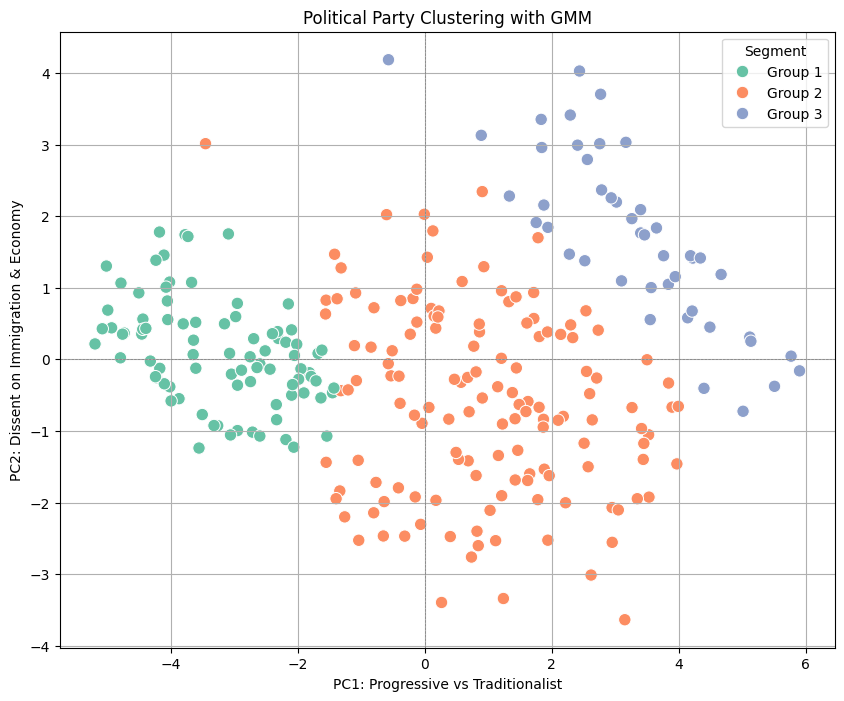

In [17]:
cluster_labels_named = {
    0: "Group 1",
    1: "Group 2",
    2: "Group 3"
}

# adding labels
df_plot["cluster_label"] = df_plot["cluster"].map(cluster_labels_named)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_dim_data[:, 0],
    y=reduced_dim_data[:, 1],
    hue=df_plot["cluster_label"],
    palette="Set2",
    s=80
)

plt.xlabel("PC1: Progressive vs Traditionalist")
plt.ylabel("PC2: Dissent on Immigration & Economy")
plt.title("Political Party Clustering with GMM")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend(title="Segment")
plt.show()
